# <center> Owen Tower</center>
# <center> Computational Physics - S21</center>
# <center> Counting, Coastlines and Fractals</center>
# <center>   Date: May 4th, 2021 </center>

# Abstract

Fractals can be seen as objects that when observed at different scales, exhibit recursive patterns that are similar across these different scales/magnifications. Fractals are present in many places in nature, in places such as the growth patterns of certain ferns, sea-shells, and even in coastlines. In fact, it is the fractal nature of coastlines that solves the "coastline paradox", which suggests that the length of a coastline will tends towards infinity as you continually decrease your measuring apparutus. 


In this project, we calculate the fractal dimensions of different coastlines using the box counting method. The images that were used were found on google images and were saved locally. From there, a converter was used to change these images to grayscale. This was done in order to make it easier to identify the borders in each of these images. From there, it was straightforward to calculate the fractal dimensions of each of these coastlines. Once this was done, exploration into how different geographic conditions, i.e. less smooth coastlines, affect its dimensional value. Our results show that the box-counting method is in for the most part with values found in past calculations, and that unique georgraphic properties also affet the fractal dimensions of shapes as well.



# Introduction

Fractals have been observed in many areas of mathematics and nature, whether it be in Sierpenski curves or Romanesco Brocolli. The fact that fractal dimensions can be used to describe the coastlines of countries is the reason that we can quantify the length of coastlines at all, and prevents them from being infinite in nature. The goal of this project is to calculate the fractal dimensions of coastlines and to explore how certain georgraphic patterns can alter these dimensions in non-trivial ways. 

This notebook will be broken into the following sections:
 
1. Examples of fractals
2. Using the coastline pictures as Base64 encoding
3. Finding the fractal dimensions of various coastlines
4. Exploring how geographic patterns impact fractal dimensions
5. Conclusions/Future Work

In [152]:
# Here are some of the packages we'll need
import numpy as np
import matplotlib.pyplot as plt
import base64 # picture stuff
import codecs
import matplotlib.patches as patches
from matplotlib.pyplot import imread
import cv2 #Used for converting the coastline images to grayscale
from scipy import misc
%matplotlib inline   

## 1. The Mandelbrot fractal

To get an idea of what fractals are/what they look like, we consider the Mandelbrot set:

$$
z_{0} = 0
$$
$$
z_{n+1} = z_{n}^{2} + c 
$$

This set is basically the set of all complex numbers where the equation for $z_{n+1}$ doesn't diverge when $z_{0}=0$. Below we will calculate the whole set, and will subsequently plot it to observe how fractals typically behave.



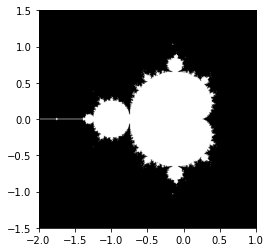

In [153]:
def mandelbrot(N_max, threshold, n_x, n_y):
    '''
    Takes in max # of iterations, a small threshold, and
    number of x & y points
    
    Returns:
    Set of complex values 
    '''
       
    # step 1,make a grid of complex values
    x = np.linspace(-2, 1, n_x)
    y = np.linspace(-1.5, 1.5, n_y)

    # here's the grid
    c = x[:,np.newaxis] + 1j*y[np.newaxis,:]
    z = c

    
    # for lots of the grid there's overflows, get this to not
    # show up
    with np.warnings.catch_warnings():
        np.warnings.simplefilter("ignore")
        for j in range(N_max):
            z = z**2 + c # here's the value of z_n+1
        mandelbrot_set = (abs(z) < threshold) # check convergence

    return mandelbrot_set

mandelbrot_set = mandelbrot(50, 50., 601, 401)

plt.imshow(mandelbrot_set.T, extent=[-2, 1, -1.5, 1.5])
plt.gray()
plt.show()

This structure behaves the same whether we zoom in and magnify the image, or zoom out and get a distance view of the image. This geometric pattern is in a sense what defines fractals in general, and thus, we can view coastlines in the sense of fractals and can calculate their dimensions.

### Box Counting

The following formula can be used to find the fractal dimension of a coastline/object:


$$ d_{f} = -\lim_{r\to 0} \frac{\log(N(r))}{\log(r)}
$$

Where $N(r)$ is the amount of boxes that contain an edge, where $r$ is the length of each box that is used. Through some manipulation of this equation, the fractal dimension can be shown to be the slope of the line between $\log(N(r))$ and $\log(r)$. Through varying the box size and counting how many boxes contained an edge, we can establish an accurate estimate for the fractal dimension of an object.

This is the process that we used in our calculations. The next section will get into the image processing needed before we were able to find these values.

   ## 2. Loading in coastline pictures via Base64 encoding



A lot of the pictures on google images for coastlines didn't have the borders defined in such a way that made it easy to pick out the borders. Because of this, I downloaded some pictures off of google images and included them in the figures folder here in the repository. From here, I obtained the Base64 encoding of the image using the following converter: [https://www.base64-image.de/](http://) . After I got the encoding, I just pasted the coding into the notebook and went from there. I have included the encoding for four countries: Great Britain, Australia, Singapore and Norway.

After that, I used the codecs package to decode the Base64 encoding to make the image completely grayscale by using the cv2 package as well. This was done because it was very tough to get images that had well defined borders right from google images, this was just the easiest way to convert the whole thing to grayscale.

In [154]:
singapore = b'iVBORw0KGgoAAAANSUhEUgAAAcwAAAFZCAIAAACaEoghAAAAGXRFWHRTb2Z0d2FyZQBBZG9iZSBJbWFnZVJlYWR5ccllPAAAdgVJREFUeNrsnfd7VEey/mUbA8o5o5wjyhICBBhEzmDjuOt7N9y/Yv+Rvbv7eH1tY4IxIhlMRiAkJEACBZRzQDkLsO/u93NVy/nOKoxG0mg0M+r6YZ6ZM2fOnNPd9dZb1dXV77x+/dpGiRIlSpQsjbyrmkCJEiVKFMgqUaJEiQJZJUqUKFGiQFaJEiVKFMgqUaJEiQJZJUqUKFGiQFaJEiVKFMgqUaJEiQJZJUqUKFGiQFaJEiVKFMgqUaJEiQJZJUqUKFGiQFaJEiVKFMgqUaJEiQJZJUqUKFGiQFaJEiVKFMgqUaJEiQJZJUqUKFGiQFaJEiVKFMgqUaJEiRIFskqUKFGiQFaJEiVKFMgqUaJEiRIFskqUKFGiQFaJEiVKFMgqUaJEiRIFskqUKFGiQFaJEiVKFMgqUaJEiRIFskqUKFGiQFaJEiVKFMgqUaJEiRIFskqUKFGiQFaJEiVKFMgqUaJEiRIFskqUKFGiQFaJEiVKlCiQVaJEiRIFskqUKFGiQFaJEiVKlCiQVaJEiRIFskqUKFGiQFaJEiVKlCiQVaJEiRIFskqUKFGiQFaJkoXJO++88+677/KqmkLJSpZVqgmULBJGpyPpP/7xD3kdHR1dvXq1nZ0dH3/99Vc5rkSJAlklSuYaN6tWga3g5tDQUF9fX3t7OwDq5eX1yy+/jIyMdHV1/e///u+bN28GBgZAWG9v7+Dg4KioqPfff5/jGkDz+s9//lM1phIr5yKvX79WraDEcOrK63vvvdfT09PY2PjixQtgFLoqFBXY/eekvDMpciZfAay8+vr6njhxwsnJScNZBNgFl1XDKlFMVomS/0NMedPS0nL27Fmw9b1JASj1/EqQ19XVNSIigpOFuq5evfrRo0cVFRXbt28PCAjgiIJaJYrJKlnRApIODw9fv359cFIYNhrm6hfQ09PT8+DBg7wBah0cHMDZkZGRr776iuusWbMmMjJyw4YNfn5+/zspqqmVKCarZGUJVHTVqlXw1gsXLtTV1YG2HDEQYQFNd3f3jz/++O7du48fP/bx8QkJCdmzZw80dmhoaO3atQAufJbLxsXFpaenA8fvvPOOhBdUyytRIKvE+gW//s2bN4WFhUVFRdBPW1vbef0crISo1tbWgqT8tqurC5zt7+8vLS2VIAOQyl9wWkFBAax269atnZ2dzpOishGUqHCBEqs2v5P5Ay9evAD+Wltb+Wgge50xYsDPwVNA08XFBTAFbXWvxnGg9ve//31JScmDBw+cnJxiY2O3bNmim42gRIliskqsR0C3gYEB2OuTJ09AQGBxkVfTIg+Dg4NcEMzVPQHSmpaWxpunT59y8sTEBMgO4T148CD8F5xVmV5KFMgqsRKRCGxDQ0NeXt7Q0BDwumACO9v1Ed0jACj/sn79+vv374+Pjwugg63V1dXNzc3BwcHALvegKK0SFS5QYg0E9tWrV7DXhw8f8mYK31xScXd3hzvrBmEBX6CWVw8Pj3379rm5ub1580b1kRIFskoscxy88w4I29HRcenSpc7OTkkhMOUNQFRnW54Ltvr4+Bw+fJhXNRumRIGsEssTGCuEsbi4GId9YmJC/+KCZZFffvnF3t4+KysrNTV1zZo1KqNWiQJZJZaEsOPj47du3ZJJJxMT2HlRXWisv79/ZGRkVFSUp6cnH1X3KVEgq8R8RVtlcO7cuYaGhrVr15r5DUO3gVpGbEBAwBdffLF69WrFZ5UokFVipiKZUi9evHj06FF3dzeAZe4jdbKsoqAqHBacPX78+Jo1a1SIVokC2RXcuJO48N5778l0jXjiUqdq2Qlsc3Pz5cuXe3p6uD1TZhEsmMM6ODiEhYU9ffpUUsqwEJs2bcrNzVUpB0rMXFSerJHxC2AVFABVwdbe3t6+vj5/f39HR8exsTGIGIiGY256/sWNyQTX6OhoY2PjgwcPuLdFrjIwpdB0np6e0rZipQYHB9UiBSUKZFdMO04uGx0fH4dhdXV1dXR0DAwMDA8PDw0N8ZqcnBwbG3vhwgXOSU9Pz8jIkAR7k9X3kyUAz549Ky0tHRkZAfe5YfMPEegKFgvjRKPRwrxu3749NTVVNyYr5k3NhilRIGuFAlrhd9+7d6+zs/PVpKD82tYswJmdnV1ZWRmvQG1/f/9f/vKXDRs2cNrGjRsBhaWmYxKmuHjxIvdgM1kW1oIIrC7Iuri4JCUl1dTUSC6XzWQKLc1La/NQxcXFuAu0sAogKFEga20I297efvbsWairpECtmhTtBPQf5ggLc3BwgEvyPiwsrLq6uq6ujiOgBnx26XBWNim4evUqHJZbtdxtDWXDBZyAzMxMGhNfoaSk5OXLl76+vjt27KCRg4KC8vLywOLExESFs0oUyFqDyL4Azc3N58+fHx4eni0FinMaGho0vIOOAbIPHjwAiC9fvsyvoqOjlw4UwH3+C5Zn/hla+k0F6NnY2DgxMYF94uPY2Njr168xaW1tbaGhoTExMT4+Prm5uSdPnvzHP/6RkJCgsruUmImoLcEXTmAHBweBV7R6dHRU/yop4bag7atXr0AEOzs73vARsIB8QW+XiGPypz09PYCsZYVfZ7NV9+/f7+/vp7WHhoakOqLUY8SToPVwCPwn5cqVK9g849a1UaJEgaxp+f+qVfX19d988w0+OG6sgfrMmVFRUbpBQ9nwFT4rq62MiAtSDJvXmzdvCuOz9DYXI0SzywSXZpN439TUhNHi/Zo1a+CzcFiw2AoeWYkC2ZXLYVtaWk6dOjUyMoIPbiADBVjj4uKAgIcPH+LqangqewuCs1BafGGjQINcpKysrKGhAfSx3DjsdJydboc40t3dLfkSNpNVDjAqNCZHrIC/K7EGTqaaYF4ipaquX78+vfK0HoGu8sPAwMBbt27Z29vDvHSBT5IQiouLeX/gwIFFptByZVAblCkvL7ezs5OJOCvuEVB1w4YN/v7+/5iUzMxMTCCwe+XKlSNHjtACKjirRDFZS+Kww8PDP/74IzhrIHKh9qCep6fnli1b2tvb4ZUwrCmbr0gkwcnJKTg4WDfNAHzkH0HneVFRzq+qqqqoqIBlgy/WvdU23D8+Pn79+vVYLxpWmvqjjz6iMWtra3/66SfJSVBDV4lishbgqAJe6O2NGzcGBgYMzDMFYQMCAlxcXEJDQyGqzc3Ns/1Q6kslJiZqufQg7Pj4OGjOT/z8/HidnumlxRaEvcp7cLygoEBA3IrxheelQWJjY7Oyss6cOUND4R98+umnmCVwNjk5OT8/v6ampq2tLSgoyLotjRIFslaCsI8ePbp+/Tq6PS/vGy7p4OBw6dIl9FwPNAOXo6Oj8DIwQuCSf3n48OH9+/chpD4+PmlpaUCweMSyzEEWmPGR89+8eSPpDY6Ojq9fv+a41U/78NTZ2dkhISGXL1/u7+/nwVtbWzGBubm5NB1+Q2dnZ1lZWX19Pf6BGsNKFMiaNcKitHfu3Ll37958d2wF6VD1mJgYEFB/pBXIsLOz0xBWxNnZWf4RmpaXlwcpAzs4B7zu7u4uKirq7e0FxLmylETgTVRUVE9PD2TWukGWVsL2YJN++OEHjIoYGGyYxLX37dvHCbt27eKIq6urKtOlZJkxRFXh0iOy3ODWrVv4ngtIZZVdqry9vRsbG/WjHijp7u5++PBhXF2ZqJEU16+//vrXX3+VaICsK+WC3BL4W1paCohMuSVZzmvdM11a29IgUjJiysEjR47Ex8fLWlu1h4ISBbJmHSKAM4KwcMb5zj5NAT5D+C8dERQU9Nlnn9m8rTIFrN+8eRMGDbBql+IrmRBTlVD0xGc+//xzDJKCVyXmICq74N9QVWbzeZX1mmfOnHn48OFiEFbosEGBm1WrxsbGgHXtv8CI1NTUdevWafM2UvuVe1MzOXpae2BgoKCgQCUVKDETUTHZfwEcr1VVVS9fvgwLC+vs7OQ9r1Jez5ToUFZWlpWVJWFEQNbZ2fno0aPffPPN6OioLlgrBNFHHN59VxaA6W9tmTxU298qUSC7tNoo8Nrd3X337t0XL16gb4WFhUIn+cqU+7ai7eHh4XFxcbpOLnfi7u6ekZFx/fp1tRjfwHABjRYRETFbEFx6fGBSaHNfX19HR0dpf9V6lqKzekyjnCAxOqkjuuyV3VcuyMourTU1NcHBwfDW0tJSBwcHmWJaluWYDI7+/v729vaoqCjdAcRwSUhIKC4uhsyq9fhztiGIGR8fTxtOj6iI+uGs5OfnS7kD+prz/f39c3JyvL29l7TmpBKj6GxbWxs6sn79elzM6XaRLh4bG0NZOjo66FapiikbgiyjEV1ZICvZAvJ+ZGQkLy+vurra09PTycnJ3t5efPDl8sQZH11dXQ0NDTExMVOoGffGiKmoqFCL8fWI7GUr9bynwyVOCaiK+uGpDA8P81EoLYa2srKytbV1w4YNaWlpMtu5jE+hu65EyXQdmZiYuHz5Ml324YcforaSTiP546LdaPTt27fBVuwo7+3s7JydnUFbPz+/5Uo1WUEgSwdAFQsKCgICAhjHkmcKfsEQAdxld8YlVTYpKclmMq9AFyaU4hkimqZN9xA5WF9ff/369e7ubmBUd1UIestH8Pfnn39GJ3fs2CEzjcvS4MK5ZCiqYPFsvWxrawtR/f777wFZOo7+2rx5s5QehaNgR1Fq8fkGBgb6+vqam5tra2uTk5MzMjIAXNO37QpK4UK7zp079/TpU5RKhrJZRTnpdUD2448/RtWxwwkJCdywxC4YOj/88IMkzCo1m1FgKC4uLkBkZGTkFCoqtdK/+uqrlpYWWljPRd68eUPLb9q0CW0E70y5vYJksJSUlOCvrJsUfBdJ3ZNFfSu8fyX5p7Gx8cKFCzIJLEApGuHl5eXg4IAFFbY0Xa9lV1MQNiIiIjw8nOalbU027blSQBaoQg//8pe/9PT0mG2uvsy2SWARtJVwEhTs7Nmz3LwKyOoRhjF05oMPPpiCjNJoNOOTJ0+uXLli83biS4+pQ/ECAwM3bNgQFRVlGgcT+MCOQrhgACCIUG8Qwd3dfefOnW5ubgIHKwFqhVhMiZ+KXjx//vzq1auyq9uUX0njSMaI/s7FAHMaDUur0svr168HbZc6QLQiwgU0fWVlZU1NDQ6F2SIso0QMHvAaHBwsIQI0/P79+xxX0dg5Y0Genp6ipaJyshhsYmICFUKRUlJSUC1wFr6jZ/GeLPTAsEnaclhYGGC3dNEDIbDckraDkRbK4KN4uzi/uDXcv0bQrHWCTmowwUn9/PxEIyT+w/uioqJr165JnviMYRYDcUCat7+/H7L14sWLsrKyQ4cO+fr6Lu0+e1bPZOkYsBUOi76Z7T5XAgoxMTH4Mng0MrzQ9sePH4MLpswks1CRuEpISEhaWhrOIOrU2tpaUFAASMF9nJyc6HqYS2hoKHqFV66H9YDRuJ/Aa35+voeHR1ZWFnyH3jEu3xEj+vDhw5aWlqFJmTF4JbUpuFWAwNXVlafgTWxsLEcsN2IrdTam3D8Hnz17duHCBYyllKPr7e2lzQFcjFBjYyPvje7McU28xuzsbIbN9FtSIDuPQEFVVRUetzlDFb2LRY2Li7OZjAzKbQMT3333nQoUGI6z6Ay9DJLC+27dutXR0SGk9R9vBZz6/PPPYTEwRwGv6RcB7ABWPHeYrPwK1P7ggw9wLwyMHghN1s+M5K6w/V1dXRBt/V0sPo0EZ5Hk5OS9e/fO+RdmS3qam5uhqzgWWmNK3Pzrr79ua2uTeKt2UAKvi1x1qUcksTo1NXXXrl1S7ML4j/ynP/3J6pks5KWpqclsQZZhBEPZvn27Nry4VTyac+fO6W5Uo2ROaJO2gvjgCUp1LlnWxat4mrQnsIvPiMdQXV1tMy1jj/ZPSkp6+fIl2CfxcfGEsNOjo6M+Pj56tlqQfdUkvUFuRj8z4vrAN4iDWdWPILqPILmi3ENkZOQCEGHZ507plDt37sDc8RV07QTHcTvg9ZJdJ/Xn5JF1t3Qzukj2NISGW4qOjp6z1xTIzgyyDP329vaJiQnznJ0HDuhdbRdrbpjRdvr0aV5VoGDBUDtjX2PMGAxPnjzZt28ffmJDQ4Mun4XRoPlOTk7Pnz/XbXnBTfQfqBWHXVcP5Y+koAQ/BIuLi4vz8/O5AqCsR2O5JswahK2pqZlXR/NfjA2JF8+Z3id8UIMt2TZJmsj0RFhu4OHDh3V1db29vV5eXvSC0HO+Gh4epimWhVXQJvg94+Pjfn5+OBbGxVkrB1mG48jICJyFVoMbmiHIomP4TYcOHdKKyaJvJSUlqKvZRpAtAmr1jIdXr17RyBs2bAAEwVnorQTBUfjY2NhHjx4JME25IHrID0GH0NBQSbcUpix10fj2/v37P/30EyQadQUvMJz6QVacGLSaVxCcvxArO+colWQDRjX/wj0DCjIvKnciPFruTRJvuT6gDH49e/assLCQR+B8e3t7BpjEprVH0JijHDcuHIsxu337Nk3EHdJKPAJNSgtoCcKVlZVaYpbpcRYqVl5e7uHhAfobMW5g5TFZhhoN9/e//32+OxqYDGHpzsOHD8uaTmFhvDlz5kxTU9NKKAtrehG8oJGzs7N37NgxODj4+PHjzs5OoDY8PBwAki1/ZguSAgrbt2/fvHkzjhEYUV9fL8uduezLly+14r+8Hj16NCIigj+SpfSz4ZSQu5MnT/JzNzc3cNPADYYlIYlbDQ4OBhcSExM9PT25Kzs7O26Dp2DwNzc3g2h8BGTRdA2F+XlUVBTOE8+LMYAU8y3UkjMHBga4MtdhZPKRZuEpYNyLnPfT9vcERrUMCv6Ih01KSkIFxBp9++23EjFYruEhRYrpu8jISGMlSls5yErJbdy36dxkiUTGypxTVQw4hhe8af/+/aIVMhBxWK5cuQLpUDlbSw21qBDtv2vXLicnJ5k0A+BwIHp6esA7sEaSwKYHbT///HMo6qlTp2DBuuFC3QrinIaD8tvf/ha8ALxcXFwkU3u2UQpScz9gJYh/4cIFYMhAr1myShEQln/EZmCwUerGxkauIDAhxntKdXOtEWQfZVCV+xTaq/nvEssCjg8ePOjg4LCY5f80Tnd399/+9rfpTco9AGrx8fG8LygouH79uoF76C0dzuIf/OY3v8FfMUrFA2sOF0g1EElBN80EPVqE7ybLNPX8oyRUZ2Zm7t69m5MZ1gz0n3/+GX8TewCrUqFYE8QTZHjARqFpUMjLly/T/uBsUFAQXJWuBPiELUpSAfpGx4WEhGzZsoXOwq+UXSo00cUO3gNPMTExWFAcKf4FqJqyvZAu5DEMZDUa5wBGYm61Gu36H4S/ZsCAktBVBp5YCIkja47/9OiHHJFZ+/7+ftkXTqbXtLLFkjXMtzysv7//Yvby4YJcBOI83Xhwn/wFbcU5GLyKiorlXdwoe5jSC5Iqt/hQySrrViQDg1zGMoAQluPHj8vOibhp04Oq4nOtX79eqnHzE3qRm3zw4AEURrRCRQlMJrLH+9mzZwFWvFQQZGRkBEcbLzsnJ2fTpk10EPr2alKGhobgiSAsWAZezMm2JHIKimVkZGDpb9y4gVMsB2dzgBBJMuPvZAP50tJS3hgyva4tJzV84kiriKTfqDMgeXCwm1ZaMGwVFRXl5+dPvzcxJDR4VVUVSoEG0Vx37txZ3rRFGqS1tbWtrS00NHTxQQNr1meJWAUEBNCFS41caI69vX1ubu6jR48YKPv374dZoLdT1AA309fXl28l85Ej2HZcJJy7BewhpsQoASX6Asdfm+SRRM7vvvsOekt/4YZjNaGZUDn8cU64evUqnTsnyIq9BD2zsrIYG3cnBT7r5eUlvT9buIlhwN9JMbbExERGFMR5ea3vbLbB8EaGq2LAptSOkLL06AuP5uHhIc+Or4BLIXHtZXxebuDmzZtoq544z0oHWWxRU1PTmTNnbAxedbcYhEUhN27cyOBAXTHFqOWnn36K78/YYhi9mRRuafPmzbJ2SPZBGBsbu3jxImRqeYNQKnQwhcrJCnoYKz6jaDv6D8L+4Q9/oO/gXHPGc6RYlNTiY3jEx8eHh4eDlX/+858TEhIwxlogfsbogURLhQNmZmbyiqPDgJGVKUuaNzrjszg6OmJsFhwr4IfZ2dkwCeiwZi1kN7YTJ05wZYkF0yAg2tOnT2nkZZ+TkKQu7OLu3bsVyM6qOVhIQcAldT0YH/AUPB0GB/4FqoUySLUB/E1tkMk9SLiAe0OBf/zxR1EbhbDmOX506zlJgS566smTJ4YYRckVGxoaggv/MimMhz179oAymN7x8fEPP/zQkPVFMg0FzkJp0XnGGJ47wwYqrQtDS8r7uHluICIiYsGOM4+JvTl+/Ditx7PjKMiyYC4LwmqXpUF4Lvx0M1mAQwuXlpbiUuANL2rSz/q8P4lV9/T0MJrnnDcwlqnnv9AodI/x9OrVK8wgHBZHz9XVFd3g4JEjR7SFQHV1dadPn5bJB7Vk1vxF5jN37dqF7QQmDHGM6Fmw48WLF/ib2kVQ2vXr12OJa2trb9y4wQUNKUGg5QCEhobiSnMdkPrBgwcQQy1JQHZkWcxY0gPTHGdIiy+/4Fkg2UgJVijTXBKcQV90gZsjd+7c6e3tNZPUGnlwDNuCg9H/ei5ryi6gk0A6yXMExRjiJghjyfQa6qctNJLccmC3pqamvr6+q6uLQYNi0Fv4jLyH4+CHYtJVENb8RbyQQ4cOBQcHX7p0iZ41vOZTe3v7unXr3NzcBEnBF4gbECPrRyU7ysBNqMShlrJBsMLY2FiQmtHOzWRlZUEzYRVccL4jSpiyYL1UYNHyfHULJvAg3HZ0dPQifT65oJ2dnayd1X1wyerF9pg4GDJn42AX/f39F7MGzHpAVpINT548Cbox2uAL0zNXlg5ntT8SzMUaS8RAdmPEXHd2dqIGMBHXSQFhwV9Vl8D8OSyyb9++hISE8vJyeJbhsR3J4kJL8Tf/+VYYD3FxccAuOItDw8XhpzbzWVLV0NDAwAanGF2VlZW8wZnFZ9ItYm0ggvDq4ODAG2dn54yMDMnWkuMybQAN54SUlJTk5GQfHx/GrbEibDPuXgHCSsmIZe93yT5Gc/E20tPTF7kQw3rCBXQSKAa60TRwRt3McNN7GVMmRjRXbmBgQDgCbggHzW13BiW6agZEwhlzcnJkTyCb+WRHiYDI4CBDcefOnbKyS3AQcuTn5/ff//3fN2/eZCRISa05uZJM8V+7do17+4//+A9YMPCKqeagBKl0b0//ohgpDI/hj4yMBF45GY+Yy8KOZQE6b7Kzs+EEHJTBLOs1lrTBl72omFQilpgenY51gcMu/qmth8k2NTUVFhZKXU5zC3QK3MNn6TlZrcjwxXPEbkNpFc6aIYFlCMl6PDxxMYe3bt0CfebbWXQ9XjBoK+FUDawfP34MnIGSJSUleGDh4eGG5L1DNkFnfLWRkRFuj5+vW7cuPj4ee4BHrw17rox5cHFx4bTZdAFuDsWOjo4ODAzkZKCEX3lOCn+RmJjo7u4u/rLQ+aUuX0ubwJRlJYKJ9VfsB39KY27YsIFmwdvgkVFP/IzFFzGwBpAVb/3HH39kNJvnalQxj/QfY1fuFsClRxnN1dXVWjxXiZl0Fph4+PDhTZs22dvbi/7j2mPCF7A4W5aWtba2wokkFVT+AuOalpYGV5IUWnDWkIgnP3dzc8NO37lzB+oKUOLFM+bB6MHBwba2NsnMBReAYJ5CUqZmfMaGhoatW7dCYBmKGoDKbwXrec9XZ8+etbOzW0z+luHhC6yCt7c3bEmYhwk8USkmy3/RFKmpqbQtHY1zAJEH7ukyGnbxD24lTJZx1tHRMduQMhPV3bZtG2rG0MGFPHfuHAM3ODiYjmRUzVlRVInJBKU6cOAAfrTk5MniWnCwt7d3YeFCCdMzPvm5JN4zGABH3HDx09euXXvv3j0sLhAzp0pzKU7j5Pv375eXl8NVcfzBQaGBUuofhwkIBixs/n25o2CohBeioqKgwFNmn6bctjBi+LLJ6n5gP8A12ly2RVhSqJX0dqxRRkbG8PDwo0ePaM++vj7ZskhYkVHKcVkJyNIZshrSPNekMo4dHBzgHdAW8PTSpUvd3d3YTDQNL5LjAwMD5mwhVhSNpYOSk5PRtDNnztTU1IBcvMKtFlOCT5bDo8MgCIZWm7UXZAHFUGZnZ2cGiSFxSX6OhQYlGxsbHz582NnZCVzyc6C2v78fb4m/0wo2CqryLzhM/NHBgwclKJybmyt1M/SrFX9kyh3pZYWCREJ4CpTCuKWdtKQ3jBB/kZ2dTbM8f/4c3kO/a6UeOIHGlJ3GVe2C/y9DQ0NmSwbpNrw5mIWvry99KYsyeXP+/PnPP/8cYoIGqm2fzUS2b98eGhqKN00fSaUSSbZb5OhCe2GsN27c4D3sVUM3yc0CGee1My6DB1L82WefFRYWck1wFmsNgYXPXrx4kW+5eQlDQWyxGVA2OC/nYNf5dykxbkiK7lLv5DojwaSpQyfF1ta2oKAApFt8lFaCy3gPtAkAum7dOvzI27dvS2n8KWFGiV1wmlGCJNYAsrDXrq4u2WHUPMkRw53RLxO4urfNuK+trQVk6XK0WgHc8gpK6O7unpWVhUpLXVeZWDfWPIxkzkI/gQ9NeyUNRsrOSjVhA82tgBFcjNcHDx74+/tLOAJDjrstxQ+hhIwuXH7tAY1VI9UE/gTPtWPHDog/VoQ7X4yRk1zgTZs2ycZiND6kh0aDmc1YGl9GwpS1EisaZGm+sbEx6KEZgiy9Sy/inaG6jHXJEdG+lXV7cXFxW7ZsoddxW1QZ2WUU1JiBhOKh2LrTQcYSAHTbtm30tazRlHKC3d3dxcXFsAT+NDIyErIpk1cGji6umZGRwa9k7b+9vf2xY8cER6SMoVRotNDQDQ+SkpLS2tpaVlZmiGqIcmlwrH2UpZWYNymMgMB7ZEue2SAFW2Us59IaQJZhhLnG8iwgw8Y0YwVOJEtZDh8+rJvAS1+i0vAOeG5mZmZNTc1y7b2hxObtDJUAnNGnIoVMaalaspMbzn5lZaVMpkNysbhRUVGgpOFhUEEiSKuEGgR2BVZM7+kvhe7wGhER8ezZM0NwQEBTjAq/dXR0lKWx0rMtLS3aAiU9i0r4oa2trVHyCqwHZGmU1ZNihmFNWfZTXl6OIqWnp4su6e4vwj1jpfH1vLy84DKdnZ2qnuxyCcqJzwFgAU+1tbVGz9aU6tq8wayWlJQAqbzhiKbwDIbq6moAJTU1dV70c0ow15ri+5JNQStJiHl6voFmV8BiVAz1AUwHBgbcJiU/P19LRTdQswDrdevW4XcqkP03bj8yMiJbLZnnHTJE8AS3bt368uXL69evSwBOvqIj5c4rKip6enpUgsFyCZ3i4uKyfft21BUVXYrrx8XF+fj4cPEzZ85ga9dMyhSTLBsy4v5zM0bZ+8QKQNbZ2TknJ6ehoUEKP6Hs4v5LWRzaMDk5OTAwsKurC3+Rg86Tgq49efKEk+erU6gkdIfrGCvMYiUgOzw8bJ71VugnRsahQ4diYmKqqqoYBBIM0sVf9E2rGKLKHi6LSMlUeFBvb+/PP/88NjaGihrRpZD4QGZmJkT1p59+wqzikM7GdgcHB+/du3f48GHTe102bzd2FBInUWPJAFve3snOzg4NDa2vr4+Pj0fTaaLu7m5UBpKbkpIC8t69e1e2gOT8jo4ObXXsAliL0TddtQaQxdbha7u6ugJV5sMEZdE3fh9GFRp79uxZPNDVq1dPv0MGMfDKuFE0dhnDTZs3b8ZPv337tiyiNS7CYmt37tzJv3zzzTda6HA24TTcmqioKAzzUs9ZaXU2/vFW4IPYG3t7e+C1pqYGJhgdHc1HqZmyXIEI/ho94n64PbmfpEnhJgsKCgBcyc1YvC8rAW6osRG3BLcGkKVxMXFDQ0PmFi6gn9auXQt6/vWvf50tWYRhjXnACBteQ0+J0UEWXon20gUAnNGdiV9++WXLli1gxJUrV/z8/Do7O/VDlcx63bp1KyAggDGzdCxSpuDKy8t5dtmEkRELK3RwcHBycgJqfX19wa/8/HzgPiIigvuRvViMCECGk1maYteuXd9++21ZWRlNxJ3IDuqSFGzEP+LZ3d3djThtaPFbgjNQGBxfffUVWGaGICVMRI/bIhq+bt06HEnFZJfLG/Xw8JD1RUbvAnQ1KysrLCzs1KlTsuk3RyYmJvSHtmSFwmeffRYcHLxEZFag/Pr168XFxaJHkpOghQvEa2Zk8iorfYBd3PPExERpLtMvVQBYnz9/npeXJ90kpX6NGySktTds2JCbm2vEZrf4ZbWMAGzvo0ePTFY9dr4sW78XI8klaN3yboO8koVmp/1HR0eNjrBiQdHYq1evwrnACGGLc3a0nNDW1garAtdsjJ0wINcHrWCF0EBZB6VtHq5tDM57uAtn2tnZhYaGAqkPHz7EZ29tbR0bG+NBZIcnU7qGuALAX1NTk8SLja4y/EVycjIU3ohs/V0r0BApqWm5CCU1mRTCLrtLtPh+nE5jw8PD29vbOzo65rt4jDNx4c+cOfPzzz8DzcbdzBiEAiUFQPVfVnYbAVVly3oHBwcwrra2FrPxP//zPxycc09Jo4MgnoGXl9fSkWgpvWbMoWXRiiErpgoKCkzc00thKhTMWaj8OinCTwEgqQkgJah5ExISUldXtzAEl8mcwsLCv/3tb4xzSVoyCsKCm69fv961a5e/v/+c98YJ6BcPKLuNyEf4L29u3Ljx7NkzU2oftwGtPnbsmLOzs3FDw1L4HNfB1dXVuHFwC47JMla4ecZff3+/pYOsEgsVtBF3HmyFseJQl5SUMBQ7OzulQGJ8fDxKe//+/UUGImSuiesDi7rbuy7AkKM1VVVVd+7cgcZGR0dzk42NjQY6gtM3W5QtJn//+9/D/kw5Gybs6sKFC4tfhi5ZE7LlO/2VkJAAfCuQ/Zd15c7Pnz/f1NSk5ouULFech9cvv/wS4ENRZZ8LKX8FJxoZGent7a2urjZWsT6u6ePjs2fPHqk0ZLi/LFXDJXbR0NCA1oyNjUkmv81kpvZi7grEB/ozMzNNWSFBAsenTp2ieWfLODbEQNImPD6tir0BXh0dHZcid8IiQVaa+PLly48fP15wEytRYhQfMyoq6uDBg5cuXcJxlski8aalColxy05LDi9YmZqaKjswGgIK4Gl5efnw8DBa8+DBgynLYRbfAg4ODlgaXk1JZiXo8dNPP8HE50uzpMauJLADrwEBAXTZ0q25sNTsApoVf2FgYEDRWCXLa+/xu2XfLcl5ktwm0VijF/aX+OnLly8rKyv7+vqk1BauurbMVAuwSoaARHX51tvb+8WLF3fv3rWZ/3aQc97S6Ogo9xAcHGxKkOXZ+VPsDbYNEm1g1Jt+wfi5ubllZWXt3r0b9uri4qK76c6S2AMLHdk061Lk3ChRMi89F/2EJE7ZFn5JB7/UQno2KfBHIH7Tpk24dDA7GDTQs3btWu6Kj11dXdwbyJKRkZGeng4vWQocBOgrKiqSk5OXdOnEdAEu+ce0tLT79+9PjxdPp66c4OnpiRMQHx9vZ2dnsuq6FgmydGpdXV1nZ6ea71KyLNgqtBENx8yHhITAp+bU86WAWpvJQG1VVZWXl1dtbW1PTw93ZTspIMjIyAjfSs14KbQou2YthVsJua6urp5v8TCjBCvgpLSArKydkbpyDtQ1MDAwIiIiKCgII2TiGruWB7L0aG9v7+3bt8225pYSaxWpcuDu7i4Ax8fMzEw+St2fZcnDQwuA1JKSEimJwC2NjY1pdaqE8wIr4+PjNTU1S6cy/F1TU1NKSsqyOLXT13cIdeV5vb29ExIS4uLiZHuIZSlhbpEgy5DCcqopLyWmV2m0FMKobfuKjwyHZTQCtbhWkkZq+hvjZuR/tV0AdL+KjY3t7+/XdtNZopYB2aXkvImLyEh9JQ1kZSYQ6iq7hEFdAYrl3R5ilcWNcjpywZszK1GyeDIrYU2JGLS3t6PJO3bsgCcODQ2Vl5cPDg6aHmf1kGhZOSbbBS4hjqxahaWhNfDKTZzLJaFViYTw3tXVNT09PTExURZucXzZd9+xmBQusZBSIeLChQtqykuJOYiE/HJycvCucJZBGTOspobWmABoaAoPD49PP/3UlAsTBBaePXtWVVU1NjYWExOTlJTk7Oy87DVwLRJkaco1a9Y0NTVJKrUCWSXmIIAXWi16bpR6pkukO6aJF09MTOzfvx8iaeICXVgRWdwsaRWmr8RoDeECGvHFixf19fWYBMlTUeqtZNkFHAkJCUlISDh37pzu/phm6AWaTE8fP37s4OAAiwwLC8PqmCY+K7te8nfmuS+vBTBZhm9ZWVl+fj7wKjFspd5KzIEewlu3bt365MmTvr4+NUmg4Z2Xl1d0dHRGRsb7779vTVs6WjOTZSh3dHT09vba2dnJtpSq25Qsu0DWgJKKigpGpsrX1gwPDvu+ffsCAgJkdzubt7URlnHrmuVHMDO/P5k9lJ2TbVRJQCXmIbKtHN5xe3u7QlhNQNLAwEAQVouKwpBaW1sbGhpWck16cwdZRnB1dXVtba0aykrMyvb7+vrW19erCdh/84snc9ry8/NlI26MUFNT09///veTJ0/OtiJLhQuWP1Dw+vXrwsJCFdlRYlZOsa2tLZAhUKIaRNf2vHnz5vbt2yUlJe7u7g4ODj09PRynuaROjTYVJgnvK0SvzXriS0rz5uXlqXQCJeYj4EhcXBxj8unTp8rBmlG0ulayV5jsNbthw4aYmBiUWhYIuLi4yIYL5pZxtYJAVrah/frrr1U9QyXmw2ERPz8/qFlzc7P5pLtbCuzCbaXSLiDr4+MTHx8fGBgI5+VbK84aMl+QxeLl5+ffvHkTG6jGqBIzAdmQkBBsf3t7u3nujmz+UCsrI6QKBB+BXaA2JSXF09PTWlmtmYLsqlWr+vv7obEMaFVtS4k5CPrv6+uLh9vU1KSiBEaEXYgtnkFycvKGDRtkN1wFsiaisdeuXSssLFTRWCXmQ2Nl+aaahl0iqPXw8Pjggw+io6NtrCuv1hxBlqHc1dUFjZWKkGoIKjEfnFUhgqUTCcsmJCRkZGS4ubnJFJkCWeOLzEWeOXOmvr5eOWVKlKw0MybUytfXNzc3NyAgAJy1dEprXiArFSGvXLny7Nmzxe+orkSJEksMHUgWLWi7c+fOzMxMrYavAtnFiuxBdP78+ZqaGhWKVaJkZSLsqlWr9u/f7+rq+uTJk8ePH4eFhe3bt8/FxcVyJ8TMCGShrgUFBdeuXVP7yihRsjIFJIW9ZmVlSfi7oaHh/v37vNm8eXNwcLCFhg7MZVktNHZiYqKsrExFCZQoWZny66+/gqSpqanavgZ8DA0N7enpgX51dnampKQAFBaHs+Yyd0/bDQwMDA0NqXQCJUpWpoCeIOz777+vLaWTDRDd3d337t373nvvQWwtER+Wn8nSalI8ory8/PXr1yoaq0TJyhRtr1/cWd3VX1ImMT09/ZdffrHEGbBljsmuWrVqYmKit7fX2dn522+/HRwcVGUKlChZsUwWePXz8wufFFdXV7PaD9EiQVa2Eb5w4UJPT09wcHB7e7taS6NEyYoVjajCWx0dHZOSktLS0mxtbS0dFpY5wHH37t2Ojg7Qtrm5WSGsEiUrmcbm5ORs3boVAsvH0dHRmzdv3r592wpKfS/bA0g6QV9fn6QTqCiBEiUrmcN6eHikpqY6ODikpKRUVVWVlZXh4MbGxlrB0y1buEA27/rqq69oSrV8VomSlcxhYVre3t6wLj8/v+3bt69duxYmOzAwwEcrKH64ahlbds2aNfHx8Q8fPrR5O4GoBpwSJSuQxsbExBw+fLi/vx9glYpc4Ky/v791VPJetbyNm52djQXLy8uz7mEk+SiSnrJq1SopgaEygpUosZmMHEpYwMnJycXFRfatQaxm44lVy96+7e3tY2NjVpweiy2JiorCVtva2hYWFtbV1QUEBAwODr5+/VrhrJIVLkAq2Cqk9R+TYn3PuJwg+/777z99+rSgoMCKl9IyaOzs7LZs2QJh5+O6desaGxsDAwNB2CtXrvBexaOVrGQBWxMTE+3t7a1vQ4T/TyWX8b/feeedlpYWiJ4VR2PhqoyeGzduQGCfPHkyOjoKpV27dq2bm9v69eutePM4JUoMoSDOzs5JSUnWvWHtMocLHBwcrH4kYUIaJwW0DQsLO3z4MOy1sLDwn//8Z1RUVFNTkwoaKFmZgkZs2rTJossYmjXIAj1w2Obm5pWQISsJ1bLm4vz589BYQJaPKSkpjDC157mSlRkoCAoKSk9Pt3p/btk4FBDT29vb09OzovBFajWMjo46OTlBY4eHh3mjEFbJCgwUMPIPHTpkBatmzZrJ1tbWvn79ekUVkOWpBwcHgdecnJzx8fGmpiaOvPvuuw0NDVawfFCJEkPJ3bvvjoyM5OXlJSUlRUdHr1271jr2TDQjJguggC+4zCttbl3WuZWXl/P43333XVFREWPL29vbugP/SpRMjxUkJCTw5syZM19//TUerRWTreUBWbDm4cOHOM4rcJXXe++9B4etqakJCAhwdnYGZ9esWePh4WGVGYJKlEyXf/7zn7a2tlu3bv3iiy8+/PBDPoKzpaWl70yKChcYB2X6+vo6OjpW5k4zDCl8pT179lRWVvKmrq4OOu/j49Pf36/SDJSsBJF1tI6OjjhwycnJ8fHxtbW11dXV7u7u1lGswCxAtqGhYXR0dGVuggBj9fLygswWFBSsWrUqKSnJ1dUVM64QVsnKkejoaNn3+82bN7yJjY0FdnlvlXGzZQBZWhaQXbHlYHh8LPbjx4+lggFvQFjorcoxULJg38iCtIlh7+3tHRgYqGVucf+SJ2utmGBq9iSZWy0tLStzOanUHsMnamtrA2rXrl1ro2rpKlmEAEyrV6+2oCwosBXeamdnt3ImIUzNZOFu1dXVExMTKzNWgEpIUcff/va3YGt/f39XV1dxcbF1ry1WsqSOkY+PT09Pj0VMI0t6LCC7otJpTAqyksBkofv6GrER7ty5U1VV9erVK7ykgwcPPn/+fGRkROGFkoX5Rn19fUFBQZWVlebvEkEm0tLS8OGsex3tcoYLGAQvX76Eu63kxHshsy0tLbCP3t5eGiQhIUHlySpZsGs4PDyMkQ4NDZVKrPPFaJOFGiRWJumx703Kqkl5/99l9erVVoYPq0w8IOrr62FwKzNWoIuzMowYdmVlZbt27aJB8KRUxEDJQnR41arW1tZ169bFxMTU1NQwkAz0FBl+9vb2vI6Pj5tg7MEtIiIinJycBgYGpIw9t6q9EbjnPSTXzs4uICDAapbbrjIlsuAsNDQ0qHkeTRhSUVFRbW1tK215sRKj+4jgrI+PD8MJHsNwMkTLJELKIBwdHTWBVmIMOjo6/vKXvwjjFmDV4FXj1IBsSEjIb37zG/lKhQvm18RdXV3t7e0KZLUhLsU0W1paFIdVYiz9gs8CnQaWtpKlMabBMgY56D82NoYvyxvuUItv8JVu9EBSaK2ma0wHsjTcixcv1DS6JoyzhIQEhjhMVhkeJUbB2aGhoZqaGpigu7v7nIF+SbA15diTckgi7/y76J5jykix9YCsGLGmpqaVjCaMG63UED4Rnt2mTZuam5vHx8fVci8lxoobTExMwGb8/PwMnD5axgkSzMCvbwXV0Ni31QQK/mX8TGZjGxoauru7V2xeAeMmMDDQ1tYWosFgwqHbs2cP4xt9sPp6mkpMypvefRecxXLLhnJzapydnd2yjEC0IC0tLTo6WmPc9fX1xcXFQkesqkdMxmQB2QWXQBeLZ9FNTwt0dHQAsikpKfLq6ura1tZmiBpoRFhleikxkNMw2Ly8vPQ7juKYA7K6VEB2jTUN7fD39w8ODg6dlLBJER23sm1rTQGymFbsal1d3Wxooh8+6HU3N7egoCB7e3vLbXpZiPH48eNnz55t27YtKytraGgoLy8P0mFgrACF8fb2VrR3wXZ65TQdgw2NGxkZgcwKOxFn/M2bN/IGef36tXxkXMlHXteuXevj4+Pg4LAUW8JoKQT/eCuvXr2ymVyhIGE0yeVCHbq6unD4rGblvSmcd7C1tra2t7d3xlajWfGa6de+vr7pcEPre3p6Hjt2jL45deqUpQ99WoCBxVBevXr1gwcPuru7YbWG/JZ2wM7z85cvX6pZsgWot6+vL/YMw7ZCwt8MEshsTEwMPjjv4ShAakBAAG8Ye7xH3Xjj7u7e39+P8Y6NjeVbvCuoDAhbVFQkVeIWGRAQVqQ734VwP7xycV2zx3uOAAUMck7gTqyGzJooQlpVVTUbjwA+cnNzIyIi/va3vwFAujrAUEA3Tpw4QcfTT9HR0YWFhRatJDwRozkuLg6sLC4ulgIxhmAELYAm8BM1RbYAhEV14+Pj8/PzV05mCwgFk2WA4TOFhISEh4fDEyU7akrVLnx2GkeGonBJBltycvLTp0+lDqFGQg0vqs3JIKyXlxe8GBV2cXHhr8FQydPilY9cXFYlaIjMyb/73e8kkQsDYDUbLC45yMpmPm1tbTNaRRoa6ExLSystLR0bGxPPRc4EfDGzR48edXR0lPSv58+fWzqJ4/5TU1MZWPfv38eiGLgAgTahlWhDrXGUzCtQgLYz0hhgVr/iQ1ASfXF2doa7hIaGivsoZYlm3EdLzLZuMQFOxizhY9FikrLKqLOzs+McBq2siNWDtkJgk5KSdu7cqdEILStLI1vc2PDwsPaRNxyBwGphWavplCXXWLoHh2VwcHD6+JbKqrt27eI9jevg4PD69WvsHmjCV25ubh9++CEn8G1NTc25c+d0i65qOcwW1NYMcQg7tAKExWAYTmMxM7hy169fVwi74EANjW+VMVkNkgRGPT09GVdga2ZmJpjF8Tk3KJyxWQRPQWoPDw9cqODgYK4M5sJ1mpub8cNkUdkUtJXKsOjsli1bcNekJvdsPSIzMZpnJmlbqmj3AqWhoWE2i4cXgytBT9CLx44dA4vxpm/cuNHY2HjgwAEICO3OwWvXrok51cy19O5i1Mb0pY75x8jISG4ehDUcLsXblfG6wms+LNh7aGlpwVuSpf2Wbqh0J44E5sApEBDj3d/fD2XB2eeI1ARY8F9w2f3798N45GoCfxh7Pz8/1Larq6u6urq2tpZ/lKkzOYE3iYmJ27dvd3Jy0m/VZKXZ6OjowMCAwCsXnxKlVSBr6Pju6+ubLUsJS1taWiohIRCEN/A1ugo3hx4Sojc+Pn7hwgV6QiPCfEXH7969G8JbVFS04ClIGYjGCnFKEEqC+rOdwK3yjAwsHsrwuAeWYGhoiN8yvhncMjoVpZ0XjYV24U6tW7euqqrKEptO87UlXgS7xHmXlBs4CkfQCEBKgphSdWWRf4f24XVJ6qSu6yntyTCmMTdt2oQOPnr0SNTTx8cHMwaJ1kNgp/i4/Aqwln8EBBjkCmQXArJ0w2yxMMlqunjxIiOGvtHd4QfKJpstFhYWgizazzmHvj906BAdWVJSsmCIpC+hNvAaaLKei4h9Fnyc7Rzx1LhhHmF4eLi7u1vsx5TLck5gYCDqwePMa4t5/h2eAgVmFLa2tk5MTPDguGyqoIyBrrT4K3SHkDKLewpGII8gWSgY2pSUFLiIzA5pwKdtlmUskNJdnTjbVzQmYx4fVEIHqICeX82oOICy1kEmy8+1KpCVkHllZaUer5x+onEvXbr02Wefubq6itnk/FevXj1+/FhC45picBBn5OjRo2BNXl4e9lM/jdXy8mSh9BRvKC4ujuELF54NrSRt0N3dHWTEVMBAp6uobG7sPSkbN27kI5ZZnCnop3ZlSU/ZsmULV3CblJcvX3JkzngFQxY38OOPP4b8Xr9+HZOAjvGRx6+oqDAw/WvFIiztr9XTc3BwiI6OvnHjBohgnlArCCXuv8CleNzOzs7btm1jGPCep+AEOT6dLZqYBsodavvfLKAOt9XkD8zBNf/0pz8tFX6vWgWUSN6MfpwFv4APUE/jvyAUCOI6KUCquC0g7O7du3t7e7///vuRkZE5AwVcmXOkmJtutVYBceiz+I8zeu4MGrAVyrx582aUs7S0dMZycNzVnj17duzYwR89ffo0KioKpyk8PBzzDg3nKeQnjEWoKCgsnJfjfMtXKLykEOp5BKgrEP/w4cO6ujrsCkarv7+fq3EpPqqMLj0KnJWVxWtnZydOQHZ2Nl5RS0uL2SIs44Gb3Lp1KwOeLmaccP/Y1JycHBBWylMtPhSwdB6DkuUB2bKyMkOmGmR3ReGD4p7j2WHAv/nmG6BNqqjgMn/00Ud8PHnyJLij/5qS63f8+HGG6fr16+GVU4qwyF+AhuXl5TPOgHFw3759L168uH//PlgMaDY0NAgm6p7MHyUkJMjE67Vr13hYIbC+vr5AM9rS19cnsxNgsYuLC294QB4zLS0tOTmZKwOUM3Jk3YgKjQNNkCRticCAHfv373/+/Ln4kmocz9h0mFJ6gRbDNt+5cwd7D3KZW3NJSEomIXJzc3GD6N/Y2FjeJyUlYbMlY9TKClOtKHl36YY4uAD5MnyGR3bJFh0Q4gl+xcTEAEYAJSAlbBEOO+c1Za6DVxzzGfVKPC++na06BuNedqaDjEOcYbW///3vg4KC9AT+eAOq3r179+uvv4Z4AuJYBfQE/eFx0BwA/dKlS93d3agTDBpO6jAp+kNRsk5M95Fllw44vpeX1wpxuBYyst99F3eB1v7iiy/c3d1pKwAX98gcoEpWuDJExd3GJMO1t23bJqGnTz755MCBAxjgN5OiClZYuixVTBamiWvW3t5u4GQuqAFVfPLkSUZGBgNL7DauE1/B9VASxlxJSQm80pA0JsYlA5fxKqg9vSyxpIxIRGLGpZbivnEOr8D62bNnMzMzDx48CDPlvVYVV1sRL+sFtXrD169f51eQkcOHD/MXcCh8Vdg0wA2fhZ7U19cDsqCtIOZ825afP3r0CCaOGVuZm6sbIgyViooKGhyne9OkYOfOnz8/fUwyTvQn2C9eJKdKxhUDQIYBrwwPTLiMasYVBxcW31Sy4kCW8QqIyNg1/CfPnj2D+mmTpGLD4XqpqallZWWXL18OCQkBqvSnBGiuoiQSMnwDAwOnwD0n9PT0yMVnozZSzxi6ARTy85MnT3766afgGuQXrBSdFJS0+fdlEYK2kFnMw969e7ds2QLc37t3b3R0lOPgY3Z2dkREBGRW0H823Z7tK2kfiP+RI0e4Mv+iqhnoCRzV1tampaVJgh2mF8s6Ze6Lr0JDQ+G8S7GrtswO8Xfuk+Lv7+/p6YlLpHEFCbNqqKp4qwJZgwSdR/NfvHgxL5LFyZKzlZOTo2vJpaQQZDAmJgYl4YQ5t4oTkGW8Sjxr48aNXV1dMGttul/KZ2jZuDY6qQgy7vk5KicreuV8zkQxePPxxx/rFryQKWwbnfC/gCPHgVHsAefjqAYHB6PtRUVFw8PDXDwuLg6tbmpq4gRJxpbsV03JJYYgx2drYcmhoUEUyM6GsPQ+uEbfSadI4+ueA+BKqb3W1lajxwRkIUlkZCRDF37AbYiBlHCB6iAFsosC2erqagb0fFcogTJPnjxJTk6GLWomXcp0ffjhhzjIvb29+/fvv3r1qv6Lgz5jY2NcCrxmQENXDxw4ABXVsr4kaCtfoXWCiXAcQUw8OLw2tELiv5Kc4OTkBAfhDd9qYKqLrbJ2U/ivQCSP09/fz5/yOLxPSEiACIOqElXgQeC2oD/PwmkdkyKhEn7L3+Xm5sLfZ9xOQv6L8+Foz58/xx6otNnpFJJhsGPHjg0bNmiMElO3Z8+emzdvYralGRMTE7Hc+BlGWZkitFRmFBhC/DWvbm5uknc1r/xoJVYj/4c1Rg8U8Prtt99CDRYQLgRlQMatW7dOMfWAVHNzs5+fH6ADNkGT9e8/KJO2mzdvliLZss3c999/L2VohAv/4Q9/4F+4IGrgOCmcxlcwDsFWvn358qUwXFDMy8trNqPCaTwv5/DIXEeby5KQgrOzsywZFAjWZqtkhZg8BRoItwVte3p6eDTuPCws7Mcff3z69Cn3P/1JpRICNLmmpqagoGC2EjwrVmjkXbt2paeny3JPOfL48WN8CGwS/cUoot9p8Lt3784rrjVjvFWi/3Q9qBoYGCizCJhwbb9r1SMKZI0moAxw88033xheGG2KbkAVv/zyS1mwr/sVEAYMgZWwD77661//CrLoSchnZMNS4TIAFnDJz3HYT58+LYM+ICDg2LFjWkBAFoMLDmpxA95ryCVe3mwgy12J42kzLW3QwNxGwV8hU3I+R8rLy+/fvw+hlkU1Mqsmq9fF8Bw+fBjU4MbOnDkD2qriBhrqubi4/PGPf8QwFxYWyky9VI5nfHp7e3OExuzs7KTRbN5WopovU5a5LPoFSKXrYQAMKlwQuZoVL2FSsswgi+ZfvHgRP3fBDiy3lJGRgVs3Y9xK6l7j8eF3oy0lJSX6+Swjfu/evbjqgrOoHIrh4eEBLZV1CkYJj0A/uW10zCg5VdrUn5TdbGxshG43NDTwHqNib2/v7++Peejt7YU0RUZGSvTjhx9+qK+vN7C4l9XTWE9PT0D22rVr+fn5MhQ1kyns0ubtFOV8sVUWXGHPwNbg4OCQkBAppGLzNoVAtb+Sf4NEoyMsnK6ysnIxeUX8VtIM8Lymh7EYxDh6UVFRjGzQtqioSE9tAfQKfQP0YccQDUAK+BaKLdu+GytCAsYZcW5a48KyzjIiIoLnhYjxUUrHC1jwjzZvyzIBvrDac+fOqQ3Gbd4uI0TgsyDsFIK/sNirtuw1OjoaIxcUFISdFvhWE1lK9I1Gow/ulpYWraD6gi8CZkFAZvwWQEFzwsLC7OzsQBZYqpRkng0xOQ5COTs7C3mRzYc537iunOQ/LkXoTaINAq8ODg4S25U0dakSIn/KCXx75MgR6LnyUmU5Mkw/Li5O6/rFBB8w57Qzhv/TTz89fvz4xo0bsdmy4sboY0mJYrJzIAIus9TjWQzOQhBqampqa2vxhWcshCFeOaelpKTExsZK7HJoaEiXs0hMliscOHAAMDLu4iiZs9JSrCRgqkuRhC8bUf2mX2oKpvN3tNjw8LBistJcg4ODIZOymOAVw8/b21uqrQcHBwuwquZVsmwgi82X5Kfq6upFJhWhJI8ePQoNDdVTwE04HQCalpbG/967dw8erd0J327atGnz5s26E/r6vX5tR6Mp+arTbcDIyAhcG1h3dHTMysqCere3t8Nu5Kn5FUe4B7i2JCosdahOtgQuLi627ons2Yz39OMcoY944+7uvjBTxxXoxMDAQKgr/sG86vgpUbJUICvMDtCpq6tbPJltaGiorKxMTEzUzx1kjw1/f/8PP/zw1KlT/Erqb+7Zs0dm3vUAnEyGCOWUzFmZ5dfqz08vfSAhERAWQyLeuiy7wD/lbiHyqCWvsKeKigqINvcWFRUla3yXzq/kTm7evNnW1ubg4GCt8Cr1cWQT9SlxVUbL9BqGMqnLwJivvRdXiT7FDdq/fz92VLFXJeYCsjaTwUFQJjo6Ghd+kRlF6AxklkvNWY0YHcA3BFiTkpLAdxDt4MGDaJd+3ZD1YM3NzaBkf3//6OiobJcrSxJQZjc3txMnTkiJOe2WOH769GlOtrOz0/5dwtCS5frkyRN7e3vZL+fBgwfwKZ5i/fr12dnZa9euXSJKy4NgUWDWQL9u5pnV+P70Ka1H+9OtJSUlUolNLKjs+M052h4cslhDQBYfH6zE/hkItWJcMe0bN250dnbmHxWBVbIYMX4Kl83bHINvvvlm8YX4AK99+/alpqbqh0tZHi4rqaCQISEhrq6uen4inAjOW1BQAMjKwnbdUjKyf/JHH33EpaaEGjgHr/zWrVtyndkUVbd8rdDk8PBwLqitBzO6yO4doAksu7u7e/ruDJZNB95CKl4CdvfOnTvj4+NBQUEZGRk8pqw34dk5SL/LktZNmzZxsuTDfv3113O6Vlr0affu3Qw5mXJU6wiUmCPICkm8ffv2vXv3FklmJeHxN7/5jS6dnNHr191qWEuEnPFMToD2Aq9Pnz7VNqOfApFcDS4s2bUzXgGefvXqVVkjYOCzQJPR3qysLGP5ntPn1uTeYHkwaOiepAZbTbhAuomnYzzwCs5igLGCNm9LT+gaFd3dT2mTCxculJaW6hmNEimKiYnBIYiKirLW3W2VmF6WsGg3/h1UcWxsbDF8it/KLgk4fQY62npWMYI4sjnYxYsXxbWcvgeMaGZubm5KSsoUNNTOlFKKLi4utbW1hoeeJc4bHx+/eO3lQWQ5vCxP0MVZ7o2HgjWHhoaOjo5KsTEroLRTGpne4aHAWVm9Kt4GVpMekUoUiGZ6eQOlra+vn2000pJubm579uzJycnx8PBQEVglxnTClu7SKH9YWFhXV9ciM4r4eVlZWXJyskDkgi+CAKx3795taWmREoizMRrIZmZm5pRInKQogF+C9bzn6TAkhtfMRb2Hh4dlj4PFRAz4O9CkqakJAIUd4xSvX79eN3Qo2+phBj766COaLj8/X/YTtY49FGi9yspK7DfPzhiTClvSLG1tbcXFxXZ2dq6urjBcCKmfnx8dTWsAxBjOU6dOTSnhRqPRlUFBQZJCoOBViWUwWaGf169fr6ioWFgFgykURibodQuvzJf3yUpc2YuQj7MxO67Pvxw8eFA3cirMCMXOy8tDaSW5HVUvKioCwgxf2yYplhBMSNOCp7+4ExjZuXPnsF64zFywpqYGcAFWuKzuJiXC6P39/WNjY/kIIutGii2d1Qo4MiqSkpKEvPf39z948ECecXx8vLW1leFHW9nb28u2RlBU3tfV1WnxJQ7K3msYKlBYTXApWQpZEi9SKhY+e/ZM20FgkSITvgu4lKQKQDa/++67wsJCCVnqOR/McnFxgRzpphMgz58/v3LlCtcBWGWKjBMCAwPntZ2JrOX96aefgIOFLTuWZNgbN25wKQga7YwxkE0lvv32W6yIBGG1hpKZHMxGdna2lW1qL70g1VhkxhLC3tfXJx/FU+F9Z2fn6dOnr169KpNmqampu3btkpw/joCtJ06ckNKaaiMfJRbGZKF4L1++NMrOKIx+OBowMd9t5cUrh91cvnxZFoPph2nwyN3d/cCBA9q+W7LA9/z581zEZnI7E9nKOzg4WE7gMedlSCRi0NHRER0dPb3MmCE/v3XrFtR1ynSWBGQaGxtra2tlnyhdJs57KHxTU5NuWEMmdiw6VitgCp3H2lVXV9+5c2fKHKZW2Ky5ubm3txfay5F169ZhRPED9uzZk5WVRTuoFAIlFgmypaWlOOaGR2Ol+IB4u9rMlayxAVB2797t4+NjuIstDj4O8oULF+DUsumA/p/I1MdHH33EH2mkhvsHE2GI2pJZ3sBn8THhPrwH7+a7jFU2NcDBDwkJwXs1/KHEI7527ZqEhqc/MgfHxsaqqqq6u7uxFlByKZ0Dz+URdPew4jicjiaijyw3gMCdA52wV55UMrpm7AhpGVCVE+g4Gtzf3z8hIUFKpil4VWJ5IMtAHx0dffjwoeSuznk+oxwdgNl5enrKpLlUThJPn4M7duyIiYkxPF7GFbjgs2fPYKAQT0N2gebizs7OeI5Sa0bXWkAAQVItsiwFt6BOsEX+Bc5bUVEhT2o4WnGHQAOerOCsVih2zpgJyM5fj4yMAC4z8lCpqACgALWSos9B2kHXEvCAcDopzQfKLMXGVqYbvpObsFVWVsqua/rPxOhGREQ4OjrKvkSqJqES04hxsgs0DJK9C3GHcc8NjBXIXNPhw4e1yXcnJydx4mRbAbDM8DlflIeL3L17FyotMD3nT/gvV1fXY8eOaQirVTCQbaU5OCUVgYPx8fEcDwsLA5qBPKAW/mg4peWCra2tp06d2rx5M6CJDwu9mjM3UwLBn3zyyfPnzwsKCkCNGXMGuDiXunHjRn19vYeHB2iu9YUUReRPsWSPHj1qbGwUX8FycVb/ZpS6QxQ4rqurE8Oj6mYpsSQmy/DFS5V6KDLbAMah/wYiDue/evWqpaUFPx2wk5rTAKu2V7aBjENWfKFFP/74I696UgimwBYwdPz4cf5dEJZfyVIfqUsAnMl0yhQvFSYLy4YJAs04nrIwd75xA/Hua2treeXvpFz/nDhrM7keH3bPe6g6tz3jJmBccHBwUBdhhcamp6evX7+e9/BomB0dh3nQ9mix0LiBIQ4T5oQHn1fcSYkSswBZCVzevn1bNinAcSsqKjJw6GsCKIOMkZGRMrOvu3esgQQWsLh169b169dlV0HD/x2E9fPz4+cSeEUD8/LyAL6EhITi4uKHDx9OoeSSP1RdXQ06A7VA8OnTpzESC5jlk9QFyb3lH0HM4ODgKYsLZhRxeGkuiC1ITevpiR7o/goCu3//ftnKjI/29vaxsbGQO3qQB5lSrdGcZV7ZJrJtLdYlKytLcVgllgeyqDcOPojz4MGD6klZQMkC0W2IxrySojQCi18MgYVOSlbTvHQVWgq0yZ53kugOEx8YGJBd9kDP6bNM/ClKCyxy2uPHj2ULRa01FuB6yzx4V1eXzKoZknggaZ7cJChJ44OzQ0ND+kPDspItKChIm9kTqIWMcxHwF5SXDXrNP3pgZ2cnztOc3S0bv+/du3fTpk0204rwKlFiASCr4Q7wKttrL0BFZdOk1NRUKfht4K+kTEF+fv61a9dAhwXEFrltkLSxsRFX3dnZGcC9cOGCsCSAm69mY0wSVQATx8fHNQ7LmVwE5V8Y1Er+AFAbHh5uYFqreL5Q0ejoaG4Jx3+2cgoSQd6xY8f0hFAxirRAVFQUD8VFZgxBTO+y5cJibnLjxo3x8fGMN+zclEVcukJr0DhHjx6NiIhQuQRKLBhkZcfskJAQgEmqBS7gCtCNlJQUbT+VOakf/9jZ2QmBffbsmayaXUy4o6Ghwd3d/c6dO2CcVmEWrNHzLLr7y2pPwUfZn1GwbAoMSeUaPXZI8tgSExN5OsMRQaLhWr0CCKnNv9crkGKsBw4cwAbo2aeHLgBn4fU0CNRYtwDN9KK6UihyWXBWLMHWrVvT0tICAwN5ZKB2Sk/JigNOOHjwID2r1ssqsXgmazNZrABfG0a5AJBFw3EAAVlDdsqSpVMlJSVXrlzp6+szJElrTpzFNlRVVeFxa8GBBVByWTiLbjs6OsoyTV0Y4iu8e3xzmoivtPUO8viy+Rh08tChQ7j/852ckegBGBoTE8O/QMkBSi16wF8nJyeDOPoz4eQiLi4uEj0AyDhy+PBh+DUopkVsuXP+iAeZMiVoMuGuGGz4PfB9AJS+q6io0DV4PC8GIzc3FyCW2I5SdSXLJQtP4dJW12jzVDbznOzSFEYWg9rb2xu4pgscbGlpuXbtmhRbMo610dmwy/A7l+cVd1t+KyoN+mAzwCncVcBOprYDAgIAUHguTBOeCKZzGrAuy+pdXV2hogkJCaDDghfRy/KzpKQkLvXo0aPi4mLZLwDYzcnJMRC45SIYPCjt4OAguA9kcwVZyCcUm+bSXXy8LCKjjtaOjo7mI0YXqyCDEKdq586dstuxChEosUiQBeaqq6shOGga4Ij64bWBF/OiseLQQUlgWPCs9vZ2SZwy5LdAFShmlFwcWUow39keUd1fJwXyyLODRNqqMMmygGFBaaFaY2NjYWFhIKzsjODn5wdygacg4JMnTzBXvKcdBKAXWaZEjBZX++CDDyIjI+/evVtTU5OVlTWvPVTkItBVqX2emZnJTQLZz58/l/VmEFsgGOTlzeIXT8syvykHDVzfIWs0MjIygFocKUyazONxVypEoMQcZCFFuyVO99VXXzGOZV9uRjM4Mj4+zhCXXQb0Q63AKw414LJ+/Xpvb2/UrKioKDExcc4JH+GM9+7dKygoWHxqp+ROdnR0QC3nBRbc5IEDB/g5hPGjjz7Kz89/+vTp9PKJUq8LkdwsQBYnVzigYLEYlSXa/ov/5cqNjY2QaAOD3bO1ubziQPz8889SlYKuj4iIaGtrk10YdFnwnANgShfQbjTOFMcCg83Na12sG8vGUGFlv/zyS910N93F04rAKrFsJiv7AjCOf/e730nGJe/FKeZbVA5HfvqudrrwCvmFegA3ECXJIuIV3mcIEEiW1eL3XLCZ3KoAhD148CBu+w8//ADUSgxE9FYPp8aowJXi4+N5D4FC1XkQiatO+ZWQUwQOqDXU/v37tRjLkrItgbzFT6xrpSRCQ0NPnDiRl5fX2toqKyk2b97c1dVVWloqTbdhwwYwHXNrSLF2uSs4/pYtW6QBdXu5ubn54sWLMiqErsq+MnrKVCrqqsRKQJbRXFFRgY+vLXiVqJ+QHZy1+vr66TvdC8RAQHBdYawytyNUBV/7xYsX2u7Zc96ATMgs8skxA+Dj3r17Jdv0448/ho3yRKAh94ZzzS3NxpR5TDi4oC0/4blwqHGuIdfcG0emrBAT1LB5u+zYlB1s3I2seV7QcPfu3d9++61Us7158yZWime/f/8+bbJjxw4OQm8xWoKPEmefnmVB1/v5+W3atAkbIPt32fz7NkJRUVFQ/h9//JHh4e7u/tlnnzU0NFy5csU6SuIqWTky7+wCKW4CW9m+fbuuh6sV0OIEgEbbN1Q0SoID2dnZe/bsiYmJgYRyUIoVQIpxP0NCQsLDww1xmaU2Aji+mA1ZAQI86OPHj0uhEP6XN2i1v78/BiA9PZ2D0DQ9IAtGS6UrzZMFMuC2PFpnZ6fUK5kCB/wELM7NzbXoRUe0DBYISit7C9FuOCXAK90q1B4RKyVBdrFD0sjC3yX7Ytu2bbt27fLx8ZFVdhrCarOpHKSFg4KC6OuRkRGwGO+BE/goGXvJyclWViRXiWKy/8I40Ae8kI3pZxziGrhIpWS4T0pKSlxcnLiEsns2HiVaajO5DN/b29vG4BoFMtFUUlIia5MWBhO+vr4gLICou/ZJNvGGa0tVAT3aCy7U1ta2tLTwUFgOnovrCJpAzSDITyZFN3pAiwHrIItsY2PRg4b7pwFPnDhx5swZ4HXdunXgJoAobSg2DMDleekjWpKDUjGdr+j3sLAwvBkajY+tra2PHj3ioNY1tD/ga2dnJzuY8UdwWP7o9OnTX3zxRU5ODic/fPgQW6htPKNEiVWBLGrQ3NyMksh814znwOMEtlA8lGH9+vWyaFXbY1kmfGCvHOf9vJIEuAj6iaIWFRWhZgvL05Rg6PTfSqKoFNDTr8AypwTWV1dXp6ampqWl2dvbCy64ubnt3LkTqM3Ly+vv7xdfODg4+MiRI5LAbwXjhsf09PT85JNPtKLXUzqRxwQu6Smcfbjn/v37obfCQ2HBtB4tI/v3TAnfc53BwcFDhw7JCgKppA7Ofv/9948fP+Y6QDDA/erVq2VccqZEyRKGC2wmF3F6eXnN5keDUCgPKgQKoxtgjTjOMs0Nc8FDlBqyknG5ADLCTwIDA2E0KPACFh1JmAIqykXw96dDPCf09vZCtPUzZTEVoAxncjXIF7gjNkPivFA5CR/z5ujRo9qmqtYhUjVR5velEPCUqrgSPgJPgVeeXbJraVgarby8/MKFC4wHKf77no5IflhdXZ3WO1wEaxobGxsUFCR5XZjYmpoaWlsuq9RYiTnLQlK4ZGuT6YNb1KyiouKnn36SzbL+8z//Uwp5NDU1tbW18R5PX9vcZTEiSUI9PT14kQtbYyazcPv27dP2ktFFTy4IDwULDFzsIBPlUVFRu3fv5jG1/AThtmvWrDFwTs/yBtCk+QTysHm4Jt7e3ro2j66ndwBZyamSgD7wiq2Vqpg2b1MXplhKzqcZ4a00qTa5avO20qPueyVKrJDJzsgdJLHxxx9/LCwslBOAsLi4ONTp6dOnaMX69eshIJKOs/j7FgrMX0Ah51vIVbthvE5ub8bkXElIqqysNPDKgjVQMEAB6yLPKIVLtLwCqxxAUg74/PnzpaWl1dXV7ZPS0tLCYMCoFBQU3L9/H7/H0dFR5hjpMmgpRlfz92U57JT25yDYisEGav39/aeUvlTsVYkFySpjXQitgPeBSuLBwUTw5dExX1/f7OxsdEymhoyr3jjj0yuDGA7TqL3MscxYmMrHx4dnmZiYmPP6smYMf5YnhcrppkwtLB5iWUEDOvfDDz/87rvvAFZgUVteLEkFwChf0Szp6ekYXb6iodzc3BgqnZ2dzc3NWF8Iryzl0NYayA85TSvyYIilV6LEOkFWQmmAHQoDbMkke3h4eFpaGp64TPUsRZY4SoiWLvjn3FJOTk50dLRkO0xRWpQchHV3d+eh9ICsRAkCAgI2btzIIwvgrrQxJBmvYKUUWmxraxM/QCLvAogdHR0XLlwoKSkBahMSEnwmRSwx7Qzb5VVSVmSjb4A4JCSEy9rb26slBkosWhYSk/03kJ7cslB2uBoeHsYTDAsLS01NDQwMBHmXenUjygzT/J//+R/dlZ2GiORg/va3v5Vtw3Vr+mmCeUD5b926NT0sK1RddiqEvUZFRa3wlfLSelJk58GDB7TbjCtrZQVacnIyUCvbZWrdwTjs6uqqrq5mCGVkZMg+j0JplZYqWdFMVmbqcf1sbW2BrUOHDkHrpDaSCdRDpkdw+U+dOjWv/Ui4PanJwhvU++bNm9u3b5+y7wtPAZOaEpOV5wIIIiIiwFYIlxTNWuFsSwqYSYx169at0NKff/55+rYFEvt+/PgxVpnRAmOVDAThwjgWoaGhNpPLnevr652dnR0dHbWaO0ta5EGJEjMFWVEAuKSs4IqMjARhTQw3/F1wcHBcXByqa2A1AxRbKrbI6oPy8vJHjx6h0tu2bdO9ealAiJ6Pjo4KoAMZXl5e4eHhMTEx3t7eUpdAObNaq2ocPy0tjb64dOnS9GIOUm2dtu3s7Gxvb7d5m1dQV1fX2NiI6aJTQNiOjg7ILGZv9+7dISEh4+PjVVVVgK9sZq7orZIVAbIgTn9///Xr11taWiQUq63bMbGgyeBjW1ub5GAagsvoqqT6QsNBWNgoOpyVlaVboQZth2phNoBv0BZsxYoEBQXJBlyqDrQetKWFcRTgs9euXWOQTI8baMxUl+QCu3SiDC0+Aqn0DgfpIC5C54KtRUVFH330Ed2h2l+J9YOsbNoK+5CsUnSmubkZrTA90QDy+NPMzMyLFy8agsjr1q3bt2+fBA3LysoGBgYA2aGhoZ6eHiBVd+aKK6ekpODJSmKW8FlFXQ30MGCg2dnZZ86ckSEhCxP0jcVJ0QVr2VpG9seU30qJRRUxUGJBsvC9Q2QPEqBHSyYHp8AsE1eZ0qATFx40nBPfuducnBxHR0fec8NPnz4V7QUUoORTorqCyMC3VLxGVOaQ4YJBCg0N3bx5M6br2LFjERER87JPkoH77NkzWU4muQp79uwBshXIKlkRICtzHbK4QKp8AnCArCGFRJeCzMJGfXx89Ksxag8nRfMlwFpcXAyNFQW2tbWFN03XXqloo4KACxshstHWzp07QdgjR46Eh4fPWRRCV3CMtO3l6YX09HT6aAUmySlZoSBr83Z9LWqwbdu2L7/8Esb38uXL0tLSxRQhXLBwG2lpaW5ubrNF62T1ATRWAgXAa3l5ubYcy8nJycvLS1Ekoxs/MJFOkY2Fjh8/DuYaslemJCocPnxYNn+kT729vTds2KCsnZIVx2STk5NhKBs3bgSh9k4KDvjo6Kjpyays0dq9ezd/PWPyLwdjYmIkBx49f/LkyeDgoJYh9GpSVFWnJeoaeaXZU1NTfX1955y24mRPT8/o6GgcIwFohpbKK1Cy4pgsPAX2mpiYKPtgI3ANYPf58+fLQma5jcjIyE8++SQuLm7KhisoJ2Zg8+bNoupDQ0MajbWZDP+Nj49rmKtkiQQb1t3d3dPTM+e2xFIWnRGF8yHFzgMDA9WUo5IVB7I2k1FOLUYmaxCSkpJevnwJZi0LK+RmQkJCcEu3bdsm96ZtpRUcHCxVw0HSvr4+6LbuHB1n1tXVKSa7pCITibg+tra2UmZXD9TKMjwQNj09PScnR+VsKbFQMTLflGwqZ2fnysrKtLS0ZaEeUosgOzub2yguLu7q6gJVHR0d16xZo5sIMWU9Enfe1tYm0ywqhWCpreDWrVtpcCxxfn7+jJuxy6QZ50RFRWEdZ9wzXImSlQKyoiEym8T73t5ePHEHBwco7XIBlqw7io+Pj4iI4H4kCwKl1dgQt6dFBmSlpre3N7hsY7HlnSxoQ2xuLyEhAVtIL6xevfru3bvT9zjgcTo6OsrKyqCxsxXiUqJkZTHZwcHBkZGRxsZGFANPnI/V1dVxcXHLGEdDOd9//31fX1+bt1X6bd7uGtvf3y+ZZ1BX4DUrK0v2RrXQ9CAgCW7e3t5Oy/MUNLvsjmOedyuQimNBa9PyOD3cuRSLEYMngJuYmBgdHb3IzcyVKLFskJVK1VevXgVSga1Xr17JWnXZEeDx48eRkZHLRWYlnAfue3p6CrzK7o1tbW24n6WlpRxxc3PLzMyMiYmRkrLmibAaxdPTjDQ4rX3v3j0xITU1NTt37uTpzHamSHftMmCKt8Hgee+99zB4UkOWg/SLrBNTWqpkRYMsOtDQ0ICS2NrayoJ02Y0VLWptbQV5wbhloVTcSX19PTcGkxWsAYCam5sxCf7+/lCn1NTU3bt3y4a15glGEgEQcqftsDAlFCAQzJHh4eHVk8LHFy9e0PJ79+7FnJh56AAYTU9PB1vv3r0bFhbGe7HQwsQVh1WiwgX/p/Oy8NTDwwPAevDgQVNTk4+PD6AQEhIy4zaFJiOAHR0daK+mqLITODcmOyS6urpywwKvYhjMJ7WAOwFloOHPnj3jbmlkoMfZ2ZmmhuJpzgHPItn+70+K9vO1a9cCsidPnvzggw/oGjMvD0gX8FyfffaZOEZSc1Yt61KiQPZfTh84lZubi4snR16+fOnn5ydzxxqlXZYH4wZ6enqCgoJ0SROWAJyF4drobLoF+wPLYOIwKXOIY0rqErbqp59+oj1l8l1iyk+ePOFjUlKSZFBwclFR0cDAwMGDB3XNiRB5zr927RrfArUCx2Y7Cqc0uyKwSqxJFpUnKzU7nJycpHgKKAZOCaXS9g5YXld0Oo/OyMiQ0tF2dnaCsNXV1Y2NjdgGc4AhwdO8vLzvvvuur68PTsrdSg0qhMepqKgQAzY2NsY5Dx8+rKmpGR4epuWxE7oNLhGGgoKCwsJCCeOo4a5EiYWBrI3OrL1GFe3t7WcsIWpi4cbwlKfEK8B92dGAg7x//fp1eXl5XV3dzp07JSvTHECW2+js7JQQgfYs3KqDg0NsbGx6errsrQ375s55kImJiY6ODp5Ui37oXg3khe1+9dVXra2tXNAiVlssYPAI/Vf6rMQMZSFbgusf67AnlD8gIGB5MQskcnd3nw6dwBO8r76+vru7+9GjR6DSnj17pFa/OfSHOAdeXl5NTU1wVckz40haWtq+fftAWFdXVynKc+vWrdHRUZkZA2ExHrgUvb29IyMjEoTVcip4MzAwUFlZ6e3tbeZFcHictrY2HoG+M6RHBI7pU8lDUDirZEWALHzq6dOn69atA7mWN1yA1k2/ARQSNQZkgde4uLgDBw7IztXm0yXcMw4B7j83BnryJjc3Nzk5WSbcBSIBl8DAQAgvBoPzw8PDg4KCPD09U1NTZU6Pb2G+dAc8l1/RF5IHwhHONHOcLS0tdXZ25v713KcsfuHxJfR//vx5DCpWRKV8KTG7IW1EF0/cWyhYTU1NZGTk8q5EmNmkTG6ZU1JSAqpu3Lhx586d5rkfKu0Gldu1a5fk7QMcU1qSI3DSY8eO/fnPf7a3t8/IyKDNsW2gDM3OT7q6ukBnHx8f2G5hYaFUw3n16tX169f5+YYNG8wza43nAltTUlLy8vLwMLj/GXtH2qSiouLly5e2trY8uJ2dHXZF1ehSYoUgK/EBm8ldBlpbW1HmlpYWFBu2iLabHW9/772CgoL29nbgdevWreac6z4n+oOS0L2srCxBonv37tHyL168KCoqksqNvPIVj3nkyBEg++7du/QUB2/duuXn52e21a+hpVByzAbmcMatLniK4uJinjc9PX337t2vX792c3Pz9fWFySqQVWJtICuxsOrq6rpJAWdl/gFuhZ6YWyIOd3v//n1YzwcffCA1uiwoVUjqowuxlU0oBI9ycnI4IttZSr6EmA1ZlQDRO3nyJGCEUcEENjQ0SMyhs7NTN7nNDIl8fHy8pADPaH5CQ0N5WF5lmUZCQoJ5eiRKlNgscrfasbEx3LrGxkbZZBvFRoFhT1AnSJZZESVuD5S5du3axo0bd+zYYUGricBQ4KO7u9vDw4MWluXLUDzJLZWVCK6urlJ3VfvJu29FpoOkWnZNTY1k3UIDYbL0lNnWN9BzYzwRzyu8dXx83NbWVkIfMgmmYrJKrAFkJZcTda2qqqqtrRUCpSEvJBHn1ExCfkL9RKCxOKG7du2yuBXx3Dwk9OLFi/A7HqGgoIDn0lxpcDYpKcnb2xsgptmxfLgUfX19w8PDQFVcXJyEnjkhLCysp6eHn3DOjRs3Pv30Uwut68ht8yA///wzD3j06FHZagHzI/ZGbdiuxIJBFrIwMjKCZ4q2i1s3pe51SEiIbFNoFs+2ahXcDQ2EVhcVFdnb2+/du9fiEFa2JouKioKGg7Br1qyR9ADddCU++vv7BwQEaEcmJiYkA0zm6BFHR8dPPvlkdHSUFoDzwut5z7cWAbJ0JWNPi/CAoYy0mJgYcPbs2bO5ubm0T29vLww9MTFRSLqitEoslclKDr+WnyhHxD8VlTYfciR7SgOv3NXg4OC+ffsstPYzsChbQK5bt473ERERkrekx78GleB0NjqrRQSXnZychAkCythIi2gN+rG5ufnFixcbN27k/rXwq6enJ80CYT99+jQ4u2HDBpolLy+PAflf//VferbUVKLErEFWsme0Qt28h7oymmG4ABkoYD7PhrLFxsZKVafU1FQbiw3YCQ/dtWsXDwK+yLLgOfnv9ImgGQ+auUgw/bvvvuPZGWORkZFeXl5+fn42k5Uq165di6ngnBs3bjAaMzMz//jHP4KzlZWV2CSl3krMQd6ZcWNXPQjLmMZH2717t62tbWFhYWNj44kTJ2Rx58DAAAoAqJmPByrVF6Wqkyo7YpEDdNKoX7lypbS0VFIsgoKCAFPGbUJCQkNDw/nz53kviS5Hjx6Ni4sbHx/v7+9XEQMlZiLzXvEFdxgbGysrKwNkeYUh4rXZTOYMubi42JhfCSVZhKp62oK9rVWrwsPDseJdXV0Ms6GhoYqKCpwnXCgoLZjb3t6OFwXJ9fDwgPJzDq8KYZVYKsjKHAtI+vTpU2isTGEzrNesWQObkFjt/2Pv3J6auv4+jAICMRBSzlKQcFDkMEAqLWktpdY6rb3rdJzpTS/a+/5DXvSiV51pa6fTw7R0Oh2pFkelICcVMMhJBCWciVTl90y+75txADkIAQ2f5yKzsw9r72zIk89ee+219khm5PO+OLXPUZBY16j64AMeO3bMngy22pKPPvqIrMp1ldvtRrU3btzw+XxVVVVL/4++2+KlrC4IY//ogUCAcGEjINhNFY/HY3fzrbqWCBmV/+58OqLT+Ph4SUnJ7iYmu8148eJFLikcDsdWDsYe3tuVVv3WcmDtzhhZhxX+/PNPPixva2pqPvjgA1Mwhz00NDQ2NlZdXa2rFvHCXYo932bWSCs1NTUtLc36KLh//z627e/v51KOYGv5AuEmJSXFrNm2/GWEL7bT6ezt7Q0Gg+GRxncxUHMk/LB5vd7nbp6Mwrgeb2xsJDByAb6Tf6+4uDiOn/+fN954w2pgV/2psAfe3nvvPSaamppQKgdpP/b8Nx4KIcOK6JGsEU49fDeysrLsni/eIeLxnenr62tra0MBxL3S0tJo+gLYBWxtbe1Gonp4GK4IHYnd3PP7/Uh2K1lydna2vb2dP+IOVz4gTX6trbcwrvrT09Of1S+MtY7w+Xzd3d32+x3+UZFeRbRVF6ztlHDlrN3n5VvEV2JPVZPZM2b2YCv6iA0RIRGQ5s6fP3/z5s2PP/64qKhoKzUGOMs6Pdj56gL7Kbp06VJBQcHamZSV+ae9fPlybm7ukSNHNBqY2HOSXeYas+0eCRomU7MVuWx6erq1tbW/v5/zUFlZ+eabb1rystrP7XryGC02Nzf//PPPGRkZX3zxRUJCwrqefdYw4/yxduuukfUcNjAwcOzYsXUrKzjJuJX1Dx48qHtcIpqrCzZyMbt3ruO4Zie29/b2jocIhsCz1in43Nwc+rCnsMi2HR0dpaWl29WmGCuF23VYmSvzXbjJsFV6ckg252mjLbOz/RjszGC39vRwcXHxRqqDOXg8u3av3kLsCcnuHaxPsm+//fbu3btWW2I1BomJiebf+fl5Lupra2sdDkdLS0sgEMC5W38E2froskHO0RPXJUwTZo8ePWrytcfzcCWLurq6bt269TCE9UPW0NBgD+ytelU+MzPT2dlZU1OzM1212hnb4AlROy0hye6lOpdQNfSFCxdGR0etNcWqOXdkZOSHH37Aei6X6/PPP7f2UluPz36/f3h42OofvvvuO+tny+v1kpTT0tJSUlKQEcH54sWLLLIAa5B2//rrr/z8/FXVxidCso2NjXj5008/Rdw70ORA3hSSrFhFc4S+f//9t62tDROtvaaly+Tk5O26FYYfBwcHSaYWmdGo1RtcDZGenl5QUDA9Pd3b22s1CeERcG1b8jXbLhtLPOw7VmbRnTt3mpub6+vrre2z/uJCSLI7B/lxamqKy/9//vlng6NSY66xsbFz586hLfLm1ms8rRe0cPwMHxivExMT7MuGX1t5bBZgnxUeLXE7nU6OkBQ8NDT0ySefUKw8K8Sm2K9TsJUMe/v27a+++qqpqclaa208fs7Ozv7yyy+XL19GYWs/6bQui4uLzxIlJROubWivVQ/DOq5cdSkyPXjwYFlZmY1JThbmh+TpICyEkGQjfO7270eyk5OTTCyGWBlLrTtX5i+rGbA2AD/99NPXX3+NcJ+7/T+FeDyecOPWTXVJbsNbrDFyO6XV1tZmZGRYdcS1a9fIxbvSkFaIl5dNdxAjnnbQ4cOHi4qKCgsLmeDK2tqZBoNB6/gV35EiHQ5Heno6VrWHmsy2vLLh6dOn0TR2Zvq562fJmx0dHRSCCvPz89nj/Pz8RiourNWU1+t9Vge1zExKSsrNzR0eHp6enraHp/Py8tTHlRCbuOTVKdhimC0oKAgbzUx3/fr1QCAQE+pVmpiJp/As2vX7/S0tLYdDsAkJkfnWUcBWHluye2gYnKJOnDjBdf3G8+a6LrZuAT777LPm5mZU3tPTc+7cuddff/3tt99+SccHE2KHiewTX3vubIawEWFtjrX8tx4GrM/pcAeJFnW3/pAVBba3tz948OCtt97iov7777/HhhuRLALNyclBoOvq0m6dTU5OWiOKe/funTlzBs++IMNlCqEku1cwXa56KR2ev6xaYOvX3RRYVVVlWh8cHLQeV9fdyiouqqur0fG6ruQgWSc5Ofndd989fvx4X1/fs/rKEkIoyUYniHV8fPybb76Zmppauw2AVU1kZWXV1dVVVFRs9hEDS7UadlsIJdk9hHVU+OOPPwYCgXUrCvLz81977bXi4mIbhXCz+7JUq3MuhCS7l/6KcXGdnZ0DAwMOh2PtioXU1NSzZ88mJSWRZ+VKIXYiA+kURAGky8zMzHU7OVxaWsLCNka6GgYIIcmKjWJDt77zzjvWt9YaLo6Pj39xxn8UQpIVLw2E0xMnTpw+ffpZnrW+fT0eTxQMbSuEJCuWYw+whgfm2Xaso+66urqGhoaVT/fa3arjx4/X1tZqvBYhdhI14dqRs7xv39TU1OjoaGZmJqp1Op3Wymrbx9+2/rmvXLny22+/PT1KAnI/efKkz+fbVOcGQoito9YFO2FYHNfY2Njd3Z2cnMwc8iaqXVhYKC8vd7vd22g9UypxNTEx8e+//56YmLAxXWpqakpKSnS/SwhJNmrhEt7Gy0Jz6C8YDHL9jmc//PDD7W1KRfkUWFlZ6fF4kCy2TU9PR/RqsCWEJBtdZzbUT7Y97YpMrT9D6yUgNTUV9w0PDzudzgjtHaWyi7y8PD2aJYQkG4VgUr/fHxsbi0nn5+eHhoYCgYB1zs01e35+/qlTpyYnJ7Ft5G5DqXsBISTZ6MTiand3d2trq3XBhV7tEQALs9nZ2QkJCRkZGY8fP1YlqRDRjZpwRSTGYtX3338/LS3NBoCxgbu5eHe5XAcOHJidnY0J1dLKsEIoyYrn96zD4RgfHyfAut1ur9dbV1cXDAYfPnxIvFVjVSEkWbElycbFxZFk79y509DQUF5enpGRgVhtlISYFb3KCiEkWbFpz5aUlKSkpNTX14e7B1T9gBB7DT3xFUFsHBq1oBJCSVZEBNUJCCHUumBXf+Li4uLj4zcyfLcQQklWbAIbx3toaGhhYaGwsND6eIX9+/c/efLEmnzpUQIhJFnxnAF2enr6ypUrLS0ti4uLFRUVLpcrJycnJSUlEAg4nU5s63a7mZBnhXjZ0Y2vnYasyjk/f/58V1dXcnKydd2CTK23Wabj4+Pn5ubOnDnj8/nUq4sQSrJi0xBUvV4veu3r6zsQwmba8DCPHj1KS0uzvl10roSQZMXmQJ0JCQllZWVut3tkZMQ6NIgJ9XgQE+o+pqKi4uTJk4Rctf0SIhouXnUKdiXJLi4u5uTkVFZWLqsQQMEej8flcsmwQkiyYquRtqqqKjEx8enmtOTZQCCgB8OEkGTFViGrZmdn19fXo9RgMGhjwyBZv9+vpxiEiBpUJ7vLnvX5fC6Xa2BgYHZ2tqenB70WFRXFxsbqrpcQ0YGacO0+9tAXVkW1/Dk8Ho91+60zI4QkK7bZtjHqzFsIVReICKGevIWIPnTjSwghJFkhhJBkhRBCSLJCCCHJCiGEJCuEEEKSFUIISVYIISRZIYQQkqwQQkiyQgghyQohhJBkhRBCkhVCCElWCCGEJCuEEJKsEGJvs2/fvgMHDtgAS5uw0v79KycoJC7u/wYZYJpiw29XEhsba1vZxLJDWnWPNi4JE2sU+5wnQcPPCCEiZNj//vuvq6sLbZWWliYmJj558mRpaQmR2QBLjx8/Ng8Gg8GpqamsrCxmzs/PDw8Pl5SUPHr0iOmkpCTWYWl/f7/L5Tp8+DDF9vb2jo+Pu93u8vJyCtkXggmKomQmWJqenj43Nzc7O5uXlxfeLxMYD0HbmnaQzJyYmGAXHo9nenqaiYKCApYy34Y0tYmY0NglrM/HeXqpqdnG5WPXK4dA1fAzQoiIgIxu3rzpcDiwz7179/AXEzk5OTiUmZgOq06EwL+pqam3b98eHR3NyMi4desWfszMzPz111/Pnj2Lv9ra2hBZIBCg2KKiohs3bvB66NChjo4ONsTRrI8Z+/r6UlJSWHT37l22mpycRHnXr19nd8xHzRSO9H0+38DAwMEQ6Li6uprXP/7448svv7x69apZm6PKzc0dHBx0Op0cMyWj1KNHj7K0tbU1OTmZojiMwsJCzMvu7JeDFShzmWdVXSCEiAgW98ie5E3iIckU7V64cIEJVIWh2tvbkRdixYDoGAnizaGhISIqm7MIzeG4Bw8eIOhXX32VchC0xc+ZmRkKQbtk1WvXrvH2999/x5UEXsqnHEzNInIrfu/s7MSexcXFqBAXs8dXXnmF1S5duhQbAuOzo56eHozJjigNQWNwXtkXVmVHLOL4KYpXNueAidt8BCays7NZMyEhwWL78roI/SsIISJUXYDUsB4+vX//Pk5EefHx8QRPpIkxkRoh0eVyJSUlxYQqUhcXF1EzOZE8yAQlMAejYWFCJUbDgJaRERwbElGRI5ujcpIvb8vKyiwvI1y2ZR2Kqqmp4ZW0G66QnZ+fZylapGTeMk2BHCcKZjW/32/1D1ZlwWoUSPhFtRwkMxEuH401eaVkfhUIthwJ5axyHlQnK4SIkGTxEZLFiXl5eVgSW5H4iKherxcxNTU1nTp1CuGanlAYl/ak1yNHjhCB2RaLYUmWsg6aRqZkRkpGoMgRXzM/NTWVq3U8Rnq1q3tsy64pjXzKJhyAuZilFL6wsMDMsbExXvEjhfBK5kWp+JTSEKjlbiY4nrq6OgRKvjYj80qa5hX1UzI7xbOJiYkUy8fk94P5y6oLJFkhRAQ9a7eJUBgTvMWPzEdbKA89IU2rVWDpyMgIuiSKor/wDSU2tHtW1tIA91nmffpell2h2y54y4StYyWjUVuZOVbfatNLIcLlhHdnARxmZmaQOF62ioLwyraXcIFsyFurk7USlGSFELuG3Yi3lgBmxvAiqx7FaHbf/wWp7lgpzU2XI8kKIUQEf1d0CoQQQpIVQghJVgghhCQrhBA7xv8EGABhmBXlSFWRzgAAAABJRU5ErkJggg=='

In [155]:
australia = b'iVBORw0KGgoAAAANSUhEUgAAAwwAAALQCAYAAAA99PebAAEAAElEQVR42uzddXhcVfoH8O85585MZuKeJmnq7u5CDUoplEKRluIOpbg7i7strqXFdllgWRYWK8WLF4rV06ZxH597zvv7Y+5A4IdTSdL38zx5AvHeufJ+jyowxhhjjO2aJAALgABwM4DrAEwE0NP5fCkfIsYYY4wxxhjmzp1rARgE4FgADwC41QkSaPGesV0SXwCMMcYY2xXrHwIwEkBfAHXOx9YA+IoPD2OMMcYYYxwYBICuAJ4BQMUlnUgI8TwABcCD+HAlxhhjjDHG2C4cGhL28yYnVwL4rxMUPE5wYIwxxhhjjO3ioSHRk9ANwBFCCCilfi5UMMYYY4wxxnZRLXsTOgM4DMDjAKb+5PMC3PPAGGOMsXYuMXabMfbjayIDwCNZ2VmBffc7gLJzcgnAMCEE8P/nM/A1xBhjjLF2iSdxMvbL18Xj+807kF564y29/N2P7MzMrAoAac7nLOfr+gI4lw8Z44cHY4yx9kgJIUxWVlYWftiUiltJtx0+lm20DhJSGgD9cnJz9z/quBPsUCBoPvlopaqvr9sIwE9EAoAtpTQ+ny9XCHE1gDGJ64oPIePAwBhj7GeL7zZWIEoAmoiG1dXVvQ3gEC52tnlYID4MbbMOcgqhOVOn7W6RIXh9XhMKhW0A6wAYIQQB6GyMGREMBvsQkQGwNwdFtiux+BAwxtgfpltRoZgoWOhnQk3iYwbAXnn5eU+OGTvB99y//ukVQoCIa9xthBBfhjPmHGvWhl47E78OBk+ZPt24PB5VVb7Veu+9twBgtcfjKY5EIkty8/JGpmdk+jIzM01FebnYXLpJ8TXEGGOMsV8qzHMAnNri43+1p1Yi3njzR3otEiu1CCEEnEmZosXPEEqpxMctn9dbAKB+2T+epVvuvEcDeDTxOX5Z//I5IVJSUgoBXAWeUN5Wr+kUAHXDRoyk3Lx8P4AvATwhhBgAYPnpZ51DL76ynP776gr6cNVXpmv3HgRgUotgzhhjjDH2o2DQAfEW5ccmTZrk+pNFQyIkQCkJKS0oJX9vAPlpQZrrhBhIKRMhAQBOADDWsiwAOGXmrNn06ddrQldcfT0B+DcXO9tEInD9G8C72yhAsp3TCHAO4sOMSgBIt9sNb1LSgM5du9Hyd1bGHnh0mXnx1eX28SedQgCeceY18GvNdrkHIGOMsd8nu2ev3vbBCw9b8Oabb76YkpycLYTQv6P4ls7XCKWUkVLaAKC16W+MfaHW5nTEewzMr9ybJQBasmSJBHAcgHdTUtNWpSSnrALwgTHmYiIqAnBe1+49/p6Zlf2abdunAJg1dsJEqq6qUhkZ6QCQ7vw8Hj7z18KCDeDQ7JycvYQQNc7HeYxK25F4rWqklNe6XK7npVKlADKi0ejsUDh84+TdplCzv1laloWNGzfKu++8LQLgAmdeA9dQjDHGGPtxgei0Ku43bvwEWv3dhsj8hYcRgM8B9PiFIT6JngShlIRS33+6D4CzALyVX1AQWXjYkTR5ylQCsBzAIOdrxM/8LLjd7jwALw8dPpJuveteevpfL9BT/3qe7rjnftpv3oEEoK6kcxd66bW37Cef/TcNGjKMANCSJ/5J/3juP/q+Rx5L/M2qxVAm/MLvZD8vEQ57Z2RkNJ5x9nkawH08zKtNv54DER9q+JzH7akaOnw4HX3cifTosqfosSf/SQ8vfZIee/IZM2P3mRrACo/bXdjyumSsveOHA2OM/f6iQgNYesbZ582fPG26bSkLr/3vJeuGa68qAzBPSvmeMcaFeMu9UUoREcEYAwD9AewJYJ/CDoUjx02aZI0ZNwHdunVHcnKKDUF47dVXrJuuuzoQCUcmEtGnQgjp/M7E5GofgNePOPq4UYcfeVSstq5OBvx+KYRAks9nMtLTae2a7yyvL5mSPB5BRJTk89FXX6ySJZ06QypljG3Low47ZGMkEh4ohGh2QlACgVf8+T3PTXHyyUusO+5Y+PYNt94+4rNPPsVjjzx4rJTWfcbYiZ4H1kZeSwAvlnTuPGPQ4CFi2PCR6NmrDzKzMo0xBnV1dVLb8ZfTslzI71BAzzz1pLjrjls/69at25R169Y1Oj+Le+sYBwbGGNvVw4IQQhPR8NTUtLceWLLMEw4FEYvZomPHEv3xRx+qC889s1lrfahS6tkWIaFPIiTkFxSOHD9xgmfs+Ino3r0nkrxJ2u/3o7mpScZiMQEA/fv3jy5d8oj7jltvvgvAiU5IMQBE//79U7/88stHDz3iqL0PO+Ko2KZNG11EgFIq8btgjEGSz0fG1kJrG0QEIQS8Xi8ioTCEkpTk9YpjDj+0vrGhrjeAKgCWEMKGEMjLzU2rrKxs4tDwqxKB4MbJU6aeftX1N+sp40eHw6FgHyHEZieA8bFrCwXQD6scffXo40/36dK1W6ymploG/H4ZiUQEEL++EowxICJ07dY9du/dd7oeX/LIUwAORLyXgQMDa/c3PsYYY79SVwCgSRMn+pa/+eb9i884M8nn9ZrmpiaplMLmzaVqwMCB5s57Hkg976zT/1lfX3cWgCiA+fkFHUZMmDjZGjN+Arp37wGv12s3+5tFfX2d1DUxJYSClBIulwvGGKxfv8EaNnwUOSEjRQjhJyILgP3VV19NtlyuvUeMGg1ASCEkEvObpbOSvJQSMafQSRREQgiEQqF4cWQMPG4PvN6ktMYGJBORFELYRJQNohsrKytHKqUmaK1rf0cRtCsWScoJC3tlZmWefsPNd0TvuedOdzgUfALAZiJK9EKxNqBFuFtfVlbWO8mXJBtq65XL7f5RUPj+hHeus00bN7iOOPJY+8P33ztg7ZrvHpVS/scYw689a9d47B1jjP32fdIsf/PNq2buNXvQxN2m2lVVVTJRUCilUFFRIfMLCunmO++SgwYPvXHW7H1uv/n2v4+554GHraNPONHu3KWLrq+vo82bNlqNDQ3OxGfX9wVIohgJh0OyQ1ER+vTtVwKgnzMm3gCQxpjn7Vhs+qLjj/n2/rvvVEVFRdrt9oAoXqMYYxCLxb5fF97tdsOy3DDGfL9yktZauD0e+Hw+BSDZmWC9N4D3jj72hMOOOu7EPlrrJUQk8ctLhCaWb93VwoJ0NuwqAnD/Dbfeadas+Vbd9/c7qgFcxj0LbfM1da7Bysb6BuH1+Ej+sBzxL9JaIxIJiSOOPpYAnOn08HEPA2vXuIeBMcZ+paBwhiJ1T01LO+G4408yVRUVqmWhDwCWZaG+vlb4fD664prrjMvlRjAcQkNDg9S11ZYQElIqKJfrV3+Zy+WCEBCNtbUAEEwMNXKKEQHgVQBjH1/22N1r1n4377wLLzVKSRkMBuH1epGWlqFDkRBAEJUVW6Xb40FefgHVVlcLKaUzRAmUkZFJAHoDOLK4Y8lpp515NgYOHmpbSuLjD9+fKYS4BMAl+GH4TcuwQIi3pHYCUA0guAucB6LFv/3+Y09alD9s5JjIXtMneQCcDGCzEIJbmNuuYDQWgZC/rw1VKYW6ujrZt/8AkZ6WMaqxqaGTEGKTE7Q5OLD2+TDkQ8AYY798j3Ra7MeMHT/BnZKebkKh0M82P0opEQwGRU11lSrbslk11ta26En47e0OtNbIzMzSSx56EFsrK548Zd26r/DjYT8EQEGIOinEAR+tXHnFuWedKt1ut8nKykZNdRU9sexRtebrr5XX55OvvPwSjjtioflm9ZciJzcXSIQPIkHx4veRg+cfetrtd99H3br3MBs3rLe2lperiy69UmdkZl0EYJqz9Kv1k7DgAnApgC8AdN5FniUWAC2EOLvfgIF7LFp8evjwg+d5tpSW/h3AU/hhQjxrY5zrOzMlJQVkfv9LaNu2SPb59KgxY7wApjqNCFxTMQ4MjDG2CxLOuHRvkifpN9sOpYz3JFiWBan+2J5oRASXy6LNm0sB4I3bunXTP3OP1iCShkhJpS5e8+1311x75RWyqGNHfdP114glDz/42Hlnn/7C3L12X//eOytgDMlzzjg1+tXq1UhOTwdACASDGD5iuLjgkst9x5xwkm5uahK1tbXS5XIhHAoJZSlx0aVXAMDD0pguEMJ2QoJAfJWmF5K83ksAPALgp6Gmzb/e+P/7aVhCiBiAaWnpaVfcff/DkdNOOSHps08+epSIFmHXHJ7VXhgnMGQk+3yI2bYQf+B6jdo2Bg4dCgDjnd5AHpLGODAwxtguKOZsyvZNRUU5NGkh5fa5bRIRAsGwOHD+AgPgAGdM/M8VogaAMVorAOd98P67K8445WS1Yf36pwAsBDA7Eg4Pqqyo7O9LS9sPwGXLljyCFF8yCSHhb27G9N1nYfDQYbRx43pljEHL+Ri1NTWyT79+dPrZ5xfZwH+8SUkFUqqYiP/eB0eNGTsjHAqtBXBG4k9vJ0FB4ofhVomPWc6k8P2ysrP/dcud96orL7vY8+pLLy0FcJizeZfhQrFtSsz3AZCXnJIC27Z/97AkASAaiSA/rwMAdGzxsxjjwMAYY7uIRCvzHADLAHRd+f57jU0NjcrlctG2bFA2xsAYg8zMTJORkYbm5mYJYLIQosgpRn/uPk0t6pZrVyx/rTwlJeUU52tdQgg/gNXBpqZnlMIjlRVbw83+ZkFEZIyB39+M5sbGnw0/SimUb90qZ87aSx97wqI+oVDoFWP0EAKOGDBw0IFXX39LtGNJSQcAs5YtW5bYvVr+yltbWL47Ufgn5iT4nL/bJqITe/Xt98RV196YcusN18mXXnzhGghxSIt/F1eKbTQkOoGvIDkluUdBh0KEQyH5exsEhJSIRiIiJzcbAPLhLL0MXq6ecWBgjLFdRmKs/mVHHnPcwaPHjX+IiFI/+fhDeJOThdZ/vUY0xsC2bXi9XiouLtGVFZXy/LPPVOecvvgjAPN69+5d4xQfv5ROtPN3vpaWljbD7/dXOv8fc3onrMWL1yutYYFgcnLzdWFRkXa54qsz/dqQKaUUtmwuVfvMnWvOu/CS/nn5+R8AuPvo406gjMxMue+8A5MB7DZ//nwDwJZSmp97c1Zhau0FtQKQifgk7uVOSLSd437ZmHHj75x34EHWxeed3fT5Z58cJqU8Dz9sdsdhoQ3XP9KyAGBgj559MpJTUozt7IfyR65hl9sDS1kpALx8SFm7Tth8CBhj7McFpJRSG2P2HzVm3NP3PrQkXFtd6Vqz5jsZi9nIyMxAJBQWEIAxP9SLLZdi/Olyqf+v0rdteJKSKDcvz1RsLVdPPP4Y/vvC8+sBXAPgQfy5CbQ/XdYzMbcgF8CKMePG9x43YTL69u8Pt8sN2479dmoiQnZ2ronaUdnc2IC0tHQKhyM4auHBdjgSPgTASvz6hF8JoBJAAK1zMzgXgBiAiwBcgPicjFFEZAsh7ho5ZuxxOdnZePGFfy8HcIoQ4gtnTotp8fzk+QttkyWltI0xFy849PDLFh5+lL2ldJNl/cZKZi3DgsfjMYCQRy48qDQSiQwUQjTy8rqs3V4wfAgYY+xHRbcpLi5OLi0tvXb6jD3wzderkyLhEAoKCqGUgtYa6WmZsFyWsSyLIABjGxijobUhYzRsbYtoJCJisZiI741gBFG8AHe73Sgs6qib/E3qkQfvV08sXVJljLkFwF1SygZn8uQfXXXn5yYeJ4raagAT33vn7UnvvfP2CdN3nznl1DPOMuUV5dJSv/4IEEKgurpSKqVISgUiEu+/+zaM0apDh8J7tDGu//89BNs2yMrK0tVVVd6GhvpTly5deveCBQskfrxEa2t4/sUA7AbgGOdjtwEgIcR/lLJmbt64sXHle+9eC+A6Z3ldyykGqUVRaOGH3h7WdmhjjAVg7qjRY9Hc1Cj/yEIFQggYY4RluWBZLlckEuF6inFgYIyxXSkwlJaW9gRQ+rfLLqoGkAYIb5IvyZviS07y+nze5ORUd3KKT/p8KUhOTkZqSgpSUtOQnJaClJQ05OTmIiMtHSkpqcjIyoJLWQQI43JZxh/wWy88/y+15JGHQ02N9fcDuEFKWUpEcHaLNfjjPQy/1MqdKGKrAfwDgFHKmuJyeQwMSfyO+siZEC201ggGgxg5ajQmTN5NKqUyfvYXEiEnOwdNzY1YfOLxzbFYdOWCBQsSczFaw4pKIl7vCZuIDgHwAIAIgNFOgPgIwCCt7QfLy7deB+BbxFfLcjmrJcFZb38wgFoAm/iyaXMUERkhxOgePXoO6ta9J1VVVcg/uqABEUEqCctlWVxPMQ4MjDG260gUs58i3vKcKA284WAoORwM+QAkt3hLQ3z8e0aLt0wABQAKU5JTC1PT07Jy83Jlhw5FqqBDkXr91ZexuXTT4wCulEKsJgBOS6fG9lvL3+UUSLkejxtC0B9uDpdSfr9rdCgYBP3CsjBJSUn45OMPzemnnCQBvA4gD8BAAKucUUl/JDQkJk3TNgoaid9NRHRhTk7uFfX1DQGtY0MBrAWwDkCFEx4+EEKAiFwAtJQyZoxJBnACgEMBdHTCxZPOv3M9WuewK/ZzqTE+4fnw6XvsCSHjvQ3qj/QwfH9CCUghXfj/+5UwxoGBMcZ2hZoCRPHCQogQgJBTaPyoiEa84P8hWhAllmt0+QPNqf5Ac3b51rKOqz77rMQpMt8WQrwBACbeUk3Y/kN1EgV3ZkpK6o/+3j/8g37ICf9vDpwxBgbAl198rsZNnIj0tLR9mpv9+6xbuza6tWzLOwCdJIT42inCzU/CAOGHHZUlAC3ik6ehbXtbFGIKgN5nn0et55479O7R48YfVbF1a6SmpvoiKeUcY0wGgDMB/Cvx9UQkE70Kxpj9AFxSVFwyoGxL6WNAxhSg4WvnOfpP/LAsK2vdpBOeuyR5kw6cMHk3qqutVUL8wSmd8SFJUJYFj9ebhHq4nYDJR5hxYGCMsV0IQYh4BfjDqjjCKQjET4PCTwpo4xSadUKIOgBrnFoFgGkZKhTiw2BEi4J4W1UcicIbAKSIb8A2vFOXbgiHo+IPF0i/pxKTEtFwBHvtPRcH+JJBIBJSGBhyv/LyS7vdeN1V/yVyj5MyVvbTEEJEEkIYJQQRYIwxIGP6aGNmA/gYwGvOM4vwx3scLCGE7fN5sp977tDH99l33+kbNmw0GzesP8nlcn0Si8U+ATDPCQsq8Vo4vQpdANzSu0+fvc8+7yLU1tXqs05dFBCioYYItwK4skXY4WqxDTQEOKt3nXHgQYekZGVl682lm5Rl/fFySGstvF4vZaSnJ1VsLcs2xmzgw8s4MDDG2K4cHn78/re/wQkZznuneDcxxNf4nwngIMRbtDcBOABAVwBX449PeP7FP0EIoYUQEEppHYv1dVlq+sBBg6i5uVH+mQLp9x6qhoZ61NXWxEszQAkpaa85c3RTc2On++6683/G4F0AUQBbAXwG4B0ADSCSmqgngFkA9i4o6DBi+MhR3heef7Y0IyNjcFNTU32LgPF7AhMQ//02GdMnEAj/49Ajjup70qJToxdfcJ5r1WefTjTGrAUwG8ALANxO2LOdQHgogBtOPOW03L1mz9FSwph478hEIngA/K3F7+Kw0Polehe6uT2ew2fO3oeqqqvkn92MkchAWcrk5OYqfI3uRPSxEKI97XzOGAcGxhjbgSFDIt6TMFxI+WDXrt0GrFu75n0AW5zPnQ6gN4A7Afjx1yYHJ773RiIqJKIVMCYXwDGnnnVeWpLPS7XVfvFHxmv/4T9Ayp8uJys2bdhg7TFzFpWUdOobCAb62tEYqqoq8fWXX2LV559sjURjXwLIycvLGzh+wiRrzPhJ6Nq9G7p27RpN8npL/vHk4zcgvorRXAB9EZ9HEG5xjBM9KiIRlgBACGEbY6YCeOK8Cy/JmTxtuv3tt9+6r7vplljA33zo22+96ZFSHuTMI4k6gaQEwNW9evWef/o556FTl666vKxMGWNkTk4O8gs6dK+sKC8movVOV03LZVY5OLReid6FKw8/8pjk9PR0vbVsi/rz14JENBKhseMn4O0Vb84RQjzBrz9rtxcPHwLGGNv+99n8vLyUyqqqT+5+4OHub7z6inny8aWHJHm9j4dDoVljxk14obhjCZ5+YulZAG5YvHixuvXWW1uO6adfCSUtv0YIKe2U5OQcbczmo487IWlLaSmSU1IwfMQodO7Slerr63bqfT81Nd24PS4jhYJSEkJIWVVVLquqq+Hz+VBQ0AHJPp/tDwZFY329lFKK1LQ0OunoI0UoEtIHzj9Evfnaq/jmm69nSClfMcYkAYglelOcgh/OEqgeAAckeb13X3Xdje7evfvqqqpK1aGoyH7i0Yethx+8/1shxBEQ4j1jjHS5XCNisdjYDh06XHDQgoXZ02fO0v4mv2xqahCWZUFrjeKSEnP5RRfId9568wAi+ocQwnICit1iuBoXja1PouduWlFR8Sv3PLxE11VVSfMX6yClFHk8SVhw0H4BQdQ7GouVId4LFeNDzjgwMMYY+901hbMR3KR+AwYuf3DJ4/a+e063tm7d+iaARwEcdcMtd4zt0rUb7bf3zK2Ir860xvlGkJTA75ikLISA1t+PZDpp5OhRd4RC4eg3X3+jnv3Py4hEwqIhXoDv1IOhtf7RcCIhBDxJSeTxeI3RMREKhYTWMQFIKKVAREjyemHHbLhdFrr36hV95umn1ZWXXfQGgOmJQp6IfACGApgAYCSATi6XldGxY6cuF1x6ObKzc0wgEBDp6Znm5huuUa+98vLL6NdvH6xeHUF8d+ezARQC6LTnXvvggIPn20IIy8BAOFNYbNtGYWGR/dxzz1j33HHbjUR0thDCSGnBGNuL+JCmRg4NrbLWEQsWLHAtXbr0w6uvu3lAn359TW1trfyrPW1a2ygqKtZPLHtMPfzAff/p2LHjAWVlZUFjjHBCigEPUWLtAA9JYoyx7cyZHD2kT9++5Pc3i6uuvxlbSjdNeuHfz0+KxiLo2q0bXG6PmDvvwKL/PP/ch5FIeCuAzdqY72DMesSX7Kz8mR9NiLeidwPQC0B/AF19vuQuB80/jNIyMlzHH3mYWPvdt8jJzW0d6elnCrRoJCKikYgC4sOZlHL9KFCEQyEopRAMheizjz5yjxg1msaMmzDtvXfeetG27eUABgAY37tvv85Dhg5Dv4EDkZ9fAJdyITU9jWzbhjEkpVQ449ST1Ldff3UtgHOxevUeAM4fOWbshG+//gqNDQ1DOnXqtPnFF56788UXnjvg1r/fYzIyMqU2GlJKCCEQDIdFjx49AWCoM7ylizH2/gCOBbBlzpw505999tmWKz+xnU8C0EuXLr1g0m5TBwwbOUJv2bxZbYtheUpZqKqsVHP2P4AqKytn/feF598DcAmAZ6WUttPblQgPvMEfa9OpmzHG2DaohRP54CdFgYuItBDi4mOOP/GSufsfoCsrK1VWdo52uV3wNzXJcDgsiAg+XwoZ0iLgb0Z5eQWqKsqxdWsZSjdtRF1NDX66spEBYFkWOnfqis5dO6OouCMKi4uRmpIG244hKSkJVVXVkFLC602Cbdtt9+gSAc6/3+Vywev10nvvvSuqKyuQm5uHfv0HIjcvlyzLbYKhEKKRsNDaRjgSkd6kJNq4YT1de9UVDQ319RcC+AbAZX369p1w7PGLkJqWSkcffsgKAJOllLtblrXsptv/njVs+AiqrqoSjY2N3/feSCnJ40kSB86d3QDg1ZSU1N0nT5maesDBh+Deu27H2yvePBvA9dh2k9fZX78uNYDhvmTfuw8vfVLaMVtGo9FtWv8opZCdk2u++Pwz+eB9d+Pbb75+F/HNEl/A96ukMcaBgTHGdvV7KSmlYIwBESWGIiQm4toAbjvsyKMXHXjwIXZZ2RYrPjSIIMQPE4SJCEopcrnd5PF4yJOUREpKGCLp7AnwkyIaABkopbQholAkIiLBkIjFosIYI4gIlmXB2UW6fR1wIZCRmandLjfZ2hb+5mYRCoWk0RoQ4kfHNCMzk/7z/HPiwfvuXgtgdZ9+/fY5+JDDMXTYMJPkSTLvvPOWdcn553yTkpIy0e/3HyeEmN2hsKh3YVFxWr/+AzB1+ozvjx8RITUtDQ/ddy86de6MKdNmIDU1xdZai8bGJhw+f140Eo2OALCaQ0OruC7lySefrO644453LrzsiuFjxozXFRXlantM+jfGICsryyhlie++/Vq88dqr+PijD4N1NdUrI9HoOwAeRnxzQIB7GhgHBsYY26UkViXaB4ALwHNSWjEi/X2BCeC8lOSUC6+45jpvh8IiBINB8WtzCZw9CH5UUTg70/4/ieVbnU3mIH6yQhE5H2+PtNYgY74PCL92TPPy8vDCv59HamoqJk+dRrFo1NTW1KhYzEa3bt30zddfq17497NnAbjBKfSzAFzTsVOnI2+7635dX1ujEj9fCIHU1DRyud2mob5ORqNRobVGx44d9Ruvvaquu/pv7y5ZsmTCwoULv491fJnsFInAdtHYcRMvv+zKq/XmzZuUlGq7npNSSqSmppr8/A4mGApaZ5x6Ir78fNVKn893QDAYLOXAwNrqxcQYY+yPEwDUvvvuK30+n1VeXv7igIGDjqmqrJxLZLIAbASQBOCxocNHnHTVDTe7cnJyhd/vF7818Vi0KIBbvIlfeIt/Xqnvx9n/9Ge126T2K//unwoEAujTty+VlHQ2NdXVMuD3SykliAgpqSmmsrJcfPjB+18uXrx4+QcffGB369bNU19ff+VNt92Z6XEnIRIJ/2izu2AwKAIBv4QxQioFpRSam5tl/8FD9Zpvv+l0x+23NQN413nOcnG488LC4CSv79Grb7hRBv1+adtabM9rInFOCSnRWF8vTjnxGLH2u++uAnBwLBbjCfGs7d5v+RAwxtifQgD0v/71L/uTTz45ePjI0Z0eWPJ47Pa/39tvn/3mXZGUlPQZgE8XHnHknCuvu1FLKam+vr5dF/CtXX19vaitrVFC/DD52gln8sOVKwWA/9x22+1RAF3XrVv33yOOPrZbh8Iiampq+H+rSyknJKDFx7XWcCuFkxefZgDc4PF4ejpFKz9rd3yYp8cee0wCuP3UM8/0pKalU+A3eva2WVJRCl6fjy4+/xy5ubT0DCHEBWixRwi/PKytXlSMMcZ+P+k89AcDuBXx3Yqn3X7XfVn5BQUggLKzckxFeZlVXVOD3n366KrKSpUYqsBaD2MMkpKSKBazxWHz59UCOAHABJfLNf/wo47JnjvvQFNRXi5/K+QZYyCEQFFxR73qs0/U9ddeSZXlFZfn5+ffVFlZ2dwiYLIdI9G7ML6kpNNb9z/ymNmyZcsOWVJYa438/Hy9/PXX1A3XXvUc4kv2WuAVklgbx8uqMsbYHyOklMYYc9zCw46Y0KdvP6SmpaOouBiNjY0gItHc1CQ9Hg8VFBSgfOtW9Vvj69nOQUTw+nzi1X89AwDpo8eOfWrwkOEYO2EisjIzTWVF5W+GBa01vF4v5eTm6qefeNy67+47SgEcB+ClyspKPsg7K9VLCWPMkXP2m4eY1oZIyx3V0WNZLvG/l/8LAPcQUWIIFIcF1rYffHwIGGPs998zhRBERLlSqa+e+ufzmb7kFGpoqFORSORHY6MTm5PxEKTWzeVyob6uDhmZmcjOzSXSxtTX18twOCR+ayUdrTWyc3JNLBoRN113jXjv3bf/A+A4KWWZMcZCfHUstnOu0TzLZX2z5PF/ZNpaUywa3f7DkYyBtCzy+ZLFEQsObGz2N/cAUA0eisTaQwjnQ8AYY7+bcgLAflOmTs9JTU/DltKNVjgcFj832ZjDQusXi8WQmZUNIsLWLVtEeXmZikTCvxkWhBDoUFREG9avlSccfbh47923LwWwlxCizBijOCzsvGvUCevzpk7fPTMnJ1dHI5EdMnfBECE5JcWsX78Wzf7mzyFENXjSO+PAwBhjuxQBwDjr8S/cfeae8AeDsNxuHm7UxkWjYdi27Uxktn7X65nk9dI/n3wCp518wsaampo9lZSXARBEJMF7L+xEpBctOkoBOHzGzFloamoUOyy4CyAWjUolJQHoDaIpUkoNHv7NODAwxtguQ0kpDYARhUVFo3v36UtN9fWSw0I7SIJC/qHeIGMM3C4PPf3EMgHgCAD/1ca4EG9JNnxEd2ZNI+j22x8YXVLSaVivnr2psbFxh12jUiqEQkHRtUdP3HjrHXluj/tFY8wCIaSNeE8DdzkyDgyMMdaew4IQwnaGOlwz/5DDpDPxmQuAXZAxBl6vx+y971wAGOP0KvCwk1aQ/Zz3R8yes68QAlprvUN3ORdCor62VvTs3cf8/d6HPLl5+Y8RmbOEgHb+Pr5nMA4MjDHWHu+TQghNRAVEtGTshIlTJk+bbqqrq9VvjXNn7bUqFdBaizHjJxCABbfffjvAcxZ2+ssihNAAcjIys+bsNWc/stxJoqCgA+Xm5iMtLQ076nqVUqKyokJmZmbRnffcb3r16XsdEW5GvPeJuPZibTmNM8YY+/8S67mf5XK5zt5n3/1yFh5+lPH7m2UkEuG5C7tqglQSaalp5uILzpWrPvv0IiK60hkoz8ORdh7L6QU8LTk55aYePXvB7/dDSQFb27ayLOvcCy+Fy7Kg9Y6ZYqK1RnJyMvlSU801l1+q3n17xdNdunQ5bMOGDSHwykmMAwNjjLWPAkRKaRtj5hd37Lj0+lvuREZGuq6uqlZa27wC0i5Kx2LoUNxRP7FsiXr0wfsfBXAYftjMjwvAnVvPEICuALIQ7/FJrFZ1/7yD5g9feMRRprqyUu7InkEyBm6PBzm5ufadt95sPf/sM2+73e750Wh0S+JL+KVjbQE3jzHG2P+nhBC2MWaIkvLey6+8zni9Xr25tFQZozks7MpVqVKwY7Z8d8WbAHAXEQlwa3FrkDj+6wF8BOAzKeXHAHr26z9w6NHHn2jqa2uF2sHXrpASkUgE5eVl1tnnXxQ75NDDx0ej0XtlfCUlvpEwDgyMMdaG74s62efLBvDURZdfmZyXn4ea6irldrv56OzijDFwe1wmNz8fAPL4iLS+TAfAmjt3riWF6ATgnsVnniWbGhqE1lpgJwwjlFJC2wbBQECWbdkMAM84E7E5MDAODIwx1kaLDfScMyfJHwg8uvDwI7uPGz9RV1ZWSsvipdQZABCM1jRg4GAA2E0IwT0LrfBFeuaZZ2xb61uPPv7EzE6dOuvGxkaxs+Ycaa2RkZlpVq/+Qr7x+mtfA3jE6Zni/ToYBwbGGGuLgUEA5rtnn+3XrVv3PY898WR78+bN0hizQ5dmZK2o8iT6yf8DMdsWu02ZYgDMAZCE+GRnbi1uJXWNs1naob369N1nvwMOssu3blU7M/ALAKkpabRsySMCwI1EZAsh3FyDMQ4MjDHWliMD4DKksWnjBqugIJ+Ki0tsn89HRMTBYRdijIHb7Uai2LRtG1lZWaS1Fjf9/U4J4PPMoiLuempdNY02xhQDuPmsc843/uZmuaNWRfo5WmtkZGWZb779Sn34wfsfAnhACGEARMCrarG29GjkQ8AYYz+6JxKATAAXANizR6/efSbvNgWjRo9FYXFH+P3NCPj9PPF5FwgLmZlZKN20EYYIOTk5yMnN1evXr1NXXHQBKirK/0bAxSJ+vvCk51YSGIiIhBD/Ovq4E/eZd9DBenNp6U7tXTDGICcnx5y+6AS5du3adwGsAGAhvoLTJwAe4/OHcWBgjLG2LQnAOADTAeyfV1DQ7ZTTzqSu3XuISDAIwfswtM+wYNvIzMmh8rItuOCcs8W1N92Mnr372P/+17+sG6+7qgbAcRDiGcTHoYOLvVYhsWfKAV26dX/yrvsf0hVbt+70nRWFECAA7yxfDmkJABKZ2Vn4339fxCcffXiFEOJiIrLAG/+xVo67UhljrMXzvcWbRUQRIcRrSUme1eFwZErfPv26dirpRHY0KjgstD9aa2hjkJuTQ81NTeLk445B1x7dacTI0eaCc860Xnzh+Q8AHCal/NYYYzkFKoeFVnLtSilhjCkaOWo0KQiybRs7e7ECIoJUCrP23RdKCBJS6rz8fLz0nxcA4HkpJbTWPDSJcWBgjLE2hJRSibkK2hl2dGg4HLnlrPMuzJwxc0+qrqyUkUiEhyS1E8YYGK3h9niQmpaGtLQ02lK6WZy2+KSQIfP12HEThy464Vj19orl93Xt0mXx+g0bQk5Y4BbhVnbtOu9Lt5aVCU2m1SR6ozVqq6thjBFJSUmysqJCfvbJxxsBfKPjc6I4dDIODIwx1obka61zASQD6A3g4K7duu9+1jkXoKRLF7N50yYppeSw0A4kJsImp6SYzKwsamxoUN99+w29/87b4sUX/90Ui0QXAjhuySMP2mTMyQDuWb9hAxCfWMthofWqbqyvQ2L1gtYisbt0cmoqbf36awD4BoAfRImhVIxxYGCMsVYsMeEwCcBLXbp265/kSbJyC/IwebepGDJ0hDFGi/KtZbwXQ3t5wYVEdk4WkpI8pmzzZvnyiy/gn08/aZoaGyWAfwI4euDAgWbVqlVXkjHTpZTLjTEK8VVtePhI65Ropa9pbGyEMUa0tmBPRPC4PdiwYT0AfO0MoeJXjnFgYIyxtlA/KilJG9OrW7fug+976DEEQgHjdnkoEgmhvr5etYax0GzbcbldeHfFcrz80n/l55998h2Az11u196XX3W954F77py+adPGy1etWvUQgJEAeAhS2xLWWpO27VYZGFyWRQ0N9QBQ5gQG7q5kbQLP2mOM7fL3QYpPYB7Tu18/2EbbW8vK5JYtpaq6uloR0ffDCVjbRkTx4WQEuu6aK+nzzz45qkePHoM8Hs+Nffv298zeZx/z0GNPpJ593kWLkpNTlgshTs/Ozs5EfMgIF3atnNNabxljQK311RLx/TwAxPgVYxwYGGPtgXDuEe29UCKKj2efMHjIcIRDQViWBaUUB4X2dkILAdu2kZmVid59+0IpuXLNmjXhSCTy3eeffbb5q9VfyFWffyq+/fYr0lpXEVHXcDiczEeubby8FF/mtktBYQeR5Hab1jbcRwgBbdsiMzMTAIoMT3hmbQj3sTPGfq4hQQghvl8ykuIT80w7fLgJIYQmIg+Akd2790AwGJQ8qbk9p0OCFNKUdOykvvnqq5FLly79ZsGCBfUAPXHKCcedVVtb8zKAdACbAVwdCAS24Ic1/uH8949+JHheQ2u5lglA744lnUCGDFpZo6iUEoFgCH37DwCASS3mxTDWJgoDxtgu/JD9maeukVJqIkoioiIi8rUID6LF97WHqjoxzrlXx5LOXXPz8hAMBoXkPRbaNa01denaDQA6L1iwwAaQBaC4trbmEQB7AJBCiBQAVc5zMhEWpBBSK6W08zH9MwUfnzw74TpeunSp6dWrlwfAkeMmTII/4Jet7TqWUsLf3KS6dutOefkFQwH0UEoRnzOMAwNjbGde2y3ffqm4J8RbTFXia4homDHmNgjxWV5+wRcAPiOia/Pz81Kcr7ec99ROjhMAjBk8eLB0ud02T0Js/2KxqCju1AkAhgM43evzrvIlJx8M4LFly5ZJAPcTkQ0g1QkEPgBuAIbITNZaXw/gvwBeB/CU87nENcQtxjvhOl6wYIH59ttvjxo7fsLAIcOG68bGRtkag79t2/B5fWbY8BEuAOOICOD5MawN4CFJjLVPRigFSQRDBOeh9HO8QogQpASMARFdWFTc8bK95+wrR40dj9TUVISDocwnli09+9/P/XPE6NGjZ3/wwcoAkUlx7h9+/DAkoy0GCHLGEU8YMGgwotEIP7jbe2UpJYLhsMrOygKAmXvutffMgxceilNPOq4iGAismj9/vgEw1OWyZsdi9uMAzgFQ2a1btznr1q07q0Nh0XVz9z8AXbp2hRAC5591em0kGlVKqaizt8MUAB8DaMQPS/ay7fiSEpHxeDwZ0Wj0/MOOPIYa6usFqPUe9qgdo85dugFAT+dDfN9hHBgYYztFEWmdpOOFvAJQ3aKASQyx6A/gn0T0HrT+J4AVAPa6+PK/yb59B0Q3b95kBfx+4fZ46Mxzz9XKJXd79h9PPwrgFQBnpKSk7B8MBj8H4uPCnXkObWk8tyAiI4RIAjCqR+8+8Dc383CkXSAwxCIRpKSl4857H8DIkWOir772qlVbU/uxEKKKiM4YM3b88YOGDqW777htT8RXszl33bp1I4qKO1535z0PaK/PR3YsSqFIRCqXqw7RaEhrvRuAKwGsArAcP573wLbjdSyEMABO3mv2PkVdu3bTpaWbVKtesIAIXm8SEN8gkjEODIyxHfvgdAr2DADLi4o7dhBCRIPBoLuutuZuAGc6RYyZO3eu9cwzz1x6+lnn9MzNL+i55KEHDvtq9Ze3pGdk5WZmZtPatd+5iEhIKREMBMT6devkCSeeYupraucKKed++/VXKC/fuheAoQBKAXwgpfS3CA66lR8nAcASQkSFEF1LOnfpnJOdQzU11ZIDQ/tnjIGUEikpqaiurZYrXn9FAlgiBIZ2KCy6+tY774ms37BW3X3HbeNdLledAO6PxmKZZ557vhFCivXr1qqUlBSK2bYIBgJZAP5X3LHT9C2bNzUA2NMJzdxqvGNoAB4Ah+8zdx7VN9SL1r5ogRQCNTXVAFDBLx/jwMAY2+HPIaWk1tp07d23X/c777kfWuvkNd9+i5OOO2qg8zUEQD7zzDM2gBwA5pDDjjSbSzdZX63+cnr3Ht3zUlJTRHNz0/dLikpnuFJVVaU85fQzTU5uLl3zt8tEp9rOf8srKMC6tWuw+ssvNhhjXgJwvZRygzFGonXOc1AAtFKKiChq4sOw9unVq7eVlJSkbdtWLpeLz6RdJDQQEdmxmPXppx83xz9Gr+8xa7brrbeWo6qqGl6fr/Ocuft3DgT8CIfC6NWrN8rLy+HxeCClFLFoBD169so+cdGp0598/DFs2bxpEYAGcO/CDruelVJaaz25b/8B3YpLSkzF1i1Syta9HLJlWaJs6xYA2NjivswYBwbG2A4hiCQAM6CkpBPZMVtXVVWJlJQUKYTo5Kx2FBRCwBgzEIB10/XXiqeffCKyuXTTRwAiPXv17hfvJPjJtkdSQmuNxsZG2dzcjCOPPREpKclGKUW2bcuaqpou77y9/IQH7rn7IFvblwO4JfGdaEVDlJwlVJXWeiiA2QD2KiouGThlxu5UX1+veN+FXSswpKam0pbSUlGxdevXADIBPP/gvXeH8cPSqbHHH3u0c68+faffc/9DtGHjxu/PEdu24XZ7cP/DS+3333tXvv/uO28R0VIhRKs659s7Z37W/tOm7wEiQ9oYWK04MAgQjCFZXV4BAJs4MDAODIyx7f/s+X8PGgMAQwcPG0bRaBTBYEDm5xeIrOzsTtFIxOv3+4PGmLPdLvdFZ513YcqD992FzaWbrgJwFYAnevbqA61tI/7/WvNObogP12luakRjQ710inAkJyeb/eYdaMaMn5B5xy033fzRyg9Gz58//7Bly5ZFWlFoEER0NoADOnbqPHTCxEkYO34iOpaUIBqJwO8PgIcj7VqBITkl1bz2yssSwLsA7gZwtxACTqhOfOkRvfv03T0cjmhtx2BZ8R4orTVcLhdVVpSryy46LwbgdGcfAJ7ovOPuf8bpzRzWt38/BPx+0dp7F5TlomA4LGpra2IAyvllZBwYGGPbGwkh0KI3QDutbeOEEDI1LR1Z4ZDwer3oWFzi/uyzTw4EMGvMhAl7nnDCInTr2dPOLyiwTjnx2GO8Xu8zoVBoULdu3RDw+4X4jcJZSvmj4joYDEq/3y9TUlLpmutv0jfdcN2By5YtyykpKZlXWlpav5NDgxRCGCIakF/Q4Zq/XX098gsL4HZ57OamRllXWyuJiMPCrlZtCgEhhXz/vXcB4GUikkIIi4gS15G1bNkyPX/+/DHde/SEbceo5bQEIkJWdo5+6T8vWMFg4CkAn4CHIu3o15CIKNOX7MvPyMhCNBpt9SHV5XIhHAqiob6hBkC9c65xwGStHj8hGWu71+04IroJP2yolhhKdMG1f7v8lROPPcJ8+cUqcid5kJ2XBwB3nnvRJXteevnV2uV20+ovvrC69+xFJy46tXMoFPp3p86dCzMysxCJhP/wxF8pJSzLQjDoF2VlZdbpZ51rH3zIoVNLS0ufOemkk9yJ5/tOCwzxYSSzp06bYfr26xutLK9A2ZZNVnNzsxRCcFjYxRhj4PF4qL62Tn75xaoqAB84K+3E8MOGbNH58+fbALoUFBQgGosJ2WIyrZQSApAv/vs5IL5vQ2K/k/ayqWGrzwvOe19yckqKy+2C1vpHr1Fr5HK5KBAIIBAMVAJoIOKswNoG7mFgrG0+KAWAyyxLTTWGHjDGrHauZxvAhwDoqy+/wGVffoFYLEb7zt1PzJq9N/XrP9CUbdmsAMDtdqOyolzMnXcA/e+l/3T3+nxI8noRi9n4sxN/pVTQWmNz6SbrmONPjtXV1k6+88477wNwmPP3JXaM3pG0sW0FYM6oMWNkWXm5UkpxSNiFERHS0tLMJx9/pOxY7H0AP+0Fk0uXLsVRRx2VZWt7WGFRRwQDAZnoeTPGID0906z57ju5bt2ajwC86azMY5xePz7IO+BldN4Hg4FAczQaTRNCwBChNYcG5XJTfW0pnHNOo5XN82LsF5/vfAgYa1OUlFIDOHDs+AlTz7/kcjLGXA0AixYtoiFDhrgBvH7KaWfMePTxp+XNt/9ddO/eQ+QXdEBBQQdRVrpJtRxORESora0W55x/iZm7/4FoqK/HX534K6UEEWFz6UbX6Wedaw8eOuxQAOdJKe2dcM+RSikC0LewsGhwl67dKeBvVhwWdm12LAa3J4k+XPkhAfifc863PCnEggULTDgcXjR5t2mZGZkZ2u/3CyJyVlfSSEnx0bPPPA0A/0Z8xbEOAHKJqACAl4/yjsh9BAANgUCgNhQIwu1JavWFdywSFnn5BYAQPQCkOz1b3CPFODAwxv408dMiBgBlZmamA7h2wcLDaPqMPU1xccfZAPa4/fbb9aeffnroqDFjBx1w0IKYy+2WHQo7wuXxwO/3IxwOQ1rW/yvug4EQvD6v7N2nL4LBbTPxVzqrKtXX16nzL7pMJ/uSLzfGDEe8RW1HzkqUzu67e4+fvJvlSfJoY3Nj3q7MGIO8ggLtcbvlyvffFgCWO+dI4sRIzEM4uFNJp0vOPPcCnZKSSsUlJTojK0t7vV5jWW4qKytTn33yMVyWa1FqSuoXySmpn2VmZX/mcXu+ADDP+Vnci7+dG1CcgvuzL774DCnJKUSm9V7fUkqEQiGZn59vBvQfUAxguNMzxbUY48DAGPvTQSGxa3Ki9UkKIUxtbe0Fs/fZt6Rb9x6muroSx598ChDfYRYA5s3Zdx7V1NZKf1MTgkE/tG3j18bpCyEQi8UQDoe3+cMxEAgIn88rzjz3AgvAA5MnT/bhhzkXO4J25nXMGTd2PPx+vxCSG/N21aAgpURRUbFev26tOu2k42R1VdXzSx955GvnfExca6aoqCgFwCE1NTXlZyw+SV164XnW8//8h1rzzdcqHA7LjMwsUVLSyTz+z2ftf7/8es5jTz9TcN/DS/Ke+OfzhbP3nZsDIFkpzgo7gtPL8Nj/Xvw3lCUlWvkcBiICAWbkqLEAMN3JqXxTYq0e39EYa4XPFOdthGVZqbZtvw7ABSBGRP19yb5TDjvyKFNbWytDoZAYOXqMHjJ02NBPP/n4AAANbrdLaKPxR8bpb6+dUZVSqKyslBMmT7YnTp4ycPny108CcD12zGoyEvEx5f2ysnIGduralWpraiTvtbDr0VrD50tGWnq6fvC+u9WTjy9dC+ASHH/8kwsOO4x+cu2hrKwsAGBWIBjIWP3Fqu6rgZ5vvPbKMAB9pUDP3PwOJZ06dbb69u0rS7p2Q0lJCTIys1BYWBhJS0uTAGyexrBjciARCSFGLV+9euWX3339Tf8ORYWmubm51e7YLqWEPxgQg4YOA4ApxpAAhAYvx8s4MDDGfq6WdgrmMwE0A7gnEQpycnIyampq9gCQZtv2FQD6Ib6ahhRC3HTiyad6vMkpuqGhTEop0dTYKI46/kQ6+dijLgPQZIhgtG41T0shBGpra+VRxx5vVix//WwAjxFRxQ7Y4EpKyzLGtg+dPGWqu6Rz50g0EnH5/X6ReHCzXSEsxDdok0LR2aefolZ/sepRAKdJoM7cffevhXYAokFK8ZGU8iNjzDIigiFKrqwo71BZUd5v5Qfv9QMwAMAAr89bNGDg4Iy62loASCLi1VV3ROOKEMJCfHWrZz/5+KP+B/ScbxobG1t1YAg0NcmSTp2Qk5M8qKZGdFcSa7T5vlf5txpBBHjpXrYzzl0+BIztVEUAChK1NQDU1NTcDeA6AIMGDxmeB+AhALYQYl5J587Tp+6+h64ur1CWZUFKiaamBtmjey8xffeZvQGMVEptvy6DP/mAbG5qkh0Ki8yB8w/JAXCqs8GVhe3bFW+MbQsAH//rmae+OfX4Yz3l5eWyuGOJTkvPMMbwXIZ2X02SRkpKMhmj6bTFJ8rVX6w6X0h5GISoM7+rwYyEMUbZtq2MMZYT2gNSyrVSyueklFcJIQ4G0D8UDPVf+f57k9au+e5UAB85Q2X4JNsBL7MTDlZv3LgOog20BGjbFt5knx46fLIbwCSS1u+tx8yvhAUe1sQ4MDDWjllwJgELIaIATpw0ZeqBAwcPyQUw//yLLzWTdpu6F4CrAVx01jkXUCgQEJrMjy7j+oY6HHL4kQQA/oC/1S0rKKVEXW2NnLXX3gTg0AULFniEEFEnOEjnOMht/NBLHKSnyNCQFSuWH734xGO/vOzC81RZ2WaZnZ1NQvAztr2K77WQRJbLZU475US5edPGU6SUV5MxCvE9E+zfU4zih30ZbDhDYIwx0hjTMkRACFGmlFohhLgVwHs/OQfZ9he2YzZEG6mbI+EwRo8dCwAzjW3/1rmS+EedAmApgBEtPt5yzhtjHBgYa2cSN/cvAXznrN2eDeCi8y68lLp27eEBkOHzeeXi088iAOfuNm1Gv159+4qGurofjcOXUiLg9yM3N0/M2W9/NDU2xjsYWtFz05kALXPz8jF67PiCpUuXLiGi2c4SlEYpy3ZWOyFs242vEoEkLKV8AMCod95ecdziE4797rFHHhYZWVnkrJDD2tvDTSpkZuWYa/52mSov23qFlPJ2Y0xiLxDzF88p85MQASKSWmtFRArc2rsjJY51h8zsbACm1RfOIj6UVPbp1x+Wy5oAIOs3lldNhIJDAOQBWOt8TAkhSAhlACTxqcC2J579x9jODQwfA1jl7F0wcdCQYcfPO+ggVFVViVgsSqPGjBUAxMhRY8yw4cNhtBG2tv/fiCMpJSKRMLr36IWUtBQoqaCpdVUtEkDMjolhI0ZQYVFRPyHkwbW1NYfZtr0bkckFEALQiF9u+RV/4ViLeCEnopbl+tgY889vvlp91Jy5+3vjnzJc4LUjWtsoLCzWTy5bol789/PPAjieiBJhYXte0wRu6d3htxYhhCGihXvMnDWqW/cerXrSM/D9ynQiLz/ffP3V6pStZVvekVJ+54RN+qV/o/PfAwH8D0CTlFITURpA9yC+D8hKp67jc5BtczzpmbGdX0crxCftpWVmZlJTUxMNHDRIjBw1SoRCIdi2jcKiImmMQTgc+sXJurZtw7IspKWmw7bt1td9KCUikQjcbreYNXsfvc+++6GhoSF3zXffzPxi1aqZb77xOpVvLVuWkZFxWkNDQzqA0hYFXsveh8TQpURxZn4lYIgW36sBklrbRghRbsi8+cUXn+4zcuQ4XV1dafHqSe2DMQa+5FSqrCyXDz9wXx2AE+Mr6Xzfg8XaWT505iP17di5M8KRiJBtYKghEUFrbcaMHS8+/OD9WYhvAPhzlBBCE1FXACcqyxqsbTsklNJG6z0B3NCv/4A+q7/8ouYvNqww9pvFCmNsJ9Y3LQre9WVlW4SOxUQkEkFTUxO01hBCIBKJIBaL/eZcZmMMWvMQGyEEYpEItpaXq82bN6twOEy9+g3Q5154SWzU6DECQHJTU9MGAMdJKaNSSi2E0C0KPRJCaCmlLS1LO0VgyzkQP3om/+TzltMS2cmKb2D36FuvvwGPx8X3wXaEiJCVmWEee+QhgfgSvuVCCAWeT9AeCWcelFsK0SM3Nw+RcFigDQQGKSX8zc1y4OAhAsB0Y4zbude1/OMVAK2k7Abg1SuvvXFw927d6wBkktY35uTm/eeeBx/tc/zJp2gARTwni3FgYKydPNzw88MAjbOiyjdrv11TWlNTLZJ8PvPTQrvdPAykhKUUlFKwbVsEmprkqs8/dT37zD/WA3jDGLMMwFnGmMHGmJOIaBmAVwC8DeBlIlpqjLnE2PZeRFSMH8+BSIQDAaCQiPoAMJZl2Uopm4gOBbAqFovdA6Bm5YfvVzY1NkuP20O8alI7SN/GwOVyUVNzs3prxRtNkPJ+Z+M+fnHb7z0VAHJS0tIyMzMzEYlE2sJCSfHA4PfLouJi03/goK4AZjvPAdkyLJSUlGTZWj972tnndtlz1mzz7Xff+QD8b+7+B5x+9/0PUY+ePWO2bSsA+c7386Qstl3wkCTGdtyDjX5yM08MrTHO2NUAQX+4ds2akmHDR1AoEGj3ewUQEXJy88wrL72oALxDRHcKIXoB+G+Xrt326Nu3H4YMG47s3Fy4LBei0QgaGxqxYcN6rPnuW6z+4vP6pqam97S2XwDwGoDvlFLG6WU5IynJc3I4HHnZtu3/AUhJ8iZdccdd91mfffrpscsee/iQuto68947KzBx6jRRW13NZ2k7OJ9SUlPN1199pcKh8PsAanbAfh9sp95ZBUCU7PV6rbbYqBKORGjBwsNx3lmnnQfgn3PnzhXPPPOMC0Bs7733Tnr++eefXHDo4f1nzdrb/ubbr60+ffskzTtoQfGkyVN02eZSFYlEVFpaGhCfDO0SQsSckMzD7xgHBsbaYlhYvHixuvXWW+cT0WNCCOkMrUkMIbKIyAgh3v1q9Zf7jRs/EbSLbBUrhRT/e+m/AHCHEGI8gGfOOu/CrKnTZ5AQ0kQiEbLtmLCNgRXvnaDR48dDSSWbGuozv/nm6z3fffutPd995+1IQ33da1rruwC8DmD3v9/7sLuqunL2B++9OzsajWL2nH2RX1BIe87uaKbO2N23bMkj+O67bzF+8m7g7vz2ERg8bjdtWLcWAD525i5wYGj/LTE+ny/ZI6WEMabNNLQopVBfW6sGDx1qBg4aPGzV55+d/swz/7rJ+XT3559//q7Z++w77dAjjtJlZVssIQQuufwqeDxJZtPGDcoJTCI5JRUpaen5/qbGFAD1fFYwDgyMtc3nmQAgbr311rsBHO2MU11GRJO01r0BPAgg4hSsX29Yvw7GGNHeC1hjDFLS0kzppvXyq9VffARgQGpa+t1XXX+j1aNHL721bIvSWishRLyPXkrAmO8rPyEEXC4X9Rs02IwYPYaOO/Ekz0crV+753LP/3HPVZ5+tLSwq7lTYsZgys7PM4MFDyBDQ1NioqqoqBQDldrvpkMOPFM2NjWhuauKdn9vTJRe/dHhoxq5DG20nemrbnMaGenHWeRfQOWeefuPWLZtHAzBJ3qTdDzvi6Ix99z9QV5SXK601pJQIh8MIBALfL61t2zYys7KQ4vNl+psas4io/occxRgHBsbaCumscHHDgfMPOfrwo46hg/bb55rGhoaYz+u7e8jwYVnvvPXW8QBunTRp0tLPPvvsy4qKilg4HHFZlpVYFah9PuG1Rnpqmnj+H/8AgA7FxR3vvfK6m2RGZobZsrn0+52sf3w05Y8mXhljRF11taqDgWW5aeTosWbcxEnyww/e7x6JROBvakJ9fb2KZy8BKSUSD9pYLCZqqqrAqyO1o6ggBGw7JjqWdAKAIc6EWC6c2i9yemLrGxoaQ0ZrV1sL/lJKhEJhkZycgltuuwvvvrNiXnJyMvr0H4DMjAxTUb5VJb4uoeU9i4iEy3JRVla2qqgoz+BeNcaBgbG2/UAb9/mnn+GKiy+I2LbdEcBT19x8G8aNHa9XvLV88LIljzz05ptvLgbwlJQqRGRc7f3AeDweNDY2iaWPPYxhI0YUnX/x5TDGUG1VlXRWMfpd4g9PBSISVVWVSgiBvv36G6219Pv9cLlcv/igZu2LUgoNDQ2yf/8BlJKaNs3f3DRISvm5McaNH+/vwcVU+9IQCgVD4XAkTUoJ29aQsu20tQghEAj4YVkWpkyboYkIzc1NsqKiQv6eBg1DhrKyswWAuUKIj51zXYF72di2vL/yIWBs+wYG5/2bNTVVD2/eXPppLBodCyD80Qfv0dq1az37zN1Pj584mUaOGlO4dWvZ1E0bN7jn7DdPGG1Ee20cNcbA6/Vi7ZrvUFzSEYtPO5v8/iYE/AGhrD/fjiGlhBACoVBIxGJRxBva2K7EaC1S09KooKCD65233hxLRC8qpeqEEAQhSPywnwdr+xJDN7XR5ug9Zs3O9no9FIvF2tyQTiEEiAh+v18Gg0FpjBG/t/fTtm3Rf8Ags37dmolVVZWDALwjpWxsq0O0GAcGxnaZh5hzbckWb7VCiIr+/fuvb2psXGZ7PLcGGxuH7zN3bteCgg5UvnWrKiwsNLvP2tsMHjxE+nze9v6Uh9YaGZmZ6N9/MOrra0UsZottNTwoHhw4LOySF5+UCIVCok/fvpSRmVXw4cr35xFRhIhsEHkBpABo4iPVfu4liIfAg6dN36NjamamiUYisq3OAZNSft/w8Xv//bZtIyU1Rey1z74mKSmp76cff3QQEW2AwFctaj0emsc4MDDWCh9iJC2LhJTUYrkjWVVVFba1rkcs5vL6fNecvPgMbzAYFEIIEQwGRcDfLLNzcmCM2SVWSSIihENBiD/wgGTs9wgGg2LI0GFm5Ohx6bYdmWXb+ujklOQjg8HQCUTmUwDrER+Wy8OT2jbpFMNzJkzarVdeXgGFggG5Kw05TGzuGQwExJix4/SIUWPSV33+yYHNTc3ZBSh4yy/8ET7X2ba40Bhj2+i+7bxPJqIpxranGNvejYimAchxrjfvlVde6QKwz8hRYzLT0zN0JBIRQHz8dWIVjF1pEzHJk47ZdlJRUSELi4vNmedeqG+98x71yNKn0i+98uoMAJc4RaYBD09q8/ddp2eyJuBvhstl0a7YlJ4ISKWlpaq4pJP5+70Pm73m7LuoAhVvgzBWSmk75zrXfYwDA2M7iXLe3IsXL1YA9s/LL3ht9Njxr42bOPn1jMzMV5I8nh6WZdkAQhdccEEMwJxJu01BOBz+/08/bmlnbJsVUc1NjbJsyxZVX19HZWVbaMjwkXrEiJFjAdzpBAbiZ2HbDgxOb2xtY2MDlNy175+WZaG+rlY2NTXKxaedqS+98upBKakpy40x5wIgIYQBL3jDODAwtlNo5y1y6623agD7/e3q6+w777k/esff77WLi4p1OBI51Lbt0wCcAeACALv1GzAQjY31kgMCY9s3NDi9d8IYIxrratVFf7tajxk/4UQAyy677DKXExz4edi21dbX13ODC+K91bFYDKWbNqnhw0eaex5c4ho1ZtzVAF4iou5Ob4MC966xP3Je8SFg7E9J3GhHOAFglhBiEoBZRcUd5+bn53ufe/YZ2atPXxWNxmRJSafhQ4cN333goMEzevXuPWWPmXt5OnXpgnAoJHh5T8Z20EUrBLRtQ9u2nDlrb7u8rGzQgw8+MKxfv37/rq6ujoAnh7bRl1UQEfUqKem09+ix46mpqVHu6vdVIeL7zjQ3NwmXy0N77b23SU/P7LHyg/cXEFGFEOIz5zHG5zzjwMDYDggNdQCyACwuLCqaMXrshNEVFVs9r/7v5dr8/ALfhImT0aGwEGPGjjMDhw41A4cMoWHDhlNBYZHwNzcLbg1jbMcXUrZtIxgMyJmz944FmgO9V7z5xoTCwsIXmpub/VxAtTnSCQyds3OyD5w0eRqam5u4ISZxcKRELBYVzc3NctiIkXripEnJ33z11b61tbWdAawQQgYBsvicZxwYGNu+bACfAfh7c3Pz1g2bNtT4m5ouB/D5iJGj9hg2fKSuqKiQgUCzaGpsks1NTbKpqVFGIhF+oDG2E0ODMQYBv19NnTbNVpbV+a03l88A8KIQogG8okxbDAxHTJ2++7h+/Qfo5uZmyffXH5/vQgg0NNTLjMxM2mvfucZoPfTLL1btC9A3QmAtHyXGgYGxHXMdRQB8CGOeBfA1gHEDBw+ZMWjwEOP3+6Vlub5fX1tKxbsMM9YKiigAaGxslOMmTrIzMzIKP3j/vTkAXhVCVP5KaPi5i1eAx4PvlJcRgCGiJAB/P+XUMzMBgm3b3Hv7cydufBU+EY1E5MTJU+z+Awflfvrxx4cGg0FXhw4dVvr9/hgfJfaL5w8fAsb+Mo0fNmvzrF+/XgEoys3Pg+E2SsZafXDYsnGjNXvOXH3+xZd1AfAqEY12Joa6fuaZmVhZqSUC7yC9U2oYIhIAJg0YNLBLUXGx8fv93LvwK5RSMMagtHST1atXX/PI0qf08JGjLigvLz9PSkngFZQYBwbGtitygkO0a9euGsDg4qIShKNhbulirLWHBqVQummTmjh5ir7yuhsLAPzXGDNdShlzCigBwHKWpOwBYGaLZ6jE1KkuAIc5jQYWB4cdGvgIwIFTp+0ObTQ30fyB4FBdXSl9Pi+UsgjA+y2eZYxxYGBse15PzsOrT25u7pievXqRv6lJKt6YjLE2UUCVbdmsBg8Zam698+4Mt9v9b2PM/ojPUxIAbCKaAeBdABnOt7kEYPDaa5cBOEYIYSslbS66dkxWQLyRJlMKOWvYyNFobGjgZap/J2MM0tLSzNo136kP3ntnA4BXnP0sOHQxDgyMbf/AoABgj0m7TU1KSUvT0WiUn16MtaHQUFFeLrt0625uv/t+T2p62tMAjn700UclgEs6dix52evzJQN4A/GehAgBY5VS5wkhSomog9bmeCCpI3hX3e3+cjnDkWaMHjcuryA/X4dCIR6O9HsDg9ZISU0zH678AACeE0KGiXi1JMaBgbEdgZzGmdzs3FzYUZ54x1hbDA1VlZUyLy+P/n7PA8jKzr730EMPXTll2oxLL/nbVbBt+22pVIVlWXZxcXEOgCWLzzibiKgrgP+OGTv+LiB8DXhOw3aveZ0e3YOmTJ9BkUiEj8gfe1jB5XaJ0tJNALBKKQkOC+zX8OQWxrZlApcSxpim5qYmKEuS08XLGGtLD0bLQl1drcjKyqbrbrxVfLjygyFHHnucfdtNN6hYNJoP4EYD0JYtW8YtOvX0rn369TcARp1/0aWYPWc/e89pk+bW19f1VUp9pbVOTJRm2/BWK6Q0ZEyRLzll6sBBQ0RdXR0P//wDBOLDknw+LwBkOqcoB1zGgYGxHXEPdqqC77Zs3gzEdyDlo8JYG6SUhfr6euH1+Wj3mbNo/dq1Vq/efXHyqacPdHuSBhptQ0mFqTN2p48++lAeefRxNH7iJGpsrMees/dOWvrowwcQ0aX4YWUltg0Dg5LS2MbsPXHSxNSM9Ay9uaFBKZeLj8zvfloJGFtT7z79CXh6FK/oxzgwMLbjkLOO6vqNG9bbkXDYcpapE8a5G/P4WsbaUFUqJSKRiAiHw0JKiT59+2LosOFGCGmEIERtW1ZXVcmuXbqid+8+Ymt5ucjNyTH9BwwiAIOdHkbuZtz2jG3bAHDgpKkzEAgGAL63/sG8IGC5LPH2iuUCwBtO4xafq4wDA2M74iHmFAgbKsq31oVC4TwpJWzbRkpKCogI4XAY3OvAWNsKDQnNzc1obGyML6XqFF1KKdi2jVgsBhDB7XajsmKrALDVuR/wBb/NXxJpjDG9s3Nyx/Tp3ReNjQ2KhyP9gQeV0cjIyDLffvO1euvNN74D8JDWWoB7wtivXXh8CBiD2kYP9UTrTGM0Gt1UvnUrcnJydceSEr2lbAvKyrYgKSkJhvt+GWuz4cGyrO/fWhapQojE5+X/Xn4ZAF5wVvHhVtttXbfE76H7T5k23e3zebVtR/mo/CECScleeuyRhwHgWgBRpx7kc5VxYGDsV2jnRin/3101/jHlvP12YiBSTovkV5FoWIcjYeuGa69SZ55yEkXCYSjLAk+EZqwd3kS0RkZWtn5z+Rvyqy9XvQvgRWcVHwHuZdh2lS5RYne2mWMnTESz3w9nOWv2+55RcLlcVFdVpT784L1aAM84wZZbshgHBsZ+hQVg6rJlyxITEy0nHAghBEkpjVJKO6FC4Ld7I4QTCNbdfcdt6pB5c9e98tJ/b/b5fMG+/QcgFAoRd50z1k6LMaNlRUU5AHQFcBGAPCml7QSHbdWTuWsnhvixzElJSenXsbgE/ma/5IP6h44fYrEYMrKyUNChMA1AbotgyxgHBsZ+et903qcAeGH+/PmvAugtpbSdcEBElGWM6am1ngbgUCcIJHojfunhn5jH8N76dWvPDEfC3bOzs/8xcPDQZF9ysrZ5IzfG2iWlFJqbmsWs2fvg3ocfK5g5a/blAD42xpxHRNlSSs3B4a/XLCLegzuoS9fu6b5kH9l2TAie8PyHGGOE2+U2nbt0dQHo7/SK8znJODAw9nPnvrNRzZAhw4a7L7/62t2ElO8ZY+4C8A8AH3mSPKuKO5asHjV63CsAbhVCzABwJADL6XVIPPxVi2sp0a37KuK7wc6vra39W99+/WHHYnxDZqxdIzTU1yM9LY1OP+tcff+jS4v33HvOVQBWGWMuIqK8FsHB4iLtD0scr6H9Bw6EklITzwn7c6EBZHr07AkAfRJz+PmosF/DqySxXfbBo+MjYceOGTfezN3/oFh6WnrGF6u+OL64Y0cUFhYhJTUZaWkZcCd5zIxJ45Kyc3Je6NOnn/X2W28erbW+2AkEOrHqEREpJ0QYAEt69Op9SJ9+/ZHkcWP0uPFoqG+QyuLhSIy16xuLEAgEAqK5uVmlpKTSqaedaebuN6/wn08/efl/X3j+WGPMnQDulVLWEVHivmHAE05/V53rLBoxsmev3ohEogK86tyfYkejKOncGQD6E2mA5zCw35nWGdvVznVFRFoI8dohhx2x20ELFpInKUlHo1EEgyGhtQ0diwmtjYhEwuLzzz7GxIlTkd8hX7/6v5fVow/ej02bNn4GoBLxFSZuF0K8IoSAMWbPnr37/OfuBx/RdjRK2rZlXV2djMVi/CowtmtVtyAySE5OpezsbLOpdKN69umn8cK/n90C4G4A90kpq5zgYOGHIY/sZxCRcHbD/PT+h5cOTE1LNYFAQPL+Nn/8vExOTjYNjQ3yuCMOXQVgsBCCeEEOxoGB7eqkEML85MGT+M8hAE7Ly8s/4MD5CzwTJ0+F2+NCU2MTbDsGISSUUvD5fAgGgxSLxURuXp7WWsvysq0iGPSjqakJt910PdXX118shPgbES09/+JLDxo7bqLZsmWzpZSCUoo3bWOMgwNlZWea0tJS9cxTT+LFF57fAuD7Hgen9ZyXYv2F+zjireD5vpTULx557IncUChIxhiuY/7MwZSSUlJTxaEHH9Dgb27qK4QoJyLelZz9Ih4fwXaJsEBE2QDSAfgQn+iceCvPyMh4tba29q2V77+n3nj9tb6pKamyoEMRlFJwWv4QCoVgjBFSSvibm2U0EhFpaekmMyfHdOvazUzbfabcXLppypbNm4cDGHLM8SdmxWIxQUTCsizerI2xXVhij4ZoNCoaGxtkSnIqTZk2XU+aMjXD2Hrad999O5+IvAC+BBACr4n/s4dRSklE1LOkU+fTZu29D/x+v+B765+jtRZpaen00cr3k6qqKp+VUm52AgOfd+wXEztj7ZXlhIU9AHyRnpm5yufzrfb5fKt9ycmrO5Z0/lxKUdHQ0PC+z+fbDGB+TVXlpFtvur7xX/98Ej5fMmmt48m6RQ9BYlnUQMAvmxoa1JYtWyyjNf527Q1m/wMO2qukU+euaWnpiEajgnsVGGPfP3ClhFIWgsGAKC3dZKUkp9ApZ5ylH1iyrONe+8y5EsBbAAoRb+Xlm8dPAgPi99OeRUVFwpvkM8a5P7M/FRjgSfKYTl26CgC9wc8q9lsFFR8C1o7DsE1EvQEsvfOeB7I6d+mKQCAAy2WhoLAQzzz5JG67+foNRHRwMBhcffnll7suvvjio6ZOm5Gy8IijTaDZL39tz4REGJBSIhwOi61btoiFRx6tZ87eR/r9AW72Yoz96r0jGAyKQMCvfMkp5twLL7G7dO3W7/abb3y2d+9e07755tsm/DAMhwHC2eF5bP8BgxCNRYgnPP+FgykEItEodevWHQAGUzx88QFlv1pUMdbu7oVERJmZmRkA/nHexZdmde/R0y6vKCfbjpn09PTYTVdfjRuuvfLtaDQ6LhaLfQwAF1988Z0TJu52xNnnXyxDwaDU2v5DBQARoa6qSlkul7BtnuDMGPvt+4ZSFkLBoPz266/de++7nz1/4eEjvvnm2ycvu+wy1/eFMgMA7cxXGNGrd1+EwmEhOTD8+XNPCITDYdGla1cA6OPM6+Nwyn4R9zCwdhcWnCBs6uvrl85feFi/qVNn2OvXr7NSUtIoLT2VLr3gPNdbK5Y/k5ube1h1dbXf+b6TBw4acswFl14Wq6qqsGKx2J+apCyUgrFtnrPAGPtDwQEAtpSWWkccdYxdXV21xyWXXPIggIXOc3pHrZ6UuH/+9AZG+GHJ6J11XycA+ampaf2LigsR9PulVDwN888fUYFoOCyyc/PgslzdY3YsRQjhJyKedM9+/j7Fh4C1w3NaCyGuHz5i5J6HH32sXVq60crMzILlUuKs005Rb61YfgeA/aqrq/2nLFqkkJ+fAuCM8y+53I5FoyocDv+luQccFhhjf/besXVrmXXWOefZY8aOPwTAjc7u8z9XxG/rglwJIUhKS0sp7Z+8aWelOdHibYfe151CdkT3nj1TU1LSTYw3wvzLITUcDovMzEzk5ecXAyh0nl18XBkHBtb+z2chhAYwIS8v/4xL/natXbF1q0rPyKRAIGDOXHxy49ervzxJKrXIOffVbbffrlODQQ+AzFtvvNYSyiKfzwdej5oxtjNorVFdWW1dcNkVdu++/U43xpwtpNTYfqsaSgAkhNBElG2Mvbsx5lxjzB3GmCuNMecYY/Yioo74oadhh98gnd2x95s4aTfYxiZuBP/rjDHC7XKbTp26KAB9W4RHxv4f7s9j7Yno16+fq7q6+slzzr+4KK9DAUXCYbl1y2Y68ZgjZGNjw0oADxFRAEDYeejJaDQaBKC2bC4t+uar1bl7zt7bxGIxYfPQIsbYji+MEbNjIENi9z32MG+tWD6jualpkxDiE8SHJ23LYUESQpi8vLzUQCBwHoD7R44ec8LEyVOmzdh9z5EDBw+d0Ltvn2nJySnz/U1NR4Qj4ZkAXgXgB5AEwN4xh0QYAFmAuO2U005PjkYiQmvNS6r+9cCA1NQUvXVrmfz8s09XCyFWtNh5nLEfX4h8CFh7Cb9EZIQQM/sPGPCfm++4W28u3ajcriQEggFsWL8O69etxarPPsXaNWsqbDu2CMA/nNBsAND555+fdNVVV904fOSoE6+46lq7rq7OikQivOEaY2yH01ojLT2douEwHX/U4abZ3zxHSvkfY4yFH+YT/JVm9sQKTEUAnp6xx55j5i88FMXFJcbWmrQdIwgJJaUgMsKbnCJPOOowfP3V6rVSyipjzLEAVmP7bzRnSSFsQ3TSblOn33HehRfrzZs3K8XzF/4y27aRn59vr1z5gXXFxRc8LoSYz5u3sV+7YTDWPtJvvMv6iNlz9qdIOEzGCNjaRnJyMkaPHYdDDz+SHnh0qX3W+RcWANi7RRAgAPKqq64KAzjpo5Uf3HXJ+edaWVlZtsfjgbP7KmOM7bgWEKXQ1NgoklNTcf0ttyup5BPGmAlKqcScAnIaPBT+eOOfBEA9evTIAPC/ExctHnPexZfGPB4fbdy4QW7ZXKrKy8utLZtLrbKyLUoIQSs/eBebNm00APIB3O6Ehe290ZcAoE3Xrh4AJ+273/5oamrmnoVtVQBKiWAwJIuLiwGgPxElenMY48DA2uezFYB2uawOHo9n5tDhw0V9fb2yrHgLlG3bqK2pQXl5mSjdvEV07dKNAAx3Wuq081BKbJQkhRAnrlz5/l0XcWhgjO3k0FBTXS2LO5bQVdfemJKU5H1Fa/2EMWZ/IsoSUmr158MDrVmz5pb9Dzy474HzF8bWr13rCoUCwrIsWFZ8AcWsrGzK71CkH3rgPnX2qad8EwwE9vJ4PMOMMU+0uG9u10NARMC6dTMHDx7ap2evvqaxsUFyr++2CwyRcEjk5OQhOSW1xAmDXBsyDgys3YYFc8zR97ljMfvuufMOSPZ5vSYajYqfPnhdLg/CwYAsLOqALt269wYwwll5I3EdGABEREoIceJHK9+/62IODYyxnciyLFRVVcoevfrQg0se95x9/sUHjhoz9mmlXJ+TMfdpY3YnIq+UUv+k5+GXnu9KSmkA7NG5c5fDjjzmOHv9+nUuIgIZA9u2YYxBUXFH3VBfL05fdLx6ctljjwAYK4T4byQSWYPt37OQYJx/z5Gz5uyLmB3lmc7bWDgSET6fz3Tv1j0ZQFdeKYn9WrHFWFsk4KxP7vc3WfvvP/bxqTOm73vcCYtNTU21/KUua2OMSEvL0LFoVH380crYZZdd9sIvPPwsIcS/y8q2FH33zTcjdp85i2zb5onQjLEdf7MTApFwWAgB6t27t5k6fQ9M32P39E6dOg8NhUOHVFZUHExE3YgoCGCrsxQqOau9JfZbStzjhPOJvy8+45xueQUFFAoERGZ2tklLTzfp6ekmKyvHvPTiC9YF555VV1tddYIQ4jLEF4pI9GDsiNYT6QSb/ukZmdcef+Ii1djYIPn+u+243W7k5OYgNSWNPv5opVq/bu3nUsqVPPGZ/VLRxVibC7pCCC2EhDG6BMAtk6dM2/e8iy+1qyp+fdM1YwxcLje5XBYOW3BgMBIODyCijc6g2B/dIIWUUFLCtu0rx4wZd86lV14r6utrZSgU4tDAGNvhjDHfL/ns9XopPSPDKCnFlrIt8oN338Ubr72CtWu+WwXgeQD/AvCJlBIkBEhrAcBFRLYQYnBBh8KV9z20REpLmVAgoL779hvU19UhEo3gg/fexQfvvfs6gBOklN8ZY75fHGIH/nMtSGnDmH8tOvX0OXvutbfeunUrT3beBogIlmUhFA7TPx5fis8//zRYWVHxIYCrEF8Fa0eFQsaBgbHtFxaklNoYkwvgLI/bc8y8Aw/KOOjQw3V9ba36PTs0a61R3LFEL330IfXoQw/cAWARnHkQ+GHlkOkAZiC+bCABOL5jx06ZV1x7PUkhhNEa4NDAGGsF4SElJcWkpWUYY7Qq3bRBvPvO21jxxutm06aNK53g8G8AX7f49suPOu6Ei04+9fTI1Zdf5nn1fy+F6mpr3gLwHYAAgHWPLVnywCELF5oW98YdyZJS2saYo3v27n3fTbffpWuqqjgpbNvAQNq2cfghB2kAieVyGePAwNoFKYQwRLQvgJsOOGh+5zn7HYCsrExdWVmptNa/ewlUl8tFSllYeNB+gVgs1o+INju9DMLZwOi6yVOmnzVqzBg0NtRBKRfq6uswfORIFOR3QDQa5V4GxlirCg9SSqSkpJjUtDSKRWNq3bo1ePvN5Xj9tVftutqatxFfSvolAI/c//BjYx979EGx/PXXnwRwMYDvlFIgopbztXbGEpuJ39lXKvXBQ48+7vP6vMLv9wue7Lzt2LaNTp276EcevFc99sjDlwG4FIALQIyPDuPAwNoy5RTyZ+YXdLj+oksvR68+/eyqygoVDofFH+2m1tpGUVFH/fjjj6lH7r/3MQAL8cOcHg3gksVnnHXh4Ucfb5duXG9ZSlkA0NTUhHA4zGGBMdaKw4OGlBalpaVRcmqqCQUC1jfffIMVy1/H8ldfCxQU5ludOnX1LH/j1RuFEGcCSPRWSPwwWTrRq7AjhyEJIkJWZmZmfUPD2xdecnmfseMn6PLych6KtB3OE5/PZyKRiDxs/gF1UsreWusa59nGk8vZzyZ5xtrCeaqJ6KQuXbtdf+e9D+jijiVm08YNViQSEX/mQaKUhaqqSrX/AQfpoqLiQxAffqQRX8ZPAJCNDQ3Wlk0bra1lZVZFeTnKy8vB8xcYY636ZikllHJBCCEaGxtl2eZNVlNTE/Xu00efdubZ+rn/vpzcqXNXz/I3Xn0JwEVElEpE6Yhv4Pb98CMhBDkrFFnYMY2LAoBctWqVrG9oWHboEUf1mbTbVA4L2/E8CQQCsrCwUO8+c1aWMeZw5/XmupBxYGBtkhJCGCHE4JTklJuuuv4mDYKoqamRlmX9pV2YY7EYtK2x+IyzAODWGTNmePHDMn5GKgmXyw3LsmC5XPirv48xxnZGeCAiUVNdraqrqtQ7b6+g5a+/Cl9yysCijiVfCiHWIr4J23ynaCchhE1EiohS8cM8rh1Rj+hBgwadOnTEyN0PO/Joe8sW3tF5uyY0IVBfXy/2nXcAATglOTk5Y+nSpQQefcI4MLA2iACAiC47YdFid2ZmFjXU1crExkJ/KYkohbraGjV42HA9dfruvf/3v/9dAMBOS0vrB2APEKC1Vs7v51eCMdZmuVwuGGNQ3LFELHnyn3j08acLx42f0FVIGbAs6yQA1wOIdu7c2UtEpwL4UEn1BYDTARQ7ReT2KiQlERkAvSyX67IzzjnPVFVUKr7vbv9A2dTUJLt17Wb2nrNfcSAQuGDBggWJie6McWBgbef8FFIaIuqRlZ07Y/yEiVRZUa4st3ub/pLqqip57IknmaSkpLMsy+oYicT2ADBaSmmDW1oYY+2E1houlwsZ6enm45Xvm6ceX/q+0XqgbdvPAVCTJk1ybdy48Z/Tpu9+89PPvjBk6VPPdPIlJ98IYLftPFxFOD//4uNPPDk5JyvHBIIBnuS8g0JDZWWlWnj4kTotPeM0AJOcZ5/FR4dxYGBtRWK2wJjhI0YkJaekmNhPdnDeFjfLcCgoUlNScdLi09y2bd9vxyLzAFAsFpMcFxhj7YkxBoFgEJ27dJGItyT7EV8dR7/55pt7TJg8ZeZV199EjY2NuOn6axAMBK4XQiwhIonts7yqFEJqAJ2TU1L32W3qDKqorFDboheZ/b5nYCQSgdvtFhdeerkC8KhlWZ04NDAODKxNBQbnfce8/HzEYttn7wNnArScMXMWdexYMiM3v8OoHr16i6amRslrRTDG2luBGA6FRH5+AeXl5w8BMICI7Pvvv18COH39ujXYc/pu1UcftmDFyg/eOwbA2c5CENvrbiid2/qRe+21T3Jyaoq2t3HDEPutZ6BCbU217N9/oDn1jHNKotHoi8aYzi1CA9eKjNMjaxOK8/MLoHVsu5XvWhsE/AFx/MmnmLVr1oi99p4j6upqUV9fC5fLxa8AY6zd0FoLr89n7z5zL2vJww8cJ4Q4GUA6gGfLNm++AsDnAGqVUtBaYzuGBSGEsI0xqQAOmzFzJhrq6pTgoUg7PkgqhcrKCrnHrL0MJPrecv21K4wxxwgpXwYRiEg55wHvAL2rniN8CFgrlnhIpaWlp8FsxwlwSik0NTagS9ducvrue4hwOISkpCTYts2vAmOsXVFKoaq6Ws3ee45JSU07BsB0pVQDgFuFEK8LIWoBiMSiD9uzBhFCAcC+Y8dPLCnp1EkHAjx3YWcRQqB8a5ncffeZ5qbb7uyYn1/wXzLm70RUIqXSQggOCxwYGGud9y/nvd/v9++Q/Q8ikcj3b07LGmOMtTvRSES43G5x+dXXuoXAP7TWByTusUSU2Hthe98EyRgbAE6Yve9cNAdC/MK0htBQvlV26dbD/P2+B7HwiCNPsJT81Bh9MxEN/MmzmXFgYKxVqfc3+3fIHghCCAgheL8Fxli7ppRCfX2d6NqlG91+1wNpnbt0e5KI/kFEA4UQttOarLZjcWghPrxl905duoweOHCwaayv5X0XWkNhKBXqamtkIBAQCw8/Si/9x3NZJ51y6qm5ObkrASx0VrTiF4oDA2OtTl1TYyMX8Ywxtk0LQ4m6ulpR0KGA7rj7XrP49LP2y8jM+pCI7iGiHlJKvZ2KQ0lEeuTIET4Atxx/0iKKRiMwhke8tKZACQCbN21U9XW12P/Ag7H3vnM9AHo6z2LuZdjF8KRn1polJi1sraquhLIsAd7IhzHGtmloaGpqEn6/X+yx5yw9fuJk93/+/eyxTyxbcmA4FL4XwC0AtibqSPz1YUoS8cnOBsCde+y5V+9hw0fpLaWbuHehFTHGICkpCVVVlThz8clRxCfCA8Ca7TwRnrXWewUfAtbKn2YAUFpdVQUYEtymwRhj2z40AMDWrVtVOByigw85VD+05Mn0gxYcehaE+BTAyY8tWZLYh0H9hdrBEkIYIYQGcNvwESMPP+nU03VlRbmSHBZa3TkRDoepZ6/eVNCh0ABYCGAkgCXOl/AkPw4MjLUahHgXdXV9XZ0JhUPSslzcqsEYY9uBUgo6FhObS0uVMZqOPPY4+/6HH8sbNmLk7YcsXPgO4js+J1bLSUyM/l0/Ol6DSpuIMonoyZEjRy+65G/X6KaGRhWLxfjgt0J2LCaSPF4zcvToJAC7O/txcLLjwMBYqxUKhgJBXuKUMca2d1UgYVkWIpGIKN240UpNTaWrr7tJX/q3q0fn5Re8RkT3E1FHADbiw1J+WkAK5005oQJKxZfkNMbMBvDugoWHH3DZ1dfppsYGFY2EeX5aKyWkRDDop1GjxgDAHs58Fp5owoGBsVaHKD5nIRgJR4PatiGlBPE8BsYY2865IR4cAoGA2LJlsxo2fJS++4GHxcLDjzwKwEoAJ8+ZM8dCfGiKcOoJKYQgIQRJKbVlWTYAqbWeTkQv9uzd5/nrbrq196FHHK2rKitUJBIBb9LWeiml0NTUpLr36g2fL3ksgDynd4kHB++K5wMfAtaKCWddcKGNffQ+c/bPFFJQLBbjjX0YY2zH3IQhhIDf3yy1bWPc+An2xCnT0qoqKvZ87dVXpgFYC2BTIig4DTo+IhpujFkA4JbuPXqdc/RxJ/Q45oSTKCsri6qqKlXi57LWzbZtkZefb775+ivvls2lK5WUX7XY9ZntQniVJNYmgq2AULbWIDKwLItEvH+bjwxjjO2Im7BSMMagtLTUSktNpSuuvs68+/aKsXfdefublRXlbxFRFeItz/kut7ukU6dOHYcMG4ExY8ehV+8+RICpqa5WWmvBqyG1HUSEWNQ2o8eNF++989ZMA/yDj8ou2njAh4C1YlIIZYh0x+KOHT9/8pl/pzX7m0VVRbkUUIAg3o2ZMcZ2sERjTW5ungkFQ3Lz5o2IRCIAAalpqcjIykZmZiZcltv2+5tkU1OTNMaAg0LbfK293mQTCQfl4YcctA5AfyFE2JkAzb0Mu1KjAR8C1poDrRAgACXpGZmnR6JR+fD994i77rgt1rlrV9Wrd28EAgGeMMcYYzv4xuwMUxJEhnLyCkxBfgHl5uWRNyWVSGs0NTaisaFeRaMRIaXk+3Qbfq1tOyayc3Lp7RVvpjU1Nj4jpawkIsmBgQMDY63mXuXckEqaGht7fvjB+49UlJdfAGBtSmrK9Em7TTGNTY08n4ExxnYCZxEKEQkHZSAQkMFgUMaiUam1FlJKIZWCEHx/buu0bSM7J9esX7vGWrvmu0+VUh8bYxR4xaRd63rnQ8BascTN6DMAu0kpLwXwLoDnP/3oIzsWiQpL8TQcxhjbucFBwbIsWJYF7k1oh4RANBKmgUOGAMAk3umZAwNjrZUNQBhjkgCAiL6tra3ZtHHTBuH1eg1PfmaMMca2VyCUCAQCskePXgAwhIjczm7dPA+WAwNjrYoAoKSUYQD5QohHCzoUdUxOTjaxWIzPYcYYY2y7BQaBUCgksrKykZ2T3QlANi+Jy4GBsdZGASAhhO3sEvr+wiOOOuT+hx91e33JMhaLcfc3Y4wxtt0IaK2FN9mHrOxcH4ASriE5MDDWeu5QgCWk1ABSiOjWwsKi52++8+7Ohxx6hF1bV4tgIMAb/zDGGGPbGRFBQJiSjh0BoAsfkV0PzxhlrTXIGgA2GTMRwJ37zN2v/5FHH2+IDDaXbrISk+sYY4wxtmMEQyEACPKR2DULM8ZaW4g1c+bsYwG4ND0j87Urr72h/8mLT7cbGxtlbW2ttCzOuYwxxtiOIoQAEcmKrVsBYJPzYV4paVc6B/gQsFZ0LgoppTHGDAZwx8Tdpow7edHpSPJ6THV1tVRCANyrwBhjjO0wRASlFHk8HnHUoQvq/P7mnhCiFrzb8y6Fm2pZawkLBICMMYs9Hs+Vp551XvK0adN0dXW1rK5ukkrxHoOMMcbYzggMHk8S1dbVCL+/eQ2AeiLiGYQcGBjb4WEBSUlJJeFw+O/DRoyaderpZyE7N0dv3rxZAQCHBcYYY2wnhgYQRPxxnQrAiBbPb7Zr4PEdbGdTACgcDu+929Rps269866Yclm0taxM8Y6hjDHG2E4uFKVEKBiUHToU0oRJk/oCeCo7OzuxUhKHBg4MjG13AoBctmyZBcDk5ORqv79ZBvx+wRObGWOMsdaByMCAcNwJpxgA+/r9fjfiQ4k5MHBgYGz734MAROfPn28D8IfDYQUSvLcCY4wx1qoIJCcnm1tvvE4COCUSiXyL+AgBw8eGAwNj25sLQC8AhwFYaLRGzI5JDgyMMcZY66C1Rl5enlmx/A314YcfvDdnzpz7OCzsipGRsR1/zhGAdADPFRYVj+/Tr7/qN2Ag+vXth+TUVNiRCC+fyhhjjO10BpblJq/XR4cvONA0NzeNBvAxnD2TODTsOnigONvhgUEpRVrrrIIOBRMfeHSZsJRlhyMh2dzUJKPRKIcFxhhjrBWwbYOionxz6y03qObmptuEEB8TkSWEsIl4CwYODIxtR85NJtmXnEK2baN000bLsiwIIXhVJMYYY6wV0FojNy/PfPP1V+qFZ5/9REp5mvP8tokoG0A+gPUAwny0ODAwtq0lhsF1zc7OkW6XZSzLErzXAmOMMdY6EBEsy0IsEsMF55wJAOuNMX8DMAhASUZ6Rl5DY4MHwFAAGxGfE8vDkzgwMLbNA8OkYcNHwNbGEBF3KzDGGGOthDEGKSkp+PDD92VWTg6m7z5z/4LCQuQXdECHgg7oWNIJRyw82F++tYyEEODhSRwYGNvWbGMMAEzo228AgqGQkJLn3jPGGGOthVIKwWAQg4YMxYSJk6CUywDGRKNREYpEEI1FZSQS4R4FDgyMbZ97EBEZIcSwwqLiISVdulBDba2SkocjMcYYY60JESEaiaAyGER8JABJQEBKSUlul4AzYoB7FzgwMLbNCSEIwNF7zdnX8ng8dsy2LZfLxQeGMcYYa4V+do6hkC2DhRBC8ByGdo7HjrMddq4RkQFQJIU4cNLk3aiupkbxZGfGGGOszRJOQ6DNh4IDA2Pb8qZyyfxDD8/Izso14XBY8DKqjDHGWJt7oIPi8xFD6enpOQBGcl3JgYGxv0oB0ACGZ6RnHL7fgQeZ6upKyb0LjDHGWNtiSYlQMITm5qYAgOpgMNgVwN+nTp2aGF/MK5lwYGDsDxMAaMGCBR4A9y86/UyXEhLRaJRvKIwxxlgbYoyBx+ejmupK2LZdBsDYtp0DYNhrr722EPF5DFxbcmBg7A+zAJilS5deP2PmnoMmTd5N19TUcO8CY4wx1gYDQ7Iv2Xz11WoAeE8pBSLqucees01aetrFLpcr05mvyPUlBwbGfjeXUioG4ISSkk6LFi0+wy4vL1c8b4Exxhhre4QQUErJjz5cCQDLZbzxz3Tt1lUecuiRnWKx2LnOfEUeRcCBgbHfHxa01vumpafdedWNN5tgKKhisRgfGcYYY6wNUkpRMBSUG9etCwP4xJn4/MrTTy6jvffdzxR3LDkeQE/uZeDAwNhvEfF7iopprffzeDzLrr3pNvi8PuFvbuZVkRhjjLE2iIjgdrupoaEBtTU1FQCqtdYA8HV1VfV5556xWA4bNjwNwNVOLwNrT2GRDwHbxueTEUKQMebYtLS0R2+58x5XQX4B6uvrBc9bYIwxxtouYwzS0tPEa/972RMMBh4FUO88+9+qqCj/9Ntvvk4GMAvAV86bAsDhoR3g5l62LQjnpqC7dOniJaK/d+3e457b7r4fefn5pq6mhnsWGGOMsbb8oBcCWmuRkpxKnbt28wLoRUSJuQpSKfU8gH0ADMUPqyXx7s8cGBiLBwUhBAmlNIDRGzZsWLHnXnufcOsddxuf14va2lopLYuPFGOMMdbGERGMtk1xcTEA9G0xwdlorZVTV34J4F9OWODehXaCx4iwPxsULABGSklElAmiC9Mz0u8/54JLOh5w0Hy7trZGhcMhoSSfYowxxli7KQCEQFZ2jnjpxRdKHn744XsKCwvpww8/FC0CgnTqBA4L7azwY+z3kvF7hdBCCBhjvACOAnDWrNl7lxxy+FFITUkxVVVVzggk7sBijDHG2hNjDIqKOupLLjhHvf/eO9cDONupJyUAzUeIAwPbdSkAJIQwTlDIBnAQgOMmTJo0YMHCI9ClW3ddU10tw+EQT25mjDHG2nFg8Hg88Hp95rRFJ8hNGzdcQUSXJmoEIlL4oYchUWdqcI8DBwbWbs8NCUArpWCMARH1BXCEVGr+9Bl7FO659z7o3buPbmxokM3+ZiEgwJObGWOMsfaNiOD1+aCENFdfeZn85KMP3wRwDYBXpJQa+H6SNB8sDgysHYcEEkIYqRS0bQPAVADHZ2RmzZ69zxzPtOl7oENhB93Y1CSam5rig484KDDGGGO7VGjweDzIyMzW776zQj3z1JP4avUXXwJYAeA7ADUAkgD0A7AUwMfglZM4MLA2HxKEEMKWQsQHIBrTAcCeAI7o2q37uH33m4cx4ycgNTXVrq2pUaFQSAjBPQqMMcbYrsoYAymBzOxco4QQW8vKxOovv0BtTS0amxvwn+eehTHm0aKiopPKyspCzrdxtwMHBtYWQ4IQInHhpyHem7C/2+3effTY8dl77DkLAwcNISGEqaurldFIRAgpOSgwxhhjLJ4AtIaUEj6fz6SnZ5r0jHRz2cXn00v/eeEmAOc7NYdRSkFrzSsocWBgO6vwxw+TixIXIbX4b9HijRKrHDkhwQIwDsA8SDlr2LDhnadMnY4hw0YgJydHB4IhNNTXKmMMeDIzY4wxxn5JLBZDenq6ueqKS8Rnn3zyFYCJUso6p95wA7gWwFYA18PZ8NX5Vh6qxIGBba+gIITQUkoYY77/sJMDQNQivMenIwMwia/NADAcwHQAe/Xu07fvlGnTMWLUaBQWFplYTFNDQ52MRCICAAcFxhhjjP0ulmWhrq6WXnvlf+L5fz1TRWRuAfARgCsmTJw86q0Vy1cvWrRo0O233w78eHM3Dg0cGNg2JBHfMA3GmFzE5xlMA5AKoAzAGgBfAFgLoM5J8DkAugAYAWCYx+MZ3bN378IRI8di+KiRKCnpREoq09BQL4LBoIxnDJ6fwBhjjLE/WFgKAa/Xi9S0dFRVVuCJxx7Fyg/fx3HHn4J5Bx0YO+Sgea7VX6xaCOAxAG4A2pud3SlcV7eeiHi4EgcGtg0oIYQmogIAF1uWNXfs+In5EyZPRkpqKiq2bkXZli3YsHYt1q9f11TfWN/gkkpl5eRkFheX+Lr37I0+ffugR4+eyMzOISGg/c3N0u/3S2MMhwTGGGOM/WXGGJAxSE5JpdT0NBMKBKRSirTWqKyoFCcdd2QNgD2VUh8pKbtFY7F3AZzhhIiWQ5UYBwb2J8NCbwD/OezIo7vOnLUXMrNzdDQaJR2zYVkKLo9HGGNEsLlZxrSGEIDLcsOb7DNSCAqGwgj4m2UkHBZEBMkTmBljjDG2vYKDU2uQMYAQyMnJpY8//lBcftF5jUS4C8DIeQcvmLLyvXdp08YNBwJ4Gjw8iQMD+1MSqwt011q/ct7Fl3XefY89Y5tLS61oNCJazldIXJiWZZFSigDAtm2htRbGGEghwKscMcYYY2xnhYicnByqrKgUK958HRmZmdhv/4PM+vVr5NGHH9JstBlCROtFfHUWDg0cGNjvDQtERB06dEitqKh4+8xzLhiw+8yZunTjRiWU+tXCPzEZmsMBY4wxxlpTaEjy+Sg9NVXHbFvWVFfLTp072089scy67647HwZwBHhoEgcG9rtel8RyqTYRCSHE0/MOmr/f8Scusjdu3GDxykWMMcYYa8uhITFMSUoJpRSlpKTREYccEGtsbBwhpfzCGMNDk1oJbnpuXQHBQny5VJJSaqWUXVxUlCSEeGLkqDH7HXHMcXrLllIOC4wxxhhr2wWolFCWBaUUhBCIRSLCm+w1hxx+pAfAIme4NdeprahQZTs3JACAVkqBiBJvKYgvgToJwNw999p7wOIzztZVlRUqFovxECPGGGOMtSvGGHi9PhOLReWhB8/bBKAvgOBPQgP3NuwkFh+CHRoQEiHBCCGMEEInLhKtdS8AkwFMllKN7923b/HQ4SMweMgw9OrVy3BYYIwxxlh7JaVEMBiQHTp0oD59+3X6+qvVI4noTSGEUUolVlziIUocGHb+ubqd0qsCIIQQthCChBBGaw0iyiGikYhvujahQ4fCwYOHDrGGDh+NXn36IDs7myyldHNzs6ypqZG8RwJjjDHG2jUiCKX02PETrK+/Wj1TCLEcQInWOgdADYBSPkgcGHY20yI4bKvQIOK9CAJExkNEfQHsBmBKkidp5IBBg3OHjhiJQYMGo6i4I5J8Xh0JR+D3N4vKigpptLbkb6yExBhjjDHWLgiBYDAo+vTtDwADvF5vXigUeqd3n34FGzeuawyHwkcKIZ7nnoad8NK0ob+RtvHPpJ8EhFEul8vYtv0hEW2LpbwSv2N3APsBGFfSuUvfkaNGY8iQYejWsyfS0zMMgSjQ3CwCgYDQti0A8D4JjDHGGNslSSnJ43GLww4+YFM4Ellz7PEnTTtx0Wn2Sy+9YJ17xqkrhRCjODDseG2hh4G2089MnGyJ94fEYrGDAYwF8B3+2vq/QghBRFSS5E36z+LTz1Y9evVCQX4HWG6XHQqFRHNjo9xatkW23G1ZWdzhwxhjjLFdl23HRG5eHrzJyZ3SMjI77TvvQLNm7bciLS2NAESISDg1WqJhloPDjghybeBvzAWQlSjEt1FIcrcICxqAUlKOOunU07IBvIL4zHz9F46PcpYDO3jW3vuq/Q88KOJN8prq6iqUlZZadTU1yrZtoZSCZVncm8AYY4wxBoAIsGMakyZNoVPOOMsEA36pjYEdi8VHYcSXno9Jy9JCCANeenWXDwyJzQauBDDvJx/7MxKrFLkA3JOWltYfgHEK++45uXmDDj/iaHP51deVOKGhI8U/qZyQIfHDZmq/djxdc+bMwcSJE10ADp0yZRrWrVnjCoVC/8feXcfHWeR/AP/MzLO7cU+TNKm7oMUKxx3ubocU5weHcxyHyyGHW9HDjgNKcSguhbYUWih1atQtadyzycozM78/9tkSSpWmbdJ+3q9XLtdkEzYr88xnZr4zUgixes9hhgQiIiKiNTp/SqG2thonn36G6Nmjl6yvq4f0zmoAIK21nYwxJxrXfchaexxiA8BcorEDB4b4FFN/AHPW+NofDq4AWgAMaGhoGAvgTCGEBXDorrvu5hdCuslJyQZAtc/nCx5xxBEKsTMSXC/FGvy6nKl1EFGIHbhmAEQ//PBDd/z48Qf2HzBwYK8+fUxzc7N0uNyIiIiIaMMdQGOgXRfhcAgQgDVahUIhANg9PSNzwT5D933/0iuuvi41LfUdAH+VUrj47aByfJCY2kh77cXG16XlIjYjMLtVh39zwkISgKN9fl/ukD32ypk8adIDjqPGh8Ph/fbZ/89obgnKe+/+lwRwida65ssvvwSAbK31AQDOBFCzxx57XD5lypSI98K0QggjpdTeVqldABxsrd0DwLHHHHeijYTDwpvFICIiIqKN7QwK4Z0CHUF2di4eeOTxxN59+iUmJSeb5KRkvcdee/mvueKyNxob6g2Ad/Br/aldoz9JbdAxb4+k9wQfBuB2APvhj293Gv8bU4QQD1lrLzngwENw/c236lHvv6uef/apxQDSxn7/U/Zbb7wm//P0k08BuAXA0QCODyQEDt5jj71zDj/6GPz04w/45MMPvgFwTasQk47YTkhnJaekHrTP0H1TBu+8K7p3747CoiK0hEKwhvU4RERERH+4YygdBAI+hMNhG41GhdYu8vILTEV5mbj60oujzS0t+wP4CYA66KAD5YIFYX9x8cQg2na7fAaGdni/LIBuiC1J+rINnnAJIMVxnF6u6/4dwNlZ2Vm6prpGHXjQIbj0yqvtaSce6wL4LjEpqf9uuw/p/JcDDsLOu+yGrOwcrY0Ln+Pgw1Hvq1dfeqmlobH+OwAugMF77zO066FHHo1dd9kVaRkZ2o26aGxskKFQiLMLRERERG3AGPObGlDXdVHUtaue+N236q7bbx134IEHHjZ27NgogMcB7A/gKCFEubXW8fpsa+trUgcNDAIAUlJSOodCoZ1c1/0Cmze7oLwXROutt7697+HH/uzz+cyTjz2MJ55+QTz1xKOitKQEx59yKgYNGozs3FwdDYdRV1cnw96yIkdK5HTKN8Fgo1yydAmikQi6deuOvPx840ajtqamRkajUdF6q1QiIiIi2nIhoqBzZ3PxBefIlcuX9wfQpVev3l8decxx4qnhj/4C4AQhxHyGhs2j2ul9MpFI5FpjzA0Ant7MJzNeqGxfe+01/wcffPDhKX8949Bjjz/RJCYmySF77S2sNaL/gME44ZRTUFRYZMLhsK2prlbBYFAaY8TqXY2EQGNjg7DW2vyCQtMpL8/CWtRUV8tgMCiFECIeFLxqfiIiIiLaUoFBa6Smpdn6ujrMmjkjGcAV99z/UNbRxxwfTctIz/vh++9OAjBRSrnCCw0GsfrYVAAhPoIbp731aoW1FkKI9KSk5NmpaSmF5WXlOwshZm3iqX7xxNgZwPl+v79URyJfaOCpgw89/MQbbr5Nl5asUgYuHMcPaw2EkIhEIrEfFmK9swPGGMBa2I24LRERERFtocBgNNIzs/DLnNm45YbrcOU1/8CRxxyLkuKV6Nq1u546ZZK65YZ/1ltrT5dSfGGMlQD2AfByRkbGn+rq6qrgDVaDtQ7r1N56usrb5vTCU04/o/CMYecBwLHxvXc35fcAkD6fryuAeyKRyHEa+PLMs8898R833aJLS1cpbTWEUHBdF8ZYaK2hlNqoMxKklJAbeVsiIiIi2kIdWakQam5Bbm4nHH3cCfaQw46wFeUVcBwfiotXqp13G2KeeOaF9KSk5A+NsWcrKQ2AFQD61tXVPYnYALPLsNBxAoOAtbpfly4JAC468qhjbUZ6enyWYNN+j5cSo9FoNwDBfgMGHv7w8KcGDzvvAlNZVqa01qs7+lw6RERERNRxRaMRJCYl4dzzLxT1DfUCsBBCQCmFslWlslv3rubp517053bKe1UbczWA4tS0tPmdOxf+FcD7AF4F8CaAXq36ktROA4MUQtj5K1fuVNilqP+gQYPNjBlTBYBlm/j32Ndee00CuDcjPfPlf954a/Kjw59O6NW7jylbVSLjBclEREREtH3QWqOpqQlG69983XEUKioqZVp6hn3quRdN7z59HwdwW2NDw9xLLr/SPvrk0yf+88ZbzwawN4AlfCTbf2AQItaR77HLLrvbmrpajHrvvXoAb3pbk25oqkgJwAQCgZyzzz778/3+/JebXnhtROJfDjwQlZUVqKmullIqPuNERERE22Ondh0Dwo7joK6uVlhjxcOPP2n32mffuwAcUlFeLk4+9YyoBaIA4PP5Lov3Sflott/AYL3lQUYpxz583z0KwCMAiq21agOBQQkhtPX7u4bD4a/Ou+jiQ+6653432hK2ZWVlsRsohgUiIiKiHZFSCsFgkwg2N4t77nvADt5l19SffpiIWT/PcJ57+gkfgJpoNDqbYWHt2tODEt8FaTCAWQDef/XVV08955xz4jUJ69pa1RFCuNbaPgA+verv1/U59vgT3eLilQ6XHxERERGRlBLGGFgLJCQE4PP77fKlS8yYr0erTz/+8Atr7VHexjs8m2EdnfT2Iv7k1AL4sKCg4JxzzjnHbCAsKC8s7AJg7A233N7nmONPdItXLHe43SkRERHRjs7CWotwOAwAyM7NwYTvxmPsN6MxdN/9xQmnnGYB7CyEKPq///s/Bc4wrL3D3Q7vUxjA201NTaG1pDzpfVjElyFZuxeAz++4+96CvxxwkF65coUjufyIiIiIaIcnhERBQWdEolH76isvmSOOOlbMmfWzeHr4Y+JPfzlA9O3bzwgp06dPndJ52rRp77TqZ1I7DwwasVmFtU0JWe8jvkxpIICv7n3gkU577TNUFxevVKxVICIiIiIAcJTCmyNHYOb0aeLzTz6WuTmdRK/effDZJx9VzJ83J/mgQw9H//4DzfhxYwY3NDR8J4RY4vWPGRraeWDAWsJCfHroUgDX+v3+BX6/X7iuO/bWO+8p3Gfon3RJ8XKllMNnlIiIiIigtUZubq5547VXxXfjx40C8NSUKT/tnp9XkDxt6uQXq6qqJjc3B/c57YyzdKe8PPXFZ5/s17t37xdramqi4NKkDhEY1hYgAOB1AKWBQODtlpaWb675x/X9Djn0CF1cvIJhgYiIiIhWs9bCn5BgunfvLr/64rMSAFdq1501fdqUswFMHzJkyLVjvvn6sEk/TiicOOH75qrKyhE1NTVfgbMLHTYwAECCEGLRIYcc8vj8+fM/ufDiv+150il/1StXLucyJCIiIiL6DSklQi0tsmu3Hua7b8f2amioHy2VGmeNyQdQUFpa+gaAA1eVlKRUVVYOB3A3ABfcKanDBgYHQKSwc+fimTNnjjnrnAv2O+vc89yS4pUOd0IiIiIiorUxxiAtPc0AkFN+mpQI4H0AEwCUAzg0KTn5xlP/emZWt+7d/7xk8ZLjjTFvAYhvvEMdIDCI+P2TUhpr7YDGxsbR51908e7DzjvfLVm50vEOeiMiIiIi+h0pJZpbWuTAwYPN2K9HDw4Gm8YBmA9gEYCF0Wh0xtLFi7p17tK1a1VVRW6opWW4ECLIwLDG49h+g4ywSikNwBpjLgQw/sZb/zXozGHnaoYFIiIiItoYbjQKR/ns5ddcKwE8cvfdd/sA+ADUA3irKRjc56vPPz2jtqbmawDSWq5GWpNoh/dHSCmNMSYTwDkAztht9z32vuzKq9G5sNCUl5dLLkMiIiIioo1ljEFRUVd9/T+uVjOmTbkSwFMAAoht5+8qpaC1BmLL4F0+Yu03MCghhIYQsMYcD+DBI44+tu9hhx+BPv0HmFBzs2hsbBQMC0RERES0qYEhOTnZtoRC5sJzzghrV5+olPrKCwnxJfqaj9Q6Ount4D5IeLMK1tp8WPtk9x497r/trn9nn3TqaW5CQgJqa2pkOBxmWCAiIiKiTSaEQCQSERmZmWKvvff1fz9+7CnhcFgDmC6ECIM7I63/8dvWgUUIoWEtbGz50b3nnHdh4amnn2miroua6ioppYCU3DaViIiIiDaPMQYZGVk22Nwo/vfSC/jmqy/nALgewGeIDWIbPkrtJzBIAFZKaY0xvQE8NGinnU648up/oGevXrqsrExFo1HwfAUiIiIiauvQkJCQYHM6ddJzfv7ZueuOm01tTe0xAD5HbPUNlyZt48AgEJtVcL0K9Kt8ju/Oiy+7POPo40/UwcagrK+vFY7DU5uJiIiIaMuFBq01unbv7s6bPcu55opLF/Ts2XPXJUuWhLybcHlSK23RM5feg2o34nZGSukaY3YD8Mheew898LIrr0Z+QWddVrpKGWvAsEBEREREW5KUElJKrFi2zBk0eGe908679J3188w/CyG+tNZylmENm7PmJ36w2sas9ZJCCAMgYK29OSk55eVrr7+xz0WXXKpd1xVVVZVSKgUhWNRMRERERFuHtRYpKcm2ORQSU36aVKOU+sJaGx8MJ88fHc6XAIxSSmut9wTQDGAO1l5hLgAYa+1QAE8eetjhQy64+FKkpWfo4pUrFQDOKhARERHRVuedBI0+vfsIAIO9bVYZFtbS8d/0n4nNFvi01jcC+BZA/jp+nxw5cqQIBAK5AD6++96Hhtxwy+2utdaWla5S8ekgIiIiIqJtIRKOiOzsXADoAiDgrYoRfGT+eGCILS2ytgjAmBNPPu2+Ll27JQBYJoRYWyITZ555pgmHw9eedOpfsw846ODo0qVLnVAoJLgDEhERERFt046wlAiHQyIjK9MWdO7cA0Avr0/LwPAHA4NEbGlRDwBfXvn3f/zp5tvu0OFwqBFAo3eb1oFBWmsNgC6Oz7n0lNPONMuXL3WUUpxVICIiIqJ2wXVdkZSUZPbYax8fgIP+QB+ZgcEjrLVWKZkLYPS119888NTTzozMnTtH1dXW1iJWw/C7nxFCWAA3nTns3PScnCwbCoV4WjMRERERtSuRaNQOGDgQAAbx0fi9ja02VkIIF8AZRx97fK/jTzo5unLFciccDiMSidSsJTBIa60RQvRLSko6/9gTTzLl5eWSxc1ERERE1N5YY5AQSASAJGMMwMLn33bsN/J22lorAJx68KGHmfLyMqkcx4ZCIQCoRWypUusdkuKzC7ede8FFCSlJqTYSiXAtGBERERG1O47yoaqqAgDKlixZogD4wDqGTQoMEoAVQgxMTUvfp1efvrKpvkE6jgMRywdrJjAppdQAds/Kyfnr4UcfayoqyhWLnImIiIiovRFCwMLIb8eNAYAxPXv21ABC4CzDpgUGr+7gyMOOONJJTEhyo25UWAA29jD6Wj/mQOwQDAB3nH/hxY7P57OuG+UjTURERETtjuM4qKmpkXW1dQBwH4BHAJwKoJCPjvcYbcRtjLeW6/C99twbTc1BoZRCqLlFZufmwO/3D4hEIjlCiCprrQ9A1Fr758IuXY498OBDTGU5ZxeIiIiIqH2y1kIAePTJp1FeWr7b8mVLd/to1HtYuGD+g0KIG6y1CoBeS//Z3VEeow3NMAjv8IrOqampe/Xq2xdNDfXScRxEImGRk5Nrhuy5dy6AA+LnMHi1DHde+H9/Exaw3ol5RERERETtUjQaRTgURn5Bvjnj7HOiqalpGsAn69jd092RwsLGBAbpzQ78ebche6alpqaZaDS8etlR1HXNPkP3swAO92YhXCHEUUVF3Q4Yut+fTBVnF4iIiIioA3BdF1pr/PTDRN+0qZMXAfjR69+2Pvk5EcDlAG4B0Mn72nZfHL3BGgZvhuDIvYcORTQaMbEJhNjJeMHGRjl4p50EgAMB+K21EsC/Lr/mGoQjUWssa0WIiIiIqP2z1iIjK8tMmzoZiM0uRK21Dn5b/JwB4CkAmYjtFCrx++JoAUB5H9tFmFhfYBCIbaeaAGC/AQMHIxgMxgugIaVEc3OzzMsvsD179eoJoKsQ4ug+/QbsMWSPPXVNVSVnF4iIiIioQxBCQLuu+nbsWAPgg3iOWONmDoBLAFwHIIrY7MPvsgdiNQ8a28lOS+sNDF6Hf2C3Hj16dcrPR3Mw+JuTml3Xhc/nM3vstY8AcDaAGy+/8mrb1NgowNkFIiIiIuoArLVITEw0pSUlYuGCX5YDmNpqOVLr4FAM4HmsfeYg3kk+w7vNqQC6eV/v0DMN6wsM0tse9c9Ddt8DjuNobcxv/lgpJZqaGtVeQ/cFgBv32//PQ/sPGiRqauqk5OwCEREREXUAQgiEw2GRlZ1j8wo6FwAY5G3ks2Zf2WLty5Bah4rpAJYCOBPASABdW/3cdhcYjBcYDth5t90RCYV/F42EEGhpaUHnzp3h8zn+k045XTQ1NEBKvvCIiIiIqOPQWouklBR90smnJgC4VAixruUyZh1fj9/+F8TOczgRwCEAVm7g59p/oFp30BLWWpvuKDXvlTffLbDGWNd113p7v9+PBfN/sf36DxSRSDh+cBsRERERUYdgjIHf77dKOTjvzNMawpHwACFEqbepz6Z09uNFz6Yjh4TW1jUXIL1zFfr17NU7Pz0tw0YikXWuvYpGo+jbrz/DAhERERF1zE6xlAiHQiIrK9McdPhh6QDO8fq1a/aX4zsgrYtF7JyG1tuxbpeBAV5xc//uvXoLf8Bv1ncAm7UW4TDDAhERERF1YEogFAqJ8y+82DrKdx5ixwas2QmO74C0MbbrXZKEjlWGD+nXrz9cN2q9GYd12tD3iYiIiIjaK2MMkhKSsHLlCvnh+++JjKzM/gDO9GoZHO9mSYhtqXoXgALEZhB24IPbYrMFSUnJyVZrw1cREREREW23rLVISEgwVZWVeP3V/82oqqy4FkBZ/Nve53QIcZ/P5wtKKUu9MLHjBgYpFQDMW7RgvkhKTBRcbkRERERE2zMhhPX5fACwDMBjAL7wvhUfPVewdn40Gq0yxuxqrU3EdlLY/EcCgzFGA8AHH304qqmsvEwkp6RYGM40EBEREdF2GRbQ1NQku/foiYA/cCCAbldffbXy+svCW36fnJPXqf8ZZ539Yu++faYB+BnAWavDxHZqXX+Y9b5XY7RW9fV1Bx9+xFGmvr5eslaBiIiIiLbHwBCJRETnoiK3trYmaf68uVWTJk36Nt5fllJaa+0ug3fa+bx/P/CIe9ChR2CXXXfN+eqLz3sgdrLzupbjdPg6h/Ue3Pb666/L7Ozsx7/56sul8+bOUanp6cZwloGIiIiItkNSStTX1sojjz7GAjgfQCJiOyIJbwfRzpmZWagoL8OyJYvloJ130UVduu0MYIhSKj7gvmZYsOjguyWtLzDYs846S1RXVzcBeHjUu+8gLTXVspaBiIiIiLbXwNDQ0CB79uxj9thr714AjrXWCgCO67oA0D2/oACOo6BdV8Bae/jhRyoAZ3pHEIg1+tk2LS0tLy0trVOrALFdBQYAsN6D9PWcuXPCweYW5aUnIiIiIqLtUijUjBNOOgUALhNCGAChkSNHSgA9OnXKRyQSEcpx0FBfL/f7y18A4GQAKSNHjjSIbcEaP+k5s6Gh4euGhobXNrLv3TEDg7ddVE1TfV2tG42AgYGIiIiItldKKVTX1qidd93N5ubm/gnAuQDyzjzzTAOgML8gH6FIBI7joKmpSRYWFprd99ijK4BDvdu4AHRGRkYmgM+u/vt1g//0p78cBuAaKaVGByyO3mDK8YqcI6FoxIU1EEKAdQxEREREtL2y2sCNRsXl1/xDDdpp5/+lpqXOAzAawJD09AxEw+HVfehoNGoPO+IoC+B0AD0AXNK1a9eudXV1k4494cR9Lr7iSn3j7f8yCYmJDxhjhiBWE9GhZho2tI5KCCGstTZN+Xxz3nj7/aJIJGIikYj0Cj+IiIiIiLZLKSkpSEpOto2NjWLZ0iWYP28eDjjoIAACWmsIIaCUQiAhgNNOODYUSEgIde3aLWPhgvkvA5iXlJj419T09EHX3XSrA2Ocf/79qiknnHDC0FGjRhl0oPMbGBiIiIiIiNbCGANrLQKBgE1KTjZCStnU0Ci0dlffxlqLlJQUzJg6Fb3790NRUdfoWaeeiIqK8iMAjAHw8cV/u/yYy668JnLmaSf5586ZdRqAdxBbmqQ7wuPAXj8RERER0do6ylJCKYVIJCLqamtUTVXVb8ICEFu+HwwGseuQIdbnOLa+rs65+76HfAA+BrA3gM57Dt0XpaUl8ryL/s8CuGnQoEF+a22HmWFgYCAiIiIi2kBwkFJBqXXXKzc0NIhIJCrq6mpFUZcie/td9yYB+CQ/v2BAXn4+SktLnJ132dXuuvvuu82ZM+cob2OhDlEAzcBARERERLSZlFKQUsJxHJSVlYk/H3CgPeSwI3KKunRJDPj8iEZcaNc1Rxx9nAVwQkda3u/w6SUiIiIiatvwUFa6Spz/f5fY2poaUV1TDZ/fj4aGRtmvbz8BYB9jjBRCaO/Ms3Z9bAFnGIiIiIiI2pjruohGIiIjIwORcBhSSoTDIZGVlY30jIwCAHkd5W/Z+MAg4hsqCb4CiIiIiIg2QjQaXf3/jTGQjkJ6WnoAQKZ33lm771xvMDBYawHA6khEGKMB2PhhbkREREREtB5r6zcLJSQ60InPGwoM0ltXtUuPHj3zkpJTTCQSEQwMRERERESb2PGWErBAMBgMA2j0BuY7fGCAt+XTRceddLLjOD5jtWZaICIiIiLaBMYYONJBsLkJ9bW1TQDKvW+1+9SwvsAgvQMlChMSEk7cd9/9UV1dpZTPx2eciIiIiGgTWGuRlJ5qli9dimjUnQ2gpSPskLShwCDiswtHHHVMWmZWlo6Ew5xdICIiIiL6A4EhMSHBzvp5JgBM8M5h6NAHtwlrrUlMTEwHcPFxJ55ka2prWbtARERERPQHCCFgrVUzZ0wDgO/jOaIjBwYphLAtLS3nHHTo4Z2LunYzTY0NsiOdSEdERERE1B4YYxAIBGx9XZ1YOH9+NYAZXsGz6aiBQXi1Cz4Afzv5lL/ahvp6MCwQEREREf0xSSkpZvnyZQiFQjMB1FprfejAMwzSq13Yu2/ffgN79OqJ+ro6xcBARERERLTptNZISUqys2fMAIDvpeNoANGOcv/XOsPghYOTDzzkUAhIjQ6yRywRERERUXsjhEA0quXM6dMsgMlKiGsADAdQGL9JhwoMQgjXGAMA+++8y+5oCjYKwdkFIiIiIqI/1uGWEtq4siUcsgCM1vpeACEAFV5/vF2Pzq+ZBOLppig9I71vQWFntDQ3s9iZiIiIiOgPMsbA5/Ob3NwcCSAvEAicCOAGxJYltfvC5zWTgPS2Tu3Xu3e/1ITEJONGo9xLlYiIiIjoD7LWwnGUSU/PBADT0tLyJWIbDHUIv5th8GYTOuXk5sJxlPGWJxERERER0R8NDcYgKzMTAPKste1+GdL6AoNFLCB0zs7JgTUGLHcmIiIiIvrjhBBwXVdkZGUDQCchhOnIgSG+iConLS0N2hie7kxEREREtJlcVyPTm2Fo1b+WABQ62i5JnmgkEol9k1uqEhERERH98Q63lIi4LuIzDN6SJCmlNEopjdhsQ7sNDusKDKFoNApAMi4QEREREW0mo12kp6cBQCYAI4SIGmP201qfAUC1Cg7tLjTItUQgAAhHIhFwN1UiIiIios3nRqMiISEBylFpAPa31r7VpWu37/baZ+hIAD9orU9HbJah3YUGZ41/CwnAAM2RcBhCKj67RERERESbGxhcVzqOH9rVvdLT08dfdMml+POBByM1NVVPmzJ1z3feev2NST9MvC4QCJwaDoeXITaw3y62K13XHEJDS6gFsNxSlYiIiIhoszrc3rIdrV3cdNu/nOf/NwKHHn6UrquttcuWLlXde3Q3jz/5H3evvYcOCYfDg6WU7WqWYc0ZBuudu1BSUlwMV2upFGcZiIiIiIg2hzEGQgjsPmQPtLS02JLGBqWUAyklqqurZVJSis3MyjIA0r0faTeBYc0ZBmNjZc6zfpk3t7qxvl74fAHWPRMRERERbSZrLRoaGmCMEUr9Om6vlIJUwqZnZEgA2e2tkFj+/u+wCkB1NBIZ9dWXn4v8/Dztui6fYSIiIiKizbTW1TvWwgLIyMgEgJz2tu+QXHv4sQLAPS8+92zdkqWLVWZmptFa8xkmIiIiImprQsC4LtJi267meCUC7WaVz9oCgxFCSADLAPzt7jtuE/6EBOvz+fhkEhERERFtAWHXFalp6R0mMACARqwg+q3iFcufe+k/z6iCzoWu0dw1iYiIiIioTTvkUsZmGFLTACC33d2/Vv9/zQVVZsSIEXLQoIH/HPX+uwunTp7sZGXncGkSEREREVEbc6NRkZqWBgDZ8b54ewwMayYBM2zYMDFnztxGABc/fN/dUQgLx3G4axIRERERURvSWiMlJRUQSAGQPGLECIl2srVqPDAkAzgBv59l0N7XxlVVV30y4bvxMjs3V3OWgYiIiIiojTrkUkK7rlCOQlJSUvK+++5rhw0bZrx+uNrWwSEeGLIAPAegwPv3b+6Ut2vS0++/8yYkpBRC8JklIiIiImojxlohpbKZGVmZEydOfBjAYACuUkojVgC9zYJDPDCEAaQC6L7G14HYrkk47LDDvl28aNG0efNmy/TMTM0CaCIiIiKithMOtYi773/QOfeCiy7N7dRpKoAPtNZHA3CklPHgsNXFlyAlArgZwPcAZniBofUdcpYsWeICQDQcOfbgQw+39fW1UkrJZ5aIiIiIqA1orRFISMRee+2jjzz6GF+vXr3719bWnllRUX6ctTZQUFAwp6mpaaufqByf1sgBUAngnwAe9oJE60IFIYSw1toMAHP/N/KtfL8vgFCoRTA0EBERERG1DWMMrNVwHL/Nzs4xgJDLli8Rr774In766YfHAFy7lr76FrVmbz91jSARZ621CkAdgNdHf/G56NQpTxsWPxMRERERtV3nXEoo5YO1VpSXl6ny8lLRrWs395Y773J9ju9iAN2stQbrPk9tiweG5PXc1nrFz8NHjnilatHCBSozO5vnMhARERERbQFKKSilUFpa6gT8fnHK6WckA7hWCGGxFQug1wwMwfXc1gghJIBia+zf7rnzVuELBKzf5+ezSURERES0hfj9flRXV8vjjj/JOsp3PoCuW3OWYc3/SIP3eV0V2BqAA+C94pUrn3pm+GOqoHOBawxnGYiIiIiItpRQS4vIzsnWp55xRiq28izDmoGhZiN+Ro8YMUIeeOCB13/x6cfTx40b63TqVGC06/KZJCIiIiLaAoSUqKysVMcef5J1/P4LsBVnGeKppBOApQAOR2xr1Q1VXksABsBOPp9v0suvvRHwBQKiqbFRKKX4jBIRERERtTHXddG1a3f35Zeec94Y8erjAP6OrbBjUjyRJCBWv7DM+/eGTmUzAJSUalY0Gr32vrv/JTPS07XjOHwmiYiIiIi2AMdxUFlZ7s0y+C4E0GVrzDLEpwNcALMATMf6T5BTrb5vrbUOgJ8qKysGGmN22v8vB+q6Oh7oRkRERES0JUQiEVFQUKAjkUji7J9nijvvvPML/P7Q5TYV79kHAXyMDU9naPy2uMK8/vrrsqio6NKRr72ybOb0qSo7J4dbrRIRERERbYnOu+OgsrJSeTsmXYitUMsgEZs1cACsa3/UeEDIAHChV5Edv0PmrLPOEsXFxTUAzr3nzju0McYkJiZaYwyfUSIiIiKiNu68h0IhkZ2TbU6L7Zh0zZbeMUkC0EIIVwgRWc9tAGA/AC9aa09HrIYhXrAQ32p1fH1d7V133naz0yk/340VPzM0EBERERG1JSEEKisr5TGxWoaLABRuyVkGCeBua+0b1tq7vGSyZjqJr4f6v6uuvc5mZmQ+D2A3xOoeVKvQoKy198ycPu39xx96wNe5qMgVQvAZJSIiIiJqyw68lAiFWkR2TrY5+ZS/pgK4s9UqoDbvgMukpKRr7rzn/tP79O13G4CDhVK2VRAQQggDIMvxOX868eRTxT9uuiUVwNupqalZXpIRXqgwQgi77777nvXJR6NGv/js005hYVfXWstnlYiIiIioDSklUV5Wpv56xtl6wMBBFwK4D1K6WPsEwOYFhuSUFN+hRxwRPffCiw2AW2ys9iDey5feLMHAfv0HZjU2NNg999zLHXbu+b0bGxtfi9+mVWhQEyZMCPfq1evkt954/cc3Rr7mFHTurFnPQERERETUpt14aK0RDreo+x8ergcMGnwjjLlXSmkQG/xvs9AgjTHR+fN/8e21997o1r3nAbD2EPXrfwjeFqk5udk5Iik5xaxcudI59/z/c3fdffejhBB3IbYcKb5eyhVC2MWLFzcmJiYe/9Jzzy6aNmWKyuHOSUREREREbUoIgVBzM5qbg/KBRx93BwwafJMx5j7ZxjMNMtjUVNxQVwefz6fPPvd8ALhZ/3aWAQBgvKVFWmtUVJSpf91zv5uVnXUTgH2llPE0cDeAwQBEOByuAHDuvXfeHmluaUFCQgJ3TiIiIiIiasvQoBSam4Mi2NjkPPDI4+6AQYNvNMbcK2K7D7VJaJChUGjCvLnzEAqF5V777GN69Ox5IIBDlFIGgPI6+cWlZaU2FGqRfr8fLS0tQkklrv3nTQrAM3mdOqV4v68JwHOIzVz4AExsCjY99s6bI2VupzzDegYiIiIiorallEJzczOCTU3qgUcedwcO3ukmC9yLX0PDH84jAJQE8N8PP3jPRKIRKZUyw867EABu9pYQaa+TP3/R/F+Ka2trRGJiopFSorKyQg3dd3/34EMO26W0rOx8b+nSAwAaAPwNQPTqq69Wfr/v8VHvv1NdUVaqAoEAZxmIiIiIiLZMaBDNwaB64JHHTW6nTjcBGOSFhj+y3apCbMWRllLKiaWrit/9ZNT7QjmO2HOvvU2PHr0PBHCwlFJba/0AGi3w6XfjxiEjM9MYY2CtRUNTgzjsqKMtgOO8ICB8Pt/tQoidAGD48OEqEomWaVd/NGP6NGRmZmrDWgYiIiIioi0SGhobG0UgIcHut9/+FsBB1lqxiYFBApBeyUEqgFul1loA+OcL/3mmrmTFCpGckqzPOvccALjFCwH26quvVgCee+P1V9yW5maZkJBghRBorK+X3Xv0FElJiUMAFAKw0Wj0eGvtId5/UHt38qeFCxdA+Xx8JomIiIiIthApJYLNzdhl9yECwAHe+Qwbu8RHCCGMEMIYY44H8IPP779bCiEkgBUAbnrwvn/LSFTLofvub3r06HkAgIOFENHhw4drIcSMxobGJ17574syL79AW2sRjUZFRnqGGTho50wA/fr06ZOQmJh4WWZmVg8A3RE7RdoCmLtowXy40aiSUrCQgYiIiIhoCxBCINjQIPv2GwCp5L4AUr1z1TZUyyAAWGttH2vt2/0GDBz16JPPDMrNyW2SXuJQ1trnFsyf9/UnH36gcvM6uWeec54AcLO1tgjAcdbaxwB0GvX+u/N+nDjBye3UyUQiEQghbK/efQCgx8KFCy849fSzMg867DAJYC9vdgEAahobG7QQUkBIPpNERERERFuAlBLhcFhkZ2ebgQMH5wPYwztXbX2dcOnVLR+ckpo29aq/X3fqE888b3r17m1CkYiViBUzWG8m4NJnn3isYcG8uc5fDjzIduna7cDEhKT5e+6994fX3XjLNQMGDhoG4N0H77unLhKOICsryzQ0NYp+/QcAwDAA15x4yql2QP+BAHC89zsBoKm5uSVqDesXiIiIiIi2JGMMhIDZfY+9AOAA78vrm2EQXr89a+i++6Weff4FkYqKclFZXiFhTCSeNOIHtS0yxtx6z13/kn5/gr7r3vvFi6+9nnT3vQ+aU/96Rvic8y8CgD0aG+rvuOXG66RUyib4A6KoaxcAOOCww4/sk5aajgGDBsPn9x0FIM+bZQhFo2E3GnXjB8EREREREdEWIKVEUzAodtt9dwA4yKtLNhv6GQAlq1aV2JKSEgdWQAgJY4zbuveuEVua9PQvc+eMHfXe205hURcdCYdtcXGxnDVjemDn3XYz/fr1PxLA7Pnz5l559WWXqOqaatG9Zy+dkJRkjz3hZFteWS6ycnL0oYccngHgQi+tpPr8AeXzOeC2qkREREREW45SAsGmJtm1Ww+kZ2TsAqAI699eNX70QV1tdXXUuFoGAj4bDrcgHAnXr/lD1iuK+NsTjz7cVFZaKpKSkqxUCkIpRF3Xnn3+hQBwL6R8alVJ8XkXnXtW05Qff1CPDn/a5OR2Ei3BIOpra8VpZw6zAK5LT++VCUAkJSQGhFR8BomIiIiItiiJaDQqUlJSzOCddkkFsLe1Vq4nMEjv+47P51NCwCqfzzY2BtHS3Fy25g8ZAA6ABcaam++9+06ZmZVlBGL7utZUVaohe+5l+vUbsDeMOV5K+Uo0Ejno5huumz150g8qIztT+/1+NDU1yc6FhebMYedm1tcvvgtAUlpamrQxgk8iEREREdGW5WrX7D5kTwA4utVOSWv2xRUA1/v+ZXvvu59yHL+RUqKmuhIAytaWMuJLk576Ze7sMZ998pGTn99Zu64Layyi0ag9+/wLAOCGPffc0wdgslJq/5dffP7jJx55SGVl5RgpJcrKytRpZw2zvXr3uRjAI30HDICUEtZySRIRERER0ZYkhEBtba2zz9ChJie301kArpNSRtcIDcI7oC0FwBO9+/a75K9nDDNVVRUqMSFBzJs31wKYvLbA8Jtdk558/JHG6qoKkZqSYoUQqKqsVEP22Mv06dd/6KRJkw6z1kqtdd2ZZ5556ueffDTpp0kTZWZWlgmHw3CjUXHDLbf5ARxUWNgFRrucXSAiIiIi2sKklIhGInB8Afn0cy/5+g8Y+JAxZjhiK4osYsuTrDHmRACTjj3+xCsffHS4iUQjUhsDKaWYPXOGADBhXUUFFrHpiSprbHDe3LlHnXjqaaaxsVFaY+BPSjSdCwrkmK9H9ygsLPzvxx9/7Js1a1YEgAwkJBy7//5/No2NjTISiSA/vzMSkhJN9x49RUpKGlw3Cm8vWCIiIiIi2kKEEAiHQ/D5fDj6+BPNymXLhq5YsXynffbZ59Pi4uIIgP8NHLzTfTffcVfu0ceeoOvqalVLUxM65eebqT9Nku+/+/aEgQMH3r++PU7jB7o9NW/u7LFffPqJ6tK1m2usRU1lrJahZ+8+Qy+++OIjAUS8ENApIyMD1jv5QUqJqqpKHHb4kbJLl64IhZq5rSoRERER0VailEJzc1DU19ap2+7+t3vCSaec/OOPP36VkpKSBSDzwosvtbvuult0xfJlKhqJwJ+QYAWkfXL4owBw47xffomsr/ceX5pkAFzy+MMPNkyZ8pPTtVs37bououGwveCiiwHgFgDo3bt3AoDz/3zgQQgGg7J1MGhpaYHruvByBBERERERbSVSKkQiYZStWuVcdvXf3YsvvWLfpqamrwCUTvphgmhublECgLUWBZ0LzXP/eUpVlJc/C+B7a4za0HB/fL/WhcaaI2689uqVX33+merRo5dbXVOjdhuyh+k3YMBQAAcvXLjwpoMPO7xn7959TGNj428CA5cgERERERFty9AgobVGycqVzsmnnW5uv+vfQwBcMn7cGCglpbEWubm55scfJqhPRr0/d5dddrl+xIgREoDZmIMRLAAlhFgB4MMfJny/n9bRov3+9GdXa1fmFXTGmK+/OiIvL//wu+69X9TX1UvOJBARERERtS9CCAghUF9XJwYN2tkMGDRIfP7Jp9hrn6HIzsm12mh7/d+vspFI+KTy8vLF77///kYHhlahATUpKT3fnjpl3MClS5cM+POBB5mioi5ixrQpKZdecbXMye0kGhsbWadARERERNROSSlRX18nevTqjSF77IFoNIK+/fvr+++5y1m44JcHAPwPsbPZNPD7gxs2+PsBmIULF6g+ffoOHzBw8OX/fuBh4wv40VBXJyORKLj6iIiIiIio/TPGwHEc5OXlmQnffS/vuuPm6VdcccU+Tz31lAuvnvmPBIZ4aIj/gn9m5+Q8+OjwZ0xiUpJobGwQSik++kREREREHYDjOFZJZS8896xwc3NwfwBTvf6+ad353+Qw4n1WSsqHqquqLrjhumuk4zgmOSnJGsOTnImIiIiI2jutNTrl55s3Rr4mm5uDj3lhQbUOC380MACx2QWtjfFJKV8uK1118203/1OlpWdopRQYGoiIiIiI2i9jDBITE21ZSbH6aNR7VX6/b/jrr78eX0n0G5u7fshaax0A4ysrKro1NDYMOeSwI3R9XZ1k4TMRERERUfvkui7y8zubjz58X86cPu1Zrc0H8V2R1rzt5vbqLWLV03Lo0KFXfjzq/dnjvx2r8vLyjHZdPhNERERERO1QbHDfiOnTpgDAF9baddY2t9WeRsoLDrv5A/6J/331TZ/jKNnc3Cw400BERERE1H5Ya+E4jvH5fPLs00+pjEajAwFUedngd0uS2qo3rwEoKeX0SDjyj/vuuUNlZmVrpRTAegYiIiIionYVGKSU0MYgGnWDABrEes5GaMvhf2OMUQCemTNr1rv/feE/TueiLq7mqc9ERERERO1ObCWQkNhAXXNbBgaLWJGE7NOnz/+9NXLEzM8+GuUUFhZprTWfESIiIiKidhIUXNcVPseHpOTENAAZWyswxEMDFi5cWKeUOuGxhx8onjljmszOyTEMDURERERE7YPruiIlJdkMGjQ4A8De3uHLcmsEBiA2y+AYY5cBGPbvu/5lrYENBAJ8ZoiIiIiI2gFrLbSx9shjj7cALvYG9+3WCgwA4FprHAh821BfN/yF555SefkFmge6ERERERFte0II+BwfFv7yiwAw39vZVGzNwAAAGhZyj/wht3/28UcLp075SWVlZXFpEhERERHRNmSMQVJSkl1VWiLfeP3VagD3eQP7ZmsHBgtATK2Y1gTg6v88/ST8/gB4LgMRERER0bZjrUVWTo55e+QIAeAJABXWWoWtvCQpTltjJYDPly1Z/N3kyZNkdk4ud00iIiIiItoGjDFITk42JcUr1WeffFTq8/me8k55XmftwNYY7hde1fWDb7z2CpSSPP2ZiIiIiGgb0FojMzPTjB87BgBGRKPRGiGExDpmF7ZWYNBaawHgi1/mzZ23cvlymZycYlgATURERES0dTmOY8PhiBr13jsugNe92YX1nrS8tYb6lZTSBfDp1CmTkZKWysBARERERLQVGa2Rnpll5s6ZJerq6iZYa38WQgDrWY60NQND3JgZ06YCsFLwOSMiIiIi2nqBwVokJybYqVMmA8BHQggLQG3o57ZWYIinlqXFxSsiOmqkkNLyaSMiIiIi2jqEENDGqp9nTAeAH7264g32ybdWYLDWWgAoraupbQqFmuE4DryvERERERHRFpaQkGBqq6vE4iWLVwH42euLb7BOYGsvSWqORCK1TcEm+Hw+y8BARERERLTlGWMQSEiy5ZUVcCORuQCaNqbgeWsGhvgdiWqjK1uCQSjHx7RARERERLSVAoPf59jqiioAKIntpLrh+oWtGRhgrY3/t6qbm5vh+BxwpyQiIiIioq3D8TkoKVkBAMvEJuxAtDWXJEnvALd5ixYutImBAGcYiIiIiIi2BmuhpCNqa2oAoDL+1fYWGKzWGgDGTfpxolDKJ4Xg5qpERERERFu8Iw5AKYFQKAQATZAbHwO2ZmAwXmHFt9OnTlm0ZMkipKamGhMLEUREREREtCUJiebmZgBo3JQQsFVnGIQQCkATgKfeGjlC5nbqZLguiYiIiIhoC2cFIaC1FqFQMwA0bUol8dbeVlUDkIWFhS+O/Wb05I8//MAp6tLV1ZxlICIiIiLacoFBSlijEWrxliRtwuZDWzswWAAoKSkJAvjrow/eXzZz+jSnc+fOmqGBiIiIiGgLBQYAruvKcKyGoaV137y9BQYgdpqcEkIsBXDS9ddeVffzzz+rzp0LGRqIiIiIiLYAKaWNui6CzcFIq8CwcT+7je6zttYqKeUPAI6+4dqrqqdPm6oKi7owNBARERERtTEhJIx2EWpuCSJ2ynO7DwwAoI0xjpByIoAjb77+2vLvvh2junTp5lrL0EBERERE1BastXAcZV3XoKm5qRlAMP6tVplAtsfAAACuNcYRQk4GcOC/77xj0Scfj3K6dO3ubkrqISIiIiKidXS4XRcAEAqFEA6FGwE0tPq2QqxkwLTXwBALDdYoIcQ8+H2HPPHoQ9Nff/UVp3NRkebBbkREREREf4wQAn6/Hzm5nWxOTo6uqqoEgFLEygMkAKGU0gA6A7gKgK+9BgZ4d1qJSHR5cnLy4S+/+Nx3r7zwgsrKyTHGGD7bRERERESbwBiDQCCAkuJivPjcM6KmutrX1NRgASyO5wkARmt9FICfABwOIIrYjEO7DAyx0ACoYDBYmZ6eftzI118prigtE8kpKQwNRERERESbxEJKaZWS+PSjUXVnnHriT8MffkgAWAUAV111FQA8tPuQPT496ZTTCgH86K3uEe05MACxg9189fX1dQCe/+zTD0VmRoaxDAxERERERBtNSoVwOGILi7oiOTk5COCgmprqPwF4FwCeeOKJbEc5f3vyPy9aqZQBsGxd5QCyHf592lorALz8+SefNNbV1Tu+QMCCoYGIiIiIaKNFoxGRlJKM1NTUPABdAEwAMMv7dmGX7t0TAwkJmDZ1sgSwwPu66QiBwYhYvClubg5+NWP6FJuVmak1d00iIiIiItp41gohpO1c1MUB0P3f//63D0CyNzg/uFev3iocahHVlZVBACviP9URAgMACO8PGfHFZ58Kx+eTfMaJiIiIiDaeMQZ+R+kuRV0AoODWW2+LAggKISyAnQYO3gnVVdWor69fDqBmXccatNeOuPFWUH01bcrkZcUrVorU1DQWPxMRERERbSQLQGsrcvPyAOAAa80eAP4SCAT6A+jTp08/lJWVAsBKAGFvq9UOM8NgIYQC0AzgubfeGCGysjItAwMRERER0cZRSqGxqUF179ETvXr3PmfAwEE/ARgXDocHAOjZtVs3LFowHwAWCynXmQ3a81Ifba0VKSkpT4/+8vPlc+fMUTmdOhmtNZ99IiIiIqINkFKipbkZ3br3wMh3R7lHHn2cAPAIgLEZ6RkDOnfubBctXggA87zAYDtaYLBCCNnU1NQI4Mp//+sOGK1NYmKSZWggIiIiItqIDrW1CIVCqCwvR0lJsQVQDaB39169fL5AwF2xbDkALJRY90qe9l5MrAEoIcTH5RWlt9xxy41OZnam9vv94PIkIiIiIqINU0qhvr5eHXv8CSIlNf06ALf2HzAQoZaQs6p4ZRjASq9r3eFmGOKMtdYBcO+smTOev/WG653c3FxXKcVnn4iIiIhoA6SUCIVCIjk5Bfc9+FAWgOPz8wtsU1ODKF1VUgNgpbdD0loDQ0fpdVsAylr78SUX/9/AYHPzTgccfIhuqKuT3norIiIiIiJaT2hoaWlG56Iutk/ffnbg4MF21syZYuyYr0cLIV5b1w5JQMeYYYgHBgsA3bt3v+CDd99e+PP0aSorO4dF0EREREREGxkaqioqRL/+A2RR127io1EfCAAj5Xp2SAIA0cH+ToVYXcMhObk5X7zw3xGisalRsp6BiIiIiGjDjLEIBAImEgnL84edvgpAfyFEo3docoeeYYjTABwAX1dVVr3++WefyNy8PK2jLp99IiIiIqINsNZFVlaW+enHiQDwoZSy0Vqr1hUWOmJgAGJF0ALAI++/+1Y0FGqR0u+zfPqJiIiIiNZPSglrrRz91RcWwBtCbHjBUYcMDCL2l/1cVVn5w/x580RGRgZrGYiIiIiI1teJNgYpKWlm2dIlctGCBXMB/Ki1FgDM9hYYvHAkAeC9778dh8RAgvW2giIiIiIiorWw1iItPd2M/3YsALwjpYwiViNst8fAEP+jJs6dMwdWwNmY6RQiIiIioh2V4zg21BJS33z9lQvgHe/LG9w9qKMGBuNNKKyqr6ttaQk2QynFKQYiIiIiorXQWiM1Pd3MnTNLVJaXfwdgrjFGbs+BAd4kQ119Xd2qhsYG+P0By+1ViYiIiIh+zxiDxIREfP/tOAD4xNtEaKOyQIddkuT9kc2udkuaGurhD/g5w0BEREREtLZOvxBw3ajt068/AOwshFh9MPL2GhgAQHl1C6sqK6rg8/k4w0BEREREtBZCStTX1am9hg6FUs7RADKFEBobcZCz7NB/eCwwLCkuWQmf42fVMxERERHR2jr9UiIcDousrByzx5575QA4yOtLq+05MFjEtlZdUraqBD6/D9xalYiIiIho3dxoxPz5wAMtgJNX96m348AQv/PLysvLoLUruLUqEREREdHaCSFQV1evdt9jTxEIJBxijMndmGVJHXqGwatZKCsvL4uGQiHpOA6nGIiIiIiI1tbxlxJau0hMSkJGZkYSgLR4lthuA4O3BKmsurKqJhqJQillWfZMRERERPR7xhg4js8GG5tQXlZWAaDYW5G0XZ703PoPq2luDlY1NDbA5/MB3CmJiIiIiGitAgkBW1lRCQAlAMLeUQXbbWCAtVZ6f+CKirIy+AMBy8BARERERPR7xhgE/H6Ul5cCwKJY+a/YYB6QHfzvFjK2U9Ky6upKBAIBLkkiIiIiIloba+Hz+WzpqlUAsEQpB9jez2EAILytVX9ZvHAh/D4fd0oiIiIiIlprz1kAUoqS4pUAsHRjDz3u6IHBWK0B4OMx34xurm9oUA5PfCYiIiIiWkteENZqq4pXrACAZd6Xt+9zGAAYr45haX1d3TezZky3mVlZhge4ERERERH9llIKkWgY5ZUVoR0pMACAVEoBwIgvv/hcBAIBvhqIiIiIiFoxxsDv99u6ulo0NtSVAqj2Btl3iMCgvSVIX/w48ftVZSWrVGJiIpclERERERG14g8EbH1dHaKR6AoALd6Wqhu0PQQGa61VUsoGAB/8MPF7ZGZmaS5LIiIiIiKKMcbA7/PZ8rJyAFjhbRSksIPMMKx+EAC8/unHH1kDK73tVomIiIiICBY+fwAV5WUWwNJN2Vl0e+lVawDiyiuv/GnlimUzFi2YL1PS0zWXJRERERERAUo58Ad8mPzjDwLArI2tX9ieAgMAqCeffFIDeHPM16ORnpIKLksiIiIioh2d1hpFXbrq/z7/nDNjxrSPBw8e/LG30+hGja5vT4FBi9jJ1u+M+3p0c0Njg/L5fHyFEBEREdEOy3Vd5BUUmO+/Hatef/V/81NTU8+bPXt22Pv2Ro2uq+3rIbESQG04HB7af8DAPj179TFNTY2sZyAiIiKiHY7WGpmZ2aa6shz/uOaqIGCPikajy7wMsNFr97e3nrT0toca8dUXn4uERJ7JQEREREQ7HmMMEhITrXKUufXG66W15iIp5UxrrYNY/e/Gd7C3tyAlhLAAPv9x4velpSWrVGJSkmHxMxERERHtSIQQ6JSbq++/6w6ntHTVvULKt4wxDgB3U3/X9hYYLIDVZzL8+MMEm5mRZazWfNUQ0VZnjFn9QUREtLXEi5xffukF58cfJ34C4BZrjMImzixsr4EBAOKnPI94+82RAlIIFeDSJCJae0e+rT6068J1XUSjUWitIaW0iUlJJjUtXScmJhoAVmuNaDTKAEFERFv0GpdXUGC+Hz9OjXztlYWdOxec4y3Zt9jIIuc1ie30sZLWWiuEGHnO+ReePuycC/SKFcuU4zh8FRHtQA2mNQYWdnVTJ4SwSil4H1ZKCSkloJRt3Rj+rjU13v9YK4xZ/QVYCwgBSJ/POlLCUY4NJCYIo7VoaW6WdbV1qKurQWZWDjIzMxFISDBSCttQ3yiamhqkMQZKKT5ZRETUZte+lJQUW1Nbg0svOq/JGrs/gJmIFTn/4SU323tgyAYw44lnnutc1LWbra2pkbw4E23HAcFaGGPgOA4SEhJMICnJJvoDVkgBY6ySAiIciaA52IxIOAxXR+G6Gm40Gju3RbRuGFtNwAoLKSSEkhBCQAkJIQWkUjCuQSjUjOaWFtTW1mLRgvlYNH8+li5b2lBbU10CoAZAbn5+QZeCwqLE7j174C8HHIw+ffvaaDRqa6qrJQBwNzciItpc1lp06pRvrr78/+SihQvPBjACwB+qW9gRAgNaJalj8jt3/vj5/76m62prlTGsZyDanmivRikQCNi0tDSTkJCEcLhFVVVVYVVJMVaVlGD58qUoKS5BbU0Ngk0NkWCwuSESiTRoNxqyQAixD92qTRRrtJPCa1NWfwhASSUdY0zEWtQCqANQC2A2gMkAlgJYidh0hA9ANwCdAewL4PSBg3ba5dQzTse++/5FNzbWi4a6Oik5C0pERH+QMQapqWmmrLRUXnnpRbMA7Pziiy/Kiy66aLPXwYrt/LGLh4ZnjjvxxEuvvPo6d8WK5Q5nGYi2j6DgOI7NzMw0gUBA1NbWyV/mzsaUyZPx888zsGLZ0kUA5gOYC2AhgOUAKgFUAWgCEEZsxMXFxu9FLb12s/VnDSAqxOplTwCw+qR5a60UQpj4171G3QFwKICbdt51t/3/dtlV6Nm7ly4rK1MmVv/AJ5iIiDb5utilSxf3pReec94aOeIOa+3dInaq8WaPlm/vgUEAEHsMGZI0ZerUKfc++Gi/wTvtZCorK7k0iahjBwXk5nTSro6qqVOnYOzXozFt8k/VTcGm7wGMATABwCwAEaXU6s573Ib+vdbGRKy7ufR+XuLXdUx2jQ+xxocLACNGjJDDhg27AMDt5134f11OO+NME2wKivr6esGaKyIi2rROr0B6ZqY9668n62Bjwy6IDZhJbMIBbTtqYAAAJYTQ1tr90jMyv/3vqyPQEo7ISCgkOIpH1LGCglIKuXl5OhwKqW/HfINR771jly9f9jliazS/BlApHQfw6hmstWvrxAN/cJeIDdiU3ylaNeIWQAGAh/sPGHjmP66/GUVdu+jSVasUwNoGIiLauGtkVna2nj//F3XjtVd/Z639i4iNdLXJtnw7wpVIeyfaTaivq73/8UceVnl5eQbW8tVF1M4ZY6C1hrUWefn5Ois7C2NHf6X+duG5evijD41YvnzZPgCOVkq9IYSoBKCM6ypjTPzUd4Nflx1p798Gv58BaIuPTQ0X2vvsCCFKhRBn/TJv7nn/d/6wujFff626dOnq+vz+1TUaRERE65OSnIxvv/kaAN72DjJus37+jrIux+KKK9QVQ4Z89+677xxeVFTUZeDgnXVjQ4Pk6B1R+wsJ8R2PkpKSTG5uJ52YnCx+mDBBPnjvXfjsk49HBYPBC4UQT0opS6y10lqrvM63wWbsM72t/mR4RdVSyunW2k8mfj9+94qKsq5/2v8AEwgEbDAY5IwoERGtk+M4Vhsjn3z04aZIJHKVkLJho9bbbiSxAz2W8QLonQJ+/6SXX38rIKUUzc3NvBATtYOQEG/XAomJNjMjwyipRGlpqZw86Ud8+dnHWLx40RcA7gMwXggRX24U73BvN20+AHfw4MGB2bNn39+1e7drbrr1X+jVq7detWqVii/LWpv4TIyUAlKyRouIaEehtUZuXp6ePOlHefftt3wC4Di0Ue3CjhgYWoeGvw8YOPjRJ575j1tcXOysr5iRiLZsIwfEtkTNyMgwjt8vqsrL5dRpU/DtmK8xbcqUZQA+A/AOgHFKKWitt8eg0JrXyAsA9hQAT1x0yeUFJ516mjFa2+rqKhWJRCCEgJQS1lo4jmNT0tKMTykbcbUINjRIV7uCmzsQEe0Y19KuXbvqO2+7WX3/3fgzrbVvCiEUNvPshR05MACAstYaIcSXl1/990OPPe4EXVJSonhhJdq6IcHn89mMjAyTkJCImupqNXPGNIz9ejQmT51coqPRrwC8C+BbKWUQAIwxrbcx3d4JAFJKqY0xXQA81Ltvv7+eftbZ2HPPvWxCUpJubmkRxnWRmJiE5mCTWrJ4EWqqqpHdKRe9eveBz3FMZWUlD4UjItqOGWPg9/utEFKcc8YplVrrfoidCSTQhstzd8TAEJ+i6QFg2iuvv52WkJSIYFMT6xmItliDpmG1geP327T0TJOUnIiG+no1Z9bPGDfuG/z43fe1oXDoay8kfCMgq6UCjLHw6hOwgwSF3w1weLu8AcCfAVzetWu304469jgUdC5ESmoq6utq8d/nn0Nx8cpxABYD6FvYpev+55x3AQ446GBdWVGhwuEwOChCRLT90Vojv6DA/frLL53HHr7/FSFwnrWrV9S0mR11LU78gbxy192HPPHgY0/o4hUrFAMDUduOeliroZTPpqam2tTUNBMMBp15c2dj/Lfj8MOE7xvq62rHAXgPwFcAypRS8XqGeO/WoGMVMLe1+LkN6ampqV2bm5sTtNZJAA4B0AdAOmIH0D0GYKy3ZAuInSZ9/8GHHbb/FVf9wwgBVFVVSUdKgO0cEdF2FRgKCwvN9f+4Rv48Y/qRSqkvtNYMDG34d8tFixahd+/eP9xx17/33GPvfUxFeZlUioclEW1qMGj9GQCUUkhJTTNpqak2FGpRSxYvwrixYzB+3NhIbU31eADvA/gcwLJWISF+evKOHhLWNrhxHIAPAdwkpbxfCLF6aVe8lkFrLeK3F0LYIUOG+KdMmXJ3fueC66+/6XbstPPObllpmQqFWoQQYnXj/+sDbVc3j1JKLmMiIuoA19/k5BQTbG4SFww7YzmAQQCa0cbLkXbkwND6QrxPRlbW9y+/+oYIBhtEJOJy1yTaYRqa+O5EItbzBPDrevfW74PfhgILawElJaRS1ufzWcfxISEhYH1+v1XKQTQacZYuXoKJE8Zj/LgxuqS4eBKADwB8AuCXNUJCvC6BIWHd7dQxAHZCbJeo+KiGWaMt17/7OSEAa48BMPzMs8/tedKpf0V6WpobDkcQdqNCWAsICZ+ScBzHApAWkOFQBI2N9b8JgURE1L5ordGlS1f94vPPqrffeP1eALe0um60qR19e6D4g/rMKaf+9dKLL79Sr1i+XDkOZxlo+25gpJRITUvTiYmJ8DkOrAW0MYhGIjYcDslwOCy01jDGwHEc+P1+6/j81u/zWb/fJxzHQSTqinA4IqPhEGpqa1BRUY6qigqUla7CT5MmYdnSxdMQGxX/AMAsKR1Yq+EdqCbx67kJtGF+ABFs2jZ5AoAUUmprTDaAO9PT088/4uijk7r36I2cnBwYY+BqjeamJjQ1NSEYbEJpaSlamptx+pnD4A/4eZkgImqHjDEIBAIWsDjnzNPqtKsHWWvL2vJ0ZwaGX8nXX38dF154YWYoFJr1nxdfyc/JzbEN9fVSskCQtsPGBQAys7KMz+fHogW/yNmzfkZVVSUSEhKRkJCAbt17oLCoCCnJaUhKSYI/kIBgUyOaGhpR31iP8tJVWFWyCqWlJSgvK0d5eVlLTWVFTSQarQCwDMASAMUAfgAwWUppvOUz8eUyhiFhs9rrPzILo4QQWgAw1g4AcCSAAQC6egMmUQBNABYB2BnACTfcfJs54phjbU11jWxpDor4GQ9ERNQ+uK6Lrl276Reee0a98+bI+wHchC00u8DA4F1MvQf3vD79+r88/NkXdFlJMQugabuiXRcJSUk2N7eTmTF9mnrp+Wcxf97cKQC+AbASQAJiBbT9AfRKTkouSE5NzUpMTPTX19c31tXWrgJsiRcGliC2G88KAOUAygA0AIBSEtZKCGGgtQFiy2cYEtpH2JBCCC2UArzlaKtHTqSEMaZvRnrGh08//99eRd26+b745CO8/eZInH3eBdhp511QV1fHnZaIiNqB1bML1uKcM06t1cYMstaWb6nZhfjFfId/3AFIa+2rQojLZkz5ac+BO+2iqysreDYDdfyg4C0/Kigs0vV1Neqxh+5Xn3/68SzE1jl+IqW0rVe5WGthrZXB5mBasDmYAiAFsf2c6wGEhBCri2xb1zVYa4UQQmhtBGBaFy67fBbaBQtAW2uldd3Wy8GUEMKVUu6Znpb21QUX/y3jy88/xdtvvd4Qagl9BKCftXZPpRzT6mRtIiLalg26NcjJzTMvPve00sY8D6DMO6hti20/zsAQu3BKIYQGcM9rr7z84aPDnxI8/Zk6+uiDMQaZWVkmMSEJX335mXru6SeaWppbHgbwiJSyybuNA5hft8cBrPdeqBNC1MVDhPdZeh8wZvXPWO9nLFi03FEGSOKjT9ILEQe6rvtNJOqKxx99eLR23bcAfA1gOYBXlOPsKYQw3u2JiGgbX98TEpJtVUWZfP+dt2oBDPcG7bboNZgXgBjtdZY+nTdn9syFCxbI9PR0E9+2kKhDvZi1ht/vt926ddOrilfKa6++TD7+0AMftzS3DJVS3gmgyRijvNe8673+dfz/W2uFtVYYY6QxRsb/7XU03TV+hlugdvwBk/4AXggGm/bWrntlen7++P3333/ViBEjJICE1duvWguwjoGIaNs22tYgNzfHjPrgPaG1fg6x2YVN2RCDgWEzKSmlBvDGuLHfIDkllWuuqcONOhhjkJ9foP3+gHj6iSfUlZdevPiXuXPOAHCcEGJ2bEZh9Racdj2dyPiSFdPq37SdvWS8z88CuARADYBf6svKbv7uu+98w4YNMwCMqzWMsVBKWamUNcaAgylERNvmOp+YmGgrK8vl+++8VQPgCW9Ab4tfoxkYWnWSvDXZoyf/NElHoxFnS0/vELUV13WRmppmCouK9PjxY9XFF5wTHfX+2w8BGCKlfBOxOh2J2OwAX9fUmvI+8gG8BOB8ePUqAEx+fr7ulNcJ/kBAJCYmiuycXJuRlWV5RgMR0dYPDDk5eWbU++8KrfULAEq3xuwCwF2S4qFJABBXX321HT58eGogEFjw2pvv5oZCIWtcV4A7JlE7pbWGz+ez+fkFeumSxc7zzz6NqVN+Gg3gRiHENACw1m7RQijq8OKjU0mInRAKxOrbXAAf7j5kj+NamkO2pGRFjaP8KisnK+PcCy7Czrvsaqurq3nQJRHRVgoLKSnJpjnYIs4fdnqNhR28pXdGYmDYsJn/eel/O2dkZpnmYFDygkjtseEAgNzcPB2JRtR777yBka++shLAHQBeFkLEgwJrDGhzQsQJiO2UNRNAlRckdgbw8qNPPJPbvVcvU1tdLbmjHBHRlr/uF3Xtqu/5121q/Ngx/wDwKLbguQtr2pF3SYpP4VwHYH8AEEKUW2uvBuAox+FBRdQuxZYfpdrMzGwzccJ49fQTj+nKiornANwtpSwzxsSLlDmrQH80KMQbv1FKqfh2u4AQ8Pt8K8Ph8InDH3t4zNP/edHx+Xzg8iQioi1Ha42s7Gwza8ZMOX7smHl9+/Z5ZsGChVtlKRIDw68XxG8RO4QKSqkm13WFFEhL8CfA8iJI7azB8Pl8KOraVZcWr1SPP/yg+mHi9xMRW370nTcCEV9KwrRLm9MuximvwDlWBG9tQjgcHgRg8PKlSxrfe/vN7GNPOMnW1tYIzjIQEW0ZSgkEEhLss08PlwBuWrhwUQix2QUGhq14YZzsfcB1XQAYlNMpLy81LR01NVVcn0vbXGz01iI7O9dIKfDWyBHq1ZdeqNLG3AXgKSGUtVY7+HVrVKI2y6n4dTa2AMBXPXr2GrDTzruq/gMGoHvPXmhpaea5NUREW6oR1hqdO3fWY74ZrRYtmP+VEOJDbxOTrbqKgAe3/Vr0rKy1rhDioH3/9GdfUnKSrqoyioGBtlVIsNYAEEhNTTWZmdlm8k+TnP889ThWrFj+PwC3SSmLY8uPtGJQoC1JKAWrdWrnwqIB/31tpIq6brQlGPQFg0FEIhGwnSQi2jL8fr9taGyUzz39RBixFQXbZMk8A0Or6RzvNNPuGRkZUFJa1jDQ1h5FAACllE1OTrYpKalGKUeWrCqWzz/7tPz6qy+mArhJCDHaCxXxYifWKtCWFWsLjXajLdVV1cnV1VWOUgpSyh06LFhrwdkVItpSXNdFbm4n88Vnn6iG+oY3AUxvde1nYNhWbb+X2l54+83X/3bk0cckJiYmWtd1eTWgLZdWjYG1Fj6fz2Zl5xh/wI9Qc7OqrqoWP/wwQX779deYPn3qAgD/BTBcKRXSWkvEltQxKNBW5fP7bV5BPoQUCDY17fDFzo7j8BA7ItqigxI+v88uWPALAHxjrRXbag0oA0Orvpu3DeUvzcHm178ZPfr/Tjz5VHfVqhKHxXy0JWitEQgEbE6nTqaxvkFN/ulH9e2Yb/DL3NktFRUVywF8B+B9AOOllM3eCbs8U4G2xVULAGRTU2PqG6+9ikAgYPfaZyjCLS3YEc+pEULA8fnQHGxGYmJCvP6NiKhNKaUQCYfVooULNYD53oHC22T5Cxee/j7NCQAvj/7yC+tqVwnJCQbaAunUGGRmZluf3y9eePZpddG5ZzXcffstH4wfN2ZYRUXFrgAGSSkvllJ+IYRo9qYguVUqbaNm0QJAbV1t3R3PPPn4j1Mm/yTS09PNjji6boxBYmIiqioqcM3lFyMSjcLhNtxEtAU4jmObg81i5fJl1QDmx5uhbXJf+HT89lrgpbcZS5csWlJdWdkrIZBgQqEQD2+jNu1wZGdn28WLF4m7b7/V1tbWPALgSQArlOPElnlYG69RiDcODAq0zQKD97kSwF0Ahp5w8iloiUTsjji7YK1FWlo6PnjvHRsMBkVepzxUVlawloGI2pTWGilpaWbFsqUqEonMB1DvLUniDEM7uTAKAC0ASpqag3D8fg4bUZs2AOnp6XbJ4kX22isvq66trTlSKfVPIcQKAEq7rrLGSG+0Ml7QzNcgbWvxa0W/9PSMI/oPGGibGxt3uF3ktNbQ2oUFMPbr0SKvoDMSEhNYx0BEW2RwIikhwa5YthQAZgCAEGKbrZFnYFh7aFAAUv0+P6eZqU0ppZCQmGgfe+QBCeA8pdSXWmtfq5OZNbbRdCPRBtpF2WW//Yrr6+tGf/TBeyIvL1+7rgtjzDo/toukJIGEhASbnJxiCwsLTc9evd3ammpTVlba5EYjuqW5hdvKEtEW6jP4xPz58wBg5rZuZ7gkaY1rg1DKWK07Z2Zl983KzkZzUxOXI1Gb0Fojv3Nn/dVnn6kVy5Z/IoT4RGvtAxDlo0MdIDCIlRMmBAGc+9wzT03pP2BQwYBBg93ammqpHCc2smKtsEJYYa2IRCKyoxcDa62Rnd0JY74eLV575b8YPHhnccAhh8qlixYCwCvVVVW7Ll++dN+8vHzb0NDAawURtRkhBFztqoXz5wPeDAO24YAiA8Oaz4+1sMBuvfv0SU5LTTf1dXWSuyRRm7zZHAeRcFi+8vKLEQC3etv4cjaBOgoDQAkhSq21F9zzr9u+uO/hRx3t1dwAArCxEfmI6yI5MQmBhCREo+EO+wcHAgHbEgrhP08/GW1paT5p3NhvkseN/eYQAPsK4HkLDP3kw1H7XXvDTaauro4zDUTUNo2tMfAHArapsVGUFK+qALDYW/GyzZa9MDCsERi8z7sOGDgIWrvGO36baLNorZGbm6enTpmk6mprxgKYaYzZ6ke7E23uS9nbfvrL6uqqGy4+/5y/eq9h2aoN1QDShuy5d78777kf5eWl6IiDLtq4KMwrNE8Nf0y1tDQ/CeBTAFBKva219hlrXSFExeeffnznGWedk5eWlmaaOCNNRG3AWouM9HQzc8Z01dISnAmgzuuPbrNBRrZsazxH3k4X3Yu6doM27MtR2/EHfOLTjz8EgBe9mgW+/6hDhgYAQgjxIIAhAPYCsIf3Ef/3n36ZN7shHA7B8TkdrhDMGIPMjCwzf/4v8sMP3luRmpp6z1VXXaUAON5ZKFHv8KQyAE89/eTjSEpOMax5I6K24J31Ip579mkAGB7/8ra8T+ywrBEYvN0uMlNTUhDlKc/URp2PpJQUs6pklZzy06SVAD73tkVjIqUO21Z6o13CWitgrbDWiueee06ed955CkBVsCn488rly5CcktYhz2tITE6xTw9/XAC4qbGxse6JJ54AABe/LgkIALgRwLmJSUk22NSouLUqEW0urTWycnP11Mk/yZXLl02w1n7m9de3aUPKJUm/C3UC1tqm5uYgfEpxuIjaoGdlkJGebr79ZrQE8KGUMuidscDAQB06C3uNZqzx9F7uABxvr/AJc+bM+lO/AQNsXU3HaUq16yK/c6H+5qvP1by5s8cIgZHWrr5Yx5cE9AYw8qhjjtvzxFNPQ0F+AWpra1nDQERt0RFFwOcTL73wHwC4xxtg3OaNC1u3tQQGADPnz58Pn8/P4SLa/DeZVDDaqjGjvwKAtzkKSdt7RvYucN9PmzoFHWlRvzEGgYQE29IcFM8+9UQYwLVeFBLxTNS3b98EAG9cc931e9542x2R1NQ0W1FRwbMYiGjzByy0Rk5urp760yS5dPHi70eMGPEV2sHsAgPDWi503uefZs2cAa01C9hoszsgKSlpZtnSxWLBgvlzAUzSWgvwrAXajttRr91cWF5ejmg02nHaUWOQl1dgXnv5JRlsanoGwEyvyFsDkEIIs2DBgn0GDh68x0knn6oXzp/vbw42CV4niKgtCCHg8/nEf555EgD+PWzYMINtXLvAwLCOy4VXtDZt3pzZK6qrKkVCQoLdXg4gom0zWpCWnmZGj/4CAEZI6UQQOxiQy91oe9cSDoXCoUgUUkrbEd6rGVlZZv6CefLDUe+vTE7uftfrr78uW79XvdnBTnn5hba5pUVYayElt90morZpg3Jzc/XkSZNk8cqV31trv0Q7mV1gYPg9a61VQogmAOPnzpmNtLQ0w63y6Y9KSEiwTU2N6uuvvmgGMNJaDXB2gbZPa15P0pOTkvwBnw/GmHa/Dk8JESt0fvwxAeCmYHBZ3VlnnbW22cCK6ooy8Wv1BhFRGzSgQkApRzz3dGx2wVva2W6aGQaG3xPenuFf/vTDRPj9CTCGg8H0h0cLzOgvPhNNDY3vAFi+rfdRJtqC15L46zp+gRvQo3cfkZmVpdv7ic/adZGbX6DHfPWFmjd39lgh8DpiM4Gt36vxC0F5fX09tNZCcCkSEbVJf8FFbl6enjp1siwp+c3sQrvpL7C1+734FoDfTZ0yubmpqVH5fT4mBtq0F5FXPNnY2CRefvH5IIC7vLMXiLbXsHAdgFsRO9wNAFrmzPoZv8ydqzoXFrXbrVVj71W/bW4OiqeffDwC4O+tBvXW1var2N9nAS5XJaK2aIMCida42j41/FEA+Fer2YV20/9kYFjLc+d17JbX1ddNW7Z0MZLT0g3rGGhT3vzWWhQVFrn/ff5ZGQ6HnwKwRAjB2QXaXsPCVQAuAfAeYmczSAAfV5SXnfa3i86tnzZ5kiwsLNLtLTQYY6C1RlGX7u6I/70sm4PBp4UQrQudf/O3eteBvXr16QufcjTfzES0uYQQ6JSfp++49UanvLT0XgDfIDbD2a4aTAaGdTwu3q4Xs8vKypDg97HwmTay8xGFlBK9+/SJvPv2W77PP/tkytChQ+9GO5taJGrDsHA8gCsA/BnAPMRGxQwAKaR8x3Xdg26/5cZl48aOUV26dGkXoSEeFJJTUmyvXr3ciRO+8334wbulGRkZd69n2aD1BpMuPvzIo9DU0sIqBiLaLFprFBZ10W+89oozfdrUz6y1t+L3yyHbBR7cto7A531uCDYFERsYph0xALRKkGv9vrUWQggrpURycrJNTUszAOSL/3nW/9or/53lc5yTf/jhh6DXueLSNtqexF/P0wDsB6ByjWBsrDGOlHKaMebI++/519d+v1O45177msrK8m2y1aoxBsYYJCcn2+ycXLNk0UL1xGMPOxPGfzsTwN/r6upq1/FedQC4QojTe/Xqvfduu++pV5WsVF69GxHRHwgLLnLz8s2UST+ql198fklCQsJ5rdrWdtdfYGBYx4XQ6yzmpmWkgrskbfsO+9pmeASAdRUdWmNi7zhroaSEchwIIVb/nta/T2u9eqTQCwBwHMf6fD4ox4EUwoZCIaG1jhfEQ2uNxMREm5mZaYyBikYjqKquEj9MnCjfe/sNrFyx/HUAf3e1XrMTRbS9BYaV8Vy9lte5a2Kh4RdjzJF33X7ruOf/+1pGVk62baiv36rnF2jXRUJios3N7WRWla1Sjz/6gPrso4+WA3gIwIsAwvh1dqQ1BcCVUvQ1xj75jxtuMo2Nje1r+xIi6nD9m9TUNNtQW4s777g5BOCMUChUKYRod0uRGBjWdxW01gghHAB7FBV2QXNzMw9w21pvIq1hATiOYxMSEq3jc6x0HPiktFJKWK8GyBoDbYwwxsCNRoWNhwRroZSCP5Bg/QG/Dfj9IhIOq9raWriuCyklotEokpNTbEJigpVCiKSkZBPVLmAA5UgISASbm1QkHEJ9XQOkkiI9PQPJKSm6sqJchcNh5ObmmUgkJB+6/141Z9bPrjE6UllZuQTAeACvAfjRey0xLND2Lt5vXtfrPB4aZhljLrnr9pvfeer5/2rHcdTWWOqptYbP50Nely66vrZOvfzic+rNN0ZUWGOfAPCMlLLWux9re69KALpHjx6ZS5cu/eD6m2/L6dajlykvK+U1gYj+cFjw+Xw2JSVFX/HPa51wKHyFlPInY4wDoN1uKcfA8HtKCKEB7NG9R4/BPXr2NuXlZbw4bOE3T+wAJIn0jCyTkpZiG+rrVFNjo2hoCKOlJYT6hjoEGxohhIBSCspRSEvLQHJyEvyBAJTyQTkKPp+DUEsLli9fiuVLl2H5sqVYsmQRaqprcPd9D8Ln8yEnJ9fU19fJe++8XbSEmtG7Tz+Vm5sLISSCzUEUr1iBkpLiSGlpSb0bdZsA+DOzs7KPPub4hFNOO8NkZmfZaVOnqHvvvB2VFRX3eQGhAUD9kiVLWnr27Knxa30QwwJt92MsG3Eb17sYvltcvPLF995646Jh512gi1cuV0ptmcuQ1hpKKeTnd9bhSEh98M476o3X/xdsbGh8EcAjUsqV1loYY+Lrhc1agpDdc489kiZPmfL+OedfNPDQww7XK1as4FIkIvrjDaa1KCjorO+/+y5nyaKFzwJ4qb2HhXiDSGsJDNbaUVf9/brjDz/qaF1WWsoLxJYICcYAQiA5OcWkZ2ZYNxJVCxbOx5ivvsSE8d8GGxobS4zRdQBqvY9GxJYHKC/spgHIAJAihQgonxMI+AIJwWBTkwUWI/YxHcClp59x9p7/d9nlJhxqsXPnzlV33nZjtLGh8TrEZgIGACjyOvlNABZ6P3slgOMAXAhgKYB/Dt5514v+csABePqJxxcD+JsQ8mtrDU46aaTz/vtnTvTu24n4dZkG6xaIYqS11gohCh3lzP7f62+lCSkRDofafGmSMQZZOTlGCSXGj/tG/O+/L5jKiopXAdwvpZxvrYW3E5JZx3tUePfXCCHeP/6kU0648up/uCtXLndY6ExEf5SrNbp06aI/+fBD9eTjD0+86667Drj99tvNetoiBoZtHQrwa1FJ6yconvCO79mr16gnn33RVFZWcGrhD1ysWxUExwuGLRArHpZSIpAQsCnJqVY6SpSWFMuJ33+Hr0d/YZctWfojgLcAfAigHEALsO4zVb393luHCAdARAgRAoC99torf9KkScs6dcoLvP72++7nn33sPPrg/cUAzhVKjRHezMaaBc7e/f8fgGLE9pYHYGEtrgFwMoC7EhMTF7W0tKwCEAWQA+BLAJcDmAjWLRCtq+3VAB4edu4F/zj73PPd4hXLHeXztVnboxwH+Xl5+scff1D/e+kFLF286EMA9wsh4ssE1UZcnFffz9332PMfDzwy3F1VUuxorcHZZiL6I7TWyM7JMUuXLJF/v+JvZVLKvY0xKzpKf2GHHSpRSsU7hdJ7soS11j3ssMMCo0ePnvXok8/26tmzp62urpacXdi0N0QgELDpGRkmIZBoXTcitdZCCCG01ymPRCKoqqrE0sVL8M3oLzBl8qTFsPjACwpTpJTxIBAPBfHn6Hd5AYDxDjhZM0j4vO8fDOALANHeffv6Fi1YMB7AuVLKZd4UoF3LeyH+ta6IzSwI70MJIaOBgP/EcDj8vrX2dgD/9m6fAiDJCznt6rAVonYkPsuwc0HnwinPvfQ/VVNTI9qq7UlOTrZpGRnmuaefVB++/+4UALcA+EoIEQ8KdiMuzFIIYay1/9ezd+/nn3j6Obeurt6JRMIMC0T0hwczEpKSrE9Kc+F5Z6Ohvu4IIeXXNrYkUneEv2FHrGEQAA7XWtcAWASgRillWu2U88ihhx/Ze+CgwWbVyhVSOSzz2Ng3g+M46JSXr+vratWYb0arX+bMQVVVBYLBZlhrEQmHdSQcdquqaxpamptWIbZc6EMAX0spm4QQ0FrD68i3HgE067vIr+ME5fhawJ+857n3ogULXgRwhRAi7K1b3tB6waWtOv821tkxMhQKpQB4AMDdrb7f6H1wZoFoPU2FiDW0P5euKpm6ZMnivYuKupj6+vrNGphxXRc5ubmmpSUkbvzHNernGdNf7tGjx+XLli1rsdYqGxuB2JiLsvDCQiqEvPf2f/3bhsNhGQ6HwIEjIvqjlFLIzszU1/39Kqehvu6fQoivbQeoW9hRA0Prjt+9vfv2262stKSkqbFpodb6ZwBVAA4eMmTPv1x21dWmqrJCSoaFjQ4LSUkpSE1NMa/97yU16t13qlpCLZ8BGAugBEDQu1iHvY8KANXx5UreEianVTDY1DfQukbzJWK1D6cD+Ej5fAt1NBr2Zh+im/CaWTOEjEKs0HnN7wuGBaINXzullK4x5tu5s+fs3b//AFNXVytjq4A2ndYaRUVd9YL5c9Udt9yka2trrgfw6NKlS4FNPy1VejVs++68yy45BUWFZuXy5dLhtYCINqOP1LmwyPznmSedWTNnvAHgYWtthwoLO1pgaK3lnvsegj/gL1y2bGnhovm/HFBfX4++/Qdgt933MI0NjTIajfIUz428WKenp9uW5hZ77VU3yPm/zB0B4CZAFjuOXOv5CfHlRtZa5Z36arbQG8d4oWEqgD11NJrqdeo39r+1riDSiLUvO+IyJKKNeF957cKPs2dOxwmnnCL/yOpYYwyUUujWrZv7+aefOI88eF8ZgPOFEF+0qlPY1Kl+4WX+o/bdb3+4rhtvQ9b+h3h1WkRE62qnsrKzzYTvvhUfvPv29EGDBl5y0003y2HDhumO9rfsUIHBW8cKAE5NTTUKCgrcoi5dRb++/SClQksohJrqKmWNWeeBYPTbsJCckmKNtea6a65Q5eVlV0kpn4ztQGIc1zXr6lDHZ3q2xhsmfsFf1ZYvJYYDoj8eGGJlDOKXpcuWuEZrR0q5Seegta5XeOLxR52PPnhvEoBhUspFm7c9odXGCADYe9DgndAcDK5zBychBHw+H1zX/U3NFRFR60GFxIQEvP/22wLATXPmzG0cNmxYh5td2OECQ6vOnlRKIhwOy6amJtlQVwdYCyEllFIMCxuZmhMSEhAIJJnrrr5MlZeXXS+lfLLV0qL29GYwrTojbXFlZ++AaDPeP95GBWW1tXV1jY2NOY7PB6OjWM9g/q8/HBuxs+GWEG649mo1a+aMV7p06XLZypUrmzdzL3MBCAsgy+f39cjNy0OopWWdd8jv96OsdJXNyy8Q0WiUoYGIftdPSkpKMaWlpXLOnJ9XAPjeGyzRHfHv2RF7xhKAkiK28Y6UEo7jwPH5WNS2KVdWIZCbm6fvuv0mtXjRgkcAPORdrDXa5zp+y44+UbugTjrppAQAtaGW5pV1NTVICATsxhz6bK1FalqaXbZkqfjbRefaWTNnXC+EOG/lypXNXtu+OQMV0ttAYc/+AwZ1SktNN5FI5HczDPGlUBDA7bfcJGqqqpCYmIitcWo1EXWgkRFrkJ6eaqb89BMAfA4gKISQHbUvsiMGBgFAxsab2cD/Ea7rIi8/X3/1xadq+tTJE621/8SvxYXslBPRuq43AsCu77///o8A9gPwS01NDQKBgN1QYjDGwOfz2ebmZvz9qr/V1dXVHa+UesirV2iTDQe8mY9TDzrkcABrv0PWWqSmpmLBL/NtY0O9+9WXnyMtLYOBgYh+192U0pHjvx0DAB909I10dsTAoAG4xhjuqf1HErMxSE9PtzU11fLxhx9sAXBJq3MQGBaIaD39cWEBnHnccSfu0m/AwNEADli+fCmEV8Sw3rbHWiSlpJqS4mIBiwkAPtFa+9pooEJYa43P58sCcMwee+6Jmpoata6C5kBCov34ow8EgBs/GvX+0vKKMpuSkmIYGogoPsCRlJxsyspWyZ9nTF8BYIL9dZMXBoZ239mNrTG1AKLGWGAtB37RBq6qUkIoZe+45SbhavcqKeVsAH50kINHiGibhQVtrc2AwOnXXH9D9KVXRwb+9JcDC5YtXep9W2yw/U4I+O3iRQsAYJZ3oGNbteFSCGGj0ei1Rx17bF5Op046HA6vdTlSYmKiragoF1Mm/Vj56quvPgZgxIcfvCuysnKstQwMRDt8WNAa4XAYKcnJZsrkyRbAF1LKplaHRzIwtPe8AEAidlFqDIdDkJJ7a28qpRRqq6tFTVWFBTDEGJMJIIId+NRwItrwtcbrfB99zLEnFixcMN/39RefyTvvvteefOppaKiv23ANmbXw+Xzil1/mAcBUIYRpo4uv9Hr63dPT0q+85tobTHNTk1zbDLS1FpmZmfrHCd8BwHvnnHOOEUK88NF779VXVlbIxMREy1kGoh2XtRZp6ZmmqEtXt6Cw0Hw/fiwAfLBdNOI72kXL69XW1NZWw+9TbNzXoLWG67pwXRfadb11uQbGGGitEY1GUVRUZEZ/+6M+65zz/wZgoZTyTO/HGRqIaK3XUW/50A0Tvx9vL7ng3O/+ddvNjWXlpUhPz7CRyIbPUXR8PhsMBtWyJYtdAPO8Dn2bjNZ5S6VuP+mvf0378IN35bSpU0RycvLv6hKklNDGqi8//9QCGOF1EFa62n3pk48+EDlZuYa7JRHtmJRSyMrOtosXL5AfffCuM/yRh/wzZ0yrAfCd1y506A7nDjfE7p3FsKR4xUrsM3R/cNn9Gi/2rGzr9/uMMbChaFiEm5uF1hpKKaSlpVkhlZg9e5b6btwTmDF9Wg2AH72Fu3wgiWitza53ocwHMLKmpvpzADMB3PvOGyNvuvSqa3QwuFyt73IUXwrU1NAoileuLAGwrNUS081q9hBbTnkwgPNH/O/lOdFoNO+e+x/KkVJZb9ek2H3QGumZmXrJokVqyeLFMwFMQmx2wgohnvzgvXcvPvHk05L9fr/VWnPwhGhHYQyiWiMzM9O++vJL4r2335yF2KxCEMBcAEGvLenQ/aQdLTBYKSWMMZPmzZkDRzneDleklILP58f9/75LpKWmqr79+yO/oDMKOndGSnIKWkJhTPhuPEa99y7mzp09FcCrAD4GsJSPHhGtr931Pq8CcD8AWGuF4ziPjHr/3fOPOf7EvLS0NNO0jmVAAGCNRSAx0f4yZw4AzPcuwBKbP2IX//lspdSR0Wh0YlJS0uyevXsjFGr5zSnO2hikpqRg3DdfAcBIKaVrjHG82YlloZbmT36aNPH0Aw8+VJeVlipu0020vecEA2sNpHJs7x693LlzZ6v33n5zLoD9HMdpNMa0nqXs8IOqO1pgMDpWpT5t9qyfg/X1dck+n88a72jPHZXWGlnZ2ebHiRPExO/Hjwcw4ovPPx0AoC8E+vqcQEo0Gg0BZooXFD6XUprYic42vlUii56JaINjE4gd3CYBVAN44NWXX3zs1n/dY5qamtaTOAySEhLsksWLAGCqchxo122LwBC/iL/tXRt2yenUqUt6WgbKy8t+s5NeIBCwTU2NavTo0S0A3m0VOIR3GNNLn3z04ekHH3I4ZxeItuuQYCEBpKalmfT0dFNf3+CMHTva9+p/XwSAB6SUja7rBvDrDm7bRf9oh5th8Dq4Kxsa6sf8PHPGMXvtvbcpLy/foUeDhBDw+f149603BYB7lVJfWWtjydhCRqPhRAAhIYSWUkJrDWNMvNqfRSBEtNHjE6066rJnz57PjR839rJ5c2b17tK1m6mrq5VSqtYNdryVghBKLFgwDwBm2LavPfMvWbJE9+zZc+d+/fpB+RxtjFHxwKC1RlZWjpk6ZZJsbKgbA2CJMSYeWOI7PH37y9w5s5csXjS4U16eaWxslNy6m2g7CglSIjk52aSlpVtrrVyxfJl8643X5TdffdlcW1vzJYD/AfjEG4QOb2+Pw456cBsAvPzB228Kvz8BG9rOb3vmui5ycnP13DmzxYL582YdcMABY7XWPu/UZimEMEKIoLclotRaxw9Jaq8nOhNR+2cBiCVLlrQAuOP5/zwjklNSbet9E7Trwu/320AgACWljboRtXD+Ag1gjhcj2rL9MT179tQAdu7TdwCMNr9bPhBI8IuvPv9MABjhrUeWrf4WJaWMAvh02tTJSElN45kMRNtDQ2UtAoEAOnfu7Obl5dv6hgb5wXtvq39ec4X420XnzX33rTdur62t2RXASUKpj7x2abus6dxRD26TJ5xwwsezZv/8w8SJ36lOeXk6Go3GdgiKRr01Z9bGdwzaXht+rTWSk5Osko594pEHBYB/jRs3Luq94F0Axlor4h/e13maMxG1WVt85ZVXvj1n1s+TJv/4g8rJ7aSj0QgAoLBrVx1sDorSsjJkZGbaqsoqlJWXlQBYhM0reBaILY1yvM+t90bfvUfP3mhuaRbS21PPGIOkpCRTVlYqf5j4fRmAz726Bb1GAAKALyb9MBHeYAufYaIO3kdKTU2F0dq+987bzt+v+Ju4+Lxhvzz/7NOPz5kz+0AAu0op7xZCLAQgbWxAdbu1o86XilGjRrkArn9m+GMw2tiUlBSblZ2tu3broXNzc5GWniE6dy4yhYVFbkpKivGW4Ww3D4DrusjMyjJJSSn21puuc5YvW/YggPe918SaF0LLkEBEW6ItfvLJJzWAW5//z9NQUors7ByT26mTGTv6K/W388/Bc08/iU55+XblyuWwWs8GEN6MHZKkEMJKx9FSSldKR0sptZRSA0iTSvYt7FKEcEuLkN5sh7UWGRkZ5scJ3wPAB0LI+jVCBrzBFQCYMnvWzyuqqipkYmIiZxmIOnZYsKFw2F59xaXixeeeeXb+/F8OBLC7lPLvUspxQoioMcZptQHDdl3LuaOeXKa9Bv/7ioryhx57+IF/3vXv+91vvvnS+e7b8Vi+ZAmamoPRTp06+fbaex+525A90adPX11dXSWbm5tFR653MMZACIEuXbroRYsXqXtuvw2lpSV3A7jdCwsMBkS0VdtiIcTXK5Yv++yHH74/sl+/AeLWG/+JuXNmfwbg0YW/zHtFKdmpvrbOApjgOM59rutO9gY41CZcpKUQwlhrc63rHgygJ2BqACwG8JOUsqB7914FyckptrqqcnX9gZTwzl742AJ43Uqztv+i9U5xbQIwt7SkpGvPPv1sS0sLn2GiDhgWkpOTrePz6WuvvNSpqa66Wkr5RHwAwavhBH5djbFD2JGPOjYA1AknnHDzqFGj9jlz4YL9V65Y/jWAtwBMBtBStqqk688zph8MPHvSIYcf2XfYueehU16+qawo75DFbNZa+P0B5OV10p998ol67OH7KwFcIoT4wEvInEkgom3llkfuv++ocLhlmTH2NgAjvHNzJtzzrztOW7R4IQBMBZAA4EYvMGxseyURmwU4BcDwAw8+tHNhUREa6huwcuVyzJ87Z2VzS0tZp/x8lRDwQ2sNbwtupGVm6aWLF8kli5fOAq780eonhVhH/YT3MwtLSoqPGLTTzqgzBuD2qkQdp2NoDBITk2xicrK57srLneLi4tuklE8YY3xev3G7n0lYlx19kWV8Gqk7gJ0AfKyUwpondRpj0gBc7vicW264+fbkAw48xF21qtiJX1Q6SlhISExEwB+wTw5/RIz9evR4ABdJKRd6aZnbohLRtnYqgPFSyvJWo3h9ARzg/f93AVQidmja4wDewIZnGeLt/J+Sk1O+eeTJp/39+w10Q+EWIZWCNUbU1FTLid9/h6ycXAweNBiNjY2I7wjXtWs3fc9dd6hvx3x9OYBn1vPfcxzHcV3XvfykU0976pJLr3JXrljmOD4fn1WiDhIW/IEAsrOy3Buu+7vz84zpD0sp/+ltArPD1286O/rrwwtNy4RSy6zWQmvdelmOiH2IBqnkfW7U/fLfd97+6qKFCwadf9HFbk11rWppCXaIJUrexc9cfP7Zsqqq8uErrrjilqeeeirCsEBE7YQQQrzjXbhbt0vzlFLz4lsbeu3yvQD2io+HrO93ArCDBw8OzJ49++nb77rH3717D3fBgnmOlGr1VomJiYnm4EOPQDgUksFgcPXsQnp6ulm0aIH8dszXSzMzM1+pqakRQgizvgsKgKqGhgZYGICFz0QdJiz4lIOc3Fz3rttudn6eMf15AP9s1Rbt8KsvuEm0tx+4V90e3/mi9bSTC1hhtHaEENPS09P//NbIEe/ecsN1jpIS2dnZxnXdDvFmSE5JsUVdugJA6VNPPRXxAiPDAhG1i7bYWqu8Hdlat0tSa+1Ya514AADwIYBbfttPXysFwM6ePfv0vYfuu/Pue+yli1eudPz+AHw+H3w+H5RSCLW0yMqKctnY2ID46axau0hLS7dvjHhNAHi4trY26B04ZzdwQU1MTEiEFIJ9DKIOQkmJvMLO7r133uFM/P67NwFcgl9nJ/lGZmD4tT+9gY6zBeBaa1V9fX0NgFOnTv7p1ssuOV+sWL5MdunWTVtr4Z0U2i65rotQc7N86NHH3cLCovsA/EkI4XoXVCKi9mBtI3nxwkIXv5393ajf5wWQS0756xm2oakR8bY6Go3CG+yxCYmJJj0jS6elZ+qU1HSdlJKiu3TpGl22dCnGjxuzND0t7dVWW0uvt50FkOjz+WGFgGU3g6gjjFSgsKiL+/Twx5zx48Z8FgwGz241OMF3scfhQ7DJFzOB2NT5v6urqmZeddklL155zT/yjjrueN0SDIr6+nphjCuEUO2ivkFrDSEEcnJyTCAhAQsXLnKSU1IA4Hwp5fdaa74ZiKjDXeM34jYKgBZC7Jmenr53v/4DbF1trUhPTzeJicnG8SlIKWWoJSRraqpFXW3t6kM8XaOho1E14tWXAeCR+oaGJiGEgw3siGKtFUKIzOSUFFhuqUrU7hlr0aVrV/d/L7zgfPj+u+N323XX05KTk138OrtADAybdaGy1lpHSvmJMWa/Jx9/5Mlvx31z5IWXXIaePXrB7/frhsZG0dTYIOPbmG7N8BBf6yuEQFZWtklMTMKsn2fKN0e+hqmTJ00H8DCAUVprwTcEEW2vvF2Wzrn62uttQUGhbWludqoqK1FcPE0uW7oECxcswMoVy3V5eekya2x562bUCxxVAF7Br6fbr/fa4B3oNqRHr14Ih0KiI+6mR7Sj0Fqja7du+t0333RGvPbytG7dup04fcaMIMPCOtpTPgSbRQkhtFeIdzaAK7t16777fvv/Re3zpz+hR7ee8AX8bmNjo2xqbBDGdYVQmzbzEFtPq1c/VfEgIKVc/Xvia24BCyUdm5CYYFNT04zf7xMzpk9TI0e8ghnTpk0G8CiAd1rdZyKi7VH8gt8ZwNIjjjrGX1y8AosWLqwKtbSsBDAbwBwAcwHMA1AKILiOwLFR11KvbU6XAvNeefO9fAHYSCTC0EDUTsNCly5d9BdffK4efeDe+X6//6BIJLKKYYGBYUtfmKyU0nqneg4BcDSA44q6dBny5wMOwtD9/oRu3XoiEPC7jU2NsrGhQbquu3r6O8ZCSgWllPXW2AprLZKSkmxGZqaRUllrrRBS2HAoJJqDQREKhSQAJCQkmpSUFBsIBGw4EnGqqiqweOEifPrxKEyfOmW6FxTeVEq5Xp2FAgt5iGj7Dwz7ATgLwA+IHdC2EEClEOI37a+1Fl6NAn7TKP96jdxQWxnfSeWMofvuN/LOex/QK1esUIpnMBC1y7BQ0LnQ/DDxO3n37beucBznYK31Iu/wRW4Ew8CwxSlAaKVihW7GGAFgNwDHAjimS9duu/9p/7/Iofvtj+49eyAhMdEY1zUWgJRKSCFEOBySLaEQfD4f/L6ATUxMsMXFxfLrrz7HqpIShEMhdC4qQr/+A9CzV2/k5eVbbbSoqCjHwvnz8fOM6fh55gy9YsXypbD2BwCfAXiXQYGIdujG2TtfJz5b4HUMWhc1rq24cWO3ORLA/8nX7PP2bCGmPvDYE7v27t3X1NfVSs4uELW/sJBfUGBm/TxD3viPv1cCOFgIMcvbhc3lI8TAsDVJ73HV8YtUq5mHYwAc17Vb99379uuPTnl5SEhIxKrSEpSXlqG2tgZNjY3BgN+fmJqWLlNSUjBr5ozKcCQ8EsAE78XcG8DeAIYMGDiwezQSxaJFCxcAmAZgHICfAMwWQkTjBw8xKBDRDnyNk606/1uiHfQDiAC4eredd3n8vuFP6VXFxYphgah9MdogIzvLrli2TFxz+SWNAA4XQvzAsMDA0B4e29jFSghXCRG7WsXCw24ABgIoApAMYDmAZQDKADQCCABIB5AFYLaUchWkXL2qzloNa20qgJ0BhADMEUKElFKrC569ETQwKBAR/aFr4IbaTQlAejO4BylHffTKyLcTHeWI5uZm1i4QtaewYAwSExOtq11zwbAzw9Fo5AQh5GhrDcPCRuIuSVtOfIrbwFpoa1vPPEy31k5f1w+JVtcja3Xs1NPYEqfVNxNCNAohJsQCRCwguK4rWgWE/2/vvsOjrNI2gN/POe/09AoJRUBEFMWCurquba279l3XXlbXXtd1v88tbl+7rt21N6yIgqhgLyAo0nsNLSSkkIT0ybznnO+PmRH0U1GKJOH+XVcuvEgwmTeTzHO/5zzP4T48ImIg+PLbF/UD1k81+v+/h7+90VkAKBExImKNMWcHgsH/3nTbndFoNMPV160V9i4QdbrIgILCQnvTP/+mE4mOfwN4xzkbAJDgtflueAvkh3y2ps5xMMYoa6221nobvGlrrXLWKvvFm7/hqaf+Bm/GOSdf/JsvfwxXFIhoew8JGskpdk4pZZXnGaWUn34TEZvMBU6ccyHnXIZzLtM5l+WcywaQi2++oeYAMc65/tbaJ/v3H/D0/Q89Fh240yDXUF/HsEDU2Yova5GVk2cXzJun3n/3nbLCwj3uueqqKzW4svC9f7ESERF1B6nhEyq9PVMj2ffVB8DA1H/nAchCcttnllYq2wuFMpWIJwIViUT12tpaB+BgALOwfuKSAHCZmZmFTU1NVwa8wBVnnvvr3JN+eYpNdHRI47p1ojYIC+vHXSczhogCwwTRtgkMvXv3NlddfqmeP3f22QCGY/1kM/qOuCWJiIi6A0mdMaONMccCOBHAsJ4lJYN69e4TKCnthV69eiEnLx+xWAyRcBThcBjhcBihSAhKacABBUVFuOw352HRwgXe/w8j8Juamv549M+Oveaiy65wwWDQr66q8hKJBLTWsH4CgECJIBKN2mg0agPBkAiAto44GuvrtbUW7G8g+mEYY1BUVGQmTvxEz587e/Lw4cOfO+uss3jWAgMDERFthxQA65w7GcBf9tx7n6FHHHUUdtppMAoKCxGNxSycdQnfd8YYOGsl4VtYkxBjDIwx4vsGzlqXiMfFN8YCiJeVlen+/fune8O0c86ICHbaeWdkZ+VIS0uL7llS4gvWH6oposRYo2tqatT8qVNU2ZKlsNZH/wEDccCPD7RNTY3S0tLCpmiiH4DW2olS8vD99wHAH84666z0Ke4MDN8TtyQREVGXrglSKwsnlvTq9eofb/gbBg7c2fh+As3NTdLW1ibJgRBfGSnxlYJdRGCtdUVFxTjnzFNRv7b2aABvf83newTAAVmZWbk7DR7cc4d+/VBUVIxgMIx4vB3lq1Zi/rx5WF62dKVv/M+QPFXaADh8n/32P+SKa65FdlaWW7uWzdFEW5Pv+ygpLTXj3nhd3/Of20eLyIk8nI2BgYiItk9KRKxz7q1b/3PPEcOG7eMvWbIkoLWGiHyv7T/WWmRlZblxb76BZ596ormtve0pAHcBWAbgeABXZ+fkHLyuoeFaAE8heZJ0PwClSI7DbgFQDmA6gLkiaBZRX/y/AVwTCoduvuX2u0MDdxpk16ypVAwNRFueMQbhcNhlZGaaM085yTQ3N+8tInMZGBgYiIhoe3wRE0mPQZ364GNP7pWbk2tbW1s3/ZRl55BfWORamptl7Ouj8dILz9e1tbWWOa6wagAAN4BJREFU7Tx48LBLLr8aIoKrL7/4dQDHfZFY0p9LKSDV6LzBeTjp11mrtbbGmMMBjLzljruydtl1N1tTU80ToYm2IN/3kZmV5fLy8swdt9zkjXvz9fsAXAk2Om8W/pYiIqIuyzmnRQQAllSsXu1isUy7kXMUvpHWHjKys11Lc7NEY1FcfNlV7tkRr+Td8+DDwx589CkM23c/27dfP8RisX0A5Fx99dUaQOCL0di+nx6Trb5mJLY1xgSUUu8COOZ/f3dN3dKyJZKfX2B9n9MdiTZX+uDa0l69TFNTo1x58YXeuDdff2rIkCF/wvppZ7SJuMJARERdWfqk1nMOOPAnT/393zebFWVlWnke1p+f+e0vg9Y6KKVQWFjkbvrX32T+/PntAU9b308gHA67YCDkmltalLVWYrGILS9fHXDWHgJgEr7/XcuAUiphrT0iI5bx5kOPPy2BYEA1NTWxp4FoExljEApHXHFRkR079g1992231BtrfgfgiQ3qXZ5RxcBARETb6+uYcw55eXnR+vr6z+++/7+Ddh2ym6lraFBKvlsBbqyPHj162FdeeiFw9523vwPgwtS7vilxCIA6AM2b+DUHRCThnLt4h34D/nvvQ4+Yhro6lUgkOD2J6Huy1iI3L98lOjpw1x23yMQJ4z8CcKlSar61Nj0RiWGBgYGIiLZz6bv8Jw8eMmTktdddj3UN66D1xl/inHPwPA8dHR24/rprmwG3B4ClxtqvfYEUERiz2dug06dR+wAeOPaEky69+trr/JUrVnhcZSD67pxzyMzMdEuWLpFb/vU3U19X/+8lixf/Y8eBAw3Wrz4SAwMREdEXr2cOwIMAdkoVCt/1dr0BEADwNJLTj7zU333ba+R32e+0sa9X7b///uFJkyZN+vu/bt5tz2H72JrqKk5OIvqOAoGAUyLu9FNOagbwCwDvpn620uenEAMDERHRV17U1k9N2tR/+0PudU6vjOwdjcYmPPXsi8F4Ii4d8Q5uTSLaWMo3CZT06uOPfPF579GHHnwAwOUAggAS4BakLY6/kYiIqNtwzimsv8P4vd5S//aHLDQMkgfPTW1tbbnn6aceV8VFxTZ1ZgMRfQvPC6KjPa5HjxrpA3g49fNrGBYYGIiIiDYm3eC4KW/bolK3zjmVk5Nz05hRr5QvWrxE5eTkWGs5Lp7oG5O2McjLyzNTp0yWmqrq9wDMTI1X5g8OAwMREVG34wCohoaGBgB/+s9tN0lmVrbjjmGibxcIBGXUKy8DwINaewB/aBgYiIiIujEDQDvnhi9ZtPCT8R9+oAuLi80WmMZE1O1Ya5GVlWOXLFmkZs2YPh/AOGP89EGJxMBARETULTkAEBEL4LoH7rsrkejoEM8L8MoQffWHxTlk5eS4N14bDQCPKqXiSA4QIAYGIiKibs2kip5P69auHfH+u2+rwqJCk0gkeGWIUqy1iEQitrZ6jX77rTfrAAxPTUXj6gIDAxER0fYhNdb17lEvj7DWWvE8jxeFKP3zYQxy8/PtB++/C+ObFwFUO+c0OBmJgYGIiGg7YVKTXiaXl68aP2PaVMnPz2cvA1GKF0yOUn3t1ZEJJEepstGZgYGIiGi7fV2+79WRIyQUCrEgIkJylGpufr6ZNnWyVFdVfQBghiQTNhM1AwMREdF2xabumr4+9fPJC5YuWawyMzN5mBsRgGAgKK+OfBkAHtBaAxylysBARES0HXIiogG0A3hv4YKFiESjDAy0fadoa5GZmWkXL1ygZs2YPhfAWGOMYNsctsjAQERERNs+NChPAcCKqqoqBINBgWNPJ23HPxDOIhQK29q1tQAwW0Q6kFxd4A8GAwMREdH2+uKsAGB5dVUllNLceEHbeWBI9jCo5FAA1q4MDERERJTagrS6qmoN4u3tSimeS0XbJ2MMrLXILyg0Obm5FkCQV+WHxwHPREREnUvqLCrU1NbUtPq+H1VKOXCdgbazoCAiyMvLs+FIBFM//yz05OOPAMAqXh0GBiIiIgYGZwGgem1t7bqOREdUa+1STZ5E3Vq6wT8vL89GIjHMnjVdPf/scEybMvlzAP8B8EpqkhgbnhkYiIiItufA4ERE1vl+oqqmak3PgsIitLS0QCnuJKbuHRZiGRkuKyvLzZo5U73w7NOYPnXKZwDuAPByKjjzQjEwEBERbfc0kndPiwH0CIUi8H2fqwvU7cNCTk6Oq66qkn/99c8ye9bMqamg8JLW2hhjYIxJ/2xwOtIPjLcqiIiIOtfrshERB+D+s879dY/SXqW2vb1duLpA3ZUxBllZWa65qdn99qrLErNnzTx/+PDh+wJ4Pvluo5Hs4TEMC9sG71gQERF1ntdkh+TKwl0H/Pgnp/3xr/+wa2trlOM5DNRNWWsRjUQRCAbNZRefr6sqK88H8EQqPKdDAm1j3JJERES07alU48KPtOe9fPqZ55aedsYZtr6hXlljIFxdoG4aFgKBADKzs/zfXX2ZV1VZ+QcRecI5FwDgg43NnecXFC8BERHRNiepbUjZQ/fYs/Sqa6/1a2pqlN/RwbBA3ZZzDj179vTvvuM2b8G8+Q8BuNk55wFIgFuPGBiIiIjoy7VTqkdh3upVK9tWLl/uiYgT4c5h6p6s76OktNSMG/uG9/a4NyefcMIJ1yDZ8M8tSJ0QfxMRERF1gtdjEXHOuaiImvX0cy8N8AKebWtrU2x2pu7GGIOcnBxXW1PrLr7gnHUC/MgBi5C8kc1tSJ0QfwsRERFte845pwC0OmdX1aytQTAU4pYM6pZCoZATpe1f/3y9AnChKLUI68cJEwMDERERfQPRWgHAlHmzZyEWjcLykCrqZnzfR3FxD/vog/fpNZUVdwEYaa31wK1IDAxERES08cCQXGTA+FkzZyY3KXE7EnUjxhjkFRTY2bNnqjffGLMkf+jQG54dPlwxLHSBX068BERERJ3jNTnVx9A7KzNr/pPPvxRramx0zjm+VlO3UVBcbC77za/1yuXLjgcwBmx07hJ464KIiKhzSIeDVY1NjVMWzp/vsnNyrOG2JOoGjDHo0bPEjBrxkl65fNkIhgUGBiIiIto0OjVJ9aGXnn9aYhkxXhHq8qy1iESjrnpNpXr04QfqAFyXCsds7GdgICIiou/JOAe1zz5Xjpw+bfrkj99/T5f27m0SiQSvDHXpwJCfn29fHzNa4PAggJUiwhGqXQj3RRIREXUu6W0ae4eCoQkPPPZEsLCgCNXVVcrzPF4d6nKUUi4aicj5Z5/R0tjUOMQ5t0KSpxIyMHSV7yEvARERUadiUqFharwjfs7vr75CrVlTqUpKSrl9g7ocay2i0ahbvboCjU2NswAsT7+LV4eBgYiIiDYzNIjIiLq6ul9dfP451e++Nc5Fo1FnLess6lqBIRKN2cWLFgDA5845ERHNK8PAQERERFsgNDjnAiIywjl33dNPPqqC4QjTAnU5okRN/mwiALwvIg5sdmZgICIioi1TZwHwDz744ACAX193/Q02GAiAKwzU5Z7IziF1nIhVPIyQgYGIiIi2GAdAsrOzHYCaTydNUFppsOCiLvUkdg5ae3bwLrsYAP02CMPEwEBERERbot4aPXq02XPPPc8eNXLEhLFvjNE9epQY4/u8MtQlwkIslgHlabeucZ0GsDOvStfEhEdERNS5pefVD1SeN2X4Cy9nOGslHo8LVxuos7LWIBrLcCLi/vQ/v1NLFi96Tmt9kzFmbjpP8Cp1HexSJyIi6twcAA9ArbM2T2t94E8OOtg0NDQoBgbqpGkBgWDIZWRkmN9eeZleVrb09wJcZ52r5sXpmvibhoiIqAuUYC7ZNXrXKyNeXFdTU6sjkQhHrFLnfLICKCoutnffebu3cvmyuwDc7oAA604GBiIiItqKNZiIKAAVvu/fO+KFZ6WoqNgwMFBnY4xBQUGB/XTiBP3eO29NP/PMM6/H+tPL+YRlYCAiIqKtGRqeffZZFY1G/zPqlZerly1fpvMKCqzPBmjqRDwv4ADB/ffe5QBc8+yzz8bTz19eHQYGIiIi2rrcmWeeKa2trXUArv37n/8gzllXUFBofd/n+Qy0zRljUFRUaN8e94aqqlwzAsDHWL+6QAwMRERE9EPUZMkCTJ5dXb7q95dfdL4uX71K9em7g5+dnWWdszDGMDzQNuF5GomEr0a89LwP4JZU3w11A/xGEhERdT0KIhbOnQLgxmN+ftyOx/z8eAzYcYCDKFtft1bF43EBAK05EJF+gCRrDIqKis3nkz/V//jLn94BcCTWjwSmLo6/RYiIiLoeB0CLyBwATyxZvGjN2DfGFE6bMqUUcKq0d28p6dnLeJ5GW1ubOOcgwnuEtHXl5OTgjttultqamt8CWJQKDDxvoRvgbw8iIqKuS4uIERFYawXAQQDOCAXDxx948E96HHnUzzF0zz1tU1OTNDU18aA32iqsNcjMzrGrV61U11x+yawTTzxx71GjRpkNwi119V80vARERERdlgMgzjkPgNVarxCR130/8fSysrL57749rnDevHl9Bu28s/Tq1cu2tLQIVxpoiwcG36CwqMiMenmEmjd3zl0LFiz4GMnDBrkdqZvgrQYiIqKuHxp8ADDGaGutFpEarfUTAA6cNmXyuZdfdEH1+I8+VAVFRdY63vClLUt7novH43rC+I8NgDdSfTMMCwwMRERE1AkZAMY5J8YYDwC01k8DOOTmf/9j0acTxquiwkJrzJenXBpj8NW/606std368W3ra5uRmemWLFooayorpgGYa4wRBgYGBiIiIurc0qsOzhgTVErNB3Da3Xfc1tHS2irhcNBtOHo1OyfH5eTlGRFx3Wksq7UW1vqIxWIuOzubz4qtco0NItGoXbJ4EQBMUEpZ1pcMDERERNS1dFhrAwCmN7c0Pz72jTGSk1tgk8W0RU5Orps2+TOZP2eOzs7JkV69e5vM7Gzble/KJ792HxkZGbZv3/6mfFW5fPjhe4jGYnw2bAUikp7C1cGr0T15vARERETdnnXOiYi8NGvGtItOP+MsSSQSKCkpcQsXLJAb//X3cgCLC4uK9993vx+Fjzrm59hp0CAbj8dRV1+vrDFd4jwHay2cc8jIyHC5efl2+bJl+snHHsGbr7+2JhKO5B919M8DLc3NHDG7FbMDLwEDAxEREXVNTkQcgMo1qyuUeJ7p16+fWbeuEf/4y58sgDMAjK+prhr0xpjRP3tjzOhf7zVsn92OP/Fk7LHXMASDAVNTXa193++UwSEZFCxisUxk5+Zg1coV8vgjD+m3xr6xDMA9AJ5PmMSktWvX9guHw7atrU1xxCzRd8exqkRERNsHtfvuuzcuWbqk15xZs/fafY891T133qaWlS39g1LqeedcQESqlVKfOucerayomPLh++9FJ3z84aBgKKQG7TwYubm5pr29XXzfFwCd4k69iCAjIwPFxT1RX1fnnnj0Idx5680rli5Z/C8AlwD4EECLtfbIAw748cCiHj1tW1srA8MWi6IOscwsu2DeXDXl88mfiMi7zjke2NbNcOmIiIho+3nNd6k/LwTwPwDmADgRyRuINvU+D0BHZmbmXk1NTQ8AqADQmFdQcPZpp5+lDj3iCGTEMk1tTbXqiMdFlMK2Kr6dcwiFQqiqqcZLw5/BpIkT0g23vwQwMvVhYedcXERuueSKq39/7Akn+msqKjzP4yaLzaW1RjweR78BOyY+eu9t9Y+/3nC7Uup6a61GcmIXdZe7DbwERERE24X0HV+ntX4YwJ4Azkz9nU2936YKPWlqavoxgIy99977XADn1dXW7v/AvXc9e9F5Z8dfGfGSDoVDUtqrjwkGg9u0OVprjXtuvxUzpk3BeRdcaI88+mcA0Pfqq6/WAAIAEqntWGWrViyH53kCnkWx2ay1CIUjqKhYjdNOOi7w0UcfaQDa8dp227sNREREtH35tjvA6ZWInQGsAdAAwBMRHwCcc7sAuDIzM/Osk39xasbPjj/eeYEA6uvqZFvctfe8AEQEsVgGevft6496+SXvn3/78wMALkdytcS5ZMf3rw796RHP/+HPfzUrVyzXXiDAZ8FmMMYgJzfXLpg7R/3p+t9/AmAVgBUArt/I84u6IK4wEBERbYf1XioYfN2Nw/Qt4gWpsCAAfOeccs5pEZmnlLq0qalp2FNPPnr/5RdfIGsqKqW0Vy/zQ640GGOQSCTQ1taKtrZWVFWuxpLFCyWWEQWAHVL9FS4VdiyA3Xr07AnfGgdOSdps1lqEQyHb3tFhASwGcDqAWzd4fhEDAxEREXVxDt/emJoOFOmPsUieIq2stVpEFmqtrqitqTnh8ovPr/9kwnjdp88OvnNuqx38ljxfIQERcbl5eaZXnz5+n759/V59+viFPXsaEUFeQSEADHDOKaWU0VrHAewD4OKfHn6ka2xo0N2h4dlaC9/3v/RmfB/p8zW29ucOBIKIRKLupeeHKwAfpBqd6/hj1T0xYhMREdGmUACUUsq31g4B8MI5v75g17POPd+vrq7y4u3tW2wEa3psaiSS4fLzc017e9ybP28O5s2dg3UNDQiGQhg0aGfsNWwfl5WdixOPObxBabVjY2NjBoCLPC9wzQ3/+Fdsjz32dGvXrpUuFxishXEOzjkopZzneQiHwy4YDDoR5QAnAOA7B9PRIalJVrDWinMOSgRbqjnd931EYzHXs6TE/8/ttwZee+XlEc65UyW5pLOxEEoMDERERLQd8kTEd87lAXjyoEMOO+666/9k2ttaVWNj42b3NRjfRzgScYVFRWbVylXe+++8hffffdtUVlaMB/ARgJUAsgEcVlBYcOxNt9+FO26+sWPB/Hmzc/NyBx108GEZvzjlVMQyMlx9XZ0EgkF0lcbc9BavQCDgcvLybNALwBijW1tbUVtTjfq6tbDOQSQ5xVRrDzk5ucjLy0U0IwNaKauUtq3tbdLe2iptbW3KGAMRgfoeAcJaC2cMAqGQKyrqYevq1+r7br0ZEyd/+mZ2NHrKutbWttSHMiwwMBARERF9rQ2bXG/v17//7/5+4y3Iyc2zNVVValNWGowxCAQCKCwqNuvq6/TIl1/CiBeeqwTwOIAXAczesOj1fR8ADg9HIi+dduaZuUOGDEXvPjsgIyNmWlpaxQsGXCgQUHX19WKN6dShwRgDpRRycnNNLJaBhvo6PXvmTEyc8DEWL1loa2vWrmttaV4JYBmABJKrPYLkVKjSSCTaOzs3O6u0tE9o8C67YOfBg9G3bz9k5+YiHImY9tZ219LarNpbW8VYKwC+uI7JPx2sdV9co1gsZnNyc11bW5t+47VRePrJJxo74u13PuPcP89O9ocIwwIDAxEREdHGKABORDnn7G+ikej9f/nnjcG9h+3rV1SUe9/1lOj0/vuCggJrITL2tVHy7NNPNje3ND8E4E6lVIWIwBgjGxTKydSitW+MOaywqHjsCyNHI+EnVCKRkPaWVr1o8UKMHvky8gsLcOEll6O+vh66k21NSj/2vLx86wUDMmPaNPng3bfx6aSJ9S3NTR8CeBXJszNWAGhINXN/wQGAcwIgA0BPAAMBDAVwAIDB/QcM6L/Lrrth6J57Y8cdB6KwqAiBYND3Ex3S2t6OjvZ2SV1XeJ7nsrKynBcMSuXqcvXh+x/gjTGjOmprqp8DcCOSjc5gWGBgICIiIvq+dYVSShlr7UEAHj7l9DMGnXPuBbYj0YH6ujr1TVth0s26WdnZNjsnx332yUT96EP3Y+XKFc8D+IdSaoFL7uP3kGzA/rrO3gAgCcD986hjfv7nnx9/AsaMehWTJoxva25pHgdg6JW//V3/nx5+tFu7tka2VI/FFogK8H2LnLw8mxGNYvr0aer5p5/ErFkzxwN4AsA7AMrT1y195z/VaPzlb0AqRKRP4RalYJKrL1EAg1Lh4ccQ2bd3n9799txzmBq0y2D0Ku2DouIeCAQDcNbBGIPZM2fgow/fw4SPP1oJ4AUAT4vI3NTn5uhUBgYiIiKiTZbua8gFcGu/ATv+5n//8GfsOHCQX1VVqVvbWkUgUKmqX0SQmZlpc/PzbdniJd6jDz+Azz/7dBKAv4rIO6kC1UsVqBud7NS/f/9QWVnZewDiqUJ3XG5ubqMoNXfEq68X1tTWqKbGRhXoBGcxGGMQCoVQXFxs5s2fpx9/+L+YOX3aJwBuAzBaa51q+nYK+OKSfXEI37fUdrLBmxURmw4RqeAVTgWI/QHsDWCwp3WvaEZGzDlr4/GOeEc8PgnACABvK6UanQOcsxrrD/kjBgYiIiKiTaYBGBGBc+5XAO484+yzS4874RcoKCwy7W2tzjdWwqGgg1Jq5YrlauzrYzBq5IhVAG465JBDHv3oo48SG9xF/74FahhAu9YazjmIyE+09t6/8OJLvUMOPwIZmRmmpqpaJxIJbIuVBmst4BwKCgttwvfVC8OfxogXny8DcAOAF7TWdoNtVxabv+0nHR5SW8fEJAOEgnN++vDrjNSbTYWtdRsElm9b2SEGBiIiIqJNrjPSW5RKAPwuEolecPBPD8veb9/9EY5GsXrVSkz46GPMmDF1IYDnADwEoGrD0LGJn9el/kzfEXcAdgFwbU5u3umnnnFW+MijjkEwHDI1VVUaAH6ocavpVYWiHj3MZ5Mm6nvuvN3WVFfdj+TWq1qbbERW2Lpbfr4UIIDnnMgZdsPScINVjY2t7BADAxEREdFm0ek72tbaPgCOBnA4klN9VgJ4G8C7Sqn4Bn0Km1ukfm0zbmrFYxcAvysqLDrvosuuUAcecqhZW1ur29vatvJqg4UxDvn5hdZYX5589GEZM/rVmQCuEZEPU0X6tuwN+GpdyJBADAxERET0g9YcSkSMUhrWmi8K+FShnC6Wt8T2m2+ikp9STOpzHgjgxp8cdMhPrrz2OgcAzU1NW+VgN2MMAsEgevboaWZMn6rvuOVGrFmz5k4ANyilWq21WyIkETEwEBERUZenvlJ/pFcCtmZQ+KavwZx44gneqFGj/9KzpPSGW+74j4tEomhubBTZgqdUA0BeQYE1vi9PP/GYjH7l5UUArhaRcamJR5w4RAwMRERERJ3QhisaF+Tn5T/y4KNPWN851d7aulkrDekxsZmZmS4vL99+/vlkfc8dt2LNmsp7kVxVWGet3dorKkRb7AeFiIiIaHuUbowOaK2mtLS2dixbtuyIY352nGttbhJssF0qvXVqY0zqFOlYLNP27NnDVK2p0vfde6d6/OH/zmpubj5XRO4DEOc5BtSVcIWBiIiIWA8lb6L6AD75x423HLDHnnuZqqoqrZRCKBSCnzz87EtS40bhrIUoBc/zXG5urg2Fw1hTWaFfG/0KRr744iokz1R4WJSKO64qUBfk8RIQERHRds4BcEopWGtve/mlF17de9g+kp2dbTMyMrFy1UqVlZmFRKLji1OWASAciSAaidhwOGxFtLS0NutpUz/Xb735JiZNnLACwPMA7lJKVVlrkQoLXFWgLpmoiYiIiLb7mkhEnHMuIiLzX3/7/V5r1lTqR//7ICZ9Mh7/fexp5ORko7W1FUopBEMhNNStRWVFBaprqjFvzhzMmTWjtb6+/mMAzwB4UynV8ANNfyIiIiIioh9Aurfz9WH77usALAVwAYC7zjznPPfWBxP8x55+1j329HPutbHv2t12H+oAvAfgXwBOBbADAGit0z0PGrw5S90AtyQRERERfdnIKZMnfwzgQc/zmpxzA8eOee3SX/7qjIDnBZBIJKC1B+15AHADgInAF4fCiTFGIbmiwO1H1C0oXgIiIiIiYIMC/wmt9a0i0uT7fsAYs7iuvm7c1KmfSW5urjEm+WFKCQDEysrKNICQc04hue2IB7ARAwMRERFRNybGGO2cEwAu9edbc2bNQigcdl+0IyQjge3fv79BcsKS5aUjBgYiIiKi7u9LqwQi4gCsaWhocAJxgHKixKXfvzkHvBExMBARERF18fCQCgQHDh68i4Qj4UBOTo7EYpkqFA5LMk+wr5m6Nz7DiYiIqLPVJoLOsb1HkFxF6AXgk/y8/CzleS4eb5dIJOpqa6qVMeYEAB8hORGJTc7EwEBERES0FWoRlQ4JImI3PBytk4gBKESyT+GrX3s1gDi/jUREREREWysxiEDr9BEIyAawC4BQZ/w6N3wj2p5SPREREdG2qEEcgDwARwLYB8CQzKysXVuam3pY6wYCWIbk6kNn2J70TX2fnIxE3R4PbiMiIqJtUoCLiHHOHdN3h37DT/7lr1BUXIw9hg3D76+6AnNmzyrSWi9Ln3nQCTAY0Pb7w8pLQERERNtAerpQzsGHHmbOOf+CeJ8+/U0oGDZZ2dkOQI9ULwN3QxAxMBAREdF2rEBE9KoVq/S6dXU63tbmCouKBEBJOlh05tDzPWopBh9iYCAiIiLalMCQl5cHpQTa8yACZGfnAEBuF/jaHZJblTZWT6nUxzI0EAMDERER0Xcttl1yS1JudnYerEu1CIigI94BdO5Rpen66S8AZiLZtP1tdZXF+iZvIgYGIiIiou/AumRDc24sIwbf9wUAlIiqrKgAgPIu8BgOBDAZwLv4+mlO6RWF3QC8B2AA6y9iYCAiIiLaOIFI+m57Tjgage/7CIUCrrW9TWbMnJoA8Fk6WHTGsJOqof4I4EIkD3SzX/s4kxMp/x4Khw8FcAe/9cTAQERERPSdEgMAICBKcmORKOLt7dKzZ2/z7rixsq6+4RUAy621Gp13nKkFMGUjH+MAGAAXxtvbbwVwAoCrUv9W81lAXQXPYSAiIqJtJRgMBPMCgQBKSkrMnNmzAvfd/Z9aAH92zomsX4XorDZ2qFz6618L4H8BfAwg+JX3ERERERHRV4iIAoDi/PyCpimz5/v/vOk253neOgCHpT6mO92BF3BFgYiIiIjoO1NaawDYaYd+/dsvuuwKB2A+gL1Th7l11+JaY+PbweU7fhwRERERUbeVDgQHIbk1514Aud08LGwsJCjnnHzN3xMRERERbXfSd893B3Ck1hqpsLDd31UPBoOFAN4A8DiA7FRoYHAgIiIiou0+QGyPRbEAUMOGDQsCeA7A50ie67AWycPghCGKiIiIiLZn23szcHpa5R2HHnaEG/naWHfs8Sc6AMNTKy6cZklEREREtAl0qphOv+ku+hgA4OSSklI35q33EqPGveu/+d5Hif47DnQAfqOUAjhdiTpJsiciIiLqMrWLiDgRgQhgjEMXPNJAiYjVWu+itffx3ff/N6+oqNjVrq1VOTk5rqWlGb859+xWY/wDAMxKhQbDbz1tsycsLwERERF1lbAAwDnn9rHWnmqMPQlwJwM4GUCoawUGDd/3Dz/40EPzdx2yu62rW6tCoRAaGxulsLiHu/7Pf4kBGD5s2LDY8OHDHXiTlxgYiIiIiL69ZnHOQSlVCGDcT4846oXjT/rFK1lZ2SMBHHvVVVf5XaiuMc5ZAHh10oQJTRVrKnQwFHLGWnieh+o1leqQw37qH3vCSbtNmTLlvrPOOsuyZiMGBiIiIqJvJyLirLW/PeHkX+Y9MfyFtsN+erhramqcvuuuu156zz33GHSdvUnOOasArGpqbnp3xtQpLi8vzzprk8WZ0qisqPAuveIav/+AAecBuADJLUnsZ6Bt88PHS0BERESdnHLOOREpBTDn5dfezDTGuNN/cYKx1v4IwHQkb4LaLvSYtHPOishJe++z78gbb7ndlpeXp0/AhrUWGRmZrqMjjovOOzve2tY6TETmOue62uOkboDjuoiIiKizExGxAK497cyzswcNGtxx5qknBa21FymlpltrgwA6uthjShf970z9fPLqitUVpdGMDNvW0qKUUhAAHX4CgUBAoKQNQBOfBrTNEjsvAREREXXysGAA5AE4+8JLLnMPP3hfYNaMGe8ByLTWvoL1W5Gkiz0wpILAc5MmjEdOTo51LvlQrHPIz8sz4958Ha0tLc8AWOmc0+DqAjEwEBEREX2JThXWJxz9s2MLVixbbu+96w4AGHroYYffpZQaBCDRBesvN2DAgBCAFwEcNWLE8yYR7/C0Vl+ECeNbPWH8hwDwknOO28iJgYGIiIjoaxibbAY+77gTTnSLFy3A7kP3lGeef7ngqt9dZ621rQACJ5988oYHuXXm4loA2L322iu4dOnSEedfeMmvrv7tdbv7CV8tWjjfhUIR+L6PUChk1zXUS/mKlZUA5oqIA1cXaBthDwMRERF1VkopZa21e/YsKT2gd99+KCruoffb/8cIBgNm+Yrl6S06iVdffRUAoLWGMQbonE3QAgCZmZnF06ZNe+7CS6847LDDD8dVl15si3v0VFprFPfsgZXLl0NrjZaWFrS1t9cAaBYRpLcrETEwEBEREaUCQ6ro/8URRx/thYIBv2pNpQcAGRkZKrXyUAjg9FQx7YwxCsA7IlKT2vNvOtnjMU1NTQMB9J4+ZYp57KEHVltrT6+prsr57ZWXPfLLX53W8/iTfgFrLZRWUCIx61wIgM+nAzEwEBEREa0nSG5HEgAH7bnnMDS3tIjWGiICa62EQiEcdMhh/bTWz4kItFZob49j/EcfzHHOnSQiS5xzXicqttPhZQKAwVM+/3Q/ALMAtAE4B4C/ZMkiJBIJAFC5uXnoWVLad/Xq8t4isiDVx8BlBmJgICIiIgIAEXHOuZLsnOy9+vTdAc1NTUpEICJIJBKIRqL4/fV/dIFAyAKAdVYyMmL2tVdHDrn9lpvedc6dlBq72plCA7B+5WQigF9orW4/5LAjdjjl1NPQb8eBWFtTi5aWZkQjETt4yG7e6tXl+wJYgK531gR1E2x6JiIios4oPR3pgF2HDI1lZGRY3/cl9XcAgEQigerqaikvX6nLy1fqitXlavGiRd6RR//M/O3ft/QF8I619lCttY/kKcmdpRnaAtBlZWUawJCfHXvCDnfcfX88OyfXrV61Ch0d8WQo8n07ZPehAPCj1L/j6gIxMBARERGli+NUj8Ihw/bdF8b49uuafrXW8DzvizetNVatWqX33fdH9s57HswPRyLjjDGXILkdyHWi2sf279/fAHhq0icT2pYsXhxqa2uDUskvzzmHxsZG2aFvXwAYlrwWYvi0IAYGIiIiomTBnN56s0f//juitbVVpYvpjdFao7JytRqw44724cefCe608+AHATw4bNiwIJJ39zvDlmybqsOW19bWfLZk0UJkZmfbeDwOpZTLyc21+Xl5du999rWFPXoMAdAntbjC2o0YGIiIiGi7J6lzByKe1r2Le/RAPB7/Xv8DrTVq19aocDjk7rz3AXPMscddMmXKlPcB9FdK/dBblNQ3fC6llAcAr34ycbzbaaed/F69+5hYLENWl69SL7/0UuCP//M7VVdbawH0Sa2w8AA3+uF/IHkJiIiIqJNRImKdc73ycvNmPzb8+Zx1DQ1uU+oWawwCwSB69Ozpv/HaaO+uO25dA+BSERkFAD/A6NX0Y0EqpJived+OBYVFi888+zx8OmkC5s+ds66xsXE+gI8BTAIwGUAVOteIWGJgICIiItp2gSF1YNvOvXr3mX7/Q4+F6+vrNikwAIC1FuIEPUtLzaJF8/Wdt92M5WVlTwL4o1Kq0lqb3nGxpScQpceg7g5gkSjV7qxNHzaX7qdQSE5wuhFABoC3kRy1ulIBkPUH0RFtux9IXgIiIiLqpEQEsrm3N5VSEC0oX71Sl5b2cvc+8Ig9+7wLzgPwmbX2TBGxImKRXAH4pu1Dknqfl3pLf9yGf79hXaUlGQr2EuBTAOOdtYeKiEltt1Iiyqa2R2UA+EQpdZVS6nUBVsI5sYBnjOlM052IgYGIiIioU3CpLTw1tdU1jb6fwHdteP42nvbQ0NAg9fVr1dnn/tq//+HHe+88eJfhzrmXnHM7iYjRWqfv/nsbhgMRcUolC3ylPD8VMBwAJyKpv1c2Vdx7cM56QAGAF2++8+7If+59cFiPniXvO+cecc71AmCds0Ostf+OhMMzQ8Hw69bavay12gEekqHCx/rpTkTbLrnzEhAREVGnK1BE4JxTABY+9fyIHYOBgG1ra1NbIjgAgO/7yMnNtZFwBKNfHaleGP50a2NT4zMAHgIwI7kKkDwnzSUjTAxAHwB7AhgCYAcAPQAkANQBmAbgHQAzAGDxzJl64NChY8674MJjzjrnfNPc2gxnrRo1cqQ89fjDFQDmFxX3POjwI48MnHb6Wbjzjlvsh++9e7JWarTpfAfN0XaOJz0TERFRp5MKCxbA0opVq3YctOsQ19rSAmyhwOB5HtY1NKhm3YSTfnGK+ekRR0XfGvv6xW+9+frFq1evnuycWwSYBiS3C/UUwcAePUv7DdhpoAzeeQh6lvREdk4ujO+jtbUFc+bMPu2Tjz9CZcXqsQCuHzh06On77Lf/MWecfZ6/atUKz1qLQCCAs8451+y7334lFRWrS/bZ90cIBAImMyvLFBQUBgHs4JQCLA9zpk4W4HkJiIiIqBPylFK+tfbfF15y2R9PPuVUf3V5ued5W/5epzEG4XDY5eUV2ISf0GVLl6CqshItLU0IhyMoLu6JvII8FBQWIRgIWGud9f2EdCQSEBF4gQBCwaBLJBLexx+8j3vvusPPzMryHnliuG1qblIdybMVACRXNmKxmAuHo7axsUG1t7VKr959/LfHjfXuvvO2e7VSV5lkYzQ7nanz/DDyEhAREVEnlN63P3PBvLlQorZa36XWGvF4XCoqyrVSyvXq3dv26zfAKa3gnIXv+xKPx6W2pkaMMenJRlAKcDb9hTp4XgCHHXGk2XXI7l6Hn0A83v6lsAAkVzba2tqktbVVa63hBYKIJ3wpKi4GgAEmubrAngViYCAiIiLaWGCQ5NHG0xYumJ9oj7cHPM/b5NGqG7NBUS+N69Zpu8G2IKWSw5CUUvh/KxxfiTGry1fpYDDkwjokLS0tX9usveHfiQg62tukR0kJAPQDoJ1zNvXYiToFTkkiIiKiThkYjDECYFl1dfXc1eWrEM3IsPYH2N+fDgbpN6X0d57SpLUH3/fF931816LfGIOsrGx4XjALQCw1dpWJgRgYiIiIiL4tMADQSikDYMLc2bNcRjTD2S7QECwi+D4rBEoptDS1wPc7mgG0cHWBGBiIiIiIvntoAID3P588WbSnVXcspgPBoKuvXwsANQBMakIU+xiIgYGIiIhoI2zqALePPv90YnVN1RoVCoe7xCrDd36A1iLgeWhoqAeASn7LiYGBiIiI6LtzzjmtlKpzwJjPPp2E/Lw841x3mjjqEAyFXH1dHQBUaO0B7F8gBgYiIiKi7y61ovDEC88+46xzSqnuNORRoETJ4sWLAGCOc5aBgRgYiIiIiL4HA0CccxNraqonzpw5TeXk5xtjuscqg1IKvvH13NmzHYCp6YzEbzsxMBARERF9j3olNWr0wdGvvIJYONotHpS1FpFIxNatrUV5+crVABamejbY8EwMDERERETfp7Z2zgmAUZ9N/GT5ihVlOhaLdf3mZ2sRikTcqvJyWGNmikgrJyQRAwMRERHR9+dERANoATD8nbfGIbcbND9bAJFIxC2YOwcApqRGxrI2IwYGIiIiok2pr1OrDM+8/85bHW1tbZ7WgS59J15EIE7UzBnTAeDjVFnG1QViYCAiIiLaBC7Vx7CktrZ24Zo1lQiHI112W5K1FuFw2Dasq1cL5s2tBjAjtWLChmdiYCAiIiLanOAAoLmjowNK6657N945RGIxt6ysDPF4fDqAOvYvEAMDERER0WZI7fGPhMLhvvl5BeiIt3fZOsZai1gk4mbPnAEAHyqtWZcRAwMRERHR5uQFJANDUVZGZn52diYSiQSU6pqljCgFY62ePWMaAHwOjlMlBgYiIiKizauxU8cf9ynq2TMk2nPW2i55IrK1FoFAwLU0t8iyZWWNAGanzl9g/wIxMBARERFtamBI/dm7pLQUWmubKrK7pGg06ioqVqO5uXk+gOqu/FiIgYGIiIiocxQtye1HfUtKSgHAoYsW2dZahKNRu2TRIgCYlnpcGtySRAwMRERERJvMGWMAoH9xcQkSHQn5YpNSl3skDsFAUBYvWgAA0/itJQYGIiIioi1RZidXFPoX9ShGvCPeZRuek+3NTtasqQSAJVAsx4iBgYiIiGhziIhYAB6AkqLCIiTicemqD0Zr7VpaW1RNTVUCQCWSh89xOxIxMBARERFtpsLsnOyCaDSCRCIh0gW3JPm+j0g0Cj/hY23N2hoANY4jVYmBgYiIiGizpMNBYUFBUW4wHIbv+10qMFhr4ZxDUVER2trbXNWaNWhvb6sCUO+cEwYGYmAgIiIi2ozAkNrnX1pQWKSikZhJNUB3Cc45BAIBlJb2sqNfeQW33/Rvt25dAwAsSwUF1mPEwEBERES0WYEhuc9/YO8+fWCt32UGJFlrEQwGkZWV6W7619/VY4882H7Ajw9ERzzuACxSbHgmBgYiIiKiLaYoIyMTTsStP8etcwsEAsjKyTF/+dP18sF779wFYNZRR/9cv/3WmwJgwheBiIiBgYiIiGiTWZtcYRj75htjXEdHh9Zad4UvGsXFxebh++/VM6dPvzs7O/vO3YcO3a0tHsekTyYs7tOnzwfWWgFg+C0mBgYiIiKizai9AYhzbmL1msqpixbMl6ysnHSI6LRhITs7286eM1uNGf3qUgDXrFu37lcDBw2O/PtvNzgA161cubI1VYux4ZkYGIiIiIg2kxYRB+Dpd8aNRVZWhuvMjc/WWmRmZ7vRI18WADemehUue/Xll9YtXDDvHACvAdDg6gIxMBARERFtmRo8NUb15Q/fe3fd2ro6HYlEXHLxofOFhWg06tZUVurxH39QA+DFYDA4EMB71tqhIjI8VYMxLBADAxEREdGWqsOdcxpAZXu8/fXPJk5Ebl6eMabz7eZxziE3N89M+OgDOOteEZGW9vb2cgAXAViRehyW31JiYCAiIiLawlLNzk+NfXMMlOhOOZRUKQVjrH7vnbdMNBq9K7Uykj5vgSsLxMBAREREtJUYY4wA+HjBvLnzl5UtVhlZWZ2q+dlag6ysLLt8RZksXbJkeWtr64HW2jcBDAFXFYiBgYiIiGir057nxQE8++47byM7O8e6TtT8nEj40FqrkS++ACWqz6GHH/EIgF0BzEbyvAVORCIGBiIiIqKtyKamIz3/7ltj25ubGj0vGOwURbjnecgrKIDnBcxpZ53tT52z0O222x4A8KTWKo7kVCQGBup6KZ2XgIiIiLqQdC9AXTwe32/HnXYetNOgQbapqUmpbdTRYK1FIBBAW1srli0tQ11drWptbVXPP/eMfvKxh5cCuNI518ywQF2Vx0tAREREXYw450REnhz35pjjDjr4YNmmCcY5BAIBlJevxV/++D8tAD4E0ADgcwAvAKgCtyMRAwMRERHRD8amDnF7e+rnk1eUr1rVNyMz07a0tGz1VYZ0g7W1Fs45aK2htUZbW7vbeeddpKi4WKqrqi4DsBIARATOOYYF6tLYw0BERERdjQOglVLNAF784IP3kZWVbRMdHVv1kxpj4Hmey8rONj169PBLSktdNBoFAPh+QmKxqNlvv/2jAE5MnbUQYlggBgYiIiKibRQaUucbDH977BjfC3iqtFdvGwwEsKVXGUQEoVAYPXr0QCgcloqK1frjDz7wbvzn32XBgvmIRjPgrEV7vMPtNnQPANhbRAyS5y0wLFCXxy1JRERE1BXZ1JkMs6urqsdPmjjh0M8mfoKC/EKc+KtTUVdbmz7kbfM+ibUIh8OorqnC9dddY9fW1jY0NzfNBzAdwPHH/OznfZQSB0Cs8RGNxQAgmtqKxLBADAxERERE25AG4AN47i9/+N/BAMp/dfqZw4KBgEttBdpsSiUL/8yMLFmxfNlaAD8CUAYAXsA7uv+AgYh3xJ0oJcZBwuEoAERT/5yBgboFbkkiIiKirspP/flyVlbWUADPRSIRqOR2oC1E0NraKgWFhW7nXXbNA5CXesduebn5vWOxGBIdHQIAnqfd2tpqAKhhnUUMDERERESdR2NjY2M1gFh6itEWiwsiyMrKQr8d+nXss8+PNIBjU6sXJb369Al5Ac/6vi/OOYQCASwvWwoAC1L9FUTdArckERERUVenXfJgBmuthe8bGN+HUup7NUBvOCo1LRQKY9HCBXjmycdDEyeMbwMQTI103WuXIbvZwsIiv7qqKpAKDVJWVgYAs6EUYC23JBEDAxEREVEn4FJFvM3MzvZ7lpT6HX4CfiKh2lpbxRgjIvKt4cE5h3A4jEAg4JqamgQAAoGAc87ihj/8TyOAvwJ4DcDyVENz3bTPJ6tpUz4PxjIzUFRc7DKzsrBsWVkTgHliDMAeBmJgICIiIuocUkV8bP6cOd4bY0Z5fiKBkl69UFTUA5lZmaapsVHWrVunAPy/4GCtRWZmNlatXIHKytVy5DE/M6tXrdRKa9fe3i4AygHcnf5UqS1JD82bOyd0yW/OOzkYCu7Yq1ef0gEDdtTVVWvWAlhpkh9j+Z0hBgYiIiKibc+mJpi+/dEH7wU/+uC9CIBCADvn5uQO3Hf/A2LH/PxYDN51iGlqbJSGhgb11e1KmZkZ7tGH75d5c+ZUr161quj0s85Grz59/Mcf/m8QwNQLL5yjH3lkiGB9o7WIyD3OuXs64h25ZUuX9C5buuRHANqRPH+BTQzUfQI5LwERERF1m8ImtfUo3Y8AoD+A4wBcdOCBB+1y1nnnY8COA019fZ00NTUpYwxKSkvNxE/G6xv//tfxwWDwjI6Ojn/36t377IE77Swfvv9OhXM4wjk3X5KdzBuuGmgkt0NZEYGIwBjDbwIxMBARERF1UgrrJ0BaEbEAoLWG7/thAOcC+N/jTjyp38m/PBUlpaXWGut848s5p53i6uvrDlRKfZrsVXZ7AugH4FMAFamayX1LPSWpz+2QXGEgIiIiIqIuEiI84IvehTwAfwZQtv+BP3F33HO/O+X0Mx2A+1KjUD0Aktyy5CH1d7zBSkRERETUzQkAb4NpSXkAfgPgQwArY7FYEdavEqSDhgbPrCLC/wEUMfVXeNuvpQAAAABJRU5ErkJggg=='

In [156]:
gb = b'iVBORw0KGgoAAAANSUhEUgAAA48AAAabCAAAAACEfcT5AAAAAmJLR0QA/4ePzL8AAAAJcEhZcwAAD2IAAA9iAQWGhgQAAAAHdElNRQfgDAoKKxb/7nGpAAAgAElEQVR42uy9V3hT577u+0qyJMu9946xwQbbGEwNJXRCCKSQQtqcyZprll3X2eXscrOe5+y9L87z7LXXWWvv2ZKZMjOZpJCQQAIJvXewTbMxYBv33otktXPhJtmSbcmSNcr7u7E0xvCQxvt9r77+/xRWEEIEgpISEEI/EkLoR0LoR0II/UgI/UgIoR8JoR8JIfQjIfQjIYR+FDiPP71lpgpktig4f9UDdP1UBizdRSEIy0ffY/ldGYAyy8TjAyZqQ1zCjxLMnlYDAAxUzRv1p0EfpuipRZl6N8Uh9OMc0zj858GwHwf/Ug9sm3fiEYDWfQGUh9CPc0rD8J97/RptflBxcQ+An4YP1dVlAUBXhSEkLMR0dGGeP9UiU8D+HA/wSfXYS7XJXtA1W6wNDx82j/38PV9AuQj96FVq/2x0qm9WfZ/N2/BfsoAk9KOXqTlZM7ML30uhWERkfhwQYR/I08PtM7nsP2uZ5cgUCHD80fTBMUGP25lvfnHi6cSDqa/PyGlG5jgyFQLsX73cee3pK1FAvylUOF/KeqH8hThA39nZcasTUKROvCD6X92+rKcfieT8WAc0/S5kc+75a1EZGRGlkYVC+FKnL+CDWHPP4PC7oDWjxy1jFYygdTWP6UciOT9mVwDmzu/uVaKt7TqA/rU+/0oGZQNgbhh7v00HAC33Gxp1hW07lcKt+xP6cbaUAwCGykbfn+rfphh+9Vib7PFPs0zvIsvJmxOmptYvUAOPvzIAfT8hLQkIUQElFdPeKSyaOY6IzI+TuNqiXZ0MGL5oKPK8Hy9E50xzxeBXlZO+0eNtgTUnRhZYfQ0gYW943ffTf1iugjmOiMyPkY8mHqnEw1/EQxtV2eXxDxu8snqaK1oPdEw+2Lbf/n3DH7aembZTOKhgJTMcEZkfO584qjIe+YUCO0wVD7M9+lnW/Xp9x9SXVH+un8md9IenvWTDWhXzG5ka4fVBGFsdHW2wAopd8QdqDJ78LEVDHab248BBvac+7B4DCBDx+bHRiXUAKBbho+uTyrjbVuBWlVtTCH4YADqnuuDpZ30ee7C2cmY3Irr6qtPJctcam1qBwIk12cMlteq2SqT3Zm5Su/Nr1DukcVp1PvHAk08WxexGxObHzm+dnOg9NlzrK2wLtp2adrIExQBQhTb9Hhc/y9ADAJ2xvVblsSK/R8/anOq5FLq68w96Tz6ZKobZjYjNj2f7nZxoGf5TeeBR4L748cM2ZWJJyPKgGXxCddSjpkXJAO791AsAZzqbAZRbFcuCey5HJ0Urcbrd/MSoyGn3qB0RxbXfRHR+dNYO7GsbefEQvX4T2pWjnL+YtnjRdJXWpk/8td2Nyn1DQd8Mj/IPN+vMwLVNvx8ANJH9PQBg/atn29bajcxtZNpK1N8L6/tcuurkRO0WU/3o61Y/7eiyXuuRQZuLrJ0P46NNU/uoqsxkQHdXU1Xu5QkdnjVVnVbA3DfShdvf59En28LIAER05WO9sxN1P+3J+npgpMZZjRcyqhf4A2idOFzROHTqzTgnTdOhWGB0fOOR5uik+Iw13nyyBcxsRGzlY+1Jp+ujm4IWPR6fn1N9rbNICSCgdsJ4RdP9oY58x3f44sz8YNwoGWmgmustc/lkeUuY2YjIyse+Q1N4pLHdZhWwAf0KAFBsnDC5dAgYGH9n7mnqWhA+8ibEfCBw4bUBnzxZPiOxElH50Qxl6U+Dzs+nLT9rZ9ae4fDDDpblj07hGTjf2G/pwIm8tZFAVWrJHfT2Nvnm4fL2cCY5EZUfb/+gnWouXPZrbfcmFKbO2nwj4+7WL6sBAJaSO1tWdX0aujiw31fPpl1FO5KZIJj5crfPYio7JrysPGPXtAwOXQQAnccnX7t4+M+96tEDlnKEPdN90Wd2TP11PHMaEVP5aP1xaKrTQXm3Usvsjiybp4KlIu6QAxMfa8lOBgzjTg3a80dsSKnx2cO9FMqMRsTkR+P/mDruZN+PKfb9Nqlrldar1zs3ODLZ4MWIZOBc7/h/323AX5/zmR8DaEciLj+2TRsGttEuFJTfC0rc+AkocXjtukKg9ZrNgdMAnvrs4WKZzYi4/Ng6fQlqX381o/MkAIcBA5ZvxMDdSdsV3/fZw8UxmxGRlY+uXR74L9S47qzBWbADhs8aBaQx/UhmikD6V1tdujrgJTUMztb1L3xBYf5SSHZk0FUiNj+6VD6G/3IeUOEk+HDGK0rrd08EpXE9sxkRlR/NHa5c/WwogMVOatpJKhTfAf1I6Ee3UeW6cHHs4qnOtjjp5PFl4W9gPiOiqq/uCtbMvHhUADjzz05aZZmA0LK/5T7zGZkZAulfVf3msv+JmV2alA3U3Sh1cjZiCUzdQhP5B2VKmLLtWnf0FmY4IgY/KnWbcHlm80s3KoBzj5ydXaq6fnJIaCKbv4VfWLsVJuY3Ior6KgDsnFGVNT0DhlNO7YgQVAwJUWdTm3VyrEpChFk+AkDOvPtXph+HzMGd41MEtgnqrRWu2Ny+g4jHj2ion75oi0scOjxVtS/oiIA7M0OY34h4/BinSOro7OgcnOqaZxMeTGXH7KcVAha7njGtiGjaj/jxy/bmmBf3BU9xiX/XwL0pTifvOClksfuZ38jUKKxC+SZVR7osAHRvVVydosqpnDIonDahSsBab9jA/EZE4kfrR3XDXyX0PfVI4BtJodoWmMR1yUQk9dWGf6wf+WXo3t9WK0Ghza25tCMRix/Luscqoi1nEqSo9I0q5jYiFj/W2ARErEqVotLRDNtBxNN+ROvXTVIWOuhvOfpIpkUo44+NZwJSegyaIbNUhc6jHYk4/NhUWhTRWj0EbMw13b4mUaFzmdeIOPx4vLL6F3lJxVpN3IeDwWyoE/rRl/RVo/Hm8ohNQJ1msFeiOqvUzGtEFH5UWIDTBuvSQMRKd9eZzVHMa2QGZhBA/+o/dQDAvKyFIWgsvi5Nnf+zlnmNiKNZkwgAeHLs0DXED0lU50FmNSKO+upYGIsqf81gjzRlDuFcOSISP1aMbSRXVgaoJDkCmcn9WIk46quGH+zeSnNCwHzmNCIOP57slr7KaRnMaUQU9dW6m9IXOeodzgYg4igfY1OlL/I62pHMDJ+PP1b5HW6VtsTz1rC2SkRSX237zCJxhV/KYy4jYqmvRm2SuMCFtCMRUfsxVdptq+gdzGNERH6MXO8nYXnVr3BdBxGTH3VGKe/6tI1Bc4io/Ii7CA+Xqro5y5jDiKj8aIlWvPKuRCt1YS8wgxGXEMD6x+7Q0+clqa3q50nMYERk9VWE9lyWprbP0o5EfOUjrHevNkhPWc22pcxexEWEMNhQckqCXayJL0UydxEx+lHl1ycpTYOz+ozLs7kCmYjTj3lVpRKaxBq6N5FWJCJuP6K/9wOphAUITlmWzlxFxFw+IjAw45Ek1Ex7IYJZiswCgczmXiyFcMGKtPW0IxF/fRVA/6ctIlcyalF+OPMTkYQfO5uSPxV1mADVC/nMTERE9VXLFH2o1vtfVL0r5iqr317akYipfLR+E7fGsU+VhpJrHQjcG/+44p4iMTVVc6XMCkAV3CUaFdWvz2NWImLy44lL89+ccKgnBAD25zx6AACKNc+qmiLVuKta2Fs/1B8Zry+7KpZdL9Y/y5xEPFLRmqPP6b6EmuKwiLFtLAydJyKLn1tS15z+aGSow3qx8qWg2rTyb6z79N/6hfaJaAeagFXMSERU5WPdhwAQ9O9Gpq6Y9lfBz4TQbiy9NX6RJqQtyGDEC7ovRKWh/xbOHCeeQfX3c/M512sAYGgo2h8ATh9qASyAAWi3mZljHsCQBTBviKgxikfC/PcSmY+IqMrHzv8zsoRDmb8bzdeKp/7UvBcHj5eIRsKfpzIbEQ8xR+MdwRsDhl9YSg04eHuaH4E7RwP2vKsTiYKhKcxFxFPMUX+O3+rCE8MNRUv90+kH/m8YF+vUIunQeY6rOYjY6qsAhv5xAAAQJK3FjsufYyYiYquvAtC8kQAAkJYd47YyDxEx+hHJ66Unn/plP+YhIko/IlR68u2IZhYiIvVjiPSKxyXMQUSsftS9Vigx9aLYt0pE60fFQonVWFUrmYGIR5nb7ohQtVFK4r0+nxmIiLZ8BHIltfnqEtqRiNqP6ldypTPZM4hDj8Tjbbo5j59z6oJEpHtlEbMPEXX5CMAolSprFu1IxO/Hjivq/ADx66ZdtZuZh0igvnr9XtOQ6GVbss2feYd4Hh9Mv6wRv2r5L3AiAJFEfRWp8RnRQPZmEYu2aDftSCRSXwVQeSdiwbEq0Wq2YK+KGYdIx49Ay4W7opUsbzftSKTTfmx+ZDY2i3Z/uYzNCcw1REJ+DL/VKVq54rZwYwDiRXwwOq95QbRqJbxHOxLJtR/L2y7qxShW+PtBzDFEYvXVM7d7xalVwFu0I5GcH3MqAptEqFRa+Druf0ykWF/9oF58QkX9rYa5hXibuejPufRth/2B11aLrx7xMu1IpFFfLasr22W3OClYdGuuVLvimVeIFOqrxg86jcCGDTaHSg+JTCXdq+nMKkQS5eO9FgA4G507fihGZCJF7ItiTiHS8OPT4T/fGcaDr1YqLWLSKP1VHTMKmRO835JbPvxnqByAtQUA6k+IyY66FW/RjkQq5aP52MiLisMvFJdV/SIGCI1qE49Ay3dwrSORTvmoGguWc3ugtcJYbDa0/4OI7Bi/lXYkUmo/bqwY7cJt1AM3b0ZGiae2GruwgPvJkTlkDubnnDk/8hmJweVikib32e6oUOYQIjE/ou5I80hhbBKRMi/lMXcQKfoR5iMlohOmYA8zB5lz5mTmmkp8u1qF7WDeIBL145Do/BiwV8u8QeaeOek+fFIhMlUi90UyaxCplo+J2XlqUanyPO1IpFs+hryBgVJNsnhirnKYg0jYjwACVgG7O8QSFyCEGYNIt7466v3nRSJKICflEOn7ES2srhIiGD8+EYkonJlDfMScxpdrNeKLbsFLErxylZIZg/iEOW0pRQNRQvej3458th6JLOqrAF4W+sjehqW0I5GNHwPeChS0HnGrmCeITNqPAIBrx4QqRWhEZMQC7glA5NJ+BAAUC7SiULSBYauI/MrHxsq6OuFtcJW5LZqZgcjQjwDQXV97Q0ixAqK3zmdWILL1I4DLx4UjQtC/9GdOIIJoNvnqg1cVCqfnZDPtSGRePgKDp/sMdUM++3jNM6dHXvn9F87HIcLAh4Pfup3Ax081vnKkZZ254REAIIp2JHKvr46Q47NBBlPvs/sSVYveikIsswFh+QgAm0L/t88+++SLihe1wTVtotv+jrB89ABtV1onlVHRF30Xeq60HFHB1uPwy2Y2IAJhrvpzWkzaip+ifq2yP9r8O58+fPSiRcqb1pgCZgMir/rq0B/MCIbF3o5P7zX79uFbz5x5Vl82j34kQkH19x69Xe/x6gRHoR0tfY0YwmBovO3BQw98vxiyutHYkso55ESafvzuTt1df2WQaWKzVDXvPAA8ih6dJTrYo1HmdLYKQoPEROYDIkU/PjoNGB4+jdw/P2DCGeUVMwBreYjWXwHD1S/PXO/IVuf6V1kFoEE4J68SgeDR/hzjbzuHG6Wm+W/aHrca/NFUW1/fZgWgjgqv1ANAQN5mv5qvBLDUY97bzAdEgn48eXH01b4s2+Ml5xaHFCoBQ8ONB7bHF+5V9h2s9rkGSX/DfECEgUfHH8fjORrsis0znee/Pw5Am/5yqu2JsmMIeifD51V2bi1HpOhHm6L2iG2xe60bwNXv+gCoXouw/Y8b56BcMD/KtxKsZ3cOkaIfrzWOvYxV2By/DQAo/ueLpuF9PGw4cxtL3nxX40sF4p5hLiBS9GPceKdqp035aBmtw5787RNgQvX0+z+VI3iFd54t9cWZPJ2OqzuIJP1YM/6yz+a1eaxvp+OvjxFpH4DVUvttHdZ4Z5FHev5MNvAxMhMQweDJ8cdvbcYutONjes3fjbcwB/OwsK7HvtVZmWFZssjohb12elKyInqmHU95lZvLEcn4sUcLtPvre3UAMsvG1xb3rhxtQZoa741f3r1crS1cFG7ptanP6m9cuzVvvaXG4882WKorXJp+3wIAqphfFKo7hsvCALsiMYPLrYhgmOX4Y+X+iLyA836dlog3ooGv7o+fWZqePLxt24lLtv+QvE8HAIYn157a/Sz866B/9MbMgNwXtHe+gf+/0SoBwPSws6IGeP37PgBIXOMPy6WqNVsc/6u19u5aFp1kbnF/fYflbnBy6xfm1lPD5aFmws1u3cL6mNgowL7ztPYPywqCAG2Oxs6P5ss7ik574fHuN+Zk77gXrFQC1q6WVvN6Uw3irAYAERtzFQDmXXccd9J07m5XSiDzBxGLHy+fhJ9qbNz/mVAAYXFNtlecg25p0gKt/b91nTyTvTRDgRSV2fbw7XVLz3sjImvHxZZ9yy2qvnP1rUYguGBdQWD1SZViKPON4bVfCid9u/cvAGoV8wcRS/uxugqWcUvt1gFIX7bA2m5rM1NNpba5cWJFsPXOHWNEQEilxba0VS7oavTKE3b1H3lg+Kqm1wLAWKZLU4UVrc18/OY0IR6P9AJZnGdORNN+fHjA9t2/DRt50fSnGQ0gKLMLQ7+2XY6s/bvuuQgWEPcrAIBhQqltVNhXFOo/ABT/KoL5g8wt7o8/2kdlKx0cPTwzg1vK9v/VrjpouB47FzNZm6qB5nPWCXZs+/AfL+ptD1wHMJ92JOLxo30xeGase+bt9TOtSDbYvb06tHIuHvgqEGP4fKDK9ti9D5r7Tn7cPn6g/z4AzqMjImo/2g9YIC94pIMkLPWce/4OyL836P0H7jCowud17X+sCxotI00/njAD6DekjkYaaTvUCSxfxtxBROTHNru3NY25I6+s7vkRrcv1T73/wNba+713q/qGHl4ZyFQAQNf+8uEzzVWFCgAwnTvUCUS+xt5VMue4P96RWG73trv30Sy7I3tKK+fkkY03RtqI+j1KoOLQaKGs2KKw6q2Gth/bASj3qJk5iIj8mDzhvcU82+9ypm9un/3O0CuGy2Ozh1KKNP8wPrN2VTLzBhGTHxOUFrv38QtGS0p379g31w9f/v/1jfcGrzpsGH+gmGeZNYgPcL9/VTNhG5qx5tZF8Ty97bT2LwbH7ajc48esQUTlRyTZvx2dOtdVIn5V1icwZxCR+XFCC6t/ZPqpeYXoe0ISOPRIROfHePu3A0cBoPUH3dYMkWvi9yKHOoiP8p77/6qf8P523HK0/cmY29Ynck02RjNfENH5sW3igR+j0wNybn8idklSVjFbEPHVV9snHrB82RGwQ/RL6tW7FcwWRAJ+xOCXQ2qxj6P7vRbJXEFE6EcH4/5N31n3inv3b7/XM5kpiBjbj2ENk4/dr1N2046EzL0fI2dYaNKOhHi9vtpXIjkxVK/SjkSkfqzolZwYW7KYIYhI/biwIERqk64ZMIeItv2o2wPLt3ck9dsUy/xAxOpHAMo9ELkh/dISHo5FnVwcyvxAfMss9++wHG0wD8FgHTKL79H9dd0xP/OH8b+PSvEbzlslYi4fAeXIDotXfhLdk2e8FGS2qIHSsQYx7UhE7sdRll4YENmDZ73qB5UKuP396JG1s7thf3m5KTIiIuxx8R7G3iG+9aNm4S1xPfeCvSNrHMfiWS2In8XtusvKai3AcJRlhYnRPohP/WitEtdj57w8uuR4dAvZ0F1u3qqrtqPTfs+gk4rnWPUlbjHL/hwY2uEfAQCXTojoqRe/ODbu+j+GDen3syT3bnXviGHSMTW2F8540VbXQJyS+ZB4pHy0fvMQ+GU8gDQRPXT+7jEHPB0pH7e7bkfr4SHA8NjBGSOOXFubOwOXDVZVVnbgZ57WblAHDPpzGafc/GhS3HgIYH9CxsqnJ8XzzIW7xrPq2eE/BW5s1mFVFzs/2fL12bV5UzvSfOFRowUArsXqgN4juz21HfP3xdtbq1uiVuarYa1/nBPDXC6T+urJS4qRmKUpGw93iOWRl+20KTkuXglM1hvVbu0OUP3J1OfDnymYIjCW8YuxolWX1d/TaYzNTk72B6yulGv6CxVvTZzFMDb2FFDQ+2QAkb9hdC6Z+PGfx0MEaJWDwn7QgLSYmKj6W3VYsd0uw1vcn8Jbemi6K0JXFzozuv6vNQ5SY2/O/Z9WrVCi/U6RSjeDxuuxfhTkpttVcu4ftE/Sop3M5TLx48F7onnOlL3BAIBmbZhdnbNnFnPkzp2Z/pqg/OwkB4bvKr/V6ujypLibAJDSaETy64GAXqPsmSIi0e+aAWDHisHO0QDOD5vOTkjRlLe5M5A8/Gj+sFEMj6h73tKk3OCw0ma4cqlIqU/Jc+u+3R/MLLBlwPysTLv9mPtvlDfN6B9jUBOcfu89p8HSLf/DBAB+yY36yMWhsQlAy6f9k65KyE1M0FTeXsd2pMT9OJPyQQAV1ffHAhn09XR3G8en4dScqTEDQOrP3bnv0EdNM75W++rjuGz/0R+BT1z7GYvelawAYHwQGakDUB0VBKDv5qNd/oftNuhT5G0sP2l0eAtleDtUOwuZ3aXsx6YPRDGJPOzfAgAGjjZ2mwAk/c1oVfXimZHOqHfcCahu/fyhC1cHa9pVGTkLdAC6vn/s6meFpHdHbf9rJRAQGdnYHJgaEtpy1wSNYuLI54QdxyZ+h3/DaUNS9uNfK0TxhJr/AgCNX3QNv815FQDMrY13RwuXxS/P9FaWyvCwkXrv4wtu7OWsSgtvaTa49xhxTbNWYtdS5neh4/5PprVGHE+YCQAlP4xW5J72dzU2NraYxs7nvTCDpmJZWY/eGF30+IEyLEI1ODg46FbVwPzE/ceYvR1xuZBTBKRbPrb8VgzPF5q7Khjmn647O6/cvHrae/S1fdc5/OrfXz8v5sR+NYcZXrLlY50Y3PhSigLo/cppUa57eQYR5YJqRuwYHLQx4ohZvIl9iX4UOu5PZa4VwcO9lKoAav7o1I7a96e1o7EFTcdGXicCBW/7izex66uY4SVbPtZCMyTwh1ubCuD6T85LtGejprtF9anXbv043PYMeiMRQFrmPfGm9oU0tiCFjerv3f3PsLXrFY0WIT9byh4FjEcuOG8hJ+yaLnvWnlj2462Rhxzqjy02hSnKm8Wb2p2DmTSkoJnd+sfeQ5XCfTT/X4Wh+/Mpxt6Vv5guJEDjnwNsdvHSqgYQk1gs6vQueo6GlK4fYfzLU6E+me61NJj+NNVUmFXbprlFyycDkkvwwm1a5nrJ+hH633cJ88Gi3ogEjl2b4orY9zVT36Ltkz4JpnjAqhUa5nup+hG1HwuyDZmxVwc8PDDFFdE/m2b9b+fHPdJM88Dti5nxBcqsQ7ckPyvEx1r2pg7o+W6KKyLemcaO3Z9K1I7o/7aeGV+qfsQzacJ7qs3PqwDL11O0/kLfDZ76FtUfdUk20c3dzPgCZfZT/hWR1UJ7KPVKADg3VVfT0qnXIZvPXLJKONW5FFK6fkSr4B7KUpsOXD43Zfty7JX+s/yQpCC7k00dlyRdo/PjxnoS9qPweuvMN9Jx6sJUV/gnAMBg/5DJdKO+fk1d3/KxRfjWtruXzNJO9EgGfJWwH/MeC+2h4rc9PDl1qa0DgKdfjDQwLy0sPKNfngkMNDQ0Nhokn+g65nvJ+bHzp9yRXvOclqsmQT2T6t3ur6eZWtt5pwBtx8eKwbIyUcyP9xSNFhaQAsXN8ceeMuNJxd+NRj5rP1/fIZxRyPCcpvYp+0YVKb0dIe9EAf0fdsoz1X8Zz5wvKT8eKgUwL2xTwOiB2j8JpjK25cTUoWBztoah5eHQs0qg7Y9Dskz1HSuY8yVVX40vBfAEq0b82HUqQyGU8YHBw1NXZjevVAAxwz3+UZGNskz1WvpRoLjXkDCP9EZ+VDbigfbvRDJcF/juKtsFDv7yTPVHzcz5UvLjhRvDfweOfzNcXL4XKZLnnZdi+85ilGeqG/b3MOsLEvfWIz8YXQSob65L9UdlaUZ6QKsRSA3vnfdCUb9BuK2yefNs3liPVMg02Q0h3FNdQu1Hm4mhT9VAaWl8dkzkhc2myDiDRoE3YO7r7u0+KaSFHxFbNbV1tfqglTbH9MdKZZvu/sz6EvKjTQem8aCuvsBfB2TkqgAML3ZVhYait+22gJ6z+2zwM2taVKrxzWmsJaf65JvunBIgUT+iEjjrFw8EWf7hXdtWZHCBkPxobmp6pLTsKRg7UH9U1ouO6Edhopy1HwHA1ABAGfFdGVDRbh748er5PuC20J7VgkfjLeAP5b0GkPVVqZaPAIBzLwUByRfaYD2sNgf1moznFvQLL7KOYt3YD8gJK9OeSKR8HNJPPFL5f/5YhUSoo7/W9w60DBphvl8tvByfGzv66lqnzNP9FLO+dPxY5qDEbPjJ2oJuQW9Bp9ww9vKJ3NPdxKwvnfqqw5Zh04GlfiYhr1VK2jkcjfz+E51O9jsh1v0xZgcDP0rDj+2OW4YV3QIqHCOWhOnP2u3drXw+bvhFz20mO4YaGoZepQyS8KOzCN3CmRSZviJbASw6fd9m4kLRiB3BYmGYR6X5FEEKfmwS+kOt2QIA0O3cOdDWpwvQ6Rqv9FnG4lK2MNUBhG96bKEKkvCj0ANapEcc3zjyXAHD08dTUiwG/6rhzZ3uXmWqA9AmJIZQBfrR+0RHH0HnXruO48aKGuO8Mwk7E4GGw0x0AGj6y89VVEFwuLOM+H8JO5xubkMnsOx5AOhWBQGwPjo13LRVvBdRcnGQiQ4AgaJZIsfyUdzl430AuKkIbmtrG1IuiID10WiL0fonJvgo8WHUQBrlo/X/YUeABEh/nR3NwsON+TlmNWWTAFV/NVMEKfjR7z9w/0ApsI39OZLwI/y45bUECGEMVgHiRwnkSdjb/FWVSPkI1ldFj4bDHdLx43LqJnbmc3KOdOqrK+4qgwOaGFNXxORQAkHifpj/nn/imlbRUrSNHQfSKR8BwHqIdqLxauUAACAASURBVBQtwTupgYTajwDQVEXxREtvHzWQmB/LZ3ohI30KL9FfCKIIEvPjTHe+WPqvF1BlgbG8kBpIzY96J6Vhqv37xF06duUJiyjkUQSh4nZ/zpqTDh35TKd9sKtcWBk+SlDszG9KoAqSKx+Xve/oaPCSu3bv4wtwvZoqCwhtkSaFKkivfKztD+6dfHTzgNp2tXLmXi0uUGQhEUgJJFk+dp2c3Geu3JUf9ZvM8fdL3tAyErbAGGR6SLF8LL/WNulY+vZYICDt8ej76M0qWM/oKbKQCOmKogjS82NI3cQjEVsXADDeGtupRZlkhvlICTUWEmE/43iwFP048UdWu3alH3C35OlYdUjzThKGvnxMiQWV3K/SjpL0oya0W2kT1sr/Z3EAcKpr7Iji5SQM/KWBCguKHRzqEDZu9+dE62LG36jfiJtYam7LBr6nHQVF4JtLKYI0y0fEmQLG9vFQvjIyK+fZ+T3dDywAULQSKHtAfYVE/JuctipZP27qujX2+oXskReJidhvUYa3ayN3wHLlDOUVFDm0o+Bxfz0y2j8YHsrQbi6yOfpQP195zZCkU56spbqCYt0GJUWQsB9R/jmgiZ1fNKHLbuD3PdRVeGj+HeORS9uPuKuMixiPGtj83boFAAwHH1FW4aF8PYsiSLj9CACLx1/2lft3NhhhGrx9lRtICZGdtKPk/WiDqvwxwsuPDFFRgTYeOdIhKz/qAHR2Uk8h1lQtwMpnqYOc/FjXTSmFSmZF8MtplEFOfrR8RT8KloKKjbSjaCoznriJ9SjtKFyiohkvR1blo/nQPQopXBqe4UaPsvLjD7SjkAnKpAayqq+u4O+vkGGABpn58QtuRC/kGlAqNZCXH1k8Cpn8YGogLz9uoIwCTuDV1EBMtZnZ36LhqNICndEUvSb+dvEQRsJ42EbzIL5jIfclFxOzWt8xQm9pcFoojH4KoOTI5ogDUKx7uiL1cuMTyut7fhlPDeRVPiL4GQBQA0B+fKw+ZmHcQqBvXWullfr6mnm0o+zKR3usViWAE1dUP7t7lfr6mncyqIGomvued7gSaPj6ksV4aG009fUxibSj/Oqr9lwJs16tAYC2c784dZ1VVp+yhhLI2o8DtdVXxt5cz96x8ICBGvuOyIXUQMbtx84DLXbvQ36te/g5S0jf8QI3Jpdx+9Hwub0d0XMU2Zupsc8IyacGMvbjieaJR+7ew5pNjMLrK4o4k1HO7UcH4//fq7PXrn54qzIq9Q5DXc05OZRAxn7UO9i/XH9gxRa/nJxBnDRS67kmilPlRIcn+3P6b91wYMm418Lx8HA/pZ5zVm+lBnJuPwau2+fgaNMBY+c3tKMPyKYEsm4/AvExLZMPthzt4CCkD9AlUwOZ+7HcYZy5YsrsC+ZzOyt511dhPcKCkNVVIhQ/NrGZKBxU86iBvP3Y+BX1FA4p/tRA1u3H0u85xiggYimBnP1oPHabagqJUEogYz9aPquhmIIighLI2I9XaUdBoVjG7hwx4qH+HOt1SikorDe4bbyM/ajgXBBChFM+srpKiHDKxz2cnEWIUPyI9CRqKSy6KIGM/YhnIgFAHa2mpsLgNBhJTHx4bj2y+Z4yLDwIA9evD1BWASRsrHLwbY5BytePYwx91ERdhUDiHgaIFxuej08Ozdtt925QWQHA+DnybT8Cg+efDBe2ganr2NsqAFoV1ECe5aO+LdZ67ZIeUQUxEWF+QHA69370PRn0oyz92HygC1q/fgBtJwHF5jXAAjs/cq9kn7COEsjSjw+6AMNYpA7r6dQk2MbtSFmeXfugjKED5prMBGogSz+W2781H/yV/zN+xy2AUqNX52Wbdd81+cc191FsFo/E+37snLhtR9fFzViZWD4Qn9tXqqm8RZF9QloKNZCjH83HJh16mByUmJyMmzcrazhHxFespQQiZNbzAfq/L3NwNOAX4Wj735TXdyT9DTWQX/lo+P6B2dHxgd+tWcV4OiweyZyWj+b9lU7PBZu4Qt13xP2Sg4+yKx+t3zq3I3oprg9ZQzuKkllNbCu+SwEFSgwlkJ0fh2qpn1CrPcHUQHb11UpuXCVQgvYFUATZlY9Mc6GylFPlZOjHcMbmECg5lECGfgzejDCmvPBQvcW9dOTYfsTyuNgnD6ih0PBPpway9KMiFRlKizJlvvYmQ+YIhqB3VBRBln4EYA0e3JcGLKu9zrFIYRD8DqNYiZdZzyc3l6aHA4D1t61UUwjsWkoN5Fs+QlUIABg4QDsKggDuMydjP5r0BoM+wR9o5VwdQRD3VhBFkKMfTbeexvbcHQKA7SuB5PBOiikAMmhHUePu+GP/3WMPztwaAgDcBaBcTS2FAIc65OnHH0+Ov67vALBk4g8zf6h9QPx8aiBLPw7axm+8C8Bvpd35pFf/r3iqO+dw1aM824+mDtt3d9cDKKpoGho9kL06FZYlbUbqO7f4v0gNRP6D6t7448F7dm83PaMAYK340gxEbkswRJQ/bGmlG+ecPQXUQI5+tP63CVGsYnPXAUDHjdvrVqpMpZfbqawveG0hNZBjfbV/YlC55hbzeiUQsSnugdVynaHIfcQQJZClHyfHqrKeKzXrNmuqSrseUlRfsT6PGsiyvtp3Ifp7B4e1AZwU4Du0e1hblWn56FfrF+1gvqrBQEF9x3zaUa5+vNrQwOA5QuNBO/cnFz3uzQe4DgxQO4FhYae2TP3Yx/2OhUgdJZCnH6/qKZwAyaIEsvSjlXYUJGZKIEs/VnEnOfqRCMaP19l8pB+JUPzYbKJs9CPxCq6PP7Z820jZ6EcikPLxKe0oUNiMkKMflyUjlLE4hAjbETKsr/ap3jeoTl2hcsL7aY2jBrIrHwf/8BeD1nKfwgmPFQxYJLvy0VSp7/1tsrKXwgmO8I3UQG5+vHRpAOjuHn6jM2YtCNbpdH+tpowCIJu748rOj52jqzpUhWb96kgdAPRu/TPnzwkABkmRnx/XddYZgMWBdc+O7tpiudHUaaWMAkBHCSSAq/E6TtVZU54dj7o7ePAJACDspeZjHP7y6Q/rvwqlCHIrH4FN0PuPv2s7MLwGVvdmdNwJBjfzJUtpRzn6EbCxY+3+4Zaj32sPSrpZPPoSzVpqIE8/2nBrpCPn+Y4zVNK3zY4dnDJFP67KGXhaDCDh4Ez/I3hZW0sb5z173I4vLKEI9GNsLLLzAopr1W0z/Y/exr0qc3tLc8tAUEhwsHJgoL+ih4kwazbSjlL5ZZ3dYIXhcnYC0PDHmf/HvIVhYWFjvwLWgf7va5gKs/1R/btAikA/Ao2fd2OeP+q6Xfy/oLCwMEt/f+9Av0X9XE0xElu4GZb7rFwZRhFk78fmxpjOi55YC7kiYl6U/sQtpoWbBP17aiDv9mPFrRhz2jeemiV3DX5Bb+wcGnzM1HALLuuQux9/7HiIOx6ctGrq6o997iz96F4KZlMDefuxuQMenr6sC2v8jBsQuEXgrznyKCHcifdY5ukv4f9W0Ne0o3tsox3l7sdKT3+J5xKPtjEp3CKDW7DK3o+7l2k8+h3iFt8pYUq419x4nhpICvfGOwzFV7s89x3eDv8DN3J1j43rqAH9CMBSds1D82rCt2Z9VM+EcIvoX6koAv04TMPlMg/MDA9/P+j4ZaaDO6gK1wVTBYk1QNz/17DBf1l8a9BvdsuQ/fcFPaYd3aJgfThFkG35eD84BQAwdDYjE4Dlc3VvzcLl2sFv+mf1E/9Wet/vGYnJHbatogYyLh8vte1LA4ALl29uD+uOM1cAKJv1SOSudFymHd1hI+0oVz9aFbCcbDHtfyMDQB+GDgf1BRV45NPXF8BcykRwldAkbdxyyiDT+mrnoSRt3w0A6tcyAfOhewCgmn1XTmLrghcVuHSCieAiul9EUAQ5lY+Gp5Wt1vzF7eGK+rM6v+6akZEN4+evZkGpCeqDJ/YaXLHjcZoCxbSjy+yhHWVVPp49bxkuAkMC2u3XCfv93+rKoy/XGU564JNVr2YDFZ8zLJ2rRPzGjyLIpXysvx0bdGvYI2b0TIxtY2oyfG76+D/0nfPAcn5zZTZQTDu6yry3qYF8/Ph06nX6h3pMCFaHv7Z/9nsEBOYDzU+YAi6i5NRCSSfvhPcrp97Us8MEhHbj7uztGPZeArr3M6a5q1gyqYFsysdBs3b6jprK/6XzwJq7nZEY/AtjPbrOQkogGz9euKyaSYNucHDWn5s8H8YDrdTfZcJjqYFc6quDlTDP0eZx5iF8zcCrbrCAEsilfLz1w9z1djZ8XVRO9V343QwcMNOP8vKj/1wOPvRfovgzTyVT7svQ939Xg8BkqiEXP153+b/dnTWnXFSU9N+dnQzUc8OdCWT1LgP8/bNrkK2kGnLxY+ZTV/+7EG3GhdGN510xkOa56pJ1G9CjMjk6q128rPkY/TgBw9JUAHjK6qqc/Fh00cWxZr9lsVYFkKU85ULRuHd+buta4LCjz4pdGlbzTQtTZSJPzDkawJKbPpBBMSSN3fzVBwdda0HuKYD1ZlCGFtVHZ2yiFwqBgQBgoOJxYlhby8PRGQEL48PUrc1P9EwShyTnGaDHkNkUupFiyMWPuHFs1JArqloAqKZcx7H5Geh/LIGqYBfMX5U7vakd65+1f/+Pw3HqUrbp7lY0WJke07L5GWogk/oqULT04ulh22xo/DFoa6C67jOnVVi/3Yuth++aAPOteTmqop6+HgBQzousLArb7+yf8jdMOLAy6Ew7Ijcv7P19PxNjJr+fi6mBfMpHwPwUluL7m9YCFiUA1PxltEIZsDLvG5sRfP/X03D/q+HXwb/RWZQ9vx/wi8opCAGALmvfnx0tASnabhOf8P6NQf3g0LwtfeFhKjz5jGkxEzLeoQZy8iMAoMtmf8+qq6mpevMP3ct2KJQXh9c9hpt7EPpmDBq+HA2KHGA2vFDYrghTAtevGKxmx9PElVtX2ry78+1w3Tj89di2/TAyis5MCNqbShFk58fJXK94C0BriXXBkdS85M5vNbuD9adv2vb+qEL8FQotVJVTtDh322xzX3x49JM1EU1Mh5mRv11HEehHAIMTM0LloV5XP2v+GyOD2fqKupXcIsBlQp+fTxHoR4c8+dzlEAHRf6MdftH9l1boBqm9iyzboqUIUsedUCw1jwz6MpftGLBvODt1H6sZAGhHV5k4UkTk7ceByoWqpyXLEnHvW5MbH6R6dTi6fdennVTdHSIpAf0IALA0QassO68PXXrB+PS5hK/dquLuTAMAdHxBO7oHt86hH4ep+2ik3Xca6CjNDO9wueUYf2dl4fBL7d6Sp7WUnX4kbvvRbi/x5stLb7i4F2vC+4qi0WV7gYGbH+2n7PQjcduPIbZvWo5jaUH1GRcmnqt2q2CzitZ8nqq7k1AaaiADZrK8NWzC+1sn/Xe70PW+3j4C00lWV93BdJurQmXATMYfTf9t0qG0/O9mXFv9GzvPl31B0d1DU7SFIrC+CvjFTFrdWN020w8Ie8nOjle5f467DLVTA5aPAGA4dcP1MY6ULMNVU45iR6DtjQ7fp+Ru814KNaAfAWBsZZUr1atlmf519ruGtnzZRsXdJv9FasD66jBZfi7PyRm6fLlop92Rys+5XYf7aNl6lAEzDB+oTnDn5hMGRS7RjrNgQxA1oB/HKkvu3Ns+1EtvFeV2n8IV1IB+HGPpStfvXRBu9/YO9151n+xdDIRMP9qwVeXqrXPtW4+4Q7XdJ1lBDehH2wvXuvoDvcnOwdbHzVTbfeIpAf1o35+wz7U7J0TYvW38nmK7TeTP5lEE+tGezERXbqxYPcGecRTbbVamUQP6cSLbQ2Z+rd/eRXbv6/+0ZXpDJm5cxhRxlEiMDSAXXIpnNfj95Olu8a0OZwqs3WT39vGXof0D9nlscm9rZupZrmGYjDp6QxZVkAkuxbPS7c04MuFQ0cp/dnjphMiEpUOtdu+DttRP2m0y/NVTtONkVm9h1yr96IQlVeb+OpuSLXbLnx1d5r8uye59u40b/fVQLtuonbzXZOHREqbHBJI0KRuoAv3otCXzCtD9XeXY++yaOkeXFUzozAlafnj05YrtA1eDkvu+fjTxf1R5v2NyTEict9IoAv04DaF7+wZ+bBzx411HV8Sum3DAWr3rqBkAFFtXWfc3OLztwhbu/TixEU470o8zaEbq8Isy/dVWIOSGgyqmMv2lgInHIrJODgLwezEXTY7tiLxTTA17otZQA/pxZvXWXCws1lsXOlgWqfl1+MRD7Qc6V82/A+jeSIHhnJPMd5e76kxgpx81oB9nSsAaAMuPT65kTbIj7li2+z2vCr37RhTqvnYSD3npSSaGPSvSqQH96GKeKU4w37M9ELw5b/JV+ReehmTvxjrzYMdHThZ5aBf+xMSwE/L5bIpAP7qI6sUoP7+KsZF+1Yr1kwNBtn3TaL0Xmw1Tx6FGpzfaU8O0sGtN7+BOj3LE3f3m7NB3nHoCABk7oh2cPVQKANtyv651vgBy7eIPGTzAhgWvcRIA/eg+Pf8AhG7NdXSq85+nX4ec+cqHjHRlw/yX/SkC66vuo4Xf6rVqh6f6prNj2MuW2Mu04zixW7m6in6cFeqNiyKcnDoDRE4ZyXdlMky3mBKjBG4qYGgO2eKhpFeuc2JH64dVyH1/wVT/m4rBh0amxCiFhbQj/egtKhuCQ58PeG2Kvnv/WJz+ip05Y4RTAvrRazzcE/2SDorFzhtL7yvtRzDlThglYPvRazwHv1QA853GN8+IhjVD7rt6ZCVHx9w5Sz8S70+RzAEAbWA3ALVucFJDUYPzVwfknQZRO9MBrExvutQDRNOP9KPXMfUAiPsVun+osD9RtKH7jFWe0qvDQkJV9wfUa9eoAMA/NbXw2qWhl9ibQz96nS4rgFQgdF/VgKU4dFHbtY7hExGK67K0Y9LmmAAA2PogebxnWv3M0gYGWpU1Cu+7Qa9So+NWtzYi+XpmAaA3BqO6bcH+RgAoeO7SOfmIndcysqYscNMSzocjPvHjvR/earu+uHg4OnnmkiN6pG79DH+Hz6sU6cuzfpDPTICQpet79xsAIHOjDrBU6Y1mfTRDx5G59OMPNxTxEyMC+JmwdbWpJK66r+2xTHRW7sgKtTtQe3g4xtfeXADWlmg2G8kctB97b8I6KUCHCbi6wk//kYw2vNpUNOHAhZGQez9mGiufPOnbtop5kXi7fDRX3HM2tDjP8lRGdsx7acKB1t+PxpoN6gMAzd9xvSPxdvnY84XTU09kJHLm6gz7A1X1F8ZCP/cBAIbYv0O87scBCgzgueX2761nzk+6RssFj8TrfgwK7KfE2ROajsajxZMvCqFOxOt+DH37A9lvyRG8e7wqqq9vampqd9RuDmVWJF73oyk8rF3mAie/Mx42oeejLmeXsXwkXvfj3aODshc4b9yOA585tSP9SLzux0eHLLLXd8X4DrMPf+iZombPrEi868eGr2jHDRtGX7UdrZyypc2sSLzrx1uyD8KhfKEAADDUUFdXMeWPk38isyLxqh/7HsldW/XeLACwFJ/pm+7SpVpmReJVP37fIyshVZMHdp7LAoCKE63T//MK5kTiXT9GyEvIuAVt5Qa7I2kFAJp/qpzBPy9m9yoB4MX55CXfyW3df3hWQ62NsIVbtRg8UTKDPq1wzXusrhLvlo/GUTum1slkik7nta1BZcMv52ckxGsA4/666SqqGQsT27KAviBmReJNPxYD8DNBsXb1x81yEfP4Fv9SC5CyOQUArDXnprMjspYNaHKBB2d/qWJeJN7z40AzELD3x96XzL/rlo+aJzJ/3lxZkAUAnaWlndNeH+n3GdRrnvGrbSktZF4kXmw/3vnG753+rv7Wh/LSU/0LEwA0lT6dwcXBYa16AGGhT7FyO/Mi8ZYfrZdDqsPDDYdlJ2fI8ludbv1j1j7mReItP564BCxMOGumvjNFmbpoKVUgXvHj+dMU1nXeyKYGsscb/Tn3aUd3OGr018ZqqAPLRw9zhLsdu0vA0qVatR91oB89yCfV1HVWaN5MpQisr3qKdso6O4YOZIeuYjxW+tEzuamXss4SfSnCl1AGGeKFbSNYPHqCMkpAP9KPgqHiBjWgH+lHwfADe6npR0/QQVVpSMLyUWJYjhxsM1AGeeGF8cf6I03U1UP4/TqSIrB8nN0taUePYfrMShHox1lxzmN3CmP65HFfSPpxVjSXj75aunBWNwp4LV32yaPhrAD6cZbNx5G/oeHbZhXyMeNXg8UyTxx18uvhzKLy6jDw+B17Ac2bIa3d+WblvPZyd++i2rT0RInM0ybobxmWlX6cLT3wez0V4YDxT41uN35070Ttr5Z70rxOO9KPs2Z5ri4ewNBPwY1wu3Nwd/QBudsRu5KYPenHWRMLAKj+xJ320r7SEvil67ty53/xRO4Jsz2fuZN+9AhNf1aY3CoV02uCi5YGAk2fy31zrOhXYpk56UfPoEmscsePqYuw5BkVjPdv1sk9WZZuVzNvyhEvxUOu+9CNf1q7CcDA+dJB2adK/ovMmSwfPUiCv97l/wlcBKDns1bZp0lUxLPMmPSjJ1GmVLj6L+E/CwU6PuuUfZKkv8W9dehHj2K9Xe/y/6wIBVo+k3vsHW1KWiHtSD96lssnXP8i+UDvJwPT1uU6pbAJQeyi5MShnp6usmr740E7s5XMk/SjAO6aowNuTGtH9SsfSED0ea9pAHVgPJZfPmPTER08f3MAcyT96HEeHXf5X+K3AMab010VtveBBIrHvN2jNVLFmtCDo0dj9iQwO9KP3rjpRTMABLvSFmwLBu5OVzxmvlR7QfySL99hO603e2SDzPznOeJIvOLH/loAyN/z4CuX/s16dZoLlBv6vxH/cnnVRls7LorsTr4dsvaydjcbjsQ7frxjAZC9WzHgwv/EAZUtU18S+L7uQwnEd1rjb19R/xWSwlMW6GlH4h0/XvkJQNoryutHXfinFcB0AYAXR+wXf+g6zesZk47lAwHsyCGAV+Ln1AGIf0M96IodQ5yE9rCNoJPfKoFJ5tsymOfIXPrRpAEi39JCF+pCqfGiCoiefHzdzvHXsfHlYhdbFZ3PTcnJ3NZXf9+GkLcDgfvdM/4X7ZspwD0H9dUkG48WDd0UudaaVzOZ4cjc+tHcAd3bYUDP9zMtNHJDcuNhPHbbwbk7r2SNzoONKzzZLXKtX5vH/Ebm2I99qU250YD10IxWTcUurN8SA6D5oMNlHQ8N2ytHJrA813xV5FLn0Y5kzv3ol1GVBeBK1Uwunv+KFgCsN447Xr9sLCtYcQkAUJD0J4u4ldZtY24j0+Hx/py+c9uzgLbTM7l2+RtaABj84qizcALlSAMAqDc/rBe50psDmdvIXJePpq8DVgJon0m8ji1rAMOV6oxbzhuGagyXipFB4o5vpdwanMPMRubcj7e7dgPATEYKY1fDeP3SAKqnuCYOjQCAEFSKWubty5nViA/8uHyJGkDPDEKLr9ugMP52mmgAwUVoGPZjm6h3eV1FOxKf+BFqALg8fXU1/VkFbkwXnCNdM1w+Ji79SswiL9jKjEZ840cA6L897SX+uxWwXJr+VgO9AJZt+bx5Lht7q+96cKhTs7AgjZvGkRnmPW/c9N7Q9DW4MECZON1VdZaAGECzpbhqLjWx3P4bf8/d7fUX02lH4ks/LiraPd0lEQBQMN1VHSVYBizUNs6tKBkNEb98JcYz9wpKYyYjvvVj4LbWVdNsBhMMoGn6KXVH7y57I6ug//HcitIY9rbfD6kaj9xrIRc2Eh+3H+G3Fb3/c8pGVSiAa9MvWDZ93bYh23qgf25Faf8yoHOwYuchT9wrlHmM+NSP9W1ZXaqYk1NcoduTpYDlYulM7nbOtKWkYq5VaW8HulVLb3ngVhrmMeJLPxr/2h8wpFtx1/kV6vejgO5vns7sfgZc8400P77XXk0/EpG3H2/1Y8AUmP+u807F1VEAzs/QjshubAJ80UPZd+jN1bO/iz/zGPGhH02XAaDper/zSHB5AO6WzPB+CfNLgKU+WRtRe2zTu7tneY8gLkEmvqyvlvQAAKaIk6oMA0q+nen91pnuAFFF13yxz87thheWVN2Z1S2W+zGPEd+Vj9PMuUnfCMSoYDk30/vFZT8cBEJVG32iTtOHJ7ZFzqr1WDTzioWVuZF4+Od74MzU5VhoCmLfBB7MtLTTPK8oAaDGosNGX8hjudSz90O39l6HOslgMi7SzeziuyXt3aGLFofe0SxoToW1LYpTeuhHD1A+TRDV0iW/iPTH/ZnWVtX7ktAEoHa+wt/oG4Hq47bbTltQqzJreqb5l5C4uJo6y+5FM/+QwR/0QNfFi0oLlJYczeO+SKXube4fQD/OksvTbaTzeiqA2oMzrZo9mwYMAHgKBPhoZ8gO/bLoo80AEF2oab+cvKiw48Mp5zGotq4ALM3xLmz803NkZDdpC2DBAwDtwO8WL45i/mT7cTZMO4aRAgBnZ9xSKgWsCQDqjfBZ4NImpP7t9jRN4uu/WbV0Y2BwISJenWrD1OT/VAhAGQ8XdlW97Gj5dse5D3qZP1k+zoLp55kO6QB0zfiGzVaF4sXfD8H0cNGymy0++8VSrVxpUQKA37+1AkjbeRg6i+OtRLJ3ul7NfOpkopLh5IvMoPSj+9wxA8CGanOtUz8CwKBLN40ouA5cyFVu+8w3CsUC+p6YkXrEsNkK8/ww+PvJayRf1p8qCnHx9j0XHzsNfVC6LJk5lPVVtxkAgKSCrfa9p8mvjL82AXjiwr5XhhEPNFdgXrZvFDoHfFn67aRfMd1bb7w8Ya744sVFf+fy8H/b9SkikRy1MIeyfHSXK08AIKf342C7w4UpYy9jYgG4ss/Og0LACgDns7H1sU/2Rr6sUeRcddAYjI5GTlfn8eFadJHVPGTaAmg9+9mNR5/jci360T0Mp42IWxEW8fG8YLt4HZGjU6q396UpgUFXtoV8XDjyov7JvMhlvplYflYVtyH9rQAAIABJREFU0rlitL7dEWszMqiKjLyRqr6th9Lk9ry6hPipFlvfbN7NTlb60S1qjEBTy5I7CTv+2e54++jS5AVhAHDAleZj/HjV7edBwT7SyNyJG4ujBzqB5kt9IVlLbMOMvNYcv7749NBTt2/u/85nDVP9yEUyj9KP7mC6DQBxyFYftQ+fM6ic9wQAcsMAoK7GlZu2AJh3GQDaP95TFFN1w+Qbmfwrji+52A4APTcr3ogdr0Qq46Fd2VSic/O+R3pDNFPOVUqzqJhJ6Uc3OPAEQHqu9eCEwbSgFXj7zk9+iU27AFivn3CY3QOcdGqU6/0xb9UVAGh/nJyVpbjsG5nU5zH2O9LzB21ySmqijXK7MtPcu621dJrfl8BliicZCrRU6jKCmVllgOrvPXSjx+cQNBT7tuZ08cRyc40KsaEbCxfrADz4zmGPYaqzRpQlMh7wH26OtqVWKfKXJwa2+qBbx36w0dxRVdK8aLwhqYzRAGgedHmHDoVxmtrC8ryT39dldPy5rNycySmtLB9n/kt/BsrFV9ZqyycttLI0pgKLgAAA3dcd/3fS5AkqEdEPAaAHY0vs+z+2bogNyMlZ8XWDAIR7+E86AJq0zARleYYG6DhzL/DnLjf2pps8UFzejie/sw4C16tTE9LCmWHpxxnxqB5p9boFcLBJY33q2Mv7Tvo9BnMnWky7O/XBsd7hwACj/bNmxABA5PsnhLAVZGcnAFSfBTAvI/FuiRl9n/58gmHMFQunvMfQ3Wk+ZGAAI8O6aGlB8L9gtAGJ46nhLaMCcXVb/AYd1L9s6lnOft+LF07MaIbb1px/UaSADoBu5N8UicOtLdW2JGGJ+OTEJ7fMAHr+PLb0w3qkHLg6VPv9lMtSDre69Dm9n37yZzPzLMvHaTFftCpzcpJw0UHzMG785aTgh8rh641lyy5OOFOqSEjamXdnKQDtv7xRC/ilzQ8adXhynTDV7Pxfwe8MASgpHzDdKVJcujyoqnnXeavy8j0X798IXFvNTCthFJ5ZlX7qAtau98NFR1Ee/2PA2MurP044NxpScXm2g9mpytXPOunsb/iyS6iC+usnHEh9x8lDmO5/58Z0OM2qlTpmW5aPU/L0EnBTteGxIzsGB9gUehNP5hYPZ8l2R9H5LRcb33bcWL1qEqyg+kna/PDCpIvKrtaHhjQY3Ln/0LnG3dxpme3HKWurhyyA32o43MPYPF4IWCZO71TXj5x8UvmKo65GJx2pKWnvx4tH4tsTe5+s5754amqvMrh5v4r/+RXzLf04VaW3N3mL9iVNo8MYjgPV4x/2Zob9ucgxE/4Q+27QVKV3aYX+00/ujnRmaNeGb4rSikbj4/Zxzk2Hzszufpb79cy4EsUj8wHaQovurcls+czxzFRD7lgPqyrJfgAyI3x0KwBzzbq8skklxpL5I2dv/XCntLmr7HbcaA9txPLV/Y0i0dhaoc8YlsCqAGq/eTT7VMtizqUfnfLT4j+adJGfOFm40aZMG3tdfd/u1CJd+ejLfm1WUNmE/0zc4wcAxhsH71kxBGDoQUrYWGGbHWEdMIpD5br68GAFcO2jm/duXOiZ/f0aBtO5DkuSeKQ/Z+dVdOXedboJ1Zns0SEP44R4V9E2/TI3Vi+61GR/epUWgOHGlfE7Gw9sr9U/P9JDlJdnun5eLwqZHz/2T0uurbD0eigkzrXql2OYeVk+OjH1id7EDWedD0FkRI+8uPrA/kRc0PgInCE6tr/a7uyWfBXQ9X8qbAtB88NGQ0DE6K+IMrnQ1GTVaURQTJraKts8GPG4v0SXwAmt9KNjmus3BZ4Y7UeNWz2xnzVldD7NpXb7E03bgsdDYClztHYdH9p9KsBBKHNDxZVaY8jIJDr1/EWp69vb5JdwlkdPhpKYf1lfdcR6Rc6B0apn5FsTm4EYq6Q1T/x07ZK2B6O10UbEBdtW54Yn8wRohiZ9nPnx4yPBsbGa+s7UzIzISLzW3dbW1tbaJ6+kq2sItPT4rRrWrnswkRVY+nGEwB2GqpGiMG+R30VnfjRN7MrIV2h2rvxk5HS73j/e1o8jPTehjud49vY+BtB60y81MxZQREdrkp5U+F8ZklMR+TWA+9lZsR3HywHVM2u5dw/9OIJVZQaA9HeBa93O/OiXM2HCZj6AyHc+GSkhm9LsemgLRmw59Zxr05PR2nFoN/wXlhtkloB1dadC+8wAzOce7EphhhY5nuo2v20GgIDN6Pv22KSTY8Wi/czLgG1RABD9TsBohdV2Ilj08FKlyqqZfoVuQF8aKcMVSd0j0yRaPz5yr/7pEQNzNcvHcgAIfyty4HcOhj1Gy8cau912NG+PTHqLfftT/XDrcsXD8dMxw92HetemqjbMaxyQbWJab90C4L+F2Vr25eNCAFgXidOORiENI626ENuVDooXx+agxr+lHf4u6TYF5Mj0uXQXA34/ydol844N7iNJPyIcyFqSjoZbDs+OFJBKm6Ue2GizdD7pTQ0AHRTBE/2o/4ur01lKBmS+ZLeHS5ZlX181HEPky1qg2fGPc+9wYBmFzWQa9VrbC1L+o96gD4BtAzICAIb2uz51+pTMk/Qpc7Xsy0dNgd/eKRZcXB7uIw2yWX9rtW8X+gVFJobb+nFBDgA8rGUSuUoqJZC9HxXxO+MAoNjx6YoSCwBYnxv3rOmqk2rvSOm4RwEAGRFMIle5d5sayL79uGAJANQ7CyfapgQA5dL/MN73d8FRz8/y0a+1d3jcIvAlJpHLXG2jBnL343BPwhfOzjwcaQb6rVkw1uR0tCp3dMpbzGjfKwMcuk77bw9+1NFOHeTuR8N+532hY7PCY8dCAtx2UECOTu1JGD3ADRDdwHKv5p8+pgxy9+N3zU4/ZV3maCf8srHeeIuDcDvzd720gH70BH0maiBCPDkFudL5D/Z5XHtruK/m3rjDnuRNulCxFLkdBoN+bCImB7fdNmQYNZB1+djjZKn+cIuxfaQ0DAoNG91h9LHD8lQVnTQvN5jl46z9SAlk7UfrT07sOLK/4fHhieG5K3++BH75KgD9D2fQFGIS0Y+sr7qB4b7jD0gYCVk19NdfRwBQrsKaBabY2OMz7JpgErlJLyWQdfnoZHpO8rzRV8ax1R2RschUA3iopx+9xi2OQsrajwpHQ4XKHW+Oh7kqtlm8H/Nf/2s66ivpR6/R9AcaUs5+dLhQMW1F9TfjV3zWaXNKvUsNHf3oPYxPqIGM/XjPkR8X13xhs/qn9ve2UwAiXl2aQj96ES70kLMfHXXnzM/9zi40qqHa7uwuFf3oRSq7qYF8/aiZfGjjPnXkLH+yGcRwFi2Iz40UQbZ+jJx0JHWt4kyF/aGHrs7iiqQh3afxODWQrR8njXf57VJYJ8Zq7L7q6m3XMSq++zzidEPZ+nHSZNS1UY0fTgpVfqHfxdsu2sxEcpuuH2hIufpx/gTjLFz+4weTg98Y6tiCnENunqIGMvUjntkBxOWP3nD1q1VXHXWOuhwdNYxR8GfBxUvUQEx4MrOviArFJ8MeVD63rOusw4sGXb1r9M7vmEzucyI8hyLIsnwE5kVZhlcVaPctq/+wxeE1rkcPX5LMZJoFJZRArn4EYl4KAdJz38t88ImT9T5u7GccxWRyF3UUqhkoQKb1VQA43YPEl4OsF086u2CR6/fkQne3yQrwr2tk/UK+fjSr1q21XL/ueGlBYEZHdJrr93zEZHKX+8h/JZQyyNePK+bF47iTQf/gd6LduqeOyeQ+pd2pz1IFubYf8Uw8ap3YMeVn7tkRcUymWVB9kw1I+ZaPABzOwEleEZ7o7g1bmUyzSo/rqymCfP1Y/a2joxvT3b1f38EmJtOsOJXEfczlWl9F118cjWhkuG1HBNbomUyzwnyQseZk68cBR62V+O3u33CQS5JnS8/X1FCu9dWzDo4tfNXtRVO3K6qYSLOm6swmiiBLP9ZWTD6m2+m2HW/8wCTyBBeSsimCHOurjtb3bA9y+3aVTCHP8HUZNZChH59UTz42P38WjUemkGcY+uIslybLrr5qdVA8aneBfhQAZx8W5XEpqbz8WN4w+Vh8CP0oCBofNActDaAO8qmvtjiKZ/Z0NoNfHHr0II8bU56YKYNcykfrjROO4n1aZ9Nu2aW4VstE8hQ1X+5VUQWZ+LH/sOPtHHWBs7jpYiz8+gFTyWNpdCONIsijvlr7eyd2fGd2H6F6JZ+p5Lk2JLcQkIkfA5009cJiZ/sNn9cwmTxFB8PNycSPERscHzfM+hPUi5lMHoPlo0z86GzVcNbs77w9lelEP9KPLlaFHB/OnP2d1a8zRrmnaGGFVSZ+vO/wqCbNA7fWvcWYTB7Ccmpk/3hu1iptP/Y6TuAMjwyohLzFmFaeMuTZ4SkBl1hzlbQfnzgc9tdt9czdo7cyqTxEyacAgKgGSiHp8tHh0T0Rnrm74QKTylPUDwLou1lNJaTsR8ezVD01PUuhZZRyT2H+U7kVZ4duNlIK4aHw1Kq4g/ccHd2wwVPFb3/cJ6O/6EpGg5klETEVFsT+LSezCg6PzV91vO9xvaduHxyMHfUZxq4LNYBuyMiEmxUdHQCaj+yiISVbX3Xsx0APftXYwrDo+c8sV6E/kenmCRq+YRxIqZaPll7vFr+jZGUVHWy2hLKzfvYpH/S25kldVD7LSCGh+nvP3OeK49UdTesUnv7GgUsMD5b3mtiGnCWhv1afvVD5sDU2kFpIz49XHW+yEbjGC1Xs+QkNq8q50H2W6Hs1R41A24072f5UQ2rtR8cbPsLqlWIsq+gLA5NutpQeGP7b8RmbkVLzo7Xd8fF+7+ylmlDElPNAm3/kb/tnDBsmMT92Odtj8EfvhPvftohJ5zmaD3AASVJ+HDrt7EznDa98bcWLEUw7z1HzBQ0pIT+2fXjXmW/8vOQb1QamnQd5/P/uZ4tcKn4c+qDFyZlN/6mgzUtffHE4E8+DGB9xF2qp+LHH6U9rqjb5GS99cUUuE8+ThHHSk1T8GK52diYE+Une+uZsQHqUrjvUQCJ+VDn9aQ2iwKLhp35qIA0/IsXJ8QDupyQeBo5TA4n4MXXOi8duA9hD72GesoD0PR4pwZKcrBAe8NrXbjy7/jQTz6Oof62lCNIoH7VO9gTo81oZNj+MM1g9LSntKJXy0em2qZ3eCmSset109SRTz5MoKIFUyseeLicnurz4Q7KcIVk9yv0n1EAifqxxfDhyX6YXv7lmHVPPoxw4Rw2k4UcnWxinZSm9+dVXvR3C9PMgplt1FEHK5WOwl7/7vD1MP08ywBaANPzY4hs/IjWaCejJJnkkNZCEH538rnq9OqlazwT0IPpeaiAJPwb5qHwEt6HzKG2UQMJ+zIr1+rdXMwE9SWknNfB1m8ETN3EcL1Dv9RFmK6cEeJSSkgJ2kUmgfHQczMr7EYv7HzMBCcvHiTicppq5z+tfnmEKPQ2DoEihfHTkR/9nlF7/8l1MPw/DBqQUykcH9dXQN2O8/dWtLceYfh6mnhJIs3x80et2hOICl1x5mjZKKk0/zsXUUgsXtHu8zqGnBpL041xsYsbpzx4nkDMsJOlHvzlYbN7dw+TzNEMD1ED8fpzcnxMzB1+dxaPnMTJKuW/xRP9q7+SR/21e/+KG4qtMPY8Tk0INRO/HsklHvBx73qTvKylmT6AX6OvgmiuforDO/h6fVE84UPC8VwMhn7zIdPMa77GEFHX5eFPxxM6O6t2hrYVe/MJDZ1s4a9WLcIsHUfux//uJPQInfpY8+CDJW2utrN+UM9G8CWMSidqP9yYd6f40/1FD8L/z0vc9QTt6Nz8oqYF4/dh3uGLywa5zQK9Z5ZWve+syk8yrmFriKIIPmd3P4dUKZ2dueOXbVh5linkV7XMMESZeP1513tF5sskrxaOZKeZVFi9XUQSx+vHoj1PUe772xl46nO3s5dywmBqI149TFoGt973wbRkQwJukBbyYShXE68epJ6nW048iI3wXi0cx+3Hq2qM3pnuzvupNSr4Yoggi9uPU4XNbPN+AtNCP3sQKrmATsR/rpl6bY/Z8D6vBygTzKgwQJmI/lk0z+GBi81Fs3KYE4vVjxtSn09M9/V0bvmR6eRe2H33NLObLTdM+3Ozhb2o8e8XC9PIuj+sTKYJYy8e7U55d5OGUbfrdJdrR2yg4PVi8fsyb6mTIcx7+otUdTCyv2zExkUGJRFtfna90XmApXwrw7Pe0VjKtvI61TtM6kMkVV+L045DKqR/VW9M8+zW7T1YwreaAyrC7a7nptDj9WOa8Q2drkUe/ZP+pUi7smBu6cEa7kjKIsf3ofG8yfw9H67CW0I5zx493qIEY/eh0ssy8X3s4RllQBhNqDmGfjijrqxccH9ZsWebxjcqjGFJuDgmgBGL0ox3ZysHQTEtvbw+2RAj3W5KZVJkWUAMx+jFlfAhCtavAq9+SQSTmkBWMaCVKP65VX+8efhX4aqpgvyVxkdBnqYEo/ahas6rsai3UoRE7wkE/SoXtGmog0vajMje3UzsXrX/WV+eONEogVj9iqkFIIk6GdNTAd4hjsmIDE2rO4D5+9OM0PL3PhJoz+ikB/Tg1p4xMqDmjjBLQj1PTxnSaO+6aqAH9OBV1A0ynuWPwETWgH6diP5NpLimlBPQjEQyPWB2hH6eCE0bmFPNhrjalH6dAzWSaU8o/Z5cO/egUK6P0znWN9SA3ZqAfnVHFXV7mvIRkAUk/OqHtEFOJ0I8CoeWTXqbSnMNJrPSj49Lxsz4m0txzhRLQj47s+ClLR19wrZsa0I+TaP6YdvQJpkPNFIF+nEDvn7n4x0dUH6UG9OMEjtKOPoOTMOjHCTzgUjyfoYnmEKQvEHLktgdMHp+xYBs1YPloD5ch+45QSkA/2nO/icnjK1SF1ID1VVusxSeZOj4pGWNjA7oZx9NHKAQ6k7/rS8Z49Bkh6SvjqQLrq+O0fkw7+o6e0lsUgfXVcWr/Osik8SVVFgZyYfk4SuVntKNvaWcBST+OcZARAXzNWT01oB9HYOeez+k/Qw3oxxFCmC4+59ptakA/AgBM1UwX31NVQw3oRwCoYG+OAHjKKKz0IwCghMkiAFanUwP68f9n772i47izc9+vc0DOOROBIEAwgTlJpEiKEqlIpRlJY41mxmN77HPuOj53ed37MI9nLR/72seesWc8SqMsUYEiRVLMWcwRIEESOecMNBqd7kMDIEKj0d2o7q7u+n4vaFRXVVft2l/tf9x/AENVfCwigIUU6hEAcIcFJTHASjz1CABgeBRH/ZGLUlOPAAypfCqi4CgzBFCPwEn2RIuD3m97aATJ67H9Kh+KSCj7kjaQvB4PWvlQxEJzI20gcT3eqeUzEQ9H2mkDSevRxCQdYqKeAVLaeuS6EeIikiaQtB45VE5cVNMEUtZjI1Ouiosb7PKQsh67+UDExdDHHMYqYT1yWV6x0XmENpCuHpnkUXSwhVW6erTd4QMRG10m2kCqepQxkZXosF6mDSSoR3uGx2g+ENFxtIw28B3iyE9uOn4pbP1K6lGM5IXSBpLSY114/75u9F9ZCayr7BC9xRSSSl8ge6yYlQhJ6fHiYfvfjs5YhMaLX4/5klq2Oebc6cfWUybSqT8OHh7/dGgY2KYTvcVsklpppnPUcpxdHhLS46MB5FUHgYjNorfYSIzEXMT2DUcxSkePtx59vN8EiD/pp7F0yr9pexTB7iNdf7xFoUhEjy2T0nOYFECc6Aus+hLN5H9b459zzYaKzXuSA9RJRr/hwCmJ6HFKeg4LIBN9drlkzZJJ/8meiyvaNfdBMsS/nXp8ScC6yX0qxTf4u31VP/mfGylAaZ3IF39MwuoHj2YhbSsEllru6wbqLYjI2dR+udJm7xFRZ+Wo6hs6AUC+fYmiKkf5TvfRgHWT0+HLqRVfILP59/fvfT7pn/AnioGmd8Xdwfc3sTCdvWDPTRq5M2+iWtkdrQGAris3zYsKZdVPKACgd18N9HuyAKDlDwHtJ88XUywS0OOJM48+6/7eqgSM/2dI1BbbsRpAZ0WXKSIyMkPtqLZVnfgozYXtSvOmKABoPF4T2AWpf1BQLcFfXm2Z9NkwqgWgef0/RW2xB6sBxDrpI1cXTH7frbT/PX80wB3F3BVPtQS/HqckFOxOBoBE/bCYLZbn4o21dPWnL1Y+uk9VZHh3AGe/kCspFgnoccoaEV3JAGAJEbMeFS7Vo/qOlgG4aV0xviEq7OcR1u53RgLWUVZwrL8U9DiFLvuftftEbLAFIXPt0VppHL5jbyQ+blgx1p+6eaP8xNmweH31aIA6ykZqRXJ6tKezUiy9IOJR5XPWoi4ce9Slajh+9unF9o8DZ6+iv58ORwIuPiJbxHqcK31F07EpC5CMfmMsBdB/7nqAr942xGmQ0tOjSQUAyLwkXoPdWxPhtD787bT1gGzfPwxRj94J+LUUh6gVXyCqyUMjH9nbO7QiNljf75yO5Tw5M7Q/uHHpRuAvbcpUnNLTI+reGwCEyFLvRUWPOpvsYPoxSP1kIbs7JKHHRVP/bXuny3h337l5nzZK5sUSq5MhTapFMgDIKlgYZLOW73/GSZC+wN/j5Yy/n7ailcYsxPDVra1ezIr2ixQnX7advos8/U1VdFuQecqbWVSL9/F3MUTz9MdeqKfIluGB1zr6NLGzfGGTAUh4qbUjv/mmKdjkmEc5SqL+mOuNeQO2k2rvLXu+WON4+4P3HgAAEovVV4PPUTg8RxLxEdhcJniRWb96pdFrL5q8LQ439+6ryTyMTDW6b8XdqAo+R7FRK9LQY0zBPYHPWLxLDeSWz+cUaQ1TjDSpu2LD446big7VoBafKIp3hV8IyhUvyh/XUC0SKK8C64Q+YbF63jeWOelw/YtvPUrqU7jFsRyr7BktLDc/N6UGpaMMVlAskoiPSM2oE/iEALBVN4+FYBQN0ePN+2E/D5fjNxalQm1pqqlsmGWChnkii+yDfwoLTk/polikoUcsmUOPypA+d04XpQeAiO0Pej2+Imthx5ge5esjMZblR5GevvF6muPoePCRt5o11CMJ4PLqnKuUm/c8lRAf6fLpepvsMW7aFP7wbW+7eg65TbdzbH7RulWTv5Atdzy94+hkZ22lHkkg63Gurgm5qfTXf/Wqy6ezHbCfcNlTU3K5Ll7b52LAzHwT/bLHn5EDmudWu/SLUvDVbrawSkSPq1Ocfh3zbBaAhASXz9diL//KS39T+uj25HlDp1w8vrZ3wdFGLI1R5/6iJMSVA/qlsIbwaBXV4n0Uv/X/NWjCugdmrTsWPbktEQAQdt/lLv7FY53Xqrz8jrGqZ9xrad+42Gyk1IaVXq/NDM1+okTv2hHNksin375cRr1IQY+I0c82RjvsjZWRY14QW3DL1ZGteRO1vNAlsbaUbisSfxmJtnrXjn5lc9USVdVajd5l93v4UAquMhiVSL1IQo+IW3vL4bjV+DfjHv0T0u/qKhLKhRMfZQlFC4v7OpcsgO1h67QAq8x0mO+tv7hIkbHenRlbR3sl4SvNpXIKRhJ6hMLiYM5j4oadU5JERF93scTav2aK4+iKFi4GZJmXps0Kzuk1ODq671ZSFNwpmrUflYavGBdEUDDS0CNSFshbpm1a8Fbq1N5R/RIzNqYpDXNOtjenTxv9HAoAD25Ou/VnGxz3a5ralrlVUzopldWf4tMoGC8jlmnfivSU+mmpLhbO2Cn8KQCwdX7bNMfZPlmwJG/GnSXETf2BHeaIKMcJilv/9yvprl/6yG2pOAtXnfM64qkRKJ6aukDEkqWz7CiLezVqjnNZH3zxTwene0/Uc1PPX3p055pZjk9wZ6XGm6NScZYaEwUjkfIqgMjFQ5NWDwh5a/ZXhTq3bE7PMDdda1g8tdipHJw8SXhzbHaY/JqDI5csTd2hdv2ybd8apOIso4pMKkYq8RGIevGXj9pv0pxV4WJeVblwvqppatM9u25Sup4uRMHRkPPUXas2u9O4WiWhgWRcllVKegSSX56o9Tlvykt73pUWl2PTOlFkT0waCaQF+mfW/FRxz7u5rtoVCXkLk7B6G5Gl8UvLGB+VdaXAacKWha99NzBXUdwinxFFwydFS+DS9AEGquXr3U7D3SglPdo4REdK8RGYaPC07nM+fjn3rxbPcaqf7SmacXcL8yfpcWRamhvlyr/d4X5WfCkti2gxUDHeRUTtOQCARW3jihzJcj49SrUwodZpq87g5vyZr58ifY0NWN4CrAntvjj5q/wVTxd7MnWxVUoB0rXx9SRo9KheHIWxqcCygjn2jVti7nYyNqB7mYNmGVlqWwcKLB2atflK/bVJPRWrnkn3LKn5gJQaOQqjKBlJ6RGyxIg79mFxPevnqqyoc1fHt8y2xKlsUZHDyvHClJxlKZpaTZ5apn8wUSbOftHTmpHtmoTcJYEjdLyLCJdlSHt2r11tLihEWRT17iyzPmQFjo+X5wFIqqiyAkvC7i9UliccNCFhq8eXK6l12O6vpWSkpkcsOjQEAK5l10jZdMLxF9avCl+a/bCnh8MA5OQAaUjvsSxQeHy1klrXoqEtgZrxJmKcQbPX3s3V4NpaUbke/UZ20aPPMQvyPZcj2qTkLtaPeqgZqelxfFbVA5f2Ns86VMcnKe5tDyTlLwMfDlI0EtPjSy/ZS9EN3a7snfbULF8oSn1xsSdqpOUw3R+NUDXS0qMsx95EY97r0rLCsy03VeiL2bPlZ6XmMa3fUjXS0iNaxroh2lx6FUfP0vCj9sGVNuyTnstUD1A20tKjYeyyLC7lbdO/vT5X56hi6f264/n3R6XnMqN7rdSNtxDdeAAAiCveaGuzAghd6Mru6uzFmTdnjnZdnO7lyxz64qokcwT3mXIoHCnFR8SEbF8MADWuZniM0fo+Pg7/Z6VEneZCOYUjKT0CHTcAYMDVpSF1fz9ztkd1h3ej13np1qP2HmbmDmnpcaxe5vKacbLdM0qndb/z6syLT36Urtf9VlYsAAAgAElEQVTYLv5nPbUjJT2mrJwsSxdQvjKzUuPNybOGh5Ju1eh674iZ6pGOHvF4JODWZF/96y9N63Bc5s2ViuslvtyT7cJ/NlI+giPK9lUAGKnsA9AbH+v6IXEr1COTRnNFb/XmSsXXG6TuOqaK0UwKSGCUIr2uiv1DAGA8HeHGIi6qDRsGK2+PrzywOMmbF1gnedcxv87sHVIpr9Z/NpbKrPk/3WvFDF3yxtP2AebqPG9WH280Sd51StPzqR+J6HHSwhrvuztCdMWvkgDI9yR78foav6frxNIEkimvLqqfSGva5XbKlti3f6y3bPLm6JzBL9i4CM6ElI4eJ2VOXVXk9tGK9d69Osvn/fQc3NysoREkUl6dxGrxXdLBBjoOYLhEG0hGjyuXj38S30u48hr9BgB+5Mxkyegxctcm0erxR7qNPUAestAIkimvPmYXpKxPbBfmaGl1aXLrEyONIJn6o12QtssiuyzDjyq6zRj1VUArzSAgShFf22Np9Y1NRrHNapIfo9eMYy1AR3Mi7SANPWLBAtiaP/5fka+Fi+iiNCFcBdGOWjncGy0/qllEU0hDjwBkKT/rUIaL6pIiqUc7u4rbIqFOPZQeRltIoP44RvwikQ2T5BJPdjKKsE928Z8eDv6fE2zWkUp8FCHUo52+T/TtAxoApjNXEyFfsFhPm8y/PGijDdzk+ne0wThZpV88Kse/yTeVBMqroiOUJpggd9K0s973OmkQ6tHncDjABCXpk3N29L/fRpNQjz7GxuSj46QseHdKmoTBd09xSCvrj76l5gPawE7Y1v0zpoFqStdraRnq0XccuEobAACUW084SscZsnRZtLWlITGdRS/q0Qd8WEUbAEBGwZnZ8lkld48ABXsUNBL1SD2KhYXPMn+A+4UOmoB4h3v3di/UYXSU/UOMj4yP4iDCOCIreTychmB89BLmdtrAdfoA283yNetYcmV89A439tEGbqMJ1+mTNtEOjI+Cw+Q5HmDsACoK42iIOWEnkXvsZxZgTznL7FfUo8DY7nBhYE+5/W9c84R6FJbBUdrAY3q5pjLrj8LSTRPMgzYYzrSWFtIQ1KNA3KQJ5mO9tl4DmhOjaYlZYX+HG/Rd4JIV8ydpW6aMVqAe54vlwG22EArCiqdpg1lge47L9N6gHIWhgkGAepw3kVwQWCAG2fHB8ur8qf4zbSAMmqKVCbQC9ThPPnlAGwhFVmlBH/NDUo/zoevLDlYhBUNnWJqVx2Q71OM86Piwn0YQkKJnuHgf9TgPuv/IjIaC1iRXbqERJsH2VfeI3kgbCInxHIcgUo/zYFUMbSAkNg55oh7ngWIrbSAoN7jqB/U4DxZm0wZCMvpfFTQC9eg52zgaWtgq5Gen2KhIPXpM4mO0gbCc2k8bUI8es/E1dprRC2kJ0ZC3kzYQlOU0AfU4D5YuoQ0EJCWJNqAe58NTibSBcHDIE/U4P1QvqGkEwejifEjqcX7E7aYNhGMvB81Rj/OjaBltIBg977XRCAA4v8NzOn5HGwiHLjtqAxfBoh7nwfGztIGQJP9UTyOwvOoxj+fSBkLSzJX8qMf5FC2e59QrQblfTRtQj/Oo87zMcXOCcpSVJ+pxHsQX0AZC0sKZV9TjfFhIEwhKLfVIJ5gHuUxXKCgN1COdYB6odtAGQtJmoh7JPFiSBwWtIBiWW1Jv0eF4gPkx8PuwjIibTMkkFE+uYnwknhO2s/165DrGSKH4keVVMh+KV+tTOBhaMEYkXl5jeXXemM9eNNIKQhH1N5IubDA+zhvrj5SjcPRIe9Ac9ThvOGhOUAzUI5lXkT+eNhAQLfVI5gWX3hYSNfVI5gVzzQlJK/VIGB9Fw/lG6pHMB05LFpKBYeqRzIdbNAELrNSjaOAKv4JypqbXRj0Sj+HoVUExf3BSRj0Sj4mgCYS15y6WV4nnbKYJhA2QNuqReE4Glw4QlKEr1COZB0+E0gZCcuKshXokHqPbThsIWmA9fpx6JJ5TvGDGJkWRjnbxmEuj1CPxnKdmTLqy5C+gWTwvcSioR+I5UZumb1EWuTXMvCiaRpzE4DuVjQPUI/GUNTMGlZtKY904vmYxbTiZ5o/+9IdG6pF4iGLXtDElJWq1O0uaa8Jpw+kx8oO71CPxkNQVU/7NewqImD7xI0YRNqsel7G6OaOE8eWJQands5KPXSC2VEyq8GiL5EBEbtfUXTbmmf7NcUb8hCfqG2nC6djOnMspXiip/ESMj0KhfXJStNu+GIDxxrRdbnSGO1wRK/SZX41+OEITzsT68PBHZuqReEBh/sRHdQwA3JyeB7L2HfMSR0c+tfTGFyYa0CGP/YWSeiSesHMiFdPAiVHANnNepFaR5WAySFxB7X4rzecYiU2eoR4FdJ3HHkXCm0BP94w9cmTt00ftxKx89e2uizTebEisRYftOQKy6nYLALkVCF8KdM34ftMm84dT/Esesy0Xg8euMTpSj9Sj8IWNXe+ZULj92J2IHSpHeiyUV09xr6jnkpW4epTLDTihm3oknpL8l62hGXhubaIMaHsw/Vt9OHJyH07a8HIigPuUozNuL09j/ZF4SMyiDECeJAMQ3T/9yy06yJ5PmRQuEyXYYOEu1q+N1COZP42907eEAdD9fOv41AWZfQz6zhLayhk9H0qpCsnyqlcqPQ+H+u/N6MceAQD5+pB99n+L7UPQ5c+0tNNizl5s77wWRz2SeXDmpqOtYwWvsfTJ8vEpWvJM6tF5hHxnTw71SDxHJnfQgxFTYI+dtfZ/IydGm+depsWcMvJhTO6CDEmMY1X8lo9beArMmhnt9GF/YZ9SpetrA6DbrC6YEGr4fZrMOYbG2xfrDTp98L/JbXzY3uDOV9O3bJoYvdNXHjOaq+1/NOOx919oMJdYtiPYV4dkedU7VM/YUjjxKWItAEyagKynvVzjet0LycF9h+zv8A610zfEOlklUr0EkNFmLtD1zrngLtAxPnqH6Z0dcqcpWp8cVN2jzVzBcuxGavKy4G3aYf3RO/x759T/t69xvv/wp91DtJqLxL0QtEvEs7zqHTRT/9WtnGN/dS7zA7hMx58uUI9kHnpcNVd+34ETFhrN9drAkWAt1rH+6AM9al6ac3xJL03mDkUy6pF4qsflc8rRcpQmcxlZZknQZo+mHr1DLBQbRivsg3QUq+fc/VYzTeYCISuzU8xGeUjw3iH16B3WdSprcv/6H0cAaF6YO/d4FC3mAqkvhQPqoB6iQz16qUy1uzYqCom1QMwrLswWaqDF5ibhZ8HvrWxf9ZZhs6OAxzTIeXtuOY6e5wwPF1gugeDB+OhNMrbU7Jn7jWf9opKmmpvoJaAeybwwdQyHOt+jq66uto+GmhvFi2oJ3CXHy3mVVu25x53O3nj4MY3kGnONOGT9kcxJYmSp00UMjVdoI9fIXS2J22R51cskJDj79tADWsg1lkljQhrjoz8ZKacNXEQi60dTj35k9DhXmaMeqUex8MBeeyyiJeZEEUI9Eu/SdNb+V6OhLeYiVE49Eq8yfLjN/uHGEhqDxVXq0d9FsPGUHlYLh5PPRRj1SLyL5leZY5/UTJ0zF0PUI/EykVvGPshGaYw5aKceibcZX1OAy5XPiWGAeiRepg/AgnjE59IUc9IhjdvkeDk/EgOgNLMtoYammLvAmk09Eu+SDnlE3AdDBpZXGR+pR/8T9mZ9FjNZuUYz9Ui8TVYWrtMKLtHSI4lOWrbn+JcHt2kD17gL6pF43f6sO7pIOfVIvE52kZpGcK0C2UM9Eq/b/6mlYbQCC6zjsD3Hrww1ld+iFVzU4zrGR+I1TDfKhxHSRzm6SpMUCqyMj35S47Vzg/hpemUjTcEAOQnmX/UH5mvnBgAk9RpoC9dJ+QXjIxEey83T/QCAFtrCrQJrdzT1SISm/AjXB/CMe+uoRyIkLfce5PdRjqxAUo9ieL8f6QFiomkITwusvZHBfovs7/Aht3sA7Gb/v+dFfVCPRDD6AKDPTEN4XGClHolwqAGgd4WOlvC4wEo9EsHQAJCb29jp6DEXqUciaHy0nknNoSU85UoX9UiEjI9o7X0+lKbwEMtx6pEIqkd81vMsTeEpd+upRyKoHtverVxBW3jKERv1SIRhLDeH9WIIbeEpjeXUIxGG8Ryij7XRFh5z3Ew9EkH1GFnKYYoe03M5mO+OjuE7LOON9YfUHKPjOWeW6Bkfyfzpsox9GOmnMTxn5BDLq0TA4iqZH3cqqEcyf4w0gTAcMFCPZN4wFblADP5APZJ5w9RhQnGzgnokjI+i4XsD9UgYH8XCwDHqkTA+ioZr1dQjYXwUDd+OUI+E8VEs9B+hHgn1KBquP6QeCcurouE7A/VIGB/FwsBh6pEwPoqGW3epR8L4KBoO9lKPhPFRLAy+10s9Ek9hmkeh6ftzP/VIPGSZhjYQmO6PTdQj8QztKtpAaNqOUI/EQzYX0AZCc6WCeiQeGvv5FBrBLUIgm2uX74KqCqn4LR+6D61dONw6U6WZ5lGaxgHqiLiXZYkbG53nOTG1lsiC555lbIT3LU0PW1t7gZAnD4wAiIiLi484xERXM9GsWG1fSLr9QpnS+VyOLRuoRzIPDFa1Cpa6fl101KkGY5TuugRtEF043Noxa+NoyKqV2kcR8OpRp0MpFH+RSj2SedP5B5PCAmBZf6XUgl/hknQZYO3a1+jo68i1S1VTNrzrfFWrqL/UUI9kfly60qkcS1O+oMYiqVtf+cS43Iyf1E1zxeTF6bKE6a2M79U5P+Hi56lHMi9ufz+pmUIhKT2G/40awGAjCgDT55UAEJeelh7Z29VpKox9tN9o32D/ghAAuLZ/jlM+V0I9knkw8mGTVG9d+VIe0PHjbTN+kguguUyWnjZjRY6ByqqaIQApP1MBsL3bMEcB+FfR1CPxnN8ZBiV3z8kZQ8pwXV9BOqp/fAgAYX/pcCFMc11V1cSKfPkvywGMfF7j/NwpbymoR+IZA63Jf+yT2D3LFqXUPACgWrG17MfxTtjYV2Me7THYDgBoq6qb0uy6ZjsAWL675fz867dSj8Qz9t+I7pTcTYeOFQgW99c+2qh7OXP8Y8+fexwXb/+HFgBsJ884d+Q3soLBShwv5w+jW6UnR4yXz7UJkzYaPhzve+18z7EcYbYvUC57fLdTX7V9PUw9Ek+ouSblu7+bNPk/y3dHB2yA5cb7sw5DPT/WEL3sZafOOrAvGIp6LK/6nP4/DEn6/pfcnjbaRhEe0e1sUHjhS2MfTp90euKdKxkfibtYvpS2HGGOmm6RnlqnczTuXhr7sHGB0xMf6aIeibv80CBxA4S7LZsjYyaTvRDpVOinqEfiJncuS90C7qfZs3w/VqvSvaB0tl9ZG/VI3KJ9v9QtEONBqbJ1fMB92hshTnaznaQeiTsYP5f61GNNdpUHR50YN1v6WzO/jJhw4ormQDcP8wP4lG/qpG6B/FuetOgP1i8aGw+nl9VO+UaV/vRTK5M1w/ZOEdPCADcP+zt8ScsfJG8CvYfd9tmvjs/Ruv/NRLqAgrWx4yPRy470A9D/jwAv8DE++hJm5oCn+VJ7WgrHpBa7cNg0AgAFL6yJmJi3HL/c1mSDKSeC8ZG4SOfvaG2PCdmW8ai3Y7iluXdF0rQ92v88iA1bqEfiIvtu0AYeoxtVbl/mfJeO94cSfh3Yd8n2Vd/Rd5s28ByDxfjdZ85Lu3Fv6Nv6qEfiGqcstMH8qPjEeXdRwuu6B9QjcYkGllbnTc1HzpMjJ/2kk3okrmD9njaYP/V/Njj93gzqkbjC5VbaQACaPnA6PaaikHokLjB4ijYQhNYPnGQCq7VkUI/EBY6M0AbC0P5+P9DuuDR7dXuA3xz7H31D7fu0gWBEPzHcZ90wc42Axqu7Aj3rI+OjT7AdpA2Eo/tk/4PzB2dEkr4bAS9Hxkff0P/PtIGAqDUDQNaz08aqmhSBH10YH33zRqcJhGR0AEDNf0wbna8KAmemHn1CF00gPCP7rEF3T9Qj42PA0niJeiTUo2g4UUk9Eg+IoQm8gemjA9QjcZ+1atrAK1y9RD0St9H/ZQaN4BWONFCPxG2if6qjEbyB5WvqkbiP6pmFNII36GmrCaJuD47P8Rk1H9AGXkGRq1udECT3ouTj9BUamsBLRdYK3N61hOVV4hZsYvWiJI9Y4MlKPdSjdInS0wZeY7gG6PrnSwGvSOYn992rr6+JRvAaDbKGPPPR7nxLYE+5YnuO72j6L9rAmyxub33DfOtFGcurxBVSYmkDb3K7FQ195T8yPhLXqPiMNvB+Nf3VeMZH4goFq2kDrxMTxfIqcY0iFW3gbSo/GqEeiWsFVhNt4HXqPqYeiUs8lkYbeJ+GduqRuILi9Z/R4N736UHqkbiEOrOYRvA21kvUI5mbodu3bVhDO3idrsAVJOd3+Ir+r+qA/vVxCq7K6m3MA8ZAnUzD+OgjWt+pA1ALRRRt4W16uwJ2zBz16BvK3+kDgAYrOGjO+9x7f4B6JLMyfOJLe8+jsYJ69AU9gToMlPVHr2OsKKueqDMeSI2jRbyPqTs0MCMNx5N7mZGT16cMyilcx1lXPkCf+2xA1iEZH72K7cbxacvdW+P1w7SL92sIt/IWsf5IptL0p++myRGVg6toF1/QAuqRTOH+n2Zm6DB3rtLSMj4gj3okU7j5vaPK+aC2lKbxAR+PUI9kMop+R1sHsIaZWH2ATEM9kslkO9xaC/0vkmkcrzNSTz2SyYSkONpaXY3Yn2+k3b3OOeqRTOHFMEdbj9mgePwtrtDqbR4GYrpb5kP2IroFZWYHFciuZC3CSxr6ZjssS8UeSiEYWEw9Spqe6kp5+JQSa2aZg9lV7c0lMiiL2rscnSMqeVN4iMFAY86f7txw6lGy2CoPHyqvik6fsjE8pdzBkhJ9ISmAYlFv28yvZG+uKzvZSDkKwmDgJWPgeDkhpFhzuVKDIQCYPhwn+8UvHAjyYqkMkD+ruzj13fhm05C86dINGlQgHjQnU48Bzu0HhvSVMneG0IzevtQBjFUUO23ThjEXPPONg5JU1QIAsh36E5O3Lh/5gfYXlNOvsrwa4Bx82FN7vrnE9TrjmW/uTmp+6e7LndZknairnHmU0V6SyohrfVQ01bx8q5H2F5Su/DDqMbDJ7egGeqMTAHO9co4lVCtv3Lp4pGFqE2prc8G0Fc9SZbUzVVxij8DxKyLbRqDaVtQ0iozSY4O0v7AMFQXYBXP+44zK4JWjJqxe0FDbZH56hbMdrSfPOtyeuEmXOXXL4Yszdsr66bhqrQNDYWEYPXtl27KPH9L8Aoebv9dSj4FO45/Gn+ZjufGzzWodGv6hcrYTRP3l1LGTXzX2zNhn6TPTNlgU6P39KK0vLC8Vsrwa6IRfGZvRb6u+en21Q0F2nfi2bvbxkSNVSVN6vkarVTOE1qqc2jMCOaCu76b1hUVdQD0GfoDsfCSlEt3M7xsOH2y2Rihnn9AzeGMwbdJSViGnHMS9mvBYe5F19F6fTS0HYPyS5VXBK5CrZdRjoNNfNSkSJuun1S/v7zvVCWAgzNmotuabIQkTnqC5N+Rgl/sXc8MAoOejW5fPtmepev9cT9MLzWh4MvUY2NiqdHce/dd9bTjEqlAAGO7WymG+8dWVsWmNzgeZmipq8yaaZ201DgYFwHqzL0EL9HT1Ah135N/00vbC01KqCKTLZXvOVKpk8QfvZoSVTdus0uuMPZDHxNYPuX6uuDfGe78ezrYkoSIzMrLzFs3uRbZsoB4DNjSeOQkAquWj14U4XfSbEWPBsvpUC63rH7R/q2d5NTAxfXPZXpBsjFrVJMBSxoaKfHtrkCK2qKWPbz6/YLYuCKCr5XzkRwy8P1FMvWv7u1QBztj73nhLbVeDggb2D1d6qcfAC411l7/7w6QJ5dVqQVZk6X/fvnZ2b3mEiUb2U4C8GEAXy/kdAGC6en7a0NHezj5Bzjz4/utJAMov0Mh+4972wOmDZP0RMF3ae29ah334E18LlL7TVI4QPXRtfbSzvzAG0CwPtq+i66OZo0tf+n5IuB/QvZ48ejbiRhOV4Sc2bGH9MXCqF9cdhK5+IRcVN3zYrGo6SDn6r8AaOJcq9fhYd6Oux9F2raDZ5rXPpVYPHrVSGX7ir+OoRxFTmWSx9aUDgz2dh42++cksWdsQdeEvAmeMjgTbV22nTkeY5MOvNF/04YorNTK2ZPuPwKkrSM9LjN/eQx+AT3z8FmD/I6Eep2MY+qyTT11yRSLqUZT0nr3BRhUJ0myVU4/i48Z+qlGSDNRlBciVSqn/sZZylCp3QD2KjhrKUaqUm6hH0dFDv5QqxhrqUXQwmaJ0GaEeRVep76JbEpEjnfbV8u+5qiKhHkUSHPc/4MOWMHrqUVTVhz9xPrCkCZSsyBKpPx6mHCVNlJ56FBEVN+mSkiZgkvtJQo/DB+iR0sZIPYqIA1x3mHoMDCTQnmM7f5cOKXFCqUexMLSPPR2SJ5N6FAmV+wbojtQj9SgG+rXWj+iMBBnUowjo+FPM8/RFgrCIQLnSoG5f/WZ0p4zOSAKn+zG49aizHWNWNxJIBLUeU9HCOcgE0FCPYiANxs/pjBJHHwrZ9oC52qBuz0mhN0oe7e60jiQN9SiK+mMscx9LnJQXohHC+qNIiKdDSpuMn0cH1gUHtx5H6JHSLqxuCTT/Du7xOVziTdKkPRcN6pF6JKIo+m3cGHilv6DWo22YXildtq8KxJdIMD+RYS4QIF2iSwLxqoM6PnJwjnTJeVFLPYqLAc61kixrtwZmyS+Y9djN7g6Jonx6SaBeefA+FOs1OqY0iXg5GdSjyDB9ybw50iT9pVBQjyJj+NMGeqYkUTwVuHIMWj0OfNRGz5Qk6j0JoB5FhuGdXnqmJAn7SSKoR7FxgHKUJvq3I0A9ioquxvDWcnqmJFE+HgHqUVQY/4vdjpJl0wpQj6Ji+DvKUbIkrPX4UFvZKBCdoqYeBaXzPc6xkizaZ+eRaHVQXXcb8qT09HR/5veQ2YLrkRw9T7eUKmE/dbOno14bqZT3hygAS+2AWvmlPVmv6q2ejsx0GTDYF68ynVutG68I7e1MXJjn5VHqQRYfbXfolpLlVffkOFzzpTxqcVdZ6Mr4exWGic2xsTcvARGLFjUdtmq3NdywbhkPXf0FTZGHhwsKvLn2eXDFx6ozdXRLqVL0olu713462yKtcZ0ToggZgqZo4QKzEgB6Iw069N69GrFwYRj16AK9/2ahW0oVxV/FuLN79aeuLyVRXGVLNg8vqbd1DSVE3QQgS11YGEk9zlVY/eY23VKyrHjanb0rPzPP8/eSFy6MpR4dYpUDgOk7Vh6li+pv3SlD3v/SLMBvxi/Mi1dRj9NpN6UAGPi8kV4pXdZvdWPnoX8WrGITHhMdowEQmiFIy2sQtK8azqZHNrfH7++nU0oX9Tp39q4Rrp2hv7/G/kGenJ2dOm85BX58NP77AN1R8mj+wZ29v7vupUJzenZBzLzOEPDxse845Uigs7qTv6raS1dhqqo6VrQxTrp6vHm93pPCzU9qTgEKi5z5WYMD1bp17sixy4uz8Wx3yhZtjJeoHge/c11RobKJQJqfkfGjsfipszeYvzwo2L7cvWHgNV69GltZ+drHFZLU421X5ViYo0sJe3hbcd8IIH0nao3rCv6NI8+Dguj0EDdnZVR7+Yps52ue97BvMoDbc4aNbd/NGeCWLlCoodKNW2fgcDkWvqCErTWpbC9dOTh41s1kq9Z/NHj9mtQ7lkktPl46Pfc+iqenFhzC9rw4rJcBsiQbFxMIlviY6+YBFd6XI0a/q9ylk5Qe2y45/To8ztIxhIgZ5XhZyKhZhqaK+2yWDQ4Kd1yw9OT2L3N9POkFn1zX3abnMiVUXh39d2f9/9G/0AEwdBgdvDuv7acTBw2KTQNlBgBILk6ALFnjwiG17/vo2mTrN7vdrBOw8VHuRI7yTUkaANClO/p2kF4cNMiXXh/ru2huBqAqWJ0ikvAIwHa2+gV3F2gO2PUfO5xVplu6ndxXLt04aLBendKVaLrz/px9Ge0+XEai6Q+3pFFevXWtc7am1cLs9DiZ04P3ltGRgxbVY+mpTnf49qZPr+dp9zLeBWh59dpsw3IidufMefCWe5y2HLSYjuB/OF2/w8cv4+/Vi4O/vNrXNNs36+eWI6JK6bbBTLvzEqFvL8a2736Q69FiPv/7WQKcYodLpYONWjptEHNq1GmB1tfu+mVNcOvx6D8enS0TERa49PbTr6PTBjH1TlPj+LyGZv6kPKj1KDfO/i464dopEui0wUzNGRHFR8D05RmXW00DsD1n9j7flLX5rp2CS7UGN32zB6vr/uh+PtG1Sxm0epw1E5H+NVczvTPTTnBTvt7xDETTtfP+GSZ5q+cV17IoB1x51Xb23GxfbXdVjlaunRzcWA46LCDe+ZfD/hq1XP+njuDU4/njU0yteDSIXqlx9RzDi+mywU2tozbNim/8OOO1+x2XZl0qfhtYhu79csoU5LTfrEswjM2cssZmunSKga/6uehOsBOZNWNT3Wd+HQZivhOSHHx6PDG1KeaZGFlcSdZDe/v2KtcSCX3YUs+8OcFO721bghyApc8G+ySLzj+P+rmm9cCYPWd3XKCNX/344eT/st60G//TNgCIjtrjSkf/+7V0VykQtna5+dqVfiBmTyLEMWo578W5MosEWHwsv2CDPMM8CkQsb7Ms2mN/9WlLOjoBGHoWu9KiE36LvioFRquuna80AjDcCklG50ERRJ6uh7naYNLjw8+tQPaba9VVy1/JXxy3ZXy6p2LRRQsA+TZXmqeiDE10VklgGquXWB90Lei+IYYrGizPCHe6Q2D1P+pUo0AJsDY3DohY/uiLASNUJWF1rt3N1qpO+qq0uNPzqjguZOD95wqDJz6G50dVaZ5RANPLpbVl2LI1s9i1sfuKlJs2uqi06Ee/URQXYi1XZARNfER8vNbiaABiXGRvjOudqes5A3sAACAASURBVCkbTtNDJcYFnViu5HjPrtnjRrCsx9rftNCNvS3vNNNDib9Y9WTQ69FNOv5oolsQf7Hpsdm+kUvTIHGP0ymI3zh9gXqcyuosegXxG0euU49Ty+nPaOgVxG8cuEc9TiFyB52C+A3rNx3U4xSWptMriN8Y/dJEPU5h/cQn9ZI8OgjxLe0HHW1VStcguQltAApWAvG1B+gfxMfcyFjC+DgJ2ToA+qezs1OO7R2hexBfc3CQepxMUa4u69lQNP7hJn2D+KEK6SBNhUzSI6ttMly+V8dsAcQvqP5bCOuPkxhqyv3XPk71IH7C1JrD8uokanV3eilH4r+AAMbHybxDlyB+pG4x4+Pk6iM9gviTMhP1SD0SsWAspx4f0X2SHkH8yk3qcYKmd7rpEMSv1HZTj2Pcf3+I/kBEFiAlq8dbnzNjB/E7t6lHAEDf9xyVQ/xPbxf1CACHR+kLRARUUY8A2u7RE4gYqKYeAXABSCIOaizUIwbK6QhEFBibqcfpLyVCRFKBlKYeueAcEQs91CMa6QZEJOipR3Mr3YCIBB312MLqI2F8FA0DcroBEQla6rHwSboBEQkh1CNWZNAPCOuPYkH2NEushHoUDXFL6QhEFLA9BwA2q+kJRAQoVdQjgLDVdAUiuvAo3fwAaxkgieiqj9LVo3YhfYEwPoqGqamhY4uS6RvE7/FRuusFZIX3j3+MjEzedNpA3yDUo9+QF48lCUhdny8b/qKKrkH8gIl6HGNj5wDUSSnJ0UDbZz30DOIPqmyyyf/KuIYFUPYds80RP/GLlCmlNkm/m64AgPXYXsqR+IuHoB7HaDw6BBg/P0enICLRo6TXY1WNfqwd6eMyHsSPNA+GUo9jekQz/YH4F1vlEpZXx/VIiKgKrNQjIX6lykI9Uo9ELIw0Uo/UIxEN1dSjHSV9gfifbuqR8ZGIhh7q0Q57O4gI0LLIBgCoOkBfIH6ncCfjIwDgnJXOQPxOaSj1CAADdfQF4nfSskA9AsBthkfifzaBerTrkb5A/E5yDvUIAGhvozMQv7NCRj0CAIbpC8T/TF3eSsJ61NMXiP/RUI92RugLhHoUDQ/pC8T/aKlHOw/oC4TxUSz0s3mVUI+ioZ6uQPyPUkE9AgDi6AtEdOFRunocoC8Q6lE0nKYvEP8TRT0CACob6AvE/6yhHgEAZ+gKxP8k5VCPAFDJ5lUiAjbJqEfWHolISMgH9Qigl7VHIgI2yKhHAGiiKxD/E10I6pF6JCJho5x6BMDEq0QMhBaDegSANsZH4n9yFNQjABjfN9EZiP/1COoRANoM9AVCPYoFdnYQEZAUQj0CQC/HyhH/o3wc1CMA234jnYH4XY57ch1ulpodhg9V0RmIv1G9mg3GRwDX79AZiN/Z5FiOktOjhXIk/id69WzFWGnZoeLAIJ2B+J0ds+lOYvHxMuVI/E9eHqhHAAYuwUpEQD6oRwAjf7bQF4j/0VGPAFDeQlcgIkBPPQKoZZYOIvL4KJ32VcvZM1Z6AhF3fJSMHju+ZmGVMD6KgpEDrT1syiEiQaWUth67P+2gE5AAKK5KQo/1nw/RB0ggFFeloMfr37OoSqhHcWA9cY4OQFhe9TeGjjQZYNz7kM+fiAutBPV4d691W8ntkHPtfPyE8dHfWK5bcfwk8zoS1h9FwOCnTYCF7TgkwPQYpONXf2AGcsLyqkgwXWFWDsLyqkgwv9PKZ04CMj4GY3n1JOVIRExMjJTio/XsBT5yImJWyiSjR9OxtAtc3JGIGXUJJKPHzkuX+MCJqCnRSkaPD47xcRORsxxS0WP9J3zaROQo4519G1Ttqyf4tInYiZQHb3y0DvYnKtu/1T4TAWD4UC2fNhE70QhOPVrlp64N2hAT3WjAxz9VofogswAQ8RPr9FuZLSBvash69+yIlfkbScDxs8wgjI9nL/LBkkBEn+7068BrzzEDACf9k8CkQB5kejx5yAqE8sGSgCTV+dcBV15tum5o35EQxYXjSEASElx67HjXgpr/SFwU28lHSwKQOUp2gVZejYsFgNY7T/HJkiCMj4Gmx3ttAID2s3yyJACJDA8qPQ5/P/aBi1WRQGSdPKjqj4cGxz4Y+GhJoCHL3ZyMYNLjfeapIoGKomhD7Jw7BZQe+/bzqZLARLl0XaQruwXQLT34jANWSUCiXr42zDXZBsgNGQeH+k9TjiQgyXsmxNUwGhg3VPEFtUgCFPnGTTIElR6r9lKOJFBrjj/JckO7gXBHQ5+b+VhJgPKYG3IUuR6NNVYAkEXzqZIAJW0NAlSPvR/WTN1g/fSDrwFAv4GPlYgTbYTz71XPuiUxEdUfDR931GeGhBc29YQW2kf5yY3o7Iuw9oWOKriUIxElUT/5U6+z77fGIDD1aP68A6aHwMVRIGps1K0GrZ8rW0cRGtbLJ0/ESMv1l991sgx33EoEqB5t9pkbGAVwIjwJwGhTLdAMAIN87kSknE756Z3aWWfjLpO5dzbx1B9Vv1RPfH4yCUD/Bx/waROxY/mkd8vfrJq2Ub3CLixliZtnE1H9UZXQMB7kzQPtD2ra+axJIAjyG6zfsaH92/5J20ZbXj7SBWCp3s2TiSf/avPnfY/+yWwy8UGTQEH2ZqbNsN/QNfBoU9Tz71uwZLc8YPX4+T0+VxKgKKHctmzUevjmo03xITWlO2UIWD2WH2KrDQlcVClRWen/MmnDorRVbstRRO05i0b5TEngYqq9cTl8spxyVrsvRzGNz9HwmZKAZkA+KVtV+AJPTiEaPTa0y/lASUAzaHs0eE7zk3DPKqLiwPgZV4sjgYf6ydZLE/9Y7ha3jNW6FC8leHQ+MbTnlO1VK2TDfLYk4Eh8MRYXj9gn58Z1WyL+++CZaxZAuWhVsmcnFEF8LDsDNuWQwGJz9sXuTIN+ixJYHdeC3oaFRbH9P6YgdKflGpS/ivP0vP6Nj2VHIyIj7nbx8ZKAIrM0JWKs8dRgGqsnWhpVyejXKxvfszyxzuMz+zU+ms/09dXz6ZJAo7HRHLIgN0eHzkNV8p05wEhU1f4Rxd8p/+Pnsanp5jWen9mv8fEwVzkmgYs8Xt42Pi83bmgYUER1/zwFXzweG4h6HGhov9XDh0qCiOQ3NUBH3DzO4LfyaucHA3x+JLjYqgEwHzn6TY/tf+ZoVRJkFGTP+xR+0KOtIiyk4hy7/0mQUbILAajHtu+a+OhIEJKhDEA91n42widHghEhsgT7vH3VNvIdJx6T4CMx9KcCnMXnkypkuhQ+OxJ8aPYIcRafl1dH6s7x2ZEgI3+002KFRRF4euz5lE+PBBkb1mj6Qk5G1C9YHnB6TAzv5/MjwcX5VnP7EPD814b1gaZHS0g/UNiflqjE/dvhZk57JIGP9SEAyG/gWGxBgOnxQEvuwI5MAEDBFuvA3csqo0rBLhASBKqsgWy+jZU+7+9oME9ZnnJQOTyY3vEnI58mCQIyfxZoenTIna/4KEngI38jc75nEMV9LArjsyRiJ3TOxTgez0RQ6FG+mE+biJ3BvDl2KFiH4NAjCvm0ieiJcR7+op+VBYseuRw5ET3qrDpnX6te0s7/N0SSD1kht/J5E1ETa4p22vq5M1GAHxHL+lY//MgHTkSMvEivDes9O/sOy3YL8jMiud0sPnHX0O55097Mp6ItfIn19sXy0Q2zh8DCnYL8jFjW70gTz0KU4ua5fdodXwPAAk4j9R0qa0hmevyhkef+5HjdbsXW1TJBfkg0MvhX5n50hSLdFaRn3OkFFuqv0Ry+InP1g84h7FbFt1ep6iMvTW9+jHgxTaAfEkt89ErBWaU0BJtj5BwA6ptXRV1ub0umTHxG5DdGAO9B/7OVH8/IqB+7ukSwyoMyaE0oz0moD77FCOosAMznI54oayqjTHzlSrKbY59MJs3rX1VMleqOfJlwPxVkekyJUdwY+5iVejoI+1CSFTesAPr2UiU+46kr7WOfQl5NAXLrJ08SXLpD0HW9RaNHkyBnaWpK2PO1vXSfPBiMXZpHt70kH7nEjJk+Qpud0XIzcUyOYatKNYBqUP9IjyG7CoT9QbHosVKorAGRi07bzZdZFYwOYvoeUPxt+UkTteILRu7ezcjrAwDErC2xiyVqIpW3KvepEASbHmt+NFq36r4V6n62n7PLcWvsZ8HqJBGmtc2sPPqERE1dXZL6p0ZoQhLHa4n5N4YiwsLDwyLCdML/oN/1WPOJCXhPsNNFhi242gsgYv2xYA0hS57UIIpS8QnG56+VjWSqp2zTvOnFH/R3/2PtxwLLpnCPrb6yUv587Fd3grNG83QRgMsHqRWfEL6iJMyXY9j8q8cbzbdGhT7n2m32v+/XBqN/pL0QCdiuHRmlVHyD/MlSX/6cf8urB71QprwQskoJAEG5vGTUy6HAwL5K6sRHaF7MBdDTkymXgB5tAgVn1ZTekqMxBQBQdDronCPi8WI5UPa9gTrxLmqzNXQQACJeS0DvoboRJLweGtR6rLmmCcuvN08ygckTcSYZBiwo2hY+2NPT093Trw4LDQkLywcAbNa19/b1mYPJTdaX3DursdRTL16Mh0ZA/kRq+2haX5thKGGdEn2H7gNo++b1oK4/mj+cNtc6q8bNMyQXpBvDk4DBUcfrfI1aINO2/DGIpo2s3dLxLuuN3uXXZVdjH5uyzPGX5fZ65P/UBrMeMfJRo/1Dqv2v3r1M5akvhc+xxycPgMxt5fc7g8VVXso4fot5TbyJfkNH5+7QqbrreXesIeJNn0zR9Vv9Ufv2SGv1GSAq067HJ38YdFg1dNziE/XqnAMjegDU/jF4nCWp8FoP5ehVhm/nX9/3c3vThtl2OzkZuHF4PFV3RFDXHwFoMzPvdkK28PqwcufVtOLe4452WnbDUQlN+ZO5xymt3h9czrIC8Zwi6mVaWjLX2j9Vfiy3Iju6qWXC5SKDXY8Alt1p6Yn972a5Jk+D0nPGMMtwaeWE04UaLOnFmksOD4yd+9zLq8uDyFPkkcU41UvFeJva2vj8NFWG5Q6sQHX1JI/zTYeHn8fn1HyAqE0l9pGBPQOpQ30J8uvnewFZflbLrqrYhm9ljidp/E/93Oce+UPwxBPdW3EY+ifm4PNNjHpa/c2MalLxC1LQ4+WDwNJnpm0cauvIie23fNKxtGK2nrbEn7iwwkDTu0FS39KvWBEOXD1AqfiENQ8dtAE+tkkC5VXEYSw3eb81XA5YD7SEr8kMyc5G46cGK+rTu7odx4RRtQsnT9lyJCj8Q7EnC0DHKSrFN1WDIT82yftZj6lxHcvDAeD+94roXem95caW+ymJRmXBlxYAXV2zeeiLLk3KXlPzMPDdIy9kUySAjg8GKRWfYL3taOt938RHxW/9++rP6nsxFLAdOWu1aTcqdaXngIGW9qzVi80difmds5U3t7m23ocsp/zRwpLqHWsyuwNuOWbds1sKtEDXtQNDVIo/GYhK9MXPiCTf47X9AKISw832HIbyNzpbrOnHjbMMN1f8v65mEBo5ddkKhG/WaRAeC9gefBdYbp31XDgA2/kTbMrxM6qfS0mPOHxxahne6vTSnl3i8ok7jjSPhG8uGf/3aHkgdRqsfUIGYPQ7ZgPwOy8WQUp6tHU3Nze1ujg6c81jak9/Z7Dh87Ebl4u/8TX3NRkA6/scQe5/3sj2yc+IJZ+VLCamGPXvutbCsd3z3wmND+9fGGU0p+ePC1O8yF+QAcBFylEMFXlISo8AgLTQudoQlekjI8Z5BbaYXzYWANZr5y+J3gUUWgDoPkkxiAC9BPUoK7g6yzfaEfvfghc9PHV3R/54hCwALJ8FQkeIfXnscqZ2pB79hEM9hv1iuD/pXOzFLmiXJ3l65luX/35iAGJn9ZAiADxA/hgAoIZaEAFqlRT1mDUeBycRuzo8PBFPInywOnu5x2euWDzx0bq3NSBcYGksAJgbKAbphEdx6dFyY2a/YsizqfYP+Vjq+bol5W0bKnNlZiUAXAwEOaY2LrIv8NnI4qoI0G6Soh6NB2d0e+9Z+Giei8czXqwP92O/cU1sdU5ERO9HLhyw+La/TZFhXKMAABvXcRcBRTtCpahH/caK9qmK1GYJMe3s0BXAiB9VJldmRIZZdPnVfjfFpdX2kX5n7lMN/mRdQZTZqIhFf3V0uvTqj5s3j1w6P3lQQNT8u30GKo1X7J+cl/xUlrVlhrXpiTqMKu763RIJo0YAo/vvUBJ+5e6aG0aV8nJ1J/R/L5OcHgHtpmVntLrIGw8BoCBDbZhvRdrye5eylSYvLTa2WtaEA4C6yu9j6qJ2dyYAnZ93UBH+pefr8bLSYl/IUTTj5aZhqrv8AHihWIBT7Z178KesdHnClA37r/n17nUbVioBVH/G7I6iIfaXal/8jEjXR1YtSP+sB2FCnKpkTj3KXs2btuWpfn+OF9D9tb314CTlKB6H3OMTOYp3vXL1GwKdKCdsrpU8MqfLEfI977X479Y32OXYzJ5H8bAzwTe/Iw96S8rnLPQ6GPSjfi0y4fk0P9UdV9prLl9QBWJB8fxSH/2SMviNWXxhjh0cNfiE7Tz8tdfeVfHtsxadk3NkqUoA6Hm/jzoQCdqXskE9+qwI0GVxMJw1r/uw1+bkJ/Y6rhnGr88Zz/NMOYqHiNcSQD0KhfnijAKh0Vx6aWzhK7kVqP+PJ3NmHrfafMxLV5QEh3LUb17x6NVxjXIUCSHrSlWgHoVi8MO2aVtKdissiqR7Tb3QLi8Z/SFDds/sMHHyutvt3rmkbkfJ8fKWZ0xeyGWAQhAH4X+l9eXPyWxBbk/bnWzDV5NHkJfutHfsWq6fX+p8lPDNb71l9KLpw24025dN3fDnakpBBEQnLF/g0x8M+vgoW4zQtyYnhJKNjbNQlM61MHzxiX6vXJJiWc40PWY8GzVtHy7VIQa0v9L4+Bf9nH/VRze5UN9iAhCaG28YbTK6+saTW70TpN4a+W7K/6qtu6YP031wmWLwP/rdib7+SaUkDCtbtfTarZHhX4XBfPuW6yNil58xeuFiNCmD4ROBV56UlZU+o73Adpxi8D/FO0J876k26dj3dma4m0d8f8ULl5H5M5iuNIZHht98oFtb6rC14PbXVIOPik4aTTYqFgxmxhmHmxsm1xLCduX54XqUErL9YreP8Ea/U9JuQLUWABY+yHDcdmdhSjlfYRkertqmMacsVwDAYGNTQ7vNagQQ83qkP65HSvHRfao+FPyUy5+c+xV4+SBN71PSXpgsPlvlubqU10L8ciVKPgwnJGuErUCGxZWUzL1XJ2uPviDaOlE8bamanClNlpvbGK8G9Sg6dKtPCyrv511YZx3Gz420vA+whj73gRUA4tJLp7ejpvrrolhedcrI/zYLdq7Q510blXy2qYKG9zrqZeaizHvVXfEZ6SEiuizGR+fV/RDBxpGmvOxi666lknb3IvJtKT1anTZMC2DhQrFdHeOjc0a/uSfMiZY8Pferz6QC6g9kXrPQ7t7jJ7livjrGxzmKNdsfzF8dsvj0nII597IduRSXqr9g6UhqoyC9RqKo5Ug9zkVk0a15n2ORC6sANZW11qCtDYCtWUGze41YAA/uh+hDQmRVQzsU/WFWDfUYSGx4OAwgHJ6PLV/9+Nz7dH08PKkGSat77/0KHJhYtal8FLFd8btTbL39ieKQJeuPczL4fZSsfndcy4c2g/sHK+QmxT/M/dIbfKeHhvYSmtHJPr5rede/Td8hpsMEeerm+tBiDfUYMLR95cn85Jwa629i5tpp+KNm2ld43y6ssOCZAuX9byYVON7Inm3QlcIC/e4CP1+znI/N5cfriRwV+eqkOdPItvyRcvQG+b9ZvHlp6++znplSXm2eZeiNBRj+yt8PQhLzH4UhJKHS7Yrdkmd+kL051wSv258P07re4H7KhtS7Xw92bLk3ZN+gLt6eJGt0kuva+nC5fxvT2J7jOgtjPut2t+6ZuGD5XMMAzpygab2Dda9aZgQeXtx6zWbYck8bU6DG0K3rzg7pN6j9esmsP7qDYW+Vewck7kqZa5eBfzXTsF6ulMUmJCYkKAE0Xb8/Rxnn/wovi0rx36UyPrqD7rEO97o9Wvf91Vy7XKAcvR4n29udr9sXq68HwgYAaNU41bV8TYS/dMH46B629+vc2r/4hTl2qPiKC5L7m9BfGapMMSn/AuifX4DyLwHoSzfJqccAoPWPbqUtf2Kd8+87fkeT+p2nVwCAbWTUFC0H3rO/cVOfj2Z5VfwkLncrp85cGT+YKEcEHCgIBSDT6QBrV/dYAajxD4vCw8LCQ0OpR1HzeLk7vRNzDPjoa6FB/U7MjnHNfdXXYtkxvtlob4hVJGwokFGPokX3+AE39p6jsYZZyP1IydCAZmmGDGETIhiuD9ucoZz6zCzNn29dTz2Kl2XXWoTSYyMTV/mP8K74n0wLfApYH/ww85FdWeOzQQIcL+e+yZ6cs8s4QwXd1tI0dc5PM53t1vUJ21b9Rkp04/XbmK7HoQgHa4/1fWTw1VWxfdUDTNXmMG1ledfILN8vNXVGbosGrNZZix8t15dGNB/kpA4/6tHWjPBdC+wRcvRqcRiA3s9adWFdDkYMxL0WRT2KHstQ1cWpq9lp1uuOJXaEP+u8WXXkzvUWaEdoQH+iMgFAQmx2QuqgyfR79f9Udh/qffHzWUZEhv3GzXF0PQcNRqMx9QU99ehTDAAqvxnrkyzcEY421XDSHNUNa9d/WGk5sZCwu+540S28UnD5h5eGjw3NstdcHcljzQVWNVB+a2RkZNheDY36Sw316HNazAoAUMW5esD/YnAUDzHaBWetUO851xg/e0tdyN/NFiCNdfVGjUatVmtVxgN9UKpGJmtqx2q3roXtq0KQ5O4BaupRPHShxQqMfgy0TAQp+fQCzFD7tBzJvd0AMFpf2zp1V/PU9tl71KP4sTFjlaiYJr6f3DVsOR1ZXz8pzuWpJ79z79/Wqu4MuXTqIlCPYqfpEBtWxUzlE8BOhbrvTgvShi5YACS8MtExuL/WYjR4LHXWH0WHZf8tGl38KH/VkhU20JVQu9eiLF0/sabA1QPuneapUsZHcaNQUo4BgPmDQYXSCP2W/8eIieXkzdePuqnqRYyPYmfoH2mDACJ5d2JfVdVImtZgMNS5m4X39RzWH0X/5qUJAonmg4YOAFWeHKvKAvUodtjXEVjUe3yk+hV3x4dzPLlP6TcAYOOqBEhQAqFvZbt7GOOjTzGe7uvZfpt2CHrWbjM1aWJVbh/H9hwfM/SPsizOQg52tH+n8+xAlld9jB42TnoMeoruj3p2IMurPkcnow2CnRtXw3I8OpDx0ceYoDLQCsGOBV2MjwFBK/pVeq6fE/RQj4FBE2BiBZJ6ZHlVHHClR2nQST0GSnwkEqC3nXoMAAzdtIE0KKMeg7daQQKOOzbqUfykpNAG0qCniXoUP7InaQOpBEjqMQBILaYNJFKBtFKPAmI+452uia0q2lYSDHkyg1nxWxrOIda9V26F6m0ywV9YWnMdrSsJlAUeHEOzPYqIdmPUXmkuKbReugfzdwDkKdnZqZPTpVr7MGJzPRM5TS5ZBjxpX+D8xzH6T97Sx2+JvXWlY8ZX6szs7Pixz5a99wAgbWWhpzmNv7lFY0uCzJ9Rj54ycv6iCYAas81bC42y4Mk0a/vxh+Mb0iI2eTLptOxbKxfTkQSpb1OPrtcPzwyErdGgt2zEODJiHOkzunBMWELDlN30L2W696O2C2VPfzBKT5UGCb9mZcYlGk9pR9oGgGtPZH/ozoCZgWk1guEjv5z7oGEZNGONQtZ9t7YoKEfJtEewccEFRlvP3x/X19ca47zO1fw7k3GP8xxil36wAlBkPpEIy7d34jdcpZ9Sj9QjAOCGPHTg9JRsi8Z5nrED+ObXsyyBazk/oLFV2tdPtlRVZw91WDBSf4B+KhVM1KNT6vZ546wD373icHvrvimLe9qqAEV+FNtWGR+pRwDovH7POyeuOL1h+qCBpurGRgfLA26Mriinm1KP1COAmJB+L5355IPFA319kbnaocHU5KaRCPmpCof7qRtP0kklhNXifhe1lPo7Pqr0/m/InfQtKiz0USkh/wf3hypLaTy5zge/4ayrn3KUFtkezByQkh41dBHiQ0pAPTqDqWuIL1//BdSj06IkU7sRH7JERT0645aRPkJ8RuoTnhwlkf6OP/bqda30EeIzwl/2SFoS6e/o3Es1Eh+StDsJ1OPsmD+qpZMQH1G80dP8EVIZnyNrp5cQHxVVd+g9TuciFT0qcsvYHU98wevZMrPHB0umffW5vwujqxCvEy3vnE+Uk8548nDmPSVeRr5wZUZPc18kqEdC/Ezo0tJwICpqPuegHgmZP4WrwkOFKIBJSI+PenY0W4Z+ZFopIhgJzyYJdCYJjZcLHfur1u0KrdqWRy8iQrFMKDlKKT4WNACQP5ffqVVda2xMX9FbzxhJhGBBiWCnklB+gN53BhDzXML5U2P/c7o+mTeKqNjohGI59egBxpO1f3GgnMn6iRDoE2NiYmIiBa7wSae82nMqe0eP5Q4diQgQFvOW5Hql6UU6erx9q7AtZoiuROaNfO1avZdOLR093sXR3qTddCYyX2KeTfPauSWjx842dMLAFlUyX7JfUYN6nB+2imMAkHOU7kTmx4KXvTkQWhp6bN/fAACxXbX0JzIvcl/2qmQkoUfTF50AAEsl/YnMi7yXvKuY4BovZzY4nAl6zC5HDNKfiJijYxDFx3frAQCh2xbP+Kr60nicpEOR+aDYqQD16AqjY5Xswa8PxsWlLZFN+mpkHx2JCEJJFKhH1/RYOyG/hobr957XPvrqUB8diQgSHjd4/SeCpf7YNeXF8uCbR5/vcUliIgyLo6hHFymbuhhAQ8PYB9tVllaJQKz3/k8ES3k15cqUf4ffyUsKDQvtr67molZEIKJjqEdXyZ6+4cEDOhARlDQf/EawlFd/pLsQL5NOPbpMDN2FeLtORD26DCc2aPOrogAAFqVJREFUkmCo2wWLHhvpLiQICBI9ttfxURLqUSzc5ERj4m26qEdXYdI44nVqqEcXGb5MbyHUo1jQqektRDiKi6IdbG3zQSN+cIzP4QwOIiSxmzDS3NLc3DN1c+0i6tEVRj8boQ8RoQjdthjQZmcDhur7Dw2PvqijHl3i+1Y6ERGqBlf62MTkWd2iRda6+83tY697I8urLtFCLyICkfrU1LXj5FlZQF9HW4dcqV5BPbpC1wDdyFskD/dK6n5XPCVzsDUiYoGvonMwVB8N1I3X3tdvb1NI6HY3OJSjL0vLQWDERD114y3q/2vR05GIlMjdbtviZzkGhR5N4dSN1+j7bsmyxatlUrhV+e61/i+PBIMe2dvhRaqur60sSNkrgS7ex5eJ4J0QBHYMKaFqvMj3dwqQ9mYoAOjygvg+s9aBehSEFIrGi1gPNgPRr6oBbO8K3tuMflEMhXKZLRjqOP8fVeNNVL8JB6o+sSBLey8ob1C2NCtNHG1WQREflZSMdyvo5wDkPCuDPDizZya+urs4kq5MAoXrhZlA8dDhBQ1tQRf74/MXiSgZWlDo0UbFeBfzx69mGzVFoTFB1Moqz84zW2Ljo8RVQmR8JK6UWD/ZfDZzU5Hx4pStIabctk5g6dBE7mlVSUsT5BqlMvWOuG8odsliUfZaB4Ue5RSM1yPkMVQrX1Q9/uPksYnGrdrnm2+WqbWAPGTYAsT9hd5yLrJYDjTVY+ngDUtkYoX47kUTlVaSKlI7B4UeNcnNVIzXKXoGso2rLv84/EikhxGRlbZDAf3ltyMsHe2no/RQbAIA3NANbsaD/tQVFQCgNHv8q/HanhHh1tHVF6dER4WI2MhBoccGytEHlC1LAzQbVl0+aXm0McwmUwEbVqugSExMmQiGwzfNkfXpatwr0o4AJTX9npZ8UjSamMK0vt6+vt6+nnnmy5BlLy0Qu78HR3ykWHxRh/z0r4cj1FCvj/vikSD/fcdqALCvTh0zMcJFZ0XvvXQNSn4YAZDg2RKc6gUFuToAgDYBANBVXV3r8VyeyCVLAmBYPPVIXGX036NeVgPI//WdsomBOndXORrW0pVWBw2WdibdBKC0ePBjIfn5OdOdMyam1NpSXWsYcb8bNGJXTkCMiQ+K8Tkdv6NYfIF82+rxjzWfjmegLn7W4QTJawe2rUG/ZfjcvYjVx81uumB0QX6as0a6hqt33atTJr0WFhgmDgo9nj9KrXix9DGeNkb94qTh5OVfjgetZx2vi1gWmtn1QX9ijsbUXOU8EsbUK1ValUqjVmrUKrVGpYpNmPOiDLeudbh+C6r/FhIgxg6K8qqKovEieeNdiZsnz+5Y1H56rGh67iWHAbIIuNSP1la106UclMnp6bkelCR1q1fXXbvrarNtSaDIMTj0mE7ReJGCMT3qp6Zz2tw21pra2jlLODM8AIDZ5ahPS09P8twBMzJ23LrW6VIhcA2oRx9SS9F4kYFk+98lU5PAy16quVMxAiwfHnZ4WGfzD076J2LS0tNi59vCol+zeqjmbuWcVcmiwFmtNxjqj6PvMeGjFwl5bdb5peZ7B4zY5jjLxcMDswx2lSelp6eFCvj4q0aV2uZTszbiaraUyqhH32H5pIqi8WoZatvKWb9r/Hb5LIVB60fVDrZGLEtP8cpiK417Z0lMmfpSIKVXCng92spOd1Iy3kS1cqNHHbzmsouT88ZHFnRUaTaXeq2CNLLP4VzpqLdDQD36To1nOqgY7yFPzs5O9VxCtRfvj/tX5puy3q93JHvzYi8fmdneqnsrDtSjzzh6nprxAhF9ABCXnZ2hneeZur4fK7XKwh7LNXhZG62nHobG1E5em1fx0yxQjz6j4c8miscL5K/shTpTkCEttls/jA051Tzh/fUvzEr0/Dhp8fpnloJ69BWD39+jdLxC8i8FPFnfB/bhpvK/ifbN1Q9fOTf2ml71ZMBVEALXaYxDbFf1DupnBC38/syuwxIfyRH6TT+PAgBoNwec6QM4Pn5QE+h+r/H+goKykroep+/jnNAwRV9fX+/kphDZm5mCXkT/+92A4q+jfWdZc3NDfX/WohTq0XccuhTYaly2LrqnuaWpzmtPQLGrskz5fw+/67hfXpnSoDBp9+SM/dtWcW+8d0KxfaXAV9L/fjdW7mTBI6j1ePByQFs+4017XaH7Ss3IkFeapVSLb1qwbe3HDx1/HbIiq6o4ftKGnoq7DUBI5FvCrzDX/2nEi0yd5gKBayTr/UC2e1Rh6VjVPXo7YDzdoO0VuiM1xDCoNuBsphHQTqw4pEpMidcoVda2xsaBhixl7JRrWrOm9VjP2xovtCmE/4pSC+742P9lQ+BaXbFuw4w5Yrby04IqMvs1y2DYresjqpXN2kV7ewBAVpiX9Cgg9jU0LpoxddFyYTlX06Qe3WbwTACXVrN3xjraLOzQv6wn428+2B5h/+fOoWEg/7HEuQ+zXe9bwfU0qUf36PgPa4BdsXZ7tKb1dqtRvmTN7O2M1jtnBFtB6u3U0yfVO0rG6oK9n3TvXEZ3Z/3RK1Q2B5oc5T+PAxKXzLVXSfHtM8KsWbMmuf4kRi3jTTNa3VvJ9Hbq0Svc/FYs1nM5z+8CF4duypcU3z7TI8ClhfYdBTDewXl/3zOUI8urXuFSQ/WwSC5l23HnqQz1UdHhMrMJ1tHl2a6f1XLz1IAw15f6RJS9LtjdkU9fpx69gLX7d+K55Oil12aZBYvMnKjoaE9nR4wcvyrATSoiRwuvvZxrNoQNHl7L8Eg9Ck/b6CmVmFZoeSb3nx3VZPUly2Pnd+KG/e3zv7rw1Q9rQh+/sGf0E8Oy3fR16lFoBv5ZZJf7Wt7+azO3rnpi/tVyy4UzQg3aWYnLeKWAvh4IBNb8Dq3YMq024fGZZdLItQK0kik2/DpboIu8fBmJrD5Sj8JTPyqyCzrXErJx+raov4gQpnL6xk7Bnk6ujK5OPQpOTp7ILsjyrWVGCXprhFBnX/m6TqAz1dHTqUfhaa0X2xW1deVP00yYgDW1rF8IlHGm/kIz835Rj0JzZkR0l9QbO2X5ChVWCDlbKfrnuY42q93+jSN/pB4DgcAan9MvvkvqRdamE4/+XWwRNmmT9tWjP07ZoNqa3BWVOvhjO2BwIy27qriQzk49SkGPSJoobCxcoUsU+Pzy7fEHJg0Ckr2ZijQgYgcA2/kTKptrLVyhYxllCPUooBwHxahHw/hq3IXbvLIg9tKYzx8tTLMsdZI216+TWVtqa+tG5VZAXRh9cdZxhDspR+pRcA5ZxahH09hg07wXvVQZT//Fp20T5eEp38ggT0lZZ+0JPWeLW6iGukJtrnZ4Ch09PTBQ/DZwrvXeKRFelGXl0ZfjbcbRqLhVXsu+rS3pGJ+o3LRspuhlemV2dqICSF1SXBIREulgUrMhQ0NfDwQCaLzcyO/7xXhZ4U8UAzCpYPNin7vtxFn7h5Ln5ty3Z2/TjG3Jv+CAAMZHoagNlcNce6xZlBe3Yg0AKPD/t3emv1FdZxh/Zu6sXscevK/Yg/GKsVlisxOMixqCYhJISJOqiUOiRFGkqv9Av0b9UCmVWjVVG6WBEtQ2aQJRQ4AQkrCY1WAD8U6NsTHe922WfrA9NmMPjGeu79y5fn5ffOfOPfdcn/d95j3nng2L6fGqNHOdHUD6upHgJ+VjXK11jLpMzLRw+Crjo8/UrASAQ9o7EQ77iFx36nhPomV+7386gLjXPRzA6+hpq78OANBp9HpN5FYzXZ169I3hT9r35mLoRJWcfzK0e/Kkyqrvo95dRQuo3r/vALZuYz2VehSJW1+Mh4SpW+RcfJryOOky6/hox5oFXP5hq/E5TuugHsXjzlG5F9/GnVLmdu/oGyarxz1U/QNxajo49SgOY/1RD/4s+5e/b0q7DEbNybTGohXhdFvFIttf0NtncVn+fTEh0ma3svhS53FuQUs9Ss3wl8fSXMaiyJHMUIkzXLMMuE6vpR4lY7Lj7Mw1e2W1IPfCi9kr9dtLey9QaaPbKha5jV+tOLU7wxbSew1obntetqUm6Aw63fDoAZ3UGXdbp3+xCPUoASuaP0dSbKsNgJD+yhEZhoLQzERtZLNjrDUnziR55g8BFAt0W+pRIiLLfrLdm9xJbnR0eUqjJrxPbW6TlR5rLk8eDBVJn3kHsHEbvZZ6lO6BBGdMrL1YkNGjthqi2i7I6AGdo2hXwB96TNpJp6UeJayROZtHxuqOb7ZUDQNIMozKsOgy/aLHVfRZ6lFC6pxzjkeagO8BALLcCTkyWvo87V25+fRZ6lFCAmaIlz/Co/qdSLqsopGb+7c1UI+PC8r0WMZHCRk52hsoJRdL5yFKj4/dgbO+loPOQ5Sux4RnAqbkONGXKL/9WMH4SKhH2RAdMCX3r4f0HqJwPdYKAVMNrPua3kOUrUfH1TOBUw1sPMkqK1G0HlVZAVJsWg2AS9X0HyIuMutfCJCIoz7Yfk6zOtdA/yGK1mNdYETHsujoXPZ3EKXXV4drA6LQLNnsfiRLQI8XAmMtCm6GQZaCHs//EBiFpqXfEIW3Hyc0qjNn5fuzNXsnWI2GfkMUrsfr30a0ybicQgdmjq1R9Bui8Ppq16ic5Wgfmz29iv2ORMnx0THyY9MDeZfT+EC84Fw2hCugkkVCDvvptFxVddxXOewyL6r04JtTR/pd+v7cxgwOByBK1ONhaUYBBFl82tlVl7W6trbL+THM8DByP9cIIMrT49cXpchFuz1BqPG+gzMkqWV4f9BVQ0Rd/dQZYW8O/YcoTo+nzkn0DMIbjg99u0N4etW7/2if+rCriO5DREYG71ejpPpJsJ2K83F9tr5r2hPTcsQtTrciCtRjolGqnJprff53h+9PV1JXvcIhrESBejRL032gNmXsDB/2+TZ9iZN/TXv19B4iNjLofxwWfwNubZBxcNDl3IbiYGBb+1BX+HDBWdWA143QGO0EAJjpO0SReuwX93a6svggLWC7qzd196ejs7GhxQ4AP7Ynd5earYVROpyzTNzy9vZBN3KvA0AcfYeIjwzer9YcEfNukWVJrqfGKr6zA4BgMVVo3gsDOv+k9WHDrI3nACCpnM5DFNh+7KtacJLgtMe0RufIEfotr5kAIAFXYK0GYND7sn+dTQD8s/sjYXxcZNrO1i54nJxQuu6wm213dFuL5t3Ne+TYbQDQZFryBOCH0z5V8TddHNW/kkTfIYprPzpu/LTQ9tuG+OgQ7GgAALO6Y/ZXqWENW9fPn8q4/8qJCehfTgEAWC748p7VGv6bq3rKkShQjycWOFQuf0uoDgDGASBFuAuNdUvyrZs2QMgxZ0c5bG5Tro3+2IaYyeO4rKvzFYWH/S4p+WqOzCGK06Nj0NB5aWFJjDtDJg9GoY1L21oZEVlYtR6W7VeGgteGAVA95t9JXvHT2KUtk8et83yvTfcoVFtS89R0G6I4PTYc71lwGsuUHBFjXr4bKCgA1gMIe9qDtP+rj4+Z7pP82el7YbrOR7+Pa/HgJnFZm6hGokQ9di1cjnBOWo54c2TB/2nOs85/NvUXKj3u1kScGnd+rRobfPI9NpTSY8hi4r9fe29m83Z8Mj2WR29aaNqEslm/PQY9MFJ5elKOYWsKTcYXPJBjwg46DFFofPSmo0Xd0CveWlKZnWcAYDM2GuAYGX3yK1f98wIdhihUjze9SFOWKeKcCtXm1JNWJO4AAFVQ0J4h292mxybYHUl/IYuL38YDdH+w8DSlGxb3mayHm+Cy1uosIt+juxCFth+b/73wNEmLLEdoXopPTFnmLgRzCABRan316jEvErXcT1jkx9KXqz4edY4pMKqHZn+ZTG8hitRjxSmvpjwmJSz6kwmwzbxndTxzu5rxkSi9vtr3X+9mIEsyIf+X8c7DUasdcL5SNXKXAKJAPfZ/8HsvU3bWS/DySVfmXFR1ea9Fle5sTSZyuRyiPD06vuj2NmnPoRsSPGBU9vSRecOql+xqNh+JctuPjtMN3ie2ZEnxiM44eOXai5+NsflIFBkfb9oBDHz645OuM7r9ich5WYoWZMfMzj7GB7qE0OmCSqCzEMXEx4eH+mtUDZ4MAs+qc1n7TWXAmB0AOiVpwXXfmdGjNtv8rb9qEoR6XDxMA/BwSbd010ZiaTHuH9fec6TvlkSPK9/5bmrl8aC8b2ZO2wdD6S1EKfVVu4fCN5oG9z166ZpiIOGt19dhV4Q0j7rshYNhAIADd2afPtJHbyGBrMeRWoezgnrewy5H9fo7Rx9ZN2P5zyf/biwJl6xQ4sujASB423TXh5C9NlNooLeQxWaxxpM3Nj8YaxuNNB6c/Djwh3EPE654ZDNIfcI+oz+KZeRsX731XTPab1xwAML+lfQUErjtx4nP68cBoDtocshp7yFP5RiS2TB7ekXG8/4pFuMudDaZgZjS4Wqr8ALlSAI4Ptp/ODN9GP0OgI5PPN0TILHsn1PdDcY9oW1fRZYH+72EqprWxtNPSMDGR+vFipkei66/Z63r+Mjj5U5XmaeSag8kI/HeKv/LEXl59BISsHqcqGib3bFha2y6kulxDA4tRNLkqovFyQD20j6EevSJvz5wOeFoj7J5mjhRg8TmUTugTaRpyBJE5P4O26l5VnFs9/BljhAVDzxVYgcQm0HTEMZHXzk/3/DUDk/F3FGh2qStBIBOWoZQjz7hqBxyfO998iDtgH3w7iZHOwAYaRlCPfpA7990vgW14fiCm+OlGBzD6r4mzsUn1KMP2L/0edvx1u636ybQGxWiarLso2XIUkSs8QBfXRbhJrG9Oc9i5Hjr2OZiWoYwPnrNHTHkiIc5Lb2mrlvB5WYahlCP3iPK+9CcnSYAMWvXUI6EevSBy6fFuMsKEwBod9MqhHr0Acft+c4Gh4ah1vObCDtX0xyEevQdVfTcjaHUvw4FcPdyu6dV2ZwiWoMsdcQZL7d+nnPjAJC6rzzEU1HTGIR6FOUupjm3SX1r6qWM8e2sJz6BAADV1bQGoR7FQHANgpqXY5zNyBf3Qoh2v/lGAfRFABAcQ2sQth9FId5ldI71s/0zSs+uezr8oeFI+/xJhxCX3JuRVp8aQWuQpY7wW1FuE1rpcqIzeWZzb3W2URViyO+c82Yn1G6HOvq5jrbg6q7UOBqDLHlEGi9ne991jmPJJtdrHNfCUnoPz17FVJOjatP2TG56GlXGVWoI9SiOHq9/4Xrmzfnl1XHmtttQ/RoXBSBsP/qO/Y9zqqLL3US7qP3nv3EXY8NoDrLEEeX96vddc05tcHvxhq3uHkVLcxDq0Xfa51R6oy3ur97+lJso+7uTtAehHn2mxOBy4uCrjxttsyvbjSAvjtMghHr0FfOvNs580JuTDyQ8dm82Vb6bL3QTNAhZ0ogzHiA2+nYPAKj2WIKEJ1/ubqeqfAMNQqhHEcLspmNAdJGqwKOrJ+Jb5z2fI9AghHoUgfye2CSPN2hMevUv3fOdpxwJ9SjOfUoWcrXRNFePEYV5JtqDLG3U/sl2nrnH2ZspR0I9+oUQNSurhMhFj/121zO6fBqDsP3ol1yH/zPrCTKNo46hplwu8kiIf/Q4u5/x1RQA9q5ltAUh/qmvql9Lmj4MTQEAdRSXsyLEX+3HGKceV9EGhPhZjyiZ2gA55WnagBB/61GdmSYAQAm7OQhxovFXxoWFLRVVcL8MJCGMj1KSmAOodTQBIf6PjwBi01K30AKEzCDW/siEkICurxJCqEdCqEdCCPVICPVICKEeCaEeCSHUIyHUIyGEeiRE8fwf5pYGbZn3HyoAAAAASUVORK5CYII='

In [157]:
nor = b'/9j/4AAQSkZJRgABAgAAZABkAAD/2wBDAAEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQEBAQECAgICAgICAgICAgMDAwMDAwMDAwP/2wBDAQEBAQEBAQIBAQICAgECAgMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwMDAwP/wAARCAjKC7gDAREAAhEBAxEB/8QAHwABAAIDAQEBAQEBAAAAAAAAAAkKBgcIBQQDAgEL/8QAVRAAAQQDAAEEAgEDAgQDAAElAAIDBAUBBgcICRESExQhFRYiMQojFyQyQUJRYRglMyY0UmJxdxk4OXiBtre41TU3Q0RXlrUnNjpTWFl2iJGSlZfU/8QAFAEBAAAAAAAAAAAAAAAAAAAAAP/EABQRAQAAAAAAAAAAAAAAAAAAAAD/2gAMAwEAAhEDEQA/AL/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHzTJkOuhyrCwlRoMCDGfmTp0x9qLDhw4rSn5MqVJfUhmPGjsoUta1qwlCcZznOMYA4x2r1F/C7UPuTY951iydawrCWdVr9k3H73EoytLTMjVqS2he7mcfHC1OpawrP8AcrH+QIDvMT1Eeqdb7RPuOIdQ6XzvlmusxKnUK/XNju9Mdu8xU5csdlvoFPPjZlSLWe65hluVleWoKGkKQheXU5Dk+w8rPJS22Kg2q17n1CxvNXfiyKKXM3K8eagOxXm5CMohZmYguYfcZT9+Ftq/ITj4u/PH6Auacg3d7pnJuXdHkQkV0joHO9J3d+vbcy63Ae2vWqy+dhNu5SnLiIq5+UYVnGPlhPv7AbEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHl3l1Va3S2+xXs1mtpKCrsLq4sZHyxHr6qriOzrCa/lCVr+mLEYW4r2xnPxTn2xkCNzuXqccc59f8MqOY2+pdXh9R2GrVtVxXbFliLomkS7SHUvWNiy1Fdfh7C47JecRCl4YdYRCc+9tHzbyBv7Z/O7xN1e8q9XV2jVtm2W7tq+iqaTQly99kTLa0mMwYkFUzUo1vUQXlSX8JV+TJYwhXunOcK9k5DrkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgv9YfymuNVrKDxm0qycgSNxpf6o6hMiKyiQvV35j0PX9VTIRnOWmbqXXyZE9vHwcVHZjoznLMhxKgrrgAN6+PPjr0ryb6FE51zOtZkTsx1WN1c2Ljkah1ikadbZfuLua208tqOl15DbbbaHH33VpQ2hWc59guq6Bp1dzzQ9J5/ULccqdG1HW9Oq3HffDrldrNNCpYS3cZW5nDio0JOVf3K/f8A3yBlwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA19p/WOZdBttmodH33Utsu9LnuVm2VNBe11pY69PakyYa41tDiPuPw14lw3WvdacJyttScZ98ZA2CAAAAAHmXFRU7HT2tBeQIVxR3ldPpbmqnsNS6+zq7GO9Asq2dGdwtmTElxXltOtrxlKkKynOPb3AqYeoD4NXPipumNl1RmdbcQ3Kwexq1u7lcqTqto4lUl3TNhkJbThLzSMLXXyF/8Au5FRnGcqeZeA1P4DaUzv/mL4/wCvyEIdZj70xtjjbmcYbcTz+tsd9y25jOcJcQv+mvbKM++HMZ+OcZxn2yFq+J5ZePszYuq62jpVGy7xOLCk9MupmX4eqayufKVBj17+1SWmqGXbZsEKjZisPuv4lJUx8ftSpGA560/1FeW9K8s9W8bOaQ/61odi1+9ez1GrsE4qE7VT67ZbeuqgQnY6FWFKzQ0z7Ts1DnyzYOJbQ1lttbqgkQAAAAAAAAAAAAABzd5Zd6X40cRv+vt0rexK16+0WI9TOLWzifWXe7UFPftMyEOt/i2CddmS1Q3VYcaRMS1lxtxv5IyGyORda0XuPPtd6bzm4Tc6tskXL0V5SPomwpTK1MT6m2h5UpcG2q5aFMvtZznGFp90qWhSVqDZIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+aZMiV0OXYT5LEKDBjPzJsyU6hiNEiRWlPyZMh5zKW2WGGUKUtSs4SlOM5z+gKSXlT2N3vnkH1LqmHXXK3Y9nlN62h354UxqVMhqk1ZrLS/b6Hc0Ncwt1OMYx9y159vfOQOfQAEsvo27gxr/AJV2+uSfj7b3yzZ6eFjOcJX/ACdPZ0G0t5TnOM5WnFVSzMZTj2985wr3/t9shaTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEUXqC+onb+Ku1ajzbmmva7su8z4MXatse2pm0eqKbW35q2K6sitVk6sdeuL3MKRlTmXsphsJQr61qeTlsIdNnc3K18td91zwt2rbJ1b3yLUW9rWcrvMuT4lZukKo3bd9UfvsrrIUWPqN7JlMLlLfjNMMIy0+63hT6ALY2oa9C1HU9X1OtzYKrtY12k16Bm2sHba1zCpa2NWxc2do+tx+ysMsRk/dIWpS3nPdec5zn3AyIAB+T7uWGHnsNOv5ZacdwywnC33stoyv6mUKUhKnXPb2TjOcYznP+cAQKbL6y+4ap2KVq+x+Pv8ATOkUGzS6PaKe5s7FvqUKHFkqiPScxnmoFJAuouE/eqA6242vOPpxKTjP5AEcW8+YG9c58k+09H8X+s7rB0zou7yNrx/PRUONXf8AIOsWz8e11y+bso31Vlg8/CiuqQiTiAhKcZbSrKMBKbU+qV4yeSdZniPf+bW+m6b0LXm6baNhtp0G21es2B38RbK0qjMfydVAh2aPvh22U/ZBkMsurQ3jCnWwgV3entuMdb2yh1raZCbHQNxu6qg3PV7hUd6ZHq7CTFq9ipbmmkpU23a1+ESGnWHMZ+DuP8fvAGBM29tHgWNVHtLFisuHYb9vXMzZLUC0erlvuV71jDQ6mPOdgOSnVMqdSrLSnFZT7ZVn3CWL0ivHzd9w79Wd5SzIqNC5PH2BrNvIhryxsux7LrVxqydcqnXcJadVCrrt6VLdRlf4+ENIzjCn0KSFoUAAAAAAAAAAAAOXPNPsGxcG8YOtdU1H6U7PrtPUQ6GQ+wzKagWm1bRRafDtcxpGFR5Kql2/xJS24lba1NYwpKk5ynIVJt48pfIfpmmuc+6D1/d9y1B6zbt36fY7Zdql+ew7h+O5ImykOWT7EV7GFMsreywyrHuhCcgWR/SR0ay07w8pLOxmpk46HvG3bzXxEuod/ia1ea3Uo8JWW1LQhUlepLm5T7/JP5fsrGFYUnASagam673XkfBqav2Dru90uj1dtOVW1blnmU/KspiGvueagVtbGm2cxMZr2U8ttlTbOFJ+ak/JPuGtvJTyq0Hx34S/2yRJibVEuYlYjnNbWT4/1b1b7DDzOoEV07Clt5qHa/Cp0iSjDnwgNLW2lxfwbWHM/gX6iEXy1uNl0DctWrdJ6RSV7ux1cellTZVFsmtNSo8SauLmf9kmDbUz8xjDzK3XMPtO/a37YQ6hASdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjJ9WPsjnMPFS31esnrh7D2G7g6HG/HcUiWnXMYVc7i8n2zhKoUupgYrJGM+/u3Z+2Mfv5JCp6AAAS2elJ44dcvfIfR+641y11/meiRNonL224rHo1bs0i71e51Nqj1lctLWLZ93F6tx6QxhxiM2yvClpdU0lQWjAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8s6dCrIUyyspkWvrq+LInT586Q1EhQYURpb8qZMlPrbYjRYzDaluOLUlCEJznOcYwBoKi8uPFzZfimn8huNSHVpwtEV/ouq181act/dnKYNlZxJivg3+1+zf9ntnCvbOPYDoGPIjzI7EuI+zKiymWpEaTHdQ/HkR30JdZfYeaUpt5l5tWFJUnOUqTnGcZ9gP2AAAIv8Azw9Oek8ppcjp+mbC9q3Yq3W26qPGnfF/U9yZqvyHqqvtv8SqOw/38sInM5cbS38cOML+OFpCM30wPH7tumeZ8eVtum7poMLnuqb07t2Lyjsqutt25kN3U4VG3YvsorrRDt9ZMzmMsOutvprsut5UhGVYCzkAAAcveaXSts5B4u9i6Jo0xmt2zXtbjYpLF6OiXiuk295U0S7Blh3P0rmQo9mt1j7MLbS+hGVoWnGUZCmExH2LcL/DEVi62naNisnFpZYanXd/e29g+t51WG20yrGzsp0lxSlZ9luurVnOffOQPt3DStv57sE3U961m91DZq3EdU+g2OrmU9tETLjtS4q34M5pmQ2iTFeQ4jOU+y0KxnHvjIGMAf0pa15wpalLzhKEYypWVZwhtCW204znOc/FCE4TjH+MYxjGANs8O3TnugdIotl6nzCv69pMRTzdvps+2tabLyXU4wzYwZdZLjNOzq91OFJYmIkQ5CMrbcbwpSHWguW+NvQdI6nw/nm+c31TOjaNe1En+m9SzX1VViir6y2sKbEJFdRuO1MRrD1etSEMKyjCVY/xn3wBw356+pDUeM8udyfmlbG2jtLtZFkTplh8XNX58xax/wAiE/asNuJk3GxuwltyGIGPqYQ082884pPsw8HW3hn1vaO6eMvKeqbohCNq2mquf5tbUFqtZlTKTab3XMz48Jn2ZjxrJuoTIawnGE5bcxnGMYyB08AAAAAAABit1vWka3b0+v7FuOq0N9sKX10FJdbDUVdveIiuMNSlU9bOmMTLNMZ2S2lzLKF4QpxOM+2VY9wyoDib1GtcmbV4U97q4MWXLfj65R7BlmEjLj+I2o7nrW1zn1Jw27n8aJCpXHX8+36ZQvPun/qwFOADK6PfN51mNiHre57Xr8RMhUtMWj2K3qYyZSsIwqThiBMjtYkKw0n3X7fLPxx+/wBYAmF4F6xW1c45M1p/V9Gueubzr+Pxdd3J3amqqRe1ecZ/GZ3SdKq7abIta3H9n5yEPvTm/j9+MPJW+8Ee3lf5bdH8ud3rNr3mPV0lZrlfIqtT1KizLzUUUSY+iRPkZdmvvyJtxauMtflSc/DDqWGkpbQhtKcB43cvJfde56pxHSLthip1fhnM6Dnmu1EGS69GnSaethVEza5mHW28ptbiuqYbS0f3IaTH/szj5r9wke9Hbx73+f1eT5ET6qRWc2odb2bWqS4kvqjf1Ps9mqJXyYlZDx/uWFXUQ/yMyX1YwwiXhttGVuocw0FkwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfjIkR4cd+XLfZixYrLsiTJkOoYjx47CFOvPvvOqS2yyy2nKlKVnCUpxnOc+wHAnUPU78O+Y5kR8dJX0S1j4XnNVy+sd2rD2UY98Yj7At2t013Lmf0n2s/b3/wA+2P2BWa8l/KXq/lFuP9QdF2J+xpqSff40TXEwamugalRXNjiWmtYaqYUTE6WmMxHaelyVSJbyY6MLdVhCcYDm0DofgXiv3HyWuc1fKdKnWlfHkYj2+3WOF1Wl0K/ihxSbbY5DeYiZSWnMLxEY++a4j9tsrxjIFg7xh9Jri/IcVuz9gXF7Tvsf6JWINjDUxzmlmJThamoetyFLVs/0OZUn7rT5MPJwleIbK/8AASux48eHHYiRGGYsWKy1HjRo7SGI8eOwhLTLDDLSUtssstpwlKU4wlKcYxjHsB+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAim9VjvlvynkcPn0zksfedB7RW3+sXe1Tr6ZVRtavoH4Fnr7ERmtYdfXdNOMLsY2X1oYcVBzjKHkJeRgKsAFneg8jvUop+ac8eg+EusTm3dbom8TGNniRH34qW2GIuJGgs7DFvdNkLrcN/OPJwpMZas5zhGEqZQEsOqWF9a61RWW06+nVNjnVcOTd60i2i3qKKzdZSuZWJuYKG4dmmI9nKMPNpwhzGPfGAMgAAAAAAAAwjpXPNW6zoW2c23WCqw1bc6WXR3EZtz6ZGI8pH9kqHI+K/xrCBISh+O77Zy0+2hftn2A57454v+MPhnqljsWvVNDrSamC4/svWuhWVa9seISsIYecsttsm4MOjr3/dCVxoSIMNxecZ+rK8++Qit8+fUg4J0TTtm5TyXSKjp93aQJFCrq216tWLo9ZiSVZbnyNJY2GtkXk+3+v7EMy/qgsxnFpkMOP5SkCBQAB/uM4xnGc4wrGM4zlOff2VjGf8AGfjlKvbP/pnGQJutI9YGo5jxXW+b898a6nWrjV9baoadDG8TJGlQJbTOMruEVsmke2Kc3MsHXZLsaRYLkLWvP2TXVqU7kNC+OHgH3Pzkzc973He6rVNZ3HbruTZ7few5dxs+12ubBar+zoNehJrq1yujWKnY2FOzYbSHmlNNN5Q3n4hZ85hznW+Rc90/meoMyGdb0mhg0FViY9+TNeYhNYS5MnP/ABbS9OnyMrfeUlKEZdcV8UpT7JwGdgAAAAAAAVr/AFm+O7fA7JqnaotJPlaFsOi02rWN+w2/JhVO20dtd+9fZLQlbNYiwp58RcTK1IxJcQ/hOMqbVnIRq8x8qPIvjeY6Obdj3rW4MXOMsUeLp631lGU4wnGc6re4tNbczhOMY/ui5/WPb/AFgj0z/OnoflBP3znHX2aiftuq0UDaKbY6aoYqG7iiVMZprmPeQY8jEFFjGnzYq2VRY7TTjbzmFJTltPzCu35DW2L3vPZrVNXCpG5fUN5yxT11ZGp4dXFa2SxYiwGq2GhtiNmJGaQhWPbK1LTlS1KXlSshp0AAAAWUPTf77Sc78XNk3Doz0Dl3A+cIpda1mxvJsqbbbv0WQxY3/ULiF+Rl2VPRKtrCJFqKuqZw22ht5KkuyMPLQGndo9bu0Y222RpvDK2x0dqQ41SO7FtUur2ibGRjCW51iivrrOsgOSF4yv8AHb+/605wn7l5xlWQ6W8ZvVt553PpFRzXeuer49N2PLkPXL+Vu8fZ9fn3nszmFTz5Lus6sunftc5cbjrVh1tT+G2sq+TqfYJdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEC3q0+Zurydbf8XubXOLe7l2cGd1O9pbPCqynhVy33GtDcdhrymdbzJ2GnrBv5/XEbZSw5hbrriWAjs8MvT/6P5byp16uwc55y2ocTHl71Y0z9kq5scKxldNqlauVWN28phv3zJfy+mPE904Vla1JaUE/HOfTE8P8AQdSm6zYc4T0ObbQ1xLbbN7nybDY3cOtZbWuoerVVULV3G8qVlp2tZjSU++Pk6tSUqwGlNB9HTxx1Tf5+0bNe7f0LVEyPyNe5/dvM1lfAz9ynUt39zSORLLZWY6fgltCcQW1YxnD6X8KzjASra/ruv6nTQNd1ajqNboKphMaspKKuh1NTXx05zlLEKvgMsRIzWM5zn4oRjHvn3A9kAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHP8A5PTN0g8Y2t3QeL0HfNjU0whjnO0KqF0M+OleXpNhYVtx7NXyKxDWHEQGM4lS3PihrKVZ+WAqueV3lx2Hu0Wk5l0XnGg8mq+cXNhIi6NqWhTtRsaqzfZ/Gwxbo2GbZXEB+JDXlCo8fEGO7lXzdZUpLWWw6mjesr5BUut0Wt63z3lTKKOjqqRFrscbbb+1mJrKxmvzYSVwNn12Fmwkus4eVn6PqwrOcfDOALDHj9tPTd05Do+0de16h1reruhrbO0ga3Mmyal5qxgRp8Oc3Gso0ewppUiPJxiRAey8qJIStvDzqcJXkNygAKs3qD928jta8gtrjRPKKO7WU20WMTV9K4rvm1USdFqITmM07O1wadmsrMbb9CspnZVOsJbMvDqFZaa+lsDKfCz1Nu0U/XtH0ryA6cxsfJL6W9Q219t8KmZsdWfnRXkU95J2xmJBnrgR7nDCJjti++0zDcdczlPwwrAWZYE+DawolnWTYljW2EZmZAsIElmZCmw5LaXo8qJLjrcYkxn2l4UhaFKStOcZxnOMgQOd985/IDkvqIp5nR7fB2jl8La+datL5tEoa9iFJh7hTa85OhZtcxLC9VtEV+/+5EliR9eJSEtqZ+vDkfIT3AAK5Hkb6hnT+V+afX9VtoEXeuCQ7Cs59tHGdpjRLCltqCupokS+nVn5aJTNbbW8yXLfSr45jSWltNymXMNpykOF/Mzi/NdNtdM7LwCc7aeP/c4Fjeae0v5Lf0jY659pO085tPk7IeiS6B6W3llp9eXcNLy3hb30KeWHHdNRXex2DVTr1Pa31q+h5xmspq+XaWDzcZpciQ41DgsvyXEMMNqWvOE5wlCc5z7YxnIE3PiP4Z+P3ld4pzufTo93zvyR5/sUux23dJWnWUe3o07Ld3iNWgy4c56nhbprE/XtfUnMf8lmTBmtOeymUqx+QGx9d9D2ig39PL2fyIn7Frkee09d0tXzBvWbKyr28KW5Dh3j3QNiarnX14SnLmYbuUoyrOMfL2AlLT4ZeJiK2DVY8ceM5i17TTLDqufa2uycQy39SMzrlcBVvZu5T+1rkvurcV/crOVfsDfGq6prej65T6jp9JW65rOvwWa2lo6iK3Dr66ExjPwZjsNYwnHurOVLVn3W4tSlqzlSs5yGQAAAHH/e/Orxx8dL7+j9726dY75+PFk40XTaSdsuxoROThUFqX+Olmmq5k1C0KZjy5kd9xtxC0oyhWFZDrmK8uRGjyHIz8Nx9hl5cSV9H5MVbraVqjSPxnpMb72Mq+K/rccR8sZ+KlY9s5D9wAHC3qA+Vt54l8Zrdu0+uorbeNq2yFq2uxNjjzZlRGazAsLS3tpcSvsaqVIxChwcNtpw+lOH5DeVYUjCk5Di3lHq3cH7FQS+c+UfPv6Mj7JXvUt9YRoj+5c0uYkxKmZLVpW4Zd2ajZfS4nCUYYskIzjK1SG/bAEG/kpz3SuZdm3LWea7dT71zhcqLeaFs1JaR7iJL1XYYbFvWQX50d577LSgTLVXzPn8HMyormVIRnPxwG1PBTyerfE7u8fpGw1Frd6lbape6ZtsGgYgSb/NRaO11xFfpmbSfVwFy4+w0EFS8OSGcKj4cThXvnGMhzl1LdEdI6X0LobdPF19G9brtG4Yo4S1uRKn+pLubcZgMLcz7qbjZmfDGcYSn9f2pSn2TgMDAAAAH1ZnTVQkVuZkrNc3KdnNwMyHcwm5r7TMd6YiLlf0JlPMR20Kcwn5qQhOM59sY9g+UDL+falI37fdI0WI7liXum361qUV5LanssyNjuYVOy7hpGMqdy25Mxn44/avb2AvhRWMRY0eNh19/EdhpjD8p3L8l7DLaW/tkPK9lPPufH3WrP7UrOcgfuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGhfIfyO5h4z6HN3bpF/ErluRLPGra9hTjl1uN5BhKks0dJDYafeW7IeU025IWlMaLh5K33G0Z+QFSXpfmp5R9WsriZsvbOgRK64kzHXNY1rZrbWNVjRJTq1pq2aKjlQYT0CK0rDaMPpecyhPutalZUrIby9Obw5f8oOrJvdtgPf8GucSolluTy8ZbY2e298SKjRYrv8Alf8AIqTh6wyj9s16FJypt2RHVkLbMOHDrokaBXxI0GDCYaiw4UNhqLEiRmEYbZjxozCUMsMMtpwlKEpwlKce2MewH0gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACFr1FPTn6T5F9Upuv8Zk6hixsNdrNb3ajv7B6jlSJtO9KbrNmjTkQJcWenNO81DkNuLaeaRDZ+vDuFqw0HVXDfTx4JyhjhW1ytTiL67yXXWWrXaqawsY0Datsn1b7V5bXEFxSG7ZqNaWMldep1CHWWPqbXlTbSG0h32AA/lacLQpCsqxhaVJzlC1trxhWM4zlLjakrQr2z+spzjOM/vGQKUnl1467H4xdt2LnGwWkO9YfT/U+s3cac3Lk22rXM2cmqmW7GXVzK26wqI43KZfxhWXm1ONqcZW06sOZALHniF5z+LfjL408+5fvnb5O67fSRrSxn1mr6PvE+LreNhsn9gb1SHczder6u0xTqs1NreRJcaxI+1CFYaQ2BxhxzUaXzF9TKV0bnT+xz+Y13QKzt13b7FTtw5sCv1pVTbRqCfEQ/NiNx7TbYjVZGTl37FwFZd9sKbWlITR7x548y0fy20zxWnMs/l3sPEfZ92l2zUCq1LbbmuRaaVqzkZcV3+QmbCyppta8usoYdsImMZXnLuGw7oArAesPw6dpHf63scGEr+l+w0cFMyY00lLEXd9SgxaSygu4bzlLap2vx6+U2tXwVIdVI9sKy2tWQ5n8E6CJ2XsOu+Mu8xLO/wCS9PsbW7vaeDNkRJmubJqGnbHa0+865MS7hiouWGoy6+W4tt1qXWynGVtLdTGW0Fpnhfi/wzxvrZVfyLQazXJFjhOLa/fclXG0W6U/HKWp+xW70y1XCQtPzRFQ43EbXlSkNJypWchv4AAAAAAEZXqE+e9V4w605oPPJtbb932SHjMSKvDc2Lz2mmMufDabyNlLjDts9jKf42A9+nc5/IeTlhCW5AVUby8udmubTYtitJ93fXc+VaXFxaSnptjZ2M15ciXNmy5C1vSJMh5eVLWrOc5zkC2F6VXS9h6X4lUj+0bVP2y203b9h0X8mz/3J1VW08Wnn0lI9NU2l+xRCprdhTTrqnFpadS18vZvCUhJCAAhw9Zjlm97pxfQN61eK5Z63y7YryfvFfEZkPzosDYYVZCr9l+DWct/xdI9BdalKylSm0zUOe6W0OqArLAepW01lbNW0iBGU9HoqtdzbyPkhtmvrUzYNYmTIccUlKEv2dnGjN4/6nJEhttOMqXjAHlgAAAAAAAAJIvSq5JE6j5caxZ2sNUun5TS2fTX0rR7xv5iokQKrVvsdz7YTIh7Hcx5zKcZ+alQ859spSv2C2sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHJfmd5Q/wDsSePs9PRpT+9yp+21OnwqhFuikiRpdtXXVkiztLDMKxebgR26VTfwaYW44862n+xOVLSFV7yx8rt+8tuiM7vuMaLRVVNX/wAPqOnVcqTKqtbrVuYflqQ/Jw2udbWknGFy5eW21PfBtGEIbabQkNV8a5Fufdek6ty7Qq9U/YdosERW3FIdzCqoKP8Adsry2eaQ5mLU1ENK333PbOcIR7JwpakpyF0PgHDtN8dOU6tynSGMfxtBEwqxtXGG2bDZdgkpQu52W1+vK/lPtZSfl8fkpLDKW2EZw00jGA3MAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHi7HsdDqFDb7RtFvX0Gu0FfJtbq6tZLUOurK6G0p6TLlyXlJbaZabTnOc5z+/8Y985xgD4dN3bUOia7X7domzUe36xapdVXX2u2UW2q5f0PLjyENTIbrrX3RpDSm3W85wtpxOUqxhWM4wGUAAAAAAAAYLF6dzufvczl8Hd9Xm9Erqd2/stLh3UCVslbTsyIUVyfY1TDzkqAzh+yYxj7UoUrDqc4xlP7AzoCNXy+8avDryJ3J3RNz3bUedeTGxVdbM1i7jX8KPuk5puLLr6SPN1efYxou1VLjdYpOYicNTMts+7LzPv81BVp6Zo8rmXQ9351Otqm9naNtV5qc63onJL1RPm0FjIrJb9e5LjxJC4+ZEZWMZU2n94/Xvj2zkPC1usrrq+qqq22Ks1KsnzWY87ZbmNczayljLV/uzpkTXqy5upDTSf/BHiurVnOP1jHurAWiPTQuPGbWfHjb3uFy7m+2ajk2dh1HOyQoFTv2z21BXvv1s+PSxptgmJqk6CpWadlt59EfLzrbq1SvyM5CsVvO77F0Pd9o6Fs05yXs23bFabPbTcLWnP8laznZ7v43utSmI8dx34MITn4tNpSlPthOMAW9PT/8AImZ5KeN2r7dfPKkbrq8p/QN6kryjK7HYtfhV7ybxWE4Tj7L+msYkx72SlCZLzqU4+KcAcA+t1uDKNR4PzpnH3T7jZ9p3B1pvHydZZoqyBRQcZRhOVZ/Pe2Z/CMYz+8sK/X+APO9L/wAc6fgm61+8dzsoGo9q6hoewzuT8wvEPxtjqOe1L8CRt2330d+NhmgtLFvDKIseQ4xKTAbmZ+KvaSiOHCHlf6jveuw9D2iJzvo+zc55PW3VjX6dVaJaztWsLekivvw4t3sV3VLg3s+VfRU4fchrf/Dj4cw2lvOUqccDvXivqSPc79P5rbb21gb73HRdvRyuqpdrtpj1lf8A57jt1r+xXymn83E+qrNSw+0uRhaFSX63DS3kOufZkOTfEb1Bu72nmHqFv1foF1smp9Z2KLoN3qj8t9rT9bRtk6LXa9M1XXvtVVa4mju/w8uvNN/e/Ew997jjjinchaRAAAI5/UE85q3xP0+PrWpfg2/bN1r3ntYrZScSIeqUylvw17rdxs4UiQ23LZW1AirzhMuS2vKvk0w6lQVO9l2XYNy2C42rariw2DZNgsJNrdXVrJcl2FlYS3MuyJUqQ7nK3HHF5/8AgJx7YxjGMYwB4zbbjzjbTTa3XXVpbaabSpbjji1YShttCcZUta1ZxjGMY985Atq+lnw/YuK+LkBe4V0qo2Xpm1WvRJVPYRnYlnT1U6vqKKggT47zbbrD0isoUz/rVj5t4nfFXsrGUpCSAAB+MiPHmR34kthmVFlMux5MaQ0h+PIjvoU08w+y6lTbzLzaspUlWMpUnOcZx7AcBdF9MDw16HmRITzJ3RLKRheM2XOr2y1zDWVZ98Zj0TrtjqbOUZ9/b2rvb9+2ffGMYwHLnRPSE1uv5LaaJwfe5sPZtq33W7jato6lLxKW5o+vVuy4Z1OtTqOvQWsNO39pCnvodY+Mp+C0vLjf0toAhS8n/EnqXi7uV1SbVT3VnpkS4g02v9PTrs+q1LbZU6ijXyWamU+uVGzMjsOutuspfcUh2K8n3921ewctAAAAAAA3DxCPwqbua4XkLO6PUaLKp5zUW55gmievanY/sjKrJdlCv4NgxYa7hjD6ZLMdCJeXFNKbXhKVpUFqLwQ8V+FcJ0XPReNXe47ex2Wg169b2ndm2YVg9rKkSrOhhwaZmop81TCmLPC3/sQ45IdSlfyw3htCQ71A1l1/sPPeFaJb9H6bsEfXtYqE4Qp5zGXptlYOodXDpqaC3/v2VxYZZVhlhvHvn4qUrKW0rWkIq9l9bLhUP7U6lyfqt+tHyShd6vU9XjvKT9mMKQuHd7Q+lleUp9sqawv4qznKMZx7ZDQGy+uDt8j7U6f4/a3U+3ySy9su92exfL2+zCHXY1Xrur/D5e6M5bw6r29s4+effCsBKh4S+RXWPI/nMzbuq8ekcxfx/DzdYu4uZadW6BQ3caVIZttcj2bz9rGTBzFxh7DjjzS0SGVtuq+S0Nh2gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADRXkvx/W+78M6PzLaHY8KFe67Lfg3MhtTiddvqlP8rQ7D/toW/9dTaw2nXkt+yno+HGvf4uZxkKQ0GFLspsOur4z0yfYSo8KFEjoU7IlS5TqGI0ZhtOMqcefecSlKcfvKs4wBdE8TvFLnHi9zjX6PXdbp0b7K1+uZ6DvKYzT1/st4tpmVatLtnEqlt6+xZ/L8OEhaY7LaE5+KncrcUHVQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeXNu6etnVFbY2lfBsNglSINFCly2I8q4mxIMmzlQ6xh1aHJ0qPWw3pC228KWllpa84+KVZwGl/Kmkj7H4zeQFNKezHZmcb6Pn8jCUr/AB3o2pWsuM+pCspwtDMlhClJ+SfknGcYUnP7wFfn0sPM6JxDcXOE72iSvQOq7TXua9axmpEt3VegWbcSjjffCjNPPv1G1fRDivKQnOYr7TTmcYaU+tIWggAAAAAARb+qP5Y9F8aedaPR8ukwKbaOry9prl7S6lMi31yo1uNRqnv69DdQqKmzlr2BpvEt3Dn4if22j7VtutBXM4J5F73wDstd2+iRB2rbYqrv+QTuMm7nx7xOxxZEO6etX4NvXz5s6S3KW4l1511KZPxdUhakYAuecn3j/idyzmnSfwP4r/iFoGm7x/F/d+T/ABv9Wa7W334H5Hwb/I/D/P8Ar+fxT8/j7+2Pf2AqmeqPbfy3m11vOIMyE3Wx9HqW1TWHoy5v4Oi66l6cw0+00rMNyUtxLLicrQ82jDiVey8YwEfIAD7q2zsqWfEtaewnVNpAeTIg2VbLkQZ8OQj/AKH4kyK41IjvI9/0pCsKx/5gfCBPj6IO8Ppnd65s99q4z0TT94rfZC/pjPxnrWhvPsXhGUfbNblV/wAMZUnPtHV7YV+/iGgfVX7Jcw/N3WpOs2H4trwbXeeOU60fNbcDbW7BfSWLDKPlj3kfG5gYX8cpxlMdGP0rGcgcF9o8luq9v7Bc9r2G8eodusoK6WBjUpdlTw9d1typlUTmu0S8Tnp8WrlVU+S3JTl5WZWZb6nMq+5fuGgAP9xjKs4SnGVKVnGEpxjOc5znPtjGMY/ec5yBYa9OX02bbULljt/kpqEBu1iMVVjzDQLZ5MyXSWeXm7FG37RXx3cw41vAbaaTBgyMvLjuuOOPtNSGWfgE7oADCek9B1rlOg7f0jcJeYWtaVQWOw27yMIU+uNXx1OpiQmnFtpkWM97CWIzXyxl6Q4hGP2rAFJ3vfadr8g+s7j1jcXc/wAntNmt6JXIdW7DoKSNjEak16u+WE/GFT1rbbOFe2FPLwp1fu44tWQ0+Bufxy27XtB7/wAU3bbcJxrOp9T0TYL55SVrxDqqrZa2ZMssNNturfVWMs5kYbwn3cy1hP69/fAW4PHLy9555Qbf2Wh5pCspWucjnajXtbrJz9NbubmztbJ9smlguMtTI0Guka24lK3s/KQ26hzCEYzjGQ6xAAAAGlqzyQ8fbnY7DUKvtvKpu01cx2vm6+zvus5tmpzD64smIiCqyS/IkRZLeW3Ut4Xlpz2Sv4qzjGQjW9YDt1RRcaj8We5vsOwzN7d1vZa7ocuplo0HWMV9vYL9qvZY7yWpm9Kaq1NZg/pDddYYdcypLiW1hWZAAAAADcvG+BdQ8gLS3oOS0tbtOy0tf/LSNac2jV6C8l1aPsxJnU0LZbin/m24Kkpw+3EU883l1v3R7LxkCW3wZ9NbXtwxt7HldyPrGp7Xpmy01hSImWrdTom665YRl4cpkOV0CQ9Ok09lVOqmuRrJv7Y9gwlHxy24rIWG4ECFVQYVZWRI1fW10SNAr4ENluNDhQobKI8SJFjspQ0xGjMNpQhCcYShKcYxjGMAfWBUz9T3yhm9571a6TRWTi+ZcenT9VoYrDufwrnaIruYu27S6lC1tSnHbFlUKG5jKkYhRUrbwnL7vyCNMAB6tXe3dI59tLc2tQ79rT/2VdhLgOfcwr5MPfOI80r7WVZ90K9/dOf8ASo+mB5R9jqPJbUOV2u4Xu36P1DFnSWlNtd1aXTdNKrKe52GvvNdcnSpC6ue3JiONPIR7MSWZC/sQpxLLjQWkgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8+2qoF5VWdJasflVlxXzaqxjfa8x+RAsIzkSYx90dxmQz90d5Sfk2tK0+/unOM+2QOKOS+nJ4n8Z3iH0PVdCmz9mqJaZ+uv7TsVtsULW5qFOqamVVbNf/CXNjZcTlh+UiS9HW2hxpaHcfPIdzgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwt6gvkkrxt4Y/ap1Pb9gV0KbP51HudP3FWg2OnTbrXreRG2CJtkasu59Xdw0Q3HoGWoi8KfYz81oxjGFhCd/8AFJHtv8UZPKOp1m133eNHvdXv+L9hiyYMufX3Wt3kKwqNn2G5spWLeLtdJARJirlssyVW0Z7LUj4ZcfdcCdfxr8hue+YXjkvYrWTTMyJ2sTdT7Lq6pjLCNdsplXIr9galNyHlrh0F3Ey7JgvOqylcRz45Vlxt3CQq8eOfi92nvm67P/wFZprObyyfX3ariz2GoqG2nU20j+nJETEp1eZj812rW6hSEKjpw1n5rT8kYWFxvQHt3kaVq8jpMOgrt+epIDu3QNWkS5WvQ71xhKp8apkTfeU7EZezlOMqyr94z7KVj2VkMvAAAAACuZ63e9Vln0ThfOGGn8W2naluG22UhSVpjrib9aUVXWR2fk2nC3Y6+fyFuKSpWPZ5OP1nGQIOgOtPHTzW7941XlZK07c7W51CJltifzbaLKfbaTYV2FIy7HiVb8hadem5SjH1zK/8d9GU4wrLjXyaWHb/AKnfZ+H+RfKfGLs+hvw8b3sbO3VtzVNyYj17rtVWNUzlprO3NNYRLbkUeyzc4rnHENtSWX332Pk07hQENgAAAA6P5h3q547yHp2s8+vdm1bonT9m0iPP2nXp8mklVHP9Qi7JNn1ddc10mNZx5m0X93ExIw2rCcxICm1Z+LqsZDRWxbJsW33Vhsm2X11tGxWz2JFrf7FaTrq6s5CW0MpfsLSyfkzpr2GWkowpxxSvinGPf2xgDxQAEoXpXeMr3au9Q+i7HUOyOb8cdY2OU/KirVWXO8NqQ5qdAl1xH0SHYEnOLSQ3jKvi3FbQ5jCZCPcLWwAABXz9XPzFob6FjxZ51bJs8wbqHadetq95p2tRMp3cyKnQ0vtOLTKmV1s23NsU4xjEaTGjtfLLqZDbYQJgAAFvL0yOLQuQeJuhT3ITbOzdVj46dscv4Z+6SxsTaXNTj5WtOHUx4eoJhZw3/wBCX3Xlpx7uKzkJBgAADSfkl0SRybgXYejwnMNWepc92i0pXM/9Kb/FXIY1/wCf+f7FXT7GFf8ApkCjpnOVZypWcqUrOcqVnOc5znOffOc5z+85zkDYmr9d6lpUJ+r1XoW4UdNMaxHn0EHYLNGu2cXCsL/DtteXIXSW0LK04zlmSw61nOMZyn3wBhNlYv2sx2dJagMvv593EVtZXU8P5fv9tV1TFhV0bHt+vZppCf17+3v75yGf8b5dP7R0nV+Z1WyalqdjtU1cKHd7varpddjutx3ZOW5M9uLLUmTIbYUiO1hGVyH8oaR7rWnGQkio/Rl8pbGfIZt9m5Dr1fHkyGcTpGybDYuzWWsqSzLgQq3U385ak5xhWEyHIziUZz8k4Vj45Ds3YPSPjVvjDE5tpEzQLfu1tvVFe7d1Xa4tlDZj65DetmX6PUFsV11ZU8KNDnR1vMpw3/IuMuLdXj2YbaCNjyL9MjyR4TKjStf1+w7XqUxPsi/5pr9xbWdc+hnLr7V/qURqwuaxlHwXlMpH5EPKMY+brbisNgZH4b+nh5DdN6Zquy7fq27ca55rtvW3V1tV61c6Jtk6Ew5+SiBo0Z9uBsKrOzQ18EWDaW40RteXvtUvDTToWvG20tNttJyvKW0JbTlxxx5zKUJwnGXHXVLddXnGP2pSsqVn95znIH9gcneavkLV+Nvj5vO7qs48Lb7GrmazzeGtf/N2G7XMV6NVvRY+M4U8zQpUuxk/tCfx4qk/LC1IxkKXS1rcWpxxSlrWpS1rWrKlrWrOVKUpSs5ypSs5985z+85A/kAAAzjmvQ9p5Nvup9J0qcmv2nTLqJeU8lxv7o+ZEVf98WZH+SPya+fHUtiQ174w6w4tHvj3Asd+PXq+8763uelc53jlu0aJs+63lTqtbaUlnF3HWlX1xJZr638vGYlJeV0OxsHkN4+EaZ+PlxP2Ly2lb2AmFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIpM+qnx618jKDkkKSzpXPaqy2mB0DpvQmHq6LKtqeBaw6yg1qNDdkt1MWTsDbDjtpaKabyy04yllCnW38BKJQX9HtVLV7JrNxWbBr93CYsae7pp0ayqrSBKRhyPMgT4jj0aVGeRn3StCspyBiHWeT6J27Qr7mvSKNq/1TYWG25kRTjkeTGkR3USINlWzWFIkQLOulNpdZeRnGcKx7KwpGVJUFUzzs8H7zxQ3tOdTj7tt/H7SmrrWDvlnrz+a7X7SxtLauxpuwbJWxG6Fy9aTWtvt5ymIqQzKR8WvdKgOC4qpzuc18NclX8i7HYVDYW58Zr2HcfitrYRn4vrS8v+zGcZ9lZ/X7Amz8HfT/AO08/wDKi0rezVPRdG1vVdAmbDB3Xm+03+v65tlxJttdiV+rs7/q0usfdbcizJb8qAl5uRn8L2cbw0pKlBY5xjCcYTj39sYxjHvnKs+2Me37UrOVKz/65z75A8q+vanV6K62W/nM1dFrtTY3t1ZSPn+PXVNRDesLKc/9aVufTEhx1uK+Kc5+Kc+2M5AjPner94eRH22mJ3SbNtb6mlSYOjqbYZbSvCcSnE2VpXycsLxn5YwhtTvtj9oxn2xkJNai2gX1TV3lU/mVV3NdCtq2Tll+PmRAsYzUyG/mPKaYksZdjvJV8HEIcT7+yk4zjOAPRAAckeUXhVxXy2Z11fS2tlqr3VsSGKfa9Ls4FTsDVZLcS9KppK7aovqqdWOyUYdSl6Itxhz5ZZW39juFhGD170S4mI7k3g3XpeJLaP7Nc6zEYeRJV8cZUvG36jVxPxc/LGcJbzSuYz8se7ifjnKgjy7J6bnk7w3m171TdKfVJGsay9GxeI17Z2ra1gQZcuLAZuFwcRI+Hq3Eya2heW1reaxnLi20tJUvAcEgAAAAAAAAJLPTA4rwLvPadm0vt1JK2KVD1HGzaTSqu59NTWUuos4zV3GsUVUmDYWcpuJOZfZjpfS0phiRl1Dice2AtQaVomlc316Hqegapr+ma1A+WYtJrVVCp65t1aUYekqjQmWUPTJPwxl19fyeeV/ctSlZzkDLAAHIfnX2+08fvGHpG/66/iNtjkSBq2pSf18od9tM9iobtGffOMfk0kB+ROaxnCsZcjJxnGU5yBTJkSJEyQ/LlvvSpUp52RJkyHVvyJEh9anXn33nVKceeecVlSlKzlSlZznOfcD8QAAC+LziLAg890OFVKQqrh6Zq8WtU3lGW1QI9HBahqRlpKG8ozHQn2ynGE+3+MYwBmYADFdu3rSef1qLnfNx1XSadx5UdFrt2w1Gt1q5CY70pTCJ1zLhRVPJixnHMpwr5YbbUr29k5zgOUu09y8Lewc52/kG5+SXG8Ue/wBE/SS5VN1DSpMivU+4hcGzjTm7GwrIs+qsWGpLX5GMtpW0nLico98ZCp33rQNS5Z17eefaNvsfpusarbIrK/dokOJBi3LiYUV6wQw1AtruG83V2Tz0P725CkScx8u4S3hf1pDUQADJdOrtdt9poa3bthXqery7OM1sGyNVkm6kU9R88KnzYlREyh+zmtxkq+hjCkYddylKloTnKsBJFtXqhdd1So1DmfjU/J5/ynm9ZU0GuTt2i1O9dI2yupfrQiVuVpcR59NBRY4ax/yNZHYRDaVlhp7LSW8ICRfw49VvX+nM7FQ+TEvn/LrbXKaJZ1u4sWM6qp9u/wCaRClwEUU/+RXFu2MONv5SxLcTIStzLbDSGsgSVcj8k+Fd3lXUHknTNc3afryG3rivrXJcewiRnXlR0TsQbKLBlya5T+Ph+S0hxj5qTj5+6k+4bwAAfhKkx4UaRMmPtRokRh6TKkvrS0xHjsNqdffecXnCG2mmkZUpWc4xjGPfIFNnzf8ALO+8suvTNjwuXB5zqy51JzHW31KR+DRqfR+Re2EfGfqTsO0LjNyJece+Wm0sxvmtMdK1BxoAAAAAFjb0yfT6hafF07yg6pJh2m02Vam95fqlfLi2FTrtbbwlIg7ZcToT78Sy2CbXSlKiRkKUzXocw4vKpfxTECcIABqCh8geHbRvDvNdb61z6/39h6xju6jT7VT2N6mRUMuyLWPiBElOvKkVrMdxUhGMZWzhtfzxj4K9g2+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAc+RfJzlEvyIsvF9uzsE9Tq9XZ2l6M5BRimdYehRLb+JYsUSVu5vG6Sa3OUytlCPxc5Vhec4+IHG/kZ6omi+O3kVjiNvz622Kjo49F/X+51l2yzO1+bsEGJcMsVOtOVjjd83WUthGefzmfGWtx5TSU4U1/uBI9ou9aj0zUaHe9EvoGy6nssBuyprmtcy5HlR3MqQpKkrSh6LLivIU0+w6lD8d9C23EJWlScBVo9UPxftOHd7ueiVVf7c07TcWm00cxlaVtVm2ystWG5a/KbT8cw1ZtZi5sNPxS0qJIw21lWY7uEB0Z6X/kf5L771zlvEqR2rZ4JzPSdiZ2+lr9chNw49YuHaSa6+tNglNzLrOzWu6TI2G0NSmmFpU78I6WsO5wEkHn/AOYG8eILnENk1qk1vZta2rZNnrt41+3y/HtrGtrIdJIi516yjy0KqpTCZcjKnlxZbOHFNYWj2z8VhWf7D2i+2fZ+n0+ldB6UvjO8blYbXB0fYdht26/Eewt17HXQbzXkW86ll2OuzZP1YkYwvDjrGHk/H5YxgMg8TvHPpnkV1OmqNA1xdtXaxZ0ewbhay5H8ZS1FFHu69MlMq3dwllNjKZWvMeK3lUp9Lbim0ZS2vKQusAAIkfVz8j0cv4jG4xSZyrbO3IlQ5z6HPjmm0SllQHr19WMYzlT+wSXGq9pOcfFcdUpXvhTacZCruhOFLSlS0t4UpKcuLwvKEYznGMrVhtK15SnH7z8U5z7f4xkC0JQerL4zaNr2u6ftex7x0Xata16jpto3fS9EhQ9U2XY6+rixry016PY2uvSm6iTaNu5Y94bKMt+2UYyn2zkJCOD+QXLfJHSGt95VsGLipxJXAs4EpnMG+1+0bTha6y+qXFregS/rVhaM+62X21YW0taM4UBuoAAA8PZtbo9x1y+1LZq6Pb67s1PY0N7VS05VGsam2iPQbCG/jGcK+uRFfUnOcZxnHv74zjIFUfz78CWvEOTQ7Tre8t7PoG73k+qoKm3hyI24UciLFVPciz5UWOujuILEf4pxLwuG+ta8JxFzhK3AI2wAAAAAAfoyy7IdaYYacfffcQyyyyhTjrzrisIbaabRhS3HHFqxhKcYznOc+2ALEnpTeEO981v7HyI7Dr07U7Z+hla/znULyIqJfxWLhTeLva7iukIROopC4LH4UNh7CH3GZMhbjaE/SpYToAAPknz4dXBm2djJah19dEkz50t9XwYiw4jK5EmS8vP6S0ww2pSs/wDbGAKnfnJ6iV55d0lPz+o0ZrQue69tT+ytokXaru+2WZEiTaqimWbjddWRKpqPAspLi4beJKcPP493l/SlSgjWAAAO6fBfw723ye6vrTlnrdy1xait25/QNtXGkRKiVBrPeW5qdZZrw03Lub15tuKtEda3YjL6n1YxhKcKC4RFixoUaPChR2IkOIw1FiRIrTceNFjR20tMR47DSUNMsMtIwlCE4wlKcYxjGMYA/cABVM9Wrsl70Lyis9BcXZRdT5BU1uu01ZKbfjRpVzawo15sWxtRX0pytyc7NZhoex7odjQGlo/Ss5UEXQAAAAAAPrgQJ1pNi1tZCl2NjOfbiwoECM9MmzJLysIajxYsdDj8h91ecYShCcqVnPtjAFm/0ofEG24vpF32jpeuT6DpnQ2l0tHR3kCTXXWp6FEltPLROgTGmJVfZ7XbRESHWnUfNESLFzjKVOOowGzfMX1J9D8XN61zmtRr7XRNtefgzd9ZiXKYcfQ6CS+wpLchLMSX/IbTPr1OPMwFORvqa+p11eEvN4WElUWSxNjR5kVzDsaWw1Jju4wrGHWH20utOYwrCVYwtteM+2cYz+wNTeQeobXv/DOu6Po0/Fbt+2c723X9elZcbYxmztaWZDjxcynFtog4sMu/j/kfLGY/2/bjPujAFJXetC3PmW1W+kb/AK3baltdFI/GtKO6irizIy1JS4y6nGfdqTDlsLS6xIaUtiQytLja1oUlWQxEAAAAAJrPTQ454t9g16Vb9DsOnv7rymS5sO5QLvbW9f4tFqZdr9WoJczDcr5TqJv1uLdjSJP1PPRn8PYywtDSwmH6L59+IXMIVg7b9u0y8mVrD2U0WhTk7zaypLCc4RVxm9XxYwI81x1OGsYkvx2Wl/8At1bacKVgICPLf1Pev+QeLLTtBzM5LyeR98V2rq5qsbhtUJxK2VJ2vYIqkZYgymFZ+ddCy3HzhakPuSsYSrAcL8MvLfW+0covKGxl1NvXdE056FPhPKZkMLVfwGnMYUn9KafZcU24hWModbWpC8ZSrOMhekAju8rvUk414t7U1z6TU3fRN/aYYmXuv63IhQousRZkXMmvRd3E75st2c9tbbiIjTbrqI68OufXhTWHQwTxt9VziXdtyjaDtNBZ8d2G4dSxrMrY7qvtdXu5iv8AoqnNgajVf8RbylfqOiQwlh9X+2l77lNtOBKYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaQ03yW8fehbE/qGldm5xse1MTJcD+na7bKhy6kyoLrjMtNdWrkty7RtlbKv9yMh1vKfZWFZTnGchu8CPRj1CdG1ryc3Hxk7TrKOUXNRb11dqG7u7Pi/0/a2buDDtqF21lva/rq9Qk2tZZx8pS5+XEakZcZckpyhKnAiu9S3YNz8dPPzS+7aM61CvpWm6duNVLeZedgTZNT/M6PdUlkj70KkRLGjqsRpbbSmVZiTPZKkrz8wI5/KHvbvkx2O/7FL06s0ix2Ou16JZ1dXZzrZqVLoKSFRIsnpc5DGfvfhV7LeENtNNoaaRjOFL+brgTgektoG8cU5je9E69tLWjc+7Vc6TXch1HaLuHXM7FdWuZ7cK/qa+fKRliz3Fp2OzXstJTJs4zP3ZQtlMZzIbS9YnRNw2/wAXqi612K1NpOedEqNv3FnC8Ymxqp6outWiWcZrLeVSGIVhsiEyEpVhSG3fsynKG1qQEGXg75UWfil2ur2uRIsH+dbJ9FB06ihJzIzYa+tbmY1vFhKdaaeutYlvZkxc+6Vqby8xhSUyF+4fH5wdzue6eQu/3P8AxJmdG0Gm2a7gcvkYZk11DUai9KQuJCo6Z6NBRH+DTTbMiXlnD1iuOl9xbnulQHZfpN+O3Ke6Su7I61Ua1t9K1r2r6/E0+xlPsXeHJ1s9cyNkrX4EiDc1OIGaRmPiVDfbcziS42pWEKzhYTx+PPi7zPxgibfUcof2qDrG4W0O9f1S6vMXlNS20WKuC/Oo3ZcP+bZes4SY7Un8mZKwtMRn44RnC8rDo0ABEz6sXjDT9W4493CPesUG2cRpLCUtFgvKavZtWnTIipdGpfvlUW7ZnZw5XLTjKXnnVR1p/wB1txkKtoADtHwF71fcF8l+dWMS1lxtR3XY6bRt/qkvOYrrKg2KcipZnzoqUuJef1idPRYMLSn7k5ZW2lWEOuJWFycDmby58jKjxc4fs/Up8duxuEKa17SaV3OcNXW627EpVLDk5S4yv+PioiPTJfwVhz8OK78PdfxxkKzPPPUy8weeWG0z09Md3VO1yZU5+B0OKvaa+knynXHfydWZdkxnNdjRvtylqDGWisQj2x+Nn4p+IS6+nj6kNt5B7LYch7i5QV3RpmH7PQbypiJp63bIsdlb9nrT8DLzrMfYa1hpUmMpvPwmRcOpylDjGMyAkE8n/HHTfKXktvy3cHX677ZLF1rOxQ2m352r7VXsSmay6jx3coblNJZmvR5LGVI++I+62lbalJcQFNPrvLdp4p0rcOWbqzGZ2bS7dyqscwn8SYUlKmWZkGwhP+yVLhWdbKZks/NKHMNupwtKF4UnAa5AAAAACdL07/Te6fV9T1TuHfdTj6vquot/1Jp+o3MmJJ2K62xtTeNdsrSlj5k5pq2idyucjEpxmXmYxH9mctKWrAWJgAADj7z83rPPPDzvV63IxHk2GkyNNiKwrGHlP79NhaTnEbH/AF5fbYvluYyj+5tKMrx7fH3wFMgABm/Pebb71jaK/S+b6nd7ltFmv4xKijhOS38N4zjDsuW5j4xq6ujYV8npUhbUdhHupxaU4zkCY3iHgT4ycKu6ix85u4cyj71lMCxi8SxvFdW1lWmW41mC7us7EqNa2recvIWppnEWtx8F5W/LjfMCwbpjems6vSx+fJ1pvTI8JtjXmtP/AIzGtNV7fvhtuoTTf+0xMROff2wz/Z7+4GTgAAEJfrM7bxes5xqWo22rUV13TZJsWbql8lhpnYdO0qrmrXcWMqxjpxNeqrmXhUGNBeV+M+6p99OPsiZxkK3YAAAAAdreCniU55c9de1Sxu3te0rUatnaN3sIkWS7ZSqnFjFgtUVJJ/Eeq4d1cPP5w25KWnDbDbzyG38s5ayFqvnfDfHvxvoJUzRNF0TmlVWQXHLbaXmYcaxTAaTjLz1/ut489cSIqEp91KlzFIT/AOgEbHlZ6uvOdGiXWmeOjSOjbopiXAx0B5H06DrkxSPqRPqUSGlSN2lw3PllGEoZrVKwheH5DfybyFdWM7edH3yIu9s7K82Ld9qiN2lvYTMyrW0tNgtGmpMyVOnLV9syTIlZVlx1Xt8s+6s+wF8ZCENoS22lKEISlCEIThKEITjCUpSlOMYSlOMe2MY/WMAcNefPlzP8Q+UUm0a1S02xbvt20x9e1us2D8xdMzGjRXrO8trFiunVs+SxEiMoYQhp9vOJEppSs5QlSchXh81PMrW/MJnnV45x2JzzoepRrWt2DZoOxM3TOy1EzENyFXKQrX6qwRGq5zDz0VD7z/435TyE5V81LyHBgAAAA+6sYTJsq+Mttt5EidEYW09NZrmnUuyG21Nu2Ej/AGIDa8K9lPL/ALGsZ+Wf1jIErnqTbPyPlGNZ8TfHahoNS1alYrty7A7q092evaNuci4a1Wj2a8W8qx2F3WKzLk72mKcSl2xaUhDTjasARKgAOj/EblVp2byP5Fo1fAnTYcndqG22VyC2/lVdqNFZRrXZbF6Qx7fgts1cZaEOqUjH3uNpxn5qTjIWqvNnymqvFDitnuuGmbDdr953WecUr6FOR5u0yYch9uxs20KQv+DoIzKpUr2Uj7cpRHwtC30KwFOHZNjvdw2G72vZ7SXd7HslrOu7y3nufbMsrWzkuS502Sv2TjLsiQ6pWfbGE49/bGMY9sAeIBce9PSF22H4s6GrvNndT9rnOWM2ijbM04naKbRnHG2dXrNhkyFLnTZy47C5bS5OfyWocplhzGFM5TgO2gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMe23Wa3dNW2TT7lc9uo2mitdetF1dhLqbJFfcwX6+YqBZwXWZkCXiPIV9brakrQr2zj/AFX3y99Oui8QtNkdJc8iY9hIfvIsTnGor056r3G/sEyorzuGbGHtD0eL/AE5DczJkz0MobThtHshDrzTWQ9Hxk9WjtHIWIur9fjP9s0qOwiPDnWVhiD0OnQ0hKGcN7M6zJRskbGMZ+aLJDktas49paEp+Cg4J8ke22vkX23fux29c1TPbjZxXIdMy9mSiopaergUFDXKkZQziTJjU1Wwl95KG0vyPm5hCfn8cBknVfIy+7VyTlOk9CxNuN145Jt6TWd2deQ8/dc8u4sBTdDsinFYkP2urWFKymDKx88yIklxL2UuM4W+HNYHXO/8AmD1Tr1Z47ahuE+tq9b4DH1qvos00eVHzYSaJ6vhxNrv0PSZiJl5Eo6yOxhSEJbxlLq0ITl9aQNzefXkp2uy8nu/abB6zvkLQYl3Z89/oer2jYK3THaKBVM0FpWS9WRNbp5mJzqX1SVuML+59anMZ/wCjOAjgA9Cpgt2dpXVr1lX07U+dFhuW1sqUirrESX0Mqn2K4MSfMRBiYX83ctMPOYQnOUoVn9ZCfn0w/BTeufdXs+4dWp9Wl69S61ljktxTbJrO50+y2mw5YyvdtdsKGxsm0QK+gQ8w048lh1S5+fjjCmV4SE94Gluw+RXEeAw4k3r/AEjXdJxYMyJFbAnuyZt5Zx4mUpkv1eu1Eaxv7Jlha0pUpiM4nC1YT7/LOMZD4OX+TXDewaJB6RpfRKBeqWGyt6azMvpaNYkt7ZIlJiQNbkQL/NfMYu7Zx1tUOMpH2y0PNqaSrC8Acr+q3r9HdeGe9Trm+sKV/Wb7TryijxLF2LF2C6XfxKZqitYCFYRcw3YVs/IQyrGfpkRm5GPb6c+4VJwAHt61sFnqWx0G1UjqI9zrN3VbBUPuNIebZs6acxZQHXGXMZQ6huVGRnKVfpWMe2QLnPiF5Qa35Y8grujU0F2lu4Mtevbxri0yFtUO2Q40aTLiwZzrSGrGsmRJbMqM4jKlYYfSh3CXkrQkI/PW1nNt8Q5BW5y590vqsic3jGP9r66/UbqO7lefl+nMKs0fH9Z/Xy/eP+4VrgPUpLu31q5qdioLKZT3tFZQrimtq99cafWWlbJbmQJ8KQ1lLjEqJKZS42tOcZSpOMgW1/Cvz45t5F85po+67ZrGo9mpYTcLc9atbCHRNXMuP8mk7Nq+J7kVidXXDTWH3Y7GVuV7y1NLx9eGnXQr3eop0bVOp+X/AFnatJsKu51vD2sUUK+p5DMyDePa5qFFS2FixNjuOxprOLGE6y062pSHGGUZxnOP2BxKAAAAO/8A07fFGy8mO31k20jLa5fzKfUbTvlg4x9keyXHl/lUmmMfNtTLsnZpUJSX8Zyn669uQvGfsw0lYW+QAAABDH61PRI1Lw3m/NGZWEWu9dCzfvRk5zlTuvaTTTETfsTj/oRm72SvUnKv+rLavb39s+wVowAHUvK/MXt3EuXbFyzldpr+lRNots2dpu1JrNXE6SphUZUddO1uLbeJmK/ClZcZdWhc6IvOcRpDLecoyHM1hYWFtOl2drOmWdlPkOy51hYSXps6bKfXlx+TLlyVuSJMh5xWVKWtSlKzn3zkCTT0lNi6RG8s9b1bVNjsYGl29Fttl0aiS7l6otKar1+YutffrnflHRYs7KuvQ1KRhEhpC1pwvLa1trC1wAAAQA+r94r9N2ja6TyO0yttNw1er0yJqm6VVZF/MsNNYo7CzsYl6mJGxmZJ12c3cu5kuJbXiC4ypx1WGncfWEAoAAAAkp8U/TL7L5Dsu7PuS5vFecMIjvR9g2rXZq7vZGncKdWvWddmSKdx6ubjo91T5DrMb/cTlr7/AGcSgJKtp81/D3wF0D/gt42U0XqG2VSlps8UVkhymk7Fln6Zl/vnQ0R5DN9cKeRj5xq5D6GcI/FTmE2hCEBCb5D+Yne/JyxW70vcpGNcQ9h2v0HXfvpdGrcocy6wtFG1Id/lJkdSs/CXYOTJicZ+OHcJ9k4Dl4CSL0u/Hj/jj5J1Gw3MFuXo3G0w982FMhv7Is28bkOI0ilWn3ylapN5GzNUhaVNOxq55tX/AFYxkLawFdb1ut9gWG7cN5rElIcnavrm3bfcxmnML+rG3z6WrpUyUpzn6n0N6lKWlOfZX1vYVnHspOQIMAAAAAAAf7nOVZypWcqUrOcqVnOc5znOffOc5z+85zkD/AAE3Hg95OeHXhfxbGy7FZXO6996G1Im7ZVaZrkizsddomZ0jGt6ki/uv4HXIjC40dqbPbZmOu4lvfFxK8MM4wHF3nV5oWHmLvGs2cXWn9O0nRaywr9XopllizsXpVzIiv3V5ZustR4TMuwRXxWsMtJUlpuOn3ccznOcBwwBvvxz8gL3xu6Ez0LX9O59us5mG7ERXdB1mPfxoa1rQ41Z0k1LkW4166jKR7Ikw5DWVIUpDmFoz8QJoeP+tXT3e0UlD2bk0fT6CylIiWW9arsk64YovuWpDU6XqcmjVPlVrWVozIUxOcfbbSpbbLys4bAnGor6l2ilq9j1y1r72hu4MezqLiqlszq2yr5baXo0yFMjrcYkR32lYylSc5xnAHrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARr+Z3p6p8vOl6BvczrVpqlVq1TE1y21NVA1bxJFOm5lWtjM1+W3Z1iqm8s25eWXXH25aFYaZV+sNfWoN+0ng34g6/hpMDx25ZIwz9fw/m9YibNnP1N/Wn7VbJi1U/7px7q+eVfNX9yvdX7Ah69SPyT5LzhezeLnAeO8/wBNucxY9T07dK/mtNqkypiLQ1KZ1fTUMU9Y6tU2vf8AZ+ywlcf8OTlETKlOZeaCDcAAA9K4uLXYbayvb2xmW91cTpVna2lhIclTrCwmvLkS5kuS8pTr8iQ+4pSlKznOc5A+3GqbRnWP62xrd/nTcXa9aztuKexzrH9RtwmLJyg/nvx/4r+bRXSW5GYn2/fhlxK8p+KsZyElnjF6fqvLPxYud90qW3qHWdW6fsGvV83YJU7+jt+1uPrus2aIMlDaJ0qltquytHWmpsZjMVxOPqdbWvCnWQsf+NvJm+GcH5ZyjH0KlabqFbBuXYvx/Gk7LLwu12mZH+OMe7E3Y58p1Gc+6spXj3znPvnIbuA578otAqt+4h0eK7y3Xus7RW6TtkvQ9bvKSkuH87aulkpqHKhV03lEKbiehlXyZWh5eG8JR8l/FOQpk6Zsltyvo2rbBPo8yZ3Pt6oNknahsUZ2PGl2epXTE5ymvK2YwvLOXVxVxnkus5W2la8ZT7++ALSvlzzDRvNXxJidWibhv1JQ0PLdn7Ro+u10mmqqS52JGkyrWh/r2DP1y5s5WKdTLsX4wpUfCESZCkqczltaQqWAAMk1HT9p37ZKnT9K1+22naL2UmHUUVJCen2M6RlKlqSzHYStX1stIU464r2baaSpa1JQlSsBbo8LuRseGniVAr+sTqXVbOvVs3SOo2Lk9l2qppc9zHsmRYNZWzIeqtZrIEV3LOXEuSGVJay5jKMqCuV5xeYGzeWXUZM/8h2JyzT7G3h8t1xcSPFeh1U38GPMvbVxDeJcm52PFSy+6h5xxERPsy17YwtTgcUAAAAAAAAdk+DvilM8teysaZLmz6XRdcrlbN0C/r2m1TI1M1JaixaisdkIXEau9gmu4ZYU4lzDLSXn/rdwwptQW2OM8R5l4/6TG59yjWY+sa2xKdsZDSJEqdOtbaSzHYl3FvZT3pE2xspTUVtKlrX7IbbQ22lDSEISG1wAADHtq2zWdG1+02vcb6q1nW6SI7Otbu6msQK6DFYRla3HpEhaEYz7J9kpx7rWr2SnGc5xgCnj50+TzvlR3i63OtzJZ0LXoyNT5xBktrjvp1uA+885cTIy8/7VjsVlIelrxlOHGmVssK98s4zkONgAAABOr6InP8yty7h1N9jKUUmta5oVZJUnOUvObNZyNgu2mVe/thcNGqwMue+Pf2kJ9s/9QFiMABEZ6q3mJfcK0uj4/wA0t3qXo/Ta+VY3F9Cc+uz1fn6XJNY49VvY9nINxs1k07Hjy0Z+cZmJJUj4PZZdbCGnx/8AUY8kPHPTZui6jYaxstBKu5N9GRv9bb7DMqZc9WXbRmrmR7+qdZhWkvOZDzbn24/IUtxGUKccysME8k+ocL7bFoek6LzvPHOszJr0PqOj0DKXucbGt5hcljetQdQttyhmuTGltT65xhKVfcy62485iS6sOSwAH3VllPprGBb1Ut6BZ1cyNYV06Or4SIU6G8iRElx3P8tSIz7aVoVj9pWnGcfvAGYbZ1XqG+ZczvPSN93PLvx+3O2bhsOxZc+ClLR9mbixmfP4KWrOPf8AxnOf/MDAQAG1OM8W6N33farnHMNffv8AY7TOXXPbP0VtNWNONIm3l9YqTlirpoGHk5cdX75UpSW20uPLbbWFxXxZ8atL8WOT0/N9TSmdYZ+Npue1OsJYn7ftT7LaJ9s+jCnMxYLWEYYhRcLXiNEbQnKnHMuOuB0TIkR4cd+XLfZixYrLsiTJkOoYjx47CFOvPvvOqS2yyy2nKlKVnCUpxnOc+wFJLys7PI8gPILp/U1PvO1d/skmPq7b3zT+Lp9KlFNqzGGF+2IziqSCy68lOE4zIccXnHyUrOQ56AAAAAAAAAAAAAAAAWlfSO5X3DmvE9skdVZuqHVNsvqu35hpWw4fZs6evxEmr2DYEV0h5T1NW7ZKmRssxnGo7ilQ3JOUZRJbcWEsYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADW3X+r6dw/m+2dT32a5C1fUK3M+dmOht2bMfdeah11TWsOusNyLS3spLUaMhS0JU86n5KSn3VgKe3k32HoPll0jfvIOdqVjA1Wrd1nWsNQGpVpTaLTSGp8fU6a0uUx22m5dy/AmP5ccw0h+Y479aU4yhGA5ZAATp+mP4WePfkNwXftw67q7W33bnRJ2rVbsW/2SksdVh1OtUc9DjK6O2rWlyZsm/y97PNvsqS03hWFY+SAOf/ACx9PnW+YeSPFeF8W3DYb2w7a666zV7dChyHdKrf5VuDi2k3lTiHm6rGY8ewkOo/BYdjR4H7W+pz3QG/fC3wt8qOb+QW2cp6TRuI8cXI9q31SNcRo1/yrq9diEpGtY1yvtWnI028lT1RX0TWWo9hVMNOpdW07jDDgT96Poem801is0vQNaqNS1WmQ6itoqSI3CgRfyH3JMhxLTePdx+TJdW464vKnHHFZUrOc5zkDXHkp2eT498U3jsMbS5+/wCdLiV8x7Wa6yRUPSo024r6p+W9ZKr7VUKBWIn/AJMl1MV/LbDS1ZT8cKVgOVaz1H9C2nxR3vyX0fQ9g2Kz5vOqKnb+WvWTFfbUthb2ldBZlzb6NXWzSdZVEnKkt2DcNzC0srQtptxDuGw478g/Vk2NjSOB9H8fqqljxL202lHVdX29EW6erriijVbLWi2GITsG0hw5TNxmxi2kZUX8xLbWEZ/2psZIRwebPkPw3ykc0vrOnaPe847W+09T9YpHG4M/WdgixozP8HfV+wRXor06zr8tLirXIgMPvxnGkqz7Rk5WFrXn/OKjVOO6XyWbDamUmvc31/n06C/n7GptdWazE16bHkLQr3exMYZXhxWFe6/lnPv759wKXHkLyC14L2novJbf7nHNN2SZBrpj7f1Ltdek/Cw1m5+GPdKP5fX5kaRlOM5wjLmU++fYDTiELcWlttKlrWpKEIQnKlrWrOEpSlKcZypSs59sYx+85AtxenJ4hwvGnjkC92mmit9k6LFj3e3zZEZpVprVXKbZeqdDYle61sM1bWEvTkt5xh2wcXhWXEMsZSEZPq8977Pc75niT2qbTpPFNffrJca0n1UyJXdX2PEJuwzcMXWWcQLCioVSMsRYbDrnxksOPyP93DTUUIUQAAAAAAAN5ePnjx0zyX6DC55zOoxMnLRiZdXU3Lkeg1amS4lt+6v56G3fxojalYS2hKVvyHc4baQtecYAt0eKXirz7xM5zjSNMy/a29q+xabruVi021a7XdtM5ZQ8403lbdfUV7a1twYSFKRHbUrKlOPOPPOh08AAAfytaG0KccUlCEJUta1qwlCEJxlSlKUrOMJSnGPfOc/rGAKhHqG+Wll5MdruYev3k17juhzXKHQ6pmY5mmt361UiLZb2qI25mLIm7BJddzFfynDiKz6W/wC1X2fIOAAAAAAAtJejXr02o8Ury1m0b9XjaOvbTZ1di+lWP6jp4Wv6hSN2cXKsf+6UW4rZ0LGMf2/dFdz/AJzkCWYABWj9Zm745P7FqNTrUae92ilpsR+m2WXbdFXF15+DXWWkU6Y873rJE9TFlIlKcg4Sltt3CXlOOK+LQQxgAAAAAAAZ/wAu5nuHYt+1fm2h1T9xtG2Wsarr4zTbqmo6XV4/Ks7F1ptz8OoqouFyJchWPgxHbWtWfZOQLk/jF4t8x8V9BY03QK7DtnNRFk7huM5tC7/brlmOlpcyc/8AvMWuZXlf4kFvOI8VC1fHCnFuuOB0kBzx5aUu/wCx+NPbKDl7Dkrebnn19W0sSO8qPMmNy43028KtdSlSsW0ykXJaiYxlOVSVoT80e/zwFI/OMpzlKsZSpOc4UnOM4zjOM+2cZxn94zjIH+AAAAAAAAAAAABmWhaXJ6DtEDVYd/p+sybFMnLNvvez1mn60yuPHcfw1N2C4dYroTkn6/ra+1aUrcVhPvj3A24zxD/hf0LWYvkzU71q/K51ipuft/NYevbmxfxG2lOYb0nam7hWj22XFfHLzzMuW5EYypf47ziUsLCy7rvjX6f3iBS1e93NPznXnY+GrWo3jq12zsOwS5bSES4szW2NkfkYTbtobStlFPCafxnHuhHyznOQ5r7b6zfIdW/MquIaXedRtEfa0xsl/l/TdOQv/cS1LjxZMZ/arZtKkJVll2LW5WhX6dxn3wBH9W+sN5ZxtuxfWSed2eurmpef0ZGqfgVKIWc5w5Cg3Dc57ZmF/BX9jr0yTlK8YypK0+6FBPf4j+YHO/L3S7PY9OhWWu7BrEiDB3LTrlyPInUUuxZfegyIs6L8WbWlsPxH8RpP1sLXlheFstqT8QOswAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQZetj1aRWaVyLjFe/lCdru7bfNjQ2tSF5gauwzU6/FexjPs7Em2N5KeynP6w7BbV/nGAOduH+LPXeqemLsEPkMVibtHSu5Y3GzoXZdfWP7noujN41mNQw7K0mwK1hdbt9a7YpTIcThxUbKE5wvKcKDVsj0m/Iev8f73qFnBW31GrsWZcLi1YiDfXdlqCGUfnTGbKmsZsZ3aUuvfa1WM4dcWwytGFZkrQwBID0f0z4nX/FXxoqtch0uldr0fUtDi7TaTIKa5VrVbGxXS95qb9yOzmTMstVmz35UFbyVryph1jGEfk+6Alm5zynnHIaixoOY6ZQaPS213M2Owq9dgt18KTdz2IsaVYLYb/sS65GgstYwnGEIbaSlOMJTjAH3WPO9Ftt117o9nqdFO3zU66zqdb22TXsOXtLW3Da2rKFAsFJ+5hiW064hWMZ/SXXMY9sOOfIMzA4q8wPOPl/iHTxI+wR5u19G2CucsNU0CqV+K9NiJfdiYt7u4dZei0dFiYwtr7Pg/IdcQrDTLmEOKbCKvmvq/37/Pu/v9u1/XNo2mzVWt8Z0Ov1xTWqvRb6HcVuwa/tUlTjq5mp0aGIkh3Ep12dPxKfYw5hKm/pDmnxw6Bc6X4d+oV0OvTF1zO/yuT6FR1NEhdfSxZe53u4xNorqeK7+U7Cj1eobE6mMlLyloZxhKle+ELwEYwAC1p6bXmlu/lDr91p24c8XXzOV6xrESf0mrsfvotkmvYerosSxrJ3xn1uxz4leqVn6HJkZ3631L/F92G3Q2F5e+npx7yrsWd3tbi2550SDBjQJO606WrCHZ0tdhxTMTYaGwkx4Mn8FlxeGpLLsSQhPslxbraEISEIOu3vgb4m9Srbyqkb55hbHqt9Csay4YZg865rrc+qfS+xYVzLztvO3y4hWDOHGlLw3UKSlKkKez7LwEr2nesf4pbB9LWy1nUNDkKx/zD1vq8C5q2lZXjGPpk6veXFm+jCM/LOVQm8/rOMYz+vkHT1J5neFPY4C9dx2jlV5XXqUQXte35TeuR7bEr2S3Afpeh19MmaqQpWEYZW0rKl5wn45VnGAIfvVK8F9U5XBrPILiOtxaLRp8yPUdD1SiY+uj1ywn5Smh2mliM/KPWUdw8r8OSy39cZiVmPlpP/MLwgITAAAAAAASaaJ6ik7x54pQ8e8Y+dUuo2uYKZ299Z3CLDudq2jb5rSXLG2ha+x86WEzWvKzFgfnvWqcQWm05abVhXuHVPpVds8qeveQ+92G07rf7/zt/WPy+lzdwsZc+LSWGczsaQ1qLPzTEo7OXZZkJ/EjNtQ116ZSlN/Y0xlIWGwAACKb1W/KXHGOMf8ACXVbJLHRezw51U/mO4n8yg50n3i7Na5wnKlRntgyv+LiqUlPzbcluNKw5G98BVgAAAAAABfG53WanS6BpNTobcVrSK7U9fiaimF8PxM62zVRUUq2MtpShbbtdhtWFYxj5e/v/wBwMyAAQterl4kwd30N3ya1CMljc+d18OBvkRlvP/uTaN+YmPHtFJR7pzbahImfNTmU4y7WrcwtecRmEAVrAAAAAAAdX+IHibuflx0z+jNelt0OtUcePb75uMlj8ljXKR5/LDKYsP7Wc2V5autrbhxsLRheULWtSGmnFpC0D4t+K3jX41R9gi8ojwbjdaRvFBv+/XNnFutuafdjw7p6ltZrKWq7WG8xFRZLldFZiJ+nMd59C1KQ6oMluvM/xrrNkg6VU9Oqd/3m2lfgVOmcsjWHTNgsJ+EqW5DSzpcW5hQXGG21reXLfjtR0IUp1aEpznAce+eXqTMeOD0bmPLqmtu+yTK2PP2PF+pMur5kxYxI8uBFtotVKch3W0So8j7ExmpmY8dGEuuKdQ42hYdL+MHerqz8U+e9w8nNy07TLLcW7K1kW965VaFr8esmXVqzqUdldnLjRXHrfX4LMxn2Xlb6X/dGFYxjOQjj8s/T98ZdwRtflvR+S1LyjlG0fHZrd2p0+N0zWLG/tpOGZEnTH6HbqKU45f2ilLzXtNzF4mOO/DLbWMNNBX2fS0h95DDuX2EOuJZfy3lnLzSV5w27lrKl5ay4jGM/HOc/H39vcD8gAAAAAAAAAAAAyTXNx2/TpK5mo7Vsmqy3Ph9krXLyzo5K/hnOUfN+slRXVfDOc+3vn9Afls21bPulvJ2DcNjvdqvpmfeXdbHbT7q1k5+Sl/79hZPyZTuMKWrOMZXnGM5yB4AACbL0m/K7h3JJF1yDfaSp0ba9+uo0iu63IkKTA2NbKHGqzUtsmTpGW9eTAcfc/jnGvhBeXIcw9hp/OHJAWRgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcH+U3gFzLyx6NovQN72jbaf8ApClTrs+l196I3H2Klat5VyxFXJmNyf4h78ifIQ4+w1l11pzGPfGW21JDsfSdK1bnOpa/oulU0TX9U1asj1FHTwsL+iFBjJ9kJ+bq3H5D7q8qcdedUt151anHFKWpSshlIAAAA518kPKLkvi5pqtr6XeIbmzEPo1jT65bEjattms/WlximrVutq/EiqeRmTLdyiLGSpPzX81toWFPvvXkB0vyS3dnoPVLSFabHGoK7WozldWx6mFHqKx6bKjx2YUXGGm8rmWUh5ecf9Tjys/rHtjAaVAzOP0HcImg2fL49y61otztNXulnQpjw8Ny9kpq2wqK2wcmfj/yPtHgWjyPpw9hhWVYXlGVpSrAYYAAnA9Ezat8R0rrukQ/i9zWRpsHar3D/wBqsVu3w7eJU6+quzhWW2JFzVzZ2JGMp/3m4Lecq92UYyHXPq4eUn/C7lMXhGpWao+89fhvK2RcR34SaTmTTrkWyS4pK0rac3Oa0qvbx7KS5CZnJV8c/DOQrDAAAHYHCPM3qXIa5fPNimO9R4JeRnKPcuNblIcsqKfrE5GY9jD1mdI+yy02eiO4tyM5AdaYRK+Lq2nMpwBpTt8flUbqu5o4hOtJ/KXbJmXpbt03MatI9ZPr4c52smJnttTVOU0+Q9Ewt35LcSxhWVue/wA1BqoAAAAf0ha21pcbUpC0KStC0KylaFpzhSVJUnOMpUnOPfGcfvGQJK1eqB1hWp0GvyOQ+PV7dVlDCpbfedt52rYdm2J2FHbjJtZmP5WBTtzJjaMqkJzFcbccXlSUoxn4gd/elf5b751Pft+5ts3Otci0s2BG2SFsvLuZ0em63q9nGRLb/i9w/pWqhQktbBCYXivlTVqe++JljGV/bj6wnNAAY3uO26/oWqbHu212LNTrWqUtjf3lk/n/AG4dZVRXZkt344/udcw01nCG04ytxecJTjKs4wBSo8nO9bB5Kdq3PrF7mQwxdTsxNYpn3cOJ1zT63K4+u0TeEKUwhyNC/wBySpv4ofmuvPe3ycyBoIAAAAANn8Y5Jtvden6fyjR2GXdj3G0xAivSsupg10Vlh6daXFk4w0883W09XFekv5Qha/qazhKVKzhOQux8f56jk3K+d8xbupuxNaBpuu6g1dWDbbMmxaoKuNWtP5jtZU3FY+uPhLLOFL+lnCUZWvKcryH3dN21Gg836BvTi2UI0zSdq2pS5CkJYxjX6Odbf72XFtow37xP37qTj2/74AqDWfqC+ZtthWJXkDu7WFMLj5/jP4alzhtfywpSVU1TAyh/Hzz7O49nE/r2Vj2x7B3x2L1gE23OUcx5Zy1d9DnaVG1LZtt7k8xczL5qRSt099mbqNDYOw5z9k3l1SpEm0dQ8pzOXI3t7pyEJ9pMjz7CZNi1kKmjyn1vNVVcue5AgJXn3/GhrtJtlY5jN5/SPukPOYT+srVn9gfAAAAAAEwXpx+Q73HPHnzabhKgQti1jQIXRtNsFx4qpP8AUEiLZaZD/NyvGHp0CBsVlTraZznLaVPO4x8cvZzkOBr/AMnuz7NzGm4nF2SZTc/Yenyrmg15cuPN6Js1/Zv2t3sfQbhT8i73K4uLKTjOWpLyoiEtNYbYSpHyyE+PGaHjHp8cE6RdtVOvXXaOd8vpLztG1u2EWZZq6NvOZH9D8krZCMvuw65y4jpQ80x+OlMVqPLdbfcfypoIcvDTktp5meXVc30qVN2avmWN11XrM+Qpz7rmtgTGZUyHJcjZY/FjbFsFjEgL+pTX0MSc/V8coRgDKvU961sG8+T+16Bl7NfoPGEV2h6LqcLGYdJUMw6mvet50erYUmA1Nn2Lym/tbbQr8KPGZ/6WUYwGQ2ttU7h6UeuVlVaxYNtyTydW3tNLiSy3IuG9qpdmmU1k/DR8X3VZavvrjOrxlKkV8lKc5y1nCAjHAAAAAAAAAAAAAAAAAAACwv6R3l90nfb6y8behWGdmp9a0Wds+h7LZPvvbDVxaW3oqx7T5cj6Xc2tV+Jd5fhvSHEuwkRcx8KcaWyhgJ3nHG2W3HXXENNNIU4664pKG220Jypbji1ZwlCEJxnOc5z7YwBiWj9A0fplEnZ+e7Zr+6a6qdPrcXWt2kS3rsz6yQqNOiflQ3XWvuYdT+8e/wDchSVp90KSrIZgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARLeohz3x28otataRHkBzLS+zePcPabxcGz2KskuN1btUzYbHrmw1EKQu+wlOaWO59sRiY/XvIUjMdansoAq4Af3ltzDaXctrw0tbjaHcpVhtbjSW1OtpX7fFS20vIyrGM++MKx7/AOcAfwAA/tttx5xtpptbrrq0ttNNpUtxxxasJQ22hOMqWtas4xjGMe+cgWAuL7HrXpbeKb229BgYsfJXyBRF2Cn5hIVmNMrK2qYls6rG2jCMJm1dVQNWz0qy+f1vqmzFQWk4Wy46gIMejdG3TrW6X/QuhX83Zdt2Wauda2s5eMqWrOMIYixWEYRHg10GOhLMaMylDMdlCW20pSnGAMIAAAAAAAAAAAACwh6H2xVaqXyC1P4NtXbNpoWxYcz8MOzquTE2StyhGMf3qbqpcXGVe/6xmYn2/wA59gnoAAV2fVo80UbJYS/Fnm1mlyipZ0WR126hPYW3bXte8iXA0ZhxpWW1waCY23JsP85VYNtM/wBmYzuHAgtAAAAAABKP6QFtR13mHCh2yPlPvubbxU6xn5Yx8LxnFVeyF+2W15V761S2KfbGUZ/fv7+2PioLBHlp5ZaN4jaHTbnuFbZbDL2HZIWv0es0z0ePZ2OPfEm8sG3pePxmo9JUpW7n5/FLshTLGVN/b9iAhZ87PVFoe6c1kce4bSbPSa7taY+N+2fa4sCstZlXHfalp1emr66xtsMRZsllvMySt9KnGkZYSjLbjishCsAAAAAAAAAyWk22916p3GjqpmWKzfKCFrWzRsp+SJ1VX7Vre5w2vbOfZt1m/wBUhuYXjHywlKk/4XkDwI8iRDkMS4j70WVFeakRpMd1bEiPIYWl1l9h5pSXGXmXE4UlSc4UlWMZxn3A9d7aNmkRLmvkbFevwNjtY97sMJ63sHYl9dxMzlRLi5jLkKZtLWKq0k5bkPpW8jMh32Vj7F+4S6+MG+xvAjxFuvI2y15q27B5JXcjVeN01kjKIkTT9QZeU/tVtnCmZiaRd5LW89Gazhc7Ddf8VobdU80ETm/b1s/Tt12foO6WObbatwuZt7e2H0sRkSJ853Lrv0xYzbUaLGaxnCGmm0pbabSlKcYxjGAMUw86lpbGHXMMOONPOM4WrDTjrCXkMurbxn4KcZRIcwlWce6cLVjH+c+4fmAAAAAAAAAAAAAAAAAAAG9fG3vOzeNnYtR61q7bcx6ilLjXVO/nCWNg1mxTiLfUjjmUq/HcmQVKyw97K/Hkobd+Kvh8ch376gvqN2XelRuY8QvrWk4zK16plbZITGl019uV1aQkzLLXrlbn1yGteoMSEw3ojecx5ktp5xS5DH4+Uht30ZPILX9Xuug8B2q8iVLm7WNZt/O2Zz6IzFlszENVRs1NHddzht23s6uLXORmcZwt1MJ3Cfkr4pAsUgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABpjyI65C4RxLpfV5aq3L+napa2NJDtpGI0G32dUZcbV6R5eH47qk3F+9Hj5S0r7lYcz8MZV7YA8jxr8itD8neW0vStHltJXIaZh7Tra5CXrTTtnbjtOWWv2afgytWY63PlHkfWhEuMpDyMYwv2wG/gAAAAAjzr/AFMPG53kO19Xt7adTOajvMzQZuhqxGl7rOtfz5aKWVVViXWPyq25o4i5+H85Qyxhl9lS8us5woOM9s9Ti76b5L8D5vx2SnX9RT5Qu882yXGlRLmL07n1jsWmajrewtrl07LlVX3TdzcSG47aluJ+mM7lxK8YwgOpfH3zS3PffNXyD8ZOg19DArdXtNlzy2RVxZMWX+FptjGrpNbZuyXXHLKZe0r+LXDnxQhpbT6EZy0plKQ4h9YXxRRXzK3yk0epQ3DsnYet9cjQWPglqzXlMfWd1fQ2nKfayT7Vs13OUYw8iHn2Ut5xQEDAHZvmFziu4w3488mTHSxtmvcGodl6RjOW/wAljeuh7NtG3T6mclv3x+VQ1U6HDSr3/vYab/X6+Sg4yA/tttx5xtpptbrrq0ttNNpUtxxxasJQ22hOMqWtas4xjGMe+cgTe+NvBuNeCupUHk/5nPoY6dcMP2XGeL5gqs9jrpMSOmUzbzKXCcto27/cb+pUxTEGiU63l91M5baIwRW+RHeNy8kesbN1bdXspm3L+I1PTtvOOwNY1qGt3FNrdXhz2+MSvZczlasJTmRJcdfVj7HV5yGkQAAAAAAAAAAAAmG9NP0/abvrc7s/baebJ5RXyXavTtb/ACZ1Vje72G+jFlZy5cNyNOVqlIpCo+cMOI/Mm5Wj7MJjPNuhNH49eEXMvGTq/SeicusLavoeiUdZVJ0Gb/z1frD8KyfsJLtPdSH12b1bJyttLUaRh1xjOF5+9aFIQ0HZ4EcfqNeZkfxf5h/TWoTmVdn6PBmwtRabWhx7U6b3zFs96msYzlTaouVKYrMLxhL8/wB14w43GfQBUpkSJEyQ/LlvvSpUp52RJkyHVvyJEh9anXn33nVKceeecVlSlKzlSlZznOfcD8QAAAAAASx+jjpGdj8qrLanWXMxeec02W2ZkJyrDbdvfS6rVYkdz2xnClSKq3nqTjPt/wC2s5/zgDcXqt+UPCOy1szjuvY2zHVeF9Xk1j1nNpITerWkfFfZ0u81dRZs20iw+yrvIcRt1UmLGS47EVhrDqM4cAg6AAAAAAAAAAAADPeV6gnoXT+caCtxbKN43zT9QU638cONJ2XYa6lU43la20YWjE33x7qTj3x+84Alj9Zxuv1/ofj9z2ihIqtZ07kspNDURVZRWVkKTerpmIkGJ+0sYYg6yw3lXvnK0IRjP/QBC+AAAAAAAAAAAAAAAAAAAAAAAAe3rWxXGobFQ7Xrs12tv9Zuay/pLFjPs9BtqeazYV8tv3/Xzjy46F49/wBZ9gLu/j12On79xfnvW6bDDTW4a9FmWUCO4pxun2KLldfs1Jhbn+6rFPfRJEdKlYxlxDaV/wCFYA3MAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI8vVRzBx4OddxL9vyFT+b4q/fDuc/nf8AE7UFOe2W8ZQnP8ZiR+1+yfb9f9WUgRJ+i5a7A15NbtSQJ8pGvz+OX1pf1eJTiYEl6q2zTItRYuQvsSw/YV79wtpl34qcaalPJTnCXF+4WeQPwYlRpOXsRpDEjMZ9cWRhh1t3LElvCVOR3vrUr6n20rTlSFeysYzj3x+wP3AAV0fUD8xO18e86Nca12/voOl8dj6TaRNJjz7So1veI95VRrnZ1XkdC/w7r+Vi2j1XiTlt1MRLOcNYS8hzOQht6UnXcb/t72o2jl1qs6+sLTXLGQzmNNdpLZ5VnWNWkXPumLdQ4ctDM1pCnG2pbbiULWjGFqD8+b7pN5v0PQuiVrDMqx0LdNW3SviyPf8AHkzdWvIN5FYf9v39Lz8FKVe3/hzkDs7jPljrmu+oHnyi2uPbVuj7H0foNnbREJVOs6XVN7rtioqxUxmImW5PVq8W4iyH2oyVqexEUllPvlCQLIlV5O+HHkDr9hpyOu8l3Gm2mIupsNP2m4gU0q6iy8JSqIrWduxUW0nKlZTlPxj5WhzGM4zhWMZwHL+y+lPxOb5Fc861qjcLVeca87Fstu5JFhvuVl3d0Kfu1+RVTHJLn4VZPmtsqtIriFpfQwrCFYy+vKArneTnUl9r8geudPw6p6Hte7W8ilWteVqTrNe7in1VlS85z8lR9brorefb2T7p/WMY9sYDWelUFXtG1UdDebZTaLT2U9mPZ7dfsWkqpoYSs5y/PkxKSDZWsvKEY9kNMsqytzKcKU2j5OICzZ4Tenf4zc+/pTudH0BvyGu228zNX2xH8SjQay0juKZXaUevQXLN1F9VSULbwqdOkrhvo+SWmZDeFJCIX1T+tt9R8udurq+cibRcsqqrmtYphxKo+J1T+RabT/a2pTf5cbariZEdX/15xEQnP6QnGAjkAAAAAAAAAAAAABZT8KPJ/wD4F+DNV2PyK6I5Z6dFuHOd8i0ah1zW2bpus1PD9ZFpq9NfCp5l3fz5EOSt12fKyyzCitvOO4W44pQTF63sFXtmu0O00j6pNLstLV7BUSVtOMLkVdzBYsa99TLqUusqdiSUKylWMKTnPtnHuB4PTN8p+W883fpGwZ/9o2jarebTYN4cw05IYpK6RPzDYVlDn/NTlsYZaxhKlKdWnGE5znGMhSY7j2bc+/8AT9q6rvcz8i82adl1uG0t3NfR1LGPpqdfqGnVKyxV1EJKWm8f9S84U45lTq1rUGpgAAAAAAANocl7V1ThWzp3Hku7XOk7Blj8WRKrFx3oljD+xD2INzT2DE2mu4GH20uYYmR32cOJSr4/LGM4DALe2sr+2tL25mv2NxdWM22tbCUr5yZ9lZSXZk6bIX7Y+b8qU8ta8/8AdSsgecAAAAAAAAAAAAGRahsEjU9s1faoinEStZ2Kk2CMtn2+1Eimso1iypr5KRj7EuRsZT75xj3/AO+AJVfWd2eFceT2pa/E/ue1HklFEs15zj3TYXGw7Pcpj4Tj39kt1cqM58s+2c5dzj29sYzkIiAAAAAAAAAAAAAAAAAAAAAAAAD3dXpM7Ls2u64mUiErYL2opEzXG8utxM2thHgYlLawtrLiI+X/AJ5T8k++Me3vj/IF5vlXMtU41zrUOX6RDXC1fS6ZinrG3lpclSPgpb82ynutttNv2dvYPuypTiUIS5IeWrCU4z7YDYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANcMdg5fK6Q5yCLvmsyums0srYJGlxbSPJu4tVCfjR5L0yOypaYkhCpja8R3VIkqZzl1LeW0qWkNjgAAAAAAAAAAAAAAAK8Hqc+SXStT8wuS6hqm7XOla9zKBpezKxDtrCsqpewX949Msra+YgScM2lYxRR40bLT7S8JZzKTjGUPrwoOyvWGnus+IDKIrycx7TqekxpGUfFaH4mIGx2LeErx74+OZMJpeM4z+8J/8ALIHMnoj8vW1B7V2abE9ky5FHzXXpim84z8IiM7NtrKHVJ/vbcXJps+yc+2FN5+X79vYNw+op6jrPGEWfE+FW0WX1pxOYu37hGxHnQubsrxj7KuCl1D8SZuzyM+y8KStusRn+7GZGcJZDhnx58p9K8HeA2+31t3F7B5OeREyNtlnrb97Mstd0Gigv3DdFM6FNiS3JD+12z06TYSYaXWrGQ1LZS8thKEvPBONU+XPItc4xyDpHbuj6Bzm/6RyjQ+iyNckXCWp7i9q1qvtpy9e1nMix2iwp41hIdZbcQ1I9vhhKl5X7+4eBxvz+8X+89Gzy3nO8Tp+0yWZD9Ci11m+oIW1Jgw5ljYooXbeFEkLkV9fBcfcalNRXVNYyptK/iv4hoH1PPDSw8i+e1nQ+bUmbPsPOUfjxq2HhpE/c9NlycLn0DanFNIfsaWU8qdBSpePdOZLSMKcfRgCrttOn7bo1vI1/ddY2HUb6LnOJNLs1NY0VqxnClIz9tfaRospvHyTnHvlHt74AxwABvHxs6lrPFO4c86pt2mf1/SaVdLuHdZ/NjwVSJiYMuPV2TL0qFPYVM16zfasI7akow5IioTlxvGcrwFwzhvetJ8n+RN9K5VOnRodom2pVxblhqJdavs0NhKXqy6jxH58dmZE/KYkYy06824w824lWcLwBSf2jW7jTdl2DUdihrr7/AFe7tNeu4Ln7XDtqac/XWEZWcfpWWJcdaffH6z7e4EgPiR6a/ZfJRVZtmxNSOW8jfUxJ/qy9gO/zezQFYQ7/AO4TQP8A0O2DMlpWMIsJGWYGMKyptUhSMs5CzZwngvMPGTnTPP8Am0GTVa5DfkXNrY3Vm5Psre1djMNWF/dz3vpiplvx4Tf2fS1HjNobwltttCcYwEQvntzzxquKqg0PQe8eNnD9FjbLe9D6lXUkyRuHRtv3uS26xUTJesadHsrKxTU186w/HxMmM4+2dlCEoSnGchX9s265mxntU8yZYVLUyS3WTrCAzVT5kBDy0xJU2sj2NuxXyn2MJU4wiVJS0rOU4dXjHyyHwgAAAAAAAAAAAB0R438A6b5RdBo+TaNmXivbkvW95bzPzH9Z0eof/FZt9lsGW1YYafkNRGWWm05bdnPoZZwrH6UgLoHPdMruc6Do/Pah15+p0PT9a0yrekZzmQ9XavSwqSE6/nKl5y85Ggpyr95/uzn95Ayx5lqQ06w+02+w+2tl5l5CXGnmnE5Q4062vCkONuIVnCk5xnGcZ9sgQYeqx4l+O2lcZmdx1HW6Tm3Q8blr9UiNrjDlZTb05eOy/wCQq169EUikh27EJqRaZlsMsuOohupdy5lacpCu0AAAAAAAAAAAAAAAAAAAAAAA2Nx3XF7j1zlmotJytzaejaRrjaMZ9sqXebNWViE4z8V+2VKle3/Tn/4GQN2+dm4zN58wPIW4nKcy5XdL2DTmUue2PhD5++nRoSUJStaUt5ja8lWP8e/y984xnOcAcmAAAAAAAAAAAAAAAAAAAAAAAAH+4zlOcKTnKVJzjKVYznGcZxn3xnGcfvGcZAuQ+n/23eO6+N+ubH0qBYRN71qyl6RsU6yr5dbI2N2ngVVhWbMuPLZZyt66oriK4+63jLLsr7Vo+Kc/WgO1gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxkSI8OO/LlvsxYsVl2RJkyHUMR48dhCnXn33nVJbZZZbTlSlKzhKU4znOfYDkDpHm/xjmXeOX8AuHbifsnUU066/YqlFXJ1CnTsdnbUOvos7RVmh9cixvav8fKWWXEMpeS4teMe+MB2KAAjk9QPzJpvHLULDnjad6ot/6ZzfdpXPt816urnaei2CvYxCgMPT5kn8lqe5MkNpUuPHdXDS807lTeVpcQEE3pibjH1vzb5RJubBUdnaVbjrMibJlvJ/Is9g1G9TUMSM/F1U1612JEVhCV5xjL7yF5z7pAt6AAAAAAAAAAAAAA0r2jyK4v491Ea569v1Np7M/D/8XAkflWF7cZjp+T2KnX6qPOubBDWcpStxtjLTalpwtSflj3CLPiXqa7j5G+bHOeXahV1mmcLun9yiKjXMONJ3LaHKnQdut6qXZWSnX4lJmVd18VbUOJ/fj4/Wt977MpAjZ9VjaKbZvM7fG6aW3NTrNDp+r2bzK0OMoua+kYl2ERDiFKSpyA5YYYex+styGnEZx7pyBsWh88tS7d41R/Enybr7SmZbg69Tat3qhZ/qKTrz+tSoy9ZuNu091yFOsE10eImJPlQpbkmXDdcz9H3e7jgSj9+Uz4Jengqo8frRTslmNr9FWdBj5jKmyp2+2SH73oLTsZMhjM6yYkO/gLS4pMPDsf63FJYRjIVXZEiRMkPy5b70qVKedkSZMh1b8iRIfWp159951SnHnnnFZUpSs5UpWc5zn3A/ECSTzliVeOHen5aR3mnLaV41xq6ehDzK1twKp2ncrsraR/ut4zNspqPkrPxUpCk49soUB/npV8ovOieXGnbJDbkta9yiFbbvstgytTKWvnWTaOgrcP4xlCn7S7s2sqZz/c7DYke36SrOAl78u/VJ1nxj6vP4/ScrsejbLrkalk7bLl7SnTaqsdvamFfwa6ue/pzZZFrJXS2cZ1x362mWlPYRjLikrSkMu4R5b+LPn9r99p++8/1+DsOu1Llxb6J1KPrV5FxU4bUuxv8AUL2ShtUqHS/UnMmSliBKiZyhzKEpylwDU3Y/Ry4BvLUi347s+xcltJLeH4cDLy950d35p+1H1w7aa1scZMrOcf7iLV1ppOfdDCsYwnIR/XnoxeU9ct5VTtXGdhj4XI/HxG2baa+c401+2MyI9npMeJHfk4/WEJkuoQr3xlft/dkNT2/pSeblapSYXM6PYMYcbRhdR0XQmUqStrLink4vtgpF/W0vH1qxnGF5X/0pyn+4CXn0ouAd04DpfX6nsmpytMjbDtGs2Or1E2wpZ0h5+JU2Ma/sf/aNZ2SWmX21wGk/ZlGVKYV7e/tn2CTC05tzq82GHt13oOlXG11yMN1+z2mrUdhsMFvH1+yId1LgPWUVGPpR+kOpx/Zj/wAsAYt3XqFlx/mWwbvRaHtPT9jhYiQtb0HTqy0tLzZruxktxYcJtFTW20iHCYStciVIywtLMdlecYUv4IUFezp/jd6mfmttmdq6TpcrVKB5WcUmu7HstTp+m6nCWvDzcSDpztxO2T7sfFOXZUiHImOqSn7Xc/FCUhwT5LeLPTPFPaqbUenStOk2d/TqvaxWp7NHufsrEzZFfiVJrZDFbsFbHelRXEMvSYTLEhTTiWVuKZeS2HNwAAAAAAAAAAAAb58ffGzrfk3uC9O5Rrv8o/BbjStgu50hFfrmr10p5TLU+8tHcZSyl1Ta/qYaS9LkfWv6WnPgr2C3T4r+L+g+KnMoehaa1mbazcx7LdttlIxiz23Y8R0tPTnvb3xErImMqagxEZ+EZj/OVvLedcDpYD+VrQ2hTjikoQhKlrWtWEoQhOMqUpSlZxhKU4x75zn9YwBUO9QbzMsfKrp663XZEmLxzQZsyDo1arK2v52XjOY0/d7Nj5eypdvhGUw0LxjMWDlKfil1x/Kwj6AAAAAAAAAAAAAAAAAAAAAAAb98Ulob8o/GxxxSUIR33jq1rWrCUIQnomuqUpSlZxhKU4x75zn9YwBmvnZr2dY8wfIetzhCfyem32w+zacJT7bctra8ZzhLjuPmrF17qz74zlWc5zhOf7cByaAAAAAAAAAAAAAAAAAAAH6MsuyHWmGGnH333EMsssoU46864rCG2mm0YUtxxxasYSnGM5znPtgDufVvTT819sjxZkPiVjVQpbDUhEjZtn0rW3Wm32VPM/kVdxscW7ZdVhOEqbzF+xtasYcwj95wG/te9GnystspXcX3INWa+Xs4ix2nYLCZ8PktOVMs0Wo2cRxXsnGfZUhvHsrH79/fGA3prvoe7Q/9att8haCr9sJU8zrvPrG++WcZZyppuVZbTrfwwpOXMYcyyr45SnPwz8s4SEgHjP6ZHj5482DG02cZ/rm/Q5Lcqs2TdoMT+MoHWsY+p6g1RpUiqizW3cYcRKkqmSmXEpUw41nGfcJGwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGD9K59rnV9A2/m23MyH9b3Whn6/boiSHIktMWeypvL8SS3n5MyoznxcbznCk/NGPklSfdOQpAWGt33K+nu6vu0KTr2w6JubVdsUR1LmXq2ZR2zaZi21MYWqQ0n6MuMutfJLzeUrbypKk5yF6qtsYFxXQLerlsT6y0hRbGunRXMOxpsCcw3JiS47qfdLjEiO6laFY/WU5xkD7QOcPJXxX5L5V6jB1TqNdZZcpJEybq+yUM/NbsOsz57DceZIrn3GpUCSzLaYbw9Hlx5EdzLaFZR80IWkKsHl74rbv4Wddq6dF5Os6GxSxs/MehQ2l002bmqfiOSk5TFkvZq9k1i1W3hzDT2c4QtiQnKMPJQkJ/PTU8zds8rdH3Sm6THq8dD5hI1xmfc1MVFbG2qi2GJYNV1u/WpkONs3jU+hlYn/jNsw/95jLbbfzyjAb78ZPM7kPlK/uVVpEqVVbRpVxYQ5+rXq4rVtYUMaZ+JB3CoQw86ifQz15SleU5+2I8rCHkpw4yt0OtwAAABBF6u/lEzAp+e8q5D2PEe8zc7BYdMqOf7VKasIsOHHhQ6Op2afr0xLUdDkx2U4utkOfblbTTq2sYw2rIQR/8V+pf/fK3/8A/DHYv/qiBKx6aPnN2Su7HpHBN+2S26Dz7fJjtDTr2OZItth0y2TAmSat2nuZr6pr1G+/HRHfhPrdaYazhyPhvKFIeCzCAA8bYrV+i1+9u4tTY38mmprO1j0VQ2l62un6+E/LaqatlWUpdsbFxnDLCc5xhTq04ApDeQPT+m9f65uW7ddzaxt2mWsiJOoraPMgOalGhPONRNTiVM5DUiohUTefqSwpCF/P5Lc93VuKUGB6Nuew863LV991Ocqu2XT76r2OkmJ+Sks2NTMamRsPN4Uj74rq2vg81nPxdaUpCvdKs4Ayzue/Qeq9i6V0yuhyq6Jv+5Xm4N102Q5KkVy9imuWsivW+4tz7EwZEpbSPjnDeEIxhGEowlOA1SBPL6d/Xdb8puJ7r4D9weny46dYkTOfXjLzGbJOr1lhBnYp4cmezMbbu9Htvom1eVNuo/CSpr4pbipwsIffIHmNLxnsfQOX0O6Rd+gaRslnri9gjVU+mczYVMt2BZ1s+vnIylqyqbCO5HezHdkxVqR8m3VYz7JDTgHpWFzb2zda1a2tlZtU9e3U1DVhOlTG6qqZefkNVlaiS64mDXtSJLi0stYS2lbilYx7qznIWDvQ/wBlgP6h3/T8VtaxZ1eyaNsrluhtpFvawL6sv6tqtkO/P7pFbr8jW1usp+PxZds3c+/u6BDv5lb1H6T5T932+FIxLr53Rr+uq5aVJUiXU62/jWaqU0pP6yxJrqdpbf8A3+Cse/7A5pStaM5UhSkZylaM5SrKc5Q4hTbic5xnGfitCspzj/GcZzjIEw1F6x3V9N1LQtL03kHOYlNpWr65qri9isdmvJ9nE12ji07b7D9ZN1mPWuyFREueymZKUJzlH93/AFgb61L1wY+frZ3vx9eb/wC7tjqW+oe9/wDbx/a3S3OtMfH3exnPvmfn2Sr29vdPuoOodR9YjxH2HLLd8303Q3F/2vu7Bp8ezhsqwj5KUl3T7nZZjzPy/tTn8dK8/wCcoxgCTjWNmot01ug2/V7Ji41vaKat2Cgto2HUx7Knt4bM+umtIfbafbRJiPoXhK0IWn39lJxnGcYD3QIXvUm81PKPxm6BrGtc5otZ1rQdj11c6m32fUY2adsF0yv6rutwmwwiop5Gv5dYV+NliQtxt9t5TuUufS0EMfR/PPy86mltnaO67nEhsuKW1X6a/C57CynLuXm2ZbeiQ9dXatx15x9eZipC0/FOflnKcZA5i2Padn3GzVdbdsd9tNwtlqOu22O3sLyzXHj4ylhhU+zkSpSmWU5zhCcr+KcZ/WMAeCAAAAAAAAAAAAFtb0quW1XP/EPStibqI8DZeoTLzctknpy8uXZsJvLSp1bL7jzzyUR2dagx1tNM4aZRl5a/h9rjrjgSRAAONPPbvVPwDxo6HevzUM7Tt1JZaFoUFD6W50vZtnr5NcifFRn3UprWoLztk9n9J+MbDfvhbiMZCmkAAAAAAAAAAAAAAAAAAAAAAAAZlzq/xqnQdF2jLn1Y1vcdYv8ALvulP1Yp7uDY5c+S0OJT8Px/f3ylWMe3+M/4A6Z9QqDMr/M/yAYnNLafc3NmchLmfdWYdnQU1lXO4/8AfHq+W0tP/vqsAcaAAAAAAAAAAAAAAAAAAAB2n4G8W6R03ya4hbarrFrJ17Tunafu+x7O7Xzm9bqqbR9ggbNaIlXKYzkFufLj1ao8VnK/m9KdQj9YzlSQuSgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjV8kPUK4VrcfsfFdM6BNz1yFyXr7lJtOvtxXNX1jf9b0HZ7WspHtndmtN42pu0rEtx2ozMlCZ/wAI61ofz9YFT912yurFbz7s62t7WZlbjrq5E+xsbCY9+1LWvLsmZMlPuf5zlS1rV/3zkC8Z4+6le6Fwji+kbQpedl1Hlega3sCVvtSvouqXVaqvs4rclptpEhiJNjrabX7ZUptGMqypWcqyGS03Tec7FtV7o1BveoXW56whtzYtVq9iqp2wUqHc5whVlUxpTk6JjCseyvmjHwznGFe2c49wzkCPb1OuNV/WfEvf7PFaiVs/Koyela1OSnGJECPQrQvcEZcx7OKhSNNzNU417/BTrLLmcZy0n2CvH4X+W7/ibddYt01Fjdp3zmNlrNPGrpDMT8DdWZ0STq19PfdcQvFZVNOzcOpZxl9Snk/D29s5A316PtlrFf5e4a2CWzFsbXmG5VumpeeaZ/L2dU7XZrkRrDq05eeXq0KzUlCPdefh7+3tjIFqsAAAhR9Y3yPv9D0vSuD6dbSaif0lqfsW9S4EjEeavSqx7FdW0OVo9324Gy3KnlyFIy2paK36cqU088jIVtQAElnpP8xe3/y91e+cjKfqOW6/sW92S1YxhhMv8FWtULanM5x/zCbrYGpLaMf3KxFVn2ylKvYLZgAABBz6mXp89J7Lv9d3Dg2uwdjvLOni0/Q9TbtKmltZsynRlmp2qucuZNfXWDjlRhEOU1+Qh/GIrGWm3crdygIy6H0z/K2ZR2u2bprOscf06jr5Vrc7V1PcKmlrausgsqkTp06DSK2PYY0eIwjKlZXCxlWMeyMKV+gOEbaLDg2ljCrrNm6gRJ0qNCuI8aZDj2sVh9bTFjHiWDMefGjzW04cQh9tt5KFYwtCFe6cB54HT/hn2ev4D5L8q6fduONa5UXkir2h1ttTyo+t7PWTtauJ/wBDaVuyP4mJa5l4bRjK1qYxhPvnOMAZZ6guuVeu+YHaFUUiBNo9qu6nodTY1b7Mmvs43Rtapd3dsYr7C3G3mpk69eX9mM/FzOfmn3SpOchxoAAmH9Iq36FAuvKOJoGvSrm2e4VNt6BxGYceK70KklvtaLrzlhYyYUCJKvpNxJy19zzLPxjLU4tCUfLARjdM431vkNoqu6pz3cdInOvrQ07stLPhRLJ3OFOLcrbZ1rNbcIV7KzlyM88jOcZ/fvjPsGsQAADevjbwjZfJHsmncn1r7I6r2dh+/uUsqeZ1vVYCkP7BfyE/pGfwYXvhhC1IS/LcaZ+ScuYyBdg0/VaXRNS1jSdbjZha9p+vU2r0URS8uqjU9DXRqutYW6r2U6tqHFRjKs/tWce+f3kDIwNH+R9/Sanxbfdr2HkzvbqvW6Z22f5uzS1N8q9w0pLKlO19zHmxPwILT6npbyY8l1iGh1xDLuU/WoKpPkt5dUndterdM0nx245wbVa24buMt6Br1QzslgpiPLZYrbHYq6j15tdOhyYp9UdmIyhx9KFr+WW0ewcWgAAAAAAAAAAAAAuzeHmubLqPi3wbXNvirg7FVcz1hifAdRhuRXpXBQ/Cr5beG2vqmwK91pl9OcfJLqFYVlWcZVkOkgNf9X6BW8p5lv8A0u3R91foen7DtciNheG1zf4Srkz2q9lav1iRYvspYb/83HMYApJdX6/0Xtu4W289L2m12a9tZ82d/wA9Mku19Uma6lea2hrnXnI1NURkNoaZjMYQ2202hOMf24A1oAAAAAAAAAAAAAAAAAAAAAAAAAJQfVpqqqF5J6Zawc/O12vgnN9g2uQp37n5ewImbPQIkyl593MyF6/RQMZyvKlKSnGff94Ai+AAdb+LHHeAdMl7ZaeQ/eYfGNV12PDaq4cRlibtG12U5qc47mtj5YsnYtfSoitqeXmE9mQp9LTeUqwpSQz9nwtoOubvdaf4fdwofIObT0czZplVZafuPLrWHUxJ0aucT/J7dVsahPeROnR2kLxYR8SPuwtCMJS59Yc1dS8fe28Uk5j9U5fuWlI+78dqyt6aT/Ay3vfOPrr9jipk0Fkr3x/9zyXANPAAAAAAAAAAAABJN6V/IOd9c8n4jfRlU9hC0jV7Pc6DUbhUVxjbdlgS6+JXxlV8l1GbSPRMTHrNxhKXcKVER9qFM4cxkLZkePHiMMxYjDMWNHbQyxHjtIZYYabxhKGmWW0pbbbQnHthKcYxjAH7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHxz7Gvqojs+0nQ62Cx9f3zZ8lmHEZ+11DLX2yZC22W/secShPurHupWMY/ecAfXjOFYwpOcKSrGMpVjOM4zjOPfGcZx+s4zgD/QK9PqKemkumTsfkB49VlhPhPzLLYek83j/OdJrVTH3Z1jtOlsIbzJdqUOuLcmV3+4uKnOXY/+xhTTIRkeHPj70XyC7lqGvaNDVHj6zeU+z7btEyM8um1KlqLFqaqXZLShWFzpzkPLEKL+lypGcY/taS662Fr7y+2ndtJ8ZO27TzpMz+sqfQriRTyK9vLk+t+xLcewuoSUpXn8qiqnn5jefbPxUxjPtn2ApealuW1aJtVNu+n31lr22a9ZNW9PfV0hTVhCsGlZVh9Luflh1LuFKQ625hbbza1IcSpClJyFr7wN89NZ8r9bTq2y/h653DW6tMjY9faxlmt2iBGU1He2zVfmpWfxVuuo/LhZVl2E65+vmzlLmQkDt6muv6m0oriI1PqLqum1NrAf+X0za6xjOw50R74KSv6pMZ5SFe2cZ9lfrIFGPtOlwub9i6zzyteekV2hdL3vS6+RIVhch+Fq202tHFefXhDeFvOsQUqVnCU+6s5/WP8AAGB1dpZ0dnX3VLYTam3qZsWyq7StlPQrCusITyJEOdBmR1tyIsuLIbSttxCkrQtOM4zjOAJ1/E/1g50DNXpHlPBcsoWPohReu67Ax/JRU4VhvD26axBaSiyZShXu5MrEJkJSj9xH1rU5gJxOWdn5b22nn7ByndabeKarsf4mxsKVb62Idl+LHm/hPfkMMLS/iLKbX7e3+F4A2cBVX9Yazcn+X2Yq0rwml5bpNY1lTynUqbdlbBcZU2jKU4jo+22Vj4YznGVYyv391ZxgIrwAHa/Lep7lwvxS3XYuc3Nvp249c7dr2nK3Glcch2rGrcs1Re3W9VUXDCG5VTJfvt5qHH1MupW8wn61Y+Gc+4WTPAfyZx5P+Puv7RbyWnOg6otOmdGaTlpDkjYKuKwpjYfoaQyltjaq1xqZn4NoZRJW+y374ZyB2qAAAcPeo/pF5vvhl2qq19bv51TTVW4vxmvn/wA7UaVsFVtF7HXhCk5Xhumq33kp9lfJxpOPb3z74CnQAAAfXNnzbF5EiwlyZr7cSBAbelPOPuohVUGNWVkRK3VKUmNX1sNphlGM/FtltKE4wlOMYD+IkSVPlRoMGNImzZshmJDhxGXJMqXKkuJZjxo0dlK3n5D7y8IQhGMqUrOMYxnOQPycbcZccadbW060tTbrTiVIcbcQrKVtuIVjCkLQrGcZxnHvjIEj3BPUq6P438Vhcj5ny3lcSbEn2c6Ru1jBvpNncv2ct2UuwvYEa5hN2l3FbdxHZkLewy3FZZawx8G/bIeZF9T/AMrpe05t942LVejajLbVCuuW7Vo+qr0G4qXXUOPQH6+DVRJyXsfD/bkqkOPpz+l5cbyptQeR5Nbt4X9e53TdD4zpVrwrtzNzGhbbyeDCkS9CvKiSxIVMuqCwhx8U1a7WysM4aShFb9rWXEqiKVhDoHBAHu63q+zblcRde1DXb3ar+dleIVHrdRYXlxMy2nK14i1lZHlTZGUIxnOfgjPtjHuBOpxNGu+lt4323U+q0sKZ5SdsaVG0/msqWzm0p9bgqwushXeYjz7tbUMSlYsblbakLcdVFg5+Ehn5IDsH0tuzdr8gOe9b6b2Hcpe1ff0ZrWtbirhVlbW0aKukjXlrFqYNZChoajOZ2mOj3XlxWUspT8s5TnOQlGA/J99iMy5IkvNR47KFOPPvuIaZabTj3U4465lKEITj95znOMYAq2erhecDsu467Xcjq9W/rOupJ7/XNk0/MNFZa3VjMZdpq20TWJRXzdpqojTzs2XjLj6kS2WXV5Wx8GwifAAAAAAAAAAAAABZ09Wnym6nwnWuX6JybY5em2XSM7fO2TZ6nCGb+LTa6iiiQ6ulsVtOO1S7OXeuOuyoymZjX4jaW3EpccxkOsfBbpknoXD9OYhc96Druoa1p2oVdF0HoEisTN6tcJrXEbltEStRbWN63HkbCy5I/MlYw1PzL+bWf7VJSGkfVx6c3o3iXZ6oxLSzbdW2zXdRjsoX8ZSqmtlf1ZeSG04z8vxcN0LMV7P+PaYlOf8AqAqkAAAAAAAAAAAAAAAAAAAAAAAAADbPCuTXvc+vc/5TrrDzk/c9kgVkh9lpbuKumw5+TsF5IS3jKsQ6KkYkS3s4/f1s59vfPtgDcvnf1OP1zyo6vfVjrTmt6/dp59qSYzv3QU67oLKNYiyK9z5uYVCtpde/ORnGfbP5Wc4xj39sByCAA3Zwrx46z5IbW7p3JdaxsFpDYYm2779jX1ddR1b0lEXNraTLCSxhuE06vGM4aS68rPslCFrylOQtXeEHhdq/iDoUqHmbH2bp+2pjPb9uDCJDUJ/8NyQ5W6/r0WT7ORaGoTJV7OLSl+a+pTzuEJy0wwHa0uJFnxn4c6NHmw5LamZEWWy3IjSGl49ltPsPJW062rH+UqxnGQOHuuem/wCInX8y5lhy+JpF9Ly4pWxcxk50uYhx33U8/mnhNPahLkuuZ+anZNY+5lfvn3/uV8gi6656KG8VaX7DifVqPa2E/Y4jXN+gP6xbJbTnP1x4t9UYuKqzlLx/3ejVzWM/5VgCNDovhn5S8rmyIe4cM6G2zGTlblzQa/L2/W8t+7nxXjZdTTdUaFLQ3lX1rfS6lP7UnAHN02DNrZT0GxhyoE2OrCJEObHdiymF5TheEvR30NutKyhWM+ysYz7Z9wPlAAAAAAAAmp9I/wAT9tvepxPJDcdclVmhaVW2iNDlWrLsVez7jbwsVrdlVQ30JzOo6SksJS8zPb6fzVs4ZytbTuWQsngAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACNT1aHtfb8Ld1bubNEGzf2vQEanEU+hpVzfI2iA7Kr0Nq91Sss6uixl5Qn94xG+f+E5A5G9NzzCic48Pe22PVruZa0/j9bVb2rsTLBLljKq9zrX2dV59Tfb9z6EvbLRyURPklTcdEtXt8WI+cNhq/wALfVH6PJ7U/pXdFS9u1js3QobGv2EVzH5XMbrarRirrKurivKwiRobDshhpcbCkvxEJU+3l1eXGnQsLXG0a5r0ujg3t5V08vZbB2p19iymsQlXFoxAl2jtdX5kLbTJnJrYD7/1JzleWmVqxjOE59giZ736mGi8167qvGPG/XdO3W2uujUcPpe2sxlf0qmRdXMWBb1tE5QvQc7HtsnL+MyLLLj0WOtP1/GS7lf44SE48lORv97/APY0MXsid1PGsyNlm1cOslTKutisx2pv8bbWzKFxYFs/VvYlJZd9k/QpHyUlbrSHA54736aPi73TM+2RqauY7nM+bmdq5v8Aj0iH5SnMvZftdYUy7q9kp95Wcvu4iszHsKz7yMZ9s4DXfih6YOn+L/W4XXUdTv8AebWoprmspqx7W4Ouwosi8iKrZc6Y4zbXD07CK195ttrH1YwtzC8qz8cJyEowFJbzA1vYdU8pvIOq2hh5m3e67vl4pbzKI+Z9fs+xT9kprdtlv/bbj3NPasSm8J/WG3sY/X+AOcAJpfSr8POGeQOv9C6F17WbjcJWo7VW6/SUcyXNrNM+DtU1aOTHnKifDn3lsh13CXor+UxGWMtKyl7L2cNBYo03RdK53Sta5oOo61pdAwvLrdNq1JW0Nbh5SENrkKh1kaMw5JcQ2nC3FJy4v2x8s5AysCrL6w3P9g1vyna3iaxJXrvRtI16TR2Ck5zDxO1iKnXrqnac984xJg4jxpTifbHsmcjP/fIGvvTs8bVdb6ljYeiczudg4krUumUk/cJWvS7LT6fZU6fKQw9LloThhNrVNT8PRMJV97U3LDjXxdwhaQjiA2/RxNw2Pi+6Qa2A9a6zoG461udpmPHefd1xraK611exuHVNoUiPV2EyuqY0has4/wB5MbH+M5zgJzPRS5VuGv6p1/q1zBm1er73J1XXtTxMiSY2L/8ApVV/JtruCp/DTcuqjSLtERp9vDja5CJDeFYUytOQnNAAAPjsK+FbV86qsorM2us4cmvsIUhGHI8uFMZXGlRX28/pbMhhxSFYz/lOc4AhBleiNocjdLiwZ7jstfoUict+m1hjUa+TslfBd/vxAlbbKu1Qpaoqs5Sh7+KwpaPb5Y+WM5UEbHnz4OTvELbKGbrVhd7RyXcWPooNjukRF2lZsUNn52etXz9bEg16pbrKPy4biWWMSI+VpwnKo7qshx7yPmt72Pp2ict1v2Rc71s9TrkWStlx9iubnykNzbiW0z7OqgUsDDsuR8f3hhlecf4Ak+3b0X/I6kW47pe7cw3mElz4NNvWF3qt04jK8Jw6qDPqJ1Q2lKM/JWP5FSsf4xhQHRtponKvSp8faHdLjXNT6B5ib0m3qNcvnVv2ldRWC23ly7TXm7aKwqu1rT6+VHakPMxmJ1rLkJaWtEd3OI4V83nnZDrr77rj777i3nnnlqcdedcVlbjrri8qW444tWcqVnOc5zn3yB+YHS3i14tdE8sehO6Joa4FWxWVjt1s213aZn8FrlahX1Rsy1QmJD78+zl5wzFjoT83VfJWcpabdcQHdOzejD5GVExj+H6Dxy3o1qTiXcWNzs2vKqmsYyp+ZYw3tXnt4htJx+ssPvuZz7+6MY/eQ1l1bxD8avGjTXLzrHkhF670GX841FyPhkjXo0rNghr5/kbJttm/tLtHrqFqThx96oYfcx7pjtur+X1hobnvmf1Xi1LPo+EVGgcfxaJcZtti17UoexbvdRlu/NDNrtu/ubdYZbbSlPxaiYhxWnE/Y0y05nKshz/0Tpe/da2eTufSttu902eWxHivXF7MXLkpiRE5RFhx05+LMOFHwpWUMsoQ0lSlKwn3UrOQs6ej6zEa8PmFxnErekdO3d6wSl1LmWpaW6WOhtaMZzlhWYDDCvjn2znCsK/wrAHePdbvq2t8l3fYOI6/r21dPpajNnrGt7O3Zv1V25CkMSLGuxHp51bPlWcmpQ+mEyiQxh6ZlpClpSrOcBTk8jPJbrvkzvEjburW6cyIyUQqvU6lqbW6pq0eN9iVQqWklzJz0ZzLzjinXpDr8t1Ss4cdVjCcJDnwAAAAAAAAAAAAAACw/wCo7daF5K+CXG/JSnmw5N3SXWvKZVWvYfbqZu7VrNd0DTZreV/KNKrdgqYuHPljK0rgJ+Puhz5ZD3/E71OuCc98TdMo+sbBaN9I5hRp0xrTKLWZ0mz2aoosuRNPeo5LUSJrLSc66zGjPrlzY3wkR1qczj7G8rCJ7zd81Ni8x9w1uyf1lrSdL0eFZQ9U1hNqq6mYkXDsNdzd29n+FWsvz7NNbGSlpthLcZplKMKcV83XA4iAAAAAAAAAAAAAAAAAAAAAAAfWmBOXBds0wpaq1mS1DesExnswWpj7bjzER2XhGWG5LzTK1JbyrClJRnOMe2MgfLjGVZwlOMqUrOMJTjGc5znOfbGMYx+85zkCSrlbszwp4NvvVNlbzr3kX3jWv6E4hrMv7Yu4aPzmweXnc+rWda6z+RQYuFR2Y1I499Ep1xhTrSXI63M4CNQAAA2hx/s3SeDbtB6FyvZ5erbPCYdhLksNx5USxq5LjDsunt66Y0/BtKqW5GbUtl5Ck4cbQ4n4uIQtIdu2/nZ1XyhhN818hO+54nz5p/8Am39h5xy6feWd5bRX4WKmou6+h2egmOUletLstOW3/bEhKVLaeUlnLATP+JPlHxWm0uPp26ed+idvsGHosTWth3rXV8Y2dqubZ+lusuFbteuT9osHHcY+Ep/KZbn6S5l1avlkJI4cyHYw4thXyo06BOjMTIM6G+1KhzIcppL8aVFksKWzIjSGVpWhaFZStOcZxnOMgfSAAx/YNT1XbYv4W1a1r+zQ/i4j8TYKauuYvxdTlDqfosY0lr4uIznCse3tnGfbIHNu2eCnh/umXc3Xj3zeOp7CsOOazTZ0l1WV4xhS/t0t+gcw6r29/njOF/LOc+/vnOQOZdt9H3xB2HDqqNjpGhrVhzLSda3T+QYaWrKVN/Jvc6va33Wm8p9vb7cKUnOf7vl7KwHMe2+h9Su5ed0TyBtIOMKXliBtuiRLXK0ZV/toet6fYqf61IR/1KTCVhWf8JSBzFtvoy+UFL9r2s7PyjdI6fn9LEa/vKK2dxhz4owqLda4xVtKW0rCv/d5WMZwrHv+k5UHMe2+nT5oab9qrHhGz2jLef7X9Sna9uf3Iyv4Jcajatc2072Vn9/FbSVpT+1JxgDHuKeH3Suldh1vlvQINzwmLbrku2Oy9P1e61pqJGhJcW9Dq4N8xSpt9hmfStuJD+5n7nEq91pShWcBZD4J6ani7wrMG1/pHPTtyiYbc/qrpSYl/hiWn+/L9TrX4zOsVeWX/wC6O5mK9MY+Kf8AmFKxlWQ79QhDaEttpShCEpQhCE4ShCE4wlKUpTjGEpTjHtjGP1jAH9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACsl60O77RZeQuk6DNeUzqeq82rr6igNvvqZkWe0XFyxc3D7K22mUSnE0TEVOEfZjDcbGfn7rUhARu8d5927s8qz45xui2LbM7LMptlv9aqHI0Wqde1Nm6h0l3sdnYPwaeqh1KdpmNNPzZLEf7ZmE++XFN4Am/wDBP0xLvkPUKHq3kLbai5s+uJXdaBzWmtEXEiPdRctpa2m9l5bjxHnNddcwuMzD/KbTKU0+p9Cm0trDrfze0HVPNDhvVOT8q3Kk2XqfC9sqNqka1Uz0SX4W5VdRfxUapcIZwvDc26orGziR8e/wRZtfW6pCmXkoCpIhbsd1LjanGH2HErQtClNusutqwpKkqTlK23G1p98Zx7ZxnAE9for0GNo3byH67slm/e7kxA1PXU2dtLes72Qja595ebFYzrCat6a87YS9che7ilqU6pC/ln9Y9wl+8ovJXSvFblVh03cmJFovM6LSazrEF9uPY7Tsc5D70ariyHW3mobLUSK9JkSFpUlmOyvOErcyhtYRT+KXql9Z7p5V6jzvcdY03X+cb9m5oqqno4tg9bUNozV2FvR2Em+mS1u3EmTJgJhSMYYix8of+1DSFI9lBPGBy73Pwy8cPIyziX3VOcwrbZIbTUZGy1Vha63fyYbCFIYhWVlQza962iR0q/2kSvu+n/DfxxnOMhoP/wCJQeE3/wB7nYP/APYm7/8A1bA7o55zjReT6lV6LzjV6nUNTpm1Ir6Wnj/THQpzPyflSHVqclT7CW5/e/JkOOyH3M5W4tSs5yBmwADAOicq5t1unZ1/p2i6tvdPGk/mxIG0U0G3ahTPrUz+ZAVLZccgy8srUj7WVIXlGcp9/bOcAap1fx01bh/Euncy8daiPq8naIe+Xetw9gvr6yp4e87JruKuqXJnz3bi0g0MaRBhoUhrDqm2W1Lwlx1SsrDjnww9MrVeG6rvKu4L1Pqmz9O1uNrN3QpplSdY1iixIdlz6uptLHDVlZzrGUiK8ucliA5Hdit/RjCkfcsPV/pTw29KjWdg3GQreJs3rdl/ERK2Y5C3Da7aBU5kTnNe16KpjXKmHrtO3aYVIdmOpW7lTCX5Dzn04A6z4d5NcQ7DxaV13ntomo0DUK2y/qSssq+PTWGgs61VYtLGsuqevdlw4P8AG0+EvJ/FdfjLYzjLLi8f4DhP0+/LHsHlP5D+QuxXbd0xxyPS1y9Jo1MoVQaa+zdJiUlWuYiJ7PbLd0WXpUxX3Y+1xlasIw3hvDYS/gfNMmQ66LInWEuNBhRGlvypkx9qNFjMN4+Tj0iQ+pDLLSE/vKlZxjGAPzg2VdZtrdrZ8KwabX9bjsGUxLbQ58cK+ta2HHEpX8VYz7Zz7+2QPtA1/wBO5Xz3s2n2GhdP1au3DUrNbLsqpscyWsJkRlZVGmQ5sGREsa2fGyrP1yIzzTyPln4qx75A477Kjinp1+Pe1dJ45xHX4lzETB16mXW0cyxlyri6XiLWyt629bkjZP6XiPM4W+uROQl134R21ofkN5Ahgn+sV5eS21ojs8oq1Kc+aXYGl2DjjaflnP0oxZ7LYtZb9s+3upKl+2P+r3/YHB/cu/dU8jNzVvfWdlc2G6bhorK5lqLGraikqmnXHmqymqoTbMSFFS68pas+ynXnFZW6ta85VkNNAbQ5Br3MNl3SJC7B0KbzbRWGHZtrd1OsWe2Xc36FtfCkpa2vaWyzY2KVqwmTKUmNHSnK1YcVhLSw3rtPlhf6ZOtdS8TZ+2cG5AlMaJEi1No3D6JuT0JtbStw6HuFZ7WkrZLNTi1pixZKK+sZVhiKjGMOOuhzVtXQt+3p7Mndt43DcZGXMvZf2rZbrYXsu5x7Zdy7bzZa8uZx/wCL39wMPAAAJ/vSb8ouV8t4J2TVuq7xr+lxNI3FrfIj95NZjSbKo2qlg1T8OigIUuxv5kKz1f3zHisPSPnObTjCvmhOAmK4B5Dc08mNIl9B5ZPsZ+vQdltdUlKta5yqnM21SzBluochurccQ1Jr7SNJayrOFZafT8kpV8k4CHb1D/TR3zcejSez+Nurxtg/rSS5K6FocWxp6abA2Vz3XI2yjTcTKyBMgXy/750dDv5LU5WXkIdbfc/GCLC68FvMCgy5id479Of+rEjKv4XXndlxnEXGFOfXnXV2uHsqwr/bwj5Zez+m/lnGQOeNv0fdefXC9e37T9p0i/bYZlLo9v1+21q4RGkp+ceQusuokKalh9H7QvKPirH7xnIGLAAAAAAAAAAAABmMPoW81+l2/OIW3bDG0G+s4l1cac1azE63Y28HLGYlnKqPt/Ccns5itezvw+ecNoxnOcJT7BhwAAAAAAAAAAAAAAAAAAAAAACzt6dHgTybXuJab1rrGj6r0PfulVldvFR/U9VE2Gp1XU7yvYmaxBr6yzbk1jlnLrJCJsiStnLrTr6WkZT9PzWHUu9+nL4Z9AU49YcR17Xpi15cTL0SXb6MllSlYUvDdZrNhXUWUKxj2wlcRaU4z/bhOf2Buex8a+MyuI33j3W6NSa7zC+pJtO9RUkJmPiM9KQhTV+0+6l5+RssKcy1LbnSFPScymUOLWpWPcCmN0DTdv4b1Ta9HsZU6m3DnG2WVLmzrnpVZKTLqJjjUS5qpLS2pTEewjpRKiuoVjKmXULTn2zjIGL7Vtu0bzfWG07psV3tmy2q2nLO/wBis5lxcWC2GGorCpljPeflyMsxmENo+S8/FCMJx7YxjAGPAAAAAAA7Z8evUD8kfGvWZGl6PsNReagp376zXN5rZWw1+uOuOOOyv6cU1ZVs2qjTXXMrdjJezFy7lTiWkuLcWsOt+Q+sL2uF0Osse35r7jmzLVu7a6/z/SqWNfTpTtbMbpYkSwt72GiDCjWrrLrzuXHXcstZRhKsr+WAsW8w6DVdX57p/SaKt2Cnp91oYOw1lZtNZ/D7BEh2DWHWG7Ovw/KaZeyjOFJU088w6jKXGnHG1IWoM7AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgY9YTTOidE6b4waFqev5nRt1k3GuUsxmuaTiduk+3qocStsrpDLkliJXV87MhDbikstNPSXsYz8XMoDrPomgQ/T68COhO8NrI7PQKLV9ebvN5iV8N24uNru7un1223iyVObkLks0eLuTIgRnEvswmkobwj68OKAqxTd23Kx2XO52G2bLN2/MvM/8AqmVeWb+xYm5Wtz8vF05KVYpk/Nas/PDmFYznP7Ay/Re4dU5pV9DqNH3O312P1SqZpd6kQXsYsrutZlSJamFWjiVz4i5K5byHnWXG3XWnnG1KyhxaVBqkDbXEu2dB8f8AodH0jnF3JqLqoks5mRUuuYrNiqMSGXp+u38RKsN2FNaNtfB1tX9yM/FxtSHUIWkJGvU78m9K8ldN8W9n0DY4kiula9vVvs+lt2MR+40za5D+qQZNZs9eyrEuLNj5iPtxHHkJbkxsZfj+7T3yUHG3hZ1rS+F+Q2q9Y3qO9LqtM1/olnWxmWnHcytmXz3Z4mtQM4awtTarW3kNRG3cpU2w8+hxfxQhS0BLd6WHl73buneOs6b1bcpe31Frotn0mAzObYbZ1m2q9s1ejXW63HYZbRW0UuFtWfeKnOWm1RW1IxhSnVLDr2g9T3gWweSC/HqPE2BtEjas6JS9JziG7qVxuH5LdYzXMstO5sWq2fd5VCjTvgth534Of2x14ewGwPJ/wtd8mN10/apPe+s86rNWixImdT0ydGi1LqmJ0yXJuaxWMx11mzzGpeGczXkzfg2y3hLfxTlOQ7Qpq7NPUVVTmwsrbNXWwa7NrcyEzLezzCitRs2FrLQ0wiVZTMtfY+5hCMLdUpWE49/YD0gAAAAAqw+sJ0S42nyqTpElDsek5hpGu1lSxlxKmZc3aYjW2W9y2hLjmWnZKLGNDXhWEZzivTn4+3spQc4eGflkrxg27Zmtm1Vro/IukUS9d6Tzqb+E9DuIyMO/x9m1CtGJNTMmwEyX2VMSUZYkxJTzS8pypDjYTteLvl30nyHlpp/HfxO17l3Jq+ahq26Ztl+it1KF9K2mpMGl1HVdSqUbFsLcNvCUx4thhppXwxIejo+KlBKijC8IThxSVLwlOFqQnKEKX7Y+SkoUtzKE5z/jGVKzjH/fP+QKsXqleWm0dY7TsfF9duZlfyzlFpI1uZV19k+mHt261ziW9ht72MwtuPL/AIKzbXAhsuYdxH/HddTlKpCkpDiDx/8AJXrvjPt7e3cr2Z+ty6trF5rc7Ls3U9piNZz7Q9ho/uaYl4ShSktPoy1LjfNWWHW1ZzkC0N4d+oDynyviMa7jH9C9ejQ3H7Tn1nJw+izbiM/dMtNNtsoabvK1ttKluMqS1OjYSrK2stJS+4HfAHjbFr1HttDc6vs1VCvNe2Gsm013T2LCZMCzq7GO5FmwpbC/7XGJEd1SVY/8s/r9gRGWXor+Oky1nTIXROuVNbKnyJManiz9VkNVsN59TrdbFm2Gsy5jzURpWG23H1Ou5SnGVqWr3zkNf+aHh9xXxG8Ub/d+H6fHi71XbFqNdYdB21Nfuu0pqbacqplPVruzRJlZrFkuXLYyiXSRK+YyvGFNrRj5ZArv2FhYW02VZWs6ZZ2M15cibYWEl6ZNlyHM+7j8qVJW4/IeXn95UtWVZ/75A+MAAAAAAAC1P6PEWPH8QcusyG3nJ3U91lS20fD5RZCIevQkx3fipSvsVFiNO4+WEq+Dif17e2ch3l0vvvHuPXOla70nfKfVr3ot5C17TaiUidMsbmynzY1bHViJWQ5z0CrTOltNuz5WGILCl4+15GANvgVSPU78tL3uPXr7kcWDrkbnvGdyuaeknQI7U67u76vbzS3lnNvnPktuBmY082zEi4aY+KUqdy+4ltaAi+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB99VV2V5Z11LTQJdpb3E+HV1VZAYclTrGysJDcSDAhRWUreky5cp5LbbaMZUtasYxjOcgWJfGP0dNMo4tPtvkrdSNvvXY8Sc5zPXpL1Xq9TIcbQ8uv2G/iPIt9ikRVq+DiYa4UbDiVJwuQ3nCshNpU1VbRVVZR00KPW1FNXw6qqrojeGosCtrozcSDCjNJ/tbjxYrKUITj9YSnGAPQAAV0/WV8bpVRt2ueTGuQPlS7VHrtL6HmM24tUPaKyO8jWr6ZlOFpRHuaKMmApefg227AZTn3W/j3CDMAAAAAAAABnnMN1jc53/AFTeJmn6vv0XWbZmze1Dc4sibrV4lpDiMRrOLGkxXHUtKcw618lLaw+2jLjbreFNLCULYvWh8l7DDjGuaPx3V4ucKww5mk2m6s4+Pd5LeEyJe3MVi8IaUj/ML9rR7/pKvhgPV4f6x/adc3CQ73epq+i6LZJwlyNq9PU6zsutOoy4pEmjWz+NX3EdzC/g7GnLwtXxQpElr4rS6EyfGvUG8Ue3Jixtf6hV6vsEpSG06p0XLWlXn5DucYaixnLN/wDgriU5n/CIE2Wr3A7RxnCsYUnOFJVjGUqxnGcZxnHvjOM4/WcZwB/oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8y3k09bBfvLx+uhV2vsTLqRbWi47ESljw4EvE+1cmyspar2o1Y6/h17KkYSwpeFZ+OVAcna55U+HHk4xtPJYHTNH3Fm6bsNWt9P2P8AN17O0RZGPxZDVC1skWmXsTL3z+TL1cp1acpw42pOUpVgKzfnTzPx4452qdzbx+s9wuWNZZWxvczYr+qvKaBs72WnMa3rDkGjrZmW6GNj4znZMqYtUx1TGPrzGX9gcXgAAADqvxk8N+1+V1pNZ5tU18XW6WZGh7Ju+xzsV2uUb8lv70RlZabk2dpYKj/34jw47604ynLn1oVhQHevSNo5L6bPO984lxTb8dI8rOjQEUnROpxobEBjlmuutN4kUFLhiROXW3Lmfm4zFRJXKakLRMlrTmPDjZCKzi2mbH0PrvNNI1F6VE2TZt41qqqLCH8sSKmVItov/taStCV5ZbpG0qluOe2cNNsqXn9YyBerAAAIfqD1Sqy6813eDpqdZVxSbsi+b0e/tSZibt7d28qgtXTkpUt2ll6tbbQ3/HRkNtNq+hxuZmQpOcsgTAgAAFdn1o+ES6/btB8h6aG85U7DVt8+3RxiOrLEG9plSZ2sWMx5Defi5d1Mp+LjK1YTjFa2nH7WBDZy/mO6dj3zW+b8/p37zatosWa+viNJXhhhK1Y/JsrKQlDiYFRWR/k/KkLx8GGEKWr9YAu41GNH4tz3VKG1uNV0rWtYpabWociysKnW6RDkGC1FbZYdlqroSHJCmVLwlOE5XnOc/H39wMn27YI+p6ps+1S/hiJrOvXWwSsuLShvEemrZNi981rUhKEfXGz75yrGMY/74Aob2tpYXdnY3VtKdnWlvPmWllNfzjL0ywnyHJcyU9lOEpy7IkOqWr2xjHvkD4AOjvE3vX/saO9aP192lXsVdrztrCuqZl1DEuZS39POo7HNe87nDSLGIxPy+xhecNrdawhecJVnOAt29K8m+Ncc5zqnUup7Q9pGr7m3TZo0WdLczbx+Rd1qLZiA5QUUK3s0zIcFWVSsJbUhjKM4Ur3+PuG4NY2ah3TXKLbtWs411rezVFfe0NvDyvMayqbWK1NgTGfsQ26lEiM8lXxWlK0+/srGM4zjARU+szsMeq8ZNMq27edXW9t2XXJVfFgSFx1z2KXWtuky1y8o9lLg18l+M9j2zhSZeI6sf9P6CELk1tCsvGHzWf2LcZi9mmQfH12mo51m7IlbM4z1NtqztHmpKnXZn9OVyUN/b8vdnEtKP8L9gONwAAAAAAAAE3Xhx2vSvBDxU2rrGy9Bpd93buMyHO5rw3W9hbnLq3tdRaVDl1tbLacuaxIlzXVIs3coz/y0GO02p6Rn6mgjA2Lft48o+7V2x9V3+trLve9oqKyft+wz2abVdGpH56GUKj5lSWotJrOrw3VuNspcxn2RnOVLecUtYd+ecHqR7H0XMbj/AI9bftFHyvXILFPcb83Mm1W49SkxYaIL8mTObxDs6/W3UJV7tf7T1gtanJCcIyhlARE5zlWcqVnKlKznKlZznOc5zn3znOc/vOc5A/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFkH0qfFLx6naFp3k5AsrzdepQn76hs4N4iEzrfP9rivqS6ijqE1qZLtu3r1hGWia9MlIy3Kw40iO5nKGwm3AAAAGtuw8s1ftvMt05XuUf79f3SjlVEpxKELkV8lXxfq7qDhz+zFlR2jLMyNlXunD7CffGce+MhST6xzPZ+N9I3Pl+4xcxdi0q9l0s/HxUlqUhrKXYFpD+f9y665rXmZcZef+uO+hX/cDXgAAAAAAAAAAAASFeCW6ea2w9Lo+beOHRdogV7X1SryJfyHNh5lqWuNrwxMt7miu2rOnro+G1/W3iK01NkO/BtjP2fDKQttUke2iU9ZFvrOLc3UeDGZtLeFWKpollOaaSiTOYqVT7TNc3KdxleGfyHsN+/thWcAeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAeHs2v12263sOq26XF1OzUdtr9mlnLeHVV1zAkVs1LWXmnmsOZjSVfHKkLT7/5TnH6ApzeSvg/3nxru793YtLu7rnMGznN0vTKSH/Ka5PpUSct1s+6erFzP6Umy460fONP+hWHvklvLqU4XkOPAAAAAA7/1nzC6942+PNDwXljDHPbndcW/Rd73RMV1vePbcstQtajUyn1YRQYl6NUQJrM9LeZTsabHcjKYwnDrwcDSJEiZIfly33pUqU87IkyZDq35EiQ+tTrz77zqlOPPPOKypSlZypSs5znPuBPh6L/j3Alf1z5J7BAS/Mrpz3O+duPo/UJ5UBiZut3HSv8Ay89EsosBl9OMfFCpjfvn5KwkLAQACGDyc8gtxkXvqNRNO2SdVN8c4txDQ6OTDedw1Cm7ZsM6RvE+vbw6j8O6kR9sdr1S0YQ82qE0pOc/U3kCtUy87HdafYdcYfYcQ8y8ytTbrLrasLbdacRlK23G1pxlKsZxnGce+ALnng/5CR/JTx00fepEtMjb6uKnTuiNZUjL7W669GjMWM15DeMIaTsMR1i0aTj9IampR7/JKvYOqrKzraWBLtbiwg1NXAZVInWVlLjwYEOOj/rflzJTjUeOyj3/AGpasJx/5gc3Xnmr4l69LRCsfIflDkpchEX6qnb6vYfrfccw1huQuges24vwcz7Ly5lGG/bPyzj2z7B0Jsmta9uFFaaxtdJVbJrl3Ecg29HdwI1nVWUN32yuPNgzG3Y8hrKk4z7KTn2VjGcfvGMgcI9t6/4l+ndqs6y1znuj0G97XGWqk0Dn9LSUe0bZlnGUx37qdEiKk1OqRpLXsqVIwtpK8Lww0897oyHPPjBwTqHl3udH5g+Y3vKpozqrLhXEXIsmJq1HXOPNPw9mm0c3K8qrH8x2noaH8uv2mUNyZTi2EsNrCWPfW9Sd0bc2t+fhxdEc1PYm91k2E56rr4+pLp5idjfnWUd+K/XQ2qfLynX0OtrZRjK8KTnGM4CsT50cA8L6TX89M8Uu0c/emRJrDWycihb/ABNjXKhzpCGEXOlZmz5d1h+BJexmVBcekIVGVlxnLOGFNuhFSB7Wt2cOk2KhubCpj30CouquznUct1bEW6hwJzEqTUyXm0OLZj2LLSmVqSlWUpXnOMZAuHbJpvjz6jfBtJs50+wudHfvqbcIbmvWcas2Kg2OpjvMW2qXDzkSc5XSMRbJ6FYR8IQ4tpzDrDic/jyMB1vruv0upa/RarrlexU69rNNWa/Q1UX5/jVlLTQmK2rr4/2Lcc+iFBjNto+SlK+Kce+c5Aii9ZvUWLnxj1XacJX+bpnVKRSXMLRhGK3YKS+q5ra0LWjKsuTkw84ynClJ+Gf18cqVgKv6VrThaUqUnDicIcwlWcYWjC0uYSvGM+yk4WhKvbP698Yz/wBgP5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACQzwR8DbPzEl7dc2u2vaNoGkSK6un2kSpxa217d2kaZJRVUyX5EaDG/jI7DT0t53K8oTIZShteXFKbCZXT/R28Sddy05sD3Td+cSrK3mtg26NVwXPdGE/W21p9Nrc1pnGcfLGMyVr+X+V5x7YwGRbP6R/hpsFnWWFZre76XGgLZzKpdY3q1frLptpHw+mzc21G1WzaHcYx81Q5URxWce/y985zkMs3L0v/AA92Xn72j03NUaTObYdzUbxQ211I26tsVpR8ZsqwubGxxfMZW3j5xZuHmMIUrDWGVZwtIRY9M9F7rOpaHa7LonTqHpe2Vb0l9OitazI1h+3p2Mu5Qulu5mwWUaRsDrSUK/BfZjs5zlSUSlqwjDgRe6T4/wDbujbZP0fSuVbzf7TUTlVt5UxddsWV69NTlSVM7LJmMxoOt/FSM4yqc7HRjP69/fOAJWOIei70nYMxLXvO+1PPq5X1uvappuGdr2xaPkn7Ycy6cy1q9LI+OVfF1jNw374x7p/f6CfvknKdL4jzvVuX8/rc1mranXJgwG3VodmzHluLk2FtaSW2mES7e4nvOSZTuEISt51WUpSn2TgNjAAAAABBn6xfi9/P63TeTupQPlbakzD1XprMZr3XM1iTL+rW9kcQ03jK3qKzl5hyXFZUtUaUx/0txsgV0wAAAAAAAAAAB0TxvgUzfq2z6PvttI5pwXUnmU7h1KdUTJ7L8t6Q3Hi6jo9YyhLm37xavuYQ1EYz9URv5SJS2mUZzkLK/hd0HwT5/wAZp2+G7zqepUt9sSKG2kdGvqrW+hbJvDMTK2o2y/zsmE9OtJEPOXIjMTH4GEOKTFQn3WkDp7QfJzhvUunbjyDn+/Vm1bzolZ/LbFBqGZ0mtZiNzo1ZOzCv0Rv4O0dqZ86OzKTHkO5ZdfSjP96XEthiHdPNPxz8cdootN6xvaqTY76KxZN1tfQ32wPVlNIfkRWbq5xSV078CC5IiuJQnPykOfHKkNKTjKsBuznnU+b9apE7HzPedX3ql/2sOztZuYVqmG6839rcWyZjOrk1c74YzlTElDTyfbOFJxnGQM9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAi388/PvaPEHpvJNaoNS17cKbZKC52Hd621cnwrdVbi3hVtNnXbeJLzHrZeMwp/zzJhy21+6PbGPbOQOcNi9Wiq3DvfJtT0LV2No4RvddRan0vV9l1SS5uabzc7NyptI8JtmTPg3DVLDmR0YiNsyGbLP5DPvn7GXWw5y9Qr0153IXLbtHA6ibacpViRY7hpsZTk2x5v7KU6/Z1qVZXMsdIwnOcr9/sfrMYypzKo/u4yENYAABuzi2gUezzth3TfH3YfLOX10XZN6cjOoZsr1cmV+LrWga+pWFf8AuRb1ao/Fac9sphxESZi8ZbjLxkMO6b0PYesb9tPRdpXGzd7Xau2MliCwmLXV8fCG4tbT1UVPumJUUlZHZhxGvfP1RmEJ98+3uB4eratsW7bFTalqVNY7DsmwT2KympqmI9NsLCbIV8W2Y8aOhx1ecY91KzjHshGMqz7YxnIF2bxq4rWePPD+e8krVsyHNVo203diyjCE2+z2TrtpstrjOUIdyzMupj2WML91tx8Nt5znCMAbzA8u8uqvW6W32K7mM11LQ1dhdW9hIV8I8Grq4js6fMfXn9JZixGFrVn/ALJTkCpXovklreyNeoFjbVqh2/krrF3s2oZlt/OPi3pNttNtj685lKXGYshFHYOKiqWpKPsgpaSrLrjSVBHeBOr6INts2Ny7xRs4fc01WsajbWKs/JUaHsyLWzh02E4+GUNP2VU5P+XspOXExce+FfDGUhvr1q+mMU3HOZcpiz3GbXd95d2qwiMOrx+Rrel1UqMpie2jGUZiyL/Y4bzWF5x83YXunGfrV7BCR4balpe+eUfENQ6FARa6jfb1WwrWqe+H41q59ch6rrJyHFoS9XWFu1HZkt+/u6wtaMYzlWMZCyv6iPld0nxO5pq+y881Kku39yubbVHtkvlzHYeo2uanM+lkIqoyW2rSTMajy3G0vPttJVE/uQ6lSk4CDzwo4L0Dzj8k89B67I2Db9J1+2b2rqO3XqHJUPYZsNbMmp0JMl1CYSf5p3LbbkJjCERalDv1pbxhrGQtK790PQuS6nO3Loez0ml6lToaRJt7mU3ChtKX/ZFhRW8Yy7LmyMp+DEZhDjzqv7W0Kz+gOBIfn94++Tt7uPjfy9reb+03jmfTYUHbJGtqptUeVH0+1eWz7zpbe0xkyYSXvi47WN/F3DaMYypzHxCpyAAAb44V5Mdr8bruTd8i3efrn8jhtNzSvNRrXWbxDWcfX/La/ZtSa2RJaR7pakpQiWwlasNOowpXuFhTwG9SpnyPuH+Wdli6xqPVXMZkajNo0SqvXd5hsMN/k1jMS1s7N6Jt8bKFv5ZbeyzMZyvLLbWWcoUHR/qD8C3byP8AG+50DnTECZuETZdb2eorrGzTUMWWah+QzMhInPuNQG5LkGe6prElSWMrTj3UlXxUkKj3SOZ75yHb7XQulaxZajt1KprFhTWaWcuobkNJejSY0mK7Ig2EGUyvCmpEd11h1P7QvOAMFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC7L4j8Y0rhPAOe6Toy2Z0GVR1+02+wttZbd2zYtjr4c+z2R/Csfb8Zqcttx0LzlTEJlln3zhvAHSYAAAAAAAAAAAAAPE2XXKPcNevdT2esjXOubLUWNDe1MxKlRbKotojsGwgyMIUhf1SYr6kZylSVYxn3xnGfbIFe3yJ9GbcKZyx2Lxv22Pt9Xlx2Qzz3dJEan2aKzn5KTDp9pz9VDdqSrOEoxNTWZSjH9zrq/2oIa9/5r0Dld+/q3SNN2PSdgj4+aqvZKqXVyXGc59kyov5LSG5sJ3/KH2VOMuY/aVZx+wMIAAAAAAAA2bx3k24dw6RqnMdGrZNjfbTaxYKVsR3ZDFTAU8jFlfWeW/b8eopYeVyJLqspSltGf375xjIdteo52qhvd51jxu5RLYZ4d440lbqFFCqn2Xau73CJXoj32wuvxc/XYyYLbmK/DznzVmQ3LeSrP5S8qCNgCXj0Ytkk1nk7tuup/AxD2fkt5l/8AJUw1NzJpNh1mbExXOL9nnl/U69l1hvP97eMuqx7M++A5G8+djs9n8xO/zbR+U85X9AstciJlOrdyxWau2xQVzDGFttYai4iVyVNoSn44wr391Zzlag3v6Sm3J1vzA16qk7E9SwNw1TbKFcDM7MSBsNi3XZtKmrmNKUliW8l+Cp2MlX9/3oThH9yvioLYQFfHfvW02thi+pNO8faGj2OHMmV8K82Los/aqhlyK+7HVIf1+v03UJcr5ZR8kpxYNYT/AN/kBLR4Zd/n+THj1pPVbqtjVOyWGbWm2eHAYkR6rN9QWMitly6hEl+S9iusG2m5CE5ccyyp1TWVKy3nOQ6mAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEMHrCeNV/0bQdV7tp0FyyseTw7Wt3avjoU7Md0axeYnNXbDScZU4zq1k28uQlOPfEaYt7PshhWQK7HPN6veY7zqfQ9Y/Bxsel31dslGuyhosILVrUyES4D8iG5lKH0sSW0rxjOcf3Jxn/sBJpyT1gPI7U7yarrUPWux6nby8uTamTU1Wn29VDcSllyFr9lrtYxW/iYZ9/duwgzlu5/y6nKlKyGM+e3jrymq0zlvlx45RnK7jfc1LTZaslGMQ9J3KTGkz818Bttx9uujynq6xjyICVqYrp1e43HV9C2mmQi/A/tttx5xtpptbrrq0ttNNpUtxxxasJQ22hOMqWtas4xjGMe+cgT8+OXpdXvQPEhyh6ZtNtyfbejdD17pyoCNbj2tjXUmqa3s+u6dV7LWTZdRLYnOI3S0mrjpkIyymSylxKXkuJSHRHNfRr8adWzGldB2HfupzW8ozIhybNnTdak4TnGVYxA1tCNiYw5n3xn2t85wn/Htn95CQ/l3jxw3iic55XyvStKlrj5iPW9RRxMbFLi5ynOY07ZZSJGwT4/yTjPwekrT8vfPt75yBuUDGtz2uo0PUNq3fYHsx6HTtcu9oun0/H5NVVBWybWwcRhakJytMWKvOMZzjGc/r3AiE8svK3aNm9Muq6LfQq7UNy8jJ69Pg01I/Mcah6vZ7Tsc5bTa5SvypCJ/NtbxHmuqxhlT05WE4ThxtIFacABZn9FCmrmPHPpuwtR0ptrTtdlTTZeM5+T1dRaLo02rj5x/j4xZOxzFY/9XsgcKetI7a58oNHYlu4VWI4jrr1Q03l7628Pbrv7c5TuF4w1+a5Jj/35R7+7OGff949gI1uGJ2JfbOPp1H5Y2vPUdAzrOUYXlSb/ABtdTmoXjDeFOf2WGG8/rGc/oC0j6qatTT4VdK/qb68zFW2kJ0/HvjErO2Z22pyz+F8spRlxNHiep7Gf3+Hh74+6viBAb4F9p8ldX7FzzkHD9zcg1G8dDrbS70q2VBXqV0iJHZe2Z+xVMqraTVflapSrbkSYKEy8tMN/D5ONtewSUerB5h8kvNA2Txf1tm02HokPcKJ3aZkmnsqio0lzX5P8k4hiXaMQnLm2sG1NtNKitPwVRJLjmJHywhKg5X8BJOpeMnG+yea2/vwGrrFZccr4NQzsKVN2jcFRI1hbvV8P5pcfgZsHIER+W0lWIsVud8s49vioIjQAAAB99XaWdHZ191S2E2pt6mbFsqu0rZT0KwrrCE8iRDnQZkdbciLLiyG0rbcQpK0LTjOM4zgCyl43+efdfInhE+u5RSc+2Lyf5THr7LctQ3VmyiQup6Iw5+G9faTIrL6oYrdrefyyzMRKViE3KeSpGEJfabQELnm15FbP5L9nRuG4c6xy3YNV1Kq53Z6k69NesIs7X7K7sLJ62zYV1VMYnqtLt9vDLjKVsMNNtqytScryHIIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6n8QfF7bfKvr1Po1LHkRtUrpEK26NtOMZTF1nU0yP+aUl7KFocvLdDS41dHxhSnZOfkr4sNPuthc/pqes16oqqClhs11NR1sGnqa+PjOI8GsrYrUKBDYwrKlYZixWUITjOc5+KcAekAAAAAAAAAAAAAAAAiN9Z9t7/ANitqbzEBEnKe2asxLmfiZfdra97UN9dW6mQlOcwmpFjGitKVnOELUtKM/3KSBV5AAAAAAAA/wBxnKc4UnOUqTnGUqxnOM4zjPvjOM4/eM4yB/gADtj07KLfb7zF4sjns5mrtKrYH7y8sJWH1Q2dKrq6Wvc4sluMtt17+Y15b8BlHySlcmU3hSkpzlaQ+D1Ad70LpHlz2La+cqxI16Rc11U7ZtPNvQLu81yjrNevbmq+ptCMVk6zq3MtOYW6mTjGZCV/F7CUhzRznY4mn9C0Tbp6bFUHVty1fY5qah1DFsqJSXcGzkpq33HGm2bHLMXP0LUpOEu/HOc4x+wLcfiB5vUXmFO3lGq8y3LUaXSGqzL+xbBKqpFdPmWz0vEaqa/AcVluzTEiKfW2nLqW0e3yVj5N/MKhlzOiK2y1skMRbWCrYp05MaQuWiFZRM2TshLD64MmFOTFmM/2qyy8y7hCs/BaFeysBJ9p/qr90rNq5ZrWk6hy3mfJtataKnkc00zU0/xtpRPSsRrKG7YW0yZYwX3My3H2nILkJWJCUKey97vfaFn+12PXqJ2Cxd3tNTv2a3W61m1tINe7YOMYby+3BblvsrlrZw6jK8N4VlPyx7/5wB7GM4VjCk5wpKsYylWM4zjOM498ZxnH6zjOAP8AQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0X5Jd21/wAbOM7l1/YYL9uxrUSO3WUUZ7EV++2C1ls1tHUYl5Zk4gsS7GSj75H1O/jx0uO4bcyjCFByX4n+pHyPuHP3LXquz6FyHocTbkay7qNlsjUNu2at3051qz15Ns6iZYRZKHcx5Sk/PEaQwtbv1NONe4aI9Sv1BehePm569x3h82pqttxSs7Nu+z2FPDvH6pmzW63QUFXCtmpFUiU9GZXMlOOx3/8AadjpbynP24yHXfp9dN6P3fxY13fuzXzO67DtN1usORNkUFBTx5VHXXk2gZgP1dDU1NM+zjEF1Ks4Y/3EqyleVZxkCuV6hfANV8cvJbY9M0iQx/SV/UVm9UdM09l53VYuwyLFp7WpGcpwpCIE2udXFTnKl4r3Y/yUpXvnIcQAS9+nZRyfKHkfkN4X7bbSI2rztfqOnaBdKZbnr0Hb6rYYEaTKgRnloWuDcS5UTMlhtxr5MpkpSpC5K1gbo5F6Jt7JWzO7r1yBVsYWr7tb5fCcs5rzX2ZwlX9WbNChxILuWk+/xxUyk+6v+r+3+4Oleb2XpLeLm3M0tDtPO5XQ6F/553G+a2XpdhAs2HkRFvxNvbp7nUKC1juZ+K01y4a28YXnKcYw5kDt1Hm14jLqJV3jyL5JiFDZS+8yvcqlu3WhWc4wmLr63030573x+22IzjmMfvKQIdPJn1jN0sNhk0HjDW1+v6pAU6xnfdtpG7PYNhexnCUzajX7D5V1FV49lfWmYzJlPJylS0R1e7QEam++aflb0v70bd3ror8aV9n5NdSXi9Pp5CXf+tt+l05uhqXmf/JCmcoT/wBsYAsSelDL67c+L6Nm6rtey7LEututW+co2eY7Zy4Oj00WBUoVGsZvzs3IUjYY09tlp1xxtpmOjLXshftgNd+qx5R6rq3I7jxx1HYItn1rpsqjp7qjqpDb8vWNRemRrOYq7dRlTFbM2VDDENmK9lLzsOY49jCW8IWoI+fVf3Cm1+44L4s6vJSuo8fuZVEa4ZYWjLSLq3pqWvqYkrGEocVMh6vRR5WFKSn3Rae/+VZ9giGAAXAvTU47K434kc/iWf8AbddCVJ6rbs/FKcRlbjFr1UkbPtjC8vNarAr/ALsL/uS/80/4TgD2PMrwZ595iVuuvXd/aaRu2oM2EXXtvqIEO0Qqvs1sPSKu/p5LkJdzWsyY+HmEIlxXGHVuZS5hLjiVByBp/GvCv0u4DHQupbs50HtzlatdGl2FAk7VnLzT0WTnnuhsSnE63FnNqW05ZWUxWMY+beJbaXFNKCJXzV88d88wLCoqJFNG0nmWq2cuz13UIkx6wlzbJ1pyEzf7PYLSxHn28evdcajpZYaaiNyHkp+eXFuKDifXdhu9SvqbaNas5dLsGvWcK5pbaC5lmZXWddIblQpkdz2zhLrD7SVY98Zxn29s4zj3wB175d+T2g+UMfnW3s8mZ0rtcKlxB65u9ZOjM0+9TIkePCr32aWPG+xxxtuN9iJMhzEmOy5iHnL7TDLqQ40fnzpMaFCkzZciHWofbroj8l52NAbkvrlSW4TDi1NRUSJLinF4RhOFrVlWffOfcD5AAAAAA7D8B+uV3FPK/k2539yij1WRaz9V2udJeUzXNUu2VM6ixIt3MLbQisrLWZFmuLXn62cxcOq98IyBMX6v3jloV9yRvyWqWI1XvmpT9bpLiwgIb/H3PV76xbqoLdj9OPhIs6ebPaciy/f5ZiZcZXlacMfUFbEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAyTTtSvt92zW9J1aA5Z7Htl5Wa7RwGv+qVaW8xmDDayr2zhtvL72PmvP9qEe6s+2MZyBdK8X/GvRvFrllVzjTWsSpecos9v2h9nDVlt2zusNNTbiWn5u/jxkpaw1EjJVlEaOhKfdS8uOLDooAAAAAAAAAAAAAAAAA1J3XjWqeQPKdw5Juf5DdHtte3HzOhYZ/kKixhymLGoua7L6HGsTKuziNPJwrGUuYTlCvdClYyFWnyK9NPyU4F/KXcbXcdR5/CdkOI27QGpFnKiVqFrUzK2LVPr/AJ+nWmKn7JLjTUuBGzjOMylYxhWQj4AAAAAAAAAf2224842002t111aW2mm0qW444tWEobbQnGVLWtWcYxjGPfOQJLd25jtfgJxOgu59nNq/Iryg0zYtZnVzPxiucg5P+Zrthf16P7Fylb9tisw4j0v5MYrI/wCbGZQp7GJKQ5s5z4rdD67w/dOxc0i2G4z+ebjD17a+f01DYzdgZoLOpYnV+2UzsXL+L9tub97M2Cwz+TDZbRJz82lqy0EsXhz6VukNaDjq/mDCsYMuUjNtC5zPvJOo1ur67FQ6tyd0KdGdr7OPZy8Jw9+KiXGRBjpxiRlbq1tRwm90PnXOufadD0znWqa3rGkpjuKjUuuwIsWqlNz2k4kTHvx05xYyLFrOMuyXVOOyPf5LWrOfcCoV52+N1d4ueQl7z7X7LFjqVxVQN305Lr6H7Kr16+l2UZukt8pyrOJtRY1clhtav75ERDL6sJy7lOA5DgTXq6dCsI+EZkQJcaaxhxOVN5eivIfaw4nGU5Uj5ox74xnHvgCU71hbKHaeUesyoD9o4xJ4ppM9yPYZfxHiyJ9ztj6E1rTi1sNx3az8VTv0/wBmZP2YznKsKAjT13ft61DKVanum26vlGcqTnXdjuKTKc5+zOcpzWzI2cZzl1X/APdn/wA8gWC/Ty8pdk03xP7T3XyT7Heblqeq7+vW9Wg7baT9j3hd3D1umtpVPVXdzYSrO5/qd/ZIbMKGrOUQlRX3lLQypxTYdF+n/wCZG6eYO8+R91dVkTWdK0/HKYvP9Qj5ZlyKeLdZ6Tm3m21ziPHkWtvcKpoync/FEdlLKENN49nHHQk1AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOEvUo53G6J4cdbaddfZl6ZXQ+iVi2Xstt5k6jKRNmNSm8rQiSxIpXJbeEKzn4uKQvGMqQnGQqGa9ZsUt/R3EqD/Jxqm4rLORW/krhfyDECaxKeg/mNtuuRPy22st/alKst/L5YxnOPYDankZ2u28iO0752K4rkU0ncrOM/GpW5i7Bumqausg0lLV4mrYiflrh1Vayhx3DLOHXMKXhCPl8cBZ99K66r7Xwi5TDgpyhzXbHoNLZN5VleE2DnQdlvVKSpX79n4l0y57f4Tlftj9YwBWk8vOlSuueTPa97kSsS49jv15W0rqc5yj+mdak51nV0I98J9sJ1+oje/wCse6vfPt75yBz9W1tjcWEGpqIE21tbOXHgVtZWxX51hYTpbqWIsKDCituyZcuS+tKG220qWtecYxjOcgWPPTK8Zdr8VNN7J5CeQdRM545I1H5Ra60W0/YUnO9biSNt2u/uqqrcsJsSRJXDYwiG623OZxBc+TPu6jAGhfKL1gI3Quf7pzbh+i7Jqzu0RpND/wARtht4MS1h0EpxTFk5U69Wszvw7G2rcqZbfVPw5ES7laU/alCkhBgAAAAL3XM9fo9I5joes0sRmn1/V9J1yqr4mVZQ1BrquliMN4edeV8lKbaa93HHM5UpXupec5znIFMbyS3ZnYfJ7tW/6psz11DsOy7tsep7Owt/CnK3G2T5etyq9x/OXkxYMFDCIuc4TjDLSPZKceycBpjYtj2Db7yz2baru22TYrqUubb3t7YSrW2s5jmMYXJnWE116VKeylOMfJas59sYx/jGAPFA9Goqp17bVdJWM5kWVzYwqqvj4z7ZfnWElqJEZxnP6xl195Kf/mgXy9YpGdZ1vXtbjK+cfX6OppGF+2cfNmqgR4DSvbOc5x8kR8Z9vfIFSD1A+cdm4Z32617eeq7r0Ou26I5u2rbPb2t0j86lu50yG9WOxHrObDiS6WRXZiOssrw19DTK0ttNuNtpDgIAAAAAAAAAAAAJqfCXsVLsXCOjce8puo8o2HxkY0axlNUm07m3C7BpdxAmw3a2m0rX7Blq+u2USXUyICoqJbESWhhEZ9K8qiqCFlz6/sc+rK8tfNX1ZcwlLmW/ln4ZcSnKk4XlPt74xnOPcD+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE3no8eLr2zbnZ+TW2QP/AHHtHVO1znLUlrGUWm5TYn491fNYc90ri6zTy1R21fHKVTJnyQpLkRWALHgAAAAAAAAAAAAAAAAAAAAOEfJH07PHHyO/PubDXP8Ah/0GX9j39faGzFqp82Yv3V9+yU31ZpNm+1z4/a6+0mepGPiiU3j9gQB+SPpn+R3j9+feV9N/xZ59E+x7+r9DhypU+BDR75+/ZNP95F3TfBtKluusfnQGEY91ysZ/QEeIAAAAAAJKvS58c8dw8h4e32c56u1rhMjWOkS3GWEvYstkgbHEl6pRvrcylqNFmO1cqQ65nOVfCHlOE5+WVJCQrzZ6v6YfbtpZb6n0TdbretUrMaxG2bjy9hso9fAROsZ2YMd+ZAsudWeY86W4t19hl95f2JQp1SW0obDP/ELzN9O3jnP4nKefbjfaBDhSJNlY2nSdZs4tpuV240wzO2O2u6SLZ0+Z0tiK2htta4uG2W22mmkpRhOAjY8qfLbonn52nU+IcyVZ0fKLTdavWtO15CX0SNpsJlk3Cb3nc4zSm8uIitKVJYiLz9NbFQpSs/b9ruQlK8me0zuFeJE9rwi3LWsRvG/dqHkvSFRqONs0nVobMD8CZlKr2PLq5FmzsdpA/LkfRMZW8++nLiXWXkYCtd1TrXRe27lP6B1PaZ237bZMxo0m1mswYiURIbeW4sKDXVcWBVVkFjGc5SxGYZawtSlfH5KVnIa6Alz9Xyfq0zq3Eo9XOgytqq+IUUDao0ZxLkqtjOWEy012NZYRjOGJDzFlIfQ2rP2fS6heU4QtGVBEYB/XzX8Pr+Svh8vn8Pln4fP2+Py+Pv7fL2/Xv/n2AlU9IjtM7nnkzjmrq8Z1vttNIpJ7eUqzhjZNSrrnY9WsfdCVLzlLX58LCf8Ap97D5Kzj4e+AtRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOG/Pzv/Z/GnjcHqXIdY0/ZGq/aqyt3V3bYd1YsUlJZ5UxAsWoVNb0S1R5VzhmE86qR7tqlN/BGcqytsIv9R9bC9ltOVXXOA6vsFPYQ34NtnUdgmVzT8eSlbUlpyg2aFscWwhyYq8tOR3JaEqwrPurOM/ADhbpPbfCHaJs6XqvhnterPT5L8lcin8hLamjMrekZcX+Jr8vSdsqYLS285+DLGWo8fOcJQjKE4TkPS0znXp+9Sguwo/aOzePu4PRlphRut0+u79pa7PLKVtMp2rR6TXXUVyXUqwp6bGrs4TnHt8lYxhYd5+kR5EUOrwup+NFle06bV+4vehczvpkt6JSbFLaq6+lu6qNm3RXyY7amaWLZRmVttOuMLlrWhCm84yEFOaTYZd+9QfxNxL2dVlJr36ZMKZJvF2zT7jcuGuAltyc5YNyG1pcb+OXMLxn3x7+4E7PpVeD27a9vcjyF7To9vqjWu1y4vK6HaYLlZbTLq3Zfi2W2yKSZ9VhBjVNQtTML8phGH3ZuX2v2wheQk39QvaI2qeGveZkiVHjLtNQxq8RL7rDapcnabOvofxYyX84++QuPPcVhCMZX8EKVj/p98BTVAAAAHSviFw6X5D+Q3NuZpiuSKSdeMXG6OpS9hqJpFApNpsq332ce8VU6AxmHHWrKU5mSmUe/urAFmn1OdtvtP8AC7rUzXZ71ZNt/wCldYlTIzjrUnFNsW2U1bdxWXWnG8oTZ1TzsV33+WFMPrT7fvGcBUBAAAOrvBnW07X5fePNStpDyGemUF+ttzCVIUjU3HNqX8kreZSrCU02c+3vn39v+lf/AEKC6UBXl9cR6sVs/jqw045m4boekvT2c4R9SKx+w01FS4jOE4cy47KjzcK985T7IT7Yxn39wghAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA21xzhXWe/7OvT+RaXZ7ldsRsTZyIi4cKvqoOXEs4m3FzaSYNRVRluq+KFPvt/Yv+1HyV+gJU+W+ir1y8/Gmdb6fp+gw1/B12p1aFO3e+Sj+3K4sl59euUcKQr+5P2MyJzaP1n2X/wBIFgPkPK9S4lzbUOV6NGejaxplS3V1+ZS2nZ0xxTrsqwtbJ5hmOy/aW9lIelSVobbQp95WUoSn2TgNkAAAAAAAAAAAAAAAAAAAAAAAOFfIz07vG3yMcm3drrCtD32X9zqt70FMWlsZ0txKs4f2KqzHdo9jUt745ddfYxOWhPwTJbxkCA/yR9MPyL4L+fe0NX/xh5/F+17+pdHgyXbuvho91fbsOl/KVcQPg2lS3HYirCGyjHycfR/gCOLOMpzlKsZSpOc4UnOM4zjOM+2cZxn94zjIH+AAPb1qpk3+xUNFDrJ91Mu7msqIdPVvIj2drLsprMKLXV764dghqbNfeS20rLD2MLVj+xX+MhKX5M9p5t4oazu3h14hLu4C7Gxdg+QPWrW3xZ7VsdxDYcrZmiVFrFgU0aPXVCFuxZr0WHDQpanmWm0/OS6+ETIADeWsdYk8jra1zk6mqXoE+mlp2Pp2GkSNoqU3bcmM/ruiSJCXGdQaapX0sy7GIhFs+66+0iS1GyplYdReAPkRz7m9r1HiXcXnGuL+Rms40/ZLhzGHY+q3q2LGtrdhl5X8lwq9yJdSG5EpvH2RnkxpCvZDGVJDi3q+gP8ALOk7rzx+4q9hzqWwT6hi/pZDUqpvYLLnzrrmvfZcdbVFtK9xp9OPkrKMOfHOffGQMMqquwu7OupamK7OtLefDq62ExjGXplhPkNxIcVnCspTl2RIdShPvnGPfIEiXqq16avyxlwVJj4mReZcyjWSo+cKw5Oia43DUtavZKlK+iO3hOVYxnLeE/r29gI3gAHSXh7ulFzzyh4ZuGzy2q/X6fotBm3sX1/XGrYM+RmsespTnxX8Ilemb9zufb9NoUBdmAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYpvWla70fTdo0LbYCLPWdworLXruEv44y7X2kVyI+phxSV/jy2UufYy6nHzZeSlafZScZApHd349snA+t7xybaW1/yWoXciFHnZayyzdUrvxlUOwREZyr2iXlO+zJQn3ypH2fBXstKsYDUYAABZi9G/huv69xK57jYVddL3DoWz2tVSXDsVh+dT6fq61U64MCU61mRXrtNgTOXLw0tKZDTMb54zlvHsEywFWv1V/LbHaupo43pVpiTzLkdjIZnSYb+HIO19FQ27Dt7VK0K+uRA1ll1ytiK9s4y7mW6hS2nm84CJsAAAASFemh5FU/j35I1rmzsKVqnUK1nmlvOaYadfopd1eVEijvMqUtp3FfEtYiG5mEqz7RXluYbccabSBYx89ueo6Z4g941/PviTWaPO3evyht115U7njrG8Mxo7bKVuLfsU0CoqcYxn3+/2/8AUCmIAAAdJeIPZqvx98keVdcvYr8uh1a7nsXzcVvL8tmi2agt9SuZ0SPhSMyZdbWXzshpr3x9rjWE++PcC6hQ3tNtFJUbJrtlDuaG+rYVxTW1e8iRBsquxjty4M6I+jOUOx5MZ1K0qx/nGQKiPqRd5R3nyk3KXWPpe1PnKccw1RaE4SmTF1mbOVeWeVJzlMhNntMyc4w7+sqh/RjP/SBwWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABbJ9KPkFPzjxP1rbmmYytm6/Psty2Ge19bjuYMOysKPV6n8lClZXGr6mF+R9efj9MqdIT7e/vnISXgAAAAAAAAAAAAAAAAAAAAAAAAAAAjC9Qnwn5J1LjnUOq6/pVVQdk0/WLXdYmz69E/j5eyt64wu5uqvYYEFcaFsEu1qYbzTMl9tyY0/wDX8XMowppYVRAAG3+Hdaf4fvjHS6rXq2/2ygqbdOju3ClOVet7ZYxc10DbZNbhtaLmRr8STIehx1qbbTP+h5WVYZy2sNUzJkuxmSrCfJfmTp0l+ZNmSnVvyZcuU6p+TJkPOZU48++8vKlqVnOVKznOf2B8wAAAAAbr4j2VviGxK3Ov5toG8bjWyqqy0u731nZrFjSLmrlLlNXVVR0+yUdNZWSXfrcZXPZlYjPsNuNYTnCsKDHeuda3ruPQdg6d0e3xdbbsjsVc+W3FjwYrTECFHrq+DBgxENxocKDAiNtNoTj3zhPyXlS1KUoNbAAAF1fwp2a83DxQ4JsOyT3rW6m86pGZtjJzhUmZ/Gpcq478pz2+T8pcWEj7HVe63V+61ZypWc5DqEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+Nuxr3psqsZnQ3bGEzGkTa9uSyubEjzcvYhvyoiV5fjsy8xnMNKWnCXPrV8c5+OfYPsAAV7PLL1SOpc07h3Tm3Hbag2DVIsau1LXr60pYa5Og7vUwo9fuVhrEiPhCNijN2SZDeE2iJLSZ7X2NfKMn65AR+6T6kPmbo0rD0XtV3scZT6npFdu1fS7dFk4cey8tnMi5rpFtEYyrPtjEWSxlCP7UZSnGMASHd/8lPFHqfjryHyn61wOg3ryC2yNsvO6TWl3e10tRAuNLbnrtLu1iwLaND2bR6q5s4LzUaX+VKS3apYQ98231oCCO8t5F/b2N1LjVUORZy3pj0Sjp6zX6iMt5Xy+mupaWJBq62I3j9IaYaQhOMf49/fIHlAAJfvSm8rul6l2TRvG6baMWfJd5l7WmLUTYkfMnV9iXQ2WxMWdLYtMon/AFWVjTpYeiuuri4/KceShLvvlQTHeo13naPHzxh2XZtKQ8ztO2W1fzuou2Hksuas5ssG2el7Gzn7WnszoNdWPIhqb+SmprrLuU5QheAKemc5VnKlZypSs5ypWc5znOc5985znP7znOQP8AAAAG4vHnT3ugd541pbLGZH9S9O0iqkox7/ABRXydjr8Wch3OEOZSxErsOuuZwlWcIRnPtn/AFnnoPqWeHFVsW2ck3fZtthvR39k0ncnV6FsjldUzIr02gvKyXlmE9ZPrS424nC40WS0rHtnCs4ArxdF8V66LF2PaOCdm5x5AabTNzbfNXrVjLpet1mqw21SZd9e8u2CDWXjtfTR/bM6RW/nNx28Zeewy3hXwDkEAAAt3ellPs5/hDyTNkuQ6mJM3+BWvSftUpdZF6Fs6I6G3Xc5y9HiO5cYb+Ofi2hrDePbCPbAQYedfgX0rx33nZtz1ukt9w4re2Njf1m11UCXOxp7E6Y7JcoN0wz+S5VLq1PYaZnvZxFmtfBWFpey4y2EcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFkT0WOwW+ycz6Zxq3ekyo3Nbup2TVnnnPsbh0u8fyn8jRx0+2PpjQ76lemJxn3ypyxd/7JxgCbQAAAAAAAAAAAAAAAAAAAAAAAAAAAHyzoUSyhTK6ew3Kg2EWRCmxXsfJqTElNLYkMOp/XybeZcylWP++MgUU+taJL5f1HonOJv2Zk6Luuzaopx3HsqQiiuJlcxLxn2xhbcxiOl1CsfpSF4zj9ZwBr0AAAAAAG7fHXp+rcd7Dp3QN155Q9S1WlmPpu9O2GHEnRZkKbFehuTYUewafrl3FV92JMTEhtbOXm04V8ffDiAsYsch8E/Uf5PcT+Wa7T6TslFmDCXsesaTWaVvmiXDkFTtTA2Osgx41bs9IuO2pv6Mvy4TiEOJiyGn28OtBXP8hOA79419Ou+YdBhYbsK7KZdRcxW5GKbaaCQtxNfsNG++22qRAl/UpCse3zYkNuMuezjasYDSIAAAAuUenfOVYeFvAH1oS3lvUZsHCU5znGU1mzXtahec5/fydREwrOP8YzkDtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACP31Qr6XQ+FPV3Ide9McsJmhVipbWfimk+3f8AWpTNy6rCkuIVHlRG22FIz8kSnWlf4xkDmz0g/J236bz/AGjhu7W0i12jmCWbzVbKxlrlWVpolxLUzIhvuyHnpcpWq3rqW/tVn4pjWEZnGMYa/Ya52Lpszi3rJy8SLCXF1rtFRoejXkeTI+USVnYND16o1jMZtWMobwzu1HCwnOfdacuPpSpKXM4A971LvPXpnCOwc65jxm+YqJOsRK/eejZVCgTm75VjL96XS5/5sSQ7ErlVERyRL+nKHHkT2cpWhTX7CZvUNlg7nqer7hWYVit2vXaTZa/C1IWvEG9rY1pEwpbectrViPKT75TnOM5/x+gK1/a/SE8iYO/7jO5Q5q+56LMs7a51hyz238HaUV0qVJlRKW6Tdx2ES72M3nDSpOJC2ZKvZ1S0KUtCAiNu6S31q5ttdv62ZT3tFZTae5qbBhcafWWlbJchz4E2O7hLjEqJKZU24hWMZSpOcAf7MvLqwraimn2tjMqdfROboqyVMkPwaduzlqn2LdZFccUzBROmqy87htKcOO5ypXvnPuB5eMZVnCU4ypSs4wlOMZznOc59sYxjH7znOQNjcp5Lv3at7o+cc51+Zf7RezERWYzLTmI1ex88JlWtzLw2turp61vOXJMh32Q0hOf859sZDvnq/pJeV/PG1TtWrtY65VobbcdVpFymLdRvf2S4l6h2dukkyVJd/wAYhLmKyjOFZwn+7CQkm9N707LbhVhH7p22MiN1RUSdD0/TGJcWaxo0CziuwJ9rcTYD0iJN2ezgPuMIZZdWxCiur+alvufGMG6/Vlo1W/hZvM5LWXP6Z2nQLzOcIbX9KXtpga8p33X/AHoxjF/8cqR/d7K9s/25UBUuA6W1nw58n9w1T+uaHim7vajmqmXjd/PgsUde/TwYy5kizjOXsmtVKhZjIyttxvCkvJx/t5UBzSAAAS4+j9yFjaO8bN2e9bS1rHD9TmTmp0j2TEa2rbIk+pgrey4nLbjMDWWbaQvOP7mXUsL/AF74yBGh1reZPTupdG6LLyr7953fadsUhXvj6UX11NsmY6U59vg3GZkpbSn/AAlKcY/7AYfT3Nvr1pAvKG0sKW6qpTU2stqqZIr7KvmMKwtmVCmxXGpMaQ0vHulaFYVjP/cDNbndaHaIU97YdIrWdseSlcbZ9PlNaixJl+2UOP7DqjNZY6xLbyjCc4TVR6RanMZW6t1SlZyGuAJFPA7wIsvMGXsux3e1uaXzXTLKDU2s6vhonbFf282I7NXU0KZGM10H+PiYZckyZOHPrxJaw2y78l5aCyxSUnMvCzxrdr4D1qjm/FNOvrfL1nIhyr6zQiTY383Lz0WJVwZN7sN3YOYRhtlhtcmRhKUpxnGMBiXiD5b6P5ic3sNppapGtbFSWL1Lu3P5trHvJdFmVl9dRL/LxBrFWdJf1qMqZkKiMIU+1IY9lZYUrIQberb4wajxbpOmdL5zQQta1PqsS3YuqGnisw6Wq3TXlwnJUmugx0tRayNsNXZtOYjtIw3+RGkOY9vs+OAiJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYk9EfnVlX6h2zqkxEhmu2a81jS6TC28tsylarFs7a6ltqW37yG0u7LGZQtCvglbbqc+6sf2hOoAAAAAAAAAAAAAAAAAAAAAAAAAAAABVd9XfisrnfkznpEVjKdb7XSRb2M6hrKGGNo1mFW69tFelXt8Vurabg2Divf3yuwz+sewEVIAAAAAAAE5Hog3LzHRO86+mQ2mPZ6XqFy7Eyv2dfeory0hR5CG/nj5txW9icSpXxz8cvJx749/bIS4+ZviPqPlry+RrVhiJUb9r6JVlznc1s5U9S3C28fZW2C2sZff1q9+pDU1nHy+Psh9CcustgU9+gaDt3Ldz2Ln+90svXts1WzkVVzVTE4wtiQxn+15h1GVMzIExlSXo0hpS2JMdxDralIWlWQw4AAAuq+E+mTdA8TuB6xZR/xLBjnVLbTomcu5ciy9nS7tEiM/h7OVolMO3OUOp/6UO4UlP8AbjAHUYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI8vOzzd2Tw7zzp+p5DL3+o26TZJudgm2Vhr+v1bsLLC4WvxrmNSW8NWx3EVMp9DbvsppiLleGnk5V9YZzo3c/Gjzy49caLB2mpkq6HqM6u2nmk62roPRdcy4xjEt5NK84uW69QT8IfjWMdp+Hl1ptxKs/4AhpqeF9G9MDy15J0TYrqJsXEtt2eRor+8wlNV7crWtja/DtIW00zj78mps9eadZtsJStyNJzAxlp5WUutoDIvWK55sGodw5h5BUtzUR6/a9erKakcrZa29jhbToM122/mcs5Z/HkQMwbmDmNKadcUlxrKHEN4+lToRI9I6LvPbOh3/Qt4sXtk3jdLKO/YymITLC5clEeLV1sGFX17LTLTMWDFYjR2W0fpttKce+f3kLb3Gem6X42cP8X+SeQm+6/ofSbnnWva/V0uwTHI+fyqOvqIGaeTYZQ7W1zlK3YRIOVyH2WXHkKSypeEZ9g7YAhj86/S92DyE6mjrfE9g0XVLvZIjbXQqbcpF5U1dhbQGm40PZqmVr2vbIvNjZQkIamsrjsoW4xh/wCa3XXfcNN8f9Ex9L7U7vXXYqmW3sfZrfKIsh3EppKs5xlW4bZWQ1x/njGMKbTTKz7Zz7OYz7ZAlR5p4p+Kni/Tydp1jn2mar/TUGRa2fRtucbtr2riQ2syJ1m/uG0PS5VJFQ23lx3Ed2NHThPv8MYxj2Dlvs/q5+MWhUdh/wAMp1t2Tb0pUzXVdVU3Wta4iV74x9ttsmx1UJWILaffPygxpynFYwnHxxnLiAiN271bfMvZFP4p9o0/Q2XVuZQ3q2jUktbLS1e+Gkv7g3tTvulH9vzx7L/74zjPtnAc27J5r+Wu1vYet/Ibqqf9xLuWKbbLHWYS1IcW6nDlfrTlRBdbwtfv8FN5R+k49vZKfYLj2zahSdS55a6Xv9K1OpN21hdTs9K7hxrH1WsFKJrDas5++LJiOuZUy5jOHWXUJWnOFpxkCvxuUjx39LyRtOj0Wv6v5N+Rex2iLaFZ75rNcxUcf05UPD+qwbFOMWkt7YLNqbmRJar5Fe5PZU045mK2iOl8OXdb9TPyUX3HWOn9E3S22TS4Fk9H2Pk1M7ih0W01K2ZXX3FS1rsZxECbYR4D6nIEuwzLkMykIUp1WPnhQcNdCjadE3nbmOeWMu20NGw2qtOn2EWTDsXtadmOu0qLONKSl5qzj1622pOP7k5fQrKFLRlKshhwACyT41c8uuV+k303ZtMr/wAre+m886jvViqNn2ltwZ0aw1ph6I9jCnXXqjRanE1lpOMZxLUtKcZUr5KCtsAAAALD3omczv4Wr9d69Iv7JjW7+4g6BXam2tKaqwtNdjRL2ftE5lbaluTIDN83ChLbWhKUvTEuYXn68th1r6sW1sa74W71VuS0RZO67LoerwUZX8HpbrO01+1SozHs42rOVV2svqXjGF+7SVYzj2znOArQ+OvkN0Lxl6XV9L53NbTNjtqr7yjm5dVS7Vr0h1l2dQXTDS0LXFfWwhxtxOcOx5DaHUZwpGAJ9ew9i8afUf8AFt7VKvoun867Awtna9R0noG01GuXFL0Ojiy438L+TZrgsX9FewZ8iKmZEwtH0yUPraQ6wthsK7nTuRdK41sKtX6bp1zqNvlGXoibFjCq+3h/2/GyoLmKuRT7DVOfPHxlQn346s59sL9/fAGuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB2B4SeK73lx2Zvnr+wL1jWaOik7huNvEbjyLdOvwLGsrVwKONJVhnNrZTbVllDziHGYqVKeW278MMuBb55dzHS+N6FrnNee06KPUdWhKhVcDDz0l3/AHX3ZcyZMlyFuSJk+wnSHH33V5zlbris/rHtjAZ+AAAAAAAAAAAAAAAAAAAAAAAAAAAABHh6nfCc9r8WdqnVcPEnbuUO/wDEvX/rayuVIg00V9rbattaMKfyiVrD8iQlpGFfdKiMJ9vf2UkKiwAAAAAAAFjf0YOF7Lqmo9I7dstZNqoXQsUet6Miaw7FXZ0NG7PnXN+w24rH5FZYWUthiM78MYyqG9lOVJVjIE4IHA/mh4B878vI9beLt3OfdQoov4FbvECoj2zNnVfcl5NLtVTmTWv28ONn7MxHES2Xoa3lqxlxGVNKCIXcvRd8jab7HtN3rlu6RkrUlDEiff6vbuJ9s5Q5iJMpZ9UnGfb2VjM/3xnOPb5Y98pDlXZ/Tk80tUlIjTOFbFZpdcQ2zK1i01raYrnzUlCVrXQ3c9yI38lfvL6Wvjj3yr2xj3A6X8afSa7vt+/UE3vmtq5pzGE9/JXSM32s2mzXzMNxhbdDArqe1tl1SrZalIckS0o+hlC1YbWrLaVhaCbbbZbbaabQ000hLbTTaUobbbQnCUNtoTjCUIQnGMYxjHtjAH9gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABHn6i/VvIDgnLtV7Vw/YocSt07bI8HpOr2ut0l7TX2v7FmPDqbGxkTIWb2vZq71hqJnFdMhrcxaZUpWctoykMW8lu8+JndfHHXNK6j0es0eD5D8+a27nOw2FVdWVXS7NUPQ3W1v3NZVy4VZZ6hsqm41jHkORXFNZeZznHzXjAVkuXdL2fgPXdb6TotjVT9h57sb8qsmoxNfobyO1iVVz2FJWmrsnqLYqmQ8wvGcRn1RpGf/AG2v/ATWdE7s16nHhzvGq69rMen8h+P3FJ01XOK+Uqb/AFRV06ZtPZ3OlfkYxYTGV0l9LQqHnDj7U3DLGVOfkMrWED1zsW12cOpoNhvdhsK/U0S4FFSXNnZS4etNvONYnQqmtmvuMUyHXYqPtbZQ3hSm0/LHunHsHXXpzaQ1vvmbxCslV6LCvpr+y3Kcl5vLkaL/AEbr9tsdbLkf7TyU4bvK6Ilv5Y+OX1ITnKff5YDD/K/tu7+TnkNtN9cWabKMnaLLS+cVinIddW0uoR9inx9arGnXlxYbKnkysPSpb60/Y+6txakoxjCAsrenlpPlHz3i8vUfJ1eGZtDd/wAVz6qn21Rsex1mpw4qfm3a7DRWtvAsK7M13LVc2t5ciPHZynKvpywhAdrbRtuq6RTStj3PZaDUtfhY95l5stxX0VRFxnClY/IsbORFiNZVhGfbCl4zn2/QHDHjb6jvFvJTrGxcjoK681q7iuXD+k2F67A/j+g1NK65mRIqktOIlwLZdc2qcmC62tX4aHF/Z8m1pwG8fMmPrEzxX73E3DZI+o0MrmmyR3tglKdwxBsH4eWqJtbUdDkqb+ffKjRsRmUqelZewy3jK1pwBSeAAfbW2EupsYFrAcQ1OrJsWwhOuMR5TbcuE+3JjuLjS2n4shCHm8ZyhxC214x7KTnGc4Atxemx5Nbx5OcFsL7pbsadu+lblP060vokKJXI2SKipp7uut5MCvZi18Oxy3bLjvIjstMq/HS5hOMuZSkKsnc9rud57P1bb9hVJzc7D0Lb7Oc3LVnL0Vb97Oy3X/HP6aarWcJjtt49ktNtpQnGEpxgDVYAAAAtAan2amhej/K3CE+1HXV8HveUrx8socibLIlSuURs5T7++JL1jPZkt/8AZWHUq/6cgVfwAAABaQ9Gq6nWXine1smuzFia91zaa+un4/SLNqZRarcyFe2f7lOxJVkttSsf2ZT8cYz8kqxgInvUx8vHfIzrrukapKz/AMJuTWdpT0C2nMZa2rZm1/g323ufU4tl6EtyPmNWZ91e0NOXsfFUlxtIRoAANmaL0d3V259FsVWvdtBt6yzgWWk2FrKgwmpcyO7mu2Kglpamf09s9Fa/VLjzGWc5cwhcd9LsWRIZcDWYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAli9HLSHNj8qrDav5V+Axz3m+yW6oUd1Cc3ci9kV2qsV81lWPk5WR2bh6WpSc+6ZUaP/wBlZAtLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPyfYYlMPRpLLUiNIacYkR320OsPsOoy26y805hTbrTraspUlWM4VjPtkClB5ecPe8ePIfpXMEtOopKy7Xa6g84hWEydO2BCbjXcodVlWJK4MCXiG+5jPtmTGdx7YzjOMBzWAAAAAG3vH7S4nR+7ca0Gway9Wbh1DRNdt28JQvP8Pa7NWQ7dfwcUhDmG6111WU5z/djHt/nIF5SPHjw47ESIwzFixWWo8aNHaQxHjx2EJaZYYZaSltllltOEpSnGEpTjGMY9gP2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCOl8+13q/P9x5rtrDkjXN31201u2wxlpMpmNZxXI+JsBx5p9piyr3VJfjO5Qv6n20L9s/ECt5370nvJ/TMxKfktrjt/Mq2xt7bX6n+crtZvtal3jNU1dSJOtbDbQ6RUuxapobTsitkvOzMRG1OMM4QhOAju3fxr8gubIde3ri3TdahspdWu0sdMvk03wYxlT6kXbUJ2pcSyjHyXlL2finOFZ/WcZyGttS3HbNCv4O1aRs19qGy1inFV99rVtOpbeH9ramXksT65+PJQ3IZWptxOFfFxtWUqxlOc4A+fZdlv9xvrXadpt519sV7MdsLm6s31SbGznve2X5s2Sv3ckSn1Y91uKzlS1e+c5znOcgbt8avIW48bNt3Hc6Clj291snLt057VSX5rsJet2OzswlQNoi5ZacVJkVEyvRn6fdv7W1qxhaM+2QP98VvH3Z/JjtWqcy1xpaIj8lFxt9x/uJj67ptZJjZvLd9xr+5Lv1vIjxU+6ftmyGW/kn5fLAWu+b+aHF+p996D446y9sze/8AOXL6PZybWnjwtduJuq2qKXZoGvz0WUifKlUlgrKXMSIsZDqEKWwp1CcqwEDnrDWXTP8A2ULVHtdxJf0BrTNevOWUiZjSq+urLCGms2abmAwv2ZtZ+30s7DjryfvcjtMp98tIbxgI1Oa79fcs6BpnR9YeyxfaRstPstYr5qQ27IqZrMv8OT8cZ+yFObbUw+jOMpcZcUlWMpznGQtyeT3Npnm14gKp+VbFXVbvRqjRd+1SVdOvM1FjFRJrNlj1F4/BjT5MPDsfPtnKGnFMzGkYXj44X7BWg8gfBnyN8aKKHtnS9Qh/0lMmNVytn1q5hbBUwLGRl3EaHa/iqRPq1SsNf7Tr7CI7ilJbS5lzPwA5DAASs+mV5v6h4xXO1896pidE5z0GyrLVjZ4Md6fjT9liM5rnptpWx8rlv0drXZaS+7GbeksLitezS0KXlsPn9QXwyt9Nvdp8o+SP0u5+OfRbCLumNhoLqvmt6xZbvZNYcZU0mR8p+u22wWXvAkw8PNMpkIYdw3lCFOBFcAAAbW4lxrdu/dN1flWgQkS9g2eb9P5ElS262mrI6MyLa/uJCELVHqqeC2t53KUqcc+OG2kOPLbbUEnfmVb8c8YfF6D4Kc76LadP33PR4279KtEtRWqjXcx2VuS6STiI+/HrbB+4iQ1tVSXJT0ZLbzkp1txTKXQhuAAAOiPEjSovQ/J3g2oWFZGuam16lpzl5UTYjU6DZ6/VXEa42CBPhvqSzIgSqWvfQ+lXyxlpSv7Vf9OQtBeSlvz/AMJPDLoqeUUNfosSFSzta0Srp1P4eTue9vqqotviXMekzbCyrFzXLFx2Q846pmFlPyzhKUgU9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFgL0UON3UZPVO9znPx6Ozjtcu16L7f7ljJiSqvZNjsV4UjGUxYOcQWGFpypLrq5Cc+2Wv2E+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABTn9Q/vcXyD8od12KmcZf1LTW2ObadKaabSqfS6rLn5l2mX0JSuVHt9knz5cZS8YUmI+0jOMZTkDh8AAAAAJF/TI4HuXWvJrRd0rqya1ovI7+HuW27N9Xxr4k2safm69RNvuKQ3Js7m2ZaTllvKnERcOvZx8UfsLcIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5X635kcQ4Z1zSuO9QuLPVbje6Jq+qdpnQGEaLBYk28ykiRb2/VNS7UvyJsBz3dcj/hx28YW++0nOMgaq0b1L/E7dNS6Htsje8agzzmxnRplLtSYcPY9nrWpK49TeaRTQ5s6Xs8K9zhKW2mE/lxnM+0lplGW3HA0hrfrMeK1w/8Aj3Wu9e1PGXVJxMstY1+ygYZ/vy26vNDtlnYYXnCcfJOIyvjlWPbKse+cBi3kX5Ud933UoHbvADprfTufwFKpuk89gc5p7rd9EtGWlvxL3+n7nWUbkqhs47LmHsuNvJbdb+1lxyOtX44Q3dd9QPyv7Vp0/n29dKX/AEtaLwm6q9f1+g1Vy3YQlbaq21m0VdBsJdU588/bEU5+O9nGPsQv4p9g4tAAANhcs6nvXF96oej84vpWu7XrsrEiFNj5+TL7Kv7JdbZRF+7FjU2LGctSI7uFNutqzjOP8ZwEiPpodCvN39QeNuuzOxZGxdLj9bubx5pGIrKra6qLbaZ64MbClYQ3+TFVhDfvn4Ne/wC8/H3Ayz1nNr0m+8jdNpKF1Mzb9M5tDpd4lMycOsQsz7mz2HXNfdY+tOWLKBAt3ZrufkrC2bJnH6UhWAIgALY3i55qeGGtc+4nwKg7bWv7TT6tqGissztU36ngT9oar4kKcn+oLfU6/W2v5G8U59bipaWXFOYwhavdPuHUXmBoC+neL/dNMj1ubeyseb7LNo61Eb8t+ZsdBBc2HXGIjHtlSprl3Vx8M5T/AHJcynOP3gCkytC21qbcSpC0KUhaFpylaFpzlKkqSrGMpUnOPbOM/vGQP5AAWU+K7BzjzE9Nu68adCvIrHVNP5JXVtlo7q/xLn+ptFtq/Ytes2WFoRmfru0bHSxEuy4+HkMKm/U7nD39igrZSI8iHIfiS2HosqK87HkxpDS2JEeQwtTTzD7LqUuMvMuJylSVYwpKsZxnHuB+uYE7EPFjmFLxXqd+hM7MZ7ENT/7z9OJPw+jLvsnP9vy9/wBAfIBvnkPkLu/Cte6DC5ipnW9x6JXwNdndHjZx/VWvahHXJk2lDqEnDKV0EjYpq2HJc5C1SU4hMfj5YcRl3IaJccceccddcW666tTjrrilLcccWrKluOLVnKlrWrOc5znPvnIH8AAAEzHpG+Nm3WXYmvIvaqCzoueaBrmwO6rsFvCcg1ux7Ld18jXnV1b83LCJtZUUVhPdflNYcZafS2j5YX8vgGResT5Jav0C45rxbQNrotqpNVzP3fcZmuW0O6rW9olpfo6Cpdm10l+Iizpar85x5r3ytCbBGM/HPvgCEUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABay9IboEDbPEWt1VluMxZcx3XbNasG2W0NPSWbqwzulfZyEtoTheXkbI5GwvPupX4mffOc49wJRgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHCPqL+Q/wD7Hrxo2yfUzPx946El3nek/U/9MuHOvoclNxsDGULTIaVrtCiQ+06nCkonZjJV7YWBT1AAAAADoDxl8d9y8n+tUfLdOyiHmUhdrsuwPtfdC1XVYT8Zq1v5TH3MKlZjqlNtMMJWlUiU8238kYVlaQuNcM4foHjzzeh5jzmqRX0tMwhUyc6lpVtsl04y0iy2TYJbbbf51zaONYU4r2S22jCGWktstttoDbwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgk8mPTe8xvJ7pKN+37tHFZn1MQ6itqq+PvtFR6xQtoU7JY16heq9kXh1yetTi8Pz1uSVK+Tj+MJQ2kI7fLnw45T4o1sHV7LyEk7X3B6sgbC5ozHMras196hsZT0NDjW0Jt7OPEkpchyMs/ZhWZH1f3txsKSpQR6AbW412zpXAd4rug8t2WXruwQM4akJRn7qu7rlOIXJpdgq3M/i21RL+GPm05j3QvCXG1NuoQ4kMb6Hu1h0ne9v6Db19PV2+67FbbRbQaCNIhUzNrdzHbCxVXw5Uye/FjvzX1uYby8vCMrzhPsn2xgMNAAAMq0zRty6LsMHU9C1e+3DZbFXxh0muVcy2sXkpUnDj2Y0Np1bUVj54y68v4tNJ/uWpKcZyBLJ4h+nl5cc38neLbruugP6bqetbDH2m82aNuWnT0RK+DXPyZNJJjUWyTbVT9yt3Fa6zhlSFpkOe+VMYcXgI2fI+9Y2fyD7lsES/xtMC2650WbWbGlals3VS7ttt/E2MX5KX8IUmtw0phGM/Ftn4pT7JxjAGlwAFr7hPmrMmbx4a+P8As1R/I3HZPF3Xug3W8yLHC5a9ub1+3djMPR/i22n+VY0KzfkZV8lrkToyW/bCV5WHy+V3pa8n8itpu+lavslnyzo97jEi4egVsG303YLRKHPstrXX/etnx7myX8MSZUaahDmcZdWw48pa1hCh2v0yfLDjX5lg1pKOoazGy6vGwcvdkbG8iOnKlIcmauuNE22OtLGPm7luE9GazjOPuVjGFZDgGTFkwpD8OZHfiS4zq2JMWS04xIjvtKyhxl9h1KHWnW14zhSVYxnGce2QNh8h61vHDuh6307nlsup2fWZqZMdefk5DsIjmPqsKa2jYUjE2otoilMyGs5xlSFe6cpXhKkhYS0D1BfTm3iRF6H0znurc+6xeRIrm32d9xpG32TdtHjKZfwzuGt6xfWltCyqOlLD60MvraU19rbeUqS2HaELy88H+r072hr7DyS5otij4ontW2l9mirbOPKcxFbrVVm1w6qO4l13GMNo+Pv8vjlP7+OQK2vnh4g2/ib1p+vrmpk7lO5OTLfmt+/83lIhocQqfqdrJVjOFXmsrkIbUvOc/lRVsyP7VOLbbDh0AAAAS/8Ah36a9vesUXf/ACifp+f8IqK+PuyqG+tmIVtttI0wzZwJN/n5fjavp05pWFSMyHmrB9jGUIaaw6iQkPD87vUasO1sSuL8IzI03g9ay3US5kKOqks+gwojLUdqG5CaQwuh0iOhv649cnCFyWsYVJwlOUxmgicAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALQvo+8I2DmXC9k6fsjsyK/wBwsqS1oqJ7PsxE1HVmbeLSXmGs5+bUzZpN3Kd/ePZcFmI5jOfn7YCXMAAAAAAAAAAAAAAAAAAAAAAAAAAAADH9r2rXdH1q93DbbeHQ6zrVXMub25nry3Erq2Ayp+VJdylK3F/BtGfihCVOOKzhKEqVnGMhT183/Lm+8t+sO7DhuVU851T82m5nrUnKcPwqd55rMy9tkNrWzjYtmcitPScIypDDTbMdK3MMfa4HGIAAB2r4qeCHavLWNd3elZodY02gkZrpW5bg/YRambd4aafVR07VZX2U6ysI8eQ27IyltLEdtafm5ha20LDspHomd6ytOHOs8iSjKk4WpGdyWtKPfHyUlCtabwtWMf4xlScZz/3x/kCYbwx8KdI8PNWvINRdSdz3bb3YLu17pOrmatUhitQ7iBT01W3JnKqqaK9JddyhUh9195z5OLzhDSGw7TAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEbnkX6oXjvwLZY+mQnLPrGzR7FMbaYmgSauRW6pGadU1Obm3kuU3WTdhjrTlOK5hasoWlSZDsZWE4UEhOt7BVbZrtDtVDKTNo9mpavYKaajHsiXVXMFixrpScfv2TIhyULx/6ZA9oAAAAAIbO4erU7xDum/8AG7Lx4srtrTNi/g49y30JuqtLVpdfElQ57Wv50q0a+m2XKQ5Gxib8sxXUKzj5+6AOQvIL1A/ELyi1SxjdL8ed1qOgs6rZ0emdArk6ns9pqE2wiyVMvJxLuNW/mauttH8uoiyMfDPzW43+O8rC8BCuAAAAAACyX6KNbpKuO9TuINGy10BvoKavYNieQy9Nla25Q1Mygq4cnERpyJVx5iJbi4/2O5XIVlxWfbLSUBoz1E/Un3dG47r498JsVavSa1Mn6nv2/RMLRstvewXXoGw6/rsleMZoqmsloXFeltY/LkvNr+pxtn9vBBOAAATJ7xa0vGfODwEkXc1qnpNT4P4z0NtZvSo8WNBjy6651ubZWU3GI0ZuE2qcp6Y9nCEZa+xSv1nIEm/qM+bu2eI2v8/rue63S3O3dK/qdyJdbIzOlUVBW643StSH2oUKVX5tLaQ/sDSmU5f+lnDWVOoXhaEqCIOo9YLy8gWUKZYPc3vIMd9K5VTL0z8SPPY/eHGFyqyzhzo+VJz7pW25jKVYxnOFY905CTO1hePvqo+NmzXeqa7reveQVDTpWj8lmEzuWlbvGj5fr6yfdMohy7vQtrXEVFakvYcjZYcy59TcyNltkK0G26lsmibLd6duFNO17Z9csH6u7pbJr6ZtdPjK+LrDyMZUnP8AnGUqTlSFozhSc5TnGchjoACyr5r069w9K7mu39TkuSukUOpcF2uunz21s28nbdgZ16kuWJ+H2GZOLB/WtinOzWs4TjMljKs+/wAMZArVAAAGVaPpeydG3DWdD0+seuNo266r6CjrmceypFhYyER2ftcz/ZHis5X9jzy84bYZSpxecISrOAl69UDq2waBoXCfC1ndpW1StB0HVbnrl/8AZ8HtjvYNazWanWz8M5adxHhx4j1lliTh1x1MiA84tbzeXFBC2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdMeH/CMeSHkNzzlUpx+PQWti/a7fLjqy29H1LXoj1xeIYeThSo8uyjRPwo7nxVhuTJbVnGU4yBdTra6BT10Coqocauq6qFFrq2vhsojw4MCCw3Ghw4sdrCW2I0WO0lCEJxhKUpxjH6wB9oAAAAAAAAAAAAAAAAAAAAAAAAAAAP8znCcZUrOEpTjOVKznGMYxjHvnOc5/WMYwBWA9Tvzoz27ZpXDeWXK18i0+z+Oy3FfIz+J0fa61/3w4h1rOMTNT12W37RMe+WZctGZWPmhEVaQiHA2Jy3k3Re17fC0Pl2qWe4bVOackt1lallCY8JhbTcixsZ0t2NX1VZGcfbS5JkutMoUtOMqxlScZCTmo9FryfmtxH7XeOJUqJEdD0iLnYd0sLKC6trC/wAV9qLoWK115pzPwcU1LcbxnGcoUvHt7hu7mfok3GL2HJ7D2SqVrbOcuTqnnNXNVcWHxcxhEWPe7JGYiVaFte6lPZgSlYzj4YR+/swE7nP9B1Hluma7z/RKWJr2p6rWR6qmqoac4QxHYx/c8+6vKnpk+Y8pT0mQ6pb8mQ4t1xSlrUrIZiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPwlSo0KNImzZDESHEYdlS5cp1uPGixo7anX5Eh91SGmWGWkZUtas4SlOM5znGMAV/PU/8/qe+qonBvHvoDdlDluPyOpbvpds4qBKh4bdixtEqr2BnEezgzftU/ZuxHlsrShqP9isKkt4CBEC774r65P1Hxp4Hrdqlxu0qOQc9jWTLuPi5Fn/0tWOzISse6v8A3SkOKZxn/vhHv7Y/wBvsAAAAANa9K5+9umpbnVavep55uu063J16F0qppK+w2Ohw806yxKYy+qK9K/EbkOYbR+Q1lv7FKbWhfsrAV4dt9Jfb+PaB3zovSN/0m+1nR+U7RsWhvay9s8fYJO00j1bawnb2ml0jVbBhSqmFNiqbROnYw9IbVnKcJy4gIbwAAAAAATEejz3y50rs9twv+n5t7r/X2s2aZ0DGFO6ld6fT29hm3mJVlLWaSyrPnGkqzn5pfTG+Hv7qSoIueuOOPdW6c664t113oW6OOuuKUtxxxeyWSluOLVnKlrWrOc5znPvnIGvQAADo7yW3rZ932LmqdylZnbFqfC+T6vNmLT8Xn4ytcRs9P+Xn3ytyxYpNmjNSlLz9mZLbnyxhXvjAZZA8lJF/4s754+dNesNtk1d7pu1cLubf5W0rRpcO1agblr8GylLcnVtNaa08pUdhK/xmltupwjCnsZwHIoHu63tGy6bcQ9i1HYLvV7+vX9kG7160nU1tDXn9ZVGsK5+PLYyrH6z8V498f5A+jcNx2joGy2247re2Oy7Revok3F7bP5k2NjIajsxW3ZT6vbLi0R46EYz/AO8pxgDrLw/4Tx3pDfS+o9/6FE1TkvFaiut9k1qvnYibtu828TZs0VNr2Fo/tYk2Ff8AS4pn7JLj7rLCEo+7L7QSn+AXgv4qdW12l8l8VG4X1ZLuLZik5Xv9tT3tNqdzr93LirVbTqespsbmytplh6M1MjMMobcyl9mRn4uAdE+r9rljc+HsibXMyFxtS6TpWwWmIzbim2axxm61pLknDSFJRFRYbDHx7q+KcLyn9+/tjIVUAAADuvwK8geQ+MnQN66z0agvdl22q5/Z13J6ysgw3YKtotH2o8/M60fmNv0L8msxmKmSiPISmFIl4zj5/U28HJ3TOi7T1vf9t6Vus7+R2jc7qXd20lKfrZS9IVhLMOIz75xHr66IhuPGaxnOGmGkIx+kgYKAAAAAAAAA3bwnx4615H7gzpnKdWlXkxKmVW9w9hyJrWsQnlLxix2W7U0uLWRfi0vKEf3yJGUZQw0657IyFlbxh9LvgnFNede6ZRa/3Df7eH9FvabhRRLLU6dDqfd2DqesWbcuLH+CvbH8hJw5PWpPybVGSpTQGwNy9Mvwt3P7HXOPRtZmrWpf5um7Fs+u/DCsZwpDdXFt1UGEZz7Zx7xM5TnH9ucYyrGQ5N3L0TeKWX2r0TrfSdTdcTn4N7FC1zc4bLmfb2+DUOJp8xTOP/eVSFKz/wC9gRReZfgJ0Pw+Z12/stkq9+0LZpzlND2qrrJdK/Av24701FTdU8mTYohOToUd12KtuW+l7DDuM/DKMYUHBYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACaP0TtPzY9w6xvC2lLZ1XmUfX0L90fWzO3HZa6Ww57Zx9n3Kh6jJQnOM/HCVL9/wB5T7BZVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhG9U3zr/oWrs/Gnklz8N1vYOGOo7LWv+zup0FgxhedRgPtK92tiv4buMzF4z7xIDnwx/uv/JgK4AACzt6OPGqHVuA23ZFwML27qOx21Ym0ew2tbGo6hPcqolbA92/sjNSL9ma7J9lez6m2flj/AGUewTBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcF+pJ2TUeS+KfRIGytTplj1Wnt+XanXVzjDb7l7sdJZKxZS3HkO4ap6SLGXIk5wjOXMpQwnKFvIWkKfYHQfilyprtvkbx/mMthUqq2bdK7OwRkfL5v6tSJe2La2kqRlKm1L1uplYwv8A8H/V+/b2Au5oQhtCW20pQhCUoQhCcJQhCcYSlKUpxjCUpxj2xjH6xgD+gAAAAAgJ8uPU/wDJvh3drvnVNy3QNNrdZZirRUbo47u9psES0Zbn1t5PstR2epg1bc2vcbUiDHdW5HypeHXnM/H4BoHofrF9g37lu5aE3zTTtW2DbaSVQI3OitrVzFPBs84jWzkShtWLDDs2TUOPMMu5mJ/Hdcw9jCsownIQ9gAAAAAAsT+kp5AROnI3LkF5qGj0XRtP5/Gka31DVtR1yk3C60qJLr9fkQtmlQ6xr+Yn67YTa5bUl35fl4XjMhC3UZddDTvkX6XnKvHrx+672LeO37ntG31CcStRdTTVFVW2Fzb30aHU1V1XSplzb3tlbuy0okSmZ0bEfCnZOWHEt5TkIOgAAD07m5tNhtZ93dTX7G1s5LkudNkKwp1993PupWcJwlDaE49koQnCUNoxhKcYTjGMB5gAAAAATQeMPqs1XC/G/PJbrly5256PTSq3mFnrMeqgarcvTH50tEnoMfM2vmwZcSbK+6RJgtS3rZSlZdww8pb7ga24h6o/TYd1sGr+UzSe68W39mwrts1+VS6+1c0kO2cfVNc19tmNVw7Oty3JUhVbLcw2ltDeI70bKM/MIzNxf1aTtmzSdGg21Zpki+tntUrr6QzLuoGuuzn108O1kxsqYfsI0BTaHVoypKl4znGc/wCchjYAAAAAAAAAAAAdA+LXDpfkZ3nnfI2XZUSBslxl7ZLGH9WJFXqlPGft9knMOPocjNTE1MJ1uNlxKkKlONpylWVYTkLm3MOVc84zqFdonMdUqdQ1isTjLVfVsfBcqTlttp2xtJrmXJ1vbSktJ+6VJcdkO5Tj5Lz7YA2CAAAaN8keHUHkXxfeOS3/ANTONkqlqo7RxGVKodpr8/m63eIyhKnfhAtWW8voR7KfiqdZ9/i5kCkvtOs3ml7LsGobNXvVWxatdWev3tbIxjD0C2p5j0CwiOe3unKmJUdSffGc4z7e+M5wB4IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFkX0R9VRD4/wBo3fCG8ObD0mp1VbuMI+1aNN1eLbtoWrGfsy22re1ZTjOPbGVK9v3nIE2YAAAAAAAAAAAAAAAAAAAAAAAAAAAOCPUD8wmfE7lDDlAhqX1XoeLWm57FfbQ9Eq1QWYuLnbbFpfuh6NrzdkxlllWFYkS3mkKxlrDuUhUPt7e0v7WyvbufLtbm5ny7S1s577kmbY2M99yVNmy5DuVOPyZUh1S1rVnOVKVnOQPOAAXRfBHTY+i+HvjxSRn8SG53NaTclOYa+rCZHRfu6DLY+PyV75iytnW1lXv/AH5R8vbHv7YDrMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACtF60PW/6l7XofIYEtLtfzHUV3dwy3n2y1te9usylxpKcY/vVG1iqrXms5zn44mrxjGPdXuEMgEmvpH0arbzN1ielhbuNY0nfbxbiWkuJjJkUudaw+4tWM5YQpew4b+ePbOVOYT/hWQLYYAAAAAAI8uv8Apk+Nna9w3PoO4PdJ/rTdpcmfOvIm6vOKgSnWUx4mKyFZwbGEzCqmGm2o0ZaHGGmW0t4T8E4xgIg+0el9VePMyduvW/I3SaDiMaYv+OmR6m2k9d2b4IckJ1vXtGU03RztgkISlrD6bVUdnCsyXm0NIUgCMDfbDTbPbLiTz6gstZ0tLzcbXKq6tMXV6muhsNRW599ZoajxpF5braVLl4jttRWn3lNsIQyhtOAw8Ccn00PBTQds0if5O+QtHCu9Paxar0LU75hb9BJrKD8lu/3bZK34qbuIDciM9HhRXUrZV+O88405hUdSQh561ttLvnTd83HWtXptK1zYtpuLPXtS1+sg01Tr1E/Md/h6qLW1rTECNmJXYbS59SEIW7hSsYx8vYD2+XcB7T2v+Rzynme370xU5wmzm0VS+/WwHlYbUiLKtHMNVzM1xDmFpYy79yke6sJynGc4DYDPhX5bv2cepR45dgTKk4zlt17RryPWJwlWU5/IupERqmi590/rDr6M5x+8frOAO2OC+lT5kr2Wovre+hePsX5qasL2FuuJW8RamRjCJSKmHoU+Yy7Jls59vok2UNPtnOHM4zj4ZCQL1dtR2GJ4faDRavC2O/odK6Np7uyXEmdPu7WLQUmk7dQwrTaJzynptkiVYzo+ZU2QpXvLyhbmfmvGcBWHAAAAAAAAAAAAAAAAAAAAAAAAAACZ30Uo+lq7r1GVay0o3pnmjUfToDzactSaWTsMBzcpcd5a8JRZQnItWhCUpy4uNIkZxnCEuYyFlsAAAAAK23rGeNi9S6FQ+Rms1qk690ZLGu75mMzn8eu3qphpbqrORlCUtsp2nX4uEY9sf3Sa51xasrfx7hCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABZb9E/aK+ZwXqumtIbRaa91nOxzsodUpbsLbdR16urnXWlqV9avu06SjCk/FCkox/b8sKUoJnQAAAAAAAAAAAAAAAAAAAAAAAAAAAVkvWp2Jc/wAjud60h35xde49WzlN/Fafpsr/AG7bfyk/3IThfzgVMNXyTlSf37frOM4Ah0AAZ1zHQbjqnRdH5tQfFNzvW1UerQHVoytmK9dWDEHM2QnCkZ/Fgoey87n5Y9m21Z98AXntT1qs0zVta0+kbUzTanr9NrVQ0vOFLarKKujVcBtSsYxhSkRIqMZz7Y984AyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMA6f1DRONaRedF6RsMTWdR15hD1jZykvPKyt51DEWHChxW35thYzpLiW2I7Da3XVqxhKcgQU9S9bbYHZNhC4xxqmgw235DVdsXR7ibayZkbDikx5b2ra7mmarX1tYwrLX8rKSlWfbKlYx+whH3nd9p6Tt+w73u1zL2Da9ps5Ftd281WFPy5kjOP+lKcJajxo7SUtMstpS0wyhLbaUoSlOA8Cvr59vYQaqrhSrGzs5kavrq+Cw7Kmz5815EaHChxmUrekSpUhxKG20Yypa1YxjGc5AtYenR4Hz/ABSqr7e+g2cKz6vvdNBqpddVZy7V6VryJDdm/QNT8/H+XtZ9gywuc8lOI6FxW22PklK3ngk8AAAAAD/PfHvhPvj5ZxnOE++PfOE5xhWcY/znGMqx7/8AwQIxPIH1WfHriWw3ukUtbtvTt41m5n0GwVdNAVrtLSXFRNdr7issr7Ymo7zk2BKYW3nEOHMZy4nKcuJzjIEPnqQ+XfIvLSRxa55pT7NW2eq0e1MbXnZobEGVGXdSaF6tpWkQ5k+FMTXu18pzMht3KV4kJx7YzjOMBGMBI74IeAO2+VN5G3La0zdX4XS2f1XN/jCo9puMmGr3la5p32NqSvOHE4amWGcZYifJSUfa+nLaQtXw9F1Ku0aPzWvpI0HR4mro0uLr0NyTGixtYbq/4VupjvMPomMtIrP9rC0u4dxj+75/L+4Dm608BvDi3ZYYl+PfPmkRktpbVVwZlI8rDWcZTl+TSza+RKVn2/uy6peV/wDizkDp3VtU1nSKGt1bTtfp9X1ynjpi1dHQ18Wrq4LCP8Nx4cNpphv5Z/as+3yUrOc5znOc5A/Cy3bTKbDmbjbtYqsMvqiu5sr+qg4akpytKo7n5Utr4PpU2rGUZ9lYynP6/QEG/mr6s82luZXOPFKyrH11b78bYeuSa6FdQZEpCPrzC0SBZNSaybGiv5VhyxksPsPqR/y7amvi+4EUjnnN5ePSZkp7yD6Q/meh5qVFfuvvq3GpGPZ5pNO6yupZaWn9fFDKU4TnOMYxjOcAcuT5r9lNl2Er6PyZ0l6XI/GiRIEf7pDinXfohQWY0KI1las/FtptDaMfpKcY9sAfIAAAAAAAAAAAAAAAAAAAAAAAAANz+PPZLngHZ+fdapcyHHNQ2CLLtIEZxLS7rXJPyg7LR5Uv/ax/L0Ul9hKl4zhtxaV/5TjIF3XWdjptx1yg23XZrdlr+z0tXsFHYNYVhudU3MJiwrpaMKxhaUyIkhCvbOMZx7+2ce4HuAAAADTnkDxuh7/x3fOS7FhtuJt9G/Egz1t/aqlvoykTtevGU/8AVlyouozD+U4zj7EIUjP9qs4ApHbjqV9oW2bJpO0wHKzY9TvLPXbyA7/1RbSomPQZjWFe2MON4fZz8F4/tWj2Vj3xnGQMbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABMf6K2yXcHyH6NqsVt56g2Hk0u1uEtpV9Uey1vaddZpJz68YynCUM381hKc+2cqkYzjP6zjIWaQAAAAAAAAAAAAAAAAAAAAAAAAAAAVN/Vst/5LzQ26F9il/09p2gVHxVI+7DP3a8xf8A1ob9/wDlE5/nPn9f/fKsr/8AGBGeAAkY9KrSVbj5oc+mqZS/C0Wl3Hdp6FJznCUxdfl0FY974/6VR7/YobmM5/XunGP+4FuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFY31g/IWw3jtcDhVNau503k8CBMva9hecRZ/RL2FmfIlSFIxhEvNHrk+LFZxnKvxn3ZaceylrxgIeQAE8/pBeJWs7HHneUO+Va7Kbr+zvUfJoMpX/ALTYthWQsYvNxdiY+SZ8uLJsExa/LmfhFkR33sIy8lhxoLCIAAAAAAKnfmF5Vdy0/wA7+mbvp+8bFrNlzbZHtE1avxKddpo+r0SIkaRUyaOR862wo9knxl2Ehh5pbbzz+HP+pLakhHnu+33PQd02/fdjXHd2Hd9ov9vvXIjCYsVy52W1l3NouNFRlSY0dc6avKG8ZzhCfbH/AGAyzReGdm6dCmWfPOWb9udXXxpkuZa67qtzaVbDUBtbspK7KNDXBzJQltWEs4cy84vHxQlSv0B1N6e/iC55XdccTsSHGuT87/jbrob7bzsd+2xNdlfwmoQXo7jUlmRsTte/9zyFIzHhsPKStLuWcKC3Nr+v0WqUlZres09bQa/Sw2a+opaeGxX1lbCYT8WYsOHFQ2xHZRj/ABhKcfv9/wCcgc5938zvHLxwmt03UuhxK7Z3oiZrGo01fZ7Hsqozqcrjuyq+miS007UtOM5ZcnuRW3sY90KzgDHfF7zT0Ty1tdyY5rovS63W9MZhYmbpt1Xr1ZRTbSa5nDVJCTXbNb2C7JcVKpGE5a+KGE+7uWlLZS6Fdb1MtR/ojyk3Ot/4w3PVZewrb3K5h3HviVoU66ckKr9MkKjv5qX81VGmOqN+NHiJYgvMtfUn4+6gj2AAAAAAAAAAAAAAAAAAAAAAAAAADdnjrxHYvInsekck1v7Y72z2qE29uiMqS1rutQk5mbDsElvCm21IrKtlxbaFrbS/Iy2zhWFOJAk38n/R+3zn1c5tfjvdWnVqWFDS7baZdor42/x1sMozKl0bkJqDU7Qy6pLi8RG2o01GPi20iWvPuBDPPgTqqbLrLOFLrrKvkvQ59fPjPQ5sKZGcUzIiy4khDb8aSw6jKVoWlKkKxnGcYzgD5ALSXo89S2jevGy407YIk12ByjcZGt6zsD6vnGm01vEb2HFAhalKeXL1qVOX7+/9iIcuK2jGMIAlmAAAAACub6x/jPjXds17yY1eFlNVuzsXUejNsNYw3D2uvgZxrd85hvGfii/pIK4rys4ShD8BrOcqckgQcgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAm89ERr36n29/6vf6+f68193w9/r+7Y1r+r7Pb+37fo9/j7/3fD3/AOwFjwAAAAAAAAAAAAAAAAAAAAAAAAAAAFR31WKC4p/N3qVlZQJESDtVTzq81+S8jKWrWqi871jWZE2Kr/DjLV7r0yMrP/ZyOrH/AGAjpAAWV/R28bZuh852PyA2iEqLd9WZZpdLjyGctyYnP6mYp+Tae68IdQ3tt6yhaEZx8VRq+O+hWUvY9gmhAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADCOldB1zlGgbh0nbpX4euaVr9lsNq6nKfucYr463kQ4iFqTh+wsH8IYjNYz8nX3EIx+1YAo49F3i36Zv26dDv15XdbvtN7tVljLinUtSr2yk2LkZlasJziNEzI+ppOMJShtCU4xjGMYwGGAbL4zoE7qnWecc5roMiykbnuevUDkWMpbbmYM+zjt2chT6ErVFjwq37XnnvbOGWm1OZ/ScgXgtH0fUua6lQ6JolDA1nUdZgIraOjrULRFgxULW6r+51bsiTJkyHVvPvvLcfkPuLddWtxalZDKwAAAAAAR1eSvppcM8lOjVHR7OZc8/tVYmY3tWixquJL31bn4f8AHzp0ixjT6+ut4KWHUOS0w3nZaHcYd98tIyBsflXp9eI/IvokUHHtf2C4Z+Cs32//AHb1ZKeb+XwkssbGubTVkhOFfpUKJG/eMZ/z+wOcPVA8rYvDOUNcp5n0F7Sey7J/AzoUHWmZsS4qOfMzZMWXJg20GJmLrb0x+BhiP7OsPqYae+r29se4c4+jj2/SY8C/4TA1Ld7LpWz3O0dO3PecxKd7V4NJXw6Cnpo06yVcfzi8LlLUlPziK9ps7PspSXFKbCabrnR6jkHL9+6hetrfq9E1S62WREaV8HrByshOvxKuOvKVJRJtJiW47alY+KXHcZV7Y98gUlNl2Doveun2+xWLd1vPSOjbE/NciVcGZaWttbWDn+xW09XERJk5jxWEpYiRWU5SxGaQ2jGEIxjATSNW26emV4HOUVhYs0/kf5CbbY2tLStSIUuRz2EupqK+ys8pwl+PNsNdo4TCXFYytpi2s2U4+1thWXAggsrKxuLCdbW8+ba2tnLkT7KzspT86wsJ0t1T8qbOmynHZMuXJfWpbjjilLWvOc5znOQPiAAAAAAAAAAAAAAAAAAAAAAAAP1YYfkvNx4zLsiQ8tLbLDDa3XnXFZ9ktttN4Uta1Z/WMYxnOQM9qOR9Xv8ACFUXMehXaXEOONqqNL2Sywttpz6nXEZh1r2FIadx8VZx+kq/Wf2BY59JvxKuOM6HsPY+k61aa50noql0lPSbBXP1lzrWg1spt32l101mPYVs7abqP+Q608jGcxIkRacY+asZCX0DjPyj8FuG+VEF+ZtVN/THQ0RcMVfTNZZZjbCx9KM4jR7tjPwhbRVtZ9sfTLxl1tv3Sw8xlWVAV3+wemL5X8w3BrX9f0Kd1egs7JiBQbjojbcqBJxMkKZjK2CvkSEztQU0n4qlOzfjXR/lnOJa0JysCzH4pcKgeOPBef8AKoyIqrWnqUzttnRce6LXcrjP8hsk77s5y5IZTYPKYjqVn3TEYaRj2SnGMB0SAAAAAGpu68i17vHI985Ls6UprN0oZNc3My0l5yotmsomUN7GbVnGFyqK6jR5bac59lKZwnP9uc4ApG75pGyc13TaNA2+vXV7PqF3YUF1CX75S1OrpC2HVMOZSnD8R/CcOMu4x8XWVpWn3SrGQMSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACc30Qdqixd97xpCoCFzb3UNR2pi0wnH2MRdUubOolwFKznOfhLd3NlxOMYxj3Zz7+/8Ab7BYrAAAAAAAAAAAAAAAAAAAAAAAAAAABxJ50eINH5Z8peq4qIVd1HUUS7Xm+yPoSjCJy20qm6xaSPb7MUGyJYQ25n3/AOXkIZkYwrDam3AqcVvCO2XdttFFQ8i6VsNvpVjNqduga5pGybA/rdjXOqZmxLnFNXTk17sdxOfl9mU49v3jPtnGQO+PCv01Oo9o3On2js2n7Dz3jVPPzJuWNjjTNa2jc1QVJWnX6OomMsXMaunP/FEqwW2w2mP9iY7in8Y+AWm6qrrqOsrqWnhRq2pp4EOrq66G0hiHArq+O3EhQorCMYQzGixmUtoRjGMJSnGMAfeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAg381vVdtOYdCd5l44R9R2ORqsqTC3vctjr5txUrvIzuGnde1hqBb1jchurcQtubLX9iFv+7bOMYby4sJZvH3r1X3vi/OuvVDKIsfd9cj2MuC25l5urvIrr9VslQ29n+59FPsMCVFwvOMZXhr3zjGc+2A3EBCD61fWpNLzzl3Gqu3VHXvF5ZbbtVZHXlLkqi1VMRiiasMYx7qr5V9YLfbRn9LkV2Ff5bwBEhJ8Yom5eK+r+QvF8bbtlpqt3e6j5Cam7GYsZOpWUdWbei3CgjVcNuYrSpGvSmUzHHvtVFfxleV5bS9lkPs4R6fPlD3/8Kw13QX9S1GbjDiN46GqRq2vuR8q9sSK9h6LI2C8YX7KwlyBCktfJOcKWkCyf4jeD/J/FLWIH8XW1+09Rfi/+5L0+zrmc3MiTIZy3Mga3933u61rqUry2mOwvC30YwqQt1ftnAdpAAAGmbvyJ4ZrXR2uRbH1TS9f6O/Gq5LGq3d1GqZ0j+bcU3URI709UeC/a2SsYyzCQ6qWtLjasN/FxvKg3MAAAAAEXvl56ZmueVfWoXV89XuNDmOUMCj2GqRq0TZo9i3UYcbrJFU+u7ol072GHlJf+1M1LmUpylKP7vcOn/GDxD4/4n63Lp+cVsyXe3bcTG17tfvombJsbkP7FMNOuNNsQ6yrjOPLyzEitNNJ9/k59jvydUHhefWsbVuXiB2/W9K1+w2nZLHXarMGiqkOPWU2PC2qgsLVcKMzhT0yRDqIr76WG8Kcfy19aUqUrGMhGD6TPjpK53V9Q8p+qadfVT2uU9nR6BGs6Cam6RXV9fJst92ClpZMZNjJmSYzLNZDeYRhTv/Ox05V81pwEUvl/3vfPInuO0bzvNfb64lhbdRqelW7UiK/pupR8ZfqKpcOSltbU2Y1IzMlufHGH5Ula0+zeUJSHL4AAAAAAAAAAAAAAAAAAAAAACyd6cUDw28kOZogXHj7xtHZefsRY+8V1pp9Nc42COplEKHvFfDumJzWYFvlv2lx0I+mHYZV8UIQ6xlQSo1XA+FUWEppOLcmpkoZzHRiq5zp9fhEfK0uZYTiJTM4SzlaMZ+OP7ffGM+36A2VAqquqbU1V1sCtaXlOVtQIceG2vKE/FOVIjttpVlKf1j3x+sAfeAAAAAAAAAAAAACCP1ZvCq72t9/yj5lWKsptZSxIXWtdr4zjtlJradrLEDfIjTKVrmfxVWhEWyTjHyahxmX8Yyht9SQrxgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB1h4PbL0vWvKniznK37FN/c7zr+vWsKCh96Na6daWsNO3wbyOyleHaBuiaekyVqx7RUx8SU5QtlC0hdIAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+SNAgwnJrsOFEiO2Uv8+xcjRmWHJ878aND/NmraQhUqX+HDZa+xeVL+tpCff4pTjAfWAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYvu9XPu9L2+lql/XaW+r39XWr+36PhPsKmXEhr+75J+n4yHU5+Xvj4/wCfcChk424y44062tp1pam3WnEqQ424hWUrbcQrGFIWhWM4zjOPfGQLcvpc7Tzy58P+d67ouxSredpn8xX7tV2amG7XXdsury02SzhZhMuu4Zo5Um0cdrnsZ+MmNn5K+L2Hm2wkQAqj+rxa2th5jXEOwU9mHR6Bo1bRJce+1tNY/ClXL+Y7eP8A3XbVc2sv3T/nK/dX+FYA7h9E1uTUc18iNot1tV+pp2XUm0W8x/DEFmTQUF9Y7Gt917KI8dqurbSE665lWPZDmMq9sYwBmq/Wt4lH3K5qX+VdEkaVCnri1G3VM2glW1zFa/sVYuanZSKZutYeexnLKM2TrqmcpUtLa85aSGou8etO8iVFrfG/nkZyK3mK/YbV1eK+pUrPul1+trtU1y8jKjtY+OEKlvWKlrwpeEMIzhDuQmL8Z+vTO9cI5p12wo2tcsN2oMz7CnjvuyYsWdDsJtTMXCdfQh/MCXJr1PMJX8loZcSlSl5xlag3oAApd+b/AD/rGg+THVG+vrsbK/2Pa7jZKnapcZbEHbdZnzXf4C2pfbK4rdczVoai4isrUivUxmL+vp9sB2B4y+rh1bjutQ9I6rrWOza7Twm4Wv3D14qi3atjx0YRGhWNy7X28fY4TDaMIQqQyiYnH/VIcxhKMB3l4q+qjYeRfklVckuOaU2j6juFZcsajKZubC72NrY6eDLu20XVhmNX1TsC0qK55CGmobS2ZPwx9ziVe2AmSAAAAAABiG/b3q3MdL2boG62jVLquo1Eu7u7J1K3Px4URHyUllhrCnpUuQ5lLTDLeFOPPLShGMqVjGQp4+dHatI8g/Jje+p88ask6reQ9ThwZFvARWWM52i1SmpZcuRDS6+tpKpMFSGvmrK8soRnOE+/xwHIgAAAAAAAAAAAAAAAAAAAAAADbnC+1bt4+dP1jqmgzsxrvXZeMyITq3MVuwU0jKW7bXbpltSfyaq2i+6F4/6ml4Q83lLzba0hc24B3PSfIzlmtdW0OTldVesKasKt9xtVnrV/EwhFvrdy23n/AGrGskKxj39sIfYW2+38mXW1KDcwAAAAAAAAAAAAAAH8ONtvNuNOtodadQpt1pxKVtuNrTlK23EKxlK0LTnOM4zj2zgCrr6oPhHVePuywuyczjMweWdEvna2drMdr62NI3OTGmWn4NW220lhnWbuLCfeiM4z/wAo6y6ynGGvpTgIlAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABY09FTklZB5303tVhStZvth2tvR9duZcRlUmPruv1sSxt000peMyGYlrcXKW5Xw+KHnK9tOcqy17JCcQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcMeol3vdfHXxqud451b11Futns+t6nRWs+HBsXYblq7KmTnqyutGpFdNs26qrfUhLzL7aG8LcyjPw98BFZ4P8Aqcd72PuHPuU9tvq3fNU6BcRdMiXD9FTUmxUl/cupi65LRK16uro1pHkWi2ojzchnK8of+37cKbzhYcu+p142QfH3yGlWmst/Vo/Xo8/fKKJjCsIprh6ycRtlAznP9qosSyfRKj4T7JajTW2cY/2/fIZV6YPcN14tvHRrljV6qy4zA1J/Zu37VJiRYljqVLRw7FWtyK/YHcYefsbG6dzFh02MrzZvPK+CEqby80Fj7xq7jWeR/E9G7HU003XmNuhTvyqWapb6q22pbafQXUSNPzHjN2kBm2rHksSUIRh1vGPkltzC20BWe9V6xm2fm30CC5Byymn17ndRXLRlTi7NiRplNcZlYbwn3SvE+4ej4Tj39/oxn/OfYCUG+0LbPEP0ndk1qFrlmroGy6e89vjdfFd/KoZvVrONC2eZefTj7oudR06emudeThWEPREZVlKPk4kKzYAC6X4M2NHZ+IPjvI16UzLgs8u1mukuMfT8W7yqiYrdlirwznKcPQ9hiyml+/8Af80Zyr+73A6tA+KysYFPXT7e1mRq6rqoUqxsrCY8iPDgwILDkmZMlSHcpbYjRY7SlrWrOEpSnOc/rAHLvln45af5bcNt9TXipkXyqtexcs3HGGX/AOH2JcREqqlRbJpLq8UOwIS3Hm4bypD0Rz54xlxtpSQpo7Jrd9p9/cattFVNo9i1+xlVN1T2LKmJtdYwnVMSYshpX+FtuIz+8ZylWPbKc5xnGQJC/Se1Gj2rzI1KTcyZbL2n6vtu3ULMWQqMmdeRITNSzGlqbx9rsRqBdSJCm0qRhxTKUr+TeVoWFtIAAA5B83vJO88VuI56jrusQdrtM7nquuJr7R6VHrWodnJflWciU7D/AN9tTtbWuxmF4z8WpUhpxSXEoy04GqO++ftLzXxJ515P891djc2Oo3uu67R01nZ5hRqO0sqvY7W8i3r8Jp516TrzupTa91tn4+8zGFYV9eM+4cfcz9bXV7bY4VZ1bi07T9cmPYakbXqm2K2p6p+xTTbb0zWZeu00iXBa+S3H3I8tb6UJ9m47yv1kM/8AVA3Lfu0aRxXg/j3R3HRYfapUberK01KK9YU9jrNaqM7p7Em5b/8AaTEp7OzecsHXpLjTbP8AFtrUtKcK9g0pyv0SVvwa2x7P2Z6DMfZYdstW55RR3VQVrRhb0VvcL6Q8xIeayr4ZUmpy3hSc5TleM4yBuTv/AKVfLNb8e9wqvHHnEncOzyc0eKnYd33iVm8RXQrmBYXSadqRJp9Iat7CvhrjJ+yLHxluQv4uJVhOAK629c+3nmOxTNS6Hqd/pmyQM/8AM0+xVkqsmYbypSW5LKJLaEyoT/xzlp9rK2XU/wByFKx7ZAw4AAAAAAAAAAAAAAAAAAAAACQP08PLa98Z+y1dRPfkz+V9LtarXd2o/t/26+XMkog1G51qHFpaYsaN+Tj8j/tKgZcbzj5pYW0FvUAAAAAAAAAAAAAAABxP6h3I7Ts3iT1PW9fguWOzUcOu3nXobKPtkSZen2Me3sokVhOMuSZ07XGp0eO2j+9x91CcYznPxyFN8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAzvl+gW/VejaNzWgUhu43va6LVYD7qFOMQ3rqxjwcz5KUZSrMSvbeU877Zx7NtqyBeA5fzbUuP8/1TmmjVqKvVtPqI9RVxsfHLriWvdyVPmupSn8qztJjjkmU9nHyekOrXn9qAz0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcweWHixpPlpzVOg7fYWlHMqrBV9qex1SsLeothTDkQWpcmvcUiPb17keUtt+MtSMrQrOUONuYQ4kIvPEv09+Tcf8rKqr3HyAqeg9e5fQx+mxeYa1ri6uNW4VKbr6q4vLqbbWTj71dInMysV6I8aSn7YshS/pWlLgZH6x3AOg9A13Se06e05sOucoq76q3qigt5esNcr7R6vtc7d9SHlrfrWWmUIn4S3hcRhLUhXyY+1bIQH1fW99peX7VxyrusQuf7rsdFtOz1DECvbkW9prjbqKpuZbJjYtX6yO6tD+Ii3lRkyGW3UoSvClKC2n4HZ17Q/F/wAeeZWFvT1u5zeSK6anVHpsONe51vZL56+mbCqp/wBmWmtan7Uy28/lv4pfd+K1ZXnOchnG5eHHCegd3oPInb9bl3m/63Ero9fHnWK39XckU2Hf4WzmUDjSmJVjULd+bCsr+tLqULUhS0IVgImvVR82Ouaf0XZvGjQ59NQ6TO56zW76+qmq7m52NrfKp7+Rq1ybmHNapIjVDLQhpcNDctK3lu4fwr6vqCBAABbg9KrUrLVfC/n0izckfPbbrcdthxJC1q/BrZuwS62vbZQr3QzHnx6jE1KUf25/K+WfZSlYAkYA1F0DceU20mdwvZuh6bUbl0nV7ymr9OnbDSNbVZ11zWS66Q9X67LlomzvlHedU2jDecPYac+PywhfxCI3w080/wD2MDszw58x3bHR9i5xb4odL3OxYXO12LrchlMiqpru1jqdktUzeHkOVFnhpyFmtkNodXHajpUsJKOkeNHih5U4hbduujaP0x7DLLEXc9cvZkKxlxI6VYjRXts0O7qrCzgx0uZ+tl2S6038s/FOPcD1+LeIvjp48W0++49zKu1G8s65dRNuM3Oz7DZuVjsliY7BbnbTeXkmNGekxW1rS0pGF5bT7++E49g6QAAfFZWVfT10+3tp0SsqqqFKsrOynyGokGvr4LDkqbOmyn1IYjRIkZpTjji1YQhCc5znGMAaq3PUeXeT/GJ+uWrkTb+ZdR1qLJh2Vc97JkQZeGLOj2CmlKb+UefXS22ZcVxSM/W80n5JzjGU5CvDjXNW4vcdY9ODyl3LNNzG02et6HxvtjUNbkfRdslV3zotgnVb2XUta5s9XJVCs2cPIagTPyk4ewh5cxoItt+1Fehbrs+mLvta2nOtXM2pTsmnXMTYNXvG4ruUM2lJbwluMTIExr4rRn9OI9/g4lDiVJwFjX0ZNr6VY8R3PVNk1y5RzrXtozN5xuM7+ytmOW/352vV6pMh1DsiJT2sVMr7I7a2EyJ0hDi0uYwjId7+VnlRz7xP5tI3jcFptLycpyDpOjxJjUW63C5T9XzYjKW2/mFU1qHkuz5qm1txmvbGEuPuMMuhWj6l6lflD0vpmn9FZ2ljR42g2rNrrOjafmygagp9txP5H9TRHrF+ZtubSInMeSmY8pn6FuIYbYS65hQdKeVvqO8W8rfGl/n2z8i22k7A1YU1tQWsd3X7HUtauYD0f+Ss62+fsI+w5j29fmTEXDVXe2GX8Zy+pbaVAQ2AAAAAAAAAAAAAAAAAAAAAAfRElPwZUabFc+qVDkMyozvxQv6347iXmXPg4lba/g4jGfZWMpz/AN8ZwBfwAAAAAAAAAAAAAAAAAKjXqVeLjvjt3y0uNdrFxuX9SdlbbqDjDLmIFNZynlL2bUftw2hhldXZrVIisp/SK6SwnGVKQv2COwAAAAAAAAAAAAAAAAAAAAAAAAAAAEyXhB6WNn2mirOr97mXem89tUR52qahV/CBt24V6v8AdRb2UmZFfxrutTkfH8b4trmTmVKcR+O1lh54JI+i+kX4j7dRsQNPqds5ZcQorjUa813aba/xMfVlS23r2t3SVsDU9tDq85ymM5BcUnPww4lKUYSGIeIHpZV3jb2XHXNs6TG6HJ1lqyY0Cuh6wqiZjSrSE/WvX94iXaXGPz41dLebYjsKUhp1eHvuypKU4CXIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA598pe7xPGvhe89hk1Gdgf1mNWsVNF+QqIi0u723gUVVHkSktPZjwmpdil6QrCcq+hpfwxleU4yGt/Bnykm+WnGHehXVJS63s1PtVpqt9T0U2VLgofhRK6wiTmmp3ymQW50OzT7NOOP5xlGc4czjPskOygK9HZuRT/G/1TuHbvq+1yY1J3/pVZerbeuFu20WVtl8zr2+a1YqlPOPSaa7mW2cwvn/Z9crEZvGVxsKyHJGteb2/8i8y+w9C3FUradE3rf8AcNd6zzaNYottfu9UbnP63FYqos2Tinn2Wr0tewxXSHMpw9FZzHU6liQ6BwZsEjS2Oj3cujhS7fnbO72UinrnHXqedZ6W3fPO18Jb2cSZFXLm0eEIyrOHFsLV7/3ZT+w6z5rv3SPMTzO5Ovd53y/q/bdR1Wx17WW1Umv1HJtetG7yz0emrWFuJZ1mu1+vkqS0+qRlxeMvPqddytagt9TLylr50KssLerg2VnHsZddXzLCJGnWEWobYdtpMKI86h+VHq2pTSpC20qSwlxOV5ThWPcKvPmF3bw38vN32TclTuoch3/WKKbR0G041am3HTeowdeesnqSPb1NVdQbvX7uyU8liLN+x9huMtGJHthlGAIoQPrgQZNnOhVsJrL0ywlxoMRnGcYy7JlvIYYaxnP6xlx1zGP/AJoF7PmGjQOZc30HnNXlKq/RNN1rUYriU/H8hrX6eHV/lL/SVLelqi5dcUr+5a15Ur95yByd6ivkFunjh42Wm588fagbjf7PSaRS3L1cizTQuXUa1nTLduO/hcJMuNXU7yY65CHWEyFt/Jtf6TkKjs7et0s9xX0Kx2vYZ29uXLOwr3CXbzpGyKvYz7cmNbfzDryp358Z9lCm3Pn8kZQn45x7YA9Xp/Ut97Nutr0PpewyNo3C6brmbG3kRoMJTzNTWxamvZbh1kWFAjtx4EJtHs20j5qxla/k4ta1BJN6Xnlrx3xcZ7+51y3taxva67nk/Wo9VTzrmTby9WkblHsKqKzERllie+3tDLiFyXI8f4Mr+Tqc4ThQWDfGjvzXkrzrPUK3n+3aFrNhdT4Gq43L+Obsdnp4KWU42SJGrZMxpitkS1uR0e7i/k7Hc+KlIwlag6FAAQyesV5GL0bl2v8AAtcnuR9i6sr+Z2xUWQtl+Hz6lmYS3Dd+pbbqW9rv2MNf5y27GgSmlpylwD2/SA8gaHceFK4db7DG/r3mVveP01DMlJ/k5/PbSXHtYtlXoeyl6ZEqL23lRHUo+eIbf4+M5ShxtOA4W9a2kdjeRnNb/DKkRbfjFbWpdxGU20/NpN23R+Tn8r2w3JkNxbqMlSf2ttHw9/0pIHLvp9+J6PKvtjVVssab/wALNHiN7H0STEeehqmsLcWzSapHnx8ofiy9knNqwtTam3UQY8lba0OpRkCz/wBG27RuL6TQcp0Xe+P8a3S6rGtW4rQ7v9TWu4mxkYZgxm9bg21NYvwPZvLCXkOfBMx1r5YfcXhh4KtnmtzXzD1zoL+1eVbOx38+wdVXUu8pdbtNCkxUuPSWavVZdUzHo6CJ8nHHkVmGIL6PkpxcdKlKVkOJgAAAAAAAAAAAAAAAAAAAAAAAABff1yS/N16imSnMuyZdNVyZDucJxl19+Cw665nCcJTjK3F5z7YxjH7A9kAAAAAAAAAAAAAAABrvqnKOf9r0i3550vW4Gz6tctZS/CmN/wC/DlYbdbjWtTNR7Sqm5gfcpTEphSHms5z7K9s5xkKaXldxFrxz8guk8eiWUi4rNTtK9yks5aUplyqHYaOr2alxNU2yww7YRay5aYkrbQhpUhpeUJwn2xgOeAAAAAAAAAAAB/SELcWlttKlrWpKEIQnKlrWrOEpSlKcZypSs59sYx+85A6kz4R+W2KH+pc+PvTP4n+MxcfPGvPqnfgKj4lYX/DpVm5+/wCjPvlj8f78Z/WUfL9AcuvMux3XWH2nGH2HFsvMvIU26y62rKHGnW14Sttxtac4UnOMZxnHtkD8wAAAAAAAAACwJ6eHpmIZTr/efI+k+Uj5QbznnLLFLD0dLK2kyq/Zd7iKS7hx5eXG3olUvKfqynCpicqzmOgJ9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAh79Wjyz2Djej67xfndvPot26fEk2uw39ZIVEsKTQYj7kBcWvlsrblQ5+02iFs4faz8m4sWQj9KdQpIcs8+61pWrekFZw+n03/EGHddA2Lmmn61JtH4H42wyLZe2ULn8jEzmdBZ1hcJ+1ShGcKcSylj3S27jOA3T6ZHTeaeOfg3vXWOnbFCoaad2Da5SVKWw5bXEmBqeoQK/W6OvS/wDfaXMt2ufWwxjCFezilryllOXcBzhW+qd5Gdk8nOaa5otjrnMOY7X07UNLi63N16p2J12j2bZa2ictNuuLBH5z1i0xNU8pNc/XsNe2EY+WU5dWGvPVN7mxs/mJryeZTLKLs/B6+g1pnYK5WFPo6BVbDJ2xDlGltC3vytdtLFmNnKk/LM6O5hKcpSlSgjd6Dy3qXMrBEXp2hbppM+flT7Gdv1+3plWWXMYeW/Ek2UZluxwr5+6ltrXj39/fPv7ga8Ath+nNyjmV9w/iXd7Dg2r6F1un0yXpcDcIdU1X2G0UVfhdAzvWWGHUIftNuqY/+9YSmfznsOPYac/DeR8w5s9bmYmLo3AcMpeasFbdvDkewYzltceMijpmJsbD6FJdR+bmU3nKcfpaWs+/+MAVzwAHU/hZxu87n5Lcs02oQ4mJB2Ws2/aJ6PbGKrU9TnxLe6l5XnCktvSG2ERI+c4ynMuS0nOPbOQJ/wC09R2Fjzv13xloa2iseauz887vtt+19VsvqU/GVRcVUluUqCumqrVLVO6wpjDrkx19zDmUNtJUHZvlL4/Ufk5xTbeSXM5VRIt241jrl+hrMjNBtNQ9iXS2bkbCkflQ/uwpiU17pU5EedShSF5StIVC/Inxn6x4vbo3pfVKaPEenx3p2u39TK/kdb2isYe/HdnUthlph7P0PZwl6PIajy2PmjLjSUuNqWGgAP0Zcw0606ptt7DbiHMsvYXlp3CFYVlt3Da215bXjHsr4qTn2z+s4AuDenl5I7T5McGxs+3aTU6ZZ6psUnSouNWqJ9Ppl3T1NbWOV0/WocxchmE3CTIVBkRY777LDsX5J+pLiWGg7uA578ofIXW/GDjey9Y2KG7arrsx6vXKBh3Ed3YdptMOop6j8pSHMRIy1tLekvfFamYrLq0ocUlKFBTm7h23fvIXo951HpFizP2O6/HYSzCY/Eqqirgt/TXUtPC+bn4lbAZ/ScZUtxxaluOrW6ta1B4/Keo7jxjoOr9M0KzXVbRqdm1YwHv7lR5LePdubV2LCVI/LqrWGtceSznOMOMuKx74z7ZwFvzdeN8l84eHc1tOxaJbVeLWj1/ea6JIVL17ctGsrmtgzbmmZsJEViYxHewn8WWhbX0S2223cJ+SGHUBE30/zu4f4ZUk/g/gjpmt282LNkf1h1S8zLu6iVdN4XFcchSkyY07erWHnKktzHX01MbCEpjtSWV5+AQ0dU6x0Ptm6WfQen7PP2zbLbDTciym4YZbYix8ZTFr62vhMxq6qrIuFZ+uPGaaZRlSlYT8lKzkO2+Fepj2XlGiucq3zXdU75zRTDVezr/TUSZ8+HRtow2rXmbZz8xifSZQlOG2LGJOxHwlKGvg0nDYH01PQ/Td6veQK/dvH/qfj0/sFkiHN2Xm3UP6t1qhes3ks5uZVdt0D/kKevec+1bUOA7hln5YQy58UoyHKXkzw1/x07Hs/K17NW7lEqWaa1ptnqm8sxbqh2SnhX1LMyz9j7bMhdfPRhzDbrzPzxnLbi0ZSrIaEAAAAAAAAAAAAAAAAAAAAAA9zWdfstt2TXtVp2vvt9mvKnX6pn95+6yup8etgtf24yr/AHJUlOP1jOf2BfQroTVZXwa5hTi2K+HGhMreylTqmojKGG1OqQhtCnFIbxlWcJTjOf8AGMAfYAAAAAAAAAAAAAAAAAVTvV/os1HmHNsMtKb/AKp5to97hakvYw9iPi11n7UZdzlC04zrnw92/ZHujOM/34UBFwAAAAAAAAAAAJbPRy5vTbn5J7PtF/S11zD55zmXbU+bGHFmorNus9joINNZxm5bDyWZsWrbsctPN/B1pecZSrH79wtGAcWeTHgT4++TzUqz2fXc6p0BxH+x0fTERavYnXEIUlpN+wphys2iN7/DCvzGlyUtowhl9nGc5ArPeXvhf0jxA2apr9qn1206jtOZ+dR3amjyokSz/jfx8y4NrXSfuVSXbDcpteY33yG1Nq+TbzmEr+IcdgAAAAAAAdo+n7xCs755Tc71HYY2Jmp0js3etshqQl1qfT6kymexVSm1e2FwLq8VDhSce+M/jyF+2fl7AXJwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARR+pDpPgpcRYd75IbZN07q39Pfx2n2ekSZ9p0GRUQ5MyVDiOagymfTzKLNjMeyl+xYioypTiGpjSsqAr2S+p6knk28cMZXu1vpMfoLfTOR3MxFPSWUDZXKxjWbrG760xNvIL0G+1phvCEwrHK66WxhSVSEPOpA59VKkrjsw1yH1xI7r78eKp1xUdh+UlhEp5ljKstNOyURWsOKTjGV4bTjPv8cewfwy87HdafYdcYfYcQ8y8ytTbrLrasLbdacRlK23G1pxlKsZxnGce+APslLtbRVhezlWFit+wwu1uJWZMtT1ra5mTEqsLB7LmXLCyzFkO4y4vLj2W3Ffv4qzgLUPpe6hvt/wCIUVnuTz+66jtd3YL59qm9wIl7Fgc7iR4tfDb+u3alPyKazs2JTkSNIwphqIltbGMNO4Aq9b6xmNvO5xs10enzH2zYmM1MRhEWLV5auJjea6NFbxhuNHhfH6kNp/SEpxjH+AOufF71AO9+Msiioa3YX9v5RAs2n7Lmuw/RMh4rXXvlYxdXuJLEi11N91DjjjSYzn4WJKvtdju5yrCgm49QLd/DbpXL+Xax5A71tWjP7lVwuqcyvNV1+xvrivhzK9llTs1iurreudr7CJZ4bdYcUn7Ft4U25jLeFAQq7Hz/ANPCnk0LNN5A952xmztmIVtLq+WVtexrVa5nKXrqcjYHqmTPZjKzjOWIbch9SMKylOVYSlYc2945fWcg6Zd6Zr+7UvSdURHqrnUd+19TX8VtWtX1ZFtK6wabakzExZkb8hcSYx9i/omxnm8KVhOFZDbmh+VD3EOV3mi8I1dWnbxv9Wmt6X2q0ssWG9S69XtletaA1DjQoWh6+jPvlTuFTbB93OHvvaW2xhkMv9NrnMnpXmRyNr+7MLTbSX0m3f8AjlxTLOmxXLKtXnGcZxn8nZcwWMqznHx+75fvOMYyE83m/wCoprniJfa7olRpSej77d1P9QWFcvYcUFZrFI7LXFrnrGSzVXEiVYW64kj6oyUtZbabw6tXxW2lwIYvODz81nzI57o9Djktjz/a9M2x+5YsHNtibVXOU1lUTYNtXNvp17Xpjb8iYzAdxn6vhnDKsZ/eE5yEZQAC4j6a1q9beE3DHJUmukSoNRslU9itcQtuMzW7tssWsjSkoUrLViimRGVISr2VlxWVe3srAHc4EW3qrcn7t2zk/M9A4zo8jdY0jpKbjam66whxLGC9X6/aQ9dy81YPQ4OKGQu1mKlSXZDaIz7MbGcZ+35IDgjj/or9Mu8xbHtnSte0SCrKXHdd02M5t2xLb9sYVGlWsrNXr9VJ+Wc5+bP8o37Yx+vfP9oSvcT9OrxS4c5X2dNztnc9prXmZUfb+kPo223amRvgqPMiV70eNq1XMjPo+1p6JXsPNueysL90o+Ida763qL2kbfG36dArNHma1dQNun2ltmgr4uuT66RDuXZl3iVBXUsYgPuYzIS80tr3+SVpzjGcBX7hekAncOsUGwc563q2zeKuxyE30Xa6+4bt9xxr6HMLc16AqthK165mSXcKjM2bUhLSEJW66wlxvEd0ON/UH8N2vEjp1S1qsmzsuWb/AApllpc22dRKsqybWLjN3+sWUxmNFaku1i5rD0d34YU5EkN4Vlbrbq8hwAAA9a3vbm/cgvXVlMtHq2prKKC9OeXIdjU1LFRAqK1t1zOV4h1kFpDDCM5zhplCW0+yEpxgPJAAAAAAAAAAAAAAAAAAAAAAks9KbjOOp+VtBsVjDVJ13j9XL6HOWttWYqr6Otus06Mp5PthuY1ezk2DKf8Ax4rl/wCcYyBbMAAAAAAAAAAAAAAAAAAFb31udadi9c4ruGWMpYvec3OtNyfqxjDzup7M9aPMYe9/dzMdG5oVlPt/Z9vv/wCICLXmvjd3rsMKRZ8y5Jve41MXC/tuamgmqpfsbUlC4zVxIbYrJE1OV4zlht1T3x98/H2xnOA1js2rbLpd5Yazt+v3WrbFVPZj2VFsFZMp7aA9jHv9cuvnsx5TCspzjOPknHvjOM4/WQPBAAAAAAAAAWUvRX5bmg470vrMxlaJfRNwh65Vqcxn2XQaHDfz+XGzlOPZEu+2OYy57Zz8lQk+/t8QJpgAHPvk1446P5R8qteYbvl+Eh2Sxca3scFtt2z1TZoTT7MC7gtOqQ1JxhiU8xIYXlKX4r7iPkhWUuICqH5S+FnZ/FK9cZ3SpzeaPLl/RrvS6CPIe1e3S58lR4s5Skqe129U2nPzhS/irKkLywuQ0nDqg5FAAAAAABMb6KVc095H9JtF593YHFLWIyjKEqT/AO1HeNGccewrP9yHEJr/AI49v8pcV7gWawAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0n5IdKvOO8H6v1DWqhq8v9I0u4vqmukoW7CVNisezMyxabkRHnqqrUv8qWht1txcZleEKwrOMgUy+49l2/yB6hs3XN8RUNbVteKXFm1Qw34FS3ih1+q1uFiHDkzJ7zGFV9O0pz3dV8ncqVj2xn2wGpwOgOj+Pe58849xDs9hV2KNT7DUXzjM6Q2j6YF7T7PfwokBX1J94zF1qsOJYQ8vZwuThUhSPdDX6Dp228Jeqb7r/j3pPKOVTZG6yfHmw7TvmxzkM0Nfe527cdjsNWpf5qyVHrHbuJrCK2Iww48lX2v+zn1JQ6pASpeK3phc7R496fU+SGqzJe+zt3x026pod5Lrv45vENitqNIv3KmV+Paw2athTklOM4djyJ0htl5HutSwyTy/9SfW/ELfanh+hcrg7hYa3rdO7dR/5tvU9e1SDKgsL1rXKmJX1No4481S4aeUj647EeO6wlv7MqVhsK1HUd6e6f0jeujSKWr12TvW2Xu2SqSl/I/i66VfWMiykx4f5bzz+W8PyFZznOcYyrOcpShPsnAYQww/KfZjRmXZEmQ62xHjsNrdfffdXhtpllpvCnHXXXFYSlKcZyrOfbAEs3quaTf6VZeJ9ZdxfqcpvG7WtJkvt/JcVy/02R+PfRY8j44ae/EVZMKz8c5zhLqc5xjCse4RKAAAFgn0iOGW3K6bpXlD1iNE0HUrvT6yi0nYNsmQ6OJK1SVYIvdm2eTIs34zdZrzz1XVpiynspblY+xSc/BKVLDkn1YOQI1zt9V3fWb1vbOd9/p2LunvYNgi6qY15QV9bWWddW28Z+XDk1M6v/FnQ1Jd+CsPvNtJ+tjGQIrAAACxl6KXPJ1foXU+mu7riXX7FewdXiaBX3f5EenkUrP5czZdipG3Vtwbm1RLaYgqWht78NlxX9zbrfxCcYDjnv3nn40eN9pI1rft2esN1ix0SXtH06rk7HsMdDrf2tN2C2cx6GklPN5QpDE+dFeW24lxKct5+YEMfk36v/Td/wAxaLx1g2PINeZdW7Y7LbNUVxvF7jGVJYitsuRrSm1iAlOcLcxHXJlOOJThMhtvC23QkrovP7F/4CbR5R1FfRzuk6JT1+v7Zqa1PuVlb0Wbf0+qRJU2DFlNT2tdtH7qPatNJeSv8N3LP3fYha8BXa7p5i+RXkZh6H1Do9rYa25JbktaVToY1/TWFx3lPw/nQ1KI0ezdguK92X52ZUpH6/3c5x7ga71DvHaef6tM0nROq79puq2Fu1fS6XVtpuKGI7bsobbTOxmrlxXmnVpZb+zCFJS6pptS8Ky2jKQsla81ovqieEFdT3NzVMdZooEFmzsvgjE/SOuUcN2IzdS4DHyeZ1zdY6HHFoRhbbkGY4hvP5Mf/aCHHf8A0tfLvRZiYUbWNP3t11MhyK3pW90Lk6fHi4+T8itotpe1XZLJttP7VhiG44hOfdScYxnOAj6tKuzo7Owpbqvm1NvUzZVbaVdlFehWFdYQnlx5kGdDkIbkRZcWQ2pDja0pWhac4zjGcAfAAAAAAAAAAAAAAAAAAAAAAAAtH+j1xpWg+OFp0yxipZuuz7M9ZxnFN4Q//R2orl0FAy9jP+5/uXGbWU3nPslbEltWMe2fkoJaQAAAAAAAAAAAAAAAAABgG9cp5l09VAvo2gahvWdWsHbXXsbZr1XfJqJ77SWX34SLKNIQ196EIytPt8FrabUrGVNt5SGcRosaFHYhw47ESJGaQxGixmW2I8dhpOENssMNJQ0002jGMJSnGMYxj2wBpDuXjTxTyNpU03W9FqtjcjMOMVN+hK67aqHDmVL96XY4KmLSG1h7P2KY+xUV5eMfa05j9AQCeTPpC9Z5x+ds/BrB7sGotqefVrDzUav6PURce6kttRUrbrNwS0jHtlcP8eY4rOEohq/agOAtR8RfKDeXss6zwLq0xOH3IqpkzS7ukq25LK/reju3F5Erapp9hf6WhT2FI/8AFjAG5dj9NHzS1fVXttsuNyZESIxJlz6ql2nTtg2KHEitLfVIzSUl/PlzsuNozlLMTEiR7/rLeFfoDhHOMpzlKsZSpOc4UnOM4zjOM+2cZxn94zjIH+AehVVNrfWUGlo6ywubi0lMwaypqocmxsrGbIXhuPDgwYbb0qXKfcVhKG20KWpWfbGM5Ak10L0h/LjcoVdY3MbQOdR57MeUuLuW0Sl3EWO/jC/jIrdWptk+iclnOM5juuNLQvOEOZbVhWEh3PxL0WdToL2Hed26UrfK2J8XVaPp9bO1urnyErz7N2uzv2CrqRWqb9vk1EYgP5V/h/GMZwoJq9U1PWNF12q1LTKCo1fWKON+JUUNFAj1lVXx8uOPLRFhxW22W8vSHVuOK9vk46tS1ZypWc5DIQAADx9g16h2ulstc2emq9h1+4iuQrakuoMazqrKI77fONNgTG3o0llWcYz8Vpzj3xjP+cARO9n9HLx+3jMuy5RsGy8cuXluOor0KXummfJeVuKSmnuJsa+iZW7nGMZatfpaR+ks5xjGMBEp2b0uvLTkmZM2u02N1fXmMOuYuOXyXr2clpGMLQl/U5Uav2xUlTfv8kxocppKk5x9mfdOVBH1ZVllSz5dVcV86ptIDyo86tsokiDPhyEf9bEuHKbakR3ke/7StOFY/wDID4QAACbj0RqKVI6z2zZkLYxBqOd0dFIaU6jElcrYtlRYQ1tM5VhxxhtnV38OKxjKUKUjGc4ypPuFkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPI2Chp9qobvWNhgMWtBsdRZUN5VysKzGsqe4hvV9nAkYQpC8sTIUhba/bOM/FWfbOAKV/l7V0OveSnXdR1Wmj6/q+ibU7z/XKiMlz4RKXQ4cTUq9Tr76Eyp0yXHp8PyJT6nZEt91bzrrq1qcUGueL6RG6Z2HlPOZr0iPC33o+kabOkxMY/Jiwdm2Wsppspn3Q4lLkWLMW5jOU5xj4++ce2ALvaeeaJjT6fn72oa7O0mgr6erp9WtKmHbUkGBr7LEekYagWbUtlX8Y1Fb+lSsKWjKMK9/l+wOJfML1EOc+ImzVOgWOmbHvG6W2pp2uPX1EqtqqSur5M6xqqlq0tpSpMhh6bMqH85QzEeU0yhK84/vRjIV4O5efHk13LapN9O6Vs+iUqHc/wALpXO9gu9V12ojJy5hjDiKyfHlXVjht1X2S5i3XlZUrCPrb+LSQ5Guru62S0mXexW9pfXVg4l6fb3VhLtLSc6ltDSXZlhOdflyXEtNpThS1qzhKcY/xjAHxxIkqfKjQYMaRNmzZDMSHDiMuSZUuVJcSzHjRo7KVvPyH3l4QhCMZUpWcYxjOcgWB/T79MK51q81zunkhWMQ7CrXHutH5PMbw/MgWbam5FXse8fFz6Is2uWnD0ep9nFtvZQqVltxtUYCQrz78WGvKbhdnRUsGM707TVu7NzOY881Fyu2QlpNrrjst5bTLULaa1nLGfsWhlEtEZ5zOEsgVS+o+PHcOKxq+b1Xlu5aPXWsj8OutLynfZqZc36nX/wGbZrD1cqwzHYW5hj7fuy2hSvj8cZyBpoCSnl/p8PN8j1ryX8keo61xvh1rEr9gRCQ1ZW3R9ho561v1ESlqEwW65ux3CAhL1b9b0178Z7D64/xSpIGOeafnVceSjdJzbQqWRzrx+0hMGNq2lfY0mxuf4eN/H1Fps/4jj0VpNdAThEOuZcejxPfKsuPufFxAfZ0jvek7p6cXCeNv2kWT1LnXbdgbVWL+ebONpEes3C0Zs3PZXwRXyHd3gwmFZxhLuYDicYyplagI7QAACxX6WLmueOXiV1zyP6vc41jTNp2tpyG/Lbyr8ym0qO9SxHqlhCfybGzvNot5sBiO38lOvRU4Tj+7IGi/Jn1i9s3emstP8dtWtObQZ/2Rn+ibHLgyN2XXuoW243SUtfiZVatOcxnH/N/mz30JznLP0upS7gIUZkyZYzJVhYSpM6fOkvzJ06Y+7KmTJkp1T8mVKkvqW9IkyHlqWta1ZUtWc5znOcgfMB2r4Ldi5Zyrq17Vd3amz+K9Q0i10LeavEeVZ0nylza6xpLq8pIuVPzmqWXBX9LzDbkyEt/LrGPlhXuGLeWvI+F8i3iorOB9ugdo1W5qHrSS9HxGkzdWkYnPMxqqxuattFJbOyImErwplLLzeUq+1lvCmsrDlMDLdP37eue2DtvoO6bbo9q+xmK9Z6fsdxrNg9GVn3VHdm0syFJcYzn/KMqyn/0A/FW7bmrZY25q27Z1bhDlsz4m1qvrXOyxZ0df2MTY17mX/KMS2HP7kOJdwtOf3jOMgZD1HrG79l2KPt3Q7GHd7S3T19NO2BqmqKq0vmqzDrUOw2ORUwoX87eIhqRHXOkYXKdZYaS4tWUe+Q1uAAAAAAAAAAAAAAAAAAAAABuHgfF9o8g+t6ZyXUk/XZbXaJYlWS2VvRaGkioXMvL+clGU+8Woq2HXvj8k5eWlLSc/NacZC7VoWlUPN9I1Ln+rxsxNd0vXKfWKZhWUqdTXUkBivjLkOJSj75bzbGFvOZx8nXVKXn95yBloAAAAAAAAAAAAAAAAAAAAAAAAAq0eq94r/8ABvsCewanWfj877JOmTpiYzfxiUPRvZczYK7OE+6WGdjb+VlGxn2wpzMpCMYQzjAHLXi94T9t8q7XGdJpcUujxJeI150jY234mrVykZxmREr1pRmRsVy03n/3Uh4XlvKkfethC8OAWdPFjwc4l4qVjL+qVCdm6G9FyxcdO2OLGe2ST9zWG5cWkRjDjGrUr+c5xmNEz83EfHEh6QpCVgdkAAAAAAAAAAGi+4+NvGvInWbDW+o6VUXK5cJyJA2diFCjblrjiv7mZ2ubLmK7YVsmM9hK8I91xnvb4PtOtKW2oKoHmT4b714hb1Gp7qQjYtE2hdhI0Hd4zaWEXEWAtjMuttoOFrVV7DVtzGfva91MupcS4ytSfklsOOgP0ZZdkOtMMNOPvvuIZZZZQpx151xWENtNNowpbjji1YwlOMZznOfbAFjD0ffGjpfM3eodZ6Xp+w6P/U9RSanp9Xs9bNo7ixr25z9veWztNYsx58aAt6NBRFdcbT9+PsUj3R8VKCcQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEW3kL6UXEe69Dvunwtx3fn+y7bbYuNpiVeaq716xnPKQqynwoFnFbsayytF/JbqsTHYyXVfJEdOPdKg725Txnn/G9D03nul0EGLTaTVs19XKfiRXbR6R7fZYXEyb9KXF21xNWuRJdT8cLecV7Ywn2TgMx13btU29uzd1XZaHZG6W4n69croraBbJqb2qezHsqayzBff8AwbSC9j4usO/F1H698e2cAQ0+rh4r0Gxaq55IUMPpF30ivzrmozKfX4Tuwaqxq8ZyfIeurmIxXSJuuxK1C1pzIQ+iOuRIRhbfyWpwCuNJiyYT7kaZHfiSWs4w7HktOMPtZynCsYcadShxGcpVjOPfGP1kDanFuGdP8gt1haFyrV5mx3cj4PTHke0eooa77MNvXGw2zvtDqauP7/tbivk4v2baS46pDagtD+GPp18y8W4sLbdg/B6J2lyPjMncZkP3qdVcfbymTA0OulJUuAlKF5aXZO4xPko+Xt+O06uPgJB7O1q6WG7Y3FlAqa9jHu/Os5keBDZx+8+7smU40w3j2x/3VgCr16i3l90rc+kV+oU950Ll07S2Lii2ag0/olhI5hvFNKlN3OgdJ1mZSS6rFyjcNUuvuzmTD9mYio6W3ncLcwgOK9N8k9k1/jvV+H7PR13QtM6dJq9gjL2Owt03Glb3SYbardw16xjyvnl9yKy2zLju4ymUyyhv5oby8h4ObwJaPUd6JYbbxfwRi1jy4mj2HB63YWKaIj66traI1TrlBZNYUlTiZD9E1G/GbQpa1RkOL9vjl1XyCJcAAAAZ9yjU4G/dR5totpYZqazdN+07U7G0xnGM1sDY9irqeXYYypDicZhx5inP2lWP7f8AGQJpvWAdgcp5r4y+OnPoX9Oc2rIuzXGaON93476tVj0NLrWXpTisuTpUdN1ZPSVuqcdfkScPOZy5n5KCBsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA++rq7O8s6+lpa+bbW9tNi1tXV1sV6bYWNhNeRHhwYMOOhyRKlypDiUNtoSpa1qxjGM5yBap9NvwcneLurXG99Hbr3ewb/XwYsmHFViTjRdWx9M9WrYnIUpmVbTrJKHbJbOVR/nGZbaUtLWXXQlAAAAAAAAAAAAAAAAAAAAAAAAAAADBui8z0Drmry9L6XqVLuerzXmJL1PeREyY6ZcVSlRpsZzGUSIU6P8ANWEPsrbdSlSsYV7KVjIZJR0VJrNRXa/rlRWUFDTxGYFTS00GNWVVZCjp+DESBXwmmYsSM0nHslDaEpx/2wB6oAAAAAAAAAAAAc2+WHjpr3lBxTaOYXH0RLZ5r+Z0m+dSpWdc3SuZf/hrPPwxlaoT2XlxZiMYypyFIdSn2X8FJCmDO03ZK7dJnPZdY81t8HaJGmyqb3SqQ3skW1XSPVnvjOU5eRZoy1+s+3yAtveM/p4ePfjkrWdoia0nb+q09TGal73ssl+1+m8VhL0+11qlkfGn19xMjOW4rzMfE1mLjCMvKUp1bgd5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOQ/O+d12s8VOtWHE35cXdIdJHfelVX5GNhjaq3YRc7fJ1tcbGXGbljXvyFpcT7Ots4cWznEjDWcBT40/pPReeSpM7QN+3TRpszLWZkzT9pvNZlS8sZcUxmTIpZ0J5/LKnVZT8s5+OVZ9v85A6a0j1DPMrQls5rO77fdMNLay5F3f8Ajd8RJba/WWXpO3wbiySh1P6Wpp9t3P8AnC8K9s4CSngXq47L03b9B5X2Lhup7VN3Xadb02He6pMegtt2eyWsSgiTJGqbBG2FiUpxc/GXsMzWMZ91YQjGM4RgJ36HUdU1X8z+mNY17W/5FbLlh/A0tbT/AJzkZCm465n8fGj/AJK2G15SjK/llOM5xj2xkCP/ANQzznsfEKh0uq0Wm1rZOmbxJmTIsLaU2UqkpNXqFsNTrWyr6azprKU/ZzJGI0JKZTCMqbeczlX0/WsK7Plj5Z7L5cbFpm4bjqWv6tsmsarnWLFzV5dv/DXTaLSbaRpbNRbSrB2qcjrsXke35Mha0qxhS/ZKcYDQ2zb1ZbZrmjUVwwzIlaDV2Wu1V3lS82EnV5Nm5c1NFOyr3+9nXrGwn/iuKzlaY0pMfHs1HaTgMHA9CpqrC9taykqYrk61uLCHVVkJrKcOzLCwktxIUVrK1IRhyRJeShPvnGPfP7zgDtrzd2nXY7vCOD63sFftefHPkVdom37DTS8zaGV0iwmvWu619FJT/wAvOraSVhmLiSj2y662tCsY+rAHCoADcXFOA9c8h9oc1DkOmz9tt4sbE6zcafg1tTTQMqUnEy5vLaTBqaxpzKFYaS68l2QtOUMpcc9k5CUfRvRT63Zw8PdI7FoGiTZTa8VlXQ1dtvEp6biO9ITCnOypGmxI7nwYUpeYrk74tpUvGFfHOAMN6D6O/klp+y6szzzYdX6LR2dpXxrHZoUtrT7HTMuS2UO3VpS3Nll+VWwMOfalVZJmzM/Wr/YR7JyoJL/OjgGieb2iuV/Kuq6LZ9c8dbG5j2LcjZat+OzHsYMBeyUW4O1SXl0kt1dKw6zJWziMzKjvsqwj3ey0FVkAAAAAAAAAAAAAGZ6LzrfenXjWtc707Zd2vnsYUmq1imnXMttrKsIzIkNwWHvxIiFZ/vedyhpGP2pWMASucM9G3tW6JiW/atopeRUzv1uqoIGI+5bu637/ACU0+1AmM6zT/c3nHxczOmOtqzn7I+Mp+OQketvSJ8U3+Xz9IpYm2Vu5Ot4kV/V51/JtNmj2rEdxuMuZUJzB1WVSuPL95MNmFGU6jP8Aa825ht1AVuu98E6N44dGtua9KqcwbWDnMmss42HHaTZ6R1xxEHYNfnLbbxNrJuG84/eEusOpWy8ht5taEhpcAAAAAAAAAAAfXAgyrOdCrYLeHpthLjQYjOXGmcOypbyI8dvLz62mGsLdcxj5LUlCff3znGP2Ban8APTz1/xtqIPSemw6rZO62kb7WnU5YsqnmsKUwttdTrkjH2R5V/IjvZROs285xnCsx4yvp+x2UEowAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACLLbPTYqtm836ryf/AKmrYuht7BRdEudFbiS0XEromutMOxVsSc4er10NnfVsaym5cV9jq1vsYbwhaXEhKaAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKx3qoeG+u8j3/UOk8iqLBFZ2S42KPcaRVQHpcWm3GEiBY5f1xiKl19EHZmpz7v4SUfCK9GX9OfqcQywEW//CjqX/3td/8A/wADti/+pwE7npqenTO1iZUeQ3kBrrsHYYb8S05bz+3ZcZm0EqM6xMg71scT7Urj3DTqMZr4L6PnFzj8h1OHvpw0E7oHAnlT6eHJPLDamd92/beia7uEKgha5XSqK1qpFHGrID8+XGjqorenm+zX5lk88vEeRGytxzOc5985AqfdQ0K25f0PctAuYlrDmapst3R4/ma1dTPlxqyzlQYtg5BU7IQ0iexHw6n63Xms4V/Y4tPsrIYGBsbY+a22uc65t0x6dXS6PpcveK2tjxcycTqu10Gxqol1As0PR22Pm5Ev4EppTS3E5ak4wr4qTnAGvWXnY7rT7DrjD7DiHmXmVqbdZdbVhbbrTiMpW242tOMpVjOM4zj3wB+YACW70f8Akev9K7b0+z2+khbBrOv8jt6KVW2MVEmC/L36whUi25GF5zj4StajWjGU4xhSku5zhWPj+w2n5jeRcDwfs8eJ/hbEruYM1rUXZ+p7lGZxsO4TNh2CN+bX6/8AzeyfyzuMxaCTGfckZwuQ0h5hiO4whp1LoQ/bD1fqO3bLB3LaejbzsO21cxiwq9mudrvbG9qpsV5EiJKqrSVOdm1r0N9pKmcsLb+rKU/D29sewTnW3kx3rqHpQbH0OPsVpY9Aqdw/4fb/ALlTKZrL9rTGb2AmTYP5rIkTKJUiouIEKY6xhLi4r7j7i/fLuQIC6PZNi1iRLl63fXWvSrCrsKSfJo7SdUyJ1LbR1RbWolvQH47kmrs4qstyI68qaebzlK05x+gPFAAb68dfG/pvk/v2OfcxgQnJ7FZMubi5uX5ELXdfq4iM4TKt58aJOeZzOmKbixm0NOOOvup/WG0uOIDXO/c63nl2y2GodC1W81DY6yQ/Hk1l7XyYDyvx3lsZkw1vtpasK95TecsyWFOMPozhba1JzjOQwsDNOfc73fq23U2h871uy2zbb+R+NV0tW2hT7ykpy48+88+4zEgwYrScuPyZDjUdhpOVuLSjGc4CWjx69HnsF/uNdM8iHqzROfwcJmWlRr2xVl5t964lSvrpokmq/kaanYcynGZEtTzy0N5wlptS1ZW0HGnn1X8e1nyN2DnHDtTqtU0rlFRV86kJrHZcpy72mndnTtptbefYyZdjZXMO3tXKx5991bisVyce/wAUpA4uAAAAFq70gdYhUviFCvGYcdmbuPQNytpsxCGvyZiK2TG1uImQ6htLuW4qaZWG0LUrCPkpWPb55wBKUAA5n8pvFnnPlbzmRpO7R8QbiDiRM0rdYcdt27067dbSnEqLlSm8zaqbltCJ0Fa0tS2k4/bbzbLzQVVOqeDnlFyfa5usWfHN72ZhqykQKnZdG1a923XNhbbey3Fl1k+lr5amvz2/ZbceSliVjGfZTSVYzjAeTUeFXlvd/H8Lxy6+z8vs9v5fR7vX/wD237fL5fz0Wt+Pv7/2+/t8/wDw+4G06f0yvN+5Un6eHzILWVM4W/cbnzupSyl7Gc4cUxN25qa4lGMf34baWtP+M49/bAHhdc9Pbyw4tq7W47bzKTYUKUSHLWVp1hB3FzXW4/tnL99GoXZkiDCW3nKvycJXGRjGfscRn2xkOKgAAAAAAAJDvE/1IO3eM6q7WLGS50/k8dSGs6Rsk97E6iiYxnGcaXsa0SpVGlGfbOIjqJNf7YVhLLa15dwFlHxy8uOIeUNH/Jcy2hvN5Gjpfu9Evfx6zdqD3w381Tqb8l/EuChbmE4mQ3JMJS8/HDvzxlOA6ZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAND9b8nuAcKlxK7rHVdU062nMIlxqOZKen364Tq3G2Z66Cnj2NyzXPOsrQiQthLK1tqSlWcpVjAaz7l2DkvQPDvpvR6jrjup822rR9nqKvp9VXWbUxEl9+ZrOGqOqsWqe0sps66ZXBbZa+lx9Ss4acR+nEhTwv064nDOKG/2W691uOPYv8AXoNHhpx7OVPOM/h7bs33LdUlOVZz9eVZ/wA/4x7hj7DD8p9mNGZdkSZDrbEeOw2t19991eG2mWWm8KcdddcVhKUpxnKs59sASLd9kUvBPF7QfEXcdRqLvt8i/c7VtV27KzmbxN3cGKtMLRIuYzaFStjutXqYrluy44qJHw6j2S+4lh5kI5ANkcipJuz9H1XVK+ImZK3Cc/pyW1fV/wAu1t0CXrkmxSp9p5pDlTGs1ykqyn+xTOFe+M498BrcC0J6U3DrzgHj7vfVul1edZmdMdhbc1HlpWmzic51OkmyaWdaRVtocguzXLSwlts5zlWYrjS1fFS8pSFbXp2/XXVOibv0jYnPsut42i62awxjPu2w7bz3paYbGPbGERYLTiWWk49sIabSnH6wBg6ELcWlttKlrWpKEIQnKlrWrOEpSlKcZypSs59sYx+85An+8LPDTyj5nyvvMLrTEHXuQ9U41usKfySbMxcbdP2afrclmj2CDW1yJcXVryFFxlpfzf8AzFZU225G+1lpccK/4GQaxqe07tcxdc0zWtg27YZ3z/CotYprG/uZn1p+Tn4tXVRpc6R8E/vPwRn2x/kDakTxi8i5exU+qL4b1atvb21g0tdDvtD2bXkLsLFTeIrUiZeVtfCgtKQ5hxTr7jbTbXu4tSUYyrAW0vDXxc1vxU45S6XCjwpG7W8aDc9M2WPjDrt7ta43vIjMTFMsvu0FCt5yNXNqSjGGcKdyjDrzuVBGn6onlb4m9Q4tZcy1TZKPpnWYGyU0jWLbXIEmfB0zMS2YVsM5O45r8U0yLaU0aRCVGgzHsuuOtOrT8W0KyEEOi8u6V0+f/F840Dcd6n4cQ27H1PW7e/VGy5/hcxVZEktwmUp/uU47lDaEYypWcJxnIFov01vDJfjPzV/c97rMRu0dJiML2Bh/LDr2naw09+TVaey60p1KJbzmES7PKFey5P1M5xn8VC1B2p3vpyeNca6L03EJ6ymanrM2ZTVbEd2U7a7HLy3WaxVYYYwp5abPYZ0VhXxxnKUuZz7Z9vYCmHL5N3jbbC52OTy7qt7PsbCba3lqjQ9qlqfsbB52dOlzXmKhTaHpDzq3F5z7fvOc/wCANQ5xlOcpVjKVJznCk5xnGcZxn2zjOM/vGcZA/wAAAALhXpm1H8N4QcMjqT7OS6/cbdxeY/4y3P5nom3WbClpzlSnfhFlNoS5nP8AuNoTnHtjOMYDu4AAAAAAADgHyR9N7xx8h/z7v+B/4ZdBl/Y9/W2hxosD86Yv3V9+ya38W6S/+xzPydd+Eee7/j8pOAIA/JH03vI7x4/Pu/4H/ibz6J9j39baHGlT/wAGGj3V9+ya38XLug+tvHydd+EiA1/j8pWQOAQAAAAAAb88Y+ddY6l23R9S4rZW9Bvb9miZE2unmzq13T66HlK7TaJdlXuMyYcCqiKypfxVhTylJZThS3UoUF2DWauwpNboKa2vp202tTS1dbZbNZsQotjsM+DCYjS7ufGrWI1fHmWshpT7iGG0NIWvOEpwnGMAe4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIv8Ay89T7lvjla3nOtOqJnSeuVClQ7KqyiVT6nqk9TLTzTewXMhlEizkJakIcxGrkPJWn3Q5IYWByh5IepF2eJ4ieMPRefO1GidE7k/0ZG13VVW1txHp8cpu42q3MSlrdkau2K/G0TrNmY1l5L78SNj4Jc+ecOgdYeCvm/tffvHvq+49Fr6nO98Rgzpd3ZwW8VVPtFanXbO9qLOTFbTlipnOZp5LMxLGPox9aXW0owv6kBBzqPqYeZuo3829x12XsrdjLXLm0O3U1Ld0C1LwnGGIUVUJiXSREYRj2br34if85z75yrOQ1DzbT+neZ/kTXU91sUy52/od4/cbpuly4lbdJr8BrMzYdgmZz9MOHW0FHFUmLGR9LCfgzFZwjGW04DYnmf5Dwun7XVcp5dPmwfHHiUCFovLNeZmKVW3TeuR1VcroFkhvDbdpb7E6lxbEl5P2JhrTn2Q47I+Yc18n5buHaOh6rzTRax+z2La7eHWRsNx5L8auYkSG2pd1bLisvuQ6SnjrVIlyMpyllhtSs/4Alt5h4sa16ezOweSXlfa6Rf7vqmJTPA+TUV4i0l7TuDchyLC2qQxJjQnVRoC8tPsqSh3Fey4qS/huS0w1kIet83fZOlbptG/7fYLtNn2+7sL+6mr98JdnWMhb7qWG8qVhiIxhWG2WsZ+LTKEoT7JTjAGR8T5nM7L13nHK4MpcB3fdxotbdsm4/wCWqqgWM5pqzt8Rfsa/JxU1v2yct/NGF4a9sqT7++AnQ8d/FPgOharu3krDenN9P8W9A6lo3QdEekvroavtXLaG/r7jovyfkKnZZ2Ojjtz4TDavw21yfvbVh5v4tBC/4rcox2/yI5FzB6OuVW7LuVb/AFAy3jOVK1Wn+y+2vOM4zj4ZxrlXK9le/wCs+wFxHyD2jmmkcO6bb9asJFPzXGmXNHs7lW87EtHqvYoTmu4qaBcRxiQ3eWrlkmLB+tbakyXUZwpHt8sBTk1ji23936BsdN42cx6Fs2vsz5T9RAnuQbmzpKPKnMwF7ftESvoNYgS5Dbf+XMR28uZw0hTisYUsOhqv0v8AzitPpXjiiq9h5S05kWm/czhfT8PljKnoi9yVZJSpSfZOcMZ9/fGf+n9gWdvFKh6/qvj7zTV+7KiOdN1ykdo7t6LbM3an4NZYTImuOT7KMj8eVap1tqIiU4lx/wC15KnFOqWtXsHg3fiL4ex8TLq+4JxGvacddkzZ83TdYrIaXHcqddcWtUaNEYwrPurOMfHH+QHIZHhro20TdK4dZ+PNBut0ha7DXud2+hN7VZNRPrypiVEpJa7iS1F9sLwyrGUo/a8Jx7qyB1IAA5gl+FvipYb9c9NsuE6Ba7jsErE+3mW1Uq0qZdhn2y7Y/wBKWD8nU2LKW7jLsiQ1BQ9IfUp11S3FKVkOjYFdUa/WtwauBX01TAZV9MKthx4ECIw3jK1YZiRG2mGW04xnPslOMAc30nml4ubTsUbT9S7To+0bbZZls0mv1V1EQ/fWMZvK2qiqtLRyu11yzsnPZqIhya0mQ6rGEqz+84CKHtPq4+RHMNxudNsfGaj5xbwJTuYtX0mVs061VWZXIRCmrbrl65Dmsy0pQtL8V12K5hKvrcWnOF4DVWnetj3KDbLe37lHLtmpHHEL/j9Uc2nTLGOnDSG3G49pa3O8R1NqUj7MYcirXhalY+Xx+KUBg/ad/wDBrzYssXlM3beK3kDePKw/d7VXwneP7hbv5W42jcbnXH5LlRKmv5+Ll6uuiKStz5y0yE4wpARr9O5Tv3HNpkaf0TXZmvXLTLcyIp3Lcmru6qR8swr3XLmIt+r2ChsEpzliZEdeYc9s4wr5JVjAa8AAXT/B2GzB8QvHVljCsIXyrVZivkr5Z+6wgpnyc4zn/CcyJKs4x/2x7YA6pAAAAAAAAAAOAfJH03vHHyH/AD7v+B/4ZdBl/Y9/W2hxosD86Yv3V9+ya38W6S/+xzPydd+Eee7/AI/KTgCCTyC9LvyZ4jmwt6CkR2PSImXXUbBz+NJk3keGj4/F650deXr2I78Pktz8L+SjMoTlS38YAjkeZdjuusPtOMPsOLZeZeQpt1l1tWUONOtrwlbbja05wpOcYzjOPbIH5gAPtra2wuLGBUVMGXZ2trNi1tZWwI7sudYWE59uLCgworCVvyZcuS6ltttCcrWtWMYxnOQLdXp+eGdf4pcwxM2ONCl9l3uNEnb3at5ak/wcXGPvgaPUzEfJH4FRlfymONKyiZO+S/ktpqN8AkBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPmmOSWYct2FGRMmNRn3IkNyRiI3KkoaUpiM5Ky0/iMh93GE5c+C/hjPv8c+3sBXh8nfVK8vec9AmaDjjmtcIsKZ+PLeqtqZf3q+tIH3L+iQxfYdrNZsKG0SytGH4EVzGc4XhqV8k5zgOBvMPvfLvJx3Quw0+rytI7lY18mi7jTMYef1fYJVHApoWqbhrcxxbi2/yYLL8V+O/nD7LTMdv3d+rMh4Ocsbruu4aTonFGWf5mtod22G40qAzFck3SLzoTOsVNhS1zuFqVmDYzNejONxkJx7y3Vr/AHlYElkrqumen5w3fPHbWo1b0LyR7XrL0Lut3GtUO6lylufS2dXU6RHchJkNbLs2s12wTMvobdbYZmyVqW64lKY+Ajg4jyDbO59L1bnOpVVvYSbu1gtW8yprXLP+nNdVNjs3WzWDaVsss11LDdU8tTrrSFKwlGFfJacZCSGXza08IfBTbNs2KHM13vvlhZNc6rINnFXV7TpfH20u2l9BkQluLkVk7YYMNOLRn5/Nr+RhNLTh2OrIHDHjj4n9o8p7q3qeT0MKXF11EFzZNivLJqn12ixZrfRARNmLQ/KkSZf4rqkMRWJD+UNLV8PinOQLH/HuQaZ6a3iHvm43qqC736ooLXa932eM06ljZ9rdxiDqGnVU2UxEtU68mxdhwIza/qwuQ+9JyhpT60pCrJ0Po27dX2+53voWx2m07TeynZM60tZT0lxKVuLcahQ0OrU3Aq4SXPrjRWcIYjtYwhtKU4xgDCQJovSZ8dJNn1nTe/wul8js2tZibozdcwYvpEzqtDEsaS21iDeTdezVfVWRpFjPay2/9/1ORXVYw59mVMgT97fyjVZupdlha3qmvwdg69q97XbTKjQ49evbLSZq87XYD2wSmUIVKcTFk4Zy857qw3nPvnIEffp6+nXK8YbKx6p1Wzp7zq8+vk0lHW0D0mXRaZTS14/kXkWEliGu1vrhptDa1pYQ1EYwttCnftWrASBd34vqPkFynb+T7qx8qjaa1bEewbaS7OoLmPnEil2Os+Ske1hS2LbbyE5VhDyUqac+TTi0qDzOV8u5J4qchiahrKqzTtC06A9Z32ybDPgQVzpaWGcXG37hev4gw3bOf+OlT768NMtoShppDTDbTSA4j6z6uvivocSxY0aVs/XthYjP4r42t0suj1x2yQhf0R7LY9narHWIC3U4wuTCh2PxTn3Qhz/AEE/WPUH8ser7Bb273Xtu0WqsZC1Q9U5xd2em0lPC/tS1XxnaeVHt5jaUJ/vclSX3Xc5V8le2fjgOSdg2nZ9sl/yG07HfbLP+Tq/zdgt7C5l/N9WFvK/JsZEl75PKTjKs/L3VnH7A8qHMmV0yLYV8qTBnwZLEyDOhvuxZkOZFdS/GlRZLCkPR5Md5CVoWhWFIVjGcZxnAEwXDPWJ7NotPrOqdV1il6lCrbCNFsd0lzplPub+uZcZbViYuHHlVttcQI/zymS4wl2VjCcPZW7lbyws0svNSGmn2HW32H20PMvMrS40804nC23WnEZUhxtxCsZSrGc4zjPvgDhPyF9Rrxn8dra01O92G03TfahTjFhpmhV7dtMq5yUJyiHdXE2TW67WSErXjDzOZbktj2z8mPl7JUGvu9+ev8R4UU3lBxGiasnd1t4+pRIuyrT9+i2k5GwV06bcwqtyWxKm0VzUJQ2wt5pmRh5pzKvitKFhU7y4tTmXcqz9mV5cyvH9ufnlXy+WPj7fHPy/f6/wBJfxXzo17Y9Yr+H+bWmp7ryNHtDod2moXK6nzZT+MR8WFbsH3M3NrBiNZ9s5bkNWTbXulLr7aURMhzz5Tcu4Bot9S3vjZ2eN1fnG0tS3UV9k09W7tpM6MppWKu+r7Gvo7GdAmMPfOLMzAjZxlC2XUYWhLjwcpgboh+QfWIvL5HGn9jiXfOluuO19DtWt6xtytay/8lSk6dZ7PTW1rpqJTqvtXisei+z2PtT8XMqUoNLgALmHp8Xv9ReGPj9YYdS9+PpSqL5pUyrGP6Wu7fWctZyxjCPkxmo+GcZ/vxlOcL/v+QHZAAAAAAAAAAAAAcq978LPHPyPakyOi8/gI2d9rLbe+ax8Nc3ZhWELbZdduYTWUXGI2F5y2zZMzY6c/v6wIPfIH0duyaJ+be8OvYXXdcay68nXp2Yuub9EjpxheG22ZLyNf2HLSMK+S2ZEV93OMYbi5zn2wESe0antGk3c3W9y1281XYa5zLU+k2Kqm01rDcSpSMpkQLBiPKa91Jz7ZynGM+36An79KnwXk69iJ5N9h15+JePIVjkOr3URyPJqojzS2pO/2MCShLjc2ey7lqpS4lOWmMrlYTnLsVxsJ3QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAc5eVvkPS+L3Etp6zawm7idXqhVGra6uV+HnYtpuHvx6yt/I+Dimo7DaXZklScZWmHFeyjGV4SnIQ1+F/qZ+QfUvJrReddZutXn6N0S9v6v8WFq9ZUyqGdPq7edqtfUToX48l6IxdNRYKfzFSn1x15ytxx7+/Ib988PUt3rx66nXc+4lnjO6xIdZh3bplnJstntaDbIFtZwLjTLiv13aadFPJhsR463MOZ/Iwt1xr2bW0oDszxq88uB+Q+vaYzF3fX9a6lsEeJBtOY28xVdeMbSmGp6yr6FuelrGxVuXGXHIsiMp35sfHDmG3vm0kM6ufL7iND5F03i7YX01PUbqFEfabbgoXQQbCwq5V3Xa9aW2ZKVQr6xqGG5DDOWcocRLjpwv5upQBHD6o3jryDoVV1rr+v7ZLc8gOVaXza82XS83TC4DXOXL26p/5BFO9FS+xJmNWK33HESFoTitZThppcpS5IVwwO5fFrw6tvIzknkZ0arsLGJd8h16nmaNXRJNdDibJsy1Trq2g2MqwRhLTELW6dxLfxei5xLmMLy5lttaFhw0BY/wDS68Tul8FpLnyJ6huVhzzXNs1GRIl8vlxmozUnW69t6yrtv356f8s071XGy/JhsNtty2GX1ZedbS49GWEWnqA+YTflx1Osn69WyqnnHPodpRaOxPWrNhbYsZ7b9ttc+NlCU1si9bgxEpi4yvLLEZvC1ZXlWMBJD6X/AIHdP0TYde8k+l3F7oKUwLBeoc2Yy2zYbBWbDSvV7lnvUWQh5NdWOxZmHY0DKETvyGm3nMsfUhDod0+evhnc+X2pahXazvrOjX2nzrZ/DdjGspWv7NAtmoCv4+6arZjKkOV06raeivrYl5Y+b2EITl1WQODtL9ECpbw290TvtjMyrDf21ul6VGrcNZxn3dw3d3l3a/kYWn9Jzmva+Oce+fl7+2A4T89fAG58TLSHtmnTbXauJXjsKtr9hvpdPnYqHZn2pTitcvWoDNWiwXKYguSY0uNDaaU3821oQtr5OBN16aviZ/7GrjKtg2POHeldejUOybS2nKVM0FRHiyX9Z1dlXt/dJgR7d56avH6VKfU3j5IZbVkJHQAADkvb+h+N3kux0jx3r9s5P0neqdiwQ9z/AGl2VPrGdr11SpEB+XEhvVs+5ga/ex2/5HNTJU8whLjS1tqznAFeXyV9NjyF4nz627bsa+fX8BF1Lm7hrvL0Wn4uk1VjISuLZx4UujpWf6fiSX8sPNxm8pr2/rVnK2fscaCNUAAA3l467JxvTOqUe4dz17Zdw0vVkPXsbTdbh1Mr+q9mgrZXQU2wOXFrVxomrKl5y/OUnEpbzbGGMsLQ8vKQ7y7n6vfkR0dNhUcwg03FdblIdjokVGU7HvC4zqctufPaLOKzCr3Voz7ocgQIslhWfdD+c4woCKGRIkTJD8uW+9KlSnnZEmTIdW/IkSH1qdeffedUpx555xWVKUrOVKVnOc59wJefADUbbyV8XfL3xXXYM5fxH0vpPL40rMZtFdu7b9kqavMt5eX4tfcTdXp4j6koy2wzIfV+lO/3hElc09rr1vaUF7XTKi7pbCZVW9VYR3Is+tsq+Q5EnQZsZ5KXY8qJJaUhxCsYUlSc4yB5oAAAAAALZXpKX38x4XafX/P5f0ruG/0Px+z5/X+RscnZ/h8frR9Pv/Ufy+Puv3+Xy9/7vjgJLgAAAAAAAAAAAAAAMU2DRNH22VXztq03VNmm1OVZq5mwa9UXMqtyvPyXmvkWMOS7DyrP7z9eU++QMrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACKr1A/UUrPG2K9y/k8irv+4TmWXLB99tqxpubV0hKHm5VzG98sztmnx1YVEr1/2tNqxIk4+vLLUkOZeSetLWwubSFds0CfedRh7DGiQ2ufxo1Prt1rElGHHreW7cWk1dZb1WW3G1sNpW3KUtnKPqSp5TIcc+pr5j1fkru+oapzm5VP5Fp1DU7BEzhhyM5abps9RHnWb9k0tef+a1mvlorcNe2fxpWJmMKVhfuBqL05ePTexeWXNIsa8boIvPbKL1izlokxWrKRF0W0rLCJW1EaTn/npVldORWXkpSvLUNbz2U5w1nGQkK8r939NPcPIzaqHYdMttk6PfxZddsXV9c2/YK7ndf0hiFGpKCBesRdlgVz0OKuI2i1sYDSY0dafd3LrmZLjIQ0cia37Xu5c1jahXyI3TKfqOpxNeqJzUmI+3ucLaYMevqrFjDWZTH/ALWG0sSG8oyrCfknKc/vAHZHqMs7jyvz03bfq+Y/GsHbvROhaNfpy2vGHaWi15mOpnLeco+dBsFE7EU2r2Xj8bHyx7Kx7hyT3jtVv3Drm+dYfj2Wvyd/chu2lMrY5161HS1X1TEurjz5DEF5eu4sK3DsKE4hSIMZLLGFO/Rh1Qampqe02G3qqCjgSrW7vLKDT09XBaU/NsrSzlNQq+BDYRjK3pUyW+httGP2pasYwBMPuPFux+BfgN1Frb7Zmt3PyZ6NoGgWFFQ2v5zWm6rG1zcr61Ykz2f+ReuNng18qtsERcus/iLQnDy/38Aj6xpT3CtN17f91gOxen79WMX3H9VmfJmRrOqrffZb7BscNSUvNuzZUZTerRVZx97zLti9jDEeK3OCTbxJ691DbvBrztv+8bp1DbNIb017XNT3PZdh2Dcp6tjv9XvaSz1ioeuZ1jNajon29HmQnHwhoROUp5bafmvAcZ+nX4ubD5Ed71e2kVT3/DDmd5Vbdvd1JivKqpaqeWxY1WmtPeyGZFlskxlDbjWHEragfe9/lCUrC30AAAYNvvMuddTqE0HSdH1Te6Zt3L7FdtdFW3keLJyn4flQk2Ed/MKX8P1h1nKHMY/woDNWWWo7TTDDTbDDDaGWWWUJbaZabThDbTTaMJQ222hOMJTjGMYxj2wB+gADU/dp3UK3j3RZ3FqqBddTj6tZL0qtsZCYzEi3y3hKVsqcTlh6xjRlOOxGXctsyJaG2nHG21qcSFIi+rt00jbLCDssPZdU3els3VWce4ZsqbZ6y3Q7l11yWmXiPZxZ/wBqvnlavZec5+Xv+/cCSTwd9RiL4r8/33Qd20vY+kV1/fq2fXW4+wxYzEGwsIiIewQZybWLNyzCtcx2n1ONYd93vsyprOXFLA7i5vxH00fPSB/M6hWO8g63cRG7DatC1DaXNZvqa4cj4fs00WtXUKXp99TRH8q9plTVoYU38VPNsOqU0kI2fOPwE27xEn12x1lw7u/I9ksV1lNtDkTES3o7fLC5bWv7XFYwqEiXJjNOqiSmFYalpjuZy2wrGG8hHsAAAAOuPC7yntfEvskPf0Vr99qdxXPa1vmuxXGmZtlrsp9iViTVOyMpjt3NPPitSWMOZSh7CFsKW2l7LiAnE7943eO/qR8we7d4+39JH61ErlfRcRUNVsm4so0L3j6P1WnX8JVZZp+lLMee4n7WEfFaFyYnwxkKzF7R2+s3dvrmwV0unvqCznU11Uz2VR5tZa1kl2FYQJbC/ZTUmJKZW2tOf8KTnAHlAAAAABZo9FO+/M8dula6tzK3KPsU6xbSpa1ZZiXunak200hGU4QhrMunfXj2VnOVrVnOMfrOQmQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABj22V19b61eVer7EjUthsKyXDqNnXUMX/8BOkNKaZtW6aVJiRLF+FlXzbbeX9OXMY+aVp90KCpb5y+Gl54yXTGwbH3fTus3e63M6daxH3lUvTnZdit+we2W41SVb30p+ssZGXPsm4lrx+QrCc4z8vkBH0AA/ePKkw3fuiSH4r2WpDGXY7rjDuWJTDkWUz9jSkq+qTFeW24n39ltrynPvjOcAZXzvR7vpm+abzzW2fuvt22al1eqTlDi225l1YMQG5Mn60qU3Diff8Aa8v29m2UKVnOMYzkC2H0vxZ8QuUUs7rm4zKjl+01PNa/mdT2e0uVRLmjsYOry9aptxqoj7+IFr1L8BKFNTUx3rN1cVGWVJWnKshVH6FTajR30qFqnQV9KZTJkKk7Ozrdtr9ZYKW580yYWNhkN38lb+VKy7mTDjZwr/GXMZ+QGBAb04VwXuHbdspoXGtQ2mznx72vZxt9ZFs4VBqFg29HksWtzt0Zn8PXs1nyRIwvLqZGPZOWkrcyhOQuIanxSDJ49ofNO6yq7v1pq8aqm3OxdCoqq7RdbVXrffbuvwbCI8z869UtceK67hyUqKnH3uOuLdWsIRvUY8GvJLo/krI6PoGsz9/0beUaPr1S7Uuw155+qLX1es5qbOobebmwNcjS2XJ65zTCobDT7i31oUlalBNrzfx15rz3gtN48JooV5oUTVndcv4Nixj69pcs0uPbHaWiELwv8u9s5L0leUqxlpTmMN5ThCPYNmaTomlc216HqfP9U1/TNZgKdciUWtVUKnrGnpC/skyPxILLLS5Up3OVuuqxlx1ecqWrOc+4GWAAAAAAAiV9U/y37N4z1PH6fjdrG1Wy3+Xuc622t+koL+S3E1FGsNNU1dC2KFcVaMS3Nmy7JcciZcThprDS8fJ3GA6W9P8A77tnkf41avv++SoM7dodxsGq7PYV8GLWMWM6km4zEsF18JX4kSZNppkVyQlpthnL6lqaabbyhGA+Lyq6T4G6faVlX5VJ5PP2WdAaVWwtk0F3f9wh1OXXlx5GG9f1rY9loKqQ+y6lp5f47DykuISpWflgCF7y2t/SwvuX7g/48RbGr7Ezmpc1KRQU/VqvX7FebusVbR5lXuGItDFifwi5eMKxHjupcwnKfn8UoUEW9dre5RNac6dVwLaFrdFtdNrH9XRHFw2YG4WVdbX1RWxJjbrUnFpmuoJMnGWffLCWk5XlGVt/MJnYnkT1Pyx9Mjv2t7DBRsG7cUXzlvYtpm5xPstt0qJscK9zePfc2pbe00dbrzqp8tasqlR2VvZV97iwINAAAAAAl69JbZtI5dd+Sfcd4v58Gs5hyesdk0dciTLlWlVc3+X7G0Yq47rabCTVSqOLEa+z/bbXZ++VIxnKsBw35d9b0Du3e916zzjW73VKPc111jNp9gzX/nYvmYDEG1sMJrZc6M0i3diJlLT9q84fdc/ft7Ac0gAAAABYD9Dq9yqN5Hay4vPs0/zC9ht/7ucZzIb3mvsV5/eWEZTiNFxj2xha/f8AfvhOPYJ9QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAch+dVx2mk8ZuiyeEREubk9XqjWNq3dxKK01nT1sSXdn2DX5MyRDw9sEeAz9EVDTzcpC5H3R/k802hQUzZs6bZS5NhYzJVhPmPLkS5s2Q7KlypDqsqcfkyX1uPPvOKz7qUpWVZz/nIHygZJqOn7Rvuw1+p6ZRWWy7Lbfl/wAbSVEZcuxnZgwZNlLxGjN/3uqYgQ3XVYx+/ijIG2Oa+LXkR2CpTf8ANePbztlAuS/DavoNO6xSPSoryY8uPHt56oldIdiPq+DuEOKy2rGcK9vir2Cw96fnp56nxLV9L6z1vT3f/ZEMv3Vm2ibfOToOiRrBM6pr4ESuqZytfl2q6F77XnnsS1x5EhSWloU3jOA5f9b6Jtra+DTv6hVnRJSdviY1TEpllDe21+at7Owrg4wh+wU9T2WIyXc/YiHhCk4+vMnP2hE3w/xJ7d5G61tmyce16BtmNLt6Gou6TF3XVN0hWxImLgz4rdy7X1sqA1+A592cSfubxj5fXlPurATBaX6IusfgU0noPcdicsXIcF6/qdT1aqgsRpq/qcsINbdWtjb5fZYxlbLUhyGn5qxh3LWMf7QEzvK+V6NxbRKDm/OaKNr+q65ETGhRGMYU/JeV7Kl2dnKzjDtjb2T/ALuyZDnu464rOc/r2xgNhgAAAAAAAAAGE9K3aLzXnO/9GnQZVpC0DSdq3aZWQVNom2MXVaKfeyIMNb2cMolS2YGW28r/ALcLVj3/AEBVq8/fOnVvMbX+MQ9c0rYdKsNIzuM/bYV1LrbODmz2BGuR66Pr1vBdZk2UKKxUP5edkwoK1KdRhLfsnOchKx6Qep32g+OWbPb9lrY9d2Pe7e95hqzl1VPuyIdJUIrb6fXMNPqkqtJz9DIzKhpytyMxW4dWhvKnAOq+o+Afir2fol11HpXN5Gx7bsLNe1byE7nu9HClrq66HUwpOYOubFUMtSGq+A03nKPilz45UvCl5yrIeHA9NjwirUMoj8GpXEsOfajM/aN/tVqV8/s9nnLTbJjkhv5f+BzKkfH+329v0Bz35Q8v8Q7XQ5Phna5X4sZZ2eP0Xk+1Wmv/ANOct3Le86zJjOWMTcn1SaLYEQ2dkXWWUOfMr7RLiG0x0qaRGWsOLvCPeHfAveej8U8r9BuNU0rsdhWVlZ1GZXv2PMrFymiW8NHxtFwsVt/pux1t5nKpsZx78X3QmUw22p5xgNY+cfppXfHIdz2nhLqt14m429sNlUR5CJt5z+mkpzNxNZfS45jZdKisOYyia2pcmNH9lSErbQuVkIjgAAAB3h4Ma7UWyfLG02iRHiapS+H/AF1NrJkLyj42Fk7rzOuojZ+DiVWGLhht2MnKV5XIaQlKFqzhOQ4PAAAAAABOt6H9DZO7j37Z0/JFRA1nSaF75IzhD9lbWl5YR/qXn2StUSLSu/ZjHvlOHke/t8se4WIgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAArUW/rE991nse6LxrWhbPzKHtV5VUupS6qxpLRjXq+7ms1shvY48x2a1sEmtbbTIdkx5Mb5++URW8/rASadw2XWvNrwmrLXnvNcdIldTzBh0UGbd1tZE4xurUO1bst23O9cuKZyticzejycOZYTIXYLcZZzFdiy3AK1HkJYcla2am0fjFdEkajzekTqsnon1uIt+ubK3LflbHvs3C3FYjU06zeW1TRvb5MVbTPzz81KSgNBYxnOM5xjOcJx7qzjGc4Tj3wn3z/5Y+SsY/8Ag5AsY+lZa+JHQ9isrPReBN8v7zzzT4GbG7e3nct3g39daM4o9i2PXGdktJETW3pU1WEPx0x/tYYnYZbkPIy5kCb6LEiwWG4sKNHhxWvl9UaKy3HYb+a1OL+tllKG0fNxeVZ9sftWc5/zkD6AOW+3+H/HPIrf+f751uLf7O3zeFYRKPSV2jETSJr1lOiT5M+8gRq9u5sn1O17CFM/nohvNNYQ6w4nKsKDomh1rXNWhqr9Y1+k1yAt371waGqgVENb/wBTbH3KjV7EdlTv0soR8sp9/ijGP8YwB7YAAAAAAAADDt56Do/M6JzZugbXRahRNvtRE2N9YR4DMidI+WItdBS8vD1hZy1JzhmMwlx95WPZCFZ/QH671u+tc207Zd93GyZqNY1Knm3l1YPKThLEKC0p1aWkqUn7pUhWMNstYz83XlpQnGVKxgCD/wBLHzP3zYlaD4op5D/O69q1TsUqT0ijuJTL2sUq51repstqq7GPJhymZF1aNwkLZmRVfJ5vDbLisfDITuW1VXXtVZ0lvEZsKm5r5lVaQJCcqjza6wjORJsR9OM4ypmTGeUhWPfHulWQKOPeND1zmHY+jaBqG2V28axqu12tTR7PVu5fjWNfHfV9Lbj3wbbdn13vmLKW18o7kllamVuM5bcUHXnpmr2/b/MfgNM5d307X+fN9FuK+vkT586q1aqlaftEq0bqq92V+JTxb+/ntIk/QltLsiT814WrPtkLZt7d1etUlxsd5MRX0mv1Vhd3E9xDrjcGrqoj0+wmONsNuvuIjRGFrzhCVLzhPtjGc/oDj/v3nt4/cL5rV9EY2+g6dnYrGFB1jXOfbNRXNpeNuvIVaWDTkWXJjw4FNX4ccddf+Df34bj5Ulx1IFdjy686d/8AIi06JpiLtWw8RuN1rtt55Vbbp2uU+06Qmui5YisV02iekPtPJjSn4b+X5c1Mhpa3MYbcdWBxDK2nZ5tJB1qbsd9L1yscy7W0Eq3sJFJXu5W+5l2DVOyFwYjmVync/JttOfdxWf8AxZ9wkN8NvUDveH1czjPYmLXonjts1dZUE+lw9+VsGkV93FehWKtWclPNfkUUliQvEiqU620nK1PR1NO5dRIDiDr+taJqfQdgqeY7zH6Lz/MhE7UdobhWVZMk0lgjEqHCu622r6uZC2Cqbc/Gmo+lLan2lLb/ANtSQNZgAAH9JWtOFpSpScOJwhzCVZxhaMLS5hK8Yz7KThaEq9s/r3xjP/YD+QAAAAAAW3/S94HJ4j4wUVleR34229blp6RdRZKMNvVtZZQo8bU6vKP0tGU6+w1LcQ5hLjUia62rGPh7YCRkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAis6b6jrnjr5T7PxHvuoVcPnLjdJZ6b0XSVWE6zrqK8iJfjy9w16RKmvTUx5X2sSFQsMPtfjqcajSEOtgdVeRPmLxjxn0/S9y3uysrKH0CwgR9WrNYixp91ZVUlmPMn7K3AmzK5X8HT18ppx9z3+fzeaaSnK3MYAr0+qdxHUua9zo+lc9XE/onyB1xzosSPDWn8ZnYnZKFbFKr2PbDrVVeIsYlk3lXtj8iY+hCUttpTgOjO5b3c+NXpd+NvIddsXaTafICssbzYHo+cs2EnQ9iVL3jY4n2t/3sZmtbhT1z+PdOXIS3WVYzhSsYDK/+BvDuh+krD23QtDq9i6NpOu4vZWz1FE3nfIO71+4of3qLZ2MCOq3samDUWUv/Ykqdjoq0svYSj6mlthrz0p+K8+7byry80q8tlQtn3XWdY0dT8dhhyz13WbJF7YMXdal1baprb+ywY7khjOUt5zXMJUpP2YyBK34deA/PPD6bsuw0O17Ju23bXUxKOxuLqPXVsCHVRZeJ64tRUwW3XYv5sttpbynpUnOfobwn4eyvkHeAAAAAAAAAAAAAa17B1jTuHc22zqW+z8wNZ1GsXPl/XhK5k+U4tEaspqxlakJkWt1ZPNRYyMqSnLzqfkpKMKVgKfffPLzqfkN1+s6nus3GYWrXsex0XRmHM41zU6uFaM2MasjM4QnEybK/HbxNnOoVIlrTj3+LSGmmw2n5K+aXaPLbdrXnLW+y63i21dEr3NK025qtb12JTw5E9uHr6dtttfrHbizYqlScPP/AJMuc0h5H3IRlSG/iHWnix4N+YXjJ5kcrs5GuMydRbnTmdq33T7lFno07TJNe+zfQLFc3NJaNOO/NvMaNNhsurmNtPMtuZaxnAdGeUnq5cq/4dbxpHBY+52XQ7qFZ6xX7dOq2KGh1lMtL1fO2GBIdnu2s61hsqUuAnEVtvD/AMHVr+KPrcCuEBNR6JlrrzHa+u00yFGVs9lzOHPorJ1Lf5MaoqdmgM7FXRlqT9ntYyLaveWlOf7sQ8ZzjOE++AsmuNtvNuNOtodadQpt1pxKVtuNrTlK23EKxlK0LTnOM4zj2zgCsP54eCvSl+TKIXj34521bznb29craGfp0ZUzU5myTYq5V9Z2eWbGdE0ODFluuMuYlorITbMPLyEfWr7Fh1lTeOXhV6fGi84X5X0VV1jo/U9her5F5N1lG163QYrGI8mwXXa7byGY7Goa7mbGalzPxZNlMflpVlnDGcMxwj886PBu+5Bu0ro3EtatNy8dN4gtbdq19qDEvaqnTotg1iXIpbKxgKsHGqNnC8P1s99X478F9tH3OPNO5yEaYAAAAASgeMfpj795K8Bt+xV+41+n20+2mwua0F7VyVVO2QaVTkO2srK6iuuyqiHJuEuRIrjcWTnDsN7K0ZQtCsBwb1rjXTeGbdK0jquoWuobDGwpxtie2hyHZxMOKaTY0trGW/WXVY6tGcJkRXXWvljKc5wrGcYDWIAAAA7L8DPHj/2SXkhpmn2kFyXo+vuK3boavr+UdWr6+6y7ipk5zlOPr2a3di1qsJzhxLUpbif/AG3n2C5WhCG0JbbSlCEJShCEJwlCEJxhKUpSnGMJSnGPbGMfrGAP6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcd+b3lXA8SuMyd2jw4NzvGwWCNa59r9gp78GbevMOyn7K2biusS1UdFBZW/Iw2tvLrmWmMONKfS4kIGvESs37yf8u9W7r23mPV+rtXe8VNjH27X6L+L5hTXOrvQMtP7bbu0z1KnVdJrYsfLdWw+y5JebYYcUv7stvBzp5z9g3HuXkV0rcbxyc9q2v7jsfONCT8XV0ldr+mWTsNiDXP4TmJmdOQ6mymJQtSvvnZV7/DLYHk6bebz5bdM8YeHbrd5xT66jV+Na5Or4GVTqvTF3zr70qQjC3ETJ9XUSPobc+LbaYsJnC8e6FuLCwP6j3hO95Aci1m05XVqz0fjkH8HUdajyfqi7DpzyYUew1aOmU+iMzZQmoTMiC6tWMryythWc/clbYdi+NXGoPFPHvmfI36+ExJotKr4e2sRfrXGnbVaxPzdzk5eZznElE2+mys4X8le7eU4xn2xgDKuacO4/xtV0rlfN9R0JexuxXbtes00Sscscwm1Nw25C2EYX+NFw4vLbOM4aQtxa8Jwpa8qDagAAAAAAAAAAAAeTaX1LSO07Fxa19W9sFs3Q0bc+WzFVbXT0KdYs1UDDy0flWD0GskOoaR7rUhlWcYz7AV1fVS836/okjZvFXUtXlxoGi79Cc2/dbCdhCre41qNOjyaGpo0RfkzXQ7aZjKpjsjKn1xvZDWG84cUHHHht4EdQ8sbZm5wl/SuQwJuWb3oM+IteLBUd1KZdNpsJz603lzj9pW574hw8++XV5cwhhwJR/OLwb1vnOpeOG9+O3Ebbc3+Mbhr9LuWnaTVy7DcN+05qY3fYtb92lq51laWWLisdZkz0RXnms2+XMt5YaxhoI2vJjYvMrpfUem7Sxo3lzpuj7hNkWLeibFV9Sj19NRSYDLciok1rUSNT/wAMwlpxCE4ZS1mPjHyx/kD7fHPxfi6hy3o3lx5F8y2u851y1MONp/LZMCbTO9L2+dPZq2pGwrfbbn1uga1NmMrnP/V8JGfmnGXcMOx3gjrsZSJ9hOnNw4te3MmSZSIEFK0QoKJDy3kw4aHXHXERYyV/BvClKVhCce+c5/YE4/ov8E2KRuO6eRtk2iLqVbRWnNtZS58fybnYrGXRWt3Njpz8ltwKOsiIYUvOE4eem/FCs/S8nAWJQMU3vbq7n+j7lvlwlaqnSdU2HbrRLakIcVXa3UTLmalC1/2JXmNCV7Zz+sZ/yBSV7l3jpXkPvlnv/TNinXNhLkS/4msclSF0uq1MiU5JZoNar3XFs1lTE+fthCMfJ1WMuOqW4pS8h0P40eod5D+MlTC1HW7Sn3DnUOU9Ij6NusFydCrcTHftnJoLiDIgX1Ml9zKnEs4kOwW31Kd/Hypxz5hrXy18g6TyY6k306n58xzZ6XrlXXXdFFm0tlEkXcNyV+Xaxp9XqmrzZKJyHUKVmf8AmSsOfLGHsNYbabDl8AAA3d47cM2zyK63qPLtUhzXFXdnEzsFtFiOyY+ras3KYRebLYqQnLTESsiO5yn7MpS6+ptlOfm4nGQuw6Rpmvc707WND1KAis1nUKKs12jgoz8ssVtTEahxsOue2FSJLjbXyddV7rddUpas5UrOQMX67xbmHdtSk6T1XT6nbqF/7HI6J7Pxn1ExxpTOLOhtmMtWVJaNtrzhL8Z1tz45ynOcoypOQrk+W/pRdO47/KbrxBVp1nmzH3TJFKhht3o+rQkfHOfy62E0y1t0NnGffMiuZRISnGcuRENoU7kIkFoW2tTbiVIWhSkLQtOUrQtOcpUlSVYxlKk5x7Zxn94yB/IAC1r6UfjqjjvjvF6FeV6o28duVE2uZmS1hEqDpUdL7ej1qc5984ZnQJDlr749sqxYoSvHu1j2CUMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAq0+r72zPQ/I+HzOtl5e17i1AzUOtocyuO5ueztxLzZZDeUuZazmPX/wAbCXj44W2/EdTnOf8AGAy308/Lfdr/ALt4n8Kt3K3XudaLr/TdQgV9IiRDjbHebLTbHsEK72SP9rrEy4zPisRWFpSnCXX3nf1mQ97hvjz08LNk1vlfNOe8eq7ffrHoflf0XbEIj1caIumsuq1qpVZUSFx3FsxKSmq9cw3IsX1Mx0oi5ed+hHxQkO8uOenpx7lUfxuuGWEL6BwdewWtps0CLHZ/4gX23Uc2JcLv1uMpmSIFPdSm5NPhSsuQmYyWce6XHM5Dv8AAAAAAAAAAAAAADW289X03nt9zjV9hmu42Hqu1q1DTaiE23Jnz5zFbKtbGwcjZeadbpKaHGxmZJxhaWFPNJVj3cT7hWv8AUK8uenzvMX8GqsLSp1bxu3+gk6Rq0nLkODJ23VHIk+ftdlGaXnE563nqdajOrznGKlSEoSn7XvmHTPnN4T7R5TI0fy88ZqWPsK+q6Rpt1tui4l11ZdyXbCphOVGywn58qHWSZjVQ+xDs4ynGXmXIeHE4dUt7DYSfcuu/I/TfF5V7sfEtAb6nrutx86fwnn1nH1Wvbr62NDitVMq1T/La/W3EhtD8pEKAz+MynDcVK8uKUpAVlu1d983rjbLTYun7d3jRpcqbKW1R4f3nn+v0jUiWnKK2oo46qqDEjR1SWmk5+KnnMfX9i1qzhWQ7M8VfD/yk8peVb7u+5917VoX42GY3I4u0bPublXtd+wzIenWdqxY2X50fWWsLbhtzIja15eeeUn54jqZdDgDq0Dyq8ftxd1jpl11nULyDMkYgSZ+ybNmoum4MjLWbLXrVcxVZsFS6pOM4dYU60pOfZXtn3SB1JOY0Wh8Lans3XvEXULHoW1dUd0bSNtd/rfldPf64/qEvZWN3la5o2x6pFuc/ySZMdhUFiLWyUtY9/bLGEuBqvh3ndvXjjtEGx5BrMPW9GlPOO7nyibs2ybJpeyuOSfl+dV/1FJs7fUrpqDhLSZceQ6pam05eS83jLOQsMa/5rTuv+Ms/uvjfy2R1DcKSQqBtXJpuzw6TYdUmRIzkqzW4pqHOXsTbUZKH4TURDb9mw6nDaUPJcZbDRG1epzSW/iI53zTuSf1Rbx94q+bdJ5xdW2ZVZob9xEny8WWwT2KbK7TV7uNDTEhyFRYzTsuWhpzGHEKZUGlPI3XPBffvCB3y4reH6vrOz7dSMVmqQdOflag/XdTsJcijlVFjD1d2lpLlvX7iFLkyVyIWFTocRbqcIW6jIFd8AAAAdV+KfiF1Lyy3PFDpcP8AitUqpEf+s+g2kd/Ov6vDc/3MtYy3hObbYJTCc/iV7SsOOq9lOLZYw4+gLY/jd4x8s8XNFZ0vm9RhEiSiM7tO2T0Mu7LuFpHQ5hNhdTUIR/tMqfcxGit4RGioXnDacZUtSw6GAAAI7fLT03uLeTCbDaKlhnl/WX0uPf1rr1cyqu2CVnOFJ/rXXmnIke5cX7ZT+a0uPPx8sZW68hCWgK0nkP4rdp8YdixR9T1V6HXy5DjFDuVT91jpezYbwpec015hhlH5WGk/NcOSiPOaR7KcZSlSc5DIvCvx+keSnkRovPHojz+qx5mNo6C80pbaYukUDzEi3aW+3hS47l064zWsrxjOUyJref8AGM5wF0WPHjw47ESIwzFixWWo8aNHaQxHjx2EJaZYYZaSltllltOEpSnGEpTjGMY9gP2AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYjv+4V/PND3bf7Ztx6q0bUdk3CzaaUlDrtfrNNNupjbS14yhLi40JWE5z+sZz+wKoupce6D6inXPJbq+r609rkpVXYbnUV8axi2dTG3SXJhv65otvYyGYExz+pNapbVqPNTHjsJsWmcu5abV8FBgPgvp2+f+zB4Ymv1bYkyqHp1UvYMKpZic01fWvZzsmbX8mNhFf+DWZd+37fgtvOcYx7LykC5MAAAAAAAAAAAAAAAAjf9TPya3rxo45p9xzC9e17e9p3+HWwZ2aSgvK9dHW1VjOvYljH2CBYx225KlRsIUy2iR8v+lxKcKwoK91950d723vfMvIjaLirsd15ZHra+hhRK1uroH6mOudi7gyqyMtTTbm2RrWU1Pfa+t1SHsYby2lplLYd3T8+nv5+d6xt2x772LiHR+gwK1Nvr9q3ptRqU+41qjZguoh7XKh7FWRJ8+mqEpZXJVFRKcaT7N4kvYZWE7vBKnl+pc3quacj2BrYtV5I/J5nIlYtm7ubDv8AW8Nfzddc2LCGoy72PLmfKW20htph9am0ttYR9aA3MAA5f7X5meNfj/8AkRekdSoImwMZUhWn0S3Nn2/DycZylqVQUSJ0yow7lOcJdnYisZzjOPn7ge1wzyC4l5XajM2jm9jG2aupLVVbb1N9UYi3NFYZbWuKqfUWCHFsNWEX3XGfR82nkYWlK/m26hAV9vVW8utX7xvmu8p5rNZttD5LMtl2GywnUO1e1bjYMxIcldO42pTcql1qLGXGYkp+KJLz8hTfzYww6sIlgJjfRa3S2qvIXf8ARmlqVRbhzCXbz4/2qQhNtqV/TpqJv1/FSXVNQ9gms+39ufZ/39/17ZDWXPer6pyLzr8kecdGh10jhPZetdc491CkSwiBQQKew6Hfwtf2aNDU4+3V40yzWl1l1KlvQYbj+WVfZhOQNjdE5lvfhZoO88G8lObX/WfEneOhMX3Pt80bbK6jvtZ3OCzKXW2Ne7Jg2rVTc32vQfqm1lhGRFXlD7kRx3KXFLCJ7cHNPd2a4c0CHssDTVS8/wBPxNwsau32ZmDhtvGMXFjS1VJVSZa3cKV7sRWkJTnCfZWcZVkMaAASR+Dvp47x5SWMXc9vxY6RxCDLxiXsWWcM3W5uML/36jSmJLam1tYUn65Fm4hUWOrOUt4fdQttAWm+b800XkOm02gc41qt1TU6GPhivqq1r4JyrOMffNmyF5XKsrSc5j7JEqQtyRIdzlbi1KznIGdAAAAABjO4aZqfQdcs9R3fXafatZuY6otnR3sGPY18tpWP1lbEhC0oeaV/c24n4uNLxhaFJVjGcBpTx/8AE3h3jIrbHeQ6q9SSdzmMyLiZYW1jeTcQ4bsp6upYUu0fkPxaeuzMX9beFZccz7KeW6tKVYDpEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAj59TftcLj3idvkDDqc7F1qO9yrX4n6VlxnZ4cpvapbqMZ+xEWHqLU3H2YxlOJLrCM+32YAqm876n0vk9y5e8w3rbNFuZTKYkqZqt3YVDthG+fzRDsG4TzbVlFw7n5JafS4jC8YVjHyxjIF2LhM/erXinJbTp3v/AMQ7LnOmz91+cVEJ/wDqWZr8CRb/AJsJlpiPEsfzHFfktNIQy3I+aW04RhOANrAAAAAAAAAAAAAAAAOIvPDxu0jyU5brFDvXUqjjtXqW+V+0L3O5i10iK5GVTXdNK15LltsWt18F21cs2nUvrdeyhcTCcNKwvPsEcyPRm5fuVC5d8t8nnr2M4zLagWaNe17aaGVZMY/tZcs9d2SM22yhz2Q78Ptcb9/l7Zzj45Dy9B9EOycZlPdR7pBhyMtyG4VfoOrv2LKXVN5xEmSrjYZlWtTbTv7cjIg4ytP6w+jP7Alr5bT+PfiVp1VxCs3rXdb/AIDXb3f7TO57TUMbLZVv8rERse+7VMkrgtpbkWlqy197iWWcJwlpnH1sZSgI7vI71j9E02wd1vx31mP02wiSsNz912dNlU6V8WlKTIYo69lUHYLxSlY+OJK1Qo+Pb5t/kIzhQHPHlx6jW1bZ4zabyt9xWt966FT67uPSbDmz15q2tadqN4t3Zda1mLJlX1rfTLrZdQlVj1jH/IzGaZlONLVlWVMoCEBa1uLU44pS1rUpa1rVlS1rVnKlKUpWc5UpWc++c5/ecgdo+HPeInE4fk2xP2N/Xs9B8Z+g6rqqmHJjbkjo8h6qZ1ByM5DSpTFjDizbBUd3Pxw2tX7UnGc+4cWAAJOvSNsa6v8AMGt/ObddkSuc78xUNsZUp9ywYgRbJ1DLCc+8p1dTAlYS3/3zn3/7AcB9V3CZ0PqHSN/sK9VTP3nfdw3CdVL+WV1kzZthsbqTXqyptpXyhvTVN590pz7p/wAY/wAAd3+Qfkvq3fvCDx91W332xe7XxnaXKDbNQsY9kwzsmtPVt5V67uMeflDtbez6mlqa6O8446mW2/NlKUn4uJW6EaQACZH04PTsrO6QIfde1MSlcwj2kuPqOlp+6JnoEmqexGlWtpOZcbkNajCsm3Y31M5Q9Mkx3EqWhlvKXwstVtbXU9fBqaiBCqqqsiR4FbWVsViDX18GI0liLCgworbUaJEjMIShtttKUIRjGMYxjAH2gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABAh61MCZs+x+Luna9Y4tNntZu9QIWjRpLObGVM2Kdo1Xr1iiF7oUnFnYRn4bTrysIUtCkt/4eyB/Hib6Qmx61tWn9N8gtvgwJWsXlXs0Dm2mrbs3nbCmmsWNa1s21PJ/j246JsVP5EWAzJw8z+ky285z7BPkAAAAAAAAAAAAAAAA1l13remcT0e03zeJ6olbCS5Hr4MZl6Xa7FeLiS5VdrdFAjNvSJ91bfhrSy0hOf8ZUrKUJUrAVZuj879QDza3l7d9i5L1O3blvPJ1qvtKSZpmi61VPOKcYrNbe21dFQsRWm/ZLkj7VPSFJ+bzi159wMH674p+VHh9plDvW5WSdBrttvv4NEDUukx/wCbbtosFyxi5sIev2SG5beY7b3wejOyksKbzh3LXza+wOqPADyK69oNd3Pv3TO0bTc8e5ZrFREu9J264stun9B3naVW0bQ9Z1N29snnddsfzYbrsibHyr4s/HD7S2Pm7HCP2wmdX8xe+2U5xbV907qNvb2EeIt7MWGnFbUTLKNR1v2fbmNAqqSpxFhNZyrOENITlWc5yoDW07Tr/Uq/nu37LQu51ffIkzYNbccdwhjYaeg2iy1i6ZQ4yv7Yy27WkkMLxn4rwnKV4/tWnOQyPvNrT33aeo32u3MS/wBevd42K71+ygsvxYqqK3sn7Gnhsw32I6oOKutktRcx0ow1HUzltvOW0pzkNSgAAADINV2vZNH2Ko23T7uy1vZqGYiwpryolOQ7GumN4UlL8aQ1nC0KyheUqx/hSVZTnGcZzgDvnhvGtQ897DZq+d0Kk5h5RpzKumGpdBW1+idoiZw5Jm2a62gRW/07vUFxS12bldFeamxUJl/hLkfnSVBzr5C+J/cPGC0hQes6omtrreRJj0G0VU+LcazsC4jbTsjFdYRlYeZebbdxnLEtmNJwn+76/j+wOcAPvqqyddWddTVkdcuytp8Osr4rf/tyTOnyG4sSOj3/AF83n3Upx/65AvVcq5/U8p5ronNqNppqr0jVKTWo30pUlL+aqAxFkTV5X/et+fJQt91avda3HFKVnOc5Az8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEQWheF/d+nea0ny28i5dDr2v6tsjs/nPO4Vq3sVy1WUCJsDQYMt2udkUNHFqMZZtJCmJMhcqxy7nLTeXVrSEvoAAAAAAAAAAAAAAADxNl2Gr1LXL/a7x9cak1iktdhuJLbLslyPV0sF+ysH247CHH31tRIy1YQhOVqzj2xjOcgV3Lr1tur5vL5Wvce54jW1yZ6dYZupeyOXkaHleU1bt9Ig2zUCbJSjGFSG47UdKs5+KF49vmoODOm+fvlz1G+XeWHbt31BtPyTDouZX1tzyhgsq+OfoRE1idBlWPxVj3w7OflyMe+cfZ7e2MBzTuXQ+gdGnsWnQt53He7OM0piNY7ls11tE+OyvKVLZYl3c2dIaaWpOM5SlWMZzjAHhovLhukk60izmo1+ZawryVTpkOYrpFxXRJ8CBZuxcK+pc2HCtJLTbmcfJKH14xn2VkDZXj9udnzzufIN2p48ybYa10fTrNqugMuyJlsyzfQcTKaPHYSp+Q5cQluRfrbx81/b7J/ecAdh+pptVDF7TT8C0mIzE0Tx3o5Gu1CUYaW67ebvKb3nZs5ebQ3/ALNeq0iwMN5x7pdhOr985cz7BG6AAAAAAD2tc2O91C/ptp1i2nUWxa9ZQ7ikua19cafWWcB9EiHMiPt5wpt5h5vCsZ/xn/GffH6Als7l2FHqLePfOnmNj1rXvJDhbuzydn5tb3sDWIHTtctKqlzc7no71rmDTTLuJnXm5Cqr70PRmVTfh8kYZ+0Ies4ynOU59vfGc4z7ZwrHvjPt+lJzlKsf+uM+2QO1fTv5v/xO8w+L1L0f763XNiX0C1UpPzZaj6HDkbLB+9H7wpmVewIkfOM4ynOXsYz+vcC5EAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPxkR48yO/ElsMyospl2PJjSGkPx5Ed9CmnmH2XUqbeZebVlKkqxlKk5zjOPYCHvyr9L+t6PScC554/Na1zfVNEueoSttt7lpywl4gbzP125bkOym3/AOd2Oxr5la7HgRXf9lEZfwVJjIaRh0NH7T6O/POXc13rf9j6T0XqthpWpX+0M6rpldrXOHtgXRVj9kquYn3LXR8w1PojK/eGn3M/9KEqX7YyEA8hbLkh9yOx+Mw486tiN9invx2VrUptj7l4wt36kZwn5Z/avb3yB+IFmf0y/AWt5XrtF5A9do/v6vsMPFjpev2rGM45zQTmv+UnvQnUZ+rc7mGv7FqX/uV8Z1LOMNv5kYAkD7F4j+OXefyX+ncn1a7uZKFJXtMKK5r+3/L4YQ04vaNfdrbqXiNlOMobfedZxnHtlGU5VjIRubT6KfIndmg3Gp9T6BXalHl4mXOl2FdQXl1aw2/d5yn1/bcv65FpHZXx+lp6ZDnfVhWFLyr2znIQpeUmkdq0zeIEfr3LH+RRF1WIvPtOiQojerUmoQpDuYlPr9pWuy4V4/AXJyqfLdkSLKVLeVImrU+8pag5lAAAAAAAAnU9Efm/5m5dp63Kj/2UWu0XP6d9afklyRstgu/vfozn3wh6GxrUHCs/pXwle2P1lQFiQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIk/IPzz8pOLzesxI/hrtErXdctbZnQ+qTW9isdIXrtTJdQvaNxj0Fa+y3AmQYypbacWtepDS8Yd+GUqAi32b1e/L/AGBEhqFJ5nqrMhCm1M0OiomtJbX+lowjbrXacOIWj3TnDnzxlOc/9/2Bwbt/Y923evlVV01osSvnS2Z8qLqfJ+VaCh6cxhvDUxStE0vW14kpS38crxnClJW5jOc4dcwoJqfSs8GtgqNhtO99152usYh1lazySh3GsjqlPTrL42E3eVUk5CpNc7WQm2Ga119tK1LlPOISlTTa8hIi96ifjlX+RN944X1vca9sVJbR9aTuVtEgt6BP2xeI6JWt4uGbJ6dWzIcyT+Kp6ZFjxPymXm8up9msvBEJ6l7XlxwfsVtcx+6dpe4v060sbzSV1e/bZV69QS5U121n8+lV1TZQ6yI9rj7nvWpUjP21iWcoUpxl9LQRuWGz+RmhztQ6DcXvZNVn2bX85o24XNhuVU7aRm3nErsdcubF1rFjEy6paVrYW42r5Zwr3wrPuE4viD5c8686NIm+L3mBW67sG+SkZc1m3nxo1MnfcMsv5TKqXq5uE1rfRqNpS8oXAzGVLjKVlpGMpfSoIPfJbmVFxrvXVOW6xY2VrQaRt1hRVU+4zGVaPRI+GloTPchsRor0qOpzLa3G2mkuZR8sIR7/ABwGjgAAAAAAW2PSo5onn3h5p1o9H/HtOm3mx9DscKTn7FMzZidfos5Xn95Ze1zXYj6E4/tx9+c+3vlWchJAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANedT6vz/iuk23Q+m7LB1XVKZKMSrCZ9rrj8l7OUxa6tgxW351paTFpzhqNHbceX7ZzhPslWcBWO80fUy6J5GYtuf84TY834xJw/CmQEPIa27eoS8fWvG2WERxxECokt++M1URzLK0LUmS7Jx8cIDjnhHjB2/wAk7aXWci0ibsLFY7Hau76Q/FqdaosyUrWzi0vLJ6NCbfW00paY7anZTiU5yhpQFhjww9LnR+AzK/onYJVN07q8N1Eqnixo772iaTKa9stS6iPZR40nYb1lePm3PmR2UR1fHLEdt1vEhQSj7Jsmv6fQ2u0bXdVmu65RQnrG4u7mYxX1lbBjp+TsmZMkrbZYaT/j3zn95zjGPfOcYApieYG2cK3jue77VwSJu39O7DsV9f3N1uNszLZ2LYLu0fsrG01qocp4d3RUT8uQ6tpFjLmS3cOYUpMf2+oDrPkPqudV1LWKDQOx870Xvela8zSsQf6maXB2zGaBcdVRMlXcqPf1FlYVmYqHGpL9aqZl9GHFP5X/AHAa06F6iPWOgQdz59uMSg7Bxa+tpkig1Xr2uwHdo1usXIeeqMRNz0eRrF5/U2vsv5bYtFyHXXFJypaPrcWwBwFFnya2xj2dRJm1kyBNan1cyLLcZsa+TFfTIhSY8+LiK61NiOtpWh5vDakrThSfjn29g6Y8gfJVryG17QJWz8412t7FQxV1/ROw10hxFz1aLXV1fU6vJvKluNHhwravr4ikzH8LfzLc+vKMMNISzgOWgAAAAA9KmqZ9/b1VFVMKlWl1ZQamtjI/6pE+ylNQ4bCf/fnpDyU4/wDXIF7TnemwOdaBpGgVfx/jdI1HXNTg5Qn4YXF16oh1LLnx/wA/J1ETCs+/7znOc5/YGZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADF9z0rU+iaxb6ZvOv1e06rex0xbeiuIqJdfOZQ63Iaw60v/DjEhlDja05SttxCVpzhWMZwHHtp6avhXb31ZfP8Tq4q6xlbWKmrv8Aa6mhnq+1DzD9nVV95HjzHoqsKxj39kOpXlLyXE4RhIdd6PoGj8z16LqXPNS17Stahrcdj0mtVMOnrkyHvj+RLcjwmmkPzZWUYy6+58nXVY91qVn9gZeBXm9WK47X1vyG554z83pd1vqpOl1OzNajRR5qoWz7Fc3N0wq9mMtYbhyKygg1rbWJcpeI0FeJKlKbxhagIruqeKvY+F9A1LQOxUDWhu7lNrY9Rs8uZHt9SciTrCPXyrFN1QrsmHUUq38LmR0+8tlv4qy18XGsrD8vKPxv23xX63Z8r22fDuVtVtff0GxV7DsWFsWuWmZDUO0ZhvrdfhOImwpEZ5pSl/XIjuYStaPitQc7AAAAAAAAAJFfTB4LP7P5RanfSa91/TOOyYnRdmm5Rn8Vu1rXXHdHrFO5/wBvMuw2eM0/hrPvl2LCkZxj2Tn2C3GAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABqvrXb+TcJ15O09b3ui0imdd+iI5aPPOz7ORj2yqNTUlezMu7uS2jPzW3EjvLQ3jK1YwnGc4DnXjfqH+LPc98zzjS94mRNmkuYa15vaqSbrMPbnc5Tj8bXJdlhCX7BSl4w3EkYjTH/wB/U05hKviG9PIjq0ThnFuk9YefoI0vUtYky6rOyLsWqmwvnFfh61TzV08WXauos7yc1HQ2yj5ZW97fJtOVOJCvDqXrCdzauI73WOc8r6trsWzjXMKnXTO6xZ01pCcUqFOoLv32CLAlxUOrw289AlPoznGUrT/dhYax85t95h5Ma5pPl3p8R7Rdy27Z7nk+/wDNrW4bup0qfomvUFnWbnTy2Y0VK61rX72FBl5U1HT9mY+EN5Xh9xYRugAN0aP45966VVS77ROQdC2ahhV0u1fvq7VrVVHmHCYckv5j3DsZqtmScstKy2wy64+9nHs2hWf0BpcAAAAfTDhy7GZFr4EZ+ZOnSWIcKHFaW/Jly5TqWI0aOy3hTjz77y8JQlOM5UrOMY/YFyXwV8Y4ni3wag1KbHj53/Zfr2vpVg1lLindlnx28IpmpH7yuv1iBhuE1hOfrW6h19OE5fUB2UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH+ZzhOMqVnCUpxnKlZzjGMYxj3znOc/rGMYAhZ8ufVw1Hn0i65/45woO+7jCekVs7odlhTmh0ktlf0yM0MVtTcjcpTDiVpS9hbFdheEuIXLbzlOQglR5FdKtu3an3fo1u91XbdX2yj2jEbdXVTaqcmjtWbVmkRAZS1CqKXLrecNx4bTLEf5e7bePb2AmW8ifBGh8p4+n+V/hNeU1Zfb7Lq9m2ag/qCPRVsC3kRGbRd/Vy61t53V94qbX4JtYOVpz+XnLyMNPpcw8HXXk/wA26V5J+FFzyHW9q0zf+/aJnnsDptTqOzQXoFpv+qtU87aaCRNmu1LVTYy0v5ntMz24+PuQhvKW85wpAVs9t8WPJPRcrztfCOr1EdtPyXYL0XYpVTjHyyn2xcQYEqqUrGcftOHs5xjOM5x7Zx7hol9h+M85Hksux5DK1NvMPtraeacTn2U2405hK0LTn9ZxnGM4A6l8XPEfpHlFscqPr+GNX5/rucyN86lsCMsanqUFlpMmQhcl1yMzZXaoqsLbhNupV8VYceUyxhTyQkO3byQ8FfD+nj6V4t8m03vHVqaPmFK7LvFbF2GnjWjWFYet2L+THxIvZTry1Z+qjTX1mW/j9chWE/ADgHdvPLy932RLete9b9UsS3XF4rtMtlaLXxmVqxlMOMxqCaZWIjTeMIwlalqUjH96lZyrOQ5KffflPvSZLzsiTIdcfkSH3Fuvvvury468865lTjrrrisqUpWc5VnPvkD8gAGf6Rynp/S5SIXPOd7tvEla/h9ep6vdX/wzjOMLU8ushSW47TXv7rW5lKG0++VZxjGcgT8+nn6Zt1y3ZYHb/IqsrE7fUZjzeec+RMYtcatapWh5va9lkQlu1juwwMox+BGZdkNRFqy+tX5KGsMBOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADnLyx0LrPUOCb9oHFthqdX3faa3FY3a20ubARmmccwu7q4U+DFmOQZ19AbVBS8pGEtNyFq+SM4SrAU+eS8O2rsHRFc1prvQtato70puxtt43nXdb16CiDKxDlusWUia6q/U28r3S1VNz33W/dxCFNJUvASMQPR56laRXJ1Z33gFjCZjuS3pkC92KXFaitKyh2S5Ij0DjTcdtePZS85wnGf1nIHndj88rrgVDVeLnhpfVlBzjmVYvW7nrUStrbTY+kbU+lbu37HUv2UWZXU9dNupMj6ZMdtyQtWMOxpDbOGUpDp/07rvb/FLiXQPIXu+26Uz48dLRSbNW2dZYTt46PZ9FsbRqmbbUihVObay4yuU1axJmXJzE5lClfRhqX8g29tnrUePNW6pjUeddV2xSHPiqVOi61rNc63+v9yK45e21iv/AOA7EZyB1N46eT/jd521d83D0mJJv9SRDxd6X1DWtVtLRqulZ+TFtUp/IvItlQfnKUzl3GWnGn8Y+xpv7GsuBDD6p3lJabd06x8bNAnR6PkPJ5EeruKbXUt19dsW8R20v2rdgzDSw0qv1KW9mEzD+OGm5rL7qsLV9WWwiOAAAAFjv0jvFznM7iNn2zoGg6xtuybnuNjE1CdtVDVbA3TaxqWcVWJVCi1iSsVk+bs/8iiS8z8VuIjMp9/ZH7CbhhhiMy3HjMtR47KEtssMNoaZabTj2S2203hKEITj9YxjGMYA/UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcF+W/qD8d8UH2NZntSOgdMfTFkOaBrthGiyKaulIQ+1P2i3dZmRqH8mItLkaOpp2W+haF4aSyvDwHX3Nt/wBe6poWpdF1SYxNoNwooF5XusSok3DOJbOMya+RIgvSIuZ9VMw5GkoQtX1SGVoz+05Aya1tqqhrZ11eWdfTU9XFenWdtazI1dW10KOjLkiZOnTHGYsSKw2nKluOLShKce+c4wBqnWfIzgG5x3ZWq9t5TfNMNSH5OK3f9WkPRGYiVLkvTIybT8mG0y0jK1KdQjGG/Zf/AE5xkDjnyZ8G+VeZut6ZL5n0bSOf6/rc/ZprNnzbSNP2qm2G6unYTVnKsbGhuaJcl+I5XfFTbcrGMurWp35L+GUBGN0/0oNY4Zr1vvXY/LPVdR0WrTjMaa1zqdP2O8ke2faqqNbVuUVybbSHMoS21GelKwlSnF4ShCsgQ+2+KnFpPTQqsXKVMt9NW7bojNWj0FLmUxn57ENx6JGlvtYwtbTbjqGlK+GHHMJ+agkG8nfIihpuFc48I+VZrLfRuZNUl5v/AEKLKXJVufTZDdpebTAolMLTEVqdRs2yyUJdXh5yQ9Fbw2vDLKVvhHQB2D4D9Oxyby24vssiwzX1FltLemX7q3ctw1VO7x3tYWqxz8kozCgzbJiXnK/7W1x0uZ/6MAer539+oO89y2adq3MtX53S63sGyVeJcHV4VHu+7WSLHEKftPQ5+K6Bbybibisby3ClfLNdjK0Zyp5x9xwOKQAAD/cYyrOEpxlSlZxhKcYznOc5z7YxjGP3nOcgXkPHXmjXHOFcn5khDaH9P0agrLTLWUqbfv1QW5exzEZQpaPjOv5Ml7HspWMfZ+s5/wAgbnAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHNfll31/xu4vedHrdXn7lsX5tfr+q69DhT5kebsVvl78LNuqtQuTEqI7UZxx1zHtlakpaTnC3U5Arz839NzzC8nNvl9G6rFVzaDut09sWy7f0deUbTNzaysSrCTXaLGV/OYnJQ/nLEacmqjfFOG8OoSnGMBZ35xoOu8s0LUOcalGXF1vSdeq9cqGnVJckLiVcVuMmTMdShvEifMWjL0h344y684pef3kCOP1a9z6BqPjVZxaLZdJpdO3OwqNQ2Crs4Nm/vOySZk7Njms1aW3MRURILddWrfmZdjreyyytKFp+XtkKrAEuvjD5l6d4leFW6QdN3OZsnkB0XerpdDosivlO0HM/rrqypb3CYiwgorJSnq5hMvH1uym50rEaOtpKY8tSQi/3npG/9OuHdg6Jumz7rcuuyXvz9murC4eZzLcw6+3DxNfebgxlKSn2ZZS20hKUpSnCU4xgMKAAAP6Qtba0uNqUhaFJWhaFZStC05wpKkqTnGUqTnHvjOP3jIEv/mho2td08SeFec+uQY8HerOPU6B278KOzHRsN9A/ktdk7fYpbbYV/KN7TQLZ+xWFuyIlhGxleUsJUoIfgAAABbM9L3ycx3vgMPUdisEyOj8bbrtRvsOrVmXb6viOtvTNlXlzK1PuP18NcGSvK1OLlwVurwnD6PcJLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAY9tm169ous3247bbRKPWdZqpt1eW85z64sCtgMLkSX3M+2VKyltHslCcKW4vOEpxlWcYyFO7zX8tNj8tOsydmezLrOfazmZT811V5ePaqpXHW8ybee0jOWVbDsjkZt+WvHyyhCGo+FKQwhWQ45AAAAAAAAm+8PehU3Y/Tw8m/F9dW3b75z/AFDc931TXGcIestjp5Dv9V19jUQU+0qfZa3u0P2cS1hasKkw0JxlTuE5CEEAAAAdaeFHkfN8YO+6pv7j0nOn2C86v0SuY+S8T9OuHWUTJGGE++XpdDLbZsY6ceyluxcN++EuLxkLncOZEsYcSwgSWJsGdGYmQpkV1D8aXElNJfjSY7zeVNvMPsrSpCk5ylSc4zj9AfSAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFcn1XfNun3917xl5dZS5NLq+yPq6zesY+muu7+hdS1C1Cucw5hydXa/bIddnLUjDTk+OzhrKks5WsIPQP7U24hLaltrQl5GXGlKSpKXW8OONZcbznGMLRh1pSffHvj5Jzj/ADjIH8AehU1c68taylq2FSrO4sIdXXRUZThUmdYSW4kRhOVZSnCnpDyU4znOMe+QJ6+F+is63MZtvIrpER+I1lh1Om8uXKzmXn+11bNrt19VxHI7SfbLbjUSApS8ZzluUj2xnIQsdzrtNp+zdTpedwF1ui0e/bVR6lEdmy7F1NBTXMysrX3Zs6RKlyHZkaKl5WVuK/uczjGfbGANVgAOifE6L1yf5C8yr+FbPV6h1ObdSGdWvLyyZrKNp5FVPkz4dw7IjTWZdfZ1jD0dcPLEhU37cMIacW4lOQ6v9UuRyuP23W9a0/VtQpuoUGpRXe/XWgR/4/Urvo12zBsH4sCt+pvOJlZj7Xn5TnvJf/OQ3I/32HM5CMcAAAAWfvSM8m8dP5BK4bs9gh3deNRmUUH3OZzLt+ZyXksVS04WrOXc6jPdxXL+GEoaiOQU+2VZUrIS9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADlryi6j3LQdf1+h8feOW3Tuh77Ol0lXfOqiNaJzxTbbGf5/dpDktl9DPtI94za/oiuZaX9j+FJQy+ENj/o0eQO429rtW/dt5snZNmtJOwbBLhwdluXZdzdSnbG8lOrXVa+wp5c+StWPghKHM5z7YRj2wBvjj3osaPrW0RbzsXU5nRqSA82+zp2u665qEK0caWheG726dvLixdrXPbKXI8RER1X6ziRjHunIcPeqRP03efJnR+UcOp1XUjmXOqXl39LaLXuT4EO9iXd/bN6prdJR/ktuzqiHaNsyW47OHUPpUwv3WxlKQk49Ofxa6Vpuiz53kpyvjlfhyLTRdAopPJuZsdIrYcSLJjy7Tb9m16ljy5kqxiOtIyizXNtlqwtUh1pXybcCRiXw/i0+9qNonci5lL2XX50Wzo9hkaHq713UWMFaXYM2ttF1eZ0OVCeQlxlba0qacQlac4UlOcByP5xaZ51bm1TwvFHb9Y1nVEUU1raoTNxDo+g3l3MdlNYbrra5o3a+qqodalr6HY1nClZlPOZX7JbaWBXTm+AXmVC2aNq0rx+35dpNkZZRNiR4FpriHMrQhTkvcqywm6nEZ+TmM/Y7NQjOPfOM5xjPsHo+RHgR3rxpa01zdG9U2R3fbhGv6zA5/bWWx3FjdZhYmu1zFJIo6q3kvR8KS0tTDDreXlJSlSvmjKg5p3nlXTuYvx4vR+d7voUiWlK4jW46rea2uWlSPsxmNi4gw/yPZPv7/D39s4zjPtnGQMEbccZcbdacW060tLjTralIcbcQrCkONrTnCkLQrGM4zjPvjIH85zlWcqVnKlKznKlZznOc5zn3znOc/vOc5A/wAAAAb68Ze63njh2vSOsUuZLzFDZtsbJUxlpQrYNRsFJjbHSZw4tDCnZdcpSo+XP7GpbbTv+UYAuwats1Humta/t+s2DNrru00tZsFFZR85yzPqbiGzPr5bfv7Kwl+LISr2zjGce/tnGMge8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAP4ccbZbcddcQ000hTjrrikobbbQnKluOLVnCUIQnGc5znPtjAEMnbPVv4VG3qZyaj1zc9s5xKkva1vHW9P2h7VbCDEkJdh2k7nbEOKm4tkQlrxhM9E2sccwhxUTKk5ZkKDWW++YXg94XVdlVeG/O9Z33qGx1T8jO9R5tnfVNK9YIVhtV/vWzTbXbLlaHs4kOVEF5uMrOMpdejOZ9gOTNK9Ynyx1x7/3J4/N+hRFrVlxN3qrtLObRnKlJRDl6jZUMRrKc5xj3ejSPdOPb2+WfkBJnwbzL6PuHBNo8zOzdA0/W+a6RZbXRSeLaPoH4z95bRIkKHrVereNk2e8uHLi1trmJlpuMzHY+avdxWGsrS2HBer+st2t3sdFf7prmrxeNKnIh7BoWsVeHrpilkf7LttA2O0k/nTtirPlh9DalxYUr4ZZy2z88OthLDpPqbeHHQL6j1Ws6fMo7nZHo8Cvzs2q7DQwY1jNwlLESddzqxyggPfcv4Ycef8Axfs9sfZnGce4ZjybxIhco3Db+w3W/wC9+Q3WpDGwt89vev7EqV/RdNaJkyG9Y1x5pibA1/Fut1MebPhxGkYjf2R4rDOXGXQg62/1OfMvSui7TqnYdU0OdCg29jX7Hxvd+fQW6iDHck/YmrxJjqYupbEaLnGIkl6VMakNKS7n70qwrIY9st/4DeWc+gkORpHg10ZcqPHvnqvWWdu43fxHXUpcwxFoXddTrts375UiSuHWwkpzlMhTufi4gPb8vfTw1nkHEtU7Z4/bw72PRYGJmem7Ym71+xZZRPlVMKgudcY19OICtcalOOMyW8Py5bDz6VqcWzlX44RPgAAAABZY9GPtd3ufJugccvHcSGOQ2tJY6pKdeyqTjXt8e2KVKp0tqzlWY1NeUr7yV/8AbFilv9JQnAE0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHwx7OtlzLCui2EGTYVKoyLWDHlx3plYuaxiVDTYRW3FPw1S4ysONYcSnLjefkn3x+wIp/VC8ld+5rC5FxDjOwzdc6f1jaqye5cU0pcW5qqOrvK6LSRI7zSkrYRtG0OoaXn+5D8WFIjuJU28rGQyH1B/PPZ/EFGh6XomtUu07/t1PKupV5uDMtWv1lRBkIrEv4qqSfUSJ9tZzkPKwlL7DEZLWM5S7heEpDQur+o52vlvjNp3kV2/SqnpGezb7ttHo2va7Z13OYWtUWqNNRY8hSXKDZri0TeXEazSt1xT2I7MONnGc5kZyBzptXrFI2FbmWvEzmLjbkzMxSdq2DG1LU6pDmHHnFp02lS5MW46rP2/H3+Ks4zjOc5UByjeWnJ/LvWuzbbX8t1fhncOd6dY9XZa51Mlwub9K1eln1bG4Vk7UbRUvGv7fVQJy7CPKrpCG5+Eupfj/PH3AR/gSv+eTL+r+P/AIt6XxepZx4nydVjbbA3GknPWTG59gs48pGxK3d3GFYrNqqWsSPpiPLypGX5TaPbEdTEYIoAAHcfGPUV8ruLN6pTVPSZez6Pq64UdGkbhX1F7AmUcNecJoMXs6ue2usgNx1fUx+JOazGbShCP9tCWwJVvWAoOY7Z488m7KtuDT9Cn39BH1Z1cGJ/PbDqmx69OubKhsJLGMS1w6POGJaFrW4xGdyttOMKl/ICuMBklRuO36/VXlFQ7VslJSbPFxB2WnqLyzrarYYSVJWmHeV8OUzEtouFpxnDchDiPfGM+wGNgAAAABYS9Dqny1ReRuwKQrOJ9tzGnacUhHxxmph7xNfQ05/7c+Sv5pvK8f49sIz/APACeYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGPbXtmtaLrlxt+43lZrWsa/Ccsbm8uJbUKur4bWcJy7IkPKSnGVuKShCce63HFJQjClKxjIVR9v9Q7odZ5k7x5Kcq+qv1+7lwdczp9kiQ3U7poGtxmaimRtcNDuHEXMyHFxMQ+hX3V8h7KG1ZawpDgdR+ISN98+fOCX5UdGqGanROPN1FpDr2nn3qOltKeM9jQNSqZ0xCXJMiBbKfv5jvslOH21qUlrEhlAHM/qieStP5AeQCKXTp8G20DkdfK1OiuYGWn419eTH2ZW3XMSc3jP5dbmdGZhR1JUthxEL72s5S/75DjfpPct56lqfJ9H2J+Ezq/GtRzqGn1NYy7GjJaflrl2F1YIckPpkXtp7MtvvJw2hTcZvGEYzhSlBp0D06q5taOQ/LqJ8mukSqy3ppL0VzLa36q+rJdLcwHfb9LjWNXOeYcTn/KHM/9/wBgeYB2Z47+T1Vznlfb+C9RpbXceS9Z1G2XUVtf+G/N0vqMaFlWrbfVs2EmIwljNjHjfmYS6leMxmXU4X9a2nQ4zAAfXAYjSZ0KNNmorYciXGYl2LjD8luBGdeQ2/NcjRUOSZCIrSsryhtKlrwn2TjOc4Amf9XuosJ//sbNq0v+Vv8AhcTlrVRqW0wZObXUc2EmS26x8JrHzbYtbfW4kBf2u/D8xpjGG/llh3CQhVAAAAAAAAsy+ijTYj+O/Tr7KEpXa9lnVmFfBaXHGaXStOkNq+ef7Fs4du3MJ9v8Kwv3AmTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABi266RqPR9XttK3zXKjbdTvWmGbfX72G1PrJ6IsuPPiZfjPJUjLsOfEafZXj2Wy+0hxGUrSnOAq8dF8f+I+QOk+SPSvFjSbTn1546btKTcc8Ts03a6zeOV5xObTvlM3bLkWtDeNP0thMer2pEmC3CaS0znLvx+QdAekB1TZtX07yk1mg0+y6FZU2v670bVtMqplfXzLy6YauaSxqW5do81DZVbJxX4+WfktLcdfwbecUhrIcwXPn1zGdNtrGB4F+Kjc24kTXZUi+1ZOwLUmwdW/Kc9kQqlDNgt1XyxJYwytGff44T7/oPJ5hL8C+7S75jtdLc+Jl7CacuKu+5ZcbHsnP9jjoX859RK1raa7oF3R3bTOMqiIhOoiSP7k4QhxLbT4Y/5T+LXLOacp5N3/gXTb3o/JOpWd5rjStsqGKbY6XYKJUpt1h5pDNa7Jaffq5zS05hM4jqipUlx9uQ2vAcGAAAAAAA3Pq3kP2jTee7Nyeg6BcNc02+vn1l7o9k1XbBrT0azR8ZjkCr2CDaRqOwWv4uolwcRpTUhCHm3EuoQtIaYAAAAAAAAtm+k1qFjqvhtqsyxiriK3Tbdx2+GhxecuPVz89qhhylN5xjLCJTWv8Azbx+/m0pLmP0sCSsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPnly4sCLJnTpMeFBhR3pcyZLebjRYkWM2p6RJkyHlIZYjsMoyta15wlKcZznOMYA0ZonkPwnuthsWkct6zSbZexKOwk2eNNsHnLCprVPM1DlvDskxcw23GJk9v6HUKXjK84WnCk4zkCDz0wJGeB+bPbvHfZrJjLlhXbdpUN5a2WmbzZuc7Rh2uU0yt3Kc4sNb/k5CEYyteP0n4/tWUhtblPP9k9NThPlb1DsFXq9Xf9EtI+jcTi00tm5t7a0XA3R2jiy8xF5g1mvvqfanrZw9iSmNXyMuI+aGELCveAA2Bb9Q3S753p/Kp9tlei6Nb7FfUFK0wy0hq52hcZVtYSn0J++Y+tERCGsOKyhhHywjCcuOZUGvwAAAAAAAAAAAAAAJ1fBr0p4250lL1vycjW8CossM2WsckaW/UT7OtXht2JZ7zOaU3aVsSe3nKm62PmPL+vKFvPN+6mMhYUq6uso6yvpaWvhVNRUwotbV1dbFZhV9dXwmUR4cGDDjobjxYkWO2lDbaEpQhCcYxjGMAfeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAefOtqqr+r+Ts6+u+/wCf0fnTY0T7vq+H2fV+Q439n1/Yn5e3v7fLHv8A5wBjXQNkXrXPtw2mut9WqpNTql1bVFzt81qJp0WwZrJD9RL2Gcqxqm26D876syF4lx/dnOfi6jOcKwFYLtHqt927fyTZOS22p861FjdYrdPsmy6wxtLMtdC6tldlXQIthf2+ITdphvLMhS1ScqhuONJR8lYcwHUk2Rp3pOcahW/Otz03sPkf3T+lLFX83X2DupQedQos2e5YVVPS7BV3KKN6fNy3FnSJjSrR3KVpZQmO40gIVdg6fu2x9OuOwSbuVX9AuNxmb4u+pnXqyTX7LLtV3KZ1S4w791f+FOXjMfCF+7SUJxjP6A9vpPe+1dhZai9R6nvO9wY1tOvIdZsmx2VlUQLSwU9mRKrah5/NZW/BEhbTKGGm24zCvqaShr+wDUgAAAAAAAAAAAAAAAABPJ6afp0sXrVD5Gd8o8uVOVs2vMOdXERSW7bCMpeg7ttUKSjH21ClezlZCWnKJeMJkO4yxlpLwWFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+by1ttOrbaU+4hta0MoUhC3lpTnKWkrdUhtKnFY9sZVnCcZz+84wBVZ8pPE/zz6jYdd8l+zaOiurtbxa3DtK7uusWr1Do1M7Jdci6pV09tYN/09qtSyp51assOyW0OScJeccWpQRYgAMo2bctg3BOv/wBQy2Z7us63V6lVysQK+NN/gaNtcelh2E2JGYlWyqmvyiJHdlLedahsMsJVhpptKQxcAAAAAAAAAAAAAAAAAAStemD4XZ77v/8Axc6FU4e4/wA2tWcsQprOFxN73aNhqZEolMuoU1KoqNC2pVlhX9juVsx/itLr31hadxjCcYSnGEpTjGEpxjGMYxjHtjGMY/WMYwB/oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYb0XS4HSOfb1zu1fei1e+6bs+l2UmPj3kR4G00k6jmPsY+SPd5qPOUpP92P7sY/eAKWnkzwx/wAbuy7Vx6XtUPcZurJqlSriFTWtEhWberiXMVlyBapUpL2K+ey5lTD0mMrDmPg8v9+waEAAAAAAAAAAAAAAAAAAADMefaLsXTt51PnmpQ8z9k3O/rNdp4392G8zLOU3GQ9JcSlX0QoqV5dfdzj4tMoUtX6TnIF3bivKNd4dyrRuUaqjGKfSqCJUok/Wll2zn/3Sbi7lNpzlKZt5byH5j2MZ9sOvK9v17YA2iAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH8rWhtCnHFJQhCVLWtasJQhCcZUpSlKzjCUpxj3znP6xgCLfffV88TNKvn6OsT0joSYc2VCm3Gk6zVZp0qiKdaW5Ck7VsmrOWbTkhvGG3GUZZcbzlxLmcfHCwx/XvIz01fMe22iFtFPqeu9D3vXMahKs+s6lr+rbjNrlRcRoP9P7vIXcUUW9r3XkIh/VYpn/AHMNfWhaW2/YIod89KvyR1+3nxdEnc06lW/nvNUi9e6FrdRdWUJT60wlyKnaplE1GsXGMJy6w1IfSlzOUoccxjCshxt1jx37fwxcHHWuZbVpDFm48zXWFrBw5Tz32M5w9Gh3cFyXUSZTacfLLSH8ufDOF+3xUnOQ0wAAAAAAAAAAAAAAAAATuejR43fyd5tPkzssD3h69+Zo/NvyG/05dzYqP6u2GN8sJVj+NqZKK5lxPybXmbKT+ltfoLDgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMd27VqfeNV2PTNhalP0O10dprt0xCsJ1VLfqrmE9Xz2WLKskRLCE47FkKThxlxC0+/6yBWg7TyP0xOGdFsOJ7Zd+T91smvSHW9o3fSJ2jzINDYTno1hDoJrVxVMR5r1TVvJakOQoL+UOKyhXyewtMcOae68m8KaHnKty4H5M7Zuu1Ysa6GzzTbeeWcC4fal/Xia8/eKrtcr69qrbQ66p1LUpp3OUMoz8s/PIcPAAAAAAAAAAAAAAAAAADOOa8+2Pq+/6fzbUYv5mx7rsFbr1U0rCvpbfsJCGVzJa0JVlivr2Mrfku5x8WmG1rz+k5Au78e5brPE+Y6TyvUGEs0OlUMOnju/Uhl6xlNpy9aXc1Dfuj+SvbR16ZJzj9KffXnH6A2SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOb/ACo3TyA0DlE/ZvHHndB0ve6+fDelUF4/PdWiga+b1lKqaCuk1czaLH4tJbxDZnRZGUuZWzh5xKWVhDDn1lPITSrZ6i6l49abBu4HxRZU2cbvoVtHd+pzGcPV+xPbFLh/J74qwlxGc4TjKffOc/LAdA8k9Z7RN53XVdS3rjthzqFsl5X0b21Nb9D2Soo1WcqPDj2dq3I1XWnmKtl5/KpDmFKyw0n5f3Y9/YMe7P6R9h2XyG2vqdD1/X6vmHRtqnbnetYrZFltlfPu5sifsUCjTES3r9jHfslrzHkvSGlMpezhxp5TOcvB/ndKfwP8ArPSedbh4qK6jF2jU8XaN9tp2q7hsdjZV9hMrbBifUbNaR5NY5jCWX1Oxo8Gte/I+thClMOpbDgnyO8uvFHc9DtdQ4D4f6Vz++u224r/AEHYta03FxRwFZz+e3r9TWQ7Nhm0ltf7bc1UtK4qcqW23h363GwjMAAAAAAAAAAAAAAAAAJ7PRm8bvyZ+1+TmzQP9mt/N0PmX5Df/VPkMo/rPZI3zwlWPxoLzdWw6j5IX+RNbz7KbAsGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABHftXqX+P/OOv9R5H1SJu3PZXO1YRW7DbavbzK/dnGo0ZUlilr6+E9cRlSJjy0wJDrOa+fGb/ACUyUIWjGQ96B5P+C/k9yyy2jdL/AJha6lSfbi81zsUDX4d9rr/14eRn+CvsyZWZEhLeMxpFbl/DzqMpZcU6hSUhFDs/A/Tt8qbPY9V8S9/mcs7Olxbum61tzuwVnPehSm3XUvVtG1trUu2YkWCWfmw3HkMvs4dwrEFxtC0tBDLZ1s+lsrCntYj0C0qZ0utsoMhPwkQ58GQ5FmRH0fv4PR5DSkKx/wBlYyB870iRI+r8h95/6GUR2PudW79Mdr3+thr5qV9bLfyz8U49k49/1gD8QAAAAAAAAAAAAAAAADPuW832br/RNO5jp0ZMrZN2voNFWJc+eI0dcpz/AJmxnLaQ44zW1UNDkmS5hKstx2Vq9s+3sBdz5By/XOLcx0jlepNfXQ6Rr8KkiOqbS09PfaTl6zuJaEZyjFheWjz0yTlP9uX315x+sgbHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADhP1A8+N9BxJ3ffIvj73WaajuqqppIdM1Kr9lh2V08tLSGNvqp9Na6zSvZj5zKViWhh5aW28oddU0jIVoNt7H44WV3szeqeIGp65qE+pl1+tfZ1ztU/eKKzUxJbhbE7dzd2m6rNcRIcbeXBdpHWfi3hrDuf7nVBpvlPJ+ndl26Jp/JtSutv2tbap7UOmw21mDHiqRlVjOs5T8Svp4bDqkJ/IkvstJcUlPy+Sk4yG0+m+N++8x25FJ3nfed8+3S5W/ZWsPYdxn9Bv4LsjCJS5m1N8nqemWNZJsMyMLbzLwl2T8srRhacKVgNTb/pWv6e7U/wBOdS0bqMSxiOOyZ2lxN8rUVE1leEOwJ8HoWl6Pc5yvGcLaebjLZdR/4kqxlGA14AAAAAAAAAAAAAAAAAT/AHo0eNi0f1T5ObRXKT8kzNG5h+UzlPyQr4f1ls8T7MY9059kVcd5H6/93m8gT9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAgS9ah7qtq7xzW6Wh22Xy+JGuby4n1VXYStdl7tKkYgVcO1lRMPMYtaqmivritupRnDc13KMr914QEUum+C3l1v1Q3fa3wXe3Kp7Kfx5F1Fg6muUhScLQ/Di7XOpJkyI4nPul5ptbSv+ysgSAbFzDyF9P/AMV6qh0TXkxe2eRV3NY6buOs3FdbbdolLSM/HWdA0avq5D9lZWUuHMly5lvAQ+iCtx5KFZViNKbCF+3TbJtbH+exY4u1TZLlt/L4k4tVWLrq3Ji7H8z/AJvM1x9alOZd/vyvOcq/YHnAAAAAAAAAAAAAAAAAEgXgT4Q3vlnvKrS+TOpeLafOZ/rTYY+cMybqalLclnTNedXn3zaT2FJVJkJSpECMr5q/3HGEOBba1rWtf03X6fVdVp6/X9b1+vjVVLS1UZuJX1tfEbw1HixY7WMIbbbRj/4Ks++c5znOcge4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOWfLzYvJjVeTyrzxc13Wtp3aJL/wDarU3MB+zuU0K2Hcu2GoQP5OvgWN7CkJRn8aQmRh5pSvrbW4nCFhV72Hyo81dB7HTdH6HvPU6bpFN9k2DTb7BtaOpVWTVOxZsHHP5kSpoWdfslMrQ4yxCaZy438k/F1tK0hPT4X+eu4eWug9OrIWi6xVd357rzVrWVS7K0haDuLlgiazWPYkrRZWuutIs4qWJTS3JWUpebcbcVjLiWgr6+RPlZ5C9i6fd32+b1dU86ktrKsq9W1G9sKvVNRTEkSoL0GgjV076XVJTlbbk5a3pUxHtlx5afjjAc6bDt+2bbKhzdr2jYtmmV8NmvgS9hurK6lQa+Opa2IMN+ykyXY0NhbisoaRlKE5VnOMY9wO7ueeeLE7SMct8qOOar5K6fHq109JtV44zU9g1aHlCm2MVnQXK+zspP8e2rOI6/ePORhWU5lqaxhrAR+2f8b/JWH8N+d/D/AJ0v+J/k/wAf+S/jfyHPwf5D8T/lfzvxfh9v1/7f2e/x/XsB8IAAAAAAAAAAAAAAHXPh14j7p5bdMZ1en/IptIolRbHoe7KYUqLQUq30p/CgOLaXGlbRcIStECMr3+WULdXjDLLqsBcD5lzTS+P6LrnOOfUseh1PVq9uvrIDGPk4rCfdcidOkZx9s60sZK1vyZDmcuPvuKWrOc5yBngAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1H1TvfGeIxYsrq/StS0b87CVQId3ast29g2p3LOX6+kY++5nxmncZw46ywttv2/vUnAH6aN23nPR956jznUbiTY7Zxuxparf4LtRawWKmbsDVk9VtMT5sNiDZ4fTUSMZzHccwnLf7/WU5yEd/qwcL5hv3OdK6jvu93fOpXP7OdQxbio59b9AjW0PafxJGa26jVEuvXSMQ36fLsea+8mOlbi2c4U4+38QiR9ObqdFyLpfcnbTpupaLU33Ct21rXdj2yfOpqybur13QJ0ibHZjQ5Vz9jLuHn3EttfYxEy8vOPmlKchx9YckRWa3bbJZdV5AmRXt4cZ1yDuErYtmu33FJwmNVxdZpruF9y1K/a5UmMwjGM5W4nH7A08AAAAAAAAAAAAAAAAAALQvow2FdJ8WdsgxkpRPrez7Mizx9baFuqlappEmJIytGcqdbVHV9aVL9lYy0pPt8cYzkJcwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAArqesPw5yx7rw3a9PbRP27s8BznmdcZkqXPsth1y1qIVFOYjPOKylFixtrEJWW8JaQqKjKsfNxSlB1n6PTN9fcg7F1Ta3X52y9A7FJjTreYlSZdnH1nVqD6F5ThCGUxIk28lMtJRjGEKQtHtjCcAS3TYMKzhyq6yhxbCvnR3ok2DNjtS4cyLIQpp+NKivocYkR32lZStC05SpOc4zjOAKHu+1lXS7zudPR2EO2panbNirKi1r8OYr7OrgXEyLX2EHDyUO4hzYjSHGvljCvgrHvjGQMTAAAAAAAAAAAAAAAAAAACfb0PtwwmR5A6A+4n3cZ0TcKxnGF/P2YXsVLeOKz75RlPvIrsY/wAZxn3/AM+/9oWAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiG8nPCneY3lBznzF5xa7F0NvW+i88u945jZSptxfQqSr2JnF1O54+9IynNXAqsoW3SpbxllSXXGVOYViOkJHN12nl3jXy7a96s6yHp+gaqqdsl5H1PXMqwqfsN2lc2WzTUcT5P2F1sFv83nsoSn7HlOvLQjC3EhXv8pvV06N1GFcaRwukc5dpNnFnVdhstt+HZdCvK2a0qM8iP8AX+RT6e3IiurQvEZUyYjOcLaltKx7AQ6AbT2Pk99r/Lecddw8zYan0KdtdCl5hp1DlDtWo2eWZ1BY5V8kLcl0kqFPjupzjDiH3G8J92FKUGrAAAAAAAAAAAAAAAAAABKR6QO4Z1vzAhUWXcpR0Hne66vhnK8YQ6/XMwN3bVhCv0p1pnUXfbOP7sJyr/w5V7hawAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADDdG37Vuj0r1/qVm3ZV8W82PXJmcY+uRDutUvrHW7uBLj5zl2O9GtKp1OMKxj5t/FafdCk5yH59J0Ki6nz/c+b7Oh5VBvOs3Or2uYykIlsxLmC9CclQnHEOIanQ8vYdYXlKsIdQlXtn29gK+WnejZuVFtF/b9t6JVZ5Jq8SztFOcqj3Nz0fbokFpb8aHUUM7WpMaqnymEf3ITizey/7MstPfPDqQiXqeR9G2vo+eXalz7dZu7yrN+HB0uXSy2dqit4cypP8ANQno0P8AjcQ4qkrlSH0sR2EYU4tSG8ZzgLC3iN4ccy41zPZuR+Wu/ce3Sz2bYtS6bji1xsFPhnmew1NbY1/8ziRKu4kyxtL6ntosaY41Fah5aj4ZS5LZc+eQ4U7t4H7fs03des7N3zwo0iDBiTZNdqWg30fWtYp6KtS4jXtero1RpdI07JQx9URLzzL0t9fx+bjqs4AiIzjKc5Tn298ZzjPtnCse+M+36UnOUqx/64z7ZA/wABu3i/jj2zyFtZFTyDn11uC4DjLdpZMfi11BTqkJWtnFvsNtIgUte4600tSG3H8Ou4Tn4JVn9ATBar4Ick8NvHPqfa/LRvUd66I/q13T6ZqWX3rPWKe8t62XA1yqqWn2oS7/AHGzsn0Lcl4ay3VtNqdYzj6VyshAgAAAAAAAAAAAOvPAi6cofMfx6nNZXhT/AEOvpc/WlClfXskWbrz2M4XnCfhlm0VhWf8AOE++cfv2AueAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACL71JfON/xi1WFznn+Eudi6HRy5lfZOYz+PouruvyarO1fDOMYmXUybGkM1jfvlpt6O4897paQy+ECfgz1DetS8suIuVOybJhnb+s6zR7RBYs570a/j7nata5byLyGqR9FmrEa3ceW6+lxbakfbjPzRjIFy0D4LS0rKOssLq6sIVTUVMKVZWlpZSmYVfXV8JlciZOnTJC248WJFjtqW44tSUIQnOc5xjAFezy99W+Xay7XTfFiJ/CM/W/T2PaLatjf1BYwkPO4WxpFZLadVVVrys/NubNTmV/flTceM6lL2Qg5tba1vrKddXlnYXNxaSnp1nbWsyTY2VjNkLy5ImTp0xx6VLlPuKypbji1LUrPvnOcgbt4j4wdz8h7FqJyrn15f12LKLWWO0uRnIOoUj0hxtK12+xykor2PxGXPudabU7J+rGcoaXnOMZDvnzz8fOBeIvFuVcbrtBvdl7dsyF7ZO7o9Oerat/MGQxD2aoag/ZJZsomVONNxq3DTH8ew4zJVJcecdS+Hhelp4p3/AFftMLqO46a3M41pNPsibB3Z6hL9DuVzsWvWusV9DWMzkYRZOQP5VywckNJcbiLhtpUpDrrXuHaXTvRM0qzmWFhyPsd3qjLzrr8LW9z19jaYTGHPkpMJq/rrCjsGIjSs4whbsaY9hGPZanFe6sh23oep0vp2+ElwuViv2i05rq99uOySIzzlTC3LfrmT7xoaJchl5+LDlWcmFVR3ssZdxFZaVlrLnujIVb+/eRvVfJLdrLcuk7LYz2n7GbLodVbsJ69U02HLWnCKrV6eTJfj10ZqO02hbmMZfk5Rhby3HM5VkNEgAAAAAAAAAACZz04PT/6xf9D5z5F9Ahu6DoGoXMHb9XrbiLIa2jeZcHGJVLJhVa1MOVOtLkKQ/wDmyf3KbQnDDLjTv3oCy4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/J99iKw9JkvNR40dpx+RIfcQ0www0jLjrzzrmUttNNNpypSlZxhOMe+QOSfGXzD0Lyb2Psmqa1Bcq7jkW62dAv/wBqTFxXbXqiba0q9e3ilsY0aKzmLefxDq3IuMO/ifJvH3PJcQvIf75a+IugeT/N9tonqHTqbptpXVLGs9SmaxXy9mo36K0TZQYbl2yw3eOUj7bkmM7Hw9ltLUx1SUfP2yBx/wCEfpgI8cOlP9T6nsmrdC2CoqK5vQ4lNBsU12t7BNi5/qO6exbMM5lza5asxat/CMZyytchTbL2W0MhL0BXJ9S71EKjpFZsXjdxZ5crVG7fEDo+/tupxG2dyjnoe/pvU1MrVl/XEWkRKpM/3xif9OG2cZiqU5IDjXwt8LbLyDt5m/8ASn5nP/HHRY8i63rodllFPBtY1XjMiXr+v21j9UXL2WGlqmzUfazWsY91/wC6tltwOv8Ap3qZ8B1Fuw0Hx68RuUWep07kmrptj3bX6iNS20Rn2i4np0mBQxrJyLYpaw585dk1LeRnGXkIcyrGA4y271HvK7Y6tvXdd3ir5LqUZtxqBqnHdYptDq6tp1xx1TVZOgx39jhN/Y6pXxRPxj5Zyr/qznIEuXjR0DYJfglsve/NXRaTrDfLZuw7Tx6z63QVF1tF5TqrKJnXvxbHZKWzlQ3dh3LKYUK2VhyTIStC8/NptlbgQv8AUPNryi7Jt71q51TdNSiTpceNQ6JzjZb/AE3TqJhC/oq62qpKazjNPLioXhtMiSp+Wv8A8Tuf1jASM7V6n3Q/HDRNP4rQ3Ot+QfXNaolf8SuwbNbyNi1RnZrGW9ORquuu67LrntzRqFbIagyLZyf8ZcxlasYXj3AjW7n5seSnkVXyKHpnRpczUpEmNKzplHXVmuaz9kJ3EmHiTCqYkaRbYiysYdbzOelLQ4lKsKx8EfEOUwAAAAAAAAADPObcx37r+3Vuic11a23DarZWfxaqpY+1aGEKQl+fOkuKbh1lXE+xOX5UlxqOynPutacAWTvDP0stB4nis3/tyajpnVGsszIFP9a5ehaTKRn5tLhRJbTOdnu2M/vMuW1iOyv2+hjC20yFhLcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcAeS/iZ2TypTsOubV5CZ5nzD8lxnWNB59qj89q3jtJaXEuemXNjfVErZJapWFK/i2ER6+OlDeUrcexl7IRy+mRzXZuF+cPceTYuKLfaXXec2lRsG5aVLftNYZsWNl1ebSNTJjSVR629wnEyJIgP5++PLakNpUvDK1KCwyAA+CztaylgyLO5sYFTWxEfZKsLOZHgQYzf+PnIlynGmGUe//dSsYAr9dH4f6d3iTZo7rud3eeSkDoG1bLI5bzvXbHU7/To8ykkwpd9Ht5dPOh097BoJtuwytMt3LCWnUtLhSV4yoCP3ye89uw+SderR1N1PNuNQ5Eb+F5XpjDcSsRBq1f8AtFj39mhmPKvVVraG8pZSiLXJdbQ43EbWhGUhw6Bk+m7jsGgbLWbdqsuNBv6Zchyuly6qou2GHJUORAeWqsvYFnVSF/jSl4Rl1heW1+y0fFaUqwFjbirS+v8Agrf7z6ifVbJfPuh7JX3GrP2U6Ppkmn16kdxH1qVCa1aurZFxYbBdMyJcaE7FnNvxmYz6GlfrKQig6pyT0/NPs8zdK8qup9Bp3LCJFxqOtcaVL2SvirdS7LsZe7bXZc71OfHbh+6EJiw1u/ke3uj4/L4Bq/ye4LzTjrfNtj5H22q7Vo3UKS2ua2dGqmKa61p2pkwWH6XY69m2s3GLFKbBHyS83CfQ6hxtcdPwwpQcogAAAAAAAAPRq6i2vJaYFLV2NvOXj5IhVcKTYS14+aG/dMaI068rH2OJT+sf5VjH+c4A758WvTh7x5EXqH9gobrknOILzObncdyoZ9dOmNrw27+HqOu2Sa+dfzHmV++H/wDbgM4xn5vfZ8WlhZx8fPGfkPjLqKNS5Zrbdfl9tj+e2Wwy3O2zapbCc4xO2C5+llchXzUpTcdpDMOPlasMstpznAG/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADwNo2rWtI1+02vcL6o1jWaSNmZb317PjVdVXRvmhpLsudMcajs4cecS2jGVe63FpSnGVKxjIQUepL6hWsX2k6nz7xe7PMfsLW2spfQr3RlXNQ6xQMV6Y1fRo2RyLXufXbyp7jjyILilfGLhLq0JV8HA568G/UUquGx4erdUVDoecU8GtqoGvcr5LrX87s9s80mDI3PftqeuqiZKVWso/IlONty7Ge+v3T7JRlp4LE/Xu1c24ToE/pfTtjY1zVYWY7Lb7rMh+faWM1Di4FNT1bDa51jbzktLyhlCPdDaFuOZQ024tAV7/Kv1c+j9Cm41zxu/l+U6ZHyr8vabKNUvb9si8pUnKUI/9q1dqlYjKvdKYzj01xScLzIbTlTGAii3XpfRekzv5LoW+bjvM/C1OIlbbslxsLzSle+M4YVazJX46MJz7YSj4pSn9YxjH6AwgAAAASF+bflbrHatQ8euQ8ucnt8043zHVIk1MmG/VJsd7/pmrqJzH4DjbCXY2o18H8Nh/DaErfkTMtfNhTTiwj0AAAAAAAAnY8LPTF4H5CcG0Hs+47x01VhtCdgRY65rllq1VXV06h2e311yK47K1u7sVtvIqvvxj7GXMoeRn9Y/6gkO1n0rfCjXcNqlcxtNpkNpzhMnZt63J/OcqS4hS3IdRdU1W6pSXP8AxR84TlOFJxhWPcDorWPEfxe01TbuveP/ACOHJZynLU5/RNetLJrKVKXjLVnbQZ1g3n5K9/07j39sf+849g3vV09TRxEwKWrrqeCjPuiFVwo1fERnCEN4ymNEaZZTnDbaU/pP/SnGP8YwB6IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAR2+ofD4nX8/pN/75tV5P1LRlWdprfBYWxxqCl7TvuER0a/DvI7LX89cRaNxz5uJjOIbix3nHXfkj3QsKvGp856Z5EdCuIXKuZyru7vLadcL1nQ6VcbXNYjWk1+Q1GSpbn8brOtwcufRHXMkNstoQlOXMq/eQskeF/pn814xpEa57hqupdK63dSq66lfy1bHuqTQsQ0NPwtfocS1SYc2whzPk5LsUNow+5lLbeMtNJcdCNH1dX/ACEl9e157pjVbUcpkvbDC4rrdRsMGyU9BpHKyPdbLe1cZ78tjYLxc+O5lbjXwajrbjNqUpp3Kg4M5/4meS/UsMO6NxDo1zClYTmPbva3OpaB7C/fKct7FfIrKNWPbH7/AOY/X69/84A7Rh+FXL/FbTGOn+elvMRc3sezZ5348c+uWJezbRZwWmkSXdj2qnkOV0CtrVzWVu5hTMMt/Y3lUpbmcQ3QiukONvSH3WY7cRp151xqKyt5xqM2talIjtLkOPSFtspzhKcuLWvOMf3Zzn3yB+IAAAAAAAAAAAAWjPRp2vN34sbBrrzuVP6X1jZK9hnK8r+uruKTWr+O4nHwThpD1nPm4+Pur+5GVe/93tgJbAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEbG8enrT+QndLrtXk7uEvbqxnLdLonI9RlWNNqmvajVPv4rINxsylRNitpNpl5ydNRCRV4RPkOYS66zhGAO5da1LmHE9MXW6xSafzPRNehuzJeITFZrdFXRYzXzlWdtNX+Mx8sNpyt+XJcytWfdbi85znIEZuxeq5q973zSOLeP3NpvYImwbfV6tZbcq2d1+LNdnWDUOW/qMJysluzq6sjKcfcnTFRY6kMqVhP0e0jIb98w/NLg3inKqJmy6/A6D2R6Fn+ndUp0U6Nlq6d3LjuJ93sUuPLk6nQynsZS17NvPyXc5y0w4hDrjYRycu9XLyW6T0qnpaLx01fc9bkWTDFrrejQd0mbmxXz5n4kWS3sa7WbRQPxcvI+bsusRHdyhXuthKvk2GuPWqttNsu2cti0+xfyW4UugT6zb6JibiTD12Gu8XZ60p5hvGWoN1a4sZq30KV9yozUVSkpRltSwhgAAAAAAAAAAAAABPp6Hu1/GV5CaM86rP3R+f7XXMe7mUJ/Gc2eounfb3yylS/yoGP18VZwn9/LGMfELAgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABXS9Z3vl7M3rTfHijuJMbWKXXIm67vXw5DjLNxsVzNkpoK64aTlOJLVBV1qJjKM+7f2WGF5xlbaMoCKTx87tt/jn0NHStBqNatNxYormhoZGzVsy2Yo5OwMIr5FzWQodhX/AGXLVet5hn7cusfGQvC2nMZ+IEknJfEeFtuu7b5p+o7uez69qlpN/lYevW8p+l3PoM1z5Jj4sIjEdm4rKyczH/GqaitbizHmG8LazFhtN5eDpbgnqo+H+gS8c+ouF3nDOcfkZ/Bv6Ovp7ZDq8fpNnt1PRN5u1SnGsey3mnriTlXtjOVY91YDnzz18I9t6Ztc7yy8Y4qevcy63FZ3G1rNLYzMuqaxVXxWbC2rqnDqrPYoOwy47kp1EZlU2JNceadYSlKVAQvyYsmFIfhzI78SXGdWxJiyWnGJEd9pWUOMvsOpQ6062vGcKSrGM4zj2yB+AAAAAAAAAAAAASuejntaqLyzm0SnMYZ3blu20iWlY98Kl1k+g2ll1HstHs61FoX04z7Kx8Fq/X7wpIWnAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGoO9dn1fx85LufXdvS8/UajWokN10VaETbq2mymK2kpISl4UlEi1tpbLP2ZSpLKFKdXj4IUBS47F0vde3dG2vr27pW9d75dvznHWI77dawlhtiHBpKnLn2ZzCo6xliKyjK1uJabR88qVnKshYD9ODwZqeEairyX73XRYO9yKF6/1yovY/tjlmpNQnLGVe2jDvz/F26xr0/Y4lTeH6uMnLWfi+4+hAQs+Xflhvvlb0yy2a/sZ0XSKqwsY/ONJyttuv1fXnH84jKeYj4SzL2KxjtoXPmL+brjn+2lSWG2W0BygB3J4++oX5D+NfN7DlvPpWozNbkWj9vUO7VRS7my1STNV9lk3rrjVvAgtw7ORj7nWZceW2l7Klt4bU45lYT1VWzV/qF+nrf/ycujg7js2l2EbY49dlX4mudM0Wx/lK156Hl2RNrK+ztaGLNS1la14r5nxwpeM5zkKmIAAAAAAAAAAAAdheAG1403zK8fLdS/hiZvjOqfL3bx753usstHSj/cUlP+4rYsJ/X937/txlXtgC5sAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA86zp6m7jJh3NXXW8RD7MpMWzhRp8ZMmOv5x5CWJbTrWH2F/tC8Y+Sc/vGcAcubP4m690bumudm6ptdnvFZzjOFci5Qupq6vnmiyFR4SX7iXBTidM2jYHJ0BuSiS86y22420nDPwYZS2HgeoV0qi5p4idlk3UuTGe3TVLXmtA1EadcenXu7Vs2qYiZUjHwZjYgZkPPqcylP0NLTj3VlKVBTaAAAN9+MXYv8AgN3XnHTpLD06k13YmM7NVtLc9rHWbKPJpr9n8dC0ty5DdPZPrYbcwptT6U4VjKfcDBOr1mp03T+iVWhW8W/0ev3bZ4unXULEhMaz1Zq5mJoJjSZSG30/dVYaznCsZ9le/tlWPZWQ1+AAAAAAAAAAAMv59s7uk77pG5MLW29qW361s7K2/bLiHaG5hWra28ZQ5j5pXExnHulWPf8A7ZAvisvNSGmn2HW32H20PMvMrS40804nC23WnEZUhxtxCsZSrGc4zjPvgD9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADkrzV0ngG3cQm2fkvLt4nLeebDU79OTS2c2tl2FrBYsNfqqb/ANp2Pzp+LpzZFRW47S2nFvutqS43lOFpCtn58VXjk1s/Gdp8YNcY1/nO88fhXq24ibXDbl3D23aaGdEssWk6xcY2eqTUoYsGvtUvGcNuKyv7UuLDggAAAAAAAAAAAAAAAAAvic3kyZvO9CmTE/GZL0vVpMpPwy18ZL9HBdfT9ef237Oqz/b/ANv8AZoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVdfVn8ld73vuV5wHC5dHzjlEunUmm9nYy9o2ey16vt3NmuG8q9pDESNcZYrEZ90Jj5U/j+6RnCQiVU86pttlTrimWlOLaaUtWW21u/D7VNt5z8UKc+tPyzjGM5+OPf/GAPzAAAAAAAAAAAAAAAAdIeJHEJXkN5Cc15glh1yntL1mz295v3TiJpdD/AO1bZnVPe2UR3ZNZFXGjqV/bmU+0n95VjGQuzIQhtCW20pQhCUoQhCcJQhCcYSlKUpxjCUpxj2xjH6xgD+gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADl7v3mR49eNaPx+nb5DY2NbbbsfSKBvOwbm+28hLrLztJBVldVFfaV8m3564kdzGPZC1Z/QH48Y80fG/vDeoRdE6TS52rdU2+Knn1xJjV++sP0UaRNtYtlrqJEl6I5HgxHH0L+amJLLalsOOJSrOA6nAAAK63qS+oluaugTOHeP8AtuyaPB53dWlZ0Dd9ctHKe22LaoeP4+Tr9RPg/VZ11Pq8nEhmQ4l5Cpk739kpbjNuPBpzlfB9q9Sjk25b/YbU0z5J8fl1euSdjt2Xf4zq2myaaTJ1WDteYTC1xNyp362VEatmG1/kw0stymFup/KAiTAAAAAAAAAAAAAAAAALEXoocfgRdS6p3edHS5b3F41zHX3l4/vhU1NEq9j2JbHtn+5u5sbOAhWc498ZrvbH6yr3CdYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxXedvqOfaVt2+X7im6PS9ZvNqt1oyjDmK2grJNrMw19ikN5eVHiqwjGc4xlWcYAo29Q6JsXWuibn0va5CpOwbtsVnsNjnLi3G4658hbjFfEy5n5N19XF+EaM3j2S1HaQhOMYTjAEsvo18Y0Ddup7b1q5t7ZzeONtw861rKIjLVJlneKjYKJzYpc9Tjzs+VEjty2ERfrZSwtxt/5uK9kthZXAAcZedHlTC8UeKT9riJamb9tL7+r84rHEtuNZ2B+E8+7ez2XMKw5Ua3GT+Q8nKcpeeyyxn4/d8sBTfnz5tpOm2dlKfnWNjLkz582U4p6TMmzHlyJUqQ6vOVuvyH3FLWrOc5UrOc5AkN9LrZtD1zyp1x7pHQHtIpcVNk9rkSRbWtVQbV0F1cWn1qkvHYTrVdhKIVzOkx8z1IjLksIZ98reQ2sNhdn9L/qmN07BacL2XlvT9W1a5trmLpur7tHk9GoKSdKsJ1br11ra4iGI97CiR3GG2/yvlOzHzllP2KyygIps4ynOUqxlKk5zhSc4zjOM4z7ZxnGf3jOMgf4AAAAAAAAAAAAAABbI9JKlzVeF+pTstfXjZNy3+6wv6FM/fhjYHtd+37M/qV7ZoMo+zH6x8Ph/lGQJMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADQPlLyvYu3ePvU+VanbwqPYtz1pVbVWFkl7Nf+QzOhWGYM5cf3fjxLdqGqI48lLmWEv5c+tz4/BQVwuxelL5Fco1Gsv4CqvpdnmDs91tcPSEoRQahRavTpt35Mu/2ifr1naWVkj7ERIkaqUp5TKsYX9mW21hLj6UXja7xjgSui7HAdh7125dfschiUhbcir0evRKTpVeplzH+y7Ysz5Fm4pPxytucyhzHyYx7BKUAAh59Y7nWzb5yTjy9O0PYdz2GB1B+uYd1iil39pAiXut2GHK9MSsbk2mGruwrYvt8GVNLdjISpSV5aSsKyT7D8V96NJZdjyY7rjEiO+2tp9h9peW3WXmnMJcadacTlKkqxjKc49sgfkBnWh9O6Hy6da2fOd02TSLK7pZeu2thrNrLqJsymnLZckwXJUNxp9La3WELwpKkrQtOFJVjOPcDBs5yrOVKzlSlZzlSs5znOc5z75znOf3nOcgf4AAAAAAAAAAAAAABci9Oim/gfCrgUHDaW/v1e1ufin7MYz/Ue27FsOXM/b7K+TubT5Z9v7ffP9v8Ab7AdrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARyep55CbhwPx0dzoC9jqNt6HexdQrt2o2XWm9Ni4x/J20tVwj/wCtVza1sVyJAyn4v4y468ypC2MKwG0+O+QVn1zwpid4i5RI3DPI9tsrZitQhC/680ypuYFwmNEjpVmHmbf0y347OE+6Wnm/jjOMpzkKpHCNV1Gzt9l3/pqfu5vzGhlbDeQVuONubftM1qTE0Dn0NbbrLzsza9kSlchKFYWiohT3/fCWFKwGW+T/AA9ziSOBtfgrjt9C8edA6LLk5aV8X7/Z3rmfeQ3pPyUmRNqnHWmVp/X1M/UnGMo+C1hyyAAAAAAAAAAAAAAAAAXe/FSnxQ+MfjzU/FKXIfFOYJk/BxbqMzXdMppE5ba14wrLbkx1ak/rHtjOMYxjH6A36AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBJ61/X2ouscq4VBw7mVbW73TNhdwjKWWIFTHstd1uHh3KMpdXYTLCe6tGFJy3+I3nOM4Wn2CMnxL82eu+It3H17LS73k97Y1lxt/N9ihLy2/WXcWvekX2sOP/AESKi3tNdcacYcxlcGY2ppbrTyPgrAT39f8AT48dvJDVeb2WhSY/MNM/mo/R/wADmtBRV2q9Ardtbqp8ubZwYcasl5sptCylismIk/XWMyHPrjrSrKMhGJ6ws/rieq6tpFlrlSxxTXdbgXXLp9NqEVt+IldbDqNnr5+1fjPzmPwrSJ+4DD0aHiKqGtxlbqG3cBDIAAAAAAAAAAAAAAAAAX1tQp869qer0CkqTmj12kp8pW4h1ac1lbGhZSp1vGEOKxlj9qT+s5/eAMiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAjw81OXeI1PNpPJzygd2G5Z5/GYqtZ0d7Y5s3X9nt8SP5CBTVOiPSG4llazn4/ykMtuR4UhhrK7DCmGlLSFaDyr7vF8ku4bZ1yHp0LR4181TQI1LFluzn8wddp4VBVy7SUpLMZdm5VVzDa8R2WWG0NoQlKspU4sJyvBHzD0HjPg1o9/3naLWtpqbpW18s1SezRXuyPOx4cSPtUCscVS1ktUVqBDs32mMSF/phjCG85SjCEB1b3boOteR3iPsXQ+S+QjXNuTSabYZfQd5gaU9fbLJ1GpgT42yaVW1NzcanM17Y7OT8YvyVn73EuJSzjOH0OZCsruiPD2u1+yh6A95H7Xt30raq7zaMc10nVWpaM+yZUnXq1rd7uwgv5xn4t4sITqE5xnOff3TgOaAAAAAAAAAAAAAAAPf1RLa9o1tDqMONLv6dLrefjnDjarGNhaM4UlafZSc5x+8Zx/6ZAvsgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKb/nr5H7f5G962OzuYV9rupaXOstP0TTbtiXXyaOuqJzsOzm2VVIw3iJs13ZRlOz8ZT9zPxaiqUpMZGQOJwJWPAq1o+5cn694PbhqV/et72/N6Py7aqmvTPh8/wCi12vZiJtLuW64wmkrnU1MbKHcuIbfR+TFz/dLx7hHdG6nvsbWa3QlbTcxNKro2w1iteiLw3BXX7XPgWGwtS4GFMMWbsidVRZCPycqy3IiMrRlCmkZSGH3tLM1+zfrJuEKcbRHkMSGVfONOr50ZqdW2UNz2x9sKyr5Db7KvbGVNuY98Yz74A8gAAAAAAAAAAAAAAD2NelMQb+jmynPqiw7islSXfitf1sR5rDzznwbStxfwbRnPsnGVZ/7YzkC/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABwR6g3l7beI3KtfvNPrqC56Fu2zpo9bgbI3OkVMWtroi7HYryVCr5tbKnIgozGipbTJZ9npzbmcqShSFBWj8v/Jy68sOvvdMsqxzX62Preva3r+sqm/nt0cKtgpftWm5WGmEyE2GzTZ0pKstpXhp5CFe+Ue+Q+nw78Wdm8sOvVmiVyp9RqNej+Y6BuEeHl9nXNeYzn/aZcdT+Jm9u38YiwGl5VnLilPZQplh72DvrffMLXfCi81/j/hvqE9XJtH6VYPdT3zakuT3+37pQM19TtupwNllVjkKHXVsJLDb0qAw2rEjLTkZluN7KmhHro+p8h8ge5xNWj3ex8GrujbGuHrrt+qt6rVV2w30vKq+rt7pr/hfLrKaRPe/GZkfiz3UKcaw97pw4/gNW9h59t3JOkbbyrdnXHb3ndxN1defufehqhRZLsmDLqcP5+bNPbRpiZsZPxR7tycKynClKwBrMAAAAAAAAAAAAAAABf1bSpDbaVuZdWlCUrdylKcuKwnGFOZSjGEJyvOPf2xjGMf8AYD+wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQI+tdzW6kweXdembvDTrVQ5/w8o+eLgPZn52O9Vc7FfbTGnpfyz+LJqaKHHkJU2n4Kis4xnOXP0GjfSXZ8bN/vto491zk2l7h0Z+bK3nQtg27WqrYWJtVBq4MK61b4WUeQhLtdhjNgw04hxlxK5Cv7Ftp+wO1/M71FK3w83eHwvifLtJsLmnq6262lUpC6fV9cXdMZlwKGJr2tJq3HraRVKjzHH8vtNNMPtJwh1S1ZaCBHyB8jdw8h7nW5mwUmpafr2lUruv6Zo2hVUil1PXa6RNdnzHY0KVOsX3ra0fWhUyUtz5yFNIznCcJxjAc/4zlOcKTnKVJzjKVYznGcZxn3xnGcfvGcZA9W8vrzZ7WXe7LdW2w3dgptc+5vLGZbWs1bLLcZlUuwnvSJclTUdlDacrWrKUIwnH6xjAHSvi543J7na7XtG43ytF4dySnxtnXd9yzlx6vpm/tcj69rrS2nWZm3bF+M41DbVhWEeyl/B1eG2Hg1D2TeqrpHStn2/X9bi6frM16urNU1aJ+26DUdZp67WNTqnnfm5mTOh65TRUSXsqzl+Rhbmc+6gNZAAAAAAAAAAAAB0n4l+P915Kd00jmsGDYPUMm0j2e92kJlxTVDpNa8iRfT5MtPxaguSYyfxIqlqT85shpCfdSsYyF2UAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACu56v233fWe38a8cOc19jt2x63UT7udr2usO2c+RtG8PxGayqehxkrcTNrKCiTLznOMJajWPzVnCffKQ6O8cvHe59PLxm3vs11ziR0/yV2OLGjQNY1Kom7VOpWrKRGhUOmsTKWHMmNVrE138+/kxcpZew0llCncsR1uB8Ebx58eeC8ZtfKHz9pI3Re3dAs1bZtkK8kZspWNlvHXpVVznStTbsq2imTa2uyhuQ2v5x4/0O+zrcJhHwDiXdeoemH0PZ3enW3K910XOnaTMpovjnS6kjn9T0PbI7kvNXZ2u6aBdzE1iPxVstO5y3XSMPIy885Kx7trDliTvfgdY270tXj53nX62QrGf46k7pQWEWvSnDmfaEi95zJsn/mpScZ++cv2xj3xn398KDA6Pk9V5G9ypuceLelbrWV2wJjNtQ+gbHWbJLpmY3uu92e7uaPXKKHUa3AjqSrLam5L2F4+KHXXHmmMB0P5h9C1TkWqNeC3GYUyHqnNdmzO7TvMpTMa07F1KHFhoky5cSI67+JruuzkrRHivOvey2GMe2MxUOvBHCAAAAAAAAAAAAGT6VqF30DcdU0TWmESth3PY6XVqOO6vLTTttf2Marr0PO4Sv6WMypSfmv2zhCPdWf1gC5x4seLPO/FLnEXSdLjJm3U9MaZu+6S2G0XW4XjTSkqlSVJ+eYlTCy6tECChWWorSs/tbzjzzodMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARb+ZPW+LeBTF/1rn/MtWm+SPep9g3Dsp/5ktUhUBqKq62O7U7YZmQaCI5Ij/ZCrlQ02Mxbfzzj4rdbDW3pk+ee9eQ2w73y3uOx1ttvbbf9XaFYs1FLr2bGibV+PsGtNxaaJWw5L1BlTEmN/tuS3YzkhTq1pY+WAlU3vWuZWjFZsvTKTSJ8PRpar2ovN4gUkmDqc/P1NZuoU+9bXFpZqfihKZKVNuJ/WMKx7gVqvVM1Hx3mdKmdo5f3vWt73boNnAh7NzjVJtPuMWnfoqZqqmbDK2um2CQzRsKZrojCa1+Mt9chTi0Lw2lSWwjf5ZyXova9xr9D5hqtptuz2PutEGuZxlmFDQttt+ztpzuW4NRUxVOpw7JkuNsoypOMq+Sk4yE19za6b6THDGdXo/6e3PzJ7FUJm290lpUys06jw4+yzJZTKZQ87rVNPaW3CZcQxm6sWlyH0fTGww2EE2zbJd7lsmw7fs09y12Pary22TYLR5thl2yu7yfIs7We61FaYjNOTJ8pxxSW0IQnKvZKcY9sAeGAAAAAAAAAAAAHenplawnaPNji7TzKXolJK2vZ5PyRheGlUOlbFNrXsJzjOPki7TF9s/rKc598fvGALggAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACu3638e7VunBZTlerGttavuMeJapS4pC7t+2qHLGveX8PqaU1AjxXGsZV8l4W57Y9kZA4O9OvkG29c8reZf01Kn1MDnt3X9H2y+gvSIq6/XtZnxZD0DEqP7KS7s0pbValHv/eiUvOcZbSsCzD5u8L3XyO8dNx5PoN7UUewXc3XLBvF8uWxT27Gv3sG8VTzZkGPMkQsSJEFt1p36Hk4fZQlWEpVlxAQec/8ARl8jbq6hf8Qdo5xpWtN2EdFs7Cu7PYdidrfsxmU7SV8Ki/iXZH0pzhH5U2PjC84zlOce+AJKe9dA5l6dnAlu+Lekcfe2Fy5pa27h3m11H8tKj4gyYzN/exUbFW7xvtriUlvCYsZ3OW2nJD/u022r3CtH2Pr+8936LsfUei2aLPaNlktuycx2sxq6vhxmW4tdUVELLjv4VVWQ2kNMt5UtecJ+bi1uKWtQaxAAAAAAAAAAAAABLr6MWt/yvlDtl+637saryDYX2nPb3+Flb7JqdVHR/wC+/ZXuy/3/AJ/t9v8Avn2C0GAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAY9tuy1+maps+4W+H1VWp69dbLZpit4dk5r6Ktk2k3EdrKkYcfzGiq+CffHur2x74AqJ+QfqF+SHbtu2adV9F3HnOg2M99NBoOoX8ijj1dGnGGYkG1taNFXYbBLeZRhcpyQtTbj61fBttv4NpDtvwJ4X5f96rtQn9K6j1PUPGjWNsrN/q4Npe3Ue56NPYziRGrdaflu5sV6U87HS5IddXmvzl1Soja5C3HWgsZAaY7b3nRPH3Xq3beitbU1rM60xVyrrXdSvdqh0Ksx3ZGJ2w4ook2RV1uUtZTh1SFfJz2SnGc59gKX/a98semdY6DutjslltmL3b9jnVt3aKlJfk00i6nSKnDMSXhDtbDTCeR9UXCG0x05+GEJ9vYD4uU0vTtj3ygoePNbW90C2loh0TemSrCDefatSVLcbm1r0d6FEjpR9jz63G2WW0ZccUlKcqwFnK485OT+Fenct4l3TeNw692ij1ali9Jm6g0xtljTWMqJmW5L2S5v7ejTIzhx7CGW8uu2bkNLb7rKftby4EbnqQeoJz7yQ0HS+acUsd2Zo/5p7Yt/cta9euQrTESI03r1E7HasnnrdmJOffkvtvN/jIkMRnG1OLThTYQ2AAAAAAAAAAAAAAAALKvowcal6tyPoHY7mtehy+m7FDo9Zelx1Nrk6lpjUhLtnAcVn+6DZ7JbSo6vbGPk5W4z+8YTkCaMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwbpuiQOo863jm9rY2dTV75ql7qFpY0yoabONW7DWyKueqHmwiT4X2riSlp9nGXE5wrOPb/ALgRBcf9GzUtMf3mz6Nv0DotjKoNnpOcQc62/X0FFZWldKg0u5bNCdtJTl1Z1Tj6Xm4Cc4iNOo+WVv5+GWwk78Z+DVnjZx3V+TVmx3G24o0ypNhsF0rKHrG1snsyrB2FA++S3UVKHlfGLES479DKcYU445lbiw5U84PUV03xSWxpGrVdf0PsM6PiU/rzlk5FpdLgSI+XYNjtr8Nt2U7MnKUhcesaUw+7Hzl5x1hCmMvhBBxfzd6tXeVesd36x1LcJcBdjNa3GNFkyX6p/UJTT8l7Tq3WkMzayBQSJjTKW2GI2MR3cJkIyl9GHsB6Nr5j803/AJ1y/R+z+Out9Iv6G+2Ow6J1VV3Ya70S6rr3aba5jx9UudfzXSYkitrrTDOW7Z2zgPKZR/y7ecJcSGZd28jNw8ZOj7TzLxYqNK4vzibTapb6tuWpalDn9B33RNu1Kj2ihubjpG5M3+0zEWLNol9OIr0VMZ3Cmk4SpLnyCNWwsLC3nzbS1nTLOzsZT86wsbCS9Nnz5sp1T0mZNmSVuSJUqQ8vK3HFqUtas5znOc5A+MAAAAAAAAAAAAAAAB074ieN195R9s1rm1amVF19Dibzfb+O38k6/pte+z/KSsOZSptFhPU4iHCwrGcKlyG/lj4YXnAXPtY1qi0zXKLUdYrY1Nrms1FfRUdVDR8I1fVVcVqFBiMp985+DEdlKffOcqz7e+c5znOQPdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADXnWOl65x/ne3dG2mfWwqvVaG0t8N2dtCpW7adCgSJUChhzZ6ks/yl3JZTGjN4wtxx5xKUoUrOE5Dljw088ND8xEbTWU+qX2jbjqEeJY2uv2khq6r5FPPkORY9hV7DDiw2n1NSW8IeYfjxnU5WnLeHU4WpAd1AAAH+ZzjGcYznGMqz7JxnOMZVn2yr2x/55+Kc5/8AgYAw7f8AoWlcs1O43noWy1ep6pQxXJdnc2z+WmGkNoUtLEdltLkuwsJOUfBiLHbdkyXc4babWtWE5CmD5X7Dz/cPIXqm6cx3G53nUN022222BdXtVZ1E5pzYJr9lIp0MXLirSRApXH/xozz6GXFx20Yy2nOP2HPTbbjzjbTTa3XXVpbaabSpbjji1YShttCcZUta1ZxjGMY985A2hdcM7brcHNnsXHep0NamKicqwuufbbVwUwnGFSm5mZc6oYYxFXGRlzDny+GW8ZV7+2PcD6OsdhveuJ5o1c11XVxeW8o07klBFqkycNv0+otzVJtZ6pT76nbi3nWL78hScpRjKkoQlKEJTgNSAAAAAAAAAAAAAAAAP9xjKs4SnGVKVnGEpxjOc5znPtjGMY/ec5yBb09ObxUY8aOGV0q/rsR+q9MYr9o35x9pCZtQ2thbmv6ZlXww42jW4MtX5CM5Vj+Rfk5wrKPh7BIGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMN3/oOlcr1G43zoex1up6jQMtPW15auKbiRUyJDMOK1hLSHZEmVMmSG2WWWkLeedWlCEqUrGMhHl1b1bPE3SdbsJ2gbFbdd2xpT0au1ej13atahuy0e6UPWWy7Zr1ZXRqnK8ft6Ime7nHtlDK8Z9wIOOjbj1vy22Gx7x5HbdaaDxODZKbrHcR5y6VpOELyzovEdQnS47G27c/FYwmQ+lzDTHyxJtJbSFJysMj4Z6iG4+OG1tReUaBrFXxFpCmJfK5iYDl7sruEqSjbNo6e3S/1LY709nOPm/8MVTTXswxXtMobSgLQXAu06z5C8i0vr+pMyodRt9e+8qtnZbVOp7Stny6i6qJamvZDrldbwHmku4wlL7aUupxhK8AZjvm/wCl8v1S23joOyVep6nRsoetLy3f+iJGS66hhhpOEpW9IlSpDqW2WWkreecVhCEqVnGMhGz5U+ohjXeBweueJWdX6xUSNlzq24bjMYtcscufnRcLoXdi0qZii2aJJ2KR9jcJ+ay1BS6xhC/sU802sIRujebXl9tul0Ubp2zv2EC82es6nzHbJWvwNZ2HXLvULudAa2TQbHV2tf8A/aciwYlwM4lMzYWFNvJZSh9rK0BzX1HuXYO1zYk/q3Rts3p6v+z+OZv7aRJr63L2fd7NZVIy3V1ynv1heWGW8rxjGM++MY9g6d8V/CO57PVy+t9Z2GPxnxt1n5Sti6TsTsescvWo7mEPVelt2OMMzJDz3szmYtK4zbqvrbTIkY/HyHU992v00fHaDM2zxf0G+6f3CpZcxz3a95jbpJ1XXLxalpi7PLq9wmU8V6RTKymRGw3U/kfc2jCHGM5W5gOKtK8/vMDRL6w2Cr7puVq/bWEiysq3bZEfb6GQ/LdU7IRGpNij2NfSx1qV7JRXoiYaTjCW/gnGMYDSvZ+qo7NuDm+SdE0vQ9hs4jKNnjc9gS6TV721j+7f9Rt65JmWLVNc2THx/P8AxnUxpUhOX8MtuuOqcDUoAAAAAAAAAAAAAAACTn0tvF//AI793Z3nZq3Erm/GXa7ZrZMlpDkK829brjun66tt7GW5TCJURdhLR8XG8sREsu4xiSjOQtfgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABBt61nUlxtD5ZxyrXNW5ebS/umzKjMScQ2Y1LXSa3XKudMSnEZ1+1l20qSiL8lLx+Al1SU4+pSgjW4hp3P/F6vi9+8mtVTfbe/BXM4P47XMZDdrtVgtLjbHSejVs6O9nWdAq3fb+NTLZzItZXu9HaU1Gwp0JReL+C25+WEzHkL52WVxNf2SpYTzrjFHOn6tVaNqshGHa5iTFguNSdeZTGyhUesjuIexnOXp7rslxxtARDefOicI5d5D2/OPH+C9C1nS6Gqpdp+y/s9kbe37EmynXuGLC0kSnm/wCOgzYcF5lDikNSoruM+y/njAb/APTd23onLZe49u2TqOz888XOWMuS99rcKcsKLoe3WsbMWi0LWtesPtrZ23WLjjbr0iKhMqKwlvC3WUvtuYD+PIncvNH1CtvZk6pxbqEfklZLw5ouoxKK0japEVlCmG77YNosY1Xr1ps82PIVnLrj2G4rC8tsYSjLrjoZ1xX06fMfly7PbNi3LkPDdYtaiXSbvX9N2mm2fXL/AF2Wytcyo2fW4MTY9J2CE0hKn0ImS0JYeZw+0tDjaF4DyqPm/P8Abe4uwOX4leoJ2usqW324eaCq5J4w8+r6V2HW1i5MOPbstbHqOr4UxGiVcB2ponG1pQ2p75YYA115G8WY8V93oN78lJevdt7f0Z2Zvn/CijzLp+Z0MHEtyPFk7law8VVtbU+LBrMOFR1MathYagON/mfjtoZdDl3vvlR2DyOl1aN9uIFfquusMRdT5xp0D+m+eapGjR8RmW6TW2H30YdbYxlCX5LsmShrP1Jcw0lKEhzmAAAAAAAAAAAAAAAAAAPRqKizv7aroqWDJs7m7sYVRU1sNpT0yxs7KS1DgQYrKfdTsmXKeQ2hOP2pSsYAukeHvjtW+MPBtQ5kz+O/sWGc7DvtpHzhbdtvFyzHcu3WnsIay/BrcMtQIi8pSpUOI1lWPnlXuHT4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYlf6Hpm13GsX+zazTbBbaXLl2Gpy7iEzY516zmpjNv2tUzKS7HiW6W4qUNS0oxIYRlaW1ow45hQavt/Frx82HqErs+w8o1XYOmTHqqS9s99Hk3Ln5NHWwqiolM1dnKlUkWVXQK5hLTjUZC0KaS5jP2Y+QG/QIs+q+k9wbqfWGN+cs52iak3X0kJ/nHO6Ci1yHYOVaZOZ06fe5bmSJFhevOozKk/j4lLSlXu7lxWHEBsnyUr+oePXEOdc68KeA1mx2MO/TXUeWqiuu63msdiBMWraFxri0ZmStptpM1zCbOVl9r5KkLmOZW62l4IDOzeRnqKM7/Zco6Z0fsdHv8ZxuNK0/UlMatNlofazIZVXscui1cO5r5sdzKkPRFPx5DX+FKTgDlmk0Xunctns4FFqvUOrbdWrxi9REqtn3C5qcuSfwsu3z31TpFU1+U39anJSmkJWn2znGcAT1en14A9O8eI+xd46FZbDVdFt+f7FQ67yvRpOqrvosS2YjzW8XNrtT+dLf2h2dXR1wYMpzFXFkttOTXlY+bLQRo9E2nHIupbbsXk14ydd6T0q1esokC97/wBSXIp0x3Uvs0tnTV+uc7g0Nw9AipVhpLdnZVDXw+Mdpv6sKwEc4AAAAAAAAAAAAAAAAAAATR+j/wCL2d56HZ+Rm2V32atzKQuo0VEltX02vQpkXCpNm0nPu2+zqFPKwrHyx7YmzWHG8/OOr2CyqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEQ/qGebur6BUXHF+EWUTZfJHdMMc/sp+pxXZ95otFZOPYk17F1WsrdXt0yXI+iFXMPKkQn31SVpbdQyl0OjPT18XZHi9wSvp9lhR4/TN5mY27oWW8sPu18x5hLFNq2ZjCnESGdarMYSvCFrZxOflLbVlDmM5DzfIP1G+I+N2ySNP3vU+xv7Eht92FFg6CutgW8dmS7ETYU1xttprdfcU7khpWPyoa5DX9ucY914ygCOHsnq+cn6NWooJPiJr/TKeJOVZVbfZLTW7etgWTTL0SLZo1dzUNli4nfhy3m8rbmtONocUjC1JWoCHLrPUZnWdqk7K/pvNtBiZU8ir1bl2gaxoWuVEJxz7EREsa/WxJtw43n/7psX5kr95x9mEeycBrAAAAAAAAAAAAAAAAAAzXnOgbN1Te9T5zp0HNjs+53sCgp43v8Gvyp7yWsyJTvtlMaBCa+T8h5X9jLDa1q9kpzkC7Twrj2scD5NpPJtSbx/FahTMwnZymksyLq3dyqVebBNQjKsYm3ls+9JcTjOUoy58E+yEpxgNtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADS/deKV/edOZ0e43rpGjU+beHZWjvNNla1ex2CFHS62/r11OVXWD0igntvZ+1lv6sqWlCvl/ZjGQwXmnjL4w+LVJO2jTOearqP9N1E2wtt9tmHLzaotbDiPPWkp3aLhVjdx2HIyVqdZjONtL/AElLfthKcBGn5eerfov9C2mn+LFrdWW63Lyq5zo0yhk01XrVT+syrHXoewRWrGwupiMZZYU/EYRFwvL2MqcShIEJnZvJPrvkDC06P1zYY+32GjRbKBSbFJqKyFsTldZux33YNrY1kaH/ACzLD0bCmlPoW8lSl5yvOVZ9w0QAAAAAAAAAAAAAAAAAAAFhD0cPF/MKBeeUe216kybNNhp/KmpLKk/XWtuKi7ftsf5pylf50pvNVGcTnCkJYmpzjKXE5wE9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8muvqK4k2sKpuqm0mUUzFfdxK6xhzZNPYZbw7iDasRnnXa+ZlpWFfU9hC/jn39vYCtv5F+rt5DWGxbPpnL9aouNQqS7tqN2fOiMbbvmHaqbJrX8SX7iOrWqt1xTOcrZbrnnY7n9qZK/j81B1L4PeX3kX37xs8h9UgNvXXZuN8+/kOfb4llNxdbVsGwx9ynUkK9i3ybKom7A3MpEsQ0qaTHkt4wlbafrUtQV0LZ6dJtbORaNqZs5FhNesWVxkw1tTnZLi5baoaW2kxVIkKVjLeEpwjOPj7Y9vYDzwAAAAAAAAAAAAAAAAAAA3j438O2DyM7PpHJdfy5HXslolV3aob+xFBq8BOZux3rmFY+rKq+qZcyyheU4fk5aZxnCnMAXYdM1DXuf6lrej6nXM1OtanS11BSVzCUpRFrqyM3FjIVnGE/a8pDfyccz/c45lS1ZypWcgZMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYNN33XnZ+5atrt3SXfQdOoG7qy0uLYRpN/CTYwZEqgVY07MhM+PGuFs4SypWEYc9/0r94Apjcb8mOy+P8A1qd1nUL99O4WM+yXucHYG5Mqr3DNjNdmW8DbqxD0N2Xh+xWp7KkrakMSMfNpba8e4Hdehaf4d+Y3POj6byjmCuJ+XVjVtbPpev2u93tzpu3W9DIcs7qo0az2K2cQxK2euzJQ7XzENYhqW06044xGfWgMt8dtz7N6eHjZE7Zf8/TiH1Pur2k7Fo201llrmz/xevavfIrZMl+fAZnVcpi5prXEdrKFtrR8lK9/ljGA4x80+Nazoe6a31TllpabJxDyDpX+j882C0VmRMizpU1f9X6bay/b3VearcP4S+25lT7Lb7bbqlvIdVkMkd8MYFP4Q2PljsPQ4KNgnXmuRtR0KnXAsmFU9rsSaF/GxT4777sPYJLX3TWoqcN/jR4ikvZU87luOHBYAAAAAAAAAAAAAAAAAAtA+kj4vZ5XyOT3Daq76N57HDYXRIkNqTKpuZtPIlVDeMK/SFbfLZRZL9vfC4iIWf0pKsAS7gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH5PtqeYeZS87HU6042mQx9f3sKWjKcPM/a2619rWc/JPyQpPvj94zj9AU7PKd3u/jX5h9FlSeybVb9OrrKvso/Ua6yfqLy9obmorLKkasWIKmY0ZlqmVHiSK3CMwEfj/U2hUdKPcJotg3/AFzR/BTXvM+/4HyXo/eNi0/R7DY9ptOc6uty2t9hta6ge2jarGpro8+PEdiOpdeRHcZSqY4hr2ZSrOUBBnuvlTO3zyO575IK0TVtB27Vr3RrzYomhonxqHYbLTLiNKatUVNlLmvQZM2niMwpDX5LrT7bCcq9lLcysJhPVR5N17yM57yLrnDnZ/SuQVOvSdjn6zqr8ubKf/nmYs2m3yFrrHuq/aTSvrYUpptyZAbWvOEfU4+pAcf+J3Bo+/eJ3bdd8mmr/jfFmLnT+l8s7Zs8dyDVa3uinrPUbTNDUWi4a9ihbKw9HiyWY6ktyFIQnCsSPxnGw6Qqr/wy8KfEGDU2E1vyVueo7ZA6nqVLdaxO0mTudtrMiMxquzO0Vx/7WNf5dVWmvL/Hky0yU2qX5H0tyo7604CM7vvn95Cd/qbPULS2pND5vaLxmXzznVQ3r9HPbQ8263i6nLcmX91lWWG8utvS/wAVa28Kwwj9YwHEwAAAAAAAAAAAAAAAD/cZynOFY9vfGcZx74wrHvjPv+0qxlKsf+mce2QLI/hH6qenbnFoOT+QuKTn21Ro0Om13fYbESl5/etRWWosOFdxmvog6RZ5bRjCFpwipc9s4xmJ7NtOBNchaHEJcbUlaFpStC0KwpC0KxhSVJUnOcKSrGffGcfrOAP6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcqch8ttF6n0brPI7Ki2PmXR+QypT17rG+4qoT9jqzC0JRuFVMgWM6BIpctPsuuL+z4oYlMOpU425heAq0ecnSWuueTnR99TQ3OryrZ2jhWFBbz6+2bgyNdoK3Wo0ikuqtaoVzr15VVEaxiSmkpadRMzlrLrWG33Q7P8ACTzopHNIjeGXkhEpf+CG263sHP6XecIlsXOtZ2yRYqah7JKdfmQXKVEi1y1CmtsR3KlxLS3FrZR82Ayen9E7sUqFbybnr/O6yS1mfnX4VZXX94m0baU9itzZzX2aJqozPQhCl/UibhnC/wDxZx7ARB2z+9aZbWmo287ZNettZsp9Fa0T1hPhvVFnVynYVhXPRUSEoYeiS2VoWnGPbCsZAlE2Hzy3bnnjPz3xg6dyvUOqxr/jtRPuJm4XOzsOK1naZD+xcviyGqh6qnKl0+o5qZrUqNNad9lMYQ4280p1QRJyJcqXllUuTIlZjx2YjGZDzj2WIsdH1x4zOXFKy3HYRj4oRj2SnH6xjAHzgAAAAAAAAAAAAAAAAAABJ54Zepf0nxwXV6L0HFl0vjLSmozVW9K+3bdKiYyhv56dYznksya2K175xUylpj5+OEsPRfdeVhZu5L2Xmfc9QhbxyzbqrbdfmIR9jkF74z6uSvGcqrrypfw1ZUlm18c/JiU0057eysYyjKVZDZwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAc+7x5N8o0Lo8nkNrZz5/Tsc5s+lU2k0sNubd7XArlWCWdX1dt2VFj2e93Oax38Cqy42/KTjCk5+PurAQQ9l8s/Ug67p/SLWg5f1bmfK279G01my6hp276hsumanSKl4xUp3msxUy7iuVG+L9y/hC/Z1nKsZjxfkyBHL0TyZ6903aIW8bDsjrO5J5irk1/stSnNfZblqr0a3rJuNqy0rLNlPtKW2/ElO/BH3IZbXnH24yvIaFcedeylTzrjuUNtsoy4tS8oaaRhtppOVZzlLbSE4SlOP0nGPbAH5gWroHqTeJHDtD5bz6w6Ra9Ju6DQtLoLmz0Gnsdmhx5NVrtbXyJ9jeWsivYmOvvRlLcQ0/LmJV7/ajC8/sN5dA2Pwq7V4+7Z3ncKbnnR+TN63aSbvac61Ec2iLhttmO9VRZTsWv27XdxVKcjsx2sOw5zclxnKVI90LAhJ8znvBJjZ6/pWv7T0Lt+077qmnS9b0jS9n1vT9A0LTNe1mo07WabbLR3VNg2WLdw6ahbQqsR9U5LrLipeY2XG8uBHTtW/6jbVztVqnHNF0ZDi04zeRrTf8AZtpejYQlOY8iXtm4W2tsrXnGVKehVMJ75Zz8VJT7YwGqwAAAAAAAAAAAAAAAAAAAAZFrG37ZpNo3eaZtGxajdMp+DVxrF3ZUFo0j5JX8W7CqkxJaE/NCc+2F4x74xn/sBN16Y/nl2Tbu0VnCOybpM3yi3atuland7L8puz0+0UtY7ctws7B7pkTam1qa2UlTcz73MSsM/U438nEOhYcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI5/MvxW8kfIrdNPs+YeQv8Awi07TqtDsGjrZO11dk/uLsuaqZs0mw1uZCy+81Wrjx4mFqyqKlL2W/j97nyCGjzL6jvut3egROuatdat5mcF3aBFoe4VlUuv1vsXLdbm272rb02mbmOmVcRdmr2XI7iYTkaS07Iw4tpaMxEh2l4KepjvvXumXfM+/wC0aNUSdpoUR+XWzmvN01QveMTExo9BauRbBjEj+cam4yy0tbX3ORvpQ6h11CVhB327lXQuMdM2jQ+na8nXNqr7CRKfjRWUtU06HNfeeiW2tutNtxpeuz0e+Yq2sYSlOMtqShxC0JDVAAABJ/u2qV/FvTi17S9r3dOo9T7Z1Gv7IjlyK5UrZNm0FiBFotWb2NTdixnWtZjsQXL2O7IjuqlzHGGUpxlC1NBGAAAAAAAAAAAAAAAAAAAAAAAAAdZeCdzmi8wfHibhzLf39Noab5YewxnONiW7r+W/mr9Kw7iz+OUf5cxn4Y/agLowAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABB75n+ojZax2nY/HCjsNl5BH1axpY8vtWvuw7WxptjkVjdpGl2WpyayzZ2TnyotzHRYQ2vosU5aU8yp7KExXQjT7/5XaT5EcjoYPbtb2jZ/KHnblzplJ0fVbWgo+e3mru2LU1vYdjgR691+xuGH0ONNRIUWHFeSvMnMhHy/HAj1Az/feqdG6i7r73Rd02Hc3tVoIur6+9sFi9YvVlFCW45HgMOvZyteMLdzlTi8qdc/XzUr4p9gwAAB0J45UGrubdcdF6BXwrXn3HNcm9AvqSzV8IO33kRxqv0HQXMfJOZWNw3abCZlMo+Tn8U3Ne+OUMuZwGoty3PaehbRdbnut7Y7Js+wTXJ9tcWkhcmXKfX7JSn5LznDMaM0lLTDKMJaYZQlttKUJSnAYwAAAAAAAAAAAAAAAAAAAAAAAAbb4DcK17u/FL9CnEro+t84uEKZbaddSqs3GmmpU00/nDDjmMsf2pX/AGZz+s/oC86AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1Z1rs3P+J6DtfSt8uFRNX0n+FxsblXGdubGvVsF1XUFShdXX4emfKXZWjKce6ceyM5Xn+1Oc4CpN53b/AMb6z5GdE6byLbtm2et2yyp5DqrbT06/UIXA1urp5b9NYzLr+dsIr0qtwttMunrnEJcynPz+vDjocZgAAAAB+qX30Mux0vOpjvLaceYS4vDLrjGHMMOOtYzhDi2cPLwnOcZyn559v85A/IAAAAAAAAAAAAAAAAAAAAAAAAAfZXTXaywg2LCW1v18yNNZQ9hSmlOxHkPtpdShba1NqW3jCsYUnOcf4zgC/JElMTosabFc+2LMjsyozvxWj7GJDaXmXPg4lDiPm2vGfZWMKx/3xjIH0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5g8t+q9l5FyWZsvCeS2HXd7esGoLNXEhzLaLQV6osuTK2KwoqmTHv9gbjrjoZbiQs4cW49hSlJQjOFBUM7H1rrXRem9A3TpM+xqt53TMOt3qviVqtPblRqmNVQ4NLa6/CagIVGgsUkP/AGpLa1rcjodcyt33XkNMgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAvUcPusbLxbkGxYcy9i/5foF1h3MjMvLuLXU6md9mZasJVKyv7/f7M4xlfv7/9wNoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/DmHMtuYaUhDuUKw0txtTraHMpz8FONJcZU4hKvbOU4WnOcfr3x/kCq93X1WfKTcVw9b1W5peUO0Kbil2yfz+FHkRtxsWrDDTNvWO7dV22y6nFjsxs4ZZYnZdz9qsuuKz8UoDkjs3kdO79ouqp6ZSQ7TtWpWyoLnXIkKDCtt50J+A9iNT7x+ImKmwvNWsGGUQZmGlqfhvrQ7lDjXzkhzEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC8N4xUlnrXjdwDX7luSxb0vF+YVlnFl/V+RCnw9KpWJdev6UNoxivfQplP6yr4t4+WVK91ZDeQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAxfat303RYsCduu2a3qEG0tI9JWztnu62ihzriY2+7Eq4sq0kxY71hLbjOZaZSrLjnxzhOM5/QHFvn/AN53/k/L2NU5ZzTpe/bh1Ot2alj33N07NFlc9gMV8dhWzovtWqrSdAvkzLVlVa2n6fsy08vLmMNfFYVK9y1zddYvZEPoFHs1Bs85KbibE2+vs6y/kYs1uSE2U6NcNM2SlWKsqdw66n3ewr54znCsZyGKgAAAAAAAAPscr7BmFFsnoMxqumvSY8OwcjPIhS5EPDOZjEWUpGGJD0XEhvLiUKypv7E/LGPlj3D4wAAAAAAAAAAAAAAAAAAAAAAADur07vHRvyM8ktYqruF+XoWhpTv+9odZU5EnV1LKj4qtdfzlP1LTsd46ww61lSVqg4kqR75bAuHAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEZ6yXNbzbvG3Xd4p0qfi8t3uFa7HGxnGProdliu63/JJT7ZW65CvJcFvKcf9LUhxec4wjIEMnMfUb8qORcob5Jp251+KqFKccotlvqhGzbdrVa4wwynXaSbfSJ9O1QxVM5XHaegvuR8uKS04hvCEIDj3c912zomz3G6bzsFptO1X8r8y3vbiUuXPmv4Qhpv7HV/pDMdhtDTTSMJaZaQlCEpQlKcBi4AAAAAAAHUHjrzbmdni6693q4k1vE+cWtNBt9fpftc3Hp22XEa0sKLnmrNNLYxEROjUr79nPceYRDhI9kuIdebWgMb8hfIDY/IHcI1zPq6rUdO1mB/TvNeb62w1D1fn+pMu5XFpqqNHZjNPS3s4w5Ml5bQ5Kf/AH8W2ktNNhoMAAAAAAAAAAAAAHr0ev32z2cal1qkt9huZq8Nw6mjrZltZy3FKSlKI0CAzIlPrypWMYwlGc++cAd48r9L/wAwenqiyH+eM81ppPwzm46fZta2tlKsJUrDutR27Pc2nEoV/hdahPy/tyrGcZ9gkG1T0QKjFDI/rjvdkrZ32U5if0ppsVNDVSP188SP5e3XYX7Pv7+2U/xqv3/j9fsObum+jP5Gat+TK5xtWidUgNe/48P8t7R9nle3+P8A2m3ypGtse/8A79c/5/8A6gR6dM8Z/IDjuX1dK5Bvmqwo+FZdupdBMl617Izn5/VtFYibrr+W8Y91YRKVlKc4zn9ZxnIaNAAAAFtX0vPHRHDfG+o2W5gZjb52XEHethU+19cuDQux1/0TQuYVhLiERKaSqattaUuNSrF5Cv8Apx7BJGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIXPVA8nvILx63rkmOf7pRa/pUqZUbR/D1lbfJ2+8sqCXcs3lZslnIhP6jM0ixhy4yMwfuTLcfxhzLWUN/ZgMK9Unycsdi8UeC1lPrv8JT+T1SjdLiBsDUpV/Q12o40Pa4NdGeiTI0H7l2l8wlxbzLyXWUfJCG1ZwpIV3wAAAAAAAAACxb4p+nfUdX8FarTuvJv9G2He+mOdoo7KuaiI2KmgJ15rVdZj2EOdHW05XWtJ+RN/FXnDmEzkLypDifigNWbD6H+2NTc41Tv+uz65XyVjOw6PZVE1n94+DWU1t/dsSfbHv7ue7Xv7f8ARj3/AEEd/lP4Qdc8Tn8zt5f1yy06xv2aHUNprLmtS/trq6pVtKkRNVVNe2OuYqUIyxLXJZQy3IyhKHHEutLWHGoAAAAAAAAAAA728RfT67D5Uyo98llzn/J2pCUzuhX0B/KbRCHPhIi6VUrVGd2aYjKVJU8lxqCytKkuP4cxhpQWefHXxa474v6tnW+Xa4mLMmts42LbrVTc/btpfZ98odubf6Wf+XaUrOWokdDENnKs5Q0lSlqUHRIAAB/mcYVjKVYwpKsZwpOcYzjOM49s4zjP6zjOAOZemeGfi5177nN64lo02fI+eXrumrM6lsLq1/v7H7/U3aS3lKQr9pw68tOM+/69s59wj06Z6KvGrzEqVyvp27aBMdypxmu2SJXb1QNKxn5JjR0tq1m8jsKTj4/N6ZLWjOfl7L9vhkI8emekX5aaNiVK1aDp3Va1nKltK1DYm6+5zGxn2wt+m21nX/eT8f3lmK/Lz/2TlWf0Bi3iR4F9f6D5HalqfXOTb1p+g6zPTs/QZe2axZ0dXNo6VeJLNDFm2ceLEts7VYpZg5TEcdcxGfdfT/a0pWAttoQhtCW20pQhCUoQhCcJQhCcYSlKUpxjCUpxj2xjH6xgD+gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABjW1aZp+9VzVPu2qa1uNQxPiWrFVtVFV7DXM2cBSlwbFqDbRZcZufCWvOWnsJw43nOcpzj3Ags8uOJdo8ru7Tdp7nmh8Y/FPjEy61ai3zd7ejiS7qpTPQubcUdZIsm5djfb1mAwqGlaGIkeK222n75La23wjTd8V3exb90fXfDOu3Dt+m6bKs71e6WsGPqjEPXMuSf6f1uNi8fp8XewSGEK93FMxZVm61nMaAw0y6t0OL3mXY7rrD7TjD7Di2XmXkKbdZdbVlDjTra8JW242tOcKTnGM4zj2yB+YAAAAAbs4b479e8jNqRqXJ9Qn7DKbWzm2t1JzD1rW4r2V+07Yr59OIFWxlDS1IQpSpEjKMoYbdc9kZCyZ4kel9yHx/zWbj0PELrXVo+GpLU+zhYVperTcYbcx/TGvzEL/NmxJCc/XYzsKe90pWyzFV8sZDvnqXXuacU1WVunU9ypdM12L7pxMtpGcPzpGE/PEGorY6H7O7slpxnKY0Rl59ScZzhPtjOcBDv1X1s9Kr/AMmDxjkN/sj+MONsX/QrSJrVc26nOcJkN6/RqvbCyiOe3ulLkyvd9s++cJz/AGgQr+Rvkz1Xyj3hO8dRtIbz0GKuu17XqWKuv1rV6xx373YNLBdkS5P/ADD/APe8/JfkSns4ThbqkNtpQHPwAAAAAAAAABNf6aXp4xeoYrvIDu1EzM5vj7nOfaLaNKy3u81h/LH9SbBEXjCXNPhuNOJjRV//AFzex83MfiIwmWFkGJEiwIsaDBjR4UGFHZiQ4cRluNFiRYzaWY8aNHZShliOwyjCEIRjCUpxjGMYxgD6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGutz67yznVhR1G+dE0zULbZprFfr1VsOxVVXZ3MuS6lhlqugS5LcuVhb60o+aEZRha0pznGVJxkIYvMqZ4l1/fNx2jzD6xuHVryierY3OvHDlDdqzU6dqjcNl5hvbLN6TXVyNk2J1zEuW2izrnUIcxn2faUzhsI8OreoV1advkCZ45TJfjpyrUYn8XpPN9IarqynXGUmPiTcblSxWHdc2O/mrjIxhT8d1uMyhLbfurLzrwcJbHsNvtuwXe07BKTOvdjtrC8upyYsOFiba2sp2bYS8xK+PFhR1SZT615S02hGMqz7YxgDxQAAABtzh3HNn7v0rXed6ylEZVpLbdvtgl/Fun1DWI7rar3a72U64zHi1VLByp1WVrTl1fxZb+TriEqC5p4+805ZyXk+qaXx3NNK0uthfXHvaeVX2ONnsWlqjW2wWVvWqXHtbefPYc/IdwrOELT9ScIQ2lCQynpHVeccf1yRtvTt01/Sdej/ACT/ACF9PaiflPJT8/xK2J7rnW1gtOPdEaK08+v/AMKMgVHPPXyhj+VPd7Hb9eVbM891utjaroUG192XlVkRS37G8XX4UpEGRsNo6498c/72IyWEO+ym/ikOKQAAAAAAAAAAB1V4a+Ntr5R901jnbKJLGqxFp2TodvHxlOarS6uTH/kktPf4Zsbl15uBEz7KyiRJS5lOUNr9gueU1PV69UVVBRwItVSUdbBp6ergtJYhVtXWRWoVfAhsIxhDMWHEYQ22jH6ShOMYA9IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABqzsPVuX8g0qz2frW7V2jaw4w/AVYSbKXAtJb0hhaFRNcaqVf1BPu/qypbSK5C5bfxy4nGPhlWApw9r2rlsvok/c+Obf229sG9q/loOy9depZ+xSEw5DkqDbuXUKwk2MmwaktM/X+S1hakJ+a8pXn60hoy7u7jZbiz2DYbSwvL26nSbO3uLWW/PsrOxmOqflzZ02StyRKlSHl5Uta1ZUpWffOQPLAAAAH6sMPyn2Y0Zl2RJkOtsR47Da3X333V4baZZabwpx111xWEpSnGcqzn2wBL5pnhh4icP1GPtfmn3uKnf2a9NrYcC55sFU9s9O+6w08xrOwxKzFrs0i6zlWWnvr/AIuKzI904lLbbU6oOI+4eRVburFhoHF9AqeGcM/OaeZ0bXXZD95uKq9f/tMuOo7VKflXG4WUfKcOx4siQ7Cr15/2sLdwqS6H7+NPmX3LxWsnnOcX7EzWLB/D9zoOztSLTULR7+zC5aYLUqJKqbNSG8JzKhPR3l4ThLmXEY+AEk3mny7tnn+94z9t4Lzqw2HVNt5A4xPZxsNDGrtP2qHtFvjZ6izsriwqIaFQJnvHTI+Lapn4ucJR80fXgMa0D0Tuv3MFUro/XdG0WS5H+2LW69T2++SkP5RnKY1o8/K06BFVhf6UqM9NTjH7xlX+AONelenP5b873Ofqcbkuy77CZfSmr27Q6+Te6zcw3c4wxLRLbbQ9VL/fxdZmtx3WlJznOMt/FxQcTToUysmzK2xiyINhXypEKdClsrjyocyI6tiVFksOpS6xIjvtqQtCsYUlWM4zj3wB8oAAAAAAAH9IQtxaW20qWtakoQhCcqWtas4SlKUpxnKlKzn2xjH7zkC3n6cvionxm4XCf2KvRH6p0xEDad+U4hP5dQ19Ditd01TmE4VjGtwZi8yE+6k4sZMn4qUj4ZAkDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAip7f6rHIecdF2LkenVa9t2art9f1lndpVjEh8wrL6wtHIG0O7BZtPKts1WkM5bceXEZexLeS8zhbCWvvWEqiFocQlxtSVoWlK0LQrCkLQrGFJUlSc5wpKsZ98Zx+s4A/oAAAAAIuPOv1INT8bGJ/OOZqq907e8zlqUwteJeu87Q+yrLczZcx3cZmbB7KQuPVJUlWEZw7JU2j625AVl+p9f6Z2zaZO59U3O73TYpGFNol20n5R4EZS1OYgU1Ywliro6xDisqTGhssMJUrKsI985zkNbAAAAAAA3hz/qmu8x1p6bq+kIk9ocs/vp+pXlkmfE5/BYVHXEkaLqH4OK9ncsPNrWi6nOynYCsoXBZjyW0ysBpWRIkTJD8uW+9KlSnnZEmTIdW/IkSH1qdeffedUpx555xWVKUrOVKVnOc59wPxA7n9P8A8UoPlf2zOubNMkwefaXUY23dswXfosLaGidGg1+twJCc5chu3Ux//dfTj5NRWXsoyl3LeQLc2kaNp/NtXqdK0LW6jUtUo2FR6qio4bUGviIcdW++tLTWMZdkypLq3X3l5U6+8tTjilLUpWQysD4J1rV1eG1WdlArkvZVhlU6ZHiYdyjCcrw3mQ43heUYVj39vf298AVD/Up5rpPNfKfaW9J3WTuzW81zPSdlkTbStt5lJt223d+/c0b8urjxY6UYTGamsNZRhbMaa2jPvhOFZDgYAAAAAAACVv0pPFhvtPY3Os7bWqk884zMgWUdqSznMHYehue8rXazOVpw3Kj68lrFnKQlWfi4mIh1OWpGcKC06AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD/M5wnGVKzhKU4zlSs5xjGMYx75znOf1jGMARheWPqbcB4xXX2kanOc670GTBn1b9ZpFw3FodeelR3Yql3G9R0S4kadGWvP8AsV6Zktl1Hxdwxn2UBWM6b0eT0u9j2qtT0XSK6tgN1NJrPP8AWIWu09XWMuOvIafkp/Jv9jnuPvrcdn202fPeWvPyeyn2TgLqfj7tEbdeE8a22Ip1TOxcv0S2/wB9a3H0OzNZrHZDL7q0pU6+xIypC1+39yk5zj9ZA28AAAAPxkMIlR34zqnktyGXWHFR5EiHISh5Cm1qYlxHWJUV7CVf2uNLQ4hXspKsZxjIFZ/yM8UvAfx22jaZHSvIbqm9bHKt7Kwgck525qthvcHMt56Q1X7ftNpFvK+C+086nL8iwxCmSGs5cbYcXn3AjK2/e+eTsW9doXGtd1OplpxHrbW92bc9y3iHFwvC8rkWj13Uac7OeUnHu6xQRsoTj4p9sZXlYbO8R/E3e/LbpLWm604qi1iqbRYbzvUiFmbXarUq+zDPxi/kw/5O6tHm/qhw0OoU6r5LWpDLbrqAma636bnOOBeP+3yeRS6OVvV7Hia9u3Y+7W1Bmo57zmwRIzvN9RwnKdNVSypcZtEFtcaLJuEsS1ojvZXnKshXz6I1oEXZ5NfzOVe2uq1kaHXM7DsLTUOftFhFZSi12RqnaRjOv1VrO+a4UFxx+RHiYbw+4p7LnsGDAAAAAB/uMZVnCU4ypSs4wlOMZznOc59sYxjH7znOQLVfpdeIGweOXOLzfugofg9D67EoZMjV5DC48jS9aqs2Mirq7FLmcOYv7RdpmROaWnGYvwaZ9sOId+QSmAQh+q/5p7dy6Vr/AAPjm4TtX2qzrf6i6RsOuTVQtgpKmWpGNb12vt4a0zaSwtUtOzJSmVsykxPxvir6pKvkFdW3ubfYLGVb31rZXdtOc+2baW86VZWMt3OMYy7KmzHXpMhzOMf9S1ZyB5oAAAAAAAHt61rl3uGw0Wqa1XSbjYdlt66io6qGjLkqxtrWW1Br4UdGP+p2TKfSjH/b3z+/0BdZ8W+BUfjTxHTOU0+WJEyqhYsNruGEKRjYNys0Nv7DcZw5nLv0Oy8fTGSvOVNQ2WW85z8PcDoQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAam7h2fT/AB/5nsnVd6bvHtb1plhcpjXqeTc2ciRMkNw4MVlln4RYv5cx5DWJEt6NEbUtP2OoxnHuEGlp6unkr1rYXNQ8cuBUv8lPedTVxFV+z9M278JC/imZiFRqoq2I5hOUqeU7Hkx2E5VjKs4xhwDhPvXlJ5ybwl/S+w73u9IzeyJVbI51Cg1miTZaY0p2ver7TUddhU+wSq1yaw40nE9pxmS60rGMuKbz8Q0LrvjR5FbbhKta4R2C7ZVn2/Lr+cbe/BRn3eTj7Z6aj8JjGVx3E4ytxOMqRlOP3j2A6p5J6XHlr0jYYMDYdFzyzWlOtqtdp3idXx8Q4mHU4fxCoIEuZfWVjln5ZZb+hphS8Yw480nPyAtXc60Si5hoWnc51hMlOvaPrVNq9P8AmvfkzFwKWCxAjuzJHxRh6W+hj5uqwlKcrVnOE4x7YwGZgAAAD8JUmPCjSJkt1DEWIw7JkvuZ+LbMdhtTrzriv+yG20ZznP8A5YApj8K8Wdz8sOvXFByWouKfnbu0Xzbm9XcC0uaPS6lyJsF7rkXabaMwlbllYwqpEVGc/FTsp1Hywn54Am08ZfSP57x3a3t77JsFX26TVR0O61qTmtNVuoxZ2Gnsypt5XXFpYx9leT7pTEakfTDaVjLjqFq+vLIc2dw9YWHX0Tmk+J3Mk6NFbbXGZ27caeihrqPZXwUrXNBpnrGiac90+7b0595Hxz7Lh+/+AiK6j5D9y7UrGOqdU3bdYiJGJbNRb3kvOvRJWMKx+TB1qMuPr8CR8VZx82YyFfH2x7+2MYA00AAAAPXoaC82q5rdc1mns9gv7mW1AqaWmgybK0spr+fi1FhQYjbsmS+5n/CUJzkCTngvpOeSW97xSMdg1d3k/Nku4l7DeyL/AFOz2GVCjuY+2ooaOpuLeZHt7D2+CH5rLUWOjOXc/blKWXQsJ0PHfGDxW0qx3Cp0Dn3ONf0ekXY3W7L1+JI2Fitq4+PsmWOyLiTdot5i8I/tT9rz7zy/i2lS14TkIU/Kz1ftx212fp3jJDk6LrWFrYkdIu4kZ3dblGMfBeaGpexKrtWgO5yr4uu4kz3EfBafw14UjIawo/WL8mqfm7OoyafRL7c40ZcJrptzXS1WzjOc+zUyZQV8mBQy7mM1n2S9ltLC1JSp1hxXz+YRebjuGz9A2i93Xc7qbsW07LYv2t5dWC0rl2E6Sr3cec+tDbTSE4xhKG20oaabSlCEpQnGMBjQAAAAAAAACcb0dfF/OxbTdeTW21yV0mnOStW5qzLYQtE7bZUZKdg2NlLmffDeuVUlMVheEqQuTNcylSXIuQLGQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfBaVVZeV02nuq6BcVNlGdh2NXaQ49hXT4b6MofizYUtt6NKjPIznC0OJUlWM+2cAYxpXNec82iSYHOtA0nQYM1xLsyHpWq0WrRJbqPn8HZMeigQGX3EfYr2UrGc4+Wf/MDyqbjPJte3i+6XSc40us6Ds735F7uUTXqxrY572WUsPOLtcR/y2VS0JxmR9akfkL/AL3fmv8AuA2Q442y24664hpppCnHXXFJQ222hOVLccWrOEoQhOM5znOfbGAOCe1+pZ4ncSkrq5m7yej7Ay7hqTQ8njV+3SIfs5htzMu6ftajUmHWFe/2MZsvyU/HPu37+2Mhyx5NerH/AMOKLkVtxrnkC+Z6zz1/oUWV0SYuJMo4StlvdVhwbDXdYspGFyU2etTMuqTZfWrCMJQr3wrOAzPSfNbprfp07t5N9Iu9P/4iWErcaDnbuqQoikQLqZO/pvT2rylexYQGLaouvunLjP8AzS9VtMKcxlbqsZDjbwd87PO3pXQmNMa11PkHQSrqhztVpc1EHX86BQzJLsOdZZ2zX4VTWV6XUK+9Lc9qat3ERaIzXzUrOAsbAAPisq6FcV0+pso6JddaQpVdPiuZVhuTCmsORpUdzKFJXhDzDqk59s4z7Z/WQOeOl9R8efC3l6bS6j6xzXTo7shGv6bplHVVk3YbfLSFvQdZ1irRXsz7N5OEZedz9bTeM4XIebR/eBj/AIs+TGn+aHKtp22o1DYdapI2yX3PbiqvZcZbkz41NdOcXEsaeShxOJNHsEfLvx+pyO84pCFLwlLqgqO+QlRoGv8AcOq0HLoN3V6DR7xsFNrdbsLuXrWBFq57sGRDceckSpLsSPPYdRFVIcclKi4by+rL3zyBp0AAAAf7jGVZwlOMqUrOMJTjGc5znOfbGMYx+85zkCdn0kfEboNV0qT5E9H0y01rWqfV7St5wrYYma2xt9hvVM1829g1cxKbJNTC11cthMhbTbUhczGWVrw257BOh17snN+E6TYdB6ls8LVtZgLRHxJk4dfmWNg8hxcWppq2Kh6dbWspLS8oYYbWv4IUtXxbQtaQriefnqTwvJrU2eRcp17YNZ53/NR7bZrzYnosa73JVUtxVTV4p66RNjVuvsTPhNVh2Q8/IfaYzlDH0qS6ESAAAAAAAAAAAA6U8WvF/oHlZ0uLoWlNogV0NDNlue3zWlOVOoa/l/DTk+ShK2lTrGUrGW4UJCkuSnv8qbaQ880FyHk3L9S4vznUOXaNCVB1jTadiprku5aVLlrTlb8+1snWWmGpFtc2LzsuW4lCEuSHlqwlOM4xgNhgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAYVu2wa3W0lvX3O+1mgSLCqmw41+/c0FZY0j06JJYjXFfjYUyK1U2AvGXmPyGHmMuNf3trRhSchWb6145eTGxybnnOrebvN/I3XpFpKmVeiq8rIjuzWzTzuX4T1zpe5bMxTsW0ttaXVNomymMOOfLDufllQEZG6aVtnOtoudK3nX7TVtr16ViHc0NzFXEsID62WpLP2tL/AEpmVEfbeZdRlTT7DiHG1KQpKshjbjzruG0uuuOYZbwyzhxal4aawtbmGm8KznCG8LcUr449se6s5/7gdX8i8xen8U4h0fh2mwdXdpOlXiLmytdgqGNhk1SnKyHV2DdTUWqZNB+RYx6yN7vyY0hTX0pU3hLmEOICYf0svNLUrTRNo5L1SbzXndpp0n+oKPZUtaHzCk2mpu5S0SoUupr2tcqHdjp5uMe78dj3kxHUfbjDjSnHwm+AARteeXbdriM0nA+D9359zXuu2NP2H8BcSLSJuN9WuMfVS6vqmxs01lrOo7LtU5eUQ82MmBLkrw0mI4n5qXgKq+47hvG6XD9nv+07XtmwNrdYk2G43dve3CHEuZw8y/LupUqalaXcZ+SVK98Kx+/2BIl6YvmBG8cupydC3aThnlXW59TX2lg86vDWn7Wzl6HR7N7LX9DVVLzMxEtFeycpY+p/Kspi/WsOvvU18C+XadqvVvK/Wtk2WkvLLYaO0tdIZqIlprVjsW27JBq7mwbntZhzNeasJFiuc6t5UlvMv5NpxjL7aEBAIAAAbk5J499q7tLficl5vs+7YhyWIlhYVcH66SskScfJlq0vpq4tLWrW3/d7Pvoz8P3/AIAsj+D/AKaek+OrVb0XqSavfu1KbakxFKZxK1TnbikpXljWmJKPaz2Btf8A7ctnkJU37YRFbZxhx2QEpoFYzzp2HsvnX5FT9L4HpW+9A5xxqcvQY7tTRSkarF3Z6wei7NfWl4peaWubsJMVDEeRNfjJVBhfalKUZcWoPP614NeP/h1y7Utp8o9t6vuvR95bt2tf0vjbOuVOpw7qprYkp+qvtn2eBYSn6uNKnsIdmMYjSHErVliI5hpashEUAAAAAAAAAAALi/p06ZzjVvEfkFnzymjVyty1aBsW5WWMtyLG93j4rr9nl2E7CEuvoiXEN+PFaV74iRmkNY/6c5yHcIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFcX1H/Ucn7jZXPBfH7Y3YWlVr6oG99G1+etqTuc1r2xK13WbOItDjOpQ3vduVKaVjNo4lSG1fhYyqWEIa1rcWpxxSlrWpS1rWrKlrWrOVKUpSs5ypSs5985z+85A/kAAA2TzLjvUuy3iNd5boezbxbZUnDzVDWPyYsBK8Zyl62s1Ybq6aLn4+33S3mWvf8AXy984An38FPS9xya1l9W8oqvStgu4tcyvVNBkOxNlodTke+JU+/2p6RHVQz72vSyluKhlcqFFxlx77Fu/SpkOnPJr1JeT+OV/ocGJAq+v0G3w9lds7jm3QdWtrLV5tCqqRHhTaNnMlhxNpm1xlDj02J7Jac+CXcoVjART+L3n/Uu+VPW/IfyUt5qsSuV7hA5pUR25U+DrK0XdFa1vP8AVIbaFx6x21qa5cZMpaW/yJGFLku/N9a8hGF07qW29W6ftnWtksH8bZtmyydlelRpDyFVr6n0rrIdY/hWH40SiiMsxoeMZxlllhvGM4+OAMQ2G8nbPf3myWmWc2ew3FneWOY7SWI+Z1tNfny8sMJzlLLOZEhXxRj9JT7YA8cC4Rves3/WvTgk0suE3sm4bH4q67bZhRflNzbblX89qdjYRXYa/JVKnPbFATmL7ZV83/h/dj/qwFPt5l2O66w+04w+w4tl5l5Cm3WXW1ZQ4062vCVtuNrTnCk5xjOM49sgdXeK3hv1zyy2jNZpMDFNp9ZJbb2vo11HkJ1rX28/BxyLHyjCF3uwrYXjLNfHV9isqSp5bDOVPJCzv4x+DPFvGzQnNUZpajouwWc9dnse7bhrNJJs7ST9aWI0SDFkMz8U9JAYR/sxUPO+zi3HFLUtzOQOvammp6GEito6qtpq9pS1twKmDFroTa3M+61Iiw2mWEKXn95zhPvkD0gPH2Gma2OgvNefnW1YxfU9nTPWVDZSKe9r2rSE/BcnUtvDUiXVW0RD+XI0lrOHGHkpWnOFJwByV1W55z4A+KW57DzLSokKp02N91BQKes7DF3u22WsOngWWz20qW/cWWH7ae07OkPScPqis/U2tOcNJwFbDoPqK+X/AEd+y/l+tTKmqsHnHEa9rFJr9JUV7S0LbRGgrZrHLbLbCHM/Bb8p9/GfZWXMqxhWA4mccW64464rK3HVqccXn/KlrVlSlZ/9VKz7gfwAAAAAAAAAAWl/Rz35Wz+K0/UH31Lkc16LsdPFjqVjP0UuxNQduirbx7+6W37m5sP1/wC9JVn/ALgSwgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACO3vXqe+M/j/vthze7zvW87NSOOxdkb5xT0FvX65aM5Rh2mtLG+2rWYzlsxleUvNRcyfxnEKaey26nKMB1L4/eQXOPJfnUTpvMJthIonrCXTWEG4g4rrqhvILMWTMpbiI2/LionMRZ7Dvuw++wtt5CkOKxkDVXn5v11zXw/7ltGvLcZtlarH1qPMaeajOV7e73lTpkyezIccayzKiQr5xTCkZ+38jCMN4+fsBTQkRZMRxLUuO/FdWxFlIbkNOMuKjTYzM2FIShxKVKYlw5DbrS8Y+LjS0qTnKc4zkPwA6u5b4P+VXYcV0jTuLbi3TWeYrkbZdog403XHIMrLftaRrXZ11TVpXNtL+eVwsSVLSnOG0rV/bkJYNN9EOnzSwHegd1tMbC7DaXZwdQ1OJ/EQJ6v7no8KzuLFUy0is+/xS6uLEU5nHy+tHv8cB0Ry/0efGPSLZi43Oz3jqzkfGMt0uw2MOk1lTyVqUl+RA1uJX2srKPZOMNuT1MK9s/NteM+2A7btOneNvjbac545Lt9H5NL32RIh6Bp9bTfwlVNfjqixFrdXT1mKOk/LkOtMNP2DsZMyR/ttrccxlOA8TzU5/vPUvFrs2h83+bm53+rNoqYbX1fdbtQLirtbagj5fdYZTJ2KlgyILeVLSnDkjGc5Aq3cf8AEHqm3dGxzXofNumc3xsbEygrt32Hm27KoNP2lp6POqpl8qPWNI/hrV2AqsdkZWpmMifiTn3Q17geLv3h51bk+0WWt9Ut+Yc9ZrZUlhd7sPS9XdizozC3EtWdTrVJMuOjWkGYhv5t4Yo1vpwpOHG215+IGl9+oue6/mkg6RvUvf534ktzaLhrWp+u6w1O/LUiDF1b+dVF2W1ifhI+x2ROgVy/mvCUs+ycqyGvAAEm3gT6hO1eM93W893+VN2XhNvYoblQ3VOy7Tnj811tD1/rOc/Y65UN593JtWn+xz+51jCH8rw+FiO38WfFbre2L7Vd8r590C73HX6X47JMhsXdNe1TaHJlXdNwfsdoZ86bDltpzYZZXJeitMt5cy2hKQOhKPX9c1CnjUmtUlJq+v1jSsRKijrYNJT17GPdxeI0CAzGhRGsZ91Z+KE4/wC4GjugeXfjHy7LzW79y5zVTY+HMv1ETYod/fM4b98K+3X9cVbXaM5UnOE4zH91qxnCffOM4wG0Oa9O0LsOnVO/802av23ULtL2a+4rsSG0LcjOqYkxpUOaxFsK6dFeRlLseSy0+2r9KRgD36faNZ2FyW1QbFRXjsBf1zmqe3r7NyG58sp+uWiFIfVHX8sZx7LxjPvgD3QNTd15FR955HvfItjlPQKrd6XNY5Yx2GZUirmR5UayqbViM/lLL71XbQWJCUKUn5Kbxj5J/wA4CtB2b0mfJjlcDY9kppmh9D03XolncSLis2WLq9lGoKuO7Mk2dvVbgqogwXWYbKnHGY8+d8fb2Stefb3CL8AAAAAAAAAAAWFvQ6qblnXfI29fZkJ1+xuuY1NY+pS8xXbmlg7xMvWWUZz8EyGIV/XKdzj95S437/4wBPEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA015A9opvHvkO5dev6S82Ks1CHEfdp9eYQ9YS3rCxh1MJKnHcpYgwUzZzeZElz3THYwpfxXnGEKCvV0r1l/IXbqi/pNJ0zQebs3DUmJBvIv85sO20UOQ0pvDkCzmT4NKq3Zwr3TJVWfFOf2lpKsYVgIh5EiRMkPy5b70qVKedkSZMh1b8iRIfWp159951SnHnnnFZUpSs5UpWc5zn3Al+9Jzy71Xim3bBxXokh+u1rrN/RSdV2HK8qrKDd8NO0+YlwxhKlMwtrZXDYxMTnCYz8VvDuPqcU6wFlXaNV1rd9ftNU3ChqNn1m7jZh29DewI1pVWMb5odS1LgzG3Y72G3m0uIzlPuhxCVJzhScZwHFnkl6dfj35JK1udZ19lzvYNXq6/XoN7ztFRVOS9YqIiYNRr1pWzKyfVy4NPFbQ3DWlpuRHabS0lz6U4bwGteI+k/wCNfHd1hb1Plbd1CxqFIfpKjfnaCTrVfYNuJcZtXaero69NpOiqR/spkuOxm85yrLSnMIWgOyfIvyA0jxm5Zc9V3zE6RWV0iHWVtRVtoctL+9slLTX09f8AcpuM288hlx1bjq0NtMtLXnOfjjGQjR756xvLNc1DXX/Humc6BumxQ0zpzO51tvQ02ioS7hC6/YYjK4sq8vFqQtOGa+X+IlPs7+UvGUIcD7NZ9X3RM+OrPUNq02PK6pA3iFpF9y7Xr9Fbl1FlW3NxA3Opk2rFjMTrDsOnWw77ofcjzvZpaspW04sIZ/NzyK1Tyl6tH61r+N1qJMrXqigk6Zs8CnXWatGpo3slvX9jrdglv3EazsZMmU4h6tgZaddV7Zc+X9oTE+nl5z7FvHjz1nW97+F3v3jhzW12+murGSrCty0ylprR+vau3flh7Njr8qtaiSZXywqRGkMLV7vYecWEM/VPPDyx7DiTH2vs20wKeThba9e015nR6RUVzOc5hyo2rNVb1tGxnP8Aic7KXn9e6s+2PYORnHHHnHHXXFuuurU4664pS3HHFqypbji1Zypa1qznOc5z75yB+j8WTFy1iTHfj5fYalMYfacZy9Gfx8mZDX2JT9jDyce6V490qx/jIH4AAAFvH03Z9zrvgly263yXhivq6jeLqG+tmU/Kg6TD2vZJsBcttpMh6TluvaW7HSylWfw1Mown54zgCAPzV84+ieTPQtnhUe1bHS8Piz3IGnaPGlP1MGzqYfuw1fbTXxHG8WtvcKwuR9crL2ISHcMt+3xUpYcFAbG1nrvUNM1HadC1Pfdp13Td2+v+rNcp7iZAq7360ob/AOejx3EYX9zDeGnvbKfvZx9bnyb/ALQPP550beOT7bU71zrZbTU9rpXvtgW9U/8AU8lOc4+6LJaVhcafXykY+D8Z9DjD6M5StCk59gO0et+p55c9bo2dce3Wu57VZiJi2aeX1sjVbG7VhHwXIn3z1jabBFW8nKsONQZUOK5hWcKazjGMYDDPG3zw79487Nrbkbetm23nFfcKlbBzbYLZy0p7WrnyHHrmNVPWyJ7+uWEl2Q5JbfiZax+Zn7HUupW6hwPw8rfNTrHkhvu8ymt13mh5HeWKWde5anYZ0LXY+v1+IjdWm9oK2cqns7d9cFEyQt38nCJji/qVhGE+wcZAAAAAAAAAAGQ6lqt/vO0a9pmq1r9vsm03NdQUVZGxjL060tZTUOFHTlWcIRhx97HyWrOEIT7qVnGMZyBdX8X+B0HjVxTTOUUn0SJNPC/O2m4ZTnH9RbjZpRI2K6UpbbTymHpn+1FS5j5swmWWs5z9eAOgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGnu/8AH67vvG9+4/a3EzX4m8UuK3F3BjszJFXMizYlpWzfwn1stzo7FlAaU8x9jKnmcKQl1pSsOJCuL130g/IznVfZX+sbNzboWvVrL0l97GxN6LbR4jCVLdlWDO5/x2sQY6UYx/d/MOe2ff39sYxnIRk7fpuzaHdv67tlU7UW0dCHcsqeiy478d3KsNy4FjXvy62yhOKQpKXo7zrSlIUnCvdOcYDqnwS8bNi8jO/6PWIp7RfP9ZvIezdB2JpiU1VwKWheZs1Uy7VtKWmLbY322oUdtC/vx+Rl7CfracWkLlAAABpfv3Buf+R/NbfmXRa3E2pmrTYVU5tTiJ+ubHFjS49XsdU606ytE+vxNcx8cq+DzLjjTmMtuLxkKZXWuE9a4dezaHp+hbRqa4tpMqolpa0thFoLx2GteMyNevXY6aq8hvtI+xtyM66lSM+//bPsGpAAEwvo4cw32/7ntnSKuRHgc31jTbLUN9anwEzWNv8A6vQh6s1KMl3KGkKjzahqykvY+z6m4rbK0fGVjOA9fyS4F6efil0jZWt0u+kdavLuxxY0nDNFt6mmjc5r5ecz3Iu4bW26mYmM98ktQGMLasGoa0qcZdwpMoDi208jOE0NjHn8e8NuYa5KhOJcjWfVN06R2eVl1lzK2Za6O2v6DSFuYz/9pkVcpj29sKw5nHyyHMe+b1tPS9uvd63W1eutm2OcufZz3UttJyvKUtMRYkVhDcWBWwIraGIsZlCGI0dtDTaUoQlOAxEAB0X4weNO++U3UK3nelMKiw0fXYbftkiOt+q07XEvJbk207GHGcSZTmc/XDiJWlyXIzhOMoRhxxsLDl159eG3j/b13iLYPbbY6xomrU3L7fb6WmrrvS6huBTKorKrvpsG2ZvZk+FHYQie7X10zGJbziFezjbvxCHDpnpieTWsPTL7mutwez8zm/8AtU1DcdDvqSwlXmr2CfzKKwXrsiZBu3JkusdbU6mJHlMYcznDbjiPitQcMbjzzf8Ank7FZv2j7fpFjnOcJg7drdxrkteU/vPwj3EOG6vGMfv3xjOPb9gYcAAAAAAAAAAAAAAAAnp9HTxZ/Nm23lNuNbhUWuXY6nyZmWxnOHrHKVwtt3GN9iE4yiA0pdTFdRlaVOuTkqwlbKM5CweAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPLu6Sn2Wns9f2Grr7yiuoMmst6e1iMT62zrpjSmJcKdCkocjyoshleUrQtOUqTn2zgCMGP6RXjEvruz73bRbObzy1jRP4DjcCdsFJTa/ZfQwm1nSNribM5s1pGmS21ux4rLkFqHh3Lf8AuISjCQkP5Xyjn3E9Iqeccv1xnVdNpHLB6uqGp1paKaetbCVaz3n7O7nWdvOefmzFq+ciQ6pKPi2nOG0ISkNhgfw442y24664hpppCnHXXFJQ222hOVLccWrOEoQhOM5znOfbGAOKfLDzv5H4kP01PuVPumz7XsERyfV0Ws0qURUwW15b/Nn7FdP1lK2wp1KkfXFcmS0L9srYQhWFgRVb/wCtzv8AN+1nl/EtR11OFLQ1P3nYbfbnXW8++EPfxtEzprUR72/fwzJkJxn/ALqwBFT3vyQ695K7UztvWtodvJUBp6NR1EVluu13W4knLGZMWhpo/wDy0LErMZvL7ufnIkZbRl1xeUp9g0WAA7ZqfLvaOY+Lem8H4td3uh3lztu57x1/bdfnPVdzbP2D0Wj1mgrLaImNYV0ZugqGnJuWXMqe/wBhGHUpw81kOLZUqTNkyJs2Q/LmS33ZUuXKdckSZUmQ4p1+RIfdUt15951eVLWrOVKVnOc5znIH4AAAADd2neRvZ+d86vuV6Fu0vTNP2qxcstmb1mvp6bYL51cZmIiNZ7jBr2dukVjEdpSW4v5uI6UvO4+GcOKxkNIgdv8ADfUM8mfHzQU800TZaSVqkR2a9RxNooWL5/WlWEhMuU3RSXX2VMRFyvsdxHew9HS4+6tLeFLzkDMnPMjsfkbofbdG8iLuJ0vWWud2W7akyrWNPoLDSOhUlvr0LXNi16xoaCtlsMNMT3YkyOta0yIUl9P/ALcdWpYR3AAAAAAAAAAAAAAAbn8e+J7L5D9f0rkmrYUzM2m0S3Y2mWFPx9f1+GhUy/2CWjCm05ZqqtlxxKFLR973wZTn5uJxkLsPP9F1rmOkarz3ToCazWNOo6/X6WHjKVOIhV0dDCHZLqUI/JnSlJy7Iezj5vPrW4r3UrOQMwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD5pkyHXQ5VhYSo0GBBjPzJ06Y+1Fhw4cVpT8mVKkvqQzHjR2UKWta1YShOM5znGMAat5f3njfa13jfKOjaxvi9acit3iNfn4lrrszcyEw3Hk5SjKo8rMR3DbqPk2vKM+ysgcj+p72beOHeNUbaedbRP1Ha7Ppmm0EC4rXWGpeG/puthlRE4fZeS+xLj68pLzWMYw6z8kr928rSoIuegeoDuPlX4e+UOp7xH1XUNq19XIrmjhaw/Or87Dp87e9XotphZZsLCZInPQbz8aQ6ltWMKjWGUZT9bOcqDorwd3HlHmz4ly/EbtVpCm9B0aJY1+r5mqwva4+qQUx39S3TVpktGMKn6e7MzWuMsLzn8GK2iQnLEhWFBBV27kWz8H6ru3JdwSjN3ply7XLlstuNRLavdbbm017BQ9/upgXlRJYls4V/elt7CVeysZxgNVgAAAAAAAAAAAAA9SturSobtWq2Y5Ebu6tyltUtpbz+ZVvSoc12GvK0LUhtyTAaVnKMpVn4e3v7ZzjIeWAAAAAAAAAAAAAAB0L4pdjd4J5C8s6jl95mr1/aIbGzpZyrKn9QusLpdqa+rCkokOJo577jSF/2/e2hX6ynGcBdvZeakNNPsOtvsPtoeZeZWlxp5pxOFtutOIypDjbiFYylWM5xnGffAH6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD4bOygUtbYXFrLZgVdTBl2VlOkK+EeHAgx3JUyW+v9/BmPHaUtWf+ycZArTeoZ6k9X3rX18Y4Uq8g83kSsO7tttlFcp5u9JiPIdr6eqrXF4sIGqoebTIfzLQxKmOpQhTLTbasSA4A8UN03vVuza9r2gbXf6fZ9bwvjMq21yf/HWMdnpD0fXq2a3J+SFNro9hkwrBCkLadSuJj4ONq9l4DYPEfJ9yPQ7ZwvyJsdi3zhHSWlMT12cuZsGxco29Li3Kbp2k4nvPS2ptLPdy5PgsuNpsGFOJVhas5bdDl/oWi3fNN02LRthSxm016fmKqTDcy9XWkJ9lqbUXtTJ9k4mUmwVEpidCfxj4vxJDbif0rAHxabt+0aDtVDuel3Nhr+1a5ZR7OjuKt5bE2FOYV/YptSP/AG428lWW3GlYU280tTa0qQpSchOd5acz8au/33J+5d78m9L4Hutrw7nv/Enl1BT43fbGdglRXNhUvMGrtHryteZjXyoXxfr5CsNw2vj88fLIEdG2636fOsOSWKHpPkv1B7GFYiSKHUNI0umUpCvb5vz9tcducIexnHwwms98Y98qzjPsnIcvbdO5jK9kaHq+90nwVlOZG3b7r+0/kIS4r2dxCpucaf8AhqcZ9v8Ab+9/CFe/968AYGAAAAAAAAAAAAAAAAAAAAAAAAAAAABcL9N/tP8Axr8TedzZsrEnZNAYc5fs/urKncTNPYisUsh5asYW8/YajJrpDrmff5PuuY985xnIHdoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/N5lqQ06w+02+w+2tl5l5CXGnmnE5Q4062vCkONuIVnCk5xnGcZ9sgV2u6ejd0y16zsFtxDZec13L9ju37KrqtmtL6ttNLjz84ly6n8Su1q0jzqitkuONQMtPKfzHS2l1OFYU4oNl6J6NGh6PDXufavIG+RF1uOvYbJ7RK6v0qHQs06M2D89e2X72wSMR4SY+XVSEw4a20p98ZTnGFAYleaT4xbFN3jvXiR4ycz8p9I09eJPS9ft906rR75RbE65cWVhd1PONmYcoLbTLmA229GwzAeeXIYmNsR8NNfFsNX7b56eDHc00CO7+FNlH/pylr9bp3tE2uMiVT69WZaRXUUCVQvcqk/w9UwjKIsbK0sso920JQhasAdY8J84fS75/mDjR+eZ41OThtlN3ecmTO2JpPvHShM/bNekbxfyUN5czn3XLdwnKFq9/fOMrCGjy54lsHPd/uOjRdmo+l8t63t23bHoPVdYv4mx1myJm2rtvMrrqVHedkVu5VrNm1/IRZGMLw8pWUqXjCs4DkgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAma9GTtWNU7NuXFbSXhur6rr38zr7Li85x/WWkNSpq40VClpQ3my1SVPdeVjGVLzXs4/xj9BZeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/K1obQpxxSUIQlS1rWrCUIQnGVKUpSs4wlKcY985z+sYA8Oj2nWNn/AJHOtbHQ7DionZrLbNHb19t/F2SWWpKq+x/AkSPwpyY77bmWnfi5hC0q9vbOMgQ2c8iVWuesh0+v0+9kO1+y8+mXO41cKW/iExsUjUdemTq6wS07liapqfhE3CXMZxHfk/DGEqR+g/PbfWOo+f8AVu26LsHIpV9S6NtGw6tz621fZIqXdgnavaP0cl7ZX57K40Kpu5MN2VHlwm5DkZlSGlR385y9gMR8SvVA7p3/AMpNQ5psGi6Yzou8O7DCZqNYh2KLrW2oNLKu411Ju7O1kItEVbFMvErH0xkOtvuKbbwtLLWA+D1O/UA6Ho++yvHrhuyyNPe16HBf6Lu9FIbRsLtraQ0T42q0dk3hblGzWwJTL0uTHUiaqSvDOFspZdS+Ho+mH3XdvKLVO2+M/kDZXvUtWd0xyfH2PZrCfZ36KTYJCqC91u12eTKctJa1uTGpVW84tUqKtt/4u5QhhDQcH872nZPTq86L/U3tosavn9LuDet7tIsad6zXtXI58iNdVc96qhstrdvXaKQxIivxcJwzNznGM5YU62sI9tpkU0vZ9jla7idjX5N9byKLFmxCi2WKZ6wkOVmLCNW4TXR52ISkfa3HxhhDnvhH9uMAeCB9OJkxMNyvTLkpgOyWZjsHD7uIbsyO0+xHluRsK+lclhmU6hDmU5UlLisYzjCs+4fMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbF5D0e25D1HQOn0f2KstF2yk2RqO28qP+exWzmnp1U66nGcpi28DDsV7HtnCmnlYzjOMgXmNa2Go27XKDbKCWifQ7PSVWw0k5v/23NqLqCxZVstv2zn+yTDkoXj/0yB7YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1PB7xxWz313l1d1bn87ozLr8d3Som10sjY0yYrH5MmH/FtTFSlTY0fGVuM4Tl1CEqypOMJz7BzH6kNvyuN4r9HpuiXGiQrq0obOVzet3Nf3S7Hcq2G7+K5q1bGVm0e2BiNLcajyGUZbiuyELfUlrKvcK43h75jdE8X9/wBfWjY9lseQS7Vbe+c5atJS6aZV2+GYltd0lY67+LV7bBZZakMS4340h9cZDDjv0qVgDHPHzusPk/knE6HNcsZvPNr2G91vpVbdyJVzL2LlO+T3Ie2QdgccU9LvZqKqTiZnK1KW/OjNryr5fsCRfyQ9I29lWlJuniJbV+7aJuthFfRrNtf1EZvUKW0j4mRdgq9vsLRLO16l8Vf2pQhyybaU38MTfktxAbApOdaP6R3MH+q705VdW8m+oMTdV0Oqrkvx9W1yJAwzKvXIFjNjR7RysYTMiLspeWGpElao8Rltltx99QQ5dt1ffEydV7Hu+yUm4ueQtdedNj7JRPWLra7Z7aLeq2qit2bGop/4/YaC+huNyI0dD0Rptxr6HVt5T7B0X6dnldQeKnaZtvu8V9zn2+UWNW2qxhR3ZdjrmWZrNjVbDHhR23ZNjGhyWlNSY7WPtUw+pxvC3GkNOB1Z5l+NXSvNHuNt3TxWstI7tod7r+rQHEaz0XT62602XT1DVY7WbJR7hd67Mp3J0iI5JYbwnKlJdypSU59/cOfaL0ue9Zl4i9I3fhfGn24zcyXX751Gncuo8d1HzTlNfrLd/GXn298/JcltrKUqzhef17hxU9yPZpfVp3ItMlUnSdgj38yir7bRLJu31e8TCUvL93W3ryYcNOuMRW1SHpz+WY0eOhbrq0NoUrAa8tK2TT2dhUzFwnJdZNlQJS62yrbmvXIiPLYeVBt6eXPqbSJlxvP1yIz7zDyPZTa1JzjOQ+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWsvST7T/xM8X42kWMzEjY+L3cjUH0OLQqUvVrLLt1p8txCPb4RmmHpNaz74xnKKzP+c++chKMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5M8tfL/mfiXo673a5TdxulvFlY0Xn0KRhFxs89r2bw/IWlt7+H12G8vGZU91PwQnGUNJdfyhlYVluweoh5Z9let2LbqVpqOt2qpDeNR56hGo1ESvke6V1n59d7bLZw1NqyleJ0+Upac5wrOU59gONKu3taO1r72msZtXdVM+LaVlrAkuxbCBZQn0Sok+JLZWh9iXGktpWhxKsKSvGM4z7gSl3G30vqczOea9s25weVeU2o6f/AEfSK2ZxxXKe1pjypNiymE9AaxJ5/vcuXLeW6ymLNjz8ZShn45Q0wgOB+kcB6zyrrD/Etr1Gf/xHxNq4VfQUmMX7l+u8Qy5SO685Vfk4t2rZEhH1YaxlzDnyacQh1C20h2rdcx8dPDDS6SF5AaPH7p5V3aoWxvcnZ3C1rOf8ooJTTT9RC36drjsdVxs0hv3fer8LkMuJUlOfjG+uRMCTfwh9SPbPJPq9BxXHB9e1Wljaxc2Eu+1XY5aazU6XXa9KKpLeuvUP0JrnJeYtahtEplLapCFJ/tR9ag7a8ou3+OPK+fbBsfZMaBujmrIU5V8/tEatsWy21+99aYNVUUFt+U8xNlPYRlx7LSUR2U5eczhCM5Aiqd80/Dbzh0VzhXfNDR43ymnXF8y3Fiwrr/WdOuXkfFmbH2OLQ6snXEPvZ9pcWXCbqpUfGftktuYaWgIo/IXxL7H43S48rdqRmx0W6nOR9N6brUyJdaRt8VTS5UCXX2cB+RmA9YwEZfaizEsSVNpWpCVoTlYHmeMPkhuvi11ar6fpjbVj9USXUbHrE2S/Fqtr1+elOZFTYOx8LdZyzLaZlR3UpVlmVHbXlK04U2sJVOi+D2qeXGu6f5o69sFX43aDv2n2W89uqNrY2PY5Ov2VTZWyL/btYYdZgInUtnEg5kNYW5BjLjJbks4+D2U4D6ZkD0uOd8H6Fx7RvJa31/b+h1UWp2PrdfqW67vtVszUTo1tigdYqNRjVEbS7OwjI/Jr4UitxYNJQh+W5hHzwEfHQtP8C9W5dsKNC672nqvYsphY1mV/RkLQtCS45Ma/LXaVlzBsLrDMeD9mVfCapTjmEYRjGMqVgOIwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD94sWTNkx4UKO/LmS32osSJFackSZUmQ4lpiPHYaSt15951eEoQnGVKVnGMYznIFvD07vEZvxa42h3ZIiE9b6QiuvuhO/Yl7NM3HafVQ6WwttSo/w1yPOdzJW3lWHZ77/s44yhj4hICAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAByL5fyPLR3RYlN4l1Gt/1PZYs3Nh2q9taeLZUUCIwyqFA1OtvErqpd7dvOOJ/Jl4+iIhr9Yyt1LrAU6Ny2fb9x2a32LfL292TbJ8tzN1b7JYTLO5kS2c/QpEuXOdekZzHw3htKM5+LaU4SnGE4xjAYwAA97Vtjs9O2fXNupHvx7nVr6o2Ookfv/Ys6Owj2cB79Zxn/AGpcVCv/AJgE6PYfVt45b0ETeeScIwx5IYrJOtVe+dE1jTZjvP6d9p9b79Hs0CVY7BfMfdPdxHgqxXxlOrccfSpGPpkBBnb7BZbltU7Zt3vbezs9ku3bXaNieQm4u5b9jL++1s/olTa9uwn5+xa0tLkR0OK9kfY2nPywHVUryojcs1a55v4m1N7yvX9iYYi7r1K6mx5HbejNx23MIbmW1atyr53RNOPryzW0a/tbz+3Zz6lLyoONnnnZDrr77rj777i3nnnlqcdedcVlbjrri8qW444tWcqVnOc5zn3yB+YFgXw4zX+Uvpt9l4Pv1lE1mt5QuxTVb/dSHp8SkiRJDvTqa1nN/WmXBrtZmxnY7+GXF5zV+7aMYT7oyEAk5hmLNmRo82PZR40qQwxYxG5bUWeyy6ttqbGanxoU5uPKQnDiEvMtPYSrGFoSr3TgLp3jDuMbtPibyvZt1pIDELbOXx6ra6iwaj/w86FChSdZunHoy0Iit0l5HgOP4aVj4IjP4RnOcY98hVm8zPGGb429Tnw6NTl7yDbZEq45Ru8R9FnUW9Gtz5P0ebmK7IiSbzVpClQ5ScuYdcS2iRlCUPJwByAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJfvR74BqvUux7l1LbI7Vm1w6Jqs/XKh/GFR1bhtr9/imvZDakqRIxr0bWJTjKM+3wmOMPYz8msAWegAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANCeRXkfzjxf0mp3/qCr5OvXG4U+lR169VYuJbNncRbOwTKlRsyYvwrYNdTSX31pUt34tfBpt11SG1BofoHqV+IHP8AYdc1xzp8TcpOwTa2M/Zc/RH2nXtbiWUlmPi22PYI0xmpjQoKXcuyWo7sqay02rOY+VfFKghN9Q3wg6BoHkRZ3XI+ebfuWjdckTdvo4ema1c7K5RbHNmYztOsPRqaHMejJTbS8SoSMoQ3mJMQy38lMOfEOHd58Z/ILmWqNbx0LjvQdN1RyVHhKuti1qxq40WVL9sRWbBEllEisVJczhDf5CGsLcz8E+6v0Bo4AAAAAAACWj02V2+98n85vH/XveVtPROFvXuo1nzbRmXZUkPYtekxG8rcawnNtN2+ujqWrPwb905z+vfGQihnQZtZNmVtlDlV9jXypEGfAnR3Yk2DNiOrYlQ5kV9Db8aVGfbUhxtaUrQtOcZxjOANvaz5Fdy0670jYNc6luVZP5xCiVmktN3Ml2poKmHlGcVEWhfU7SLqJeUf83FcjrYmZUrL6XMqVnIdzTe6ePm3cO3bo+gXFv42+TdY7X3GxcspJdjccM7VNk3tTGtZ8LQ7+HsWqNOPRpLkpFatpluG60r3Q+xhUhIapdptT8seM7dtOsafpGj+SfGY6tk2TWdApoOo0/Z+T4YW5ebPU6XWYapYu86FJaVJsEVzMVqVXvZUllbiUIQHA4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAABNP6Ju6Kre19b0JbriGNt5tC2RKPljDD07SdjiQo6FI9/dUhMLc5K0Z9vbCEufv949wsogAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAcZedvjrvXk7wqbzjn+102t3KLuvvVw9iro8ul2ZmsbkqappFlmBYWOuSfzVtPszoiMuJy1lpePqeXlIQXeDniPpFj5Xbn4/eWnOdjc2jXtTmXVFrn8vPrtfkS62bXuvTp9jrcuLLtKyfVTEvQH2JeIL2ErS59iloTgOjvUI9THodD0XY+HePF4nVIGmypWv7xv8SNFk39ltER7LFvSa3JlIktUtfQvtqjPyUNpmOzEOYbW022lTwR7Oeon5XWurXei7tv1Z0rSdjrJVReazvunapcRbGDLj/jutvWkSprdjbdR8UuNOtzUOsvoS62pLmPkBxEtWFLUpKEt4UpSsNoyvKEYznOcITlxS15SnH6x8lZz7f5zkD+QPe1vVtn3K2j0Goa5fbXey/f8Wl1uosLy2k+ykpz+PXVceVMe9lLxj+1Gf3nH/mBmW+cc3zmcSBJ3WLrlRIn5ynFC3vmh2u4VyvkvGE32k0+y2G367lX15zj8+DHxnGce2QNXgAAHR3ij5DWvi927VutV1Xi+h1qJ9RsdBmSuHm61q6j5i2kRmSn3SzNY/skxVLStrEqO3laVI98ZCVXtOjeAvnxtid45V32q4l23ZGmmLOg3SgeoKfbbrH6irtYlr/EQF7NNRhLK5VXYy8SM4RlTDz/AMsrCI3yE8eek+M/RJ3N+mVrMayZZRPqLiuW9J1/aKR5xxqNeUE59iK5JguuMrQpLjbT7DyFNuoQtOUgaOA+yvsLCpmxbKqnTKyxhPIkQrCvkvQ5sSQ3n3bfiyoy2347yM/vCkKwrH/bIHyZzlWcqVnKlKznKlZznOc5zn3znOc/vOc5A/wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB3j6Z+540vzS42+87huFsc3YNMmYyvDf252bWLevqmvllWE5z/PqhqwnOM/L4+2MfLOM4C4OAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADxti2Gk1Kgutp2WziUuva5VT7u8t57mGYVZU1cV2bYTpTmcZ+DEWKypas+2c+2P1jOQOe9g8zPGLWOb1HV7jsGqx9O2KC/Ya2v7Zf9Q7CzGeXGeTT6cqKjbJbzUlHwWnELH1ZzjLnwTnCgNI+OXqBeNPk51yZp2pUl/r3Rmaq0iarbbnrtFBm7frkBSrWzr9ft660trBjDLcNU92vk/j/Jlv7k4WpDqWgr+eXXF5d55TdiieP2hdX3fWHdtkynnGNL2+5mN7ZYJiTNzgM4/hE2SosHbLF9hrD6Ptxj44+TmMpWsMM17wO8xNnwjNb489HjfYlKk/1DUN6jnGFJwrGF42yTS5bV7Z/eFe2cZ/Wce4G+Ne9JPzQuso/ktQ0/Uflj3znYd/12ThvPs9n2X/AEnI2fOc+7Scf2++PdxP/bC8pDYvbfCrxr8Ltb1W4790HfOn9Itapy2q+U6VSTdT07cbGHKaZl1rnRpFVY5q9crXn0JnLQ4xcOx1YcYYZU638Qjk2ntnQdlZs6mLb/0bptjIdcxzzQUZ1DRI0dSs/RFVr1MuPGtlRWs4R+VYZmTns+6333XVrWoMV0vn+99Hts0XPtL2vebrDX3qqdR1+22Owbj/ADS3mS7EqIkt9mMlasYU4pOEJ9/3nAHXtF6b/ldPqF7Ltem6/wAm1Vr4/k7L1veNV0quhYVnGPedElWci8hJx74/bsRGFf4T75xnGA6N8fvDjwtqrWRa+RvmNxjbY8H5xGtM55vOaiok2CPdL787bbVqpt7Krawr/Z/BjRcPL9l/flCVNrCQbRWfTK1qwutH8ab/AIhS91taG3p+b7RseLveWYG6WkKUxrkiq2joebyikzs3DjaUsxZn3PJV9CE5wvDagredL0DoPM9zutR6hrt1rG6QZTjttXXrWUzHXZDri8z2pKVuxrOHNX8ltSmHHWJGP7kLVjPuBgYE0fhT3zj3khp9R4deYtTU7G1BjvweH9Gu5GIN7SYUywlrTIu1NpZsKWwjpipVWvqkYZmNtogPocSmO04HO3nF6e+7+Ktm/t2rqtN44hPlIbgbUqPh641F6QttuPUb0iFHZixlOvu4ajWDaG4kteUpyll5aWchHKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANg8m3FXPOp8235Lq2c6Tvmo7XlxtKlqSjX7+vtXPZtH9zuFNxM4yjH/XjPt/3AvbgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA4K9SvoLGg+IPUkSdWv9kZ3Osb0fEqoS0iu1mRsL7UWFsGyTFSWXolVHmfW23htt7MiY4ywpKUOqWkKz3EvDHyT8hIjNvzLmNvY608+tjG3XD8DWtXUprOUvqi217KgNW2Iy8fFxMLElaFfrKff9ATJ+HXpR7xxXrGidm6d0zV3bLSZ0i2i6Xp1fbWjEyVJqpsBhubtFmqgVF/Ccm/YtDUCQh1Tfw+fwzlWQnDAAAIxfUW8XvJHymptS07mN1yRrn1RZNbFY1e1MW9TuTe0Ro1hXx5ULYmoGwwXqVVfYuYUy01XPpc/S1SUKxhoIk5/ply+Jsw928v+4875Ny1NmzXuvai7sO5brsUxTEiZ/C61UJ1dlvE2RHir/3/AIS/x04y4qOtKc4yHgbP6g0zk8K05f4RahQ8S5WypuOjbptDCves7zKYaVHf2faLi8VbQmZU7Clfjt/Q49CbVjDbrWPi00HBO/dT6V1Szxc9J33b97sk5XlmVtewWl4qIlxWVKZgosJL7UCNjOf7WmUttpx+sJxj9AYEB/uM5TnCk5ylSc4ylWM5xnGcZ98ZxnH7xnGQOn+meUu49l4to3LOnwmtr2PmV7h/Seoy5Kf6oj6a/UuV8/R773hrdv4ypbMSTHnOSEyWsxsodw/9iVtBy+AAkO8GfJ/ddY6xqXG+gbNablwjr8yJyjc9E2+5lWGtQq3cvbWoNnWps1ymte/i5c9pT6o/0tuxErQ5lPshxoOA7lqAxcWrFU+mVWM2U5quko+74SIDcp1EN9P5DTEj4vR8JVj7EIX7Z/uTjPvgDzQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADdfjfzyb1fvfIeewW3nF7Pv+tQ5qmMZU7FpWLJmfsFjjGP38ayiiSZCv/JLWQLxoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAw+06FoFH7fzW8afUe/wB3t/KbNS1/v+N8fyPb8ua1/wC6/wA8fP8A9498e/sBh0byH4BMt67X4fcuPSr63eaj1NJG6ZpT9vaSH15aZYrq1q7VMmvPOYylKWkKUpWPbGPcDQnmB5NeMvMtH6BpHZFa3vdzXarQ7Zni9vEVMVuTj+wYc0yC4iZBkU7rbuzUbb76VZfdhxWMynGFNfDDgQVaJ6r/AJF651+LuN69UWPKsyUwH+K09RT02tU2ppXluNXarMj16bOBa08bOMx5Tzzv2rThLyVNeyEhK75j+RfR958Oq/yA8Ouj1VdqjU1uT0W1wunrdxpqFbSIz1ZGkXUr6qPY6m9fYjyoTKFWMnMhrMNxSM4+8IXOYebfnfu26a3oWod/uXL/AG27hVNV/VMjRmaz8+SvCGcSrXa6lcKIxnOP+jK/d5XshCHHFJQoLGGz+S+n+MHB+U7f5B9Ix0Kzv5tJpl3vWk1dFYRb3bX4dhK2G8g1Gu4qYn9MUb9ZIbdVCjKebQhtOWVPr+OQ6E0PrfLuowI9nznoembvDksIkIXrOx1Vu80haEuZRLiQ5TsuDJZwr2dZfQ26yvGUrSlWM4wGDeUPaV+PHBOkdjYqWL2ZplRDdramU+9HiTLa6uqzW6hMx2O24/iE3Z3DS3sI+KltJUnC0Zz80hXn8n/Iu+84fEit6dfa9Aod78eeqVdHu0PXGbFGsTNY6tRS2KbZYWLKRYSob+di1DERyKqS99X2JX88/alOAibAAAAAAAA/3GcpzhSc5SpOcZSrGc4zjOM++M4zj94zjIH+AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACZf0XeWR9m7h0Dqk+P8Aczy/TY9ZULUjPxj7Hvz8yC3Mbc/x9jWuU1kxlP8A7zK9/wDy9wswgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAECnrQ9N7NrjvMNBpJ9vr/HttoreddS6eW5Db27a4FhliXrl89FcTIdrKWneiSWormUx5LkxS1JdXHTlkK+QH+4zlOcKTnKVJzjKVYznGcZxn3xnGcfvGcZA6I8he2T+5p4pe30lyw2/UOJUvOdvtpC3XplzaavvPQc1NrYy31Lkz7SXp9hV5kvurWt1/ClZz+8YwHOwG49A6q/qvPuwc0tXLidqfTdbqUs08KUhuDB3vWdoo73WtokMvLwj/lIMObDd+vGVuMzM4zjPxSpAacA7etbXW9r9PjVI0+8lR9x5B5L3tFR0WH1Ow7DVepaS3scmSuKj4fU9GudRkZbdXhSWsYcRjPvIxhIcURpUmFIalw5D8SUwvDjEmM64xIZcT/0uNPNKQ42vH/bOM4yBNN4J+WcjuVVtfhX5R7ddbTrPXtff1XnW3Xc7Em9p7t2M4iPrkm8l4VMmvS3W2n6h2W4+puxjtxvZxMhtCA8+w9PDzm55qvVPHfQtc0DduVdQ2jT76y6LjY6WnmLjaPNspNAwqtur6FbUzkhdgh6ey1Xz/i4xhDElSPll0Of7XwB1zmzq2e++YHjrzKZGfW1Y67rlpddO3atw3j2UmXqFRCp7FMnDnvj4YzlHt/4/l7pwHMnaNV8b9XiVMTinW9/6ndokvN31lfczj6Lqj0PCM/TKplTNnmbGzJ+1OMfjvwlJW2v5ZeQpHwWHPoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAnW9Ejo9TX7b2rlMz62bfZ6XW92pXVvJbzKZ1STYVFzBbaXjGHpCUbNGeQlOfl9bbqvbKU5ykLEQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABxZ5f+FGoeYqubtbhuu0anC527tjrUfWWa1xy3VtTevIXmQ7aMyo8dcD+nk/WrDLmc4eXj9e4HJqfRz8RtWq5lztnQuuqr66C7JtbS63LRqKkr2GP91+wefRo0TEGOy0nPyU9JW2lPvnOf8AvgI6ux+NnD9luLLn/iTr/Id0kTX4UXVt1s/MbR3d2vp+WGpDtfRc1u7fVmEPuvYUypLqZ2HUe6m3GlZ/2w5/8hfT68i/G3UKHedzoa+/1yxhqe2Kx0d6fsMbQpv2/FuBuD6a2M3AbebcRhM1vLtfl/OWcP5V9f2hxCAAAep/M2P8L/T2JCk1ObT+ZciJxjCHbFMT8FqQ7n/K1R4ylpb/APecOr/8wPLA/Vh9+K+zJjPOx5Md1t+PIYcW0+w+0vDjTzLreUuNOtOJwpKk5xlOce+AO+vAvy8s/HPscq73bbdjf5vc6duEfYqV6ba20Kbc12vT7nUFsVf2vNfzMzYq2PXMScpT9KJ7nzcbZU4rAcCPPOyHXX33XH333FvPPPLU46864rK3HXXF5Utxxxas5UrOc5znPvkD8wAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6H8UOxu8D8huV9RzIcj1VDtESNtH1/Jf3afeJco9rbyzj+19xFFYvuMpVjOMSG21Y9lJxnAXbm3G3m23WnEOtOoS4062pK23G1pwpDja05ylaFpzjOM4z7ZwB/YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPMtbqmoo+Zl3bVlPExhecyrWfFr4+MNp+bmcvy3WWsYQj95/f6x+8ganuvJTx11zK03/euNUzjf2/Jiy6dpcSTlTKMLdbbjPXSJDryUqx/YlOV598e2PfOAOddy7J5mbVsd6544cc4rsfKY1MxbaZ1fb+nt3FT0lLlcqZlGt1moTo02G+7LcTFQmVlEXDrC8rlYSvGWwre+THmT5Nd+trnW+tbRP16nr7F+vseVa7GmapqdXYVc72eg2tCqU/YW02ssouc4zbSJsiO6jOEqT7e2A5v0Xn289O2KHqXPNTv9z2Sfn/lqfXayVZzMt4UlLkl5EZtaYsJj5Yy6+7lDLSf7lqTj3yBMLoPpoz9H02X1bzl7mvmXOKqI3NudMotikW9y+nOcrRUW177WVZifIW1hCINRGt5UzK/gw4h32AzfZfTY4R5E821HdPBbb9Zfp593Pj7VtPRNu3h2VXtwGGvakg65H1d6TAu0vyEuSWrJqO5iOppbXuh1K1BEN5D+O/SPGPo0zmvTIcJFo3Ci2tVcU70qXr2yU0z5oYtqKbMh18mRExJZdYcw4w060+ytCkYzj3yGiwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXD/Tj7RntfidzmxnS8Stk0SM5zLaMqew/I/O09qPFqJMpf6dXJstUer5Lql4+SnXV++Vf9WQ7pAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHibLsVLp+uX+27HPaq9e1ektdivrN/C8sV1LSQX7O0nvYbStzLUSDGccV8cZV7J/WM5Aqa+SfqT+RHZt+m2eib9uPIuf1li7/SGr6Tfztbn5gNZ+tibtdvSPw5t9Yz0Jw49HddcgsKV8G2/1lawms4tjV/Uq8H6iD2iLiRs+JNnrdzssGFDiWNJ0HV84RA3XXsMtNRYsubWTo0iQw2huO7iS/Gyj6Ve2QiO2j0fvLuks1RKOPzzc69UrLTFrUbi3WIxFUtWG5UyHssKllMKw3jGXG2sSMpVn2TlzGPlkOn+FeCHqYcmpXNc0XvOj8o1iZZx7iZSZ2y1vWmZzS3MLkQa1rRb2uZdfxjGZLbb7DMtPww9leUYwkO/fKjnXgtzmphdn8qNE0ey2WYqNUSNgha3Zw7voGz4rsfkLzrutTEouJz7UVS8OT1Pphs4SlUhKUpyBz3oPm746WnJu4a94QaBrnKOuappF3vOvazumha/p1Xu8DVWlWW0W9arT7aza2C7pdWYlPw4ti+w+t7DXzbzFbk5aCvz17v3ZO8XCrvrXQtj3ORh9ciJCsJmWaGqWv54zil1yCmLQ0yPi5nHtFjte+M59/f3yB4XP+t9R5TOVY806HuWiS3VpXIXqux2tI3Myn44wmfHgSmY1g1nCcYyh9DiM4x7ZxkCXPhWude9Trx/7RR9e2WFsG+8bl6bJ4TvM2koqewau7aBtju1anf2VLXV+bCkv4lXVodcdQp1l/wCqQpTmW8pUEMF/Q3Oq3lxrOx1sumv9fs51NdVM9rLE2ttK2S5EnQpTSv22/GktKQrH/ngDyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmi9GHs+dZ7Bu/E7KXlFZ07Xv6h16OtXyTjbtLbfkyWIyM5xhtdlqsmW68rHvlWK5vH/AGAsrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIu/P8An+a+vb7w7ZPE6Nul1Wx29kjbdr9DBr7XWpNkmZSv1eNurZWEYXBnwlSGkvvLQ0xhtX1uMuK+Sg1L5G+ple8q55b8sRq2w1XlfTc71ebvtrS63V2XOOYbpdo11Vk045cW1km0Yh/zKWmXktTqz8uTHbw9J+Sk4DZPM7vyC8rfTV6FL3hxVt1TftQ6DXayuPQR9al7PXVuVxqlhUCJGqqrMrZnK99hD0dtqK4mQnOMYxhWAKry0LbWptxKkLQpSFoWnKVoWnOUqSpKsYylSc49s4z+8ZAlc9L7uflHrO8Pcj4vplZ0rn9lar3Ledauno9DD19t9itp5+yx90WjKqSbIi18Zlth1ExuSprCW42V5UvATr+Q3nR48+ONLJkbRuddsm24Q83Xc802fX321y5raM5SxYsQ5TsXW4n2fpcme4yj2wrDeHV4w3kK9XdfVH8o+uXUhWqbXI41p7cxL9TrWhP4jWqGmHsOxc3W5KjtX1rKynGEvpZVDgvY/WYuMZzjIdFeoF1id5MeFvid3hlaFLa2fY9U6LEgN/VAreiPUcdmY25F+51yE1Ie1aZIhIV8vaJKRnKv7sfIIbqDYLnV7Rm6oZ79bZsMT4qJUdWMLzEta+VU2cReM4ylyNYVk56O8jOM4W06pOf1kDxgAEwvpk72m+555HeMmvbpZc4670ulj7dxzaam4fpJsvatXrpj7lOxYsLYcjOIchRXHWkLyqVWrmYzjCW8/IIn9xn7dZ7XsM3fZ1/Zbq5bzm9ombTLnTtjdu4z64tgm6lWbjtg7YsSGctufcrK0qT7Z/wBjQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbL410u1431bnvUqX7Fz9F2ym2HEZtz6c2MODLbVaVDjntn4R7mrU9Edz/8Aq3lAXmaO5rtjpajYaiQmXU3tXX3NXLRjOEyq60iNTYUhOM/vCXoz6VY/9MgeoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABoTyc7rA8bOJbr2KfQzNnxq0euRCoYbj0XFlaXNtBpa1iZZtQbBuor/zJ6FPSXGlJQjGUpwtxTaFBBDZes50WdGvJLPA+UM7RY1T1PX7DKk3FhiJBXLVIaiWsNxDUq7gMoV75j4lxmlv/wC57Yx/tgSgcD9Tfx17fdc70JEvY9e6bvESuhu0MvW7F2liba9B+2dRxb2N+S09G/MbcRGkuJbbcb+GXMtqzlOArpU3j303yF8pN75ZokCptr+R0bc3L+8pXUPaPrlYxtM5u22R20hx2ojWsw1uf8vlptOZOVNtMNqccbbyHQPkx22n8dqy48OfFizsdc1jV5sqp7j1OC83C3LsW+RE4g3cGTaQ8YmVOqa/JS/CTDjv4bc93WlfJr5qkBGYAAlj9OqHp/eebeQ/hbvVzHqXemV9V0Llkp9a0rrt91Zt1uwnQUZ/tlykMxqx56O2pt5+uiSkf3IyrLYRkb3pOyc23LZtB3Cucqdn1G6n0N3Acz8von1762HctOYxhMiK98cOMup90OtKStOcpVjIGJgAPa1zYrzUNgpdq1i0mUmxa7aQbqjuK93LE2sta2Q3LgzYruPf4PR5DSVY98Zxn29s4zj9AT7T6Pwx84fG+F5U98sP+A/QdbsE6D1DeNMXFgqut2hRICoipev4qL1e0t3NdNYlRktxf5NplS435C2YuFYDg3TfBvmHetzman4xeW/ON1mxnsPYpOmanvXLdllVWErckTNdgyqW5/q1UNlpSnEsIjrQnHydQynOM5DPuy+nrxfxip6xzyE8r0U207OxMxrWraPymw2eWrDCct4u5mXdphyl0UaV7IdytiJlxWMoacUv3wkOAeucT3PjkyhXsCa621bdK52957vuuTEWmob7rzbqG821BYowh1C2cvN4lQpTcewguLwiQw0vOMZDUIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABcY9OHeZu/+GPErKyU4udR0dnpLq3FZX8omkbBa6xTfBec/JScUNZFxn3xj4qxlP7xjGch3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMY2HddP1KVr0Ladp17XJm23LWu6vGvLiBVP7DfPtOPMU1M3OfYVY2b7bWfgy18nF59sYxnKsYyGTgAIm/VDsOX39RzrlXV+7b/AMAothxe38O2qtDsd40DfJNa5WxXKfaIWt2UfYlSdRefjSUtqb/EwmyQ57OuoTlgKwV/XwKm8uKyqvIWzVlfZzoVfsVdGsoUC8hRpLjMW2hw7iHX20WNYMoS6huSw08hKvZacKxnAHeHpjUKdr8qqnUnqefOgbVz3p+vWt7VTHK610estdPsY0zaquybiTFV1nltX8bHewlOUPWKfitCspyBYntdd8dfT44H0DfNP5/I1nUaRmlkbJ/SuF3W57BOs7eu1Wky7b7PZPSZ7zNnfI+pMmTiNGw64pKU4yrGQqh9R54qRe7tvnL0bbvnHVXL9nA3qdDVYWlVBuHGZjEDpLtel1ug2uFIn4iSlSkx2psltT8bLkd1pxQaNAAelT3Nvr1rXXtBaWFLd1EyPYVVvVTJFfZVs+K4l6NNgzojjUmJKjupwpDiFJUlWPfGQO3vJDbM+THIdA8m5CIa+o6pKhcX8g1Q2GIztxYswJFhy3pUqJGwhtH9W0MGdXSXMIQ0iZVYbRhLeWUYDg8AAA7I5v73PhJ5OVeVe/8AR3WfHndW2lPsf9Fyz0vTpb7MZ3KXcfUuVHQ6418lf7reM4wn3yByHX2FhUT4VpVTplZZ10pidX2NfJehT4E2K6l6NMhTIy25EWVHeRhbbiFJWhWMZxnGcAZd0PpvQes7D/VnS9vvt22P+PhVSbjYZ7thNRW1yFIhwmnHc+zUdnLi1/FOMYU64txXuta1ZDYcHu89/gVt4/bfSp2jXoOxR9z5Zcrn/h2vMtndk5TsrcHKocv+U1XbauQ+mXW5XHQifluYhfzQtt0NBAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFuX0qoMmH4RcsckNZaTYWvQ50X5Zx8nI2eg7JES7lP/UjC3oi/j7+3un2Vj9ZxkCRMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA8XZLdOv67fXy2pT6KSltLdTMGA7aTXk1sF+YpqHWMPRn7GU5hn2bYQ42t5ecIwpOc++ApRdk8ou7d6kai71Po1ltznPpl3L0qe5Ta3rtnTPX0iokWEpuVrFXWSlyH3KCGtH2vP/iqZxhlScZV8gsQ+mX5ubN5L63c836VFlz+lc6qmbGVurEWOxW7Trb0qNX179rhhaEx9rakuLQ/hDKGZLSEup/3PtxgN3eob5KbD4xePM7btIl18LoOzbJT6bp0qfFjWSK+XNTLtLW3TVS0OR5yq+jqZGG/tQuO3JdZy4laf9pwIV6r1FOc9u1Oo0fz14mvtkXW7d2213dNEnuaXssRctlTExEypobrT4chbjfwTn8abCjOobR9rCnG0u5DM93iel7Y8G6B2bjnGttvNg0211Okkc52boPQdYk1r+3PPRK24mPK2nZFTaZCoEhTn4sqQr70YaUphLrawNM1PqS2HN+V23OfHjgHMeC21w3mJJ33WZNje7IiE4nGHXsS75h+xsb72ThLc2wlzfoR/wC22krS2tAeH4Fdc2fae71PDOo21r0nj/f37HVOiaTuNvcXVbZTpMSVcU2xxFPzVSazZIOx10ZzE9hbcjCfln54XhtbYfB6h3hqz4ndNrHtNxaS+R7/ABZE7T5Vm9mdMpLWv+lN9qdhYJZZ/IVCVIbkQ3HE4cdhvpQpTrrDzqgj1AAAOiPGy5af3aZya4koZ1HvlY1ye+VIXnEOst7uzgyefbc9jOFJRnTOgxK2e4vGPmqE3JZxlOHlZA0Rb1NhQ21pR20ZcO0prGbU2URz2+yLYV0l2HMjL+Ocp+bEhlSc+2fb3wB5wACRp7WKrhHp9XudtmJZ6R5g7lod3qOpfJWJ9dyrldlZWcDcZ7Km8Zix7y1sX0s++cJkx5MZxrK/i9hoI5QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAXW/C3Vsab4nePdHlv6nf+FWpXUlr2ThTU3aKxrZ5zS8Jbbx9jcy4cwr9Zz8sZ91Kz/dkOnQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABWI8xfT/wDLTdu7dO6Pp3DNVf1O+2KXLrFczvdbgRLGEy20yxeydWutnbu42wXzTf5NihiP9Sp63VJxn54W4GhvBfyZsvCfvlzX9JobKs1PY3GtK6rVTKqQ3suqP1c1/MK6bgLaTYfka7Ofc/KiJTlb8VxzCELeSzgCVf1BeLbZ54885L0PxW3DVOqa7pbm1ZsNZqdorYS7CTsDFC4xMjuWEmHXR7yqaqVsSIVi5Elx8P8AslPyU6kCvr0nhnY+Pysxen8y3bR8/ZlpqXsGvWMKqlqwr4e9fcqYVUWTeV/rC477iM5/WMgenxvoWq6crfNb3+gm7DovTdLf0+6xVPNNXesWTNxU7BrO90DT6mY9hb6rdU7a/wAN16O1OiPPxlutpdyvAauvatqmtZdfGtIF3EaWlcK4rFO5g2cJ5CXok1hEhpiXGy8w4nLjD7bUmM78mnkIdQtCQ618B8zKvyQpN8Yy23B5Lo3WeqXUp5KFsw63T+ZbVKbeew5nDaW3bV6Kzlav039vy9le3xyHdnil5G1/mbzHY/CHyduJF7uOywbCVxLq1/hVxdM7RAhTrKDHubWUpyeu+p3W1ORZSl/ZYwFSILrmMqbw+EfvXvBjyn4k5Nd3HkWyzaOEt35bXp0fO5ayuK2pWEz37DX/AM12oiO4x7p/kGobuPfGFITnPsBySAAz/lu5xeddC1LfpNO1sDul3MXaKunkvOsQZuwUis2OuYtFx1tSHKhi+jx3ZbTakOSI7a2krRlfzSHg7btFzvG17PuuxyGpew7fsN1tF9KYixoLEm52Cyk21pIZhQmmIcNp6dLWpLTSENN4z8UpwnGMAY8B+0dbLchhcllUiOh5pb8dDv0LfZStOXWUv4Q5llTqMZThfxV8c59/bP8AgCUrzY4xvva+h13kZzabp1348b7QaRSc92Je76frlBzasodKqI0zRtpYurWpj6a7r1rHm4U0r3by6vCff8l36AOL9u1bgmnUFtr0Tf8AY+k9LxEhyYu16XXN1vIqixadaXYa42nZYULcdyw/H+xvFs2zVxWJGE/WxMZz94HP4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+2tr5VtYwKqC3l6bZzYtfDZxjOcuypr7caO3jCcKVnK3nMY/WM5/YF9PXqWLrdBR67B/90qGnrKWH+lY/5WrhMQY/6Wt1eP8AaYx/lSs/+ec/5A9gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+aPMhy1SUxJcaUqFJXDmJjvtPKiTENtOriScNqVliShp9Cstq9lYStOfb2zgD6QI5vP3wb0/yX0HYNz1miYgd51ikem6veVyGo0nckVLC3m9L2JOEYbs0WMdCmID7mUOw5OWvZ3Ef7WlhW+4Z2/uPhn02NttBX3OtT32kRdl0rb6u1rKnb6RqQvDlfc1cxuHJzmO/hf48pv4vxHvllCvbLiFhMt6u/lNsGjQ+Ycg5vtEisl7VWz953fEFbS41vpsxt6i1+ht4bzbse0odie/kFyYj6FMvIit4WlSVewFczOcZznOMYTjOc5wnHv7JxnP+MfLKle2P/XOcgf4BICzsuseN/iA7RUU5qd3jy5qvyNnmQ/kl7nfAK64lQ4uuvOrx7t2fTLGsecfbRj4vVasfZhPwjLdDi7n+87BzLddY6Dqb8eLs2n3ES+oJUqK1NYiW1e590GW5DfwqPK/FkJS5htxKmlKTjC0qT7pyG5LrzJ8sb+yk2s7yQ7UxKlr+brVL0fadbrUK/wDKNTa7Z1VPCR/76yw2n/0A8Of5D7ttDi19NqNI66pzOVPTN+1iPnZn1ZVhWcyOg6k/qnSZCMKx+kLuFNp/fsnHyV7hqLYJlHPsFStfpJOvwXGkZXWP26rptmV7qy/mFKdgwpTUDPvjDbT6pLyMYz8n3M598B4gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA6F8S9WTunk9wHW3G0vRp/W9Ednsrw2pLtXXbDBtLZvKXcKbV862E7j2VhWM/wDln/GQu5gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACuj5cWHlL4JeWO6eR+gyHJ/Kuw30SdJTKbk2GjXUtVc0l7Tt2qmZLTtbeV64jzlfLbcYecjZzmO9/7tMJDffpI+Qva+0bF5AMdS2W+3Wudka3tdfcXc515ikvJq7Cvs6OjjOe7MSrk17MVeIsb648LEZPsjGZHvkN0+pz5fa3xfkN9yvT90l1/dd1apE0zGsWEmLeaXRouYFlY7LZWFe6y9RrmVsJyLCT9rcl5yRh1tCmm3FYCuH2XyT7X5Bt6u32Ld3d2VpjFjG1yTMotYrp8Fi2XEcsG3rGjpayfZ4kLgtZ95bj+U5R/b7e+fcMY631rc+2btM33e56Z13Kr6aoaSzh1ESDU6/VxaeqgQmXXX1tssxIiVLzlSlOvrcdXnK3FZyGtAAH7PyH5S0uSHnH3Esx46VurytSWIkdqJFZxlWc5w3HjMobRj/CUJxjH6wB+IAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRj0qNWzsnmrziYptTsfUKXetpkpwlzKU4b1K1oYbjim8Z+CWrS+YVjKspTleMJz7+/wAchbgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEWfqcci8ruvaNW6/wluDsnOpNPNZ6Vz9lymY2K7nRNh12/orOu/mW2kzf4xyl92240lqSlXzwlt3LicJCtgu56dwXZdm1Sut7DSduYqdl0XeY9XNj5nsxtkjRYO1ajYyYv2oacYahNx5TKV5dizGnE/JLiPZIYnt+57r1HaM7HuNza7ft1lE16lXZzveZb2bVBS1mr0LDy2m8PT5rdTVxmMuqwuRJWn7HVOOrWtQdi6r6Z3mRtOoWe5p5W9r8GDSybqFT7Pa19Vtl8mNGzKxWVWqYdkXjNxJRj4tMTmYf2Of2Yz8s4wBldH6UXmZeak3tONJ1yolv4wuNp15uNRXba8wptTjbzkZS3KWBlftjH0y50eQhSsYW2n2z7BoXavCDy706fmtt/HXq8uRj393NV1Kx3qB+v/K10lvYavP/AMx79gavseDdyqErXbcZ6vVpbezHcVY872+ElEjGVYywvMmnawl7GUK/tz/d+s/r9AYVZahtlNmRi31fYqrMRKVysWVJZQcxkLQlaFSMSozX0pUhac4yr2xnGcZ/7gY6AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAmt9ErVfzezdi3TLfyTrvNK/W0uZT7pad27Z4VinOFZXjCHFtaYvGP7c5yn5Y+Sce+FBZLAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAf5nOE4ypWcJSnGcqVnOMYxjGPfOc5z+sYxgCuT5Z+qv2/Wu57jpvCdi58nnOlXX8PW3sHX2NkXtzsWJDTbPTbW1flxH4ca5xIYYcrkRm3GkYWlx1KkuZDYPEPWrZXiJU+QnMVMq/wBpp3c+YufY3n+1Lf3TtNvpn2N/3Yy465Gsl+/vnDcfHtjGQ7I0jQfTw8tOw0nkDpUzTNx6TXpxZT9XTN/h3ri0jtuKi3258xuI8KfZW1UptSkS1xsNPKaStxT+G21JDfHkVtfAfFfQLvyB2Hmej52HXm01uqv1epa7C2m62azS5io1+uv26pU6tbmvM5XIfwpWI8Zpx34LyjCFBVL6X5aeQvUt8tugXnV96rbOfNlyK+u13bdipKTWYUlTmG6bWq6DZtNVVZGYX9eEo/vd/a3VOOLWtQbE5r6hfl/yuqnUuv8AZtgt4Ez4qaTvTMDoEmrdT7Yw5UztxjXM2C38cZx9CXMxc++VZa+XsrAdp8P9ZnretYqKTuOpUfSa/NpHbtN0qEx9S2tiofktYmSV09VAxq9rMgR1LUy0zHrku/FKFrxn3cA6K83PIfzq5Ze6/v3DN6qNn8fOvYof+F2w6jzvWdgmV0/YY0ZVVrln/MUt1Letbh135V7riVNzUr+tKEPoW0kPkl8l9YzcOZStsse41lPsc+K+nPMIb2k6nuuYCf8Aba/GutX0+v1mpupOPdaEptGFoR8fm8h33bSEQ/QvC/yy0DWLno/QON7nX67AW9O2C/kvVlw/Ew4+5mVa27FdaWNqzE+75LelvNYZThXzWvGFYzkOUwAADZXI+U7X2rfqPnWm4rW7i6/Ofcsbyb/F6/RVNTAk2t1sGxWuWnk1lHS1cN1+Q9lC84Qj2Qla1JQoOhtA5B4i52uXrHUPKewaUqHbVsK/0flexSufN7E7EkxKWdJ2+8fhbG9SwbhTTr/x1xDMmOnOMSmE5+3AZZufpweQGsVLu6U1nyzf+TsUNls8nr+n9FpHtEr6OshqsH5Ng/cKqLhMjMXCfi1GiSsOOqwhtTmf2BwGAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABY99EXVsROVdu3b6/bOwdBoNW+32T/fjTtczbYb9/rwrP1f1z7/ALVnH9/6xj95UE3YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADXHXua13YuZ7nzC3vNk1ur3alfo7C51Kwbq7+LDkLbVIRDlvR5bH0zGm8sSWnGltyIrjjSsfFeQKoXmZ4oci8X7y21bXO+TN33yqtKCNN5vZc7n0tpXVOwUrt5HvXNtbt5GvWkFqNhtC0sNJfS++hCm0p914DlzjvGuid43un51zLXpV/sVu8jC8oQ4ispoGFpTKu7+xw24zU0sBKvk6+5/39kIwt1aEKCabtfpo6ro8HkE+77Ryvg3N+W6dX1m1dOn2Fg10Pft2kW0rYtjuIsOWzSwYr6JsxbFJEasZ0pllKMYSrOUtJDnjzn89KXfqjWOG8FusbhyDVdcq6q32Lpej1G2XGzbFStS6yLsNZadEg3F4iSqqdx8p7kWFYfetxaF4wvPuER4ADpfjD/ivR6htux91r+l71u6ZjMDROcaRZQ9ToXY34uXpd5t24TIE+VHbXKUlphqE26439alONO4cTloNv696i3feb6TB5nxNvT+R6DTSJD9JU1dH/WlnFXInLsXpMq66VI29Umwkzl5fcW0zGYS/nKmGWE/FCQ8zQvLTzB6t2TltA55C9O/lNk6NplDAjQ9mmU9I5Ovdlrq2Oidr9O5WUU+Ip6XjC2X2FNKRnKc4+Oc4Alc0j1VHN57F1fiu2w9E0CouL7ZtO4j0mwr7S412tso8+ZTUH/Fisdukt2NTsCkNrckw3ITEZa/rdT9KlSGgjw6r3/qXjX1Daecbn4q+GVNuFDPU4/MjcDqZ0Wxh2LKZEK51+ykWeXFUlvBdS40lvDXwwpTbjbbqHG0h4s71Id72SLCot84B4s7np7EnL0nWJvJvw2FIcxhEhdZMYvFu0tjlGMZbkspypC0pzlK04ynIdOs8V9LHyL1KHtmndde8WNysWWP5PStm26O5V0F1IwrEph6Bvbuf5etTIxlTb9dbxouGsp+SWM5y0gNAdQ0ngniNx3otHzfyJ1Lvva+0Ro3PsWvO1QHqLRuUfykW825x2fU3OyQE2+4oq4da+2qXh38SQ+02hSMPOZCMsDNKLou86zq246RQbTcVOpdAZqmNz1+HKU3W7E1Rz0WdViwj+2cLVCmI+SVJ+KspzlGc5QpSchhYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFs/wBJnVf6d8L9LslNZac3Xa982pzCsLStf1bDJ1Rl1SVqz7Ydi6s2pOcYSlSMpVjGff5ZCSkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA5R7d4T+OHkRudJvvVtEXebJSwGqrMuFf31Ci4qozz8iHX3jdJYwMz2oT0lzLbmMofwlX15cy3hKMBrRfdvDXxxf2TifILviejdVjNPU9XpTUdetUs7esRHWaGr3vc66qcgsO/yTiGpj02YuWwlSkq/3PZOQr6+fHN+6aH0mvn+S/U67f8Aqm5VmNliVett7PN1fW9Xkzp8VqDW2V7T63T1jDM6Gttqvqo8lpv4LW84hSkZfDgoAAAAAOgfGraqLm/SmOuX0xLP/CmptNx1isThC5Wx9BYjKgaBTRkOe7eWWdonR7GdlSVJxWV8n2xleUYyGgnnnZDrr77rj777i3nnnlqcdedcVlbjrri8qW444tWcqVnOc5zn3yB2r0ry9rO38Uo+f9k5JXbX1nSqSu13RfIKv2qbT7bBpaqTh6NXbbSOVVjF3REmOpxh1bsuNnGXcyMJ/J+TjgcTAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAux+G+qY0rxU8fdf+lMd5rlGm2k1hKW0/VZ7FTx9jtW1fUpba3E2Vq7hS8ZzhavdXv+wOlQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHyT5sesgzbGWpaYtfEkzZKm2nH3Ex4jK33lNsspW88vDbefZKE5UrP6xjOQOKvGfzn5h5F6r2/fGX29M1XkWwPvPf1E43Ht4/OGdUr7VjddjjR5E1iEmfcQbpKGmVufCPDRhXu7lXuFSPou/bH0Po229G2Cxhytn2jZrHY7G1pITdNDfs5UxcjM6viRolaqIlbnstClNNvqz/AHuf7uVZyGyei+T3V+s8r0jk/RbODt8Dn99dXmv7lfxpNv0jCL3GczKObuNlNlzpdCh7P2IZylLmcoaStxbbEdDQc9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALgHp/eW+n+S3H6Ombci0/Teca/Sa/u2qZcjtLebrYMWtjbbQxUL+x3W7dTWPfGE+8KSrMdfvj6nXg74AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAfytCHEKbcSlaFpUhaFpwpC0KxlKkqSrGcKSrGfbOM/rOAI/tU9OXiXN6/uEDnEzaKeF3Lnu9aFe01tZMW1NTx9qzGdpHKFKYUSbDjag6h/EVLzkp9xEjP2ury2kCs5c+HPldRW1hTy/HHtkqTWy3ob0mm5luN/UvuMLyhTtfdUtPOqrOIv290PR3nG14/eFZAxqd40eR1Yttuy8f+2163U5W0idyne4i3EYz8cqbTIoW8rTjP6znH69wNuaP4HeRO26dsnRNi12u45oOrxH5djtnbZsvnkB7Ef4ZdaroE+ukbBPz8VZ+DiIf47rictIcU97N5DjfOMYznGM4VjGc4wrHv7KxjP8AnHywlXtn/wBcYyB/gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANlch65vfDeg6/0znFyul2nXZOXY7uUffCnxHk5an09vCypKJ9RZxlKafZVnGcpz8kKQ4lC0hbs8PfMrnnl3pb1rr6Fa5veusw0bzoM2Ql+ZTPykqS1ZVUvCGsXOtzX2lpYkpQhxCk/B5tteU4UHYQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0/2ey7jUa5HseE61oG4bExJX/I65vlza663Ogqbx9blNcV7UiK1PYeT7KalJbadQv3w83lHxcCFTya8puzTs1WqeYvgdrkfSq61Wr+qLJrbdkpqPEnLcOxste2jWLKNVSZuI2U/2RbVla8fDGVp905Ajc8moXhLLgwdl8YNg6jVXMuVFatObbdran9fgR3GHVSZ9XtFjsEy4gNxnGkp/FfduXHVu++H0ITkDjUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADdnj13fdPG/q2tdV0eRnE+mf/Ht6lx1aK/Z9bluNfzOt2qUe/zhWLLWMpVnGVMSG2n0ezjSM4C2hyjzt8Vut67V3dX2XRtYsJ8dpcnU982Wn03Z6yblClSK92tv5kH89yKpCsZdhqkR1px8kLynOMgdRUGya7tdYzdatfUuy08hS0MW1BaQbmsfW1n4uJZn1z8mK4ptX6VhK85xn/IHtAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIfvVH2Xyr5lP5X1vx9uOi0mr6tW7HD36dqtiq11lmXLl1rtFI2nQn0T6mZHjstysfnzIT8dP2IbUpvOEYWEDWweY3lds9jY2lr5GdmQ9aLcXMiU/Q9n1umzh1Pwcaja9rljVUMCMpOfb6o8Zpr2z/ANIHP9xc2+w2cy6v7WyvLmxezIsLa4nSrKznSM4wnL8yfNdelSnspTjGVLWpXtj/ACB5oAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB194ZeWe2eJ3Vq7ZoUifYc+vJMOu6Vp7Lvyj3lD9im82UOK64iOnZaBL65EB35N5UrCmFrwy87jIXGtU2nX941mh3HVLSLd61s9TBu6O2hL+cafWWMdEqJJbznGFJ+bTmPklWMLQr3SrGFYzjAZAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD8ZEiPEZckyn2Y0dlPzdfkOoZZaRj9fJx1xSUIT75/znOMAcm+Qfmnw7gWgXm3yd30ncdgrFQWqzntBu1G7tN/JlzYrDjEOHBXbTI6YsN9chbzkfDCEoxha0fPCgItd1lel35rQGek3m4veNe80UWbY7rUQo9Bpd/skCLGkTJDaortPdazuN0pTSsxZFbiRavY9mnWV5yy2gNcUfiX6f/d+L7w/4xb707Yu4UOpXN5q+h7TslDWb5c31ZTOyYVLJ1WfQVVdeV0yUyn73qhS8IW57Ifx/a2Bw9rHgL5K3Oq2e8bXqlXxjUqqUxDkXfeb+ByGOt99TiP7I+45r57bKMox/uustNO5XjDSnM4VhIbG6J0TkPixVaZzTx8i8e7H0RqlRb9m7nf6dQ9RppWzWHtlvSeaJ26vsKCFrNDHxn7psaKp2flxr5OIcbebA52220hdw1i/6FKxy/Sui6UqJnYqKliarzOH0XWbJbqWL7WtZiOU9DO3LWrBGWbGHWx0SZ8OXHfbjrXGmOqDnQAAAAAAAAAAAAAADqXSvG//APJfK7n2LbIPNOaKjy8aZUrUzK6T1y3aw43ErdB1Z1aFt0b81rLMq9l+0KGnCnENyvrW3gOWgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAm29JrzOzpGwx/GTpFthGn7bYuO8ttZz+Es65t891bknVFuu/puq26Qv5xE/JKWrTOU4SrMxSkBZCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADz7bNriqs80WK9V3ivmZp02ypKKpVr+M5/H4s1w0OS0V+Zfw+7LSVOYb9/jjKvYCBTyl4n0jpvRtb575XeY8CJuG4VW1bXzvhHJOe3c3S8Q9bqrexjZVIsb6jbiT7N6pei10i0jWE2VIS4y29n4+wED+xy9em2i39XpbHX6f8AErmWq21vG9jnYlRq+NHsJj1qzTULTubOe05J+tMVtDP2/Wn3SnGQPCA/aPIkQ5DEuI+9FlRXmpEaTHdWxIjyGFpdZfYeaUlxl5lxOFJUnOFJVjGcZ9wN5b95PeQHU9Iqec9F6ttu5abSy40+DUX81qcvM2Gy7HiSp9o4x/MW78Zl9eG1S5D+UfLOce2f2BocAAAAAAAAB/bbbjzjbTTa3XXVpbaabSpbjji1YShttCcZUta1ZxjGMY985A9vadZvNK2fY9N2eAqq2XUr631nYaxb8WSuuvKGwkVVtAVJhPyYchUOfEcbytlxxpeU+6VKTnGch4IAABkGu6ps+3yZsLVNeutlm11XLu50KirZltMi09flr8+zdiQWX5GIMFLyVPOfH4NN+615wnGc4DuHxe8W9bnaXsHlD5KLk6z49c+QqTWUkpciou+37S3HXKqNJ1R1xDby6q0lNpZkTGPdS/kptpSMIkSIocW75u110Tbrzcb9xrNhdzVyExIreI9bUQEYwzV0NJCR7MVlBQ1zbUODEaSlmLEZbabSlCcYwGIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+jLzsd1p9h1xh9hxDzLzK1Nusutqwtt1pxGUrbcbWnGUqxnGcZx74Atoem75kN+TXLcapuVk252fmsGHC2jDy/jK26gT9cSq3lpCs+70iSrCWLT4e+G53s5nDaJLKMBJIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFZ/wBX/l3S9O79T93jypqNK3LXKjVqK9q5ioknXrukrJcS01ySuKpmXGxZwnnZbTmc5RIRIfbxn/bUnAcs8n8I5lryG/8AIfyE3Oy4DxmqVVMUdnL0ey2jbd6l3EtuHCTrertzqiSirfdeRhuc5lTbmM5WlGWEOPNhku/cS8Q9G0Kv6Xz617h5N6o3hiPs97qVzq3L6bRr2RJaZgU/QKu50Dddx1tq2whzEV92KxEnqzluLLU40vIHG13uejPq+rWeRa5TxG84UxJutm3nZL3KsKbzjMuWxsFBr0nGMNf9KaptOcrX74zjKEoDZGn+Sr2nNpaa4T41bEjERURedw5HB2Nx3Km1N5lKem2X3Il/Fec4WhSMYVnCsYwpKcpDTu/bfG3rZpmyx9L0zQvzm2MP0Gg19rU6ymS0j4OzIdVaXN3/ABzkr9ZW1Gcaipzj3baR759wwsAAAAAAADqLw6odXsO9aptO/So0HnnJmp3YN5mTF4TGTUc/bRb1lc4jKHMyV7JtuK2qaYSlbkh6chpCVrWlOQ5vubewv7e1vbaS5MtbqynW9nLdUpbsqwspTsyZJdWvKlrcfkvKUrOc5znOf2B5oAAB0v4d0XTdg8mOOQ+SLsmNyj7rT2SJ1c8uOmuoq6U3K2ebaP4zhvFG3r6JCZjbnybksLUxlDmXcNqCQH1pugS7bvHPucxriS/TafzeJeTKZEhf4ELaNnvbzD7zsT4JRmxc1+sgK+zOV+zLqcJ+Puv3CGcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADrDwZ2nbNT8uOAStPnSYU236dqWrXCGFf7c7U9muodNtkGWypSWn4zlBLfX7Kxn63G0OJx9iEZwF0gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIk/J/wBV3iHJ72555pOpv9r2eikyYtrKTKiVmh1GxVjyvx4uLaTEspV7LqrSOlT2YkbDCMpx9UnLmFYQEGXkF5zeQ3k1qtZpPUdipZOr1ewY2ZmrotbrKRD9uzHsIUB2ZJjtrmvs1kK0faZa+zDavnhbuHHUoWkPV8ALtlryT1nn9w976b26j23jW61riW3YtrU7xrllBq2pEd7/AGXlQdqRXym8Z9lZWzhKcpyr3A40mRH4EyXBkpwiTCkvxJCMKSvCH4zqmXU4WnOUrwlxGce+M5xkD5gAAAAAAAAG09P4v0bfNA6X03V9ekWWm8ki0cvdrRtWMfgNbBPVAhfjMe2XpymfrW/J+vGcRYranXcpR7ZyGfbroN7xrjWtRNrrLDX947fOxtGaSzjv11tWcl1bOGtakTYT6GpCIfQttmyJaW3UY/2tdiPoz8XgObgAAABNT6QnQua67N7HpTLMCt8it0onv+FtxcLY/Fv4VZTzpn9IVbsvCYkGezdstzpDSlp/kGEpznGcQ8gRIdNe6A/0PdM9Vk3kvpDGyW0LdndkkuTLzGx18tyDZsWMhxx35vRJEfLWMJVltKEYSj+zCQMFAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkO9LPTv6t80+ZSHWfvh6dX7juMxGWftSn8DV7OsrHlKz7pY/HvreItK84z/enCceylYzgLdQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/N5pL7TrK8uJQ82tpeWXnY7uEuJyhWWn2FtvsOYxn+1aFJWnP7xnGce4FbXzV9PWwR2K7x458M6zJq7fX6BVPWUFdqTXL4VuwzXwLKxY2+bt0+5Ybdaazl+usIMOS5OW7JRJzGzjGQ4r3r07vMPnGlzd92jjlg3Q1cdyZcJpdi1HaLapgteylzplLrN/bWaobbXu464027iO0lS3vrSnOcBx7R3dtrV1UbHQWEqpvaC0r7ultYLqmJtZbVUtqdXWEN5P9zMqFMYQ42rH7StOMgee887IddffdcfffcW8888tTjrzrisrcddcXlS3HHFqzlSs5znOc++QPzAAAAAAAAATK+kX0Pe9P3TuXO6ykVbL2viVr0vTdTt32KtG27npkuFC12rp13D1fCW3ssLZ30PPYfaayzGStxf1tfNsI3PI/ZO2bZ2LcLzyDh39b1CXNTi6qtgq5FK7UxWkYbrK2qqn0IRDoIsNKcQ/q+TTrPs7hbmV5cWGjQAAABtDiG2o0Ls/Jd3dlYhMah0rRtlkylL+ttmJS7NWWMtbyvi5j6Pxo6sOYylScoznGcZxnOMhvz1CNeVrnmP3VlLSkxbnao+2wJHs5lifD2+lq9kROhvLcdRJivu2a/i42rLeVYzhPxxj44DjVCFuLS22lS1rUlCEITlS1rVnCUpSlOM5UpWc+2MY/ecgdSaV4gdg2jm+39k2KDC5byrS4C5k7c+lJttfj3b/t8YtRp1W3VzLjZ7WxlqRGj/QxiIqU4lpT6FfL4hyyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE8HolcqlvbJ2HtkyG43X19LXczoJziFfTLnWs2Js2ztR1Zx8PurI1RV/PP+cJmYxj9ZyBYYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANddT61zriuozN56htlTqGtQ1LZxPtZGG1zp6YUywaqKmKn5Sra6mRa95TESOhyQ/lvOEJznAEJXYvLvffFjRu/aFrF9sljumPKabs/L9xfsKzYqit570Cs1DrFNSXkbYsWcyzobyjtLNlrMfCMqWrOcONKRnKgkt7x2brcjxAj9m8bdVn7T0HbNU59tms1tRVs7PKrqrZF0lzcSkUCmn379cOkkPMfjsNuP4ccw5hP+2r2CLbgnqveReLjZajsfC7Lp9JqzLthuU/m+pXFPt+gVTL7cWfP2OpUibRKrYa8fD4y/wCJ+Lq84ck5/ScBDR2PcaLf+n7vuGsarrul0F7sVnOqqDVq+xqKaPCclOfjyWaixur5dVIntYw+/GZkfiMPOKRHbaZwhtIa0AAf0hC3FpbbSpa1qShCEJypa1qzhKUpSnGcqUrOfbGMfvOQO9tf8CPIW04X0Da3eEdLa6DTdP53U0dHYa9aVF0/pT2s9Ce3exrKGxxFl38XF/K1tH3R2Xfq+DvwVlKZH1h/fMPTM8wul2TMV3mL/PKtWUfk7B0qazrUKIlTmEfuqTids8peE4Ur2YgOYxhP92U/JPyDGfJ/kDvCVt8Sq+N7rWz6Kfi62rse60zn8x0d+DElRGndLaqJFrres8xi5mvOJYjzZ8qa8lp2c+lyM1HjhlPj56dfee46jvW8ytcutF13XdJub3TlbHTTK+w6RszNdIl0VBrUKeiI85V2DzGEu2WcZjoytCG/sUpWWw4CzjKc5SrGUqTnOFJzjOM4zjPtnGcZ/eM4yB/gFjv0VN3utl5313Sru0l29fznY9SsdSiWS5ExOsxtzr9nZsY1I7Kw43XwpsigW4piOpKcOOOLUnGXc5UG1t38pfAvyI3nqfFvJ7XdTo7DkO/X2na9e7s7NZZ2CJT2OaW0s9a3eki1VrqzmbuK6iRB/LbQ6whmQl19P2Yjhp+X6fPps9hlohcd7/CptgssoZqKHTOy6VuX/NyMP5jMua3f5udplLX9Ss4ZxLZdXhvPtn9ZyBw92D0jfJfn1s85pUjTul6S2h+XI2/+paDQs0FVFwpyVY7ZW7pc1zFcxEjIU86qFLsUJaTlWVYz/aBG1uVFS63dLpqXaYG5IhMNtWV5TxZjFC9bYW7iWxQSbBuNOtqqNjCEomOR42H14XltvLX1uOBt3xY8eL3yi7RrfI6S1RrzdoxZ2t9sz1c9asa5r9NDXKnWTley/EVKdde+qLHbU8w25LktIW42lWV4CR/yE9HDp2qPa9L8dblXU62VHYibHV7TZa7qt/V2f2YS7bwn5sispZmvutK+WWft/Nj5R7JxJ+XugNp+RVlwfxE8aNU4z1BvSvIny3rNRxDoJW461Tbs9zhi8dbltR5NhbRH5EDTtUiPqzTV01x52Y5hLmI7cR1SWght13yG7Fpjv36PuTuhSMuuPKk6DS65o0la3cKSv7JGp09O84j4rzjCVKylOM+2MYwBiW7dR6Z0t6JI6P0Xet/kQEZbgv7tt2wbU9CbVnOVNxHb2wnrjIVlWc5wjKcZ9wMEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGxeS8u23tPR9R5do8LE7Ztyt2auvQ5lSY0Vv4Lk2FpPcSlamaynrWHpUleEqyhhlecYznGMZC6fwDiWpePHJtR5PprWc1utQMJm2TqEom7Bey8/kXewWHxyr/m7Wetbnx98pZb+DSPZttGMBuQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAiw9YashT/EDMqUj5P0vUtJs63Pyxj65rsa/pnF+2cZ+fvXW0hPtj/wB69/8AsBWq6psXULq2qU9NbvK+fjSebRq2Baw5lWmbq2u6PVa/ol1+HJwj89UvVWGlomqwtT/3OLwr2XnAFuD0/wCr3Om8OeD1u+18qr2KNqcz2gTW1tS4+vvbHdyNNw+y4pTjDjmnOwF5bV8VN/L45SnOMpwHpeZXFd97PxDZte4/t1zoXT2J9Rsuv2uvX8rUnNjmUSZUf+mNhuq1ceW5VWFbYPpZSt1DTU5MdxefrbVjIQx636NHbZtF0O+6RvmoZ2rGrXNholNq9va3Uy+3xLuJcNrbbe9oauLCqrP6nGluMrkPZdkpdUpGG1JcCGe4prfXrWxor+rsKW7qJkivtai1hyK+yrZ8VxTMmFOgy22pMSVHdTlK21pSpKse2cATsenB6btJs1Dnt3kppirCuuGfhznnGxMzYbb0Ff8A7d3PZa3C4rr7M1GfhWxH8fWpr5SVoVhcZSQk5nI9PvgtlPRJr/Frnu0ahCf2CbDjVPOI2+VbNN85n5mK6FEe3F6fHX7/AIyENrkuOeyGUqX7JA1hwn1MeT+Qfc3+QaVp+2w6VFDst3H6HsD1TWVzjOssJmSZMulVIclVlNKhIdW3Jeew8hX1pdjt/Namg4E6Z60vRqveNjqOe8n525q9Pb2NVXT768ttll2zVfMfiItm7LWbSspVRLBDWHWsR8yWvgrGUvupzhWQ+Wq9cDemaOTHu+A6lYbKrLn4dtVbvcU9GxjKvdrEnXpdDez5WUI/SsptGfln94+P+AMp5D62Mp+7agd15NXw6GU9lGdj5lLmrmVKFuezSpOs7JOk/wAoyhCvd1xqwYcThOcoZcznCAOhLrx88CvUpRe9C5ZsE3XOgVL7ONvudKr1averl2X5Kq+TvGnbDUYhW+JuYjym7COhp+SpCkKlr+rLaA5fmeh7tWLpTVf5Ca+vXcq90TpmgWLd02jPvn4KqmNndgvKR+sfLE1GF/5+Kf8AAHUMTrHhr6bXDNv1HlXQtd6J1N9uRIk1UDY67aNq2zoDcJyBA/qn+nsyoGn0dU+jOcxncM/jRsLwnD8l3KngrJW1rY3trZ3dvLesLa5sJlraT5CsKkTbGwkuS5st9WMYwp6TJeUtWfbHupWQPgxnKc4UnOUqTnGUqxnOM4zjPvjOM4/eM4yBY58Sd5qfIr06N+5L13udJrV+/L2/nlZsu57tBhW9XXNs0V1qirh2ytIVnPpGbCxTFU0tzOJEBOY2FfH+3AaRb8WvBrwg1nWr/wAvNjnd06BusNzYNT1fRot45rCqaG21j8inag21LCu4sl2Wj4zLedGjSvdOGY2MNuuKDO3fVZ8VOXaPfU3jP473+l7FIpJcehzK0znena+3dqbUmvmbBjVdnuLG3iRX1/e7hXu8+pPwypOV5cSEU+o+cvlvpV7L2Cl730F+XYWT9rOhX9wraaGRMlPqkSlY1zZG7SjityFqzjKWI7WEp9kp+OEp9g3P5Vdi8ePLWv17sEKU5xryJRSs13U9ftdfurDRegSKiuYZgXGvX2rwtgsId1lLOIrGLCK0hyPhtp99rEVL8gI6QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATE+i1qDVv5F79t8hhLzWn8qnRoa1I9/xbfZtjoYrEhDnzxlDmaiunNe3xz8kuq/ePb9hZvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAIS/WK771LmdPybneh7HJ1ak3zN9f7FY02ZUDYJMjTLLXXaiAxdR5aFR6z8qxw++y22lbjjLfycy3lTeQ7p23XdT81uD8SvaibQ7bpdnv3LOk3OJ0LKKy6qtRvPludA/XyUvuRZDjrEyvkRV4VnC8OR15xjKl4D1918O+XdD8lNO8jtuiMXNho+ix9Tp9PmVsSRQO28C3tLGo2mwQ/lxuTLpI9u83GZy18UO4ae+WFMIwByB6oPnDtfjrX6/yDlL/8T0ne6Fex2e35S07I1HUV2Mqphro47zbrK7y+n1kxpMhzGcQmYylISp5xtxgIUdK9RPzH0i+zfRu3bPsf2u/OZTbr+LtVDLb+a3FR8V1qw7/GNLUvOPlBXEdSnGEpXjGMYAnc8VPVJ4r2+th0PVLGl4x01pthmTGvrJELRdikKwltcrWtksnUsV6nn/8AECwdQ+j5pQ07K9lLwHZk3WPGPb9nqugTda4Zt27y3GFUO5OUeh7Ht86RWIXiImjvMRJ17OlQkNKwyiM4txHx9kY/7AVvu7+qv5JdG39m/wCW7DM41p1KmRHodXqE1Nw/OQ69hSrXbZNrVSYtzZPttowlj6vxIqcZS2nKlOuuhxX3Http3vaGd62fT9J17dpTC0bZsGl11nS43mf/ALOG7/Yah+3sKZi/zhCsPPwGIbcnKvk43lePlkNc69t2yaozsjGu20qpRt2tytR2FUNSW3bHW51hWWU+pW/8cvMxZ8ioZS/htSMvM4WyvOWnHEKDGwAADsXxY8qp/irQ9ju9JRPX1beqCg1TTpcqvhzdS12C1bKsrzY7RmTbJ/kb2KwyhmtjLr32MOPLcdd+tK48gOqOseob5GWniRqehblsTyel9itNqup2719XV6zZyOFxpKdZqozEfXq6or4k7adyqbyI6/HaaX/GV2MZ+X5fzwESQAAAAkO6dmw7V4F8F3usjqs7Txh2rdOQ9Ifayp2dX6ruc2ovea209r4ZU1QREt5qmXvlhGJSvh+8q/tCPEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHpVFNb7BYxaihqrK7tpzn1QquogyrKxlu5xnOGosKG09JkOZxj/pQnOQO8OU+mL5g9URGl/wDDtnnFPKbS43b9Tssar8MLx8kpe15mNa7owr4/+9VmMY9/8+4G1Nn9HTy7oIeZNVI5Puz2Me/8frG6WUSZnPsr9YXuesajA98+2P8A7f7fvH/r7BJr6VfiX1fxvpOwXvY9ab1PY94tNXqKelXb0dzLZp9RTsK5diuTr9ja16I9rYX3xbx9+VrTEw5hOG1oUsJbQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADkPzO8T6Dy15hF1CZLg0mz61cY2LUdjfrGJcmPJTFeZn68ufj42FZR7On6UTFMKV8VMMPZaeUw2gDO/Ffirvjt4/8045Jso9xYadTzU29lDy/mDKvb67tNnvlV6pLTElVa3c3T6I+XG23MsJTlSE5904DoECux6u3jr2vce3631PSuf7hvWlZ5fT0M2w1WjsdhzrtnSbBtEubDsYdUidMgwlxbZiQiQttthS3nE+/wAkKzkIjencJ6fxqo0W16brj2nyOh19nca9rtu4mNtLdLWuwo6ba6oFf89RRbKRLUiKiUlqQ5mO7nLaUpSpYagAy/n+4Tueb5pW/VjWH7LSNt13boDGX3oqX5muW8O4jsKkx84fYQ87DwnK0Z+ScZ98fsDxLyyTc3VvcJhRa1NraWFkmugpyiFATOluysQoaM/tEWLh34N4/wCyE4A8sAAAAAAGW7VvO07s1qrOz2ubNrSdTrtG1hGYdfDxV6tUzLGfX1WMwIkXMvEeXbyF/c/9sheXPZTisYTjAYkAAAfTDhzLGZFr6+LJnT50liHBgw2HZUyZMlOpYjRYsZhK3pEmQ8tKEIQnKlqzjGMZzkCwt4BeH2dZ453vnfcdhoNU3nyR1NnWoHJLC4pnNx1ujpoN6mq2+41r8/Nizes2+wYkxo+W0uQUxkKczh17LbIV/Nm1y40/Y7/U9hhuV99rF1aa/dQHcZw5Dtaea/X2EVeM4xn5MS460/8AzAPDAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHQvifo+hdK8j+PaF0595nSNr3SvprhDE1Ve5PclofTUU35qMZejt315iNCWpvKHvhIz9a21/FaQuZc/wCTcw5RXZqeac/1DRYKm2232tX1+sp1zMN5zlC7CTCjtSrF75ZznLj63HFZz75znIGwQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOM/NHuHe+HaTr11wTjrfWLi1tpEK7elQ7y2r9Vie0KNWy5tNr79fYTW7GysEoyvEthDCGlqV7pzlbYfz4U+X1N5d6Bc7E1U1+tbLqlpFpdg19m5YmzXPtro77OyfxH982ip7qamSmIy69L+P460fkOqQrIEI3qPR+n+NXmy71DnvStmr7jo9VQdBo5FdPlMzqlUN+Rrb2rzo6M/hXNGiVSLyzFdacjuQ5P47ra/ZanA4T8tLTZbbyd7+9t1q9c3kLr/AEOlkTXXHlt/j0W1WtPAiwUv5+bFXCgwm2orX6S1HQhOMYxgDnoAB/bjbjSsJdbW2rKG3MJcSpCstvNpdacxhWMZyh1paVJz/hSc4zj9ZA/gAAAAAAAAAAAZXp267FoNxjYtTm4qNiYjPx6y+ZZbVbULslP1uWdBLcStVRdts5UliazhMqJlWXGHGncJcSHhIs7JuyTcosJyLhE7Fmi1RLkJskWSZGJSbBM7DmJSZyZWPsw7hX2Yc/u9/f8AYEm9Nsuj+TXhv5Nbt1XTtRY77w5vmVlV9viV71Tsu8RNu2pmmZi7oqow1D2Tan2ql6AqdMbW7KxMYcX/ALrL0hYRdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAD64E+bVzoVnWyn4NjXS40+BNiuKZkw5sN5EiLKjuozhbT8d9tK0KxnGUqxjOALwvjp1NHbOF8q6p7sfl7ppVLaXLcXHxjRtkRGxC2iFHx/n6IGxRJTKP8ZylvH6x/gDdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH4yI7MuO/FktpejyWXY77S/2h1l5Cm3W1e3tn4rQrOM/+mQIb+N+J++eInn3XzeRahs87xl6pqF1TXVt+Wi/i6jJ/jJl+zW3Ty1NTYCK3aqOK1BkyULUqFN+rD7z2XsZDwPWx50xZ8n5L1JiJ87DUt5nabNktNLy4mn3Klk2ja5a0f2fixrPU20N5XjPwdleyc4y4rCgr89N3276x0Ldul30aIxdbpsNntFyzWMutwI8u2mZef8AoQ448tpj738Yx7q9vkrGMe3vjAGK0tRNv7mpoq1GHLG6s4FRAbV8vZybZSmocVGfgla/Zb7ycfpOc/8AljIEsCuVeAHhvu1ens+/7Z5P9L1iQxH2DmWha9WN6Jr2yRHmk2bWxS7W0gxbtNTKbcbRBXO+S3G8pmRU4V8EhyP5kXnjvunU7bofA9s3u5j75YTdk2LXNt1OPS12oTZ7mXf4egtv5hcqVXxFZ+piFiAiNAiobaZkuoxhDYciAAAAAAAAAAAAAA3JD61Jp+E3HGaOK7DxunQoW579b5UhP81WarUNwtE1tlKFfP8ACqrWztZ8n7PfDr7sb4YT9K8uBpsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALWXpA7ZnYvDyDTZdyv+g+jbvqyUZU7n6W5rlbu2EpS5jCUoU5uClf7f9mVZz/4/kBKMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAw7f8AbJGjabsG2xNS2vepFHAXNa1PSIEa02q7WlSEJiU1fKmQGpcnOV/LKfswr4YzlOFZxhOQ404x5XeMvnjU7dyS21iU1bRm1K2PknVqmtYsbCFXTk5/k6tmNPnx538ROZby99bjcyA/hKlIRj4OKDBbj0v+IX3XugbZIhVtDy7ceVQ9DrebaZTwdaVr2wYs6+fL26JYxY6oz8xhdOy/HzIYkL/KdXlzKmmmmwOJLrxg8IfT56xqXQ+u9n3Tftm1+xxuWi8kh61VTbl7MLL+KG2vUwXG4qsVls0mRFfkv1MeTKjY9kLQ26gCE3pN9SbV0TfNn1qBNqtd2Tctnv6KrsnWn7Csp7i7m2NbXTn2MqZflwYclDTjiP7VrRlWPbGfYDCgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAALBXog742ut7xzGQ42h6NO1LfKpr7P92Q3NYsdf2Bz6s5x7Nw1QKzHyxjPvl/2z7eyfcJ7gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACAf1N/Dvo9L0qr8qPG+m2zNvbOIb6DG5x/KN7VR7UhDcCBu1NH19zF19ewQXsx7FcRGMsvs/e7lX5Tq0hjHhJ6n9lzX8vkXmBa7nLajz8qo+lbDEtbrZddxJx9z9LvUZxh7aLKBhxeHI0zCJUtnDn1LQpjDamQyjy08FovmTudn5I+J3YNJ6S7uC6rG4a1P2uKuLUPQKKtpq3NHZQ2JjtYt2NV5VIrLNMd5h35ZbX8c/Q2EKHaOObxwPo99yzosKJB2zXEVLs9uvmIsa9xm6p4F5BehT20oaltKhWLeFZT+kO4WjP9yM4wGrQNm865z/XELod3OuE69rnN9CtdyubZcL87L87MqDQahrcVhUuChc7atwuYUPCsu+8eMt+ThDv0ZaWGsgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7M8Be8xPHjyd0PcrqV+HqF6qVoe7yMr+tuNre05YYxZSV+/tiHQ3seDYvY9lZU1EVhOPlnGcBcqQtDiEuNqStC0pWhaFYUhaFYwpKkqTnOFJVjPvjOP1nAH9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA+STPgwnITUybEiO2Uv8AArm5MllhyfO/GkzPwoSHVoVKl/hw3nfrRhS/raWr2+KVZwH1gAKuvqscG7RovQqXoO1bDY9I5ZPac13R91tYdUrZ9YZdkTLlvnm429dAgzLfFbJkS3qqZM+51+M6tGXcuNrTgOT/AAL3uVz/AMt+H2SL+dQVtxvFTqt67FnKgxZ9Xsz2KfNdcf77EeRUvTZTK3UPfJCcoS5jHzQnOAk79Xyi4tsdsvFHSOwfJHUaTVdr2CxlJnU8Ta+MyF7HUSs033uoqtuvdXv8Q1vfS3mWxXfkK+bjUN9MYI4fBnxIrPMHoe26PZ77I0NOs6Wva2pMOiavpVgpF5UVC2MR37OraZjs4s8KWv5qV8soxhPtnOcB19pW3+GtjMg+nnnSems61sfW6jWbjyE1e51qm3LoHS417Za3QP3dBL1u1bZ0aNdW2G4LTkmTiI18HssfZ9q3Ajh8odF1Hl/fuoc20WJbRNX0HZn9QrlX1gmzuZ66BiPXWFxZTGo0KKuRc2TD0rCWWGGW0OpQhGMJ/YaEAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAC1/6Wfk1/xy4HG0XZLFt/ofGG6/VLBLr3ynXGmpjYa06/XhxanX3G4kZdfJc/uVl6Hh1zOFPp9wk5AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABE76vOwTNN4nxreKW1fq9l03yI1DYaHLS5beHpVdq+6SvdKov14xJYdZbWn5OtZyz9uE5znIElHL92z0nm+h9CVR2Osq3fUde2pWvW3v/JUub2qi2Wa2WrLTGXHYmZPw+f1t/PGMK+Kff44DOgK8fmhxPbfD6y2q6oI1lvnhV3Gc9V9A5M7MdVE5rsNi8iZAnaviWqVH1y0g2jSZuvWbLeGm5EVMCahxnDOJAQd2CY9NfTE6/duWMWrtn/4TYojEyoemsQpas11xHjP5RPrHn0NoeShWcOsqz7e/vj3A6Esep9R8k5z3P7fW5fSd33DaWrrQ81KJbmwUe62/wCFjcl1LGfykOa9vuIjs+1r8Zjw4tn7T2Mxm0SWZISP+NnK7r0yrWy8jfJ7YddoZezaBeaVqvFtVt29k6Ts1vZ2evXTbUxEHH9NQaeDmgzmRLxOkRmXfrwpeHFNocCN3xzu39l8yOEbHJabYk3/AJM8vu5DDOc5aZftep0c51prKv7sttuP5wn3/ftgD4fLjo87rHkv2zeJr0d9Fj0HYa6pcjMIjtY1vW5i9b1dGUobZ+15vXamMl11ScLecwpasfJWQOdAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA7f9O/uH/Aryp55dT5mIerbnJVzfcFuOqZjoqNtejRoE6U588NNxqbZWYEx1a8KxhlheP1nPywFxkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAGiu/eN/JvJjVa/T+t0cy5qqi2ReVDlfc2dLOrbRMd6GqUxIrpLKXfthyHGlIeQ638V++E4VhKsBt3XqGr1ago9Yo46olLrlPWUNPEXIkS1xauohMV9fHVKmOvy5KmYkdCcuOrW4vOPdSsqznIGO846VpnWdViblol0xd0cmTOr3HG0rZlV1tVSnINtTWsJ7CJFfa1kxpTbzLicZxnGFJ+SFIUoPq3/QtT6hpeyc+3mnj32p7ZVv1F3VScrSiTEf+KkraeaUh+LMivoQ9HfaUl1h9tDjakrSnOArWdI9HryAoOgTq7RbzS7vlq5D8uJ0HZtgj0Dmv0SMOPrXt9QmO/YZmV0dGcOuVzEpl7CcOYw18lNthmNJ0rxQ8BOSbDcePfTtd8gPK3cY8ejg7svXprlHpdS+tP8tJqorrLtXXV8dLKs4YXNemWEpTKnUqiN5aSEQe67xuHRtltNx3vZLjbNoupC5Nld3k16fOkLUrOUt4ceVnDEVjGfiyw3hDLDeMIbSlGMJwHQfgzr2dn8v/AB2rcI+z8bqOtbD8fdWPbGoyc7Xlful1nP8At4pfl7e+cZ9vbKVY/tyHOW2f/nVs3/8AEFz/APjGSBj4AAAAAAAADa3EuNbv37pes8s59X4m7DskvLeX38qbrqarjpy/a31xJwlX4tVUw0KddVjCnHM4S00lbzjbag6E83+ccN4dvevcL5ExKvNh5vSqj9a6XY2s+RN23eLfLE1ymapkS1a7TV+pxMJQhMVlMj7ZLjElx1cbC1BxKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB/uM5TnCk5ylSc4ylWM5xnGcZ98ZxnH7xnGQLp3hV29PkF41cy6FKmfmbJilb1rdlLXlcjG5axhNTdSZPv75Q5cqYRYoT759mZiPfPuB1SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABCD0LTvLXwR3fyj8gOUSOdW/jldbZB6ZY6Nt8+xkv2dhuVxBhXCdeqapMJ7XrSks71xC3symmZEGNGxlEnLaWWw6J8PvU15t5QbVC5ndapY8z6ZPrpcyrgSrWHd6xsr1a1iRNg0dz9VZYot8wkOykxH4eE4YZcwl9xSMYUHM/qQeoj0ni/X6LjvC7eJS2Wj4pdh6VZzaiDaN28+zZg3tPpX1WEZxTNR/BvMvznYrjT7+JqWUOtZac+YRyeTGh8s7Hy2u8wOBwIOuOyrCLVeSHHatbf1ct3e1cwxE2umgYV98XRNxtcKSwvCfx0PvtIRlLin48YI7wOxfT8tU03mZ4+y15aTh7eU1WMvfL4fK9qLSjRjHxzjP2qXY4wj/ALfPOPf9e4HNvRoTdb0Le65pa3Gq/ctohNLc+P2Lbi3c5hC3PjhKfmpLeM59sYx7gYYAAAAAADqrTvHyji8L2Lv/AGTaJ+ka7OxNouKapAiRnNq7HuEVKkTXatMxSsVWj60+pvFjaqjvNZWpTLXu+lKFhonRec7/ANPu065znS9o3m9U392arVaOxvJjUfCsJXKks10d/MWG3nP97zvwaR/lSsYAmp4nwGw8R/GfqU3f+lcZ4b5E9vrpOpIe6XumYeyc/wCUTKmWxJXq0TUUXGxP7taWklMlTcRCkMoZjuLXh6N9eQ0DofpZbn2eJI2Lnnk/479EafXmXYzaHZtmvJzUiWtTi13LLVA7YwZrzqsqWmUht3Ks+6se+QI5Os8/zyrpO583XslHt0jSryVrs/YNbzMVSTbSu+LFq1AXPjQ5TrdfZJdjKXltKVrZUpHujKVZDXYAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAE8Pok9TmM7F2PicqUtddPpq7qFHDV74aiT6ubB1XZ32v+2XbKNa1KV4z+/jDT7f+ICwuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADFt426s5/pW4b5dMz5FNpOrbBt1sxVRkzLN+s1upl3M9muiKdYTKnuRYS0st5WjC3M4T8se/uBpjSt00TzM8a3L6hcvabT+w6htGuu/cmrb2bXXXXLXV7T2Shy3rWbeosYrjkdeftRnKG3Pj7Z9gKp/duQWniJ5TI53o+5S952rnt/pF7S21fSyqKzTe2LVTtWv1aILM2yW7Ypiz4futh1aXFu/FOMZxlOA6i9YfUta1vyth21FVT6+y3bm+ubNtUl1vLdXa3bE+61lmZWe6E4y6mm16KiVlGcoU8n5Z/3FOZyHAfEesy+O71G2RVRC2nV7OFJ1noOj2yUrpd70S3Wzi+1izbUlaU4kJYbfiv4xlcOcwxIR/e0kDoSh8N9l8hd4u5HidI13cudTJS7Sth7Fu+ra5u2hVs73kNa7u2q3dyzs78yiWrMTNjXxrCunfVh1qQr5KSgOruqc+i+m9w/mreKvkN/wCYO17jsV8reESF7Xcc01X8DMGpm6lT3MOuQl9GWUoanSoK47M9UnDP35ShxsIdZEh+XIflynnJEmU87IkPvLy46++8tTjzzq1ZypbjjisqVnP7znIH4gANj8glaVD6joT3SIiJmgK2ioi7k2ttx36dbmym4VvPbZbdYW8/VwpC5LaPmnC3GsYzn2zkDD9go7HWL671u4ZzGttet7KjtI+cLxmPY1Mx6BNZzhaULxlqTHUn9pxn9fvGANv8b8Ze8d/cexyPmex7fCizW66bdsMx67W4E1xCHfxZuyXEivo40lthxLi21SPsS2pKsp9lY9w7tpfC7xU4DuVRTebPlDT1mztw4Fnbci5nr+43rsNU7OZEGFs270lBcO1jL8XCVPMpgw31NuYW1JS3lp5wPj6544dy8yvIm3suJ11JsvDI1hVabzLa6PZaFXM+e8zqIkaLT16YUObiVqya2ElciTUYhN2P5K3MYYccXjKg9LzA6BD8OK2t8MvGm7la29WUtPd9/wCo0ry6ve9/3S2h4mR6KTdQXfzqfX4FTIakfhR3/iluYmPnPsiQqSETsmVJmyH5kyQ/LlyXVvyZUl1x+RIfdVlbjz77qluuuuLznKlKznOc598gfy0++xlzLDzrOXWnGHctOLby4w7j4usufDOPm04n9KTn9Zx/kD8gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEs/ozw3pPllfvNYTlFfxbb5kn5K9s4ZXtGiQE5Rj/xq/InN49v/L3z/wBgLSIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAPLvKeBsVLb6/as/kVd7V2FPZMe/wAfugWcR2FMZ9/bPt9kd9WPf/1Agh9JfyZ1zXNm3fxKsrJ5dRJ2rZ9n4ze27SK6datsuYat9Ynw1OfGLZTa2uTax2U4zlLn5qFLzn6UgdMecW9+M/iL0LW/JLYOMwOqeQm/vxKvWodndSIUSDV6TGrWLDa2HZlbsNPQWtXEkQYseU3AXNccWn6lJQiQrAQ8ebnnnTeZNBpNe7w2Jz6/0m1sZcPas787tk52qtYrLU+iTGRp2rMtRJMqJHfUtxT6krYxhGEfJz5hHQB9ESXKgSWJkGTIhTIziXo8qI85Hkx3UZ90OsPsqQ604nP+FJzjOANjaHzne+w7DmFUZZc+EWVYXm3bddxqPVdao6nNe1aXu0bbeyGK2rqahNnGS5lbuXVLkMsstuPvMtOB43RKHV9X3S+17TNxa6BrlRJZhQdyjVUmlhX7zUONizmV1fNdelt1WLXL7cRx3KXJEZCHVIbyv4JDCgAHSfjz4odh8nrVyt5ZC1WQ3CsGINzPv931ejVSIfYVITZy9efs3N1sKlDSFfJ+vq5uPklScYypKsYCWnU/SL2/rVTQbT3Tdf8AhZ0KvtJFFuldrFZS7nH3/XKFcKBRbdFto17Aja5s97VMLTKeeYnKkLQ1KkRkSlyUOB0P1Tz78XfB7W3fHjjOsWG37NzaDK12Nr1IhuNqtHscZTuJjO5bZNebm2F0qzUp2xVDYmvLkqcQ64078sJCtHum47D0Lbtl3nbbF222bbbux2C8sHv+qTZWkpyXJWhHv8WWEuO/FptPshpvCUJxhKcYwEtnj509Pp8eIcfs6KCtvO5eU15Ib55T3incV1LznSUOsMbJbxojjE+RDetbNb+I7T8fM1EuHn5pwyvIESW57hsXQdt2TeNtsnrfZtsurG/vbJ/2wuXZWklyXKcShOMNsM4ccyltpGEttN4ShGMJTjGAxkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAWKfRY4jZ0mq9K71dQ3YrG6Ow9G0tbzam1TKahlOTtntGMqx/vQJd3mNFbXj9fdXvYz/jAE54AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFQ3zM8bum+H3e3d/qLFL2s2u+ydy5pvVS4zGcr7lNs9sjGvzoaJCpEPYNZ/2su+yfpdZU06nKcO/WgJf/ADjsfGfo3inxLyV8hdC225kX+u6avSa7SNnzr19W2PW9XgbfOrUPS5D1NLZhQaVbvvJjTFI/Gz8MYwtzOQrDWOK/FhOxUqmKq8TJOK1VillFgqv+5f4apyIy3I6JmY/x+3DalIwv3+Oc49sgfGAAlg83a3WOCeMPip4z08eFH3+w1Rrq3WpEdhvFmt+/+2dCrLCxSlp+TAXsthYJaZXj/wBt1MVSsY+tr2CJ8AAAkZ9MTx3id48kam1urBETW+OYqum2MJtxGJ15Z1F3CzrVSyjOfkmAu4Sh6Y58VY/HZyz/AGrfQtITL+aXqR8p5BznYaTinRdW3jtdnn+HoEaw7C2yn1B1bnwstivLBlE3Wlv07CVpYhOOPOuzVN4cYUwl/KQqw3NvZbBb2t9cy3J9xd2U63tZzuEJdm2VlKdmzpbqWkIbw5JlPKWrCU4T75/WMYA80CQT1Ht1qrntOnc51llyDqXD+Mcw5vSVa0qbzBcRrUTYprMhpaUKbsoSbxmDJTlKMpchfFScKTn3CPsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAdSeG3jz/AOye7/p3LJc6TV65IxO2DcbKFhGZ0XVaFj8uxagZcwttmfau5agsOqS4hh2Ul1SHEoyhQXNdW1bXtI1uk1DUqiFQazrdZEp6Omrmvph11bBZSxGjMI91KzhDaf2pWVLWrOVKzlWc5yHvgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA0x5F6Lf9N4T1rQ9UsJVXtOz6JsNdrUyHNVXPJv8AMB1+njrnIylcWLOsWW2H14zjKWXF+wFLjUryx0Hca2z23TU7hS6ft6F7XoG4tWbdFYWSsyolnSXrSctuVtxNi18htLmcfkNOR8r+KvqykC25fck4T53eL3LIFjX3lJzW0rdV3bTYOrWEaktdPnVuv2OvxKtjP4VhUrVr0O1l162XI78b5I90pz8UKwEIHm/6c/OPFHR1dBre9Sp2LSc1VahznZdWiObXsdh+VFxO/Dvaq4hxFwaiskqky5Cq1ltn4IR7qckNIAiYA6M8UOVMdh7vpGrWlZLttWrn5+67zBhNqcflaTo9fJ2jYq5r2Uj4Sb2HWfx0fOVJxmVMbxlWPf3wG8vPaHe7h2aNuNmxdTOn7VrFNddP0uqiv2mu8fnSYcfGn8ohTWIba3b7WdFRXruse2G/5OS5lGEZUtCQ4CzjKc5SrGUqTnOFJzjOM4zjPtnGcZ/eM4yB/gEq3jT6Y2weR/jJYdqqd4xQ7ncWt2zznWLCuRjW72t1qY5UznLe6S8ubCftLuJLisLbYU3GVF+TmHMO5+kMv8TOXde8E5XcfKLt+iXWn13N9Cn6LquvW0pMTHRegbffUsOnrYDtdJkt22rw3IX3SZbeHY3tlDrSlqZVlARH3txK2G7ub+eiM3OvLWwuJiIcdESGiVZy3pshEWK3/txoyXn84Q2n+1CfbGP1gDygO9fTZ4vrXb/KnVKLb4rVhr2qU110CZVSG0PQ7SVrn4bVLEsI7mcIl1yb2xivSGM+6ZDLSml4+C1AcfdHsNoteg7xY7vYOWu4zNt2J/abJ1zDq52wLtpebeT9ifdGUuzvnlPx/twn2wn9ewGFgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACRX0rNtZ1bzS5xGkvYjxtvqN01JxxWXMI+6XrFja1zKsIWn3zKtaZhpPyStPzWn9Y/60hbjAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAR7eafhtrnV+J9yTyTntGjtPSJ/PtndmR5UWnzs+xaFdO4iSJTlnOiUMG1d1m/uI6pX/LrkLl+8hxz4p9g214O8x3zjfivyXm3TYLVXu+swNkRdVjM+utEVybTddlu6uDmfUSJdZKdiU1lHbWpl11HzTnGFq9vfIczeU3hPqu22vUPJTqKupeTFxrOuWEvnPBKyxxq+vw4ERGXImr1+NWZRss1pl9WX3Fw3mpcn2cUpqXIUhOQq27B7S9ktsQ9aTq+JFtKTF1OJm4kYpPskqSzSsqvJVhePqh++GsZkvOyFZx/dnKsgWLPTt8SNz8YuT9G8mN0o1N9evuZbL/SHOr6ezr0eq1uFGZ2eHC22fKjuLoLbarehiZey5/8AWuGnH3I+5TrTQcA7N5VeYnqBdGruP8lZXoFHbPzbDOlc+sZ1DUxq9bmFXOy9H3Bj6LCzrmXZnykKcw1EdecbS3FXKcRhwOQ+2aHwzmLbul6h0fZeu9PrLNcXbNqp6uJrnJamVEW5HtqbXVWaJ+1bw/GsGVoTZ/8AtMhPN5S60h3GfbAat5bzfZuv9E07mOnRkytk3a+g0VYlz54jR1ynP+ZsZy2kOOM1tVDQ5JkuYSrLcdlavbPt7AXaeN8spOHcm0flOq5cmVeia3FposmThuM/bzWkrkWNrLS1hbUeVd2z70p3CcZQhx5Xt+sYAqt+avn30ryyXF06frkDn3Odav3bWBqESTJsbeXcRmZVcxO2q4eTFamy4DEl9LTLEWMyzl5fyw4rCV4CPwABIl6c3S4PEtw8hu0WLUdeOeeMm5zKP8p1DbD+6W+687p9Qq1YU4jK/wCYtZWI+fbC/ZC1Z9sqwnGQj0lSZE2TImS3Vvypb7smS+5n5OPSH3FOvOuK/wC63HF5znP/AJ5A/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbl8ddnm6X33iu1V37lUXU9DsEtZzlKZLLWzVuJUNxWPZWGZ0VS2V+2cZ+C8+2cZ/YF5MAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA/N55qO06++62www2t5555aW2mWm05W4664vKUNttoTnKlZzjGMY98gebRX1FtFPXbDrN1U7FQXEVudU3lFYw7entIT2PdqZXWde9IhTYruP+lxpakK/wC2QI8ds8DcXfnLoXlW5s6tn1uLIsbfatS2hqEp2lvqbWnq3Q3dWchQY6JVXAt1sSsNScZkRnomF/c9hz4th1l5JcZX5BcV3rkbW2W+kP7fWNxGNjp3JP2RHY8tiXiNYwo0yB/L0VkljMadDW6lEiK6tPvhXxVgOWfCH0+qTxBsrTcn99tNy3nZtT/pi/Q1Bi1uqxW1XbNxlymiqbdtsqSmDHa+b7+fllLi/gnC0obCr/5BaJT8w7j1nnuv2jFzRafv2z0VPYMSFS8O1kG1ktwWZEleVZdnw43xYk5+SsfkNr9lKx+8hY+9LjiXCV+PPIu40uiU3/FxMLe6O63V/El28amY3DY6uY1hK5bsGOt2lSyy0422l78FzCMqxhbichK0BTV8tuI2db5p9j5Ly2itNumzt+este1/Wq2dZTUf1lBr9wzTxYjLCpOWaFd/mKpecZQhDGVZXlP9+Q2r5m+Jeo+OHJPH+HWW2pP9WxTbDYd7hr6Frcna2Njvf6Sd1+qrtJXZt3L9BQZzYRW5UGK6yrDSnpGW8uIU4EbgG16RDyOJdIlMq+tK+l8eq5K0SJLTj0WXrfabH8NxltWI0mG5LpmXl4cxnKXo7Sk/4zkDVAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbc4Bqbm99043pjaVq/qjqGiUb2UZeTlqLY7PWRpklS4+MvtNRYji3VrR/chCMqx/gC84AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAc7+V3boHjvwDo3VplaxdSKKoag0tJKRhyJb7FsM2NQUcOe1lxrLtVixsUOzcJVhf4bbvx91e2MhFD6cXkdYcw69/7C23rJkvTNrtNq3/j+z2FjJVIhats2oVXSdLqY1c43JYj0t5qLUq0yvEt35Tp+EpznOVKcCeYDlnrvmr4w8Nkw4HRes0lfaWVQxe1tVSw7rbZ82qluOtQpjbeq1tw0wxNWwv6lvLaQtKcqxn4/sDnbQvU44r1Dq+/6LR1E/8A4Y6DzHa+jX/XLGVLjRZVXq7VQ5Zx6zS00bl3KYUzaOJwtbrUhbrHwbjufYlQEKHkTp3gXpPHLudxTotl17rG/dDet9OeTB2vW2uYc7XLRMdob2ns1MxLCdCZYzDTJloTLlqlfchhtDWVAS2ei9Oly/FPb48l9bzNX3TbINe2r2+MWI5pPN7NbDftjGfgqfYvu/v3z8nM/wDb2wB1L5gebPMvEXW2F36Hdn6JfwJErTee1z2GJlmhta46bW6sFNvN0OuNy0ZbVIUh111SFpYadUhz4BWL6v5xeSfW7a/sbPoErT4WxvOqsqLmkZjQa6XEWpz6q22l68mJf7RDjNOfWj+Xmz3MoxjCl59sAclLWtxanHFKWtalLWtasqWtas5UpSlKznKlKzn3znP7zkD+QPYYuZDFBZ68lKcxbS4o7l5efb5pkUULYYUZKf7c5+K29jdzn+7GPdOP1n9eweOAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEzXo8eONjuPWLLyGvIGMafy9ixo9YfkNryi06Dd1uIr2YmFIyw81ret2Trj2c5+TUmZFUj3zjOUBZeAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANadi5ZrHauZ7jzHb62DZ0u2Usqvy3YMuPtQrD4fdUW7OGXo8huZTWjbMplbTjbiHGsZSrGf2BBf4DeFHc+YebCb/ssC3gNcd0adY1Gxtrfvdb2z+d1qTzXWqOq2R3/AGMxKvWLCQ4iMnOH4TcBlhTTaM4xgJCvLvzb8bufU3Y+B7T0i713ps7nOxa8tmj1Pap8vX7Tc9Kfc199q0jVrdWmf+LcxpbSkyfgjC0ZUtGff2CoznOVZ91ZznPtjHvnOc59k4wlOP3/ANkpxjGP/LAEm/pc8ZV2nqHadYtK993TrTx93TUthtE5faYrp24WdBE19GJLKc5bsVvwH5TCc/8AUmE5n2VhGU5DC9C9NjyX3lzqevp0yZQ7zzXZ9NoVU9+/W1NJcwdjZ2eRZ7BXbLOnMwbOpqGaaItDkDEzMhM9GUY9kqzgLJPh346R/FLgVBzORZM3l6zItNq3S3q4b/41hs1x9bk1FZFQ0qfLi1sCJHgx1qR98lEZK/rbyvDSAqjeXXc7zyI7/wBA6RcRrGsiv2rtFrNBaNqjztb1Sgccr6anlxFZz+HYpbQp+a3jPtie+/n/ALgc1gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOpvEbxX3Tyx6nC0fXsP1es1mY1lv+55irfg6rry3VpyrGfbDD97a4YcaroqlJzIeSpWcpZaecQFxTmHMtL45oet8359Ts0eqatXt19bCbz83XM4zlyVPnyc4w5OtLKUtb8l9fut55xSs/5Az4AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARYerL1rfOT8L06bznq8zmuwXO/xIi4WvyZdZt+0V0OvlTJCam6r5seZWVNNISyufhLeUSPuZaW4jCvrfCF+BcOeov1XVdd3e41jmvfpurVmrU+8YgWedQ6zL1qK79DG6Q2ZMyRrO6Sapta2p0FtyDNcaxGxEj/JjKQ5o8k+NOePvbt7487arvF6VLqYubdcZUPNhiz16ovUSUxlftppaLTHwx7590e2ffPv75Cxn6QOeYL8Vsr0iO41uSN0vI3WH5jbaZ0nZkZbkUmWHE5ytyha1KXDTF9vZCX/yf19n25yHb/efJHj3jXq6Nq61tkaiZmYlIoqWO2uw2bZ5URLOX4ev0cf3lTltKktJdeV9cWN9qMvutJVhQEVO0et9z+HIlI0zgu4bBFQ4pMN/ZdzptRekNYdSnDkiNWU26JiKUz7q+KXHfZWMJ9/bOVYCC3vPW5/duwb91yypoWvS95vXLdVJXu5kRqxhMaPChxMSlMRlTX2ocRv7n8tN5fe+TmUJ+XxwGowAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOhvHDxi6r5RbwzpvNabLkeOthzZttsUvMavqFc8pftOu7Btpz2ddS0v8AHitYXJkqTnDaM4StSQt1+MXjboni5y2p5vpTKZMjHwsNt2h6Oliz3DZnGG2pt1OT9r+Y7Ps3huLGw4tuLHSlGMqV81rDocAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAam13uvI9t6btPG9a3uluumaTXuWm06nBzKdm00JiTWwpTkiT+NiuW5DmW8Zl9tt5brDruEOJSr3xgIA/Wyhvtdy5NMVJvHIszlz7bMaUmR/T0Z+LtNtiSqndVjEXNpIbeazOQjOXEtpjKX+ltgQ7a3sNxqWw0W1a9OerL7WritvqWxjqyh+Da1ExmfXy2VYzjOHI8uOheP/XAFrbnnjJ42eV286F532Vc5stjvGjapPk6RNcjzdLa3fX4SKKZYXMB9lx6ztNZ/ikVf4ri8wcOQPtW26vOFYDtnR+Pcq5TbbzsuhabQ6VO3+ZAuN2kUza66vtJlNGlMxZzlal5NRWqaalvLdVGZYw846t135uKUvIVWPUy69r3YfKrarbTN4TvOl69T0Or0UuE/Jfoa6TWQEJ2GFQOupTFlwXNgVIezKjfKPKW5lba3EfFeQj9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2fx7jnQu8b7U825jQuX+026ZD7bH3Mw4UGBDb+2daWthJW3Fr62G37fNxxWPdaktowpxaEKCTbQPRk8g9gi7Kre9w0rnk2vjwVauw2tzb4myS5CpP5rM+ZVS4j2uxYDbTeft+iWt1TvslvGE5UB4/qD+nxpnixzjQ+naNst5PYtbjWNA2ehsIqJULGw50+znT9qr7ZUrEyFHvLDW3nVQXGnW2nZWcNOttpbZAiSAAAAAAAAAdXeI3iPv3l30CTqOqS42va9QRo1ju+7WEbM6DrFfMVIbgJbrW5UN63t7V6K4iLFQ619n1rWtxttta0hMtI9EfkKq2M1F7T0hm3SwlMudIqNYk1r8n61YU7Gqm40SVFYy9nCsNqmPKwnGU/POc/LAYfB9Dqgbuo71l5G3EvXUvIVLrYPMYVddOx8fD5sx7t/eLSDHec/u9nVV7qUfr/AG1fvIEy/IuO854VpFZz3l+swdY1qt93csRk5cm2dg4htEq4u7F3K5lxcTMNJw5IfWtfwQlCfi2hCEhs0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAKunkZ510usecmO7cI0xyottIctuc9Fl2NvEdqO1VNHbOUrzz0OtivYrY8qqrWkRZuX5LuUx4buWkKjfFwO3fP260by58Bdf71pr1JIvdAk6PvlnUVt1X39zpiNwaia9tmlWz8LLbkd+BMuGHZGHWWFu/xaXPrTjHxAragWsvSBsW5vh3AjIeccVT9I3mudQvKspjuOuVlthlrGc5wltTVolzOMe2PmtWf85znIdk+QHjppvkhQ0Grb3sPQarW6e8Rb2dFpO3StYrd0h/V9MjWt0YYYkfy+vy0e3ulvMeWyr3yxIaypfyCqz5seHO8eJe/R2Ld+BfaLuz9rYaTtVPDcr4LqY0hDk7X51W49JVUWtO3Ma9msOususLQtpxWcOoaDUPi/pdH0PyI4xp2ztxXtXueh6ynaGJzrbEKRrMKxasthjzH3XWUMxZFNDfQ4vKsfFCs5x+8ewGrdzxETuG1pgSY0yCnZb3EKXDaQxDlRMWkrEaTFYbxhtmM+z8VIQnGEpTnGMfoDbPFPG3pPclWFnQsVWs6DrzrSNw6tvNgjWucaihxTKcJtdilpy1IsV5kN4bgxEyJruXEfFr4q+WA8K62nl9Trtlqmmc+ZubaQpyG/1fcre5k3bzDUptWZuo6ZWyKnV9SZso7Pxy3ZN38xhDqvrktu/FaA08AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAATkeiPaz8dE7VSM0GuLrV6ZS2s/aXYchW2xZjV23Dq9egzvu/FZ16wZelyZLX14WuRFYz7qwn+wOn/Vj8ut94hWc+5Ryq+e1jZt2Zlbbs+w1y1MXlbrtLawmqKBUy23cLiN39vFlYlLwnC1MQ/pwr4POpyGL+pX2iv6J6fHE9v+uG1Y9ovuZX2K5GFLVWvK0262S/RFy4tCsJp7RpMJa/7/f7cYx74V8sBXAAAAAAAAAATS+jL2zSNE6V0fk2yut1V92GPqb2n20h7LcOwtdKRtK16u7lxf0tWFjF2Jx6Fn2R9zjLjOVKcWwjIWUwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAMP6Frtjt+g7xqdRbOUFttGn7LrtXetZcw7S2N1Sza2FbNZayl3DldJkpeT8c4V7o/X7Aqp+Rvppdl8eNfp9msNi0jZ6qx/pmixipt5TVtcdC2Se5AY07UKCbXR7fYHsr+KmXEtoU4whx5xDKULwgMk8SXdj8cem9h4N5K6BsMLkvTKzWeTdsrcOxHU6dc7q5ITznbHbCBPci4jITLl4RNiOu/W2/l5vKnGm0KDrvpfpM7VOvdZ5dzKl0On5RB3N6/ldzv9il2/ZHdftqmvZt9f2eki01BR2mKqwhOZqmIbbbGEqby462t2U4oJoOF8V0bx75jrnKeexXmaDW2XfslTXUyLW4tprmZlrd3MlCG0vWVnKdy4rCUoaaRlDTSEMobQkNugaF8kPHXn/k/zGx5j0JmW1Cdlx7ejvatTDd1rGwwkPtQ7qqcksvx8u4jyXWHm3EKQ9Gfcbz8cqwtIRG7b4geJXhyjX+a7ntt5O6h5LaZ1jn+pdr3R2nrdM5VY41qLT5tn6dhxnFDX3b+1swnJjz811ttbuMPMNKdVgOFpXp/r4xOj7d5S9e5fqHJ4CEWq0aFuDG19B6VBT9jjFPzDXVQIjsyXcqZw1iZLwzHhocy+vCktrxgND+QflFcderKHmula/F5T4+6H7M6DyShkuuxG1oy78tl3GzXnEnbNysFvrcelv8AultTi8ox9jj7z4cqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACdX0PZLCNz8g4anMYkv6xoMlpr2V7rYiWuzNSHMZ9vjjDTk1rGcZz75+f6/7+wcO+pZ1NPVPMLqT0Vx1dXoEuPyysS9hSVtK0f7oGwt4SrGPZrO4u2Ske36UhWM/v39wNadf7m/0Lx58XOVqmrdXx2u6fDs2cuJypyRsG3NTKNbyPsy5lEHW2WI7HyRhKUpXhKs5yvCQ5XAAAAAAAAAbG489ZxuucskUrzse4Y6NpD1TIYw9l9iza2asXAeZxGW3Iy61KShSfrUlfvj+3OM+2QL2QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACCvy2vd67t6j3F+OavZt1WoeNDmndY3WzmSvwafVm4Uyh6Dtu63MtbjEdpuFq6qiJDy6pKW5T/x+xtMhakh27596VjqXHZ3ItN0K92np/andcptZ2XXdZy/Wa3C0vbqDa1Xe/wC/fiKrdV06uU9lKUvv5kyczHcQmHV/blAer5X+Stn4e+MlVtGxza/cOuzaug0ahdxDdj1OxdFXR/O42aXAS/8AkRdfifx8qetr5+6s/VG+aVPJXgNE+lF3Dc+ocA6JadQvm7SVqnU9mkPbZa4iQ5EqPskOHudu/d2PyZafVDtreSpLi0oRHiLaYR7MstoQEqESXFnxY82DJjzYUtluRFlxHm5MWTHeThbT8eQypbTzLqFYylSc5SrGffGQIo/U/wDNhPBtLe4roE21idh6Lrzc3+fqZsirc0HUJdhIgu3UeyiLalp2O5zWyY0FLC23I2MLkqWjKWEPhWEvti2DabF242e9udjtn8ez1pfWc23sXsfNbns7NsH5ElzHzcUr9qz+1Zz/AN8geMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAJC/T88u9N8ZNp3yh6tq+No5J1Sii1m1RoWu017asWNSuT/EOyY1o7FTba45Fs5jMuEtxafd5LraMqStDobv8n/Bnjt1ybb/ACs8O+jxN453AsV32xc8ht4ec0vXZWMOWf4LrzzV7XZ1t5z7na20iNSma5SnMuZwzj7Q1N6WXcKjjPlLUw9nsGKzWOp0E7nU6wmPpYgVtxOmV9tq82U4vHxRh+6qkV+FqylDeJ+VrzhKc5wHgeop43b3xjyE6duFhSTMc76NvdltWo7U4+h6FaStzXO2eyqGnHXlTHbCjsMymZCVJyppCGnF5wmQwpwI/QAAAAAAAAADrzwV41tXa/J/lVLrbCsRNT2qi6HtlqpClRaTVdNuq62nypCk4V8XrCQ0zBi49s4VMltYV7I+Skhc8AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVfvMXZ92496ku6y1OSpmtdMvOHP7BSvvtV0Tfedw5HNLORqsufJ+zESnfvdGzXPOpWhKmY7ja/9lbrWQsN+QfbdZ8deQbn2DbI0ufValCiraqa9TSJ9zbWtjEpqWpire90NZnWtg0lx34rxHY+b2UqS3nAFcruflFa+dXj52jZelU2q6XsHj5sXPtu5bD1hyzQu1ouh7GjQ9q1i6ct7CY3cTIbbkGxRIjtRXPeO77Npa90pD4ZltY8Q9K/XqeFNUxc+WPab+2l/S64xJY0DTERaefBw4y5jOUy7nTYmXE/rDsWxcbX7pz8chHBVdD3+ihsV1HvO4U1fFyrMWDVbNdV0ONlbinl5YixJrLDOVuryrPxTj3VnOf85Aka8ud3sZPjf4M7nu2tUm1dm2jQtvn2fT9wYm32yS9X1/Z1NadWWVda2M2g2WNLrrrEl163iT1OuYwpvDWHHkrDgbp3YNy647rDu3J1hlOn681rNHE1PTNU0Wqi1bUp+Z8f4XTqikpsPuSZK1KWlhP6zhOMYSlOMBq4ABsTU9FXf6b03dpKpLdTz6o17OFR8tYxL2Pa9lg0tJWPrWh5TLCq1FlNUrCP7/wPq+SMupXgNdgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAO4fALZr5rt1hymBKXmg77zfp3KNmqHHkJhWmLvn+zO6+t1l9uRGclxb5llLSlNOLw2862nGcOqSoOHgO2ZnR9z7B4WW+o7Ja2uyS/HTrGn7DTz7WdInyq/m3SKbYtWm12H5C1u5rte3Wsq22EryrLabjDaMpbbSjAcTAAAAAAAAAJBPFL05e4eT8at27DcXnfJ5rjmW992JvL71yzGlKiTE6lrjDzdhdONPNrTh95USBlSFpxIUtGUAWU/F7xG5J4m6rNoOcwp024vVRXtr3TYHWJWybG/ES5iM0+9GjxYsCpgqfc/Ghx20NN/NSl5cdUt1YdQgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANAdR8YeLdm3/nPSujahH2HZ+XPPP6y6686xDeVmZEsoLV9Gj5bzfQaezi/kRYshS4qXHnfm2tLq05CED1dvLiFu+wQfGfQrJmZr2lWjN30m0hPMvxrLcmGHWq3WGX2crwuPqzEpxczGF5Sqwdw2pKXInvkIUGZ82PFmQmJT7UOwxHxOiocViPK/Fd++Mp9r3+Di47vvlCs4+SfkrGM+ys+4TB+RWm2vLfSz8btI6fQ5p+hyetW93rFZPzFet6XWb1e+7NJXlTTrqq9qdDtoTkiN8sOIdkt4dQlxCsICHED0J9ta2uIWLSzsLLFbBj1ldifMkzMQK2InKYtfCxIcc/Fgxk59m2kfFtGP8YwB54AAB1vXS6vXPB/aGJLTLWwdU8kdYYqfn8m5U7XuTc/vpV1NRhSMYeh1dv0yGwnKc5T9kxzGc4yj2UGvNN8ZPIPf4CbjVePb9PoVNIf/qaXr02l1NLDmEKS+5td63W640xlDiVZWqVhOE5xnOfbPuB83SuC7lyipgWW2XvLnpkyU7Eka1qvXOb7vtVOtvDeUOXFFqOy3UqLHfUvKUrT9iUqbVhfw9se4aUAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADJqHS9w2qFf2OsatsWxwdUrc3O0S6KmsbdjXabGV4XcXjkCPITVVLakZwuS/8GEK9sKVjOce4dW+nZVuW/mnwGI19vya2uxtM/S0p5f10mrX9077oT+8NYar1fNf+G0e6s/rAHIV/Oas726smMKwxYW1jOZwtCW14alzHn28KbRnKEKwhzHvjH6xn9YAlx8VOPO6R6fHmZ3Ld9dbcg9L0lnUNFauMPsIkV9PMdio2eClvKcut43a4jKiKVj2VLp/8fXnOVBDwAAAAAAAAAvA+LkuqneNXj/LpEsoq3eMczzEaYS2hDCUabTtuR1NtZU229HeQpDicZz8XEqxn94A3uAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaI8n+gWnK/Hzr3QqbXYO2WOraPc2LNDaPPsVc1GWcRpTlmqK9Glu1sGI+uRIaZdZefZaU2242tSVpCk3slxDvriVaQNaotSjScoUmi1td8unirwnGHFRf6kvNitUYeX7qylUpaE5z7IShOMJwHRPiP2rQPH/AKJsXSt60ON0iTW89v6/Q9XsIsGRUSN6trKihQ5V09Oakog1kPX3LJa3W2H3sq+LSEpy59iA+Xya8t+weWGxVV31CwqmoGuIntatquuV6q3XdebtFRVWK4jUiROspcud+Cz9r8qS+7nDSUpylGMJwHMYHY3gbpXHOkeS+lc/7dVzbbVtxiX1DTx41kusio3GVVPq15yzcZRmVJjLeaW0w02tv3nuR1OZWylxpwNNd84ptvj11jbuTbm23m21ichEewjJdxX3lPNZbm017WrdbbU5Dsq99C/b2+TTnzaX7ONrTgNPAZtB5xvc7ZdV1BOqX0TYt2sqqp1ats6uZVvXUy7mR4FYmD/IMx0vMypUttOHMZyjHyxnOfYCQDum4eP3jbv+rc80vTpvb+heP1AnQpVh0edBxw6p3yLOlW+5W0Hm9XS19/uNyjc7OdlbltcfhtKbbYzHktR2FIDj3s/kt3LyBsPzesdFv9njNv8A3wdfy+is1OqWnC0NZq9Wqm4dFDdaZX8PuSx960/9bis++chosAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHS/iX5HXXi72aj6VAiOXFC7Hk65vesJW2hOz6XbLZ/la3H3Y+n8yM9HZmRcrzhH5UZvC8/XlachZF8W/Hjw823e6vzT8d2bKErYa3YITWtRZLULWdb2G3QiHsXy1ZcVybrmxRmHn47kRuVmuS1J+cZr6lMuZDkfSPRT1iu6c9bb51R7ZOUxbCXNgalTVEqk2W0iZluLrqa6vlWEpuHFai/BMp+In8iR7Kw1mPnOHEhJX5U6Rp6vEfq3OW39f0nXM80e1HU2ZDsOnoayzajxa3n9FHy8tiLFZk7C3AhR0Yzj+5xKU49/bAFLmZDmV0yVX2EWTBnwZL8OdBmMOxZkOZFdUxJiyoz6UPR5Md5CkLQtOFIVjOM4xnAHzAAAAAAAAWt/SO6f8A134l12rSpP3WnKNu2HTXEOu/ZJzTz3m9so5C8Z91Jiob2B2Gz7/4TCynH6SBKCAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAaN8nNZlbl44951aBGXMsrzj/AEavqorf3fN+3e1K2/iGkpYS48vKrLDX9qUqyr/Htn39shR+fYfivvRpLLseTHdcYkR321tPsPtLy26y805hLjTrTicpUlWMZTnHtkD8gAH0RIkqfKjQYMaRNmzZDMSHDiMuSZUuVJcSzHjRo7KVvPyH3l4QhCMZUpWcYxjOcgTe+F/gRX6P5UanY7/3filhf84ci7hC5NqO8QrnqLmzQq9M5uq2TXUYY/hP6TluZenfS7MUrMZOMJwy9h7ASDeevf8AxH4/b6XUeRfC19h2S6orW11N1rSNKv8AFXCgS8RVQpl7s1xV2NZEmzZKlfXGblI905WtHywj5BCjs3mpzDVtmrNv4B4X8b5bcxGnZGtbZuDdzvdpHwma6ym+oqlx2h1SDZxpsJbbMjMacuK424ltzCsZ9g7I4TvPUJc3RvOT1AehyY/NtamzGvHzVLGpqq+Zf7ht0LERjaKPUqOrgssa5AoWXpDMl1OH31MszMKy00hx4IUembrK6V0foHRp0VqDN3/dtr3WZBYVlbEOVtV9PvZEVlasJUtqO9PyhOc4xnOMAYQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkZ8CvPeX4evbfr2w6tZ7xzvc5ddau1dZbR66w1vYITeYcq7qmJkZ2HPXa1eGmJLK3Y/z/FYzh1OEKSsLKfjb5Tcl8qtUs9r5XYWqkUU9is2Gi2GuTVbDQzJcb8uGifEZlTobjExnC/qfjSH2HFNOJwvKm14wEYXqtdzrK3sHjPwrY7STTc4j7LqvX+syY8WTPVJ17G3uUNdj8GIhb9hinrqa5kZiYw597zjGfjhTaM5CCzv291XUO49e6NRRlxKTeOkbntFOy6xiNIxVXWwT59e5MYwpeG578R5C5GMZz/vKUBqMAAAAAAACaH0WOn/wHaekcqlyfrhdD0mPf1rTjv8AY5sOiz1ZTHjtK/WHpFDsM51ak+2coiY9/f2x7BZXAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOfPK2l3y/8c+v1vMdmlafvWdNnz9f2GFcu67Lgv07jFxLaYvmZMNdM5Y10F6NiTl1pLP3fJSkpxnIFVzyjiOdJ0nivlPGQp2R0/W88/wCqPpT8st9k5TFha9ZWs9xLi22pW+ai3W22E+yVOvZkuZ91ZV7Bntx456Pv/evMuBWv40rTOAcn6f0SBV1TUWvaXtelU9bX1mp4YmpdxGiStvkOJeSlOHFpay0jKFuIzgI9WHVR32X0paWpl1t1KH2m32FqbXheEvMOpW080rKfZSFYylWP1nGcAdgeTmn7V4o+TPTtU1J9rUpDrUOwqJdJFioXR0+71NXsz8DTLWQ1Jtdfap5M16qZlw32pv4rDjKn1Icd+wOXNU2zY9H2ei3PVLeZSbPrVtDu6W4hO5RLg2cF9MmPJQrPywv2cR/eleFIcTnKVYynOcZCYjz0kTfKrxD8dPNaOy1VWdVi0570LWY2HH4cWbJvrCpXdQHfdaoMD+ptdc+tl7K15j2kbGV5U3nLgeNM1fj/ACzwn4Z2fyA8fm2eu6/ZXuo8b0awmWVRQ9QqZkxzbK/fOn6+5KfuJVDClT5UlyKtyKiwUppCW0QprfwCMTrvbuod02FrZen7ZP2OZDYzCpYCkswaDWqz+zCKnWNegNxqegrG0tIx9UZlvC/hhS8qX7qyGqQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABZr9GXkVrpvDN46nbIejp6/tEBqijOZc+Dut6Am3q2LVLas4Q2qbf3Fkz+k+6m4qFfLOMpwkOu/PzSeb7F4tdm2Heeewd2n6nz7YLLV5jdSxJ2PXL1EZSKi8qLZCMWVRDp7J5uVPW05hvMBp/DqHGsrbUFNkAAAAAAAAB0Z4jdQzxvyW4x0RyRiJX0u81UO9kKXhtLWs7HlzWdocUpX9ns3r9xJV7Z9se+MfvH+cBdsAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOOPP7nm79Q8Sev6nz3M93Z3KisuGKutccbl39br17WXl5RMpacbcku2VNAfS3Hx8syncJZ+Kvn7AQqelJDp+z3O8+NnUtHoug8fgYY7zDgXX3pxr/SKGZr2pRJ6ERpkTNjAvaSxzHlxHkvsOojIStGW1OpWGfeWvN9ioPI71A6rQah2qhbj4o6z0+S3GhvramV9d0vir+7S4a8I+LLU+JS3q3vb5oytD3t8Pjn6wh15lz++6r0LTecaxFemXu6bFWa/AaYb+xTap8lDT8xzHulKItfF+b7y1ZShtltSlZwnGc4CY31HNTr/J3zU0vivHdE2G36rrFNTUHUNkirajUmKazRD2WuclqdiuMQGNSorlTr1m858HVS0xUtqWw3hwO7dL9IbxA1nFknYareOi4lWbMyAvaNzsqt6rgtNLQuobVo39Isy40lxfzcddbVIx8E4QtGPl8w710Hi/LeY8+reV6VpdTV8+qHsyYOsS/yr+EiVm0xd4lvu7FJtpk2Ym4TiUl591xxL6UrwrCk4zgOL/MbwHs/LrpGlbTc9hk69pOoatcUsfQ/6WRYpj3FniS4/sFbbt3cD6pNk/iFiQl6O78EV7eE5VheUpCBaL4q8Y1mHvdH17yv5RqO/wCu7xW0FVB13G67lW4pKSymQujSbiPT6M/ZtXTLWW/4iL7M5fkx3W3stpWlxAa323huo7b1rpzHjxtyNl4Bp6E7M91ja6/YdaotN1SbHakIh7W/e0dbau3MOxccrIUdiI5Ou5DKfxGHFuZQkNLyqjmkWzlREbxtdhXMpwli2r+e1/xmO++PllqFZ79VyWovtnPxW58HM+37bSBgshMdMh9MR15+Kl51MZ6QwiLIej4WrDLr8ZqRMbjvON+2VNpddShWc4wtWMfLIfiAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABYK9JbzTcnY1zxB3SuTl+NF2SXyrZISEpy9GiN2e3XOq3kdKce70eOmdLiTMZ/ubRlhxPultSgnL3DXY+4altOpS14bibRrl3rspzLaXcIj3dZKrHl5aX/AGO4S3Jzn45/Sv8AGQKlOyenZ3HR/HnpHb98gY0y15tuyaKx0fYF18F201GOzGjWG50l4ux/jrVhd9ZR40FhnK/5BCHlMLWv6W3g4AAAAAAAAAAXpeGbkronFuSb44+qQ/uPNtI2SU64vDjuZtxrdbOnJfXj3+UhuY+tLn/kvGQNpgAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAI7vVJ2HZNV8QNtvNU2270+4hbboCmZ+v2cins5aFbPCTmCzYQ3o86PhDmUyvdlaV5zGx7/ANnyArl+G/Zug8x8oeZbRrN9KRYbnvuu6nuWJi8y29o17c9pq4mwwbf7/szIcl5e+9D2fd1qU2h5OfmnAFwy82fm0PZ6rStkv9Ki7ju1VYxaXVbuypGdi2yliJWu0iVtNOeTYXdcy24tTzTbbreE/PKse2FZwHPnEPBjxt8ed4tui800l+DtVkxLhw51tdWV4jW4E9xap0LWmbF91NaiW2rDK3c/ZJ+hP1YdwhbqXA6oh0dLX2NvbwKirg22wOQnb60h18SNY3btbERX1ztvNZaRJsnIEBtLDKnlLy0ynCE+ycYwB6gGh/KDd9u5t489i3rQ4y5O4axod7Z0H1wnLFUSc3FyhNpiE2h38jFM24qXlKk5a9mfdzHw+QFRXTO0+W28dHhO6J1TuWydL2Ca0xExQ7nuE65sHX3m20Rlsx7FTf8AGIUtKVNuJxEaa9sKwlvH6Du7zZ8YuR8Rp9H6h3bou17T5D9LroNtv/MNKd1OojbNtKIUZrbNtibI3q8hjU6ZdpjOX5L1VOctbBbqmEJxl5TAR49H77sm96brvMKik17nfKdUlrsqvQtNYmMQrO8XGbhubXulrPlzLbc9vejN/HMyW58GcLWmMzHaV9eA0SAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAkC8E/C6l8x1deqZ272mjXGjU+rztenxKuJdVj8q9lXjD7dzXPPwZT8dCapHwyxJZUnK1Zz8v0kCXL0zPB/dfG/a+xbX2XVahrb2ptXqPPb+LLgW8R/XG258rYr3XZLa8zIkTYnH4bXvIZiy0tx1NqQnCnE5CYQCGX1od/tqrjXNOXVP34x0PbbvZLrDCV5+/XuaVkKZJjSFYVhtMRFtssKSr5Y98uRUe2ce2cKCtCAAAAAAAAAuWenpixx4X+P+LRpxmT/RsjLSHWsMqzXK2C6VUO4RjGPduRU5YcQr/xoVhX79wOzAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAEXXq+1VpY+Hc+ZXocXEoej6Na3ikLUlLdW85Z0bK3sJ/S283VzDTjCv181Jz/nGAIDPAPSoPQPMXgeu2UdUqG1uitodjpcQ3hxWiUttvLGHcrUhLkfEjXE5db985cbwpGMZyr2yEkHrC8a61X9Q0fyZ1Ru8k6ZRajQazN2GjkSsTedbLSbNc2dVYSFxVpk01bav3jWYs1v2bRYIUhxbbjsfDoTp8gudj2Pk3Lth3FnEbbr7nWk3O0x8N4awxsdprVZOvGcNYQ1hrDVm+6n4/FPx9vb2x/gDYoAD+HG23m3GnW0OtOoU2604lK23G1pylbbiFYylaFpznGcZx7ZwBxX5T9W5x4S8C2/f9L07StY2W0y3rWi0lDrtRSRrvdbVqTmscnRKmLBTMgUkdp+xkpVlPzYirbSrC3Ee4VDd737dOnbTbbt0HZrfbtru3/vs7u6lrlzH84x8WmUfL2aiworWMNsR2UtsR2kpbbQhCcJwGIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAFq30pfHfVeaePOt9ezXSm+jdhq5c6+sHrGa7HTrEXYrVOqQIdb9ya6O25WMtS1u4ay+px/KcuZRhKcBKWAA5s8o+Ea93HlW+VcnVoey7ujl3Sdc55+VJjw1wr/Z62umQcRJc5X8fXypOw6xWe0p3HsylvPvnCFLxkKhsDxt7PY57CpjSpyInBP5tHWLF96K1A1KVROWLEmBIfy9nM6dJl1brTDcVL2XPbLmfiylbqQwO+5r0DV9a1vc9g0zZajT9xYxI1ba5tRNa1u/TnMhKmqu8+nNZLltZiOfYwl3LzeEZypGMAfDpGnXnQ9w1nRdYbhP7Ft13Xa9RsWNpXU0ORa2sluJBju2VtJhwI2ZEh1KE/NxOVrVhKcKWpKch8WzUEvVNk2DV7B6HIn63eW1BNkV7ypNe/Lp58iukvQZCm2VSIbr0dSml5QnK0Zxn2x7+wHhgAAGy+M6A91TrfM+as/anO9b1q2rPOs4z84sO6uocGfN98JVlKIMJ5x5SvbPxSjOfb9AXmqWmqtcpqnXqKBGqqShrIFNT1cNvDMOtqquK1Br4EVrH6ajQ4jCG0Jx/wBKU4wB6YAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADAOqc01XsfOtv5hu0RyZrG6UsmmtEMLS1KYS7lDsSwgPLQ6hmyqp7LUqMtSFpQ+yhWUqxj2yHI/iJ6fHJfEuwt9prbCf0DoNnh+FE3LYq+FDe16jeyrC6vXq6MuQ1XvzWs4TMl/Yt6QnHwT9TSltqDtXbNS1ne9dtdR3Kjrdl1m8j4iXFHbxkTK2xjJebfSxLjO4yh5vDzKVe2f/EnGQPeXn6mlZbaU59basoYZ+tK3PgnOUtNfatplKle3sn5KSnGf85xj9gRgteqpxzWd/sue9x5v1/gthAkT0Jsd11V2fDzFjSHGYcuRAoMz9h+uzS1lTTkSFNi5/7PKR7LyHUXj55i8D8nZd/Wcl25+zu9aa/Ms6G3p7Kht8VKn24rV3EjWLDSJtU5JdS2pbS1LYWtCXkN5cb+Ybq33pPP+WUS9n6Rues6NQJeTGxa7RcwaaI9LWhbjcKK5NeZzMnOobVlDDWFurwnPxTn2yBBZ6gXll4LdyjaixIvOtdgs9Al2zlPrHObFrnejzJVu3GRYP7Js236Ra2EjGG69pDL1bGkZTj3+GcJW5lQQd7rb6zebFOsdP1BGi689lvFfrab6z2VcJCE4wrL91bYRKnPuq98qVhtpGP1jCMf9wxQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB+jLS33WmW/j9jziGkfNaGkfNxWEJ+TjqkNtp+Wf2pWcJxj95zjAG/t08Wu6c10i56B0nQbfnuu1N3S67Gc3FpVJM2S3vW50iPH1KJJT89jaiwq51+S/GyphlpOM5X75wnIc+gAAAD29foZmxXdDRxVNRndhu4FDDmTPtbgtzJ8uJDSp95tt1WGoypranfglSkoVjPtn3xjIXfPHvQbXlfDOSc2vfw83mi8+1XVrpyuluT65+3paiLAspVdLeiQH3a+VNZW4x9jLbiWlJwpOFYyBuEAAA5U7TI8W6XX+w6B0Da+Ycxsuv6RZL6NLVN1rXdptaq6i/0TA2q2yrDMyxsI8i0QxAfk4cWt1Pxb+WEKwkMSn+GOjr8OY3itc/mb9X6xrNp/TdvIcY1y2XuKJNzd0tzCfaXLi08iPcWim0fZ+QziOrKHsOoUvCgjs8RfSb2LW9hpd48gpzVBe8+6Lq+46lWaXdwLmNs0SlcatJFbszzkDOYcJNvXRPqzHcS8ppclOfjlTTiAiu8j+a9f23yA6dMj+Ou16XaWW437srVtR1Pe7esfsEzZTtjdVb1g1Zvy4966lc7C4ykwVId+UZttj4JwHOG36DvXPpzFZvul7bpFlJYxKjV+365ca1OkRs/HOJDES5hwn3WM4Xj+9Kcp/eP3+wMSAASKelZq8TZPNTmz81tt5nV6ndtoQy7n+1cuJqlpXQHMJ+pz5uRJ1q2+jHyb9ltYV8s+3xUFuQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADWHWeMcv7lqsvTeqaZS7hRym3EtIsY2MWFW84n4/nUVwxlq1orJGP+mREeZdxj3T8spznGQ418SPTx1bxJ7F0Lpetb7a7NUbPqzmo6xQ3FTHZtNeqJ13VXtii0vIstMW7fzIooqGltwon9iVZUn3yBF/618PbWu68qmz5Ex7SZfLnGdZaXjCK+LsMTZ7bO3tRkpzn5zHIMmncfcz/dlC2k/4RgCGAAAAAbI07jnW+hp+zQ+Y79uDGMZU5L1vUb64hMNpT81vSZ0GA/DisNt/3KccWlCU/vOcY/YHgbZpt9pM9qr2JFUxYuMfeuJXbHrmwPQ8fNTeY9mnXrW0/iZ6VI91RpX0yEpzhWUYTnGchiwAAAAAAAAAAAAAAAAAAAAAAAAAASc8g7t1TyS8aOu+HuzSM7zd0Gjw+i8Nlz8LnbiuXzfZteuLvntZlKXZ2xyZWkYs11bXsuY0llcdCls5ZaaDnjyL8Xt+5HtWqMwND2TGtbzyvXej60uPHmXkh6vrdCo7jpcyeiM09Lq86rcLmP2DUhDf8fDU2458WVIXkOTQAHr0mv32yzs1muUlvsFliJOn5r6StmWs7EGsiPT7KbmJAZffxEr4Mdx59z4/BppClqzhKc5wErfhxxLVuxcN5wimkwlbzA8iuuaZsa5rS1Oa/U9b8cbKq1e3+SGVqRAi7DpkZ5lxKVuolJcUjOFNpwBZxopFpLpKaXeQEVV3Jqq+RcVbb7UputtHojLlhAbksOvsSEQ5alt4cQtaF4T74VnGfcD1QAACM3yM9N7V/IbyT1budxurkHXGU6izv/PF0uZadtb1NVl8FMXebNLUFm0gfhQXmFQl5Swl9xD2FuJSkP39T/yL6r44ca0bYuRXkbW9g2HpldSzrZ6prLl1NTEo7u7dgsxbiLOgJRPl1zKXlZaUvLOFITlPyzkDprxT7Lu/f+RV/V925z/wuxtNtZSNS1lyyk2sxzTWUxWKq5nTZdfTuvOW0tEl1leIkZt2J9LqEZQtK1h0iBwn6kHJqPqfiP1V2xrW5V1zuhldI1exSzhybUTdUR/JWzkZ3Dbi0R5+usy48hP/AEZac+WfbKEqSFPMABMN6L+gyr7yJ3ffVNO5q+f83lQ1Poxn60Xu5W0KFVx3lYVjHs/UVNmtOM4z75a9/wDsBZyAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABHd6m289K1DxxxC5JB6E7u2xbvq6Ilxzyr2CXYa3A1mb/WM21l2dAy4upY+yhaax9ik4eStePZSEufEOV/DD1Y6Pc81PNPJ+RA1bcFrar6zqiGmK3VNgfznDTLW3w2W2Yup2ri8YwqW3hNY4pWcrTEwn+8JtWXmpDTT7Drb7D7aHmXmVpcaeacThbbrTiMqQ424hWMpVjOcZxn3wBz35MeMnNvKnniuf9FYmx0xJ7dvrmy0y2GNg1i4bQtlUysfksSY7jEyK4pmTHebcYfbVjOU4dbacbCvT58eL/iH456hQ6jyzqcuw7xq9nCRu+q3lhOvbfYaW+h5kty5n8LTJ1jUrWnzhmQxEdVDW9XScqXl1zLGXg4u4N4t9c8il7DK0Krq4Or6hDXO23ftxtmdY0TW2W0JeWi02OahUdMpMdX3KZaS68hhOXVJS3jKgNqTOH+KnLpDeereUSOm2kJ1tVjpPjPp8ra4s5HyzhbUTrG5S9Y1JlpSkZTl1mHNWlGfn9fv8UrDZdj59aZolfGo/GTxR4pypivbajx933Gig9O6XJTFS3iPPe2C0gwcNzlrb+xaZP8ihK1Z+OcZ91ZDkjqfkt3vti1Y6h1fctsh5UpaaWTaLgayypWfdSouq06K7W4is+2Me7UVGfinGP8YxjAaOAAAAAAAAAAAAAAAAAAAAAAAAAAAB7uszNmr9gp5umy72DtUaew5QS9ZfsI2wMWeF+0VynfqlIsWp+F5/28s5w57/AOALWnp03faelch/N8nqKbZbnol+qJoGx7vry2Nyl6btun1VhmbLtpuPttEWUO2VGccyhDziGsIlZcdR7pCAX1B+G674/wDlFvOm6c0xD1G3Yq911yoj/HDdDA2Zlch+ibQla8tRKy0ZkNxUZ9lJiYaxn3/zkNTeK+ua/uXkZxrTds1nO36xuG+UepbBQp/Mwp+n2aR/B2E5Dte9HnRl0sWeqbh5paVsZj/ZjPukCxls/hBtvDeLy+Z+ENbodZtnRJNxR9O631mep/fmdRuYqm1waOzrdWlx2q5tOfow0hnH4jaUutsPzHXJbYbs8I/C/XfEDQbKpVcp2/fdunV1xuey4i5iV2JdVEsYdTV67CeU4/GraeNcy0Jfcz+RKVJdWrDaFoYaDtwAAAAANA+RnjXzHyj0WPoHUI1vmtg3cDYKmz1+wRWXdRZwVKbW7BkyIs+FlFhXPPRH0vR3sZYfXlHwdw26gNxazrlRp+t69qWvRfwaDVqOp1yjhfa6/wDh1FJAj1lbF+99bj7348KKhHzWpS1e3vnOc/sD3APJvqOq2eiutavoTNlR7DU2NHc10jHyjz6q2hvQLGE+n3x8mZUOQttWP+6VZAo7955g9xfs3TOVvSVzU6NuN1Qw5ziFtOz6qPKWunnutrbb+Ds2qcZdVjGMo+S8/HKk+yshqUC0H6NGhR9e8Ztl3dcdKbPofSbdz8v6ctreodVr66krIuXFY95DcW4zZrSrGfjjL6k+2FYV7hLqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADhr1EdsY03xqubW/wBOjb3zSTtep0nX9eXOsaq0c57ez11a52tW9dIYXV7LV7dKqJER15LsdSm8tuNqS5n2CrP5IcZh8Q6U5rdFs0XdNI2LX6Lfub7bGU387/n+3xlT9cm2DDaW8RbZthKmJTfxQn72VKRjCFJAscdf88OAeM2m7H48R9m2Gq6zzHkcHVKJmr1SXZ11RtsfQYTWpwE2brCqh9+Ip+I64vKXIaMe6VqypKmwI1PEr1Xev6hvtbr3kTsWeh822W3Yi2Wxz4FdD2PQ1WMr4LvIsiogw02tBDcf+cqE62443HR/yqkfDDDoYX6mHjfudT5cp2Gk+d9Q+RbsPYNOt3HUJr41lEhV1ZslTNtVuZiMQNfbbZsHJKsojxqqU2tavi04rAcPdA7DdT9TrOMaddzq/i+pyFuwqOF91ZG3jZFraXbdF2+JjKH7S6u5rCXIbMvLuKiA3HiNftlbroaMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAbJ0Hj3U+qtXDnM9A2voC6BEd25habTzNjta9mXlxMaQ/T1Lcq1/GfWypKXMM5bytOU+/y/QEpHg36Yme01VhvfdJnV+YMUd8qvrtLxp03Sry4THbYfYv4W1bNFfx+C1NS7HW1Hr8vNus+/3N+6fcLJ2u0ydc1+i15Fja3CKKmrKZNteykzru0TVwmISbG4moZjomWs3DH2yHcNt4ceUpWEp9/bAR3dp9LXg3d+j7F1Dd+gd3xsOyyEPyo8HdNZlVkFtpvDbMGpRsmjbBYwKuMjHszGxJyxHT/Y0lCMYTgNi+OHp5eOXjHsn9aaZW7LtO6stSY9ZtnQbWvurSiYmNKYlopI1RTa/SwH5EZamlSUxMy/pWtvDuELWlQdygAAAAAAAAAAABUg9VqPEj+bXS8xojEZcik57ImLZwvCpktWjUTeZb+FLUj78sNtt5yjCE5S3jOcZVlSlBHPjGVZwlOMqUrOMJTjGc5znOfbGMYx+85zkC694b8rXxjxh4xz+TFVCtq7S4FtsUZxvKH4+z7Ut7adjiv/ACzlanIVzcvMYyr9/FrGMYTjGE4DpkAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHBfqQ9k1jj/i7uDe06TI3qL05M3l9ZX5w0morb++129sqe9vH1uIfZh00ml/Ia/H/AOZVJbbw2prP+6gKgDj77yWUvPOupjtfRHS44taWGPscd+lnCs5w019rq1fFPtj5Kzn/ADnIGzu4dMk9m6/0jqkqH/HL3vcLvYma755czXQZ0xxVbXrd+SsOuQa/DTSl49sKUjOcYxjOMYDVgEtPjX5tVG68psvE/wAmLCvZo7LSdm0Tjvb7eKiTN5TO2bUbvTYbGzzF/KXjWWqy5VCTOayl2LCWuPI+cReXIwRodD5ru3KtmsNS3vX51DcV8hxnGJDeVQbFlGELZsqSybwqDdU86O829HlxnHWH2HUOIVlKsZyGCgAAAAAAAAAAAAAAAAAAAAAAAAAAAyTTtVt9627VtJoGfyb3b9ipdYpmPZxWHrS+so1XAbzhpDjnxVKlJxn4pVn2/wAYyBKD43+mj26y66nVO4cMkN85xZSa7Zd6mbgmojU1VCj2KnLXTG6a8izr+2tpaIqITjsaZDaSpWZEb2zlbITPeOHp38L8b7XUty1v+pZ/S9XxtEWVuuNk2KsRtdVfv2jUOv2XVmbmRrUhqrqJcdv4sR2GXpcRElTeF/FKQ71AAAAAAAAAAAAAAAAAIxPLD0xNB8oemyus56XtWi7RbQaqvvI7VRV7HRy2aSuZrK96DDdfpptdK/Fjow7lUl9tfxxlKEZznOQ/Lxx9KjhPBtxpuh3V7sfVtu1538ujRssSor9Sq7RCkqiXcfW4seVIft65SflGXJnPssuZw6lrDyG3EBKAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABEp6zNlCieKeuwH5DaJlr2PVW4EbKsZekfia3uUuU4hvGfn9MdpGPmv2+KVLQnOfdacZCrkAAAAN16n5I9/wBFoMapqPZek0GsJSlDeuQNvu26NhCU4RhuNUrmLgxW8oSnGUttpwrCce+M+2PYNRWdlOubGfb2klybZWkyTYWEx74/dLmzHlyJUp7KcJwp6Q+4pa8+39ys5yB8IAAAAAAAAAAAAAAAAAAAAAAAAAAZzzTomz8l33Vek6Y/CjbRp1vHuqV+xrYVtCRLj4UnGJECey/HeQttxSff2S63nOFtLQ4lC0h2VTeQnl35k931mhx3y30C62e3rqikjUu37DoWm69mZOixIzVNr2rSl2M+aqS838lttS5qkp+6S8mOy480FsXn+vXWpaPqes7JttlvmwUWv1dXdbnbx40Sx2a0hxGmZ1zJixMfTHVNkJUtKPk6tKM4wt11eFOLDMAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAVXPV1u+yyPJhWv9Ck+3P62hhWPH4Nfh5FJnXrJptq3sF4XjGH9mevYTzM9a/dxKWWUp9mPp9wiqAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHW+1eE/c9LqdJudkiadTQ+gUVTf65Kvd417VqR9i5jtSola/um3S6DQGb9LDmVOQP5ZUptKPfKPZbWXA/uq8DfLm9ch4o+J7FcxbBvLsK4qbPV7LXJLaUtqytrZ4d69rqk/7uMe/5X7VhSf8oVjAWEPTn8H3PFvSbLaOkVlDI7ZuL2cT5kF5m2zp+rJZj5ianBtMM4axMelpcfsnIi1R33PqbSt1EdDigkuAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAhp9Z3j0rbeKaN1+sj4df5LssquvsoRnC0avv66qtzMdcRjPzRC2arrmUJVj2T+atWM4/uwoKzoAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA2pX9I2bX9HnaVrnUul1+u7PHxF2/Roz0qs0uawqUzLdbXEi7g9EuPd1r5e70COpf7TnOErUBbn8EuW65ybxc5ZSaznbMxdhoou92GN1gMVWwN3O4RY1tZMSKmPjLVZHjOuYbYZ+x/KWUpzl13OcuKDr0AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABrTsvNKvsnKOh8suHEx4O+ajd63+cpn8jNXMsYTrVZctMZW3h6RS2X0y2k5zjGXGU4z+gKRfS+dbVyTftr5tu9cur2nTbmVS28RXupvLrGcKYmRHfbGJNdZRHG5MV5P9j8d1DifdKsZAwYAAAAAAAAAAAAAAAAAAAAAAAAAAAAD0aiqn31tV0dUxiTaXNjCqq2Nl5iPiRPsZLUOGxmRKdYisYdkPJT83FobT7+6lYxjOQMqd5d0tm0tKRznu7puKS9RrFxWY1W8VPq9kdcy01QT4qIKnoly85j2RGXhLy8/9KcgTreAfpdSaKdTdo8nKRpNnDdYtNL5FPSxKRDfR8XoV50BnGXWFy2V+zjFR7qw0rCczP78KjICecAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAQQ+sv49LtavSPIDUNLtJ1nUpma30/YadpD0OJrrKYzmq2WxQ2sKlJ/FmPSIyZ+E/U22tDL68f8ALYwFeUAAAAAAAAAAAAAAAAAAAAAAAAAAAAABdW8L4TKfF/hd27BYZvdl5Pzuz2G1zFQ3a7BMa1GpgQrO6nKR+Zay/wCJisNtvPrcV9CEJTn4YTjAdRAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAB8s6DCs4UytsocWwrrCLIgz4E6O1LhToUtpbEqHMivocYkxZLDikONrSpC0KzjOM4yBHh5y+DlB3rh8bV+O6VzfUOhahc1VtqMhikq9UjvVMVubDtdTxaU9VlcGumxLDL7TCkfiqmR2fn9eP8AcQEHbvpSebLTEl//AIb0TmY8Z+QlhroOkrflLZaU4mLGT/N4RmTIyn4N/NSEfLOPkpOP2BHjZV0+nsZ9Raw5NdaVU2VXWVfMZXHmQZ8F9yNMhyo7uEuMSYshpSFoVjCkqTnGf3gD4gAAAAAAAAAAAAAAAAAAAAAAAABId4DeDF/5X7lnYNkRMpOJ6fZRcbZdpQ/HkbRNTlMnOl6zIxhGFTpDGMZnSUKz/HR3Uqz7uusoWFtqpqq2hqqyjpYMWrp6avh1VTWQWUR4VdW10ZuHBgw47eEtsRYkVlDbaE4wlKE4xj9YA9AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABSn81NHnc98ru+67OiuxEu9O2rY6xt1t5GM0W4Wb+10S2lPrccfa/iblnGHPkr55xnP+ffGA5fAAAAAAAAAAAAAAAAAAAAAAAAJHvT+8EF+XdxsGybXfztY5bo1lVwLlyqjoXd7TazG1TXdeppkj5w6r8WvShyVKW2+prEhrCGlZXlTYWqtB0HUOXafQ6DoVFD1vUtZgpr6Wmg/blmLHwtbq1LefcekypUl9xbrz7y3Hn3lqW4pS1ZzkMwAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAOOvJ3wb4T5UJeuN5pZdX0KPrzlBQ9CoZ82LbVTKHJMqvxNq0ym6XYYkGbJWvDUtlTn1rWht1r5fLAVc+9eGnkB487VN17cNDurarb+1+q3bVKyyvdPvK5CnMJmRrWJEV+A9hDecuxJiY8tnH9ym/gpC1ByznGU5ylWMpUnOcKTnGcZxnGfbOM4z+8ZxkD/AAAAAAAAAAAAAAAAAAAAAd0eG/g5uXlX0K+1ezs7DmutahrtNsmybHN1t+zlfXsrMKfq1RXVr86oRmZs1NKVNjvOO/UiG3l74ue7aFhav4JxHTvHblWr8l0bEx2i1lmXnNjZ5irt7mysp0iys7e2fiRojL8yXMlK9vZGEtMpQ0n2Q2nGA3CAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACN3yj9Mvg/kGrZtu16ErmXWrpL03G1USn86/b3XslWJGz6p9v8c/8AmrTn8mTDTFluLcy84p5ePZQVse5+KnePHW4l1nT+f3NbXMyZLMHb62M/baVdssOZSmXVbJFZzCyh9r4u4YkfjzGkLT9zLSvdOA53A7l8eekcD4nzqj33pfj1rnc9t2Tq2060nO1W07+LpNA17VtCm3LcTXJP52sTthkz9swqDJkw1LZ+DuMrx7o+IcWvoxb3D6KSpdjosbF7+Ko4apVk9HblSFZh1cZxzDk2ethC0tJUr5Oue3vn3VkD5psGbWTJVdZQ5VfYQZD0SbBmx3YkyHKjrU0/GlRX0Nvx5DDqcpWhacKSrGcZxjIHygAAAAAAAAAAAB+jTLr6/rZacec+K1/BpCnF/BpCnXFfFGMq+LbaMqVn/GE4znP6wB2n4A+OWv8Ak35EUmk7ZbsV+q6/VS972GtyvCZ+01tBYVbKtYrfljKcLs5Fi3+Sv9KbgofUj+/CQLi0OBBr28MwIUSCzhDDeGocZmM3huLHaiRm8IZQhOER4rCGkY9vZDaEpx7YxjAH1gAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHJHffCDxz8i6lUPc9Fg0d6j5qgbvo8eu1ncIC3F/Nef5BmA/CtmVqzn3ZsI8tnGVZUlKV5+WA4K8h/TD5LoXihulBzzebODZ6vtkbqNTs/Zto1iFT1buYELXNnp5F9V6zrkOpqr+lZYc93W3VOWEGIn5pTlQEIVtv8ARcgitavwu/VM2R+rcjb72uFBkV1tbTJ7am5utcwkWcePeahpVfGXmO5Pbbg292tT2X8tw1NREhzjnOVZypWcqUrOcqVnOc5znOffOc5z+85zkD/AAAAAAAAAGa6noOwbrXbtY0CYUj+gdVc3S8guzG2LF7Xo1vU09jMqYrmPeyXVLuGpEltGfm3DQ697ZQ2v2DCgM50DmfQuq3rGs830vZd2vH3Y7X8frdRMtFx8SnsMNSLB2M0uPVwMOZ/3JMlbUdpOMqWtKU5zgLJvij6Vel8UteadV3Xddpt+qUNddObVrdc9RK51Jd2jXbLXrDXEx36Jy5n1kWqupEaS4qXhFhn+7DbTast5CRzS+FcX5xfu7Tz7lPP9I2F+kRrj9xqep0uvTn6NtcJxFY+9VQ4uXo2F10fPsr3zn6Ue+fZOPYNrAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABVC8zfUZ6V5Cw+h8XVr/P4fKEb1LXrlnTM7SnaLCp1q+ezrs2ztEbi9r9pmXHjoecR/H/i5WvC0IwttpxAc2c54dqc/wAjtP4T0XYJtVG3Wu1ejxsFaqMh3WN/6Fz+quNajTY60y2J8Kk3u8jVs5r5sqdZQ7nC2V+2Uhp/rfKN34j0HY+Z9Cp3qbZ9anLiyWlpXmLPi5zlUG4qpCkITOp7WLlL0Z9OPZbase+MKxlOA1/JiSoTiWpkaREdU2h5LcllxhxTTqfk26lDqUqy24n9pV7e2cf4A+cAAAAAAADvj09Ne1WR1vbdw6lcw9U4trXKOj0/S9muH24VRmu6Fq9hoUTXG5TzbmJV9dL2Ba4cJhLsuTmMv6214SrAHFT9Dmw2S1pNLxa7fFjy7xdNJhUstFlbUNMibOVduUjGZsqAhNHBXNkt5UvERpK8rX8UKUBPT6NnjU3Gh3flJbXKX3LBm/53qeuR0PIxDSzLq3rzYLORh1Db0h36MRYzHwUhDa3XFZyvLfwCewAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAHO3lZzbpfWOFbzpPIt6mc/32zr8/wAPaxZGITNo2nC0WGs2Nghl2ZWQdggOuR/yo2W3ozym3PfKErbWFK/ZNb2LSNjtdX2uln69s2u2L1dcUlzDVHnV1hEc+LsaZDko/wApVj39s4yhac4zj3TnGchOh4o6l4neYMWx6fM06XbeZGm0kXbdl0N3cpnPNZ6JuuuMspq93qP4RhNbCibTbwIzlrmMy23BsJS1OxsNONOvBprs/XvUnuI+/wDZuh6VVcpo+b2evVdVF2Hh2iLmxp+y7Eikp6vmOxbtpGzbVeOxpU1TzkyJZrYbx/cl3C3W0LCO7yFidGf6xOa6lttpvvYrGHRq6D+Whcqxo9tkxGmmdFU+044idZa1UfhQ5LTDTLUOel6C2hSY2HXQ9nrfir1fhHPNI3zrcCFpE3olrPh6poFq+8ne36uogsS7bYbaobjrYoYEN6whx/x5TyJ/2ycfOO2lPuoObQAAAB/bbbjzjbTTa3XXVpbaabSpbjji1YShttCcZUta1ZxjGMY985A3Rp3jb5BdBeiM6ZxTqOwomuMtszoGj7FmoT+R8MtOyrt2vaqIEVSXE5y8++20lOcZyrGP2BbXovFjlt54pw/Hm25sxzjWtn0ilj7TrNVMprG7o9uTBrZci4kbPBjyK/ZNtptggtvYtFpeRLejpUpOW8/WBzt4pemXpfi/2W16mzvc3oEbGpTNe1apvdfgwpVHNu1NsX1rJmR5T8ec69UtLiM4QyxhLEt9K8L905wEh2h8+0jl+swtN55q9Np+rVzsx+FR0UNuDXsP2Ep2bNeSy3j+52TKfUtSlZznOc+3+MYxgMxAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAwzYOc892152RtWh6Zs0iQ00w+/sGr0ly88wznGWWXXbKDJW401nH9qc5zhP/AGAwnXPHLg+nb6np+pcl0TV97bqXaRvYNd16BSvtV8hOG38NRK1qNXNTH4+PpXKSziUqP/tZcy1nKAM23XRKHfItMxexkSHdav4m2664823Kj1m1VUOwj0N45XScOQLJ+hlz/wAyK3IbcabmsMvYT9jSFJCvF5rajpHgPsGpq5fQyN57n05O0bva+QXWpLG2bRr0924V987TteRCgafWbU9YzlyMWrsJ+XFzhKm8/ar7UBujU/Sfd6zwfU9m2/yE3vYN92PV6Xb9NYt0KzpelOb9Lq9w2uPLrrB+9u7uZNxPlLdeZlVuJU9eHnUe+VAfZ3H0YqR/UNSY8eNxZh7bSM2KNskdPsbJbW7OSfw3YcmPMoa2VC1xytUy+20w1XZQ6h9P2vfJv7FBFvu3p3+ZGi2Wa+dw3ar9ClK/GstJzB3StlNpznGHsO69LnSISV+36RKaju+3+UY98AYV/wCwp8t//wBnLr//AOBF3/8A8oErng56X15Rb/L6B5Ea209rNVTUU7SdduGNdsKzc2d11C+hbTUbrpVtGtbWll6wi3YRhEn8KTHsWfm18/h80BNZzLiXI+MVrlVyznep6NEfV85aqGojRZ09fthOHLK0ylyzsnEpxhOFPvOZSnGMYzjGPYDaIAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACvj6xPrcyPBjddC8LfDrlDnlZ6k3do9enmvGa2HZXmuc8hXrkhul2fpkLX5kC3sZlo1DkSYVHHlwXf4+O5Yz5cCDiO5MCOLWvQC9VLzzjROnerZ6tXatauNiT/ISfGXxmn/jaNpEayYxh2o/Mq7LWeP1l9FhOfhzE1Wp2sdxSM5/k5yP9xYepc/6XfyN8dYy919Nj1hPLXjHUapS7OvoesX1tN0HcLNDHxRXbVYc2sdfYhVMx1iPh9UzWtlay018VRHf7fgG2/Tz9bHyo4z5W0Ppaet9zyp495SXyodfwryapodfU8u8iVWdi7WayzZKo2GNNj2W4TmHY9VdVCINVKnN/wAbLg11kjKJAWvAAFPD/V+6P5M6N4y8G8z/ABr7l3Xk7HIt+lcp7XV8j6n0DQqyy03qSGX9H3LZIOpW9XAeTqu80WKhuQ6rDuXdnab9lpxj6wld/wBPR5t2Hnb6VHjl0fa7yZsXVOW187x27Da2dg9bW9jvHIWoFVXX15aynnp1nsG5c5nUF7Pffz9zky0dyrK/04sJsgKe3+sB9Qre/Fvxa8f/ABv4d0vcOZdh8hemTd3vNn55tN5qW2U3IuRQm8z4TN7rVhV3FP8A1bvm01GGlpewmVGqprOUqTlXxCUn/Tvcb7Tyz0r/AB/2vyJ6T1Hp/Y/ImLN8jNkt+s73tPQL6m13pLUJ7mGu11nttxc2NZUtctrqac5BSppDFlPl5y2lxS85CcAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADV+2cT5Hvm3UW+btznUdu23WIWa/X7rZKWHdSKiLmUualMFqwbkRWXWpjinW3cN/a0tWcoUnIGzkIQ2hLbaUoQhKUIQhOEoQhOMJSlKU4xhKU4x7Yxj9YwB/QAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAANT957BrHj1w7sne92y5jTuJcr6D1ravpVhD6td51qdtt9y2wrKHP+Ycr6dxLf9qs5XnGMYz/gCrJ/phvHWz7Drfkr64vlWqLf+S3m31LqSNL2y7exmo55w7VNiXUbP/Sa7B3OddrbLdNdmUaW1qU3Xa5qdfHjLaYdktrCLHkmu+W/+rJ8x/Jy927ya6V40+mD46X1XQabyvRMSU42eHsD11E0iA5rb0ip12/6LsdDr0y9v7y/buXKDM9muhxfxJDWGAxP1EfTt8oP9MS1w3zo9PXzT7FuXErLrtLzLpPFeoZb/gJtta0t5t0CBvVDq0uq0nfdB3iLqlpEfWqnrLKjmZjORJa5T7ciMFj31lPE3m/rB+jjWeRWk66qu67rXj1rfm94q7IypL21UTtpzml6tZ8+ZtYiIkiVF6Jo+M1im0KaZ/lkQJuU5VDbSB1z6FXm7e+oB6YHjP3reLVy56vB1+y5R2OykvIkWFr0jlNpI0+z2e1cbQ23i03yngQdhfSlKUoXbZTjGMYwBLuByZ53+LGt+bfhx5IeKW0Yhog9v5PtOm1lhOYTIj6/uDkPNjoG2/Stt1K5Gm71X11qz/bnOHoac4/eAKLX+jh8mdn4N5f+Xvpt9WZka7ZbxV2O+0WuW+ctSdf7XwG4f03pepMMJexhNxeanaLkS8KbXjDep49lozjKXA/6LAH/AC+PUpfsPW7/ANTNrfilr78yy5LzrqGueKLsiuefX/G8p4DN2DcPJnY2HokhhluRi9b3FUKS263l9tuEjDny+AH/AE4Z07Ueb6dMsrKZQ6ToWhazInT586RCotY1HUdWqlvypkyU+uNXU1DQ00FS3HFqbYjx2s5zlKU/oKG/kb/qJvVA9Sryd2bxS9BXjM5vT9ZekNJ7dK0fU9g6Dt9TElKgPb9ayeysI5Bwnm1vIVlquTfxlW7ycNPLlQ5L2a6OGjer+fv+q89IRuk7n5uUVf2zx1VeVMHZl7lrfBuh87jyLeW3XMVl7v8A49NU/QOZWFk58I9dJsJbFU5YPsoSzLdXlhwLrPph+ovx31RvEjSPKfkEWZr38nMn6h0rnVtLYn3nLepa8zCd2bSbOfGbZj2kduPZRbCtnIbZ/PqJ8WQtmM645GZCpN6pP+oz81vTw9cLrvAZOyw9t8JeL7Bw6bc8Vpef8zY3PYte3Hxn5Z0LYqWB0m5197Y4Miy3fb5EjElcpSozK/rbx8EIbA+zd+3/AOsY85qj/j34+8cr/EbieyR/6n5nyOokeL+m7nYa5Iblu0arZfkJYTuuSLh6scR9q7NGu19g64iSxAZby3hoNJ+Bf+qN83PDnyQ3DxS9bbV7y5rdMbv6zatz/wCFdBpPkHyzaqnWZOw61VW2oaPXatpfQ9b3JvEKLCkIhxJLiLKPZfyMuKrPzDcUvz5/1Rfq2NWnbvTg4lF8TPD+bZS2+ZTrHHBqXYt7pI0364NlJ3vyBbkX24yl5jry/N1WtrqFK0rjZceWjOXA5t4x/qF/WX9LPy+1Xxx9aHTZm6c+tZlA7uiNv0HnVH0zUee3Ux6p/wCJnIuhcJr4ei9ao6WbGkPSErTsGLJyDIgMTYkhOVMh/wBGKss666ra+5qJ0WzqbaDEs6uygvtyYVhXT47cqFOhyWlKakRZcZ1Lja05ylaFYzjPtkCjv6i/+pb8v+t+W1/6fnomcYZ6h0HX9mvdFte3o01HVdg2rZ9dkYgbFO5Hp8ha9EpNB1KxYfRJ2fZG7KtmNIzISzFiIRJkhyT17pX+s88NtGvvKHrWwXG1c81Grm7V0qkraTwm65C1mgbS3b3Um+0DmdLO2CDR07ba1y5uuI+msisOqzIYie6lBY69Ar1yaL1e+T7nrfRNUo+Z+WnD4dJL6nqWsLmJ0bddXvnpMKp6XzmPbz7K6rqvNlDVDtKuTJmuVUpyPn8p5uYz8A0f/qf/AFNPL/0zOEeLu8+IO/UehbH07re46nuEu80TTt7asKSo05m4gxmIm409xGgONT15VlxlKFqx/bnOcfoCInQvWR/1Cnqzcv51qHpXePP9DVfOuV821fyM8uNpoOOVjvRe/wBfo1DjsUvVbXrao3EtP1+y2+TIXAoKOutdiiwXmJq3a9D6YkQOVN79Yb/Uq+jR2TRsepHrv/FnlW42j2YuudO1XjdhpO+18NUH+oY3O+98Aq4z1FukSpyhxmHNnTkV63kSJVO6lakOBf08IPMvjHn/AOMPLPK3gtnMm8+6jTvy2qy4bjRtm1HYamdJp9p0nbYESTMYgbJq97CfiyEoddYewhD8dx2M8y6sK/8A693+oc2H07Oiaz4V+GfO6nsHmrutbr0+4kbBT2+0axyyLvLmIujUFfpmuy4d1v3Wtxw83JgVmHW4sSO/Eddbm5lojYCIaXn/AFuWNce74ux2xDLcdWy55pErfAt3Y007MT5YiM8bZp3p0iRiCj44q8Rl3rj37ywqXn5ZCSn0GP8AUibz5x9tX4E+enP6Xmflq2zs0XQd416lsdNp+lX2gwp8zdOd71z23W9K591mlraSbN/2Ft1th+JKj4iVslhhmcFv8ABDX60PrH8e9IDgFNvGyUSem926rKuKLhHFmLXFPnZbClixnb/cdrtUsS3qXnumqsoeJzrTTkuVJmR4sdOMuuSIwVQeXeUH+sG9TDV2vI/xvgq5Bw3ZWZFvz6FQ6x4ycW0y+r5CsORXtEV3rNj1ndaGaxlOIlrLnzql3DectSsKyvKg3R4e/wCpJ9RPwc8tqfwy9eHliqOBeWVZBsO1Suf6xzzfudsbBIdg1G/WMXmjMHj3VuNfns/XJstciMuxWm5T7Umwcj/hZC+lL2GggUEna515TwtWhU72wzNll2cKNQRKCNCVZSLyTcvPormKdiuRmQuStzDKWcZXlWE49wKFflz/AKlb1CvOfyrsvDz0HORyL+vrplhDq+0/8N6fe+i79Gqn4kGf0CDTdNiOcr47yNmwkZban7XCeceadjPyXa1x7MLAaX6t5Kf6wv01NPl+S/kSn/ivxLWI7Fl0KBf654wdr0/XoDGHcql7zF4bmt6tqOvwUvKzMtK6fBrW8YTmRL9kt+wWpPRV9ari3rAcWureopWeVeSPKmapjuHD37VVq3Wt2qpMen3/AEC4kRoT+yc92R+E4n+5vE2mm4zDmYUlUOZPDgD/AFRnqleZvpjaH4dXvh70Kh0Cy6/t3Zqne3rzn+l74izg6dTc6mULcZncqW4arVRX9hlZUpjDancLxhec4Sn2CNTUvVx/1FHq2cx0zPpU+N8Xk/OtL0XUNQ7H5QbfD4jDsuidurtQpVdVkapbdneicxrqFzacvtw6zW6Sxta9iW1IkyIf2oYiBxRufrO/6kD0au9aNT+pXQq6vzrb5UywiaV1DWuMO6r0agrZFfG2R3l3fuCUyc1m1VsCRGXiLIm2SKhcxh2fTZ+/4OhJx3D18/Ur9T3qMngX+nv8ebyZrOravql51Dyf6ZqGiNz9butnhwrBdFHb67OVxfRY9AtyRCcTcYubW+kQ5a62IliKl+SEbffvUH/1XnpC2Godf80bBO9cWuNihVC1b5pvjt1TjmxW7kZ6RH1fYt14TFq9959ZT2G3/wAVpVxRuzlMOKZxJSzn2C896Yfn/wA/9TTwx5R5baDUOaqvc49lR75oUidmzlc96XqsxVVuGouWeYkH+UhxpiESoEv6WVS6yXGeU20txTSA7/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAACLT1u6vYrj0ifUXiau59dkz4mdftJKvx8SffXaPWJd3t7f15Yk4T9upV81P2fHGWff7MKRlPzSHHXowvRNy/wBOh49RuafLEyb4i911is/CfTEe/rusv+u6xfZZktv5/Glf13Cl+7nzSpDnurOEZxnGAjA/0Sc2rc8HfLyuZeiqu4vlbCm2EdGE/mtVc/kOjsU70jOE/PMV+XWzks++c4wtt32xj9+4W4e/eSfAfFbRWem+SPYee8Q56/fV+rs7n0vZqzU9dd2K1jT5dbSotLV+PFVZTotXJcaa+XzWhhecY/tyBkTXTeYbVxxrstdsut7fxfY+Zo6bA3CvlQLjUNo5hcatjaouywZuVrrLXW7rVJCZTTuVZYfiu4V7/BXuBV4/0ZVXsVf6TfQpd3938ZeeavX7TT/tS6lH9Os8s4PSSvx8uMtIWz/VtPae+W1OI+z5Y+WFYUhIW0wAH/M49azVbn0cP9RdxT1AtDgTK3mXY9403yjlN1DCcpnqs573OfLrQ4y3XVvP3G61MmzspK/ilDadxbS3n3RnCQvveoL5ja34fen55I+ZlfbVthC5xw253XnNghcaXUbFuu0V8ak43FS67lUaRW7Tv2yU8bC/ZzCmpXvhC/0hQU3P9F14gWW5b35c+pJ0ZqRc2bMhXjvze/tveZKsdu2p6p6f3TZHHZP9yLhiC5rMZuWj5OOt209rKk4ytLgTgf6r3yI2Pgfo79UptVtVUlr5F9O5n47yLBiU3FnZ1zZXbzfNzqoXzebVITsmm83n1ktpCXVLrpkj+3CcZcQFeX/TxetL6S3pY+D07QOy2fUq7yZ630rZ977Ta6ryCy2dhyBUzZWs8v1ljaI8mL+fS0mnw/5BmNj5NRJ93Ozj2W66BL55Jf6oP0QfJfx97V4+b1sXcLbU+z8v3bm11Es+BXL8VMfbdfn0zU/GFzpCo8yqlSm5UZ9tGXo0llDzWcOITnART/6IHr11E6353cEes1O67sHOeT9er6Z6Q5lMK60/Ztg0y4s66JlOWW1WcHeYLU1zGUqXiJFTnCsJx8Q5q9QXWdd3H/WWa1rO2UlXsmu23l36eTNrRXcKPZVFpHb8efGSTiJZV0tDsSfDW6yn7GXULacTj4rSpOc4yH/TXA/5iX+sT0aisPWI8d6qHFZqHuk+HXCs7RZQmUfl2FnO8gfIbSkXEn5Z+MidF12khRkZV+vqiNp/xgD/AKYOh6NqfMNH07m2hUVfq+j6Bq9Dpen63UsIi1lBrGsVcWloqevjt4whmHW1kJpltOMfpKMAUUf9cZrFFnU/To3PFZFRszexeSusKuG2kNzZFE9W8XtU1kt9CcOS4sSwj5djocyrEdb72W8Jy878gt1+mJa2G4emP6el3fy5Eq02nwQ8TbW6nMvvQpUmwu/H7QJdjLakwnGJESQ9IlLWlxpaFtqz7pzjOMZAian1f+nV/wBOt0jYOi1udJ8au+9G0FWsTtXqeh+RHkR2a90OyuIWxNxmuf3269atNOodgvNbYcTayY1TDmPQ8IVLVhvKcBpyz/1i3pCoem1/8L5Y3ML5Pxcyo/FdTzXWUdWFNqW2xadSgzMxZDec/wBr7Da8pz7KRj/AFcX/AEkGzUEn1se+SeZMyqLm+4eN3kYrXaN6MxFcZ0V3s/I9g1Oqlw0OSWoj1bGhQvdLbivrU1lGF5TnPyCXT/W8/wDxrPg9/wDD/wCif/Q6jgWIPQw1bW9R9IP08a/V6Kp16DY+L3MtpsIlPAjV8ebsm30rez7TeymozbaZFtsOw2smbMfV7uSJL63F5ypWcgf363/jJpHlf6Vfmxzvcqyvmy9V4P0HtPPrKZFYdka507iur23R9Ltq2a606/UOTJ9BmsmSGPZ1VVYS2f7m3ltrCuL/AKILsl7sHj5538CmSZj2v8r65xvqlIy9lC4kSb2/Ut41i7ahLy4p9H2Y4TFccb+KWkqX80+63HAI9P8AUEcc8jvTb9dHn/q8t8mmdb8f9m6f49db1q7nplS9SZ3Tj2k6Joux8c23ZGoll/Qu0T4ehZn67KkR1NpjymnISZTlbLZZCxr4tf6s70jfIKNUV/Sd/wCieKG6WH0RXqLuGgXE3Wv5ReEYebh9F5k3vWrRqdCsqyiddLo0qQn3cbaXlKMh05o/pD+lT5HeY1B6u3Er6RvvV7vpFB2Gj6RxHt8G84ze7rrdTWUsqxZrdTVZa9P/AJzFdly7ZxJyqXMlSVPfFbqsATnAAP8AmdetZGV6gP8AqkuL+HO9SZV/ybTejeHfjpKpq6VKlRcc92mr0zs3X2YyKl/C4Fk9/wAS7iLNkpy29HzET9q0pjJ+Af8AS1qamqoKqsoqKsr6Wkpa+FU01NUwo1dVVNVXRm4dfWVlfDbZiQK+BEZQ0yy0hDbTaMJTjCcYwBCf60Xoh8o9Y/WOIw9q6nO4VvfEL7ZpNP0eg0Ct3m4t9S26vhtXOkT4kzZNVzitVc1EGew4qQ9+O6y7htvH5DqgOP8A15Nl3P08P9O9ccFpen2W6bijmXj74Rt9VsYzOu3+6a67Go9S3i1m1WLixXi23Xlen20Wa03JlOe0153KlJStWA05/o5PFnQ+YemtsPk0xU1snqPk72LdkXG05io/mInPOTWOdD1TSEys+60VsLZ6+8tcpT8ftdtMfP5fS18Qtr2NdX29fOqbaDDtKu0hya6yrbGMzNr7GvmsrjTIM6HJQ7Hlw5cd1TbrTiVIcQrKVYzjOcAf8zDwNoGfTD/1ZeyeNHHX3K3j+39w6dxJep1Sn8wmOR9v0BfU+eaS5mXIaekQ+cbFN1zP2uLccX/CfP8A3FK/uCR//XF//Yr9O3/4YHkd/wDO5yAC1D6Pus69qfpR+m3V6xSVev1srwc8XdmkwKiFHr4j+w7pxnT9x267dYjIbbctNl2y+m2U5/OPskzZbrzmVLWrOQhH/wBZjRU9j6UOhXE6uiybXXfMXlD9JYON4/MrV2XO+yVtgmM+n2cSzNhvZQ63nOW15ShWU5U2jKQ6N/0nnKtN0H0U/HndNcqYcHYe4755AdE6BYsxWmpd1sVB3DfeQVUibJRj7Zf4em8xrI7fzz7IS37Yxj95yHVP+oZ1mi2v0YfPyBsFZFtItdx6Hs0FqU0h3EW91PedR2TX7NjK8Zy1KrbmsZebWn2zjKP/ACzkCHX/AEUF5ZyvTs8m9fkSVO1VN5m31jWx14xn8WRd8T401ZfW5nHzwy/inZVhv3+CV/JWMYUtWchcnAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAADFd60rWuk6RuPOtzrGbrT9+1XYdK2unkfuPba1tNRMor2sfx/wB2Z9XPdaV/76vIFOb0CO/3npc+Wvkd6B/mPfJ1u0pOrXXR/BnoGzKi1NH1vUd3dXIxrVFPccagflb/AF8ONsFJDbW64u6kXdYtaZrDEVQaK2r06vVx9Bnzb7z5L+kjxuj8ufCvyPtP5PbPHBOXre+1GE3Y2l/RanaaPWXWtbrJmc3nbDaw9TvqBy4+NVJU1ax1OO5Q8Gt/JPgHr7/6ijdeJcX8o/E+n9O7wr5rv8Xftssdmh2FPa/zzVdN1qVtTms7rsj3Quh7pWazb3EXXYkKoqaVj+SdxPlpw63IwEtP+oE84NV8MvCLSvSl8RI0rc/Lny157qPidxbj+qzk3G6aXw27rYvLbDY7eMjC5LErbNcjL1eiU+uI7KnTH5zK1IrJOMBMh6VvhLX+nf4CeN3iYy7DmbFzjR8TekW8FSnYt31fdbKduvTLGJJcUt6VVp3K/lx69S8+6a5iO3jCUoSlISDgAKsn+ri8KF+THpjv941qrVP6J4VbtF6tHzHay9Pk8n29UDS+vVkdPt8W4sBl2o2OW5lSfhE1tz2985wnIVDvOP1hXvJb0FvTl8D4Gzyrfsep9C2TTvICCw799nnn/jPEiUPjxW2LKlLly63ctb6FTvtO4Stx+11B/wB14+PxcD/ow+kB4WNen/6cni34zTK9uv3fWedwdq64lOEqec7F0V13eOlR3pKX5H5zdFs96/VRXvl7KgwGMJShOEoSEVv+rs4hfdf9HzZdnoaxy0V49d/5B2+3bYxJXJiUOI+38gtLNpiM6jDzdc113DsjLiXGmoqXXcpxlvDiAjn/ANNB4L+kd6gXpva/N6/4m8M6p5PcM3zd+fd2t9ihz1blPavdqvt05Zs1tBiW0LKaez0C4YqoczDX0y5NDMRhano7+EBYW/8AiA/o2/8A7vbgH/8AiL3/AOrwG8vCzwO9NnxpvNs6v4K8T4Vo1zds7Dybct24zZtXaJOdV2ptna9Dt7GFfXUFiy1vctcwxYQlZRJhz4amXkocQpGAoo+cP/6aPpX/AMt/6e3/ANLl40gf9LsD/mif6v3/AOTQ+HH/AMqB49f/AE1vkwB/0uwKIf8Ari//ALFfp2//AAwPI7/53OQAWXPCXp8jiPoZeI3aIlWm8lci9J/gfT41Kv5/C4kaD4gaptbNWr6nGXPjYOVOGs/FaFey/wBZxn9gUjv9M14Y8a9X7zW81fLb1E3leS2+ctVzfeW9E6RY5s6Dou89oteion7ft9At1Odk1nncDnjECHTLxmjjIs4zLkfLTEZnAf8AQtheHvhTz7Wlx67xb8W9I0/W6+TLWxC4jybWtaoaqCyuTMkrbY1mFV1dfDjtqccXnDbbaE5UrOMYzkD/AJ5P+listdufXv8AJa41CRWy9SteQ+WNlq8qmS0iok67O7XzyVSSKpLCUMJrXqx1pTGEJwjDWU+2MYAld/1vP/xrPg9/8P8A6J/9DqOBYq9Du7p9g9IT06p9FaV9xCY8VOV0j8uslsTYzNxrNG3rmxVbj0dbjaLCj2CqlQpbOc/ZHlR3Gl4StCsYD9vWy8jNO8XvSq85ej7fZQYLt349dH5LpUSZIjtu3fSOz6zY8x0WrhQ3n2HrVTd9tDUyUwxnLya6JJe/SGlrSFar/Q/ch2Wi4b5+d2mxXmtT6b1LhnLNfkuY+LUu64tq3Rtp2b6MZRhS0sRe6ViVKxnKcqzlOPbKVAWAdM9ab04PJfzY3b0sX39qve7M712DjWz6H07k/wBXNNl2LjjW0v7tR/yexOyaXYa2dF02Y7X4XHW3ZNJbU2nOFpA195Of6aj0c/J5u2mz/FCn4fttn9+Wtz8ab6243JqnJGcredrtEpXZXG1uZc9lJ/K1mThHt7IwlKlYUFNrwpj929B//Uaax4Ac17JsHTeKdO75xXiW96+2tbdN0HnXkfU6hN55sm66dEkP11V0jlDXRIUt2yZbYeRmBKyypNZOcadD/qDgAP8AmhespbL8Df8AVXca8uOk5e17k+49K8L+9Sr+PGy2zH5VR63o/Ceq2bOW28tzZVdnmd7IfZxlLjvyxhWU/bhYH/S1iS4s+LGnQZMebBmx2ZcOZEebkxZcWS2l6PJjSGVLZfjvsrwtC0ZylSc4zjOcZAjI9TT1c/EX0ndV5ZtHlNL6BJX2TYNgoNH1rmGt1O1bVNTqldBsdjvZFZb7Lq7DGv0+beDHefw+teJM9hGEZwpSkhGN/qHKpPn5/p+Nt8g+Q6ntSqn+lfH/AMztS1vatfiw94g81dlUlzd2tvUxJdy1r1lrnJ93n21jhElWY0KLIbWv2+achqz/AEd/ktoHTvTAnePFbbQWumeM3Yt+i7XrKnUptVaj1W6ldD0/cMR8urU5U2tlaW1ahxOE/F+pcSpOPdCnAtiyJEeHHfly32YsWKy7IkyZDqGI8eOwhTrz77zqktssstpypSlZwlKcZznPsB/zKPC2+a9ST/VvbD3/AIvlNvyvUfILpvXndvq23H6qRyfgXP3eZatu+F4VKUip6Je1NE1GcXlv3Xes+6Ws5+CQkh/1xf8A9iv07f8A4YHkd/8AO5yAC176Tv8A8iy9NP8A+UA8N/8A6XXnIEIP+sk/+RH65/8ALf8AGv8A5yevAdf/AOlx/wDkFHgz/wDzM/8A04fkEBv/ANfj/wCQ2+oT/wDCAt//AMe0IEIP+iX/APjBfK7/AOW/kf8A0GOXAXPQAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAARK+q76OXi76svNaek6ym05x23nseWri3kfosdn+vucypElmeqtnQ3ZEOJu2jy7GOh2RUS3WlNqU47BlQJTmZIEG2r3n+q/8ATOhxOZu8u4d6snDdbS3W6z0hzZG3uuxaCKnLlbBsbGft/LurWl07FypMmRbU+4Zadb+pNi4j6VOh7Vz5jf6sXy9Yzz7ifp7cI8Dq+0+6sue39Tu6WwvtTdeZQ2m1p4u+7zsCHobCJfzzmNomwu5dbx8Mp+DiFBIH6U3oK6X4S9OuvM/y265cebPqKb3+ZO2HvW9OWtpR87mXUXMW7jcvjbPJm3Mq4kwXM17mx2H1T1VqfxoUWrivSYzwWFgAADB+m851DsHNuhck6DVN32hdS0fbOc7vRvKUhq51Dd6GfrOy1Tq0f3obsaazeZVnH7xhf6A/5wXpxf6W/wA+uYeqVxzYPKLiNbG8MeG91ud9k9bd6fxG9hdSoeS2trf8oy3zfW+lX/QYtb1LYaSoVLhWFUwuJWy325aW3E5byH/S1Aw/oWgaX1fRNy5h0fW6vcef9D1e90vddUu2PyajY9W2ask097SWTHyQpyHZVsxxpfxUlWEq905xn2zgP+ff23/T1erz6Ufk9feS3ojdXvN/55bSJyq7UYO46NR9T17VpEh6VjQepaL1Z+Dyvumr1P3JTCk4/LmvvN4kZrIshpt9Yettmzf6y7zk153hk/nt946ajsbKKTdt7qq3iHjnMVTT0pjypc7f3L53pMCK2j5KkJ1BKJ7jalI+pxCvrAs2ehj6Old6QPjrtuk3vVrTrna+0bBUbp2O9rrHYYnLqy5qapVdWa9znUrOQ1HTDqm5D+JF9Khxrm7UtGZCWY7ESHGCDHyo9Hv1GOkf6nXV/UN0vx3/AJnw9rvI/wAON9mde/4t8Lrvp1PlXFeHalvtr/QFr02D1Bz+B2DT7GP9CKRUmV+P9kdt5txpawvGAUc/9R96PfqMeevqc+NPkN4neO//ABW4/wA/8cON6Ft23/8AFvhei/xO2ap5Bdy3e/qv4DpPTdO2if8AgavuNbK++LCejO/k/W24t5t1tAXjAKmX+qo9M3zd9SLQPDGk8LuJ/wDGaz5PuHarXf43/EjknO/4CBttLzeJrz/3dX33RY9r/ISKCWn4wlyVtfV7u4RhSMqCfzwP4rs3L/Tu8M/HXt2pxa3cud+F3jvxXruizp1JsUKv2bUuHafo2/anMsqCwuNcvYsW1r5cNx+FKlQpSE5Uy640pK1BRd7P6CPrIekJ5fbJ5O+jVsNx0/mFlIvGtbjaleaU/wBFoOfXczNi5ynsPKupSkUPWaerUwyzGmwUWzsp2MxYfj101Lf1Bvt7xq/1V3rBMw+C+YW2R/B7xJ2GQ1D61appubc9f2KhbfWmzrndE57eSuy9EclRPlhulnz6nVrBeG/yn2/ZLqQ9j0NPRK9Sf0wvWIvukbt48SLXw8dq/IfiUDyBR2Dx8mu2HOZcp645Z0aTz2s6Y90tr+tJ+j0zbsJNIzOg5tMqfYaQy8lIbj/1vP8A8az4Pf8Aw/8Aon/0Oo4HA3hJ4b/6hPwJ8R/HfyQ9JvqEXyF8a/KHiPOu3bX45bE7z20kc033eNUpp+0qgc96rY1UF5mRbO/KPZ6hYMWc6MhDdnEViMl5wNd9T9Nr/Uw+uF1vQ6Pzwp7LifGdLunpEWx6bjn/ADbk/Nsy2mGrS61zjWg2Stz6HuT9W86zDmyIktefdcV20hsLXnAX+/A3wo476efitynxO4dFmf0XzOndal39vhhWx7zt1vJdtdv3zZ3oyG2HLzab2U9JWhvCWIjWW4zCUR2GkJCsz65P+nD7H5K+SGPUb9M3oFfzLyuTYUO273zuRtUvm7227/p7EBjXOpcg6LByxD0fp6m6uKmcxPegV099nE/86LLzIxNDgxvyW/1qNDS/8HXuDXlhtDcdNCx1NzknizdXTDnxQhmx/reBav8AH5shppHxzNkRX2l5zlbqluZ+YHY/ouf6djyo595is+qD6sPR4e4eSULYLnfdO5S3tcbpexp6fdwpVXjovYegVsiTqLlhqUWQtVJS0D9lBYe/EfxNjphIgrCcP13uRef3b/Tv6DoXpubLtGv+QUvcNLn2sTQ99i8w3/a+WQZM5W66rpW8zLjXG6W4muOQ5DzabKC5YV0WVCQt1UnEZ8MR/wBP1xj1FuEen/F0b1NNi2697jnr263GiQOhdGi9V6BqPFJtDpbGravuO5xbnZUTLJrbYV9NjR1Wc5yDWTosdS2stfixw/T1vfRf5l6wPBdf15exQeW+R3H3rq24X16VXSLKti5vI8bF/wA83yBCcbmTtB2+RWQ1uvsJdnVEuM3KjIdT+VDmhVj5Lrn+sA9MbUK7xk5lzWw7txvSYaqHl85iv4z5D6zSa9BVhiE1puzv2sDqtFrcVlrDNfUbEiK3AjISiPBYa+OMht7xg/08/qc+pj5W615k+vJ02VC1XWnqpf8AwTc2XTbnoO+a9SWL1nWc2h1nIpCeXcN5VYS5Lj1girezcyEvSG8RIkuUqyYC+pO1DVLLU5mhWGtUMzR7DXZGoTdPkVMB3WJWqSq1dNJ1p+iUxmscoX6hxUVUTLX0Zj5y38fh+gKCPk7/AKd31P8A0zfLC58uvQh6PcWOlXEic/E5LF37VaXpGj0E2TEsrHm+zVfXJsTm/euVsWDWHa9i0fl2eEx2EvxJMyMiwfDXvU4H+sJ9SPTp/jRv/Nb7hPLttg/w3SbtiDyDxvqtg1+wjyYk6Dtu5RLtfQ7bXbOPlxixqdeS61OYfy1KhusL+IFnT0M/RB5r6P3INpds9kq+s+U3Ym6v/jB1yBXyYVJW0lT7yKjl/NYtilFjB0epsXXZcmW+2xOvZykPym22o0GJDDhD/VUemb5u+pFoHhjSeF3E/wDjNZ8n3DtVrv8AG/4kck53/AQNtpebxNef+7q++6LHtf5CRQS0/GEuStr6vd3CMKRlQWDvT25bvfDvAXwe4p1Ki/pfpvH/ABA8aeW9F1r+Tp7v+nd75/xfStT26i/mddsLfX7f+I2CokR/yoMuVDkfX82XXG1JXkIsP9S34PeUXqA+nXScJ8ReYf8AFrqsTyP5pvsjVv6155of16nr+rdHrre1/nOm7bpmuL/Em30RH0JmZkufb7obUlK8pDpD0FfFzu3hd6T3in40eS+jf8Ne281/45/1rpX9TaduP8L/AFj5Jdi3/XP/AHI9A2HatSsf5HUtqgS/+Unv/T9/1O/B5DjaA2/6vXBOseUXpo+Y3j9wvVP65671XkFjq2hal/O61rP89ev21RJag/z24XGv6zV/NiK4r7Zs2Ozj4+2V++cYyEWH+lx9PXy/9OjxE8g+X+ZPIv8Ag7vW8eR72+6vR/19zDoX8pqauY6FrybX+T5Zuu8U8L3uKWSz9EiQzJ/2vn9fwUhSgs3AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAABSC/1vP/xrPg9/8P8A6J/9DqOBY+9FL/5Ef6cv/wAqBw//AOcmrAk/AAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAA1X1PhfEu519VU9t47yvsVXRTHrCjrep891LoNfTWElnEaROqoe21FvHrpj8fGG1uspQtSP7c5zj9AZtq+raxo+u0un6XrlDqGpa1WxabXNX1eor9f12gqILSWINVS0lTHiVlVWw2EYQ0ww0202jGMJTjAHvAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAAH/2Q=='

The following opens the image using the name of the image as saved in the local directories, and the codecs base64 decoder after that. The final output from this code are images that can finally be used to calculate their fractal dimensions.

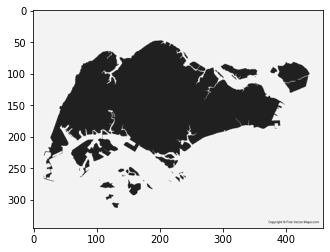

In [158]:
# On a trip to singapore
f1 = open("singapore.png", "wb")
f1.write(codecs.decode(singapore,'base64'))
f1.close()
sing = imread("singapore.png")
sing = cv2.imread("singapore.png")
sing = cv2.cvtColor( sing, cv2.COLOR_RGB2GRAY )
plt.imshow(sing)

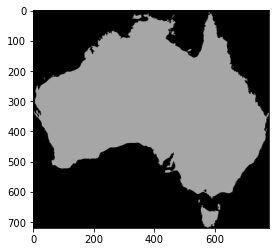

In [159]:
# Hopping on a plane to go to Australia
f1 = open("aus.png", "wb")
f1.write(codecs.decode(australia,'base64'))
f1.close()
aus = imread("aus.png")
aus = cv2.imread("aus.png")
aus = cv2.cvtColor( aus, cv2.COLOR_RGB2GRAY )
plt.imshow(aus)

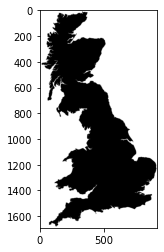

In [160]:
# A quick ferry to Great Britain
f1 = open("gb.png", "wb")
f1.write(codecs.decode(gb,'base64'))
f1.close()
gb = imread("gb.png")
gb = cv2.imread("gb.png")
gb = cv2.cvtColor( gb, cv2.COLOR_RGB2GRAY )
plt.imshow(gb)

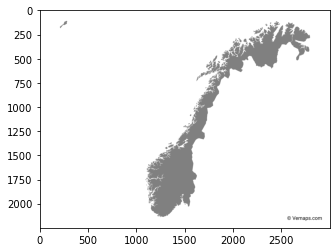

In [161]:
# discount cruise to norway
f1 = open("norway3.jpg", "wb")
f1.write(codecs.decode(nor,'base64'))
f1.close()
nor = imread("norway3.jpg")
nor = cv2.imread("norway3.jpg")
nor = cv2.cvtColor( nor, cv2.COLOR_RGB2GRAY )
plt.imshow(nor)

# 3. Counting boxes, finding the fractal dimensions of coastlines

### Box counting to estimate the Fractal dimension

Now we're going to finally count the boxes in our images! To do this, we first need functions that will count these boxes and compute the dimensions.


In [162]:
def boxcount(Z, k):
    """Input: image formatted from above, k will be a value which depends 
    on the shape of z, and will ultimately be looped over to generate 
    lots of box counts for different box sizes
    
    Output: # of boxes in the image given size of stencil
    """
    S = np.add.reduceat( # add boxes going over length and width
        np.add.reduceat(Z, np.arange(0, Z.shape[0], k), axis=0), # go over y
                        np.arange(0, Z.shape[1], k), axis=1) # x
    return len(np.where((S > 0) & (S < k*k))[0]) # only values that physically make sense

With this box counting function, we can then define a function which calculates the fractal dimension as follows:

In [163]:
def fractal_dimension(Z, threshold=0.9):
    """Inputs: image, threshold
    Outputs: fractal dimension by fitting for number of boxes
    vs different stencil sizes (related to input k from 
    previous function), and x,y, fit for plot of dimension
    """
    Z = (Z < threshold) # mask s.t. values of Z are less than threshold
    p = min(Z.shape) 
    n = 2**np.floor(np.log(p)/np.log(2)) #p relates to min stencil
    n = int(np.log(n)/np.log(2)) # convert previous definition to int
    sizes = 2**np.arange(n, 1, -1)
    counts = [] # loop over all sizes to get fitted d_f
    for size in sizes:
        counts.append(boxcount(Z, size))
    coeffs = np.polyfit(np.log(sizes), np.log(counts), 1)
    

    #plt.plot(np.log(sizes),-coeffs[0]*np.log(sizes)-coeffs[1],label='dimension = %.2f'%(-coeffs[0]))
    #plt.plot(np.log(sizes), -np.log(counts),'*')
    #plt.xlabel(r'$\log(r)$')
    #plt.ylabel(r'$-\log(N(r))$')
    #plt.legend()

    x, y, best_fit = np.log(sizes), -np.log(counts),  -coeffs[0]*np.log(sizes)-coeffs[1]
    
    return (-coeffs[0], x, y, best_fit) # recall this is d_f is negative of this

### Great Britain

/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


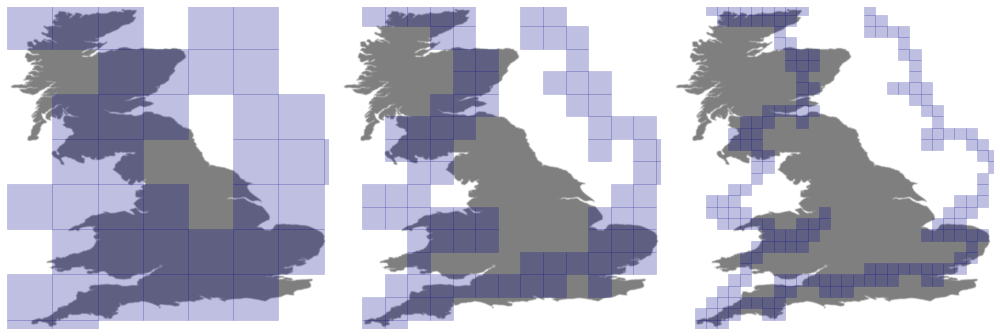

The Fractal dimension of the GB coastline is 1.24


In [164]:
Z = 1.0 - gb/255 #gb's values were shifted, kick them down to get it to work with code
sizes = 128, 64, 32 # size of image, can play with

xmin, xmax, ymin, ymax = 0, Z.shape[1], 0, Z.shape[1]
fig = plt.figure(figsize=(14, 11))


for i, size in enumerate(sizes): # construct plot of the country w diff size boxes
    
    ax = plt.subplot(1, len(sizes), i+1, frameon=False) #subplot
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            #s goes over entire image, grabs a rectangle when value of image is 
            # above .25
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size: # make sure s is a sensible value
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size), # y values limited by shape of image
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25, color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show();


dimension, x, y, best_fit = fractal_dimension(Z, threshold=0.25)
print("The Fractal dimension of the GB coastline is %.2f"%(dimension));

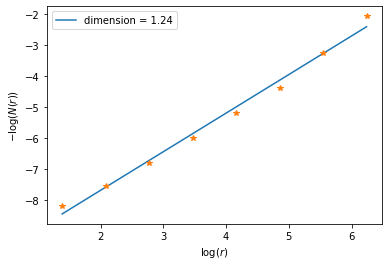

In [165]:
def dimension_plot():
    
    dimension, x, y, best_fit = fractal_dimension(Z, threshold=0.25)
    plt.figure()
    plt.plot(x,best_fit,label='dimension = %.2f'%(dimension))
    plt.plot(x, y,'*')
    plt.xlabel(r'$\log(r)$')
    plt.ylabel(r'$-\log(N(r))$')
    plt.legend()
    plt.show()
    
    return

dimension_plot()

From the above plots which shows the variations in box size while approximating the shape of the coastline, it is apparent that the smaller the box size that we use, the greater the boxes tend to "hug" and hence better resolve the shape of the coastline.
### Fractal Dimension of Great Britain coastline : 1.24

### 3b. Australian Coastline

/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


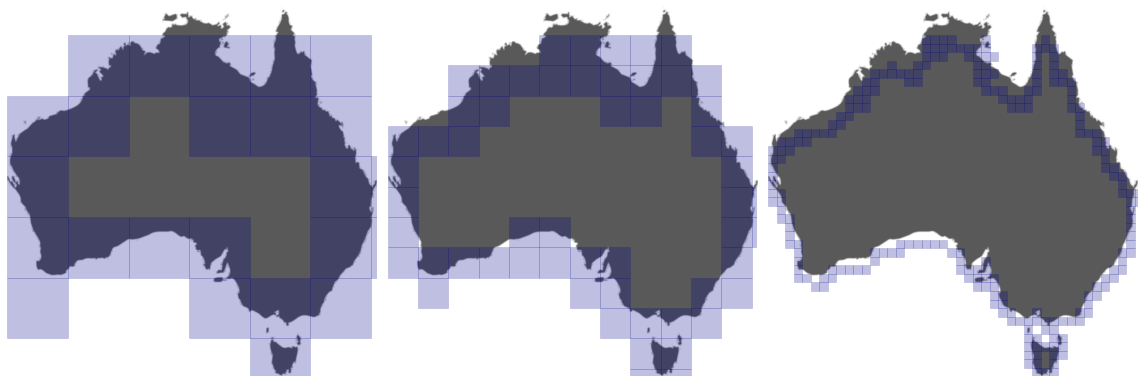

The Fractal dimension of the Australian coastline is 1.15


In [171]:
Z = aus/255 # aussie didn't need to be shifted
sizes = 128, 64, 18 # depends on image size, played with it

xmin, xmax, ymin, ymax = 0, Z.shape[1], 0, Z.shape[1]
fig = plt.figure(figsize=(16, 13))

# same loop as before
for i, size in enumerate(sizes): # construct plot of the country w diff size boxes
    
    ax = plt.subplot(1, len(sizes), i+1, frameon=False) #subplot
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            #s goes over entire image, grabs a rectangle when value of image is 
            # above .25
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size: # make sure s is a sensible value
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size), # y values limited by shape of image
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25, color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show();

dimension, x, y, best_fit = fractal_dimension(Z, threshold=0.25)
print("The Fractal dimension of the Australian coastline is %.2f"%(dimension));

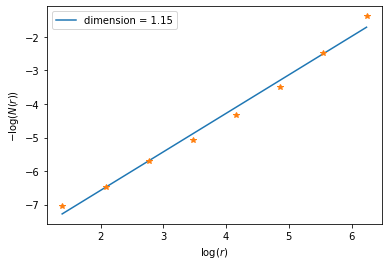

In [172]:
dimension_plot()

### Fractal Dimension of Australian coastline : 1.15

### Singapore

/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


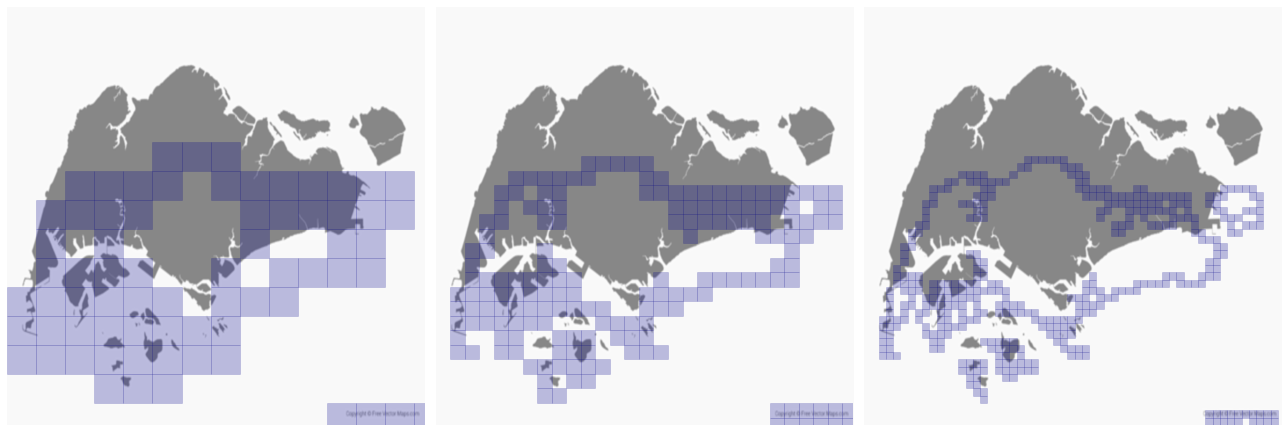

The Fractal dimension of the Singaporean coastline is 1.32


In [173]:
Z = 1.0 - sing/255 ## singapore had to shift
sizes = 32, 16, 8

xmin, xmax, ymin, ymax = 0, Z.shape[1], 0, Z.shape[1]
fig = plt.figure(figsize=(18, 14))


for i, size in enumerate(sizes): # construct plot of the country w diff size boxes
    
    ax = plt.subplot(1, len(sizes), i+1, frameon=False) #subplot
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            #s goes over entire image, grabs a rectangle when value of image is 
            # above .25
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size: # make sure s is a sensible value
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size), # y values limited by shape of image
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25, color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show();

dimension, x, y, best_fit = fractal_dimension(Z, threshold=0.25)
print("The Fractal dimension of the Singaporean coastline is %.2f"%(dimension));

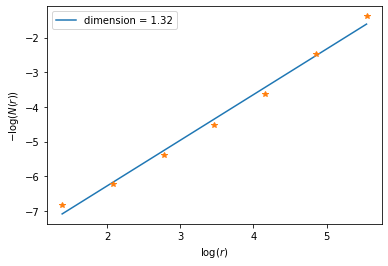

In [174]:
dimension_plot()

### Fractal Dimension of Singapore coastline : 1.32

/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:28: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


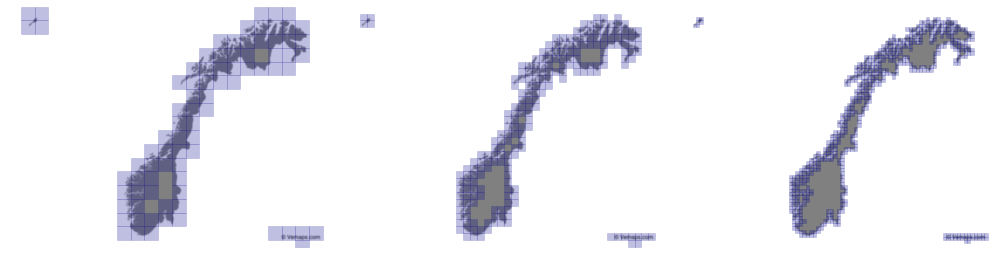

The Fractal dimension of the Norwegian coastline is 1.26


In [176]:
Z = 1-nor/255
sizes = 128, 64, 32
#sizes = 32, 16, 8
xmin, xmax = 0, Z.shape[1]
ymin, ymax = 0, Z.shape[0]


fig = plt.figure(figsize=(14, 11))
for i, size in enumerate(sizes): # construct plot of the country w diff size boxes
    
    ax = plt.subplot(1, len(sizes), i+1, frameon=False) #subplot
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    
    
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            #s goes over entire image, grabs a rectangle when value of image is 
            # above .25
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size: # make sure s is a sensible value
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size), # y values limited by shape of image
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25, color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show();

print("The Fractal dimension of the Norwegian coastline is %.2f"%(fractal_dimension(Z, threshold=0.25)[0]));

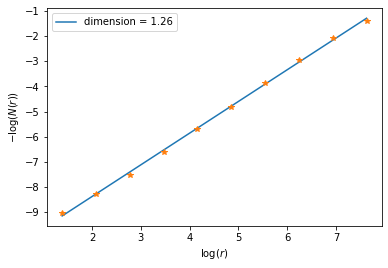

In [177]:
dimension_plot()

## 4.) The world's coastline, Pangea, Geogrpahic Deviation and DLA

From the previous section, we have seen that four countries have border dimensions that are between the values of 1.1 and 1.4. However, we can clearly see that each country varies greatly in its shape. Because of this, we will focus on certain sections of Norway and will compare how the dimension values compare based on which part of the country we are looking at. In addition, we will also compare the dimension values for the globe as it currently stands and what it was in a previous point in history, i.e., Pangea. Finally, we will look at an image of the Diffusion Limited Aggregation moddel which we did in a previous set, and we will compare our results to what were found in a previous homework set.



In [178]:
# current world
world = b'iVBORw0KGgoAAAANSUhEUgAAA18AAAJVBAMAAADThFKIAAAACXBIWXMAAAsTAAALEwEAmpwYAAAKT2lDQ1BQaG90b3Nob3AgSUNDIHByb2ZpbGUAAHjanVNnVFPpFj333vRCS4iAlEtvUhUIIFJCi4AUkSYqIQkQSoghodkVUcERRUUEG8igiAOOjoCMFVEsDIoK2AfkIaKOg6OIisr74Xuja9a89+bN/rXXPues852zzwfACAyWSDNRNYAMqUIeEeCDx8TG4eQuQIEKJHAAEAizZCFz/SMBAPh+PDwrIsAHvgABeNMLCADATZvAMByH/w/qQplcAYCEAcB0kThLCIAUAEB6jkKmAEBGAYCdmCZTAKAEAGDLY2LjAFAtAGAnf+bTAICd+Jl7AQBblCEVAaCRACATZYhEAGg7AKzPVopFAFgwABRmS8Q5ANgtADBJV2ZIALC3AMDOEAuyAAgMADBRiIUpAAR7AGDIIyN4AISZABRG8lc88SuuEOcqAAB4mbI8uSQ5RYFbCC1xB1dXLh4ozkkXKxQ2YQJhmkAuwnmZGTKBNA/g88wAAKCRFRHgg/P9eM4Ors7ONo62Dl8t6r8G/yJiYuP+5c+rcEAAAOF0ftH+LC+zGoA7BoBt/qIl7gRoXgugdfeLZrIPQLUAoOnaV/Nw+H48PEWhkLnZ2eXk5NhKxEJbYcpXff5nwl/AV/1s+X48/Pf14L7iJIEyXYFHBPjgwsz0TKUcz5IJhGLc5o9H/LcL//wd0yLESWK5WCoU41EScY5EmozzMqUiiUKSKcUl0v9k4t8s+wM+3zUAsGo+AXuRLahdYwP2SycQWHTA4vcAAPK7b8HUKAgDgGiD4c93/+8//UegJQCAZkmScQAAXkQkLlTKsz/HCAAARKCBKrBBG/TBGCzABhzBBdzBC/xgNoRCJMTCQhBCCmSAHHJgKayCQiiGzbAdKmAv1EAdNMBRaIaTcA4uwlW4Dj1wD/phCJ7BKLyBCQRByAgTYSHaiAFiilgjjggXmYX4IcFIBBKLJCDJiBRRIkuRNUgxUopUIFVIHfI9cgI5h1xGupE7yAAygvyGvEcxlIGyUT3UDLVDuag3GoRGogvQZHQxmo8WoJvQcrQaPYw2oefQq2gP2o8+Q8cwwOgYBzPEbDAuxsNCsTgsCZNjy7EirAyrxhqwVqwDu4n1Y8+xdwQSgUXACTYEd0IgYR5BSFhMWE7YSKggHCQ0EdoJNwkDhFHCJyKTqEu0JroR+cQYYjIxh1hILCPWEo8TLxB7iEPENyQSiUMyJ7mQAkmxpFTSEtJG0m5SI+ksqZs0SBojk8naZGuyBzmULCAryIXkneTD5DPkG+Qh8lsKnWJAcaT4U+IoUspqShnlEOU05QZlmDJBVaOaUt2ooVQRNY9aQq2htlKvUYeoEzR1mjnNgxZJS6WtopXTGmgXaPdpr+h0uhHdlR5Ol9BX0svpR+iX6AP0dwwNhhWDx4hnKBmbGAcYZxl3GK+YTKYZ04sZx1QwNzHrmOeZD5lvVVgqtip8FZHKCpVKlSaVGyovVKmqpqreqgtV81XLVI+pXlN9rkZVM1PjqQnUlqtVqp1Q61MbU2epO6iHqmeob1Q/pH5Z/YkGWcNMw09DpFGgsV/jvMYgC2MZs3gsIWsNq4Z1gTXEJrHN2Xx2KruY/R27iz2qqaE5QzNKM1ezUvOUZj8H45hx+Jx0TgnnKKeX836K3hTvKeIpG6Y0TLkxZVxrqpaXllirSKtRq0frvTau7aedpr1Fu1n7gQ5Bx0onXCdHZ4/OBZ3nU9lT3acKpxZNPTr1ri6qa6UbobtEd79up+6Ynr5egJ5Mb6feeb3n+hx9L/1U/W36p/VHDFgGswwkBtsMzhg8xTVxbzwdL8fb8VFDXcNAQ6VhlWGX4YSRudE8o9VGjUYPjGnGXOMk423GbcajJgYmISZLTepN7ppSTbmmKaY7TDtMx83MzaLN1pk1mz0x1zLnm+eb15vft2BaeFostqi2uGVJsuRaplnutrxuhVo5WaVYVVpds0atna0l1rutu6cRp7lOk06rntZnw7Dxtsm2qbcZsOXYBtuutm22fWFnYhdnt8Wuw+6TvZN9un2N/T0HDYfZDqsdWh1+c7RyFDpWOt6azpzuP33F9JbpL2dYzxDP2DPjthPLKcRpnVOb00dnF2e5c4PziIuJS4LLLpc+Lpsbxt3IveRKdPVxXeF60vWdm7Obwu2o26/uNu5p7ofcn8w0nymeWTNz0MPIQ+BR5dE/C5+VMGvfrH5PQ0+BZ7XnIy9jL5FXrdewt6V3qvdh7xc+9j5yn+M+4zw33jLeWV/MN8C3yLfLT8Nvnl+F30N/I/9k/3r/0QCngCUBZwOJgUGBWwL7+Hp8Ib+OPzrbZfay2e1BjKC5QRVBj4KtguXBrSFoyOyQrSH355jOkc5pDoVQfujW0Adh5mGLw34MJ4WHhVeGP45wiFga0TGXNXfR3ENz30T6RJZE3ptnMU85ry1KNSo+qi5qPNo3ujS6P8YuZlnM1VidWElsSxw5LiquNm5svt/87fOH4p3iC+N7F5gvyF1weaHOwvSFpxapLhIsOpZATIhOOJTwQRAqqBaMJfITdyWOCnnCHcJnIi/RNtGI2ENcKh5O8kgqTXqS7JG8NXkkxTOlLOW5hCepkLxMDUzdmzqeFpp2IG0yPTq9MYOSkZBxQqohTZO2Z+pn5mZ2y6xlhbL+xW6Lty8elQfJa7OQrAVZLQq2QqboVFoo1yoHsmdlV2a/zYnKOZarnivN7cyzytuQN5zvn//tEsIS4ZK2pYZLVy0dWOa9rGo5sjxxedsK4xUFK4ZWBqw8uIq2Km3VT6vtV5eufr0mek1rgV7ByoLBtQFr6wtVCuWFfevc1+1dT1gvWd+1YfqGnRs+FYmKrhTbF5cVf9go3HjlG4dvyr+Z3JS0qavEuWTPZtJm6ebeLZ5bDpaql+aXDm4N2dq0Dd9WtO319kXbL5fNKNu7g7ZDuaO/PLi8ZafJzs07P1SkVPRU+lQ27tLdtWHX+G7R7ht7vPY07NXbW7z3/T7JvttVAVVN1WbVZftJ+7P3P66Jqun4lvttXa1ObXHtxwPSA/0HIw6217nU1R3SPVRSj9Yr60cOxx++/p3vdy0NNg1VjZzG4iNwRHnk6fcJ3/ceDTradox7rOEH0x92HWcdL2pCmvKaRptTmvtbYlu6T8w+0dbq3nr8R9sfD5w0PFl5SvNUyWna6YLTk2fyz4ydlZ19fi753GDborZ752PO32oPb++6EHTh0kX/i+c7vDvOXPK4dPKy2+UTV7hXmq86X23qdOo8/pPTT8e7nLuarrlca7nuer21e2b36RueN87d9L158Rb/1tWeOT3dvfN6b/fF9/XfFt1+cif9zsu72Xcn7q28T7xf9EDtQdlD3YfVP1v+3Njv3H9qwHeg89HcR/cGhYPP/pH1jw9DBY+Zj8uGDYbrnjg+OTniP3L96fynQ89kzyaeF/6i/suuFxYvfvjV69fO0ZjRoZfyl5O/bXyl/erA6xmv28bCxh6+yXgzMV70VvvtwXfcdx3vo98PT+R8IH8o/2j5sfVT0Kf7kxmTk/8EA5jz/GMzLdsAAAAgY0hSTQAAeiUAAICDAAD5/wAAgOkAAHUwAADqYAAAOpgAABdvkl/FRgAAAA9QTFRFAAAAAIAAubm5/4BB////1khhPwAALgNJREFUeNrtnWmO5DCORnNy6gBTQB0gQXwHGKAvUEXw/mfqH960UBIlb5LDRqO7OjMiMqxn7hT1Je810vX3612DF9h7vcDe6wX2AnuvF9h7vcBeYO/1AnuvF9gDgRER3gXpH9jMiZbrhdY/sPB6l2UwYC+x0YC9xEYDRiLCL7iBgL2CNiKw12EcCVhntPh9enLAuludV+BP8BL5ZGCvTU0Ca3uWT9Rar1E9OnBmOjW5xfP3eqGpwFD55J8PbJZgfvXizlyi+yYCn21peMlU4wXWZsHcd81J/wvW8pMFbW+2/pZg4JM9kN3lldkVIILwVWv4yUH0TqdDRISEZ+/tKj1Fy6OCF1ib13BHfp8/Uy3udDocM3Y1sA81ZBqwppWTydtmupQX0fLPDwZW/dCy8ya+6HvzpxaDFGBNT/sBq8Vs+du8+DcfWm6NgbUs/RGLZfrjRMcVyJlowADhGGCy477Z/LepdKHhCRlNMGNgV38D619mOgvYUN1GtwNj65/lg3nNgRxjrBA8AnaPgKFKFI9pQuEh/coQmNwiYKiRxc9u8QqAyS3Aao3dJ/dQ+sDu4QXDy2DixfQ5wHDLzdoeE7I5iLx92nMV5Arsnj/PFgEjy7WZOLgxOD9NX24SdsuftywmU+MF5614HDC6ixdKmS465EKjeHfsdNyjEOMlCxxHppOIjelful5iJxrRX96jeMV/iF37NxowyG1Rc2IdD+eVEbGRxGwGJrck1NSVcivJR/KKbo+HzJSsEnZHzjoHDEd5GxGTNcgeMre12LB7REzz07b0PZ1CLAzbBiM2AZsfvaPEpiITntZUOFYfekG1wTvp1apNwA7WcjUPbPzXzwS2y63sSsJyIkFVKm7dyEU171OYn6ETxydmCJztX3xL55EIwU7al8duRIwMGvxGYLu/yba+TERc43b6f39drtuJUfDt+HbZOy75y+5WseW/6rQpfGLSAzHVx7yRmeslHhFT8SJgxKtbBvsHIPw/1NUVPEF3ATtCK3twaANW32PjiGtvIkYkt4duf78O+ZtrLOrbsdLD6JgGjgaTrfmXrq/rgR0WLS+dBq4hyz6LSc/CbX6jl9gJwHjjg4SIrXe2sstY93AvUdcXxgTGESekcq9U4OUxpiGu0YDpgqXnw3n5H9OzyzTKNRIwXROCEsDM3p+MBIzGAeZ7h/D/EQebinf8CGA0DDBfmuCJmpfREbPxGsdJjB6w/oGx68xrEiZe9wbX3D+NdV3QGXMAMJ9XCIySGcdjqo2fpho1YHV/kgN3UEIHvxHXYBcuOgzFB8ZLEaoKGBJ6DOH3fzAvitKhVwDjlofE99/hdmV8ErAp6y2ni5gDrLFy4GtEiYGR2vHxSBHztjydDYzb8mMcAyMFGNOjJczZkXYyMR3YLo0YAVsyUvxsfegs5OUS1ho0+2ldKDXJR+vDazMd1LL/xs9KhWldVjk+X8Yu8xKr/zYHecEADI+aFRwlW8+1jwopFkzLUpnTvS+xysC5TrI1hZgA9glX99l69tWeUvnnzyKGvoGxzwRaOPdhxKhjYKx6gqEv+GFK8QJiBmBqTY7JBOyxEsY9A+NE52iczoicd36sIKk/5G5VItmAPVUjQm9/7cVLpLRCjFLy/GwBc4bB9BA4V3scBWB4oGSt4xZuyk21AVOkCMqvnglM76x8ArDnRWFLbgAxMBlFJa52KvYfn+ci6k+tDAUMkU7wzPNzgbkB6IUFscPceiII81JxfmjTjQZMRHadjHG1hLFnszK27mnArjVd5wALyzP8dGCQ4YAh4yg9hxfiAxH4Fvnab8NEA8ZPcTqme4EmUXyPgO0EJkjxekLYjPCeI/UxDjD2NIV3e7z8kJ9ksfQVGAfYqhHix5GXH/KzBEwDhnGASdgjtf0CYfPAEwXs/Cb6E5pwdGBTHDm+DYPFincKLNf9pgJjCreNPRQYugSW3WjN2jfnLsZTnm7C7pAxGzDYgfE6wBzPN2E3EDO1CKSeN1KBLXWVRwO7vnJZCUz/uWJ9SU0zPljC+hsOlkrC8AvsBqVoBCYFYHDVJM+jH4bWiRCrTqQOVSISP+ZYAEEEmczYo4Fx18ASJgxLdkrxGpmIR65gVgBDb8ASRmw6TyAM03gtP4NGHBdlFpuOgSVugFOuyHwbGNr1qCnidgkMRmAINyLxAcqJu9OIcteZA3lgs4MI1VFkXezWiUV0SB0T7gTojgTsLhHLAwNts1JsKUZFsnaJx1LG6FDCOgTGLjDlW/3+E/KjY4FteodfnVgGNj3Zaw055vX7t4j8+7Plr2gbd+k0mLavWaAZLyUHu4h1YsPW70KJbMfv37//TP/lJa8Z/sLiGFdjKgIIriWW5daZl+h+Gw3Yv9/L9SdYRCa9mbtmtTQuQnKpA4LCAW/cFzC3a0GLnVdev8PFZQn41V/6e+QUB6QQ3ZeVovRjw9zR5fDckd/O9Sd8MukkYGeYsdkFbjNmXQHbJCx6kIjOBobG39Xz8uOHlAQit0boDBhTDOxfDpiPqM2GXQQMeau5OlKUW6SunA7XG3JmO5wNjC1SccRl8WaR8RZ7BuZatH92lYiWDiq25D+OFTHirJ2rLO9eDywyYa6P75mwyE1EtLy10VNJKo+LxkAmEePMMded2LD10VF4+QKmAQtPTceRAmYlJpV/ilt0InfjdMTDUjZVmQdGDArbE9mYNLTygEV4LKrTJGKZ7ueLdWIOmO69skioESMjxrypfjYssETIcAAw3p4a4wdxzrOv7KC4sYDpB4hEJCVgiCUHRdVVOczUKoNS8TnIZTbTIibdAXOSZtNN+ioxzCWqNy7lZ1wcDxBlYAW9CZslswKTW3bItgFzHY7p/nyvnmF5/KW8ZDKdiWEzYsJgxUrFNTS2S2pOJzINAoy9KTeIgAnHMLjCaUOsHNnoti8dkEHEFJjN/IfZgnzIpfNu9gDzHiwFmGaAYPMFky+uCbO814pX+WSnTJIM3mFTAyjs4unM6XBdWCISxd8wjQWLG6DAe1OD4ISzI/7fTSCzZqovj7iOADY/hHAk7I9yr2ys+08h2+6kBbQ/rBW5IIq0szFcuNyBPwDYUmZxgf1mL2lYa+UPKW6BYUynbP7uTCA+GFWyPQsYAxj8jAe7wByffj7WDRUh7zGlEjCJzfJNehHro8fmAA99iJhRwuA5bhD8U6wYbB7DCcBqdCtEm7qfUdo+MIyiEsOv7ylFuB2kRQh8BjC02EJYXaMVtIwCLP7+jogJEwmLFQLOANY0ZgJW12iJncfwElVDjNDtwFaIuAEYmvwX1KQqJZcB7izToVyRY4/FfrnlGG5PBtUX0ND2tnyswM8D5iSC/C7tlOPGJ9SOua3XQ0rS5/iR0oVOtO7AVDXi/32tqSly+qsw90AQ63mn6sKWWVTq93tKusg5p3WCw43HcOuVVf8j8u+b/kcrePFSj9QNC9cWtmqsUQOxVJYRkzX2TwMaxa2PV52Jfoh+tHX3/sVFLXSIUsQe/Klv4B3yCb9vYjC3HkQBMCSaJKBlGo5Xitj1Yblnxgd2e8a+ERgvwNb8oiZgMTCoIV2KZEUukffRR/lXa3puDGCs3cQ3/Zr+OTkYKrDFdsdpIU9Lpt3R2qxUw6eshfR8A8NSERwQ2Pz/fr6IaJ4/quc5JiPmbV1SVzwXQFSKBxreDzHEatKFTmyUMA5jSyzEhKOEkXh7BlKJ1dTvqqNf3vn+pAMqPbgdjclfuFtaZ19KlGFFvO6gSB1r6q5Fo4jtBGbNVUsXVyswBK4FT8oxXC4Qb3s4k1KEQ4FV6sRiVMHBlxyzvOIW47HedOwVwuGEVBCei9DrJQTH8gI9DJjMtU1RI2Umt1oN3UmMTWWFkx+vOB/JK4jDhlWJUQEXJELxuHqw837dq0dUxpGKDUrK68xvlZpNF9tDNaCXuN3G16/5d5OQcZR7wvYB0JVe+EjMPrZx2VmHaBFRNuxu8ZP1cn/GvhHYGonRj7gTweIqB8L7TAGL+ixMxJCQHbYbJ+Pz4CgbDAjs65vARN9EvyYK7Nwf6wZK/ySkgNmIcbt5qnogPM9oPGA/9AMRXoEtfQHwQ01OTOjLBs2oMkbc7lC0Ars12dEIbAa1AZuzcZgzTbzYdJQ/Kw0snzIqKzbjfqTasJnvdBkbs/ULsB/6WSt7rkpcfUf1zoKESIARxhq+QU6wHxgU1X6nl58frIICMKav73XrOms2zNKHhUDuOKTJzcvOh+nE+OntDZiXkWGeHI05SKK/9OOFwzJ3cHC4hpnOOQlC0vQ6ohkYdksYcRQ235pcLALbzMEP/Wzf8utX9KxtKcYyMCHaolak3MSMKIhRTng/sGjiMd2Z+0gDi7zvb6Lv+ORVL/Sd228NwMR1CoJHxNBEIHNjFpeAYU9Waq3VkbYykK6BEX0TfSPwHThMLoXTSPNuJ/zhWjxFAsgJClYLOI+rRVGjQU85m3gpvaP3Zu/rgP1iLxzx3Y7pR0TCZmDzsm3ZEFkRSOKgJPa7D4sbOLGMPtF+anE5WFPn3CGw6I48G7YAkx/6cbIVIBY/kCp9um8hCIS1G1AdQxslSqzVFM/2WBP6UE9YwI0ZxYzTASUdFQP7Jvre7greSsMS2cF9WiFMvBZplNYaNPnmHrKaPshEqqbL1JSe8XYZOMA2v8E1YuwHctBVLvxVITAHKS7nn9zm6jnIangltlz2CkxZjVhmZmDwgEGWASkBHtdjcfxm8VKr0M5tmTfEg3dUKym5oUZ/LRJagrsEphoM5QPm7l/IlqGa7NKU+wjsoW+5IUtbgfegbJ6zS2zyH+HL/YlD0UHcT6G5DZj65b9+uccfuWXBRdhIO85uduoXkUn0dbh05v5er9J15rED6KlZygYM6eYL30/a1nwbWj8dtROroEDhslK9SIRLayEZZ/KCpVuKhgAWhyMxMe/BhJ65FfcclTi5mjNS7G1hOkW+1iMxMmqF7xO8LDDOKUQmbQKms9c5FYD7LMK+Wsm6gbxtEgSfwmsN0nIpXu6wvBJn6bJP2TLIeKawuX3F7CvrVTEVGAgLp5N4rX3lyGZDO0xNFYFJUIVdcx2uZ4FyQcrP2XM24Y7V5TjL20AITAYChryLGABzCmcoa0PH8Zs1HFLv4dCENYRf1cCCQoL2OI8NTLwypBXYlLtlNzuVbQ1cTy04Lfxa9ftSThgGWOQkFlJqTDEwQ0PGpOTAuQ0scOO6qeOQ+URezv5C5Hzo4YDp+NRew0z1ApPjl/Mqw84DyEki5t9ZvmLeIbC4GyabfHffaRWxZa6YA4zTxLg9h2g2YGE2tTedeBwwaMrSnlaQbOCG6PuckuRQi+LjACuoxEyyxuwn6p3QqUoH3P4bnKcSvS+SXJ/OVGLoipW+HhQfX+xtoAEwpeV3SaIsu6lxuk6cv8g4wKwaMajAVkVicd1FJlcwtmU8CdfyxUBnixhvPTz9JKeswFCo9Yc/MLqJGjAmXciwzv3AebFzWJDIpH+78xJhtWAKMKtfrxkx1s8RnfOUa4fOSaGY7z9x6uapO6eD7cBCfc5Ellw9iTe9VMnvw28RkCWTCBI5Ldnhe/Mp9dIfMImP5ot+D82n95NWhbqT1sOo+u5TlmP5wTkHcLsyj7BupCxNd8CUToxUsI98aTOuOK2bNuMmxjj+Wg2W8wxppbMzbJkKjE2O8/XARCszI+Vr6D4+k3NOnszuH7aoCqFnw6pXwlpZWM7npVsx6hWYqKGks4SWP8HkKn3kUEDZAq0FXVcUWTLA2JZLuANYEhe5PWDz3qMCtun+ImCgbMJJBXZqU0cgOomIegBglAI27+6ziKi20ZLLkVoABie3JUoeGI0BTH30RUTke9mZbtKPsZgUgYWCBD/FeH6CSh2v1KUN47S3tyUBrMAYKrCCiCndNt5JvnIyMM+IeSmzDoEx0jkmzgLTboj82M5Y2uKUXVv+LXIdsJr6xS3ASs1MaRumZRjbgFGhL+dwvZhOanBN/eKmOIyI9UYL595UL5EjUy06sLINy/zsjDxwOhi9Xb5MmQ5kDuSo+Esc3LQRGNI/3CaAnQpMqZ9DbrtsqanUNvH6L844DBi2vS040YZtjtfyu36B0QnA1niZbcDSPTlMZ4Vjqdvq4XQIY7Y+9eA3AzMfDZA2YecBKwHpdPxedkHQqMzXrSfUDgzRl+LrgE07FLsERgZg1AiMi2Yq88vzgVGy/DclqLsEVlg1bhMxtYGG64DxTcBI7j96Jb/dyLBqtSI27245Aph+Ps95OnGp5/UJjEtLuumleq+eicmsEzn9rJyXtEcqE3D7IZgpYGXTz0HOXm0dUAVM4gJyDTDEbzu+LKavyd20dgHzvIdQNpEEpp1GkF3xXOpXLgXGHQPzOwLViWn+ZMQon5VO/2tLnCkdI/cDPquMCf0pHgJYaqcyq+cm5AeDMc8CCLGaMWREDufVnQcDZllK6JMs888os172Nx8yD+ZrmnFSjn33wDizkqzcX941ntx6RQ2yDZg/0JJPBIZE6Pw4YG5SN/pcuMNUjPkp72w51run6BJi/QJjk7LygEGvycDT/vOENE66DyUrlurGEbrI7+gKGNS8b85/00rm0Woux0sJYR74yso6wwIM5ZDsZL+jJ2CsAcu1akbjdlGsyQTAiPcBYzqTWPfANJVYV/qA5GWGAVInwxq9Ds54/PIRvCZgkTFl2ypw3kFIWT0k2mmkFhiHC8yPN2Hy90uLB23eV2livPajQMK2QiiTpBoMk49PFMkd2mvfL7A5HkTo1Zee2EZg/qoumSpoKcy88w6lyeTxSvHvl4hAGLHPYR+yYfs1ExFDzdSv46v1HNhai8ppRD4+hEa/TgdBwlk0BiNeJYAQImKOe+Hn/e+SBAZS1aVatgZ/DLAgV2FxuiqB8WLEIs3Dkjn4PiXJep+BTqzNH+kYWJSXqjwz17LOyykzurmwGLHsT9l5MCRWu5AH2TDFReTjgSEHLDuJBaaPZ+cPgTTH5pnAKox3LbD80eRpYHr7by4GJKVAhGcCYzoL2HR4WslimCOEfNS+7IZy311tx4YARucBQ3gesBlY/JdyczCXxAljHSdWToyOkusIgVENMNQCk+xuyYxORBwKlEpnMmWa2d2bW0cMgzgdmXXbB4wKwGB2O9JtCxIlLuHuSMPTgNGZElY8RDv9rMD8h10lwXEFh58KTM4ABhMw9SVsN57bLj8fGLgSmPQPzClkHJ7pMBgxzLulOdRuVcC2qeletRTV2eEBgIUG4GBgRSO2zCPgsLqFmqzzvJWWp1G0IcUnAWOXBXZqRDV4KujEb3/iRzENlUMGX0zrWxgxGLDDyysGnRgAYzJVwpJ6kRXGjwIWGH4+HFjJT/SAIR0V2hQblI3UFSqxf2Bh1heH2zCSvIi5M3U4A8yaiMFnASsqxXpgBZ2Ir1/OMUeZ3hJr9YfD71rh1kv3wOI74lOAce6hdk732+DG6VtL1AFloNXDgWGPEQPV68Rt05x7HMiCzoXNZhHDU4FFhTBIYbJdy9ChgtuBreMb2SQnbMDAcDbMVJswxlDAik+ktAHLbmnevoz+jSskbG5VRDsw6hkYacDQbsVADTrR3VJxCDD/PlCnEXk8YAXrnt0rUVv0moOn5QVI6kRYDxnYlEZ1ogNbiqxTYKwDsyVaDwS27qjg5EFQbN35sAGrTnTI5ugMBqzZUwS1GTFXIavE7HoNETBrzRn9A6MEMJITgBk0afLoropemhUYTEpc0Yj92jBOAivsEUuuH3LhTVnEOB0MmYGx0hoAu0bsGpjiqMPwUC49tUicRFDTB+D/Oab9IrYCS2VIUx9VCAb7AaYP3SupvWmGVIgs4XSgKCVw3TpdxFADLKjGsvu4hQ/jz5f7mHQMjLOFXbZ4CKG1QyGTkTUgjHyGiCtsWLB73vnk+Ft+07c3wqLb1FS+Ep9SipLzT5AgbLJDbqf8PmDTLqdYKyAOPH++foh+IOMDS3l8Wf8kNVEMphXXxljV+x3LFFGEagHavs5v+iL/lAvuFRgXgOlKUSnocq4AOHfe2kQkpxPZ6qGv3nkMDNFd/kz/ka4vKzBtcbQBR87rkJKa/cBks0GGAkkIDB6w7TZ+iH6+7Sdr9Q0sM1g75VGi9NjbXDy0AoPjVMZVPnaHE0z27Ifop+bEwvubcCTn5uX7KpB0RBoy9t7np32OwqbK7dWhehAWdl39JQvVvXhtwAypiuiuU/jkUGBIF1kKYppxKeFlP9YKd/fiVQWs0H3LEcqdwAqHhahH0uoaUQPmfs9ePXiDDSMrk3yrIFuAsQlYPtNglDAxpCv7awbYDwycaQ6IXcqdwNjQCbMTmFcQGAuYbT4GzD4jl4HJAcDMXU9hPtMtqY91VQHLHQwbWbjMclqySxaNKFZe4UkyDwDGJmCLUpRiO47kqmgWYLITWOal7BmxRwPLdA2EH5CteBnkgwwaUey8xA87NmDYfv9cYGwARmVgUuTVDAxpYPCLpJBui8uHAEuuUw0wKjh5yB8vYfASM3DdmAPsSPsjgaV9vxZguqsjhcrKgcAIvLms8gJr0IkQJ8mHVmBIvxZhb9agwGQvMNQAS+pEf+fnicC2AAVrKvEFVhQx1n15q0ZMeR3IvNYFNu2Dnn+beibwAnNYqL4hrAKWSlqLBRgYjE0nZpPMTwTG+4HBUgkzAMvrz8Xp4HnOQEGEXmDTpyg6EWyqhBWBwQRsTQEURKw3b+QeL3G1HO5886AbxPRgcwUw0byOooi9wGZjtYqYzH3eYVOdtAITEzA3r1gAhicCA1UAc3cSLYVl/+Q98xrVA4vqsPmjqHsFRuVJ/scBY/KSrnHLiH2JKjQiL7Idfu9sDNZbBcZxOmQPMN4LjJp4Ke0a2Zci3EgByosY9wpMq3JVAANVAEMpASw7gBX9B1UnokC5O2CsrTFsonQ4sKoFqmC9TB7hWCdS7uMrgfF1wNAMjDsBVgiCpz/IZHc7GjTiJcDICsyqESElYEgCq1ue2reGwPJuR3ddHxMwXp82ZNQNkskgtvomSuZpn4D5wHA4MO4TWNRPpOopLiEwhs2c7XarNfG1sqkBQy4Bia6BpRY63xVdJWDOwVEaMDkZmCibPFBoCe9WJfp7S7VWvgM0YlDv2snLe5J2AMNQuUQuZwrrgOVT9ct07dgoNjzN1RkS91aES8CkzzisnHji44DRHI5yNMe+ZWmqgbG7lw3M8/fJfH7HwPSj1YSzp8hXRc1eA0xwnEDbLVQD88dZgWU7NPUAEcMlwNYR1smIyn0sZR8wdh5wryX3amDs5jpy2amaQZfXAJu+FWUOKoTS6dzmJHqjrp0Fb72Feq+DlS9SyPJTdypRotObwn6wuNN50v6IXUsrMDgzquQ6YIj2Q2XDrWbzem55BZJPAHunzcyqTAgMrh0rz36lcu8TXA2MQeEsCGSJUEfDfwO3PnWc9UbM6fKcTqXn2nMAvL2adEDJyWjD2DFi07vYAowvMU0NwEQ7cTvaVwnSvEVuSXRsOnHnYtQCE2IR3/PNuImddZI6R9sTrcOFEisPc7beHLUdsXmfa+M45tldtwCTfrumQASG0iHoyBTvBoa9qY0MMOsbJqkJ5gumfZQOgTmhFsPJBYTylso1VujEsHx4wHLYgFEITGzABCJCvahGt6eDI0sFY0YRphPZEMcNoDuBsQ1YV5LmDGlWpu1xKzB9Vy20Pk7szxSwCRhHwERrlMw8Fl0B8ydoqT0ekmnp4DIwKIe5xBJW+RxjFzB2RB+5B2IqL/QFjJW2C0+fSdo4scWIJYDxAcWMamD+PZciwRlVFzoxC8zJQTAj26sIPQMZAYtmwnmbR2q7AKkGmPhx2PpGSLmh0eXWCzBJAINXcuaE4xe6J+AEMKU0GnyBGmDs60SrHnXObfTGpCbEktFPOBadH7bu31qGD8ErYdqAiZ7Ch57FQlMwpXkd1cCkNNOKVkvJXQMjpuVm4Jmp1C4XZH+w7exhfSdLdQJXNWIw2jDnoCvKpzIdLdgfMK+/3nETuRoYryCiVxkqMdVOohFYKj2YrzavtDoLnGcRW6vJvJY/VmDIdG/7m4UigYIs9XhDcbruBuAAM8ujFdh2hCp6ydf7J6WD3EPSJm9PXKc8Aczn5RB29CkbgaFdJbYCQzFWnk9Y7A2Yk4pgJYjmZLs9k5YlwVQ+2Y5AUuf24QhgXPVOCkIJFMnOjlF3wLgEjMtRmHjBtDCJ5DMgsrOTdAVmXtIQWFEjzgasO2BOk0AdMGUIeqLtu/yzZmAQo2fAwchtA1juJtWRAgYVWHJPJsfiAj2fmMzi7yqQ1QIjS7aZd+Y5bwIGMgBT6jEasMTxNqgvGisQzBl1awIspN9FD3AMDEELmAmYVo8RKy8PWeuNzEVkC4nGfct9bBXzgbGSVC8C41Q9Rmo6PXBIw2b2A9jiGKb9RU3+rz/8QwNG3AqM84DyWySwQyOagFW/LE5Whl+v+nidr19mGKbXLBmK+HC+JDA4OdxSiMXFBtP9wGB73SHA/taeD/c3+3oL/gDYxISVztICMPWoIVANsSPG/hcqxxZfPqcRdwP7pgwT06eFUhgeX0fOzgEVGJhylegKYnwAMLN1qhdlzcR2AIyj9WenAwdRkgKcM081+1qOMGF2T66+eqz6RLU27Hhg8Vm57NQfo0Ee+lmMTcD4AmDUbsUmT4V2eomH2zBliJEHzK9wcZGDfSMSDtmFVVCJZMrRJ4FhfzbxaC9R4o2YWxcwsIlggmqZD2fRngzMTUgVlSJTDKy3wFkTsQ2YpzQNxzxXBc+HaMSKVhlG+egk9JeZ0qSQ1Fyie8ouJaXQUJ/kEzVilSwWRCwyh0z9JX/DFLAbh0VRJJuAGTf78fXAkBfHOIzvrPM3AMLp+GgfsGRNreUB/vrVDqzwB7vail5wTJxlnfbco+D6p22YogEPBPa3Mm51HYkCEO5qK3oBGHtyxYnjCXVgrq8vTGwKxdCoEbNxaMGTKPzFvbMNLgU295DmbwYqBGxN2mCCaF5H3NjGdB0w70DHpATRUBJWSrYRibt9kfxjUxZxYa1rERI0xTlJflwAbHMlcn+SFVerd2CmhzXSievYFW9oJiMItxJjVuq/fa0NE1fTJ/8kT9sAZBino4EYB85DoPCCAw3Xxk8vsj4605P80kgmc9cYjQlMPZ6evgcYKzqxlMhwEyCynVl+nYHfBCv9N9fmWPlcYIB4s0yWkiAfOwHCqhdKwOiJwCDKhJRSigq+Zwi6HNgqYkkjxuZ96kMBYwQixtkIWi+cXa4RHSv2acAk3ALI5fpkdvbYdVlERycipxE/Gphq5HADr+20h4Rc04cAQ77zsATswntmVyemghWm53mJ+4HxHQK2iZjmCN5Vn7sEmEsOeZ9DmbNLNWein2XFfr70ZxC5sHpkCVuPmmFj5VlPS8n1wCalGDYq+c8VarOs/QL7+uUCM3YdJoFdvQTrQxK1AgatKOqbbyXSCGzKus7AkvMwE+n8+IdyBzCKgM0pa2depB5/nnoVmhMbgU11jWWXOsrAOAfsch2zKjwPGM/bsp0nEDGqk4GV2n93AfOiTBswrYp2vU3YCqbu8zwJlkQ7rtmvvNO4wPIuYFEjbhtf5B6dSOEkICbttKWtSDQusMmGxbqtSiM290odJmIUUIR2BmqgH8/26s+xYZOXmFd4RY14Y3SaAKZOUVrreAuwk43YKV6in+hAya1PveC+hJ3qVBCpArZh8/5x2FVVNj8WGA8DjO3A5tfgrERHXWPKMRXnotOReMGNVV1FJ+aBnRY417V+HQoMVAkM95Uw2Cphpz9R1wHTNq5XA5N+gOknFD8ZGBcnBFA3wMTgJhZyvQeph+tsWNTFlt3DMm0SDo0Y5F4RowwwzD9M+PKHhSSXeYn6NBx1HyYvDYjBbpYbJxAqfmICGNStfDcF/cc4HSgnpljdf3SfgGl+ImujNinXqzM0sHwxjNVQTAYBlvyAs3z9U4DJ2hLKZR+RtX3qdwqYohNZ0Yi5fWTkDHGmYYClzqf1gelnZ0pfwJRMfX5rbVkK+wLmdyLmgPmWS00M3QWMUsCkDIwp5XD2CUzizeuJnRDBztnWLbKnGLGUTkyGa2Ekdmkr0T5gnHImYhE7YRLYQcAoB2w2v8kPgPcm9UU9ARNDaYXU88V6AKZJhmLCEKQ02HU1wqn8SbXZCTA2SRhrScT7+2oTqmy2sdjcvwgYkROJBd7VycT2dv5afA7thIIu5gClNdl2Ss6s9Pz3wUHHxfreofm3vcCMJkwDdjuv3Oh1lgywRKCdnHBGHQETCzDEQ93QxU4DQ/w+TzO2JFSTDd5HithuYOWWxMQpVJBuRAzZl0h+fKm2a/FEETsKmBCRfQZfL8DECIxJTMRSOrYnYJNTleelHptjANY+q63ucSsCy4+OLe7GAXcFTKL+S9MAN8N3q55z05oOzUeaZjtOuZ78boABVLzagNVPkroJmMT3qUUBnQDjoYEVOyNt8WJ8n70Gzlo0MhKw4uhloz6L79MLDLqSMGoCZliHK2zYUQdbcrz5zRdR9APMQA5NwC7wEg92N1lp4Zn/0Q8wsaXrW4CNdMWaRLxJIDQUMO04zL5WG6cAc2bdc3/ACvn6joEd8YXizkx4PstRwdiRXqI/67egEzsC5mYAm79XAtjhzv3hwECwnNXX01gg9kc47hBTztwg4RAhO2J0UdROajpdQPojtueLccqtd7xp6gQYR+PBBgPm10jQ/gmcv8EjROxIYFuHr0Un9hZHQfaMKvMLmKkbpD6AuSPqU03AvQMLbqTxmV2NYPJDuCtgpBx8tJwHwSMA20NsbdJcP0h9HboClrBYYMUR6TbVEfqK5m/qnzCU6O2gDoCVXAyom1t6zk3xklfyl77wpZm81+rtU3tF7Apgup7sPpkY2aNysdMBpk60YBGhfXbsQmDgAYyYH+p6OYryjAp2KanAsNvxuEQl6p6ijHWxqdFrY5pWIrwHzZXAiIWrdGIfrXArgPpV2XVb+li3c7xE6PhQedZKB8CY9gBLBM+m20oMTrwR2Bg6kSkkV+u0xB/YCIwuAobUpohBbFdlNOYvS3t+6kwJYzswjOTYH/Egt7/7RBuW9zo+F1jKU7RRPM9LVIFpO8f8rbPgxwNLdD3ucaaOOXtFaQDQNj97wG4+w+QyZBqc/oB50/ZYmSYAGS907uI6DxjWXWMcbJQlb9v38+WpP2CcnmlJEkuY3Da77gVWAkbizi3Cs7xEpt35q5uAZduzof5z67Q8Rinf4wHGvWzPALbsqIXSCMbfF+wpOo1XPJd7BGBcPh+Hk8D8A6GG4xUNycGwwDieRwqlc29MYImU6CDAcjHY6iragGE8XiinovoHFtaW9Vzi9Gy6NowwtIANAoxNG/ji2b/zvfpHro0BjNLAjr+DRe1MC3Xk/jAq7RTjgKWCfmiNKKdW+f73P78uBha1ca83i7GApQSMz0wH/P3Pf/7/WmCz74E0sP7zwVQGRk8BtgTQSOamuk8IczCUWT/PCp0DY+NcDo79ROWD0DevbTZA5kzGzm2YDRhYySYqkorOea3N2xlgZ4nYQV6iCRhYaZyCXKZPDk0ect6GVd4Dt2A7HRhTEVj3JRc9yNwJjK8HZhnLobcmynX6/+DgKw+MzpOvi4AJqwdTaR8zRvCVMGItwHA1MC4Dc0Z3uE4Hdj6cfQDz9mo2AUOVJJ4DLO6tn3erQxewPfv379WI7n00HZpzKDCLvBqBLYkpQebJ7H3jc0HEmoBxZZPiORKmtmpLcvB0/8CyUzwR3gbqdGIPwJBw6VN12t43tOTHroavOQBYci0OAKbeDpPaqZ31hnv2OahM7FA9kVyKQ5K/WGutCjANXfKA8k5plYBhBzBU/fiwOEyWTb3Od+akckw9vehVvEqTqNGuJ1AXTR8eOM/ql4kIYH/cZSLY6h2YZW74oXpCmbV4ZqZj/RlzcMYHdCxPAHbo5u1YB52dmoIIu1vErMBGdDiazlAoPSFIqs0zsvVTaZbjnGIiwfs0YLv1RC42OwMYp5LAYwLjy4GdGjhnh+9B+wWSH4BnAKOHAUuvCB6hEc+9jzM6fzlRZ0HibvhZGtFyIzwQMBkMWAOvsoi17/o4YzME50bioAZYB7szWwSs/OjdC4wztZWozpJ5f3wT9+/ObONVFLGKGSXBmVxnA0NUea4AlpiP1T+vooix2TEJT707Y48zZwwaMm/vDRjtuIqfbQX2HZwreTow+D/PvV36AraH13E68RRgbAJWMmEkPdkwpg8F5m9OpwqNSHd6iTt5HacTT7Fhktsv67d0oArYmOrQ5thbb+8ELzEPzN0Hkc1zdJSY2s+rfDeN93sCME7uNMpnEh/Fy5DsoBuBsWHrSgpYf7UVOuSSc0TseGDQO1SQ2IvDvQFjughYm4hdAYzdXXC9AzuKl0F+mkTsIMc5Bwz+j19guzLAxwPL+xxpYJ04iXQdsBudjhwwzjaRPhcYDQIs0do2CjD+EGDJNg7i4H9hTXQMDwxDAgN9LDAaEhiHP08Ce5oJewow+Rxg6BiYJIBJqa/e25/0MGA0HrDYe5RPAobRgCFSjmltKg8ERkMAkwww6R4Yfx6wWZS09qn0GnWiEI8GhmGAgSQGll4kkWcCo2GAsXO8QBFYT9cnAlsmtomvHMY4RIA+GFggX/wC6wkYe8C0IuYnAsMQwFib+Us0xslFHwkM6ln3L7BuVaLiaYEJr0rsFJj+1fm1YUMBI9ALrCdgUgJGY5xc9AIbCxh/DjAuAsPnAZOOgS2pQ4zM66OATcTAI1uwjwLGRKLxkoEE7MMkjEgbnricMPAC6w0Y6+FXupvj8cByWoXvB5Y854iH0YgvMNAnA5O+VWLqyHSMoxFfYMuxsoMI2Ae1aqeAzdUW+URg0jsw9W6FRxKwF9hAWY6jgaF/YDxyGvETgcnwAvYxe5xfYGMC49E14oHAMAIwGV3AssBQZeNkWGAjCZgUl/9mAbsCmIwPrEFnyhDAeHQB4/La3ytgFwCTwYGhKVSTYYHJ4MDQ5kgOCwxjAbN8fw5Gxlxrt88GJmMDQ/JFWdUoowCTwXmxST/Mv7mnxflcYCPzQvZlOVOGgYDx+pUH5GU97padw8UvDzyPPt3EecKG45U5eS64ybyvOBQwGc0v1PVD/kJWwDAWsKEvY8srRPiuTQQvsDYFwfICGwvsIf0QeIHdF7O1CBi9wG4HViU0DQ7KC+ywrE6Di/gCux2YvMCG0omVAF4bdjew2o94gd0LDC+wsWzYC2wwYNVC+jodQ2nEF9jNwBo+4wV2p0ps+Ai8wG4i1qTfiKg2A/wC26sUeUfRsmHw5wtsJ7E93SstivQFtg8Zlp6cdpX6ArvclmEPL7zALhezPWFBLewX2L0+5uvWj+Vi1ivTF9itwOQFNpRKxAtsLGDyAhtKJ8oLbCgJwwtsoLitNT/yAtsnJs1vak0Yv8B267XaKuS837GN1wtsv6tXufbcWjx7gR0G7Ap3/gV2HDDUvgMvsGGA8QvsfmBXCtgLbF9EVbv++zetv8D2AsOJr3+BnaARr+X1AtsLrFaBygvsVmJXOogvsBti7BfYh/F6gV3o/x8yheoFNhavF9h1vI4ZQvUCu4wXXmBD8TpoytsL7CL/8Ki5ly+wi3gdNUbxBTaUQnyBDeUhvsAu04jyAhuKmLzAPvZ6gb3A3sv1OfACeyXsvV5g7/UCe68X2AvsvV5g7/UCe4G91wvsvV5gL7D3eoG91wvsBfZeL7D3eoG9wN7rBfZeL7DnA/svfacONHhmjCoAAAAASUVORK5CYII='
f1 = open("world.png", "wb")
f1.write(codecs.decode(world,'base64'))
f1.close()
world = cv2.imread("world.png")
world = cv2.cvtColor( world, cv2.COLOR_RGB2GRAY )

# compared to the pre-covid (and human) times
pangea =  b'iVBORw0KGgoAAAANSUhEUgAAAwgAAAKsCAAAAABtlMWHAAAABGdBTUEAALGPC/xhBQAAACBjSFJNAAB6JgAAgIQAAPoAAACA6AAAdTAAAOpgAAA6mAAAF3CculE8AAAAAmJLR0QA/4ePzL8AAAAJcEhZcwAACxIAAAsSAdLdfvwAAAAHdElNRQffCRoEKDUR7xOFAABA5klEQVR42u2dyZbruJGG6/2fqLtuEgFw1KzeWN5Y3rRqYXnT8qJV57RMNgHOEimR4gSSf7hcN29WDhIYH2JE4LcAAoEEv2EJIBCAAIEABAgEIEAgAAECAQgQCECAQADCaOI//VktK/LqfSEEIMwRElcQ2du/MiLiLhYFICwThF+h+ocIEJMgEF1WWBaAMFu/qFJ2Uv85lyhEIBCHdwQQlgbGWoQccMVB+C+hLAOxI9YJICyFg3+4zODKJ4o4IMlB8uHVwVIBhBmq/eoUBM5mbad//2UoGxD+P9F+npMwXECgABBmJwdbBsKMDMaCh+v9UBwLiJwRKJAgw4UN1g0g6CxkNP8WLjmQEv+bcpovYg4KJkF9CjEzQNBYjsR2zZyjU5wdjf+J9T6n+SUgyM/tQQJA0FhMxh+NvuGehMOSAcbjqkFO8dOQ+YmEOxYbIGiNQqi2DZT0oZScxXUCntQL8iCUiLQdWGqAoLXI7drYFPyfStmJpF4WERAxUWIC8hIXFLDSAEFr8WK1rrNlhyaAxXotclWDtxyEJKhvQOYIIOgt69jNNz9Hs5TFw4I3EfkdWyw1QNBZ7mbs7nzWVErCZOK8KQjcwlIDBJ3lSCrCJWZ89OMjt4hXWwPKZ4+e/yOWGiBoLSx29kMtX7//yn1iDcrSRKIQHyeNFgQSAIL2ooICbiQ6G4bMHxrkSiLj6O8s/RmhwTCSqlrBfIiGJQsIQBiUBVkUyFWFvdX7IOElQhCFotracgInakdS4URsGVTzBUwCQNDWHgR7JjLXJgqFq0/TJA0V9JQRUlv/MQiSs5nbnzDikK15lKOMEbosAIK28sMKpQB6X/2il+aipLvILnydHVzIcs5hVEGZ00Q7kAAQtJTVicWdc8VmIVH1DdtXk6CMyLHK6vg8+uroV1yx5ABBQ7GUK59Uh0U++/N71ff8sd+7TwHz/Z37tYl+dBQ8I0oACIP5/f8+b0PfnLEf5qz2x+1+sz7J/foWvGzHVyOaNlFeATvnAokX8dJQ2VqVhh75AFtkB3be/EgIQOhUHBbNU2E/BouyN8ywDWYwHv41/JRBYrMRW8vkRJUdc/In/Lz5JekXnj6Smf4C9asAAkAYRnio78lEFRb1hrLoNFnyIVV0UL+icF5vyrdwX9UPvFovKCnXxTkpPCGAMIicGU+mqWQ50VTlk5M0FDVBvG0akihUneW8Z6nSMvcsL6xQhjYDeEcAYQhx6aXjoeKYwIfmubix6MumUf/JIsQ/kxknkAAQhpAS5Rbl58fqdVK39GU2q+JMCwbfCCD0K1txllsuKyrei143O0gQ0iIaWoCc7IJ0+F1WfGMwCQChR9lZ0pExWNrU0PTMQKWdqFJ8v4KC8G9/WPz3Y6z3z7U3AgYAoVeXSEa/UW6onoLXRqPxa3FUR6vg5d0YNrQVIPQhfhQjS41jjD/5Rp8igI9Hy+Iua2bWf0FrFjdh0OvYO5zjBwi9ilQzJzII9c5Oyv+LOkcs4/6jBpd+eLkxqGXTvjyoK0DoVP61zoFAn0pkT5agzldS7OHwOMStCWW+mFwy7YvfoK8AoRNHSIkruBm1P2+2qyhLX/tcfc0j+MkYo9A5ahiuVPpeQjW3IloGCN2w4Nuvnnxdr6gwuZc+WpHIjar/6vYffx5jUFiA0I1YRQdGpJsvfWqbUDnN5EaDcIOOh1p/oqd+ricZh/cGBAMKCxC6kI2bczwKyfrC0YJKEMi2ucUNirZnZtQAof4c37N4PwBP/krMvQMI7eMDzzEFf87P5xwZUV0pUxSYRJYpc0wWt6Lh7kkB+B0JRnSbgv/5FYqXCRbPPU6cMO4LILQUx3zxgEq2X1G9s3Mz8/1FaBgo7sx461RlzRGfxczFIKKsciH/o0E/19cEAAQg1JRtFBFUqq1b6B4tNA3lYwiRHMy0krOaNYKLaq0tfPIcD8OoTldFpyUMAb0FCN+6Rl52sqBcohqz5ODJ3xHFCpfIwKDPySO1if/HJwRicd/EB1GkHp8Mir8bFgEgNOVA8DpxLX9KICVmwOVlN5wxKi8Cv1gE74Mn45fltF5+jDj9j5lcQvgnvCOA8F2kTJ9BiIMAKhZ45f+dVNtFwWsXH/uOovNs5rlmFnXHKw9DR+2sIsrZkgABAOErqWkRTBUsiHzNrCwQEHVb8JICBAtqdQr5JmOVKESH3lS6itMv6C5A+EY2HyvHTEbTVjFjml169g4jVj3yPQty2Z/PRYB/pB9dfxfxWIurweKT0SVIRV8iorZW6C5A+M4kfNi8c/u+yEgQHkuKyh+7rom/LckV6sJ+YITanMy5Xoe4xJhsQ++HKrruoh+wj0Nm9j7yhgCENyDUiZbjD4TNEmNA7FMb0Od+pSIIO2Ywg8x7pMIHSVpycuHyq+KUELFo+vwleknsBPUFCI3lxmsfvEkvKUgHunxU9FAt+ecY5JZt4NFdCKlDpMaJpVv8D6saoxffw3CObMIa+gsQmopDDUCQTr9S1JiAzzs++/3zbbHMWB/jV3OMUq/MTSIDxUVy3YjPSjo3FI6/EpCYMlM7KDBAaCgm8eYWgSe3In/urrM/WRzVpkfOIXwtK8cwIhDiGnHshKUmwXr9fbFlSr5CjuXLTm8iRgAIdYVebjGrGzLUnWJBnwoKSYsEy+bnqZYKzzQiA5ENvnjta83uIon03mIq7LhAhQFCs1iZWsxqqfGNgrM6NifJTeUztKkBytqsHePZO4rsU64uZ0QjWaHCAOGb7GldEoQoar/4yIlg1BgpKp55Y8xIwoSV8frjRHFYUmRgfqDDAOG9FBznO+9fiNp9t9ri90kQYJQamHzj6V7et8ZOiBAAQn2xtAchdo4Mw3D/LV9wWUntyRU6/4Tf8TsCZoBQ2zAIPg0QKEpTXYKDVXY3c5Ri9TOl/zEtAyAAhLqy5xMRonwMXUrKBjoPEL5OnfIpSQUHScbpAQsAEL6S7cRAyKWWSgrML3mimIj/uEObAcIbeTjT4+C9lM90IQOX0AKEKjm4VrvZ7qPZgurx9EkXa9Stev5HbBV+MQfqDBAqxOOzk9C+WVvZtRp1JhlkRk2tBo7qAIRKcfkMSZAp1vXOJnE+7Q/qqh8KA6GXwaiIpgFCKhafpcQncyg9Tvoj/3YOgAJAKBcxOwZEMrk16UeN/2GEY8wAoUruc7QGSeQsXuYs3WALAEK5zBSEknRS1Khk3oPrxnNwyRRAmD0IFUnVwqkf4scjdBsgpJ7RPxjxORuF9MxdNmQgIQGXcAKEBIPgTkR8EUIsuu0zN3qjBgiIJBYBgnPYLIWDLIOUG0Xzk+k6NH7BIOz4kiQaExkdaEg+A+0GCFJWfDEGoexsENH2Ae8IIATBv+K7NZaDgcgnV9WYsniMpO9D85cLwiHOKPKFikwgsaSicII5WCoIXnYEeKkkyPcv9moWUrH/AgQsK1gmWiwHIskkMTLk+YVCb+qPzYXJEEwvxDXixBdsDrIJrozdgg1jh8wSGOqyBXaG+i8BhD/4kt2iLIOk7kWXOGSjs1k0Vg+Xl6OOsCQfKS60seRS2kAwZSwLF5cAhNm+syt/7VVeJghc3vbAiK3ilbHi4zwGfKMlgOCAgixWUPeeJ/FyetPnAfq/ABCAQB4E2XnBeEbC851uAGGub8wFAmmFWSSp1EOST4vCZZQTFgACCCgpr8W1g2TEKtR/ASCIpWdPXytsnGIQDiwyCU9L5gOEmYl8ooIAQkn70VYtUHwdj7IOkf77S2dirhbBI4BQInGnxVZ2qaoL2bz0opGFG4a5guCCg/JAQd099VBXSP9X+NG50ITkL5eJmYKw5cCgggS5PFcVLzihoosYjWj3MIPFXmE+TxA8mIO3IBwjxzGQXanyZk5LXHfHlao2m0FynaEJECYux9zJXUgOggiEdajjqrLMo0xqXGOIGpLk7c3xIZ7woxVAmK6seHbxEqHL4qWY4DHGog4LGSzHJ/jyY2DiqOFvcg33AGGSOdMguHlqrxvdHghNMUhmvvBY33cUTxPOFaKNR2IRODeDG0CYnjgmr7iID5K0HWUfS4twNaj4eYWCd9q6cYcSkQUQJif8+aGOZQr0JFGtjYjDBSLVdOfENqJYd0sthxT7vJ9/LnVeIJA2Gqe5RYiCAblka8ZeN48cB+osG63/CxZhWhaBNFG4CfhIkUUIGPFXDlgWO8d2ZAsQpuUaaRCsCt3DFJGWEUJ/p+yFZgNUYxFc7ADCFEEYU8woztTcIpCxj5NDlSYtZxZCegDCxEAYO3NpWlE2XmsQOLlJXFUNQnrMU324mXXEDIvQSwnX0Lq0Lc1V4vPvSl4o5UFIrQPfwCIAhEZiETOExjVtMtaXZMlMelN+L9Qd5GSklSsMhzEyC1VMgAAQpggC8Vzrde1YRpKwzm53hkUACJ/UTEWiWkcIP6k9qOJAvKbfqOgorQECQHhfWlbpRtIahHi014VYXGdu2KAh4wyAABA+qozeTa9hsPw4RBkjavKuqPC3E0AACNNvvjOYIfux6yebxRMH5AAEgPApTNC4qhyrMVNCX7xWEaNkAQSA0Im4IzGTu465TWU6vZYKIACENmZj74zqG7X9ATx3v4IPEADCt7I6j+dERSCIlj/DhEUACO39k8AeNVru4sccAQJAaF19tvnEhRi/AASAsHQRMvEEEABCR5nMCRcjDMYMey5TLgACig1tUqgGcQ8gAIRll6ejXtRC+50PEADC0kBIzj5z6wqLoJP4AGGsytxt8kU1WARI20BBBv0XWASAsGQQWGwSnGDiNgEgQFqbBJ4MCwMIesgBijkKBvI8s7kCCNoILhkfuB5YmPviLgQEX/9EMZRzhFpCcrqBGTMGwa/1KU1yp/LqtLmUbaeDgoivHSnMiFmGa6SxTbDS/h2QMGygMPlRRzO7Q82CXg6PgTr8zPL31M4UhI3goeVb81Wg/3ltFygMjMEP/TDjR7Iggtn2GnlkBteH8gPjd679MJs7SBgUBDsI1O2ch/8U5nwtQnZpCk/b57WH3kGAMCAIc7mK+T0IW8run8uMIQIFSCr2IkAIBHH+dJQqBONz6aQPq3EUzg4k6GYSZgyC/6FGJbFoqPJ+a1D28jdbNXscVzy2YiUznSGdcsCMwyIsQmW19pNv2KVJ8CPV5tx8NHSO8tdrI3DoBwS+cR8zBUEp8TaIsmFe1X7q8hoafPlASm1eot9Zt+v9Uqj1xNdIQm17IYGIWXO2CGo8rMygvnUs3PcG4M63seU4rVXG6bL+xh6olxH1tNQlwXZsk3juYguA0FtVmTHn7M0VhEukN5dPK3Hwq5yTcJtQM6zcdajLVtqkaCUBRjPn6Rw1tVB9dIKdIzISOEDoh4PYKtDU/aNKi2A/T8QviZpViaEsv7NfJ99auGQlPsQhr+y97pvtIVExg/ihiRm5/Ptx2TnQ175BSNosZhos22mwKSrXQSn68zc+4st54+vbswuHibOUj4rfWaHULL7wl7644vQIY9AfCDkHyWCnObVY+NlboVVwfFulzWbs537ARq0Pk9eI0dO42cQihP8vjRWcFa8ucUe39Im/qkheiPr5awEQerYJ0b9YPmj2Z2QR4pj5U6wULYO3O13jr48+WbyFMW9JlYVJ8z/bhKK1t5XWY1WRM6L0nHjDguYacXK/wXICAmdT7j/9rboC4L+rI/BX9VZ7PWUZmpI7WXJ5/eh3/Pc+hMKKDEnMjfDKU6fpj5X5I76r+wZddWhkfPdhvtnT/Mf2jEAoWrVDExDSFSkAUelURfs8j+LtnAFRlkU8oldyYKLk9zSItF3SwHmYt0VIcidhwHwIJhon/PahKlznKb5cvkLv9kJKvCYWr6OQIJx4lBbK8hDRpY2ZHhXW/H/qv8Mbja0qjBbS4RG+082MLEKCwDW41gMhp/7iyQX6aBGUaT0HYVQef2MaXvDMLUo8rfjHn5vtOTS2PaClgCADZnaeFwjE4jQN1QIgYUA0UZD020N7KgqhtLIOwg/OXu5XJN/Q9H5fGtFPp4WVtEMzv50VCIemF5DSh8+8+E75n2wGt4yN7PNWsIryTzwfJhBvuOdwa+WM1X4ap7rmHCUUPqLJnlz+rTJv3+4m3mby97Kokih4fhVJD12jWVLSbd3Z07AItb5YZyMTRkTurFwjToNb9VcQ6IlHkXzcNCQ7jKcXDUHg0wfB4JY1ExDCWPREg7vWL1lYyt0QT4nllX9peE7WP07lyBpNHgT+2mow9TZs4o2i3+9FVO2NOXOQzOFXfzblIAjWYgqRq6BGuqYxBsTt1dRB8AvlXA1WNS1Tp58/NeUgCI4rcwIpnKmDELcGRPmN9Twsgq3b89/IriQl3wVj/trWnYTpZ1oLC7ydBQg7DXZHyvtOxyC4nMKP3PPX93WdHb1Pqs0DhOxv2yk1W1Rmjd468APECS+fiRqH3Fa+59XjQ3XgiZZa1N6D0sDT20weBLO44qTDI+jmDefOCWnsVnSakx0Lg0kV10pB2PDCOU3SZC7QP7p4wwOauZ4MwlRAkOc3Jw7Ckb8cLRu7r1798k5ScndbT+fiebZmtcs1IRCsibtG2RnLpCuas5FWX+StUjc+58Qj0mmAEJ9j/pnK8YTfqkKEa9oCZyfNbuO41/lH3k0bizviO+hiY5gEBMnII3vSFmF3TvdNtYOG7+vwOhh7aG0yO5rAfzCnnRbV3hzkm8SMSYOQcyBUy5o6JjPmTiQ4ddi/4gz6TkQydXJhILDo5NV54iCoIzHJ0WB1BMAe6wF0/qaHrRZGIJjdzRCYBgjJhwbdJwiCX2hcPj3biHGeQMuFfA3W9sMF+fGfRIKxrhR4EiCkH4f825b3/DD8iVgEqSrr5614NVa2ous3fRxAE4TMLajDymoCq0HGckDIR0VxI95xkq7Rv+TVNCUj2PlMnKNT7+8jdpKTkYiMGcxY2OnlJz/pMUEQUsV7tl/7aYMgd2d7fVKmrf9iEk/TbGpE7kLn7SWHSYS87khbv6gUBMvyyvxr9dFIk6XbZU2j92ClTvt+xwcAIX85g8HYMqdO5obyqzMKB38qFuF24eINtOdRltNpWVD2g5NIUrByhxYDbYUJDqy78GB6IOQLC9xcT8Y1On5wQ8wRlrN9w8r1dSxl764RS7Imi7UHryC0zgCOUVCr8DBGWM7WvXYPUZgnNggIxo8VmaHl2oP8gqStapvJg1AsJgzXatG6MumnVfKh0r/hY2fMMBUI1H234iS5ylZhNiAMsKPmZdf+TeZnCw/ymoUa7yPsfjpFJw6CNScQhjAI3a2bGBAEFZCbKkZg3GAMIDwnkPjqNgcQhu3mp0ZXIZT6RX7EwaAWQV4+zCjGgKjjnWPiIBBZt5mAMGhPfPvivDM0CPSLWGE0GYfk+/DMCyxC8yJCe8do+BTJT25gKyFp9GrRDjMAIVgNumLnllX5Y54DMRAIhcgAFuHlsWo4MfsLEILhNKrqOua6cjutRWkE3mPCSLVUlFWVli1CiBwI5lxAGCxWbkXCJn+NxXD6GEfJUP43lt4CCI1yp204OIuYJRoahF9MtZtC498EznMAYT2AbxSXr49tzMHLrc+DgWCoRjto/BsSrjMAYYg8THz1WIt3dsqGYQ17DxZXh9EYQHhrEcQcQBgs7dyqa3fv8fxlI0Mm9AHCp2er3TRInUFoPcElfwehGAiE2A8z4Bp9AGENEOqD0LJn18vuKh/UIsiWO4Dwbnn0C5d1BSGaA9KyALlNh6kk/pEYDARkjSrqCelGBxDqy/7rEwhKDrzIwWBpo9AggIP3URSfBQiDPGWhQgTf/xYDP2mvGBQEdfcnQKjh+k4dBF+BwIZZrW+ajNLvcMUYFkH+EhM5o89G05yDRRjmObfKG929QuA9ZM+DPJgDED6AwPj0QbAGsggtRmD7Z/spBTWgauIIQq0lmj4IlwEedHTy/fvVEnwkEIgTwTGq4xvR5EEY8qqELxNHe07PRYkhcyIAoYZvJPzpgzCgfDXOZS1GvdZkzKuFpuMciRlYhCHVrNZJ78Lm8rDH9X5RTKvlQWp1v9p3IASD5mDub7X+tZ7sijGDVVlWBgc1YkAyvKmDMHBaRJimczvWHPT1p5u7mGCUjS4dewr5sGPY0wdhUOOvEkiCO3+W24T8x3shhs6VFl8owTOqT4KxnToI4zxq80O08BBihOpZKQggoU6MYPx9+i0Ww65ZQsI7W7q24oQNjRshRC3f0PQaOQW2mrZFWI+x1UYqVm0U9to8YBzcrw0CO8qd9U9/oiBc+aDzN/Otc9w8lr6kDRVMx4jCFAhQ9DqmUw37MAMe3A4TjREiEMTgW4j8pWVH/LzP1WMx5BMGCDXXSe4ZZLAfdpooCCM861TBXl+Pk/5nockzhp432N2kEf19mgU1MWZbWWnQIuqBMMjpfROuUWPLYIx96ey3TXdCHxB8N1S+GkMqhhpjITc5dBo1ZeExRYuwG3XZXl7OoZ5+DwQCo6FOa8yJBPbLq9lBoxMI4/rAL+2oN6YTCDiW0zQpKNdLjv2YnkUY90E/V2Hutdr/xaCDjaDfX+SPVrE9CC3C7p/Bfg8Q3uQ/RYlvBFWaBwm5vgEK9xJ3r3+wPOaOJ/izJ6nZU8WZnO8SDGT/b1HBxGHAqOEbEHx/y0es5D77kpZmvoiwoNkNA6q4QSzrn2HRf3oMFzh/eTBnTSy5wmD0tJF2D9eEfjdyilLfaP84eftdEDys5HOW5q6ROqImxmp1Lr6SFY3EY+UrBAhNQYhJ+OGMWzYnI53IZmoPQjBijjDfl7Jfk2YgoIrQbLHS2f2cqYZF+W+emAlHfxBGzKHmph+ckq4n0mqTg4bXX6yCcSgsHjGDn/QFwR/tVEImnsmFPOYnYrXTyTPCXTnNcmyvG4hIUuXSQOhvEcYMUtVSmaZZow12+KObsAjfOknybN/TnsK8o/YgWNNZ40FRwMTHrjxK2aBteDvdQbhOxfYOZxRUJziChA6Xk7GBRl18C4Ifnc+ZTFcNDTK3OE0FQok72sUGG5r9W5tvntATH84iAISO/cyj5lkjgFAVjRSzIZA2KQcyDFdbi5Cg4E5q6xvotcIedAsC+9HfNcIzBwi9W9ahKglfgXBnm/HP52gpwkQZoSsOkrviQ1276WoRolAeTTWvIFgAoSOrypL5ho7JTr5+IPgpCC+FQEhyAhfSlWcke1IZE5pahBBVN/g7HhhA6BEEHiffZDfqVlMQ5Ks8IEX48vziG5axLh0mHKTbYegaLOc3QEgeBIw+7WFZGZ30BGGHh/PmoQGELi3DYFeT//adQRAjr4++ugYQOjOvyTHOQUoJX4DwyDkCY24VWsbKFkDoOFQI/7XS1SIM9qAFX4nqJRKaggAV7tC2qlZsriUIA0aenK+s0i4hnV0jqHB3HFB0F9daRxCcAQyCyH7HSq6J0F+7iH/wGIX8x0SarTYHLDYIhclfGoHgDaNQeQWajrydaUS4NqGhQYgnNw8x3qgRCLK94u892/66P5705MB68wbgNDVQA5ab/KVj+vQWza+i8Ung6QXfWgXLvOoCK1iD5pGyOgtMQ8TKjS2C4GzQi2VFjQXTJ0YgbiJa7gyE+EPGPf2mYQ9yBL7ZNqqZ4lWuEPhoItmd7USGoRkIfmAiS17HXcMqdIoEO2sXIwADyNAbC6nx575WIJwAQg2LgEXqNlRgpnYWIapw4PG838GwQt1yYNBFMxCOAKFNtAz5CgTDIFsnEPy4yQiPmb/JCgmA0DEH6t5ZT0cQ8HwAwpAghL6RYZ50co3O0RMWKJGWB8lwjPoBQZJwGR8EvwACDa5Yk0sZtSQB28xruBzGy5vXybujWYSxNtnpPDOOiY89OUfk6uMaITz4+MwEQOjDIEgS2N98TUCA//vZIIiuz+4vfsXj45qM9X5Lwm8NORjwwZjm1J4Z/woE8V4Llg5CXEywLS1A2PLhKwjTBYG62w1hg+N4mda9xso1QfCDKIMz8GOhaT61xtobLWyu8ZgwNC8RFlfVmKuDRfADhkfSxKtt5htZG9fJwmzCuLzc2sThMhc9t6DWdI3OeDL1XH2RDOOp+V3pJcJ2Mi6S4kefnPiMBziJqdrIdkuargh/VJS3hgUB+YsGO1i2uYv37pAoTGdwDeKhCyDnoBdswqJLbJE5kOeWjzoU1DaoITQLEli9QXyvswzPwmI5y5DJgpczmnbneiPHCP4YReWpJ/wY1djLiR2qZoXsKcmgy/9JWeiltXEmzggXwPn3+MEy9Lt2iqvJ5s1OlVvPY+0eeZI6v/4YbLlWIWm8Y6fxQQAJdbcu2WhhmkLwz90W8kuDmhEgk1viUgflKVczXAH3GjrpD4Awkb1LeKfb9eCa+XJA9RfXfU7XEAS23EVVXRZCBCaNDAJuDqyTPSVmrnandEbsWxDo3TDDEtPgLtU1ilIPqqYmwp1jPS4IgUDaqNQfinz3uIbgbK75NbsIeYopCXtfGOC27Rxq5SrkeXG24LxR3GXB+hyDWi9rFOxQRniX3pOzKW1397J2h8d5t7fWrq0GO+c5MJ1Vo1NXe4MWXFBIDi8TbccNll3U00p9ochwc+f4yXO931xhpgZCrOrXR/3ceZCIhQXmULPSym7kXqOJtRoNxq38Rd7ps0KHX3AL9s5pv7JCJ1N9feMaqcsoM0LLMwiRVfDGBSGY4soN84vMFsa6GQvOskFQVqG/+zXnDELfGqPOKa3rannrLpmjm0WOS7QIsiXbGRmE3XRWXwwHgpTNF5r+PRLm8jqPnrJto1uEpH1mchmdfn+8W1/HO+mbvNoxCGJpFkHFzNwcEQQ/acOeWmFT8P5B6C2J8fZgCC2MguQ+NdZfiFA3a8SJOPJGL1k9fhmMAEdYpufR0uYw59rQJRH2yCBcxBTXr//fYj4GA8HmLK8WYikcsCwoIvYztkWwp1bFSQ7H9Op6Uf/z1zLxeLwrRrnExRkEeWyTGWODIKbmmA7kSW8HjA4sovwp3mWBECeQNu595KwRzu6XyiEYUvbqHqXgoTamZYzBy+td+OZ/uDUyCB5AePGMBBd/Dpwz2iVJWL6UAnN+hIE8pnYbDYS4LWaiq97rqxb8FIwjp2VOPmKMj11QC6488dOm52L29/N343CwNdgiOy0YWfuuS5RNQQi8SQ7Y6VdbaDsOCBZb5IwX6RptnMe4FiG0CYTrXJ48I6LLGBx4LDYIS/ONDHVcczwQYhO0pqmVl3vmINyjDkPbAiGvol9o5iI6r2nugn8GG3Hr2DmqBUL0+x4YBPwi62E52MudaKlPgUWHEpgQ21+Mrw7eY2CL4OeKCVD9oliDclCWVlyUQYhsAmM/hvFDYnsZJUbAJIuSZzNg112wM3n+FtslghAZBRkqyMl3/xmMBIIFzS9AIJ/NgHmjXHxGtFiLkHZbMbLGAuGgW6w69nPp9exgUdQUScGXaw+yOeOUxM0bvnZGAcFFFaGQ1ZY/e6D+0/0rhMvkIPdX9sOY7Y4SI2hUWK6lCv2CoBrfVoNw4PPFX2b+7A2qsNkwLmOAkL0eocf28Ekv+gZBcLEZgoONQ4sH4XnrU6PiGbn7jrotGoBwU6/EMvVw0Bkbv8uABgqWrxwgpCOV81shM+ino7pafRD+Kk+GiF3or+pw/zGN324jWywGOZFg4wapCh0IfSPnMLRrJGfq8Gjas6nLFjGyZjA+SCM2Y6Cg5OnHo+KlTTaGBEEqXjxE4DT3jFB9qzCARYi9QA4QXmPE0DlaPVa/jH8PB8JdPvaSWv9CQBAvH6t/i3PvHDjp1D6QUEICqZ5Ur/UZhdogyCLCWi8QxrEBopAp6Ptozt1MxryBhJJkatx8ROSVIuD34hrx9PLzzQId0iRh8aSLfaZP5WNcJ/hxgFACQpY08W5DxQgiG9pgLyyXF9XOMqNgmYlV8Ho2CJtXxwxSAOEpnyaR+MpNqg/C2jLt3ONZGAiUztnmq1tw2a8t+QnRs2e0V0ehYAcqnggVRkJmhHjXfivLQRIZnhcGQu7Nml5yfHxtkrO598qByxd6pWz9B5K/qpFSS0F87fcJQt5gM7Y8EEzb6z9LlGt7fyqmQl5TJUQFxzWLod0hQDAXF7WpBc5uifKH4OCIysGbB8JFvhExmQIW/U1QcxKag+DHEweXh4J1G8oW+DgH1d6A240SqV9ZBHuBmTzZbHob0C8KPEKyqJ3YvbtGLi3zQrv9gBxsOMKD9iT4tb3Yr0DYLvGMFA16HYIDNW4lUQTh9WwRWtyXMF1rT5zEcSgOdlHQB4VusW/J9fP6tQiLShvlRycMZhIEYcBme6PQxCZ8B8JmeffZqT/EQGUEB4nTDjAQTSLm70AIvoviphhiizwJA414PKGC0HXE7PcEgvmVTque2fFiha8wFPGINRbaA9MZZLDd2SoNUSDfk9CDRfDVP4evtEqN6xsr1G2X6bIPm8N5oJui3lUQ0Ird/MF7fblGfpw3+gIEwxjpObY89UvmZajOiuDxZsYsziR88/B6jBFUcbmpi6Mm0YwZ8bb59mEmeUlZyYFJ1UYNIDSWPkE4D6+MY4LAcwe2+xabqt8Armr5Rq49gvCP+Nmwhso4lp/bAYQD2YRtUdVFlmeI34BAoNBQ1kFvWSN5clM0Va740ARNFAQ+yHhHeQqhPCJgRu4cP7S7tjASPQbLl2+UKxtMMla03Cr9IIZInu5E8SWzKBQz5Vg1kRtoAQWvnaEh6tE1skg9FtZUF0c7ekj58frfonDo/1SOk5wxSQoYJE/GHdQAkbW3EWuTsyWCIF4+SJ8KxRs/vX6LVDjDMXsEYUOTvHu8jQqF4JvHvkE4cZY94EjE04Gg20J9I/GqceLJ2xAlO69Zb+G/BMFXI10mZyVbJ1G5teu3qrbKP9+Ig+3z7ZGOS+mpxEU7PRkNlJvvkn9eZn/dp2nbhpl7LRMCofW+5KxvPVoFmz9fleaVHTXc8PXCUqmi8CfFV65n2xuLRu4UjjArV9av585+nTUKLsvtEu6v9e4kXrirzrP+7ZhNYc2mQk4ejqq3ILLBFSxzc9UfxoaMkpHhTWYtfA/C8gY/ZpuT29c8I+dJDZwPE8Q8SzyN+GEzAIHlfNHXKI+xNPuovphIbvz/ybJkiPwv1vG5P643ECYZJnTilXJuXfsBwcyBINzD7iVtXdYRz/J75JwswvPtgYzYLy4bN6OJp4zC+Nkw4jMiOztyjxRG1MAWtAPBj57BJM8XtOeAk9kHBn5g5vK7q+rnmP/8dcsY8flwICjttSqCwBiLtp8/d0w5QtHbzqkjS64T++LW2d9a7V+LzVxEpzb9TCe7iZ793GFwp/7PjBOFbPoFBqpM8skW/idLqCTnAf0l6okm+sZxbQXCdsEgRFeNd5w98jIbu2rwwz3DYA87MCYNApXECpQLgLixf1qSU+hIst9zn/iJ2Phq6duA4O+Xm8KWg++6ByHbBJuNCbAMtVuyqd4vxbK6fzbuNe/rhfbAKt0C7rnd/xilUIPBQdDlVsFRSGDZjZrd0RBVRy3OzX81+8aImx820cnMytmXBi1y73I1smSYKft8X6ARhwjmCCDc+YJtQg/XhEgf19sE+/XuC8D8QDlHU0xexPbAlDQomHMGIrYIH9d6k3Qkcm4NDkKw8NE7bseXah64sL9yUlPXapLFZpUiEGZo1tbuhiU7e0SGqouElmL7NnWWuJWSK3s7vEWQwx+XaxPkI9x2S8Jl38rbsqcZLKspIbfkPUubYOysVersydrAZ8/IVaZEfFvr/K3tFrZ0WXccJ/ifCmhv00cTjBFkVYx+csmBmxtkOVGfqXIBM06fliTyqb420S1BwKzavmrM34kxNRDii9TfvKWzwYzPwdhVxdri6o8EwmPxIPCVNhT4Ku/EJzc+mD6c/Kvj7MjaLhMtNqWWIAQAwdHJIoQOwtSO7YR+UW1nsVoNVSjRJmADCK1D5q1OIFgTO9svN/LWW8nGtVrPKm8JwgUgkB7OUbxvuhPrvMtfEN5CrjIDex8RBJtDqPvCWots08Q6UKNOlZbvXL33e7uazm9wjDqoJ6we2vhGE7vDhViX+4A/Fgg4QB7XRcVDF/doWuaAmN2lOQxGBmHhNCRHQXwNWLhPBISkxehHF0va0jVKusUXbhBoyGnZb2U1KYvA9Mm4tQNhg/mDiU0gT4vnOYHTs7kea23sQeus0SY+W7hcFGIbz0lsNHicjv7bUjaLiNFqNiAE29xZ64WHCWJsO+/L65mnYZ+jEzhaRFUdgRDsBcE7io3D6DZhItMUZD/Er19aVeTbgxAcLDbmlGudbL6aETyieBPZj749YK8vCMq0XSxcaBSHC/aoz3LDJgOC110BQBuLEAR3h+fKCbRYDHh0itkf0zGaxOprkmHrGoTwwa9hDmIaRnSONpPggDjnGnLQiUWQIfPOAgU552gMqzCdGxOC+YIQBA8vdQAXGyznvd9xQJhE6pTmCkI8dftyMAv+8kLrCevRQOA0iWh5viDkwub9wmtrctDav8Z5ktepHE1j8wXBf+o/KlWQRbhMNJ5J2BBiBG0sQiIXQa8cLIGEZDjwCGJNZ3l1qh/0CoIfOCy9wkjkb7xaAgrWOId0aCqRGenUa9ezRThYjKlmvNy1hwChV3Gms7zEVwsAQRq9nUnpHYfRaGO2mKNsYbQ8CgjmpNJ1q/siLIIXdWbHIOQ8IzF/EkIPZRyDwKey01AaMfsaBQv9uEbH/eW4cR3b9RwR3wfK2EIaVIdOk0eqNLk65mYJFqGQ3t65pmVZnE1vGOG3JJzGSBlNbGHdYGkgxHLbOXwW9z7WAGH4aainaS1q6CH/a6kghPLYyVySyqvOmgbiobsy7LB4MaH1VPG8CBYMQhCcTekhqWvi2XxRoNA3OnHLOgy2rlO6KCd6oadlgxBG0SuLJ2mkGSdQL+tkRsMQWZH75CzsPlg6CIEcQTV7EEiY6o+BbII5tRsRdGw2Gh6EYOuIrAFjpiREZURzkPV0J7eWp8WDEDsKWz5rELhQWX0a5A4Rf4IjyRfTdPd5E5tvSYFU9Tx+b+YAnQTTq9bvAUIiB5PN1ztSl/lFTT8DtGSfe9pQemuUVNllxAipSZh3mJDqUu+ndKhnEBLprhSqYxP2KCDI/eC+0sI5yl5BT69G9B0vuz2t4hME2d/Zc42YN53XEACEnFzVoMiRIcheQV/5XCH2/e4oXTfbiWqbECfDXstjagJy7d+wBggFiY/YilEdl0SL+qtriF6P6fiiDzPwloSnJZNnrxqtnaYcjAfCRYw9Tv7pqfb1W9b9mYPA7DU+zpmBIglRvJDzmGruZ+FPtouJdICgOodH7TjKP/M+QehxMLDV6Umn5xO1VAWCkr3tGfIBxm2UNb0uOwhgEZ62gp09brxc3Px6/C3nvpby3rFnWZ0wpScohPtv+QJs43DxZM9f3fWzAoDwKidn3EP9w/zeHmc2WKPsHtIAmIUuc6PuI7TirRB1hKKssyP+o/VC9F1Zk7j1tHyrvvIHVfGx+hLGjJ+n0wQ1839iFwSwCGWy5WP2oVLhIzVuQ/Szh3brUqYJaE5d+nSU842imQuJPEHh/vFVTc/eBwFAqPCNrDENgqgMGLp2wPppvevjmHJUMnsSaQRI/REag1/Gy75uvL4Qilc4fbxCcwzGBUHNARs4cUQfawrd/8quQ0RlHNadB/lp7VhqvPFjhKpvSFEEGL9+mOkd/nw1UeZz0ki8puPEOQAI72Qv1HCLAesJ6TMSlGVNc500PdBA9q1rDPzA6h7dPAih6kczeEIifkIE3PXhfL+Xpf9fkw7RaiYGQbmcQQAQPtWXhzUJ2dZPuYNy6Z89gBBCTp3PLrla1B8IcYnMtGzb8da7/fEvl+vldDpfygYSiKfKg1rYZEHjP/aa1tB0AiFwCtlrGgIERkkekBXG8MURcx9cup0Otfjfg+gnuIqbTFlUNo4kNAa74+1dVTQHglxawX4dj1GpVIbWwURkbBCueRLy/+7PIMTPqJAQKRZSu/+1ojvv6GQK1nHamV6Lyvypy658JofD6cUiiJgP+TdPr7GOOoMQHOwnm9xrBiffWxyDEMfrac99P8mYrgLmk03dEVs8ZpDaRetzmivRbetX/oSV/P6ofHgLQzCDvc//AoSiPOJeCzJtORgyVtfu42eRCwfVhmUwlvKQxHWUtX2It1W3xq+v5USLKFMUHYbu6q60aBNgzLuo53C9HPfbteM1faWDVNEXAILc5jx7tTvFwVf/FkHqvrCj1C1F+ZGnDjMW75Qdvgyr+b7oF79la3baLKvenhCW23bPzv9QHyB0kBUM/3kwRj314qXarvR/dd6bRmgTRGiF4i5KQ9aNKK2qNuPx41dSy3MJR6vzJJHVTc9Dkmfguh4+mw4I2T5yIaOnSDlOactmGRJi/QjuVgiCcTx50keKSqgGN/mvzcq1CuOKO/LH1w13XT/30ckzu18RsxsP3ktPqencXDodi5BsfKI/ECjOmjrrldye7U1a77xtXcFXa+t8l2P7z2ubJyTQp4sQa7/cy9drcnFE5w2C4Rs6vaWvtpgsWVwRAITObMNRVuypLxDU2XPro0reN44ZG4ViqqlNM/fXpYRVH7dCERmx2rd16x0ieRkMTdkcaAKCn/+zr6paEgk7Th1nfe8qEjiVFV1fezaoxsFd70tz0M+pg/Dd2V3Yg6QJ+xwEAKFTWfUGgvzHPgR1h8+dHev5Joc3IHwMI8j+aupdGCOzvEHoxC5EmWQz1X2/BQ7qnQfTF+1ACHZWft8K1aBDn6BVQ/Rt4whecrqdsfQ0yztFJafm7Nu8Ih7N3iKmtuM1fD9wjMh/DABCH47SX+0cB61SNpR1Bsu/uP3Y7000hoDli7TlsYTZuPNm1XkmWSRNHx2Uf4y4RRUg9CN3T6SNjC27HrIEKLf6m6hzEUmhjlMcPovnOFpVhM2Gvsfd6mnQRzezNQ4RCRZA6C1QEFkRuA0HIg1wnd2fXdY7XqzCdrPxuGza4JxVl6RJHJp44De7+4k3sUXo5A6TY9T+B4vQXwrJi6yBENkhp6+MQdRZJLzjIK/9orykOGgol1XNJfCjvAH15Bp1tIm70W4FEPqT42G3v//538fjcW192fUTe1VMrM+9g5vlmrahqonqbVzUDxPCzaC3O9q3AWQaIBSCsrXTsN6cy/oL9z7wy70cLhubU5lZSIa91fCPDoL1N21GQPEnCILUmr1nm7z+vJVsOo9zDEZphT+vbFNNCX112Opo4cPqb/5Y+HMdv9Pn4wOEAeW/V6bgJVPJC4c8RZKvUc61aY3aH79z4vsu6ekQg/PJSF3N7g9k5FduH0AmC0IYN2ztl0ovE89POW2TM3eP0V/yxc6fgs69yt1pvz9dLn9cXuW4cU0qLSNTV0Q8oPhTBkH2YRbmsVSU26LQQJN4cG8W/CPxrUaLLvJFyQ+B3k8bBD+47NeubbuuLZ+qEIWR/iI5HxJiYJ+CQJdjstvikRpRR+VzXxQdn9nZnflGVrczNQDC8CFzLpjceevtfr+x+PMtC3ISia3XjdZ378UGiM8lrySeSH7KuqOowQr02SMAQofJGV4oM8hROvq1BB9sUQ7Cx8EA+VaIvU3tbYIHnZ8jCKFszPywTaGR3c/vup74zpHZF36Y09YcrKDxswUhuBxWtlBTCq2VbumQjIWD4NQw9BWvU0PbRQrWvZtDaQBB3wji/27B9a71S7zaxZqCeJPV4aZlmabg4p9PP+TYNMtkx8mzbYjQBuo+exAmsMn5j81hl/Zoi835ctlb+SjadpONe63mTt/2JRngQimx9G4TkfOu7OPUVgkgLIMH66V98CX+fd+VV/g2lg1PptdWK8YtaP5SQdAaUV9eG2dvz1H/hEgbRApl5A/TgnPjGjlF52KSHiyRm2PGfgxmo34MELQVeQHZTjWh7s/Oi0lILx70P4OgZrf/MEbFo0vEmJio8wgQlir2s1dvf9TX5zGu5Bi5Kx4IZQKAMMkoJmqz++PgvFTPKr75eUwTW+25GTMhCudtfNgAgDDXyD4DIXfj2fl82G7d1Wb//of64AIgzEcKydOo2zxEAesCEJZkQfziZQTpgD3bIhy1AQgLtAg5EOIrLN0b1gYgLC2uuKct2fGMb+v4bdQBAQhTDrAPojDGFOsCECAvlEAAwrIhAAgAAQKbABAgEIAAgQAECAQgQCAAAQIBCBAIQIBAAAIEAhAgEIAAgQAECAQgQCAAAQIBCBAIQIBAAAIEAhAgEIAAgQAECAQgQCAAAQIBCBAIQIBAAAIEAhAg3wtGeQEECAQgQGAZAAIEAhAgsAUAAQIYAAIEAhAglXK2OOfm6gG7ABCWjIHJubpKbYu1AAiLlZtQ144rEY6HO8cBwrLtgYgu1uQkTFOIFRYGICxLHLN48ThFF84KV/1XRA0AYSFi8Qqx1lgcgLAgMYv6n91ALqwLVgcgLMckiCRYpjRsFjz6ECQAhAVFCWWOEan/i39ieQDCEsPlvIukImcsD0CYrvhNvu4o+BsBCQBhGeK95YBzN0ASFSDM3ibcVx844BxZVIAwe9kQ/ywgASDM22j4gRmCQEJ2VrwTG84RQJiz2GnNoIwEkTRdCI7OI4AwOTnW/9KXWnJFQcHZYVkBwsQkrY6Z9UD4HCQQHbCsAGFishU5xz6KBN6CQMToU4jA7RMWFiBMS3JF4tquUQ0xsbIAYUJyL8S6n4rCuxpeUSx1sIIABB1E+kDec9rznWPk2/VBINgEgDAhedbjt1+84o0EqwsQJgSCKJQB3n6x+Jw6BQgAYYryoIJbw/m+O4MAEADCVD0j/o6EphxwzHkBCFMJl+m1PLYPSksJN7cpB9zFAgOEiQiV1YlXL9Ww61rw5mJhfQHCNF2jCnUX32AQxhwnZVvQhgoQtJfL6/n7DgW+EUCYSIxwqx5H8WwVvoEEM4IBwlRco5L2OUonm7YVccUSAwT9Ze1WeEPPn6RvqcBEC4CgsUMU/+kIErxn2WC5AYLmMNiiG//njT0I/4+DCQBBb5PgdZ0jKvOwCM4RQNBbPFUe6J0FdBwBBM056J8BAggAQXOx+WCCeRYAQVux+BBOUWEkAAQgLNkehMSBBIAwQPLn5cOPX34bon5QsAk7NN4BhF71/xvZUO/1A2SOAMKAGHwDxN3lA4YHAAEg9M+D/4WVWCXHCwZmAb13AEEjl2kzgi2I4mXclwAQupd/f/l9Lo3EAZpQAUL3shHiG716eBQfPSAxAgl4bgChU7lbSpsfwS272PvEzA+u0W5NcYjMRjIJeHIAoUuf346dGyvc1c2/q53elKnQ9buM0o7q3O4BEACCjhC8UHAQthmPXKRsuoRg8XniVTlHD9fq72w+QAAIQ8vRyh8uprTbP76xI/x3mTURNKr2AwSA0KW4h6NbOX8oBiFN1ecsySW68oADBIAwcQKkXq9zak/Pnr7IzMRzt/PJ5nz82AAgAIT2Yh+uZdd7U37UUPoXT94KmLubg/ShACAAhDbyFxE7PiLRfkaFaVuUB8G5rGTIkKBwF1kowce3DXiaAOGbnJH6txW7QlSMB0rjXxk0R58V68vxejoIPYJkgAAQWspd8LmIAAgAobkhCAJPpnxMPifBwwUIzYW8+25WGAiAABCay1abXA8GxAOE0eS2IT5DwYMFCE1kJfTK/wMEgDCGeHymQni2AKGB8NnKGQNdAEJtcWi2IODUMkCoL/MIDEppxlWzAKF+pDxbDBAtA4Ra4svTyKMfI+uwpeL1ExhtBBDqyCY7WUCTtgZV7t0ZzxggfJS9LYjmGylLueApA4TPUTJRCoKYJwi4VBAgLCVdpJqKvPPxuBKvRF8xGh4gfAqUJ15Iy8bM5+4E2cAiAISGGATuTMyBVXhX69gqRJA88KwBwkcSaAbBgRBPyn4upMDwpAHCewjCP6bfea0miR2Kb+z/UFADCI1kN4/MqXi+0y3HCQEEgPBJTDaHYjJFw+rzqSErH0iv8KABwlu5zSV3aj6/sw0qagChvhznUkLbFAIf+UHB0uG6ZYDwVpwp9ZC+k9ur0xe5TfHkMSRQAcIbOemIwTfRe9mJg0I/6h4PGyBUy2EmIIiyGMDCITWAUFN0Pa9fl4UkwCmfXFQSQ0AAQons9awhCN7wdVnlEcA+9yPxsAHCpByjZt6R+jqqTAllx08dPG2AUCmWZgbhzeT5d9/xxutZV1UZIAAhEV+eyNHpaGZ2PKhWcUNdwkCM1m/eYXCWd1gJFJYXCcKhTmDo+8F9ZIPw/OtDpa5BgHg6pfzpqMHjL3+Dti8ShKuo2VAwtkF4AaHpiyFUjAHCG/3mVCtHciRdQgJwABA69fmVyNIA7T5/3fhHlb8FgeKjZ8SP0GOAUJkKUjq1/nxKl8Y+l/ZtiJJ8m/1oskFAlgXCJdExa/9eNdakmWvUVLZQYoBQpd1+ehSfiKxzNQUrO6pFTRcEDKYACO/EzGcZqzOsKmUvuFZZowYtGCpr6sMBAgiV8hCVzck5XZnyXQiSYDRVA4QPErr+ORScwpmtVLxp6n9kDnY4dgkQPsrzON8npVm7K3mDLE0XBFVJhh8EEJrlREW+63LlMNXOM+n5LRYiAoBQQ5T2i1y8rGqvruuYWW/zNDmI3pTlQXUBQk0QnhTIzHMx7SFGOGYGEOpHCaJO4+YkbQI4AAj1ZUWvXft8Dpej8R20FiA0EHdet96k78YOQ2QfYTJAWCoJKQcQgNAMhAm5QVTXJGAMBUBoKpY6zDsNBES9LyS+g08EEJqJ7wV/zMwtEnCMAMJ3OdS5RQi4FhMgfCM2TQOFuhcZooIAEL6zCBOJl81avFrnzBzAMACEehGCvq4RNckV5TD4A+oPEL6UFc0EBOsIVQUI38tVz4xpLQAEckUAoSMM7GlnjZIb0I8ICgBCC7mFoTLT1SQ0QPQeIEQGCN/LQWjabNrMTJkXIAAQvpedpXOFuEGUDBUFCG1E6ppe1x40jJeV3RDb0qwwBCB8FqUrtwiBKZzPp0qnycSNBgChpZwbZSr1ih8SHHC/DUBoLX+d1FGDUjlDOQFCa9doO6FigeD5K9PijzHjGiB0IRvdooBKP+fmut5xfz1dTuE/18P1eD0/oJYAoSNZaeb3u5+N2GtWCCkigNAaBI2iZEI1ACCMJCfRrIuhV4MQxgDQM4Awhqw1S5ti9ARAGEMO0WUyQps6AjwjgDCC3HIE6AHCGnoGEEYQi3N3Y7YpZnUcLN+hZwBhDHFE4J/E2JcEZjMqoGYAYTT5l3KLtHCNblAzgDCKyErUmXQBAU1DAGFM2euSQZVcokgMEEaTLdfjchwoGUAYVzQpLUPJAMLI4TIjgABZPAim4AABAhCC4GoSQIAAhMACCBCAEAR3uEYQgBAKQIAAhCA46RAuo5wGEEaPlnWxCEABIIwqguAaQRYPgq9BjEA4pwkQECxLEqBkAGFsg/DQ4KIQ3PsEEEYXM56JPWaksIOSAYSxZe2ZigMaO1ZG1gggjG0UOLGxqgkqZwUdAwg6iJcOdRn8eALFsbIPewAQdAgTxnONQmMEiwAQtJDNeu2NdbGgvMPtBB0DCFqI9EusaBbv0JYh/H0uYmWAoI8c+ThpVDKhYQBBJ1l3Ffti+i9AmLTcrdY5VGpMA4rKAEFDsTmr2t5FDW8//pYGSVgboQFA0FJMqc/iVf/rcECJ1K6mCQzBBgiayvlV8ytnvmT/geIxqlJYfRL20C6AoK2E6p2M/aJmmVBFQIO8EwIEgKA1CY7dwNuPv8a0bcctEIGuU4Aw8fSR/JcjBJHYrouRM5VlS03XjXycy8ZpNDoPugUQpiArV95bcHBdFQiX54lMYW1P1/Rbbq5o4BpBtwDCtGS/MyMURLEovLrd83kfP8TGq28QtlhYgDA9eWzMgl0Qq9Iv25mvlYfCtyVeFU7sA4TpSVT3Wuf8HlGxn1+jA28vBxyKcbdY4dY0gDBrOVhRFE1J1Cxee/kEnCKAMHWr8FmOdpJDTa8qVB9HV9nKD45YTICwBDBsZQeSYnMhWJANHAesHUBYhl2ws/ajQl1h5YV/dbCIAGEh/tFWcWCtbTP1keKWChvzHQHC7KODTKz9VniX8IO94CwyC97OWktjAYUCCIsUzzTdrccFjugDBEhw8rAGAAG+FaZUAAQIBCBAYAsAAgQ0AAQIBCBAIAABAgEIEAhAgEAAAgQCECAQgACBAAQIBCBAIAABAgEIEAhAgEAAAgQCECAQgACBAAQIBCBAIBCAAIEABAgEIEAgAAECycv/AxMMnlhW/lM5AAAAJXRFWHRkYXRlOmNyZWF0ZQAyMDE1LTA5LTI2VDA0OjQwOjU0KzAyOjAwDtg3GQAAACV0RVh0ZGF0ZTptb2RpZnkAMjAxNS0wOS0yNlQwNDo0MDo1MyswMjowMLoisSsAAAAASUVORK5CYII='
f1 = open("pangea.jpg", "wb")
f1.write(codecs.decode(pangea,'base64'))
f1.close()
pangea = imread("pangea.jpg")
pangea = cv2.imread("pangea.jpg")
pangea = cv2.cvtColor( pangea, cv2.COLOR_RGB2GRAY )

Let's see, how much has covid caused the dimensions of the world to change:

/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


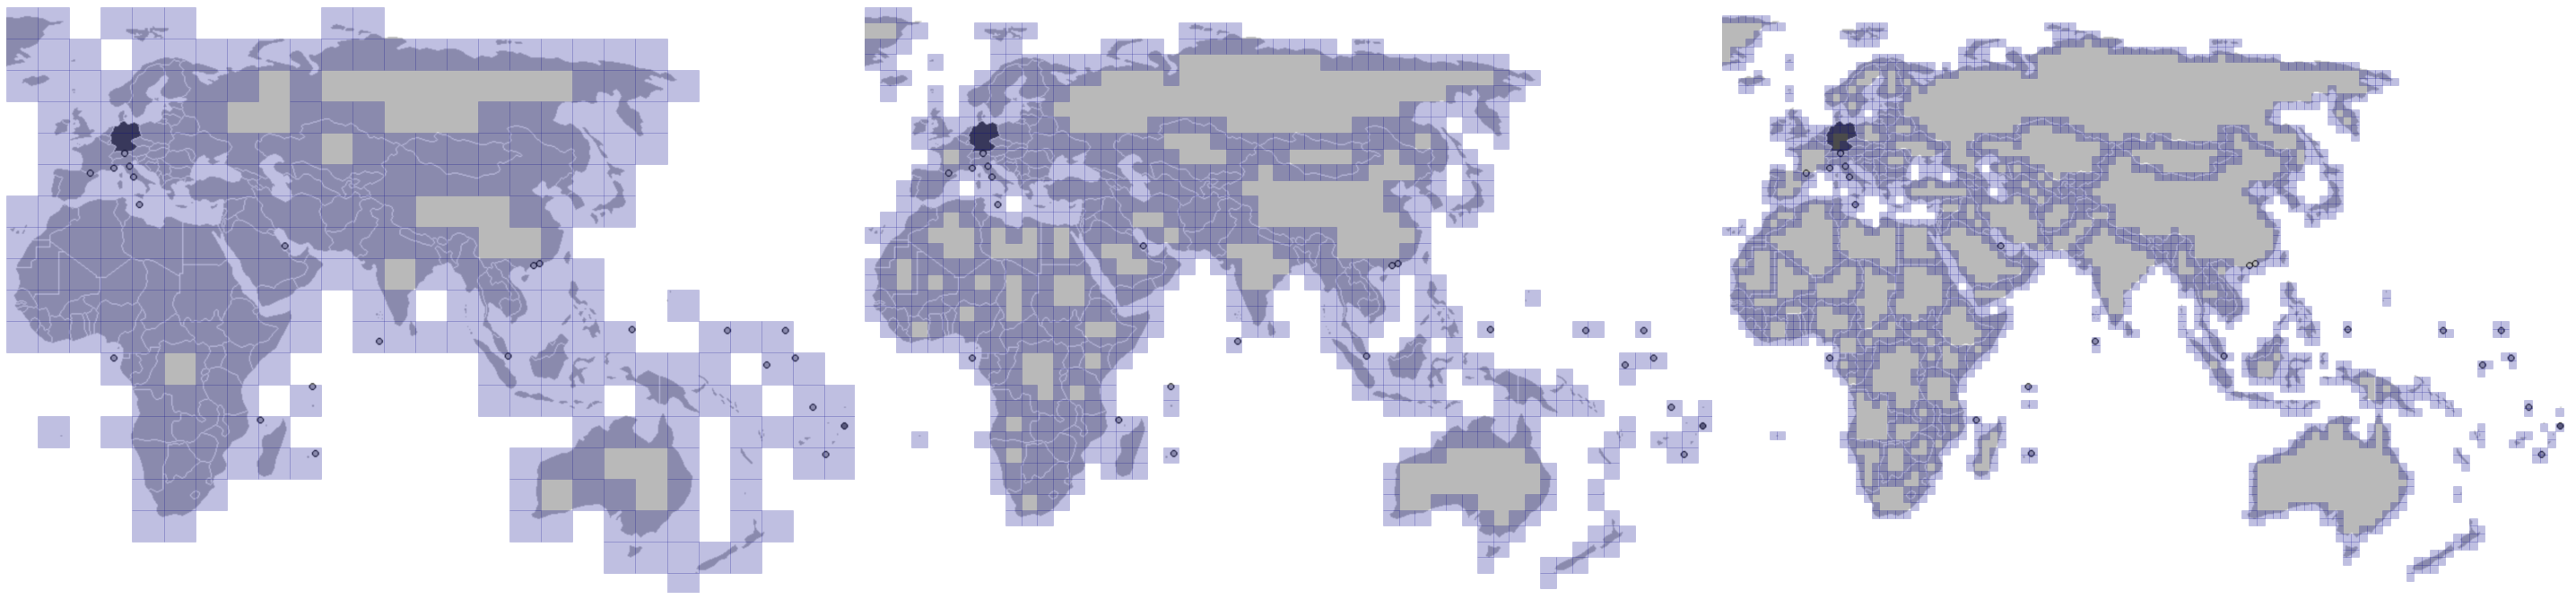

The Fractal dimension of the World is 1.44


/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


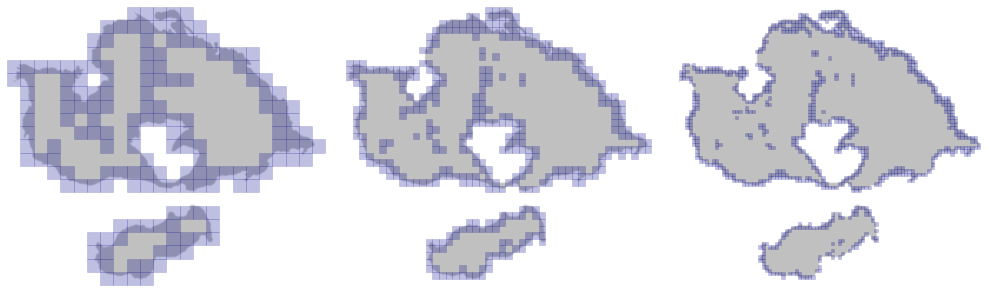

The Fractal dimension of Pangea is 1.26


In [181]:
Z = 1.0 - world/255
#sizes = 128, 64, 32
sizes = 32, 16, 8
xmin, xmax = 0, Z.shape[1]
ymin, ymax = 0, Z.shape[0]
fig = plt.figure(figsize=(40, 27))
for i, size in enumerate(sizes):
    ax = plt.subplot(1, len(sizes), i+1, frameon=False)
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size:
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size),
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25,color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show()
print("The Fractal dimension of the World is %.2f"%(fractal_dimension(Z, threshold=0.25)[0]));



Z = 1-pangea/255
#sizes = 128, 64, 32
sizes = 32, 16, 8
xmin, xmax = 0, Z.shape[1]
ymin, ymax = 0, Z.shape[0]
fig = plt.figure(figsize=(14, 11))
for i, size in enumerate(sizes):
    ax = plt.subplot(1, len(sizes), i+1, frameon=False)
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size:
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size),
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25, color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show();
print("The Fractal dimension of Pangea is %.2f"%(fractal_dimension(Z, threshold=0.25)[0]));

The Fractal dimension of the entire world's coastline has increased by 0.18 since the time of the dinosaurs. Interestingly enough, this is less than the difference between the fractal dimensions of Great Britain and Singapore. With these values being so similar, it will be interesting to compare how the fractal dimensions deviates within a single country Norway.

In [182]:
n_up =  b'/9j/4AAQSkZJRgABAQAAAQABAAD/4QBoRXhpZgAASUkqAAgAAAADABIBAwABAAAAAQAAADEBAgAQAAAAMgAAAGmHBAABAAAAQgAAAAAAAABTaG90d2VsbCAwLjI4LjQAAgACoAkAAQAAAKwFAAADoAkAAQAAAPkEAAAAAAAA/+EJ+Gh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNC40LjAtRXhpdjIiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIgeG1sbnM6dGlmZj0iaHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8iIGV4aWY6UGl4ZWxYRGltZW5zaW9uPSIxNDUyIiBleGlmOlBpeGVsWURpbWVuc2lvbj0iMTI3MyIgdGlmZjpJbWFnZVdpZHRoPSIxNDUyIiB0aWZmOkltYWdlSGVpZ2h0PSIxMjczIiB0aWZmOk9yaWVudGF0aW9uPSIxIi8+IDwvcmRmOlJERj4gPC94OnhtcG1ldGE+ICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgPD94cGFja2V0IGVuZD0idyI/Pv/bAEMAAwICAwICAwMDAwQDAwQFCAUFBAQFCgcHBggMCgwMCwoLCw0OEhANDhEOCwsQFhARExQVFRUMDxcYFhQYEhQVFP/bAEMBAwQEBQQFCQUFCRQNCw0UFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFP/AABEIBPkFrAMBIgACEQEDEQH/xAAfAAABBQEBAQEBAQAAAAAAAAAAAQIDBAUGBwgJCgv/xAC1EAACAQMDAgQDBQUEBAAAAX0BAgMABBEFEiExQQYTUWEHInEUMoGRoQgjQrHBFVLR8CQzYnKCCQoWFxgZGiUmJygpKjQ1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoOEhYaHiImKkpOUlZaXmJmaoqOkpaanqKmqsrO0tba3uLm6wsPExcbHyMnK0tPU1dbX2Nna4eLj5OXm5+jp6vHy8/T19vf4+fr/xAAfAQADAQEBAQEBAQEBAAAAAAAAAQIDBAUGBwgJCgv/xAC1EQACAQIEBAMEBwUEBAABAncAAQIDEQQFITEGEkFRB2FxEyIygQgUQpGhscEJIzNS8BVictEKFiQ04SXxFxgZGiYnKCkqNTY3ODk6Q0RFRkdISUpTVFVWV1hZWmNkZWZnaGlqc3R1dnd4eXqCg4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2dri4+Tl5ufo6ery8/T19vf4+fr/2gAMAwEAAhEDEQA/AP1TooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKSloAKKKKACiikoAK5vw78RND8VeIdc0XTbs3F/ozrHdrsIVWORgE9cFSD7iuN/aE8BeIPF3h6y1LwtqV1Za3ozyXEMNrKYzOGUBgCOd+B8vY5IPXj4a03xPrvhu4vfsGqX+mXFxlLloJnikfB5DEEHrnINAH6c+cnm+VvXzdu7Zn5sdM49KfXy/8AsU6bLPB4s1+6keaSWSG2EspySVDM+Sf95Pyr6ae7gjtXuWmjW3RS7TMwCKo5JJ6YHrQBNRWD4M8caL8QNIbU9CvVvrNZngZwpUq69QQQCOCCPZga3qACiiigAooooAKKKKACiiigAooooAKKKw/+Ez0keMW8LvcrHrH2RL1IXIHmRszqdvPJXYSR6EHnnABuUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUlAC0UlAoAWiiigAr5++KPxe074h6T4s8I+FNSvrbXdNga8W7t8pHceQwaWNHU7s4BwcAHHB9fedQtje2NzbrK0LTRtGJF6pkEZH0r88/iL8KvFXwZ1ILfbo7W5Dww6jZSERzqRhkJGCCR1Vuoz1FAHvX7N3xn8U/EDXtM8PXU9qLHSrGSS7nm3SXV7g7U+YnggspJ77Tk8jH0zXhX7HNisPwqkumsYbeWa/lC3KLh7iMBcFj3w29R24+te7UAFFFFAGB418d6J8PdFbVddvVsrQMEX5SzyOeiqo5J4/xryzxB+0Tpfi34c+J7vwVqy2GvabCJ0TUYlRygYbmRWJVvlyAOeSMjkZ5n9sr4hf2bpdj4SjsYZXvkF3LdTormJAxAEeejEg5bsOB14+RKAPr74R/tdW+u3kemeMY7bSmWAkaqrERyyDsyY+XIyc5xkYwMiuS/aS8EeHPE+it8SfB95b3duZxBqa2p+UuTgSkdVYsQDnruU+pPzdV6w1y/0u1vbW1upYba9j8q5hVjslUHIDDocEAj0oA3NJ+JviDQ/A2oeErG7FtpN/cfaLjy1xIxKhWTd/dYKuR7ehIMWs/EbX9b0rTtLl1CWDTLC0Wzis7Z2jiKDqWUHDM3cnrXNV7Z+z18P/h94xvoT4l1x/7U88RxaHIPJSckjbiTOXz/AHRtOR3HUA9z/Y60i90v4UTy3du0Ed9qMt1bs3WSPy403Y9Mo31r3SobS1hsLWG2tokgt4UEccUahVRQMAADoAK8v1L9o7wvbfEPS/CVi7apc3dwtrLd27jyIJGOFXd/GcnBxwM9c5AAPVqKSloAKKKKACiiigAooooAKKSigDxP9oH9oSf4Rahpml6ZYW99qNzH9plN0W2JDuKgAKQdxKtznA29Dnj5h8W/FLW/ih8U9K1+xtV07Vw8FtZQ2zkkOH+QbuMks1d3+2tAy/ErR5jjY+kIg9ciaYn/ANCFeFaHrd54c1iz1TT5fIvrSVZoZNobawOQcEEH8aAP1Epa+LvCX7Y3iqz122bX4bO/0lmCzpBB5cqqerIQcZHXB4PTjqPdPEn7U3w/0HTxPb6o2sXDx747WyhYseOAxYAL7gnI9KAPXK4X4i/Grwt8Lrqytdcu5Furoblht4/MdEzjewHRc59zg4Bwa+Q/h98bbq1+NcXi/wAR390LKZ5zcwxMzqqNG4jjC/3VbZgf7INcL8QPGt78QvF+pa7fEiW6kJSLORFGOEQewGB78nvQB+k+l6na61p1tf2M6XVncxrLDNGcq6kZBFWq8g/ZTtb60+DGlC9Dosk00lurqQREXJHXsTuI9iK9foAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+Of2nPjOuuazZWXhbxLfwpp8ksN3a26PbqJlJXeJBgtxlcdBjI6mvsavl745WHwc8OfECW68R2Or3OsXKC4ubPSziJy2MM2WXDEDPysO5PJ5APOPgf8AHvUvDfjWB/Fev63qWjNE8flPO9wEc42sVYkkDB4HPPSvpnwX+0X4N8e+JI9E0ue7N5KpaIzWxVHx1APODjnkAV8r/Cz4ieEfBPxkufECaZLYeHBHMtrbSf6TNDkDaVJ6McHvwGIye/0L4Z/ah8EeI/FttY6do2qrd3jeW179iQ4HXLbGZyuepxx1PFAHuVFFFABWfrmgab4l06Sw1axt9RsnILQXMYdCQcg4PcVR8d+JLnwj4T1HV7PSrjWrm2j3R2NqMvIxIA6AnAzk4BOAeK+VoP2zPGOl6vPHq2gaa0aOVezCSwSx46ruLNg/VaAPrjQ9D0/w1pVvpul2kVjYW4Iit4Vwq5JJx9SSfxq/XCfCD4s2Pxe8NS6pa2r2E0ExgntJHDlGwCCCAMgg9cDofSum8U623hvw3qmqrbPeGytpLjyI2AZ9qk4yeB0//XQBq0V5R8C/jxb/ABji1GGTTjpWpWW12hWQyI8bcBg2BggjBH098er0AeJfHn9n26+L/iHRNQtNUh05baJra585C58vduVkA6tkkEEjtzWx4Z/Z28AeCfD11b3WmwaissTLdX+qEM+3HJDcCMe64I9eM13XjbxLF4N8IaxrcoDLYWsk4Q/xsB8q/icD8a+ZtZ8TQftVeEmsrW8n0XxjpsRlXRftB+x6gBySin+Ic4zyM4ORyADyb426b4C0jxDDaeBLie7gRWN1MZ/Ng3Z4WMkZOBnLZIORjoa85p0sTwSvHIpSRCVZWGCCOoq94c0tdc8QaZp0ky26Xl1FbtK7BQgdwpYk8ADOcmgDPruvgnqGg6P8StG1HxFqMumWFlKLhZY4TIDIvKq2OQpPUgH04zkd948/ZF8W6PrbR+F4P+Eg0l13xzPPDDIn+y4dlyfdeD7dK0Phl+yBresahO/jRZdDsIhhIrWeKSeZjjoRvVVHqcnPbvQB3Hx0/af0M+ErrSPB+pG+1O+UwyXcSOiW8Z+8QzAZYjgY6ZznIFed/s8/AfxNfeOdG1/VdKm0vRrCVbwSXibGldeYwiH5uuDuxjA69M+v6H+x74R0LxDYamuoaneRWk6zi0u2jZJCvIDFUGRnB9wMd693oAWiiigAooqn/bFgNRGnm9tvt5UuLXzV80qOp25zj3xQBcooooAKgvlmeynW2cR3BjYRuRkK2ODj61PXl/jD9orwj4F8a/8ACNatJdxXCIrzXUcO+GEsAVVsHdnBzwp6igD5K0n9ov4j+Hb+dm8Q3Fw7SMZbfUI1lUNk5XDDKDPZcY6V6n4Y/bcuo9sfiHw5FMP4p9NlKEf9s3zn/voVofH/AOFPhvx54UvPH3gqe1ubq3BnvhYSBo7hOruQD8sij5j0JAbIzXydQB9oftLW/hbxt8GoPGYia5uVjiOm3MUmxh5rrlXHIIHOVPIIIBHNfF9e/v8AEHQNS/ZKHh65vkTXbO7EENpuUyufP80OF67PLZl3eox3wfAKACiiigAra8F/2evivS5NVmjg06GYTXDSxearInzFdnG4tt2gZ5LCsWnwymGVJFClkYMA6hhkeoPBHsaAP0ivPiRovh3wJY+JdakXRLK4t45kt5eZBuUMsYUdXx2HTB7DNcdZ/tX/AA2uv9ZrFxaf9drGY/8AoKtXxd43+IOu/ETVBf65fPdyIu2KMDbFEvoiDhf6965ygD9PvDXijSvGOkRapo19FqFhKSqzRZxkHBBB5B9jWrXx5+xTe6ufF+t2kU7f2ILPzZ4GPyCYuoRgOzYDj6DnoMfYdABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRSZooAWiiigArm/HngHR/iHoNxpurWUNzujcQzOgLwORgOjdQRx0645rpKKAPz48CfAnxB4i+I9v4a1fTb/SoEkb7ZdGAhY41BJKsRtO7ACnkHcDyK+pPgt+znpvwq1C71K6mTVtWErraXgVkMUBUDBXcV3HnJx3617HRQAUUUlAHlP7TMniWH4V3kvhqWeKVJVa9Nrnzfs2G37SOQM7Scfw57Zr4EeRpXLOxdj1LHJNfqVf2z3ljcwRzNbSSxsizIAWjJBAYZ7jrXwt8Zf2bta+GCSanZyNrXh8ffu1TEkBP/PRfTP8AEOPXGQCAYfwE8QeJtH+JGkW/ht7iRru5jW6s42Plzwg/PvHTAUsdx+7yRX2R8ddbgh+Ffim1g1G0hvpbGWNYpbhUZwRh1AJySV3ADueK/PNJXi3bHZNylTtOMg9RXUeAfh7e+O9UghSaHTdOM6QTaneOEhiZj8q5P3nPZRyfYZIAPob9iPw9Pb2HifXpo9ltM0VpBI38RTc0n4fNH+vpX0R4T8Z6N450+e+0O+S/tYbh7V5YwQBImMgZHIwQQRwQRXkXxxvrP4I/AiPw/oK/Z2u8abE38eGDNNKf9ogNz2LjFeEfsw/FN/AHjqLTrycromrsIJlZvkilPEcntz8p9myegoA+zfiJ4aPjHwLruir/AK29s5IoucYk2/If++gK/NzTtRv/AA1rEN5aTS2Go2cu5JF+V43U/wCeDX6i1+dnxxjhvfjP4oi02Ddv1BolihXJaXhXwB1Jfd+JoA7/AMF/Bb/hoqa68WQ6nBoXm3Bj1K2S3Ln7SFVneMbgNr7t3JGGLDkAGvoPRv2aPh7pOjx2Emgx6iy8vd3bsZpD6llIx06DA9qxvh5aWv7OPwJ+3a+rJdZN5dQR4LtPJtVIh7gBFPYYY9BXmWi/tla3qnjbTYbnStOsPD810kUyje8yRsdpYyFgCVzn7o6YoA+rdL0y20XTLTT7OLybO0hSCGPJOxFUKoyck4AHWrVePfG/9onTvhOzaXa2x1HxFJCJY4WGIIgSQGkbOexO0cn1Gc1p/AL4ut8XPCU13dxRW+r2cxhu4oAQnPKOoJJAIyOSeVNAHp1FFFABRSV89ftHftFDwak/hjw1OG15123V4nIs1I+6v/TQj/vn69ACt+0l+0WfC/2nwp4Yn/4nBGy9v4z/AMeoI5RD/wA9MHk/w/733fnz4J/EbUPh98Q7PULWKO8N64s7mOfrIjuucP1U5AOfbnNcBJI80jPIxd2JZmY5JJ6kmrOkabda1qtnYWSNLeXUyQwovUuxAUfmRQB+pFFNjVkjVWbewABYjGT606gAr86/j59qPxj8Vm7heGQ3rbVkGCY8AIw9ioUj2NfonXmfxc+AegfFxoLq6kl03VYF2LfWygs6dldT94AnI6EetAHwNpWt6hocskmn3s9k8iGOQwSFd6EYKtjqCCRg8VSwcZxx619Ga5+xP4ktpP8AiU67puoRZ63Svbvj1wA4/WuN+J/wS8UeGr2e2ttHubnRNDsY2k1NI9sUpKCSaQEn5sO7DjkKgB6UAeS0UUUAFFFFABRRRQAUUV6X4A+AusfEnS7a90bWdDLSuyPZzXbLcwYOCXQIeMfMME8e/FAHvn7FvhJtN8Hav4gl+9qlwsMQx0jiyM/izsP+Aivoyub+HHg9PAPgbRtAR1lNlAEkkQYV5CSzsB6FmY/jXSUAFFZut+JdI8MwJNq+q2WlROSEe9uEhVj6AsRmuK1L9on4c6VnzvFVpJj/AJ9kkn/9AU0Aej0V4pL+158PI7pIluNQljY4M6WZ2L7nJDfkDXslhfW+p2NveWsqz2txGs0UqHKujDKsPYgg0AT0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUleK/Fb9pDTfh54t0zTba5s9RjinMWsWixSm4gUgFWjcYjyOcqcnoOOSHaV8Z9FtvjBDo9r4hi1jRfEdslxbssokWyuvuiIH+FZFUHYeQ/YbqAOS/a+8R694Q1TwbqujapdaeFNwCIJiql1MZG5c4YEEjkEYyDXtfwz+Imm/E7wpa6zp0i7mAS5t8/NbzYG5D+fB7gg149+2vojXfgnQtVV8CyvmhaP1EqZz+BjH5mvPP2PdcufD/AI1ubObTb2S01qAJFcxQFo1eMk5ZugXBcE+uPwAPs+iiigAooooAKKKKAPlr9oT9pu90vUb/AMK+FfMsrm2cwXmptw6sOGSIdsdN5/Dsa0/2VvjZb6tYW3g7WLy9uteaWaW2nuBvWSPBkKlyxYsMOeQOOO1fMfxNvotT+JHiu7glE9vNqt1JFIDkMhmYqR7YxVTwb4v1HwH4lstd0p40v7QsYzKm9fmQowI91YigD9G/HmqPongfxDqEc/2aS10+4mSYdUZY2II98gV+eU3xQ8WXPhq88P3GvXl3pF2ytNbXMnm52kEYZssoyoOAQDivq34TftAaP8bLWfwj4p0+G11O9heMxIT9nvFwdwXJ3IwGTjJ6ZBzwPk34jeGYvBnjrXNEgm+0QWN28UcmckqD8oPuBgH3BoA5yjJxjPFFFAHX+KPiv4m8aeHbPRtc1D+0rWzlEsEk0a+amFK43gAsCDzuyeBzXIhirAgkEdCKSigD9LvCXiyLWPh5pXiKd/3cunR3czD+E+WGcfgQR+FfEXwx+LGl+Dde8T+I9U0ddS1+7R5tMuGXcLa5ZmJJBPAO7JbBPy4GNxroPEvx61Lwv4Nt/AOhpp8umJo8dnd3ZVnkM0sYM+xgwAwXZeh5BPpjw6gDqNX+JOva74TXw/f3ZubIahJqZd8mRpnHOTnGMl26dXauXoooA0dT1XU/FWrfab2efUtQmCRB3y8j7VCKPfgAV9r/ALMfweuvhp4bm1LUppU1TWY43msWXatuq7iinuXwxz0xnGOMnkf2O/hdHZaTP401C3DXV0Wg0/ePuRA4eQe7HK59FPZq+maACiikYhQSSABySaAPPfjp8UIvhX4Fub+NlbVbnNvYRNzmUj75H91RyfwHevzzuLiW7uJZ55HmmlYu8jnLMxOSST1JNerftMfEuP4i/EORLG4E+j6Wn2W1ZGykjZzJIPqcDI6hFNeS0AFfR37IGn+GrdvFHiPW/syXOjLDJFc3JwLZGEm5x2ycAZ6jjHXn5xrZ8H6FeeK/EenaDZyOkmpXEduducYLD5mHcL978KAP0x03UbbV9Otb6zlWe0uoknhlXo6MAysPqCDVmqWiaTb6Bo1hpdoCLWyt47aIMckIihVz+AFXaACkpaKACorm2hvLaW3uIknglQpJFIoZXUjBUg8EEcYrwL9sH4g3/hXwxo2laVfT6fd6jcPJJNbSGN/KjAyuRyAWden90184eH/2gPiB4aCrbeJ7yeNePLvSLkY9P3gJH4GgC/8AtIJ4XX4nXTeFZbeS0aGM3C2aqLdJsYIjK8EYCk44yTXl1dFrniaw8QhpJvD9lpt4f+W2kloEY+rREsv4IErnaACitbTvCet6vp8t/Y6RfXllE4R7iC3d0Vj0BIGM11Hhj4FeOPFGoWsEfhzULKCaRUa7vLZ4o41JGXJYDIAOeM9OKAOBor1/4i/s6+IPD/iy80zw5pGra1YWlrFNJetD8sjFAX2EAA/NkBRk8Y5ryOWJ4JHjkRo5EJVkYYKkdQR2oASSNojh1ZSQDhhjjtX2B8A/2af+ET1+w8XahrNpqsKwCfT1sQ+x/MTiRiwHG1uBjuD2qH9k2HxN4i8OXMGvxRXvg+3TyrGPUbYSMzk5IjZv+WYAwc5GSAMYNfSNraw2NvHb28MdvBEoVIolCqgHQADgCgCUVn+Ides/C+h32rahL5NlZwtNK/faBnA9SegHckVoV83ftn+Ov7O8OaZ4Vt5cTai/2q5VT/yxQ/KD7M/P/bM0AfNHxL+Iup/E7xVdaxqMjBWYrb2wbKW8X8KL/U9zk1ytFFAFzR9XudC1KC/szEtzAdyGaFJlBxjlHBU9e4Nerad+1j8QtPjjj+22M8cYVVSSxjUADthAuB/kYrx2igD9D/gb8VR8WvBS6lLb/ZdQtpPs15Go/dmQAHcn+yQQcdjkc4yfRK+L/wBlv426H8OodU0XxDKbGzu5Rcw3oRnVXwFKMFBIBABBxgYOa+ufDXi7RfGNk13omqWuqW6ttd7aQPsbrhh1B9jQBr0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRTXdY0Z2YKqjJYnAA9arQatZXWnf2hBeQTWO1n+0xyq0e0ZydwOMDB/KgC3VXUtUs9Gs5Lu/u4LK1jGXnuJBGi/VjwK53wR8VPC3xGa5Tw/q0d9LbH95EUaNwM/e2uASvuOKyfj14Jn8ffC3WdMtAWvkQXVug5LvGd23HcsAyj3IoA6DwV450z4gaddaho7PNp8Ny9slyy7VnKhSWQdduSRk4yVPbBPQ1+cHwt+Id78OPF2n332y/h06CfzLqytZCBOACCrISFOemT069RX3D8F/ir/AMLe8LXOsf2W+leTdva+U0vmBsKrBg2B2YA8dRQB5b+0R+zXfeNtan8UeGnifUJYx9r0+U7DMyrgNG3TcQACDjpnOTXx/HI8MiyRsyOpDKynBBHQg19r/Er9ouK10zxVpvh+5GleKdCuQohv40K3caOBIYyTg8ZODhsDj2+Q/GXio+MtXGotpWmaPIY1R4dKt/IidhnLlcn5jnnHpQBt+Kfit41+JGjRaZqupXGp2FkonMSQqMbBt8yRlXJwDyWPf1r60/ZcvPE+p/DXTLrVryym0cRtBYRJARcBY3KDe4bbgbWAG3PQk15H+xVpDz+K/EN5LblrY6f9n3PHlG3SKSuen8PIr6607TLPR7KKzsLSCxtIgRHb20YjjQE5OFAAHJJ/GgCxUF5f22nQ+dd3EVrFnHmTOEXPpk1PXxb+2D8QovEfjO08PWU3m2ujKwn2n5TcNjcPfaoUexLD1oA+wdO8SaTrFxJb2GqWV7cRjc8VtcJIyjOMkAkjmtGvhL9k68XT/izHcS24e2Sxn866eQRx2i4B8xyeMcbOe7j0r7VsfGnh/UrmO2tNd0y6uJDhIYLyN3b6AHJoA2abIiyoyMMqwwR6ilpaAPjvxR+xb4iTVr2TQNU0ybTCxe3ju5ZEnC9QhwjKSOmd3PXivIvFPwd8Z+Drkw6n4dvkGcLNBGZom+jpkfhnPtX6Q0hoA/LxotS8MarEzx3Ol6lbOsqb1aKWJgcqwzgg9DUGo6hc6tf3N7eTNcXdzI000znLO7HLMfckmvtb9pn4G3vxNtLLWNCSOTXLFDE0DuE+0Q5yFBPAZSTjOAdx56V8WarpN7oeoT2GoWstlewNtlgnQo6H3BoAqUUUUAFFFFABRRRQAV9MfBv9lHS/GHhzSvEeta5JcWd5GJlsbBdmOSCrSHPORggAdDzXzQql2CqCzE4AA5Jr9Bv2dPCGpeC/hRpVjqvmJdyl7o28nW3V23KnscckdixoA9D03TrXSLC3sbKBLWzt4xFFDEMKigYAAqzRRQAV83ftefFm68O6fbeEdLnaC51CEzXsyHDLASVCAjpuIbPsMd69z8Z+ONE+H+inVdevRY2XmCIOUZyznOFCqCSeD27E18C/G7x/B8SviPqetWYddPOyC1Egw3looGSO2TubHbdQBwlFFFABXs/7I+lx6h8ZbSaQBjZWk9wmf720J/7Oa8Yr6Z/Yx8AXU+tah4vmZ4rK3jaytwOPOkbBc/RRj8WHoaAPrmlpKWgBKM1S1vWLbw/o19qd4/l2lnA9xK3oqqSf5V+fPib47eOPEmtXd+PEmqabHNIzpaWN5JDFEp6KApHAAHJ68nqTQB9Bftd/C7WvFUFl4l00xT2elWkou4JJVjaNAd5kXdgNxnIzngYBzXx9W9ceP/E13ZXVnceIdUuLS6XZNBNeSOkgyDggnB5FYNABRRRQB7V+zn421fwTdXeo3GuxaX4MtX339vc4f7TIykLHDH94yHaOVwAFyxxwfWNP/bZ0CfWXhu/D9/a6YThLpJEkk+rR8ADp0Y9+tfHuTjHaigD9Q9A12x8T6NZ6rps/2mwu4xLDLtK7lPsQCPoazdS+HXhXWtSOoX/hvSb2+J3NcT2UbuxxgFiRk+2elfnHZ6xrV0lrplrfX0iFhHBaRTORuZuFVQepY9AOpr9F/hp4f1Lwt4D0XS9Xv5NR1K3twJ55W3HcedgbuFztB7hRQB0kUSW8SRRIscaKFVEGAoHQAdhTq5bw78T/AA34s8TanoGlakt5qWmruuERTtGG2naxGGwcA4yBkV1VAHOfEDxzp3w58KXuu6m37i3XCRKfmmkP3Y19yfyGSeAa/Ovxt4y1Hx94nvtc1STfdXT7toztjX+FF9FAwB+vNfSv7b+oX66f4XsVjI0ySWad5OzSqFVR7YVn+uT6Gvk6gAooooAKKKKAJ7GxuNTvYLS0gkubqdxHFDEpZnYnAAA6mvu39m/4OXHwp8M3cuqMh1vU2R7iONsrCig7I89CRuYkjjnHOMn4q8B+INU8MeLdNv8AR7+LTdQEojjurgAxR7/lJfII24JzweK+9/hlp3jKNJr3xP4rsNfhkXbbxaZbIsQweWMgALHgjHQc9ewB3tFc544+IOg/DrSTqGu6hHZxHIji+9LMR2RRyx6ew74r4/8Aix+1P4h8byS2WhPL4d0bOB5L4uZh6u4+7/ur64JNAH3HRXzJ+xz8Qdb8Qvr2iarezajBbql1DNcyNJIhY7WXcSSVOAcdjn1r6boAKK4TWfjl4D8P38tlfeJ7KK6ify5I0LSFG7g7QQK67R9ZsfEGnQ3+m3cN9ZTDdHPbuHRh7EUAXaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK8i/aP8K+NvFfhWzg8HXLL5U/mXdrBKIZpgB8pVywGFOTt75B7YoA9drM8R+I7Dwnot1q2qTPb2Fsu+aVIXlKLnGdqAnHPJxx1NfHGjfGT4l/AjWINN8UpLqVvKgm+wanciWUR5IBSQFinIIwcjjpXq/jD9pzwX4m+EuvG3nkj1W8spbRdKuIj5okkQpnPKlRnOc9B2JxQB61qGqWPxA+HeqzaFfJfW1/YTxQz2zc7mjYY7EMCehwQfSvkf4P/GrS/D/wv8VeC/EEtxbwXltcfYbqCMyFWljKtGQCMc4YduWyRxXIfBf4w6j8JPEa3EZe50e4IW9sd3Dr/fUdA47Hv071y3jSKwh8Wat/ZU6XOmPcvLayx8AxMdyDHYhSAR2IIoAg8N+IdT8K63aappF1JZ6hbvuilj659COhB6EHgjg1+k3grUdS1bwjo97rFstnqlxaxy3ECAgI5UEjB6fTt0r8+Pg/4r0rwR8RtH1vWbNr3T7V2Z0RA7KxRgrhSQCVYg/hkcgV7j8Of2hda1bXPiV4hnMk9lb6abyx06VyY4NjhI1x2zvBYjGefagDyX9o2xjsPjT4nSK1NnE86ShMEBi0alnH+8xY/jXunwZ+NVpo/wAAdTbT9Mt21jwzDl7BH8sTozD9+epP3iW91PTcK+efij8WNS+LV/Y32rWNha3trE0Pm2KOnmJnIDBmboS2MY+9XFLI6K6qxUONrAHAYZBwfXkA/hQBoeJfEN54s8QahrN+yte30zTybBhQWOcAdgOg9hXv+hfsgy+K/Aeh6xa6wdL1O7tFmms7uEshLElSGBBX5SvGDzmvnWGwubi2nuYraaS3gwJZUQlI85xuI4GcHGfSvv8A/Z0t9dj+FOjTa/ez3VxPHvginVQYIBxGoIAJyoDZYk/NjtQB2fg3w7b+FPC+m6VbWdtYJbQqrW9mSYlfq+0sASCxJyeTnJ5raopkk0cW3e6puYKu44yT0A96AHV+dfxt8Aav4B8falDqatLHezyXVtd9VuEZyc5/vDOCOx9iCf0Ur4o/bJbVh8S7SO9njk077Er2EcYx5akkPu9WLKefTb6UAeDLI6K4ViocbWAOAwyDg/iAfwpYJ5bWeOaGRopo2DpIjFWVgcggjoQe9MooA+8v2Z/i3dfE/wAIXMOqusms6U6RTygYMyMDskI/vHawOO654zivYa+Jf2Q/HOleFPHN7p+pyfZ21iKOC2nY4TzQxIQ/72eCe4A719s0AeQftAfHlfhFZWdpp0Nvfa/dnesFxkxxRA8u4Ug89AMjoT2weI0/9tzR2tLX7d4cvUuiALjyJUaNT6pnBPrg49MnrXiX7S17Je/GzxKZJfMEUkUSc5CqsSDA/HP45rzCgD9Q9A16x8T6NZ6rplwt1YXcYlilXowPt2I6EHkEEGvkP9q/4PX2h+I7vxnYoZ9H1B1NyFyTbTEAZP8AssRkHsSRx8uaX7Lvxs/4QfWx4b1ifGg6jKPKlkPFrOeAc9kbgHsDg8fNn6t+LAtZPhf4rF4R9mOl3JY/9s2xj3zjHvQB+bFFFFABRRRQAUoBYgAEk8ACkr6k/Y2+Gkjz3/jHULRTb7Ps2nmVc7m3AySKD0xtChh3LDtQBv8A7KnwUh0fRD4p8QaYp1S5fNjFeRfNbRr/AMtAGGVZjnB64AI+9X0hRRQAUUUUAfKX7b3iFjP4Y0JHIQLLeypnqSQkZ/DEn518s169+1Zr39t/GbVIg++LT4YbNDnphd7D8Gdq8hoAKvaLoWo+JNSh0/SrKfUL2U4SC3Qux98DoPU9BVSExiVDKrPEGBZUbaSO4BIOD74Ney3nx+s/COiHRvhroS+G4ZUAudVu9st9Mcc/NyBznHX1AXpQB6R8Kf2PIoPJ1HxvMJpOGXSbZ/lHtLIOv0Xj/aPSvpnTNLs9GsYbKwtYbKzhXbHBAgREHoAOBX5y6R8XvGuh6ib608UaoLk/eM1y0ytznlXyp79R3Nfan7PHxL1T4o+Am1LV7eOO8trprRp4htWfaqtvC9vv4OOMg4x0AB6hRRRQBR1zRLLxJpF3pepQC6sbuMxTQsSAyntkcj6ivz3+N/grRfh/8Qr3RdCv5b61hVWcS4LQSHkxlhw2BjnHfB5Br9Ebnzfs0vkbfO2HZu6bscZ9s1+YXiK01Gw17UbfWFlTVY7hxdCc5fzdx3EnuScnPegDOooooAKKKKACvafgj+zZqHxRtzq2pzy6PoHSKVYwZbo5wdgPAUc/Mc88AHnEHwi/Zq8Q/ES6s73UoJdG8NyASm8kAEkydhGhOeezEYxzz0P0H4q+OfgT4G6JB4c0RBqdzYp5UWnWUmViOST5kpyASSSfvNk8igDqPBXwG8D/AA5KXllpUct5B8/9oag3myIR/ECflQj1UCvLf2g/2mbG00qfw94N1BbrUJ8x3WpW5OyBOhWNx95j/eGQB0Oeng3xJ+Oviz4nSPHqF79k0wnjTbMlIcdt3OXP+8T7AV57QB9AfsW2fnfE7U5z92HSpMc9zLEP5A/pX2lXzX+xd4Hm07QdW8UXG5BqLC2tkPRo0J3P75Y7f+AGvpSgDyX4mfGP4dWus3ngjxazSo8INwz2xlgiLDKglcsr4IYEDjIORXw34ps9O0/xHqVtpF4dQ0qO4dbW6IIMkWflJBA5xjPA5rY+LWrDXPif4pvVfzI5NSnEbZzlFcqv/joFcnQAUUUUAFFFFAHovwM+Flt8WvF0+lXeoyadBb2rXTtFFvZ1DKpAJ4X7w5P5Vf8AH/xo1ldQfQvCmtXml+FNMQWNjHZzGJpo0+XzHdcFi/J7DBHFcF4f8Xax4UF+NJv5bH7fbta3Bixl42IJHt06jmsigCe9v7nUpzPd3Et1Meskzl2P4moKK0PD+iXXiXXLDSbJN93ezpbxKem5iACfQDOSewoA+jf2INMnbWPFGoji1SCG3OR952ZmGD7BT/30K7v9qT41f8IRoZ8N6RPt13UYz5ssbfNawHgn2ZuQPQZPHFdB4d1L4f8A7PHg+PRp9dso7mEGW6CuHubibHzMY1y3sAegAGe9fEnjrxVP438YavrtwW331w0qq3VEzhF/4CoUfhQBhV6b8DPi14g+HXie0s9MVtSsdQuEhl0pm+WV2YKCn91+gB79815lXvHwD8d/C3wILbUdbsdSXxNGWH2yVRPBHnjdGq4KnHqpI5weaAPtqlrmvBHxF8O/Eaxlu/D2px38cLBZVCsjxk9NysARnnBxg4OK6SgBaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAprZCnaAWxwCcDNOooA+QdL/Zq8ZfErx7reo+PJ5NLRyXF1C8c3nMThVjAbhAvqBjgY647m2/Yv8F2aGW91jWZUQbmPnRRoAByT+7P1619C1518d/Gnh7wj8PNTj14R3Iv4JLe309id1y+3gccgA4Jbtx3xkA+KPiwnguz8Qiw8Epcy6faqUmv7mXf9pkzyU7bRjrgZye2K4iiigArU0bxDc6JaavbwBCmp2n2ObeM4TzY5Mj3zGB9CazURpXVEUs7EAKOpNfSGt/sU6zBpMNxpOu215fGMNLZ3UJhAbAyquCwPOQMgfWgD5tp8So0qCRykZYBnVdxA7nHetSfwnq8C6wxsJZYtIl8i+lhxJHAxYqNzLkYJUgHOD619HfCf4P6D8ctLsvFepaMPDrW9z5M1vpqiO01EJj5xHj93/dbbwSDjBzQBhfDP4N+M/h58cNHs1e4XSJXMkmp2gP2W6tgpco3UfNgLtPIJyOxr7Kormda+Jnhjw74ltPD+p6zb2Wr3aB4bebcAwJKj5sbQSQQASCaAOnr43/az8H6f4L17R9XsdW1WXV7+aWcR3N2ZVtwhUgxk/MvzMMc/wAPHSvqTU/iN4b0bxXZeGr7VobbW71A8Fq4b5wSQPmxtBJBABIJ7V434s+L/wANfirqer+C/FETaeltcvBZ6tNjYJB8vmK/WM7s/e+UgDJ5xQBl/stfGHVfG3jDW7PxNrk95fz2sRsrdyqwkR7vM2oAAHwVPHJAYnOOPPf2tfDXiOy8cxa7rctpJY6hvg0+O0kd/Jhi24D7kXDHfuwM8lueKi/Z98EPYftFQaebqC+i0c3ExubZw0cyBCqOpBIwS6H9K9k/bJ8JTaz8PbLWIAXOkXO6VR2ikwpb8GCfgT6UAfFdFFafhjw5feL/ABBYaNpsXnX17KIo17ZPUn0AGST2ANAFjwT4ZuPGPizSdGtUd5Ly5jiJjXJRSw3P9FGST7V+ifjzxrpvw18IXmtX5xb2iBY4Q3zSv0SNc9yfyGT2rB8D/Dnwp8C/CdzcxrHCYIDLf6tOMyyBRlj6heOEX9Tyfjf42/GW/wDi74i8395a6JakiysmI+Ud3fHVz+nQdyQDkfGviibxr4t1bXZ4lgkv7h5/KU5EYJ4XOBnAwM45xWLRRQAV0tz8SfFN54bGgT69fS6OAB9keYldo6L67R/dzjgccVzVFABRRRQAUUV2/wAKvhJrXxZ10WWmp5NnEQbq/lU+XAv9WPZe/sMkAHV/BD9nXUPixEdVu7r+y/D8cvlmYLuluCPvLGOgA6FjwCeAcHH3Lo+kWegaVa6bp9utrZWsaxQwp0VQMAf/AF+9VPCfhmx8G+HNP0TTY/LsrKIRRg9T3LH3JJJ9ya16ACiiigBKwPHfjOw8AeFNQ13UXAgtYyyx5w0r/wAKL7scD9aseLvFNj4K8NahreovstLKIytzyx6Ko92JAHuRX58/Ev4u+IvipqPn6xdYs43LW9hD8sMGeOB3OP4jk9eg4oA5fW9XuPEGs32p3bB7q9ne4lYd3Zix/U1SoooAKKKKACv0I/Zx8P8A/CO/Brw3Ey7ZLmE3rn+95rF1P/fJUfhX58xqrSKHbYhIBbGcD1r9SNOsItL0+1soF2QW0Swxr6KoAA/IUAWaKKjuEkkgkWKTypWUhJNu7accHHfHpQB8xfHH9qbUfDPjA6H4U8gx6dKFvbqVBIJnBG6JQeijlSeuc4xjJwvGfxR+Ffxylht9Zsb/AML6w0YWPXTEjLG+PuSbWJdM+o49V5rwPxnpK6F4s1fTl1BdVFrdSRG9QcTEMQW6nqc9z9TWNQBpeI9Dl8N63eabNNBctbvtE9tIJIpV6q6MOCrAgj61m0UUAFb/AIP8WJ4QvXvBoml6xc4Ai/tWJpo4vcIGCk9OWzjHArAooA9H8WftCeO/GGnvYXmtNbWDja1vYxLAGHTBKjcR7Zx7V5xRRQAV2vwl+F+ofFfxZDpVpmG0TEl5eYysEWeT7segHc+wJDvhH8KtQ+LfikaVZyC1tok866vHUsIo846d2JOAPr2Br768CeAtG+HOgRaRolsILdPmeRuZJn7u7dyf06DA4oA0fD+hWfhjRLHSdOi8mysoVhiTOSFAxye57k9zXNfGXxt/wr/4ba3rCOEukhMNrzz5z/KhH0J3fRTXa18q/tu+IrpX8N6EqulkwkvXbB2yOPkUZ6ZUFv8AvsUAfLBJYkk5J5JPekoooAKKKKACiiigAooooAKfDNJbyCSJ2jcdGQ4I7daZRQAUUUUAFFT/AGG5+yfavs8v2Xds87Ydm703dM16P8HPgVefF57hoda0/TIYD86SOJLkjjLCEEHbyBuJAzwM84AOO8F+NNY8Ba9Bq2iXbWt5GcEDlJV7o6/xKfT8RggGv0n0C9udS0LTru9tTZXlxbRyzWzdYXZQWQ/Qkj8K8r+Hv7OPg34Uzf21dznUr63AYXuplFitz/eVeinpySSOxFR+Nv2rvA/hTzIbG5k8RXi8eXp4/dA+8p+XHuu6gD2eivFPh3+1b4U8b3wsL9X8OXjkCL7bIDDIfQSDAB/3gPrnivagc9ORQAtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8D/tH+K5/Hvxjv7S3dpYLCVdMtY88blOH/ADkLc+gHpX3xXy38Of2VtatfiMfEHim8tja2l6byKO3bc91IHLKx/urnBI5J6e9AHk/7Q3hMeH/iVb6HpujfZIYLG1trcwR83pCAGXA6sTlT3+XmovB/wV1JPjDofhDxRYS2oux58qJIPmhEbOSHHH8JH1BFffzRI7qzIpZeVJHI7cVBNplncX1vey2sMl5bhlhuGjBkjDcMFbqAeMjvgUAfIOg/soT3HxR1zQdQnvbbQ7W2F1ZapAo/ebpFCKSRjdtEgOMcrnoRn7GUbVAGTgYyetOooA4n4d/CbR/h1pWr2FqXv49TuXuLhrxVYuGGBGeMFQM9euT612FpZwafbR29rBHbW8Y2pFCgRFHoAOAKmrzn4z/GbT/hDo9vPNEL/ULqTy4rJJQsgXax8wg/whlAP+9QBB8V/j94b+FUbW88n9p60RldMtnG5feRuQg+uT6A14l+1Z4m8F+LdA8N6nbvM3ie6tI7iBYSpEds+HCT88H5m2gc53Z4NfNd1dTX1zLcXEjTTzOXkkc5ZmJyST9ajznrQB7V+0XrCXll8N5JYQuvN4dtrq6vQzeY4YDYD7gq59ctXjupajc6vf3F7eStPd3DmSWVurseSx9yec1u/EHxtJ4912HUHthZpDZwWcUCvuCLHGF64HU5PTjOK5mgD039nj4k2Hwv+Ia6nqnmDTrm1eznkiTe0YZlYNjqRuRc45xnrX3N5ujfE3wTL9mnS/0XV7V4xMg+8jAqeDyCDng8gj1FfmZX6M/A/wAQW/if4U+G721s/sEItRb+QowqtGTG23/ZJUkd/XmgD5V8S/sieNtH1C4TTxZ6rpyAst59oSD5f9pXPykd+SPeu8/Z70vwB8LdWu7rV/GujXniR0EAEcuILVT94LK2FcnjLDgYx3Nc7+1r8XJtd8RN4Q0y5K6Xpx/03ym4nuO6nHUJ0x/eznoK+dqAP0+t9R0XxbYTQwXVhrNlMhWSOORJ43Q8EMASCD715H47/ZJ8HeJoZ5tHSXw7qBBKG3Ytblu26Ns4HspWviCKaSCRZInaOReQyHBH413Xg745+NvBF4k1lr11dQjhrO/kaeBh6bWPy/VSD70Acp4j8PX3hTXb7SNShMF9ZymKVD6juD3BGCD3BBrNr3HxzrejftA6Rf8AiOJI/D/jDRrIzXdkx3RahAmMujcEOuTwQTggZOMjw6gAooooAKKKKANnwdpFhrviSxs9U1GPSdMZ911eSHHlxDlto7sQMAAHJI4r6H1H9qLw38O9Cj8P/DfQA9tBkLeXwKRs3d9md7k+rFT7V4L8PLzwzaeJIv8AhLtPmv8ARZEZJPs0jJLE2Mq64IzyMEHsfauz1vWPgyvy6Z4f8UTFT96S8jhDf+h8fhQB9ffBP4iTfE/4f2WtXVo1pd7mgmG3EcjpgF4/9k/oQRzjNd5XI/CfVtC1n4eaHP4cQQ6StssUcGctCVGGRv8AaBzk9+veuuoAKKK4j4xfEeD4X+BL7WGKNekeRZQv/wAtJ2B28dwOWPspoA+df2wfimdX1qHwbp8xNnYMJr4oeJJyPlT6IDn6t6rXzbU15eT6jeT3VzK89zPI0ssrnLO7HLMT3JJJqGgAooooAKKKKAPW/wBl7wRYeOPipBHqSLNa6dbvqBgb7srI6KoPqAzhsd9uDxX3uK+Fv2TNH1u7+LFpqGmwsdPs45BqEzcRiN0YBSe7FsED/Zz0Br7poAWqesaZFrekX2nXBYQXcD28hQ4ba6lTg+uDXn3x0+Mh+Dui6beRacmp3F7cGJYXlMYChSS2QD32j8a84+Gf7Wkvi7xUtnrsGkeHdISCSaW6muGDEgDaqFiASSemCSAcUAfM3xH8Bah8NfF17oWojc8J3QzgYWeI/dkH19OxBHauZr3v9pn4neCfibd2D6LJezajYI8YvRbhYJkJBCHcQ/ByQcdzwc5HglABRRRQAUUUUAFek/Cb4DeIfi07XFp5en6PHJ5cuo3IO3PcIo5cj04HqRXm1fX3j74raf8ADv4Y/DvTNDa407S9VtkmnezINzHbKql0RiRiR2cjf2IY9cUAexfC34WaP8J/Dw0zTAZppG33N7KB5lw/YnHQDOAO3uSSete8giuI7d541nkBKRM4DPjrgdTXxmfjF47+PfjWw8NeH7t/C2nTsQI7GRg0cQGWeSQYZsLngbQTgYyc12PxVvNE+BHwyWy8MzPd+IvEO+CXW7hy1zLEv+skD9lzhVAwOdwyRkgHoOuftM+HbDx3Z+FNMtbjW76a7Syea3KrDHKzhNu4/ewTyRxx1rofjV8Lbf4seC59MJSHUoT59jcP0jlA6MR/Cw4P4HBIFfNH7N3gmz0vTNY+J2txNLp+gJI9nbjA86ZUyW59MgD/AGmz/DXL2fx48Y+IfiRpep33iK8sbZr6LfbWspS2iiLgMoj5UjaSMsCT3JoAwfG3wX8YfDrTl1DX9KWysnlECTC6hk3MQSMKrlugPauIr2H9q7UNSuvjLqlvfSM1taxQpZx5+VYjGrHA92LZ9/pXj1ABRRRQAUUUUAFFFFABRRRQAUUUUAb3h/x54h8L20trpmrXNtZS5MlmW328meu6Jso34itzwh8XtT8Dapdapo+m6Xa6tcQtA14kLrtUlSdsQcRD7o4CYrhaKAN/xX498ReOLnztd1i71Jgcqk0n7tD/ALKDCr+AFYFFFAD4FjeeNZnaOEsA7ou4queSBkZ+mRX6WfDi/wBMv/A+ito+qHWbCK1jhjvHYF5Nqhfn9G45B5B61+aFd58JfjFrXwk1n7RYObnTZmH2vTpGIjmHqP7r46MPxyOKAP0XorC8EeMLDx94V0/X9M8z7HeoWQSrtZSGKspHqGVhxxxxxW7QAUUlLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFYeq+MtJ0XxJo+hXlyINQ1ZZTaK3RzHtLLnsSG49cHvQBuUUlLQAUUUUAFFFUNY13T/D9vFPqV3FZQyzJbpJM2AZHOFXPuaAL9FYXijxxofgyyurrWNRitI7aEXEqnLSCMuEDbBliCzKvA6mvOtO/aMsLqx+Id/Jp0j2XhW4SJGt33NdK7tGp5AC5dCc9lOe3IB7DXwT+0h8PfEnhbx5qWq6qbi+0vUbl2s9QkcyDacssRP8JUcAccLkcV9jWupWfxh+GZudLvrrTrfV7VljuYH2TQPkqRkHqrAgjPOD618FfELVPFkWov4b8UaneXsujTPEkV1K0gQnAJUnkggKQfTGOtAHJUV0/wz8IN488eaLoYyIrq4HnsDjbCvzSH8EVq5++MbXtwYceSZG2YGBtzx+lAEFFFT2NjcapewWlpBJc3U7iOKGJSzOxOAAB1NAE+h6LeeI9Ys9L0+Fri9u5VhhjXuxOB9B6nsOa+wvid8V7T9n74e6R4P0SWG68TRWccAwMrbjb80zD+8xyVU+uTxweU0bwxpX7LXgh/Ees/Z774gX0RjsbQsGFsWGDgdwAfncf7oPOT8yapql3rWo3N/f3D3V5cuZZppTlnY8kmgCCeeS5mkmmdpZZGLu7nJZickk+tMoooAKKKKAAHHSiiigAooooAKKKKACiivf8Awb+yHrfijwMus3GpR6ZqdzEJrPTpojgqenmtnK7hyAAcZGe4AB9U/CzR9L0X4faBFpFvFBaS2UE+YlA81mjUl2Pdjxkmurrk/hRoWoeGfhx4e0rVUEeoWdosMqBw+0joMjg4GBxXWUAMllSCJ5JHWONAWZ2OAoHUk18D/tGfFwfFHxiEsZGOg6buhtOwlYn55cf7WAB7AdCTXrv7Wfxr+wQSeCNFuMXMyg6nPGfuIekIPqRy3tgdzj5KoAKKKKACiiigAooooA+6f2RdMtLL4O2tzAENxeXU8lwwHO4OUAP/AAFVP4+5r0nUfiH4Z0fWZtJv9esLHUYoVneC5nWMhDnByxA7dOuMHuK8v/ZRgi8O/BBdRv7mO1s57q4u2mncIkSKRGSSTgDMZOenNfMH7QKRn4ueILiC/i1O1u5EuobqCVZEZHRSAGBxgfd/CgDpP2nfi7afEzxXa2mkSGbRtKV0jn6CeViN7j/Z+VQPoT3rxiiigAooooAKKKKACiiigAre8SeLJvEWleHbKUFU0ixNmuTkNmaR9w/4C6L/AMBrBooA3/CXjnV/A51GTRp1s7m+tjaPcquZEjLBmCH+EnaOevpin+KvGOsfEG/0w3xE0traw6dawwIQAiDaoAyfmJOT6k/QVzte4fsk+A7fxZ8Rn1O8XfbaJGt0qHo0xbEefphm+qigDtfih4y0f4QfBy2+F9uovdfmslW+8thstnciRyx7kknaPTBPGM/LVb3j7WJfEHjfXtSmk8yS5vppNw6YLnAHsBgCsGgDX8UeLNV8Z6mNQ1i7a9vBDHB5rgAlUUKM46njk9SSTWRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH1x+yV8WdKtvCF54Y1OdLGfTBLexSythZYOXkx7odxI9Dx0NeZfFv8Aac1/xtrMaaDc3Gg6NaTCSBYX2zTMp+V5CPzCdPXJGa8UBx0ooA/TnwX4lh8YeEtI1uAjy761jnIU52sR8y/UNkfhW1Xx5+x18SpNN8SXHhG9uXazv0MtkjsSscygsyr6blyfqo9a+wqAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiikoAWiiigAooooAKKKKACiiigAooooAKKKKACiiorm4js7aWeZgkUSF3Y9AAMk0AS18Xftl3V1afFbSWjupl8vS4p4QrkeS/nSjK88H5Acj0HpXrP7Pnx41j4seLfEdlf2sMVjDH9ps/KTa0Sb9uxzk7iQQc+obtgDwz9rm8a6+Mt5ERgW1pbxL7grv/m5oA+qvgL4yv/Hnws0bV9UYSX7iSGWUDHmFJGQNj1IAz756V6DXB/Avw8/hf4R+F9PkDCUWguHVuqtKxlKn6FyPwryP4zftIahdeIIvB/w7fz9TkuEgfUogr7pC2PKiBBB5wC54649aAPpelrzrRPi3pNv4q0XwJe6j/a3i2S323k9nEPISZIi77jkAE7WIABx0OK9AuLmK0heaeVIYkGWkkYKqj3J6UAV9a1SLQ9HvtSnDNBZwSXEgXqVRSxx+Ar4w8bfHDUPjR8ONf03ULe2tb6xvItRtorcEbrYbkdeSdzJvVj6gscAKa+0LmCy8Q6RNBJ5V7p97C0b7WDJLG64PI6gg1+dvxb+HV38KvHF7o8hdrY5ls7g8ebA2QD9eqn3BoA5zWfEuq+IbyS71LULi9uZIkgeWaQksigbVPqBtU/UZ6123w98ZWGh/DX4k6VduPturW1n9mV+fMKTEMB7gSbv+AmvN6KAPtL9jHXYr34bX+mGdWurLUHbyM/MsTohVsehYSfka6H4x/s46T8V9TXV1vZNL1ZLcwl40DRzEfcLjrx0yO2PQV8I211NZTLNbzPBKvSSNirD8RX1r+yX8Q4L60vrPX/GFzea3NOIrPTtRu3YCMKCDHv4ZmJIwCSAo4GaAON8KfDrVvgd4A8b+LdeiFhrJgbSNNi3BjmRgrTKRx7r7K3rXzvX2j+2pJKPhnpSIrGJtWjLuM4GIpcA/XP6V8XUAdf4A+E/if4mzyLoOmm4hhYLNdSOI4YyexY9T7DJ9q+rvhR8EdM+BHh7UvFOuyQ6lrlrayzvNHny7eNVJKxFgDuIGCxAPOABznxP4A/Bjxxr+qWeuWN9c+FtKjdZBfsWVpwDnEcf8YPct8vXr0r67+IfgofELwnc6DLqNxp0F0UE81sF3ugYErz0zigD85PEHiC/8U6zd6rqdy91fXUhkkkck8nsPQDoB2AFZ1ei/FP4ZX/hvVNV1G08P3WieGILgW1q+oPsebHyhwJCGYvtL4UcAngAV51QAUUUUAFFFFABRRRQAUUUUAFFFFAG94E1G10rxjpF3eaR/b0EVwpOnb9nnt0Vc4P8AFg4wc4x3r9JbTVo2e0tLx7e01aaDz2sBOHcAYDEdCygkDdjFfmJp1/PpWoW17av5dzbSrNE+AdrqQVODx1Ar6F/Zzl8VfEz43t401F3ngtY5Fu7koFjG6JkSFB2xkHA7Lk9eQD7Frzj47fFeP4UeC5LyICTV7wmCwiYZG/HLt7KOfc4HfNej1wHxY+C2h/F60tl1SW6tru0VxbXNvJ/q92M5Q5Ug7RnjPHUUAfnnfXtxqV7Pd3cz3F1O7SyzSHLO7HJJPckmoK7L4sfDS7+FPjGbQ7q5W8Xy1nguUXb5sbZAO3JwchhjPauNoAKKKKACiiigAooooA9QuPjzqVz8G/8AhX7adbpbgoi30TlWMSyeZtZeQSWA+YEcZ4Oc15fRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX0n+xJrC2vibxPp7MqpNYx3JLEDAjfbn6fva+bK9Z+BmpN4b0P4ja+vyvbaC1oj5+688qIn/jwH5UAeXahKtxf3MqHKPKzKfYk1XoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPWf2ZfAU3jb4oWM4ma3tNHZdQnkRiGYqw2IMerYz7BvavvqvgL9m34mR/Df4hRG7XdpuqKLK4YdYiWBST8D19iepAr78oAWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKSlooASs3RPEuk+JFuG0rUrXUlt5PJla1mWQI+AcEg9cGvGv2rPEni3wTouj634f1t9PszObO5tkiRt7OpZXJYHjCMPxHrXm37EmoXEfi3xFYrIfsstis7R9i6yAKfydvzoA+waKKQ0AfNv7S/x7u9CsdP03wdrFrm6eZLu+splkliKYBiGM7D82c9eOMd+n/ZG1y51z4UObu5lupbbUZ4d8zszDISTGT7yE/jXk/wAcP2W9Y07UtY8SeGzFf6ZI8l3JYINk1uDlmCDo6jnAGD0GD1rjv2evjkPhFqt5bajDLdaFf7TKsGDJDIOBIoPBGOCM+h7YIB960VkX/i3RtL0W31e81O2ttLuPLMV3LIFjcPjYQffIrWByMg5FAC0UUUAFFFFABRXyJ8Wf2pvF/h74gazo+jrY2tjp9w1snmW/mO5XgsxJ9c4wBxiuXsv2wvH1vdxSTnTbuFWy8L2u0OO4yCCKAPuOiuJ+EnxT0/4teFhq1lE1rPE/k3VpIwLQyAA4B7qQcg8Z9AQRXbUAFFFeb/Hf4sL8JvBjXsCpNq145gson6b8ZLkd1UfmSB3oA6zxh400fwHok2q63ex2VpH03ctI3ZUXqzH0FcZ4V+K1l8Vvhj4o1u1s5dOs7YXNqBcuCzBYFfeccD7/AEyenWvg7xD4l1XxXqcuoavfz6jeSHLSzvuP0A6Aew4Fd58PfiXJovwt8deEnuPs41CBbm0fOMvvRZo+v8cQ/wDHD1zigCj8DPiaPhV49t9VnWSTTZo2tryOPlvLYg7gO5Vgp/AjvXtHiv4a6f8AH74v6b4i8O6nbal4ZniiOqypLtlgMfGwxnDguoUDjru9K+Vq674V/EW9+F/jOy1u0zJEp8u6tweJoSRuX68Aj0IFAH0V+1d8Z77w0yeCtDY2bT2we9uo/lYRtkCJPTIGSR2IHrXyhp2pXekXsV5Y3MtndxEmOeByjoSMZBHIPPUV9OftJ/DSf4j2lj8RvCjJqenSWCm5SNvn2Lkh1XvgEqy9QV6da+WqAPTf2bZ5E+OPhhwx3tLMCx5JzDID+hNcx8QtX1e+8Vara6rq15qjWl5NCrXVw8uNrleNx4HFUfCPim+8FeI7HW9NMYvbNy8XmruXJBByO4wTWdfXs2o3txd3MhluZ5Glkc9WZjkk/iTQB9lfsa/bbb4YancXsuzTv7QdrcynAVRGm9gTwFz+oaug174vfBzxzcf2PrOp6ZqWG2q95av5anuVmKbV/wB4MPrS+MJtJ8I/sv3n9jAx6U+hrFbGTG5hcKF3N/tMZcn3Jr4NoA+xvF37G/hrXYftnhfVZtJaRd6RyH7TbsDyNpyGAPrub6V4X4v/AGafH3hGQ/8AEmfWbfOFn0nNxn/gAAcfitbPwK+Peo+D9d0uw8Qa9cp4TsopgLbyvN5K/IvALYDAY5wOegr3m0/bA+H9xcvFI+p2qKcCaW0yje42sT+YFAHxte+B/Eemhvtnh/VLTbnPn2UiYx16rWWjXGm3aOpktrmFg6nlWRhyCO4PQ1+hukfHv4e61gW/izT489Ptbm2/9GBa6+01DSvEMG62ubPU4Qc5ikSVQfwz60AYUug2HxR+HNha+IrLz7fUbOC4nh3FGVyqvkFcEEN6fTpxXJeFf2XfAHhbUFvRp02qTo++P+0pfNRP+AABWx/tA/nXrNRXdyllazXEu7y4UaRtilmwBk4A5J46DmgDzr4x/HHRvg/YJFMhvtZnj32unx/LlckB3b+FcgjuTjgdSPlvUfjf8XfHMc89jcalHZDJI0ayKpGP+uiqW492r0HXv2r/AAZLrcupWvgBNVvxhEvr4xRylRwPm2OVGM8ZrldU/bL8aXM0v2Gx0nT7cjbGghaRkHY7i2CfwA9qAPEtW1vUtcuDNqeoXWoT/wDPS7maRvzYk1RqW5upr25luLiV57iVi8ksrFndickknkknuaioAKKKKACiiigAooooAKKKKACiitPwxob+JvEmlaRG5jkv7uK1Vwu7aXcLnGRnGc9RQB0nwn+FGq/FjxJHp9krW9knzXd+yExwJ/Vj2Xv7AEj9AfB3g/S/Anh+10bR7ZbazgHQfedu7se7Huf6AVJ4T8Laf4L8P2WjaXAtvZ2sYRQBgsccs3qxPJPcmtegBKyPFvivTvBPh691rVZxBZWib2Pdj2VR3YnAA9TWxXy5+214tjWy8P8AhqKYGV5Gv7iMHlVAKRk/UmT/AL5oA+dfiR46u/iR4z1HX7tBE1ywEcIORFGoCoo+gAye5ye9czRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV678LLE3/wT+L0ajLLDpsuR1wk0jn/ANBryKvXfgvqj2vw++K1mjYM+jJIR6hXKH9JTQB5FRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABVyw0e/1VttlY3N42cYt4mkPb0HuPzr6Q/Yq8K2Op3XibVr7TY7mW2+zw2lzPHuCFvMMgXPGcCPPcAj15+tlUIoVQFUDAAHAoA/N/T/g1461TBt/CWsbT0aW0eNT+LACuo0z9lf4kai6B9EjsY2OPMuryIAe5CsW/SvvmigDwr4c/sleFvDFn5niBf8AhI9TdfmMm5IIvUIoOT/vMfoBXutFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUlAC0hOBk8Utch8V/Bt/4+8C6jomm6o+kXlwBtnUkK2Dko+OdrDg4/I9CAeNftc/ExY/Bul6Po89hqNjrEs6XVxGyz7DCYjsUjIVsuCT1GB6145+yrc3dv8bdFS1z5c0dxHcAZwY/JZucf7SqfqBXn/izQta8HalL4d1qKW1lspXf7O5ygZwoLr2IYInI6hRXvf7Euizt4i8Qas1kxtktVtkvCvyhy4YoD64AJ/DPUUAfXdLXzp+1r8W9Y8FwaX4f0O6k0+4vo2nuLuE4kEYO0Ip6jJySRg8D1NcP8BP2n73Rr6HQ/Gd9JeaXKQkGpTndJbHoBI3VkPqckfToAfYdfAn7TPw8g8AfEy4Fkgj07VI/t0MajAjLMQ6D2DAkDsGAr74ilSeJJI3WSNwGV1OQwPQg18/8A7ZPgsaz4Ds/EMZCzaNNtcEfeimZUP5OE/M0AeQ/En4o6f4h/Z68DeHoLtJNTgcC6twctEkKvEm703AqwHoK+i/2YL281D4L6HPe3r3shaZEMjbmjRJWRUJ68BeM9iK+Aq9g+BX7Qt78JmfTb2B9S8PTSeY0CtiS3Y4y0eeDnup4PXI5yAfedFc74J+IGg/EPShf6DqMd7EMeZGPllhJ/hdDyp6+xxxkV0VABXxx+0D+0f4gl8X6joHhjUn0vSrFzbSXFrgSzyr98h8ZUBsqNpGcZzzgfXuqXY0/TLu6JCiCF5ckZAwpPT8K/Lm4nkup5JpXMksjF3durEnJJoASSR5pGkkZndiWZmOSSepJptFFAH2j+xfoktj8OtT1GTIW+vz5Y9VRFXP8A30WH/Aa+gq+ZPAHxwtPh54s8OfDl7WCLRLe0t7Wa/LHeLyRBIzegQySbSCMjk57V9N0AFcx8Q/h7pHxI8OXOlaraxSlkYW9wyAvbyEcOh6gg4+uMGunooA/L7xH4d1Dwnrd3pOqWz2t7bOUeN1Izg9RnqD1B7inf8IvrA0mTVDpV4umR43XjQMIRk4A3kYySeBmv03ubC2vWja4toZ2jO5DKgbafUZ6V8f8A7amqaq3jfSdOllcaOlks8EQ+4ZS7q7H1bAUc9B9TkA+dKKKKAPoz4aaj/wAJT+yx488PLO32vS2N4EB5EAKTcD0Jjkz9a+c62PDPivUvCVzdzabOYTd2k1lOvVZIpEKsCO+Mgj3ANY9ABRRV3RBp7axZDVWnTTPOT7S1qAZfKyN2wHjdjOM0Ae//ABa8bCb9mT4dabDI3+nqEcls5W1BjZf++yn0218519X6x+038OtC8L2/hzRfCk2uaXbRCOO2vo0S3x7797E8kklec155oo+E/wAU5mt723m+HOsyMfLmt5vOsZCemQ/3Pp8o9+cUAeJ0V0Xj/wAE3Xw+8U3ei3c8F20O147m2bdHLGwyrD8D07HPXrXO0AFe8fsg+C7/AFn4jjX0Lw6bpEb+bIMgSvIjIsfv1LH02j1FeI6Vpd1repWun2MLXN5dSLDDEnV3Y4A/OvsDV/iDoX7K3gfSfC1lbx6z4jZBPdRI+xd7ffkdsEjPRV64A6Y5APoilqlot3Nf6NYXVzEILie3jkliU5CMVBIGfQnFXaAPmf4zfDH4M+GtdN5r+oX2i394WuTp+lvu83J5bZsbYCc45UdcdOPl3xfJoUniG6/4RqK7i0UEC3+3MGmYYGWbHAyc8Dtiv0E+JXwg8N/FWzji1q1YXUKlYL63bZNED2B6EezAivzw12xg0vW9Qs7W7W+tre4kiiulXAmVWIDgdsgZ/GgCjRRRQAUUUUAFFFFABRRRQAUUUUAFeh/s9qG+M/hQGEzj7UTtHb5G+b8Ov4V55XvX7GNpDcfFe9kljV3g0maSJmHKMZYlyPfazD8TQB9sUteBXf7Si3fxhfwxG9no3h7TJpl1DVL1xvlMStlUBwFBcbe5I5GOle6adqNtq+n219ZzLcWlzGssUqdHRhkEfUGgDzf9oH4vP8JPCUNxZRxT6xfymG0SblEAGXkI4yACBj1Ydq+FPFnivVPG2vXWs6xcm7v7kgu5AAAAwFAHAAAAAr2j9szxJ/afxGsdJRsxaXZLuX0kkO4/+OiOvAKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr2T9l7SR4j8X+ItDdgsWqeH7q0dj/DuaPDD3BxXjdev/s8X0nhZ/Gni05W30nRJEV+xuJXVYVJ9yD+VAHkFFFFABXqWkfs0+PNd8KW2vWWmwzW9zGJobY3CLO8ZGQ4UnGCOgzn2ry2ux8G+FvFfxY1m30jT3vNQAKrJLPI7Q2yZA3OTkKBjp1OMAE0Ac/rPh3VPD0/k6np9xYyZwBPGVB+hPB/Cs6v0p8HfDzS/CfgTTvCzQxajZWsWyQXEQZZnJLOxU5HLEnHOM1xPi79lfwF4o8ySDT5NCun583TZNi5/wCuZymPoBQB8GUV9EeLv2MPEml7pdA1O01uIdIZh9mm+nJKn67h9K8W8T+AfEfguYx65ot5pvO0STRHy2P+y4+VvwJoAwKKKKACiiigAooooAKKKKACvqL9nP8AZx0LxX4Ri8S+KLd74XcjfZLQStGgjUldzbSCSWB4zjAHXNfLtfeH7KOk6vpnwjs31SeZ47mZ5rK3mGPIgJwAM84YhmHbDDHXkA9P8O+GdK8JaYun6NYQabZKxYQ26bQWPUn1PA5NalFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzB8fvjR4s+FfxgsEsL5ZtHayhuG0x0Uxupd1YE4yGJQ4IPHHbivpq6uEtLaaeTd5cSF22gk4AycAda/NX4h+OL74i+L9Q12/cl7h8RR9oohwiD2A/M5PU0Afb3xj+OFn8NPBVhq1ksV/f6nsawt5SQroQGZ2xztCkfiwrovhl8UNF+Kfh9dS0mceagUXVm/8ArLdyPusPQ4OGHBwfQgfAniDxDrfxL1LS4hbT3s1lYW+n29tbI0rbIkC5AGTlmyx92r68/Zc+EV/8N/Dd7qGsRtb6tqxQtaMf9REmdob/AGjuJPpwODmgDvPiH8KPC3xKt4T4hsFlktgfLuo5DFJGuckbh/D7HIGT0PNY3wl8c+Cb681Dwh4LhKWeiorebEv7iTJwxVySznPVj16gkc14H+1ZrHjHwx4t1HTl1S7h8J64qXEVujfu2ZY1SRN3UfMu4qDj5wcc14v4Q+IWs+BbbWYdHnS2/tW2+yzy7cyKmc5Rv4T1Gff1wQAfdvxJ+Evhj41aZbteysZrfetvqFhKCyc4Ze6sMjkHpg9K+avFX7HHjDSrzGi3Fprto3R94t5F/wB5WOPyY19Ifs9eFU8JfCLw/BtKzXcAvps9S0vzj8lKj8KufEv40eGPhVFGNZupHvZU8yKwtU3zSLnGccBRkHliOhxmgCp8AvB+v+BvhvaaR4imV72KWRo4lk8zyIiflTcODzk8dN2O1Zv7UzOvwM8RBULhmtgxz90faIzn9APxrpfhT8UNO+LPhhtY0+GW18udrea3mILRuAD1HUEMpz7+1dH4g0Kz8T6HfaTqEfm2V7C0Eq99rDGR6EdQexAoA/LyivqfUP2HnN5KbHxYqWhP7tbiz3SAehIcAn3wPpVnw9+xJBbatBLrPiT7bp6HdJbWtsYnk/2d5Y4HrgZ9MdaAJfhh+yLFb2dpquteJLpZbiFZDbaNJ5agMAQpm53Dp0A9j3r6bijEMaRrnagCjJycCm21tFZ20VvCgjhiQIiL0VQMAD8KloAyPF8U8/hPWorVd9y9lOsS+rmNto/PFfmHX6pV8++Of2QNF1/WbjVtE1OXSLme4E720sQmtxk5YKowQO+MkduB0APmW++H0Vr8INN8ZJcu81zqsmnywcbUAj3IfXPyvn2I6d+Jr7L/AGo/BF5q2geGPDfhPw20rXF/JcFNOtgkMZVAuXIAVM7+rY+6eeK5zVP2MXuvB2inTdQjs/EqRr/aC3bs1vIx5O0qCQVzgYGGx260AfO3jvVDrfiy/wBTMZga9KXZjxt2mRFcgD0y3Htiv0Q+G1zqN58PvDk+rF21KTT4HuGkGGLlASW9/WvO7L4K/DjTpvCuma/Jpt74m0+3jhRJrlY3vCoJG6Dd865zgEE4ABJAxXc/FP4i2Xwt8G3et3SiV0xFbW2cGaY52r7Dgkn0BoA6+iuY+Gni9vHvgXR9fkhS3kvod7xRklVYMVIGeeoNdPQAV41+0z8IL74o+GbGfRkjl1nTJHeOF2CedGwG9ATwDlVIyQOD617JRQB8IW37JvxDm02e6lsLS1eKMutrLdq0smBnaoTcMn3Irx6SN4ZGjkVkkUlWVhggjsRX6oV4V8Rf2TtF8eeMpddh1SbR0um33lrBArCR+7qSRtJ6ng5OTQB8g+FfAPiHxwt6dB0m41QWaq04gAJQNnbxnnODwPQ1qaD8IPFuu+J7TRP7B1GxuZ5ArvdWkkawoTgyOSOFHXP5da+pb/xd8Pf2UoI9CsrO+vL++AuJxE6yTEDhWkZioXvgKPU4GcnB1X9t3SVtphpnhu8luNv7o3cyIm7/AGguTge3X260AeX/ABv8D+DvhNoNp4X06Z9X8XSSpcX9/KMeREFbCKoOE3FlbHJwOTyteK1e13W7zxJrN7qmoTGe9u5WmlkPdic8eg9u1UaACul8N/DTxT4v0+S+0XQb7UrONijTQREruAyQD3PI4HrWr4T+GY1HQJfEuv6jFonhqLIWUsrXN24z+7gizksSMbjgDk84Ndvp37VuteF9AtND8MaDpekabax+XF5weeX1LFtygsTkk7eSTQB57pXwg8b61eva2vhXVjMhw4mtWiVD6MzgAfiaueJvhY/w9ubaHxbqdvY3UoDvpunkXV3GnqwBEa+2XyewNaesftKfEbWSwfxJLaxnolnDHDj/AIEq7v1rzm/1C61W9mvL25lu7uZi8s87l3dj1JY8k0Aex6D8ePD3w6sfK8GeB4INRWNkGtatOJ7kkjGcBRj/AHQQD6V5al5d+L/FsM+p3L3l5qF2gnnmOS5ZgDn/AAHQdKxqmsrprG8guUzvhkWQYODkHPWgD9TAMCvK/jJ8ftO+EMqWVxpV/e6jc2xmtHRFW2ZskbWkLZ44JAU8Eeteixa9p8mmWeoNdww2l2qPDLLIFD7wCoBJ5JyK5b4wfC+z+K3g640qcJFfR5lsrphzDKBxn/ZPQj056gUAfF/iT9ov4g+KILq2utfeC0uFZHt7SGOFdp6qGVd2PqTXmtX9d0K/8M6vdaXqdtJZ31q5jlhkGCCP5g9QRwQQRwaoUAFFFFABRRRQAUUUUAFFFFABRRRQAV7p+xvqcFh8XJoJmxJe6ZNbwj1cPHIR/wB8xt+VeF1c0jV7zQdUtdR0+4e1vbaQSxTRnDKw6GgD2rW9E0z4dftVIutRRXmkXGpC7AmxsRZ8lWbOeI3fPPXZX1j45+KHhn4b2Sz67qkVozqTFbJl5pcf3UHOO2TgDuRXwF8SviHffE/xINb1G3t7a7MCQOtsGCNtz82CTgnNcu8jynLsXOAMsc8DpQBt+OvFU3jfxjrGuzgq19cvMqMclEzhF/4CoA/CsKiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACir+haJe+JdZs9L06A3F7dyrDFGvdif0HcnsK+ttP/Yo8OLo6x32t6k+qEAtPbmNYlOOQEKkkZ9Tnp0oA+OqK+tdK/YksbfXo5b/AMSS3ukL8zQRWwimc54UtuYAepAz9Otc5+1H8CNJ8F6TY+I/DNl9hsUYWt7bIzMqk/ckG4nGcbTz1K9yaAPm5EaR1RFLMxwFAySa9h+JdxH8N/hvo3w9tgE1a72arr7AYZZGAMVu3+6MEj1AI6mvP/BvjSbwReS3tnp1hdahsxb3d5EZHtX7SRru27h1BZTisS+vrjU72e7u55Lm6ncySzSsWd2JySSepoAgooooAK+g/g5+1NF8O/CUOg6noRvY7Ynybm0dY3YEk4cEckZxu9APqfnyigD7M8N/GX4leN/Ea6z4c8KW2oeD3BRbB762juioODIS0gZWz2I244/2q+g7eR5YI3kiMMjKC0bEEoccgkcHHtX5ZRSvBIskbtG6nIZTgg/Wu48I/G3xp4Mv4Liz1+9uIYmBNnezvNA47qUY8AjuMH0PFAH6MU2aGO4ieKWNZY3GGRwCGHoQa+b7f9tzQjYRNP4c1EXu0eZHHJGYw3fDE5x9RXpXwt+O/h/4m2q7JoNJ1GSZ4odNubuM3EoVQdwUHOOTx1+UnpQBd1f4E/D/AFvd9p8J6ahbqbWL7OfzjK1xer/sfeANR3G2XUtLJyQLa63Af9/FY/rXt9LQB8t6t+w/bvltM8Vyx+iXdmHz/wACVx/KuM1f9jLxrZbmsr3SdRUdFWZ43P4MuP8Ax6vteigD89NW/Z0+I2jbjN4Xup1H8Vo6T5/BGJ/SuL1XwtrWgkjU9Iv9Ox1+12zxY/76Ar9P6QjIwelAH5W16H8MPgV4o+Kwa40yCK10yN/Lk1C7YrGD3CgAliPYY6ZIr7v1b4eeFtdydR8OaVesf45rONm/MjNTeGPBmj+DLZ7bRbP7Basxb7PHK5iUnqVQsQufYCgDybwB+yR4T8KmK51lpPEl+mGxcDZbqfaMHn/gRI9hXuSqEUKoCqBgAdAKdRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUANkjWWNkcBkYFSD3Br8/fB3wqj+Jvxdv9B0iKXTtEt7iUyys3mNBbo23knqzcAe59BX6CVz3h/wPoXhDUtZ1LTLKOyudWmE95KGOHbn14AyWOB3Y0AeCfGD4iQfs46fpng7wJYW1jdTQC6uL2VRJIAWKgtkfM7FW5bgAAAYIx4lqX7Rnj/V/Dt7o15rrTW92f3kyxJHMFzkqroBgHuPTjpxX05+0R8BG+Kps9XsNSttN1KxhaF2vSVheEEtywBK7STzgjBPpXw9dwLbXc0KzR3KxuyCaHOyQA43LkA4PUZAPtQB6H8RPjbqfxD8G+HPD13bxrFpUaeZdSHfNcSqpQOWIyBt6jueSTxjzeiigD6//AGXfj3J4iFv4N154xeQQhNOuQApmRB/qmHTcFHB7gHPI5+c/jJ4guvE3xR8TXt2xZxfSwIuc7I42KIo+iqP1rkbS7nsLqG5tZpLa5hcSRTROVdGByGUjkEHuKLm5lvbmW4uJXmnlcySSOcs7E5JJ7kmgD3/4SfFaD4M/BK71K2ii1DWtU1l4IbWVyERUijLOwHOBuHp99fSvp/wN8SLHxZ8NbHxhdFNLs5YHluPOf5ISjMj/ADHsGU4PcYr4M8BfCfxT8SrgRaJpks1sGw95N8lvGe+XPGfYZPtXo/xv8Zaf4T8E6R8KfDt+dQtdMO/U71T8ss29nMYx2DsWI5wQozlTQB9jeHfFOleL9MOoaHqFvqdruKebA+VDD+E9wenbvXCfD4/FiTxbdv4uXRYtAw2yO0OXB/h8sjkj13+vFeJ/sRXd+vibxJaoCdMazjllP92UPiP81aT/AL5r69oASlorO8Ra/ZeFdCvtX1GXybGziaaV8ZOAOgHcnoB3JFAGjRXJ/DX4maN8VPD51bRmlWJJTDLBcKFlicAHDAEjkEEEEjn1BrrKACquq6lb6Npd5qF0/l2tpC88r/3UVSzH8gatVR1zS01vRb/TpGKR3dvJbsw6gOpUn9aAPzS8TeKL3xR4p1DXriV1vbu5a43KxyhJyoU9towB6YFfSlt8QPh58afBOgy/ETXZtP1PSA8c9kkhRbhyAPOwqktkKOhGCWGORXzBrWj3Xh/V73TL2PyryzmeCVPRlJB/DivSf2bPh3YfEX4jLa6taPd6XaW73M0YJCMQQEViOxJ6ZGcGgD7G+GPjLw14j0mKz8I2twdCsYxDFci0eG3442qXALHucA9eTk11Gua1Z+HNGvdU1CUQWVnC080hGdqqMnjufarFlZW+nWkVraQR21tCoSOGFAqIo6AAcAV4n+2D4kk0X4VJYQttfVb2O3fBwfLUGRsfiiD8TQB4F4w/ao8ca7r091pWpHRNPBZYLSCJDhM8FywOWxjJ6dcAV698Gv2s7PXBBpHjRotO1A4SPVFG2CX/AK6D+Bvf7v8Au18fUUAfqijrIiupDKwyCDkEetOr52/Y88fWV/4Pm8M3Oos2r2tw8kFtPJkm3Krjy89gQ2QOmc96+h9w3FcjdjOO+KAPD/2gf2dV+J8kes6G8Fl4iQBJjMSsd1GMAbiAcMo6HHI4PQY8g0j9i7xfdXirqGp6VYWv8UsTvM/4LtUH8SK+0K+TPj38fvG/gX4oazouj6pBb6fDFAIo/s0cjRlolYsSyk7sseDkYxxQB5R8ZfA2l/CrxE/hu2il1G6WCOWTUbqUjO4Z/dxrgL3HzF8+1eb16h8fNR1PW9V8Jarq8iS6hqHhy0upHRQu7c0mCQAACQM4HHPFeX0AFFFFABRRRQAUUUUAbsWt6t4mvtD0+91C6vIbZ47W0ilmJWFNwAVOfl7dPQelfprX5caRBe3OqWkemxSzag0q+RHApaQvn5doHU5r7c+K/wAfJPhZ4N061u1t7jx3dWcbSWkR3RW8hUb5H/2d2cDvj0yaAPY7vTbTUFIurWG5GMYmjD8fiK47xt4T8A6L4d1LV9c8M6Q9lawvLNJ/Z8bSYPXaQudxOACCOcc184/st+M9XPjbxX4h1rU86P8AY/P1a+vX43hv3WD68uAo7ZAHSsL43ftLal8SI73Q9LiWw8NO4HzL+/uVUgguf4RkA7R+JNAHk3iq70m+8RX8+hWUunaRJKTbWs0nmPGnoW/XqcZxk4zWVRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABWl4e8Oan4r1aDTNIspdQv5iQkMIyTjkk9gB3J4FL4Z8PXXizxBp+jWRiW7vp1giMz7EDMcDJ9P19ATX3N8A/gVD8ItMuJ72WG+8QXY2z3MOSkcYPEcZIBxnknAycccCgDi/gH+zFf+A/EVj4o8QX0Q1C3V/J0+2+cIXQoS79CQGPABGe9fRtLRQAVieNfC1t428J6rod3gQ30DRbiM7G/hcD1VgGH0rbooA/LnWtHu/D+rXmm38JgvLSVoZY2/hZTg1Sr6i/bH+F/kXFt42sIgEl22uohR0bpHIfqPkJ9k9a+XaACiiigAooooAKKKKACvW/gD4t8BeBNUm13xRFf3Or2zj7DFDCrxKCOX+8PnHPXgDkZPTySjNAH2LqP7bXhuIH7B4f1S59PtLRw/yZ69H+HPx78JfEayhMGoQ6bqb/ACvpt7KqShvRc8OPQr+IB4r886KAP1Tor85/Bvxx8beBCiabrtw9qnH2S8Pnw49ArZ2/8BxX1R8Bvj9rfxYupbO98MeWLdcz6pZyYt0JHAKPzk+gZj7cUAe4UUlLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV4F+2L4d1bV/h/ZX2ntM9np9wXvbeJzhkYAK5UfeCsB9NxPrXvtebeGfj/AODvFOu6noq3psL+ylliKXu1FnCMQWjbJBGBnBwcdqAPiGL4seMIvDV14f8A+EgvX0e5TypLaV9/yf3QzZZVPcAgGuTr6o1Lwh4N/aa0fVb7wfYr4b8V6bKTJBLGsaXStnaXC8fNg/MOQeDkEGvmPWNHvdA1S507UbaSzvrZzHLBKMMjD/PXvQBTooooAKuaNYrqer2Nm7mNLieOEuP4QzAZ/Wqddj4btIfDnhq+8R6hbrJLdRyWOkRucEzHAkuAPSNSQD/fZcfdOAD1X4sftP8A2/SD4Y8C276NosafZzegbJZIxwFjA+4p9fvH/Z5z880V3nwR8ByfEX4kaTpZj32Ucgurw9hAhBYH/e4X6sKAPsH9nD4ZJ8Ofh7bPOmNX1VUu7skYK5HyR/8AAQfzLV6tSCloApa3q0Og6Nf6ncnFvZW8lzIf9lFLH9BXyH+0Z8WdY1/wH4M0qXbDHrGnRarfNFwJWJO2MDsqlSfc7fSvcv2n/Ea+Hvg3rKhws9+UsYhnrvbLj/vhXr5Y+M1xbX3hD4Y3NvKJcaCtu5U8Bo3II+oO4UAa/wCyj8RT4O+IiaTcy7NM1vFs24/Ks4z5TfiSU/4GPSvubNflfHI8MiPG7RupDKynBBHQg1+k3wq8UTeM/h14f1m5GLm6tFaY4xmQfKxx7kE/jQB1dJXxX+0h8ZvE6fEzVtF0nXrzTtKsNkCx2MxhLPsUyFmXBJ3EjrjArtf2NrLUdaufEHiXUNau71kAsFtp52kyTtcyNuJ54AH1agD0P4lfszeFviTr7azNNd6XfyjFw9kyhZyAAGYMDg4GMjGe9ZWt+JfBH7Lnhs6Podob7XrvDJZB99xcP0V5mA+VeeAB3O0dTWT8b/2poPCMl/oHhqF5dehka3nurmLEVsRwSoP329P4e/PSuY/ZV+G0/i7Wb34heJd+oyCUrZPdneZJs/PMc9dvCqfXPdRQB7J8H9E8ZtHc+IfG2qztqGoL+50VMJBZRk5AKj+PoO5A4JJJqH47fBiX4x6Xp1vFq40uSwaSRFeEyJKzBQN2GGMYPOD978/Sru9t9Pt3uLqeO2gQZaWZwiqPcngV81/tY+MWuvDHhrWPC/iB2tRd3FrJcaVeNsZtqnazI2CRsOM+vHWgD5j8a+C9V8AeIrrRdZg8i8gOcqcpIp6Oh7qf/rHBBFYdXdU1rUNcmWbUr+51CZF2LJdTNKwXOcAsTxkn86pUAe+/saR6U3xLvXvJQupLYsLGJh94kjzCD/eCjp6Fj2r3m0+CN5F8fLnx9Jq5OnmL91ZhmMhcxeWyMegQfeABPPGBjn4S0zU7vRtQt76xuJLW8t3EkU0TbWRh0INfUfgT9tSFLSC28W6RM9wuFe/03aQ/+0YmIwfXB+gHSgD6mr8+/wBpXTpdN+NfiVZX8zzpI51bP8LRIQPw6fhX3zpGr2WvaZbajp9zHd2VygkhniOVdT3/APrdq+J/2vtPu7f4ty3UsMgtbi0h8mUoQrYBBAPQkEGgDx3UtYvNXWzW8na4+yW62sJc5KRqSVX6Dcce1UqKKACiiigAooooAKKKKALWlapd6JqNtf2FxJaXts4kimiOGRh0Io1PVLzWtQnvr+5lvLydt8s87l3c+pJqrRQBOt/dJZSWa3Mq2kjiR7cORGzgEBivQkAkA+5qCiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiu0+EHw6l+KPjqx0RXMNsczXUw6pCuNxHuchR7sKAOj8EfsyeN/HWk22p21ta6dYXKiSGbUJinmIQCGCqGbBB4OOa9G079h+/kiJv8AxZbW8mDhbazaVc9uS6/yr6wtLWGxtYba3jEUEKLHHGvRVAwAPwFTUAfIuj/sRaq9+41XxJZw2St8jWcLySOPcNtCn8WrF+JX7IniDw5PDN4Xd/EdlKwQxHbHPCT0zkgMv+0MY7jHNfalFAH5k+MPA2veAdTGn6/ps2m3TLvUSYZXHqrKSrD6E4rKsNPutVu47Wytpry5kOEht4y7sfZRya/S/wAXeCND8eaX/Z+vabDqVpu3KsmVZD6qykMp9wRS+F/BOg+CrT7Noek2umREAMYIwGf/AHm+8x9yTQB8j/CT9lXxNq2uadqXiW2/sbR4pFmeGSXFzKByFCrymSACSVIHTmvtKlooAKKKKACiiigDM8SeHrLxXoF/o+ox+bZXsLQyr3wR1HoR1B7ECvzd8c+D73wF4r1LQtQX/SLOUoHAwJE6q49mUg/jX6a14d+0f8BLj4pRWmr6GYY9es0MTxzHYLmLqF3dmU5xng7jkjAoA+HaK2PE/g/W/BeoGy1zTLnTbkdFnQgOPVW6MPcEisegAooooAKKKKACiiigAoor074A+AtN8ZeLLu818Y8N6LaPf37MSFYL91CRyM8n3CEUAN+EfwP1H4m3dvPcXcWi6LJL5Yu7ggPcMOqQKSN7Dueg+vFfdnhDwhpXgPw/baPo9strY246dWdu7ue7Huf6Yr88PiD47n8beKH1KOJdOs4MRafZW42JaQqfkRQOAe5I7kmpdS+LnjTV7O+tbzxPqdxbXqhJ4XuG2OAMYx0AIHOMZ75oA/SON1lRXRg6MMqynIIPcUyK6hmlljjmjkkiIEiKwJQnpkdq8E8A+NG8NfskrrGn7orqxsp4o2lJbbMZmUMPbLAgdBwO1fHmmeINU0TUv7Q0/Ubqyv8AJY3NvMySEnrlgcnPegD9Q6K8x/Z08bar49+GNnqWszLcXyTSW7TqMGQKRgsBxu57dcZrsPGfjnRPh9pC6nr979gsWlWES+S8nzkEgYRSf4TzjFAG9RXkNp+1J4F1TxVpeh6fdXV4b+VYVvRbmOCN24UNv2tycDIXHNevUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUlAC0Vxvjv4t+Gfhveabaa5f/AGe5v3CxRohYquQDI/8AdUE9T74zg12IORkcj2oADX5q/E7wtd+DPHut6Veo4kiunZHYf6yNiSjj6qQa+p9T/a/0xfGkeg6PoEurRPeLZretdiJXJcLuVdjZGTxyMj0roP2kvg1H8SvC7alYRAeIdMjZ4So5uIxy0R9T3X347mgD5n+B3xosfg3FrVw2hvq+p3ojjifzxEsca5LAnax5JB6fwivXtevPAv7V1lHBp8zaB45giLW63ceDKAMmMsOHTqc/eXk4xkH5KrS8N+ILzwpr9hrGnyeVe2UyzRN2yD0PqD0I7gmgCLWtGvPD2r3mmX8Jt720laGaI/wspwfqPfvVKvffjh4D1P4jXOheP/DOkXF9a+IrWIXFvaIZHhulG1gQB93CgbumVOcZGYPB/wCx94y17ZLq8tr4dt25ImbzpseyIcfmwNAHiFhY3GqX1vZ2kL3F1cSLFFDGMs7E4AA9cmvoLx5+zN481rX7C30+0tn0izsbazt5Xu0CR7Il8wlfvfNKZH4HVq91+Fn7Ofhj4XXQ1CHzdW1gDC3t4F/ddj5agYXPryfevRdd17TvDOlz6lqt5FYWMC7pJ5mwo/xPoBye1AHy94Z/YjuH2v4g8SRxf3oNNhL5/wC2j4x/3ya98+Gvwg8NfCq0li0S1c3EwAmvblg88g7AtgAD2UAV414m/bZ021nmh0Lw9PfopKpc3k4hU/7WwKxIPuQa4X/hsvxtcavBJHp2lC2D4NlHC5MoPbcWJz6EY+lAH2nWH4o8Z6d4Sk0iO+aQzarfRafbRRLuZpHOMkdlA5J7Cti3eSS3iaaMRTFQXQNuCtjkZ7/WvENf1OHx3+05oGjxyrLZeFbKa/uADwJ2AGD/ALu6E/XIoA8u/bS8YPf+LNJ8ORP/AKPp9v8AaZVB6yyHjI9kUY/3zXzq1xK8CQs7GJGZ1QngE4BP47R+VdP8VvFA8afEbxDrKv5kNzdv5LZzmJfkj/8AHFWuUoAK/Tzw7okHhDwrp+l2sZeHTrVIUVBy+xcfmSM/U1+bPhLw7ceLfE+l6NaoXnvbhIQB2BPJPsBkn2Ffp7QB+W2ralPrOqXmoXTb7m6meeVvV2Ysx/MmvpX9iDV5k1PxRpe0tbyQw3IbsjKzLj8Qw/75rm/Fv7InjC38WzQaJDa3eizzsYLt7hUEEZJIEin5sgcZUNn8cV7H4P0Twf8Asp+FJ5tb1hZ9Z1AK0/ljdLNtztSKPrtBJ+Y4yTyRwAAeI/tgeHrbRfiuLu3KhtTso7qWMdQ4LRk49xGD9c17v+zd8Yk+ImnXekx+HItCt9JgjEZsyTbkHIK8j5TkZwSSck9ia+R/iv8AEGf4neOdQ16WMwQykR28BOfKiUYUfXufdjXZfAj4haRp1jrXgjxTILbwzr6FWvFwGtptoAYnB4OBycgEA9M0AT/tW+LIPEXxOlgsNXbUtPtII08uOXfBFNzvCYOM4xkjvkdqv/FLQIPh/wDs+eDPD138uvahfNrEsR4aNTGykEduHiHPdW9K8f1aK08PeKbhNNvIdZs7O5zBctERHcKrZBKnsccil8WeLtW8b63Pq2tXj319NwXbACqOiqBwAPQUAY9FFFABRRRQB7b+zl8eJPhtqi6LrEzSeGruTksSTZyH+Nf9k/xD8RzkH6L+I3xq8FaVNeeHfFVjeiwu7QyRXMlqJbW9Qrn90yk56jnAwSOR1r4Hr7B/Z2tNM+MfwVufDPiaBb9NKujBCxP72GNlDRsrdQQS4HbAA5GRQB8fUV1vxT+Hd38L/Gd5oV1ILhYwJYLhRgSxN91sdjwQR6g1yVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9Efsa+Cr+/8aXfib54dM0+F7ffjiaVwPkz32r8xx0+X1ryz4R/DG9+K/jCHR7WT7PbqvnXdyRnyYgQCQO5JIAHqfQGv0J8MeGdO8H6FZ6PpNutrYWqbI4x19yT3JOST3JoA1KWiigAooooAKKKKACiiigAooooAKKKKACiiigChreg6b4ksHstVsLfUbR/vQ3MYdfrg9D79a/P34++GNJ8GfFbWtH0W2a0sLYQlYS5cKXiRzgkk4y3ev0Rr5X/AGrfgjq2ta4PF+gWL6gJIVjv7e3UtMGX5VkCjlht2g46bQemcAHypRTpI2idkdSjqSGVhgg+hptABRRRQAUUUUAFb9j481zTfCt54ctL0W2kXjiS5hihjVpiOgaQLvI9ice1YFFABRRV3RdGvfEWq2umabbPeX11IIoYI+rMf0HuTwByaAPon4LajJ4j/Zw+IGh6qDBpOnxSSW19LxGHKmTy/ch1VsAf8tPcV8016n8QvElz4O8GWnwwtpkP2KZ7jWpoCds90WyIgccrGAgJ7svooJ4TUvCGs6R4hGhXWnTx6uzpGtoF3O5bGzbjIbORgjOc0Ae6/slfE+w8HR+ILHX9dt9N0giOaCG5bGZSSGKd+gXP0Fei/tYaxZa/8EbHUdOuY7uyuNRgeKeM5V12yciuU8B/sWM62t34s1gpkK76dp68jvtaU/kdo+h716N+0Z8MbnxH8IYdL8PRLDHorpdRWEY4kijjZdi98hWyB3xjqRQB8ifCq98KaV4qh1Hxab97KzxcQ29hGrGaVSCqsSwwOO3X1Hf7L+DXx/074w6lqtlb6ZPpk9molQSyh/NiJxu4A2kHtz1HNfAVe/8A7Gt0YvHmvwxukdw+jyNE8n3Qyyx9fzz9AaAPtMUtfn1B+0t8SLe7kuE8TSsZGLmOS3hdBk9AChAH0rptL/bH8eWJX7THpWorxu8+2ZWI4zgoyjP4d+lAH2/RXD+MvizpPw88IWms+IlfT7u5gDx6WCHnaXaC0QxxwTgt0HrXReEtdPifwro2smH7OdRsobvyd27Z5iB9ucDOM4zQBrUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUlLXj/AIt/ag8KeCfF974e1Sz1aO5tGVZJ0t0MeSAcj5wxGCDnHNAHg37ZOlXdp8ULW9mcSW13YR+Rj+DYWDKfxOf+BVg/C/4x3fhnRvGH9ra7fXNxPoxstNtp5JJR5hO1SuchQikntxnHpXrfxd8SfCr456LZXEnjL+w9QsSwikltZGIDY3K0eBu+6OVPHv0rwaT4deHbu/FrpXxE0W4c9Hv7e6s0PtvaMqD9SB70AZPwsWJvib4SE7BYf7WtN5bpjzl6195/Gvxc/gf4X+INWhYpdJb+TAw6rJIRGrD6Fs/hXxN4p+EXir4Z2lj4hnjtbvTRMrQ6jp9ws8O8HK5I5AJHBxj8a+gf2rPF9t4h+COgX+mSebY6rfQyK46bfKkbafQhgMj1U0AfHlKoLEADJJxgUlfbv7L/AMHLTwn4PtfEGqWET6/qOLiN5owXtoSPkVc/dJHzEjB+YA9KAOu+HUln8Jvg34di8TX9vpYgtl817lwgWRyX8v3YbiMD0NeC/tH/ALRieJfs+heDtUmGmqN95fW5eIzt0EYJAO0Dk9iSPTm1+2/qRk1vwtp+47Ybeecrnu7Kuf8AyHXzJQBoWPiHVNLObLUry0Oc5gnZOevY+5/OpdZ8V634jSJdW1i/1RYuI1vLp5gn03E4rKooAK9Z/Zf8KWviv4u6ct4A8Gnxvf8AlEZDumAg/BmVv+A4715NX0r+xR4VmuPEuueInUi1tbYWUZI4aR2Vjg/7KoM/74oA9++PfiDUfC3wi8R6lpU5tr+KKNI5lOGjDyojMp7EKxIPrivhXwh8RdU8Fx6+bDy2u9YtGspruYs0iIxy5U5+8fU5x9a9x/bP8d3767p3hKFzFpqW6X06j/lrIzMFB9lC5A9WPoK+ZaACiiigD239kDSv7Q+MEdxsDCxsZ59xH3Sdsf8A7Ur6y+L2t+J/Dvga9v8AwnZQ32qQ4ZkmGdkQBLuq5G5h6foeleF/sP6Onl+K9VZcyZgtUb0Hzsw/H5Pyr6nIBGCOKAPgi7/aq+JVznZrkVsCTxDYwdPT5kNeYavrF9r+oTX2pXk19eSnLz3Dl3b8TWh4706HSPHHiKxt1RILXUbiCNY/uhVlZQB7YFYdABRRRQAUUUUAFFFFABRRRQAV2fwp+I+v/DfxNHeaFuuGnIjnsMFlulznaQOc9cEcjPuQeMpQSpBBII5BFAH0L+0tZ2vjfwz4e+JdsLnT2vcabNpl8myRWXzG3L6gEMCe/wAp45FfPNamteKta8SR2yatq17qaWylIReXDy+WD1C7icf/AFh6Vl0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFW9M0i/1u6W206yub+5bpDaxNI5/BQTXt/wh/Zf8T6v4n02+8S6UdM0GCQTTR3TqJJwpyIxGCWGTgHdjjPegD2z9lL4bP4J8Af2pexeXqetlbhlYfNHAB+6X8QS3/Ah6V7bSKAoAAAA4AFLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHBfET4JeEviZG76rpwi1AjC6jaYjuB6ZbGG+jAivlj4kfsoeKvB3m3ejD/hJdMXJzbJi5Qe8XO7/AICT9BX3JRQB+V0kbwyPHIpR1JVlYYII6gim1+i3xE+CXhL4mxu+q6cItQIwuo2mI7gemWxhvowIr5b+Iv7JfirwkJbvRSPEunKScW67blR7x/xf8BJPsKAPDaKfNDJbSvFKjRSoSrI4wykdQQehplABRRRQAV9c/scfDR9O0698X6jZx+ZeKItNmfl0jDOJWA7biFGeuAccE5+evhX8Mp/ilrtxp8Gp2mlpawG7uJ7sPhIVIDMMDHG4feZR7123xi+NUd9pFh4I8H3E1v4W0qJbZrpGKPflV25OP4Opx3JyewAB0Ou/sxPP40a61Px3obafd3TTXlw8whuPnYsdsZJXJJ4+bv3r6U8Ry+DfAui2/ijUrexSLSrUW9re+UskwjxhY426knoAD3PbNfnBV7T1utUkt9MW5KQPKCFlkIijPdyOgwM5OM4zQB9V/CH4teMPjT8YZZ4b19I8L6fC0r6fEiMrISFRHYjJdjznttbGM1q/Gj9qC4+HviDVfDNp4dd76KICO/nudqAugZXCKpLAZ/vDkV80yeP08P8Ag++8L+G/Nitr+VX1DVJPkmuwv3Y1Uf6uMcnGSTk5IBK16P8AGSGH4p/Czw18QNOIuNR06BNN1tFOXjYcK7DsNxbk9RIvpQB4BXuH7H8Ed18VLuCVQ8UulTo6nuC0YIrw+vYP2YxL/wAJj4gaGSSGRfD14RLEcNGfkwwPYg459aAPKtXsv7M1a9sw28W87xbvXaxGf0qpSlixJJJJOSTSUAb3jLxzrnxA1VdR1/UH1C7VBEjMqqqKOyqoAHJJ4HU191/s7eLrfxf8I9BeEbJNPgTTZ09HhVVH5rtb/gVfntX19+xDdB/C/ia235Md5FJs9NyEZ/HZ+lAH0rRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFZ3iLV18P+H9S1NwjLZ20lwVkfYp2KWwW7DjrQBoV8yftk/DQXmmWnjSyi/f2u21v9o6xE/u3P0Y7T/vL6VF4q/bWto7DTW8O6IZruRQ94uoMQkJ7ou0/Mep3cDGOM5A1PBX7UWg/FS6HhPxJoZ0xNWQ2fmLOJYZGcbQpyoK5zgHnnHTrQB8c0V6t8Xvhf4V+FM0+mx+I7nXteL4FpFCsC2akKymUktvJVhgLtz14xg+U0ASi7nFsbYTSC3ZxIYtx2FgMBsdM471sweK9evvDkPhNLuS40lrkSw2BRXCzE4BQkZUkk9CPvH1NYNXdE1WTQ9a0/UokWSWzuI7hEfoSjBgD7cUAfefw2/Z48JeBdLsWn0m31PWo0V5r27USnzcclAeFAOcYGenJPNelalqNtpGn3N9ezJb2dtG000znCoijJJ+gFcj8IfilZ/Fvwn/bNravYyRztbXFs77/LkADcNgZBDKc4Hcdq8P8A2wviw0Qj8DadKVYhZ9SdTjjho4vx4c/8A96APCPjB8Sbn4peOLzWZd0doP3NnA3/ACyhUnaPqclj7sa4qiigAooooAK+6/2TNU0e8+Elpa6aI4761mk/tCINl/NZjtdu+GQLg/7OP4a+FK+lP2JlaHX/ABTdvMIrSO1hjfccKXZ2K5PrhW/M0AUf21NEmtPiBpGqEH7Ne6eIkY/343bcPykT86+ea+1f2ovBdx8UfCGnXvhhYtcvNJuHMkVlIsknluo3bQDycqnyjmvjK/0+60q7ktb22ms7qM4eC4jKOh91PIoAr0UUUAfYX7E2r2L+Dte0xZFGpR3/ANpeMnkxNGiqQPQMjZ+o9RXvXi3xLaeDvDOp63en/RrGBpmXOC+Bwo92OAPcivz5+C/iW88LfFDw5d2crRmW9itplB4kikcK6n1yD+YB7V9l/tJ+EtX8Z/Cq/sdFR57qOWO4e2j+9OiHJUep6MB324HJoA+BtQvZdSv7m8mOZriVpXPqzHJ/U1XpWUoxVgVYHBB6g0lABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFaHh3Q7jxNr+naRaDNzfXEdtHnoGdgoJ9uaz61/CPiW48HeJ9L1u0VXuLC4SdUfo+Dyp9iMj8aAP0e8FeC9L8BeHbTR9Jtkgt4ECs4UBpmxy7nuxPOa3qpaLq9tr+j2Op2b+Za3kCXETeqMoYfoau0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBw/xC+DHhT4mRMdY01VvcYXULbEdwvp8wHzAejAj2r4q+N/wduPg94jt7M3Z1DT7yMy21yU2McHDIwyeRleehyPoP0Nr59/bO8N/2l8PNO1dE3S6ZegMfSOUbT/48sdAHxdRRRQB22n+KrDw58NL7S9PZ5Nd1yYLfT7cLBaRnKwg9y7Dc2ONoUeuOJoooAKUEqcgkduKSigAq/pmv6jo1tfW9leS21vfReRdRI3yzJnOGHQ+3pVCvcf2fPhr8PfiPZ3Np4g1W7tvEIlIitFuEhWSMjgx5U72znI7YHGKAPDq9a8BfEzw58L/AAjrkemQ3+reJNasfssk88SQQWeQQQuGZn5Oc4Gdq9Oa0fjd+zVqPwzik1fSZZdX8ODG+RwPPtv+ugAwV/2gB6EDgnxSgAooooAK9d/Zb8X3fhn4tadaQ5e11bNncRZ4IILK31DAfgSO9eRV3nwImWD4w+Embob9F/E5A/U0AfovRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXzp8dvj9q/wv+KmkWFhOlzpK2sU1/YtEhJzI+dr43BigHfHTjrXqGifG7wd4h8X3Hhmz1ZTq8MjxCKSNkWV1JDKjEYYjB789s15T+1h8F9U8XyWfijQbRr26tYDb3lrFzI0YJZXVf4iNzAgc4x6UAe1eJ/EDXPw11bW9Duk3vpM15ZXIGRnyS0bY/I1x/wCzX8SLr4jfDhJ9Tn+0arYTNa3MzYBkAAZHP1VgPcqTXJfsu+Km8Y/CPVvC9yxa90tZLUIT8xhlVinX0O9fYKK+dfAPxO1b4R2PjDRTZSx3Wp2xtGjmzG9pOMrvKkZyA78cchfSgD6w+GX7Q2n/ABJ+IOteHLezEENsrPY3fm7vtSo21jjAxnIYe2c9Kt/tK+H9d8TfCfULPQFknuBLHJPawqWkuIVOWRQO+drY7hSO9fJ/7M97cWXxs8Nm3RpPNeWKRFGco0T7ifYdfwr9AqAPy5v9Gv8AS1U3tjc2gYkKZ4WTJHpkUzTb5tM1K1vERJHt5UmCSZ2sVIODjBxx2NfpF8SfAdl8SPB2oaFehV89MwTlcmGUco4+h646gkd6+Cr34K+O7HVJrBvCeryyRyGLzYLKR4WIOMrIBtK++cUAcxr2tXXiPW7/AFW9fzLu9ne4lbtuYknHtz0qhXv/AIL/AGOPFWt7Jteu7bw9bnBMeRcT4/3VO0fi2favbdB/ZK+HukWPlX1jc6zMeWuLu7kjP4CIoAPz+tAHxV4c8I634umuItF0q71SWCPzZUtYjIVXpnA/l3qqmiahJqqaYtjcHUXcRLaeUwlLnou3Gc19q6t8Tfhj+zrZvpOiWqS3Ur75bLTH86QH1lkdjjHYFiRngYrz/V/21YnuhPp3gyH7QilUuru6BcKeowqZA/4FQB7D+zz8Lrr4WeA/seourapezG7uURsrESqgID0JAXkjuT1ABr5m/a7s/s3xkuZP+fizgl6+ilP/AGSvYvgH+0XrvxV8d3Wj6rY6faWi2L3EX2ONw+9XQfMWc5GGbsO1TftP/AzU/iPLpmueHohc6tboLSa2aRU8yHcWVgWIGVLNn1B9sEA+LaK+hb4fCf4IXCQGym8d+LrRAs6SuDZQzgDcOgBwc4GHI7kEVk+M/iFbfGX4W3xksNN0bXdCvVvEtLGPy1ns3GxioJOWVipb25x1oA8QooooAK+gLDQYPB/7JOr6hewqbzxJfw/Z93BCpINn6RysPZhXiPhrQ5/E3iHTNItuJ765jtkPoXYLk+wzmvo39sW6h0DRPBfhGxQx2NrE0oTHG1FWOP8AEDf+dAHzLbXU1lMs1vNJBKvR4mKsPxFdJceN5vEllFZeJpLjVRDkW+os+67gB/h3N/rI++xiMfwsuTnlqKALmpWlrayJ9kv0vonG7IjaN09mBGM/7pYe9U6KKAPePgT+zv4n1zXfD3ii9t4tO0S3uob5ftbYluEVg67EAPDYHLYyDkZr6/8AEvjfQ/B8mnR6zqUOnvqM4trYS5/eOe3AOByMscAZGTzVb4bPqz+AdAbXIIrbVfscfnxQjAU44yMDBxjIHAOQOBXyl+2jq8l38SdMsN5MFnpqsEzwHeRyx/EKn5UAe9/Fb9nXwz8Sba5uorVNJ19lZkv7Zdokft5qjhwT1P3vevgvUdPn0nULqxuozFdW0rQyxnqrqSGH4EV9ffs3/tFQeIrO08K+Jrry9ajAhs72Y8Xa9FRj/wA9O2T97/e6+T/tXfDm48KfEOfXIoidK1o+esig4SbA8xSfUn5h/vH0NAHiNFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV7X+z7+z/e/Ei/ttc1NVt/DFvMC2/lrwqeY1H93jBY/QZOcAH158JtOn0n4Y+FbS5XZPFpsAdP7p2A4PuK6ykUBQABgDgAUtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcp8VfCzeNPh14g0aNPMnurRxCp7yr80f8A4+q11dFAH5WujRuUdSrKcFSMEH0pK9X/AGmfAn/CEfFTUGhi8uw1T/T7fA4BcnzFH0cNx2BFeUUAFFFFABRRRQAUAkHI4NFFAH6PfCm+/wCEt+EvhybUUF39q02OK4E4DCbC7GLA9d2Dn618g/tDfA6b4Wa39v05Hl8NXrnyHPJt36mJj+qk9Rx1Br7B+Dehz+HPhb4Y0+6VkuYrGNpEbqjMNxU/Tdj8K3/Enh3T/Fuh3mkapbLdWF2nlyxN+YIPYg4IPYgGgD8v6K9l8ffsseM/DGr3K6Rp8mvaTktBc2zKZNueFdMg7gMZwCPT0HmWs+D9e8PFhqmi6hp23gm6tXjH5kUAY9d78BrJ7/4xeEoowSy3ySnAzwmXP6Ka4KvqH9kD4U6jBrU3jLUrU21nHC9vYiUYd5GIDOB/dChlz33HHSgD6xpaKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArzbw58ZY9W+KmseBNQ0mTS9Ssw0lvP54ljuYxhgfuqVJRg2ORwwzxz6TXgv7Qvwu8Sal4i0bxx4JXOvaWhSZI2AkdVOUKg8NwzgqeoIGD0oA8u/at+Fa+F9dtvGGgW4t9MvSBcG0GFguQeHG3hQ/HI/iB7mtb9nv9pm30ayl0Txtqd5Ozzg2mpXJMwjUjBSRidwUEAg8/eOcAV89+J9S1SfWdVS+hm017i7e4m04h40idmLY2McjGSBnmsWgD6G+M/ibXPgv8dtQ17w7KlvBrNtFcgMgkguFIAcH1+dC2QQfm6814X4j1+78Va9qGsX7K95fTtPKUGFDMc4A7AdB7AV0l18VdQ1bwFB4V1ays9VtrPP2C9nDC5sxx8qOG5XjGGB4+gxxNAH0D+z7qdh8M/hx4t+ItxZC+v4Jk02zjY7fmbaWAOOM71J74T354r4d/HnxR4J8YT6qLmXU4dQnMl7YSuSk5ZskqOdrZJwR9ORxUer+OtNHwJ0DwlYMf7QbUp77UhsIAIysfPfKsOn9yvRv2M7Sex17xJrt1ItroMFiIZ7mdgkQl8xWXLHj5VVifTcPWgD6+sbhryyt53hktnljV2hlA3xkjO047joap+IvEml+EtKl1PWL2LT7GIgPPKcAEnAHqTk9qg1TxNb2/hG/wBe05otWt4LOW7h+yyh0uNiFgFYZBzjGRmvz4+IPxb8T/Eu7d9a1KSS08wyRWER2W8XXGEHBIBI3HJ6880Afotpeq2et6dBf6fdRXtnOu+KeBw6OPUEV8yftttqsMfhlo7iVdHl85JIUchDMNpBYdD8pOPo1QfsXfECTztU8H3UxaPb9tslY/dOQJUH1yrY9mPc1k/thaF4l1Xx7YTx6de3ejR2SpbvbxNJGrlmL5wMBjx9QFoA+b6KUqVJBBBHBB7UlAHpv7P/AMUNO+FPjVtS1Gwe7huofsjzxyYNsjOpZwuDu+6OMjjPrX1v+0X41uPBfwk1S80+byry7KWcEyHlfMPzMD67A2D2ODX5919weKGtP2hP2fnTQJ4rjVIYYZvsikb47iMfNER1BIDBSeuQelAHw+TknPJoqS5tpbOeSCeJ4J42KvFIpVlI6gg9DUdABRRRQB6D+z9JBH8ZvChuDiM3mB/vlWCf+PYr2X9uK+hM/hGzCqbhVuZWbHIUmMAZ9CQ35V4r8G/h94i8d+L7R/D8A3adPFczXcrbYoMOCpJ9SVOAOTg+hNdP+1f4mh8RfF26jtrlLqDTraKzDRMGUMMu4yOMhnIPoRjtQB45RRRQAVa0qWCDVLOS6UvbJMjSqBnKBhuH5ZqrXtH7OfwSsPi3JqlzqV3PawaZcWx2RKpE6N5hdDnp91Ofc8HsAfbGueI9P8OaDdazqFysGnW0JnkmP93HGPUngAdyQK/Of4meOJ/iN431TX50MQupP3UROfLiUBUX64Az75r6Q/bU8amz0fRvCtvLta7Y3t0inB8tPljB9i24/WMV8j0AKCVIIOCOQRXZaf8AGLxlYWT2Ta7cX9hINr2ephbyF1/ulJQwxXGUUAbWsSaVf6bb31riy1JpWS5sERvKx1WWNjnAOSChPBGRwcLi0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX3n+yj/aX/AApfS/t+3yfOn+x4GD5G89fff5n4Yr4Mr9FvgRpN5ofwh8L2d/G0N0trvaN/vKHZnUH0O1hx2oA72iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDw39rjwIfFHw4Gr28e+90STz8gcmBsCUfhhW+imvh6v0y+IOtad4d8D65qGros2nQ2knnQscCYFdoj+rEhfq1fmaevHAoAKKKKACiiigAr3r9kb4caZ408WanqerWy3lvo8cTxQSHKGZ2baxH8QAjbg8ZxXgtfYH7EmkXNt4W8RajJHttrq6iiic/xGNW3fh84/X0oA+kqWiigBKCARgjIpaKAM+Dw9pdrdtdQ6bZw3TdZo4EVz/wACAzWhRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFY0vjPQIdKbU31vT105ZRC139qTylkLbdpfOAc8Yqt488S3/hXw9Le6Zod54gviSkVpZKCQ21iGfJBCZGDjJ5GBXwxYfBr4l67cXVhb+GdUs7e4mE8sEym3ttwztOZCFO0MwHJIyRQB96a/4r0bwrbRXGs6rZ6XBK+yOS7mWNXbrgEnmm6f4q0nXIWbSNV07VJCp2Lb3aOrHGQCV3YHvg/Svzv+I2k+KPD2rW+keKLqa4nsoRFbh7sXCRxZ4VCCQAP7vBHpXLRSvBKkkTtHIjBldDgqR0IPY0AfWnjH9qrTrPVLzRfEXw8Mt1aSGKW3u7iOQAj03RkEHqD3BzXzz8TfG2leNdZW40bwxYeF7FBxBZqNzk9SxAA+gAAHvXQa58XrLx14CuNM8VaSt54otwg0/wAQwIomYKRlJzkFhtyM89QcZGT5dQAUUUUAFel6V8ZXtPgtrHgC409HS5kSS2u4cIV/erI4k/vfd4PXseAMeaU5EaVtqKWbBOFGenJoA+5f2Qrr7R8HIE3FvIvp48HtyGwP++s/jXxHq0CWuq3kMVwt3HHM6LOgwJAGIDD2PX8a9z+GfifXdB/Zj8fy2Z8q2ju4oYZxwyecY45sH/dKYx0LZrwGgD1b9l7T7q/+NegtbO0QtxNPMyn/AJZiJgR+JYD8a+/K/K4MVBAJAYYIHcV7d+yX43vtB+J1rogmY6Zq6yRywE5USKjOjgevy7fo3PQUAbX7aHhK10jxfo2tWsCwtqsEizlAAHkjK/Mfcq6gn/ZFfO1foFr+i+Ef2lvAkxtp/Pjgnlitb9VIe3mXjcB3UjacHqpHQ4I+TvG37NvjrwT5kr6UdXs15+06XmYY9SmA4+pXHvQB5dXpH7O+sto/xg8Ok38lhbTz+TMVkKLICp2o3YgttGD3xXnDo0blWBVlOCCMEGkoA+jP21vD01r420XWliC2l3Y/Zi6jrLG7E7j/ALsiY/3T6V8519DfCj4iaF8TvDa/D34j3JaNW36Vq002ySJ8EBDIehGTtLZBHyn+EV694d/ZP+G9vGkpS71xB/HPe/KT1/5ZbaAPhuivrv45/suaOvhibV/BenNZ6jZL5ktjHI7rcRgfNtDEkOByAOuCMZIr5EoA9VufjM/hb4e2ng7wdv0+KVPN1XVh8s91MwG9UPVEHCg/eIUdOc+VUUUAFFFKAWIABJPAAoASvuL9kHwvLoPwsa/uI9kmrXb3KZ6+UAEX9VY/QivLPgp8B9P0fSbnxr8SYFsNJtl3wWF+Cm//AG5EPJHZU6se3TPN/Fn9pfWvFd81h4Ynm8O+HIFMMUVqfKlmXpliv3Rjoo4A65oA5H46eNP+E8+KOualHJ5lokv2W19PKj+UEezEFv8AgVcFRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBseDjYDxdon9qrv0z7dD9qXOMxbxv/TNfp1X5Y29vLd3EUEEbSzSsESNBlmYnAAHqTX6d+Fbe+tPDGkQaoyvqcVnCl0yHIMoQByD6bs0AalFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFc74/8daZ8OfC93rmqybYIBhIlPzzSH7saDuT+gyTwDQB88/tn/EMBNN8G2koJOL2+C9h0iQ/+PMR/uGvlStrxn4rvfHHinUtdv2zdXsxkZQchB0VB7KoAHsKxaACiiigAorqNH+F3i/xBp8d9pvhrVL2zlyY54bV2Rx6g45Fb/h/9nj4geIdRjtF8OXdgrctcagvkxIPUluv0AJ9qAJ/gZ8Fb34ueIP3m+10C0YG9u16nuI09WP6Dk9gfvjRtHsvD+l2um6dbR2llbRiOKGIYVVH+evesf4deB7P4c+DtO0GywyW0f7yXGDLIeXc/U547DA7V0tABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRSZwMngV8XfH/8AaQ1bxFreoaB4bvzZeH4GMD3Nqdsl2Rwx39QmcgBcZHJyDgAH1ppfjzw9revXei2Gs2d5qtou6a1hlDOg6H64JAOOhODit6vgD9mCW5j+N/h1bZiN5nWQDoU8lyQfy/MCvv6gBaKKKACiiigDN8R+IbDwnod5q+qXAtbC0TzJZSpbA6cAckkkAAetcFB+0f8ADTVI2jHieFVcFCJoJou3PLIPzrv9f0Ky8T6Le6VqUIuLG8iaGaIkjcp9xyD7ivln48fs6JoGj6evgXwjPeIrGS8vYrmSe5OAQqCItyDnJKr1A6dwDyr4v+BPC3hSW0uvCfie38Q2N0770WdGlt+hVWUckEZ+bA6YIBxnzeup8YfDnWfA2laFeavazWT6rHK6W1xE0csRjfaQynkcFW+jCuWoAKKKKACiiigB0SCSVELrGGIBds4X3OMmv0U8BfDvwp8IPC/n2cVvCsNv5l3q86jzZVA3MzP1C99o4FfnTX1v8TPiLaeMv2VYrrS5wGLWlhew/wAUUiFSyH2JUEHuCKAPOv2gP2ho/iXbDQNCtWtNAin855pPlkunGcEqPurk5wcknBOOleG0UUAFem/s4Wr3Hxd0mRCV+zQ3U+R1BW3kx+pFeZV3/wADvFQ8IfEG3vHh86GS2uIJecFEMTEt+GMn2BoA+gv2I78yeEfEdlvBEN8kwTuN8YGfx8v9K6Lx9+1l4Y8FeIbrR4bG91e5tJGhuHh2pGjqcFQSckg5B4xx1NfJnw0+Keu/CrWXv9FmTbMFW5tZ13RTqDkBh1BGTgjBGT6mrnxo/sS88YJrGgMRZ63apqckBfd9nmkLebHn2YHj39MUAe/6d8UPhT8e9ZTSfEPhz+zdUuTst7y42o0jdl85CGBz0DcHp1OK8g/aF+CA+EesWk+nSzXWhX4PkyT4LwyDrGxHXjBBwM8jsSfIwcEEcV6fP+0L4m1bwNeeFtcW112ymhEUVxeR5ngI+6wcY3EerAn3oA8wqW2u57OUSW80kEg/jjYqfzFRV6Zp3wG1i48KaZrOoahY6HLq1wlvpljqDMkl2WGQRgHaDxgtgcjJAIyAdZ+y78TPEEXxS07RrnUb3UtP1KOSBre4uHkWMqhkDqCTgjZj6E1gftQeCrbwX8WLxbNEitNShTUEiQYEZcsrjH++jH8a+gPgD+zWPhtfx+IdduEuteEbLDBDzFa7hhju/ibBIzwBk9eteFftazXEvxp1BZyTHHbW6wA9k8sEj/vov+dAHjdFFFABXr37KunXV98Y9LlgsI72G2jllneUcW67CBID/e3FQPr26jyGvonQvFmjfBr9n7dpd5b3PjHxUrb2t5Vd7aPLKM4+7sXOAed7n0OADjf2hfi9efEnxjeWkF03/CO2EzRWcCH5JCuVMx9SxzgnopHvnyiiigAooooAKKKKACiiigAoorpvAfw51/4k6sNP0Kxa5cYMs7fLFCD3d+g+nU44BoA5mivr20/Yk0X+xoFuvEN+NW25llhjTyN3oqEbsD1Lc+g6VzGs/sRazCWOk+JbG7H8IvIHgOPqu+gD5por1rWv2WPiNo4Zk0ePUY1yS9lcxt+Skhj+Arym5tprK4lt7iJ4J4mKPFIpVkYHBBB5BHpQBHRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9CfshfDEeI/FM3iq9jDafpDbLcN0e5IyD/wAAU5+rIe1fZ1eUfsu6MNH+C2hkqFlvGmupMdy0jBT/AN8qtesUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAVdT1K10fT7m+vZ0tbO3jaWaaQ4VFAySa+Avjr8Y7r4teJzJGWg0KzLJY2x4yO8jf7TYH0GB6k9z+1F8dB4vv5PCmhXG7RLST/S7iNuLqVT90Huin8yM9ADXz1QAVd0jQ9R8QXgtNL0+61K6ILCCzhaV8DqdqgmoLO0kv7yC1hXdNNIsaL6sTgfzr9Hvhb8ONP8Ahj4RstIs44zcKgN1dKuGuJerMT1IySAD0GBQB8G2/wAGfHl0AU8H60MnH7yykT/0ID869Y+D/wCydrOq6vbaj4ythpujxNuawaT9/cEdFO37i565O7HQDOR9k0UARwQR20McMMaxQxqESNFCqqgYAAHQAVJRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUjMEUsxCqBkk9BQB8s/tl+O73T7rRtB0zW5LdJYZXv7G1lKkgldnmY6gjdhSe2cdK+U66b4l+Kj438fa7rmSY7y6dot3URD5Yx+CBR+FczQB9I/sV+ETfeKdZ8RSr+7sLcW0WR1kkOSR9FQj/gdfYVeE/sbWC2vwmnn2jddalNIW7kBI1H/AKCfzr3agAooooAKKKKAMfxZ4t0rwRoc+r6zci1sYfvPtLEnsAACSa8Z0/8AbP8ABVzMyXOn6xZrk7ZGhjdSM98PkH2wa9j8baRfa/4S1bTNNuIbS9vLd7dJrhC6IGG1iQP9knHvivjzxj+yD4v8N6YbzTp7bxBs5kt7QMkwHqqt976A59AaAE/ae+Lvhv4oXOhJoKS3Bs45GkvJVePG8j92EOOm0En3AB614XXaz/CfWdE0K41jxJGfDVoikW8OoIUubuTHCRxH5upGWIAAOck8VxVABRSqpdgqgsxOAB1Ne4+Jf2erL4e/B6bxP4ov7qHX5/LS00232qiSPyEkJBLEKGY4IxtI5oA8NooooA1PDU+kW2tW767a3N5pWSJ4rSURy4I6qSCMg84PXGOOtfV/jL4Upq/wF0rR/hhZf2jp+o3kd/LLdTqs0ilT8xLbRkHaCOMBcYr49RGkcKilmJwFHUmvr/8AZUvfiEtrbaTqOnCx8H2MchSa9tWjmkZmLBIySMjcxOcEAAjPTAB86fE74Sa18J7rTrbWpbOSW9hMyC0l37MHBDZAOenOMHsTg1xVeuftVaxPqnxq1mKSQvDYxwW0Cn+BfKVyP++3c/jXkdABV/SdVbSHupI41aWa2ktldv8AlmHG1yPcoWX/AIFVCigAooooAKKKKACuz8PeOpL3xd4VufFl7faho+jPDGkUT4aKFCCAn0wM9yBjI4I4yigD7k+J/wC1P4c8H6Tp8vh+a18TXt5iTyYZ8LDH1PmEAlWPQKRkckjjB8b+NfiXwf8AGbwXB40sb2LR/FNiEtbrSLhx5k6FjjZx8+3JIYfw5BwQBXz/AEUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeu/s+fAz/hbuqXdzf3ElpoVgVEzQ/wCsmc8iNSeBwMk84yOOcj7g8MeFNI8G6RFpmi2EOn2UfSKIdT/eY9WJ9SSTXB/sz+GY/DPwc0MKUaW/Vr+ZkIILSH5fxCBAfcGvUqACiiigBK+Of2w/hmdE8R2/i6zjxZaoRDdBRwlwq8N/wNR+aMe9fY9c18RvBVt8Q/BeqaDc7VF3ERFKR/qpRyj/AIMB9Rkd6APzRoq1qumXOi6nd6fexNBeWsrQTRN1V1JBH5iqtABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFKuNw3Ehc8kDJxQB+mfgDSf7B8DeHtNwVNrp8ELA9crGoOfxzW/UdvPHdQRzRMHikUOjDoQRkGpKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooASvnT9qX46f8I1Yy+ENCuMatcpi+uIm5toiPuA9nYfkPcjH0ZX5feJtZk8ReI9U1WZy8t7dSXDM3X5mJ/rQBm0UUUAdv8ABLRZPEHxb8KWkab8ahFOy+qRHzX/APHUNfo3Xw7+yD4Zm1j4sR6oqkW+kW0szv23OpiVfqQ7H/gJr7iFAC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFRXVzFZW0txPIIoYkMju3RVAySfoKAMvxV4w0XwRpTajruow6bZhgoklJyzHsqjJY+wBr55+L/7Weh3/hbUdH8KLdXV7eRtbm9mi8qKONgQzLk7i2DxkDGc9sHwH4u/E2++KnjG51W5Zks0JjsrUniGLPA/3j1J7n2AriaACtHQPD2peKdVg03SbKa/vpzhIIVyT7+wHcngVnV91/s2/BNfhnoLarqQWTxBqcSGQbf+PWIgMIgfXPLH1AHbJAO1+D/gd/h18OtH0KYo13BGXuWj5BldizAHuAWwD6AV2dFFABRRRQAUUVznxF8WDwL4H1rXvLWV7G2aSON87XfogOOxYgUAdEWCgkkADkk1yY+LXgxtc/sgeJ9MOoY/1QuVxn03fd3f7Oc+1fIXiD9prWPGfwx1vwxr9qlzfXjRmDUbcCPaolV2V0HB4UqCMcHnPWvFqAOv+LPiS98TfEHXLi71WTV0ivJobe4Y/L5KuQm0DgLjB49a5CivoT9mr9n2Hxzt8T+I4XOiRSYtbQjAu3U8lv8ApmCMY/iOR0BBAJf2YfgPd69rFj4w1u3MGjWjiazhlXBu5Byrgf3FODnuQByM19F/Fz4Q2XxestNs9Q1G5sbWzlabbaqu52IwOWyBjnt37V3kcaQxqiKEjUBVVRgADoAKzta8UaN4bj8zVtVstMQjIa8uEiz9NxFAHhOjfsWeGrHV47i/1m+1KwTn7GUWIufRnU5x9AD717Ra/DzwtZWEVlF4d0tbSIYSI2cbAe/I5PvVPxbr2rar8PrvU/AT2Wr6jNFmyk81TE/zYYqfulhg4BIGRz6V8YX37TvxNkeWN/Efkc4KRWduNpB7Hy89vWgD7isfDvh3wfbz3VlpemaLBGrSSzW9vHAqqBlixAHGOprwDx7+2fZ6ZqM9l4X0hNTSJiov7uQpE+O6oBkj3JH0r528T/F/xl4ysHsdY8QXd7ZyEM9uSERiOmQoAPr9a4+gD0T4n/FqH4puLzUPDVlY62AFOo2UrqXUcBXQ5DccZ68DnHFed0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFdv8ADb4PeI/iqNRbQoYDHYoGkkuZPLVmOdqKcHLHB9AO5GaAOIorS8QeHNT8KarNpur2M2n30R+aGdcH6jsQexHBrNoA+wP2NPiH/aWgX/hG6lHn6eTc2YJ5aFm+dR/uuc/9tPavpKvzV+GXjef4d+OdJ16HLLbSjzox/wAtIm+WRfxUnHviv0ksryHULSC6tpFmt541ljkXoysMgj6g0AT0UUUAFJS0UAfH/wC2P8NRpet2fjCyh221/i3vdg4WYD5XP+8oI+qe9fNlfpl8QPBtr4/8HapoN3hUvISqSEZ8uQco/wCDAGvzb1zRrvw7rF7pd/EYL2zmaCaM9mU4P1Hoe9AFGiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAP0R+APiRvFXwg8NXkhJmjtvssmepMTGPJ+oQH8a9Crzn9nezhsvgv4WSFAivbGVsd2Z2Yn8zXo1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAZfim7+weGNXuiQPIs5pct0+VCefyr8wK/Sr4qMyfDDxeyEhxo94VI6g+Q+K/NWgAoop0UTzypHGjSSOQqooyWJ6AD1oA+yv2K9EFn4A1jU2TbJe6h5YOPvJGi4P8A307j8K+h64v4N+C3+H/w20PRZgBdww+ZcjOcSuS7jPfBbbn0ArtKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKjnnjtoZJppFihjUu8jsFVVAySSegFAElFeTeD/wBpTwr428enwxp63QkcutveyqohnZQSQvOeQCQSBnHuK9YoAWvH/wBqbxovhT4T39rHKEvdXYWMS55KHmU49NgI/wCBCvYK+HP2gvEN18Ufjcvh1LuCzs7G4Gl2z3LlYo3LASO5AOMvwfZRQB4fRWl4l8O3/hLXr7R9ThMF9ZymKVO2R0IPcEYIPcEV0fw2+EXiP4n6pBb6XZSx2LNibUpYyLeEDrluhP8Asjk/rQB1f7MnwutPiR43ebUJHWw0gR3UkKrnz23fKhPYcEnuQCBjqPvKuJ+FPwk0b4R6JLY6W0txPcsr3V3ORvlYDA4HAUZOB2yeT1rt6ACiiigAopKWgArD8beE7Xxz4U1LQbySSG2vovLaSLG5eQQRkEcECtyigD4y0v8AYu8UXeq3Md5qthYadHKyR3GGkllQHhxGOBkc4LAjpXrHhT9j7wToeyTVHvNfnXkieTyoifZEwfwLGvdarajFPPp91FayiG5eJlikPRHIO0/gcUAfGv7TmoaJYeIbPwNovh7SNItrRopjqMUQjcO4IILDA24I3Zycr2xX1n4En0N/C1hbeHb+21HS7GJbOOa0lWRP3ahcZXjPQ/j718eaR+yR4/1jW2j1RLbTbYyt5uoTXKzbxnl1VSWYnqN233xX2F4B8FWPw88J6foOnZaC0QgyuAGlcnLOfckn6cDtQBw37SXxTm+GXgUDT5BHrWqOba1bvEoGXlHuoIA92U9q+GtN0/VPGXiG3s7cTajqt/MEUuxd5HJ6knn3JPQAmveP22rpn8c6BbbyVj04yBMcAtKwJ/HYPyrt/BemaH+zb8GYvFWpWkM3irUIQ8YlH7wySDKQKeqqBgvjuG68CgDP/aM+M0vw/wBNt/h/4Z8q1uEs0ivbiEY+zxlcCKMdiV5J7Bhjk5HyZV7XNavPEesXmqahMbi9u5WmmkbuxOT9B6DsKo0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFb3gbTtF1jxPZWPiC+m0zTbhvLe8hUN5LH7rMD/AA54PoDntX1lZfsW+C1CvNq2tXIPI2zQqpH/AH7J/I0AfF9FfdVn+yL8PLYDzLW/usDrNeMM/wDfO2tqz/Zo+GtkQU8MROQQczXM8mcf7zkUAfn/AG1vLd3EUEMbSzSsESNBksxOAAPUmv0X+DXw6i+GHgHT9H2ob4jz72VP452+9z3A4UH0UVa0b4R+C/D93Bdaf4Y0y3uoG3xTi3VnRuoIY5II7HtXXUAc345+Hfh/4jaX9h17T47xFz5cv3ZYT6o45H8j3Br4/wDiz+yz4g8CedqGieZ4g0VfmJjT/SIR/toPvAf3l9yQK+5KKAPze+EXgKT4k+P9K0QK32WSTzbt1/ggXlzntkfKD6sK/R2CCO2gjhiQRxRqERFGAoAwAKrWeiadp13c3VpYWttdXOPPnhhVHlx03MBlsZPWrtABRRRQAUUUUAJXyP8Atl/Df7Dqtl4ys4sQ3mLW+2jpKB+7c/VRt/4APWvrmsTxr4Ts/HHhXU9CvlBt72Ex7sZMbdVce6sAR9KAPzHorX8WeFdS8FeILzRtWt2tr21cqykcMOzKe6kcg+hrIoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD9Hfgk9o/wk8JGxbfB/Z0IJ/wBsLh//AB/dXbV87/sceP7jXvCd94auIAF0Ta0Fwg+9HKzttb3DA4PcH25+iKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAjngjuYJIZo1likUo6OMhlIwQR6V8DftBfBib4U+JjLZo8nh6/YvZynnyj1MLH1HYnqPcGvv2sPxn4N0nx74fuNG1m2+02U2CQDtZGHRlPYj1/oaAPzIr6U/ZV+B0+qanb+NNbtzFYWrbtPt5UIM8g6S4P8Knoe7D25+jrf4OeBbVLdY/COjDyMFGayjZsjuWIy34k12AUKAAMAcACgApaKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+ff2zNe1LSvAOm2lncPBaahdmK7CceYoXcEJ9CRnHfFaXxj/aai+FXi+LQo9BbVGWFJp5mufJChs4VRtbJxzk49PeqfijUrH9qb4Kag2hRSW+q2FwJ0sp8FlnRThMjghkZgD6nnoaAPlr4NW8t18V/CSQzxW8g1KCQPM+xSFcMVz7gEAdyQO9fpDX5Xhnt5gQWjlRsgjhlI/ka+9fg78btF8VeDNCF9fTw6pJOulE3+C9xciPdkMAAdwHXjkgHkjIB6X4g1P8AsTQdS1HAb7JbSXGD0O1S39K/MO9vZ7+9nu7iRpbieRpZJD1Z2OSfzNfph46u4rDwT4huZyRDDp1xI5Az8ojYnj6Cvzq+HnhSTxx430XQ41Yi9uUSQp1WPOZG/BQx/CgD7cvdC8DX3g7w9418b2Ontcw6dbySX18nLFo1OGX/AJaHOcKQx64HNb+j/F/wDeadvsfE+jxW0KZ8prhISigf3GwQPwr59/bS8Uot74e8KWjhILSE3k0KH5QT8kQI9Qqv+De9fMlAH3v4f/af8F+J/G0Hhyxe9d7lxFb3zQbYJZD0UZO8Z4AJUc+nWvXK/PL9nayjv/jV4VilxtW5aUZOOUjdx+qiv0MoAWvO/wBoDxRqvhD4U61qGjxM93sWEzIebdHIVpR7jPHoSD0Br0Sobq1hvraW3uYUnt5UKSRSKGV1IwQQeoI7UAfAPwp+P/iT4aarEZLu41fRThZtNuZmZQvrGTnYw9uD3HTH1PZ/tUfDq50Zb6TWJLWXblrKW2kMyn+7hQVP1Bx7185ftLfBWH4Ya7b6jo8br4f1EkRoSW+zSjkx59COVzzwR2zXi1AH6YeAPH2lfEnw3DrejvIbWR2jKTqFkjdTyrAEjPQ8E8EV0deC/sa6Ncad8Lrm8lkRodQv5JYUXOVChYyT7kofwA9ePeqACiiigAorlB8TdB/4WE/gtrlk1wW4uFRlwj5BbYG/vBRux6H2OMPxl+0D4K8B+I5tD1fUZYb+FFeVYrd5FTcAVUkDqVIP0NAHVeI/A3h/xdNaS61pFpqclo2+BrmIMUOc/lwODxXMfHLQfDWseA9Un8QxWjSWllcvZS3LhWjlMZwUyeWyF456Ct/wX8R/DfxDtZJ/D2rQaisf+sjUMkie7IwDAehIwe1fInx+1vV/jL8YJ9D0C0uNTi0rdZ28FuNwLqf3sh7AbuMk4wq0AeGUV7r4c/Y78casVbUpNP0SL+ITTebIPoI8g/8AfQrifjR8Ll+Evia20dL2bUt9qs73Ulv5KFyzZVBk5AAXnPU0AcBRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABX15+yl8b/AO2LSLwXrlwDfW6f8S2eQ8zRgcxE/wB5R09VGP4efkOp7G9uNMvYLu0me3ureRZYpYzhkZTkMD2IIoA/UulrzL4DfGCD4s+ExLOUi12y2x30C8An+GRR/dbB+hBHoT6bQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB5X8ePglafFnQPMtxHbeIrNCbS5IwJB18qQ9dp7HsTn1B+CdT0260bUbmwvreS1vLeQxSwyjDIwOCCK/Umvh79sDw3/AGP8Vvt6RbIdUs4594GAZFzGw+uFQn/eFAHh1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXqv7OXwuX4mePo1vFJ0jTAt3d8cSYb5Iv+BHOfZWoA+vvgl8MdP+GPgq0traL/iY3cUc9/cMctJLt6Z/urkgD8epJPoFJS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFIa4nx18Y/DPw71rTNK1m6ljvdQwY0hiL7FLbQ746KSCO54PHFdtQB8k/tGfAXxn4k8f3PiDSYDrtpf7EWKJlV7bagUKQxA28ZyO5OeeT6V+y58KdW+GnhzVZ9bWOG+1OWNhbxyiTy0QMBkqSuSWboTxj6D0X4m2Wu6j4C1u38NXP2TW3t2+zyAfMSOSqnszAFQ3YkHtXzL8MfjLrXhP9n/xVCzMt9pFxHaafK67niactkMD/cIcjPfAoA8R+I2m3ek+PvENtfWpsrlb6ZmgIwFDOWGPYgggjjGK77wp4oj+IfxX+HOl2WnDS9F0ma2jt7BX3jcjCSaRjgbmcqcnHIAq58QfHGmfGb4XJrepC1tPHOhypDP5QCfbLV22hwOp2sRkD7pJPAbjjPhH41sPhxrt14juLc3up2tu0em2vRfPkBXzHb+6q7uBySwxjkgA/QrXdLTXND1HTZCBHeW8luxIzw6lT/OvIPgl8ALX4LnUtd1e+i1HU/KdVmijIjggHLEA87jjk+gwOpzgfskeOfFPjZNYXWdUkvdO01FSMTAM8ks0juWZyMnaFIAzgBgMcce4eN9S0fTPC2oNruoR6Zpk8TW0lxI+3G8FePfnigD4c+P/AMW9K+Lev2V7puitprWiyQtdyyAyXSZBTcoHy7fm7n7/ALc+WV1Xjb4eXvgtbe5N7p+q6VdMy2uoaddJKk2Ovyg7lIBGQQMZxXK0AdB8Pbi+tfHnh2TTHKah/aECwEd3MgAHuDnBHfNfplXwR+y14Z/4SP4x6VIy74NNSS/kH+6Nqf8Aj7ofwr73oAWvIv2gvGuq/DZfCviey82bTrW/a31C1RvlmikTuPUbDgnoSPWuU/aO/aLvvAOpSeF/D0Kx6oYVkn1CXDeQGGQEXu2OctwMjg9R4H4a+P8Ar+l+HPEeia0z+KLHV7d41XU52kNvKwIEils5AJzt45AIIOTQB9sXlp4X+M3goxO0Gs6JeqGDxPyjYyCCOUdc9Oo6H0rwq+/YdtJLx2s/F88FqT8sU9gJXA93Eig/98ivmnwr441/wPdvc6FqtzpkrgB/IfCuB03KeG/EV98eHPijo1l8OPDGs+JNfsbW4vtPt5ZJZ5UQyylB5mFH+1uyAOMHpQBqfDD4fWvwx8HWmgWlzJeJCzu88owXZmJJx2Ht7V1dNRw6BlOVIyDTqACkor5N+Mv7QN3pvxv0i20+7ZdE8PXSrdRxk7Z5D8s+7HXapKjjghj3oA6H9pf4catpPiCy+J/hss15pnlvexLyVEZ+WXHdcfKw9AD03V5N8ddEk8ekfFHQ1N3oepRwx3yKcyWFwiLGY5B2HyrhuhJ91z9w3lrb6xps1tKFmtLqFo3AOQ6MMH8wa/Ma21fU9GhvrG3vbmzhuR5N1BDMypKAfuuAcMPrQBoeBfG2pfD7xPZ63pcxiuIG+dP4ZYyfmjYdwR/QjkCv0I+Hmj+GLfRItX8M6fb2ltq6LdtLEmHl3DPzk5JIyeCeDmvln9mr9n6Hx7t8T6+u7Q4JilvZkf8AH269Sx/uA8Y/iII4AOfffjf8VdR+Efh+GTSPDM2oKU2rd7cWdpjgBwp3dhgfKOR83agDT+Kfxu8OfCWKJNUkludRnQvDYWoDSsvIDNkgKuRjJ98A4NeMeCf2m9E+Imoano3xG03T7fSLpt1k0kRkihHTZIxyc9CHAHOenGPmbxH4j1HxbrV1q2rXT3l/cvvklc/kAOwHQAcACs2gD0X47eGvCvhrxu0fg7UrW/0eeFZQlpc/aFt35DJvycjgHqT82O1edUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfQ37FF0yfEbWrYZ2SaU0h57rNEBx/wM19m18S/sYzmH4r3qbc+bpMyZ9P3sTf8AstfbVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXln7Rnww/4WV8PrhbWHzNZ03ddWWBlnIHzxj/AHgOB/eC16nRQB+VhBBIIwaK+qP2kP2b7e1tNR8Y+GVECxBrjUNO/hx1aWP0xyWXp1IxjFfK9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUU+CCS6njhhjaaaRgiRopZmYnAAA6kmgBqqXYKoLMTgAdTXvvw//Y+8ReKNPivtcvo/DcEqh0t3hMtxg/3kyoT6E5HcV6d+z5+zVF4QFv4j8UwJca5xJa2Z+ZLPjhm7GT8wvbnkfQ9AHw14y/ZG8beHGeTS1t/EVoDw1o/lzAepjcj8lLV9C/szfCq++GPgu5OrxLBrGpTCaaJWDeUijCISOM8sTg/xe1ewUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfMnxR/aZ1LT/AIq6f4c8NSQjTrO+igvpiiubliwDxgkHaozjI53A846/TTAlSAdpI4PpXwr8XfgJqnwovf7aTxBYahb+b58bzyrBdF92eIyfnOf7pPQnAoA6X9smwsH+IOjz2momTWZbVIZbEL/qlDsUff2JLEY9s96+mvHnxD0T4VeGl1DW7ttqr5cMKYaa5cDoi55PqTwM8mvhf4u+Kx4q+IDeK7O8il+3pDcxxxk77VkRV8pwRwylO2Qcgg81z3jPx1rnxB1htT12/kvbkjCggKka/wB1FHCj6depyaAPtn4QftBW3xVTX5pdIfRLPSIxNLdS3KugjO4gtwNpwjHuOOtfF9z45vhpXibSkk8231u+iu55mJy3ltIRx/tGQE/7gqrofjXVvDmha7pFhOIrLWo44rxduSyoxIwe3VgfUMal8CeKJvCuvxXEWl2GtLN+4ksNQtlmSZSR8oyCVJOMEc/XpQBztdF8PdM0bW/Gmk6f4huZ7TSLqbyZp7YgOhYEIckEAbyuSQeM17/+0n8E/Cfg7wLH4j0vTZdH1KS5iha1gnLwAsCWGDnptONuB7V85eF/ENx4T8RafrNrDBPcWMyzxx3Kb4ywORkf4cjqMGgD9BPhB8JrH4Q+HrnTLO7kv3uLlriW4lQITwAq4HYAD8ST3wPkT9oT4g69qXjDxD4XudVku9Ds9VknggkAJRsEbd2M7V3MApOBX018FP2h9M+Lk02nSWZ0jWoY/M+zNJ5iTKOGZGwOh6qRnnvzjx34yfs3654g+IWraxod7pc9lfymcpPdrFJE5++pB98kYoA+aqK9A1T4IeItNsdYuYptM1P+yE82/g0++jmlt0xksyg5wB19MH0NcVpVimpajBbS3cFhFI2Hubkny4x3J2gk/QAk0AfRv7GNkNNm8W+JLwrbaXa2qwvdScKvJkfn0CqCfqK+jPhn8UNG+KuiT6no/nJHBO1vJFcKFdSOQSASMEEHr3x2r438a/Fqx0/wDbeAPBZnTQky1/qVwmybUJCcsQv8CZA4PJAA4AOfY/2I9KuIPC3iTUH3C2ubuOGME8bo0JYgf9tF59vagDkf2vPhdqsXixvGFlaSXel3UCLdyQoWNvIgC5fHRSoXDdMgg44z83V+hGrftFfDvSNaudIvfEEa3ELGKXbbSyRhwcFdyoQf5e9fEPxSi0WL4g63/wAI7NFPokk/m2rQAhArgNtAPQKWK47YoA5Wu8+C+u+FfD/jqyv/ABha3F5p8GPJWNQ6Ry7hteRScsi8nAzzjg9DwddV8KrCx1X4leGbLUrT7dY3OoQwS2/OHDOF5x2BIJ9gaAP0nVg6hlIZSMgjoadTI40hjWONVRFAVVUYAA6ACn0AeW/HT432Hwl0XyY8XXiC8jb7Jag/6vsJX9FB7fxEYHQkfAU88l1cSTzO0ssjF3djksxOST716t+0LNe+Nfjnr1vp1ld3k0Dx2kdvFC7yHYiq2FAzgtuIwMEEHvV7wf8Asm+OfEuyW+gg8P2rcl758yEe0a5OfZttAHo/7JPxnmvZF8D6xO80gRn0yeRizbVBLQkn0AJX0AI7Cp/F37HNrqPjG71O116LS/D00huJoHjzJACSzqrfd2jsT0B5zjnvfhT+zP4d+GOopqrzza1rEYxHcXCBI4T3KIM4PuSfbHOZP2lPA3ifx14E+zeHLsjyHMt1pq/K16oAwob1BBO08Nn1AyAef+K/2ovDXw60JPDHgOyOpNYw/ZYL2QhbZCBjcO8pzkk4AJ5yc14r4K/aH8Y+EvEFxqFxqMuuW92+68stQcvHMOnH9w44G3jgAggYp/hD9nPxn4w0LVtTi099PFkCI7e+jaKW6cfeRFIzkepwCeM9ceYOjRuyupVlOCCMEH0oA988U3HwW+JoF5a3t34A1iXDSqbJpbZmPUFEJA+oKjuRXJ658B7mLw9e654Z8Q6X4w0+x+a6XTXIuIEwTvaM9BgHvng8HBx5dW/4P8a6l4JvLufT5MJeWstncwsfklikUqQfcZBB7ECgDAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA96/YxtZJvipezKP3cOlyl2PvJGAPr/ga+2K+c/wBi7wcdN8Iar4jmXEmpziCHP/PKLOSPq7MP+ACvo2gAooooAKKKKACiiigAooooAKKKKACiiigAooooAxPG9h/avgvX7LG77Tp9xDjGc7o2H9a/Mev1RdFkRldQysMFSMgivy41SyOm6nd2jZ3W8zxHPXKsR/SgCrRRRQAUUUUAFFFFABRRRQAUUUqqWIAGSewoA+x/2Wfg74fXwRYeLNQsEv8AVr7zfLN0odIEWRkG1SMAnbnPJweMZIr1Xxn8GfB/jrTfsmo6Lbxlc+Xc2iCGaInurKP0OR6itL4beHW8JeAfD+jyACazsoo5QOnmbQX/APHia6SgD4f+J/7KHiTwaJr7Qi3iPSVyxES4uol/2o/4seq5PfArw1lKMVYFWBwQRyDX6pV8dftL/s/6np2v3/izw9ZNd6RdZuLy3t1y9tJ/G20clDyxI6EtnA5oA+caKKKACiiigAooooAK+of2MvhxHd3OoeMr2JXFuxs7EMM4fAMkg9wCqg/7TV8vV9+/su2Isvgh4eO0B5jPMxHfM74P/fIWgD1aiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA8m+PXxwsvhXpZ09VuW1zUbOc2ckCoy277dqSPuPTcfQ/dNfB+qare63fzXuoXU17eTNuknncu7H1JNfbH7U/w707xF4THia8neJ9Ct58RRrzP5gCxgt2CybT0ORuHGcj4doAt6Tpk+tarZafbBTcXcyW8YY4G5mCjJ+pFaXg/wvL4n8aaVoD7rd7u8S2lYjDRAthzg91GT+Ferfsj/AA/TxX8QZNZuSDa6CqThCPvTPuEf4DazfVRX1La/BXwnZfEGbxlFYMuryh9y7/3O9gVeTZ/eIJB7ck4yc0AfAVl4Vu9c8R2+l6TDLdre3bWtnKVIEuGxnPTgEE+gNfXngT9lfTvB/j8eIr2/ivLGxCPY2ixbNrqoHmSEnBII3cdW5OMYrS8S/HD4b/CTQFsNENpqE9mzrbaZpmGCSEndl+QoyTk5J5OAa8C8S/tceNfEOn6jYiHTLG1vIngPkQv5iIw2nDFzzg9cflQB6X+0N8bvAXjP4f6voFjqUt/qazIbdoIGMe9HGW3nClcbhkE9eM18kUdKktraa8uIre3ieeeVgiRRqWZ2JwAAOSSe1AHr/wCyYsjfGrTCgYqtvcFyOgXyyOfbJH6V5Vr0sk2uajJMS0r3EjOW6kljnNfZv7MXwPuvhxY3Gu64nk65qEXlLanBNtDkNgkfxMQpI7YA65rwD9pf4ZSfD74hXF1AhOk6wz3duwXCo5bMkf4E5HswoA8x0jW7/QLl7jTruW0meNoXaJsb42GGRh0KkdQeKo0VJb20t5cRQQRPNPKwSOONSzOxOAABySTxigCOvvX4XeEtY8Ofs62thpBFp4huNOluoWkGCs0u50Bz0IDKvPTHPSvA/g/8M0+H+qf8Jn8R7RdF0WwRmtbXUUHnXVwR8oWE/MdoyeR1x2BIf/w01r/iX4xaLqAvbjS/DSX0UP8AZqSYQwMwVmlA4dsEnngdvWgDwe4ikhnkjmVkmRirq4wwYHkH3zUdekftF6faaZ8afFEFmFWEzpMQnQO8SO//AI8zV5vQAVc0fUr3R9Vs77TpXgv7eVZYJIxllcHKkDvzVOpLeSWG4ikgZ0nVg0bRkhgwPBBHOc0Afpp4Jn1i68JaRN4gjih1qS2R7uOJdqq5GSMdj69s5xxW1XMP4qsvA/g/S7nxZq1tp862sSTy3MoBkmCDftHVjnJwBmvm340ftay6rHNo/gh5LW1YbZdXZSksg9IlPKD/AGj83oBjJAPpPxF408J+B5Z7nV9V03SrmUAyeY6rPKAOPlHzNgY7GvK/Cn7WmjeK/iTB4fj097TSbp/s9rqU0nzSTEjZuTHyqxyByTkrnGTj4pkkeaR5JGZ3clmZjkknqSaI5HhkWSNmR1IZWU4II6EGgD78+NPx/wBM+D0lrZyafNquq3URmjt0cRoqZ2gu5yRkg4wD0PSvljxV+0z458SeI7XVbfUm0ZLQ5hsrEkQ+/mKSfMz/ALWR6AV2174G1b9pP4daJ4ms9Qtr7xjpqHTr62eRY/MiV3aNj6OdwPOAcnpjFfO93azWN3NbXEbRTwu0ckbdVYHBB+hFAH1f8J/2sNU8Y/ETTtH1yysLHTr9fs8b24YMtxj5SSzHhj8uMdWXng54z9pb4FanovjG41/QNMudQ0nU2a4mS0haQ20xOXDBQcKxO4HpkkdhnwCN2idXRijqcqynBB9RXstp+1t8QbTRItPFzYyyxqFF/LbbrggDAySdpPuVye9AHjc0MlvK0csbRyKcMjggj6g0yvT/APhe2peJdPu9L8b2sfinT7jlZmVIbu1fs8MirgYP8JBB6cAnPmB68dKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACpbS1mvrqG2t4zLPM6xxxr1ZicAD6k1FXs/7Kvw+m8X/ABKttVkiJ0zRCLqWQjgy8+Uo993zfRD6igD7P8DeF4fBfg/R9DgA2WNskJZf43A+dvxYk/jW7RRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFePH9lnwTdeLtS17UIrvUWvbl7n7FLNtgjZjubAQAkZJwCcY4r2GigDlb/AOFng/UtHOlT+GtMNht2iKO2SPb7qVAKn3BBr5z+Jn7G11aCW+8F3ZvI+W/su8YLIPZJOAfo2Pqa+tqKAPy51jRb/wAPajNYanZz2F7CcPBcIUdfwPb371URGkdUVSzscBQMkmv038SeCtB8YJCmt6RZ6oITuj+1Qhyn0J5A9u9T6R4Y0fw+u3S9JsdNXpiztkiH/joFAH5hTQyW8rRyo0cinDI4wR9RTK/Q343/AAlsvil4Pu7dbeJdbgQy2N0QAyuOdhP91sYOeBkHtX57XFvLaXEsE0bRTRMUeNxgqwOCCPUGgCOnwwyXMqRRRtLI5wqIpLE+gAruvhf8FfEnxVvANNtvs+mq2JtSuAVhT1AP8bf7I/HA5r7R+FfwM8N/Cm3D2MP27VmXEup3KgynPUIOiL7Dn1JoA+IdH+D3jfXiv2Lwrqrq2MSSWrRoc/7T4H617t8Hf2R7y3v7PWvGUq232eRZo9Jt2V2YqQR5rjIA4+6uc+o6V9W0UAFFFFABSUtFAHh/xW/ZX8P+PbiTUdIkXw7qzndIYot1vMfVkBG0n+8v4gmvm7xp+zV488GeZK2lHV7NP+XnSyZhj1KYDj6lce9foDRQB+V0kbQyNG6sjqSrKwwQR1BFNr9K/F3wx8LeO42XXNDtL6QjHnlNkw+ki4YfnXzJ8av2T5fDNlJrPg43GoWUQLXGnSnfPGP70ZA+dQOo+8MZ57AHzfRRRQAV+hf7OkTw/BXwqsilGNu7AH0MjkH8QQa/PSv0e+Ctpe2Hwn8KQagW+1Jp8WQwwVXGUUj2XaPwoA7WiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA5f4neDW+IPgPWPD6XC2sl7EFSZ13KrKwZcj0yor5h8F/sd+IB4wtk8TPZ/2BC2+aSzuCxnA6IvAYZOMkgYBOOa+xqSgDkvAHwq8NfDEX48PWLWYvihn3zvJu2bto+YnGNzfnXT3scstnOkDiKdo2WNyMhWI4P5180ftYfGXX/C2r2XhjRJZ9JRoUvJr+IlJJfmO1UYdFBXkjqeOgOeC0j9srxxp8EUV1a6TqQQANLNA6yPx1JRwuf+A0AeXfEbwBf/AAz8UT6FqU9tcXUSrJvtXLKVbkZyAQcc4I71zFfQs3x3+HfxB1QXPjr4eqLp1CPqGn3BLt2ywBQnHruYgdK7/wAIfB/4JfFWKeTw0LndAA00MVzOjxZyBkSZ9D60AfL3gX4fa78R9aTTNCsmuZuDJKfligX+87dFH6noATxX258G/wBn7Q/hRbpdsF1TxCy4k1CVeI8jlYl/hHbPU+uOB2/g7wXo3gLRYtK0OySytE5O3l5G7s7dWY+p/lXn/i79qDwZ4N8W3Hh+9OoTXFu3lz3NrArwxP3UksGJHfCnnjsaAPRfFPivTPBeknU9Xna1sFkSN5/LZ1jLHaC20HAyQM9BkV8Z+N/2ovGWqX93YkaH9mgndEaCzS4jbaSoZTIXByOcjrn0rD1L9oLxXrOsNFrWrya1oDSNFPYiFIY7i3bKsMKowdpyCclWwe1eZXkcMV5OltKZrdXYRSMu0sueCR2yO1AHY/FTWfDPibU7HWPD1sdNmu7ZTqGmpAI4oLgDDGPBwVbrwPUnk4HRfssw2k3xs0MXYDFUnaAMAR5gicjr6DJHuBXk1ek/s62c9z8YNAmiykVm73VxMThYoURi7Mew7c+oHegDO+M3jrUfHvxB1a8vpXMMFxJb2tuWysESsQFA9TjJPck1w9aPiS/j1TxFql7CAIrm6lmQBdo2s5I47delZ1AEtzdTXtxJPcTSTzyMWeWVizMT1JJ5JqKir2kaDqfiC6+zaXp91qNx/wA8rSFpW/JQTQBRr2X9l34YL8QPHf8AaF2wGm6G0V1LGRnzZCSYk+mUJPsuO+RhL+zn8R2tEuR4VuvLcFgpliD4Hqm7cD7EV6Z+xrbazpPxB8SafPaTWtslkBeRzxlGjmWQCMEEZDYaTg9s+lAHm/7RHjq68b/FHWDJIxstNnewtYd2VVY2KswH+0wLZ9x6V5nXpnx9+G2qeBPH+rz3FrJ/ZV/dyXFpdqp8tldi+zPTcuSCPbPSvM6ACiiigC3pmsX+iyvLp99c2MrrsZ7aZo2ZfQlSMj2qoSScnk0UUAFFFFABRRRQAUUUUAFFFSQW8t1NHDBG800h2pHGpZmPYADrQBHRXsXgf9lbxx4u8ua8tE8PWLc+bqPyyEe0Q+bP+9to+M37Nur/AArs01S1uf7b0T5VluUi2PAx/vrk4UnowPsccZAPHaKKKACiiigAooooAKKKKACiiigAoorT8OeG9S8Xa1a6TpNpJeX9y2yOKMfmSegA6kngCgCLRNEv/EeqW+m6ZaS3t9cNsighXLMev5Y5JPAAzX6HfB34b2/wu8C2WjoFe8YefezL/wAtJ2A3fgMBR7KKxfgj8C9M+EelmZyt94guUAub0jhB1Mceei579Wxk9gPUaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8i8RfsyeEvFHxBl8UXwuHWc+ZcaajBYZpeBvJHzYOMkA8nnPUH12igCCxsLbTLOG0s7eK1tYVCRwwoERFHQADgCp6KKACiiigAooooAKKKKACiiigApKWigD4l/at+En/CG+KB4k06Hbo+ryEyKg4guTyw+j8sPfcOwrzT4XfDXUfir4ri0TTpI4D5bTT3EoJWGMEAsQOpyQAPUjp1r70+LvgkfEP4d61oiqGuZoS9sWOMTJ8yc9skAE+hNeU/sk/CnWPBFvrmr69YSadd3ZS2t4J12yKi5LsR6MSuP9w+1AHS/Cz9mTwv8P4Fn1GGLxHrBIY3N5CDHEQcjy4zkDtycnPQjpXsIAAwOBS0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAeb/G74N2Pxd8OeSSlrrVqC1leMDhSeqNjqrYH06j0PwBrOkXWgave6ZfReTeWcz280eQdrqSCMjryOtfqPXDaj8D/Ausate6nfeHLW7vryTzZ5pmdizeuC2B+GKAPzoiie4lSKJGkkchVRBksTwAB3NfdX7M/wdu/hd4bu7zVXK6vq4iea1wMWypu2pnu3zknt0HbJ7bQvhB4M8M6nFqOmeHLG0vYs+XOkeWT3Gc4PvXYUARz+Z5MnklBNtOwyZK7scZx2zXwX8W/2fvFvgC0u/EWr3ljqVrLcZluoJjvLu3UqwByST0zX3v1r57/a71fxFa6HpenaedPTRL4ut2bx4AzyKVZFHmnjGCcrz7jjIB8Y1LaWk1/dQ21vG01xM6xxxoMs7E4AHuSabPGYpnRtuQf4GDL+BBOa1vBelX2t+LdHstNiea+muoxEqDJyGBz7AAEk9gCaAMm4gktZ5IJo2imjYo8bjDKwOCCOxBq/pviPUdH07UrGyuWtoNRRYrny+GkQEnYT12k9R3wM11fxyGgP8UNdn8OXz39lcXDzyyFcKs7MTIqH+JQ2cH3xzjJ4KgAoq8bRH0QXKKfNiuPLmYnjDLmMD/viT9KqQQSXU8cMMbzTSMESONSzMxOAAB1JoA+j/hz+y7p3j/4X+Hdcm1GTSb24nlmupNu8PbhyoUAnCthMhv8AaOQcDEeqftR2XgOzbw58OfD9pa6TaExx315l2nPRpNgI5JGdzEk8ZA6D1D4wao3wj/ZwtNIgJS8mtINHVl4IZo/3rfiqyfiRXxDQB9D/AAu/av8AFcfi+C28SSx6xpuoXEcJAiSF7YswXchReQM8qc5xwQc53/2rvjNrujeIm8JaNcvplqtvHJdXEBKzTFskIG6hQMdOuSCccV8vWvnfaYjbhjOHBjCDLbs8YHrXu/7Rcl/4s8E+B/GGsaTJouuTpLY3cEsZQyBcNG4B5CnLnB/vdwMkA858YfGLxR498MaboWuXwvrawlMyTOv76Rtu0eY38W0FgDjPzHJNcTRRQAVZGmXh006h9lm+wCXyPtXlnyvMxu2bum7HOOuK6D4aeAL74l+MLHQrHKecd005XKwRDlnP4cD1JA71+gGmfDLw3pngmDwp/ZcF1okSBTBcoH8xs5Lt6sTzn16YoA/NaivS/wBoTwRofgD4kXOmaBPvsjCkzQb95tpGLZiyeeAAeecMK4PQtEvfEus2el6dA1xfXcqwwxr3Yn9B3J7AUAVLe2mu5VigieaVuiRqWJ/AV7L8Ov2bb/X/AA/d+JvFNxL4b8P2sT3BDRf6TNGqlmKq33RgcE5z2GOa+s/hL8LdN+FXhW3060jjkv3VWvb0L81xL3OTztGSFHYe5JPnX7YXjn+wPh9BoMEm271qXa4B5EEZDMfxbYPcFqAPiiiiigAooooAt6RYHVdWsrIEqbmdIQR23MB/Wv0g8GfDPwx8P7ZYtD0e2s3C7WuNm6Z/96Q5Y/TOK/P34VWhv/id4SgwSH1a13YODt81Sf0zX6VUAFQ3VrDfWsttcRJPbzIY5IpFDK6kYIIPUEdqmooA+IP2hv2eZvh3cy69oUTz+GZny8YyzWTE/dbuUJ6N26HnBPhdfqhNDHcRPFLGssbjDI4yGHoRXLD4S+CRcPP/AMIjobSudzM2nxHn1GV4/CgD82KntbC5vm221tNcNkDESFufwr9NrPwnoen4+y6Np9tj/njaon8hWqqhFCqAqgYAHQCgD8r5I3hkeORWR1JVlYYII6gim1+iXxG+BXhH4mJJLqOni21JhxqNniObP+0cYf8A4ED7Yr5X+JH7KvizwV5t1paf8JJpa5PmWiEToP8Aai5J/wCAlvwoA8VopXRo3ZWUqynBUjBBpKACiiigArrfht8Ttb+FmuHU9Fki3SKI54J4wyTJnO09xz3BBrkqKAPvv4UftG+GviasVm8g0XXW4NhdOMSH/pk/Af6cN14xzXrFflarFSCDgjkGvrD9lL4o+N/FWqSaJfD+2NCtIt0uoXTHzrbg7FD/AMeT2bnAJzgYoA+oqKSloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK5rx38RNC+G+lJqGvXb2lvI/lxlIXkLvjO0bQcHAPXHSvF7v9p/wX8ShqPhO9j1DQ9O1SB7VNWuCoEbMCAzBWO0Zxzkj1wM0Aek6j8e/B1h4003wxHqQvtTvbgWubQCSKGQ8KHfOMlsLgZIJ5xXEeJ/2t9G8L/EW78PT6TPLptnOba41KKUFlkBw2ItvKqcg/Nk44Hr8izx3fw98cERTRT3mjX4aOaM5jkaKTKup7qdoI9jWpeWF18XPipqC6BaStNrWozXEUMpGYw7l2LEdAoJJPoKAPtD45fGb/AIVX4Q0/VNOtodTuNRmEduJGIj2bCxckdf4eMjO7rxXjGuftqXuoeE7i30/Qxpmvy/u0uvOEsUanq4BAO70ByO5Jxg87+0r440TUtG8J+EtI1P8Atefw/Cbe7u41xE7qiIMHox+RjxwM9a8Y0nw9qGuAGxtzcsbmG0VFI3NLLu8tQD1zsb8qAPT/AIL/AGzWfE17428T6pe3Gh+HFF9dz3E7u1xNn9zECTyzPg49sdxXGfE74m6v8VPEj6tqrBFUeXbWsZPlwR5ztHqe5Pc+2AO2+N5j+HmiaJ8NNPlBWyjW/wBXlQ/8fF5IoIz/ALKrjHsRnkVwvgD4aa98RdZtLLS7C4eCWVY5b7yWMEC55Z26DAycZyegoAxNL8P6nrccz6fp11fLCUWQ20LSbCxwoOAcZIwPWva5tET9n34ZSXV5hPiB4lgMMMJ/1mnWjffPqHI4z1BOB91s+rfEjWNI/ZX+H9tp/hGyiXWdVk2C4uv3jvsX55X/ALxG4ALwoLHjqD8heI/E2q+LtWl1PWb6bUL6X700zZOOwA6ADsBgCgDMrrvh18O7rx9qccQmFjp32iO0lv3G5YZZVfyQwyDhnTbkdMj1Fcta2s17cxW9vFJPPK4SOKJSzOxOAAByST2r7F+Afwd+1/BnX9C8R6bfaPd6peHzTKhimCoI2idAw/hbJHvmgDxz4l/Cy5+Evwj0y01dojreq6ubh44W3LFFFEyqu7ucyZ/4Fjtz0f7GngeHWvFmp+IbuBJYtKiWO33rkCdyfmHuqqf++xXcftb+CtU1/R/BVvptve6xfQSy2+Ioy7PuSP53wMDlBzwOTXpXwF+GUvwr+H8Gm3bI2p3Mhu7wpyFkYAbAe+0KBnpnJHWgDz/9s3SPt/g3SLp9Xs7GOznkb7HcFvMu2YKAI8A5KjdnIx83JHf4zr7i+Mn7Pt38VviNoWpy6o8WhxW5ivISfniCtkCIYxl9xBJ6bc88LXqnh7wR4e8IadHZ6TpFnp9rF8wCRjOR/EzHkn3JJoA+G/2bvEdz4X+Kujzx6cb63vJBYSssJdohIQN6kA7SDgnH8O4d6+zPir8KNJ+Leh2+m6rLcWwt5xPFPalQ6nBBHzAggg8j2HpWB8Uf2ifC3w505/IvINc1hsrFYWUyvg+sjDIQfXk9h1x8+av+2b41vdy2VjpOnIejLC8jj8WbH/jtAHpv/DE3hb/oO6x+cX/xFej+G/gD4C8NaSLCPw3Y6hx89zqUCXEzn13MOP8AgOB7V8a6v+0R8Rda3CbxTdwq3azVLfHsDGoP610Pwp/af8S+Br9YtaubnxJo0jfvIrqUvPHk8tHI3J/3WOD7daAPs/wz4F8P+DXum0PR7TS2udvnG2jCb8Zxn6ZP51W+IngiP4heFbrRpNQvNLMuGS5spSjKw6bgCN6+qng+xAIyfh18a/C3xRu7q10O6me6toxK8NxCY22ZxuHYjJA69xXd0AeA+GP2NPCGlbH1i9v9clH3k3C3iP8AwFfm/wDH69b8L/Djwv4LCnRNCsdPlUY8+KEGUjpzIcsfxPerM/jbw/ba5Bo0utWCatOxWOyNwvmkjttzkH69a+ev2vPivBbQ23hLTLi8t9XguEubqaB2iVYzGdqZBG7O8H0G31oA988dfEPQfhvpKajr96LSB38uNVUu8jeiqOT7noK8D8b/AB8+DnivUEvdW8Oajr93FF5McjW4CquS2MNKMck84z+leF+B/jHq3hcTWOpxR+J/Dt02brSdUPmox7uhOSj+4/I8V3s/wP8ADfxW0ubWfhfqgS5Rd9x4b1KTE0J9FcnoexYkH+8OlAHYvqfwB+Jeitp6RQ+Eb18eVO9t9mlibsS4zGR6hm/xHhPxF+E2qfD91uRPBrWgyvtt9Z09hJbyHsrEE7Gx/CT9Ca427tJtPu57W5iaG4gdopInGGRgcEEeoIrc8IeO9V8FTzGykjnsrgbbvTrtPNtbpP7skZ4P14I7EUAc9RW74s1PQtVvUn0PRZ9DjK/vbeS8+0Ju/wBjKBlHXglqwqAPQv2fbUXnxm8KRnGBd+Z8w/uozf0r9Ea/O/8AZ8u1svjP4Ukbobvy+Tjl0ZR+rV+h9AC0UUUAFFFFABRRRQAUUUUAeffEb4F+EviYkkupaeLbUmHGo2eI5s/7Rxh/+BA+2K+WfiL+yj4t8HGW50lB4k0xQW32i4nUf7UWcn/gJb8K+56KAPyvmhkt5niljaKVCVZHBDKR1BHamV+kXjr4R+FPiNEf7b0iGa5xhbyL93OvphxycehyPavmv4g/sa6zpIkuvCl8us2wyRZ3REVwB6BvuP8A+O/Q0AfONFX9a0HUfDl/JY6rYXGn3kf3obmMo31we3vVKONpXVEUu7HCqoySfQUAavhLwpqPjbxFZaLpUBnvbt9ijso7sx7KBkk+gr9Efhl8O9O+GHhO10XTxvKDfcXBGGnlI+Zz/IDsAB2rhf2b/govwy8O/wBpanEP+Ek1GMGbI5to+CIR79C3vgfwgn2WgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK8Y8bftUeFPBXjD+wniudSWE7Lu7s9rJA+cFcEjcRznHTpycgd5b/FPwleXdxa23iCwubiC0N9JHDMGIhC7i3HHC846gc0Ac78ZPjxo/wfjtYLi3fU9WuQJI7GJ9hEe7BdmIOBwccHJGOOSNT4S/Fax+LXhifWLK0mszBcNbS20rBmDBVbII6ghh6d6+Evir49m+JXjrU9ekVo4p32W8LHJjhUYRfrjk+5Ne7/sr+ENV1z4Z+NoXvZ9G03UikVpqEEjJJFKitvdcEEqMoDyM4I9aAPUfBv7T/hDxr4vi8P20d/Z3E7FIJ72JI4pHA+598kE9gRyeOuAfXa/PT4k/DHTvCGjW+s6b4wtPFSXF49tI9pHgxuASSx3scnHHr1BNdz8D/iHr194B+Jejy3l7fSx6JLeW00szuYNqFHCsScEhlIA/uHFAH1zfx6Z438OXttDNZanZ3MbwlvkuId2O45BwcHFfnr8UPhlqfwp8Rpo+qSQzyvbpcJNbkmNw2QcZAPDKw6ds8Zrqvg38ZZ/h34W8X6QLr7K1/aNLYSujOsdyBtxhehZeATwCq54zXBeI/GuseLbTSbfVbs3a6Zb/AGW2dwN4jzkAt1bHQZ7AUAYdd1dWXiz4TaNZzx3C6fb+KtOEokgAMjW5P3CxXKZBViFPIZcnsOP0zS7zWr6KysLWa9u5TiOC3Qu7H2Ar2v8Aaa8XX08vhfwTNHGkuiafbm8SIZzdPEuVHsFxjH94+1AHh1vby3dxFBBG008rBEjQZZ2JwAB3JNfc/wANNJ0n4QfCCw1LxfouneH7uybz5XXEsry4Ko/c+aysRtBOMkDAJA+WPDviKX4I67Bdxafp+p+Jo0zJHqEbumnkjhAFZf32Pvf3c7eu7Hqn7WviW48R+Dfh1frMiWWpWz3zWyHGZGjiIOPQB2A9Mn1oA8D8YeIbnxx4w1TWJFd7jUbp5VjHJAZvlQeuBhR9K+8PgDp3ifSPhxY2fim2gs7mI7bW3hQI0dvtXasiqAA+d2ep5Gec14p+xr8NY7ufUPGGo2QdISLfTZJV438+Y659PlUH3YdjX1lQB8afHb4Z/E/x38SLpn0ifVbGEtFp08AjSIQbiy7juADfNgk4Jx6Vz8P7I/xCk06e6ktbG3kjjMgtHuw0shH8K7QV3fVgPevuukNAH5i+G/D+r634nstJ0qGYaxJOI4kXKPG4PJJ6rtwST2wfSv0l8J6RPoHhrTNOu72bUru2t0jmu7iRpHmkA+ZyzEk5OTz06Vztl8JNKsfihdeOUubp9TuIDA0D7PJXIUblAUEHC46nOTXb0ALRRRQAlfPP7WPhLWtdsNPfTT4g1XzmEMWladCHtY3HJkl2jcSQcDOQMHkdDH+2H8R7rw94fsPDNg1xbT6mfOnuY8ophU48sN3JbBIHQDn7wrwHwx+0V4+8JaTHptlrjSWsbhkF3Ek7KAeUDOCdp6Yzx2xQBwWs6Lf+HtTuNO1O0lsb6BtssE67WU+4+nPvVKvsjxqvwr/aCGjI/iCDTvFl3AqW80AbepwWMUgICnB3YBIOeAecHzPxd+xz4t0K1mudJvbPXoolLeTHuhnYD+6hypPtuz6ZoA8DoqS4t5bSeSCeN4Zo2KPHIpVkYHBBB6EHtUdAH0B+zdrHhT4XWd94y8Ra/DFe3MT2dppVq/mzmPcCzOi5IyyALuwOCe4Im+Ln7Wt94v0ufR/DNpPollN8st7LIPtEif3QF4QHuQST7c5+eaKALelardaNqtpqVpK0V5azLPFIDyrqQQfzFezftQ6e+s6h4Y8cwQGOw8RaVBIwB3eXMFBKEjvtZR/wFvSvDq+wfghrfhb40fCODwDr7J/aNgnlrAz7ZSq5Mc0J9VBwQM4wcjaeQD4+qSC4ltZllhkeGVDlXjYqw+hFegfGP4Lar8IdYWO4P2zSLlm+x36DAcDna4/hYDt36jvjzugCW6up764ee5mkuJ3OXllYszH1JPJqKiigAooooA6P4bX/APZfxD8MXm4qINTtpCRnoJVz09q/TCvyxtbhrS6hnT78Th1z6g5FfqXDKtxCkqHKOoZT7HmgB9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAY/ibwfonjOwNlremW2p2/ZZ0BKn1Vuqn3BBrhvB/wCzd4H8E+IF1mxsJp7uNt0C3kvmpA2eCoI6jsTkivUaKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArzD49XHjqTwq2n+CNLkuLi6BW5vop40kgj7iNWYEsemR0HTnken181/tL/tBa34H1+Pw34acWNwsIlur2SEM2W5VY9wxwOScHqAMEGgD5L1XSr3RNRnsdRtprO9hYrLBOhV1PuDVeKaSBi0btGxUoSpwSCMEfQgkfjVjVtXvtd1Ca+1K7mvr2Y7pJ7iQu7H3JqpQAV1kfxU8UQ+Bh4Qi1WSLQNzE2yKoLBjuKFsbtucnbnByc1ydX9A0S68S63YaVZJvu72dIIl7bmOAT7dz7UAej/s8/Do/E/xLqejXTOmjfYmlunUco44hZewcMxI9VDjoTXp/iL4U+LPgF4Ed/CN5HqFzqMm3WL8wxgxRKp2IqyZAjO59zHr8vQV7D8DPgvD8HNEvoGvl1LUL6VZJ7hIvLAVRhUAySQCWOf8Aa6Cvjf40+PNf8ZeO9YXWZZoUtbqSCLTvMYxW4QlcBTxnjk45NAHCTqyTOrlCwY52EFc+2OMfSmV0fhj4d+IvF/iCPRdM0uaTUXj87ypR5W2PGd5LYAXkc98jHWvaPh7+x54gu9et5fFpt7DR4zvlht7gPNN/sArwoPc56dOegBj/ALI2q67ZfEKW20nSbe/tLpFXULqZSDawgk7lcdCT/D/EQOmMj6L8Y/BzTI/Euv8AxBsrabUvFQsmeytZmVoFuEh2xuq4zu+VcZPXkYPI7/w74V0fwlZfZNF0y10y3JyyWsQTcfVsdT7nmtagD89fgh8M5vij8SIrC/Ehs7Zjd6k0mdxVWGUJ67mYgevJPavrv4k/s/8Ah74n65o+oalNcWsWnw/Z/s1ntRZYw2VUnB2gfMOOx6jFejQ6baW95PdxWsMV1OFWWdIwHkC52hmxk4ycZ6ZNWaAKej6RZaBpltp2nW0dnZWyCOKCJcKiirlFFABRRRQAUUUUAFeDXv7WOl2nxObwqNFlkskvv7PfVBcgYfdsLCPbgqG77unOO1es+KfH3h7wTNp8Wu6tb6W1+7Jbm4JVXKgFsnooGRkkgcjnmvz6+IWpRX/xW8QX+jsLiOXV5prV4TuEpMpKsuOoY8jHrQB+hfirwdovjjSn07XNOh1G0bkLKvzIf7ysOVPuCDXhuufsWeFpVklsNd1LTh1/0jy5kX9FOPqa93uYdR1bwxJEk39karc2hUSxgSfZpmTqAfvbWP44r5vm/Ypu9TuXu9S8dSXN3K26WR9PMjufUu02Sfc0AeF/F/4Yf8Kp8SwaWurwa1FPbi4S4hQIQCzLtZdzYPy56967P4OftM694I1KysNevZdW8NkiORZ/nmt16bkbqQOPlORgYGDXpSfsWaDpiyXeqeLLn7FAPNmbyUhVY15Ys5YhRgHnt1rzz9p34UXfh3xG3ijTLaF/Cl5HbxQPZ8pbbIUjVWx2bZkN0OfXqAU/2srfTR8T4L7TIPLi1LTYLx514S4ZiwEij3VVB9SDXi9fX3i74dWHx9+DfhnUfC95b3Ou6NZx223ft3FY1EkD5+6wIyuePwbNfJmq6VeaHqNxYahay2d7btslgmUq6H0INAFSiiigAqazvbjTruG6tZ5La5hYPHNExV0YcggjkGoaKAPtTW72HxR+zJZr481mxh1fUrE3NpPdFI2eUZeAgd2K7ASB/Ec9a+K69Q+IdveXfwe+Gmq3czSN5d7ZIHHIjjmGzHqMEj8BXl9ABRRRQAUUUUAFfpn8Pb7+0/APhq8/5+NMtpf++olP9a/Myv0Y+BRlb4P+EvOXa/8AZ8YAP93+E/ligDu6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKzPE2vw+FvD9/q9zDPcW9lC08sdsgeQovLEAkZwMnr2oA065f4k+P7H4ZeErrXr+GW4hhZEWCDG+RmYAAZ475+gNO8CfEbQPiRpX2/Qr9LpFwJYW+WWEns6dR9ehxwTXP8Axj8K6d8V/CmreErfUbYa9bol7DbiYb43Gdhdc5Ctkrk9N2fSgDN+GH7SXhb4mX8OlxC40rWZQSlpdqCshAJIRxweBnnB9q82/aP0JfGnxCtLG58S7NB0q1N9qsfkxkaUmFxhx8zSTZG2NuclTyCMfP8A8JtIu7/4r+GLGMy21yNTh3lCUeMK4L+4ICtXvHxr8R/8LO+NWkfDaKUWOjJeRf2hLEQrXMuwMcn1VPlXOfmPfAwAfLM/lefJ5G8w7j5Zkxu254zjvitbwfpOka3rsNnret/8I9YOrZv/ALK1yEbHAKKQcHpnt345rt/2hPhTY/CbxlbWGmXM1xYXdqLmNbjBkj+ZlKkgAHlcg4HXHbJ7zxJ+ylqmo+GvBs/hi2t2up7APqks11geawDhuSRj5ivyj+Ecc0AeufD/APZu8GWngiwtbww+KI3ul1OPUNnlCXKgKoAY/u9uPlJIOTXrOneHdJ0cg2GmWdiVGB9mt0jwPwArG+F3hK48C/D/AETQbudLm5soNkskZJUsWLELnBwM4HsK6qgAr55079lGLxD4p13X/HGpfbp7+5kmitNOdlSMMxI3OVBOBgYAAGOpr6GooAqabpdrpNnbWtrEI4baFLeIZyVjUYVcnk4HrVuiigAooooAKKKKACiiigApK4f4u/FjTfhJ4ZOpXifaryZjHZ2Svtad+/PZR1JxxkdyK+a/hj+0hqEPiLxX4l8T3Tajcpp2bHTfP8mHPnJmOMcgHBBzgsQhzmgD6B+OvxHm+GWk+G9TS5aC2k1qGG9SONJHktdkjSKob/dXkYI9ea6jwL8QtC+JGkvqOgXv2y3jk8qTdG0bRvgHBDAHoRz096+Hvil8RvEfx41l9Qh0i6XTNMhytlaK9wlqp+9I7BRySPvEAYAHavoD9kLxlE/wyv7O/Frp9vpd3sW6bbEsgcbvnPGWByMntt9KALX7X/gK58UeBLTWrNGln0OR5ZY16+Q4HmN/wEoh+gY9q+OfDev3XhXxBp2sWJT7XY3CXEQkBKllIOGAIJBxgjPQ19I/tYfGuz1SxtvCfhzU47uJ287UZ7OXchA+5FuHB5+Ygei+4r5coA+7f2XvHGvfEDwlrmra7dG6lbVXWI4AWNfLjOxB2UZ4HueSc17LXmn7OGjWGj/Bzw99hO8XURup37tKx+f8iNv0UVo/F3wu+teHX1O316/8OX2jxS3Ud9YufuBMujrkB1O0HB9B70AN+J3xV0PwNo+rxTT2N7rFvZ/aV0e4uFjadCduOc57naMkgdOa+NNS+M0+m6/d3HhGBtG8P3qq1z4cvNtzY7z/AKxRGw27SRngKeSBgAVg+H/D3if4y+M2htzNq2r3beZcXc7EhF4BeRuygYH5ADoK9v8AEP7IumW/hjU10HxG+seLNOjWSaxUx7WO3cU2DLIzDBXJ9PXIAPGPCXxb1vwR4vk1/Rhbae0xHn6fBGVtZV7qY88D6YxnjFew/GDUtI/aE8A2vinw5DHH4j0VWOpaYxH2kQEDLDH+sVCMg+hbocivmplKMVYEMDgg9RSxyvC4eN2Rx0ZTg0ANooooAKKKVQWIABJPAAoA1dW8VaprmlaRpt7dGax0qN4rOEIqiJXbc3QcknHJyeBWTXW+NPhT4p+HsFrPrukTWdvcqrJNw6AkZ2My5CsP7p54NclQAUUUUAFFFFAF/QNDu/EuuWGk2KeZeXs6QRKem5jgZ9B6mv020LSYtB0TT9Mg/wBRZW8dtHgY+VFCj9BXyn+xp8OBf6rfeMruPMNlm0stw/5asv7x/wAFIX/gZ9K+uaAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArxP9ob49WPw60658P2cZvPEN7asFAI8u1VwVDue56kL7c4GM+y317DptlcXdzIIreCNpZZG6KqjJJ+gFfnTceMtO8WfFs+JPE0MtxpN1qIuLm3TlvIDfKnXkBQq4z0HBoA9R+AiaR8NfAfif4iz3dvqerWkCQ21jBI/7gyEqqy9ASzY452qpPU8ec+APi9qHhf4rR+M9SeXUJZ5HN8qkBpUcYIGeOOCBwPlA4Fe96Rpcfxx+B2tW/hnRbDRhJr4C2dnGlupiV4z8+AAWEbgn/d47CvKpvg8ni/8AaI1fwrpVubLR7e8aScxji3txgtj3Odq+5FAHSfso+Hp/GPxY1jxfcIBDZebNnP8Ay3nLAD/vkyc/Sq8/wf1j/hqODT9SlmeC9vpNYW/hyu+EM0pwR907hsOOhIxwRX0B8DfhE3wkh8S2plWeC81AyWj5y5twg2B+PvAswP0z3r00xIZRIUXzACofHIBxkZ/AflQB578Xfgjovxfgsvt8stjeWhPl3dsqmQqf4DkcrnnHr0xk57Lw1oUPhjw9p2kW8s08FjbpbxyXDbnZVUAZP0FadFABRRRQAUUUUAFFFFABRRRQAUUUlAC1W1LUrXR9PuL6+uI7Wzt0Mks0rbVRQMkk1neJvFuneFtC1fVLudDFpkBmnjRxvHy5Vcdi3AGeuRXzX8L/AIk3Hx91Hx34U8QTi1TXrUTafCjHZbNGANq569EcjvsY96APKv2jPiJafEf4jz3ul3cl3pFtClvauysqnAy5CkAjLE9Rk4HtWl8DP2etR+KF7FqOpRzaf4XQkvcj5XuMfwxZB79Wxgc9TWT8PfCWn+GfixFonjzRNRuWiYpHp1qm5pp8jy8j+OM89Dg8HOM19XfGj43af8GdEtLW1sVm1ieNTaaeUKQxxjgszKNuFxjapz06DmgDwPwTqafs8+KfiXZNqEEes2dssWmQ3qNsuhuDqxAwN2wqQMjO7jjNcD48+NviH4g6LHpF7Fp1jpy3H2poNOtRCJJcEb2OSSeT9c854rY1v9ozV/El693qnhbwjqFyw2eddaQJXCjoNzMTgduau+MrbxX4Q0nRvEOo+B/DdpYXqJPBJb6YpWInBVZBn5WIwcNnqR6gAHKeIvhzB4P8C6dqes6gYPEGq7J7LR41BZbUg/vpT/Du42j/AOvjha7/AMRfE5fiZrMF14ztQzqqxfb9KQRTxxgk4KnKuOTxwf8Aa7HQ8c/D7wl4B8Uf2YnjC4vLqDZJIG0jdFGSFYKzebzwckBeOnWgD60/Zo0i+0X4MeH4NQR4pZBLOkUnVI3kZk/MEN/wKvUK8P8Ag5+05o3j2aHRtYMek66WEcTci3uz0Gwn7rH+43qME9K73WPjB4T8P+MbfwvqOqfZNXn27I5YXEeW+6C+NuT25x+lAHOfF7xvo3wG8L3Or6Vo1hHrGqTiOOOOERiaQAkvIVwSFGfxYdMk18aeH/iz4j8OePZ/F1teZ1S5maW6Vh+6nDNlkZR/D6DtgYwQK+tfizZ/D74t+M7HwPrOr3lp4is1drdbX5VV3VWKEspUkqqnHpwDk18z/HT4PWnwe1ewsoNd/taS7jabyWg8uSFAcAsdxByc46fdPFAHo1/8R/g58WLa6m8Q+H28M+IJEZxdRlgjy44zJEpLZPUvGfxr5rcAMdvK54+lJRQAUUUUAFez/stfDP8A4Tr4gR6ldxbtJ0Urcy7hxJLn90n5gsfZcd6wPg78D9a+LepAwq1jokLhbnUpF+UdyiD+J8dugyM4yM/dPgXwHo3w60CHSNEtRb26fM7nmSZ+7u3cn8h0AAGKANnUNOtdWsprO9t4ru0mXZJBOgdHHoQeDXzD8XP2QFcTap4GbY3LPo9xJwf+uTnp/usfx7V9T0UAfltqel3mi389jf2stleQNskgnQo6H0INVa/R/wCJHwi8N/FKw8nWbMfakXbDfwYSeH6Njkf7JyPavjT4sfs7+JPhe8t2Izq+hA8ahbJ/qx281OSn15Xnr2oA8rq3pGlXOu6rZ6dZR+dd3cyQQx/3nYhQPzNVK+jf2N/hyNZ8R3niy8i3W2l/uLXcOGnYfM3/AAFD+bg9qAPqX4f+DbX4f+DtL0G0wY7OEK8gGPMkPLufqxJ/GuhpKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDyr9pXxfp3hn4VavaXd2be81WB7W0jQMWlY43DjoNpOSeOcd8V8K6j4av9M0TSdWmh/4l+prIbeZeQSjlHU+jAgHHowNfQP7bXiO3vfEnh3RYnDT2FvLcTBT93zSgUH3xHn6MPWqXwg+JkXxRuvD3w38W+HLDV9JwVguIQ8M0bRxMVdipGflUqSMcHJzg5AOz/Ygumfw74otudkd1DIOeMsjA8f8AABX0RY6Bp2m6nqOo2tnFBfagyNd3CL88xRdq7j7AYH4+pqj4R8DaD4DsZbPQNMi023lfzJFjyS7Yxkkkk1vUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeF/En9qew+HPjbUPD02iPqAtUQ/abe7Xl2TdtZCvGCQDyfX2r3SvkL4u/s2eM/F/xS8Q6ppFlA2l3UqTQ3E9yibyY13gLksMNuHIHSgCr8JPiTp3jzQvH3hvxdqNvY6t4k33MOpXkgSJpCgVI8nhQhCFR6ZHYZ1fgl+zb4o8M+O9F8TS6tpDadaSM5ksbhpmlUqylVwoHOSCc8ZPXpXlet/s2/ETQjF5nh2a7EjbQbGRJ8H3CkkD3PFen/AAq+BPxT0oRaZd6i3h3wzdyia+to7tWkIVkJChM7WcKFznoCG9CAfWTW8TTrMYkMqjAkKjcB7H8TWd4j8J6N4vs1tda0y11S3RtyJdRB9pxjIz0PuK0bm5hsreSe4lSCCNSzyysFVQOpJPAFeWr+0x4Mu/F9n4c02S91i7urhLZJ7KFTAGY4zuZlyo7kA8dM0AaVt+zx8OrPUUvovC1r56HcoeSRo85z/qyxX9K7LWW0i5g/szVTZSQ3Y2fZLwoVmGRxsb73OO1fLP7QH7SusweKLnQ/B+swRaXBGqS3tmoaR5f4gshyMDgZXHOea+br7VLzVL5729u57u8c7muJ5GeRj6lick0Afe6/s9/DTw5fy69LodvClsGuH+1Tu1tEAMlijMVwBk8jAr4r+K3iuHxv8Rdf1q2GLW6uT5GRgmNQEQkdiVUGvUPi58V9X8RfAzwBaS3rtJqSXB1Fg2Gm8iQRpuPfPLEHqQDXgdADo3aJ1dGKOpDBlOCD6ivq74jahB8TP2UNP8U6jEZ9a0/ylF1gBxIJ1gkJPow5IHcj0r5Pr6MTWbfT/wBi2S1nmBlv9R+zQIB0YXAlI/75jY59xQBj6l9r+IXgfSPiLogaTxn4alht9XWJdzyrHjyLkgck4UBj3wegWs74x6hovxVun8a2PiSxtLp7OJbjQr3zVuI5UXBSLCFXB4IOQOTnFZv7OXxCk8AfEzTy8oTTdTdbG7DsFQK7AK5J4G1sHPpu9aqftEQT2/xl8TLPDDBunV41t0Co0ZRSjcdSVIJPck0Aec0UUUAFe6fAn9mq9+IbQa1r4l0/w3kMiD5Zbwf7P91P9rv29R2vwG/ZYDC28Q+NbcEHEltozj8mm/8AiPpnutfVCIsaKqqFVRgKBgAelAFTR9HsfD+mW+nabaxWVjboEighXaqj/PfvV2iigAooooAKa6LIjK6hlYYKkZBFOooA8B+KH7JGheLro3/hydPDl67ZlgWPdbPzyQgxsP049h1r1r4eeB7H4deENP0Gw+eO2T95MRhpZDy7n6nPHYYHaukooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK5H4reNn+H/gfUNWgga7vwBDZ26IWMk78IMDqAeSPRTQB8MfFODWfFnxl8UQraT32pvqU0KQW8bSOVRtiAADJAVVFfRX7L/wI1TwJe3niHxLZQ22oSRCKzgL75YVOd7Nj5QSNo6k4znGedP9lb4f6zoGma54k8SW08Gs61OGH2sYmMYyxZgeRuZjweflHtXvFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXM/ED4h6N8M/D7avrczx2+8RRxxLuklc/wqOMnAJ64wDQBifGv4tW3wi8KLqLQC81C5k8i0tS20M2CSzd9qjrj1A4zmvji8+PnxJ8Ra0LiHxBfJOzZS1sF2xjngCNRg/jknvmvXvG/x++E+tTnWn8K3XiXWyuxIdSXEKADA4ZmVQcD7qnPU81xNp+1z4k0iKSDSPDnhnSrZvuR21lIu0dukgBP4fhQA1f2tPiRpEz2179he5i/dyJd2Ox1YddwBXB9sfhXrXiL9o7VNI+CFhrV9p6aX4p1hWisI1YFXQAZugpyVXnhWzkleoOa+SvFPijUvGevXms6vcfab+6bdJJtCjgYAAHAAAAH0qbxb4w1DxneWc9+422dnDY28ScJFFGgUAD3OWPuxoAt61488WeKNGgsdT1fUNQ01JmKRyuxRpWYucn+JssTzkjPGBT/A8bRWPia/ty39oWemM0AXqFkkSGVvwjkf6Zz2r1D9m+HTte0nUbTU5I4YfD2pW3iUO46xxK6zZ9gBGcd68V1nUIr3W9Su7KNrO2uZ5HjhB+5GzEhDj0GB+FAGfRRRQA5pXdERnZkTO1SeFz1x6U2iigArttB8fQf8IRP4N1q1M+jyXYvILuE4nspsbS6gjDrjOUOM5OGHWuJooA7Txb8H/FHg+yj1C4sDe6NMgli1XTz59s6EZDbhyoI/vAVx0k0kxBkdnKqFBY5wAMAfQCvev2bfj8fBF3H4a8Qzl/Dty2IZ5Dn7G5/9pseo7Hn1rgPjr4fu/D3xU8Qpc2iWkNxdvcWnkx7IpIHOUZMcHggHHcGgDga9T/Zp8FxeNPizpkdzGJbPT1bUJkZchghGwH23smfbNeWV9Y/sReG9lh4l191z5kkdjE2P7o3v/wChR/lQB9Q0tFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFACV538ZPg7afF600WG5umtP7PvBK5XnzITgSoPRiAMHtivRax/F3ivTvA/h281vVZTDYWihpGVdzcsFAA7kkgfjQB8Oaj+zv4u1bxp4isvDugTyaVZahNBBcTzIkZjDnZh3YbztxnGSD1waxPiJ8GtY+FtlaS6/eWEV3dk+RY27vJKyjG5iduwAZH8WeenUj6o8Qfte+AtHEP2R9Q1lpY9/8AodvtEZ/usZCpB+gNeK/GT9oLwv8AFqws7W78LakDZyNJBcR6hHC67hgggxSAg4XI46daAPBKs6bp1zrGoW1jZQPc3dzIsUMMYyzuTgAfjT9WuLK5uy+n2cljb4AEMs/nEH13bV/l6/QfZH7O3wV0fwF4XsvGmuqI9bltmuTLdPtjsYWBOcHADbOWY9Mkcc5ANP4Ufs2aX4P8FalY6w7XOr61am2v57dyvlRNgmKM+nTJ7kemBXnni/8AYmmUvL4Y19ZByRa6om0/9/EHJ/4CPrX0H4k8WXVz4Bv9c8F/YvEV3HF5tsiSeZFNtYb1BQ8ttDYGfvACvk6+/bI8e3JxFb6PZY/542rk/wDj7tQBzes/BXUvhjp0+s+N7MRWiSi3s7K3uVZr2YgkZZSSkYAJYnDHhRjO4eXE5JOMew7V9C+B/wBrvVlv/svjWyttc0iZgHkjgVJIAeCQoG1xjPBAPPXtWj8cf2etE/4Rmbx34IuoI9IMIupbIMTEyH+OE9uv3D74xjbQB80UUUUAFFFFABWte+LNY1LRLTR7vUbi5020cvb28r7liJGCFzyB7dPasmigAr9Bv2bvDf8AwjXwc8Pxsu2a8jN9IfXzSWU/98bB+FfBPh3RpfEWv6bpUHE99cx2yHGcF2Cg/rX6d2FlFptjb2luuyC3jWKNfRVAAH5CgCxRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVz3jrxT4f8I+Hp77xJPbw6cODHcKH81uoVU/iPHQV0FeS/Fz9nfTfi1rdtql1rN/YSww+T5UZEkeM5yqsflPrjrx3oA+Q/i94/0jx94gWfQ/Ddj4d06DcsYtoVjlnyR88u3AzxwB0yeTXO+FvBeueN9QWy0PS7nUpyQD5KZVM93boo92IFfT3hz9iTTba783XPEdxfQK+RBZwCHcoPG5iW69wAMevevozRND0/w5pkGn6XZw2NlCoWOGFQqgD+Z9zyaAPHvgt+zJpHw/ii1PXkh1nxARkbl3QW3sgP3m/wBoj6Ad+x+O2lnWfhTr9n/a9roayxLvvL1isQUOpKkjJ+YDbwCTnGDXeTSpbxPLIwSNFLMx6ADkmvz0+Lfxe174u61M87umj2zM9tYQA+XGgOA7Du2Dyx6ZwMCgCT4NfGG9+DnieWWNm1LRZ8pdWsTFVlA+7Im4DDD3AyCQcdvStY8b/By7ub3xppuhx3+vl1ml0DVy0MUmT87oAGjLnOSDkHBwuTXgOi+FdX8RWmpXOm6fNewadD9ou5IlyIY/7x/Xp2BPQGsqgDtviLqngzxBOmpeF9OvPD87n/SNKmxJAD/eikByPdSoHoe1bHwr+KqaHpl/4P8AEk083gzV0aKcREmSyY9JY/YHBK8g4zgng+Y0UAaPiO106x12+t9JvH1DTYpmS3u5I9hmQHhtvbPXBrOoooAKKKKACiiigD1/9lTw3/wkHxi06Zk3w6bDJev9QNi/+POp/CvvMV80fsU+D3s9D1zxJOm37bKtpbkjnYmS5HsWYD6oa+mKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoopk00dvE8srrHEilmdzhVA6knsKAH1Xvb62023a4u7iK1gX70szhFH1J4r5/+LH7XOleHDNp3hFI9b1EZVr58/ZYj/s45kP0wvueleT/AAw061/aI1TxJY+LdYvJfFk1uJtKupZD5MQUneojBAxyvygdNxGDzQB9sq1vqNnlWjubWdOqkMjqR+RBFeNeLvEXgf8AZe0y1h0/wxKW1RmBNsNxcLjO+WQkn7wwuT1PArz/APZ4k8bfDH4lXHgXV7C8n0eUvmRI3kt7dwpZZUfGAj9D05IzggiuR/bKN8finbfaFdbMafGLUnO0jc27HbO7Ofw9qAO++HHj/wCEEV3rN1oU8/g/W9bgNr5N9EzwQs3Qoo3R43YOGIHbAGRXy74p8NX3g7xDqGi6lGIr2ylMUgHIOOjA9wRgg+hFZQ4II4xVzWdYvfEGq3WpajcPd311IZZpn6ux6n0/LigCnRXpPwf+B2sfFe+aVG/s3QYD/pOpyr8ox1VB/E36AdT0B6/xKnwe+FkptbCzufiDrURw73F1stI278oAH+mGHvQB4PRXf/ED4tDxzo9tpUXhXQdCsrWXzYTptsY5VJGCN27BB4z8vJANcBQAUUUUAFdB4C8GXvxA8W6doNgP313IFaTGREg5dz7AZP6d6xbSzn1C5itrWGS5uJWCxwwoXdyegAHJNfcH7NXwQf4aaNJrGroB4h1GMK0RH/HpFnIjz/ePBb6AdiSAeteGvD1l4T0Cw0fTohDZWUKwxL3wO59STkk9ySa06KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACisCLx74en8Vt4aj1a2k11UMjWSNlwByc9gcc4znHOK3qACvlj9svxlr9ubHQLe2ubTw9KoknvApEd1LyRFu6EKADjuT/s19T1zXxB+H2l/EvQBo+sG4Fl5yTkW0vlsWXOATg5HPSgD87vDvgbxD4uSV9F0S/wBUji4d7W3Z1U+hIGM+1ek/Cf4SeKdD8b2Os63aaj4T0fSg19eanPG0OyJB8yqcclgduBzgnrXZ6n8PvjR4Fv7228HjUIPDMNw7WNrFqEM3lx7iVG1jn3Ix1PfqeR+KE/xhk8Gj/hOL2S10RpFCw3ElvG879QuyP53x15GBjPGKAOm+K37V+oeM7SbQvB1ld6bFM+06gsh+0yoOyKoymfXJOPSvonRvEui698P9G1DxXBb6as9uryW3iERoysBtLEPxg4JB7gg4GcV8R/AywnvPijok8V4dOgsJDf3d5v2CK3iG6Uk+hUFf+Bc1P8e/iDZ/Ev4kXmraaZTpyxR29u0y7WZVHJxngFixA9DyAc0AfTGp6d+z9r16bSdvDMcp72s/2ZP++4yq/rU17+y58MdGhuNYu7e7GnWsLTyxtev5QRRuLZHzdB2avh2vqv4V+PdM8U/s4+I9M8Z6rdQWGmMto1xbMPtHkNtMSLwdx3BlwRjaMHgGgDxz4lfGvU/Gato+lD+wfCEH7u00e0AjTyx0Mm37xPUg8A+/J83qe/Ns19cGySaOzMjGFbhg0gTPyhiAATjGSAKgoAKKKKAHxRPPKkUal5HYKqjqSegr7Z8Ifsg+C9JsLV9aS61m/wDLUziS5McIkx82wJtO3OcZJr5p/Z68L/8ACWfF7w9bOm63tpvts3oFiG8Z9iwUfjX6GUAc74Y+HfhjwYd2iaFY6dLjaZoYR5pHoXPzEfU10dFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXh37TPxtHw+0FtD0i5MfiS/QYkj62sJyC+ezHGF7jOewr3GucuPhz4Zu/FDeI7jRbS41plVftcyb2GAACAcgEAYyBmgD5K/Zh+F3iTWPiFYeJriC90/SLMtcPeSbo/tTEEBFJ5cEnLdRgEE8ivtcUGub+IXj3TPhv4Vu9c1N/3UI2xQg4eeQ/djX3P6DJ7UAfLf7T/AMXvELeM7TTNNk1nwzBYxb9hmMDzuWOJAEbpgYGT69K850v41fEe/vtPsrXxTqU07TokEbTZ3uzAAMT94E44bIrmPG/jLUfH/ie+13VJA93dPnav3Y1HCoo7AAAfhk8k1hUAfavx2/aQuPhp9l0PSY7K88TNEr3shJeC1JH3QMgljyQCRgYJBzXyT4z8da58QNXOpa7fyX1zjagbhI1znaijhR9Kw5pXuJXlldpJHJZnc5LH1JplAE9te3Fmk6wTPCs8flShGI3pkHafUZUHHtUFFFABXpXwJttJ8R+KpPCWvBv7L16PyVdG2tDcoC0Min+9y6jPH7w54rzWtXwnqqaF4p0bUpSwjs72G4bZ97COGOPfigC1488HXngDxdqegXxDT2cu3zF6SIQGRx9VIP41gV9DftlaZZHxV4d16zlWVdVsDlkOVcIQVcH3Vx+Qr55oAKKKKAPRvgD8RI/hp8SbHUbkgadcqbK8YjlInI+bPbayqx9ga/QxWDAEEEHkEV+Vtfcv7KnxOHjXwIujXkobVtFCwHcfmkg/5Zv+GCp/3Qe9AHt1FJS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFJQAyeeO1gkmmkWKGNS7yOwVVUDJJJ6AV8E/tG/FlviZ42lhsrjzNA01jDZhT8sp/jl99xHH+yB6mvcv2ifiR/wAJfpeofD/wfZ3niHWJGX7e+nIzpaojhijFepJUAjoOQeeK+d7b9nv4i3Y+TwperwD+8KR/+hMKAPPKK+pPhL+yM8Mg1bx+Y4reMFhpUU36yyKcADrhT9T1FfNlilmNdWO5tp7+zMpTyLGURSSZyFCMyyY5x1Vs9PegDOrQ0Pw7qnie++x6Rp11qd1t3eTaQtIwXuSAOByOa+xvC37KPgXUfD9leXum6xaXNzAsj213eDzIGIHynYoGR9PqB0HcfC74F+HfhJfald6PLezzXqrGxvZFfy0BJ2rtVep65z0H4gHyZrH7N3iLwp8PtR8VeIri30lLZEMdhnzZpGZwoDYO1fvDuT1yBXklfQP7Rnxw1zxfZS+G5fDV14e0xbrf5l8jrNcBM7chlAUc7sc9ufXwzSdD1LX7h4NL0+61KdEMjRWkLSsqDqxCgnA9aAKNFSXNrNZzvBcQyQTIcPHIpVlPuD0qOgD6C+DMSfGnw1H4I8UadfXFhpYkk07xDbD/AJB/ygmKRiNuwgDAPoB2Ur4Rq1rBZare29rcre20MzxxXKggSoGIVwD0yAD+NbugfEzxL4X8M6n4f0vVJLTSdSJNzAqKd2V2thiMrlQAcEZwK5egAooooAK7T4P/ABEm+GPjzT9aQsbQN5N5EnJkgYjcMdyOGHuori6KAP1NtLuG/tYbm3kWa3mRZI5EOQ6kZBHsQamr53/ZA+J39v8AhmbwnfS5vtJXzLXc3zSWxPT/AIAxx9GUdq+h6AFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAopK8w8MfGJ/Ffxo13whZWkUml6VaFpb3JD+erqrr6FcvtxwcoxyQaAPRrTTLOwmuZbW0gt5bl/MneKMK0rf3mIHzH3NPvb23020murueO2toUMks0zhURRySSeAPevGfGH7WHhfw3r0+i2Fjf69qEMv2cm0VViaTOCqsTknPHCkehNP8Aif8AE74W67YT+G/GWpyJPBIDc6fbi6yky9VLRqA2D0zweCOxoAta9rll+0Dp17oHg/xvBp9nH8mpGG0driZDj5U3MmIzyCwBz06cHzh/HHws/Z0uYbPw7p48Wa6rFbq/Eqs8PYgS7SoPbagHQ7jnryOrXnwNtIboaDqPibSbuZPKW5sN5CqeuVcgspxyuee1eS+N/BMvg27syl5Dqml6hB9qsNRtgypcRZK52sMqwIIKnkGgD600/wDbI8IX8MaLpes/2hIyxpaLFEd7k4GG8wDGT1OPpXZeK/jXZ/Dvw3HqXi3S5tHvbiV47XS4p47maZVAO7Knao5wecDjk5r4z+B3gSL4g/EOy0+4uTa2lurXs7Iu52SPBKqBzk8Dj3ODimfGj4k3HxQ8d3uqvvjsYz9nsoGGPLhUnGR6k5Y+5x0AoA+xPhb8d/DfxfsL2CWKLTLuJtr6dfyo3mxnkMucBhwcjHGOeoJ2/Emm6h4e8OTTfDbRNA/tOWZd6yIIYmXPzN+7xuYZzyR36ng/nLXcfCz4v678JtXNzpcgns5iPtOnzE+VMPX/AGWHZh+ORxQB9K+MtL8M/BbwzL4k8a6NB428Va3c4uJZbZWi8wjJRCylY0VQQONzY9Pu+T21x8E/iLI0dxa6j8PtRcnbLFL51qSemcg4HthB717L8OPjT4f/AGjE1Hwnr/h5bWR4POEDz+bHMqkAlW2qUcEgjHPU54r5a+MfgBfhp8QtT0OGRpbOMrLbSSMGYxOoZd2McjJB4HTPegDr7T9lfxhrGqvHpE2majo5OYdajvENvKp6EBSzZ9QAcepry/xR4dvPCXiHUNHvo2jurKZoXDKV3YPDD2IwQe4Iqbwv4117wVefatD1a60yXILeRIQr4/vL0YexBrT+InxM1f4n3tje63HaG9tYPs/2i3i8tplySC4zjIyegHWgDkqKKKACiiigDo/h741u/h74x0zXrMkvaSgyRg8Sxnh0P1Ukexwe1fpJo+qW+uaTZalZv5lpeQJcQuRjcjqGU/kRX5cV+lPwqtTZfDHwlAxJZNJtQ2TnnylzQB1VFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVyHxZ8YW3gb4e63qtxcNbOtu8Vu0RxIZnBWML77iD7AE9q6+vDv2nPhtpnijQl17WPFl1oNjpsYRYDD59u0hbAYRghi53BcgnAA44OQDhvBH7Ycdr4CvIPEMMk/ia0gK2kyJmO8bGEL4+6QcbuxHI54rV/ZT0ceGPBHiXx/r0hjW+ZpDPL1MMW5nf33OW/74r5k8e+BNS+HmvNpmo+XJujWe3uYG3RXETfdkQ9wefyNfVvxD8VeA9R+CnhXTdd1a80Oz1Gxt54LTSFJfairlGXBG0Nxz3XjpQB8weFfFelaT8U7TxJeWUraXDqLXwtIyHdRuLouSRkg7evpWP4z8UXPjXxVqmuXYCz307TFF6ID0UewGB+Fdzq2j/B97cRab4i8Tw3Webm4sYpYf8AvgFGH5mte1/ZV8SazY2+o6JrGh6vpd2u61uUuXQzcE7drJw3ByueMHPQ0AeLVrX/AIku9S8PaTo85DW+mPO1u3cLKVYr9Ayk/wDAjVbWtGvPDur3mmahAba+tJWhmiJB2upwRkcH6jg1SoA0vDniLUfCetWmraVdPZ39q++OVO3qCO4IyCDwQa7/AOM994Z8W2eheLtDNtZanqiuur6VE2DDcrjMgXsHyTnocZ6k15dRQAUUUUAe7fsb6VNe/Fae7TiGy0+V3J7lmVQPryT/AMBNeVfEHxFeeLPG2tarfyCS5uLpySv3VUHCqPYKAB7CofBvjPVvAOv2+s6Lcm2vYcjJGVdT1Vh3U+n0PUCtT4j+N7Dx9qkWqQeHrfQtSk3NfNZzEw3LkghxGR8h+9nk5yO+SQDkKKKKACiiigAooooAK/UTQrP+ztE0+0xt8i2jiwRjG1QP6V+ZOg2R1LXNOswu83FzHFtxnO5gMY/Gv1EoAWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAopK4j4n/FzR/hLbadc6za381teyNEstnEjrGygHDbmU8jOMZ6GgDt68J/bIttQm+FUD2oU2UOoRPeH+ILtZU/Dey599vvXnPxK+Jmu/tC+KdP8O/Dr+0I7G2iM87F/swdsgF3IbhFBAGeSWOAeKu/GT4j6X4D+GE3wqJutU8QRWsCXV8cNAHLLK53Ft5OegI7jnjFAGf8RrGLxv8AsveB9citnutV050sfNjBaRUG+JlPsTHGfyx1qP8AaIktPDfwZ+HPhQhl1FIUvJIp1AmhURYYMOq5aQjH+wfSuC+FP7QviH4TaNe6ZYwWuoWkziWKK8DFYHyNxG0gkMBjGeuD6g8d4/8AHGofEXxXe6/qYjS6uto8uEERxqqhVVQSSBgevUk96AOerU8O67PoOt6VfpJIRYXcd0iK3RlYNwOmTtFZdFAHQ/EDxdJ488Z6vr8kItzfTmRYQ27YuAFXPfAA5rnqKKACiiigAooooAKKKKACiiigAooooAKfBBJczRwwxtLNIwRI0UszMTgAAdSTSRo0rqiKXdiAqqMkn0Ar7N/Zv/Z4/wCEKji8TeI4FbXpEzbWbgEWan+I/wDTQj/vkEjqTgAxvgH+y7eeH9WsPE/it1iurYie10uM7jG4+68rdMjqFGecZPBFfTlLRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVwHxu+Jw+FXgS41aKIXF/K4trSNx8vmsCdzewAJ98AcZrv6a8ayLtdQy5BwRkccigD4Euf2i/inp10r3Gv3NtJKvmok1lCAVPQhWjxj0rl/G3xZ8W/EaC3g8Q6zLqEEDb44RHHFGGwRuKoqgnBIyRkZPrX07+1/8ADnWfGGlaFqujWBvf7MFwLtYseYI2CEN1yQNjcDP3vrXxpQB1Hw48e33w38Uw6xYs4YRyQSJGwUsjrg4JDDIOGGQRlRkHpXP6hfT6pfXF5dTSXNzO5kklmbc7sTkknuar0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXpPwA+Go+JvxDtLO5iL6TaD7Vfdg0anhM/wC02B64ye1AHs37KfwMiS1g8ba/ah5pCH0u3mXhF/57kHuf4fQfN3BH1JTIokgjSONFjjRQqoowFA6ADtT6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqOeeO2ieWaRIokGWdyAoHqSakryb9ob4ZeIPij4f0/T9H1a10+ziuPNvIbrcqyDs5YZ+5yduMHOc8CgDo9c8aeBfFOlanoN14q0V0vIZLWaJdRh3gMpBwC3UZ/Aj2r5v+Mn7Ky+EfC9jqnhFtQ1x0bbeQkCV2U8rIioo4HQjngg9ia5aH9mbUtZkdPD/i7wtr7KSvlWuoHzcjP8O046evf05rIvtf+JHwE1OTw8dZuNLbYJRbRTpPFtJOGVTuC5wewPrQB5zeWNzp8xiu7eW1lH/LOZCjfkagr0mT9oz4hzwtDP4gF1ExyUubG2lH5NGa8/1HUJdVvZrucQrLK25hBAkKZ9kQBR9ABQBWooooAKKKKACiiigAooooAKKKKACiiigAooooAK+8/wBmH4b/APCBfDqC6uotmq6xtu58j5kTH7pPwU59i5FfLX7PPw0/4WV8RLWC5jL6RYAXd7xwyg/LH/wJsD6bvSv0EAwMDgUALRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV5P4+/aV8LfDnxVLoOqWmrPcxortLBbL5Y3DIwWZSe3Kgj34Nem6tqtpoemXOoX9wlrZW0ZlmmkOFRQMk1zOvaf4H+I+kae+qrpGs2V5lbKaV0JcnqInzuB45CnPFAHH6f+1h8OL0DzdWubE+lxZSn/wBAVv8AIq/401+z+Mvwo8UWXgbVYdSvXgEW2JijcsCUO4DG9Q6jPBz171wvjj9j3wjLBNeaVrE/hvH8N04mt1PYZYhhk8ZLGvFdc8P+P/2aNUF3puprFZaiirHqdiqy29wB8wUh1IDAZOCOhOCRmgCz8Ov2WvGHjG/J1S2k8M6dGfnuL2M+a3skeQT9Tge56V1a/B74O3kfnzfFCSWXADPJcwqSQMdGXNcLH+1L8TUcMfEayAfwtYW2D+UYry++vp9Tvbi8upWnubiRpZZW6uzHJJ+pNAHU/EzS/B+i60ln4P1O91m0RMzXt1hVZz/Cg2KcDuT1zx0yePoooAKKKKACiiigAooooAKKKKACiiigAooooAKKK9Q/Z2+Gx+I/xGtI7iHzNI07F3ekjKsAfkjP+82Bj0DelAH1T+zP8N/+Ff8Aw4t5bmLy9W1bbeXOR8yqR+7jP0U5x2LNXrVJS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFDXdC0/xNpFzpeqWsd7YXK7JYJRlWGcj6EEAgjkEAivkb4s/AjwD4G1WZ28fPoYCedFpDWhvLhcngKQ6nBPTd+JPJr7Ir84/jR40fx58Stb1Ro444vONvCIwBmKP5ELEdSQASffHQCgB3j/xQ3iLStMJ8a6t4kMeUay1S2aE2+AMMMSSK2emc545rJt/HOuv4Tm8Km5e80eaRZY7SUeZ5MinIaI9V7ggcHJ471m+HtAvvFWt2elabA1xe3cqxRIo7k4yT2A6k9hXtXjf4vR/CzTj4E+H6JYGyX7PqeuCLbcXNwOJChPIGQRuPP8AdwACQDyXTPh34q1kE2HhvVrsDq0NlIwH4hcVgSxPBK8ciNHIjFWRxgqR1BHrT57qa5uXuJpXluJGLvK7FnZickknknPemPI0rl3YuzHJZjkk0ANooooAKKKKACiiigAooooAKKKKACiiigAooooAK+/v2bvhv/wrv4cWv2mLy9W1PF5d5HzLkfJGf91ccepavA/2ZvgE/jK9g8U69AV0K3fda27j/j8kU9SP+eYI59SMdAa+0KAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK8F+M37UP8AwrXWbnQrHw/PcarEAftF+fLt8EZDKFJMg/Fe/pXvDyLGjO7BEUZLMcAVj+IfCGg+MreJNZ0my1aNOYzcwrJtz3UnkfhQB84/DD9sdZJZbXxxBs8yXMV/YQ/JGp/hdM5wPUZPsetdP8Wrj4ZfDqzt/FY8GWmt6hqiedZSxwbrSViAQznlBkHd93J5+tfOfxf+D2r/AA38Qam0lqi6L9oY2kyTo5MTMdmV3bhgcHI6j3Fd54517UtR/Za8A2NvZztFcXUsUzpEWGIXkCDP+11/4AfQ0AYVp+1f43srl5YI9HiVshYo7AKqLj7oIOcDGeSa46D4lS6v4ml1Pxdp1v4ohum/0mOZRDKRx/q5I8MhHYfd9RXMalomo6L5P2+wurHzl3RfaYWj3j1XIGR9KpUAek/ELQvh5NoMOteCtauo594W50PVV/fRg/xI4GGAOMjLdc54xXm1FFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXsX7PfwJn+KWsDUdTjkh8MWb/vn5U3Tj/lkh9P7xHQcdTx5HZxxy3cCSttiZ1DtnGBnnmv0+0LQrDwzpFrpemWyWdhap5cUEY4Uf1JOSSeSSSetAFmztILC0htbaJILeFBHHFGMKigYAA7ACpqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACobyKWa0njgm+zzujLHNtDeWxHDYPBwecVNWd4hTU5dDvU0WW3h1VoiLaS7UtEr9iwHOP8APPSgD8+dX8eeKtJ1nxXZa7fXWpX1zBLpN19rmZxGRKpOAeBgxnAGOvpX6A+EtIXw/wCFNG0tQQtlZQ2wDdfkQLz+VfMvwc+Fn/CZ634z0n4g2lxD4iW/s9WcsVV5OZSSCMqUbcQdvHzDGCBj6V8V+NdD8D6cb7XdTt9Nt+dpmb5nPoqjlj7AGgDwb9r/AOGekv4Wbxja2Ri1iO5iiuriMnEkRBQFx0yDsAPXtzXylB4l1e1gjgh1W9hhjG1I47h1VRnOAAeOSfzr2L9oT9oqL4pWcWhaLaTWujQz+dJPOQJLlgCF+UfdUZJ5JJ44GK8SsbKfUr63s7aMy3NxIsUUYOCzMcAc+pNABeX1zqM3m3dxLcy4xvmcu2PTJqCnzRPbyvFKjRyoxV0cYKkdQR2NMoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACv018A6x/wAJB4H8P6mSWa7sIJmJ67mjUn9c1+ZVffX7Lms/2v8ABbRFZg0lm01q/wDwGRiv/jrLQB6zRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAU15EjA3sqZIUbjjJPQU6vlv9qD4+R208Xhbw3cZvrO6juLu+j5EMsbBkjQ92DAFuwxj1wAfT32WH7ULnyY/tATyxNtG/bnO3PXGQDivnP8Aa/8AhdqniiHR/EWjWM2oTWiNa3UNsheTyydyMFHJAJcHH94ds11H7Mfxd1f4p6JrKa40Mt9p0sQEsKBN6OpxkDjOUbkevtXtNAH5w638I/EXhjwVD4m1m2XSrWe5W2gtLvclzKSGO4RkcKNp64PTjFYHhjSNW1vXrO10O0mvNUMitBHAm5gwOQ3oAOpJ4Hev0U+IXhjwlr+iyTeL7Sxm062Uk3F62wQg4yVfIKk4HQgnivk/xL8ctA8A2d3oXwn0pNLhmJW412cF7ib2TflgB2LdMnCg80Adt8VvgFaPYXPjK50rWdQ8QamkJl0DRFVkhvHj/euXCufLDBicDr3wRj5u8R+A/EfhCGGbWtEvtLhmYpHJdQMiswGcAkdcVvxfHn4gwxhF8W6kQO7ybj+ZGa1PC1j45/aK8S2ukXesXd9b2/zzXN0xaG1TPLFRgFj0A6n6AkAHl1FdV8TfC+keD/GF5pWia0mvWMGB9qRcbW/iQnoxB7rx+ORXo/w9/ZqvviN8J/7dsZBZ6098/wBnS7YrDcWyqBxgEht+/nocdutAHh1aOg+HdU8UahHY6RYXGo3bkARW8ZYjJxk46D3PAr1HRv2X/G//AAl+ladq2iyW+mz3CrcXsMqSRpEDlzlWODtBxnGTgV9KfFD4jeHv2d/CFvZaRplvFf3CMLCwhixGxXaC8jDnAyOSdzH8SAD5i+MPwSg+EPhfw7JeaobrxDqDyG4towPKjRVX7p6nBYDJ4OeAMc+TV0Pjvx7rPxH8QS6xrdwJ7plCIiDbHEgJIRB2AyffucmueoAKKKKACiiigAooooAKKKKACvsb9ibUjN4H16wLZFvqAlAz03xqP/af86+Oa+0f2PPBOseF/Cus3+q2climpzRPbRzLtdkRW+fb1AO7jOM4z0IoA+gqKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKy/EvibTPB+jTarrF2tjp8JRZJ3UkKWYIvABPVh/PpU+saidI0y5vBaXN80KbhbWib5ZD2VRkc/Ugepr5U/aIT4t+JdFnutR0X+zPCcZEj2FlOk7xgHIecqctjrkfKMfjQB9ZpIl1brJDKGjkXcksZDAgjgg8g18WfGT9mPWfDviS3/4RKx1TxBp1zCZJJpSskqTDcXDFQvUAEcck45OM/Rn7N+sHWvgt4alZizwwvanPby5GRR/3yFr0ygDyD9mr4TTfDHwbJPqAZNa1bZNdQt/ywVQdkf1AZifc47c+s3l5b6daTXV1NHbW0Kl5JpWCoijqSTwBU1ebftA+BNY+Ivw5uNI0OZUvDPHMYnl8tZ1XOUJ6dSCAeMqKAPlz9pP41D4l+I007SLmRvDdhxGOVW5l5zKR6dlz2yeN2KPg58DrDxFolz4u8a3raJ4QgBEc3mCN7h92OCQflzkcDJPA71vWnwq8A/B23+3/ABE1iLXdbjAZPDmmPuwx6B+QT687V4P3uK8++Lnxm1D4o3VtAlumj+H7IBbPSbc/u4wBgM2AATjgcAAcDuSAdj4gufgLol2kmnWeva+0TZ8mKUxW8nszPh8f7orV0v8Aa+fw/dW1tovgnStK0NWAktYGPmsvsyhVz9VNfOtdz8MPGGkeEdUtri48IJ4m1dZwbUzXTKiscBQIgpDNuzgnPUcZGaAPdfi54C+F/wAJXfxJf6ZfazqesSST2WizzeXbq2QzEhVUqilx8rFuoGOuM74WftO+MPEni/S9Dj0PRl0o7Y3itY3hS0t1HzSbi5Cqigk5GOMDtXVftAfAbxd8U9SsdcsbyyMsFmkJ0qRinltyz7X5DEsep28AeleH6N8EPH9vd6ro2nyWUGqyW+280qDV7f7S8JYEqyq/3chSQSB93PagD3/xb+2R4S0WSWDR7K916dCQJFxBA2PR2y3/AI7XzD8XPixqPxd8Qw6nf28VlHBD5EFrCxZUXJJJJ6kk8njoPSuNvLObT7ye1uYzDcQSNFJG3VWBwQfoQahoAKKKKACiiigAooooAKKKKACtbwx4U1bxnq8Ol6LYzahey9I4h90f3mPRVGep4FegfB/9nnXvinLHeODpPh8N89/MvMoHURL/ABHtnoOeSRg/avgD4b6D8NdHGn6HZLApwZrh/mmnb+87d/p0HYCgDzH4NfsuaR4E+z6r4g8rWteXDqhXNvbN/sg/fYf3iOOwBGa92oooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooASvkf43ftET3vjTUfCLCe28K2s7W97JpcoS7uwq4ZBIchV38EAZIByecUv7TkuuWInvfEPiKS0ubiUxaNoGkyt5SwK3zTXBOMkjjgHkgZwCB88+GPDGqeM9ct9J0e0e+1C4bCRp+pJPAA6kngUAfffwS8Q+HtS8GWNjodra6OkEW9dJS8jnuIoyeHlCkkFiSfm55554HWeJfFujeDtPa91vU7bTLYAkPcSBS+OoUdWPsATXkXgb4OaN+zppWo+LZrq+1nU47DyZYoUBVmLKSsSgZ+ZgoBJOB+NfI/wAR/H2rfEjxVd6xq7kTMdkdsM7LdAeI1B6Ad/U5J5NAHvHjT9tW+a8ng8LaNbpaqdsd5qO53cf3vLUgL7Ak/wBK8o1j9ov4ia1dJPJ4mubbYwZI7NVhQY7EKBuHs2a8+srG51K7itbSCW6uZWCRwwoXd2PYAck13Xjj4P3nw58L2F/r2pWtrrV648vQkIedIiD+8kIOF5GMc8kc5yAAcVrGr3ev6realfzm5vbuVp5pWABd2OScDgcnoOKp0UUAFeo/s02mnz/F7SbjU5IYrWxjmvC07AIGjjYhiT/dPze23PavLqKAO6+LnxQ1D4keNNS1A3k/9mmRorO2LkIkAOF+XoCQMn3JrkdJ1e+0HUYL/TruaxvYG3RzwOVdT7EVTooAmvbybUbye7uZDNczyNLLI3VmY5JP1JqGiigAooooAK0PD2h3PibXbDSbMxi7vZ0t4fNbapdjhQT25NZ9aXhjVToXiTSdSBKmzu4rgEZ42OG7fSgD3XTP2KfFdxtN/rWk2anqIjJKw/Dao/Wut0v9h+xj2nUfFdxP6ra2ax46d2ZvftX08CCMjkUtAHhumfsd+AbED7QdU1Fu/wBougoP/fCrXXaZ+z18OtJI8jwpZSY6faS8/wD6MZq9EooAZDDHbxJFEixxooVEQYCgcAAdhT6KKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACsjxZq93ofh68vNP0+bVdQRMW1nCuTLKeFBP8ACuSMseAMmteigD5l0X9l/XvHusf8JB8Tdelnu5eTYWjBmVeoQv8AdQDn5UBHPBFe6+HfCPhj4ZaJKumWVnothCm+ackKSB/FJIxyfqxrpCQBk8Cvz/8Ajf8AG7V/ifr95bR3bw+GoZitrZRHakiqflkf+8x688DPHckA+z/A/wAXPC/xG1DUbLQNQN7NY4Mv7l0UqSRuUsBkZFeS+OtO+CXw48QXt14hhbXPENxO1xPA0j3MoZzuJZARGvXOGwcEYrxf4f8Axstfhj8Nb3SfD2nzHxZqkrfaNSkACQp92MRgEliBkjIABcnnpW9oX7PFtp+mw+J/in4kHh+1vG8wWrMWu5mPzHezAkMepADHnnBoA+g/gv8AFLwJ45a6sPCenDRbm2TzHsms47djHkDePLJUjJA656cV8OeO7nULrxprr6rdC81AXsyzzqSVZg5B2/7PHA7DFfa+h+F/Cdx8N9cj+FFxY22pzWbQxXtlIGuC4GVWR3+ZSTxlsY3ZGMCvhXVNOvNI1G5sr+CW1vYJDHNDMpDow6gigCrRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH6ZfD3VTrvgLw5qBOWutOt5W/3jGpP65roa8r/AGYtW/tX4KeHyTmS2Ets/ttlbH/jpWvVKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPKf2i/inbfDnwJdQRyA61qkT21nEp+ZQRhpT6BQfxJA9cfBWn2Fzqt9b2dnC9zdXDiOKGMZZ2JwABX6C/EX4NeG/Gt/Nr2q6NP4g1OC18q3svtrQRtt3FVBDKFyzHJJPXv0rmvgh+z/D4C1W98SavbWia3cSOba0tGaSHT4m/hRm5LYOC3pxnkkgHKaL8M/C/7OHw9j8X+J7GPWfFMZUwxu/ypcNysUfVcrgkvgn5SR6V80fEH4i618TNfk1XWrnzZOVhgTiKBP7iL2Hv1PU5r379t/Wma58LaSk42Kk9zJCDzklVRiPwcD6mvlugDZ8H+LNQ8D+I7HWtMmaG6tZA4AOA690b1UjgivqAfGb4ZfHPxNouha34RuHuLwrCt7c7UaKU9EDxsHKk8ZyOSMr6fI1S2t1NY3UNzbyNDcQuskciHDIwOQQexBFAHt/7Ufwe0z4bappF94esDZaLeRGF0815Qs6kk/M7E/MpGBn+E14XXtut+PtW+MHwT1ca3qH23WvD1/Bej90kZe1ceSThQM7XcEnHGRXiVABRRRQAUUUUAFFFFABRRRQAUUUUAfZv7FWr/AGr4faxp7Nue01EyAZ6I8aY/VGr6Gr5G/Yg1byte8UaYTxPbQ3IGf7jMp/8ARo/SvrigBaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKTpS1R13WrTw5o19qt9J5VnZQvPM+MkKoJOB3PHA70AeE/E79mxPiN8Tr3WdT8Tw6bb30ccdnZxxhp2KRAMPmYA4ILcZ4PbrXxpcwi3uZYgwfY5XcOhwcZrvviR8ZtY8d/EOLxPBI+mtYuo02JG5t0VsrnsWJ5b1zjoAK4CaXz5pJCqoXYsVRdqjPYDsKAGUUUUAPSaSJXCOyB12uFONwyDg+oyAfwplFFABRRRQAUUUUAFFFFABRRRQAUUUUAe4/sd3Rg+L5QZ/f6dPGcH3RufX7tfcVfHv7FnhGW88Vax4jkT/RrK3+yRse8shBOPoqnP++K+wqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivLf2jPiVN8Nvh1cT2M3k6vfuLS0cdUJBLuB/sqDg9iVoA9FuNa0+zvoLKe/toLyfiG3kmVZJP91Scn8KuV+XNzrF9e6mdRuL24m1AyCU3ckrNLvByG3E5z7197fs6eGde8OfD4SeItTfU77U7g36s9wZ9kbom0byTknBbgkfN9aAPUaKKKAIL6+t9Ns57u7mjtrWBDJLNKwVUUDJJJ6ACvkzxv+1tD4g1TV9COjQ3fg66WSzedSwunjYbfNXJAB6sFIB6DIPNdV+2B8UoNM8PL4MspQ+oX5SW82n/VQg7lU+7MAfoD6ivjygDsviL8K9b+G93Eb6L7RpdzhrLU4QfJuEIypH91sfwnnr1HNcbX0/e6H4s+LP7LVldzKuo3NjeJLp9pZwfvWt4Q1uRgcs3LNjH8PfNfNmqaLqGiTLFqNhc2ErDcqXULRsR6gMBQBTooooAKKKKACiiigAooooAKKKKACiiigAoorS8M2X9peJNJtMFvPu4osDvucDv9aAP0E+B/gRfh58NNI0xkC3kkf2q7OMEzOAWB/wB0YX6KK72iigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr5e/a88K+KfF/iPw1a6Po19qdjHbysDaRGRVlZhu3Y+78qpycDnjvX1DRQB+YUnhTVYvEq+H2tSdWNyLP7Ojq/wC+JC7MqSM5ODzxX6ReCfDp8I+D9F0RpvtDafZxWzS4wHKqASB2GRUt54U0jUNU0/UbjT4ZL3T5ZJraXbgxu67XbA4JIxyc9BWtQAUUleV6l8drGx+Nth4EVIpYJoSk12r5Md0fmSP0xtGD3y69MHIB8iftBxmL4zeK1Nw10Td7t7kEjKKdvHZc7R7KK88r6z/bN0rRtJ0TT7u30u0j1rVb0NPfiIec6RRkY3dQPmTOOu0V4L4Q+F1x4otdGfzzFPqt5LDa24A3SQwxM80v0BAUdshvSgDL8LfEjxP4Js7u00PWrrTbe6wZY4W4JHcZ+6fcYOK3PHHxs134heDdH0HWY7e6fTpDINSdSbmXggBmzjoeeMsQCeRz59RQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV2Hwdsv7Q+K3hGEruX+1LdyuM5CyBjkemBXH16d+zRZfb/jd4YQjKpJNKTjONsMjD9QKAP0FopBS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAhr8/fjf4qhX47azrGheXbvY3sZjlhGA08QUM/v86k571+gEwdonEZCyFTtLDIB7ZAI/nXyLrvwN8L/AAr0jX9Z8d61a3OoX0NxHpdjZI2EkdWAkVGO5ipYYycL3JOCADrdI13wv+17okOkasl1oev6Vi5KWrqQynCuULA5X7uQQCCV5NWPA/wf1n4ffEfWPFWqQLPoehaZLHo1tZS+Y7RgHCAHB37d+7IAZ5Cc9a+ZPhH4zuPAXxD0XV4D8iTrFOnZ4XO1x+RyPcA1+jpuoPO8gzR+cf8AlkWG48elAH5i+Jr7T9T8Qahd6VZPp2nzzNJDaSSCQxKTnbkAcegxwMDJxk5lfSfx8+DaN4iH9i6BpHhHSkZi+rajq0cCXjtgnbGz/Kqk4wFzk+mK8G8T+G4/DVzFCmtaXrLMCWbS5XkWM+hZkUE/TI96AMWiiigAooooAKKKKACiiigAooooAKKKKACvbP2QbIXXxihkIz9msZ5R17gJ/wCz14nX0P8AsTwq3xE1uU/fTSmUfQzRk/8AoIoA+y6WiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOc+IPjiw+HXhK/13UW/dW6fu4gcNNIfuxr7k/kMnoK/O3xv421b4heIbnWdZuDPdTHAUcJEnZEHZR/9c5JJr7G+NPxa+Hv2nVvBvieyfU5rO2+2iNwViNwE3xxB1YMrsCORxhiCeSK+HXbc5O0KCc7R0FADoJ2tp45kxvjYOM9Mg5r3T43pYDxD4d+Knhy7E1nqssU1xDDLh7a6jCkoSOVJCn8VY9xXI/Cn4Iaj8S7S81ae9t9D8N2LEXWpXR4GBuYIOhIGCSSAMj6V1/jrx38PvEXw91Pwh4chj8N22n6jHeWE9yk0n9oEIyOzFVZlYg8buox06AA4L4m/FbXPi3Nb3Wq7AtgZBFHCMKkbvkZHqPlXd3AXPPJ4OuotPCWvab4fk8TwWcV3oiMbae4imSVBu+XbIqtuTORjcAeVPXFcvQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9E/sTf8j9rv/YMP/o1K+dq9+/YsJ/4WpqeBnOjS556fv4KAPtWiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKQ8D1paKAPzW+KaayPiBrk2v2b6fqlzcvcyWzsGMYc7lGR2CkY9sV9N+B/2Ufh9q+kWetDVdR1qxuo1lj/fokZGOQdqg5ByDyMYI6ivnbxxPf8AxZ+MGsPpEEmoXGo37R2qxjO6NTsQn0ARVJPQCvpHX7c/CbwBpHwq8MzPqHi3X1aIyOx2wLJkTT8D5EGG2gdMFuSDkAxPGXxl+Edv4VHg2ytdSudCsplY2mlpshutpLbDIzBipfDFup25BOeflbVL1dR1K6u1t4rRZ5WkW3gXbHECchVHYDOPwr6bu/2VvA3hGK2j8V+PDY3VwuIwzw2ys2OSA+4lQSPT6jNed6h8BtN8O6TBceIfHWl6JfXZdrSzMTXIeJSMM0kRYKTkcAEe55wAcD4a8ear4W0bXdJtGik0/Wbf7PdQTpuXj7rrzw4ycH36dMc7XfyfDPRVsZrhPiH4cdo1J8vFyCxA6AGLJ/KqXww+HU3xB1uRJZxp2h2KfaNT1OXAS2hHU5PG44wB/QGgCTw94DVPBep+LddDW2kLG9rpyE7XvbtgQmwd0Q5dj0+Tbzzjia9B+MvxBt/GmvW9jo6/Z/C2jRfY9LtwNo8sYBkI/vORnnnAGec159QAUUUUAFFFFABRRRQAUUUUAFFFFABX0p+xN4cupfFWva9t22MFl9hyf4pHdH4+gj5/3hXj/wAJ/hfqPxY8Vx6RZMLeBF826u3GVgiBAJx3Y5wB3PsCR+gPgjwTpPw+8O22i6NbiC0h5LHl5XPV3Pdjjr9AMAAUAb1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVk+K9HufEPhvUdMtNQk0q4u4WhW8iQO0WeCQDjtnuOvBFa1FAHzJeeOPAn7K5XQtG0x/EXiRlU3915ixuoPOGfDbfURqMYxk55PvPhyLw/4m+xeMNPsrZ7u/tE8u/8AKXzvKIzsLdRjoR6jFfnX48vm1Pxx4gu2aRjNqE8mZc7sGRsZz7V9VfsW6jrt34P1e3vGL6FazqlgXHIc7mlVT/dGUOPVjQB2HxD/AGeNG8bv4i1a5lutR1+9tmjsXvrhvIsmCnYI1TGFzyc7upPc5+HfFPhfUvBuuXOkavAttqFuQJYllSTbkAjlSR0IP419L/tS6/8AEPT/ABpbwaDJrdloZs0CSaX5ipJJuYsSyc7ugwT0A4558++Fn7OPiX4la5PdeJYtS0PTsGWW8vYWE9w5PAUPySeSWOR9c0AeZ+CPBGrfEHxDbaPo9s09xMw3Pg7IU7u57KP/AKw5Ir3X4v8Aijw38I/h1cfCzw2v23UrhUOqagCF2vuVm3cHczBcbc/KpAyTXV+Mfix4O/Z40rUvB3g/S5f7fiiCm5KKUErKCHlkJy7ANnABGRt+WvkS4uJbu4lnnkeaeVi7yOcszE5JJ7kmgCOiiigAooooAKKKKACiiigAooooAKKKKAPsL9iTRkg8H+IdV24kub5bbce6xxhh+spr6Rrx39k3TfsHwV0ybGDeXFxP/wCRCn/slexUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFcb8Vfidpvwq8Kzatf4lnb93aWYbDXEvZQcHAHUnsPfAPY14D+1j8N/E/j/AE7QZdAshqENg8vnQRuBMS+wBgp6gbTnBz83THIAPKNT/bO8Z3N6klnYaVZWyNnyDE8hcejMWH6AV9C/Bbxn4x+IS32va5psGjaBOiDTLQKfNfu0hY8lT2OBnsO58O8J/sseJ9C1DwnqEsNpPfSXbS6hb3SpLbWcK7cBgc+Y7ZbgZAOPTcPsBVCKFUBQBgADgUAOrzT47fEm68A/DzUtS0Sa2k1SGWKD52V/I3t94p646A+ua5v4zftO6P8AD9bvStEMer+JIm8tkIJgtm772GNxH91T16kYxXhtv4s8M/EDw7BrfjbRrE6xNrtvY3OqWrvBI1s6lpJGRCFJRVA3YOQRxkZIB4vquqXOt6ndaheOsl1dSNNK6RqgZ2OSdqgAZPPAr6A/Zg+LXi1vEGjeC7O1tLvRFZ2lP2fa8EXLM+9cdz1YHJIHeuWT4a/D/XtS8R3eieLNQk0bRoHu5LR7EG5miUgEwsWCsuSBllUjIyD1qs/xttPCvhi70LwFobeHluhsudYubjzr6df94KoT/gPTkjBOaAPt/wD4Tnw4L+4sv7f0sXluds1ubyMSRn0Zc5FfJHxh/aZ8WN461ax8Na5HZ6Hay+RA1pFG/m7eGfzCCTk5xggYA47nwAkk5PWkoA1fEnirWPGGofbta1G41O7ChBLcOWKqOgHoOvA9TWVRRQAUUUUAFFFFABRRRQAUUUUAFFFFABQBk4HJor3T9lb4Sf8ACb+K/wC39Rg36LpDhlVxlZ7jqq+4Xhj/AMBHQ0AfW/ww8MN4N+Hvh/RpARNa2aLKD2kI3P8A+PFq6ikFLQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUlFAC1z3i74geHvAgsjr+qRaYt45jgaUMQxGM8gHGMjk4Fcd8YPj7oPwtsJ4Fni1LxCVxDp0TZ2t2aUj7oHXHU9vUfKHiDxDrnxR8vxN481aW10CJ2W1t4FCtM38UdrH07ANI2QOMknCkA+/be4ivLeKeCVJ4JVDxyxsGV1IyCCOCCO9SV4Z8APjp4R8QaTpnha2tm8O6hAphttPnlaZZFHOVlIGSeTg4Oc4zXuVAC0lFeDfFH9rLSPAutXejaZpc2s6laSmK4eSTyYY2B+YA4JYjkdAPc0Ae81xHxrvNYsPhf4gn0G5S01RIMxys4Qqu4b9rEgBtm7B9cV87X37Z2rwazeXGnabHPYXMMRisr/A+xygYcK6YMing5bB+mOfF/iD8TvEPxO1RbzXr0z+XkQ28Y2QwA9Qi9ug5OScDJNAHLMxdizEsxOSTySaSvW/hf8As3+IPiPpbavPPDoGjYzFd3qn99z1ReMr/tEgemeca/iWx8G/Ae2FlZf2X8QvFNzgyT30CyWVlF/d8sMcufdsjGeOhAPOfhb4k07wr4ztr7WI5Z9JMFxBd28S5M0ckLp5eMjglgPbr2rlGOScAD2HavWrz4gfDvxjpL2mseCv+EZ1HafK1Tw8wKq+OC0DEArnGRknGcEGvJXUK7AMHAOAy5wffmgBKKKKACiiigAooooAKKKKACiiigAooooAKKKKANbwp4ZvvGXiPT9E02PzL29lEUYPQerH2ABJ9ga/R3wH4LsPh94U0/QtPX9xaxgNIRhpXPLO3uTk/p2rwX9jn4YfYNNufGl/Fie7DW1gGH3Ygfnk/wCBMNo9lbs1fTVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8EftNeOLrxX8VtXtEupH03TWFjDArnYCmPMOOmfM3c+w9K+9mUMpBzgjHBwa8q079nLwrpGp6vq9pDt1m7aR7S5mQSJp7kHY8cZ4LKcNlskkds4oA+adM8GeHPhv4es5/E2lv4j8dantew8NK7hbdW/1bXCphtxyD5ecngYHJHZT/ALLPifxdpw1/xV4ktNGuBBvayW23x2cKjIjAVgqBR/CowPevY/hp+zzo/gDxDP4hutQuvEWvylj9tvsfIW+8wHJ3HnLEk4P1z1/xK8IyeOfB9/o0d9dWK3CMJPsjIrzDacRlmBAVjtz6gEdCaAPzf0jVLnQ9Vs9Rs5PKvLOZLiGTGdrqwZT+YFfbHg/9oeW3+FH/AAlvjazg015JGisIrVjv1HaOqRnJUZyM5x34GM+Y/Db9jnVp9WhuvGM0FppsTBmsbWXfLP32lhwg9SCT1xjg1b+NfxF+Hfh/xq9gfCJ8U3+lxpZKk940NlZKqj91FGuQcd8jrkZ4xQB4z8Qvix4k+KXipNSnmmgaNv8AQrKzdttuB02Y5LerdT7DAHoNh4e8YfEFrTWtQ+H95feJbSIIuqXxW1tbkKAEluElAErIB1DAMAu4EAg5o/al13SoWg8N+HvDvhmEjH+g2Pz/AInO0/8AfNcj4g+K3jz4nyR6Xfaxe6n9ocKlhaoEWVj0HlxgBvxBoA0k+H9ibW7060abxn43uW2i20ZWktLH5ss7yrxI2OgX5Bkkk4xS+G7Hwn8MtVnm8ZQP4h1u0JEehWbK1vFKO1xNnBIPBVAwBHOeRXuMeteIP2ffgTothOdB0jX7mWUE3Ts0iKzZDeXGjea67gCei/LndXzb4o0rw5aaHBc2fiZte8Qz3BN0kdrLHCiEElg8ihnJbHJA69O9AEvxH+K+v/E+/WXVbgR2cJ/0bTrcbLeAdBtXuccbjz+HFcbRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFdX8L/AV18SvG2m6FbblSZ99xMB/qoV5d/y4HqSB3rlK+3P2TPhf/wAIh4MbxDfQ7dV1pQ6Bh80Vt1Qf8C++fYr6UAe26Xptto2m2un2UK29naxLDDEnREUYUD8BVqiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArK1Pwro2sW99Be6XaXEd+nl3W6FczLjGGPU4wMemBjpWrXmPjzwf4/8batdafa+JbLw14VdVXfYxM99MCPmVmOAnPdT0655FAHzr8VvB/hhvGel/DfwBpETak9wq32pSM00gc87AxJ2qi5Z9uOmOxz9W+Evh34Y+HemWyabpljZvbQrE9+YUWaTjBZ5MZJP171i/Df4MeFPg7BPeWId7x02z6nfyAvtyCQDgKq59B6ZJxXnHxb/an0PQ/EH9gWejWfizS1G3UGlkBiY/3EyrK2OpJyM8dqAPVPFXxH+HqWM9lruvaHcW7jEtpNPHPuHvGMn9K+V/iPbfAyOW9vtEvNcvbuQjytO0wiC2RgMffmhJC8ZyN3Xjjp4xrM9pdatezWML29lJM7wwvjciEkhTjjgcVToAdIUMjGNSqZO1WOSB2BOBn8hTaKKACiiigAooooAKKKKACiiigAooooAKKKKACiigDJxQB6N8Bvhm3xP+IFpYyoTpVr/pV83by1I+T6scL9CT2r9C40WJFRFCIowqqMAD0FeW/s5/DD/hWngCAXUXl6zqW26vcj5kOPkjP+6Dz7lq9UoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKK8a/am+IOp+Afh7bnR7l7LUL+8W3FxGcPGgVmYqexO1R9CaAPRvG3jjRvh7oUmr65dfZLJXEYIQuzuc4VQBkk4P5c14HqP7bOm/27aQ2GgXH9kecouLu5ced5f8AFsjBxnuMt+FcPH8a7X4v/D6PwZ411j+w9QFwkia4bMTRTBc4WVQQUbJHzrxgc45zwXxZ+EFz8NNQ0eO2vV12w1S2WW2vrVMxyyZwyJgnd1UjHUMKAPZ/2vPGOm674O8Im1tZLiPU0N/Z33nMiomFypj6EkOvJ5XHvXyrX1t44g0/4h/D1vhtplult4v8MW8Mkdndp88qRRKGETD+NgwOO/f1HyfaWVxqF5DaW0Lz3UziKOKNSWdycBQO5JoAhorpPHvw+1n4baxDpeuQxwXktsl0EjkDgKxIwSOMgqwP071zdABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV7T+y18Lv+E78dLql7Dv0fRis8gYfLLNnMae4yCx9gAeteOWVlPqV5BaWsTT3NxIsUUSDLO7HAA9yTiv0Z+EPw7g+GPgSw0VArXQHnXkq/8ALSdsbj9BgKPZRQB2YpaKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKzdf8R6X4V05r/V7+DTrNWCGe4cKu49Bk96AOO+PHiDxD4a+Guq3vh2yW6uBEyzy7yr20RUhpkA+8V69eOvIBr5l+HvxLl+La6R8OfG9sdYsriXZZ6qkpS8tZArbWLHIk445HQ5OcV9S/FvxNp+lfDHWriXULeBb+yltrOeRsxSSyRN5Y3DjB9Tx718DfDrxZ/wAIN440XXjEZksblZJI1+8ydHA99pOPegD3H4i/Dr4OfCu7OganLr1zq9xamRLpXWUWpbIR2C7AcEZ24PHXqKufsharbeJF1bwnrUcWq2lg8WqabDcqHWCRXIdk3cjlkPHq3941H8e9Is/jh4b0Px54JtLnUrkP/Z17ZxQFrlf4k3oucFSSCech15wK8lTw74/+B17p3ieTTrnQpS7RQXEoRlYlTlGXJ6jPDDt7UAP+IvjbxDYfGzV/ETIdG122vcoqx7fLCAImQc5BRRns2T2Nej6p8FvFGveKNE8d+AfIt7PV0i1DzllWEafOy5lG1uqbt2MA9cY4GeT0D4x6n47+IvhmTxfp+n+IYI7tEZW0+ISbCcdVALBc7tp44rf+OHxh0DWvEOga14M1K6+06WPJSwntMWSBdxSVUY4DAkYG3sp42gEA7v472Xw00DxadS8Z3V/4j1d7GG3j0q0k2OhTOZJGVl278g4P+0QDnj5k8Y6zo2t6p5uh+HovDliq7RbJdS3DMc/eZ5CefoAKydQ1C61a9mvL24luruZi8k0zlndj1JJ61XoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAO9+CHjHQ/AfxE0/Wdfs5bu0gDBGiwTBIRgSFT97AJ4GCMgjkYP6DaFr+neJ9Kg1LSryG/sZ1zHPA25T7exHQg8jvX5eV2fwz+LXiD4V6r9q0e53WshzcWExJgnHuvY+jDkfTIoA/SCivPPhP8bvD/xZsf8AQZfserRrun0ydh5ierL/AH19x7ZAzXodABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUU122IzYJwM4HU185r8bPiL4f1e9v/GXhGfTPBcj+W9xBERNYoxCo+4Md3JGeOp4xwKAPV/iZ8W9D+GXhb+2LuZLxpSUtLSCVd9y4OCFPov8AE3b6kA/PPiv9rWz8WXlzpF54ejuPB17beTcRyr/piOV5ZTu2Ha2COAeAcg9OV0Tx14d+Ges6r4a1+yt/iJ4bt5ludKuNyOsRcbiVzkYYMN65+8nIzmux/aAt/C3ij4KeHPF2geHIrB5rhYxLZQogt0w4aOXZwRuUAccHuM4IB4vdfFzX7vwFp3hF5w2k2ZlBRxu85GwVVgf7hyVI6ZHoK4qiigD3H9kDU9Tt/iwlnaSsLC5tZWvYsZUqq5Rj6EOVGf8AaI719b+J9L8K/EzTrzw1qM9nqS5DS2sNyvnRMpyG+U7lIP8AMjoTX5v2Wo3WmyPJaXM1rI6GNmhkKFlPVSR2PpVvwy+px+ItN/saWWDVmuES1eBiriQkBcH6mgD68vv2WdF8MalLf+GL2U6k+n3kNtp2oTKytJJEY1kVsAgJ5mTkN/DyD1+atf8Ah1pfg6/lsdb8XWD3sORLb6NDJeNGw4KliI03A8EbuO9d3+0/4r8R6d8XYV+2zWT6ZZxpZT20wWQqy/PIdh+QudwxwdoXjBrwonJJPOaALurJp0dzt0yW6uLcD/XXcSxO3/AFZgv/AH0apUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBZ07UrrR76C9sbmW0u4GDxTwOUdG9QRyK9r8Mfth+NtFjji1KOw12NcAvcRGOUj/eQgfiVNeF0UAfpT8M/iFY/E/whaa9YRSW6Slo5beUgtFIpwykjr6g9wRwOldVXzb+xHfeZ4Q8R2e7/VXyS4543xgZ/wDHP0r6SoAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAq6pqlrounXN/fTrbWdtGZZZn+6ijkk14Hrn7TujX84Mmj22ueBriZLS7uGJM1qzD/AJbQMpDKcEgg4IU85GK9U+Lkaah8NvFOnpc20V1Lpk+1biZYhypAJLEADOBk4GT1r85biOawlmt2kTJ+V/JlV0YcH7ykg846GgDpPiV4X0zwn4muLTStdsNdtWZpEk09mdIlJyqFsYLYxnaTjp1q98Ovi3qvw9ivbFYYdX0G/Rku9IvhuglyMbh/dPuOvfoMcNRQA6RhJIzKgjUkkIucL7DOT+dNoooAK9B8HXzfDnw2PGESRtrl3O9npAnTcsAVf31yAeCy7lRc8ZLnnbXn1XtS1m71aKyiuJN0NlALaCNRhY0yWIA92ZmJ7liaAIdQ1C61a9mvL24kurudi8s0zlndj1JJ61XoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPqX9hy+23Xi+zJ++lrKo3dMGUHj/AIEPyFfV1fGn7E94Y/iDrlrziXSzLjAx8ssY/wDZ6+yqAFooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvDPjn+0jpfgL+0/Dmmrc3PiPyCnnQFVjs3ZcqxZgcsMhtoBHYkV6X8QfiJpfw00m31TWEufsEtwts01vH5ghLBiGcZzt+XHAJyRxXyv45/aM8K+PdXaDVvANpdaWXaJtQE2L7y84EkbbV2nGDsJIzwTQB5B44+IWtfEW9s73XbhLu9trYWguFjCM8YdmG4LgEgueQB71zda3ivT9P0rxDe22k339paYrg210RgyRkBl3Ds2DgjsQRxWTQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHtf7IV4Lb4xwR5H+kWU8QyD2Af/ANlr7or4A/ZeaRfjn4a8vv8AaQwJIBH2aXP+fXFff9ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUlLXxx8S/jV41+F/wAdddCX0txpyyxldMuWJt3hKKRtH8Jx/EvORznkUAav7XnxXsNWhi8H6ZcW12ba43348t98Mqj5Qr5CnhmDDBwcdCDXy9XufxF+OngzW4r7/hHvh9YQ394GZ9V1KGNpUd87nCKCC2SSGLdecV4ZQAUUUUAFFFFABRRRQAUUV6d4P8F6J4b8Nf8ACX+N0eW0lGNJ0JZDHNqLf89GI5WEf3u/bsGAPMaKnvrkXl7PcCGO3Ers4hhXaiZOdqjsB0FQUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFdR4W+F/izxrtOiaBe30TcCcR7If+/jYX9a7PV/2WfiLpNmtwNHivgV3PHaXKO6exUkEn/dzQB5JRWhrPh7VPDtz9n1XTbvTZ/wDnndwNE35MBWfQAUUUUAFFFaHh/Q7vxNrlhpNjH5l5ezLBEvbcxxz6DuT6UAfS37GHw6ZptR8Z3cZCKDZWII6k4Mj/AIcKD7t6V9W1ieCvCln4H8K6ZoViP9HsoRGGxgu3VnPuzEk/WtugAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApsj+XGzBWcqCdq9T7CnUlAHjXw3/aKh8b/EXUvDGoaVJoDhQbGK+BS4dguXR16BurDHYetfOf7VPi618V/Fi5S0V1XS4Rp0hdFXdIjuWIIJyMtjnHQ8V9J6t8MPAHwk1nU/iVcQXFvJaoZfJEheNJX+UtGp53uWxy2AW6DqPleX4Z+K/iXa+JvHkOnpZ6ZJcy3u66lWISmSXLCMtgELuJLHA+UgHPFAHmdFTXVuIJWVHE0YO0SqpCuR1xnt/wDW4FQ0AFFFFABRRRQAUUV0Xgn4f698RNWGn6Dp8l5MMGSQcRxD1dzwo/n2zQBi6dp82q6ha2VshkubmVYYkHVnYgAfmRX0d8aP2ZPF+qeK5tR8PxR6tpgt4IYIWuVSWJY4lTbhyBj5cjB716n8Gf2ZtI+Gk9vq+pSjWPEMYJSUAiC3JGP3anknn7zfgBXreta/pnhuyN5quoWum2oOPOu5liTPpliOfagD889T+CHjvRrG6vLzwxfQ2tqhkml2ghVHU8HkDrx256VxUsMkDbZEaNsA4YYOD0r7g8Z/tceCvD1vOmkyT+Ib5VIRLeMxw7u26RgOPdQ1fGPinxNf+MfEN/rWpy+dfXshlkYcAdgAOwAAA9gKAMqiiigAooooAKKKKACiiigAooAycDk19YfAX9lq0Nha+IfGlq01xL+8t9HmGERf4WmHUk9dnQD72TkAA8i+Ef7PXiL4pSx3ew6ToOfm1C4Q/vBnkRLxvPv09+1fYHgv4E+CfA9vCLLQ7a5u41AN7fIJpmb+9luFJ/2QBXewxRwRJFEixxooVUQYVQOgA7Cn0AIAAMAYpaKKAIL2xttSt2t7u3iuoG+9FMgdT9QeK818Tfs0fD3xNudtCTTJj/y10xzBj6IPk/8AHa9RooA+VfE37ER+eTw94l/3LfU4f5yJ/wDEV5N4n/Zr+IPhfc76E+pwL/y20xxPn6IPn/8AHa/QOigD8s72xudNuGt7u2ltZ0+9FMhRh9Qea+kv2NPhwL/Vb7xleR5iss2lluHWVl/eP+CkD/gZ9K+qdZ8O6V4ig8jVdNtNSh6eXdwLKB+DA1Jo+jWHh/TobDTLOGwsoQRHb26BEXJycAe5JoAu0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFIaWvPfjfr2v+HPBcl7oGsaRotwrhZJ9WO0FSOkZPy789iDkZ9KAOo8ZTPbeGNRmi0n+3LiOItDp+wP50n8IweMZxk9hk181eMPDQYPqvxk8cRTmCLzofCekTqrBscIFHGe2QP+B4FeSR/G3xpoR8RWsmvy6jc6pGsMl4bppRCOpMODtUkHGQOB0x283Zi7FmJZickk8mgD1Txj8cbfxh4AXwo3hLTtOtbSUPp0tlIym1UHoQ2S5KkhjkZJzjNeVUUUAFFFFABRV/QtC1DxNq1tpml2kl9f3LbIoIhlmOMn6AAEkngAEmvYb/8AZvg8A6INY+IPiW30eA/6vT9OX7RdTt/cXOAD7jcB3IoA5v4C/B+X4t+KzDOXh0SxCy306cMQc7Y1P95sHnsATX3l4Z8LaT4O0mLTdFsIdOso+kUK4yf7zHqxOOSck18Cw/GvW/DUsNt4Okbwzo1vJ5kdpGRI8zf353I/eMcDI4XAwABX058FP2ndP+JF7a6Fq9qdM8QSodjR829wyjJCnOVbAJ2nI465wKAPV/Gni2w8DeGL/WtRmSG3tYmcB2x5j4+VB6ljwBX50+NvH2u/ELV31HXL+W8lJPlxscRwqT91F6KPp+OTWv4u13xj8VfFd1FcvqOvXcczrHaQRM4iG4jCxqML+A+tGufBHxz4b0FtZ1Hw5dW2nKNzyEqzRj1dASyj3IAoA4eiiigAooooAKKKKACiiigAoorV8LeGr7xj4i0/RdNj829vZRFGOwz1Y+gAySewBoA9p/ZM+E6+LfE7+JtSg8zStJceQrjKzXPUfUIMN9SvvX2pWD4E8G2PgDwnp2g6ev7i0jClyPmlc8s592JJ/Gt+gAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiqmrf8gq9/64v/AOgmgDxH40ftS6d4BuZ9G8PwxazrceVllZv9Htm9Dj77eqgjHc5BFfIfjHx1rvj7VDqGvalNf3HRA5wkY9EQcKPoKxJv9c31P86YOlABRRRQAUUUUAFOjTzJFTcq7iBuY4A+tNooA7+HxZbfDOOe38Iao93q9zGI7nXkjMYjXOTFbhhuAJxmQ4JwAAoyW43Vda1DXro3Wp39zqNyeDNdzNK/5sSapDoaU0AJX0N+zD8CrzxLf2PjS+updP02yuRLZLDjzLmRG5OTkBARtPc8jjrXzzX6Hfs8/wDJF/Cn/Xqf/RjUAd/b2kFoHEEMcIkYu/lqF3MepOOpPrUjKHUqwDKRggjINL3oPSgDy34xfByw8XfD/U9O0HRNItdWcpLDN5AhIZWycMi5yRuUZ4+bmvz/AK/UrUP+PC6/65N/Kvy1oAKKKKACiiigAooooAK+wv2QfhSNH0aTxlqMWLy/UxWKsOY4M/M/1cjj2H+1Xx76V+lvwx/5Jt4T/wCwRaf+iVoA6aiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA/9k='
n_bot =  b'/9j/4AAQSkZJRgABAQAAAQABAAD/4QBoRXhpZgAASUkqAAgAAAADABIBAwABAAAAAQAAADEBAgAQAAAAMgAAAGmHBAABAAAAQgAAAAAAAABTaG90d2VsbCAwLjI4LjQAAgACoAkAAQAAAJQCAAADoAkAAQAAAEMDAAAAAAAA/+EJ9Gh0dHA6Ly9ucy5hZG9iZS5jb20veGFwLzEuMC8APD94cGFja2V0IGJlZ2luPSLvu78iIGlkPSJXNU0wTXBDZWhpSHpyZVN6TlRjemtjOWQiPz4gPHg6eG1wbWV0YSB4bWxuczp4PSJhZG9iZTpuczptZXRhLyIgeDp4bXB0az0iWE1QIENvcmUgNC40LjAtRXhpdjIiPiA8cmRmOlJERiB4bWxuczpyZGY9Imh0dHA6Ly93d3cudzMub3JnLzE5OTkvMDIvMjItcmRmLXN5bnRheC1ucyMiPiA8cmRmOkRlc2NyaXB0aW9uIHJkZjphYm91dD0iIiB4bWxuczpleGlmPSJodHRwOi8vbnMuYWRvYmUuY29tL2V4aWYvMS4wLyIgeG1sbnM6dGlmZj0iaHR0cDovL25zLmFkb2JlLmNvbS90aWZmLzEuMC8iIGV4aWY6UGl4ZWxYRGltZW5zaW9uPSI2NjAiIGV4aWY6UGl4ZWxZRGltZW5zaW9uPSI4MzUiIHRpZmY6SW1hZ2VXaWR0aD0iNjYwIiB0aWZmOkltYWdlSGVpZ2h0PSI4MzUiIHRpZmY6T3JpZW50YXRpb249IjEiLz4gPC9yZGY6UkRGPiA8L3g6eG1wbWV0YT4gICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICAgICA8P3hwYWNrZXQgZW5kPSJ3Ij8+/9sAQwADAgIDAgIDAwMDBAMDBAUIBQUEBAUKBwcGCAwKDAwLCgsLDQ4SEA0OEQ4LCxAWEBETFBUVFQwPFxgWFBgSFBUU/9sAQwEDBAQFBAUJBQUJFA0LDRQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQUFBQU/8AAEQgDQwKUAwEiAAIRAQMRAf/EAB8AAAEFAQEBAQEBAAAAAAAAAAABAgMEBQYHCAkKC//EALUQAAIBAwMCBAMFBQQEAAABfQECAwAEEQUSITFBBhNRYQcicRQygZGhCCNCscEVUtHwJDNicoIJChYXGBkaJSYnKCkqNDU2Nzg5OkNERUZHSElKU1RVVldYWVpjZGVmZ2hpanN0dXZ3eHl6g4SFhoeIiYqSk5SVlpeYmZqio6Slpqeoqaqys7S1tre4ubrCw8TFxsfIycrS09TV1tfY2drh4uPk5ebn6Onq8fLz9PX29/j5+v/EAB8BAAMBAQEBAQEBAQEAAAAAAAABAgMEBQYHCAkKC//EALURAAIBAgQEAwQHBQQEAAECdwABAgMRBAUhMQYSQVEHYXETIjKBCBRCkaGxwQkjM1LwFWJy0QoWJDThJfEXGBkaJicoKSo1Njc4OTpDREVGR0hJSlNUVVZXWFlaY2RlZmdoaWpzdHV2d3h5eoKDhIWGh4iJipKTlJWWl5iZmqKjpKWmp6ipqrKztLW2t7i5usLDxMXGx8jJytLT1NXW19jZ2uLj5OXm5+jp6vLz9PX29/j5+v/aAAwDAQACEQMRAD8A/VOiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKK4j4ueLdW8KeFZX0KzW61acMkUs8ixwWqgfNNK7kKqrx1PJIFeDfsw/FbXfFnxNubLxHqE2qztprQ20ruNsQRlLABflJYclzydo5NAH1hRSUtABRRRQAUUVxPxd+J9t8KPCUmsT2c99IziGCGJTtMhBI3vjCLx16+gNAG14t8a6H4F0ttQ13UoNOthkKZT80h9EUcsfYA18n/Fr9rbUPFEc+l+F7QaZpb/ACvdXcayTzAeinKoPzPGcjpXkfi3xZ4l+LXiWTUL/wC0anevxHb20bMkK9kRBnA/U9Tk1g6pomoaJJHHqFlPYyuu5Y7iMo+PXB5oAhvr2bUbqS5nZWmkOWKoEHTHQAAVBSojSOqqCzMcAAZJNbeueDNX8NWumy6lam0k1BGlgtZGHn7AcB2j+8oY5xkDO04oAw6KKKACiinRyNFIrocMpDA+hFAHoPgjRtJ8GSQ+I/G+my3NmEEmn6K+Ekv2OcOwPIhXB+YjDHAG4Bsb3xJ/aW13xzpH9i6ZZQ+F9DI2va2L5eRf7jOAvy+wAz3z0rynVdWvtcvpb3Ubye+u5Dl57iQu7fUmqlABXq/7M6+I0+KmmXGgWtxc28bhNRER2xi2Y4YuSQOPvAHklRjmvKK/QX9nHwnbeFvhHoRitxFc6hCL24kI+aRn5Un6KVA9hQBzelfsgeCbbVLi91CXUNWEsrSLbyzeXGoJyB8gDHHru/Cup179njwFrfh99KXw9aacNuI7uyjCXEZ7Hf1b6NkV6TXnnxC+PXg74a3T2Wq6g82pKgc2NnGZZQD0z0VT7MwNAHzp8W/2WbX4b+Br/X7fxFJevbPGPs81ts3KzbSAQTyMg+mAa+eq+w9U/bS8K3FndQxeHtUuRJGyLHcCJUfIxhsOcA9+tfHlABRRRQAUUUUAFFFFABXu37KXwo/4TTxd/wAJBfw79H0Zwyhh8s1z1RfcLwx/4D2NeLaLo934g1az02whae8u5VhijX+JmOBX6Q/DnwRafDrwbpug2mGFtGPNlAwZZTy7n6nP0GB2oA6WiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiivDf2hvDnxT8S3NpZ+DZwNEkT9+lpcJbTh8873ZgSuOy++QeKAPYNZ8S6R4ci8zVdUs9Njxndd3CRAj/gRFeOfEb9rXwt4WhaDQCPEmokYBiJS3jPqz4+b6Ln6ivMJv2PNfXw3datqesG81pQJP7Oso/OeQcbl8x3UF8fhx1Oaz/Df7HPivXIftOoXNp4eic5S2uH+0Tqv+1sAXOPf8BQB5f8QPix4m+Jt55uuai8sCtuisofkt4v8AdT19zk+9dP8AsvXFzb/G3QBbKziQTpMACRsML5J9gQD9QK9d079h6zTBv/Fs8xPVbayEePxLtnv2r2D4X/BDw18J1ll0mKa41CZPLlv7t90rLnO0YACjIHQc4Gc4oA7+lqC5vLexRXuZ44FZgitK4UMx6AZ7n0rO8ReMND8IxwPrer2elLOxWI3c6x7yOuMnnGRn0yKANiiorW7gvraK4tpo7i3lUPHLEwZHU9CCOCD61LQAVwnxn8f6Z8OfBMupatpD63azTLbCzCKyO5BZfM3ZAX5OuDzjiu7ryP8AaT8J+JfHvg+w8P8Ahuz+0vdXiyXUjyLGkcSAn5iSP4ipwMn5elAHyj49+PnifxvDJYxSRaDojZA0zSl8mMj/AGyOX4xkHjjoKg+HnwI8X/E20+26TYxxadv2fbbyTy4ye+3qzY9QD6V9V/DT9mHwv4P0Qw65Z2fiTUpH8xri5g+WPKKDGoJOVDBiCQD81J+0h4p1r4ZfDiwbwgsmmLHcJA8lrao8Vvb7CMHKkJ82wA8enpQBD8PvBngr9nDw7DL4i1TTYtfuAXmvZiDIe2yEY37B7DJPJ7AeHfHH4weGtc8S31/4Qhmn1O8hFvPrdyCvlxBdpS3RgCm4fecgNyQMZzXi2raxfa9fy3upXk9/eSnLz3Ehd2/E1ToAKKKKACiiigArX8L+EtY8aaqum6Jp82o3rKX8qIDhR1Yk8AcjkkDkV7F8BP2a4PiloM2u6zqNxY6d5zQwRWiqJJSuNzbmBAHUdDyD6c/VHw1+FHh/4U6XLZ6JDIXmbdPd3LB55cdAzAAYHYAAde5NAHzt8J/2RdYXxBaah4zS1g0yA+Y2nJN5skzjGEbb8oX1wxzjGOcj6dufGfh3SNbtNAm1extNTmUCCwaVVcjHAC9s9h37V4P+01+0HqfhHVj4V8MXKWt4IQ19equZIiwysaHop2nJOMjcMYNfJFxeT3V091NPJNcu/mPNI5Z2bOdxJ5Jz3oA/SH4lfEnSfhj4audU1KePzQh+zWm8CS5kxwqjr1xk9hzX5za5rV34j1m91S+l868vJmnmf1Zjk/Qc8DtUF5f3Oozebd3Et1Ljbvmcu2PTJqCgAooooAKKKKACiiigAoorc8EeEL3x54r03QrBSbi8lCbsZEa9Wc+yqCT9KAPob9jj4X+fc3Pja/hHlxbrbTgw6t0kkH0HyD6t6V9YVm+GfDtl4S8P2GjadH5VlZQrDGvcgDqfUk5JPck1p0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFJS0UAJXMeO/iX4c+Gtpa3PiHURYx3UhjhAjeR3I5JCqCcAEZPuO5Fcx8SP2ivCPwy1T+zNQkur/UQoaS20+NZGiz03lmUAnrjOcc45FeO+O/2rfB3jXR5NL1DwRc6zZMQwju7lYSGHQhkyyntkHOCfpQB2Hjf9sbwvoqNF4etbjxDc44lINvAPxYbj9Nv415LpH7XHjCbxpY3mrXkcHh8TqbrT7G0jOYs8hWcF84/wBodO1cFrepfDrWNLuZLDRtb8OaqFJgijukvbVz2Vy4R1B/vAnHoa4SgDoz4vm1jxba6r4gmvNVtVvFuJ4HuGLsm8Myqx6EjjIxXv8A+1NoWreO/G/hmCyv9K+xT2yixgnv44ZC0jDc7K5B5+QDGc445zXy7UktxLPJ5kkjyPwNzsSeOBzQB98/Aj4KS/CPTbhrvWJtRv7xEE0KMRbQkf3FPJPQbjjgDgV6tXkX7O3xD8QeO/CFgdU0W4jtbe28oa3cXCt9skRgvCYDdM5bplT1Oa9O13XbDwzpF1qmp3KWdhaoZJZ5Dwo/qScAAckkAUAX64jx18aPB/w5n+za3rCRX23cLOFGllx2yqg7c9t2M1C3xk0X/hV9x468m6h0lEdoY7lVSWchyihQCcbmGBn1yQK+LfG3i7TPidaavrUuk2+jeJIpxcyPayyNHdwu2whldjiRSycrgEFuBigDtvif+1l4i8R6uqeFppdB0iCQNG21TPOQeC55AH+wOPUmvffjjql34j/Z/wBS1Lw7KbqK7tIp2YIC0lsxUycdjtJJ7jB718EV9O/sc/E66TU7jwTeuZrKWN7mx3HPlOOZEH+yRlsdiD/eoA+YqK96/bF8PLo3xD024t7S2tbK609dgtoVj3Ortu3Y6nlefTA7V4LQAUU6KJ55UjjRpJHIVUUZLE9AB3r2az/ZH+IV1HC7WtjbeYASJrsZTP8AeAB6e2aAPF69n+FH7MHiH4jWcGqXsq6FospBSWdCZpk/vRpxwezEjPUZFe3/AA2/ZF8P+E7621HXbo+IbyIBhbPEFtlf1KnJfHbPHqK98AwMDgUAY3g/wpYeBfDFhoemhlsbKPYhkILHkszMQBySST9a+WfjL+1hrFzrV3pXgyeOx02BjEdSVA8twQeWTOQq+hxk9cjOB7z8cdd1qz8Krovhm1nuvEOtN9lt/KgLpFHkCWR2xtQBWAyx/iyM4NeeeCP2XPCnw0Zde8YavbaotugYpeIsNnE/ctuY7/QZwO+PQA+Pr25u9SnmvruWa6mmkLS3ErF2dzySzHqTyar17T+0T4sv/EmoyRJ4t0XV/DsF0zadpmlHmFCMAthACQOM7jyTjvXi1ABRRRQAUUUUAFFFFABRRRQBb0jSbzXtTttO0+3e7vbmQRQwxjLOx6CvvL4DfA+z+E2iCe5VLnxJdxgXd0DkRrnPlR/7IwMnuRnoAB8c/BLXx4Z+LHhe/Ztka3qQu3ZUkzGxPsA5r9HKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACivOPjZ8ZbD4SeG2mzFda3cArZWJb7x7u4HIQfqcDvkfKunftY/EW11eK6udVhvbRZN72L2cKoy5+7uVQ446Hdn60AfeNeQ/tHfGST4VeF4YNOAbXdU3x2ztyIFAG6UjuRuAUHgk55AIPqun30OqWFteWzeZb3EazRt6qwBB/I187ftH/BXxV8UPiDplxpEKvp0WlshnllVUSZWkYJt65bKDPTnnAFAHyHd3U19cy3FxK89xKxkkllYszsTkkk9STUVWtV0q80PULiw1C2ls7y3cpLBMpV0b0Ir0v4Q/s8a/wDFdTeCQaNogyP7QniL+YemI0yN2O5yB754oA8qor7o8AfsoeD/AAbeJfX3m+I7xB8ov1XyFPqIgME/7xb869Vg8JaHa7PJ0bT4tn3fLtUXb9MDigD89vA3wd8XfERkbRtHmktGODez/uoB6/O3B+gyfavozwH+xhpGm+XceK9SfVphybOyzFB9C332/DbX0Ve3lvpOnz3U7CG1tomlkbHCIoyT+AFeDfCP9qq38d+MrjQ9ZtINLW6mI0uaMkBhn5Y5ck/ORjBGATxgcZAOi+Knxw0P4DDSNCt9Ge7ZrcNFa20ixRwQqSq84J6qQOOx5r5D8c/FTxN4wS8tLzVNQfQru7e9t7K6l8zYu9tihiMkLyMdMjoK+s/2hvgtofxCjs9a1DxDb+GLmzjNv9suwvkyJksFYsy4IJYjnueK8Bu4vhh4b8KXOgavrUvi27jl8yyv9DszDNbZ+9GZJG2OhOT3wWY9TwAcDq/xO1jWPh9o3g6VkXSdMleZNgIeQsSV3n/Z3Nj6+wrka6yLxXouiTLJo3huGSVG3Jc61Mbp1I6EIoSP8GVq5e5uHuriWeQgySMXYhQoJJyeBwPwoAjrvvgX4v0vwH8UNH1vWDKtlb+arPEu4oXjZNxHUgbucc/WuBooA+3v2ivhPdfGjw9o2s+Gbu2u57KOWSNBJ8t3G4UgIw4z8vGcA7uSK+cPDX7NnxB8TNbsmgvp9vMA32jUHWEIPUqTv/Dbmun/AGXfjJeeD/FFp4YvpXn0PVJlhiRm/wCPadjhWXPRWJwR7g9jn7ZmmjtoZJppFiijUs7ucKoHJJPYUAeZfCX9n/w78L7KKUwR6rrvDSalcRglG9Igc7APbk9z0A9Rrwnxh+1/4O8PXEltpcN14hmTgy2wEcGfQO3J+oUj3rzxf23dUfWbZj4bs4dJ8wefEJnkn2d9r/KuR7rz7UAfXFLXh/iv9rnwVoFtaNpxudennQSGO2TYIQezs2MN7AH8OM9Z8L/jp4Z+KkMi6fM9lqEQ3SWF5tWUL/eXBIZfcdO4FAHodfHX7a9zqR8a6HbzSH+yRYmS3QdPNLsJCffAj/DHvXvXiv8AaN8BeENRjsbrWlu7guEkFghnWHnBLsvHHcAlvarusy/D34t+D7m+v5dO1zQ7NWklud+DbYXcx3DDxnHJ6HFAH510V6P8Y7T4b2V7ap4Bur+8yWNy0xb7Og6BU3qHJ6kkkjGMZ7ecUAFFFFABRRRQAUUUUAFFFFADopXhlSSNiroQysOoI6Gv098LayviLwzpGqqMLfWcN0OMcOgb+tfmbouj3fiHV7PTLCEz3t3KsMMY/iZjgfQe9fpl4X0VfDXhnSdIR/NTT7SG0Dn+IIgXP6UAalFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV8l/tleLde0zxJpWkWurXFtpE9kJ3tYCYw772UliDlhgDg8DFfWlYXivwNoHji2jt9e0m11OOPPlmdMtHnrtYcrnA6HsKAPzLkleeQvI7O56sxyTTa+n/jv+zz4d8H6d/aehaLrhttjtNJYzLcRWuMYLxv8AOV6nO7AxzXg3hT4beJvGs1ouk6JfXVtczLAL1baQ26EtjLyBSFA7nsBQB9NfsefErWPEVhf+GNR3XVppUCPa3TAkxoTtETHuB/D3ABHQDH0lXnPwN+EMPwg8LS2T3CXup3cvnXdyilVJAwqLnnaoz17sTxnA9HoArzWFtcPvltoZX6bnQE1OqhFCqAqgYAA4ApaSgD5l+P3xv8c/DL4m262FskWgJbqIkuYd0N6SAXJYHIKnjAIIx3B5+ctW+KninWvFqeJLnWLj+1Y5BJE6OVSLByFRegX2798819wfHrwPoXjrwLJba5q8Ogx20ouYdRmCkRMAQQQSNwIJGAQTx6V+f+q29raaldQWV2b60jkKRXRiMfmqDw20kkA9cHn6dKAPSvGX7R/jDxLr899Z6ncaVZSwpGdNRhJbj92FkyjAhgzbjgg8HFeYXF5JcXb3J2RzM+/9zGsSqc5+VVAC/gBUNSW9vJd3EcEKGSWVgiIOrMTgCgD6E+MGtap8Sf2ffA/iLzDeLYSyW2qOGyyzDCI7j325z/00H96vDtL8Ia9rkayabomo6hG3Aa1tJJQe3BUH0NfXVx498Bfs6+BR4PkEet6zHDm90+CPcLid1G4ysRtAPHByQoHBr5z8UfH/AMbeJZpFj1mfRtP+7FYaU32aKFAMBBtwSMepNAGc/wAJfEGm6Td6prtsfDdjbx7gdUBilnb+FIoj87MT3wAOSSMVxdSXFzNdzNNPK80rHLSSMWYn3JqOgAoopUUu6qMAscDJAH5npQB3XwM8MnxZ8WPDViULxLdrcy+myL94wP124/GvqH9sDxRqvh/4c21pp7eVaapcm0u5QPm2bSwQHPG7ac+oBHrXl/hzxZ4U/Z18HXB028tPEnxD1CHa81oyzW9ln+DzBwQvUhSSzAZwMEYvhX4/y+NT/wAIz8T2TWvDl66g3giWGazcfckBjC5APXgnBPUZBAPDaK+n/GP7MXgKztPtmn/EO30iBl3p/aU8MqP/ALrBkP6GvBfHvgS78BavHaTXdrqVpcRCe01GwkElvcxkkbkYdcMCpHYj0wSAc1RRRQAVp6d4l1TSNM1LTrO+lt7HUkVLuBD8swVty5Hse49SOhNZlFABRRRQAUUUUAFFFFABRRRQAUUV03w48DXnxH8ZaboNnlDcvmWYDIhiHLufoM4Hc4HegD6C/Y5+FmTP441CHgbrbTQw/CSUfqg/4H7V9V1R0PRbPw5o9lpenwiCytIlhhjHZVGB9T6nuavUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUARXNvFd28sE8STQSqUkjkUMrqRggg8EEdqZY2NtplpFa2dvFaWsS7Y4IECIg9Ao4A+lT14h8b/2mLT4XarHoumWUer6uAHuRJJtjt1PRTjkseDjsCPWgD2+sseKtIbX59E/tCAarBbi6ktS2HWInG8+38sj1rzDTv2pvBn/CIaNrGp3Mlnc3xaKWyhiaVoHTAfOP4RkEdyGHHUD51/ahkubz4j/8JBayeboesWUTafewOTHPEI1VxnsQ27KnnkZ60AfWfiP4xaF4a+IOleDbtpk1TUow8M2wGBGYlY1c5ByxUjgdx618zfHrxz8WfCPieWy1fXJbCyucyWj6OfIhePPRWHz5HcMSRn0Iry7xx4/m8YXnh2/PnQ6jpumQWUs5fJkkid9sgPXJUp+INfSemeMdL/an+F+qaFe28Vr4xsIDcwxqODIv3ZIz/dY4Vh23fQ0AfI1/qN3qly097dTXk7dZZ5C7H6k81XoooAKtaXqEukanaX0GPPtZkmjz03KwI/UVVooAs6nqVzrGo3V/eTNcXd1K000r9Xdjkk/iarUUUAFFFFABRRRQAUUUUAFdBrmq/a/C/huxFz5q2kc5MO7PlM8pP4ZABrn6KACiiigAooooAKKKKACiiigAooooAKKKKACvsD9irw7pUfhjWdcjYS6zLc/ZJcrgwxKFZVHsxOSe+0D+Gvj+vfP2OvGn9h/EK50KaTbbazAQoJ486MFl/wDHfMHuSKAPtYUtJS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRWT4r8SQeEPDeo61dQXFxbWMLTyx2qhpCo64BIHA55I6UAa1Fc38PvH2l/ErwzBrmkidbSVmTZcoEkRlOCCASPyJFdE7qiM7MFVRksTgAUAeU/tI+N/FHgHwIupeGo4kzMIru8dA7WyMMKyqeOWwMkHGRxzkfBd7fXGp3k93dzPc3U7mSWaVtzOxOSST1JNfp9e2en+JNJuLS4SG/0+6RoZUJDJIpyGHH4ivDb3wn8Bfht4mFjqMenR6nI4H2a8kmukhz0Dg7lQcg/Pjg+lAHyz4a0m78T+EdY0zT7K61HUba4gv4obaEyFYQsiTEAAnJLQHHohPavRvh78IvHvjHwzeeGtS0S7s9GKvd2FzqK+SLS6AyCobDbJBlGABGWDfwnPuPx6+Kd98EdE0WPwvodklveuwNwYMW8YUAhAqFfmYHIzxhTjPbxzx3cjTvh5pHjzwD4q1fSLS4nW0vtFXU5HFrMUJKrls4Gw8NnIKkYFAHnB+Bnj8an9h/4RLVDNkjf5B8rr/z0+5+tej+Dvhp4h/Z5uoPiF4ohiitbINEul21zunnkkRkVWKgoFGdxO4/d6HpXGab+0r8SNLwI/Ess6D+G5gilz+LKT+tdG/7UOoeLNLuND8caLZ65od0AJfsYNvcIQ2Q6NkrkEA4wM469aAK2o/tKyRrLHoPgfwzokchLMxshNJnJOc4UHr3WuN1b4z+M9XG19cltEH3U0+NLQKPQeUq1y+uRadDq10ukzzXGm7828lygSUoeQHA43DoccZHHFUaAJru8uL+dprmeS4mbrJK5Zj+JqGiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACtDw9rdz4a17TtWtG23VjcJcR56FlYEA+xxzWfRQB+omg6xb+ItEsNUtG3Wt7AlxET12soYZ98Gr9eC/seeNP7f+HU+iTPuutFnKKD18mTLIf8AvrzB7ACveqACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKr3+oWulWct3e3MNnaxDdJPPIERB6ljwKALFJXi/j/8Aas8G+E7V00q4HiTUuQkNmcRA+rSkYx/u7jU/wT/aM074tXk+l3NmNH1lAZIrfzvMSdB1KNgfMO646cjPOAC58Wv2gLH4S6hDZXuhajcy3C7oLgGNLeQcZw24sMZwfk+mai+I3xs8Nx/B3Ude06ca1aXySadEsEbFRM6MNsgYAoAOTuAJGMDkV8uftCfFuH4q+J4Wg0o6fBpvmW8ckrHzpV3fxr0XBB46jJyTXnlt4i1C00G90aO5ZdNvJY55rfqrOmdp9vvHp149BQB7ro3i+fQv2Sbm10sXc11d30lvPc2XSxHmIxEpyCN6ZAIBB3YJHSvHtZ+JnirxFodro+pa9fXemW67UtpJTtI7bu747bs47V7n+yHpfifT9b1S2utAuG8LapbA3E95EUi3KDsK7hh9wYggdiCeBXstl+zN4As/FNxrn9kmZ5HEsdjI/wDokDD+5GAOCedrEj0AHFAHmvwo1bUPgv8As26rr+pyvDPfSNLpNpMw4LqqxsAfU5cj+6ue5r5Ru7ua/upbm5lee4mcySSyMWZ2JySSepJr688dfCLx18Rvi1bXGuWVleeCLW5CQ2X25oo1ts4LBUIbzMfN9cDOBXzR8TPh3qnwy8VXWkalCyIGL20/VJ4sna6nv7+hyKAPrPSNCj8Z/slQWl/crMRo7SpcOu7y2hLMnTn5dgXjnANfHVl4sv8AT/C+paBAYksNRmimuSUy7GPOwZ7AFieOfeu4+F3x91b4c6PdaDcWcWueHLreJLCeRkZQ4w4jcfdDAnIweeeCTn0jw/8ABr4Y+KPAM/jXTIvFN9BAW8/RbSaGSWJx1jxsyQAQ2d2cEH1FAHzNRXqfiDxT8OtU8OSaT4Z8A3sOtXDKsN7PfPLIrZ6hQTuJ6bcAc1z/AIq8DReAdIgt9dW5TxPexJcxWMZCrZwknBnyCS7Y4QY2jBJydtAHGdaKVkZMblK5GRkdRSUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHr/AOyz41/4RH4r2VtNJss9XU2EgJ43scxH67wF/wCBmvvOvyytbmWzuoZ7d2jnicPG69VYHII/Gv078M391qvh3S72+tXsb24tY5Z7aQYaJ2UFlP0ORQBp0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFJQByHxA+LPhj4Z2hl1zUkiuCu6Oyh+e4l/3UHb3OB718S/Gf436t8XdWAk3WOh27E2unq3/j8h/ifH4DoO5PtH7UPwN0+18O6j4005r641b7Wst6ZpvMUxMcEgY4CkoBjgLn04+TqACrGn6hdaVfQ3llcS2l3AweKeByjow6EEcg1XooA+kPhromh/tJ6JrNprVlFZeN7GHzI9ZtMRG73ZAeZANrEMFDHGSGGCDWLovwZtvhJpsniv4mRRj7PJt07w9FOjvfTDkb2UkBBwSOeOv91vJfCHjbW/AWqnUtA1B9OvTGYmkRVYMhIJUqwIIyAeR2o8Y+Ntb8faw+p67fyX92w2qXwFjX+6ijhR7AdeetAG54m+KnjL4ieJhdvqV79rmcJbWWnO6JHz8qRop/xJ7k19F+E/i/ZfAr4e2um+L9VvNe8WTSNcS6ak/2ia0DY2xu7NhMAAlSc5Y4B618peH/ABXq3hR7qTSLw2E1zEYXniRfNCHqEfG5M9ypBPesp3aRmZiWZjksTkk0Ae0/Fn9p7xB451G1GgXF94Y023GRHa3RSWZz1Z2THHYL0789tLwx8ZLb4uw6b4K+I9n9vS5nSGz121xFc20rEKpPBUgkgE4HHUHqPA6dFK8EqSRu0ciEMrocFSOhB7UAd38aPhXP8I/GLaS1wbyzmiFza3JXaWjJIww6bgVIOPY8ZxW5+zHFrN78V9JtdL1ZtOgR/tN3EZGCXESfeTYDhiQSBnpye1eh/tV+I7PUfAXgDdZx3d/qFmLtdSlz5saeXGSAQedxbJznpxyc14t8G9dt/DPxO8Papd339m2drceZPccnbHtO4YHJyMrgdc0AfUnxZurT9nW2t/EHhLwZpb/bpnju72RWLwOcFQDnIVvn4BAyB6ivEde/ao8QeIruC5u/DnheWe3yIJp9OM0kYPPDO5xyAeMV7/q3xl8I/FfwbrGn6dp194jgIMV5ptvGFvVhPSeGNv8AWbTg8HIO3IFfKH/Cq7zV9TuLXw7fWuryo5C2UsgtL0AHoYJdpLDuELfU0AZ3xA+JGufEzVIL/XJopZoIhDEsMQjRFyTwB7muXqW6tZrG5ltrmJ4LiFzHJFIpVkYHBBB6EHtUVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB9BfspfBz/hLddHirVYCdI0yQfZo3Hy3FwOQfdU4PucDsRX2jXFfBWG1g+EnhBbNVWI6ZAzBOnmFAZPx3ls+9drQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfNPxS/aR134W/FjWNO8qy1vRRbRi2s0lVHt5SoLF2ALZzu+U9ipGO/0rXlfxg/Z80D4pQXN6sY07xGY8RahHkB2AwolX+IcAZ6gd+MUAcb8A/iV4w+MGq67beKtLWbwteWT+VItoY7cNvCNCr4+fcrtnLEjZ25rzbW/wBnPwZ4c8ST2GsfE6x03Ls0do0IaVI8/KJG3gK2MdRzzxXrEl14s+Cv7NFwl6EfXrBWt7d4P3ggjaXarkgYO1SSMjsoPevieeaW5nkmmkaaaRi7yOxLMxOSST1JoA9A+LXwttPAN1b3Oia7aeJdBuRhL21lRzG46o+xiBxyD359DXnlFFABRWrovhnUdfjuZrSEfZbVQ1xdzOI4YQTgbnYgAnsOp7A1q2+l+FNKIbVNXutXkHW20aHy0PsZpgCD9I2Hv6gHK0VZ1B7SW7kaxgntrUn5IriYSuo92CID/wB8iq1ABRWxoXg3XvFAJ0fRdQ1RQ20tZ2ryqp9yoIHUda3PFXwh8SeB/Dtvq+v28OlJcy+TBaTzD7TJwSWEYzgDHJOOo9RQB7HL4Fufjf8As6eGL/SSZte8MrNZm1A5nQEfIP8AaCCMj8R3FfNUiNE7I6lHUkMrDBB7iux+G3xb8R/Cq+nn0O5j8qcATWlypeGTHQlcjB7ZBB5r1ey+J3gf453X9keNPDtr4e1y8/d2/iGwO0LKfu+ZnBxnj5iw5/h60AeBaNrV/wCHtUt9R026lsr63ffFPC2GU/56joc4NdN8SfijqPxN1fTtWv7W2s9TtbZYHuLMFDMVZmDnngjPb0+gEfxE+FXiP4Y6k1trVi8cDMRBexjdBOB3Vh377TgjuK5CgDufiL4u0zx9babrRR7XxQIlt9UTb+7uyq4W4UjoxAwwOOcEZ5rhqKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD71/ZU1r+1/gvpMbMXksZZrVifZyyj8FdR+FevV8y/sQ615ugeJ9JLf6i6iulXP/PRCpP8A5CH6V9NUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFJS0AeP/HD47y/CDXfDlsNNF5Z3u+W7kOd4jUgYj5A3c5546eteG+Pv2xPEuuu8Hhq3j8PWgPEzgTXD8+pG1foAT712X7Qvwg8T+PPiOl7PqsFn4TtrNZG1HUHSK3sAWIdAOrMcBsn+8ASMCtz4a/syfDS+02HU4tQk8YxElfO+0bYNw6jbHgj6Mx60AWfhd458T/HL4La3Z+bZw+IFL6dJe3MREMyOgy+E+6+1j0GMgcc8cVp37DtwxBv/FsUY7pb2JfP4lx7dq9xk8ZfDr4UP/YYv9I8POP3jWcACEEgcuFHUjH3uSK1dH+Kng7X7yK00/xPpV1dykLHAl2nmOT2Vc5J9hQB5Dpv7FHhSAg32tavdkdREYolP5ox/Wu18K/sz+AfCV/Dew6U9/dQ8o+oSmZQfXYflJ/DjP0r1OmuiyKysoZWGCCMgigD4F/aH8T69c+Nb3w7qFxp6afpkv7i00dfLtckZDsuT+8wQDnkHIHHXzvw74a1Txbq0OmaPYzahfTfchhXJx3JPQAdycAV9zX37Lfw3vbuWdtDeFpWLFIbuVUBPJwu7j6Dgdq+d/iZ8UP+Fe6l4g8EeB9ItfDOmxSm1ub2Lc17cFeGzKWJCk5x3x3GcUAPk+AXhPwZaxSeOviDZ6deYzJpemR+fMh9Mgk57Z2Yz3NYV54p+FPhyYLofhDUfEroeLrXr4xKfU+XFgN+OPpXlBJJz3ooA+kLD9sqXRNJj0/SPBWn6dbwpthijuT5af8AAQg/nVPUPijpH7SFla6B4r+zeFtegkL6ZqsRJtWZhhopQxJQNhec9QOmMN890UAavirwzfeDfEV/oupIqXtlKYpAhypPUEHuCCCPY1lVYvtQutTuPPvLmW6m2qnmTOXbaoCqMnnAAAHoABVegD6U+Fv7S+jyeDm8KfES1m1Oz2GBLwx+cHixwsozuyOzLk9O4yfOfi78LdP8L21n4m8K6iuseDtTkZbecZ320nXypM85xnGcHggjjJ8xrprLxnJbfDrVPC7q0kd1qFvexEk7YiiSLIQM9WzGPop9qAOZooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPor9iaScePddRSPsx0zc477xKm39C9fZNfOP7FnhE6d4R1jxDKmH1K4EEOR/yzizkj6szD/gFfR1ABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFeO+Pv2pfB3gTWZ9KIvNYvrdik4sEUxxMOql2YZI7gZweDgivYq/Mz4haRDoHjvxDpkE8lxFZ6hPAssw+dtshGT6njr3oA+m7r9t/SEJ+z+F72UZPMtyicevANdH8Lf2qdP+I+vHRZtFfR9SmRjZK10Jo53Ck7C2xdhOOOCOOucA/Ftpo2oX4BtrG5uARkeVCzZH4Crlt/a3gfX9PvZbS406/tZY7uFbmJo2JVsqcEA4yOtAHafFz48658W4NPtrtE0+ytkzJa2rMI5pc8uQSegwACTjn1ql8HvjDqvwk18XVqWutLnIF5YM2FlX+8PRx2P4HiuAooA9Y/aPuvDmseMrLXvDiTiDW7JL+aRyAjOWZCFXGQwKENyfmz+Kfs+eNvC3gbxXb32s6Vd32qvcJBaXKSKIbZX+V3KnksM+p4J6EZPmVzqd1eWlnazTNJb2issEZ6RhmLMB9SSarI7RurKxVlOQwOCD60AfVfi79q/WPBXxa1/T5NOTUfD9pN9lS0f9zKjIAGdZNpyC244IPGMEda7nwl+1z4I8R3Udte/a9BmfgSXqAw59N6k4+pAHvXyd8YPFqeOPH9/rCpGhmigV/LHBdYUVz7/MG/DFcXQB9Nftlajq9n4r8K31pdzRaZ9kMlpLbyMFE4clmUjjO0x8jtXl/x/jEvjWw1J5Y5L3VdHsb+78oYUTPCobA7Z2hv+BV1/gH41eFtR+Gj+DviRZXeqWlo6/2fPbIGljTBwN24FSnQHPKtgjA539V8BfB3wh8ObTxtHb6z4q0+9uBa29vPd+U3mYclH2KhXAjYE89BjOc0AfM9Fer3Hxw03TiR4a+HvhvRxnKzXcH22dPo74x+Vea61rFxr+qXGoXYhFxO29/s8CQpn2RAFH4CgClRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAfpH8H9Hi0H4W+FbOEDaunQyHAwCzqHY/izE12FeR/su+NP+Ev8AhPp8Msm+80ljYS5OTtUAxn6bCo+qmvXKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiimSypBE8kjrHGilmdjgKB1JPagB9FcZ4e+MfgvxX4hk0PSfEFte6mgJ8lAwD467HICv6/KTwCexrjviv+0dB8KNe/su+8M6hcM6eZBciVEhnX1VuTweCCMjjjkUAex1nXFvpOixXGoTx2VhGpM011IqRgHuzMcfmTXzJd/tl2fiJZdMvPD99o2nXStDLqOn6jm6gBGBIg8scjr1qr4q+EHgvx/wCGRb/D7xK+veK7ZBdGK91AyS3URABBDYVGGR2GOjdcgA6n4q/ta6Dp4l0nw7DNrfmo0c9/b3LWqxZyP3T7SxbvuHHTBPbxvw54u+Fuq6ub/wAXaT4nnlj5WObUxexzHjlztjcH2BIPesGx/Z8+ImoTtDF4UvUYHaTPtiX/AL6cgEe4Nes+Hv2ZPDfgLT49a+J/iG2t4vvDT4JSiMR1Ut99zzyqAfU0AeH+K9F0bUddnfwQmq6hpbfP5NxaHzLbJOEJVm3D0Jwfr1PM3llcafOYbqCW2mABMcyFWGenBr6W1L9qzR/BOpWWl+AfDdnH4Zt2BuGkiML3HTOzB+U/7ThiT1HrvXX/AAoj4tnUp2vY9J17Ui0jXV/PNDLHKRww3t5Z/wB0HBoA+RaK2fF3hW98F+ILrSL8IZoCCssR3RzIRlJEPdWBBB96xqACiiigArcm8YahN4LtvC7Mn9mQXz6gox8xkZFTr6AA493PtjDooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA99/Y58af2H8QbrQppNtvrMGEB6edHll/NTIPc4r7Wr8vfDmu3HhjX9O1e0JFzY3CXEfOMlWBwfY4wfrX6aaHrFt4g0aw1Ozffa3kCXETeqsoYfoaAL1FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVg+HvHfh/xZdXltpGr2t/cWchinhif50YEg8HnGQeRxW9Xh1r+zRF4b8Zap4w0XWZJNcaS4ubC2u0C28c0gbAkK5ZlBY9MduvcA9g1DxHpOk3ltaX2qWdldXWRBBcXCRvLjrsUnLfhXz7+2Z49vdG0TSfDVlK0Can5k146EgtGhAVM+hJJP8AujsTWbP+z38RvG/jDQNY8Y+INNu/s7K8yZxJGiy7jGiogVsgg5yMbiOwzs/tneDItR8H6b4kRwlzps/2d1JA8yOT9SQwGB6M1AHyX4Y1yfwz4j0zVraQxz2Vwk6sv+ywOPx6Y96/RTxL4S8K/F7w7bx6jFb61pjMJoJ4JjwcY3K6EH8M49a/OHTNMu9Z1C3sbG3ku7y4cRxQRLuZ2PQAV9L+EPFXhv8AZc017K+1C91/xZdLm+0qwnBtLRuoViflDjoSMnrwBjIB6Mv7Ivw7t5Xmki1B4h8xjkvCEUDryADj6mr/AML9C+EmgeMJ7Pwa9jN4hit2MjxXMlwwjyA212YpnOMhTn8M18t/Fb9obxN8UWktXk/snRCeNOtXOHH/AE1bgv8ATge1cd8P/F8/gPxnpGvW4LNZTh3QdXjPDr+Klh+NAHu3xq/af8XaP451fQ/D09vpdnp05t/OECyyyMvDE7wQBnIwBXm3xV+JEfxV8O+HtW1BUTxTZmWwvDESqTQja8UgTopJaQHHf2wBN+0n4fOk/FC91GHL6drccep2k2MB1kUbv/Hg34EeteWUAFFFFAH1F+0JovhGD4V+Era71BbPxXp+k2oslMLk3UIQKULBSOoJGTwfTdXy7Xv+mSyftFfC+x8PRtCPHHhhc2gmcL9utNoUqGP8Ywmc+gOfmOPCtU0q80S/mstQtZrK8hbbJBOhR1PuDQBVooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvt39j/wAaf8JB8NpdGmk3XWizmIA9fJfLIfz8wfRRXxFXtP7JXipvD/xZt7F5Nltq8D2rKTxvA3ofrlSo/wB40AfdVFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFZmv8AibSfCtnHdazqVrpdtJIIVmu5VjQuQSFyTjOAT+BoA06K8l8C/tF6B408f6v4YHl2jW87RWF2bhXjv9p2nYRxkkZXBO5TmvWqACviz9q74mXOpfEBdJ0fXZ/sGmxCKe3tXeNEuQ7b92Dh2HyjPbBHXOfsO+8QaXpd5bWl5qVpaXVycQQTzqjynOPlUnLdR0r49+M9j471TU9d0e88ARaskdyzQeI7PRJBcvGGyrmWLCklcbgQQOfSgDyjwz8T/EvhTxFaa3aarPNfWsbRRm7kaZfLYcoQx+73x6gHqK9r1vxt4s+MPwRFrqWjyazq2pal/wASwaVAwKJDjzJJQMgLltozjkk/w14ppfwp8Zaxex2tr4X1VppDgeZaPGo9yzAKB7kgV9UfD/VtO/Ze+HFvp3jXUw2qX129ylhZsZniQhRgDgbRtJJ6ZYgZoA4xfAv/AAzR8KLzxLdFJPHWphbK1dQGWw3glgp/vBQxLdM4A4yT8xzzyXU8k00jSzSMXeRySzMTkkk9Sa+pf2ifiXq+uaVYX+hL/bHw41Sw8q6ZIRtFx5rZ3MVLROuIyueMjo3Ir5k1WPTo5k/s2e6niK5YXcCxsjeg2u24e/H0oApUUUUAfQ3h7V9M+OvwjtPBVwy2/jfQYS2kNJwLuNF/1an1KAKV/wBlW6A4+enRo2ZWUqynBUjBB9KtaTql1oeqWuoWMzW95ayrNDKnVWU5B/Ouq+KcNtf6zb+JdPiWHT/EEX20RJ92C4yVuIvwkBI/2XX1oA4qiiigDU8MeJL7whr9jrGmzNBe2coljZT1x1B9QRkEdwTX0d8ef2iZ7fWk0a18N6LqNg9nBciXWLb7Qx82NZBtGQFwGA5zyDXy7Xo3xthePUPCUkoInm8Mac8m45JPlbcnj0UfrQB6V8MfGXwW1e2nuPEvhWy0LWYo/MkB82a1nwP+WSFiFP8AsEemCa4rUvip4e8deIU03WPDGl6J4Ukl8uCTSrVILqxUkAS71GGx1ZSMEZwMgGvJKKAOh8e+DrjwJ4pvNInlW5jjIkt7qP7lxCw3RyKfRlIPBODkdq56rF1qV3fRW0dzcy3EdtH5MCyuWESZJ2rnoMknA45PrVegAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArpPhpcSWnxF8LTRMUkTVLUgj/rqtc3XXfCLTTq3xR8KWw6NqduzY/urIGb9AaAP0kpaSloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArxL9rHwXrXi/4eRSaSsU8emTNe3UDKPMZFQjch/2QSSo6j6AH22sTxn4Q07x54bvNE1RZDZXQAcwvsdcEEEHtyP6GgD8yYpXglSSN2jkQhldTgqRyCD2r9Hvg3rl54k+GHh3UtRvV1C+uLUPNcLj5myeDjjI6H3BrxTxp+xXpw0q4m8Lavef2go3R22pMjRyf7O5VXafQkH39a8u+GHxn8S/s/wCq3ugappj3FiJs3Gm3JMckD45aNuQMjB6EHAxjOaAMn9o/xePF/wAXtamictbWLiwhOegiyGx7F95/Go/Dn7RvxB8MwxQW/iGW5towFWG9jSfgdBuYFv1r3H/hSPw+/aCs7jxX4Y1S70a8u5C91AAsixTHlt8ROQScnhsHORXz18UPhn/wrXWp9OOuWGsSwOEmS13LLCSNy71YY5H90tjoccZAOo+NnxK8R+K73w7r4u7zT7G/0xHijtp3SESqzJNtweu9T15xtz2ryrUNSu9Wumub66mvLlsBpriQu5x0ySc1et/El0NFbR7pjd6YGaSGGQ/8e8p/jjP8OcDcOjDryARkUAfVP7KviDRtJ+G2s2fiO7t4dL1TVhp8UVzkpLJJANyHsAVHU4HvyK8R+MvwtvPhT4yuNOlVn06ctNYXBOfMhzwCf7y9D+fQitLx5pb+DfhV4P0K5xHqeozT65c25+/FG6pHBuHuqOcdua9H8E+K/CvxX+EraZ8TtWFlLoU6x2OpiULcujJwAMMZCAuD8pyNhPPNAHzXRXoviLwD4OM5/wCEY+IVjqKnkQanZ3FmwHoHZNhP1K1ymqeDdZ0i3NzPZNJZA4+2WrrPb5/66xlk/WgDFrudEsTqnwj8TSXDqkWlX1pPaNI2CZJd0csaA9SyqjEDnEQNcNUzXkz2iWplb7OjmRYs/KGIAJx6kKPyoAhooooA7X4R+Drbxh4tA1N/K0LTIH1LU5M9LaLBZR7sSF45+bPaq/xS8fS/Enxne600AtLdgsNrar0hhQYRfrjk44yTil+GfjmPwNrl1Je2jaho+o2kun6hZo+xpYJBhtp7MMAg+3UZzVq68QeDNB1S5uPD2h3eqgkm2PiN0ZIOO8MfEhBzjcxXplTQBxBBGMjGeaStXxD4o1PxVcRT6rcm7niTykkZFUqmchOAPlGTgds4HFZVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV67+yppR1L416PIQWSzinuGH/AGzZB+rivIq+jf2JdK8/xtr+olci208QA+hkkU/yjNAH2LS0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBieNfFMHgnwrqeu3MMlxBYwmZ4oiAzDPQZ+tc7ZfHLwXeeCf+Eq/tmOHS1YRyCRT50cpBIjaMZO7g8DOQMgkc11+uaLZ+I9HvNL1CEXFldxNDNEf4lIwee31r87/i34KsPAHjC60rSdZi1nTjl0ljcM0ZDMhjkxxvUqw46gg8ZIAB+jFneQajZwXVtKs1vPGssUqHIdWGQR7EGvAP2mvBXhTxprWjW174l0/wAMeI0gZ0m1AFYp7ctjaz8AENkjJ7t+Dvhz+0J4N8KfDPRtNuNRlk1Kx0+dDbz4DM8C5CZyQu/pH64x1wD8tfEz4j6n8UvFU2t6mEicoIYIIvuwxAkqgzyeSST3JPTpQB6N+zX4gtPhx8S/Ej6hfQyWFppd0sk9vLvil8uRGDIRw2dp2+u73rx/xHrtz4n1/UdXvDuub64e4k9izE4HsOn4VnAn86KACtjwdeabp3ijTbvWLc3emW8wmntgM+cq/Ns/4EQB+NY9FAG5418Yaj498TX2uanIHurp87F+7Gg4VFHZVGAP8aw6KKACprW8nsZfNtp5beTBXfE5U4PUZFQ0UAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9ffsQ6V5PhfxNqW3H2i8jt8+vloW/9q18g193/ALJek/2b8GNPmIwb65nuTx/t+WP0jFAHslFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUV4b+1J8XLbwT4Un8OQwyTatrVs6KwyqQQk7WcnueoAH1PYEA9htPEWlX95JaWup2dzdxkh4IbhGdSOoKg5FeBfFj9lLS7q31bXvDC3Z1ch500vzl8qWUtklSwyuMk7c4OAOM5r49hmkt5VlikaKVDlXQkMp9Qe1ezfC79or4i6fq+n6Pb3H/CTi5lWGK01AGR2JOOJR8w+rEgelAHOeCP2f/Gvj22vLiw0z7LFbP5TG/YwFnHVVDDJI79q7LQ/2WbzRrK61n4harB4X0K0GZDC4nmfnAA25Az2+8SeNte/fC79o7SfiLrg0CfS73SdfG8PbkedFlB837xemMH7wA6cnNeG/te+NNR1nxTBpEd7ayeH7QK0UVrdxyNJMV+Z5EViwIztG4DvjqaAKb6J8A7+509YvEOt6bDCzLcGSB3a5HG0lghCDr0Xoeg616FqPwA+DWvpa/2V4ri02a5AFusOqxSeaTwPkfLE57AjmvkWigD6j1L9iWOyt5rj/hOIoYY/mLXOnhFVfVm83+lcZqP7OGj2RbHxS8Kj5cqJ7lIy34bz/Wk+AXjjXU1g6NrNjqfiXwhrEZs7mB0knjhH/PRSeFC87sEYGT1AroX+A3w78NeNr2bXvHOnf8I3GVktrCO9X7UxJ5jkAydoAxleTn+EigDyDxp4AsvCVpFNB4w0HXndtv2fTJZJJB7n5NoA92B9Aa46vrW2+D3wb+MOqTw+ENWuLC6s1D3MNkJAjpnG4CZfXAypxz05rjPir+yZqPhdrefwtdHWrWT5ZLa6ljinjP8AeBJVWX6YI9D1oA+faK9VsP2ZvHV4R5trp9kD3n1KA/8AoDNVDxJ+z7468NpJMdFfVLRDg3OlOLpffhPmH4gUAec0U+WJ7eRo5UaORThkcYIPuK9BjttH8B+B9Lvr7RoNW8S60WurZL4v5NpaKxRXMasN7SMrkbsjC9OeQDzzacA4ODxmkr1fQvjJo+o6bDonjXwhp2p6JE7SRPpEIsbiB2ABZfLKq2cDIOM4GScVj/FDT/AelwaUngy6vtRa6Q3VxLeyLutweFgKqoG4YJJ57YPNAHAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV+j/wY0r+xvhR4Tttu0/2dDIw9GdQ5/VjX5y2ttJeXUNvEN0sriNF9STgV+o1haJp9jb2sf8Aq4I1iX6KMD+VAFiiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKx/Fejx61oN7AdPstSuPJc28N/CskRl2nbuDDpnGa2KSgD897/4b+NviN4rumsfAz6RJlY3tbSzNpawsoAPL4AyQTye/wBK97+GHwX0P4C6JdeLvHGowJqQjMatE7BbUMCCsZHzNKRkZXkc47k+xfFLxwPh14F1TXhHDcTWyDyYJpRGJXJAC5PU9TgcnHFfOGhfGrwv8b9YtNN+Jmm29pHC2NPe3nuEgMrkLiRVb6fMWAAz6mgDA1L9onRPB/2q3+GfhO20MzDY+rXw825cZ7Ak49fmZvoK8Jnme5nkmkbdJIxdjjGSTk1u+P8AQrrwz4y1XS72O0iuLWYxlLHHkgfw7eScYx1+b15zXP0AFA69M+1FFAHXeLvit4m8a2VtYahqDJpdtGkUOnWo8q3RVAC/IvXGOpya5GiigDuvDT/2T8J/F96HMUt/dWemRlTgsn7yaUfT93Hn689RXZfDbWrP4xaQngDxVMv9pRQsPD2sSsfMgkxkW7H+JDjgH0wOduPKtQ8RS3fh/TNGjQQ2Vm0kxUdZZnI3SN77VRR6Bfc1ko7RurqxVlOQynBBoA1fE/hTVvBmry6XrVjLYXsfPlyrjcvZlPQqcHkcVo/D74i638M9ej1XRbny5PuywSZMU6/3XXuP1HYisnWfEereInhfVdTvNTeFPLie8naVkX+6CxJA9qzqAPobV/2rNJ8UKja/8NdK1edACks1wCVYf70THHtn25rxz4g+OLz4h+KLnWbyKK2LqsUNrbjEcESjCIo9AB+ZPTpXOUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHXfCHSv7b+KPhWz271fUoGdfVFcM36Ka/SSvgv9lLT0vvjXpEjlcWsNxOFYj5j5TKPr97P4V960AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV41+1VrniPQvhn5ugSSxRTXAt7+SBNzrA6sOv8ILbQSOeQMjNey0lAHyR+018R7jxV8KfAwk07yP7VZ7ydnJBhnhHltGB9ZH6+g4z0+ZK/RP4wfB+w+LfhmHS5bk6XPb3H2mC6ihD7WIIYFcjIbdk8jkA5rxX/hhn/qdv/KT/wDb6APlaivqFP2HbrzQH8Xw+VnkrYHdj6eZ1rj/AI3/AAht/BNnFZeHvB2uNHaEtd+IrpjKkwAPRYyVRec5YKeAMdSQDw6iiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKANHw94g1Dwprdnq2l3LWl/aP5kUy9j0II7ggkEHggkV9/8AwX+MOnfFzw4LmLZa6vbALe2O7JRv769yjdj9R2r8762vCHjDVvAuuwavot29nexcbl5V1PVWHRlOOh9u4FAH6c0Vwvwe+Kll8WPCMOpwBIL+LEV7Zg8wy+3+y3UH046g13VABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFJQB86/EH/hVPjGXVtSHju78OalBKyXC211LGTIpw3+jOMtyOdgGT3rxqz8e3XwwvLm88K/EWx8RBlwFv7C6ExH91RJGVXPs46V3Xxc/ZJ1y51vUda8MXaarHdyvcyWV3IEnDsSzBWOFYZJ6kHnv1r5sutKvbHUZbC4tJob6Jikls8ZEisOoK9aALfijxJc+LtbuNVvIbWC4nwXSzt1hjzjrtUYyepPUmsqpbqznsJzDcwSW8y9Y5UKsPwNNhhkuZkiiRpZZGCIiDLMxOAAB1NADKK72X4IeLLeL9/bWNtdkAjT59St0ujkZA8ovu3Efw4z7Vwbo0bsrqVZTgqRgg0AJRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAdd8M/idrPwr8Qf2ppDo+9fLntpgTHMmc4OD1HYjkfmK+g9O/bhtX8sX/hKaLkB3tr0Px3IUoPyz+NfJ1FAH6a+CfGuk/EDw9ba1o1x9os5uCGGHicdUcdmHp9CMgg1vV8Cfs8fGJ/hZ4tEV7Kx8Paiyx3idRE3RZgPbPOOoz1IFffEM0dxEksTrJE6hldDlWB5BB7igB9FFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAFXUtTs9HsZry/uobK0hXdJPcOERB6kngV4d4k/bE8J6XfzWmk6fqGvGMH9/CojibAJJBb5iBjrtx3r1L4geEfDfibSTceJtPTULPTVe6CSOwVcLljgMAeB3r4i8W/FS08QeETb6dplj4ZvxqEmItGtRb77No8BJHXBfng5+9nJAxyAdJ4x/ay8Vax4rttU0ItoVlBGI/sDyefHNySWcEAZOccAEAda0tU/bM8STxWb6foum6dfK+68mIMi3QAwFwcFR/wIngcjnPz5Viz0+61BylrbTXL/3YYy5/T6GgD37xV8Q/B/7Rcmhx+I9Um8DanYb1aRrcXNrOrbSQHBUofl/i4Ge9ZOqeL/h/8H/Fat4M0Y+JtSsoQINbvb8vAsxXBcRKgDEZ65Az09a8og8Ha3PeC1GmXMVwekdwnlE/99Y963p/gt4zg0p9R/sUy2qKXJguYZXwOT8iuW4+nr6UAchf39zqd9cXt1M893cSNLLM5yzuxyWJ9STWh4l1q21+4t7uOxa0vTEovJBNuS4lHBlC7RsLdWGTliSMZxWPRQAUUUUAFFFFABRRRQAUVv6P4divfCviDWbmSSNLEQQWwTGJLiWThTkdBEkx47hawKACiiigAoor1P4S/A7/AIW/altM1+3s7y0kAv7S6hbdHEc7ZIiMh84IIO3BHXkUAcX4W8L/ANti6vrySSz0KwCve3qJuKAnCog43SMeFXPqTgAkX/HPizSNWitdL8N6MNF0O1O4eawkurqTGDJNJ3PXCj5Vycda6f4yeN9Geys/A/hG3+z+GtHmZpLg/fv7nG1pm9e4H17DAHlVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFfW37JXxn+32qeCNYnzcwKTpk0h5eMDJh+qjJX2yOwr5Jqxp9/c6Vf297aTPb3VvIssUsZwyOpyCD7EUAfqXRXnnwP8Aitb/ABY8GRX52xarbEQX8C8BZMcMB/dYcj8R2r0OgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigCK7tYr61mtp0EsEyGORG6MpGCD+FfImtfsfT2Xi2d5PEFhpXhFph5VzdTZuAp6R4IClu2c+h55FfRHxi8Z6x4G8EXmpaFpT6rqCAkDYWjgQKWeWTGPlUL0zySPevgjxh8SPE3j2QNr2sXOoormRIXbESMeMqgwo49BQB7D43+KeifCTxnFoPg7w74c1PSNNhjinuri2Wea5lIy5M4OSQCB7EMMdhyXxM17xDqWgaZ4is/E+p3fhrVZJYhYyXBT7FOpy8DqmEbhgVYAbgeQK8nrtLPxHZv8AB7U/D88u29TWoL+1jx94GGSOUg9sYjz9V9KAOLooooAKKKKACiiigAooooAKKK+iL39nPw9p/hvw74vufEcdv4UOmxXWouxJmnmI3eXCvA+fO0AnKleh7AHlWu62umfDzSPCscGyaW4/tm9lbqXdNsCD2ER3/wDbXtjnjK0fEesv4h16/wBSdFiN1M0oiX7sak/Kg9AowAPQCs6gAooooAK+sPg/pll+zv8ADC98a+JZGh1XWY1W0sMZYrgtGm3+833jnoMdDmvk+voHUfFMnxt+AOpHVHkXXfBhhlWWPlbqJ/kyw67gFbJHoD3OADwCSRpXZ3YszEksepNNoooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA+t/2HtLeLRPFeon/AFdxcQW4+saux/8ARor6crxv9kvRjpPwZsJiuxtQuZ7ojGCfm8sH8ox+GK9koAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArG8WeLdO8FaM2qarI8VksscTSIhfaXcICcdBlhk1s185/Gr4sR6j4n8U/DfUbOGz046RNLHfSvkyTrAtxEcdFAKMvfJx07gHvNzf2WpXF9osWoxxakLfdJFGyGaJHyA+xgRjPTIIz1rwXUP2W/CT6lEviLxhOZguYrWH7NZAIWPSMKRgnOSAMnNecfCz4r3mvftHaRqV3qE11b3sR05TLwUR03CPoOBLj61618fv2cdQ+Kmtprul61HDex2624sr1T5RVST8rrkr948FTyeooA8v+N/7K7eCdJfXPCs13qWnwDddWk+HmhXvIpUDco7jGR15GcfO1et/Eyx1n4deHT4Lv8AxqNUlURSXehNBKyWrcOnkysCCMEZwV6kYNeSEY7UAFFFdl4S+DnjPxzYre6JoFzeWbsUW4JSKNiDg4ZyAcHuKAONqSe3ltnCTRvE5VXCuMEqyhlP0III9iK988E/sc+KdamnHiK4i8OQLHmJlKXTs+RwVVwAAM5O7rjr29S8W/sgaT4n1mG+TxBdWSJa21q0It1fIhhSJSDkYysa8YPOfpQB8XojSuqIpd2OFVRkk+gq1rGj3mgahJY6hbta3kYUyQSfeTcoYBh2OCMg8jocEEV9waL+y74d8K6RcDRL67tPETxlYdcnCyy27HqUTAVfTIwwHRhXlEP7FXiO71Xff+JtP+zyOzTXCJJJMcnOdrAAk85y350AfNVFfX3xa/ZZhb4f6Pa+DbVJdU0ouZvNcLLeqwG4luhfKjAJAAJA7CvkrUdNu9HvZrO/tZrO7hbbJBOhR0PoQeRQAabbQXl/BBc3a2MEjBXuXRnWMf3iF5I9cAn2NfYU37Omo+Lvgp4d8OXmtRW2o6O08trPbuZrS6WRy6FsqGGFbaCOnPB4x8dWdpPqF1FbW0MlxcSsEjiiUszsegAHJNfcPxe8S6j8N/2dLJDdtpuvm0srBHgcqyzAJ5gUg5+6knNAHyj4r+CHjfwddzRX3h69mijP/H1ZxNPAw9Q6g4z6HB9RXESRvC5R1ZHXqrDBFfR+gftsa5Y2VvDqvh+01SaNArzxXBgaQj+IjawBPsMZzwOlddo/7Qnw9+MtzBoXi/wytlLcusUElzieMM3AAlAV0OTgEAe5FAHyBRXvnx6+H3g34K3trBo9je3+ragjTRnUZRJa2iAkZVQo3tns5YDAJByK848K/Bfxt40SKXSvDt5JbSgFbmZRDEwPcO5AI+maAOKr0r4L+JLKyPiXw3qMwtbfxJpzWEVyylkiuM/uiwH8OSRntn619D/DrwR4a/Z08AnU/Ha6curXlyUacRfaHVWGFiT5STwCzYHc5zgUvgbwR8KZNev/ABf4Jddf1e0hku7bQ47gKEcAkFInUMpJIALZCkjAHFAHzF4o+DfizwUU/tvT4NNSRykb3F9AokI6lcvyPp60mleBNFfa2r+ONH0uPcAyQxXF3KPwjj2n/vqmfFL4l618T/Ez6jrQWB4QYYbONSqW6Ak7cHnOepPJP0AHHUAdl8Qb3wbtsdP8H2N15NupNzqmoMRNdydOEDFUQdRwCc89K42iigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK0vDfh+98V69Y6Pp0RnvbyVYokHqe59ABkk9gDWbX17+xx8NLaz0GfxpdIJL28Z7azyOIolOHYe7MCPovuaAPoDwn4eg8JeGdL0W2O6Gwto7dWIwW2qAWPuTz+Na1FFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAc7aeP9DvvGt14Ut7wTa1a232qaFBkIu4DBbpu+ZTj0Ir52+Lfwe1T4vfHbW4bORbO1sNMgkluXG4byjeWgGf4mB+gUn0B5Lwxc6t8Lv2qJreayjd9R1VrVlPI8i5lBWRSOhwVbHsQcc4+y7bR7W01S91CKILd3ixpM+fvBAQv5bjQB8V/s0/BXVfF3inTfE1wpstD0q8WYSPw880bBgij0DAbifcDnp9c+Lvid4W8CSxQ69rdtp00qb0ikJZyucZ2qCcZ9ux9DW9Db2uj2JSCGO1tYVZ/LhQKqjkkgD3yfxr8zPFXia/8ZeIL7WdTnae8u5TI7Mc7Qeij0AGAB2AoA+5tT8G/DL4/ahbaw1xb67PbQ+URaXbRts3ZAkVSGGCTjOPvH2xh/GT9mvTfFXgvTbLwpa2+lX+kB/ssJyEmRuWjZiScluQzZ5znrkfFuh67qHhvU4NR0u8msL6Bt0c8DbWX1/D26GvpPwf+2vPa2MUHiXQje3CABrywkCFx6mMjGfoQPYUAc38Pv2RPFWq61E3iqKPQ9JiYNMBcRyyzL3VNjMB9SePQ19K2fxL8J2OiXGm+Ebix1q80uEx2+iafcoskgTjbGD97HqM59814T8Xf2gf+Fo/C7Uh4djv9GFnf26XgdwrT28iSjGVPTeq5Xvkds18xg4ORxQB9FePf2w/Eeraf9g0XSh4YvA7JcTSP58qYOAq7lUKeucqT6YxWVrHx/wBUb4JWWiya5fXnia/uJJpbyKfa9vbhyBG7AZJYhsDIIUjnGAfC2YuxZiWYnJJ6mkoAuJrWoxyCRb+5WRTuDCZgQfXOau6p418Q62IxqOvanfiL7gurySTZ9NzHFY1FAHqXgn9pTx14Ht1totSXVbNSCsGqKZto9A+QwHtnA7V9c2Xibwb8RPBXh7U/FNvo0DavAGhtNWMW4v0ZY/MwThs4I9Qe9fnpXWaDet458YeH7TxDqkdrp0PlWhnkKQx29smTtXACrxu57s2TyaAPqvx/42+HX7Od9CukeF7O48SSoWENoFjeKM93lIYqD2ABz9K+a/i/8a9Y+MF/avewx2FhaA/Z7KBiyqT1ZifvNxjOBgdB1zyHijxHe+L/ABDqGs6jKZb29maWRuwz0UegAwAOwArLoAKms7g2d3BcKMtE6uBnHQ5qGigD660z4/8Agj4xeOfDmla14N8yQz7LS6vZFkEUr9FKYwQxCjnPOOOK89+IH7T/AMQ7PxZqun2d7b6JDY3ctsLe3tI5MBHK4YyK2Tx2x9K8Q03UJ9I1G0vrV/LubWVJ4n/uupBB/MCvTv2gvDsaazpPjGzjePTvFtoupCNv+WM5CmVM9+WBz/tH0oA4zxn8RvEnxBlt5PEOqy6k1uGEQdVVU3dcKoA5wO3YVn+GvE2p+ENZt9W0e8ksdQgOUmjweowQQeCD3B4NZdFAHQeMfGU/jfUpNRvbCxt9RmcvPc2cbRmdj3Zd23PuFBJ5Oa5+iigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooro/BXw88Q/ES+ktPD+mS6hJEA0rKQiRg9NzMQB3784NAHOUV9K+E/2KNXuzHL4i1y20+M8m3sUM0mPQsdqqfpuFet6R+yZ8OdNtBDc6Zc6rKOs91eyqx/CNkH6UAfB9for8BNLGkfBzwnAF277FbjGP+epMn/s9cVqv7HXgK/mD2zappqggmO3ugykdx+8Vj+te16dYQaVp9tZWyCK2tolhiQfwooAA/IUAWKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAxb/wAGaJqmvWOtXWmwS6rZEtBdbcOpIK84+9gE4znGTjFbNLXyl+0T4B1/wBrc3xC0fXdSuJbi6EbJGGzZowbcA4JKp8qKOnUjuBQB9L+LPENl4T8N6lq+pB2sbOFpZlRdzMvoAepPTn1r4h0n4e/DfW4dS12HxhfwaJpq/aLrSZ7FVv8Ay2YKio28o2WZV3diRnrmvsXwF4o074r/AA7stSa3WS01G3aG5tJTvAPKSRt68g+mQQe9fDNl4aOjz/ErSbpBDd6fYNGqMejR39sDg9/lBx6g5oA4rUpLabUruSyha3s3ldoIXbcyISdqk9yBgZqtRRQA9ZpFieNZGWNyCyAnDEdMjvjJ/OmV0uj/AA91vWfC+qeI47N49E05N0t46nazFgoRP7xyRnHCjkkVzVABRRRQAUUUUAFFFFABRRRQAUUUUAdd4Q0nw3bQrqviu8uDZhx5OlaeA1zd4PzFmJAiTtuPJ52jgkez+M/iX4b/AGgfBEPhfS9NOg+IbCSOTSbS4dFinCjYYEk4CkoeFOASqgE181UoJByDgigDU8S+FdX8HamdP1rT59NvNofyp1wSpJAYdiMg8j0rKr1f9oXXn1bVPCdpdOJtW0/w/aQ385JLmdl3lWPcgMCfdjXlFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9U/sS+LYE/4SDw1JtS4crqEJ7uAAjj8PkP4n0r5Wru/gX4jfwt8WvDF6rFUe8S2k9Nkv7ts+uA+fwoA/RelpKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKr6hYw6nYXNncp5lvcRNDImcblYEEfkasUUAcR8Jvhdb/CbQr3SLPUZ7+zmu2uovtCANEGVV25HX7uc4HXpXzb+0Z8EfFF58SNa13R9La60e8hW6knjkREi2ookD7iO6lvx9jXvPxx0/x1Fop1rwXrr2kunxmWXSxbRyfaVHJKsVJ3AD7vQ89+vL/DH9qbwx4u0a2svFNxFo+tSEW8qSRsbecnjcGwQoOeQxGOecUAfGt9oF7p+ladqUsLrZX6uYJip2sUcqy59QR+or0b4OxW/hLw54j8e6j4ei12207yrOyjulzD9okYZY54+VcdurrjGcj7U1yz8P8Ag7wDeebpFvJoGl2r3H2BIFdNiAuQFPGepyfXNfEfxF/aB8Q+PtNuNGSGz0Xw7I4b+zbGEAEKQV3NjJIIB4wMjpQBeP7UvjsXkzLcaemnvGYl0sWMf2ZF9AuN35k15Vf3smpXs91KsSSTOXZYIliQE/3UUBVHsAKr0UAFFFFABRRRQAUUUUAFFFFABRRRQAUoO0gjqPUZpKKAJ7++uNUvbi8u5nuLq4kaWWVzlnYnJJ/GoKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAqazupLG7huYjiWF1kQ+4ORUNFAH6mWV2l/ZwXMXMc0ayLn0IyP51PXnP7PfihPFfwh8Ozhi01rbixmBOSGi+Tn6qFb/gVejUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRXJ+H/iNp3iDxv4j8LxRyxahovlM5f7sqOituX6FsHPse/AB1lfKPxo/Zc02y1C98Qad4isdAsLubP2bUlKQRSuScCVchEJ6ZGBnGegr6urkvij4j0nwx4MvbrXtMudV0WTEF3FbRLJtjbILMCw+XOASORkfUAHyX8PP2p/E3gK2j0bWLaHxDptt+5CzSbZ41HG0SDIYD3B9M4r0XTfhj8Nfjx4Z13xD4X0y703WvLlU2nmGNIrooSnyZK7ScH5SB9Dmvn34n+C9P8NalBqHh69/tTwrqQaSwu/4lI+/DJwCHTIyCAcFT3r039lv4qad4E07xXZalObcSRJeQOsfmEFcq52jBbaGVyAc7UbFAHg+p6XeaLfzWWoWs1leQnbJBcIUdD6EHmm6fYXGq31vZ2cL3F1cSLFFFGMs7McAAe5Ndd8XdYvde8Wve6ui/228SLdzwEG3ugqhYp4sdFaMJx0yMjrge12ur2/hT9lHSfEWiWNlY6/5ptP7SS3T7RGTO6syvjO4qOueAaAPHvib4On8Etonhd9PX+1rW1a7v5oU3s8snzlN4HzLHGsY4JAO89zXn9fRvw48deJfHHwO+KNlq2uSXX2C0geC4vpcuFcyeYhc8ncI9oB7tjvXzlQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAH0P+x/8Sx4f8UXHhS8k22Wrt5lsWPCXCr0/4Gox9VUd6+y6/LK0uprC7hubeRobiF1kjkQ4KMDkEe4Ir9HfhJ4+j+JfgHTNcCiO4lQx3MY6JMpw4+hPI9iKAOxooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAQ1836fpevH9sS+v47S+sNMlh2y3Atn8m5iW3VQC3TG9V5z1UcZr6RpKAFqK6tYb62ltrmJJ7eVTHJFIoZXUjBBB6giuP+LnjW8+HXhA+IbW2W8gsrmE3kB+80DNsbaezAspB6cc8V0fh/wAQ6d4q0i21TSrqO8srhA6SRnPUZwR2IzyDyKAPin9oH4YXfwk1G6g06NpfCGsuJYFkyy2s6nO0HswG4KT1RiOSCa8VBxX6feJfDGl+MNGuNK1izjvrCcYeKQfkQRyCOxHIrwLV/h94U+EEOo6p4K0Sz8Y6/pTrLe2l/eCeaxhIJ3rGo4IIHJG4DnpQB5t4V+Duh+HPB1r4q+Kuo3djZMu3TtEifFxKmS2CPvAEsTtGMZySMmuI+JPxV/4SyxtvD2hWC6D4NsJDJZ6Yp3OWOcySMSSzEs3GcDPfrWR8SviTq/xS8SNrGrmNJAgiit4ARHCg7KCSepJJzyTXKUAeheFL6Sx+C/j+NVPl3t7pduzduGuJP5ov5157Xp+l2qJ+zjrlyB+8k8RW0Z+iwOR/6Ga8woAKKKKACiiigAooooAKKKKAJbS0nv7mK2toZLi4lYJHFEpZnY8AADkk0t5Z3GnXc1rdwS2tzC5jlhmQo8bA4Ksp5BB7Gvf/AAXHpv7Pnw8i8V6pA0vjbxBayHRoGj3LaxYXDt6E7wx7kYUY+avn64nlup5JppGlmkYu8jnLMxOSSe5oAjooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr6Y/Ys8cfY9a1fwrPJiK8T7bagn/lqgAcD3K4P/bOvmet3wL4qn8D+MNI123yZLG4WUqDjenR1/wCBKSPxoA/Taiq9hfQapY215ayia2uI1mikXo6MMqR9QRVigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAoopKAKGv6FZ+J9EvtJ1CLzrK8haCZAcEqwwcHsfQ18ffH/AMFf8KG13w/eeC7270SC6tmjZobuTzZZUbLM3YjDoMdPavcvj58QtZ+HGp+CL+0uhb6JNqRh1RTGp8yM7cDcRxhfNPGOQPSu1+J2g2/iLwJrcMmmW2rXCWU0tpDcRCQecI2KEDrnOOnNAHkXwY+Pmr+Nfhv4mjuE+3+L9FspbmFljH+lrtJRiowMhsAgDkYxkk18reFvH+s+EvGUPie0umk1RZjNK8pJE+45dX9Q2Tn65GCAa+jP2SPhT4k8OatqXiXVLSTSra5sWtLaK5XEkhZ0beUPIA2d8Z3ccV80eL/D2oeFPE+p6Tqi7b61naOU4wHOeGHswwR7EUAdZ8TtJsvEKDxx4bsmttE1CTbe2i4P9nXf8UZx0RuGU4AO4jjGK88VS7BVBZicADqa3PDHjC88MLfW6Il3pmoRiG9sJ8+XOgORnHKsp5Vgcg+2QfT/AAF4i+Cug/Z9S1DR/Ek+qW7rMtvcTRyxq4ORtKGPcAQPvD6gigCnf6JqPw/+CGuaN4itf7L1HUdVtprOzndfOkVVbe+zOQo+UZ9TivH66T4i+MZPH/jXVtfeJ4Bezb0heTzDGgACrn2AFc3QAUUUUAWBp9ydPN95LfZBKITNj5d5Gdv1wCar10vhqSXVdE1fw+mGecx31tGfvPPDuG0H3jkl47lVHXFVvBfg3VPH3iO00XSIPPu7hup+5Gvd3PZR3P8AUgUAYddR4A8CXHjfU5Q8v2DR7KM3Oo6m6kx2sK8k+7HoFHJPtkj6I1D9nzwP8EvC1x4o8VTz+J57ZVWKyciCGaY/dUKMk888kjAJINea3f7Sl1qvhe98L3PhjSNO8OXaeW0Gio1rLGMg5ViWUnIGcrz3oA5Xxr4hi8e6xpeg+E9FNppFp/ounWcUYNxcscAyykfekbGfQfmT0zfDvwR8Mb+3Xx1rtxqmsQhZJ/D+iQhxGeoSWZmC/UDBx35FeueHPB3hX4A/DS4+IEP2qfW7yxU6eNVCCSJ5V+RFRcgE5BY5J2g9ORXyNdXM17cy3FxK088rmSSRzlnYnJJPck0Ae1+MPj34T8YeJhqF/wDDm3v4dojY3OpSiQqAANoXCIMDoAfrUPjHx38Ir7wbdw+H/BFzY+Ip49kUk7ExW5JGW3eackDOPl64zXitFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQB+gf7M+ry6x8FfDjzEmSBJLbJ/upIyr/46FH4V6hXl37MumPpfwS8NpKu2SZZbgj2eZ2U/wDfJWvUaACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDxD9sFZT8H28sIUGoQeYXXJC/N909ju28+mR3qn+yh8WW8ZeGG8N6jIz6to8Y8uRzkzW2cKfqmQp9tvU5rovj38TvBvhPSRoPizT7vVIdUhLC2tYlbgHhtzMu0g4II5BFeC/szeGbmT40LqvhsXdx4UtDPDNeXAVGKNC2xXUHqX2HA9PagDD+NHxI+Idt8Q9bkl1LXfD9mt1Jb2sME01tCYkYhCuCA2QN27vn0xXkmo6neaxey3l/dT3t3KcyT3MjSSOfUsSSa9z/AGs/GfiKb4gal4enmni8PRLA0EDRgRyN5auXUkckMzDIPYj2rwOgAq7omj3XiHWLHS7KPzby8mSCJPVmIAyew561Sr179mW1trLxvf8AijUI2Om+HNOnv5JAOA+3aq/7xBfA9RQBieJNO074V/2p4fuNPj1XxRJG0Fxd3BBgsUboIkxzIUIJcn5d2AMgmvPK0/E2v3PirxFqWsXmPtN9cPcSBegLEnA9h0H0rMoAKKKKAPpr4BfC/wCHXxO0+6e3sfENtqenSW80t1cXSbEbJOyNkUAglDncuQMYIr2f4reLfD/wN8L6jrWmaXpNrr98QsMMcSQvdOW5Z9uGcLuLH+YzmvPfh78RrD4UfszaX4g0rR1u5muWhuopZfJMk5dgZN207uFXAHYYyMGvmz4mfEvV/ip4kbV9WMaMqCKC2gBEcMY5CjJJ6kkk9SfTAAAePfip4n+JU8b6/qb3ccTFordFEcUZPoqgDOO5yfernwV8Ep8QPiXoukzpusjIZ7r08qMFmB+uAv8AwKuHr0n4SX934Q0zxZ4pDeRax6ZLpkUh/wCWlzPgIi+pUAufQJ7igDM+MHxDuviR451HUZJnawSVobGDd8kUAOF2joMgAnHc1xNFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV1vwv+HWofFDxfaaLYqVjY+ZdXGOIIQRuc/ngDuSK5Kvt39jvRLGx+Fj6jDGpvb68k+0S7fmIQ7UXPoBk/VjQB7Zpem2+jabaWFpGIrW1iSCKMfwooAA/ICrVJS0AFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAHjX7TfwkuviZ4StrrSo/N1rSWeSGHODNGwG9B/tfKpH0I718//AAng1/4L/Gvw1pl68lqusx2wuLV8oHSdcKrqejI5I9QVPqa+5a4bxX8HdB8Y+OdD8V373a6npBjMCwyKsb7HMibwVJOGJPBFAHTeJLnSbLQ7u61w2y6VAhkna8UNGFHqD1+nfNfAPxSnTxrrN94h8NeEW0fwlbHyIp7OxMcJ+Y/PIyjaGYnp2GB9f0LurSC+t3guYY7iCQYeKVAysPcHg14b+1F8Lr7xZ4Wi1Kx1uLTNN0a3eSXTZ8pbuByGG0feGMAEEc8Ec5APiSvrP4EfCi8PwmsNZgaFri6u5NSNldMY4bgxgx2wmIGfLR98pAznjg15p+zn8CR8U9Rk1bVJPL8PafOqSxr966kwG8sHsMFdx64YAdcj0H9srxTa6fDoHhrT57uzuooneW3t2aK2NswCqrAYD8px1C4PrQB4F4/8M2nh3VbmMeJdO1+/MxM39mpIY1YnJ+cqFPP93P6Vyde56N4N074bfBGy+IU+m2+v65qdyILSK+iMltZKTIN7R9Hb92cFuAWXjjnyS8v9Z8e+Io2meTU9WvZFhjVVALMThUVRgAc4AAAoAufDbwwfGXj7QNF2GSO8vI0lC9RFnMh/BAx/Cvtn4n/s4+FviPbwNHEug6hbqI47qwhVQUHRWTgMB26EeuOK4z9lH4M3ng2HUPEXiDTpLLV5ibW1guFw8UQwWbHYsePXC+jV0X7WZ1SD4STXOmXdzaLDdxfajbyFN8LbkKtjtuZKAPmv4+6rY6ZqWmeBtCujPoHhuHychgRNdMS0sjY4Jy2PY7hXk9Pggkup44YY2lmkYIkaKWZmJwAAOpJp95Zzafdz2tzE0NxA7RSxOMMjA4II9QRQBDXvOr2VnbfsfaHJKnl3FxrbzQnoXcGVCfcbFI/AV4NXdeOvFDzeDfBfhVd6w6RZvcyhuN0ty5mH1AjaPB/2j+IBwtFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV9jfsTa2LrwXr2kkgtZ3yzj1CyoAP1iavjmvpP8AYinZfFfiWH5tr2UbnA+XIkwM+/zH9aAPsCiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAOM+JnxKtvhhZ6RfX9o82m3d+lncXKPj7KrKxEhXB3AFcEcdfXAPYkLKmDh0YfUEV8sftY319D4utLfVhLD4WuNHnitpkTev2sEyD6MXjgXt8pJ6Zruv2Q/EOpeIfhddNqV1LePa6nLBHLM5d9pSOTBJ6/NI350AereGPCGk+DbW6ttHs0sre5uXu5Io+F8xsZwOw4HA4GKXWfB+h+Ir6xvdT0q0v7uxbfbTTxBmiPsT74OPUA1yvxe+NOk/B630yTUrS5vZNQeRYorbGQEUFiSSB1ZB/wACz2r5n1z9sjxpqkNzBaWmm6XHLGyJJDG7SxE9GDM2Mj/dxQB7x+1LqNponwX1G2bTmuI7qSK2iESgJbtu3K59ANmBjuQO9fG3hOa88B+PvD1/qNpNYNa3kF0UuojGTGJAScMOhAPNeyH47+IPDPwn8HvqFjb+KbfU5rxryTXFa4EpjnGxASeCvXkHHy4HFeQeOPGer/F3xudSvI4/t148dvBbwAhEGdqIMnPU9T3JoA/SWuR+LtlFqfwz8SWcslpCLiykiSS+mWGFHIwjM7EAYbBye4FdFrGrWug6TealfSiGztIWnmkP8KqMk/pX58/Fv40a58WdVL3spttKhcta6dEf3cY6Bm/vPjufU4wDQB0Hw3u/Bnwi8RQ6/rWrjxLq1puNtp+ixF4Y5CCA7zSbVOMnGzdg4OTivPPHOv2finxXqesWVlPYR31xJcvDcXAnYO7Fmw21eMngEEj1NYVFABWz4sljm1WBos7RYWSnJz8wtYg36g1jUrMXOWJY4AyT2HSgBKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr65/Yk8NS2uieI9dlTEd3NFawMepEYZnI9iZFH1U18xeC/B2p+PfElnoukwGa7uGxk/djX+J2PZQOSf61+jPgbwfY+AvCmnaDp4/0azj2byMGRics592Yk/jQBvUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQBx3xP+F+j/ABV8PjTNVEiGJzLb3EJw8Um0jPuOeR3rk/BN5ovwu8Nv8PdE1Sy1LxpYWU1ylo0bJ9pnKtIN2OMnj5d24KB2Fetu4jRmY4UDJNfnJ8YPGdn41+JWr63pVsLG1kmHklBsZ9oA81vRmI3fj60AXPil8avEfxThtLTX7eyhNjK7ILe3aN1YgBlOWJ7dPauBtraW8uIreCNpp5XEccaDLMxOAAO5Ne//AAjGj/En4deNbO90q3vPGun6VM9reiMme4i2nGcfecMFXcRuwyjJrgPhn8NvHOpxL4w8M6U9wmkTrPDIwH76RGziNT/rMY5A+nXigD6dX9nGLWPgXovg+/vDa6tZE3i3SDcsdw5YshH8S/OV4x0B9q3/AAX+zt4V8KappOsyW32vWLG1ghV2I8lZUjVTKqAD5iQWy2Tk544x6FBrCL4fj1a+jfToxai6njnHzQDZuYMPVec/Svjj4k/tb+J/EGoz2/hmUaDpKsVjkRFa4mXPDMzA7c4zhemSMmgD3/8Aag0jVNY+EOqDTb2K0htytzeJJkGeFOSgPY7tpx324zzXwLXSa58SvFnia2kttV8Sapf2smN9vNduYmwcjKZ2nn2rm6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACipbe1mu5CkEMkzhWcrGpYhVBZjgdgAST2ANRUAFFFFABRRRQAUUUUAFFFFABRRRQAVa0zTLvWtQt7Cxt5Lq8uHEcUMQyzsegAq54W8Kat401qDSdFspL++m+7HGOAO7MeiqO5PFfcHwR/Z60r4V26ahdmPU/Ejrh7sj5IMjlYgenoWPJ9gcUAXfgR8GLT4S+Gx5wjuPEF4oa9ugM7e/lIf7oPf8AiPJ7Aen0tFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFZfii81LT/AA7qNzo9nHqGqQwO9vayuVWVwMhcj1/XpkdRqV43+1D8Tbn4eeBIoNMuprPWdUm8u3nhxmNEIaRsnpwQvr83tQB0/wAFviWPil4Jh1SdIbbVI5XgvbSEnELhjtGDyMrtPPqfSvg74k+Gr3wh471zSdQ2m6guWJdF2q6t8ysB2BVgcds1pfC34qaj8NvG8Wvebc3sTuzXtr9oK/awQw+c87iC24Eg8ivQf2nLNfGGreE/GWjWsstl4h0+OMFF3H7QrEeWSP4sMFx32HHSgDg/gf40m8CfE7RNQjBaGWYWlwg/iikIVvyyGHuor9E4IIraFYoY0iiQYVEUAAewFfmzoXhDXbb4i2GgDT5U12K+jjNqwyVcMDk4yNoHJPTHPSv0qoA8D+PP7QVr4f0nX/D+jadPqOoxr9jvbieBktrXzFIwScFmIJ2gcHk5IGD8UV+nninwnpPjTRptK1qyjv7GXkxyD7pwQGU9VYZOCOa/Pf4u/Da6+Fvja90eYSPaZ82yuHH+uhP3Tn1H3T7g+1AHLW+l3Vzp93fRxE2lqUWWXsrOTtH1O1v++T6VUr0S5hufB/wfksdS0ua3ufEd/HdW0sy7T5FupG/HX5jMQPUA+2eZ8FeCNW8f69DpOj2xmnfl5G4jhTu7t/Co9fwGTgUAYSgsQACSeAB3q9q2g6loLQLqVjcWDzp5saXMZjZkzgMFPODg4PQ4Ndz4su/DHgCI6T4TupdW16KRTceJ1fYikA7o7ZR90Zx+8zk4IBwa87uLiW7neaeV5pnO55JGLMx9ST1oAjooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAK+sPhB+ybo2q+DbXVPFv2l7++UTxW9vNsWGIjKZwOWIOT6ZA7Gvk+v0N+B0cHh74H+GpZX2QR6f8Aa5HJzgNukbr6ZP5UAHhTwd8O/Cvi2DRtHsLCHxJYaduIRMz+QxClpCOGY8ZJ5wfQ18iftMeHrfw58YtZhtIIba1mWG4jhgQIq7o13cDgfMGP41c+Dfju4u/2itO1y5lKvq2oSxyhjwRNuVV+gZlwPYVjftC6+viP4x+JrmMgxRXAtFx0/dKIz+ZUn8aAPOqKKKACiiigAooooAKKKKAPvP8AZ++D/h/wn4F0bVW0+K71rUbWK8mvLqINJH5iBvLTI+UAHHHU5z7ejX/grw9quftug6ZeZ6+fZxvn81rxv9kj4pT+L/C8/hvUMveaJHGsE3/PS3OQoPumMe4K+hr36gDK0PwnonhkSDR9HsNKEn3xZWyQ7vrtAzWrRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVgeKvAmg+NhZ/wBuabFqH2N2eDzSfkLLtJ4PPHr3APUCt+ud+I2ryaB4A8SalC/lz2mnXE0TejiNiv64oA+U9H+B3hX4oeMfGmmeFLqbTrXQ4VhtZJZTKLq5LOC7Eg4jBTbxychs9q9C+DOiX3gnW7v4V+Jp/tFjqWijUYrbzMGN2YpPEjqQcEhmGDxtJ45qP9ju00nT9DuRYn7bq17CLrUpw3y2iiV44IMf3mCyuenGOoxXrlj8PlHjq48X63fJqN/CjwaciwCGOwtznIHJLuQTlye5wADQBi6f4U8C/AdZNTGYLzVLmK0W6vZ/Nmkd2AVFdzwo+8TnoMk8CvTa+Cv2ovGGo+JPivqdjdb4rPSWFra27DAUYBZ8dyxOc+m30r6a8c/tBaD8J9V0XQtYgvLm5ltEluJLdVPkA8AsCRkkgnA5A+ooA9brz/4o/FHwX8PZbD/hJyk14cz2kC2vnyLjgupxhfTJIzz6VmeFf2lPBHjLW4NI0+8uF1C5O23jubdo1kfsu7kAn3r5L8VaL4z+JPxEvv8AhJJbXS9X37GTV7yO0jgQZKrGrsCUAPGwNnOeck0AdRqPx18N+Pr/AFO28eaLf6xpAv5rnSbm1kWK7sonPERAIDDAXqx5HfjHIeKvijaf2JN4d8GaU/hnw/Od13mYyXV8cYHmyf3Rz8g45PXNefTRGCZ4yyvsYruU5Bx3HtTKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr0PxH8CvE/hvwPYeLXW0v9GuoUmaSwmMrW6uAR5gwAOuCVJAPevPK9V+Fn7Q+v/Dezi0iWKDWvDYLBtNuVAwrHLbHxkZOeDkcnjmgDyqvsq98UTW/7GUV7Yt+9OmR2BZAThTMIJPp8u7n1rxf9oDT/DerweHvG/hWBbPT9dSVLiyVFTyLiLaGyo4BIbnHHy5/irV+BfxZ0K18Iar8PfGLSxaJqjMsF6nIty4AYN/dAYBgcEA5zxQB4npOpTaNqtnqFudtxaTJPGfRlYMP1FM1G9fUtQuruT/WXErSt9WJJ/nW58R/Ckfgfxvq2hRTPcx2MoiE0ihTJ8oO7A6A5yB6dz1rm6ACiiigAooooAKKKKACiipba1mvbiK3t4pJ55WCRxRKWZ2PQADkn2oA+kv2ILUP4j8UXGRmO1hjAxz8zk/+y19eV5J+zf8ACVvhf4LMl/Hs17VCs14pOfKUZ2Rf8BBJPux6gCvW6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArJ8WaEnijwvq+jyMES/tJbUsRnbvQrn8M5/CtakoA+Xf2Q/BHiHwp4q8WHU7C5srSJBaOz5EUkySH7v9/ADfMOBu/wBquW/a9+JV5qnjL/hFrK/YaTYQp9pghfCyXByx3467VKDB6HPevpD4zfEC++Hfgu51DTdKutTvpA0cJgj3xwNtJ8yTvtGM9DnGDjrX53Xt7PqN5Pd3Uzz3M8jSSyyHLOxOSSe5JoA9Kj8Q6Z45+IXw1juYy8NtBp2mXzMMmZkmKkn/AICVU+y/So/2kvt5+NPiU6guyQyp5QByPJ8tRGR9Vwfrmum/Z7+CVz4kv9P8Y6xcR6d4YsJTcC4aZUaSSJlIBz0TOck/3SPeuI+OXi2Dxv8AFTX9VtJVms2mEMEifddI1CBh7Hbn8aAMz4X6zp3h34haBqurSPHp9jdLcyNGm9vk+ZQB7kAfjWb4u1lfEXivWdVQyFL28muF837+13LDPvgismrjaPfLpS6mbSYac8xt1uih8tpAMlQ3TOOcUAU6KKKACuu+I2j/APCOXOh6XtKPDpNtNKD/AM9Jl85s+pHmBfooHauf0LSJdf1iz06BlSS5lWPe5wqAnlmPYAZJPoDXqeoeDrj4u+JNX8V3OoWvhfwkrC3ttT1VtiyRxIscaxr1dtqAkDvkZz1APHqK7+6tvhtoVy0Yu9e8VlP+WtukenwOfbeJHx+ArjdZuLC61KaXTLOXT7JjmO2muPPZB6b9q5/KgClRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFelQ/BHUdb+Gtr4w8O3P9uRAumoafFFiezdTzwCd4xhuACAwOOpABFBAb39n66csc2HiNGALcbZbchgB65jWvOq9bfSrrTP2XjdPGY1v/ABQuMpyY0t3Gc+m8EfhXN/CP4Waj8VvFkGmWyyRWCEPe3oXKwR9+em49AO59gSADQ+MWgX0EXhLxHdo//E+0a3kaR/4pIo1jY/igic+715xX0Z+2bZjTNc8JWFvH5Wn22mtFAgPC4YLj8AEr5zoAKKKKACiiigAooooA6r4YeBJviV440zw/FOLUXTMZJyM+XGqlmIHc4BwPUivvH4c/Brwt8L7cDR7APeldsmoXOHuH9fmx8o9lAFfFn7OuvR+HfjL4auJiBFNO1o2fWVGjX/x5lr9C6ACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAPkj9uCKRdZ8KyGWUwvbzqIifkDBkywHqQwB+gr5jr7J/a08OW3jRdG060v4U8RafbXWoQ6c6vvuIAoMmwgFdwERIBOTg4r5AsNKu9TW6a1gaYWsJuJtuPkjBALH2yw/OgC7feK9V1HQdN0Se8kbStPD/Z7QHCKWdnZiB1bLHk84wOlZFGOM9qsW2nXF5bXdxDEZIbRBJOwI+RSwQE+25lH1IoAr19OfALwyfi/8EPEnhHUOIrG7E2mXT5xBMyMR07Bskj0kPtXjHgdvDPh+GfVfFFuuuRzQPFa6LbT7JHcnHmSyL/qlGDj+InBxt5P1h+zL8S/CvifQp9B0TRk8NXVlmZtPExm85TgGUSEBmOcA55Hy84oA+ZtS/Zu+I2mzSRt4anuFRtoktpY5Fb3GGzj8KsaJ+z1rclrLeeJ9R07wRZpkI2tTCOWU/7Mec4z3OM9s1q6v8W/iV468dyeGLXxFeQ+fqL2sMVkiQMi+YRyUCsQoHc9Aa5zwx8L9Q17XLu78YXc3h/Q7GYpqOq35IYuM/uo93MkhxwBnHXB4BAOr+Gnh+b4d+DfHfj+2ltdQm0rGl6VeKpaJ5JJESSZAwBOFcYyP4mBFeQa/wCJNV8U37X2sajc6ldt1luZC5A9BnoPYcV6D8Uvi5a69osXg7wvZ/2d4MsJUa1RgRNMVDbnfnnczlsH0B68DyygAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArvvhD8YdY+EmufaLNvP0y4dfttg/wB2VR3H91wCcH88iuBooA/Tiex0Px/4ahFzbW2r6NfRpcIkyBkkU4ZWwe/Oan8PeGdK8J6aun6Np8Gm2aksIbdAoJPUn1Pua/P7wR8dfGvw/ihttL1mR7CLhbG7UTQgZzgA8qP90iv0B8Maw3iHwzpOqmLyGvrOG6MRz8hdA238M4oA+Zf2pNRtfiFd6vY6fGpm8GQJcXN1uyHM0iI8I91yjZz1VxjNfLVenfEPTPG/wvPiDR/EFtFGviiVLm4vUxILny5DJ8j54G98sCAfu546+Y0AFFFFABRRRQAUUUUAS2l1LY3UNzA5jnhdZI3HVWByD+Yr9OfCuvReKfDWlaxBgRX1rHcqB23KDj8M4/CvzBr7n/ZG8T/298JYbJ33T6TcyWpBPOwnzFP0+cqP92gD2yiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKSlooA+Xv2p/GumeFviJ4NvbSOZvEelstzK64EbWpY/uznqSQ30DH144vU/hJqvhjVPiTqGjWD3Hhh9Gkmsb1F/cyQyyRSbUPfbGJOmcbOcZFbH7Zo8O3fiGxeG/8vxNaW6R3FoY22yQMWKEMBgMpJyCeQw9MV6h+zq+n+LPgBFodvqHnXCwXNndIzZe3aRpMDHXGGBH/wBbgA+YfiHLYW/ww+Gmn20ardC1vb64dcZcy3GwE/TySPw9q0/2b/CcXjXxD4q0qRN8k3h26WH/AGZS8SqfwLZroPi98Atf8K/Dzwfci2/tC80+Gaxv1sVaTYGuJZo2GBkj94yk44OPWu5/Zr+FHiLwn4M8R+KEtfsviPULGSDSbW6XYRgblZw3QM4TAOOFz0IoA+UJ7aa1nlgmiaKaFikiMMFCDggjtzxXpnwe8IeNdI+IvhvVLHw9rMUUd5C0s4s5Uj8hiN+5yuArIW5PY19PfAv4IXvgKfVNd8S341TxHq67bgBt8aKWDEEkfOxYcnpxxnqfYwMDHagD5z8Z/sx3HiX40yeIYLyLRvD0hjvZ5bdsTeeD84QdASVDFjwNxOCeK8F+P3xKuviT47vbiO4aXQrOVrXT1U/u9q9XHqWPzZ64KjsK+4fHfxF8PfDnTEvPEN+tnDMSkUexneUgchVUEnqOegyMmvn7x14u+EPi74e6jH4e0nTpNSt5Ptyab5T6fI5HEjKygBiE3HaCeB04FAHyqInYOQjEINzED7oyBk+nJA/EU2vZtO+KOp+N57rQ/D/gPQhcajpw0uRwkzslqg+UlzIFTZgNvI6qpPQVx3iQaJ4KB0jSza69qiZW91aRPMgV/wDnnbqeCF5zIwO49AAOQDiqKuz6vPcWv2do7UR+qWkSP1z98KG/WqVABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFAG54G0e08QeM9D0y+nFtZXd7FBNKW27UZwDz24PWv0zggjtoI4YkEcUahERRgKAMACvywr9Af2bLrxHffCjTZvEjvLM7E2csrbpHtcL5Zc+ud2M/w7aAPJv239PvC/hW+M4bTwJ4RBjBSU7SWz3yAB7bfevlev0b+Lnwpsfi74bg0q9upbFoLhbmK4hUMVIBUgg9QQx7jnB7YPyL+1Lofhzw58SV0/wAP2gsnis4vtkUZAiV9vyhVxwdgUk55yD1ySAePUUUUAFFFFABRRRQAV9HfsUeI2s/GWuaIzYivrMXCgn+OJgMD6rIx/wCA18416d+zXq50b40+HHzhJ5JLZxnGd8bKP/Hip/CgD9BaKSloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigD4Y/a+uo7j4xzxou1oLGCNz6nBbP5MPyrtf2I1eCbxldOGW1SK23SY+XIMp/EgZ/ya5v9snwvPpnxIttZEbm01O0QebjjzY/lZf8AvnYfxr2f9krwZqHhb4aXEuqWj2sup3huoopByYfLRVJHUZIY4PbB70Aafwc/aK0n4tatfaWLGTSdQh3SwRSSBxPCDjcDgYYZGV59QTzj1uvnvwZ+zq/w/wDj3ba1pbyN4bS1nuE34/cyODH5Gc5YYcsCR0GDkjJ+hKAFpDS0UAeAftPfBfxH8Tr3Q73QFiuTao8EtvLKI9oYghwWOD0wR16de3IeA/g3pf7Pzp42+IWq23n2wK2NhZ7pCZSD7De2M4H3RnJPGa+ra+Ff2kfFup/En4jX9vY2tzc6ToW61iEMTOoIP7yQ4HGW4z/dVaAOM+JHxPvvHut380KDSdHml3R6Xafu4gB0Z1XAd/ViOvTAwK4qiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigApyI0jqqqWZjgKBkk+lNrvPgTpEeufF/wpayjMYvVnI9fLBkx/wCOUAfVuifBLQPiH8G/DFjrulPp2qQ2EK/alhEN3CwXBBJGSDz8rAjnPXmvX9J02HRtKs9PtwRb2kKQRg9lVQo/QVapaACvz9/aG8M6vpXj/U9W1WB4k1a/u2tWYYDRRybF/wDHQp+hHrX6BV5L+0b8Ipfin4RR9P8AMk1vTAz2UAkVI5S5TerZ4ztXg5HPXrQB8DUV7r4x/Z3t/Ceu/DvRZbu5SfxCxivbghW8mb92NqgcYUv65PPPTHA/Fv4U6l8JPEp0y8c3drIoktr9YiiTrgZwMnBB4IyccetAHEUV3vhPwD/wkPgPxpfR6beXWr6MbZl8piVjjZ28wlAMkgIec4AyccZrgqACiiigAr079m7wvd+J/i9oX2df3Wny/b7iTsiRkH9WKr/wKvMa+tP2IfD/AJel+JtcZcmWaKyjf02KXcfjvT8qAPp6lpKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKAKt/pdnqsaR3tpBeRo4kVZ41cKw6MARwR61ZpaKAErmPiH4c1vxN4da08P+IJPDmoiRZFuo4w4YD+Bu4B45Hp36V1FYE3jvQrfxevhibUIoNae3W5jtpDt81CWGFJ4LfKflHOOfWgD5p8bfFb40/B61js9disL6BpP3WtfZvMWT/Y3KVUfRlDcV9DfCnxrP4/+Hej+Ir22Sxnu43aWJCdgKuyEjPIB25GTwD1NdNqOnWur2U1nfW0V5aTLtkgnQOjj0IPBpLDS7PS9PhsLO1htbKFPLjt4UCxqvoFHGKAPl/xz+2nLb6hc2vhbRYJoImKJfag7MJMcbhGpGB6Zb8B0rwzxr8Z/GPj6WT+1dcufsrjBsrZzDb49Ni8H6tk1D8SPhvqfgDx1d+H5baaUmUmyZULG5iY/Iy46kjggdCCO1cncW8tpcSQTxPDPGxR45FKsrDggg8gigCOiitbwz4U1fxlqiadounz6leMC3lQLnAHUk9FHucCgDJor1O7/Z313QYRN4m1fQfCqEZ2ajqCtI3sqRhix+lc1qOl+DNGysetaj4imB6WdoLSE/SSQsx/GMUAcjRStgsdoIXPAJycUlABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV0/w80LQfE3iFNN1/Wm8P2867Yb/wAsPGkmRgSAkYU8/NkY4zxyOYooA9F+Nvw3i+HPjddF09JLi2WwiuFn3F2nG075SAPlG5W4GQAOtedV738JNU8J+OX8O6f4m1ptM1OzsrrRGWbIF5bTB/KCS8qjIZGXDcEYx6Vg/Er9m3X/AId+HbvW3kW8sre9eB1RfmWDI8qc4J4bOCONpx1ycAHkVFFaFn4e1PULOO6tbC4ubeS4FokkMZcGYgER8fxHPA79ulAGfX0x+y78Nxo/xQ1U6xbH+0NKM8drKjsuySMokpwOoZLhcZ9T6V5R44+FGpfCrS9DvdXvbWPW7yUyf2OhEkkEa4Ku5BxycjA446nkD7V8EeFBNqM3ii6tWsLzUXiv1twcNG0lpEksbj03ID65UfiAd7RSUtABVXVL4aZpl3eGJ5xbwvMYoxln2qTge5xVqigDxT4PfHBfjZ4lltX8Mx20Gm2xu/tkkglMU5fairlRglC3zeqt2rrviD4J8I/Fi7h8P6zeie907/S/sFtdhJUDDaHZRzj39/euo0Hwpo3hZLhNH0u00tLhw8qWkKxq7AYBIAA6CvlrXvA2t+I/2r9TsY59R0ixvdk9xc229BLaLGhKlgQCrNHs5yNwHBxQB7t8SPhDbeMvh23hjSrkaIUMJinVS27y12hZMEFgV4yT6HnFeGW37D+osjGfxXaxvztEdmzg+mSXGK+tqWgD80viL8PtU+Gfii40PVghnjUSRzRElJoz0dc9uCPYgiuZr6p/be8PyE+GNbSImECazmkA+6eHjB+v7z8q+VqACvuf9kGAQ/ByFwhUy307kn+LkLn/AMdx+FfDFfpB8G/Cx8GfDDw5pLrsnitFkmXHSR8yOPwZiPwoA7OiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAr4q/a28M3+j/ABAXX5r24n+2bBbNDbGOK3CDiPzd5/eDG7GBw2favtWvmH9oGeHwT8QrmfWrSa98G+K9P8m7jQ5Md3Eu1JUGeHUCLnuC3XFADv2Zv2gdc8W61B4S16NtTlMTvBqef3iqi5xL/e6YDdcnnOcj6C8S+M9C8GxW8muataaUlw2yI3UoTeRjOM+mRn0zzXw1+z74kbwbq/izX4lR7nTvD881uJBlPNM0KJuHGRl/UVifEj4y+I/ipBp8OuvbMtiXaL7PD5ZJbGSefYUAfenjTxVZeGvBeoeKY4YdTSxtHuYGjYESccBXAOA2RyM8V8A+LfEd/wDF/wAfG+j0y0s9S1J0j8mzDKjPgDexZjg4AyeBxk9zXpH7NHxUt9JvrrwX4muVk8MaxG0KJdN+6hkYYK5P3VcEg9s4PHJrm/id8NLv4Ky3cEr+ZJqc81vYXII/481ClmOOjP5ioR2CyDkMDQBa1HUPhl8PYobKx0k+P9aiB+0alc3DwWKyekca8yKOnPB6gnPHP3/xt8TzW0lrpUtp4XsZPvWvh+2WzVvqy/OfxY1wVFAElxcy3c7zTyvNM53PJIxZmPqSetR0UUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUVoR+HdVmSzaPTLx1vXEdqy27kTsTgKnHzH2Ga918AfsrL490GDUk1i/0K6im8i807VNKIeJwAW2kuu4YIxx3wcEGgDzb4PfDW3+KXib+x5dUbTJWjdom8guJCEY4znAPGcHqAcHNfdfjx9O0b4aawmqqZLCPTnhlVIi+4bNuAoBPXvjjr2rb0DQbLw3pUFhYWltZwRqAY7SAQoWxyQo6ZPNaFAH5XKpdgqglicADqTX2f+x94E1rwr4Z1nUNXtpLKLUpYmtba4Ta4CBwZMHkBt+Bn+7noRn6CpaAOHT4L+EP+E0n8VTaULvWpZBN511M8qo4xhlRiVBGBjjjHGK7iiigAooooAKKKKACiiigAooooA8/+PXhkeK/hJ4ksxCJporY3UIxkh4vnG33IUj8a/Oyv00+ICNJ4D8SKgLM2m3IAAySfKavzLoA2/A+inxH4z0LSxH5ovL6GFlxn5WcA59sZr9N6+Nv2SPhTqOp+K7fxleW/k6RYCQWzyj/XzFSuVHdVBJ3eoGM4OPsmgBaKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACvhT9rPWNTu/i3fadd30lxp9kkTWdueFgDxIXAHqSMk9elfc888drDJNNIsUMal3kdgqqoGSST0Ar87vjt4ys/HnxT1vV9ObfYOyQwSYxvVEVN30JBI9iKAOHgvJ7aK4jilaOO4jEUqqeHUMrgH23Ip+oFQ0UUAFei2fxDh8XeELfwp4vuZfIsTv0rWAnmyWZxgxOvV4mAHT5lwMZAwPOqKAOk13wjZaTZvcWvinRtXAwVhtDcLKQTjpJEo9yM1zdFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFev/BD4W+GfHvh7xPe+Jdci0ZLLyvJl89FeMfMXcqx5U/KBxyc45FeQUUAfanwL174VaS//CL6Hrs2tahc3K3CPqsDAySRgBPLLIANoXKjr/T36vn/APZa+Dh8KaOviLWtIgg1e6QNaSyyF54o2Bz8uAseVK8DLctk87R9AUALRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVjSeDPD814buTQtNe6LbzO1nGXLeu7Gc1s0UAIoCgADAHAApaKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigDL8T+HrXxZ4d1HRr3d9lvoHgkKHDAMMZB9R1r80vEuhT+GPEWp6PckGewuZLZ2AwGKMVyPY4z+NfqDXxH+2B4LXw98R4NYgTZba1B5rYGB50eFfH4GM/VjQB4RRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAVv+BZPDcXiS3bxXFezaLhhIlgQJNxGFPJHAPJwc8VgVJBO1tMsiBCynIEiB1/EEEH8aAPS59D+Hk3iCx062utR1CK/kVIrvS5CnlFm2hZIJosg5P8MrDA96+iPCn7HPhTQdUhvdRv73WxC+9baULHExB43AcnHpkA9+OK8q/ZR8C69rvjyHxWsMNro1jvSSd7ZAszlSPLiAAwRnJYYxjHfFfaFAC0UUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXnfx0+FsXxU8DXFjGqrq1rm4sJTxiQD7hP8AdYcH8D2r0SigD8sbq1msrma3uInhnhcxyRuMMjA4II7EEYqKvqX42fst+IfEXju51rw5LFfW+qStNcJcyrEbVz15/iU9sDI6H1Pzl4t8J6n4H8QXei6xb/ZtQtivmIGDDBUMpBHBBBBoAx6KKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooA6nwB4Pj8ealNosE8kWuToW06MqDDO6qzNG7EjYSBw3IyMHrkfQPg79itodXhn8S6zHc6aiq7WlkrLJI3dGY/dXtkZJ7beteY/sseHr3WvjFpF1bws1rpwkuLmXHyxr5bKuT6lmAA+p7GvvegCrpel2miafb2FhbRWlnboI4oIVCqijsBVqiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigBK83+Iv7P/hL4naumqatDdQ34jETT2c2wuozgMCCOM9cZ/IV6TRQB8kfHj9mnw38P/h7ca/ok+oC4s5YxIlzIsiujuE5wo2kFhz+HcY+Y6/Sr4oeED49+H+uaCjKkt5bkRM/3RIpDpn23KtfnPr3hrVvC14bTWNNutMuecR3ULRkgHGRkcj3HFAGbRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAV0XgPwFq/xG8RW+j6PbmWaQgySkHy4Ezy7kdAP16Dk1neHtBvPFGu2GkafGJL29mWCJTwNzHGSewHUnsAa/Rv4eeANL+HPhm00rTbaKJkjQXE6IA9xIBy7HqSTnr0zgUAV/hj8M9J+FvhmHStMQNKQGurtlw9zJjlj6D0XsPxJ66iloAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigArlPiP8NNE+KOgnTNagZgh3wXMR2ywPjG5T/MHIPccCurooA+LfGP7G/ibQdPurzSdRttdWEFhbJG0U7r/sryCfbPPbJ4rwbUNOu9Ju3tb61ms7lDh4biMxuv1UgEV+pdcN8Ufg74e+LGnLDqsLQ3sQ/0fULfAmi9s9GX/ZPHpg80AfnLRX0J4g/Yu8WWMsjaTqmm6pbg/IJGaCUj3UgqP++q8U8V+Dda8D6q2na5p02nXS8hZR8rj1Vhww9wTQBd1f4Z+KvD/h2PXdT0K80/S5JRCs1ynlncQSMofmAODgkYPrzXM133xb17xG3i7XdL1LULuSzluluI7VpWMRj25gKqeMeW4x9a5/VPCv8AYOmiTUr2K21NyNmlou+dB6y9ouP4SS3qoHNAGDRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABXb/Cn4T6t8WtXvbHTGjhFrbPO882QgbBEaE/7TcewBPapfBXwW8T/ETw/Jqvh62i1BYrl7aWDzVjdCI1cMS5CkHdgYOcjkAc19j/s5+BrnwH8MrOz1HS00vV5ZZZLtdwZ3O8hCxHH3QoABIx7k0AaPwh+Eul/DDwvYWq2lpJrSxf6XqMcQ8yVyckByN20ZwB6Dpkmu/pKWgAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACkwM57ilr53/AGvfiTp+n+DX8J215v1e9mja4gjJzHAvz5b6kJgdxn0oA5L9qjxrpegfESyfT9FjfxPbWa/8Ta4yUiBLbCkf3WdeSHOQp4xlRj5lmaWVzNKXdpCWMjkksc8nPfmun+Hmh/27fasiQC8uYNLupILQEb5pPLKjYp5ZlDGTA5/dnFeo/CP4eP46+G/ibw/4it5dDjsZF1HTdXv4miiglYbJFZ2wNrbY8j8eoFAHgdFdxdfC0abZ3tzfeLPDMaW6M6R22ppdSXBA4VFi3cnp822uHoAKKKKACiiigAooooAK6rW/DdvF4E8O+ILON0FxLcWN5ltw8+Mq6sPTdHIvHqjHvWb4T8Jar441230fRbRry/nztQEAADksxPAAHc16/wDGfTtS+Enw50P4eT6fa3EFyx1ObVxlt8+4hkjBA27RtBPJII6ZIoA8Ir6q/Zc+BOlajY6f451KV75tzfZLGaDbHHIrFTITk78EHHAAIz1Ax5T4F+AHiHxj4b0TxFZ232yxvNT+yyWwIVlgBAaYsT93IdT3G3vnj710vTLTRdPt7Cwt47Szt0EcUES7VRR0AFAE8cSRbtiKm4ljtGMk9TTqWigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAooooAKKKKACiiigAryP4+fAi2+LWmR3dk0Vn4ktF2wXEmQk0fJ8p8dskkHBwc9ia9cooA+HNM/Zq+KvhDV7XVtKs7cX9mwmhlgvIiQw7YYgHPTB4OcGvd9d+HmrftB/DXSB4m+2+Dtbt5GMkCjfDIRxvMO4cHGVyQVyeoOT7ZSUAfFfxE+DGlfC68uL/AGNd2mn2kFpaRXKZOqanJklgnOY0VlYjoSoTnLVxPh34aafob2mofEW5u/DumTyIsNlFGDe3Ck8vsPMcajkuRk9FBNfoO8McjIzorMhypYAlfp6V8sfDD4G+JtX+L954n8YaQk2j/aLh9mrMkrzE7hGfLy3AyuM4AwMdKAPnXxX9g1bxhfr4csGh0yW4MdhbRh3ZowdqHnLFmAyfcmsSeCS1mkhmjeKaNijxupDKwOCCD0INfp7H4a0qLVotUTT7dNQht/ssdwqANHFknYvoMk9K4Dxt+zZ4G8cXVxeXGnS6dqFwxeS70+UxszHkkqcoSTyTtyaAPz+or63l/Ye04yMY/Fd0keflV7NWIHud4z+VXdC/Ys0XT74yX+v3Go2jRvG8AtVjblSAyvuO0g4PQ9Md6APmnwr8J/FfjjTRf6Fo8mpW32g2rNE6ApIFVvmBIwMMPmPHvXqmkfsW+MLtUe+1TSdPVhkoskkrr7EBQv5NX174Z8OWfhPQbDSLBWW1s4EgQucuwVQoLHAyeK06APDvg7+zGnws8SprsniS4v7tY2iEFvAIImVhgh8sxcdCOnIB7V7PqOk2WsW5gv7OC9gOcx3EYdemOhFW6KAKumaXaaLp8FjYW0VnZwLsighUKiD0AHSrVFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAFFFFABRRRQAUUUUAf/9k='

In [183]:
# Breaking up Norway
f1 = open("norway_above_nub.jpg", "wb")
f1.write(codecs.decode(n_up,'base64'))
f1.close()
n_up = imread("norway_above_nub.jpg")
n_up = cv2.imread("norway_above_nub.jpg")
n_up = cv2.cvtColor( n_up, cv2.COLOR_RGB2GRAY )


f1 = open("norway_bottom_nub.jpg", "wb")
f1.write(codecs.decode(n_bot,'base64'))
f1.close()
n_bot = imread("norway_bottom_nub.jpg")
n_bot = cv2.imread("norway_bottom_nub.jpg")
n_bot = cv2.cvtColor( n_bot, cv2.COLOR_RGB2GRAY )

/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


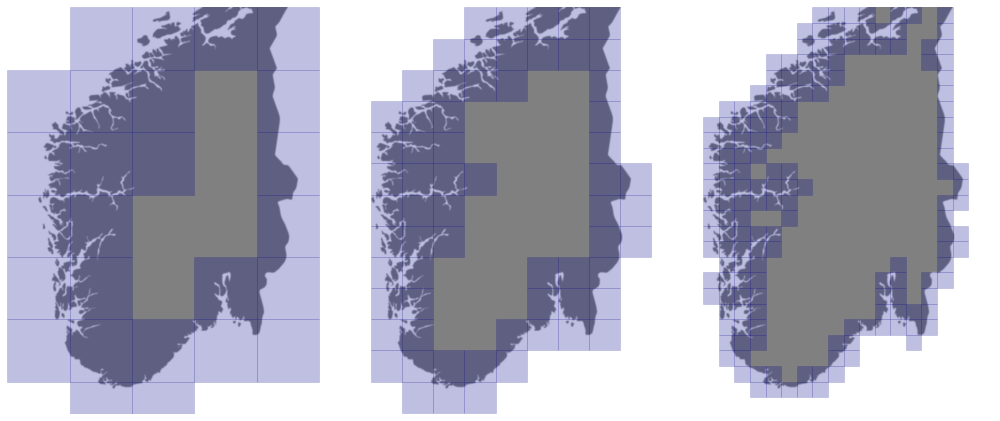

The Fractal dimension of lower Norway is 1.32


/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


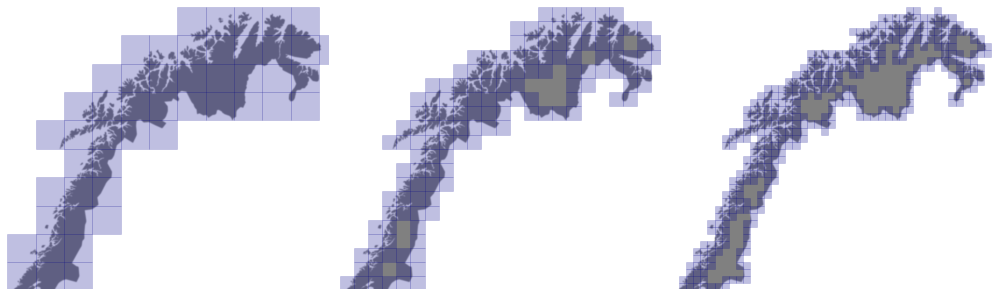

The Fractal dimension of the upper Norway is 1.34


In [185]:
Z = 1-n_bot/255
sizes = 128, 64, 32
#sizes = 32, 16, 8
xmin, xmax = 0, Z.shape[1]
ymin, ymax = 0, Z.shape[0]
fig = plt.figure(figsize=(14, 11))
for i, size in enumerate(sizes):
    ax = plt.subplot(1, len(sizes), i+1, frameon=False)
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size:
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size),
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25, color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show();
print("The Fractal dimension of lower Norway is %.2f"%(fractal_dimension(Z, threshold=0.25)[0]));



Z = 1-n_up/255
sizes = 128, 64, 32
#sizes = 32, 16, 8
xmin, xmax = 0, Z.shape[1]
ymin, ymax = 0, Z.shape[0]
fig = plt.figure(figsize=(14, 11))
for i, size in enumerate(sizes):
    ax = plt.subplot(1, len(sizes), i+1, frameon=False)
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size:
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size),
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25, color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show();
print("The Fractal dimension of the upper Norway is %.2f"%(fractal_dimension(Z, threshold=0.25))[0]);

Interestingly enough, there is not much deviation northern and southern Norway. However, these results are quite different than the dimension found for all of Norway, 1.26. I believe that these differences can be explained by the watermarks in the image found on google that I wasn't able to crop out in the original image.

### DLA Algorithm

Finally, we will use the box counting method to look at the DLA algorithm that we used a few homework sets ago, and will see if we can reproduce the results from the Homework.

In [186]:
DLA =  b'iVBORw0KGgoAAAANSUhEUgAADwAAAAhwCAIAAAAf3FwlAAD//0lEQVR42uzc25arOpYtUOX/f3SdU21VuRS6TE0BETa494fdYtkghCBf5JHjP//1X/9VAAAAAAAAAAAAAADu4D8C0AAAAAAAcHf/+c9/b/j3/333vAAAAAAArmf3EwAAAAAAnqBOPEs/AwAAAAAPZgMUAAAAAADuIY41//9v//9/6wbof/9896wBAAAAAC4mAA0AAAAAAPfQZ5qbT/79s8g9AwAAAACPJgANAAAAAACfrg46N383lc/lf0ugS9UG/e7pAwAAAABcyb4nAAAAAADcwCvf/NIEnes/6mPePXEAAAAAgIsJQAMAAAAAwId69Tf37c4vs9Cz7mcAAAAA4KnsfgIAAAAAwIf6F2Luu59j/04RgwYAAAAAnsq+JwAAAAAAfKit4uchMWgAAAAA4HnseAIAAAAAwCdK1j/H2ejX334OAAAAAAAeQwAaAAAAAADe41XMXDc012nm+tv64PqAYU66OVIMGgAAAAB4EgFoAAAAAAD4FXWseXbA6+9hALqWaYOeEYAGAAAAAJ5EABoAAAAAAH5LnIHOZ52T6efZYXWBNAAAAADA3dnuBAAAAACAX/QveVz/t+x0P9fnlp9dzv3xQU7azwEAAAAAwGMIQAMAAAAAwO8Kksr1H/WRTWb6TP3z69t3LwMAAAAAwDUEoAEAAAAA4FfUfc/1bnwTU+47ocs8zZwMQw9P8YsAAAAAAPAMAtAAAAAAALChbm5e7rE3/c3D+PJWzfPw3PwxfhQAAAAAAB5AABoAAAAAAPa88spxDLqJStc1zMm+5/OknwEAAACA5xGABgAAAACArDrT/Pow2GmPg8597jlOQu/mpJM11QAAAAAA92LfEwAAAAAANuQjxXXxc5nHl4ef5z+c0f0MAAAAADyVADQAAAAAAGQli59L1/1cqj7muAQ6/vwYvwUAAAAAAE8iAA0AAAAAAHvqEuh/MeXhZnsdd84EnQ+EnoNTXnnrd68WAAAAAMDFbH0CAAAAAMCeJgDd7LT38ejyvwnpTPdz2UxC9yPPDvCLAAAAAADwDLY7AQAAAABgQ9/oXO+094XQy+LnzOeX0AkNAAAAADyDjU4AAAAAAMj6FyBuipybA16fvw7uY827Qecmb508tymHFoAGAAAAAJ7BRicAAAAAAAwMs8J98nh4zDB53J/VZKNP1j/3Q82uCwAAAABwawLQAAAAAADQipueMw3QZR5oXsajm4Pj9ujh6cExfhcAAAAAAO5OABoAAAAAAH5ossLD6PC/D1/B4qZxuTmx1ncznyx+DtTT8HMAAAAAAPAYAtAAAAAAAPA/hl3Lsw7m13/r05PtzsN66cMx6KAlevjHu5cZAAAAAOAUAWgAAAAAAPgfTSh5WeHcx4vj0zPFz79dCA0AAAAAcHcC0AAAAAAA8D+GaeZZm3KQVH7tvfcV0QdmdVUk2i8CAAAAAMAzCEADAAAAAMB/68PKxwqbX/HofszSZaBfh52ZeZ237ifmhwAAAAAA4GEEoAEAAAAA4P8sU87LyHIdgE6Of16+lBoAAAAA4O4EoAEAAAAA4P/6nocZ4iBY3BwT1D/Xg/d/ZAbP307QV/2uFQYAAAAAuIoANAAAAAAA/Le4QXkmCEz3O/DNkYfD1v1hr2v1162T1n4UAAAAAAAewF4nAAAAAACU3dzzP3UKuWmAbtqg6wvl65+DIudh+rn8jDv33wIAAAAAPIAANAAAAAAA/J8DDdClih33Q/Xp5PqsfBi6jHLPfaX07CrvXlcAAAAAgMvY9AQAAAAA4Eu9ksHDVHGQSA6KmevB64O3gs55rysqfgYAAAAAvocANAAAAAAA36UuZq6jybU4ptxkmpuvmgvVxwdXzGjyzbNcdf3huxcbAAAAAOB6AtAAAAAAAHyLvh35lUtuDsiYxZH7/5ZJMPqwZT67vzUAAAAAgMew+wkAAAAAwLcYdiT3YeX6mOGHzbDBMf0gQXt0P2wz7eExTapb7hkAAAAAeDzboAAAAAAAPFYmZNwck4km90cGQerhsK+w8tZFh7N93akANAAAAADwJWyDAgAAAADwcHEoOQgfb4Wh68uVrr+5TjznS6C3CEADAAAAAF/CNigAAAAAAE/WRI2bXPKWWWR5lq5urjL8JPjnycnY/wcAAAAAnkoAGgAAAACAJ3s1Il9bt1zC3PPy6nUJ9Pkq6H4Em/8AAAAAwIMJQAMAAAAA8Ex1wrhUEeStIueyWcz8OiWYzKuhufnj8HVnbdMAAAAAAI8kAA0AAAAAwGM1GejyvynhIHNcElHp/qwm2dxMoJ9PMM6Z+33N3+Y/AAAAAPBg9kABAAAAAHimPnycPLEJIi+rmvvTm2nUHwYjxNno5S00Ue8iCQ0AAAAAPJStTwAAAAAAvkLfA93rI8hboecmNr289PCs3RLoun+6boCWfgYAAAAAnsruJwAAAAAAX6QOBx/uhC5ddjkerd+Kz5x4oHC6vq9hEfVwMgAAAAAA9yIADQAAAADAd3nlg09WLzdmIxxLP5+5dJOBFn0GAAAAAB5GABoAAAAAgG+RL2yeRZnz1dHx9nsfwq5Ty2dS0XEYGgAAAADgAQSgAQAAAAD4FkF8OR87bmqVyyjH/PrvbBrxpeNPllOtr9vM869WGgAAAADgFwlAAwAAAADwjeow9CvTvBWDXqaWS5g5PnyhfvxX2LrukO6D2kUGGgAAAAB4BAFoAAAAAAC+SxN07mPQ5y8xjEeXKqlcT6Y+pf5vZtjM1eM6agAAAACA27HjCQAAAADA12nywWWUe863QWdOGQagZ1nnoEy66Xjug87xrPwoAAAAAAA8gAA0AAAAAABf5BVBruuW62/Lz7DymQx0E1NuOp7LzzRzcvB4YkGcelZBDQAAAABwOzY6AQAAAAD4LnEdch0RjjPQfda5rCLImebp4SWaqe7GspuLAgAAAADcmgA0AAAAAABfZFj8HB+5e4nlWWeGPTm4HwUAAAAAgAcQgAYAAAAA4BstM9BBo3PZDzE38eW6ZPrYgLuXbqbxGxcCAAAAAPgbdjkBAAAAAGCqjwsvI8vDz5MHJ2ueZ+MMR+uPfPeiAgAAAACcIgANAAAAAABZ+WRzcNi/nflXtHoZWc6MXHdLNyP0tdMAAAAAALcmAA0AAAAAAGtNhrjvge7TzLHDZc/NdWfflv/NWNfBaD8KAAAAAAAPYK8TAAAAAAA29P3KpYpHD0PJs1bmphY6mYTe6o32KwAAAAAA8DwC0AAAAAAAsKGPGve10OVnM3QyFR1/PtTEr+PpAQAAAAA8gwA0AAAAAACkvDqbjzU3l0QqOv9VPVSpcs9NGtuvAAAAAADA8whAAwAAAADAWp1+fn2SP71PTpeuv3lWCF0mvc7BBPpmaAAAAACAxxCABgAAAACADcMe6ANeGeVllHk3/Vx+hp7r0DYAAAAAwAPY9AQAAAAAgD1BBjqZZu7/SI7Qnxt0SwMAAAAAPJIANAAAAAAAbBimjV//vKQcOtCPP/zb5j8AAAAA8GAC0AAAAAAAsOeScPO//flhjnlrkH956Gaod68QAAAAAMAvEoAGAAAAAIC1Jl68DCsfCDQvTwkOqGdl5x8AAAAAeDYBaAAAAAAA2PAKGZ/sgX7tzyfHeV3x1fqs8hkAAAAA+E4C0AAAAAAAsPbKHCcboHf1w84y1q8j6yS03X4AAAAA4HvYEgUAAAAAgJS6d7nJKw9bmTNp5uar4WH9h6LPAAAAAMA3szEKAAAAAABrddR4GEcuYco50EelS65hWgAaAAAAAPhONkYBAAAAAOD/BJHiA+Hmf/p+6P7b+LBhKloAGgAAAAD4TjZGAQAAAAD4dk278+EA9Cy73BQ8v+LO9eXqP5YTbgYBAAAAAPgqAtAAAAAAAHy1JvE8C0AvK5zjmue85Qj1ATb5AQAAAIAvJAANAAAAAMD3apLEy2Dxq3c5n1HOmLVEl5/p6vqAEpZVAwAAAAA8mL1RAAAAAAC+Vx+AzkSf67R0n5xe/p0UFE43U3r3KgIAAAAA/CkBaAAAAAAAvkscSh5umw+D0cNzd1POu6SfAQAAAAAEoAEAAAAA+EZ1o/O/T4Lu57gW+piTndCvv+3zAwAAAADfRgAaAAAAAICv8y/TPKtwXpZA96cPo8lllHJ+XaJPYC9PKV3xcxDOBgAAAAB4KhujAAAAAAA8TSYWXEeK61DyMv38+qT8bF8+0wb9kgxPDycAAAAAAPAlBKABAAAAALifOP6bDED/+2PY5dyEjJt4dFPhXFaV0v3VZ5/vHmaTHwAAAAD4QgLQAAAAAADczLHO5uExzSd9rLn/ts9Gl1ygOW53zhxvSx8AAAAAoAhAAwAAAABwF8sC5uHBwVDLOPIwZt3XQg8v0aelM4Z11PU/l7cGAAAAAPB4NkkBAAAAALiHfNQ47kvuE8bD2HF9+uyfQbI50/EciKPVv7rOAAAAAAAfTgAaAAAAAIDbqPPNpWpEro9pvq3PbULSZRSG7v8uib7nmTMx6PpGhncEAAAAAPCdBKABAAAAALiNPqA8TC0H0efmj9fffYq6rAqeZ+fWxxxIPy8HtLEPAAAAAHw5+6QAAAAAANxAHXfO9zH3MeU699wc05w4HHwYm25GGIaz42GDAzIJ78zq+TkAAAAAAHgMO54AAAAAANzJMLjcpIRfR9aVyUFkeWgYVm7y032cOnYgAD08Zrk+/TEy0AAAAADAY9juBAAAAADgHvK1yn1MuSlRPhZcHvZPZyLLyfEzXzW7+k2seVlrfc2TAAAAAAB4KwFoAAAAAADupG50Xh48DDr3tdDL0foU8iXp52Tfc19unVmKPqh9eu0BAAAAAD6CADQAAAAAALd0IHncB5ebAPEwkTxLP9enH0tCD0eOh8rktptO6EyEGgAAAADgRuxsAgAAAABwM7O8cvzP5sNhLDgZYm7OfYWM+yvGnwfDxlcvP7PL8UWD3ui6DBsAAAAA4C5sawIAAAAAcDOz6PAw3Dw7sh/zWItzXj7fnE949/NvFqEOSQ/bo/1MAAAAAADcjgA0AAAAAAD3sww6l1UMejhUsqo5dlWQOtMS3d9IMFpwpB8LAAAAAIAbEYAGAAAAAOCWtkLGw2RzWbUg79ZCx4XNy8939Y3O52PcfjUAAAAAAD6fADQAAAAAAHeyG0qeWW6PX5JRri+XyUbPzmr+qP+5NdVhgXScAucDeWQAAAAAfDkBaAAAAAAAbuZ8rXJmb/xXA9DJT/qv6gD0rO95NlTwoR8LbqR+9O+eCwAAAAC8h90xAAAAAADupEl/Hogpv06Md8iTAeLlMbOYchBfDuZ84NzkbP1e8CEyyWYN0AAAAAB8OQFoAAAAAABupu5C/vfJMgp8rPy4v1B+8Prb12h9jjm+Sh903g09bwWs+RtxfLl+T4bHyKwDAAAAgAA0AAAAAAD3U4eG85ngWZ64ySgPk8oHup/rrzJznrVEN3+Urp16OVp90eEi/NVz+3bNQwzyzcPU++w1WEb5AQAAAOBhbIcBAAAAAHAbdXJ3GOft88HDxHCZpH6bE4cB6K20cQljzbv6e++nPTx4tiaCs39vWP8cpNsbzcvTPOVmTE8WAAAAgKey+QUAAAAAwA1kKp8z+dH6yOFV+kTpVg/08Mg+Z7zVJ30gMB3EvmfpcL8X/IGgdbvvHW/EFeP9C+aBAgAAAPBg9r8AAAAAALiNuOo4Y5hvbhqRy6hruYmuHkgkN33VyTxr0B4dBMH78ulh9LlZAf7AcLWD57VsHK8/HI757jsGAAAAgOvZ0wQAAAAA4HMNi5OXiedhAXN/TJmkn5MjLPVnNY3Lybs4MJlklLZvDuYP9GH6Jo6fL//uk/qzqwAAAADAk9jWBAAAAADgow27kJf1yf0nw0HKpPj5vFn6uUzyr0HT8+zDrUWIp3rJLZPRvG8lHYivBa/H8K1+900DAAAAwMUEoAEAAAAA+HTDiPBQnBtuunXrkXdrlTNHHquRbs7dmtgyUDsb3I8Ff6Z/UleJA/Hvvm8AAAAAuJIANAAAAAAAHyouRc4ng2cF0n1jbgn7mDOtzMtpNLc2zGQvVyYTj14e06/nqadFQvxwzxSQD0PwZfTuAQAAAMAD2PMCAAAAAOCjzULPmThy3IL8Gr/JQx8LoQaXbrbih5ns4fSC+czyzfHdDdfELwV/Iy7kXj7xJQ3QAAAAAHwPAWgAAAAAAD7RViT0WGa0TzzXueGts+Ia5uGNzPLWfWv1gZboYdt0cGRfElzXCXOJPuv87/PMW7FrOI42aAAAAAAewz4XAAAAAAAfp0ltlkQiOfNhMEKZBFKXl8tfqL+Rvpu5rJLfu/eVjEo3F62fgt8RrjJr4H4JWrqDg4cnBm+OBwoAAADAAwhAAwAAAADwKWbdt8na46U4FZrMpyYzpslMdh+nfi3F8tytOw0OCHqCFQZfK3isV3U/9yMXoWcAAAAAHsfGJQAAAAAAH6SO3h4e5HwndFklocvPuPYsvZo5sv+qzLPgWzeYjGgPw7Lis5cbPuVjQ83ejTid/+4FAAAAAIDLCEADAAAAAPBZZsHcRibQnMkEN18FAeVg/FmetU67li5VfGD+/QGlSktvhbybOQ97oId3wZa4NbzsR/O39M/OowQAAADgAWxyAQAAAADwcYJ25ExUdBZlfn1bdmKpw0rmYT44E62Op93cfjCfsuoPzlwuDnn3jdT7T/Kr7Sbp40j6TPwqNv9bKB4lAAAAAI9gkwsAAAAAgI+zW4i7FfYNPk+OE0Srg9EyWdi+SfpwUfRufHZ4U/0/t57LF6ofcenKuZPvW74TOi4sb74VgAYAAADgMWxyAQAAAADwWTIp4d2EdGaQY4W7zZzzJyaLfpe1wZkZHluuvnOaXp8n3s2vDw8+UOC9lYP3TAEAAAC4NQFoAAAAAAA+0W6kOPP5rgPh4/iYYwXP197FsPJ5GL31C0JGvj+71rwJQYK5nGgBH37rsQIAAADwAALQAAAAAAB8omTyeFbknGnDPRA+PhNFHZYxHwtAB73OuzXAcUKXpOGa11/V61lnpi+fyTC/3qS0371aAAAAAHCWfS4AAAAAAD7RVja0aTXevVYfFb1K37y77AnO38LJgurgRL8d7Bpm7odPtm/gfo1QTjSLLwukPVMAAAAAnsSGFwAAAAAAH2SZ46z/7iPFw4xpf/pw5GbM5VnDicVfBc3Nl1vGYYf36FeDw3Yj+80px96NIHU9rIIGAAAAgGcQgAYAAAAA4LP0tbj/9B8GweXGMA18sje6n0N8WD35M1cc3lF8g8NP+oCsnuDDku/hy8lkfPPsku8eAAAAADyGrUwAAAAAAD5UX1RcwpDuLIi8DInmK5zPi0PJu+cOvxoGmmdt0Bfe2rMt0+H5aHum4/yMvgf9jesGAAAAAL9BABoAAAAAgA/VRE7jTGcQ9q2T09emmc+4cDLJoZrGaz8Q7MosWl+wXTYfUHxwpmu8r6P2rAEAAAB4GHteAAAAAAB8oibonMyeNgnpWSlv/O1QMnh6fpwDmmRzf4PlZzA3uZ70mpz9LIi/9Wr908T3D7wn8XteVEEDAAAA8CD2NwEAAAAA+ESzpuf4+DIKN2eipU1UtPnqTGT5kiRr5pRmNfqgc3JJZaMDTalz39kcvEj1ifFXzTG778OwSTpoTwcAAACA27GJCQAAAADAQ/Th0SYE3KRX/2ZW8bWOzWSZ4Q6aiYPfBQRkY33N9jD9XB/8+jzZ69yk1Y+ZvR59RToAAAAA3JQANAAAAAAADzRs6n1924RWh8HW3SsGqdPMh/nrBvOs47PD/f9lANqvBo0mLpx5mmfi9ZfH5ftC9CL9DAAAAMD92coEAAAAAOAJ+mRn/Unf1Hsm9BwcvEw876acl2POGoiDhZodJgA9U5eIH0s8Z1Lvuy9hSRRFByl5AAAAALgvW5kAAAAAADzELJxafxXEWBtnenyPyV+xqfJtyq2XSzT8PHP6d8rEnY+1el/yjgXt5s2HzX/fsZYAAAAAcA07XAAAAAAAPEGf75wFUutTXh8G5dDHXJufDoLdzTHHtv0FoJcy3c+zl2f3ZdjKWC/H7/8XUf/fAN69rgAAAABwhL0tAAAAAADuqml0rj8M8qNNdDgZTu0Dx/lvh8cnC4N3K4QPbPv3K6YkeOZwOP5MID6OUyffkPoV9XwBAAAAuDvbWwAAAAAA3FiT4zwWUK7zoMsO6fqUcjTYerjNNz/ycv+/T4033zarRxm9QsP68N+2jPgHL2fzrYcLAAAAwB3Z2AIAAAAA4N76+OmyF7mPO5dVK/OsI7kPCmeyp+WXw7LJ9HN/+8MQ7S9N8o6ah77bz31AfpBkKL+Z/9+uHwAAAABcQwAaAAAAAIAby1c19/8M/g4G74uiXweX0xHn3VNmpb+zzf9mbvFZAtC1OM5efr42yTG3HveFXeN95flfrCAAAAAAXMeuFgAAAAAAD9EnlXdDyX2GNdkPXSZx2OGUhu3RsVmMtZ9tZon6BWn6nvtPytcnZZtF7v8ZRO1jyfchOOBAbr78fBm++ckCAAAAcEe2tAAAAAAAeIhl/jiQr+89HGKeDZU/sqnsrf9o7iKzPplLD+PR36l53MEjOPxKLNP2xwYctphrgAYAAADg1uxqAQAAAABwP3UEuUwai5vjl2NmMs19HfKZtGtZhZKbe+wnMDy9X4F+uUq6DLvIyIbrMHxA8cJeGG7uP5k1kQeP3sMFAAAA4HZsWQIAAAAAcDN96jfusr2kpHmYNz0/fnzdJoVcfuZZ++v28eimtHhrqv29+00hzoJf29+8Zfa4+8h+mbRZAwAAAMCNCEADAAAAAHA/feVzkEwdxoWX/ce7GdZZgXRmqNkxwwhyk1ttss5NA/FuTfUwYN2nsRka5s6TgkT7sTj1LAA9qxL3fAEAAAC4EftZAAAAAADcVbLCto8Fl0mj8/no6m6uenl86fKvTS10n3PtB1/eWvKuJWWXgnLuA8n4/GH18a+ZlO7/HjD8n4xnCgAAAMDt2NICAAAAAOCW+qRvUAUdR5939VnSq+qiZ8fMktCzyuEm3ro7sTIvJG76g6kF7+TuUIff0mWyuX+p5NoBAAAAuB37WQAAAAAA3FjTaBunOc8XPJ85JnOhMgnLxv3Bw2+X97ubze37pE/e7yP1DyX4o4RvzvKlCsbJR9U9SgAAAADuyK4WAAAAAAD3NksGNxvg+RBzJhk8q3A+3PgbzCc4YHiDcf3zmQj4a2Sp2ZljIfveLNw8e+XK5Fm/ez0AAAAA4FfYoAQAAAAA4N76yOkwA90cUHJdy7Pq5b4O+ZLQ8/C6wwrhfhGWtxbcZn5Wr8H9vtCo28dn4fjkmp9/nTwdAAAAAJ5NABoAAAAAgBubhZX7v5tkcJ9jbgbsY8eBS4qfX4PEozWHlZ/R2zIvIc5/OLtucyEaw5x6nKePLd+rPohfJNQBAAAA+AL2KAEAAAAAuLdjod58U3J/WBMzzeekg6v0zcG7Xc59d/VsfcrRDmzp51izOEGEPfPO9K/Z7HjpZwAAAAC+jW1KAAAAAADuKoiELgW54UzhbpmkTo+FoZth+wGHp+RXoD9medZw/H6evAxXOP869Z9kRhie9e6VAAAAAIBfJwANAAAAAMAtNTXJyxzz8pNkavlM0/Ny2KDid7kUl8w2yD03X/l9oRc3Z58ZOfk+v6bh6QAAAADwbLbAAAAAAAC4q6Ad+cKMctzrnL9WEG5uwtzxIP0iNOHpzDiXLMuvjh+4RcC3aQcvp1/LOFGtBBoAAACAr3KDLUIAAAAAAOjtZpF/qbn5b/Rl1bM1ORDXXq5Mfbl68L//iaFOeH+yoMz7EsHgn784AAAAAHCeADQAAAAAAHc1K8HNZE9f2+P5lGoy0rqbfF02N9cFz8MG6OZ2DkRv40BtsM5bVzmjebIf/utGPmUedznHhi/MXZYIAAAAAM4QgAYAAAAA4H5eoc9hengrzhs70+O7de4s/VwPNdzSj8PTW1OtJ1xfcZax/rOfGJprBUvxOb96xG3c/VI3p+fT9s2NBwH6dy8JAAAAAFzGhhcAAAAAALd0Ppe8zJgOa5WT9dIHpjcLxQ47ffu8ctmvf55Fb8vPlPMnxGebnPes5zhetNnIf3N3F9Zy94f1Aej+Of7BPQIAAADA37DhBQAAAADAnZxJ984+mYWbh/XSf2mWYW1mO5v2ckHiYz7nF4Qg2D2rAC9dcXU8+J/NP/Nazu7xwAHSzwAAAAA8kj0vAAAAAABuaRaKDXqUyyggW7oYdH9ubDmNXbOe41eSdVj/XE53DPfr8Gk/Iszy6yURCu+HyrdEXzjn35DvMgcAAACAZxCABgAAAADgloYp55m+O/n1z62k8uVV0HXmOAhSDyPRybteRpz7AZu89SeYPe5ZRnx4VhB8v/xO4xVOik8JXpvg4GtvEwAAAADewlYXAAAAAAC3FCSGy6gquD6xzHO0zfF9r3D52cScmeoyxlpfq3RZ1VnJcTB4phI4zs5+4M8HwwRzs3Rl1J89+/xXc97Ll+RMR/hwkOVb+oHPFAAAAACOEYAGAAAAAOB+mtbkOMhb54aDZHPcMTw8/bxlfDmIXA8Drwcm1t97M/KnWWa7X4fNIs7DtTrZkZwJYedlup/zQx27IwAAAAD4WALQAAAAAADcTx99jpPEw2zrske5F3T6BrHpeMADuep+8PN1wvFafZRhu3M/+eCw5T+PLULQSv4bifnZsLdIsQMAAADAGR+9gwkAAAAAAIFh9Llvhh7uhPfh6XxYeXnd/qyy0+lbx6yHxc9llN4+mbLtQ9if+QtCpsY7+Sjz/0xOrJx7OkEpddD8XUavBwAAAAA8mwA0AAAAAAD3Mwub/lNvfQc9vrNAalCsWyap66QmujqrCm7mXybR3mWiur/EMmJbdyefekK/KW7+Hia5jz2s3Sk11z0gTktvJbwPzwEAAAAAPt9H72ACAAAAAEDGMgvbHxw7kIHOp2yHR/YN0PG0k43CwWybwT//94JZDfZWdXed8M4/r91Jnmzj7q+efNM+/yECAAAAwCVusKEJAAAAAABLdcI1ThK/ji+5oPPrk6CMuT/9fD/0cML9JEsX500GgsuocPrz9Q83iDUnlyWOUx9Yn6vSzxnJvnMAAAAAeBIbYQAAAAAAPEom2numprfPRs8O2xp8ltzt461bvcX9nd40Lzu79z71HixIE4bug+BBSfaZ2Q5D1ctpZ6L29VRv9DQBAAAA4CR7YQAAAAAAPE2Tbc18O+uB7jOsyQB0IFM7HYRxk+3OZd5jfa+fBuqC5+F97T6R4FHOPtmdcEkXTh+7hfpG+nfjXs8XAAAAAA642S4nAAAAAAAsHYiBxk3AQZXvMQeqf3cT2LPW5ztaRrpn/xwuyKz4uc9Vv75dLmCd0m5OPFxQvTx4GAQHAAAAgG8gAA0AAAAAwKPkQ6vNWfU/hwXSwyRrPuG6axiDHh4TVEo33979R4FLkuhNUjl5ZDCl4WF9QLkk3pbMAx1+cvcnCwAAAABbBKABAAAAAHigrQB0nw/u46d9jHiZTk5KjrCVh+5vrYzKks+u8h9qqpq31vxAh3dyrfq66BJGn/tL9C3Us4hzmbR672b9AQAAAOABbIoBAAAAAPClgiDs+VDycIQDael4nKAquIxqrX99TX/TshQ52cZ9LLMeZKCbLPIsrxw8qRLm6fuQdJlkrwEAAADgS9gRAwAAAADgGw2TskGDbwmztsPjSyJrm8zsllzoOWgUvvvPAU3OOLlWu+oXoM8uzwqYZ/+8cJ5NyvkZzxQAAAAADhOABgAAAADgG8Uh1zpvGpf45hPMuweXdLH0cpAyz+neojx4ln5uVmOZkF6GyONlnKWfg1OWxwwnFjeLD5cFAAAAAL6KrTEAAAAAAIgEkdk+0JxJTgdDDSeQrJGu//maeZx4rqd6o98LjrU7z5br8MGzp394VqXK5fdB5/4Z3eupAQAAAMCFbI0BAAAAAMBAkG0dJl/rE8tOFnZYCx2f3jcED3PMw/boWfy6mfxwNd75PH5OJl6KrQPiFS65/Poxw7rxz1lnAAAAAPhY9tEAAAAAAGCgCTfPQsNNs/Kwu7dMMrsXGkaWh4ctK6v7v8uHBXNnMe5j69Y/wdIlwg8MuHtkP4FZGB0AAAAA+KD9SgAAAAAA+BB9FnaZbx62+c7GD2KyQUNznJftbyF/3f7WSpftfvczGdzdyRj07um7VdDJGu94hKuW69OeIAAAAACcYcMLAAAAAAAGhnXIy1Levk256VrenUYTfT4Tul3GsvtB+oLkX1/3tExMPLMsecPxZ6no81e8cM0/7dkBAAAAwEk2vAAAAAAAYCwIMccZ6P7gM03DJw8rXV10foS+E/pzflbYvZfkwXFJdrxQmSltXfrC1W5eyw9MtAMAAABAnr0tAAAAAAAY6BugX14f1inSPlR6vnL4dbl8JDeZr80cVv+CsIx9/72mmvpAMXa8IPVznB15Yf3zLJ5+1ZrPXqFLBgcAAACAPyYADQAAAAAAY03EtvysQM7EVWep2fIzMD0M0e5a1jw3N5Ifs572J5gtWmbpMinwZrTZM81cosyTzcNPhq/ZVUnoYQS8vsrJ8QEAAADgz9jPAgAAAACAgSBM3Mdtm9xqE5/tW4GXMdy4oXk2veHBs/rq5fGzZutP0DyFeLXzizNc6ua6l8w/89CbGyynY8rN4OVnQP+S+wIAAACAv/FZ+5UAAAAAAPAhhhHn+tsyChPXn2yFcXdleoXLZuo6HudXV/uA8xXamd7orcLs4fjJCw1PbOZw+Cn0ofbhbQIAAADAXQhAAwAAAABApM9ANzHiOHm8lX5O9haXSYZ1lgmeDZ6c211+Sqibko+NMHzEJd23XfbD7vmm6uRTGB4ZxMQvbJgGAAAAgD9jJwsAAAAAAKbqSHH9YXDKb/Q995coV/dMx8np8sHp2Li/uW/yzjy+5r/Dy+Wbpw8/o2MrX99yE+meTUAMGgAAAIB7sYcFAAAAAABjw/DrMHz8N5Zx3qb/eHjkgUbqrQbit4hLr+MA9PCTZuTX38FZy2XcOuBw9LnMn3UyCP7JDxoAAAAA/vno/UoAAAAAAPg0lySejyWn+zhykH5OXjrITDcXLXfrBt5d4WFr8vB+833SB65ef7Kcxqyd+vAEbvR8AQAAAPhmdrIAAAAAACBrt1D5fEC2Th7Peo6v0jcEx+3In+nY+jT3vhw5+TjiouWgsrr8rHPup9RXUycT8PHE+hQ4AAAAAHwgAWgAAAAAAFjru4HfMo1jeeutaGxzSp/AfsuN75rNfFneHNxgk3g+sKpl3vQ8K94O4sjN4+jz2fHfwfTu8pQBAAAA+Fr2sAAAAAAAYEMTSx3mVmf/zFjGVZNB3sNzGHYh36gVeFiHPMxAz24/M365ot47OYFZInnYCz77pKxe10wHNgAAAAB8CAFoAAAAAADYMAxAHysDfpdZrnoYF76XYVH3Vm93fNfJEfIdz8tLB6HkPgB9PpN9x4cOAAAAwBe65fYlAAAAAAC8RZNGnYVNr+oGXjZMl0RjdP1VXw8cDH73XxCGGe5Mu3ZweknkmPPfDg9OLnv/HOOHuzWx1+t993cAAAAAgKeydQUAAAAAAGtxeniZOj0WiW4apkvYQHxJ6jqTAL615RPsW72bNfmliS0zx/FX/Y0cnkbQOQ0AAAAAH+KBe5cAAAAAAHC5fBA5tlXT25+4+9WBqz/jh4NXXLi+38waNt3edStzpl27GS24UD9+P9vZTfUfXpJ9f1L/NwAAAADPJgANAAAAAABrfQo23/o8zLxePsNZsfFr/plJPuZXgwPPq1+WOC/ej19yyfg+Kh3UTvcV1M0z2nqX+kn2d/eYdwAAAACAB3vOViYAAAAAAPyeWfluWSVr4wjybhg6mbqexWqbWTXh3dIVXd9X3Is8q2Fe5tTPV3cP08/l57s0S6UP08+7/d+ZYx7wAgAAAADwbPawAAAAAADgiK064VJlVU82QB/OTAdR7CBie1OzkPGZxR9WSi/j73EF9TADXebF1bMAdFBTHX8+u9wzXgMAAAAAnuoh+5gAAAAAAPDHMvXP//QFzP0BmVTusfBukKAdBmef8cNBc2v56HnTvjxcw/7g4bnDtV2OM8tJD+8xM3JwZP5aAAAAAPBRBKABAAAAAOCIvnz3QCVw2WmSrgcpq0R16SLa9fSGB5SnhF+H6ed6cYLk92xVT/Z2Z4aKy6pnLd2ZV66/r9lL+4wXAAAAAIDHE4AGAAAAAIANmWbfJk6a7B4enh4XBs+uO5vbbOYP+7Egs3rxIs8C4v04wTQOZKabBzFssG7Sz8lLN+cGKfyHvQwAAAAAPNLT9jQBAAAAAOC3xSHUWUo1KB7OxGRPNhDPCo8faasUOTjy2FfBRYdV3HFTdWaorauXedX0g18JAAAAAB5GABoAAAAAAI6oI6T15026tP7wkuueH+p7kq/DZ3RJrLmvUt5VjzB8kYZTyswwUwReT/7xrwEAAAAAzyMADQAAAADAV2hamc+P9u+PYZdwk23tP2xGO1MnPPs8yNQGU71uvd9vWHLcLEJJ9EAHlmcFWeThysdh6N1LDO83XisAAAAAuAX7WQAAAAAAfIVkxDOfBB0WP5cuZvpK3w7DuH1QNc6zbuV0+5kMD+iLgR+jjz4vg+NDfX1y5inEVdPLqSbnlpzD8x4uAAAAAN9MABoAAAAAgOdrUsjBYaUr6A0OG57VF/oGDdBNNrr+sP87NsxSDxdheInM+txOfhkPRMxP5pLrGQ5fg/4qy0R1fAsPe7gAAAAAfLOnbWUCAAAAAECvr2H+9/msI3m5ed40OpdJkrVpfR5moBt1HDmYQPKAZdPwMCT9R0/lTywzykEofHnK7JNZS3T/PgRt38tpJG/nwQF3AAAAAL6WrS4AAAAAAJ4sKDwOjtzdPO9TxcsK3mWV75mC4eEVSxe97W/2eRnZfK/2MtZc5snm/qxh/rgkOr+vErd9z9bqYU8fAAAAgKeykwUAAAAAwDNlEq6l68dtsqrXXqisks11RfSZ9t9+wHrYetrP/plg1socP4LMsg+T0LOocf9HZiZbMunt5qvHl38DAAAA8GA2swAAAAAAeLJMWW8Jm33zG+l9pDjOWwezep1+JiA7S7g2Mdxjpde3EFQv5xd2eeSwa7l02fp+bv1hu1fc0lyi/HwlZscAAAAAwAd65oYmAAAAAAC8DEOfTfSzD0DH6dXl5ZZt0/Un/VeZnHQs7vftS6///rn8mb7b+7VEcQ1zZv0zYeXSRY3/IO48G2cYr+9X5rLVBwAAAIBf8PA9TQAAAAAAvlxfZ5uPwB7IPTfDBp9sfRgPO/y8jHqOh3XIX+J81jkQPJp6AkHdcvzPoKH8zJz7lel7si+8IgAAAABcxdYVAAAAAADPNIx15muAd/fPZ03SjTjzGny4K6i7PnB3z3A+T7x1YpCDTz7izNuSGS15wLCh/NBKAwAAAMDvEoAGAAAAAOCB6vLaOAD9z6wfeveKv9EunDes75V+fukz8fW69ccPs+PxKcNzy8/XI+6Bng0VfBjfS/L0OK79h08JAAAAANYEoAEAAAAAeKYmcppp0q015y630/PNvsmIal4dqM3kYv00MFvtICI/O76MQvPLQeJQ8tbrGrRKL4PdW1XlF64/AAAAAJwkAA0AAAAAwGPFfc9xLW5zZCYAfVXT824M98BQX/7rQL5QeWhYLl66rvEybxY//HyHketZ9v3wK+SFAQAAAODDCUADAAAAAPBYQQY0qMsdplfjHug++XrAVgY3vp0mldsf+c2/DgTV4GW/brlZ5Po1mB2TvFZw8KwiOohHN0OVKtafmcM3vzAAAAAAfKCv3uIEAAAAAODxtlKeS8lN9QPh2kwWdhnbXYaw/SiQfB8OBNmHZc/9AX1d9MlLBw3Q5Vwt9PDck+sPAAAAAJewVwUAAAAAwPOdTz/vBkCHSeVlJXB+Mrv31aRvv1bcsb3biNxUgw8z6MNC8ZKumu4/zFRBZ/65SwYaAAAAgM9howoAAAAAgOcb5j7PtPwOx6/js8vBmxhrSeRuZ428ce9v8ha+QbM4WxXdS/2wwftwMou8nMnrfpMXmh3WT/uX5gwAAAAAWwSgAQAAAAB4uAuTpsGmeh9HPjz+1gjxKbPM9LdZpnszQeHZ8flw81W55zivPCylPnD1YUD8/OQBAAAA4Lwv3egEAAAAAOCr5Ktwl5qMaR8wzfcKDwdZntUcU0bp3mH38Pf8ItA8lPrz4fFbSei6X7kfJJ9+7p/dsUry4QjxXSdftv4t+p5XCAAAAIAPZ68KAAAAAIAnm3XfHm7wrccsVbo0+OeBTO0yTRvPdnkLD9bkdGc59WZNlhXR5We8+HCY/pKa8DiCf/6iTdy5aZUGAAAAgLezVwUAAAAAwMO9gpvD4PKWZFK2+Sq+XNPam5lYnUZd5qSHWeqn/jow7H7OL2nmEvm4fJm0PienlJzG8FEOK8m3ctvD9LMMNAAAAAAfwkYVAAAAAABfYdb3XM4V+l5lK4BbugRtUGhdujDre+/0t/Ul3Jk67Xxj925O/W/uevbQ81nt0r1F9XpKPwMAAADwUexVAQAAAADwcMsG6MPtv8ljlpHlpL4rOhl7/Zt1/gR9A/Qy+tyY5ZuDz5vYdD5hv/sO5Ku+m8nM/hlcoj/x2icFAAAAAGcIQAMAAAAA8GSzSOi/b8+kkA8fcOzETKy2ae3tR7huXT9O3U/cZHbjEuhMP3R/SpmkzPuhruqB3no9jl10mad/9isEAAAAwI0IQAMAAAAA8GT53uVZxW/m3OaYfFb1cAfw1mReS/GwHwX66uXyM62bj6r/RhT+l0bIT/vkDfYjlJ9p8jP3DgAAAABn2J8CAAAAAODJglrcZeK5d0mb727Z8LEM6zCl+qTc6qzlerfOuaTrk5eH1Vc/E7XPTzjotD45eCY+fvgSAAAAAHDSczY6AQAAAABgqKkHbsKju53Nv+SSBuJhQvcZPwQEN3L+8eUX/5LQfFCrHM8nDlUnG8Fnt1M3hS/v9xkvFQAAAAD39ZB9TwAAAAAAmJllguP0cFn17P62TN9wCSuuy7OCqk1ouP+8bEaHd+ui83XLy2nM4vhblz58WP5mm3ds+E8AAAAA+HsC0AAAAAAAfIVZvW7/z5IoFV66PLG6DMj2t1nC4uR7CZqtDzQfl3NZ4aAHevl2DV+trSh2Mr6fX4rkWU0k+kn94gAAAADcjp0pAAAAAAC+RR/i/Pd5Ez+tk7XDr2YnDgVh2aXhdevLDf/ub+QB+uLkkl7V2YrNjtk1zNCXruC5bAbrl7ntM2nmrYP7i0o/AwAAAPBeNqcAAAAAAPgiQW9uvWE+K/GN46fDT8rR9HOZt1P3x/T/7adR391dfh3oI93Lm91d1eFCzULSZf40Z1nh4IADtu4984rmT5/9/wQAAAAA4O/dZosTAAAAAADOC6LMw+Lel746OhNuToaqyypWu/tVM/Kwh/iNTyFvuGhNTHlZinw4c7wVIF6GpzNDnSmoPtktvbUs5VZvEQAAAADPY3MKAAAAAIBvUVfnli5cWx9WnzX8qs8Wl3QHcNkJQOfNBp9d8RbiNPAlS7cMIs/eluX7E6eZT6aQSyIcfzI2nUl7AwAAAMBbCEADAAAAAPAtms7auMK2KU4O0sN1rrrJWDdXiUO05Wg17yzCW0bh4JvW954PiJf95Q0C1sNXIvk0m/dqFsq//L6Gcfxj5xYZaAAAAADe6mb7mwAAAAAA8Ddm/b7xYcOK6DJqBd4tii6ThunSJbBLWGi9vKOPMlve2YIsHShFHpZ8z+YWnJu8+tbMlxnrS67SHHBs/gAAAABwIQFoAAAAAAAYy9QkBzXAzblxdrkZNsihzlK/s2rnYQj73Uub1S/X8pRk7/Ly+OEIZV7pfQsn89/1OgAAAADAGwlAAwAAAADAf8vEnS+5Sgm7nJvjh3Hn/p9lXkjcD3uvnwZmPdklzIIvP2nsVikvq6DzdhPwyXGOzS0TH9+aFQAAAAD8BgFoAAAAAAC+1ys++2f5zjiXPIurJuO5W5nXW/xAEMTED0SED59Vn/6aWDzggalektI+eYPJa93i5QEAAADgwWxRAQAAAADwvfo48slt8yaqOzxgWfxcp7Hj+PKs9Xmr6PcWvxT06zYsYL5KHCkeftJP8vBFz4eYh/Hrw29IcAkAAAAAeAsBaAAAAAAAvlofCa3DrMPjg631ulJ6eInzHcZDW1Hg+AZv4dgCBsHl2RJlBvy9HHZ9iQMdz8PEc19inV+ufokAAAAA4C1uvLkJAAAAAADnDQOsdXJ0dnC/wV6nn/sDhlHUZcnusFQ4GKQ5ZXiJx/w0kGxcPpmTbhYzs8K7gsd0bPD+Bc7MNnkvj3l/AAAAALgvAWgAAAAAAL5dEyYe1uUGB78+n504a/Cd5U3zod5hJHd54rvX+0rDpHLSLOi8e+LupfsX4NiA+Seeydxn3qIHdIcDAAAA8Ay2qAAAAAAA+ApBajPTslwf3Bw2G6pJiyYLgw8nX7di03+x4r/vcF65nGhuPlPMfGyqJUxIZ96o0gX3h3+X0f8Whqc/5hUCAAAA4KZsUQEAAAAA8GR1QXIZxUDjPGtf8zw8ZnbR5lrlRO42mN6BU57x68DhTHBGM1rmTbjc7psT5KdLF8E/lsV/xpsDAAAAwN09ZIsTAAAAAABmmhhrmeeYh8HQOv+audyvJmWDaWw1Ez/g14FZijcZGo4f6Kz/u0xKvo/dwpl8c74revh58M/+7/7/PHDsfgEAAADgKgLQAAAAAAA8TZPsLJPi52GSte/KraPMQXtuP3I/mWZW5WdB9ZmodLLNt7nuW57OhZq72A0l9yu/1aB83m6qPvl5frbDd7sk3vwHvDwAAAAA3JotKgAAAAAAHqgOFpdJvrNMumxnidKyE7EdHtPX7pZROHvL1lnP+1FgltNt7vpMSXNzoT6zfj4Svcwx14f1me/kiWX0yg3HmRU/y0ADAAAA8CHsTwEAAAAA8FjDdufSxaP7s+qE6zBC/U8caC7zht0zhrnbZNHv4/XrHFRxBw3QyydbfqcKevaOzYLLZRTKX4a2+/8DQN/9PGyDDv5vAwAAAADwlwSgAQAAAAB4rDgTnM+ABqcP/45Dq1s52pMt0XHX9cP07cjL5dpa/Mwpx2TGXAa7M5n+0oWn++P7/6tAmfy/AgAAAADgXWxRAQAAAADwTE3yeBmELZOoa5P4DPLNy6RsZiZ5u+neC38RuEUEdivFnpR8gply7uH7E/RVly703MeUk2sSH7C8HAAAAAC83Q02KAEAAAAAYNcrstkEOmfR1abmtvkq0yU8M8zCHhutmcmB2uByRYy1vvqH/8pwMmveLHUm1rw17OzDTC/1761YM/7nP2UAAAAAvpBNKwAAAAAAnqauZ+4zrGWUi13GT4MDkhW/wwPqbt3druL+rOau6wMuzCv3rdgfK8iL7yaYg4h85tz40kHSuj/sj5dd/TMAAAAAH+gGu5MAAAAAALClSSoHedPeMovcHz8reJ6FsEsiY7113a0jD/8uMFvJY6P9qpPFz/197T61WbR9mcbOvyrvXmMAAAAAeCcBaAAAAAAAHuhYU29eZvBhyLWJxpYwXFufW9K53mF29mR5cD/n9/6+EExgt0i7hGnj5pYzjyCO18ePe3mun3UAAAAAoAhAAwAAAADwVHHVbglDqOVoi3Cfcq4vV6rk7nIawzlnPhm2CJf91PLw3CYJ/UbDsu3Mem6t8+taydbwTII5E33u28SHzxQAAAAAvpMANAAAAAAAT7bs4p19NTwgH64N0rT1xJaVwMeuHoywXKv6mDozPYvnnpnPYcNY+bWF38O66+ErMfxq9mT7VHrz+XCQ4HQ/9AAAAADwheyLAQAAAADwcJmu5aAoOinf7Dub3rHr9if2pcizS89WqXT9ykHw942uTTzPbr///PVJ30JdEkno5sjmeQ3XvP6w+e+7HwIAAAAAvIGtMQAAAAAAnm8WTS6HKqKTB5R5+rlOuMbTWBqePmybLrl25zIqJ46HervdFu2tNY9buoNvl5/0Aev+pjJXecuaAwAAAMAbCUADAAAAANyV/tddwzLjrdTsmUj0MP1crghADyuuZ0XCwVIEg+/2Sb/F4Sz77il993NT7Vy63vHZU+4f06zsuZ/YBz4CAAAAAPgbNscBAAAAAG6mjkW+ey73s1sV3HxSVknlYOQmCFv/sVtFXFZtxJl/7l7utYCf+eJtreTWusXHJPPrwyR6pg26ucpwGp/5RAAAAADg99gUAwAAAAC4mWE7rM3ejDg9XLpm39m3B/Tp5yDYeiypvEzixnf3OqbM37GP7R5ulvTASsZ3lxmkzogHCzub4XBJ4zuKzwUAAACAB7MnDgAAAABwD3XKeZiXtd+bNOvxDQp6g4bgTKo4Hr+PF8cnztLSySri4bDxAcPV+Jz3bdirHdxm5t77kQ8v6bKWu/ysea7vq/x84sPE80c9CwAAAAD4GzbFAAAAAAA+XRN5bEKWopBbMl3Lw+xvf2Tco5wPQ5cwu3xVF3UyJ93kuT88+tzo/08CZfLsglUqq97lCwXr2f+vvgl5Dw8DAAAAgC/xuduUAAAAAABfpclcxoWvZd4jO0xJUro23z4QPFzzWSi5pLuWh6fP+ptfUz08YHxAMrQ97JmerWHQYfzHhq/9LD6+LN4u83dmy5m0ej2Z/C0DAAAAwOPZFwMAAAAAeL8gV1p+ZnNLV8fbj/bhNb1vNMyUz7KtwyeSL4GemTU6B1M9cMU+Qfv/2LmX5cZ1ZQuAuP//03ew4zjYQKFQACnZljMHHbbEBwBSPaCX1uy2mb2V54PHVepSxbev1QPyRu2b1+7xZu7ulR+1kgAAAADw03h2BgAAAADwbmFX7ixoW4lUdlHplvbCzlpy/8jj4tlMi6niNi8/HjfOA7Kzlt+xdHlrguFexfOOHdh5wn6syv4hsd3u+wNbqxfum6xJPSMeniv54duXEQAAAAB+LI/PAAAAAAC+x5g0Dct0r7sUU5hjyXF30nAw4fafpBItnXUht6g9+jhl+yU84DIpmwdq85EvRzK+3p3rt8R2tyq0w+rrlubIZy8mS73VD/2jFhMAAAAAfhrPzgAAAAAAvkGxb3gMcealvOHrbSgVng3ps58YLyeYrFLYyrws6t4KvLa0vDmsWx737UY7O8tZY3F+tDF4XVz2F6nEvutm30nIV6w4gPywAAAAAMDowx9nAwAAAAD8ZMtw5FkUNTlO0nz82Y+L6xXXlX7oVi76XQaXZzteX2xDnPc4b13J09ePM+uH7hbwW/rFZzXVS8t1bpPG6N3Fr2zz2Z9KAAAAADj24U+0AQAAAAB+rCQKmccrx0rgSoZ1lkwdX//IMHQ4063Nure6UG9Y0nzQQJzUfhePf7/2eBZrTkbYhqj37sq/wvE6JLN7kWI2+nUDAAAAAIDf5QOfYgMAAAAA/Hx5erXYLjx7cRafnY0hzFI/8vT4Ghf+gMfRs/Tz9d2tVHpRccfr1VzuchzOrpy6XcLH33LdX5ELD2fd/q2aHude6Z8eb6r8TgMAAAAAPuGJMwAAAADAr9OFHZMtd5Oss+3HtO51+y6puVvZm6RdPzLKOc4lCb9+KV6pr3fbUMPc/o3bdsdZHnDrdJXdZ9H5n3Ctw9G2zVro8HOxtbD19ayXagMAAAAAAtAAAAAAAN+gmJjcylaOIdQwtTn79WZV89iD+/X65wWgw+nvBmHr2z/VXrzMKx90Qrf5zfxd3c/jLf3ISla+itDSBHzxFHLPAAAAALAkAA0AAAAA8A2useBlMfBuCXT4bphVDQOXeQY6zDdXxv/Bj6PDkPfNYu9cZffibTPLzRcP293GSQr/FSsfuhNBbpN0+IvcbF4HAAAAgD/LczQAAAAAgG8wSyRfheHLO32943HCuGpl2OEUuvx0OPi3r/Q7jPnvB4Ozdw44Cyu3SRH4/ZuqzUP2j6xGors5Wy2JXl+9cZqVqPTutxdkoAEAAACgwkM0AAAAAIBvU4xm5h29W6HV4sbho+Ou5bc+kkqx9K/W9Xm3/Vz79a0k+B62a7dCAnsZz13WhNcPNZvaGy7Bs9HzFvVbtyhBvtWZXTnpB39YAAAAAOARnqABAAAAAHyPZVp0qzi23euE7sKjswjmWPa8HN545Let8DfKg+DhLnmgNtm36+SuJ+PPYvQHtcfvvOg3Z5RPM/8qwp1VHc/ePvo7AwAAAABwk2dnAAAAAADfI+/6PT5sV1LbypHQLqPchS/DcbZVJPqv5Z7/M0bJuw2SuuXrBuPPyXFauvjLiuiKrbm8PwP9+Efp2FlJ9uxQ7x8/AAAAAPx8AtAAAAAAAN/smh89CKeGuyxTs5VtZsnaNoSkl6P9I8+i74Set3QJ6a+z5/fPbK/K6cLZVW7U7kSvuBOW93OyDsm7lRT77sFn2+R90n/k4wMAAAAAdZ6aAQAAAAB8my5IOiZZzw77VId01wDd5UGLCdq/k+DMK73vxHOTrG03gLPjj28lefrK7m0eGn5uvf+Z+HWR618GOFiifK82KVzPu9jHwXf/vmLRAAAAAOBX8+AMAAAAAOB7dEnNsSi3WM17s054jGZehxcO9fjsn/pEesyFd/HW9m//cdL1O65Yva67nlFOgs7XGRVtFSq/LgN9vO9up3VynJbWpdePEH4JAQAAAAD44tkZAAAAAMA3GKONXeFr3hm81XG7lbW9xlXbEIMOt5ydtP2b+q0swm80xlVnhcRhYXM9HXs1HrMLNM+u0SylHR7/IOA+nq5F8fqXXoVkPAcqH59xXuHlqJziAz4RAAAAAPAGn/BwGQAAAADg11mmZv/bbJabXCY7ZwnpYmp5VkBbL8pd9v52ge8PkIfaxyh5mEIOr1SewT2+Sd5gFv5+nZtV0MUjLDPQ4dVJOsLfvEoAAAAA8Nt9zpNlAAAAAIDfpUtAtiFB+4r0alfMnIekzxK0YWP0OPfrZr/9SXVe3zubYKWWO3l3VgJdPGDufvfzuMHZSOqeHfBsCkkpe5s0po8rEH7Sf/unAAAAAADe6dc/VgYAAAAA+L3COtgvXcK1mNes5GjDbcJi2napMT6YYBL8/bD65133w8pdlr1Fd0h+uV/XD92ddxZ2f90NUK8qnw2+/nq3TUsvRJs3hb9iHQAAAADgU3mmBgAAAADwPcYc8FdmNMmt5pKoa3eiZPuvt77GWU/QjiNf/uwx9W7MPbyU4TYtzUAfm13T4oBfUf5d/C7BwUyvpygeObnPwykn2WgAAAAAIORRGgAAAADA9xv7gNtQxnzNs75iDOORu5LmJLtciUePfdIeUH+pp97DOyG5dsWjJa884qXp53ANk/t2NrbKQhX7oStfLWhD9t0nAgAAAACKPE0DAAAAAPgeu8nUtoqr3oyuVpKpj0RjuzHfP+Bv113BcX3yiuhK33ZRvS66ePBZF/KLwr5jvD5M6ldC5PXVm2Wjk9dnA5aBBgAAAIAij9IAAAAAAL7BGDM9zl+OdvcttvMuo7G77cUSn221qluXcpac3trxWbMu8xeln9twMx8sbCVEXsyIXwc2ez1coscXBwAAAAA+zF9/sgwAAAAA8C0qQdWDkt3iW7N66XGEY5y00kO8NSqPqa9Z8IO481P56acsy8tflIGetSmHy/vSzPfySwKzT1PYWg0AAAAAjASgAQAAAADeqks91lPOLWrSfWpU4bPiManZyqXCZ2f8m8LocxI0b/9GZscdZwfcuuVyWxXI40xfevXDpPVTZdhdefnBSi4T0t1yvW6hAAAAAOD38uwMAAAAAOB9itHJrqq2RZnOOynP8XTLYY8bH4dox1D1X7Z1M8xeDO+HrYTurB05KRFvQ4g/7DPuZvqeJc1Xr53WZiefvnq4vH6BfEAAAAAAYMbzZQAAAACAd+gij5VU65aDVulx99nIu+FdE8z1WYQl1i9Y6V/jerFml+8gv/tdxkx2OOU3XPRlsrkeU579utxydq78s9OiLz8AAAAAACMBaAAAAACAN7mmP8P+5najVvlqt/23raKWyxFuNQ039c+RbgHzuPxBaXRlg6Ru/KxS+lsu9+PR8Fm9etLUfnCKWTjbJwUAAAAARh4xAwAAAAC8WxcMTep+672zxbfGLcfxVMZ/cLpZUe7r1vm3WPY9X51tk8dzdwPTlVj2mKU+XpmtfccPV/dve0FCurKeSaV03grffGEAAAAAAAYemQEAAAAAfKdK+HVsh91td07KZcd257G7N0y1bo0hPKlY53+uMd88UjxL0OYqedwDxXbq6+13sDLJXnlw/6AzO/82wuz1ZbL5eG2vv9aXBQAAAAD+As/IAAAAAADe7WaAuGJMTBY3HsfWxaNbIYe91W77Zy2TzXnwPVnY8VC5SrB+zL6HRcstSnIfX+g8OZ3US9/5wsAj8tu+W8b8QzR+S8GXBwAAAADAAzIAAAAAgO+RN87eCbZ2FcvL9HOYFg0PctY8nb/+Nx9Tj1nhrVj5+Hp4L4Wt0nXjccboc/u3kLgL5t7M6S6ro5M0cL1Lezn9pxTz5ePiP7uqAAAAAPABPCMDAAAAAPg2syLYR8Kas8OGW3ajCsOXeT47OWwlq93+ZKwzjBcvV2nrFK9I8c6mkE8wX4f8bgmPENZOh8f5rsRz5XT5h32ZmQYAAACAv+nPPU0GAAAAAPg56iXQeQ6ynpZexqzD8uDjYGhlx+6Mf8p1/dtpVXOSa795+cYTtadz6uOln92f4b7h3JMC7IOluL96xVhzsbj9z35bAAAAAACuPCADAAAAAPhmY5FtO8rCjkXCW9nNpDG6G2f3en3AXSBVlLNbzOVVK+akt4qEi4dKLv3BlPMVGE89O8J4T4ZrOG5/PP4H0+TJVw7a6vP4lz81AAAAANAEoAEAAAAAvkuX4/zvh60659cZ87iPlOkm5/qz8v7vt90Dy4rxWfQ5zBnn8w37npOBJQfpfkjSz7PG5WSyW6u0nEKl1/k6uy4VPbs9dgcDAAAAAJ/B0zEAAAAAgJeb9SXPimnznGUlKbvMsy7HfJYBPU6I/vE0Z5gwrlzQlyakw5biStHycrLjWWa3cb572Ji+LMDOF3MWjC5ekbN1bpM261kPdH21AQAAAOAj/ekHygAAAAAA73ENL3avfJn11J6pHG1MVXbFz9ehJiNvmyW73Vtd8DcpG/5gy8Bu+7ft+KnzLpPBs+seZqDPAtDFIS1vmLMpt9WHJTzRLKi9NbXZHMOa7W4YxckCAAAAwKfymAwAAAAA4OXGZt9Zpeuzbb7LKtzura/h5YeaVeTuhlC71PU4gD/1BLtyDxQTtPmJdq9USxP8u2n1WYw7KTweB7DV97y1WWUdKqu9PHg436TdWe4ZAAAAAK48LwMAAAAAeIfdntpRnuBMMqPtKGMdRlGTxuj6LL4WpM2Dnn827pmnn1t0WZfXohjGXZ4xaX3ezUBXRlUf7e5dvXw9r2ROFuTZLzP8zY8AAAAAAFT80SfIAAAAAADvdzOjeSAPMdfPfk0tXwOvxwHWcWXGBOojK/C75MXGLUoeX3c8SwaHKx8Wcs82/trs7Kol91KesM8T4fcuRbzg19T+1prPBrb8msEjswAAAACAzyMADQAAAADwPnmktWIrzdz2K2lnpb/Hwm7dLkLahjjp33x2PRZsj+nYFsXQ87T0svY4z+y2eZv4OP7jDPR4/Jbe7eNtEya275i1qo+x7/vDGA/yZ0vQAQAAAKDC4zMAAAAAgDcJw5EPttVW7JYE7+anl4cdQ6JdhPcvRz/HCOzZccLUckurlPP8dPv3jn3RrNvkc1GsLb+5YrOsc/h6m3yUWpQCX65tG2qw/+b9DwAAAAB1f/QhMgAAAADAm3WxyEoKuR7oPE4nJ626yfHzcOoyUd3+7TCenfevPb4Oc+GzjcMLN9sxCaO3odV4eWWfvS7j6Ypp5iR/vJx4bpzm2Ui+9k3y6A+2aAMAAADAn+I5GgAAAADAu435zjy0Wsxx5i2/ld0Pgp67wes2tD7PinX/1OPrbjXaZuh21tZc1F2O3czu/bm3ee/ycgWe6lCfZcpb1Mw9nj3syQ6/S5CvAAAAAABQIQANAAAAAPBulYLb9oKIZ4timrMjP3jSZEZjfvTPBqDbztW5Kbm1ZgHo6wZfY37qGiU5+HHM4StP3cnFtuykQL2bznhjjwdsf+xuz+nABgAAAKDCUyQAAAAAgG+TlEC/LvxaF47heJxhqXCyb9eI/MG6wPfjqferreR98u6LcurL3uvZ+jyyXLN25+vZ21AI3aIK5+7WzYPaf+Emn63M8TYAAAAA/HEeIQEAAAAAvE+x+/nLnbTxG/LT9TRtmH5uQ+D1mkD97CroLkT7trD7MoYexnbHd8fxd53HN1emO+l7esq72Y0LEg51XITZxstk+VMT+eGWC/WnVgMAAACAMwLQAAAAAABvkpTLLp3tWKlwPpAX5S5HUtmx2+aTHmWPCe825JLzNuizy1q8XmEwPRxVeN6DKzWGp5eL8568+LhiY8dzJfo8m1p990+yzDcLQAMAAABQ8YeeqQEAAAAA/ATXeN9ZGLpzZ/fivvVwbfL67OflqY9X5mcKK5PrK1NZ6vCVYpv4bsK+m9r1IPVr12Ver/s+lXUuLnJ+3nBGu/HlsQr6827y2cST+YYX/Y+sDAAAAAAHBKABAAAAAN4qT6mOHskQL4uWd/ctpml3h5d0G3/S0+xZ+jlZmXYvslw5XeUss+7q69TC1+vL0nUkt6Fwut0oU1/mqmcF2LPp3Kkr/oNVx8mU/2wuHAAAAIAzH/XIGAAAAADg5+tSm8tUa9Lse5aHnp1od4ODYewOsuvJvr32P8uY9G1D2Pep/uPR2cGThPrXz88uQnGos+ByskHXwx0O/nV53L+Z9B3vk6Tt++8sCwAAAAAHBKABAAAAAF4r7M0dJTnjNqlHHWOj4YmSgPIsFVqf3Z0i6jwFHk688kz7/XXRx2dM2o4PAsrH1255fy7fupmB7g44rsPNrH/+EQhD2N0IX1RD/mHV5svJttWHvf17Rf7O4gAAAACwy8MjAAAAAIDXOotvdvHfWUnqeMwkZ7w848FmB3sdj+e6JssFXx7/TBgfv56ufvb6IlSy48UVfiTgnt9jZyXQ15+7IGyy8ltTy+fSDXtMpX/831PeEDgOs/4hAWgAAAAAch4eAQAAAAC8XFJ9WjGrR21pSDTc/RHHE0kOtaypvi5mHo58XW4y7NjuCmsPcsDFQPlTQfZHLl9SWL61/l0idtbH/HXM409Qsqr58f9IEvfVcwzT6t1/XONH6eOXHQAAAIBjHh4BAAAAALxD2OP7ZRnQ7A5yTQcuI6EvDbyGow3bcw/G0E2znox8aQa6rWqDu6VIRrKbVL5Tnr0scp5tcx1nck1nofzd5Q1DscXd8yGF249nzxfhw4K5x73dN881fovjuuWs/R0AAAAAvnzOQzoAAAAAgB/rrNN3FhNcdtbeMQsjJg3NxSMkW1ait93r3fLmSdZHQqthIjOv3x7j4OFh8xWrlGRXrkuLLmVuN7Y+FjbfWe0wZZ5/lJbrVly9Yl78zgR/iFlkP79p759u+e2IDwuaAwAAAPA4D48AAAAAAF4rr8sNXxkDiGHzcVdJe78Keswc70Zml1Obbb9ckJbGamcr054LQ4fHTK5Ut6rhcWZTeDbH/NS+4dV5aVnvMs1cKbE+WIHkqwWfF8wNQ8nt6fTzeNjl10I+b6kBAAAAeJAnRwAAAAAAL9E1NBfbeb9+blEitnjArbfyPOj9pOzyFMUFCcuAx1/r+dfj6SwLp8czdhvPJjW7BNd3x5RqvTy7stSVzcLYcffv8fImCx5mnXd7r+/0ZH/en1Rm8fFXzLS7PZJFDqvuAQAAAODKYyMAAAAAgJcoZlvzjtuwk7VSHb1UPNTNAPTZ2GYHCTuwl2HfvEX7EXmydrYI4wp3w5vFdpf9xM/OLlnYfOTPLuy4FPV1KN7M4xcM8jLvX6f4nYHw+wbPDqMVIuy/fbUBAAAAeCkBaAAAAACAl9hND3fhy+4gYQNuWzUB56dbpiFnpz6TZ8GXQw3H3CZB86T09xXhzuQq5NclyRAna1VP1Ydv7UbbwxBw2Fb+YH9wHnFOLvf9LvO83/rmvL5dHj4O/xd6/OxX4c38eJIeAAAAgM/jyREAAAAAwKuEWdgwMNom+dfuaGcNzbvRzzBwfJxaDl88CApfF2G5OJUJPhLSDS9ifUHCsXWnOB7eg/dGEiUPW5PPFnM2pFkNc9LxXLn9ZiXobejePr4EP1BeOd/mq/2iYXTG2+l1YwAAAADgVxOABgAAAAB4oTA22tIm1PxQyRFGxTxuMQp5ffFm/3Rx5GOqtaUZ6K3jPzLOJEe7FT4Os55jRXdyhHYvfl0ZZPhWlxg+WNgw0z/m+2ddxVv5/tlKJtelvbIR+c1myzX7UL90APl/QcUc9sdcGgAAAAB2CUADAAAAALxWpV11NzlaqcvN23C3VJKjeSw7SbLm5531DY9B4STDfRw6L16F5fSTeeVDOki91z14Yxy7XsoHu8zvrMDsM/UZf08JG6/b0OH9+HzrXfLh/2CzieRfigAAAADgg3kkBAAAAADwQrMS0zFuOG6zPGBnDJLmBbp3sqT10OojxlhwONnKEj1VGTumru8UMIeR02Un7kHt9NaadxnTZFKP/K1hVgy8m55Prsv4Vnf28GjtU5qGk+8A5G/d/6rArON83LgSgB4/br/90gAAAACwSwAaAAAAAOC1wkbVMJc5e2A7C4Z+bVCvB15Gdds8Y7qbr62cazadraTm7vCeKrjd7XuuJKTzeGg38uMK6psejz6PUz4Ic4frHCaeK1dhDH//9r+nLCPsYXX6g5+UcPFnL+ZrHv7H8tsvEAAAAABbBKABAAAAAN5hmSPMA9Bh5DRPND4rCSVXuo3HX/PXx/nO6pC3pvx1qEeSnWdLnefCZ1XQs4m/rQd69vp1SW+ea+uCzlLglSLnfKYfmX7+cpDav3/G2f8eybVLPqHSzwAAAAA0AWgAAAAAgFerd+UWM9BJdHjc+HrqYmHwsiW3bYaed7dZTvC6sF2meXmKp56KJ1ekuALJ3MMMbjiRpCW63gi+9dasX3lr3cKfD5ZrNvK2yjq32j0Tfo5+tWUN9jj3Bz8yy22SZHP4jYhus0eC+AAAAAD8Cp4EAQAAAAC8yc1wXpL/u1P6myQ+ZyfqsobHI0l6YWeJ7bZKzc4ireHI78hzw7sZ0+W7y0T77mrn0ep8YZOrU1mx8Cpcr1EYsC4u1NlqhO+Gteu/yLjC1wm2wtV/pCi9O/ty5dv8E7rcsclAAwAAAPwZHgMBAAAAAPwOY81zcceD8GieMG6TuOryXMWBdbHXMCZ7sIDPNtrWo8PJu3kBc4suel47fd0ljw4vlzHZcRzYwaLNsrnXs2+1WddtrcmDIeB3OvjgJO3LDw5mN7XfHacy+HHYv/EKAgAAAJDzxAcAAAAA4BfoAsFdoPBmFjkJm4a9v5VY6m5odZxU9+546q0Jtv3G4soV2ZrdwVvXc+0u+yvC6G0ILm+t5Gz8ld7xgylshfvDmY4ft4NZf5ckKF+pUj47V/h6G+7e3Q9vPqNu47xrHAAAAIDP4KEPAAAAAMDvMMb4DvLNsxfH1OnsUN1g7lfz3umQzg9VnMsdj7cUV44zi+reXJBkx/BuOV6x2dgO0rG7a5inmcMpt3/TvT8/TfvUx+eg3nv8okKbX/E8mR0eoTKFNvn6BAAAAAAf5qc/pwMAAAAAoKXp54Mm5jAGmhyhPRF0Lo5tdvZZzrgelLyZ70zklcbFyZ4VWp+FhpPAdD6d8c6prEy4Vz2x/UjEPIwvFxuF25CT/pl/WwnD3PVbcezhrp83P3L79xZq+x/Veoq6e2v3jgUAAADgt/DQBwAAAADgt8pToUmW9Pprd5w7XcJPtSC3edD2YMrjNm0oqT3Q9d1+vfjIxO9veXy9knbkrYDs7l2UhFzzKbT0rliOeZkjHwO7PzNTO96QW3djdw/vBqDz/222PinhtTjL9//MKwUAAADAIzz3AQAAAAD4re4UBo/bhP2sD2aaZ0NKRjL29R5Ejbsi2DDeuqvYZ3wwnuLubdWkm/f+LgOySU3yzfrn2RhedKcl8wpn1/69QG1IBm+twJstq5HrAfSD89685fJxHn8x4MdeLAAAAABuEoAGAAAAAPitZgHNq+TdsZa1O3IoDDIu44nFuuIkvLjMHG81Q995Nj5mdmfhzqSA9pGa593NWi0XG0bPz9YtT8TeqXzeGkY+7LzMO78Jf47ZJ6j4wTwIuI9nr0vuw3wKy/9J2iR5DwAAAMCH8egHAAAAAOAXK6Zj2/+ym8Vu1FkydXaoR3TVyG1IeF+HlzcoV8LQNytvZ+22yZDygywXpxX6kiv54DDzGqZgxyLkrURpEsndCrnO8vHJ1JI1zAc8xp3HVPSP+sPKLLleCZePbesHieHkRGGaPPkmRji2Yz/qMgEAAADwOAFoAAAAAIBf6ayDeZlxnIWDt2pll5uFWck8nD1Lat7PYR88J7+Tvc57rLfWcyxRPgtAzwZ5HBC/Tq2SDr+pWCZ9FnN/fLTPCj81d26qdvqJGA87/ls/4LKqvP4/3o3VBQAAAODn8ugHAAAAAOA3qURvZ8WrxUTgg9niLV35bhuCmF0h8XEme1yodi/tuhsHD2e6PEilT3crZno9YBhTHqOrW/XP4zTDg9fXsD6vMHv91PF/iHBJ21FBe/iJKI6hqwYfc89tfnFvfpyXM/q8iw4AAADAF09/AAAAAAB+mTCcukw/X3+uPBk+CCAexxZnxa55D3TbrLzN+5LvlBy3eQFzGCYOk8EvFc63ErkeA9b1lZmFX5drVZ9RZbSfGoQNg87Hn4i2eXHbv/nycQyzBuikc3p5Mxx/MeMjbwAAAACAP+4zn/oBAAAAAHyqvN41L4febUU9qJJtL2tvnUWf2xC1zIcUtkrfGe2Y2pw1KM9S16/IQOeVuknydVYvfdYNXLyFKheupbdWntX+4Az08b5Jwrh+3vASz45cTN4nX4fIK6Vn99tHXnoAAAAAPvORHwAAAADAxxvDqXk6sO0U4oahxvzISahxLB4eo4qVAGuy8R13npOH6efxrdmkxul0Ce9ZyXG+WX3iy7hzF+CuL0uyDs9evtnUXnr8b1dZ1Xr0fPerEe3f/22SAHTxWp+Vf1e+73F98eaaAwAAAPCjCEADAAAAAPxWYRdyu9ft2qLu3noR76hL6FYCu+FQl1HjSudxGL9+6jl5d7Q8hr5chGfVA9OzbPpuOnY5mBe1Xx+M9jc6a2cfjUn33RLodpq9vrP97pE//n4AAAAA+IM89AEAAAAA+BB5cHn3afBWie9Wz+tBBrprj27/po0PopOveDY+y6SGkeJualvLOB78YPfZ0iUH2YrGhvXAj1d3h7fT49H275J/iosZ6LA1PDzyGBTOU9GVU7d5FfrNOyG57skK3DkjAAAAAD+KADQAAAAAwOdYZnB3j1OsVW7/djwn7dFtkr/sNpiNKtwgCUMns3hRBrqVM8T1yPjslbG+d2u0y13CyGxxEZ4S3l3FvX6I7rsEBxXL7d9rnU+8EmoPe9lnYxi/ctBWH7TdLP5WEL9+zO7f46MBAAAA8AN54gMAAAAA8FHCLOxZBDDsXd4qe85fnOUywxPNhnF9pTLCFz0V34175snm4qruFm/ny5K059bzu3nQtj7mLcU47zc6i+GedScvP3qzDZJht+Gz2eb3fGWEld2PZ5osXX3xAQAAAPjhBKABAAAAAD5El1ee9QRvHTBMbYbxxDC2mL84O8hZi23x4O2VOciD+ttkgnc2qx9k7PcdV6megR6LwFstN5+HYseRj2PoTndziR53/A2EFt3Jsy2X8s/ReNGTa3c/yr/8CC+POX4RIj/p1voDAAAA8JP9xIeAAAAAAAAcWAagbx6zDVnJYuK5eyuX19OOsd2tvtgWRSRvPicfY771Ic2mfNZ9Wz/jOPHZAM4WZ0zrzirJKzXAbZ65Ty7EwbBf7SwDfV2r3VtrtFzzpKk675DeOtex3Tt8/F/xrA4fAAAAgJ/GIx4AAAAAgA/0SPq5TSKPs9bVZao1N6YV2yTinA9mVi4bHufZ1U4mVZx7Mtp892QYSaZ82ex7HIDuGqPP0vDjaPMi6p8cbO0G36Lbrxv/8r5adjO3nXLor31b+m2Ks3bzVmt6DjeYVbkvd0y2/7H3CQAAAABFP/dRIAAAAAAAZ17RchoGIo/TkMVMcFvFN8dm6LZqR35F/+vxItQjqrMUeBiErfRDJwHlLgK7uw6zfPzZHGen2F3w77KsW54tXZL9LYakr3tVNg571vPPe/I1gwPhvb2143J2GqABAAAAPoZHPAAAAAAAH+VF2b4kOBi2q96sjE0OWHl32Yj8yIK8YuRnK/ZgpvzOch2EVittvl8Hb5MM9w+X1JCHFcvjvmMr8+ODDGPr43cG7tz2SZh7zN+3SR/2mM6v33Xh1B5fSQAAAADew8MdAAAAAAD25OHmm/ndZPdZz3GYiaycKJxa5bF5Hlddjnx3oV6UeZ2dq20WLXcb13O64xVMLnGYcf/5ZtHh2S1ROchZkL079Sx7PVvnceP63b57MyS7z4qcZ23oszEkLeMAAAAA/AoC0AAAAAAALIQJ1zbPNR5Uxna7t3kcdkxhjtHJeq9wN82tyG8403rWeStCms9lq3p5dq6koDdfiuMBVHYMA6+/qLt3vD8rheVh83GYVC6uYX6njR/t2TDepluTMa8cpp/HKedzb7/qXgIAAADgymMdAAAAAAAySbgweaWt4tFtM+Z73XcZjF7udRb2va5JG5p0WxQSXXYY75ZAP9sGfZYUH1fjqch7OKpw7ruX7BvlGejZ7No8Uj/LK+crXElIh5ng2Yfr7Fa8n9S//jqrgV/+z3MwAAAAAAB+lN/xcBAAAAAAgDcLY4VtkoYc850tapPdDfvubpZEnIvnPVuo3UDqwQTv5J6T9GqlhTpZlnr2NJ9FJYedTOFsWd4pDz1vZffbJDq/7EE/WOSwYnkW1C6epS4PvieF0C26M8PjPzJOAAAAAL7F73gyCAAAAADAm11rfYthzfZo/PEplbj2cS/suEo/0Kw4OVmW9m+ENF+B9kSyud4xHLYU/3yVdVgWPz9Vw5yPZBz5mC0OB/DST8GsJnwsYp8ZQ+QAAAAA/F6/7PkgAAAAAABvMCudbVGO86za+ayheblLEu0dG6zHLtuztWr/pnK/Jbe6tYb1ZtxKqPQVGdxin3QrB7W/0SP3efG+Kh5wVg49FioXa8IrA6j0WIdjq6/hsq28uDEAAAAAP58ANAAAAAAAgbEaeZlJXXYhF4Ots31bLS4522b8tz0Rog1raLtphsnvcFWTuGdlpsnqbQVVl/NNhjS7DZL4++79MEvn/1g3A+IvissvU/vJ1x7unzrvZR9H+DWSsQq6eNLxjI8vKQAAAABvIwANAAAAAEBsluVt8zrVZalwsVl2ZrlLHr++Tq09kYDsZhF2Jy9D4e0FAdPZguQZ9DFvGk55eajlzTCLTScbb/VS/zTdom3VOY+7zD6MxYr04mDCz8vup6+7Sc7a0JO4fPE2UP8MAAAA8Hl+2SNCAAAAAADerJLUTDKao1mt7J2a23zfvKj4kSWaHSdJf571YYf1t7tzH5eiOKNwFm0zg5tsWUwG/64/bXRR+K8Xd5dlbGWutK1vuZ4iLy8/K/DejWh/vdLm91jlZhi/jfC7biEAAAAARh7xAAAAAADQS/pWl7HIMaw5ttXmpb/hqYvG87Z5SvhtT8iLoc9Xt0HnZ6xXLM+Gehxhr0Tnf+OfM8K4bd6kHq5McrG2upln69y9exZTfp0wspzcveFVGBcfAAAAgF9NABoAAAAAgMCy5jkPrb4i3Fy3zBO/swW2Ms0kjXpzBWZ9z7sdumfzKs46zLaGt9nNM75f0qV9vGL1qvV62Lrevf1I6r1STD7Ouq2i+blffSMBAAAA0BGABgAAAACgNwvgjmnUMY75dYTwyMWkYzFSmQwyP9H19TcsZnEubZ47L56rElrtLtxxwvg48p6Em7voczjOX/R3jbABOly9ZLkqrxdv7zFZvnW03W0qxm7syi5v+/YCAAAAAD+WJ0QAAAAAAPxj1r87M+ujnR0kjLrWT1cZTH7A6zaPPCQfj7M7i5f2YS/PMgsfVyZeP+81HJ/cA9chtV8egO7mOy5dMfGfZNaTXbrlqn/ToNJH/vgde9AZ/+vuBAAAAAAeJAANAAAAAMA/wnxqq1XShqXCb2uTbfOwdbjl/YUaT1Ep1l2uzyMLsrxes1RrmNa93hLjIuRzma3emOudvZUP7zdaJv63GqCTzZKrPNZvt81vIyTB6IN7+OCMn3EzAAAAAHDgQx4UAgAAAADwuLP8YpgA3mqQPeiCDV/P658fXKWubbdSQd3SCOxB0W/FbJyVUGkXlu1e3BpecvxZzLpb7d1r9KNc491tP9BcFH4Y73zodhVv8jvHD+9JAAAAAP6IX/+gEAAAAACA10liuNe+3u71R9qL270E9jiY1/UHhxnTPAieR1HDhd1dh+WqJmOeTXM2vHqy9oOTzRWzoHy7kfsvqufpz5qYx/8H2uQ/kOtt9kjq+i/cOQAAAAB0/sTzRAAAAAAADoyh2Jv5y+thww0eKTyuBElfsVCtlm/eHWo9IHssTEKHE+x2WbZBhzfPn/3DRJKMz+0GpvPvANRPulvbPBZ4hwn7s9WrnBoAAACAv0MAGgAAAACAwJ2Y8u72z0Z7w7TlLNr71FpdE5+zyHglijrb60Xp51lxbzjB66Suo0oqfrsd/7JiYfbV9WY46Ieu3zNvyNknzegHSetwfR4fMwAAAAA/mWeOAAAAAAD0kjbf8NfXlROfSSKV73kqfg1lbuVWk67cMWN9tiDjz90rs7nMjtDKcfm/9ieJJCM+E94PyUfvu8y+ZtCGmyH5HsKdZH9+0wIAAADw8QSgAQAAAACYuh9xrgdA8zrhrTHknbKvfjA+1h4ngeOtWRwsRX7wSgN02GZdH3P7q1nVJMgernnSoj0efLbOrXCZ7nRFJ4eaXeWu+PnrxUdu5r9zOwEAAADQEYAGAAAAACATBnnbqkh4Sz0eXT9asv07H4yPVdDJYnaR0NkKb61zF4pddgkni3PnEocHf1sh97eYBcfDoHDS9t2euPm3gtTFsxRfz+/Am2fslgsAAACAv+OTny0CAAAAAHBTl98N47PXd9s8JptHeJcBxzsdsWEH7XtWL4wyd+/emfJuje5WAHpcrmVyt9V6iN9/Lb7Fg7f0slr75qGeEsadw7s0eSvcIBn/x99IAAAAAIw+//EiAAAAAADHZqXFXZr5uv2yenkZ2E0ij1td0UlPbTfgN6xhG1K/x9HVev/uMu6cHyQsbD5Iro8rHN48n2RW/7x0P538bL55N2E/G0bxSxGzVPR4tHGpAQAAAPhTPBUCAAAAAGAtrDHumpW7pG/48+xoed5xy6x0eeyBniV9X7F6bUht5uM/nvhymzapbZ71784GXExXh/HWr2N+8B8pihdx1me8/ES8tMj5/cY7cxn3/+4hAwAAAPCdPvnZIgAAAAAAT0lSmG2S9eyym/Xm4zD4uFVmvMyGfg37nQ/J64uQlwc/mHyd9fK2qKS5Mp5KhP2P/GFiq7O8nQam8wWv3ypbjezFIeVH6G6zyjoofgYAAADgi8dDAAAAAACsjTnF2Wat1gk9C27mRcL3JxI2Ur9h9a6nC3ttDyp+769JGDnNx3k2nvEqP7W2P1n9Dt/K9183a+Xk9JmzgW0dNmkfD78I8bW2f+QuAgAAACDk8RAAAAAAAGv1AHQXyry2CM9S0a9IVc5eub71/jXszj4u1ytm2qKk7NjuPF64fArLsYXV0ZW76JOc5ZiPPxGPfJTGLwnc6ZbeOukyQ68EGgAAAID/eDYEAAAAAMBaF2Iubty92Cbl0O1ei+1WkDpvnn7pM/Ou1PbxCOn9BZytw82r0/7twP4LudUxXD5rQL/j4CB3PiPhlq1weyxr3Svfi/g7Nw8AAAAAFZ4TAQAAAADwPssY6OO10KOuhPiaSH7b9MfxVLKkL1qT8LBhf3O4hmN0dZzXHxRG/GdLlLd3vy0oXzzXMtB8dsbxgzlu9tcaxAEAAACY+btPHgEAAAAAeLO82PW65f1a6FDYPz0O5p0rUCnZnSXCH2+S7iLLYQK1cpBx35eu6s806zg/u171++RZ12v3yM12EJ7uPgJ/83YCAAAAoOM5EQAAAAAAbxKGj8NQcnsobdmGtHE+tvcswvH42+2S3cq7s/WvRFe78LS/QbQbOf77behbjc759e222Rpb2HG+NSkZaAAAAAA6HhIBAAAAAPAmYwjy6pq7bZtlybPDjqnNcTBfv14P9YalONtxGTytxJ2X27R/1797pc2voHDql/dkl99wkOuhKj3NB6MKv/+wPMgj8wIAAADgl/IgEgAAAACAtwoDzV3QtishzhOTMwcVs+98Zp6nwLeG/eCWs5rea7XzMone3h4o/4HCpuT7fd4zs68NXE8UpueTSH14zEc+jHeKzOXsAQAAAGgC0AAAAAAAfJdZFjMM0eY90GNRcegaAx1LZ9tQC/3Sibc0VVysvj42nq6lvc7FX8Pd37m2P00lZ9w5CLVXir2TI8+O030PYWtsW+PPX5zltp8aBgAAAAC/0V982ggAAAAAwPeq99R2u8wsk53j690x39z9XCxUzsdcFMa+i4XByRl347Z/6u8Rs/LyMVJcVIkgb8WUxzDxrP45vBmOK5y3xhYu15+6kQAAAACYEYAGAAAAAOAdugLgJAo5Bi5nad2tFOay/vn9C7K7yyuqoOtnPDt7GGf/bHkK+eYN/PVz2+xmDqvW8yx1+El8xR1YXJM/eC8BAAAAMCMADQAAAADAa4Xtwm2/njlsqG2FJHF4otmL71yWa4y1DfW6s2LmykSOhQHxrXbtcYPZ0T71LxR5e/HxxZrd8MsvElyvQlgB3gq3XPhWO8rxJ8NOqtm7b1AAAAAA8Md5WgQAAAAAwMt1Ecw2L5TNE6LduzcjmLMzvufJ+ZgDnsVk31z8HDYNj9u0+cpXUraf/eeJJOJfuWmTe7KejG/louhlRDvMUs/OHoaYjzP0LfrfAwAAAAA8KgIAAAAA4LV2s7z1vO9ZHjpPi37jKo0B8euAnyoSXq7DeN42yd2enevz/jARNha3qP651fL64RVvq6tQz83P+p5blFm/zrHSTb57nyzj0V2eHgAAAACaADQAAAAAAK+WVM+2cgx364w3o7rfuErjALYasu+sQ9cxfP25mLhdHvkjjZn1LgN9XYdrzH2ry3lrg/DsbVLI3ebJ7CQh3ea17rMh1Vurlx3wn31HAQAAAFDhIREAAAAAAO+Th6H/U4/VhpHK8PWWpjN/Tr/sOJJZbHT8oW4WbH2wnDsZ7bvX9PXCWPMj12VZ/j2729tO1XQ7ysp3Q6p/HpezrizL1sICAAAA8HkEoAEAAAAAeJOuMrbeOFuPky7jode3ZgP73sWZvXUd9lm+trhoxXfre3U/v34tv00YJj67UsXi7Uoeuphr3yqEHrdZBq+PE+FdSvuzbyEAAAAAijwnAgAAAADgTcIgb3HfB/O+3RjaJMdZmcizz9jzjuQx9Hxc5Fxfn7NDdSnt67X+pL9KXKe2ez/PJOHmB92JaI9XsLvQ7d97dbky9e82vGIpAAAAAPilBKABAAAAAMjcr1y934ZbtJvjvAY36/Hc76qkfTYXW4mltnKitws65/naD/jDRFKEfKwYZ58VLYcjGePUSUX0stK7RTfhGAEfb4Pd0vfZ8Lr1/4AbCQAAAIBjAtAAAAAAAEyFQcPdyG+eekzCkcleW2Y7dlnS3UmNkdCDsR2oxFWXq5Eve9fZXLmC4cKGY/69f5joVixJPx9k8evbFIPmxfPeGWqYil7ePFvGo41LAQAAAMAf9IufMwIAAAAA8AZjz2s9w9rte33rpYnnLQep3C7c+eYn7WMGdGzbXU65RR2947KEa9VW2dllTPady/WUMWo8K2PeVVz8r7dadAeGHczLM+bdzC3KMYf549n/DGFYfFYmHQ4yXORfegsBAAAA8CABaAAAAACAv2iMSyabhYXBY95x3LjNU5h58vKgyPaRgyyfmX97AW2YfO0m0mq1xMuYbHKEZal2t2ItSsC/eenuq4S/2379c4vS1cn2syhwGBcOL1nx0ifJ7PDyjf8htChtHx5n2UQ+DuM33kIAAAAAPMXjIQAAAACAvygMK8+2/O+HMdY8VrSOacsw/viNkhBwGN5Ndv/GFOYyL5sHlMNEe3iEMFDbJrHmgxbq36U+u25BnpWEj2fXpdWS7k9duKSevBW6n/PhST8DAAAA0ASgAQAAAAD+rDGYeH292/K/H8Ie6Nkxrx5Jgo7Z5d1jzsbWCpHu8FDf+4z9Res8W7pWCLJXctXftl73FAP9s57jO/fqrLx5Ft+fbVxMq89OfX2lGIMOa+bH1Vv+pzHG7n/vjQQAAADAIzwhAgAAAAD4i8ZQ4/WtSmVsmIMsBpSLwdDXZakPjp+Ep7/F2LS9XO2DZQkj8tcBnPl1f5sIE8/Fhd1qjP463fJo4XjaEOVPPpLLj/nsolcy0Fsh6dlExspnDdAAAAAA/McTIgAAAACAP2TWcxxuXAluLjOX9UPd2b7ttO0mfbp5qrhLA39jCnPZxHwd8LLEerlc3WS3zj4e6jfq6tKfypp3O3Yfya3C8llP87K+fTm15P55ZGFbIZk9JqEBAAAA+OM8JwIAAAAA+FuW0cmrymZjdnOWrD3u0J2d8U4Sdyw5Hg/eVmnX9h0x6GXU9akVPts4z8t26dtf5/iWS7ZJatS/tly+XqxzDm/78LsQyacmv/MPPhHjZ21ck196wwAAAADwIh4YAQAAAAD8IbP4Y1gIPauPDdPDy/zlfWH+sl72vHWKypbtZ+Qyi73XlZmGZc/X7Q/C1rN8+fcu2pnkywCz+vBlgL5FC14pU69Xnrf0cl9n171VuUPGJWpH6fb8mL/0hgEAAADgdTwzAgAAAAD4i8Io5zJwWdk+3Pfg3fywbTP4WwyJtkKfbtJT+43CEu76+iwXrVKMXQ9G/5x1O1MpIC8u0biw17OEu4efxJbGsmfG0y0H0MoR+d9+lQEAAAD4yTx+AgAAAAD4W7Zyk7vx4rAcerZxUT1m3U2nUkod9hMn24Tn+glP2p/q5J5FbJdLl7xeT5//OvUlCvvLw4Nspcxnv9ZroWdJ7vHTNG48drGHSW4AAAAAeJwANAAAAADAHzJWFx9kkeup6BYFKFuhZXl26rORbNk65g9puh2X4qni5+71VrteBxn3N6/YTQ8ueFgoftbhXQmvh+925+ru6rOb4dddUwAAAAB+l+9/LAsAAAAAwNuMwcqx0jUPNe7mlcec6NdIWqGw9iAGurvXnSn/nGfsSZVvZR2SDcY5PpL0HYuEf5fZDbZ7o7Z5HDl/MYkg1w/bJp/QMdafV0GHR/uNlxUAAACA30IAGgAAAADgr0iCzltlzF+73OkYvo5qd99Z824esc1bb1sthD0u450r8pQku3w/rPz1yvJ0+XG61fuYpOzjTeTh+sy+utDS2348bPdKmyS5w2rzSoa+a6H+1VcWAAAAgJ/MsycAAAAAgD8hDA1X6o3DePFsm4owRpyf5Y6uc3r2bpskWWej/YFP159dt24RusD3cZ90t80PXMZd17xvPv3ivV35oIVN6pWUf366McScTHM8yMdcUwAAAAB+Ps+hAAAAAAD+hMd7arcsA5r3D97mNc/14GmL8p1dne3PjHiOQdiui7eyhkly93qWrbVNGrvHtf2Ntvqw26RxOdlleUO2SfZ6vG/zUSX7ttp/IL/3IgIAAADw6/ziR4oAAAAAABQd5FaXDo4wxnNfcepiTHO3rzdM7v4QY/lucW3zObYoFD6L5FYy1tfRzkb+G935KBW7mce32nBd2nBXLz9xlWz0cqZdsPtVqwwAAAAAF7/7kSIAAAAAABXvL37Ok5eVDPRZRe5B7XHy+k8OPXfGPPdxx/CzRd3jtf7I9HM3wa1LEC5ai9LMbWgi7+72yjAqKfnxmPUPy6++mgAAAAD8Fr/7qSIAAAAAAFtm3b33C6G7Y7Za6vo4pHt/bMXS4p8f0i3mv8/WcAwu79Y/Jx3SXaL325dxdxgHUfswoDxbq248sx3rH7djs2F38/oJ1xEAAACAP8LTKAAAAACAP6QS/K1HorcytcnGeSp0eaKwBPrr53aaDZ2N5OBQb3CNnz7bq105bEWe7v1ey/DubIPZjbdcipe2boenCz/XeTK7WGUt/QwAAADA+3kgBQAAAADwtzzeFJuEjI8jofmvxRM9Hir9sU/Un23vXoZlw19nB7m+2F4cgD6L4Y6D3D3s7AsDW3Xjid3dl4XNyyMXv5OgARoAAACA7+JpFAAAAADAX3G/13mriXm5zZ3BPNiPuxzYtQL5hz9Urwe+l6nW3XzzeORkrR5fyWWIOd93tstyIrMxzBZkvEDdWZ662/Pu8yQJvfvdg+tmP/zTAQAAAMAn8TQKAAAAAOAP6Upb27+NvGOEcZlwvd9uOx42+fU6yK2o6M0O3faz08957jnPwiZL9NLC7NdloA8C0OFexeLk647Frwck93a4/XIM+ekq2xcPko/5YPEBAAAA4MzPfVwLAAAAAMCzlgHiWTa6e3dmLJFNum8rZi3F+di2OmuXs/uxT9GTFPtyUvVl6V6sXNDlioU5+6fW+ay6O/xQJLnk5ScoWZlZbjgph54drfLuWQv42eLrgQYAAADgbTyHAgAAAAD4K5ZxybykthVahGcHT/ZddjbvNt3e3DJMuP7MZ+ljR/Wzx1+mcpOEejjUMSA7a18+Xo2xKbz9m29OhpdMvM1D9gel45VlPHZwMzzy/YSfX5QOAAAAwCfxHAoAAAAA4K/oIqH//RDmjO+nn8MAcVhBPWverZ/oTng0mWnXh/1DhAHTRwLixVXq4suzkPRy8MtQ8vH6JMNOThrOJVmN4xLocQzJMt68t7fmlUxhqyv6R31eAAAAAPhUAtAAAAAAAH/FWL47xn+TROPYsHt9tztg98PNTPOzFbn5GcNA9utOvWvWoDxLIT+ybuMZx6VLgsVtuIWuc3kqZd7F95eh7WWOfHYz59sU13P5rYPryOsV6ceh5+KAl8ObrS0AAAAAPMtDKAAAAACAPy2soR3jy18bj0eoRC0rMeiDzG4lP/p4Avi7jMndsYf4bL5hpfEy497t3qLw69YNU6yOXq7P8rCzDHQY2R87m8PE8/JWbENGvFiynpdDj+etZ7KPNxhT78kRGgAAAAC8gAA0AAAAAADTLGaSE/3aeBk7DlOSeeKzDfnOZRYzGU++y/Wk3Rx/wiP0MZWbJ4x3O4mT5G4S2J0dqht55aoVO4PrVyTMZ3fx+rGROk/xJktUr1sO666LY6gfvJXT2LunW37Yw/sHAAAAAF5BABoAAAAAgD6FOZYBd1vOzFqED8K4dfUi22TLseL3uu/3PkvvRhVWZYdz3FrPJMubr1uXzJ6VEIc/by3sbJdKBLkbW1KWPKu4rnQ/5+tWOUvbyRmPNdXhr2eWRd2VD50/QgEAAADwIp49AQAAAADQ/m9S85xUDid5zTB/We9mPtgxPM7ZvteDtH8js69Z+4Uw2Pr1VpukbHcbhesh8tn2u8np6yLvrsN132Lae5bpD8PlxfRwMQo8rsYsoFxc1XD17iee2ypGP1uoNtyl1yHdGQ8AAAAAzHj2BAAAAADA1Jh3bKssbJiDLJ5uDO/uBnkfNA7jG4XZ4laO/1Ymm9T9HndCV063lYHuRrXM6XZD+jpOXnc9O3W97DlfvXyVtu75MBRe370+keXncTmXb/8QAQAAAPBJBKABAAAAAFgYS4i7DR6MKT9S3vysn/AgPUyiz17Znd1BtXNLS4LzXWaF1sVFuNO7PC5mEmgeT3Ed/6x4O4xlF+PgeQHz1kxn6fDkchyoXOhx/QEAAADgPgFoAAAAAABKZmHKZTb6oAH6u7LUYXL0pataNPbvVnLJyYtnEdt86drQyty91f5NIe+ubRJHPhjnbInGuuhWSJkXL0c9X95Wie2zq/bIRywfRt4mDgAAAACPEIAGAAAAAKCkS4WG9a5jcrRNIpJtEkK9nq49lM099u2P0OuLkKS9lxnc/IDLHXcPON4qy0XotqwHgisvziqlZyXQ48bXzPSDS510bFfW7dhWSnt5Ib79QwQAAADARxKABgAAAACgJEyszmKgbae0+KorEl4277ZV+DI8dV67O8Y3w27gty17ce51j+y1Fck9Ln7+lvj77k27dcDw3cen+eAxw8/17km/5bMDAAAAwAfzsAkAAAAAgJJroPn6ylX4zHkriFnPPbf9lOes07d4kG73/AH7uFxn8tLl72rIHiuKlxuPO9YXp36u5NTJ6+F6dln8sxM94p0x9/phkx9mO75ofQAAAAD4gwSgAQAAAAB4ld385dgefZbg3EpRF0dVSXvnbdMHD+S7HSvR7Urkd9wmacgeY99dH3Z9hbcS5MmC1Oe1nN1ywMmlPEj21/c9HuSd47R/A9+zz+Py0odb+oMUAAAAAA/yvAkAAAAAgNfK86mzfPDNVOssNJw4CJIux3wNlT64nlvR59mYk/Rq/m4XLp/VJy/TseEahpNtUbj8oJh5lvxeJsLrp2vzlHblqh2E/osfkK19xzEftH2HiwMAAAAAjxCABgAAAADgVXYrcsfdj0O9B/3EsyN3Xbbd7MYMdNKk+8iS3uy3Dod31uJ8v2O7sjKzyYYZ5etexakV0+Sz7PVWnfbuMOrbnN3q9aF2Xc5brdIAAAAA8DgBaAAAAAAAXmiMS3Yp1S5YeX2r1SK23Tb3Q8/jcWaFx+NQu9GO83p2bc+ms3z9fi1x/URfcwnrtMOocT2Gu9ymG8Bxu/buEt3pky4etrv3wkR4fV5dbv4gNA8AAAAADxKABgAAAADgtWaJzBbFXrsdt9KWW+HO3f7jvBx3nGz47kuXt2Kruriy+1auelyTMVwbzmuMAj+Vyf46Vzidszvq2UGGY64nv5ep7mXg++YXDPwdCgAAAIBXEIAGAAAAAOBVKonhfPcxfDkeueumvT/sMMnaykXUSeP1K7yntLgLy4412Mv1mZ39GotPLmt+CQ4ufX4vbV+GyTDOLs3NeeWfl9lMH7y4bXJ9AQAAAOApHjkBAAAAAPAqYbFuPRCZVALndltyD3SlxWM/bthq/CIPhr/r6zPWJ9ePGTYrd/+2IfjeLezB4MNe5PAKbgWXD0qR75SOV3bPq75nu4wLmxef7y6Rv0kBAAAA8BQPmwAAAAAAeLkx+7hMQ4bdtJ07HcbLI8wagsNy6HCzNz+Br4zzoNl6XMN89c6i2GFwfFkRvVtxnQTxi8Hf+v1zc0HOVu/OAMYG6KcG0ASgAQAAAHiah00AAAAAALzcQfYxDCu3NK1bSWG2J/qSZ2ndcMDvES5UUmZcnGBlVSsHqe/S/r1bxoxyN7Y2yS53c5/FnbuK8eTgxzXP+X17kKiubBlOv0VfA0hWYOvsy8i4DDQAAAAAD/KkCQAAAACAHydJjo7Jzm6vNmllvqOSJJ7VIb9/6Sptyme53rw1+TrlYjo22b3LQIcDzjPKxUB8MpdkEe5sk1yFR+LmYwK+Tcqzw/Tzna8H5JfA36QAAAAAeIoANAAAAAAAP1QSoh1jsi3K/raoNnjmfu7zh8Q9l+Hms5lec7RhAfDX2ZdB5Ho++KAR+ayq+U5fdWVU47yW+yZrdbOiO2mA3jpOcUnDvDUAAAAA3CEADQAAAADAD5UU/Sbbh+8Wi4HvZKBnB3zbWo0R5DvF1cmLz+aqW5QkHrurHxQGcx9vgG5Rnngs5352askgZ6+Mt+ju3VI/u79JAQAAAPAUD5sAAAAAAPjpro25YZKyC5WG7345a/w9K+LtIrYvfSY/jmQ5xzuR5TCefjOvPOaeK/ns8YIeXNx2O448W5PZBs9emmXkOl/A67tjQfVBhn7cQAYaAAAAgAd50gQAAAAAwC+QR5xnL447Xt9KWnIfKR7OQ9tPrUkbIsjt0SzvcnYHRws7mFvU4V1PdS/zx/cncjDNcVJnWe1ZZHkZ7t8KQG/d/ONZwmuUfFcBAAAAAI4JQAMAAAAA8AvcCRDfb3pebhy2So/J2mefyc9CrmE69iDSnWSOww7mO3MZo+2zlQzTvUmIeTbUWRH4cfVyl9ue1ZAfhOxnIeZ2VLw9C09fz3VnWbq4v8QzAAAAAK8gAA0AAAAAwOc7yDS3ctlw3rAb1us+9XA+rBzu3h2LqJMBJ9uMW7ZaxrreJx1OcJYYrhcVt0mc+pGe7zYPoCczSpauuFx3xp9f326o452zvD26uuv7KwwAAAAAHQ+eAAAAAAD4cLPsZtKhmzQKLyV9zGFb8PF0uvG3qEG5m8jN4OzxInSnHiPI44J04zxIP99MTh/PtJULj2cty6+7QGE9c7JBMuZ8kMmVBQAAAID7BKABAAAAAPhwYZQ2aTI+EEZs81rf45bcYndvPrblFMK36v3QxUWbzS7MbdevQn33R6LGB5eyCwfPktC7w8jz4sV1mGWgi3fR7lIAAAAAwAGPnwAAAAAA+GRh320Yep5llOtNw/m+Y4y4RUHYvHy3SzmPSd/xre6AN5O1j1g2YY+11rOu4vqwd2dR3/6s7Ti8muG/lYHl7dH1dHubBKDDAvUkSe/PTwAAAAC8lCdQAAAAAAB8prwFuUXJ2jsZ2XpL8dfwwqLi/Ln9rM26FQp6d3uU63PMjzw7wiz+261Pi9K3syPPXrl5oZeTPfhryyyaX0k/jy3mW8Xb4Wdh3CCJznfx/TG3fba2AAAAAFDkIRQAAAAAAB+rmHktxoWXMd82JFm7fcOMb1gLnQRJK+nkLsNaT2k/XvY8O8U4we7FZbR3t9W4le+HfINweEmVdeUPMWF0u6Vh9OPFWV6dfJzjIoSv+PMTAAAAAC8lAA0AAAAAwGfq8sQtqnzu1Ot1z7qix/G0qI46Tz+Pvcjt3yhqeITdOOz9JPRuJfZ1gmOydjmLyukeqUy+vrgsPK7XIYf573wkYWi+7Wf3wwMWR7isi/Z3KAAAAABeQQAaAAAAAICPtaxbHgOj3VtbtjK4bVLPXCwVXrYXtyF9e5D9PZ51Up88ZnO7Eea7HF+abgWWh62npcMpFBPS7d8ge/LWmI0O8/rhlFu5Lrpy+y2v43Vjf4cCAAAA4BU8eAIAAAAA4E2+JQ05y0D/Zwy53q/RDRVTwsv12cqzPp51vjnf61t5zXY96fv4RTk47Di8MIC+K78zk7t6NpfiRemuwnU842azuQMAAADAS3kOBQAAAADAO+S1sm8473Gv87PCmucxTlqcV/F0lZFsvXs88Ra1Uy9ruWczWg5yGWcfm6F3Z5TH628uWlcW3i3XuFlxudrQLZ1PbTxvEsT3hycAAAAA3kAAGgAAAACAN8k7Yl/aHRvGZPOs7VYC+GCzWaFvcSmW2eXiypylfovbhPMdl/elwfRxnc8KpMeo9Fj2fBBkz+Xdz902bZ6E3o2Vt3koPCnnHjcDAAAAgBcRgAYAAAAA4OXC3tnxrccfWYeJ2/HULWq03YrGFuPIeVdxN+x8NSrHzAc8+/XOoep7jRNpkxRvmDC+6f4KzJq8Z/f564S3cTfIFpVJV8qzk68NXF9p0XUEAAAAgNcRgAYAAAAA4LXGrtzru12E9BVn707XDazb7PFG5C54HVZNdwuVr0Yes86bgJNT786ruBqzwuBwvskZi+v87PZ5qL3Y5/1S4bnGqvX89g67q2c3ahh0zsvdAQAAAOBxHkUBAAAAAPBy9XjlK06aH/+4tnk3c9ylUceq6VlT72zMYXw5yTS/SF4S3P3c/g3LzsK4xfj11sbdEh1UPrchtJ3/8Oo/wYSlzi0Nf+dbJvXnYzQ/ucQAAAAA8GoC0AAAAAAAvNwYshyTl+1SZ/tIJ/Ssdzk8bCWVO+5VCeB2Lbnt3xBtmyRKu6XrxjyLFOcLkqS6t46Tn6Ib9nJJw4R0Mv6bI0zWJDljm4T48xrp5Q185z4Pa54r03lq6fIV0wYNAAAAwEt5/AQAAAAAwMslIdHri2N89v556wdJKp+XJdD5Nm1el1uv7A1X5jjP+myYOGkFHrOwSTD9ba3VbbXmY9y5pbfTGInOt2xDmfR1QQ7u/Mej4fXVy+98AAAAAHgFAWgAAAAAAN5kLNP9T9Kw294Vo8yH1Cap6FaIIIcN0PnGYRV0ZdjdoZI48v2k7DIlHC7XOP5kfe6Mc2vfYnFyWGycZ3/DtHd4d7XNvP64klsTrySYxxkVl9TfngAAAAB4NQFoAAAAAABeaFmcPL7S/fzOoY5B3rHZ9zrmtoqEzvqbi3HkcfrLxuiDRa7YGmp43nAuu1XWDyakK5NtURi9HtSexejHpPhsieru3BjHSzSbcrsX5gYAAACAJY+fAAAAAAB4lYOE65fvenwd1k5vlROH+eZly3WlL7kb5Hiu2UiWY87lZc9JZHxrzVsUs56VSecb7M53tlBhXrlNqsFnl6Dt3DZnt313g1VuznCQeTQ//HWWs/fnJwAAAABeyhMoAAAAAABe6KA1+bple2+V7CxWu+w/zmeR7Ds7UTK8x2uPj+fVyi3IFXmAe0zfPrUgY3d1HrBO2sq3gvLFIV3HlizmNbhfj4MnNeHFC5pk+o+vCAAAAAAsCUADAAAAAPCYLqPZleZ26d564PXNj7LD2uZikjUsD277BdjhrMOK5fzIu2XAy7fCbcbUbJhXzte8uCZbV2H5yhjYnd2WY056drR68XZSotyizuniB+FmH3Z9eWc/+NsTAAAAAK/mIRQAAAAAAI8JE7rXd1taMTvmQd/5EPt+33MbaoDHAGslnJqkSGerOhtMO20jrmesr+eana4SgK6MNskZF0dYCXaPC5uE0esDKJ60i923zfTzdfBJKXW4GvntOot3t6gh25+fAAAAAHgpT6AAAAAAAHhS2PQ8S0m2f2OdY+jza+PuFNdfn3rQHdZXH/QNz6YfDn5cjftdv+GokhcPVA4+VkTPJtVd95vN1q2Wrd9akOvYXlRWPVu9MUyfrGFb5Zt3b5jxrWJftT8/AQAAAPBSnkABAAAAAHBX2J085lnDbt1RUjT7tXu3zf1n3Vsx5aKxAnmWDx537FY1HG23Al3pbzKFYhF1Msgk69xWifDZRK4rf3+EyyvSJrnesGR6VgudZ5eL46kXWi/D0Ekqffktgq3C7/waFS8HAAAAABwTgAYAAAAA4MQy0HwNU451tuHGbd5Zm2+QFwzX59JlQJeZ1IPQ6m6ldJIbbkMSernOlVnUw8dt3gfcypXAyzB36RLuFBi3wvUdA8Hjz/Xj5GPemnj9Vu9C1WEAesxeV37O5+gPTwAAAAC8gQA0AAAAAAAnwtbnloYmk2LjSttud+pZRPXmpJY90Ll8+rsF0m0eHZ5loI9P1/aDvONkw6LrcG3DGXVHziu0d6fWotR+Ujd+czHvrHa42VnfeRJ0ni37bPXa8KlPlhoAAAAAXkoAGgAAAACAbUlr7PjKLJgbJphnWer2b4Y1jP/en1SbFOXOpja+1eYh3ePA6/Xgs1G1Ql/vcYq3EowO8+u7lya5+nfGf13AMVH9inDz7jIW9z3LQH9JasVnPdzLCvb27wcZAAAAAN7DAykAAAAAAPaMEeTKXuHG15BlWCc8KxieBXy7QW7NKNxxK7LcaiHXfJtZTW8SMz1L8d7pe14e8+ZfHx5JJOfZ+uW53haMXp53/Jg8/sedcZWWAfSkPBsAAAAAXk0AGgAAAACAc8vobV7q3KJe5yRaPYaDZyW1Z+nnNvRAj6cbB1MJQFcqsccVC4Pg4VCXrcnP1icn7z6S0H2kmDkP7CaVxpWjHS/pbo78neXK4zcBulfav5+78AcAAAAAeANPowAAAAAAOLRM+rYo+LsMgOZp6WUE+fpufRZ54jmsuZ0luXcnFW45RmCT+ue2ikHXbbVZz5blZg/0I+nnfFJhePf4tnx2nD+qUznMYcs6AwAAAPDtPKICAAAAAOBQWFEcmsVqZ6W8X8dfHqqtaokrswiPlhQ8JzXVx+nYZZF2t+z5UPOVuWMMEI8LcudPD8v+7+Itl6xqPfT8IluD/8a/4wg6AwAAAPBjeXQFAAAAAMCJMPg7C6cmodUkjZq0EedFxWGQussQj8MIxx/mfbvzju3RB8bUb9JVHF6OME3+VD67MuzZAI57oGfDnl3xPEGeH6E+zWdXL0n53yzSvu97zw4AAAAACQFoAAAAAADO5SXNW2W94+7XX5N4dN7Q/DXOLqYc5nTHYY8p3iTROx6kPs3xxTxs3V2CJKE7G9JTod6xk3sc2IHiMtbXdjbx+inqi1wpsU4G/O3R5/+EHyUAAAAA+Ak8tAIAAAAAYE9XNrxMcy4d1xInid6wyzkZf17A/NQSLYO59XDt9URt3k59R55f784bjq3VIrzjOufrsBxzZfy7R76zfXFtk+r0O+cCAAAAgM/jqRkAAAAAABvu9PJ28pbc/JXZ7mMGuk2iz910Zr/eeYo+5qrPAtDd7JLTHQ81F16RNqnNHqdfX6vwcvxw4931/+zd0a7qOrIFUP//V1+pj+4SO3aVy06AAGM8tPZhQeI4gQYyM8nvmReQV+rMD/PW3l0UDQAAAACvJwANAAAAAMCaq2Kpq7HmaBiV3HDUVP23qGHM9JIA9IWtzMNC68NUtK7Hui3G1uvjrGRzWzmee2G2/jC8YcP30iYnofylAQ+z9dFyDvsumjQnegAAAAD4Qb4XAwAAAABgxyHBmQdMHy2FTaOYb5I9LRZL58ngy788L85MG4W/o2rhfpDbAd/pwPJO7jyeWw/pHpZ55nCKqpSvmoH+T9ORDAP3xRT1cF9XEtIAAAAA8JUEoAEAAAAAWNYHOi9c+DRuW3zU9M59NvfyLGlUAr0axs1DtNHqhstpF+2v6SytNkC3Wav39qS1rXB5Mpl9/rv/z410fh9o7jPch7kqJtEBAAAA4MsIQAMAAAAAsKyvf+5LbTcMl5MsfBr2jSqf+3u2oGF6e376JQ/Tz3uh3qgkOxrD5Qn1FjcQn8nj9svsj4HWpYH7xPD5xut+W/rJfJyH4TgPd6uvPT9K8wVG4X4AAAAA+Ca+/AIAAAAAYNMhZ5mkeytNutM63r9/Pw4gGd5Gtridy+/287MxjPo4D//oV93iSO7JfHCUfj5s9SElvzRvw5UO5yHaomQz8wz6IdmctCwP25r7sbW0C/xxioY1z8Mxt0Koem/+AQAAAOD+fOEFAAAAAMCO1XTvNI2aZFKnQeql1UX3jEKr5yeqHlfNm4+nM5YkoYuiJHG/qCi5OyzPXg1AF3dfJfdcCX/3FeD9yPNkfGWZyb/7zulhkXOl73y4vU4GAQAAAPBlfOcFAAAAAMCCYdq1zXKlxYLeYdK0Evo8qc9AD7t4N75Rz3PMxW1ZSgMPk8eVSHEUsz4sOVpFS3fcyfrn+iQcHpIvsMUB5cfB9Jufp6KT4uelLRpGzM80eTslBAAAAMDXEIAGAAAAAGBNHmVOYs2rtb5X5ZuLq+vHfNjk7TLdvmE6Wl0eKK9sS7/e+lZPZylKQvc57/5/WzmAe3KnF6Pk+UGbPKrVDuYzifPhtD/e2GrXCSSBfgAAAAD4aL7tAgAAAABgR59RPllP+xp5Crnflr4neG+ukohzv94o8FqZ0n6Ez0uTH2K1hxU9Tl0+b8P5Ka46SgZHe7O+/FZIkFfudtgR/UKK23VYyNJGORkEAAAAwJcRgAYAAAAAYEeSx31B9PnkKqKa6sN2DeOtw4Tx0pftZyYtik3nq6uUDRfnbThFbRZc7kujD1NXLwg/bHKeuq6nxqex6WEPdIuz8vXZTjrI+77tSiY7moomCQ0AAADAtxCABgAAAABgx1/Uchow3UvfvqxAeljl2ydih/9otYbjw7yd39jV9PPjqpdakKNK7PqmTR97yOyuBoUf/9Tvmko6ebjwjcMvissPU9TTbYk27eSQDmXSThIBAAAA8KF8twUAAAAA8ElumFnsI7bt0obm6N9nRJ27UTh1Gsxdmq76YqeDPBRX9yvK47P5Kg4PP6yx35xkyfmU9mspTmZ9sdOHRAn4FoeYK5O5NDPFhPc0zD18+PB2tdAAAAAAfKjbfVEOAAAAAEAuiqK+azD//aNP4uY51LpnV0Hn1c7R7Scn/3ykO8ouP66imAA+/GnaQJy0YreVRG9lNqKw715Dc7ScvjH6lfbWniS5k7T69BYAAAAA+Ai+2AIAAAAA+ADDluX27urWaCSHuPBeY+5boqiP2zItAz4zaRd2Hj+Oebiiw0q352S4u5MlV5LWj6O9KtO8dIc2C0afj6dX6sMrO6g4XYfn3TRo7jwRAAAAAJ9IABoAAAAA4DMMU8U3+Y53OJKl7uGKaZ3w+Rhx/T6XzHzUrNyPYXUw+bSfj6T3E17JIrdRZfhhwJXS6AuT8asl2VetsTJF/e3R8TCc26VdCQAAAACf5S5fjgMAAAAA8KfPNx9ah/s869sH3MoNtXuWIssnu4SHDdCHpt69WcqTyhdO1FWTf1haX1w9TFe3oNK4X1qrRZ8rg4wW8ow0c3KkFYPgLQg6J7HmtlIXXZyc1u3TaycKAAAAAJ7El1kAAAAAALczLHtusw7dtw/4UZ+OfVIOdTiA4e0bgdHhjdvTPoyZbs/JsOU3iiMX11VpgE5yz/XZPnMwVGLu16bAzzgTlW7BgXdYYFIL3b9uTCPU93lVAQAAAICEADQAAAAAwI30cecWV+QeEtLv+r730I58GOq0nbfFwdxpjDUp043uvF0R3a90b676TUuKkPNs6+Hh/fEw3MbtVHq9unh1RZcnlZ+06uhShPpgDpMZ7aA2Sjn399xItE+vTHDaCAAAAICPIAANAAAAAHAvw2Br0h3bZ2HfMubDYFotalyvHI7u/5jKjRLAl/QNH1Z3ZpYOS15tAh7+tc1y5NO7La03yVjXb9xz4d48s8xn10sfcu1/DoXQ053e/j1o881/78sIAAAAANT5GgsAAAAA4C7qSdPoP9/yle92MLdyh34qoiVMO6crbbjRSvs06mpO9BAwna432eTtudq4PVn+43ZNx3BVHXU9DZ88fK/1eWO6NlaUHMbJFREtfk3ob0meCMWhAgAAAMDb+T4LAAAAAOAu8mhmnxXuC4/fMuaNR+VR5lZIc7YutXl5yXGbpUi3Z2zYKn1ta/IzErqHB/5tzvYqtiPgS7Xi13aQn5m0M/pu9cpWFGdPABoAAACAj+P7LAAAAACAW4jaXvt7Dr/XfVcDdKVPN6893uskPmzpyabhk029G5PWb0sx8F3chNVm5eJWP+P+G8ObhqqnFxK00V5Ibnne5p/ZzNYl8qOO58pmOmEEAAAAwAcRgAYAAAAAuJFpfvEgykG+bJxtFiTt86Z9HnqaNO3v0G9mf+NwmXttvocltHOJ8+HmD5Os26Yd26tLmHYhR1O0NNXJsNtoh07jzsNVPO6F9m+Iv77Vr++Bnka0k22JNrDFT1gAAAAAuDMBaAAAAACAu9hOP//9ZxvlgJ894PpQowEnGzW82zD9fLi9Upa8kdONsrAb89aPth/YYYTTEujK5lc2M9n8ltZ+92HuM8XJeZZ39d/T2HQeg16dq5bGjpfmYelRw8Ogv2cbveA4ZwQAAADApxCABgAAAAC4i2Ejci/vM37laIdDav+W7EY3Dv+z0hDcupD347wlIzw88FAAPF375dMeZVX7mYn+URlbC9K0S33MlTEsiQZ52I+HvPJwHyUjyQPu9T7sMxt7VVF0kjhv3ZMomrHh9EbLBAAAAIA7E4AGAAAAALidvQhjH+d90jfA09xkP/7KSIb570rUOApAt3+7ig/J15ZmuBN59XJ9DqNtabPI73Rsw07fery7v3EpAH1V5LcVArt95L3vNk56nVvcZt0fhNPtunDDp6uYHhsbB08/4QAAAABwW77GAgAAAAC4qSjuOYzz9gHNZ3/9mwRhzySwo2LmfFF5Bjp6VBRlzlOzSQz3ZHj0sO19X/VevvZMtju623RuK4vNi8PzXZnE0Cvd5IdZHUac817tq+b8qmVGFw/UG8HbM6+aAAAAAIBr+SYLAAAAAOD96jnFXB8CfnaiMSnQvXCxeTHtMMbaBzqj6txhrLyf1f7f0YRfsvn9AOqdvpekb6MDsrLwaKjFCG9xWvoVTfPiUcZ6aYvqwej80FrNkU9VdlClulsPNAAAAAD35wssAAAAAIBbGNbQDnuIo3LiP8Oa22cPu40ClFetemk5URl2MsPD4Ow0Knoo4W7/JnFPJqGHMevLS4VXRXXjyf3zrHAele4DxH3x+XBdw9Hm6ed8qFHwfRomLk5O8SHDh9fbyqdz2M8eAAAAANyTADQAAAAAwL1M07e5Q/NxX46br3rvS+MoN/yar6D71ueNGXtcWqsV5bZRovQQLb1wPpN8/CWmkeJoYytLjqLJLQgiDwu8+8k83HMYOk920PA+w8FPW8Cjfzxu2iX7KNpB093RPzHz5LfzRwAAAADcmQA0AAAAAMC9nOmUbWnmMsmPDv9zY+QXLm1puoYVv8W56uOt/RKGd0gahc+3X2/nuYdjrtze4oxsi2uGK6tOqojbKLtcz+BOG8eH07g6sYflR1XiLY6PX97hvRFDb3Gi/ZIhAQAAAMAr+WILAAAAAOBe9oKS07TlsOe4f/jGl8aVpPXLpmsYpV3tKh7+bzRp/YouqdFNAtAbwejVmGyysScjvHmA+G/b2yhofmYm8+dCsT45emZVCqGnIfuNPdU/ts0OjCSo7YQRAAAAAB9EABoAAAAA4F7qMdO84nf412GotE9Obw/7jZNWv3O9w7iYi41uORktPZRM9+3aUfj7jGE3c3QsJaub9kz3K3rcuvOzd5jJx+X0u6ztZuXzjU3S8/VJ2xtSMuHSzwAAAAB8AQFoAAAAAIC7OJ9eHcqT0P2Nn2gYRd0LBG+EnpN7tt1o+CH93G9avu3bW91HrleTwcV1RXPSr/f8GqPEfwsakdvoqoDKPEdF7MWHXDKx9flPEvYAAAAAcHO+zwIAAAAAuJ2kVLguijg/5krzouhP0ac521Zsd+POSY68z9Se3MY2ykAP23yLmzbchH6oefB3I3E+jT4nt1xiuNXFOufVdT0+4y7MQEdFzvWHty+6/gEAAACAHyQADQAAAABwI4/RzO1q2D5zWS+j/RtG+7RAZJ7NzScq+s8W13JvZJGH5crbkxzFr5f04xxWAl9SMh3NxuMq8nLoa+WJ+eHMDG9Zzc23YJedv87hTNz/s57sAAAAACAADQAAAABwF49hyj57et6h8XcY4f3QL42H8e48D7pRXVyXRKIPGd/tOS92LW8kYoed0MOk77QTOr/l8L8tSN4/I44ftU0Pm7b7qwj6rYjmM2kKX90vlV1WWVG0CR/63AcAAADgN/k+CwAAAADgRqLY5fSBS82y0Z2/4xvjk/W6ld7olmZMp9HqYQJ1YxuHoeGlFPhhi/oc/LAHemnGDinhpFU6WunLDstp6XV/zUCL25f7PXum1n1q9RUjGScAAAAA3J+vtAAAAAAA3qwvuK307G7r+30PRcXvno+zKp3Ewzv0U7Fanzxdwvno8+Nm9inhYYVzZSqSnuO9CalP2uN/ttHB/7iNz4vqRp3Q0ZCKCfjhozZmMs9h90fdtDd6WFD9BU9/AAAAAH6EL7MAAAAAAG6hj58Oe3mn2eg8uppHM7+gC/ZMzXM/S9O4cH0Je0nT6T2He22p/rmlxcZ1Uax2Op7hGqPl1OftsPANSX/zXkD82nD5as93fVHbywEAAACAl/nsL7IBAAAAAL5JlK0c3nJ4VFsJQeYNwe+ehk1JJ+5hA/N+3Me7RY9ts3xwkv2tZ6CLed9Dg3i9YzhP0G5nas9UHQ8rtPvO8ny6XhDlH85VdN3CxgQO28TbYtNzC6L80aIOD3zS1AEAAADAJQSgAQAAAABuYdov++fwve4hVnu4Zx5zzJf8WQ6R0yTdGwVMK6XOfRg3adTO5zYKLg//c7rtw1WfLAaOJiG/23Dmh/9oaU66OI3D+czTz9dmo4e918UG9wv3UbQLlh571TAAAAAA4NkEoAEAAAAAbmejnPWqzOvnfmmcN0APW2/bYkFv8SFJlno41DbKyx5ur8/ANMl9cuumSxtmuFf7tqet51HSN9rRe1NanPN+w/t9vTHJeyoN3EniHAAAAAA+ggA0AAAAAMB7JJ3EfZVslLM8LKGtBKD7Lt7P/ca4mPLsZ7gYzK3cP8m29vu3xZ3fwzuvzsPqprVacLZimFSuDKAy2mjrolbvwzCecagvlTrnbdBLk3BeND8AAAAAcH++zAIAAAAAeINp+PVw57+/ti6i+hj9nGZwW5wlHfbXfoThhicVvJekSKPlV9Z12MvDHdq63T2dhOF6V7d3LzVeXEsxd966NHnU6r23Ky8M+0ax9elkJpuwcTFDcZOjPzUZaAAAAAA+jW+yAAAAAABe7RDYzSOnbRSBTWKX08Ld5E8fGoXs5/Pwp+mG539KpncpoloJ9UaPqsxAsfL5QoeZ+RtMce0b3c/97dNa7uiCgfOb//hMSY6W4fUMFwbxr82jf8qzHgAAAIAf9zHfXwMAAAAAfJlKMjJqBX5cQrEWty94zot+2+dEIYdtyvnEnlTMLrdRRPiSxPNw85MQfDElXHlIPXPfL6oeH68M6ZDXr8z/hQf2sHZ9OPNt1M8dbUtxSk96nLr2gaXvAAAAAOArLQAAAACAt+lrnv8TxSiHDz/Iw6AtSGoeopwf9NVx31fddxK3f2OyG+nSeho4v39Lm5KHhcqrs3Fyi4Z/TXK9lcbx1UB2ZajF9ujhIPt8/DMO+GFCujLavdVFh2JxdZ/43AcAAADgl/kmCwAAAADgzZJs6DCXfPjH8OF5mPKQlTz846O/N87Hv9rZvHGfaFZXN2QpkDrMfy9t13aL88Ys7aWft2Pr0/T2Mw777cD3ao755My04NqAj34RAAAAAOAXfPYX2QAAAAAAH2o7SzpMNvfVzqtp1+/IQE+zm2d6iOv3j+qTl6LVS1HUKMi+V5y8uvkXNmon93/c0u3xH2asPeeA79umV69J2J6u6U6ftnF/6HMfAAAAgF/zqd9iAwAAAAB8gb1q2yjOOE1PLsUo3z03F6t0JOcTUixILt6hj8MOd1M9Bp3k46+yUUscHXsbNdvbee69+TzpEKquB9OnezB5+Pne6I++/gEAAACAn+JrLAAAAACA9/gLLK7GIvtA52PLbJ6ybWmu9Fvjj0ututsdyRsh6cpDzmxjfcDFsSUDjpZwOERbOcH/GFiPFrIxpXvTu2312Ht84FJ8fNgdXtlZLwuFAwAAAMCFvvCLbAAAAACAj3AILreHrGQe69xO6B4kazkM7AscwrKHyPjJHG39URfGc4cdw/26lnqvk+xsPmNRJPdx1cOHDHdKtNjhHSq3DId92NjnHepJHHm71jq//1Lp+yFo/qRJAAAAAIBr+TILAAAAAOAukqhi34CbuyS/+2Ux6KUO3cr9lyRl3n0St9LIOwxAR4s6bzjU6fzkGejDkodb8bix21s0HPbSbJ/X75d80qaZ5krBc3269EADAAAA8Fm+5GtrAAAAAIAvsJTvTJp9t0Oij8Po/x3d0m4fkh7WWq/28k7/VJSHU4cZ9Gij+l1TXHV9kNvbHh0kUQp8uJZ8jfWK62Eu/PVHbHQNw1INdn3+r+oaBwAAAIAbuvVX0gAAAAAAv+ZMuLaSFk1u74OkUSlsnzq9/1fNw9rdKObburTuap9urlKf3IdihxvVRsHuYTJ4OvhLtm64acPoefTwyoD7bvJpn3e7zbE67X5u8d6MHtvfmD/fK0cXAAAAANyZADQAAAAAwI0slUA/mmZqpwHoNmqfbUE+8pAn/qCvmqch4Nb17x4e2NcY70XPWzmUPMz7DnPP/ZZWCpLrI1ma6sNo8yT0MOabD/5xe4cH/7BO+z4x6DZqpO6HV5y34f8WdxAAAAAAfJxP+lYaAAAAAH7cZ8VMqZsGPR/Vc6jT3uJpMHfYAB3d/hEqUxdlTNuoPXdPJZ7ez20egG6zeuAzw66naQ8T9Tjt02mMisaTxu7hLLVy6PwtB/Bhc/pK8uiSg7b4XE76tqfpeQAAAAC4OV9pAQAAAMArnM+MCqh9sTPh1GnK+e9ubRSF7MOXj/8upio/4siMAs0t6BsehlNbLUI9nN6lOyS1vocRDsfW59dPJrYfB9biBuI2KnJ+nP9knNFRVGzInsZ8+z1+yYRsyBPqycBWU/iV14TDkt81JwAAAACwyikTAAAAALhYH/479Jj2/y4uUwb6iyV9w/3t26b1sdPEZJ7K/VDJk7FPhxdrs6cdz1H7b4vjy1FBcosT29PjKjnGijXVSWPxtL/5cTn5Drqke/smMehoDNFefpyi+uZXSuXfXoYNAAAAANs+/otpAAAAALibPiDYzkWf63fmoyVNzNFDkoBp/qcoy9s35vZ/bYsNvl8gz/JGc1XMqkZ7LYmbRznmfM8OG5qTIU0T28m2P05dGx1y03j3Yf6HWxFtXasFu991xA5/EKDfO8M7n+yJj/70xU9eAAAAAL6Vb7UAAAAA4DJJ7WufCGyLpaeHqtd3bytPlEcVn732pIe4jeKYvxCgnOaen7Frkvxx/6fhUPsbl1a9V0B+CFhXeoj7AR8mP8/lV0b43srnSL4ro/u064636BIIAAAAALi/e33ZBwAAAAAfbVjzHNWjDktAW9w1KwD9C87Xu+ZZyWlusp55/ZH08zNizS19fXi822EAw2Lg6DKJtrI3K/cpdj/nxcyVtRevDDlMZj7mPtL99oO2PpIo+N5vZmUSkse+fU4AAAAAoO6bv5gGAAAAgOcZBpcf79DnF6dh6MdFHVKS/Sp8s/etopjj81pg+wUWg5KHaOm7Z+5ZoqlYSveu7qxKNW9SNt+/7Fx4tAxLi4er/hvnUq66uC/ytHcbRf8PF5+896Bdej2PYtx10YU3b58HAAAAANjjiy0AAAAA2FRJQK4W6EYLaf/mC++Q3uNJ+p7aYrvzhfpq4cc/vXuGXqR/avcR0hbEjiPFpt6WVim30YvPMODbCi9B0xtXG8Rbl4Gudz8fljPcI9EmR2vM49p3UBzM+Wf68P9K7jYbAAAAAFDkWy0AAAAA2BRlEP/uUGnrPOQa/5bc3+dnc6i/Zhhjfb386P2Fw2/a3X7IiFeit/WEdP2iiI1888ZxVY8+nz9o+zB3tFMOx+EhIx4N7EOP3jzXnvzfhItnAAAAAPhKvucCAAAAgDV9xi7JFEYFqMOsZLSu3g2/1hOqu1af+yzWP9c7d/sHDuP7bZTIf/f0vEKUr23/xpSH3cMblfCH+0yT0MPV5Xt/Gmo/0y++F63uH5Vc6dF3YOf77nAAF1917ykPN+evD2qeAQAAAPhKvvACAAAAgAXDdt6+cHQaV91rjO7DfG/3GKq71cC+w7A/uNgpPr1ni0PP01LhYW713bN1pagrN3nKX7XqJBM8nPD+OVhcRfSfl2zCxmD65PfwJWX1deaw8I0l3E0f747qt/uLKN49dgAAAAC4jC+8AAAAAGDZNNl8uH9euZqEoYcPaXeKsiWJcE6q9+lGPcRtVKC7Jz8+73ZYnpccyRvp8Pz+U1G39CEDvVG93N+Sv5pNE7fnVS6oqB9pffq5dc+Oz33VinbEF1+ZAAAAAAB/vuf7aAAAAAB4jb6dNMpD92HB4iqmYdO3JE37mOAwAttE7i41rBxOJH26LQ6s11P7+WC+bNf3SdlKPXbx9uI9o1eD5B+HO29klC+PNecrOvzv4+SfDEA/PqSNGpG/I7Uf7eWv2UAAAAAA6PnmCwAAAACWJQ3Qldvrd5tWR7992x+H9HgHwbtn2GgUPhm+X/Jlu7sPixeT4nnTcP7Y1l1B0eKseT6wPWfi2ueH0V9fER1Uey8vh8tRvqy0fvrTBN+xmQAAAADwH194AQAAAMCOStSsnphccghTvvIrvmkAt5V7VQ93EM6rSI6rvj03jz5PD8L+kI4e+N07rq85729/nJmlxPn0zlG7895FF/1CWpquLi52aQz9dPUb+KQjql/+W15Fn7ppf5vTZ+g/fRsBAAAA4MB3XgAAAACwYxjaW4017yWh+8jga77lW0pA9o9NQoffVMJ6ucfJiTKpw5lcPTKXItH9n9o37sc+Ux7Nar47zjQl9wOYvuwUD4DDpRqtEMUubsuZY6k95xCKEsBfkAzuq8r/u73fvwAAAADwTXztBQAAAADLHnONw+DgdrK5FXLGb4y1RZ3W7d/65+Sxh3+/Jcl9Z3kUdamXdzjDe+px1S+OWhZ7mvtHbTRDDxd75lqLyiqSZ3dLU9TF7RquIvrPl13U8a35YK+oAAAAAHy9L/xeDwAAAACe7VD1elUYMTetcX3BVleKXZOHtzRn6bvK//Rh+hZ3Pw8Vc9KVYuClkfctyF8WLS1OSN/RfuZuhzu/awDRw/vI8moh9LDQ+psOmzf6sicgAAAAADzy5RcAAAAALBtGVB//VEmg1tt8h/fs7//s7/qmLbZ5FPuxbDWKyco+LjXpHh6SlJHXE67DVGu94Dxq+X33vG46HM/DnG6/pRdeEdHnyFdfWJb+2lZeiB5HeJi0+rrav09/AWgAAAAAoEgAGgAAAAAmDtXFLU34DdtM6yoJ4+SxT+37PCQ+o22fBiL7JfRx29/83rISc3/8a3tCnnVVfsC/rJ78eaIM9NLMVG7v73B4zVl9bblk/xa3dDhp0xeK4dzKQAMAAAAAFZ/91TMAAAAAvMywwPg/UWr5ZACxXhF9GMmTNr844D7dOG0gFnl8FIVci4dZcpQOQ7QnS4uHzcTRfT7UsGO72L58eAqsviZU+qfrafh8qPV7HnZo1EFe6cn+9GMDAAAAAHgXAWgAAAAAmIhConl+dC/9fL609ZUZ6GIGNLkxWrjvLVsQtB2GX5cisNMk7iEk3Wbh5sMAWnCotI/t9l66DmG1Fb5e6/6McPP2ApOLFvJD8XAkfOghAQAAAAC8ne8WAQAAACBTSR/2habXpg/roqjlJV8DVlpsz8S+fVc51MdJo4l6nMO85rnSD12UZ6+T9Pa753Uimo36E7zSjZ089vB6Ui+A396Dq39qsxbnJAB9uM/9jwcAAAAA4G6cVAAAAACAfwyriN8VaM6ttv9eFYM+LC3px60UAx/6jN89qffSz14yRX0AOunYfvSkg3xYDn1zq3XLlWdf0oV8SDZPW5OXtiUKtW/3Q/dp7Pxp2699WBf9EQcGAAAAAHA3vlsEAAAAgIFh8PTyEuhK9nH68GIA+sL085kAZZ+GPCSqr22t/gJ9RrZyn/7fj+nVv0e1i/bma8L3r3GI9p7JhZ/pSh8+r6dP9vod6qs+pJz7W6JpPLSPu8gBAAAAALiQbxsBAAAA+GnDQF6SO5yq9zFfIooqRs2vl0zXYQPPbOnwsYKS/zkUJ+dzEiWb8xLuC4/SJPf/cSXQ/eD7revz+qvt0RV97Di/8zRvXS+EnpY353MYzdjzeNEAAAAAgJ/iC0EAAAAAftchMHcoK23rFbnTDuZDHLB+5z3T5uC96UqmZdg3vLSZ0s8Hfflufrc+pH44yP/7x5MC+nkM+r0zWZTngyvN0NEzvTjn0xR1/tQrLrmYjN9+PvYvp/ndTvKiAQAAAAC/xneCAAAAAPyoPhkctSY/tch5I8uYd81Gva0nA4J9G/HqRvV/TWbb95aPlvZdXr7bT+/hsI8OyFYoNs67hD9ln/alzv0rw7B5vW3l/pP88eqLz1JFdNQQH23I3u6rXIBxPiHtRQMAAAAAftDHfOkMAAAAABeK6nJbXF67GoMuFrKeTFcnSxhGM0/OWJQHzYeXPCRJYfrqclUSNn3cC20Ukl46FOu7chjCvq1+lqYbshFTjiSz2jc3RwnsfPktTrFH14Gcfz5WKszz26PUfhsFx8/vCAAAAADgIziLAAAAAMDP6YODUb1r70zYcTVjehjwYTnDMec3nv8yMGpuvoqvK5+nz6FetROLxcM3j7b3V0EM+84PbdZ9FvmqqatfmLF0gUFxVK1W3nyYn+ieh2R5dIdosW30+ta/Qn5W0TgAAAAAcJJvAwEAAAD4OYeQ3DQM+qT656fqC2JbF+vcmLRKTLxyt2G0dHtsLDmTfq5fKnC4z4Up/Mun4nBLZdOG1yfkFcv5TCbTdchbt0LZ9p4+Tl2PFE/vNu2B7pPch7hz8WWk36G3OuQAAAAAgKv47g8AAACAn/OaCuf8Ia9MSA8jnktfDK72y9a3rq+59Y3lUx1Srdtp3eIuvvP+7QO+w+M8ynxHIf5k24tz20ZF1H3Gtxg9b6dfbZJddggoD+8ZJZuXjsB+LcmmPR5stzrkAAAAAIAL+e4PAAAAgN9VTxAWb+/vUM9T1pdQHMPj3c58DfiYOLw2t33nbuDvFiV92+xJUa98bqMU7z0lz8fo+ZvM3qG3uNVy1W1UeBytazrzRZXm+2my+XEOk17n4hii1736S+5wN9358AMAAAAA9ghAAwAAAPDTosDi4W5LDbh5ZHk1yVeULPxkBvpk7rlSHX3DeuCv0adU/xSzp5FiGPrdE7AwUa1LIbfFkuw+xLwxkksWsre64Qy0wnOzTxsPZ6Nf4KETeu9F9fDvT0neAwAAAABnOKMAAAAAwM+pBwrrScRLwo7Joip9sdGdN2pQh92uz8htt3+TkTLQz7Dd4b2UAG7BUfrurV+bqGhblvLN+WwvBcevTT/XD4Pii0YfX368f3+Rw/BP0zEvvQQNu5+FoQEAAADg+zidAAAAAMAvOh8rvDwQvBEgznPPjzeulkBHQcbVFPhq1vNkWTW96f7aqN3NRcfhu2dion6Qt+6qgKSfuKWXEFQeWBnVM1SejPWLN/ogcj6H9ZeO6GAb5tebqywAAAAA4Fv4pg8AAACAn9MH71qcE52GRJNH1W+8tl76kFzcCPwdAov1MexloB/v3I+BPdPDu5gx7Xt8i0dsn239lB16mLqo2br4nK0Xafc1ydvV3UvP3Oj+9fTzYZxRf3b+qMMAtl8V+6XtXQcCAAAAANyZL/sAAAAA+EWVcF4LonjDSGhLQ4rDJOjJhPRSBLMfbWWKDoWpe/nLw2iTqejTn0sDZmqYTG3lbG6UkY2eIx9aBd3P1WqeuI1eJZYeFV2esX0dwvA+rfYCEu2yPiedJJLbuReQS+75N8hPOQgBAAAAgIRv+gAAAAD4UdtpvGnkblihGrWcbqv3pJ6foo2Y7LTZehjx1AB9iWl4t7hfkjLv7SW8e26Wp/Hv34et2H7+9p3E/RRFl1i0wjMrWW/r+u8r48zn56pA9rUPTOazfdpxCAAAAAAMOYUAAAAAwE+r5JJXS0b7nOL5GN9wXdP21ij8WpyZvWFMo7FRCXEf9Lx2xn5HUjdeOWyiPz0uvPioFlwP8CnyCZw+x/NK+Porz16f9FQyvDa6AuFxY/NZylf6+KhWC9NftbHTVDcAAAAA8Cl80wcAAADAj0pCoo+S3OfhblFCMQn8Renh7ZRqf5/HwN9e8q+eb97QD28YH79qdd/tECI/086bH4f1xGpU731b/dH4mnjuYbEtyF63Wm74zNiiwHpSSl1fXb0hfrjJV02vVxUAAAAA+AK+5gMAAADgR/WVw/8ZRpnrmeM8TtqCZOqZJGWeoj6fQO1zyS0IJta3a6n7dm9aftNhZ7VakHdbvsf7wO67p2c+dS044B838O/+lXkoNkMnVyysFksnN0aV8NELyOPMnKnGrz9w6eKQ6eUrj7tseH3FxuABAAAAgJvwHR8AAAAAP60YD90u042SdqvNqfWR1MdQnJ9WSIEX/5TXbOcN3OSihHoSG/1TDJLmhin5ftXvnqfqHBYztf3mJzPTT1RlIedfIpZevqL+6foCN16jrp2B+oTc/IAEAAAAABIC0AAAAAD8umHeLvrTeYd4ZV+zWixXzm8fbs7JWdouEq50Y0/7dM9vwtdL0qvFAHQ7HTZts2P1/rtyqfD4MWjeZrnh6RRFC3/q9hZbrotDqpflT/964eYPs+bPmEwAAAAA4GU+4OtmAAAAAHiqPojcdrN3UZNuVI7banWzw4VUQpZ/W3Rh9jTPYU/bZ1e7Yz8lNXsrxaz8MIUf3Xm6kL//bKM66r6X+t2TtDZ7w+09vEocWreTSassf3shS/dMtndYk7zdFJ5c3VHckEui+X9bcecjEAAAAACo8DUfAAAAAL/uEPo8JDjbSgw6yQH394n+1Ccsl8ZwWODfwy9PP28XQvePPcy8BuhLJFO6Ebs/ebfhUX1DxWsMhk/V7SdC/5/T9u5rS7sPQ2orKfDhQ84M6XDNQ7TYZJzRC8i1l4IAAAAAAO/lmz4AAAAAflrfgJvEcFst2Hcyj3h+vU/t2V3qb67c8zFL2k++wOKGPpzaRq3MbaXQt5i4HR6EH70royfj9vO0zbqNk+sWThYwtyAcnKS9VzubD5N2VYC+1Y66ZIv6iy6WJhAAAAAAuJvP+7oZAAAAAJ4k6h5eqlytlEBvSOKJ09ufF4MehiOnicl89g6rGP6J3DBwnASgI1cdzB+dOs2P1aVnZd0hAz2shH/GhRYtvjhhdQP3WvC35+rkhRmfeGQCAAAAwI8TgAYAAACAo7360j6n+FhpHD2quKKlOw/H8NSJOmNYvz29M7mkPLiNpvraTOrBsOH4UPj97gnLVA7Iyy97GO6+vz/VU+zDJddz25df0TENRi+9GC5NQt9B/tHd5AAAAADw43ypBwAAAAD/6BN4h1hePQi4FBm86s7DROaTSqCHme+NRQ2Hl0RmGeojzsNMeTTblydck1UfqqmHIfib7Ou+Rbv9+5qwfeTn/cp5GnjjiojKYKKBVf5dWfLz1Gueo9l+9ggBAAAAgGv5Xg8AAAAABvLO12fk+U4GoOv5v6umZakeezqkYTPrhSP/VlFSto8R5/suX8je2Pos/vDf7d8Q6iFYfB/TUHI0n3sVxYcHDq/KKO6Ft79ePT6qOBX5lG4MYJrwvnyKAAAAAICnut2XyAAAAABwB1F17guqTHvbmb/Hh1/yTWA/LdN8c+WvwyZp8cSpKATfdzAfgub9/7byPt02jGK30fF5z/RzP+Z+A/s53MvpVoqfl8azvcb6GJYeuJqEjh6bd+FXdoHXGQAAAAD4ULf7HhkAAAAAbmKYBz1TO7p3h+07/z3kcXMu/D7wTGjyMIxKlvGqYX+ZPvHcpzn7EH+fMo/SoidLoB8l9cb9gG+4x4svCBsvF0lUtxLwrSy8z7i305H37Q74YYL5/EtrNPPTF5bblo4DAAAAAAnf6AEAAADA2PkS6KvijPU/Df8zDx+fnJx2Ih07TGH2yUXfYfaGdb8tTrge7jnNiUbHVd8tXR9z/Wi8507vC7OjSdi+UOF5KeRkXRsN0H8TsrdRJyvth9s+bI6vPPyGRxoAAAAAUOHbPQAAAAAY28g1nszznXQIMkaDOf+V4Gp8Nh9M1AHcJBRnlhKoh8mcHt7XHsyHdudh+ra/zyFv/S7D3HY0gZfP28me5sPS2qj5O3npiPqb/2amvu3D4uc2u8CjFeL+Jyek3TVzDwAAAAAkfKkHAAAAAEcbjapR7/JVFaertaYtyAhe+H1gn1+M1pjfMo1C/uB3mJU4ZhQ9b10PdPLY9m8wepg5Hh7GGwdkv8ZkGMPteotoTqbzsPrcHwaLo2WeeZFZTQ8P+7+HT/9kMNFCtl8n61dfFKfiB19nAAAAAOCjCUADAAAAwD8O2dMk93kmA3pGMb84TBxeMj/nx7+aGf2przGj9HOSD340jTIPl9ZG6d7WpVqTAumheiVwC5L0j5tzt/1SKTWvzE+UJ26zvVNfY56Sz/dR1BjdL63YkR8d3mc2qv9TWwx5F+8JAAAAANzE+781BgAAAIA7G+ZEV/tWL0w//y2zLWagL5yQpW2cNsI+blEL8p3Xzt7NPdbi5n+KirQTh3nOk83DbOtqtPSw9mj/Rgna2wag94LI0aZNQ+3DO+y1Hdd7rKfP62E8Ohl5v68rkfrha8XwWTDc3nyxSqABAAAA4EO9/1tjAAAAALi/1bBj35P6Xi8OQC/ls5O5ekaA+/6SCPLwry3tbO7lkeLKoZ70AUdW69L7juFb6be6b3FeqkMehonbFQ30T3oVKl4WMuyKjjLHq4fx+QbudsujCwAAAACoEIAGAAAAgKo+kdm3n0b5xdVu1/4OQ8mj2tNqTZMe4nycUaixn4Q+G3rtJtxcf9gMO6GL2dA8Yj5d2nlJbDfPcP/96V0HQLLqjemaFmD3d76kb3tjIXsPqSTvD3Mb1UIvNVtvX23yay8sAAAAAPBNfu7MAQAAAADsiYJ6rVx1/Pjvk7WslfU+qT552E+cxLhXb6kHKL/YyQB0ZKO0eNhS3EbHf7Gst5J2HW7sW/ZCVNL8OP/bz+j8sM9T7BsR4dU/LS28/hSOjqLHKW2jiyLyMbTuOKz0lL/9GAMAAAAAtr3/S2QAAAAA+Cx9N+1GQ3P/170AZQtif9H/ttOZv2FycZiKrkxIFI3tN/MXTDvCW9opnkc8kw7mYod3MsiTolroNxrGvtu5IHK+7ZU295aGhqdL245N5zXV9YUUX4KGr1qrR34Lnjv9dgEAAAAAn0gAGgAAAADWJI2w7XQ89HyesnVpv35ge98KDsOL0wD3XvvsTTqAX2waMB1GcqcPyePpxRbz4QIvP1zbnTKpw9z5xoytzkaxAX1pl1Xun1zVMLxblGzuL8locUp7Y/6H0xUdRUmW+j5HGgAAAACw4edOIQAAd/CDOQYAAL7MIXK3V6m7ff+9JT879pckRKPG1tXu4e9WPAYqGejHO/c5+Pq0D8vF+5Gc2eooXtxu8Mmxf1Inod58Dqd/qr8ILE37dCeuDrsypMcgdf9S2YJLKYaTPyy2rwxjOr0/8qoCAAAAAF9M9ggAeI9hrZR3JgAAfLooYljJLBaLTpf0AehnvOvuO1anI2lpcPw1w76haYV21NE7PTyiWt96nfOwYbcep15a/iEv+2JJkHdpxqaTMAxVt3MvFIcVDUd41S5ro4Dy3yYMn/LJo6IQfBsdbMOXjkMTf7TtrZbABgAAAABu7lfOHAAAN9SfHH33iAAA4JSkYHWp8HhotbU3uvEF9c/1zSnGK3/kw0KUi23/BkaHDznc7fGW9u+RWWzS3f7rhd6+3yt7pLIVqzXn+W7dC0AvJd2T6xCmVzgMS7KHcfko+R0d5FGRfD+BLWjvHi6zshMBAAAAgBv6lZMHAMDdvOxnuAEA4NnyTtykPnbq8sD0U0ugtzchanV9vMPlA76VYRl2G81q0ph7ppZ4Q7EB+kxHch9pfW8h9HRzlo72/vZkvcVJmz6V6osaLrm4/Lwz+7B1UWr/cR6S6HN+dUdSL/07V1YAAAAAwLfyHR8A8B55GxMAAHyivmQ0j6U+I6g6Dche+8b7fAnuNA/63V2t0zhpMj9PSjlHIdeou7eYiN3rTm7/ZljfdQxUesqnE1jZ2Mc1Tnf90mFTf1Qevm/dc7NvGZ/OVf/sbqNvBqKIc38k5In5vse6uFMAAAAAgDvzZR8A8CL9mdH/aIAGAOD7bHTE5vHoYpIyecjz3nhHXdfTTa7coU9kHvpor92Wt5iWKFcmavrXVWf22uUrfe/HxmgHRc/Zym5KwuVtfW4v3xfFDvt69DmvYR4GnaPF9uN53E39jvv7d/O1AwAAAAB8ly85SQAA3FDSyZT/Ei4AAHy0yjvhNsoOJqHDS1weGh5e5bgUnB1u+LS59pvSz38zeXnT81LR8iGH2uJjL8+tXiJq/H3XTp9eVHCYnH72zl/AkNx5dUcPh5ovrX/q1TewEn0eri4KRrfdLvAve9EAAAAAAHzlBwA80fDna/8zDH8AAMB3yEO9fUoyyheej0H3izoTHOzf4Udv+FcH2f4NufafHZL1fofo49IzmpiLfcPT2uO8svf8wFp3ncC1c75hOCHRn6aTediovdj0VOVlpJLtPh/Qrx8blUT1HY4HAAAAAOCNfEsIADxF0usc/VKtKmgAAL5GvQz18U+VxGHfG10ZTxRULW7L8CFJRWvU7boa6PydjwnR9B7ucLnLa6cvHFh7d/FzL8noH+6wvZmPFxucnMD8J5imj+2f9UnYfXt4G0u7ycEAAAAAALzdXb47BgC+TOX3uw+neL/1x6wBAPhB0Vvfv78O3wY/3nl71cPQ8CFVufR+O88m5rntSgw6ag7uI6HfbbiZw0Dt6tEyzexOH95Gh8GTQtLJMXOrw2D4vChWa0d3blu550t2RP40HN4tn4fDn/Ljrf5KeKtjAAAAAAB4r3t9awwAfIFhJ1axu847EwAAvkbf5JoHoB8feMkAVluf87RxpZ16aUjT2/v09m9K2sT3dsFhmcVMcx54fY1+DC8ewMG0pbuSh17NPR9Ko9tKzLoely+OZKmv+uSLxtt3NwAAAABwNz998gAAeIZpoCE5B+ydCQAAXymvZK40pP49fJhprqSKK9ccDjPQlajlyWLgpOTYZ4TKD+kUDbOz7d/jc3jMDMt9n5GBTjK1hz/d5MAYTmNxG6M5zDu/W+G5v2SptbqNnuzTAU83sDJRJzcTAAAAAPg+vjoEAC6zcQo2KoE+nEV2yhMAgI+Wv5s9vONdavwthhcPicmo43mYfo4Wkgxy9UNBNOZ2m67fd7mwJnz4gSv6R/TYac71wlR08ZKAi2b6rPOh/2jr8if4U6u460dI8qj88ob69R5P2kYAAAAA4HMJEgEA10sqyvrbH//z8eF959y7NwsAAJ4iSQwPrw/cW0v/trx/jx29FZ9mrPeCkvlQo9n4NcP91e/KaSS9/fvBKgpVR7Hj7R16Pg0/rKm+QxV0VMceNVi30znpk1XrLfgYnl9ZsVc3fsmYK1duAAAAAAA/y5eGAMBTbJyjjX7fVucTAADfLUoMH6p/K03PkWGq9RAhjYK2/RKmXdT1yGPlOsm+IftHPhokP4bTHzPTee4fm696Orxh2HfaQX6J+xwAURK9uL1nLhh40jUG9VehylraKLm+OjOH2d7bZAAAAADg+/jGEAB4iuIZzRZ3TfnBawAAvl7ll1KS2/fqVPPM5V7N8OEO9YFF1dGH4G+ffv6RKORwKqI5bHFx7zBCnUzgcF9USsqvSvFGvxd0B4erAlbbkSuz2s5lo/cka3zSGCqLzUvrAQAAAIBf9hPnCQCAV1pthzqcMx7GGn4k3AAAwCca5nRbOaGbxHz7//27W7S0Ykr1MIBoIdFg2mIR7PZQD2NoPiD8T7932r8x3D4jvjRj10Zd97KzwyLwx38/+wDoV5EHslefGqvZ372pW7qAYbr2M0vb2ISoDL79zPUPAAAAAEDOF4UAwMX6qrClhx9SHcINAADcU5Q3PV9bO8w6F6OHxVTlYeEtKGBuK1c2Lo2h/tg8J/2zkhLiPra71KEbxY63JZ8Nh0dXf2MS7H7q9OZPusqFBC14Ci9N3cb48zlPfoUpeWFphdeBeq316pL7O++F+wEAAACAb+LLQQC4ke84b3dtI1Q0Id8xVwAAfLRhT3MbhYn3Fv737/4qwTbKWyf6tuCWZjrz8t3+39O157Haeu75MM6fNewbjo63YW12pR969Rg7U2lcTOu+bNf3Mzw8+A9TOhx59MDoaXjeyeR0K++Ox9unGffVRPiw9vvC11gAAAAA4NP5chAA7qXey3V41Hv/Pz36td9rC8OaH7wGAOBO+ujzo2k179KKWpwSXn3XPY11DmPQT5UHK9soQn2Yn5/6mNAn79so3d6CIyfKlUYZ6GgYS2n4k9H5t+zfaQJ4+HzZiPtfMkXnLTVGt+DXn7Y3vzjCFpdtAwAAAAC/5lfOCgDAB9nIRrz9TH9eIHdVD/SvxRoAALibKPGc53RPpp9bl6LOS1jb6LrEv+UcBty23rRXenzP5zL7bt0+un2YojOr+0TDluLhFCWHxCGgnyfgp/HWio1Q7Os/CUZlz9OM8vn25ZPLmQ4meRFbykBHm99qryfD4H59CecvLAEAAAAAPt0vnhgAgDtbyvjeLRCcnHQvnv5MUhTtiuAIAACclDcu99G9PlS6vd622LNbkSe2h+nY1qWcz4SeK1nqaGxtlOT+HYdDcfjvjTRqC8L0F0bbi4NpFxWor07pcNVRgvzxsZXpzffIUtQ4/2t+RUSlsf5a+bcES18aJBdCAAAAAAA/5S55KQD4ccNT1/n/Tfcn/u+wCY9jq6tXZ90q8A0AwA86vB0dVu0msdTza39cbP9xII/D/sn/2t9zo7L3En0CtTKS3/m80H8KW+32Hh6fw3rglqZjr6qC7v/04s+A9WdQCy4VaLNn/aFI/nwFez1UfUkve72bubi0pRl4VzgeAAAAALgh+SEAuIvhj8/m979PL3JScVdvdcp/crddUZsHAADnDQOmeaLxkhBnlLasy/tlV2OLq3/qpyJZ70Yf7Y9/WOhjtScvTI16dqMU/iWSHuuXzeHjZibp4coxPL0+IWpobisfpaPZa6MP5sklBNu7cqm4OrmqYS8LvjFgAAAAAOA7SBEBwC3kvzEdnfvvT82+fth9+91SI9T053qH2QhvYAAAeL0+WprkFJ9U/NwWs4bF++TXIlaCmBsBzfz2Q8/rYR6iDxS//EkhKSH+M23U3ovIV1LvLbhKtuLZuzXJOieN2hu168Ntv6RTefoMujz0PBzAXuz+sCPyTT7c/5ef8gAAAACArwgB4BbysO/0xOQbY8HR2d/DYE52j/V/ff2WAgDwZZbeQkfxwaEkjHhmkMNK6WekGFcXuJ16LM7qar6W/yxN5uED6TTPmsd/I3st4y8IQCeN49OnczH631auGb5ENG8XNr5v3O0wtv6y6r3lAAAAAAA/yFkBAHiD5MR80jgV/d7usIXu7Vt0yW8u939to8g1AADsid6Z99ni/D+nK+rXUknrVt5Un8lAV7Kehz+dDF73l31Oh1Rf8sajvtU0nV/85JX8BtFwOZUI+1Lutj0/134YWHGow8sSnupkufJwq09eunAm8j4MuC/VY3vKAwAAAAAC0ADwHoew8uEXtIt5giiE0V57LjCqfM7PrNdb3IYP9B4GAIDz9n69JH+7HnUbH1ZxyBMnAxsmhk/+4kq/LZUt3YuxLs1efWzJo/am4mtMm5u3e3/7APR0CS1NukfPoEPx+fP2afF4no6z/iTaG+clz4Vh0XW0I/one/+Fw2peOToSNvZIPjAAAAAA4EcIDwHAq51PDETyCMWzN2pYBFVvz8pPviYb+8rNBADg4xzeNPZvXPM/bSR0hzHB6MdMln7FZSlueK1Leqb7SeiD4EsfB9roo8QLZuNW+qxwpcN7+Kf8lhbssnZRC/Lwp41e8zNHw59aSubhMOAWNCIXLxu48FkcNXY/bmleaR+NvN/kFnSEJ9eEJJH6wwgPUzrtgT5kuy+ZTAAAAADg/nwhCADvUfmZ4KnoXOPLktCHc58tqAR70lleb2MAAKjIG5Sj+OwzgsV9uHMpvxu9u77qA8Xew1cbnZPEZDFMmYcyf820R7mYUu3/NEzTJq3AFRv3f9k0DmevrbwUFH8E6ZLPwsXC5uFrWn9jdEVBNCfRw5MBt/hbgjzBX/lRqZ99+gMAAADAj/vdcwMAcAerbdD104qta0J60uCL/Xarp8aLPVsAAJDLa0TrIbxEkh2MClkrwcR+Q/J21XZFsLK+kDPrmgZ2Nya8/Wr5a5JRbmlStpIrjW6p/7V+/3yoT53AMz3WlT7s/om/US3fal8IRA3QyQUeGznvwwROFzIM1idl/P09p4HvaHgAAAAAwBf7xbMCAHAflRP8S4Vqj0vub3zSJjyOc6/suT+xnZzu9e4FAIBVxVrWvzu3wiV505VGBaV9OeswpR29772q/jnfqGnmtTJRq/M2jDm2Wqqy/WrwsQ+2HsK4/eWpf/eMljmc9iRy2j98o8n7sOri0+GS2asfydtR6eFFwtduy7DzO+qYjz7I93eLXhinB0k+zn5mhmPLd5NXAAAAAAD4cSJEAPA2/WnF7d6s4SntqJj5GRvSr7fftHpMpKURh2dsAgAAX2z6jvQZYcR+FfnYoiENy1bzFR2WubF1xbBmPeyYp8lbegHkcA7zzyD0n/6SS2STJ0glu3xtP3TrPku2Z36YbXFh9mqWdzp702f69AqNjWr2JKbcd1e3UYC+suEtSDBvyPP6fbi/3wQAAAAA4Hf4ZhAA3ik6V1c55zr9/evHWx5XtzS8lmY1KgtZ+gHlyp+8ewEAYMnw/fYw8Vm/8VElNNm/7U86UKetvfV65tx2ne1hYyuF0NHc5rujjS4c7Xdie3JG9hPlzdCHez7+Z/34z7O50dFVzMS/bJaG6z0ZfW5ByLjyw0fT1eU3RvMZXS/dgsz0cJaKVzIsdWkvtTgPXyS9AgAAAADAz/K1IADcS72XLjltOTz/V08P92c3h48q/ljwUv3zcEv77fUGBgCAJXulyH1sMQkRHh6VLK39+7a2GD993JCWfnCoD2nbUgfwdAnbmekLt+jL5Jnywz37P200DS/9tXify3dxdC1EC7L1q1t0uOcwExwFhU8+iYrjqdTh95PWRs+7/tVs6fKM6HU1f2onReYAAAAAwA9yqgAAbqQvhaqfM56Wb23UP+c/a9vSDPTq6dvVn1F+xvwDAPCt+vxf8YHTHGS/zCRuOCx47utgkwsCDxvVh6rfohgNzyetjUpq+4SlzwIVyaE1vNtScW+e+++P/7ZbqLy6ryuPqhxC29Hn4nadXGZ91S2e+f4ZF81M/uKZ7Pdkhw6z4MW987cELwUAAAAAgC8KAeDV8pLm8+dBk0j06qnEqKFqeib18tO6UU0XAABMLdU/F68wbFtXAEZZ58oPquQbuDSMimcENPs268pEqXxe1deER0dRlCy/8BDKn3p5D/HGTu8/bke/jJR/Ro4+9ibXG7dZ3Hn6NF+a0nrRchvt0O1rpPs5bLWXzWH4/sx4AAAAAAB8qwgArzD8odjhny5c6bBwLml1ik549z/8PbxbZTDT+7T4BLMTogAAnDGNHi5Fn6MFRhHPYSJz2ILcgrTicIv6kQzDkXtp5ijsOJ2E6WKLwc29alhafGhFd2613xQ63NLiw6O/Twsi0S1+Km1veIu7jaMn43RyDrfUJ6cFceTXlEDnGejt6W2z7xDa6Fk8nNjiUQoAAAAA0HPmAABeZPhrsMXqpks6oYenYKMRnlla5Xxw8a95LmQ64d7nAADQ27swr8WVz6vv2IdvnqMb87fB/W+2RKMdDmP1J2iK0dglw0iod/KXqGR8N2LNh/sXrwQo2k7E7v1CUb66YcNxcV3np+KwkFYos69cqHDy0uLoAo8+AP13/0rNtqc8AAAAALDBd4sA8CLD04F9t/EzKqCin6bNB5kvsHW/pxxtV1sJQC/9bng/8v48qzOpAAD0LswjPt5SCSMWr+7LE5ZJv+yF9c+VMVwymdF6vZM/afhpqP/sduFhEz02Sdvn7dF7mxzlfYcfwKOK6H5+2rmj/eQ8T19hps/Zw8RufFiOPrkncw4AAAAA8Dy+iASAp5uWPS+dST3T0Jafhqz/8Pcw7REtMN/2+rDz8Sen9pvkBAAA/281hZmrpACj5SfVp328OOrlHUaf+3j0mabnp1b89n9q6mBfYpjoverXh84s7XCoL21R+/fDY4vzzcOPun2mP/mMGW31hSrPlPzOyetGdA1zPsPT9UbXSAMAAAAAPIPTCQDwdJUzytF54kr4+HDP4snXKGaxerp6en46Cl5Ma6HbKDuenEntUyDNCVcAAB4kQcANw7eph79GD2xBNDNfXb8hww1s8aeGFmciXyBqwG1BLNWb+eep/PDO9BPiM6qj/4a3sfeLG5Vvb+uuOuifeqvLjz7SLl2T0OKnyXSBlas+6unnfI3qnwEAAACAl/FdJAC8wjQSsfSLwJWzqq0775iUKNeLmVuaoihu+HQtfdyhcrY1CZHv7TUAAL5GH20sRjY30px9B+10sdMPC39b0eL3ydEa8x+cOZ9hXW3UHjZYR9vFM/Ttv9Nw88b1sauGn/j2Nu1xEw7Lb3G+OfoZon4VSeF6tF3JOIuTk38tUJ/51SdgZRujhXsiAwAAAABP5StIAHiFKIi8t7RpALoVaqejnwbeG0wSgE4GtrSNxYdHPwi+N9UAAHyHYZftyXBz/drF1Yhw5T7Dt/F5hHEY6Cwmvys/ZbM3k01Q8ga2Pw/+ubZY/fCfS8fG9CrZ6DqBpPh5Olf1gHhlqiuXT7dZhL2/c7/501eP4j4dvjB6XgMAAAAAz+YrSAB4tWH5XDGjXFn+Uptdm0Wli6c5+8W2rra5xeeY8+UnjVnTrTvceWE/AQDwFabvuiMb74T//tRG796HRbNLikXRwxno79MX2Z7Jv25vUfs3ZPniAfCfq9qFW/lTXvHObf2oWM3sDm9P+sjPX6m7Mav16Z1O4HDr+kR1O3EY1NPkAAAAAABn+PIRAN5gGi94TfhgqaQq/2t0onT4e8Gra+kT1a1whn76q74AAHy9vQvwKkveKHydXvQ4DG5WrjnM84XDiyq3m2hPTktUSi0i+S6Va27PfHrdPoSGF9PWD5L6kIYdydMM9Gp8Oapsr8z59N/JJuQb0oJ4dx9c3tjkw7YDAAAAAFzOqQUAeLVpdfGfPJSw1JV11QnpSr30MHw8bH6q/9x2MntL+WwAAH7TdmjvwusSn3eVY/7jJ8PIYyt/3Lh82Mm7fV6sj6G/cu2rNerFQ2Wpzrx/Fgw/QkY54+2NHX4u3l7s45iHSfFoi5JZzT+tTy/MiP4EAAAAAHAheSAAeLVrG9S2F1WJMtfHk1RPPd5hutL8d4E3Cuqi4isAAH5E5U3v9Jq6NsoLFheVBKnPZKz7yONw4S0NQB9urIxn9frJlqYh/U7LTRR7yuumnxCLi40O4+Hnu43rh/PhPS55bzaiSuYzPcr5830oKlyvlMfXNzN5vvs8DgAAAAA8g28eAeANhhVNq55d0FVJVES/w/u3mf3SNtqtio/NI9fe8wAA/KBirHnpbfnqe/j8EsHhPaeLWlr1MO94Sci1vu3JqCQj3yu/1jRqYt67erb43Bl+iDs8VZPe4mGdc3LAR/XP9XHWncmX55+Lp0+iaTq8/wS9HftOtnRpugAAAAAAck4wAMBLDSuX2uxsYuWXdq86+drfoVJSVa+1227eys/1FmdvaX4AAPggUSNsG2WdW+EN6sHL8sH5n/YKmPvq3Cj6+ZoN9M78JpLA61AxH7y0zP4hbfbRMgr+Hm7sq5f3hrFd2HwIELc0hZwvqt/G1n1gHz628ktNw0kubtfGtGw/FgAAAADgQAAaAF5nWrbUgrOzZ04xnqyYOow8PxtaCTGf2YT8N3+nGyIGDQDwxZI3e/077f7d6flLDS/vb77qsX9LaLWPJM+zVFjLs/XZ97wdPDpOnhqdH/6wTx8sbkFN9V65+yFSXEwDR4nnZHO256TFl3zk14G0Weq9cnXEmSu0px3eAAAAAAB1vmoEgFfru5/bde1ZV2UX+hKpSgT5cEq1/Xvy+EyDXVRZt7oVAAB8n2Ea8vGvh8hdH23Mc5+P/66/J3/XbCTJ0cOGD9/tn6m8rUxIpbOWVzp8ZMu7k/sI+5Oiz8XPj4dDqD/M2olj+/zTYdr6fHLJ/bYXX9mGW5enzOtXdwzT0sMgOwAAAADASc40AMBL9Y1N0fnj6DRkO/c7vL3LC+3On9ydVmdNW8fy8+IAAHyZ/K11+/cdeBvFf6N345Gld+P5nZ9RwBz9sEyLr2ysNLaevKZxuIO8V7+J4VWsyX8OF3Ky5rzNEtVJgnb69J8Ovo2O0ha8krTRB9Xze2H6C079vnicgWEQeXgtxGFzpk//6VDzo6J1n+ibHmgAAAAA4DRfMgLA2+S/PDs0jCm0NDZ9ieSXxA93G/5ScBK8GC5h+KjhfSrDPnlWdfh7wf2/AQB4r/4Cucfbh1fQtUJ/7d776igaeG0RbNThmmcZW5B3zC81PPn5Iup/9Y767aKLB/Yqz+uh2IpkadFvFrUgxPx4n2TT+uroZDyr4z//qOGFHMk4882prK4YFt/bOs99AAAAAOAk5xgA4M2GMehK7OCSiHP9fPaw/qq/52G7+m083PNMPVhy9vras6rROWPvowAAbqX4hrMSF77qZ1K273y5vHQ5iY8/I9LaB6C1Qb9REkPvd/3weMjDxE86fvoa5o3lRD3xUbo62pDpRb9L1zxXLmP4G1hyUfTjffZ+jukZ1D8DAAAAAFfxPSMAvF/fhRb9NvQwFX1YWvE3c5M7D9c7rM4ariKJQSeTUCyXmjZdteCM9cZOafE54/PLBwDgWsWfH4mydxu/ozJtTj0Trd5YaeWx/bZXPmL0j61cljm8vLP/sND/7/bk8AJ5Njf/1LnaJz18bD3xnHyKrJciTwPcSV10cZzt31eMaQP0347I13L+Ko78wuz8MIh2uqc5AAAAAHAh3zYCwPtFJ2Lz87XJScSlCq66eoPUNAM9HUOe9q6s/cxZ1eFjKyehAQB4saUkbnLL8E8b75yTeul6dPLx/s8oZE1Gsrq6jSBp9Nnn2m3kGfpLZKNnVv9EaMGzde+qgyiRPxxGH8HP25r75SQbmIxz+LQ6fw3D4+4oDmN6VcOFLd3RxA4PCQAAAACAM3zVCAB3kVQrtdlp2mmPWovPYk7TD9OSp0rndEu7r4rZjuIm5G9vkl/9rvxOenO+FgDgNoZvhvOHLOWk2+itZv6+/XE8UQQzWv5S2nIvpJhsznAa899dqQxj6RNE//Dh8P7+5D35i9V3+uP9V9Urww8Dmy62pZ+gk4ecebpVqqDzj+15mrzNXkZa+RN3siNWN3n6enX+umUAAAAAAN8wAsD7Rcna4jnO4Xnc6WnRqSRVfFj4NMzRj6otZlMqvVb9OIdTncSX66eQvYMCAHi7Ya1sW2mZnV5zmCvGNFsQClxd3XQb28ob/iTJXR9VPTN9mIRo5qNIq/Tz3SRJ/dZ9Ttw71IeGz6lo+dGzo/8EfUmeu/6h9ZJtb4VP4kuLzde1OtQWf6Gh+h0AAAAAuIpTBQBwC8nZ/TzZnNTLbdRu5T9KG/VJF38yeDjUpVmqxDuisPUwwD3cumLjtTdRAABvkb9Ve1R5w1kMEBfXNc0QR3ebNj0vbcv5qGXFxlxNty6Jtx7UfwGGayX9vocDu//Hxuour2yv37keOO4nYWmL9pLTyfDyD7OVfbFa8l1ctc/RAAAAAMC1fOcIAO83rUE6nDwenuyv/GBuUfJbtFFB9XSBS3du8RnZpZ8Oj+LaUSFZMsnFX+gGAODZondre2m/pdrjYrZvmqH825DiJhe3YulPSx8ctj9lRCXcyYqGkxM1Qzdvy9/h8CxI0upRur0VKsNPij7c5QMYPoVbfN1F5alXucJ2aUI2XkMOe2rjscXZrqy3fzEEAAAAANgjAA0AbxblJKI7P/5ncv5y9ezsUJTD7m9cWsv0JHF0brg4/ukDiz3Zqz183lYBALxGnjDu/xRJIrmXhzKHfc+Hv7bRtZHTwUS50u1xPqk9ehqAzj/X/M1PMns8Wx8Uzru66x+yinXO+TIjSy8O+cFZf4IUE/97m9NmFyTn1xhc/ipRueY5+oEmAAAAAIBtvm0EgBvJTwTmfVqPtoPCh78ujby+3uEwKr+ZGz1kuFF5U/Xw55j76q8WnBseFp6tbjgAAEuiN41RXHjp3enqlXjT+Oa08rmS5pyGm/v3oqub/JRd1a2oBR26048zedv3r70VT6LGLx5Diz+ftvg3joot6QfRMqeKz46NaH59GKu/hrSUsY4emLzmrKaiKx+9p9serREAAAAA4KQfOkMAAN+nnhhuu/mP4hiS1RX76v7+s8267pZ+a3t6ijdKY1Rqqg/z4G0VAMCzXfiOd1WxMra/vm54S/KOt35V3t62r1bAVtpeiw27041NUuxJCPXr34f3Wf93bfIhX9sPsgUXKrRRe/RhCXkz+vQHfKaLSq5wyB972OThliaLqrfL1z+TDgc8vUJ49YP2mcutk2GsPhYAAAAAIPL9ZwgA4FsVq6HOpEDqGd9plVdxwMXfOF7ahMovKRfb+PL5AQDgBabR29wzQtJ5zHEY2Sy+k/97YHJd315ZbDLy+va28qeSfk6mjd3JT7UMZ7vdoyD5Se6Qft4Y6uPtUX17fghtR5Yf/zocZP/YvHw9KTKPxpNf/LC9OZUrMfYWHt3tqg/m3/r0BAAAAADexReOAPCpotLi5KxtGwUI/lR+SDq5PRlqfq43qQcbFoZdJTot3Ubn7IcngAEAeJf8urv+T203+Zffs8VFtsNIbiUDPcy5nkx7D8PE9U7c85OWxMFPFspGE/g1omz9+c18UiPvsK+6UiLeyk+Qpf7y4ZZOS5G3A9CV6xZWt2K6jVf1NF84gNZ9DzDstgcAAAAAOEMAGgA+2NLPZw9vnJ6KHuaAlzLQSXx5mHhu6914xTUmp7T7n2PeaBEDAOBl8lToyeRfPSr9OJ76A/sV9e9CN0KNlb8uzc+T2rJb7bLM+nii5Vw78rdIrnpdfXh+4zOG3Uaf7JLG5coDk8sJWuG63L/hDQcwvOR1KcccXZycH6LFDckL1KMhtdNP5Olztl9XZV9XPB6lqqMBAAAAgJ7vDQHgUx3OBf7dXj+3WjQ805xkoK9aV9tKkLRCfLkyLdOS7NVNAwDgWvlvofxnqd64ksfNa2Ifx5Ysp9JLfUkx82FRLa7j7ce8V15byShvv9uPpuUQ5/2yoOQ0gBs95O/fj/c8PGueOuzDeh/HfFXd+LTFfJi7rV8JkAx+6QeODnNyybafv1vlIfkLYHGZZw65jdw/AAAAAPA7fG8IAF+iUvvURie88+zC9Id9W1dLdv43rOvtdFFgOm+VbsEp2NVfUgYA4CaWssVDqwXJw8Lapf7XyniunaXK+//6n5b6mM9vVP8G/msuTewvNI0udm2FJGg9dPvsqYuCs3sVxfXk8WHrkuLhpV8Nal0YvRhMT7Lg+dqLd0tasZdmtW29OEQzPzwOp3n9fu9ckqIGAAAAAL6VADQAfImoBKuNToJOk8qV9qy+ZW3jlPZhhEsVzmdOD09Hldc/a58CALiPC2tWK3WnlXeDxTHUA8H1ZHY+zuSywO2s9up4ktLupfz6p78hHzYT9xu4dAT2H1iGydTXTOBSZHbvl3/qs9d/TB7uiPxD6+oFEodVTEPGyYCnbdPRJERbF0W0k/D90g7qX0+i4y2PNfcB9L0hAQAAAABfyZeGAPANKhmC8w1tUQJ4eGqzcpo2uT2PsEwLqNrsZG0e4K7wJgoA4La2f5akLonr5RnfNkt/Dt+jVtLA/UWJjws582st185bUqk7nJDioj5Unk8dfhRqsz7dNprDShT18k0bRrHPfApr6dNnWskczVuSMk/+N1lLHuetb92Fd156YLKZxfB69O3EcE6SI/mwlu941gMAAAAAVxGABoDvMext2gsTTA1/6buNQtL5D/5Oq6FOFoMlZ1s35mGaNgAA4A7yt6B/f8rfauY5y3zVUXA5ChS2UQrw8S193uRaKUnNM9n3l0dO7+mwB/O/1j+4RVHpvBm6+NHsqvlMfpWodZ/49g7I1QL1Nnp6Pt6eL7afn+lFuZVZ2pve6IDpe9bbiRfANrsauXjNc6V+u40+sE8T7QAAAADAjxOABoBvUP/x6GlV1cbapye2h2eXpwMeVtZtDDvpq146ZZ6cswcA4FYujBX2f628D1yq9c0zssUxV/LZ0Zv2+gzszVh9aZXHRr9Lc0N5+XFlk4c7t14N3ueMW5rRv3Ayk2tl861OLq9NVlc8DpPo85nPhtG68sl5vP/551EScE8+Su/NwHRs+eteErYePl/ywd/5FQAAAAAAeDZfEQLAZ7vkXGn9sUmVVJ9abv9Gn6cdVI+LaoV8Rv13h6Nz/PWaq3693kQBANzWNPk3LU/N3+7Wx1DPp0YPnEZI8589iWamBcHT/K3yk35eJpmfaQn3Pd+Z55eAXvizPNvR4Wdf4TkcSat1LU+HunTP6DhvrS0dz0vX0BYvk6g0xE/Xkmzy9CrlNntaLR2xxZz6tJd6erfmUzkAAAAA8D++JQSAD/bstEFlFdPfX1462zoNNC/9NnE0sGiEF57MBgDgjfo082oYdHif1TFU7nZYbCWu3UbJ2n7zoyElb9SvTaPuSZb/pK7iJ8kvuWzxtayVGajk46P/TC4AuHbb+8G39Sz40oGaf7gbbuZGyj9f8mpJ/JNEH4qTae9/Oin6JN5GUeYk4D49SqfXVyebWZ9zAAAAAOD7+HIQAD5VFF+Ifvp22AKVdzznJ3qTKEZlbInhr/G2NFedj6GNzoxuNFIfNsr7KACAeyq+b3zUh/+iPxUHULxnFMfM83/Dqwqnpcj9/VffqPcztvSQk5KrK2/4zvzw8eHxxnyjhrcfPqYN8/0tDaG2cib45Fbnqe5K9PkZR2Py7Ji+XJy8ULZyQUJ9K5aes8MEc1T5fNiEq8LibZZ6X32t7h91w6c/AAAAAPAavh8EgM+2ke34U69Tqv/1fAxi74eht094L7Xc9QVXAADc09475Nal8c7E7CqRyj5xuBSLHC6npe/h69cBRkuYPnDvLf1JN4xCVipsW/pxI8+JDu/TZgf/do58qds4uhJ14yPehYdT/fDYfgFpo73QP0+TndgvJ5mcZFryj72r+zrJLkeTEPW1n3xxPvxn9BoIAAAAAPyCe50VAACWRE1O04LkM71WLTjbmrc9FSXVaMlQi78cvbfwxxv7HEx90wAAeJmNd8h/Dxz++seZkQzbmqO1P97SB1sfl7mURo22uphlrM9kZUXnH9hPaT/hb1f54ZqNytsW74u8Z7oVLm3Nk9CVhPTjUKf1w5WNrdyt+DNBqzHZMwndYZY9KZhPtrpStNzicHCb7ffhhucV8vkwWhCCjxZ1JteuBxoAAAAAfpxvBgHgI0X1UVP1UPLSL+rW134mLXFJgVyl93o1COINFQDArQxLlNtWELCtJCaTYURJzenCox8wSRKKhzz3JaW5S9c6FnOcGyPpNz/JlZ5Z10nD7GnyQWP6GWQYo5+uIpnAytw+bk7bzctuHwzDKO30IcXPbpWn9tKPHR0+GPavPPVLCIo/8ZTvzRY8Pftser+x0/Rz8aKO4VbkE7L6M1CPY/OpHAAAAAB+kLwOAHyePj/xd/vj3frziMXfxa4bnnff/jXbftMe/1QccHK2+Npf4k6q+wAAeK8+edzSPHTyRu58tC7pYc2vphuOdlpkW3/Hu3RtZAveqxfXdYmkCreeEX+ZJDAabc7GbORh2UrxeaXsPP/g02f0k17eYcl6fXvrDxkWZkdjnm5ycQzF7HKyd+pLiHri84cPr8eozMnwg3+/umGbfvJS3D9qOm/5ftl4OAAAAADwuQSgAeAzJOeJp6dIi9VK2xVT/enMtpWHnp4WXR3S0trztfzthcNQ+x0EAMDbVZpHi+/lohzn0kjaVvq5D/XWr8E782Z4mG8eFsdOQ7dnfs6l+DEn6txtN+iFrf9uT/T5Jfm80wpXwE6nt19a5YiaBqAP4xwu6nEYG4XiG/esP+X7O1fW0j9Hos/s9e3d+FBcj18/TkUlEZ5Xy0fTW78SoH5JRjKrAAAAAMBPkdQBgI/R91edL11e+h3bZCF5J9yeq86Cbzx82EKdnxi+Sc8cAAC9Pl03zEC3NP25/TavmMjMVzcNlfYbkgSCr6pZzVOehwfuvb2vXLcZvXs/zNjJLPslXlOVHU1U8VHTTUjizsM+4CTNPzw4o0Rv5aLf6E/9dk1/d6jS210pRc5HuJp9j6a6vnOHr3XTz7N58D2ak6URVjZ5OEhXIwMAAADAz/LlIAB8jKg07vySL1xONNq95qp8UVFpWXTLYQlLGYsW/+bv4yA1QwMA3NCwiPcFb9KKocBK5LTF+b+lHOT2r6xULr8chqFbHJTcHuF01W30/vwmNbFJSnuaf10qEk4mKo+qF5dc36eH+7fdy1z3jvNhCHs68uTy4POXEOw5/7H98FE66nqvLzB68emD4PVXnuLLS+teWN7+1AYAAAAAXs83gwDwSa4qT7rc8Gdnl4qv8vvsFUdNoxt70xidOI/6w7zdAgD4TcMMbvKf9WX+J6/LbUEieZo93Ug09sHKNgocX/UJZakJOG/+frb/Y+/utlxHeS0M6/6veh+sPepLG2kyBThxpd7noEevxD+Ak4oxQlTNEkaw736LmRd92mivdYksinqa3lu0SbeOC9UZN/gpyRjzXdVFH/bSROkurRzPUXwl06m/01Dj6m9FDJ3Z7rdDNNRNAd/p36LlswAAAAAAAAD41YjIAQDgN3EyHPuJjWN7SHI8iM4oNi38cqlEbIc/ACwKKSI5dBo/RmQBAAD+uDTkcS0n8eUOdhqyGTLwMbKAZh10KM5yKYl5S39w3qaO9k5DtN9gLcbXr2Y0EzDf1yWsql+9K6bLdgOFq1ZKq5x+a8RH5WxDLbetM8VXPwpIA9mj+EiEN5X3eK+/9XfDLycAAAAAAACAb8XzQQAAHk2My0Y2iu+HPk9t7uUvXiyiE8zydIvaSr0WcgDYyejG7RYAAMAfl85jXLhL9NPBvu6Vhj86eaPT1V10JHRavNjIZOwsDqOTXo+N8Oa79Cps/VKF1+2XW+PUCjzpu1Xw/TSDsgiADu+z4SdL1hvofNXLIc7T6QH7gdRVHu7pAZ3Q//QjGsOUhvFF54osh+xfDqXTV+sjLOTaBwAAAAAAAPAr8NQPAIBH0/G1r9tcmJmYb2Im7mplhNqphbMQttilGivV1yIdQgYAAMAfdyoIb4w6TeM7dfLXmIVsjrmipwlfx1M70x3fo+pS3epyxZ1VfRbqtbAKkLNmjj5mmvB7vO5V0G1k3S5dzVZztfJJ70Q/i2zWUfRG16LS09zt6fababOjCHqOIuvzrV9qPc3D+RbTMQcAAAAAAAC+FQHQAAA8mliOdnw9zat0KhJ6bYHaKnfUwlhsNCMD9pOEVQ2btu3rxtN1wwEAAIBN5t1+mpe3mr/XOmMY6VerBW10gXciKdPoWxHvu5OQ279MaTnjROiz0wKiYaehpa1g92ovP+uwn97YzH+cFmAt2ttp84VT7BxWr0Q0buZsnDZvFQldnWVaKectMY15YbLx2JJ0zwEAAAAAAIAvwJM+AACe7pLaLYxwAT3aXQ0rTgetWwOZ0/RRrYHk/fhpEdvhrxndSlmdbtAqNgAAAKBNZ985cX7dWMBqEmB6wLPTMtNqiqNNkxwvVL9rTIS82RTTENLpcjfOAXVi4+m8XB0ifwlMr946RZ8i7R62ypDWWjfvwrvdKO0qCbeeLPG6TRSh0tN5v2YbmltWky6mn64q8/105gYAAAAAAACA34IAaAAAnq4aXZ4uPZyabrmzcu40Pvi1Uq1iTw/ul3C65HQ1Ev8qzSSXHkHEhQAAAAA70uyw3dtOc+PptMzprbW4D1+b8djq0eiD33eXPjZv2lyis7McDVxVeRpsGsZVWOgnVo1TNVF6Rientfh8VldHZAo3m2vhAh00nQUx/tP5IlQNfmk055u4EIifHjwtQ9STLsaq0SsHAAAAAAAAvgnP+wAA+B2cJM0Xeq1nZ8fWwaszRrFObhUqcTAYWo/0mw2YjgGHnbbNCacGAAAAllVpeu84UXpwkeO5CrjsLi+jORmRnWTGbwuDFhlqnYbyu3XjwY9Y67KZcfZrSax1UUUEtm6rbnzzznTibgvrvcapEXqzsdNafVmmM4q7ZY5sLoSfUXuMbK6yVqfVBAAAAAAAAPCrEQANAMCzOKOzmj8kaa5DfXwBYn0KnVA5ZNo2swqtVYYv7/ox5eKk3IABAADglDT++L6Dh5FaeHr7rVO9mnfvTsdB7DVGJB9stCqlsUhbG1kE57Ix3HMn4ty8XmJC7GupnNZrZReO2Yeku7aPE3dbNfWt4ebTS6kL+VPlkL3stRotT8B+3d2cJrGTlzrojwMAAAAAAABfhABoAACepVrOddxyYWz1bB41/wjOaPrykrjdFjZPJ9I/65WRLwmo0jR45J0CAADAEdW0wFO3mlU0YRrIK0KiLyUMGRMc9wSSjkT62+W2imLOpGjGy0Gq4o2F9/NA+wvXTI9WhQhPj99quig6X2nVdGmnl3Wt2zte1lYPern/W/VDY/aB0ZdGnEgUJv3n2sJTO7Hd4g/RmFD8ckYAAAAAAAAAvxoB0AAAPE534NDcUo+4Ly+svFae5eHStbDvWE2iVmVu81ugqtrx5HwAAAD4g+67pZwmndW32cfDJRfO4hy8ip5ca7HLZMjw+lnV9Ndpn8JvvTFB+FoH0J+8Oh5Wp2GursjYRNPE3lVsvX8Fp7HXToMsxwGLNMxVLvbxmK810u32egmqZver06q+mFbRTQYvahHEOgMAAAAAAADfi7AbAACeZRw1X8uObL4yPZqfyM0/2k77LIy4Lxw/iiHSNFzASXWWJoe+o/wAAAD4U269sUzjQV+JF++YzNndJo2FHfd6rexae4oZj+LUY8HSLLZ+Wt90vuWlRn6/bCHKWadANpux2tJsCidCWhRg/DyY1R+PY/YZpyHUaYx+LF0gpyTdhjXP2y1Sd45E9ZcqzZANAAAAAAAA4GsQfAMAwHN1RwHTNXCXszTp9GD+ccyztJZ13knq3C18uix1VexpNjVn3B0AAAD4uDQUuJWWddRK39viBxmnb8Us+lY3lKiI06tK27OakDnu6EzIfD3CZpzr2GJV3Pm0Y3UpUtXzinoCajcIOCJP1F3x8zpXaby7BRM95TSWdwyJbnWuu2s3da2t9WTGRuv1mtLLHfTEAQAAAAAAgO9CADQAAM+lE4mt0ePTUYyp61N384elC0yvZSDzR5dbCzrHbCx8ukhxevDpYQEAAIDnqO7V97PJVpZjc3dOl2bY9W/aq+mRaWrnsQCvxxnf8vM3iytldljMFotmJHcUkbuXNhxb49KAaVPELOo3LXaVHrsqmN90aQ5vs2F1evJq4zHwWiQC7164tc2cJorhoouP7pEFoPyLDgAAAAAAAOAX4XkfAAC/QJpFzNnRzOc0Tcms1xo+OKDu1KIaPu/WNOoogagz3rXWMo4s4oG7LwAAAPwKVcjpqyOxiYI5j1GUUBxqTKPbXbBlzC97sMrT2NbwYm3TbMEL7exsrIOz9RTTNFl1zMK+/dmw1XpHUffU/IhnUarNvOZRTB5O8x8713qhDDtTkdN2GJNwXz7J3bkQ6UOJNNyZAGgAAAAAAADgm/C8DwCAp9tcDHrN8vj3G8qpM6stD8FejtZahTk9ZrpYczDgCgAAgF/oI1HOfnhrGGGyTn7iKIIm15poOtHUaRY/Krc1UTaGjMh+TTdT/3YbUzSdOeNXb5yGQV8iaPeDsJeba1rBkHMVlmPE36A6qVgqyp8RQb8bAAAAAAAA+At4DggAwNONA66tOIA4HazgJFF+p7PlGZNOpYm1zMKkG3yqoQAAAICWMafsuM1mxKTI5LpwhG5fwMw16zdXlcJW5EWOWaytE6ysg7nNxnEO0r0iUfTXuo3ZOmO1zdjaY5HGSOI0sFg0pl4fSRej2/66Fvd10pc/Et2pDk5TiCjqm6oPAAAAAAAA4DkIgAYA4GNaGYnWhjDfE518x9jq2RTUC6njXl95NWaiSvfSqcWCfFQAAAD4DdIYaH/WnxncvN+hmAZSO5HWt+Z+TpvIzOVspsLV+XR3mtc5jkh3vdOwm5mJx1zCujCXD/xOMVrZqaflr756C7N2zVMfqWPIwO5L876+Lr4+ZpT/8qcOAAAAAAAAwC/CQ0AAAA5IR0nNHVsx0OaW78n9LM5198q53YHnaWtUtbhsphewXgsE4WYMAAAATzaN/pymd/Udj8sUeZSjDlxu3aL7a/Ws9WJiOw74Emkas1jqhQtqfjbW+j5mdmdzHuzlI5E2snh9en3X5i2bofBORZwWWyjJWd05FWk59VRkAqABAAAAAACAv4CHgAAAHDCOO1ZJmMb1c29KAl0tu2yO9C+Mc/ujtsv5mPVhpy2gD5K22KX9W1UQg6/LEfMAAADA22wGv27y+yZj2ted06011P55Rcpk3VObhi+L/0nLcypLdxWGflMLT9Mkj5u9Ht9vySq/dTfjuNhsJyA47Mzr02PG6XnOl6/q5d3pB69KDp0+69DnAgAAAAAAAPAdCIAGAGBXFWGcxkOLDMpHTjoes7VK9aX847hpDKPv6RiwSZxiumUUw9jTvUQxpvnJxNK66TF19AC3YQAAAHgsnVd1uvv+vfpawumdGM3N+3M/yNivaRQRnHppmuoUrRjiMAJSndd32vbS1V2YSWuWKu3SmonPLyetOshOSHT6SMGZ9PtTi6o8C40/rbL/bhUjPhZ753Si5SObow4AAAAAAADgC/DgDwCAA6phzjRieNy9lQQ6jAxe6XqyVbakdPdqaHYcS04Hencacznl2DR42i+huCJjrq9u+S8flZ22AgAAAO4zvXmu+hRnM8U6Z19+93hgrh9BW5UnjXx1GmTaCN3EzztZnyOLCfbbNo0DXvuMiWKML47NtRaG22q0y45pd17sclMKdr+oa5dmnLZ9a2npegMAAAAAAABfiWd/AAAckA57Tzeropadc8Uw2KlX8o0ihds4YOmMfDsZplsZ3abRA62gAX8bvcZxlWXNPKaT/nkc4U7/HwAAAHgPvbZJFe8Yq2lcBT9adzP2uhsMrXPuxkaobtRdknRKpznVs5UROZ3WezCFsNO23c+SU9Rpe+r+tQhqF2efJjmOrHs4bcNWlmjzgOmV2vkkm6eObD75WKPNU49de/raAAAAAAAAwHfgYR8AAGdUI53T7afrsZpRwuPuaYiziNKuwrJF3LZOuiwO9XPG48PqokjRGRhO23Oae3vcXZekGoZP/wkAAADcrVraRU+q3Lyxn67lYr4eXixsZP2ptEhV+/z8v65UtYpOt2XGq2M2oG7q7kzOaUvqbZxEvFUi7ZCfvctZ/ApWse8i+laE54pypkczZyM7bW6mgl7rdOug/O6JlkO3F2onPhL0sgEAAAAAAIDvQAA0AAAHOOPlIn1UtcvrvlX8gQ6bdpY8rlae1THWVWBEWjaRtTqK2PGdcdmYDXWLrF3Ti6gX6nVCNMQo+NjC3UYAAAAAdjhZcv+9a6Yf/rEQ+7sWK9wKIa0mZ6YtE0PvqZX0dzk0PC3MzgzSaVudzfXrhD6/1iuGnum0yqJzOl3pSOc1TzMuh5wGHEWXf7wE1dfNb9WQvf7pNIDXlp+ebrxM6f872bjHa70zTyBmPfF0EjI9bgAAAAAAAOAL8JgPAIADRARwuiZyFOOL1VCcHjisyuNEEou422pQUOSBS1cQvuzljF6nB1/m5H4T6evShtVRztMQED24S1YqAAAAPEQVHhpGwOI0Le5CgmdtIRGySHc9NkJkMZRV+f041GnxouiYiKbzEzMfaXldEdM0+FiXcycv8k8Bxm5sFR69dq5xdzFJ2OxgTj/2eoMxHHns0Yso/2rasAjOTudUtBrQqZqeqk2PGwAAAAAAAPgOBEADALDOyf80Pch0bDXd3skbPZY2LeHazcB0UWC9jd8+JhGNEfYA+bRlRNI7p8q6tJEFlwMAAAAf1I3BbcXUdkMeF6JLzS3H8NM0Se1l39hIWNutrxkAXdVLv95tt5AXukrhnJpm550Gmpst4ITjp2VL43ejuPTO5NvXNqkyTJsHERdi+vo0b3T6pMK8oDobt1+j6jq2GkR8NgIAAAAAAADAL0cANAAADQuruwpV9qN0cDEdjxflfD3F63FiKXi6Ov7lLCJueCyDzuPVHX2Pemh8IZVUmvLtVPR2OsBfNezaKQAAAICD0gVqdJ7jKnFsKxW0tr9X1X14rbXOXxteIOlyKugoOlnTwN+10/nBo613p71XPyNyZEHDrSpcSuV3rsPrWjph2WMZpi9O67IWbXypl3ONzF5qdRF3OIH7C39V6HcDAAAAAAAAvxcB0AAAuNJcv93kRlNOmqXp2GTUI6Aii9hya5gJtGKWDipkfq9WG4qxXp2rbCy8iGYIO+9dda7pEsCblwkAAAC421q44XRj54CbAbuXIkXW1dqJWE1v/s0a6TzKIga9KnmrZaYFnoaiTuffjn0fnfhZJIr2szKP4dSOViOYlzWN09VpxatdzFTcVXvq6Od0vm636aoZvwv0Z7I6S/rWNOwbAAAAAAAAwPPxjA8AAIszEOuMhYuhyvE4VZTwQrGrgu23iTkI2opIjk6IQNqY5ltpg7Qi3RdOp49cLTcMAAAAPMel2/L6+s//70wT3Z8VuXyWaiZntaPu1IiDLBT10tSir7ezXs2Rfcfo5LFJ03Dk6fTatcr613osZ/fIYmrrNIP4ZrOLDaq51mMjVz19EUderQSVPi1xMnkvVFYvr3TZMuhrAwAAAAAAAF+Bx3wAALj0IKUzaJfmdnLSD6+Nz6V5raoUYjutEbPkSdWCudPcZrcGPYjo7TRT9ebItD+4W+UzAwAAAB5C3/zrfe8Obt4P4U17B1EHgE5TKXcLmSbxdRq8imHtnj1msexOfauczZeiVgX262t22apJp8K0GdOGWotIngZ2T7NumxeoKvOl1pF12KvN0ujnGD6QfmU3q5nutZb/GwAAAAAAAMCTEU8DAIBFjGI6g5eONET4YPnTc/38c+doaTuIZowshiAtW2uI91QghV55efOkZg7p/VoAAAAAO6q+iU7mWh2tO1+0+65v7YZcxzpPE0LrfzolXJsYKWaZpkXyQ5/TucHVFNlqjZ0YwqNjFjCtY5FD9lVjqdPtLO/TmjSbZrNuZUGuDquvrHj3UobqcYHOgz62WxVarScGH+zvj5OKddA2AAAAAAAAgF+HJ30AALiWB7BfN4t67HwhH9VO4cdUTDvHDHsIuRrPTpsiZuO1prUw5e7w/3KKtXEz7tAAAADwESKsOY2DnIalLt+974eELkjvwy+9J/8402mofh9hoYOwlle4dcmcbpoOla56UmMO7P38x6IkonmduOGqXmkF0zWaFgKppxU085SPAcGinUWPOG2xNNr70vKtb0H3chPuDAAAAAAAAHw3nv0BAFBK1z6e7pWOMqahtK/HrEZzT1VkLFjUSd38A4qET6JJxwHghfWUl4mh0zQoXIzv7ozg6gruh6cDAAAAa9K5iOL+eTrDU+x1xHRyaes4IgZ6mrbZPG/r3Z35sc7s04USjhuH7DfFfzPv6jafZi8243qrSqWddB0AbX5iWx3b14PvzPU1z2WeyP8WO2eM4foufDumBdBlpjcNAAAAAAAAfDdCagAAuPIzVy2s4+yPburf6NYQuMjAtHwnsDagaMaUmwsH7w/Eju/Gf6O0L69UxThV4DTPWauOAAAAwLJpbuBodn+qd7sJlbun02mDpztWjWPmyn19yyzAZvdQqCavpkmLo39F1vplaQhy+mHTxUu7Y+JjJrqBY4vtt4Y5Efqm0OdL7ZzeqN7GBMzKAAD//0lEQVSyG9Zv5o3uPhPoNhp9agAAAAAAAOCLEVUDAICyEJ7bHbwcR0BjFvm6kwDs4E9/Oo7rnF1HhKd55g5miTMTX12K7S/Lu1aYaTEAAACAu6XBsn7IsrjTXlsBZnnfhayxP6+nzXLJPezEE+8UYzzyTgC0E4eaRnLfkTd6DMkVGa/HfM9Rf0q7KwtVqbXTNXmq9nFa4/Kx8WfbLmiVqlUpJ5O0uCgLAc1iksD0W8aSSgAAAAAAAMAfwRNAAACUaZoiM8GzOY4YdbbmS6me8Asuxox1Y+4kjvKPMz3sdDMxFu6v7i0SkulixGMuNAAAAP6OaTre180udBxtNO/ku1ljuwmqddzka4OY8bVVIO9yrXXg7FQ1YfWmrNv+jtW6N1WmZPPDY8bRXt4SrWeGCE/jdJdnFGxehbUrdWTusR9q76SdjuHvkgglfz1a9ysDAAAAAAAA4NfhCSAAABN6yPNIrqZ0GO/1rcvv9UPG8Fpjiq0sUzpZ1H1jvVGEerxWIW74AIxnT9OexWMuPQAAAL7YNGPrlIjijSyisXvDny4ao4vhHHwMTq0ax6n1qeVrLqfWMzbTAh+Mfta1djbzr76IdG9dcfGunnLcCskVZ6ymE6T/vI9/orNPOWLjkk23rDrOP+hBAwAAAAAAAN+NJ4AAAExMR+JbyZ4X1nquogcuhaxeuWnAb4xgaO0yVicdAk/TxS2358KOaSqy7gi3v2UV39BtagAAAGCNH3kcqzfkTkLfs/MMdXWiedc9bSJdu4Xw7jGvrVnBu6Ofpw07/Wfa243T0eStxMA6Q7OfDvxn97R7ezn4wTBo/fVcCFjfXHbJiWj36542bGQfpNfN9lsVAAAAAAAAwDPxBBAAAGVzjeaDw/ZVWuhqCDxdKfhgsywczUm0VjX42rBrd6/IRrunS1enl8MfVBbrPqfV4eYNAAAA79EKhk7fFduLfzpLwdwRIe0kV17OV71fpMvr033HruKlVdMOSDcSd63PlUYk7x+81Qub9q3Ma20Wfi3x83T+rXOQ1mG712J5FsQYC+6cIv3/y8xquswAAAAAAADA38EDQQAAJsyEvtpOjjQnLFiH0t6XAbrbht12EKEP0Yw2ds4VRY40f5y7SmAmzjjdhtzPAAAAeI905Zm1KYU/r6RTN80Q2GkUdYvuXEQdH5xON41DPREd4pxmI26twHNfyUX5p/G1ZgD02BTL7RnFB0DngV5rBL2Uk46ofk/u84W2PbjUVWQB0P9UjztCTqi+HIG+MwAAAAAAAPB38EAQAIDS5ijguNn+CtE6GDqGlNVPSIBUVXw6yN0aXk0zxi00tVhgupXXbXkgWQyBP+FqAgAA4IttxhY7OaHHqZsLKZ/NRVq65U8Pnt5+T8N2z4axjolyW7uLxNvjWcTSNMer6QS2HpmQPJZZ9K0W+pVOHPPZDMoLVd453ThJ2Cy/HwofwxyJ11NfLopeDgsAAAAAAADA30EMDQAAEwcTNi9wcp7prMMfj36OIYZYj2hOm8JJr9VaSlgv/dzK07ygKn+VMOz4NQIAAADiaBZYHWXrJDxOd19bVabasYq8fH1RBMjGMPtUV3MhvPiy7w7dr6lWFqpaUrTtQo1EyPtYi7Xqp73F1wap/l8fTX/Cd5aBusmlmiLUexqb3koMr5vrtUivb4mCjRswWxgAAAAAAAD4m3gsCACAomNqzTH+ahf9onmQcbwwTaj2WqN3/vqnY8lO8MFCs7R22c9V1oqx3seALgAAAO429inithS8r//8OZHYJQ7lXW6lpBVN9PpK60SXAFyn/3i8F6AnlC5rzWg1L1ac+ATquO30v6Ktor52y2me/Wjpg03h502frsI0LdiY+t0p7aW1xV50lgEAAADcjX4HAADPxC80AACKmcMsirDd1ti2o8pVPI0ViCHZmMi0dF9jjgUQ6dOmadV2mtFJcLUwQm+errtXFSMCAAAAHKTzs1Z77dzupqGNouNgBlyKyE4nsfSlGKK5diJ0x4hbUZ1u8zrSqbNVpUSv7chnoxUPvXAKZ87tuHLRrXH/ok86XeDIr/VaQLZzwGnic/0NdU6Xtka1Jd1kAAAAAPdJZ8wCAIAn4OcZAABFhC9Pcz6tLW18avD4tfxjgc3Fnc+2pFjQdjrWe9+qwdPL5MRh+9dax1JXAQfp/9zRGgAAAPjLxvE8/yZ8YVmbkLfZ6XREcYd82XG/B+Hccneje6sIUT869o5s0OLgOx8Jp03SRON+HO3CSdMWuOmk40fRmb18R893GmHvfCzHo1WLUFXHXwgXSKdMH28fAAAAAHAQAA0AwAPx8wwAgFKtfutHKpvJhp1DTd/SaarTrGbxru66GE1/bVtz3HShucx2bi3jmx4n7M/J5ewitPrSXMRAAwAA4Dg/ZXLshYemeYUX5oJW+54KfXY6SgvduvTmv+oRiODjU90Bp5fRDYB2Qn71xyBtsbRU03BbUci0BXSxW3XX25hNemsi6p1T+Fck/ntRFopNrjUAAAAAH0eXBACAZ+IXGgAA19pqy613u0S4rU5QPQ61vv+WYEz3FcOI6fEVe1ttGPbYeauoC2neXv8JAAAA3KF14z3tEHWXr1mYN9iafLgQluq0WJqdOopb/ct6L5FFheqEu3Fnp2Ba95vW5Ikh4ryKBd8vw+X4ov1vDYAet99ZSOpgCddmeou+/PhFuK9eAAAAAHDEmBuL1VkBAHgyAqABALC00qGtWc46nBZsulmaevmDdKz2qQZZDuD4bOPEAy4QAAAAvl66KMo+fbP9enYnPW0rlNnsH10K0IqB9ku10EoiDvidCXHTiOHlRMLjQaadvrQP3g0aTnccw3N1CK9vc5JAFVtvNvVaHPZCNWMIH9e1I24AAAAAwKOkSYjGFE50ZAAAeCwCoAEAsCwkJHumcZj8mZ32m8KRu8Hr77ym1SrPPFsBAADAe4y3oK1YRv+eeUwfO+4u0s2O0atjjuTloNW15oohNNk50XQhmuqw74x+/qls1H2ozfDZdJEi0VziRf+kulJ3THte6I3qNpn2msV3xPlei5YX6yZVTxs++OkFAAAAgEr1AGTsDdGLAQDgmXjUCABAwx1RsK21obsF6C48/RALA9vvWaG4m3zOXEF4ulj2pSkAAACAu4m4yfCCL6fGJV927reXF5Cpoo2n7TNGkTqxvF36mG/LAB3Z5TBrqvs74SXS9jtNZpM6x2mF/6Zn6SZvHsfandOJrNjVmP3mRF+noyomOdCxBQAAAPAEaSqifxieAwDgtyAAGgAA13TB3wtzpHMzbVV3ieH4bYOOY7NvXgVnxzekfO5GRfyKiwUAAIDvkKZxHU3DVf1Q0ZBZl6bBmmmXpxV7mialTpuiahlz9Zi1Hkq62duiny+dlzTRr4i4bbWP02LiA2N+TsTr0/7mrXNou0d7vS5j4cW3WKR5Fs8o0kjraTb3KAKy6eQCAAAA+CDxfCCK/v6niwwAABL8SAMA0Obk9KrG2v2B7dhIGGbubt4GnOrVv45J+7ucbRw/Znp5tHthhNsfpOfODQAAAHdL79jT5LtrwabmW0eWylkOtx1DbGMW/Rz2pFnR42i1zNuGYEWoa7plWp00VbbOdiyukSibo8oXvtkTN0u+0GGM4kFElXp5TBx++X8xu8BJjJ3mmb6UYWzqS2EIIAAAAADwBrr/Mp38GczhBADg2XjICABAj5lZKrLcY9NYgTckHo5md/3IkORY99aO1UEOZtJKW+kN16JVGG7bAAAAcLfqtjNdFnbtnrk1pXDa+dqfO1olfjZP1w1prWrUnUN7SXu8Vv0W50ROJ3ezLzyOVVd9wypLsW7PuDkA2p8zkEbhx2onvYqfHiPRo76O029idUYAAAAA+BQ9hdjMiMQ0TgAAHoufZwAAGsYB0XRsNd3yQqTCCmPYeC3BVXW6tJoiDqB7/yCSP3Vb/nLAtJr7SZfHzbrJ7dbSuYnTEQMNAACA99Ax0Dupi8Po14jo1bVT+PS01Sp4NIZO3HJibKdI43nfadolaVVNbz/tZJm9sIVTxyxO2m+xaTT/JZD9vl6hyHPmTNieZt1OMz3HJz6lAAAAAHCRzh9uLUOUzh0FAABPQBgNAABt5lK51bBlOqw4zWL1So+hLoT2/pw0hvHXS6lea9pK5Hwp7f4lcGpnRo13g8tbixR3jykuKLdtAAAA+CxxY69jlNP4zjgXK6zjR7txsfuht3cnEo7/9uM+21PYmX2qr5GTC/xgCvDoxzd3j7+z2X5vejq34edEkU14SJtaP0CgDwsAAADgCZwZp6/0Gk30dAAAeBR+mwEAWCESHU3H+6NYWFZkFLv80x/RNzMii7TTP0WqYr67LXbk3mNtiLoaU4/7QxOcpatDBkzzVAUAAAAP8Xr76qRwXnZwaZe104l7+Kh7JTpgND1IKxPVpQfx8T5ClcDYacbxo6LbfDzj64vdc5kOJpZ22uS1Opft77vWlz6p7v7raQzPCc0HAAAA8JeJPvvrBv7SsnFoiBMAAJzFU0gAAFboWOHXF0XW5Onc4tZEZDPlcHc5p6iH3v3MxPdFP0cWN1AV0n+E4TTXHbnBIvuQEPoMAACAh7jcnY6dnSqJ7Hio5aVsKtMzVmUQL15u0de6SNUraeHTV0Rf5j3dBN0rST8V05a/NIXT+R0zE48tvNl986O39+kufPrPuy+3btX0rXRHeq8AAAAAPkh3DC+dF921Hx+A0OUBAOBp+G0GAKDNXL23SoM0Pc7laM6JoogANnM/R5bwqRptTcMdXms0Pjs4vjKUnretY9B3znvf4Pdr+UVN7zs1AAAA4NCLw1Rh0NXRzqbjHQNk1+7exVTPscdXRe5WeZqnA7H+pNbjHQR9TXWHzrzK/vJE415VMTYzjq8damfKcfXEoOrmx1s6g+nFHV80NwMAAACAT6mm2o6dyoW+ajBaBwDAw/BoEgCANrEWrRltfDlUN12WPvJyAHSr5FHnKr40S7Wo8fJNSPq0oiqYuQTzezJDp4nKxO5MJQcAAMADbSbcPTI1UTD7ONODiKy3aaBzlQ+76gW0Yp2rBryps+DksR53cfo7Y+3M1N3TwOv9qOWz4fjdvarc6vG58GKG9gEAAAB83NqCM8vdQ0erswwAAO5GSA0AAG1m+q7I0kelobrdkGUdgd2NJ1geb66SE1d5y3TasNaY7jRE+OwgtNi+9Yhk2hSEPgMAAOD5psmPfzj32P4dtRNynQYuT3s6Ynpk1XNx+g5m+uflINruLi1Vm4jJsZupvs1tLmf0L3R1OjFrd63p1qbLptWMB0Q/0zMFAAAA8FnVskvVxn7vcmGUNv7bMw36TQAAfBo/wwAArKhWR0rTfY17vf6zSpQ1TS120RpkFas+6b3GkkcWADGWOYrnCOkBW1chbdUoHog4zXUr5zJ9PNEXAAAA8Koaa/TXh01fN6duHgkn3Zm1+NMI5koyY1fRb9XxsKKrZdbIVF0RHQ4eWbpiXS+z0daiycV1cTZzWr51CkeaPvzIkU95YJEAAAAA/BFpX1WvW1vlaXrdVwwmTle4jWdMWwUAAP/wSwwAwIpp4ueFZMbp0U5lMnb2cmpXDUJHEQ9RDU6PY8k6P7RuvYVFtJfXON5v6tYRuFUDAADAQ4yjgz+v//ufMY6zOtRa70Nsdnx+YzVTVKx1I8qcZqc2c0ibk1SPGGe6+nUZPxv+dTFj3NNVhvXAdngfJDExeLPMrVcuF6J17QAAAADgWzkd4bWVcjdnXD92FisAAH8Kv8QAALRNszIvpzEWyZjjhlDpyxHCeC4g5klPB4yr9NhjWrWFy6FbLM14vdZ6O/tGETBRbcOyWQAAAHgOHeN7oYN90x7Q9BQ79+2+MeJ2edbl6zEjy148TTElOjIiRHuhhGbVdIHHQ5m9S6cjWR1clH+hsxYyC/W0TVpEZjL6gAAAAADwT9p9jmxxWqdPp+d1X7acLl70uiW9OQAAPoUfYAAA2qrUTQu/quaKulWgsFg+eG30Wm9zeX3aJjpWeLndxicIIgfbtFRjpcyEYTfl5+beDAAAAA9kRj+LocTWTMJpBuLqlSOpoKssyNOpntMDXvoyZmIq3ekz1wIeTXMnx+yqpWVoJQL3360m305bb4F/6S8b+B9O0XWlSwgAAAAAr0Tnd0wnJLpaC11vZ4Mjc5IBAMAyAqABADhgJwA66vH1f6oYglbHXkiH4aMerh6rWRXeLNJy4PhraSN70qHXFK6awvznsumKWtyeAQAA4GkWomB/dkyTKqUBoJvL1OrsTfuqLFO6KaKO5Y3/dl6W516mPcppt8JZzLfbPxL5s/0Yep0Vu7oozuUzI7yd+PtTvcWd5aQAAAAA4C8QCY8iG6IVCyu97n45WtSd+vHUkXUDGeMDAOAj+PUFAOARqjFvscZxnFjkN+o+v5lEuRq812eMInC522KXV3RrHByT3jzs+AylG6wAAAAAvE16v2rexKaTLX+kszpjSE582bh6xb8z7yZ26p5ID6z6FTRrUXXTpnTfc1qwqi46hba/YFEUPeVxkHvsXrWW/fEvn6hLK6H19MiXAgMAAADA3zSdOz2OFU77cbE6cXo6EfpSjMhGMwEAwFn81gIA8HndLF/joskLHXU9UlsNpYtFe6f5lWM2ht19CjA+PvAjucfK7scfdJt9uuXZUwMAAABrxtDkKMJenUO9/rOb/tmJcE33Ws4QrDfTmZ+i09er+lM7Ud1jzzGKqaRiraFpjczszpvx6yJ4emf0utvI0726jaDrQq8QAAAAAGIYB9SLSjlTmqdJoF9NO3pRzP6NLEE1AAA4iwBoAAA+TwQEX/4/nUlsjr6byb1eXzy+hHQVAL2cBFpU4VKR7rrSzgORIw3irx4OAAAAPEG6Rk10AqCdBMnp7mIu6DSTU2uSpLN7OvjqnDFN1WxO2owiBr0aCX5tq5ilntIXYifv9fTKpsepEo1Xn8C1K7tWwapefkbqtJe6kMYbAAAAAL7edBBQbxZeD73aXr9Yvbs29AkAALoIgAYA4MPG4eowsluNu/szlSvLMb7mk4KYrTzVbTeRQFqHU6SHSl9JQwq6WZydpyHTeAgAAADgadLwzWrLyytjymExSVKHC+tdhG7fZwwydo7gh9W2QoRDZmu+bHNp5+nxzUmk1Xmn8evmLs7M3pAzY3fyZ3c3EGVIa+3vCAAAAADv11219daSjC/ujGYuBDfrAoj1b1+3/3A7AgDwpZ5yywIAwNcbU1iN7/6T5uv6eSvdq1ou+cIfso3muHu3NY7H+FZRztMM01X0cxWYPm3kU0302lDcsAEAAOA5dobx0kS5l0NNezR6KLGVxmkzQHbnUFX24lPLzlwapNWz6BbDjFQO4+qYLX+pUXX2hbnB/sJKfrHHBN4i63M1yxcAAAAA3ulR2Ysvc3r9Tmsapmye1JzfO32O8bTGBADgy/AIFQCAt9KhzN3x1Ci61keGzHdGiEVitirXddVca5mho54RnjZ7uu+4vna6zTSP13RjsZB38EAEAAAAz5NmOTJ31KuvRBHMquci6ijY1GanSYS3jqUyi9fNJ+2HX49dnuk1OpIOubvXqeBvcfCbTqHnJFcj7uITcomSv6lNAAAAAGA0zth8Qq9EL53kz6YWg5V3V+EJzQgAwPd5xJ0KAAB/ik45/I+zxLDIQHZkIeau5RWj0ruRnQcr1UMQPTs8zfpcPQHZyetsLldNDDQAAAC+mxhonKZZas3APBJ5XBVjOv1SJHhe6EPpwqephRd6E3rd3uWmc/q53SPcN2jd6qTH0Iet9k03fm35y2Z0BgEAAADcpOpxpIvVxEfTGO+sU+Q/HFjm9KCfE0oOAMCX4fcVAIC3qgZrq3xRrT5zOnHZWU53bYVfczzYPOx06He/tdOWX6tpeBmgqyDs8Mb+uU8DAADAX5COSorpi9VSszoWeW265rIqFlkU79RKPpeG3elWTMvcaky/z2huk5bB6XN12zOdnqr70enY9tjnHa/OmBMdAAAAAG5yWXBJL770z0cCeafTicfnCa9vXQ512evuwo/PN97ZdAAAfD1+XAEAeJ9q/LvKYdaKlBXRw0fWfe4+BRArSYkjpw2y087Twi8nhDv1WMRcqxoAAAD4VmLYcnxx3DcdSqwid3du41vZl9NdxBHMjlt3s80OhZ40u5y22X93h/4kTBvwtQWqz55z6qpJ038Gw+EAAAAA7jf2ndfmuH688GmR9IDgQnYnP1lV1UqkPQIA4D48TgUA4EbpWOZlGzGdero48nTLqhuvE06H1+F3CuYcQW+wNpXcqcXOIsv+8HnIK6uTYfNABAAAAH9B2klJ78P9Q90RU9taRma6gTlZtFspnelqzfLk0lZ7dolo74WPgZOrW1yy8dQ//xSXgFhnAAAAAB8xnTw8Wuuk31Hmy4tVaaM5JmvWurVLupgVAAA4i2esAADc6HXsczqL+kgyZiedcLVGcDVsXO1rlie85wg693NrYFisb9VdwOvuVNA64Tcx0AAAAPjjqhVvLtssr+uy5j2L5OrziomjZwOgq17hWvjyp5rOL4PuMPpB8NOWp68HAAAA4FPGwbJW5qAf7+zRVNNNnSREl+E2/3HB2tBtGlxO7w8AgJsQAA0AwO02o2PXHjosnCiyBxwiMPd4kapYcDMJ9LiUcHWWqOPRb23e1wK8lnmaUI1HJAAAALjDZRrkAyMynSJ1V+k9uKUYQ70v3lqvqxtHB1kv/aZqruyRmjqpl98TPC1mDo+NM/4/AAAAADycn5hpZ9rn8TL7fUPRQa6GQRdaoNpy7Ec/8HkLAABfgyezAACcl/Zvp/mG9SvOWwvSGckHj5m+Oz3LdIA/jSFOR6N11q6167J2CURhxicg0y0BAACANekyNfGb7zb17M0weiibnaAq+7I+17S3Ik5U9R+ni/yKBmwl2PbbbXla785I/E6XbTocTtAzAAAAgN+r6t1Md0zXw3l/DPRYKv/FMNaGXS5bOm349z5pAQDgF+G3FgCA89ZCiqvRer3x+OLaZGXzMYdfo1Z1psWL/4ZojA0ucnE5BZ5OYa9Wy/KbfTzR+ODDDIBmpjgAAAC6qqzA1Volv4gIVxW9klbCp0prLuvCZt0jiMVnnAZMt19YteZ4fc12Ni+9bjEnlp0MXgAAAAB+tW53uEpU9Obo3m7y5rG0/o5+X3IcttO9bAAAcBa/uAAAnJd2dC/vTrUSZe3nJNZD2n5KM3GWKslxtRRUDCHCY2ptcfzLFVloQ1HI16IuzxpPF8Myrym3cAAAAPC18tr+ambiZOf/d+xMjzxYAP+aOhuPXbNWedb2OrICjz871xzh/o4vCwAAAIA/a3nI75+PTArVTzP8fv2pVV6rDvI4pvme9gEA4M8iABoAgMPEAsFhL8+UWpuR7IwZn1042DQNjBatpwewq8zK1dH89pwuLd1qXvOAIjD6ITdyYzh4vH3ePwAAADRnmZrfe//mdCKin7rYvJNfniMq3h1v+6en8zsO4yhs9+592sO6qVlaB1w+13TH3/tNAQAAAIAqJ5EjHYB7cxLotEjdKhwpzJgpid4iAADvxw8wAAAHVOG2OpeYHrq+HNlf12lnJH56qPsyoqXVdA5yJHnbraHeYQQE6PTYVcXvK3DXGJzxqOIBAAD8cdP5me9MbXvrvWI3YfB4H35fVuYWndHK3zGyWZfpgjk7LXxHFm2njq3FdlpL7lSbPbAvBgAAAADL1vIufbzMfl6n5X69k0n6s+0AAAD+4XEtAAC7xPDnuEbwNAy6CqS+vDIeoRU3HF6y4YP8webW4PRyWMB+lauB8DFkPLy1t6rrqLNQP8FY8eeUDQAAAD9EeqffHgCte1u6N7GQLCqyFMjOyKgzJVLPgVzu7IwdltfWM69IFUxsNkLLdNmf2J5Au1YkujyfQrMDAAAAd+jmP9q/LV+7t0+faejx059tnM6gHpdkFAwAgMfihxkAgF1mnG7MRovDG+JNz7vveOjzQiyyX86Fpav//c/mosxRRzb7O66d7lKReNjo769IUw0AAIB/0uU7bgqATvMN33GimEUPX/6/WnXn0kTVccTr6eouaU7iVu2cXczFZMZXupfjPSmx/YWPdON0m276Lt2c97h8JWl2AAAA4CBznrDuUG+evdshHcsW/QBu3011BwAAZ/HcEACAA8YFhRfyK4+pgqN+APF6Xv8UXQsVmSYw3jy+35jVMxpzDvdyEx28BGnCtiNH3ncpjEi59+mSAgAA4P+lyYDFOiQ/e63d1FW5cm/KoVulgBKZjy/bvO4rUg6PbRh1d8N0KqGyM0qdrrez09o7dfR3NNfS0XOSRcmdLiQD3reqJku8ouUBAACAU6q+YdXtfX0x/f/u2asd9UzISx5oJwN0y+vzCjF/+FEDdgAA/HH8KgMAsEV3g9NXplmi03/u6K7rtPzurdHAy9U5sqR1ego/eZtZhiruZPkR0q10hrynRWwDAAAghoHMy/+nscJrEZ86LdO45cF6vb5SdbLSEdYwRjove1Vh0I6dbstCz0sUcvPirhW4W+XlfbsN+1PHtOleW2Ct5EilM2z/oakBAACAW40Bx9MsQvvzRcUU5XFjp5PuD+0tv77zkAQAANyHZ7UAAGxJc0RV43YxPAKYrgddRdkuBN0eWQpq+hRgZ2DbGbOPITRhLfh4uja0ecDlBawXThRPGmgXD7wurzykwAAAAPinun3VczjXTvRznMt5LzeK+zeN4gg6H7B5QJHmeWHFm/TdNO58UxravpP+uZoDuZkA+wgzBNzswaXrO9G1uUmaqX3tmwsAAABgjbOGqvN6eH38cQjpklxZp+AZi5Gmr9aldejnJ/RQAAB4AkJSAADY5cQoizWmRe4xffzxLOkrt+Zg3ky7deqhw04xluMVYhgUn64rrYOGX4/5j3gA9ATT+BjSpAEAADxQ9y56+RZOzJG7HPy+G8V0AHXhdNWOl9erCM5uTLPTlXD2daZu+k1xx2pFrdaYLpgjqmm2ZNUdoy9zq+oK7gTrAwAAAGiphiYvm6UZoKpRIeeMkY0iib52yCWtxOnM+ZY63FkP7wIAgI/g0S0AAGd00wBXeaREf/5nA/8Ul12qVaKizoumM5wdj65eWMp5ramPLDadPpRZqGO8PDe5vP7kgXYd7V01y2OrAwAA8AeZmZx2YqAjGyO83Ci+IcBUr8Oz2XqtCbHTw65lU9a9DJ3BeqHKC44sSRSrQ926naPoszgTmLFJdBvJvQ0AAAC82TRhUDqCednM6eP701zTYoTsuIm9TGmHkXQ/AAA8Ez/MAACcMZ0TPO4iYkZbHf7pYadnX8stXR1zesbW8L9T1FaDiGP6E8RFxdfG8vWH4Wk3bKK5dFbs4AkRAADAu4jbrW4HYf+2TefZrd56W4OcOriO4OzOZT0411SEaB+JbjfPHrLj3KpLGD1Ws4OWjmdfakrP5VZmPzoNufh02QEAAIBf7HJTvTZAdtmg29OcjpNOEzBXI6qb+ZUOTg4HAAC34ikhAABnpDnMft6dDmBXEbQiK9Vl3+o41aLA+jixPWC/NoZ9t7trEfWIfjcy4J/Hjuk6M/vFd+H1IM+sIAAAwBfQN5P+MiZHblDH033TaKJIDRUnRl5TztzX6s58GvU7rWx6XlHN1qJGrbWJdQF0kaouzPbFQY9et+rnLTFjHAAAAMCUPwK11oE1o59ft6lGM80xtctBpjsu983pdwAA8FgPDakBAODJ0gcEznpM+sUo4l91YUT0s7N7epAYxn0vDyPCi7QeS+U38pE8ymZrO9HhTsv7706P3K34O03Tky98HT5dJwAAgC+UhnJebubDzuM75lhaK894tMcue9KtWrXmiV4mWHdhNhfhmW5wpM2nHZ/xk5Z+LBdqV50lLc/lY18lezab5Vd/Yh+r2zf/7X86AAAAgPdzOrC+tQml/oJClxNF0dHTu2waI7P3jwkAAA7i+SAAACucDMotzlBxuqU/NO5vLOIhlsOFx+rclPV54YmJWEvrjvL4QQw/r3w8LfSR9vHj/gEAALCpSkIcdWIkfae3c8/m5F761XeDaaBzWtkYbq3NCObqn5VqQmZavJ2U3ml/ajyj027He9PTzcayjRURJV8rLQQ/7ffrKwAAAAC6xqnIYzz0z8bmkGKrMxizhw/TkbWFlFILzBoBAIAP4lktAAArzIjkuKe/XRmfVogx9Sq0Wgz0Og8d0rPEUgTtTRHSVSG7Ycrpxq2p51XLxPAYRcSv7BMnTZ9/dZvIaV7uSAEAAHak45RpjqK0jzC9RT8y4KcjZX/7DWF129wKX+52IY/ML92Jfg45V3N6w7+wZk5r3q+obNqf8herIQD6JtWH2bmmAAAAAASxmqtYo8kfA0rPMi2SU3IxbTg99fRQIWOvzZoCAIDn4FktAABtyyGhazG1enfxJKK1Ymy6FnYVzL0zuL5/EL9h9QOaMUBkGhXtt6RfSPGujiQ4eBeXhqdHEQGwk/5cHDYIIwAAANggFrH92UaMZfqjgDsB0OPRxhPd3T43HVyM+Ip5pDctyBuy55X2/hYa8/XUepuQAdDTzmYVN2/G64t2SAsjphOMtaP/ctBC/EFwCQAAAADb2AEcZ0dHZwncaVf05yyRDXjpFWhN6WRvs/zm8b9j2jYAAF+MKBMAALbcneBZ9PzT0XQd8TAedjzUpWpV3jinzJfj7zfXHYnBRFDCKeLaVdtHEfFczcLX9GZilefNp05VtE1V5WlRAQAAMNJxrpckwbF667t5w+YvApPuu5OluMpVfMrYb9LTZXcml+qh3Gm/Ix3Y3oxo15dsenwzDXkrJbBot2llqzmx0yV6/rgjX67lGcVcHQAAAGCqmg46jjpFf1Qo3THtiKWbpYWMoQ/rjC4trCpTnbE6EQAAeBpCTAAA2HVqxWHRqT64SnLIeNxqFeBu5ubWItrLrbeZT3pa68jGvI+Ucz/qeiEG+nL29F2xo667k9/a3GYsAPerAAAAKfMWa3wlneX4c8zpEVolFOdNz5JmkNppn6qmUUS7dk+XRplXZxEV918XnanpjmOxlx3JgrywSM5mv9ssSZqN7GDFv8m4eNTycfyNxzRvMcTTc4EAAACAV2PvtZpE/bpLzHqd0xzMzsjjpRhmjS49kVOzi/VZAADA0/AcEACAXVWvPh3F92N2dXCASNWc7tid99yKcvbfvRTezxB8sAxis7NJoKsoZ2fOemRhKK0M0FU7x39H7sdiVGmnw/ioOLH15meenNAAAAAOJ1vq9J7TuVtbiA828y2ld7mX8+60z5jIKi3krXGT+oZ5bdLplKjLqejnI6m1nW7yTp5sZ6y62j7ter9uudOGv9TOh6qVv3zcJn399cjV3GMAAADgjxunDv57PZ1YGPbg3XQxoukA1n4veBoD7cQ6i2YJY9ozAAD4LB4CAgCwyxmlcxIJdyOAnfhXEUnwc5BxFzHE6xcs6iF8c0i7mw6tu9kYiDxeL/9cUQRP6PP6NTLv2aaPqKKOyRYt02r5tcuRFiMIgAYAAJCqWzU96c7PAJ1Kt69m65k32M78yVaztHIhV7U7K80ovDY6O3U2jryqztnDHsz3fNl9mgB7Gj6b9lNuatgnMyMYdKy5yDmX0jOW9WTvTzcYAAAA8Ah69E3PRq56/dWLYjkdXarY6/aubVN1KKo50oxYAQDwQPw8AwCwaBouUD0LiCJMYbpCUxWwW6VfqoqRDut2Rx9FFuGxbOmzlbPplu8wFn4nGrh6JBRG5HSVoVlk3qqin0OONIurlhbGabc06iXqQJPjaf8AAAC+2DjJTed7Pji3rbovnaZ5jmy65rh9eDGm6V1x2smq+invufk0Y7L3U16JMOvn31ebc2JbbVI1QhWGPuYIr7pj6fbfTTyF8BtEzMWdaj2yIDQBAAAAiFmf3eyQVuNWekZiOk9S/P/0pGGMpfpVeD3gpX3Shwnnrw0AADiB32kAABZNY3x/NotO/7ka8dVvpcUTm3WDntf4U6vfRmQ+FnPWzZTV/ql1srFxL3ER03PpSPcj1XGat3p3mu2bAGgAAABTtaRJ1MtrpMdZS8yc3qmaa5v4qaanCWX1YafDtJfNblqHZLoMi3M5phvojFyXhn0mnR572hTOLNZpYvJqcuY41TNu+Kg81jhzYHzXDLWfzgdI9zI7rX/kcgAAAABda9OVpwM61QEj6zSlQ136IOlhnVFOJ9H167tjkfw+DgAA+KC/8nwWAID7pBOUxzRs416v/xRJlKvzVgG1UXfOp2nh0qgFkU74s+HLTzusfxw/9GHcMbLUZdUHbNzeTJfVrfjrSVtHFjUaH2bFXwovAAAAmNKZjKN/a6ePNm6sp4NW+ZW7q8GYwZQx9GJ+3hXlv1TkcsAjzMVY0rI5G+vN0h7Bk++oF4Jfp5/b6Uh2FQM9Tf8cf2AgfDpbYGyTyJ5RpJ3Wg338u+cwAAAAAL+UmRHJCUqOzrBg2ucah3vWJkCKlEZmkSLrHkY2IEXnAgCAh+OnGgCAtxp7y1UWpVbOqvQs1XHS4WE/hZjzYELQTyU+Elf9EX6y5CgS+6XT8V8P0orGXkgQ7ucUdGJxLqPUTsw997EAAAD/jLdz//6nFTvrp3C+7BtZfG2VItrshlzKFjKeUkxDrbJii0RWcUMA9NhWXZtxoiJx79OIROZVfuufHUXF0wD3qhOadkB0F7sKpv8O6cMK3f2czmKdTs+ecpJ/f7rlAAAAgM9rRRgfTIHkLEaUDnvpU5vpn3eKPZbt4PEBAMBx/FoDAPBuafTz5Z9Vauf4b8SATi8tIpUPxhnflD7Zn9u9WSqnKcRc8J1qmqHk5oJcOrDeOawzgJ02i7m+2Pj6Zgw997EAAAA/qlDjV3qDblbmtM+yec9cRUunlY1ZB0oXpsr7e9+tZjqVMTZ6BONmuimefyMtoo39YFk97zeMT0vIKOdx3/gDQ+MizfzYgGkU+/jx25xQrc/16QYDAAAAnsIfenu1P4N37JRVM1T9st2xhsxrfUOOzwIAgGfiaSAAAB/gDMiN20ynSl/2dYaHxdDjdFRyeWkqUZhTMdBn53xXQ+DLp2stszVNS6ZzgZv16k7rN5OuLXxIpknQX0vOrSwAAMArc+WQMMYyF+6oReD1T/G650qTOkd9I61zPItI6LTAx69OdbrqlVPJcaO4gX+gI/NOLxV/PbjOCx7Fp7T6HEYxtP/pVrxF9ZxB1L3q6l7e1aqM4FH3Ey8nAgAAABBG3pzoLBtbvSIWXEpjoNPldM4mdXYqWD0uCIaiAAB4PH6qAQD4ZczBPP18obXObDe/b/THqm8qzMEg6SOj7/q5z+s/ox74F/HBZgIzXcLx4KeqLyoYdZzB2xLyAQAAfBkRiKy3cW4F07FJkTDJv1dPQ5mjXkjnSL/jncHBTq7uBX7VfsXY7VoYtI5FruKeqxZrTSoWyaG/hjm5+rK97u36pvETl82+9SoAAAAAa3SqncvGa4Nr3ZG+6S39HWHQzvFFvmoAAPBA/FoDAPBtuul7F7YU6Xid1FlOELZ4BnE883TrIObDF2eY3AlQmLbSv/9JF1w2c1SnKxG3JveHMRYu8kxXH4lpimgAAACMzJRF+3l203BnkXRZZ409EhApqtxN/Pz+GMoqiHy5Kaqo7ucP31bXxe/gxKyLJPo+TkCA7qo8v4WXXXr9Y6R42kW9NWpBbPBakk+3HAAAAPAUznjQ5qzddEjoUoBx++651tatEs9MxIv0KQAAeDIe/wEA8IUWHhCI5arNeF9x3rVA5yPbO4fy3zo+gusnP47sYjk3ctPVtEXGslbe6LOR91GHpDCADQAAIFQhyGbO5jhxz2bmkL4Ue3qK/cVwq+l21aDs+wOg44ZOx6UF3laj5XZIk/hO037rDMGXHXfi/nWU/6UWz29wUdppkLc/N/j4mkL+bORfcQkAAACAt+nen+/c0o+PIKp79emc3ktK5s1FZasSpnvRpwAA4OF+x0NYAADg81fpjZdR5IVQ4OjkUVsOrdZHPjKSujn4vXNqcdhpDmw9h/4fM8l01DEfZt2Xnze1LiIB0AAAAC0iClPfipvZnV+311mjtLWcUvv7plW+tM/mYRf4nSNn+ZSqjk++qR4Htqvw/ar6x3tqa6nIHtvCF+Pizmkn0emP6+iBU0s2RR0/oWc1AAAAADCXbDLv4Rc2SBftMZflaUVC6ynQMevojed685UCAAAmfqcBAPhCrZFvZ/vLjmkAaxThEa3BzrWnFfsHP77o9sLG/uT1tHnTa2GO0y/n7WvtMsYu+JVN2woAAAApJ1PRTjxieofv35+niZbNQF69TMpOZugo4m7XDrhDD+uKrMa6xcTCL09WheDv9y6XN26F9f8Wop2jzoWmM2G3+qSiGfUfFtFhJEYBAAAA+OcyszGdcXrkRGLdnktX4nUz0cNNOxQLBV7LxFQtqQoAAB6Fh4AAAHwtEUlQPU1IV+zVo4npCsXp1O0judm6zzXO5pzTkRkLy2+JU6zVNC2DmeS7mm2/0LzHowfELtzNAgAAjKYhvCKx6z+tAFO9aIkuw05nwU97PE3plA7EfupW0+kR7ExQ/C230N3uSVXZzeOE8R35gnmbl+YSQc8h/4D40fnp8c2Nq+tSTbsVtSZXNAAAAL6b6PO+bnZ8IZ3q4GOXQQ9HthY+Gvdd7ln/ljWUAAAAv9MAAHyhdOHa+O9I4evGr/+sHj3E8LBgDG5OyzCe5dTyxAtZip0DThNFp0mXp9HGp1b7TUuYpqyLLHJChCy//nPhidKp2HR9FX5d0AYAAMADpXeJsTpZsTvdbgydFHmOu1l+zRl65uIwH8wAHbMb7OUA6N9yIz3turaaZTqUPr4Vsht72az6eP+W1g4j8iCtsmjSqk+6yYk7F0850ipH1pt+m9/1OQEAAMBvlOYwikjyHMWJgbaYTbC8FCyGRwfVkf0xr53Cx9AZDO7bAQB4MH6kAQD4Tjrg+LJZtYpT2p93ogHSLErd4XlnYzNwwTzammoA+Eg0tvliZEHPYQw26zJXwe77V6p7wDTofLltAQAA8M9OZtwfZiTuOLzaKsyRO39n34/fbY4j061afN9Mwmqep2N/yZqom9eZOvvpxusxJxinidBEMviYhZL7XcKFZZemeejHQr7zwv3GzwkAAAB+nXG0rjVHVPeDnGEmZ/GlKuY4PVp4E1b9XkN6wN/bjwYA4E/h+RoAAF9LrAb7us2YVWs6NOisIdstm+lIWHM6utktkrMm11ooRmv0d3zWMz6X2Zz+7kSxr4Wq6OqbS48BAADgiNbY4fKNbhRZVy/FOLu6SHf3z95tVhmwjvQyfumNdBqlemklUeXlnNA7n8NnNvi0v68boVoNKe2T6vZZa+Q0hby5V9TJ5seqvaHZxWwQAAAA4Cx9h382uc94HB1GrAOjFzoLzkpKzvBTVTAAAPA0PF8DAOBrpbl7Lxv4dwLmGrLOcVpTtC+ctE/pzOyz6eLMUfZWaLXzdCaKIdvX5jUP5afOWkvQtdzOfvo67mMBAAB2iCxKl/hC/46xygWrsz2FjG0db63vuM2u9nr/RUnban9Oozmd9bHSz+fPW07d/VZa2Hc8VDwvuW+1UlMVT+wEN08XRFqYnND98Is87pfaTSOnb/qCpIV5bUAAAADgVsfz+Ix0qmZ931vdKjsDiPvTLNNjRj1zcr+tAADAWc96CAsAAI47OM69s96T8/zCMa597KSnOhI9sD9xPD3OWv7pGB7BLNexGz4SsziY6oBO4roqEdd43t8bugEAAPAo6U1+ep922d4cZax6EGnG5Sr2uhvE3IpkNacgvsF4tzydzBlF0Oq0fd5TozvaJ7IPYfU5qbJop8210KXSfaIopiJ/vA1113454HjaLD59vVqTnMc/L9UR7o5+rsoDAAAAvMdalmVzaCy8/lGa0Gd8ZTNvkTmSNV3rJh7cuQMAAD94ygYAwNd6Wm9cjzebzyCq2l3GcY9MXvdTUl3Ko2N/z85HrzJ47YzWiw2mKZkX8upVrapzYjFaDAAAcEo16PiPs7KKn5kpsqDDyG7vxVn06fRtfNgJpT6VxLcK2E2ngP6WzNZ3tFKVsFxU2Q/tdT7t03zn8bxe+Vhg/aUQ1XcspH9Ot/QnBozVMRvksvvZb0r1XTZLCAAAABynO9fL2YvGg+sZif7M6teD35H1uaoUi7cAAPB83/C8GwAA/Bb+wHMlXau3SlBnJvdaZqY0Hks7zUMmzhX16On0aDt572IWBBB2NMb0OD++IzgDAAB8gfTO8yM3KnffIF1iIsW97qmcryJatJvbWIySrkVhfvwST8N806tgrorz6+60W5mw0/Zx3t2c1RnZRYknRbs6kw10dY5HFVRHrj7zUTwEEKEbuuXFlI9TnvMjAgAAgD9L9ys3b/XTxMnT4aQwZmMeSXjUqsV43ltPCgAANv2+J90AAOAXEem4FiKhRSbgI089qknnB4+/fFiR6apKJXXZsRU+Uo097zRLmlNQR40HMdAAAOAZnLlb7yxJtYDse+q+H+ssblCriX9O92Fzvt/rxvGAiNU0+vn13dbRxn7Zd9xmdzs1ukezudSymA76tNaeJl0T7eP3Jc2FntKlnKLom4fM2SxKJZoiLe3CJav+IIvJJE/7YAAAAOCLiRv16TRaQayHI1aeieI+ebkkNw3kvRYYAAA8EwElAAB8uQ8O21eZpRaycMXwpONy2NaDmLUC7GxZndoJ0fDTkrUCPsx0d2a4idmkOoqa+fQAAOBRzBi+6tbl1hubS6Dw3e1QrXxixk3uBJWKlMbO7j///1MXXdTX10Vr3N3mgh+uKuY0/tIM0FWDhNFh0e2zk1FMd83SPo6fmfi+Rqv6p6IZ74g5MFsvLeFC3HbVGpF9PLpNWlUw6ik0X/M1BAAAwCt985nO/ftICccZyP/ebWUvamWPrnLf+GNV3XfHoq6VPBi3AgDgwXjEBgBA7msGoj4bUbqfT8sfTnaGafWquH4BunXZT9jmHNx/YNQ6cjfH9s46ZcRAAwCAp5kOAVY3MPfd1aRDlW9rhymxiK0//W8cFm0NqepldqdbhrxwH+wqVo2wMIfza+63u5HxaWuYr+vjOKPyMXx+3v9xSuMbRByGE/QcdRjxNDd2+uI0NGE6tzaG4PgqxFn/uTAjV0SWuLTkl2sBAACALyPW89F3kvfdH/ozhFvzJGPWsRLPTNKnKOIUm93hBaITwZ08AADPwQ8zAAC5L+u+fjbF1DQM2l8Y19mmGuyMYXx03Gxal+P5oTdTZE0zivlHNk/qP2laa+FgSBgAADxDmvP4VRr2VwW63VS2aZTeHa0xVv/1RT1m+XO0dJe0OtU6MFUEpEi+W4V+6ro/MHHy/n3+2z45b2sKP4uzWKCm2tI57FQ33fg7W+9SEv3nrlvBVvvsPBwYK/JaUxH27R/n9WjL0fO//UsHAAAAR9otNacF3tf39AuTFmyBH0M87S6ZaYzG+PK16bJRdx+4pQcA4FF+/TNuAABu8gUjwVEMZ76zajdlgO7SGaP3syafGqNd3mB8LjbNQLZcqWVOGoA00uVgGQAAAExm1tL478BkOhnvvuJVxXhDy6Rn91/3VTHNevv0n+ZBxHRNHd1+d/vvL8wiJoU+J7a72yCv/1xoFhF24H/2zJhXnX74nY1/+ZO1M7HhYIy4c2nM44had3PA6z/ma39efuPXDQAAADvEPbO+oz5+0+inK+p2P6vjR3FTXYViRzHP3MwzHcXN/JF0RdzJAwDwTPw8AwBQqhKq/dL+bZom+Q01Gh89vCes9rLBdMh2mkAumqtmtwppbj+G1+jkebGdHM6/djtb6rCDnfIDAAAsqEb79DSzNBbzvgVSdQHua439G+DuPL2x5zIt0nKSp6r8VfTqWLBHxUBfCjy9Cf91994LH85Wt+Vyis2OrUh2/v6OzzQUQHeEL9usdXh1QvcdaWOm32gdgOIc8FIL/8/jr/u6AQAAYEe3z3LHTeN0tnBXlWVZx1VH1s+qhr12LGQdEsmkf175aUxu6QEAeAh+lQEAyKWrU8Xv7NOKtZ/eUKObQp+rRyqtrFHVLmO7OYURJ/U38J/ImNHP+7HXC0PRujrpYmHVFP+Y5dwCAAC4lR/FW8Xpju8eKVJ613THLZOYKxiHBk3Fvmnk7k51FvoLaZEii15NL8HOdUnHkqNzi+70L/bL+SmifarY7mlQ7x1E7zWGsP63Nd20zFF/9da+OJcoh/jvp+7UpIUqWHkanLEzJWDa7a3eXassRtNc3bQ2AAD4iO5dbnrbfLAwcaJbHcPtd6tzmt66m/MVd8rf6tRE0UFgRRcAAB6IH2YAABI609sv/fXU861vPa+TsXikw4jNfFSRRaWMo56twe/9fHI7RMz3WJ1qjLl1upBxP/uNNj7kuvUZHwAAgMO/d5renp3tR+i8SrcmgdaNEMZN49q4b2tjM95XL0ISxu2riKH8abT9u1ldmIXx2nSDdC7l840NHsWY+n0B9CF7o7o/Gx/NAD22pFnfdJvo9Bmn05gXTD/D3e9ONHuj3V+KncqiInJy0+YAAOBTdtLT3BRuuzPncLq702Nant+rTydu8hcmcPoNAgAAPo6AEgAAEtOx81/3A+oM3t936vR1Myp6OsNbZ1TSuxzPNWVusDMGvxbKPN1LD9svh1y0KigycvntAwAAcER32CydXxedO20zSEsX7KYM0H477BD5cf0CmAXbD4qtSntpuv3o551Cdmt06/Hvlk5z1QmMj7eqHy785pYJ+Sk1S17VNP22Vlfhsk1amIVW1S0surTpvq0ok+UP0m//xj1NleSbadUAAOCzxKTW7oDLfdmgnUTLC33tyytVxqLwxmTNyckLpvmSRCrog1cEAAAs41cZAIArvfjpb+zTmk8l3nP21kizGEMN7wFEZA8vqidNr4fdCVleCxQ+S2SeW8hiGEaIyXIUeBrx/IZEhgAAAFNVMGXUw287AcrTGOjpHe9NjTBWYXM633Sb6hTipvSntMvBzQtTMaO4av5cvrQbsjbSvNz433G/bbbY9OPR/WpXW04v5XuaXSTBFUnXxAD/TmI23Sc9kgf69fjpX8jlfHWvrXd5LqGPX2W8/o7v3RM4Pxa0NgAAeDPn7jfsGc73zXa+3OUe6fVXxgG+hRP5uZx1F2a8vQ/v4cO4OwAA+DgetAEAcFUNXKXD289ZTFM/ARGDcO8cezuVZEuMSkYx0JWOUE4PO27QqsVNecWc80Yx1N2NzD5beKdB0qHxd37FGIoGAAD/LOdnElF3YlLl+KK4LdEnPdsIr6eo2se/kXY2Tvcyt79pIqIZwpgmHxWtOn4eqrNs3sZXM0hv+th8ihnkavI/3ule1XE+EvzqTAzQUePR787rmQxj8WIWGD2dCF1N5RV7jVdZB9Gmvwthf+TeHwH/3Zz0gYSbAwCAjxDZedLt0xvF1/vk4/czd8y59e3cVI+His7TBvHgxe8l/d6EWQAAfCV+kgEAKOkxZpHu61OldfLJXeoyDqu/IRW0eOiz+ZylGvG6VLw6oxgwiyFmpTr78Wnxur7deOLLtXDa874HYdVnID7x5Cj9YDBWCgAA/nHu8dIxs2mcX3pvrG9C3hn9XGVFivqWUkeN+3ew6T91SGXavGON/OyzemMd3JwWIG1MnQRLl0RvMw0q/bIA6B9mqO5yUzucPwjvbJCxgmMC427FzRjxKhdv2gd0+rbTOOlq+so0fKE6bwwhLFEE2k6b68u+aw9BywMAgEdZHv/6yOBINTTT6h1szhoVTdHaUdycm3MRdTZoZtkBAPBM/CoDAJATEQkR85xD74/ddE6tYxTeEADt5yFeflxyCdGoQlovr8QsjsTfzCnksmkEhvlMZ4xlMXMPrBW4e4RPzS4Qw+RvKwMAAHiUzbug9PXLkaugPTHwKQbe7rt16UbWVs0SdmeqlaE2jDvP43P5ps013kxeul36WuugVV0vJ9DzURG6aRs6hdFh+tH5Fq916NZif99MTwNeCHFwvmh65nMMX5Ozc4n962KebszDF3VoS3pkssTdbRrjfur4XEEAAOAPXrRmDr//NmN6V7w8LlZtIMbp/MQ94xGmhQyj5zsdEPzU0BUAANB4WAMAQGnhwcRn+70iYMIcz3MmQC+X7XJkkWjqEpCtxxSrAi8/uLnstTDZ3bEZ8712ujTF13Tod7lg/kDyE570/fOckgAAgA8SIWvT+DZxD1kl6L2cuopwrXKOxs0BrOk8xuWUsWlrOFUWbagnQx68zW7dH+rgy9dtqgMu9GJ0U/t5tj5FdGanE33TMOiqKdJ/HiQ+up+KaajyIv9sozvmaaOZ8w10sx//nl4OG7PPg1OAtCt9eWt6drqW95lex1MB0JF9lzcDo3nsAADA79L96fdHoEQKm7trFMO9jSj8pfr+OJfTZZtyZlzvT018eMcZAABc8GwFAICE7iGLsNEnRG0uuDX0+aeEaU67+O/AttPs4zFfN54e0GkBP7OXGdoy3XJtUPlyyabxNK+bOUm/WqESuuTTiPyqPMdVqfUug993nBoAAPwW1V3BdKpYmtZXbzyeOuQdqdj47F19OrvytSLOmGJawvG+S7zb7emIkdrpMasI9YVwuu54cBpiPr7SKrme6yimRLYa/Lgq4rb6vqTtnM7/jKKHMi1SK+hcPCh4f0fD6WLHrAN760zd4/w4+Nazgqpva8bTjx/IT7fTt0l/U34c+UGM2Yxx8fAqLW31T+zgqQ4A4FbmxOMjiXU+NW1yPLs/I3o6pbCa1z3d92Abmv3f6SAjNxsAADwKDwIAAEj4PW1/cOXugM5pqhtzsP8hQ7NivL8KK6lyLJkxx2mjRR3uIJ52+fHT4uwL4+u6IqKEImjgdQM/3qL17mup7vjUXZ7QjacQQSHHCwMAAH6RKq3skXlx1YmcBJZ6UllakemNzThHUdciJaYjjjfMVTB31dR6cHTsxTgz7lq1c5q6aliz3SL7IE0j6fWRq49x2iYL7XDKeO3SaMLqc1IdzZzmuhxwPx7k8sp9bTU9vvmH5VKLyyuXo5m7L8QWt+YhTw8oylyFXKS1cCruly3qTyx2mLNEDp5o/3RPm3nyTYh+BgDcLR3DSnvr+s7z1aN+vPzoZP91f3qwftaxNkSVluHSUXKm3XKbAQDAY/EjDQA4wxnFeX8v0Uy+Uu34T5UsSo9zjOOyb6iyyKM2FlLX5YPzy8WU67G0acTqmOKrm+zNjPxoZWVznJ3yXoWbVO2pg8V/9jKDAy6bOZ/DncoKOnWBk6MLAAD8ZdO4zH9v6bSvrwec3n6b973pYXemYo6By04+p3Gw0AyAfq34QofF4RzceV20sxOEWt0S61baj89uRXu/ues6ttJYmGooevpJqyq+08OaTjZOG/PWFjM/eJuzVcWfsoXm2tmydZxpgQ8Gu7eOrDvpWDC9HOHFtUzPEvWflHRmfvUIdPxV5VNxEI9xAADvMc57TJ8bRN3TuRzwOb9fomzTTrQ5gTmdc7gw+bA7VfK1Fq1RUW4wAAB4Pn6tAQDHTJ/afyq1yU7080WaPMlJEfSeYMpWhERkA+GfHXcRw1FpLLuf7iulg6TNKAFncP2mMd2FvZyxWB3s0h3JFsd5vVhnvx0iPKKbzYtbZQAAEJ1QVJ1PtNq4Co2qDuKM1aXRzH5Nx4OIkqfhXGON0hJuhvlO27masti6aRfR7VH3N6uB8LGtdFS0qHI0R4jNpvvUPbAZVzrGFFb3/zeVs/rYxxs71E4AdBSdZdGe4psu/jTtzCgIu8cqZn2kMfE/20Tx12bcsvUAId0g5PMiccBpK0ETX/x0Ykn34GFPmx+3Nx9w4QiaFADwBs4NcHqrOZ1m/JBfscudVetJiHhEMH1xenDxilmw1wqODy4e0v4AAGABP+QAgDPS4MJ0m/sKEMMIxHQ4QYxGa+YDi9cXb6r4pQVO+VTSr3S0MophqunF3ay7ky4r/vu4RE8fPxKd4NdOD/ybVVs4b3oiJ3TmCB2AcnlFNAs3yQAA4B8ng9GCakDRyWSZvlWN3u3nvEzPlRZMJEx63TKMezOnk+W8nt6iO3fvUQ/KVrfKY9X0pUzrvvDRSu+3zWmND5kKOzbgNBg66u9mZAGIO60adVRlOgn21jZMP3j6C6XDF5zgg1Nzeo8frQqLdz5FMesy31TfqmscRF3sqS735fPfPeb4op4/M/07UE3kwKY0PB0AgLPMyZbj7Yd/U/HpKv6vpmNR4/RTkX2tEGpnnjYAAPileMICANiV9nsj697fNxzYyqpSDYlVYa/LOY3uzuaStrCognnYTyWhuSkQdnkG+WupnL3E4LoZDz19ZSexljn2n+bNqjIbmaHV0zCLsx82EQB9qaNuBAAAACc6Vr8y3WV8dxqMG0VwZxqvmYZY+Tdg6fiuyLqqmzE9ctgBr2tjqzpSTR9cbKkrPk3rlYbKVeG2O+PK006KOVv4Vnr66/TSVPHfYQcoVEe+vB5FHECVzOxtLaYnP4gW3rT5F29zSz3zXEdCX95yypP+JVxuSefvPFqmFzrqZ4DimNVb5vOf6kQE3NxEXFy+WQCAU9KuynRC5kiMSb2tIs7t0MI4ozmqFbI/ZR7/cnc3HV97ZwsDAIB3otsPADhADyve0ZNPh53GMT+R1kuPOldJlbrlHEdZ7mh2UeXXkjsDfp/K+3VHOOx49btPUsJ4WDNGfvg5xhbKY24sZuRPX4nON3ohGkOPFLYOldJhKD//75SzdXwAAPCVzFmRr9bCVU9NmUtfr2aEmnW/HLPbZRAB0N0I8rs5EY2tyDnnY6P7LGaxzZjdMYC7qlF1oY/318YWazWgiCwfK6KbS2+g+0eRBQccaSWn9dIJCTtdNtEmC59S8/O/dhDnkYj+Cym+Jjv1EnuNRaKDua/7y9j6/Qp5uatPnZgnw1OFU8TvSHU5/m1J+wMAdkw7s2vzAN/286Rvh1pdoaourUbY1A2YfkORAADA+/GoBQCwyx9kqvI5dcNep9GT4tRRx0GKvE2bCbfuiyrWD1nWSv59OYecxDyiKfQG6SnSeecPeQAkkhPcUbbpaPfx+opvnPhGm9HYH5keAAAAnuBsNOGUf9Ny2SWK0LrLjZAZAF3dTVUbLLTn+5kRnNPI2v3aVUHqpwLonb3CW0ElDbHtnm48/tj37M5adBo26i6hbsA0ilp/GN7QlZ7+BZg23c4fsc0A/bPx/VWA/vE/L91OfWuqTJW1jl7nP/53yp+/vfD4MT2F/ydlegQuty+d/pFumaaHGH/RAABYcOqecNz4U72Jg3VZ2H5/R3Gou0dpAQDAE9DJBwC0jc+LqyfOItRy7Hz+HHx88fXU0+JV5dFh2X5QtZ8NKGQs5qlrMS3ApWXMkn8TP1PUZQNnaDk9y/Ro1WyBg0mkIvvG6RREZvXNIunWOz7gVP0ZuRSplX1hPPIdJQcAAL9CFZzq9zvW6Dl1epfIbnQPBrDuNKZovVun503bbXylmzay6hdsxkqKg+suudhGx8RP+xebDS5maTp0SuAxlrT1qZvWVHyDPhIDPc5ViOJj0+K3YbV7zD5I5tmrF/XVualLe2T76RHob0b2Sdad8XRq+r+3qg7+QnmiuFjjj3X6N3b6hApaOk9mfLQ7Pnarnr/R+ACAZU72nO7N8Bt+mKpBWDNrzHtS50TdHYh6ElT1/IQ7bQAAvh6hGwCAFeNDZBHZ3MrCkv5POpg3Hic9aRoDqrvN44la+XvEuwdjPZ3zihFK8yHL2RRfH5R+SMa3Xqs/jWAWJ6qOEMWQ2JGnSNOkZVVF/GCa1qmdsm1+rtLPpx7pnBZs+uCP6GcAAP4mEVIc999KRRGy4wfUPiTlYTdgV9TCabqxDfeDGp3Au534zgXTkN9qlxg+V9X04Kr/vlnyNHbNaaVqQqlZ2VbjfzDQ2WnAKtbT/4vRsvBnJ4aPqB/ZnPbBzSjY9MjprIYjLdDd2Pxbt1DCL5N+bKaT0i/Sh43OSZ0STp+2mRN7uNxCNRlp/wedGGgAwI7pSOXCMd8wl9LpVu/fNo9H06+YO6ZviZHlapCIX38AAL4Mz9EAAA2XvnGVy6TqG5ud1dcXX495+f+FmdM6z0oV5ugMFn5k0rYzJOPHf6dZatLBgN84DleNd4rRDv1ZFS1QPUJqBUNsEp/bavTXr7gzVl0FfzsN6BPzJabxH9VUh/QU6V4AAOAvqIIs/dmedxijCV9LK8rz2cmN047J2g3zra3djVG7Iz+W/phVocDV0K+4DXZmz057EyYRL24GC05brIp6bx1ft97HewetaaibkdCnpnk4D0+qx01jxavP81pNnR1v+oMjAr5hfh6qNtQ/1tXppr+tflizvnl4yPSk51uIwar+gI8fGFoeALBA39/6N8CXvbpl2PwVmw56Ljz0mPbrj0xkau2700QAAOBX4KkKAMClkwmF0a2Nevw4TVkUzfFj3W2uhrLGAbZW6LPj1l9b5+nD8gDn61l+7wzpKry1+tRd9hLN4pxx+on6eEj0a72coIdql25JWk3607Dp7Audxccsuf5r9os+8AAAYNPBUboW5xbFKac+/melswRFrdfmvq5tZg5RO3lDowi5WwveqlpmbRBd1DSNPZ0eeWfQPY1ObjXRWE39yVnghCd+JHJRf9heCz+tnbmLc5bucyGzAOPTieqitOa930dfGqf3/YS/2A+h566/bhPy10Q/AkqPFvUP0NqHXEzY5ooL6TPJ6ayVhfsNAABMpyYWLoyVjBN7drpjl2KkE4d24pX3J2GGN0w87TvzWw8AwHfjxx4A0DAdSmyNwk7DUkN2qtfOZdJJWfyD/NTo+A/uOOZ3cMK0GITeH+R+v+lAtR/jYtZaPzmahu2esjCWHJ34Eh3bYQ60OxEkaSyyaMYwIk70RI747/d3Wk4AAPAdxjveaejMlJMY6fXszgFfC9yKVvzgLc0lWDOKeKbojCUfn2G4HPcsqrzZTdvMdKWj7uK//dxxYHih87tmOcZdl6c1sVkEzP0Usoq4fUJnwf++LNsJX+hODKguhDM3++CzkeXj+H+ZnXCTPyh9fqK/lSKgPIYHO6KbP8Zbpxfo+NObTzf504mZ8OK5qH5kqufMAwAw5XSvnON0I3T343qng4MH+w77W057EM4A1k5dAADA8/F7DwDo0SM60/xDQmuE8g3Bo2H0q50a3cdsgTTWvJWuRtfuzY8Pjp9uGo7crWkV0uGEttzxMf45cgyPhKqYm7XQfz3iWI0UmikN4r9P9Jw/EVV90w3Ei04hAQDAd9D3adNtohmJuxAdG3WUtjj+ZxMcOkHYl1toHc021i76sWhrMdMLI9PTz8BC4aeFrI4p5kOKUHL/Pn+Z+TVZ+0Itfw3TrpAOGf8gUchpIx/htLOOCDHn645/Cat2iNVvemvL1qG6z7se8ul6P+cpRDU3SU87vxy/+klKz1UdvPvAZCw/tOndTgx/HMJ4dFw9OPp0dQEAv8M4+rM8C/fnIOHd/m3Oc97sXpmVas1xvdzXTZPX+GUgBhoAgD+CH3sAQM/+CNB0rEuMXqT/jBNDUzoyshr4jPphgTmsskwMZOrBnuXQZ13BuP8hwk1BG3oQ6+xZnmZ5Nr+Z+mtzTDd95uWHqlcxHNEZPOPRGAAAf9D+XEG95f7I6KW0/vHff2MjbslELd4WpGje1l528et+R3zzWh1F4Ok44t5KonnqQ2VG869VX7yis4WF7PJ/sLNQTW0dH6pMK2I24M7V0R8//ZzhUusxXn+MkP7IFZm2STcU+y/3Qy+XtQpsnT7QqCKkY9a8fji1cxGr6/6XL3FXawrBZUvx1vg3k4sCAFiQ/k7F0n1pemdbdZ+X+yPiDsp/fWFm4/RoaWtslueBM1cBAMAd+KUHALT5mbG6bzmcvvHaPOBTg+4iLnm51pXWMMzyVOnxOFHEKNw3ZnBT9PN4iihGi48cOW74/G9uFvUDr2n6t80yV+ni9OhmzJ58pS2/EMMk0gykB+EJGgAAX+Pg3Zq+zVi7M0zvnaZn0Tfqb5jKWOVA/dkgZuPEC6Fm04NUpUq7csv9HdFZq8psDpkvRNhX83irGbw7Expb7VOlTzOvUasRREVEhPd9wd877Tatsi7/5rzWdIPqn2uf6ioK5PL3bQyZdSoiGucO/un+eIjGZcK//7zi9f+dPwKid69PF6u/4Jd9/+wlXrb/Vd35YAAAUBn7d06nL1WNlYwvbk7jecI0XXODtUcoTDwDAOBP+bvP0QAAa3Qq1ovNWM840bM9Uphq3nC1cRTPOO4wDvuttc9my/wU5qaBut8+OLT/6fUPYqZBGrePepyvO6XBCXoer+mReOtLiy18KUSNiH4GAODrmdOu4uhNtXnMcWizmwLzZ6/qgO9p2zQm2wlY3IwdXzOmktofWn5n+ceT6gjvzWnA+5zb8p3Kdg91aaL09Y8wA0Nj6HNdLveROE7xymsBnNNdNq7q7pxLl8qvVBz6IOkG/+NBzxd+RH73AzxOAhlPnf4BEX85nZOmB/xQ6/5u0/k5gjNbg+sCAFhQ3Tl0f7OmP1XidK3STqcOxrm74qrLIO6N06o5U83FpfHbBwAA/Eb05wEADWY6VWHs9ptjP/7YXtw24tU6TlrT5ZZ3pJmQ0jJXTxY2m2h/0rmo2n0Hfw+Rp2rzyDtX7VIMnUIphmdhCwON4+nSp13iWZ5ZwYXHc+OL/keO52gAAHyNUz2ImyJc/f6ULuSbY7CqroozHrw5n+1g/Gs1f2+aQ3QtVGutcfwYenO+otkyZz9Fm7m+LgUb62t+QtKmG198LfabewTTvo+ZLm65AGf/0IknFWnFo/irYgZeiHf1bAHxJMQ/xaV2Yp7wX+b/fUsfA1Y76nZOf2SdWUbmHxlioJe1vmjTP3RpSNmve9gIAHggMeAy8uemVvOHl+fotuYoTt091DUdn2LsBgCAP47+PABgrpWja9+pyF0d3Nkt0nJ93/YM3bku04bqxm1M401P1Wt8oPPYYQlzIG0hBvrgQHV62A8avyY7qZVajVPFsvhDpAxeAgDwBcb7tMsGy3FX092djce73+X7yRiCvN/TtpdIspDRSJs3qCJWdWH+XmRdVHOO3Fp+0PBi+PxjhtFfMwOCRQ/d/yxNG1BkCPOr7zTO8kzLjwetigcjaVHTvQ5O29Bf7er4zhmnX7Hun9ad79F0g81pM36p/prphVt+WqKnMUzvDapivP6z+uUlFqfLfxT88/9R/KFuzY0HAKBF/OKY03JS1XDn2o9XmoZmLEzVQ9/vOIgX9U2yngm5ViQAAPAFHho5BAB4mun466nBSPEI4FKSbs6P6XnXEkqZ1bnjBzedpf2pudpV/PTxKqenPnuWzbJN55qnVfAf+hx8ujQOjW/mRXvdN/qDjmkkhPhUm+m+zBB/84yRPcR8yIcQAADs0L/+0/yga7k/fWIWlrn79NbuDTM20waM4V7aT7naar1W3lYn+1QaJzetu3kKPcC8kEus2iYNznNaZnOsvQqD3unV3jq3s4qrW26KZZfQh9fXxzJXO97dXJruiqaFF+0w/fMbe5+rbqUW9ro88qKD+aM7RaHFnAWd7tV90uhMbcKrsXHM30H9V7HantkIAIA7pGl9XjdwnieI3DHd36xLH7w7ffGsnR7ruAG3VQAA/HHcCgAAGsRIgB52cl6vZjD/vBudkY/pxssJn6LZ87+v791N5hR2+PiadDz4YMWfmaAlffAUcqR5+rTr8opIONct7eZ8gDuSrl3+X4xUiXHrNK/PqQKbyd54xAYAwG8nbjPSDboRNpvSOw3ntmcaq/2eexgxwy0df90JKN+fGurfNr9WUDRm92ixGq/pt0wrm1f6RVj45KSRu9MMqct2YiKdzsXHp0SKr3YVXK7b1gm8GLdsfeOqR0ni4GOtd57ntOiZ3un3qDs5Ib1A9C4vlif8VO9WP6nTD+ROGdKHQlxowYlHj0NPfuK/F+jTVQcAfAP/brkaORpnyu3/Wp2dFrjQ/Uw3i+x+L500K57YAACAv4wnLAAAxXzWbG6ws5dOC9QaKBUjDU4Md3cs/KZRjcuDgzRdUDVu7Se2Ee3gXIUworRb9X2tY1qjd97YODH9ogpOJIp4/XgschwaU1z4Q1Elu/ITerWG3p3Qc91QUTy+5L4aAIDfzryNqe5LdW9ienytikDtzswcX/ngLXQ1llkNbe5UNmZXYdpF0gOuVWR8Gtqrk1dVLbYQajkWKYw4Y6f3vf+xEV3Xs/MYz+6+1p89zrxA0w/MtOsU3h8uJ7jB/1ZO/zRNZxSnseBHWn4aE7/craZrmVqeChKzxdzT2Pr0UN1fk3H39HcBU2Lq1N34JgIATplOQfwh7i3TW9CFX6txutd9P6/OKbqdwaq7wU82AACgDw8AKPnJTjZHfczjm8PVflIQMQwcxuMGsx9+00Pz6hlH9fCiGuy5NOxyVOu4fchQhjQf1VjHtIJjO0c2in+rsd2qF6uShzFonbZqnBu7TY8//a6Zh/LH0fVI5E6mru420+uSvsvAGAAA30dHpOmAXZ2+aKEw4+26c4pWJ+5TMdBiGqd5OxezHqK4NPtjvdVEvtfKTi+KeSHMaaiteYDLh5qWVnO+HXqwv2UtJtUfjP9IR8CcOhvF5NtlpyIkqqclZnh963GTs2Or/+hPPDBDtKvSIryJRq0romdxpBsshF9Pnz1yracu911644N/5S7H5IEPAGBBegfevYd04obviH72h2v1hGFnznZ3cDDqpy78WAMA8MfRdQcAKOnQ/tpIT/qW/2C62xXvRmCHHNqsBoP9IeSzP7i6Yy9igqvAXD9c9UgaLb81RBIpnZbsYGtXpbq8cjlvdY3SBDbOAF71TTS/GmfnJKRbLowOVpHEVTamVpolveXaJ2q8ZAyGAQDwrUTQVRpWmO57cALbZhLEqsvzesx3tu3YmJfWdmqk73hbSa12wtNF9LN/fPFZqsJDu2PV0y6GU9moP0XLxpH4Vr26TnVpP5h1bIwLnMavp9+4mzqJ3XZLJxWnNU3/orYm3+q9Wk94/E9sVey44dv0fcQfvcsDBOevvXhMVwUDLUzGEDcJYyDUpxv4N1mewzN9eqzv1rhMAIDUePOQdtyc+4fqfiPqn78jvTDx7pGpp/4dWtW8uo/8kRndAADgmQjXAABcmSM6r0TI4B2Dl62nBtUGYjxjeYrztMAHf3bTEMwxInPc4GAmrbQxqxaOOibYrG91Lp1c5w0uj7ouBU6bZTq4Us09MAOmqxgds0b6G62/U+a59KSC6iJO0xKsPWKL/35s1uJjuKkGAOCbmPd1YvefbaahVN1uRTqzcTl4d6zvG9q2KkNa3+qf1ZZVGLRzHNFQzvRC0SloXeWffatY1f1w7YWD3DG/V4Q+V6frToHWH5tY/e7ErOdykzQ+WHT9nEjcbpXHFlieYJB+ZarZp7ri+uzLVe5WyomMr34g6FFW1qb9jMTHadxs/H/n+K8HTGP6LyetbhL4MKT0n5H0rdYvrw6h/nTtAQAPUt0EpvOiqzvwVv/FGT0xbynN/tRyrzm9sZk2hS5tNUMy3vsoAwAAPBn3BACA/2kNoldDX7E9ujw9l/OWOVW6yjZ0anxlPMUpIqA5HSbXmWyOG+e+p6HYC1WO2WBnNSyaHupWfhCG89Zls/3HTztHW+P80ZgODW6ertuqOtiFZ20AAHwrHUro/OhXcTMLMTpm9K2/e7XZfe35Wv2qwzXt2enL0ZqLeLajd2nAhRnF45Ffm0t0K8wrq2vtf8CqKZprDbg87bD1ZTG37MZP70/x3Wk056nFTVG/Mbsu1cRdsZeIrZ8+u2i1wNqHx4/wvnzlxVOpdEu6kxfiec7rP6eXNYy/WtOZ3uL4VSjzpQyidiLWH9GZDrT22Kd69//Ye9tl2XWVZ5R9/zd96tR6qt/MAEJg56N7SD9WzdHtOBg7Ngil1xWv/QiCIAhfDfBW8+dzyxW6ZdSavUoXVvpC27IgB3xY1tr4V8WyxqBGWdZn1wXfgiAIgiD8EYhPEQRBEP6BTzvvUUZegVIDHb42vXG8V3PljM2AGghbzqrF5VcZo9Edb3kv/JL90W9XV5UAV+WtDSUd2zF7nPlq4spzBPisspq4xSEk+waISEEQBEEQfglAZWvN0x9LtQZ6zUwQjC9s3ehi71LCzbIZcFH5oS2kuqTl/pJSB2/V5GYKsI1DAOMK1+2u1YKl5NiYvWPHAjhS2ngpMr2C5Y8M/5r37GUMvPJ553uXtrbHTHXtE9VwWsfqefLb06wdv5J6wwMryG3tt/yB/8vF0NJDHz/3Awwt0TIIgbVZH4xDLN9e6mdBEAQhRJYTZWWFrJowjsmzUhf+1gfYrVfIym9BRA3eZAvj9nBoOosFQRAEQSghSkUQBEH4B2F14Sk9NEMNjMsSoH2r3gbKG14VuhH4nWxADZQ/oTQDM/yZXoT8pajTt+FgQcXxCjCuBhM0wONvLLRK2lnJmVftt8xY17iUYoKr3Pq1UL1QEARB+FKAk50/9EuN8vr7XTNxMJZ03/CWoL9XphID1eKViHExZi7frQXGd2+0Rc+d/SxZ1xVXC/WAgDX080VCcFyzf0kZHptNLpLB7PMiCaBiB6wO8+rpbOwr3mAUKuFggQjm0+YlK+rl8DPVVcFaftAYPKPxv7NPwC3KW4cc0R9ZG+Ws+anvnmjZyxKnBhYd64IgCIJg0fuHn68yITKZGM5e3O2+cxUept0wmHk3G5+k4QuB3mlrcyUIgiAIwt+CogdBEATh/4FPsLPf0cFXZVgUMe/6nR6mZavOmv0s0wrC3yuyvtAQcBxbflkH+K073nCwgE463rGlPN6IkPcB1ZrTeE9j3/sUbLx8Y8346B/LGa5uWYuxdtfyVlDtoXqhIAiC8GeBg6LWDyZl/VjyP6/AV5XlSbv+7AaJjK/OnvwGEqusYlpG4+uRNv/LVfxNfWP/pus44+bf+M3yuOuiX0A+WCWP48Hk++bSuvFrvRd5afz4ZzQOdo7lCwnnuacsz3vylAVf6jrmYSQVroN7hc2YNoJxawMvJPBGTbhKF/mNjyV4syrl/n9nVYTbbPdtopXpw0GamB9BEATB56RM7Qm/RmV5NFiW8CwpF4ai53A4wJIZwjdaSccu3loQBEEQhD8OxROCIAjC/wN4Q7ek7Emsaw1xhwyRzVQ6y5GWouHw88VjlxRJMMXp0hXkr62UAL91tDJqxvOAElqfC8ZsUkZf/l5U2IO/RaaN2ALGGEu4trCTUu6cKS0GZl/hkOPYgcF/HOIuBUEQBAHIE/m3s0r1autHoQBCk647zcHLtMCNwKqTPvh4LfDkFa8RhhlZmS2ug1w8TOheDmovsEx8u3idJwfCd3HtBYHuICvfkhbhh4h/SIHYFKgeZ3REmHdnL2D4P8t3D7ASXaLJLSDl+yFC9U+4JDKOJesWsBYr76iYW1R/ZP2As7L1/g+gnrJmZVd/aiIEQRCEDD4XKAXQYeTZApAU44zGt+Hfg+UN83+CV0kFQRAEQRCugwIOQRAE4f+ApZPdytOlisPtyXn4VetXQxgKY139HJarGQF0+FX2K03dojLjnKzYH44OyLWBoBwQPRk35P+9F2RJhtH4An9m79Nn5BpfNMLO5K8CRJgR/4t5UgmEHcX8m7EfuP23ibxwV8TjzXaeU5sfdpogCILwx1GGEDYKzMpsZV0M3f25pkX/gCAzLBv7P43+vWcjosqVuQhtw6MeJM4rOZq3BHfLpHLr4HX8ZHqOv2V8nj2b74ldycm6CF5RHT6PodlYeWwXvBiQ2b+lJZMw2ptWzg8AUwT8hvzpDewJM9GtRc9IOa5sm/o7iyejPb1/Ztj41tPfmRRBEAThCF9U4guC4H1OvgTJv6xVlpzAO4fWzA2zkMy4YEwQXoI/FXgLgiD8JLSPC4IgCP8/Vlh+f8ki+By+VSoumW6yw3UKPqthgPJGS7vppaV8lfFkiTl+f1EPDQSUmcxicEf+x12uriety8dbg90yWTPbwE/sZL9SAOrc2fJbcenxclBUa/mhfP3gZ+Cf31LC7ncb0OxX/SYIgiD8NXgV4JZu79Q12nPn8kpYBd75DAe4Iq4K38zMemBq3uOMcuzqVrLga/xXvz5aFvKvlsaGhr0zXt3+2nnJG/j2gyWRaUf419EH48Iy6/ClVqCvHXhV2IhsEw4BEtLrNhPAYDC/FxAeavhZ499D+AowUwwk43tfq7jnxTBBEATh5ciKFL4U8mkwUwy3TkBzMSp+R7H1WzOhka3zVO8OCV+EU+nwL/zskSAIwo9BW7YgCILwfyi1iVgsOE59x2BemO7+LtpA9s2YVBps1Y8cMyWTjHzBV5ljH/hi58rcWVRIBqro00hLWfzncq98DX+qqsxju4kuX24B68TrdHmBflZv26W6IG3Ifl3AkukOh79LFNJ9vWHQ5ldD6/CpsURQbsmiBe9jPD0+QRAEQdiDLPi0PLDBsd/AhjJWuULO+CDC7CZ8J/C6uBdk0D7VWkk51193ZF6LBWnmFcsje3PyTt0/1hQyzZ5CS/25EeCF1dLg7C3olffMmX2P1EB7w46fMIzEabDftaN+EVqvcGTMzwq9GYqNsm9LCw1SN4C2AgzYly68S6OgwbVSPwuCIAhHkJnU5xOrSnvlV63G5gJ1UgO9/oYteN13+ywIwnaE6oLTV0/bKAiCIBRQ2CEIgiD8gyxhBpXdTzPfw501S4zsJ4VO9jOvaJfjYqrRgAvwBWBygOZqcsAMzOB3VQKkzIJ5uz1UCWDLsVi/bPO5C/9TOiQyPSjjxlBRilevN5XU8raWGfMjBOUAM11F+QsEZaV5XCE7eq8rI/hT9TDyZYxwnWQL4OkxCYIgCMJOMDK7DKUq69jSB4ekcIcMdex7yjw4gyhzEEuSWQbh25VY9VjaZss1cmwteRUQcLdcxCBTdV80tPDycoyvKt7zwkpSSli+P1B6j3mj2Df2b8CCfHNxyBkzYP8SIEdrLdoABza8Z+X8BkI1M8MYZNOxvnuA95pmlFrIkIREFrjRVy+8kh0KfThjcfGNvisiEgRBEO4BWXRrZev4QxLki502SjDJclvIVOz0/o34auOFMcBT/LRpgiAIAoJ2akEQBOH/ASfk458zycBX47ILW5+MsffHh0IHYhLEOjU25na+/w8YrcCKE7I3y7NMcrbGyGIYU8848TWkAaA6VXomo8kMipvBq8ndOdoFXLfGvwqAXbG483RdAabM/tLvGXv/t7Rcf1MvLggvgShaQbgTK/qb9cbjAmom233/qe0D9SytyIZs3P9o+OTMMFAvVY8rLxMyaClE/Z/3i+f8eisnruWHluitFK+/B6Vec4XECPeBMIlr+aqlqy55gy7KrcC3yUYH9o17Xhj448hIs6xBSDHhDlsAO6r/xD9BvAHZSzvZHg6G/GZcSlINEB7oEkMLgiD8NWRvFOPsu3wbNrxkvQ54bPm5afb2FNPJ7A1VayYLb0NZFvzeoQkh8DOouRYEQfgK6GwWBEEQ/h/K0mDZJrzqapElKYssv5qJIAcGW0SaMHrQrlvIIfvayYz+WPEJKLTPJoWRaZaF25n6Oewk+6rrmRbBdBrF+nxteeHBorLfRmqPubD7sGcVynDN2N8gRPBPTxk9rU+PQxB+H9mLNPaXtixBuBPlC403RNrrt/BR9Ja3BC+CD+ln76PyrvNdmROiHb86Os2q0tptYMTBlxrghaTHr2xKQXRHCtb5m0G+HNv1xrFN+UarcYX/U+PszQHLU4lLHxaQrXs5aaZeBa8uC9uREQseYEWFXZ2uNU4JkdmwuIyBSRmhZwnZ8i2rcZG2wg6fMauW/2y8HnZBEIQ/hVbxInuveD276Wb65GtXZAFlUJz60oMySwT8n984ukfw2pVAPlBPmykIgiBQeOlhIwiCIDyC7SUl8GtS+BPmd4y2aDpBSW+LQ/Dvr4BKTHdovNaw/E0vUODs6jYGvgJCcOO4GN8P9jaua4aFpV3IBjVY/8zvDawwVi0w9pPf4oLl4PcG9g75LwfSG18IEQThIoTqB//i09Nm/j7k57+GMELD8R6v0VnPfcpgDEt4/Ujv9W6KUp+UjbFMvniVcHi7gcF8RrwORhl8HTIJ783S8DBnfz/K132twy1guSSeKey07DUDUo0xBpllZ+M9fZVxAnjr2Dsi4T9gPf2xZSZb8e+K+zYegJEoO5kJtVf+fer86UmjkEUge1XRZRvwSgZo9rTzBEEQhGtBnuOnT/yrsN3XdPGH2eWW/HBJVi9j7Jl9e7LqiwDKtV8t7H4W73Ralt6+01pBEAQBQ3u3IAiC8H/Yog6caXazWlpo1dW//QM497ETypoEFneG1biBGdlIwUSUBfjBrctrjzaUv3mDvdp1V1jjDM3bAlLT0J0FXPe6+j0HfAvg0lLJ3S1cZQMnpfzMzvOXA2nwagF+gnyJeuDG615L2OWc45CfNkf4W8heJTrBH/3CdXjtZiVcgVYpcS+2ZEmZCjAc5qvWNkidmPwLOIRUP1uipcNuHIx0VzpcCqyvnmIcaa/ovwfXfl2NE5Rps4F3M3qrlii5QoCcerCSx7wESO4YATduAG7aHaDAINtmPTIxqzVZi7A365AMg0Mn5Ak/4+X5ihce2RkyTtiqI6P052AD5G862AYFQRCEb8SW/JHBIqUAionZW2SLtytfqX3/UZhlKFmq9fLh3I+SZPa1pKdNPhtvYssFQRC+H28POARBEISbUf56SqlfzJBpfJmCxIA42PJqcmbnDJms+UTHhy+IMx0u2obf/94+BWAUZCGnpe7CguCy4n5RvMQIMgYFm5Zb9nY7qBSSn6xbmLVpSerFhvwHrNFnpEInT8400PZi/39RmVn4GZykz+ErChLl3Ax5+68hPA0XX618ECDaCd96etBU/F4W7//x1GQZcSti3PLSL/mmXzmQmzFLT0g/lF+9ZBkPgN/dZbxx9EDY8/HPcIniIvexcfmyMWn2irqUHP7J/nKYYehl37movgWYNAuXq+cbxxtmSO61VEQgOAekKGBlw+Hcw2vtQijGOn5lyePmvVqiJdXi39lgRD+CIAjClwLUMRdLGGGVkElpwetP5kjC8sIB8Pn4ddUT/CqpieKD8Pzz6du3qZ/LvECVHUEQhG+ENm5BEATh/xDW6fGPiPjPyZ8hMcfs85UtEltqxvwni9Zm/jGOYR8wL3heLJ/f0ubQAKx/HdhJfsvfqNXnCevyzfLFA95CPK7yl2z4ug6wit8EsEnZGxGkSeCO6xvLiUyc9faNWBQMAQ635UZ/YL1tFiR9EB4BeFENH/rfi0yh9ZKhqTryN4HDqm5wS0Y4p1uTF4b9YEXX8UavOubGXl0JrY3Lv3DcOC6c4zHOegCqwdtmeYtDsJe+PaRn1nOXYwmj9KNzwgWPneZVFyRfsUvF6JtdFxThty++aHV9HYA4dUWQxNMLn39brlvCJmEuxaJwlx9LKPu+ZCZuREuqPlsD2XkRTjE4SryS5mnnCYIgCEOsJyl8st+NQywKJ8KXqSw6tvbWNF8VAPOHb8sbbxjaGxDGqBl39M6gCNSyX2WnIAiCQEIbtyAIgvB/aCW6/s3Icd19oMS9ArgkRsqCB7LjjFs/+Tl0e0ZzgKob80I2LtV0fwGF9PwWwTouJvFFVuDJLHAK6xz411+MeA2AlybzCyl8rRlPx8Y54qfGjzck70D70njstGwsp/n9UzzIXoHOIouUSTTegPAhetoo4U8g3OcZGvdbtrKMTD/FaS8hqUsppPDzwJE5wFiSe7r7Lu0XyPhect4xL2gx6rFW0IsTqEw8Wtrfeo8lu2QMEBjfMLlXJP5Zmv/tWzHQ3g10z0efZIrJU/DAvMG4RZB6sm3mrpP92ZO7ZVVkInvhOmyXw2LOwegfXx/YAKRRJX2UdfJ7Go4u7xp+1WW9Qn0Pw8H+nv8FQRD+LPa+qFkWCrv9XMo2dId2af88mDc2Tzbjtzd1oH/gk50y1XpPRFQ+eq+tOgmCIAgYz58xgiAIwktQ5slA+VqKlXllcKZ6fNAzJHs+6/nzb5BaA1Uro43uvrvMVNyZ2sCgSF8W2sd1jsX2jPqZf4k5LB6PXcQP1vLHfIUgI7Xj5vYQ4EPLl/R2hQd2dTYi46r+34tQ3JDpKTGYuuCKnYs9lB6YtWHUToKwHa3Xk14iWxyM8TQEEE09bezZYFOx5M8gfM3ANwOxPWiWfesrdvzLXVniEOodQeMHXQ18NdCg4ykIH+TyjTswhPHwyQiZT8Yt13jdNr8bVbPHyz2b8UVbcbjeLHlggfeYf1uSJWW7gU8TjjbP3sQYIBu7JQfxqcH2Rf5dC+w3MGARB1ltKKYf36glyD6NtNz2fcu3BcljrBNE3WMRBxtd0lUQBEH4OrQqKYOSWRnGd4EPyoui9BcecyS9bxVp8KUM6naEdaKPT3A9+rrMazyQzDb/4YOmCoIgCC1o1xYEQRD+f2TiYw9eDjv+XZPyWqafjVrYXQLocc0jPKyx3Bb8HskiGDUqM1KwAMA/xgbPvg0Hjpsx9SRfJx4MYRcvdtLlDOwh941y6suXH8odhtlDMh3SrPRoP02CeB3hwGmt9zR4w/xddg3Z6IcdtPfrOevzNyrQwnuQnS/ka0tftBSz3eNZIebRDK8A+3z7dd4WBhhEsOsZhw9yWvoe0rws8HtwSYf7W6hRC4/sxbvzKvPQcrKHG4D1o/ern8slNxvg11Uxy1gRrH8jsrBTJ+GbG+HeYkn9+yXr+TTGAd8ifBe6HMt/YNgtgyntqQFDYfGbm3/QPoP1hpHjtZ/IQLe8OBR+UrJSVgVC5WtjgiAIwtch5Na2vKJJfr6rNLYlUC9rLq8CWc47pUVGhFvvHO8N4AuaFv2GWiaAvj9Vxy8DW5Lz2h+eekEQhK/A1xC+giAIwnUotYxAYnu6akXW3FI3Mj0MOmlpuHehFBP7S8LqznaV88mGlV/QWS9gl86ZjT3jrcBPvGAFgzfs1MYrMFbKV7voNmbiyAenpdHJFnBZOtrrk64+6b9//Dbl4dXPlkhSZpr78Hnh3zEw4pEcD9z36Z9ZvzKZijuorf7qQhLuhF9OjPDi69Zkdtr6BxN8eMMAQeT8Wt8KVyAMgLF8KvyTQfnstxqXVZ/Q1KeWNyhJghB9vbTcktmNB7JoABPGg+zv/jnNVAV8lsEzAO/fkHEl2IuV/ZBbGn2vhA5f6QHSz+3K9XVg1cJv53R/B+W7pliuSm4a2dHJZ8fguSgV1adxtfB1734w6FLN65QpGWh5xsC0yQiCIHwtrijDMfWO7gtd5J/lJ4M6YFg7fg9AqkKONBzy08NiB36FtVsk9SC3DVPgUjk9G0XGcZmjlK/wpCAIgrAd741IBEEQhNsQVrYsUcGeLjQiK75IRrzOOGx/AXrv6AxW49YVEq0pW+dizBENZT+Dav3YA3zJJGyQZeDHBpdaWF7ebbDlpwWYwiGu7c1chwcyeLkCXLhi25sBBMqZ0uIEZtPw4kXMKIVs7N5qLlBJhgPHMnHfsqTtBGGG7LHCV4UHzfvXJAje+KPz0mH6c415S0r4YbRyFuZFmjIm2VWdZUqhb9g6ygcfhC6DEi+4kREBcGg/1pjejAd3ra6gbTyuN6zbgU9On+PVS6bYZSHZh9wDZiB8IYF/WwPsZswjDB7er1gDQgn8glyp1y9xWv8rNNTJMKx7Nni+W/RgMk/iN2IgWhqf7+ZWSJbL407s3wkyyPEKgiAI7wdJiWOULxX79itRRxb5bCn2+bsseHczQuW6Hyn/sugjieS4fHCdNp13WhkXnfq06rnIJmI2xm7lNOPbX7XsBUEQhO+gegVBEIQbgLNf8Ebm6RM+c94u28WX4HrAzQVmxgYsugVlS77nmZ2nBuYWA8mnhDfihchXTCJmQyxa9uGos+dll4K5S2BtXN4rnXfri0fvrfd5as+89YFvl3X1AziRR6C81yoAZ9tU2An2Z7d9a+xHq449lzQ3X2ENLxSEAYCqfkX4+OY1GT7+QPZBHuI3WGjRzvlmVwtbgEVXg+opv8JnxTzjYkvf8qnFnFW/QuNLBWfL7UzL0AAwkPAVr43mMZ1kPrxtisdvtrSGefzknnHtcosXYtqyAsOiDSS8nUVpVLiNWMJLWEU9AVOzrMSqsIeUfQtfjTIaPLUH4Rm4y+zdDCDXwIMqT40Wvn3Bh4cpTyS2gqJMheONwb2FpMq3T4TQhY4bQfgBlGraGW4oU5bh95aC2sdL9qZjriQxmM/xkFuWhAEMc+2KuveK6WhJ58sEnJcZhExF159gCJnlWJz9ngUvCIIgmATQgiAIwhG8BjrLu8Ki12JNrgQpccZDu620jLstXy0FKp/wqy2iW0aJO3b+lm+74xo7BzfINC4rgyVlXvco+Le8tAC2F19T5ym5ix7P8C64ov97mL11UE40/hyLEsKlssX/AwU8+JN//eNXF49wNQApbFHY4NtY9HPFTw+rMd7tR/leC32pyaI6xPs9L+zFrmTE6PTndF+g4Nmiyb7ZnyfgyKSrjywvLH3iy2Ygj8525hkWldCnD8dmtBDuh60kkZfBPb5WWz45DsFy6obJ3I9/nm6UxeRhV1YxSBlaKtXs2i3wrxwI345dnFJJzfnGDPO5HriGj8yilvr9CNUn4VsZrdMze6/jdN/Qh2O69asnQugie71NEITvAmaitlTfVhqD0Po0BNtaos3eJdvV/wpa5KG3nKzrkYNd1+wCPiFLn7ullpZvQ+8x7s0oKebtAqBct4h3ZSq5/AuQp7G/ZJ0LgiAIHm+JRQRBEITHEQpqcbOsMLml+lW2b91rUZ7L1zP2wqfTIBtnjCSHz0/KDe+ph964cxZCS8LPM9lT+TIAUKEx+gP+ESjV9uVTPF5gfFch9TBYk9ur41iJvutGb0NGLbX2YeA9UqWBd7mN/l/Z0LBqP1vYpkqYsAZ8uMy0wnvfK9g4UoOHF7mrYDdusROfoRaFc69ytXA1rotju/F8V9pbSksv9ZslKmGDyRq5E255lW5dghbmetldFkMUbzOu64cW3okyl2H8sP3duTuHfxrI59+2sKv4WJR/eW99LvyfA/5h5V2FoxOEH0BXWD+gL473yuQ+ICb3r8Twd/S37vrnZ5b60eGtd2AAwDEX0nRSPwsMvjfqEAThiDD0HQThPMEOSkK4mmNRnLCrVpK9OITlrY+gDLfIyteMYAyNOXbIa6DDd72Yykg4hJV58UEvWUPJJMunbi15spjKEb4FcGnYZ1m6XXemIAiCcB2UdwmCIAgBylCe4fetQwHsLTnPmGj8ydiqFTNCz/z3D6aAbUmS3DJgYPmAXOi6ZWxtqdsg5Z7+Wv8qdsY0ndozmgNwa9xPdt+Wh0lp3cyfzDCBPzGw0Hbw9oVVT1DZiRHc1gtRLtfMIUDsi2XB/oEyuKtsVC4Oriq1SqV/vms9CM8CHzdHrGgjXrg4u0ULcBSGnW/ZTMCrGqFh9p2HgtACUArurUSCyA3ohMLP+Zva7SuZfIeKeb0qcyD4ENyCUYf7aZoNrQyMNy6zrM59M7Y8KaEP37/9Aq2z11+SJefBA2Kb/F+a120ZJg6tIUuX9kvYtURn7wOQMmjmE8DEzkRXp3F96ZoHhGfXD5jH9n4m2ULegKd9KVwFLwr83idOEATLpbQ3ly8tP7ywAHpvZY25y+N51jgaDIXdIYVCbuzMgimLdxkDYFGRxVvudepjr4KyphHr0zvZh1hgUYVDK0uTfgitHrzDdawLgiC8HNqjBUEQBAQmWS2L62Udt8R6pW0XSQ263V4X9Llf+Zatca8pMyLg1uVe93CpUhzbvP0STxOEz8VGxXymX2mpn/06waxES9va0h8PPAAuJ/eTrgaFtMcS5VCX1/tGooSUoYOdkBcqhVKbLom2a5gMQlVTSy/1detBeAohuz07AUvBnL1gs2o9kvyLGZmmxDo7+enCFbzE28J1IIP5i1SGs7DHdxIKgMJy2tWLOfQho1IC42JG7b16sgH432BIby7RGNvMtFzRjT0St4QlUmaYoUb/DXru7vDxYFupWVcDgXNGo/eWwbO2MlhyFF+xAIQWSKYLg3zV5NRynfk8dmvJYdpKAbKd84s2QD92i0KR0v+hbMjgUQj8s0hzPe1I4SpcITgTBOFBkIWSWdmx2yf43AfSW2KSLsX9quiiK1XveowfLFPA6qZpXoybaaNXDPaMB74vHmNov7njkh+I50+YMZa1dSMWjChcQRCEN0O7syAIgpCCCeK3VKSY0uzKLbpFvuO3IYNgSWbVUlJ2eRAg1smsGviqa212I17puMtd1wGvz//AOwHXdLGmDQu2yrcOWgve8geQcY4fTjjqrgx9rLpuldLBs4+rYlmF0qudvjECH+vOPTv26bC81vdTXrvu22wl4FEPlN+qjQnrGJQ0wHbarf3fP8aS4yaPCXCvwZAz8t3gCZKdO487XLgOTKFosVR5Wj9ZNAjivW4MH9Z+Ll3JMy1s6TQ/Oyv149JC/LxjOd3K8mgFyUwSdA+yAJLMUi0/Lr9iyy3LtGWp2NeYy9KyETEtKFd3sUKPgJGG9IhNj3vh/fC51fFbfIqFLcM0cyyHyu5YMg9erWv/rvNyu96YLD8ILPQxuI+1aKiSXtgSpAm/B8CmSiwlCN+L8PTZlaCVPWQBOS4qlSFQN7dtlW/eg+3C9NNISbktWCplhg4uDIeJKd+Z38YuykaK64/r6upsXvgCd5ZI4oxSp7wgCMIboL1YEARBaCOscGOi+dPSf5thLJIDHYIkx5IyBi/w7Wqgw66w/tWS5DYs299Qg8wal3LAbv8rV5GUAUMMndx+/NzLW7GGkldrkaEaqXcfEz0bl1YLWZVxUQ+90j5zRSg5AsZ/C8oyIbmofLeZVgPfCPNlK8Nc15yRmiFSPSYIJVoEMT6UT23sfXWLbOADlPUJG23XrVCnFLgIv4dMtHRsMwjkQEqCFZNdlMqhMPq9zpOkJfyIjp1nY2EKeNm9QuPxMPeqn0mHAFeEze4BX3HnMx0/3jfvwK30J3NINnazWv0ZSqiB8HqWtp/swfX79azWdOz+Fv4HX4/BILdxrDspX1SwJNvFn3SF176f038vnIPrAc6mk5eMcGypXw+3vvLaU/9K9v8UALOklSAI3wVMQd+TYg86tFHwzBCG5UDeFmmsZCVMYYJJKFoJS0t7nQ0zK0oO1M97Zf2+/m5RyYwnQDBFszgvBh+K04H+FUS6IAjC38GLYhFBEAThKxCqn636Pc6BKGdFi9ZVnp0KgbgWzr8Aytu2rlsNNdDkteuObV21ZbCtBrtku1lmbtH/6LBbkQXVsoEAa1D+Jz1whbaeEcKWdXrmRkbPTtYPkBF8rALCo7dRgTzw7s3rfixRS/CaquyrdQF0eS9w99Mw8REQtvnetSE8iJkkCDy2/lx7eojxkMuicvghv110d5WWhhXveC/0ubAdTLIzyBda6c8KmLDt+NWl3mPGy9d6Ldn68M4DejYYmWf+8VtQNwYOx75FC3jDHhXuwKCsy48dZP33DG2Lc/y6KjNfPv1hQm7+2sGmtEXxzKwTL2oUfgwXvSjyAb/YsmvLb720YkY0+Q9/YM1vZzgBsWMJt3PqIfvQU7VPO0+4CuGkWx67ajEIwvsRVgBPX61jlrIBnStPGsyGU8bYLwEZO3VTy9Mn6ypbS+gUbAkutfhbtPzWar+OWSmf+fCK0ZXWvuopEARB+INQ1i0IgiD0sPIScNkDT+h/uirFtWGl0/cARDOnz6+TF4A3X4FXQY28JTvejmw2x5ZsF1IP7MkW2MC2//7hH42sho0Nyyi5QcGMGcXVywnTFngs3ZcQFrUUJ9ssL4l9b8Wry72Wr5oYIWAKry0vId0bColIBg1Lgk6Mc3ayPCUqEn4J4ba/HoeUQsDHsTLYjI/OXlkh7WlpVTMF3veeEQKJLDyzaZkTfL4S6nTNwBW7i5Z0GFFkphrn5zBVPN5u4JxTz6fe8E5bhrtb8qDQURYtIbvrUAgz3O0KgzuX6163bFkVQLtZhr7djLJrZHlVK/v2G5SO3T8FRgrPf5Utp5VDHBzQraOBVzuBt2teBU9kfT43uBG1uLjSXXy3zB2FH0bGE4avJNm7nz5BEKx5RrQAoogybR/ngFuqmV5mfUpP3rOt7Zoj0iGhAa16B4gDcQUEFxOZ2JJ0YFj12OLSVp2IZLpwolfScfgTzOkpxxQEQXgc2oUFQRCENjznHtaTrMNHh4rkbjbVKjx8bgc6AaLG8o5XKAzKZlgabtP8n1eZ+9sNrgWj8yMygpPaqNbN+B2fA2MHWpQen4aT6bQAeFHpYul6ixu77X3Vf6CK8DTE/c+pdeb0KXgvjZXixw+tI1oCXYVftbyascxdZAqS7v4jgkwYY30TAyf1O9dk65kqgxDLtSzl8DOB4EAH805XCxtBBudbzqaswy1fMe1bz9GKS3d1BTYH/pKBc073yiJbZlWMwzOyzZ2Bil88izmdT75WYsinQBZomecaSBZaYlBf5QUVaH6kZHJdpiqMZPz6eRMewy7uy/IFZgu7U0gEMVtTN5u25JG3Fz8CjLSFbMCHVV2uUmm+4MGw36fFoOUhCF+B7HFejHhP/W+RL6+Q9t2XqbJ3PB4BWU1mnJlR/f4SbM+p513VulJMHPpk5lLyvl3g6v+u1wxOC/U0LlJ7UNIj2bL5fLjFY4IgCAIP5VeCIAjCBFkKh2WvILvOylchuurq04XgFoNKdikb2psZ4s9B2S8U9zDeDm+XVRHGUgCmfelMftmsJNJlJdW42glOs3FZOtO7L5Z8Bn7Y0tXK3Re1O13h8unD//6B+Q4glH8zwgXGOMoqhQHoeVw57tJ52R0H1VNG8dylJlseEIRBxYV87l67GtePcj9Mv4ffY89rnSzsBciAmEeYDGk+98Jy5HXRc3jk3RzwjB3FgyyJLd46zIKZ5XFbVO9VyFtumqGrRJ8Nyo/u5SAfW57iGLMWfJEYLOOVVC5LhE9f+eX6demYsIiSbLHRCjw14MlJ/l7Z4iyj9+yFAUuC1Tc/BWR05Ic25iTHCpjyLk/5ULgfOIbJ0syXv5AgCIL1y2cZwKtN3X5IhsHWTkZL1KKnWtWzyIoLGWuxi0gM32mxfkwSFsdbZvgPjZudrE1LIjzwWzmE0ntMXJ0ljC0Pt6yyrwq2BUEQfhWviE4EQRCEr4MvLIFKrXG6VUZXanQOWeb8uDIXXlJ+yGBWpORTPpzOjSn79XL7WNq4q7eLjDxea1VxmlFb+n6AePrzCV97W5G/r3tvUXAMyKyrLQc2nL7FjNWrKEIAPJAWOeVVCOvEE3hkGMeSxeNy4CtrMnufQRC6YOQdGFkU987FuX5yke4iN5OWMWEUaip7/wH43T5MlxZDXzKZKtGN1oAS8TjAY5stzmyZenR7S0plyem/EvdmYvHs37Zcg+SVfFlwe1vEwoiHMoNLyWyWMn8FZmX7mUBwnCryDwte/OEzG4qnmaQgW9sXzpbwDozjtI3A+2p5rR+RuUPNX8ILr/cO9gqQL0KU/awwUYN+LA+EhN8DfsSymN+UAwrCV4GJaTHCigAIU+8simU5l7/vm3lCI+pi2AmlrLw83MONnZnKgQCaqUwBdwF6apcAmqxxk/X6sip3GppPMMuiXmYPtt/ydNWiMEAQBEG4FK8LUwRBEISvQJZVZto+nMstUsxkfZopKmd/+rHzBVdyjCWYgmVIoZ7UrnZZHQhrH2cqAZyyXuHzLRroTD8R3gJUeZl7WZ5Oh12RRAPvkyt4t0X/l81aj0DLJ90i3NM+Q5jtGHv3loFAuTU6fg/3Vu1iAL9RgiO8DS3d5EA49Th4TWc22IGEq7QnCx0Zw0Cbl/hcuAdl8JYlXOXzvjH1wG0MLv4syt3uN4vi3tmDv1I05Z2ZFflC742V1kyzcWp5D7pbK5l52WsOuK43ABHRWirkqQp6yL61TpgNJAXl6IAQISMlzKXP37gMBBLjs+CD8kDx69w6jxWmK4H6mTl2GTbp/dh78mYNdqUPBve6ez0n7EF2TGTv5Pz3LbN14P4FQXgnmGjWqpghO9+NTsCZkJhH6/JMdQp8dc8ud6dYHIw9k7oCJa65wG+91lAutrCSiMtAG1XRpw4NrurZwMNbhNO0BV4IEQYJykAFQRDugfZZQRAEYQNw6ovlquvayrK6Fqqxs2J5VsMIM8CNWTQuCpbXGi24HKufeXFV63Nc0czc/t8/xtUmZhIvVf22nInT+FMCv0uUedvlvGLDYDUdKEr5OnrX7JC5+JmKY1cTj5cu7nbLup2pn8N3CQbbwkxHIi5M2AJeift16ufwOW3tHl2ZCDhuvGGnb/9XvaD1G6eDsAthlWumpioDS1wKWlSG4dqeRceu90DLb+TYSR/OnNPVppOuDsP7rosYgH019MMVNmBkFdYs2edj+x/QQFv/QQiH/z/6BapWymZRQZ25sCvQB2sDBNXPLmzhHlyxcw5ePBgwb6EycovQxN9uu4v2Igsbuqxs9/BdEVFhtavwFTithFLbZ8nBiuVcjExNEIS3IXvS+WAge6fCqrhixjmP4TlzPIqwMmL38ttMzWgQM5Ca7xUNemkD/gqvmdDOrHNrrrGLquSLTisdMoury8f80zm+XMe9IAjC1VBxXRAEQVgCkIb4Bh68DLGUP1pSkAA9hIIzkqAsh1YOZ5wfDqqbF3WyPkyeJypLEdYpkzNjXJeD4A+7a4AppWSMDK/9Yrw9sLN1uTnaqCVtWeQjxjZnfX5vDQzrb7p7CL9Xd8FUp7IGA7Zr5XI89rDaLQgl/Ka9IsV4pwqfqUDs2kYseTCxMa26Vyagecy/wtPIXuVqKemvKzgtFod8nen030WPkaEdcOn4jYXWJUC26z88jTTz6q5s9PQJEO6Mb9fFeEbKIPOrS48XieP3CvdnuWR308NaZ7C3lPyV8EtY3MO3ayPCluHj87EfB/nMoeafx69b+ZgdaoUB4Sdb1M+hVswImkJ4IXxADr49fjWLxpUMCsJ7gGPI8CTiaxZhFowZAHzQr6exZf/274lGsu43C6BPU2NVLslPH1BUZx4YIEvzF2uymYvCu8yiICbpa6Xwgyp5aXZG8JLkGzkQ0hJ+aIIgCMIY2nAFQRCEJfgMEzfLkgFSAsukqd6esFIYEg2nBjPBbjmuXZLi9W5bAzm5ixkjWeknbWstki39z7y9mDCTV5WUE9Php332gsEiVoT+jNN8sZC53fYJAiX/0ozXhuJAAVNKiMot2qabgCWkmN+9/XCyPX+XiDksLXfVJC9fFcI7UdZRWnihMowXFo8bkN7wntl1xn06sbtKRMLbsFKKm8UtZRvrH9bg0C+fprHf8PleiobD+i6WjmFP8u49DcR/nsVUKwVCEJdantrfvy+djrbBYMEwwU3LNm/Ddel/eFWWLwPhfuvu4aTjP8NOSL9911wLYwA50WLi//nQ4DHBHCtASdOK7Zkk/etW/jrJw+iiQIfdBYOPVOH9CEsYYQ5o++IT5YCCcD/CIHaQL5DlqozwmYlxSZQcftb+5BNPOVoUqGTi6SvQPdkXgTdqUEbJ+mGqkK1JzwolmAbx7cvOS9v4eAn7rTu5WCfAu53H6dEoU93xjQRBEAQeSqsEQRCEPSjff/X08azGH34Vip6ze1mT9SZbDrA96fo67BUt8TLNq0exS1hJXvLfP5gcG5TZeNkcKewALzyMfTIoul+0AHwhhCF9npWSZChf+cCf8N/6lpnIhrnWkmMFjxHcpSXp3ns08K83CILH+LWf7NtXleq3P26lQ7LSztEkuzKAeYPbhXuw8Y2FvZcslrJAXmZ5uL7uzGOfx88H+jar4gQQigCf4MpxaH84tIs2RhCm3nMogF03Ey8OxojH8p74nMSWGKDbA56OXRprEB7j55qcwa+bayFEyUN6rG8gli/U7BNLjsIy7LQFciN8Bejrln2opsrGazTNS3LR3X6y2Re+C+DptugdLYBW4ePpcQvCn8MpH8+0v9m1//2DfzePLG6G32ZDmL3KFV7rg5Oj2d4PJCE229z4uMhoji5zOMhleKau+6LUbDGcWlrEJPhV7V13Z0m6zNpW6KmB63YRC7yFr+LYBUEQ/gK+j/UQBEEQvhSDFAtwx7gqFtKRZcpKJj8v1Cjvyq5Pnpxlp0wauf7S7fpb0cyg1mshfNY9GBE/a16te0T2pMyoN9CMdzJTJDjpUBkF7V7S0F8Yqlv8VyeHPA5yuvFYTu2z8a7sG6XzyZF2b3G6ne9qI16yJIQvAgh4VvbwXZLEXWNcuRwfjuEBZP9Grd6SXdJD/IqF8BfghcIXHTRl1H2SdOBr/edY91OGBLvWvH98WjJl3nszZNlouQP4q8KlskXkmnnyOoDXb06h/oryG+ztJ0u+bgfekriRl+z6Cr8AgAv5pyGHIhWdpH8KYQKecQVdiQwAo2X0sl1eSXM02JIsGxCePxxbDiidvS+BHD/8mORn+fc8/0fAU6MhxjGnloog3IzyVbpsD2+VOBny3C4Iv5m7WxWln0YdMhWkvLW7xWXRviWUhbl0r+WiLIMANc3Q4BIg0zkFjTM5b+iTk9/8kLcUH8vLrwjS+JMalKtW7os/DGtqK/cVBEEQGCgJFwRBEO4An1rwVQRzWQRI0S3noEHK910y6O1Y0YNawgfhvNdn0UBFmk1Wa6XNGO3H3etXclkMs4q5O7WZ0QHeqnL43buE5mU1xRU/l8MsZwQP+SVBOM/VrhO7s2uz3mbkUYs3DOc0W4GL6vnuQAThhGzfmynG3qMfAs8dMB4/m4NQ5GPMLukzMOZVZ4RwA7w6ikHr0V4smxnxKOGrcHRhlfB68XHw0RezA6wo0bv+xNpcXOLdYqSfjtCSqzFTz2PHllLak5PftvcyJg20gC2UbgwF+gZ3AN62UDkRroqTQ945ocJGhASIbV1+x/anm2YdkgJl62ywK6TcT6Ir1mmhpYwJSbmn3SMMgXVvDBcd/vn50KJcMuO6n3aG8F6EZLgwgC8O/vcPMhvqUkNMYBAaEHYFGoCgCNQy8GAzD/DDtOkRmWUZJ28YrMIA27xLM2UzdlcrYwVGWn5e8CiPkvWKxizQAi5qdZhNJRkcLpK6vDDdXLaiHVsQBOEeaMMVBEEQ7sDi+51Z/busH+AiBCkd2M6tb6Hjbav+JrPwitF1a9iehlhcTqer7LL/kfR2vxnBcIGrfLINKoWMtYAhAlxAVh1cd13ZISha8DcakzL2bqp6ZVOyzvrJlOvde5l7flvDxKoaIEkcPDXMynnVYhC+EVgbtBh4PDsuRrkCnrLBHmV58eNo1effKwPEx7fw8xgUyY7ts04ybevKch2U9LIyYXaOh5UhfxyvOJkZWvbhFi0p01srOV3PK8FX929E2UQMMrVSYxTe91V7L6l+Hq8BINm06DllettSDi+tPQ7/ZCSI24WfQVfrMDgH+TiTMcM6eas/BHlR9enD3175ng2++bgPqZ6nvSLMEZ56Jat5+rN85wH0JnWUUELrZC+ydxKyhxcLXhfBFyy6xDu418kPXe+1Rje4UbbgQ35gJRsqN2GGHsTRKVnQxMRmWNcu24Sj2LJ0t1T0jDgZF+0hPUz2v0ITaesWBEG4B4qVBUEQhDswEOIwyWdZ2QLFA2/YsxJYptRtXLFnUQo87rDlQEaZERIZ26eJSVxJLe8ukwaWM/QcBpB4AnLf4Ov4eJaxnze6NOSzZpPeZV4sr6NsGdouDJYxw+6tKxHLm45Havk2gvWILbar2/JtC0P4XpxOz4Gw8oWbVUu7vAIcWJ5uZ1tDFC8V/SN44Xq7c+A2fd8yXHL4/O2KusKeW3EUFoXwJ3v2mgezbEID/Cwwnr8uYfRZKpijzOH8hGa3yxpcCpBNbHFpOImfG4Uh+huiMqDYDg2+zpLFAN73Fm4FFm2J/kQ+ThnI1xRa/zCYXQ6fMmMdMwmwb/uVmSl7yF06++SPLP69lBH+nJS5C1+K7FS9juwNJVktg7Xk/iCAJFTroYuySGFR1jAjf8BOwtQsWjhV03zYvGuplKzCrjuCwGlXRIctLJ8vXEdrWUjSFHzPi7wl3/iKVwJajTHvNO7fP1B4inEAr41aEAThBigsFgRBEG5C+UouqQD2fc7q3xYl6uRYwhzmIlYUFGzKXGvRqlB/zAx2XddoyXoAJu3y8HY8oo0ODcjU/2FmjskCRk9w7C28kKT/+GGGd/TfrrOKXfHQm4lpTAmNV29XSsW0mamfM2+vSzdsa+1cWg1hL3i54QkhcfySNQmkgXg4/C2A4sr79mQYlnBZcnZ8/m1JBe4lzr8Uf2SYzMCzqMz6r435hcSf8lizxZx9QOblzbNE13XyzOkrXuPFD59RSJMBJO/b011IlfnGGrn36izi2gI+uWaog+wEBNe+SgCNLdkYt1uy3uyyTKF1uV/nWBI6tkf4CoT6hjLKxTvqIgaZb6Z4tijOPLZZuctPgk9qwgZGHL48/oLDfxtbjjmgocy2L4sCXcZaLbm/BhwTaj100cojZqWoLUUH5isyb9pFMZEOWYxJPF3WrYpmzunyCS1r14E10EzEkqnqMTVkOXNiWyNnf9PZtaetz/8ZapetChFx2htmpgMttSAIgnAdtNUKgiAIdwDLK/8DqcjJurWECTrlOUZn6cCqLeQ4c99dZCvTsqVE/PxpNEc8FgosDnk9b1+s/u6SJpB6iHIUvq7PCAIArVDKOI6360pneM/g+gGjRSP9P2uW8S+PAyuKultE6ZZun1jRhceVLVp+LIATDB2YdWLR84Kf6JmfBSFEtkN2hYxvGMXn36XZGchthz8NzR1we4O3xz2/BTiGV8n2iFAbwYA8YsL2Zbe3hUzglC+fXN+SrHhlzbojaiFc/968cdbZrSaOI65dYIqRg7EAN2Yf2mvCdWwVXrRvw2ABh6pE5hB/eqzC5fArYcYIMeDJn65Jp+HY6OV/JpF8fCu7Gtu52XEk/9t+/gtoha/jcBEr24w+yLJdKKS/bvSicCF8KHj8VhNNghSDZmnjpxOrEq5Z9NsK70seaW82t5KWju84oNoYDmSvBhqLswdcSsZg4MFiCsVXpnjbQv8ztR7wjJBeGpy2DBMyTk4Hn2hzFgRBuBnaeQVBEIS7kVUft1SzMg30sZOMENylT93Y3hc7L9VbWzQv191rS7PB5UD1u66W3juirEhvkbaDKbBh/Xr2iUWUUKZ79ujyiZmvWrNTkg7XPfulBvo94J0AirL4E/9tWe/BOGk+ytHNKCpLpjVbRbzxYYniJTob4cdQaiYA/Pp/ejTnoYV2bsGpKmD/bjjgOQX1g8FEhHvO9+IUwODC7W8MeQVhUFQeVf54bQVIpG2DmGcQ9gP9FqN7C0WiJ2P4gBC4sRuC4og9LElmziljZtLzpSV21xFAnln80EAR2twMejHinWPHbgltHivjGb8xqSV5U2a5tnrAxjw+X8L9YAQWPGadlDqbMoEFL2Yw7wDgB+23n4vtGyDuNiNOn3aDQIF5W2D7Tbth9mAgYQ8vCWOEvcgOCNNc0ygT6ixb9Jnadkku8yePi5ZEWdUN45Z1DbRBisPy54K0amXPzBbDuFLMcCnYD1lkWC7dVj3OoscEsEOLVT+spTaXxbcGMpimsMOQTzZt0YIgCPfirxeWBEEQhGfhs1DjuDzQ4YDEZBLUQRWw+yZrVtsIk8mBgvzkxoEkgmEceD8zzbI7XqFIBkkyqf48fr6rGh2SMiudZwpmQJuWvB6o5DEVu9Kl5XAGFYXutsD0nD2/L9RyYeWZTdmo7KuMVZwprrAqBa9kYDDe7o5+AzokfhQW8WKCsBd8nJCdvKfLw/7v3+VmRHbmhOw9hMGgQKFlgFIu8y0oFTl+If3ZIkGpfC2/6iqPW5hpOFrBP5h0XHULA5tTbz69yqqDuISJy+Td6JH30jpw0v2qp49XJ2SfZBdm/Z+c8KwHcE0aV39XMvR1xmMA5smaZYjCb2NRbzQGSWt8jCTjZJyVh7t3K/rd64T3YC8nmZ0R2TniQ4in/SHU+F/ymtMVAkSrgnl/d14DXRr584//H0QZ+2m6GYDSj0/GLUqOcM5uVc5FAhTvrOK3T42PZm/0oXHR+6L6mXEI9jCehfXsD6wHMkW1JCFiBgJotK54mkdoPD9YfnSnr0IOp8UMbBk1Pxzr5AKCIAjCLmjPFQRBEJ5EKPy1JJGYnVm7NHyWlMZJMwZiSoP/w/dZLpeV8zNftTrcK/ltDWFwC4smdOyH61Dy44zTgBMsFzpkDE4ovvf9h8K4TOQUjoVnFjDbGMo7zNUYFlcUL4p9SfjNzEU50q6XTncnb0QuubBzL36ynGfEIwUCGr5CFjr8JUtC+CVgLdEJTPEGvFHwaXbn6LoK44FGZKACHKu1QGzzG/vDQA7+GwMfYJZi4EjMYE7he2M+LE3yFi7qtLqJ2FhBEpq08krDild95ax1X2tGXF3vXYr1yJxP7kKJ4ePDv45taKVOg/4Ht2aWOn7f4FUKfuEebOSgMqzzTjMNNHgKrKloecl7HRchXAMzztBPE8md/qRjfwnhM7hC7y9eeOwhM4YZlDcmNO9S3wr3I9t8cA6llfAffHZMPr+tgtE49QsD3V0kvO1bCdnJ6xusb0QnzevYIWGlaYtb9lZFSyE1XzMl2eCuJfxVmdt90h2m7eElewvQixME2vhBaRMWBEG4E9p2BUEQhCfBSwZPzRbvdextrLBkMNDVmaveMZZ35XdWJZ/GFWB856GrN1ZSW7kusMfosvpMG7pINJhju0Id5xiZKvT0oWes/J/HMZYKudBjWPg1rl0xnzPMUdks9G3G+LSm6VIA5e46lxQOueyZJ5LwoEBjfsM3oqoEPgdsNWaKBWEvBsEPqZL8tLlZ+uzN2CL5Ov6ZnX2kheH5uDLqr94icDCZbbZPW/0kfMRFXnhaq+s6Zt/trpcN8LXg7D59gm/aXUitwAAYszJ2MIRMIbpFI5tpSR8BI+wr40nrZ7KkiOROD3SFd+sxNk8gdMF0bv25U1D9xzEgrMbtyav8I0lqgMpHbCB9NvfwftEDwkvGN74rEt4xk918nUv/LHDae6mcMbsESPFagwqNASGr8KUoaXPLZ1wr4YOQ22G0pAa5nW6hwd/F/s12QVQcWgg+yVKJdU96+6/Q3/uZ6tYsgKZ8rze6HGApbu4mX1cog/nHhBw16RD8+RUB/6JA3JSTCoIgvAzK0gVBEITn0VLFzU6uUiLcLaMCdOU4RwMyFTLgSWfIKujeb95IchShfmjFYMzwtrLZgSC7Ra9kg+X5iLCsAjQxrYURLjNc7DkN7cQWnegesHotWdKlZxielxn1gEDEn+M7Yvc+jr28GDl3IT1aCogZgpIndsu1Ry6tskQdji480V67SIRvREjBA+D1j5/B+9/uWAmHsPjP8v+XYmuAu7bWr9NVhL7ygQTWQHcV5z8J5uUZH4mFUdnpk3HouBHZ0HBkCOTd4Bxv+Zy335IwZr0al+WDJ1OzuVvX4rznuVvU8nadYE9vO5gB8F8NxjhOZCwJ1Jk5amVe4DEvh/a2BSzcCaBJ3aLJMC7VzTiWUpd8HMgWh/Bsz2uBSQAfrm/0nkWh7PHzLGn6Lg//KWCuyaZR3Bhj0TMelOlA/FF0RY0Z9V0uiZ9fNqBaMcD6pGSHF1M5YnitU0tmf2A2ECzE34txjpD58KK4CNS8gHmzb7cD+KpVFG4JtcNPVvTfix6wTf9XGT+ELSe+IAiC0MWPB7WCIAjCd4GpT+yiCLMi4nb2PBwCw9RntDsw3t8CfFvmYFitUhZyxnJz3oFkY4t0EutmXI1TMSyTFy/ewpfVjwhF2MdrMzlOVsXHfWb9rIwr8yqjduXXLZYlvRalfmiAjUQeo5zOxgUEUqEHQvUVdguv/ABkYiifWvG/INjy/80TL3t/l5t3vPXCFTO08HPSvOOF461jdvdngesWnzaMDDeU2n+XNxaB443SP6B0hAOw7KrbcKo/MTrvUl7PeJtPAEGFbLAXWbT3HgeYjaUrEiVHdPLtYs9jjGXc6354FpgiCDfSlnpyENCSnezCSqZg75hE4RG0uLIuQjXD5xY+bManQxbpbQllmQjhtQiP+8z4K14FKd8IwuTJVzj5jyMjfKz6nyaVHzJYObP8MhskU8L3IsygLSdDQnqTWR6PpwD3Y5DNXV3SmpHzICPw2112sHqiAJQmeZNmcUi4Rc+cfyIWruAwV5hJHCWSxxPQiGf978qgB7nb3jLxolX+WptOqCk+FARBeAe+gwERBEEQ/gjCdNT2pQpb5H0efDp6/OpjEu4hG8Xx8pnNWYdMGRVk2l0v+QalZmg9Ty5FjbM53bK08LLfxbIB8r2UxbfoklDMEXJqjCJ5C8ZKX1z/KAtmLwfpk1IyZZ19Y9AMOLaUi2UELlB6lbUEy9kxxlcn479u2QivxUk3MNi0Z7v01WuYD4EGzD7QF/LFm0VVIhDZfAX4SQF/ZvKXn98nQRjcUsaXB/o4EMrs2QgQ7RuUp5C6YYwwojsZkG0LOHHIDn2/tkEUgUe61/8D720EKOhu1EY/vt8ywj4vQejm4FvcVWbfzCOw+IIBP4QtrhC+CFveSDkhpCWP3/q784qT0y0+/WRmZBaaOzKMiFTfDM9G4mOU9NWsmbft+BXP3wovwZhMJreXkiRfl0ORef03ppBCiZZ+8XQqAT3rqf8/uGzIMhbPFZddZf3bwtFWWk6KMrPIpzz4cO423vHs3/Bm0Elo0ko/pcHHOzIZTZZ9r+RBV5M8u3gkXA0P1+FtOunyK5wpmM5iQRCER6H9VxAEQXgLfGK8hX/hVX2tksnKt7hNVsk4DsfWMn9Qat3I75B+aF21V2RMTsHY2i0WHj8s62rrNz3ey6Ll17pjqQkOZR9bRLRZY1xRaz22GcGxYyruBqNIA59gXw1kiGFvH1MZDTRWUGVjP7bBZ0ephreqjO1rEqLGhF0I2Vi+dnvqpLzEX3vP6Na7wqdeeDYZsQttkeh5Jfr7EUpFSUFPqWH9Ij+MMRBklP0Ycay3wM/p7HZZvfbUACiiQCKZKavw0z1WJw/iHyx/z0rXW6KsV8W04QBbCqSy5OwnfVGWtDLScGbxg2DJo02qsgYo6/FjWgCs8LAB6POPHBZCiPWd8IQws2NWFyNZDsNLbIbBR+Drln12gOJo8Hj5Oi96vLv/8GRtmTfZF87Cn0WX2PyAYYo+LcMAAxOkwNTjn+G9LNq1srhXZ+UXgdShAoRBr89Z/uySwCzu+KwBmWzY8vTvbu3DovTT3Pxmp1WZMfmWODfJsvXu1AyKNcA5Y0vKHmbHynXFaLzwmGW2PZwOP8f5b2i57Yj9Ng6k/PbPbq2CIAgP4u/GtYIgCMLbcB1lDGrV1kwCAevNlFrDq0ADUIa3iNwshwAIiLLbzA97FcCMuOqiW6+PboU4yDJ/X1MhNQErHraKA8Vqg+zzTHzs725NrQM/QX4UzCNf8jLHQc1sexXAJFpnwzn2YFGZs2sYWSLCkincLLsvQ8yFV5Xe2MILC8IJeIUzJfywJS8pu2GA5YgAQHkYlAPXtS+MSfc7cwv8ksMyHeYItn8n6HtVPrwDja5cZk7YVXsbgylKdQPm8NxkapnlUctrQTJlCR5jKzcML88Gnhk2QCjHeTamDffeLSjFtXeeYtksWxWKk0PD4/V/+kQM3AjzKplErDutrZZ/4aQQQsxS+PCS7BZ4afkTHMueSg0lzyiCmOGx+aABeK0yKvYB5+DADc90wPN4Cc7pWxCbfcWM/DZAkmJJnrKC7LwbkD+tfcySnCL7RLgTGefAX843ZmoQ5vbhP4uLSkutnv1ZxpDtWQ/HT07fhsNneH7M2HhPLsYkg3ywZJwGZhikAXHZLjSM/6rV5tgSlAvH7MQY5JlVxmNbzJ6xZGXcjnu4zLWCIAhCCqXfgiAIwo9jkCytVKkzPUdGJeDejqPIxKNja7uDZdJ1npQBo2ASyy30NKhIjXUbizZ4L2XA1MAuq0K6alylY8rqIeVnSc2A9GoobSmpNCwQtIjnsp+gNspNbHGlzWqTBjnHzPjwvqfGvM385yvO2dibIJQSpdOHn6tAn7hyfOfQsHklGB1DOOp1I0ubb9bhbQEftvF+OH5lvysfwcotS55NLID2vfmWi/MFDGY6XFQGGzzW+ee3q3zNpGanP0HWZklh+DRGS/QuXjZRPjXk535qWvOyHaWTVzovg/ybx2j5ou2OYuYNy+N/f7tuXR/ccTZMUtMj/AVkstTu05QhE2QYLXkxGDCTkmvSyJMH3v8glAzqLP0nudYZb2n5KSkB9MuBj5It0UWJRfUzs7bNrVtMeGpl3oyTlq577X//CDWyHiC2fEkk/Cz4VwsYLFam8GxiO8uryCV3yov9HpIF8D49Z1gLcoKsirLwRPjMfWwG+W2L4hjXJfkhAxk07ofpn7nKrwpyL/JLbpAvD7xneR4xYMkWzRMEQRBmUJIjCIIg/DJKys+jqxIgK3AZyVWmebNRMMO0f0s4BjmFzOZZehy2nMki11Pf26SN2d1Dl4YEyufflnBS29UAmTE2nS8/KMCAtLg/8unItC8tF2X0zReVGzFCunPgLgBG+rBSksEFnnA7HUuFMsut2l5wKV0QNmIxhOA32NvWcKl09IbxxmcFg9YAcUWNqW180W4QbuZjbas/IL7IFTPgMM/cM4iLcLusukeCyWdS5eVZ9JgtpC2lWUuqs6QwDg8qexYGoTizN4bp4bNYKTe2xAGPqJ9x5GnE4iG1UC2AUNk3yGSX2cocn9HZJWBauwMXvhFeGtgVhJUgI5Ns0/Y3XcysSR3GVzwCLcJwRWAUdhjeoiUhYpz8qiP1jwNzQQD4xCF3m3FSc1pv/MF6HHU25KdCoD8Inxr8h/F6AMj2q+ws86zFzQ55EGUSuj3MDvsJjVnPfcJvM7djJpwh8P0lW2a5ldBln2zJ9LOvBkVS7y5LHsYyNGIOhfXSLWM56U+w4C2KmlaeMnDWlyHfrhLzGzY6QRCEP4hXBJqCIAiCcBHGZQ9SvtYyhk9lsQYia99ib0NdheV8KBB9rjinzDAHQuqVmQJq2r3cFvaqOYaltGqXeaHPPzYwhW0w6hBYqAqa8UMAZjB0FVCHWDQF3mPfCKC2yVznAci4FpWM2cbw8/CO1iEoM0uA8bwIyVvyvUtFeC3A1mRrx2t29ITn16Xj8tELrzMGnrH8pOOHltUdsSczHc91/tw1Ixn4qsPxw68Y+EUg9VW4h/IuYeTp24AOy3rbiv6s1Iq1Tmc/Iot2yNmSy1RZpz9P0pNu8Gl58DAozGeWvPyJG+cC2Sbv29+m+TA4xachjGd8ZanMgvxxS15AZsRK+MsnyJ8CmVGSkVgJEOUyDBLD6W1RWtjrN3Ojf9Q2lKuO9TqtxuGtT98yw/TttTs9hYxjxHRfBjLmXBRCMftVSNCF8S3JkQrbkbEWuH2WYrTCM7C8wxPqKbc8gnBeADaWXSyn1lvC1lNvJQ+GAxjsB6ZWAhrM5josjZWOndF32AzLA4PQewNN8FiLzFdRMe0DMuXS7HGVPPyzpHlxh+Nge/szrrqPIAjCU1DKLQiCIPwaPFXUVQbbQs6PhXGZAu/UMhsLTuR4IgxkktnoSg1oy9WMwxlfkbeYXbuOWW2GEXSu9L8+EPw5U60n6XiwYq3iSsrCwMm3/OwwdtoLyNwVnDYryyny62zwBNzRvGOb04cGF8DskRxwZwz1ZuK/hMvAHOVGsNu8SjKsClwxKCxQBvaXbchYazwL2LBs03j/LvE/4rWQLJjkI+r3+2EXTmt7PPCWUtbD23BdAMA8buXOw4SITIcrCDOjWZbEu2sQpZwm9ytqcuHyI5PfTGGAG28xONQZgBO5lfnOWoZHHu4w3AFCjiJsZlFMUk7HYOAnB755PQtb4HV+5vZhXn98BKDgsGQt68qix3DwCJf7xiMiNh4Me8MIYmzf/3vEI8xlZgdluBpfOzt/E+uEs3UyvoyTLC38/PvUM+jf/3ky6VsiwK9GmNb5f2SXhB3iO/ISwJDnuWcl4Bz/5lOMrAgwZRHsfECMZNEyIFJ4ePZsMHzGFZbEJLa2w2SMBPBV5oTZ3XFXTB256+HZhWWsGLYPJ+uGQipTtWHKfOS8h0wy6eqBQ0D+KwiCINyD93IigiAIgjADUwhvYUAE8LoWf/lxILhkztcOyxzP39HyNB7XlsDdjc7D8Vc3ZONZ1r2LFfJtMDGUFcsXXcHTIh8ztni1rLgDUp4kKUjnHz284sPHSdvtIJnWFrOW+Y2pGPltCihLLGLKBoIPfjhkY8zfffWC+S58++PJj3FQKRm3v6G0n222vPH+OGPKFf5yxtRT/y3NzenPb1mufPm//Pz07bd44A0gA3ISWQA86GoA/ghmzvFwj8IigxZ8JTuUT+0qZh8HeOx/0dVvftbK6mxZ3C1Tib3DH4hXxvILq4LMYzOjTyWSuBinzJlqZOyl7zo0hYvAPOz4w3DHAFl/eYsMzEHA8CTHb2/3d41SdhMOtlR1r+ylFm01PjbIum1lBJlEVXgPTtz77CwmuaDuOdVlNRkG1dtjWpnXgCkPhcmCRTmL7+EEPhQEp979LrJoGd9z61ZZrXvcj3M9ch7BXbIyXFiUYeKK2dhPnQzApxXZ1rdya4aa87s6WfzNChZXI0u4+LL1djv9fG2XYoNninncxhpou5ghFwRBEDKIFhQEQRB+Cv/j3gnOPveljhlnxEjcMhmoH8vnz42OysiIlcFiJ1uUx/L0CpgvfphXuG7scMwyYFrqOjt9D7t8yIgS9oq5w69Cfp/cLjLiLzPJ11HsRjJ3HSHTN5ujGWdqcIVgNzJbcUuBTRqc2W/E7votC+MHsPgYMpe/4UnnD9ntzPIVY19RkpV890YRyeJBZlEharszt+O6GsnXHZ3P4qRjaAmFrwYOfQcJF3nH7PHP9ATjAQIFg3GV9ZknLapc8v34SPW1CGU6YOv2MxJ+dZ36JztrWsndrBA7LtN2++R5D9AmcwWZPIZV85cvZmERnlAKdSfMDlkus88n3gbwIWZ+FuUdQEYJDH4KZSYykxq3Qh1A7IQBiSUbuPW3l9DO98yOkIHcQPBXWbjbXQCAMi23F8tZOHBqC+vgiW4fkfrdZj3U52nw9VEb3CrD7OwpsSCjW21lW6dJD/9k+jl1aPl5Z8k5y2s6mXQ1LFFlzU69rc/mCg+/5aZgVc9y/KwMvasuhjefRxihwTpczHaBN8h60PjWx5Z3OVgQBEH4B+IEBUEQhB8EI1v0wGVyBl1iy6qqLXk7IK4F5oUsfFhMwmlnRgaVBc7wQlATygpF48ox2T4sgRjkmMoSCx6g94xVTBNJxzNCE9DD9lq70Y8nY2G3ML/l1uYYjUxIcZ3A4gpkD2b5OXYUs1Nh39q/G0hpucEt0UZbygBZ6eL9K+GXkFHMvgHTFRY9vGdm+ZKnb1N+haUhNw+Q3FJCRUspwhjYM0Amwng51ms2WAn0wsfqtQARyLhPprDKfwWaLSpBmUOfkaf4ZK0FRpiChVmttM7nF610wPI054UId0U+9T75LZuLiwwOxRCW73s8utEsn9SHl2Q5bCYWLOcovDUQjnz6zCiCjTMovBZkcrr4ZM3kWVse6i7TFdJHTwHnWRZtKZacnmG+DM6v0p9Z/4CCO15yGiAYe+iNzIa7Z0jIwcwX0CCCLMZ/OLDtaEnYpowhS+JUC3IXWluTP1/G2Rx/glxxcGThInAOjiGvhk/9upQ1idbDWHbl3Xj1TcvOAZG1HqKHdZwyp2Zu2o3owpY+7CEDlStCVqvCHoORKvlhON1MuZA8JUvXYX+WF5ardyN0qgqCIDwCZTWCIAjCD2KLjo0v3WXpN+YawqKdRVxGKz9saT1JwWjI/pdFi8ylpPOPfYYeHuS0XWNKfQCZ3of+YfQWYVWPceDpLowAtOWKAfd6D8LxloK2mVoLk7mAF3t/hZ5RCIVfbUe5RLEbmSfUcvLLqk2AHAKmF6/wmwDAVJWy0rVVD/jn36CHmwc71hS22j+4knnVV/YtjpeA9gLv84znzZ0LZJXlVSgHW85OJn3zbYQSA5EoA79VtnS69kRMmA2E1HeG+i0GoSizzK0YO4/fZrbNyvYv2XMylbD3bbhznvzjHXL6FpzaG0d07D9Mn5nSOLgFKW5gTsnWvU5Obsm/Sl4CPz5+mJJt/R2Ee3XIqh0xpi+AMAuctkya6Z9TkrkCeso3PAXg8R9zCGBQW4jf7Ka+c+/n/yWK51K8GGYfwhsA9pBBTDsQ5JEmMfcir7JbIqI/BbzpZXGawYCqLDHwCGtSNwzcklWaJWL3HGrjssuMH87G3nXa4Eaf8fJWGRGBGJy19TXG58tZxl32nzEnYQxDZjo4ogsdtTjRZJSV7UIMh7klnfTtbQdbtQiwOW8Zmg5WQRCEm/E8MyIIgiAIV6DFTpZ1Dlv7H8KCqzKxS4t8CRNXIxLIbq7bdV3XJ0fj/0MoO2P8th1kRSr8CjBNvgEWRowFE1mJ5QqPMZzm+jrBl5DCkcG1Jwd+4LUyIfGXXf4ekFKMUruwBbg2YP+ykMwotmg9Z/ZnFOdGdwkZwlnIeO3jVeYWfEjug/LA0QC7YNJBlX3v88iEOo+v51YcBcIeIMP63IisppCW44rXs17l0S2n4a9eosj8LoADsSzUYWTbCwioslIivsWd1a9sE1gpVgG3XLQnhxa2ckBz+chTKGUffLpaJkQ+wbxoIJkN60+lHxHONBeFMkcjjyPl71Xqfrz3woDNG/D40hVuA5CLGdxDPpeUOwPJwPiM4KIcs4xp3xYvYUeBz/HeyNyLBDhfgJ9De3yO7+cC5J5vmC/BI2TXP18ZQYNnp5gtBJagSDGjx30w/5Jo8Adwmvos0y8LAd3i1Kn/7CtbW5Pk8MFOXrIBd55rG3mz0Ozt+SBYTlkC1e2K6dl3ZZCLGIwU35Q/qfEtDGY3p3tlVdTx/IbBw9562ena8Ji4hzo2OmzDNPtKxRAkAv/9g6motm69xaWCIAhCF0ppBEEQhB+ET0ctl0Rn+d5KeoMTyIwKZ2SFPIl58kBZ5CbTfn74gzZZCT8sbhlMYrPEflCgCkUeeFC4NBUqqzJZFV8axwPMRlESXoN5JL9a5IlmwKRGayAWPcuWl/eOeFVdAS+5Z8EQ9zPpz0XmAVVHKLgxMWJ3AR8Wn39bvsF++jlttpYcSf7uF0lau8f3enhz/PMNOl2gWvAnI9Bxlicjrhd2CwmlWO3rsFKWYNxi2jAJ+LOmq30sd8IyKs5Eip9vwz8XNZozbNnWwsQz+3ajweHONlbgveThKmWLrToxkwJfNApvBg4/Fk/t9XwK9ID95skWnG4zQiusAWJIDOEnUaqISLqmpSEzd+plyp6ZquNkGwmsLXsKZJideSMMswFRZm7bGfiNb5btXeE+BuYXqMSEN6B8osuogwnJ+AgTswqMVSSyPPd7M9NnwYSCBoOu7TkRoDL2zvKMbA8rBQOruletsBaW58ItJ/izshvYk6QW0zO+Co9i5skM48O9zFlO/ZeHuCUz5cnA1sSBKtIiQEmibEz22e3hupIfX39k2pDrvzW/giAIwv1QAiMIgiD8IDJh8RbFT9jAco4bFGbCGiFfDbWcMALmYSLA07Vb8tjFynSpTmNUkqVtiyskrMuWpImfEawRsRGZGK4B7MayCp6NBRcMrqM8SG+E/+C9Gnb43yeZsiHUR75K4nYSLmTDyTzw+XPgxrCrsIHl1VCsySjv1VqTi6o+73PhHuAD4tMmq1mGc0fSneFGunf2fQW9DAxKy8O9vbxk+9DI4Y9VZXgsYFx4sK291GDw9kXYG2kzsyCEyDYEEPbgDQrvJ2Dnyazis55W8diqbRksqjDAmJXPwwLqRUloOZWlx96DsjwfhtAgzAaeuXTs3iTjGIn1hLR7bTc9D70HZDSnaQodUvow3MqWZ0n4SoRPN6A1bJrg410lXIGLgbcROwD4/GPDG56OllzJkkQJX3K6Xekii8KPAUJXt4iI7uiER1A+iUZwC4BBbVnCsxCDmLAk9LJ1/pLd5p1YoSb4bzdS7hmzve6H8TAtipy3JGVl+7IIQjqZ1FCWHihbduea7Lnb5xUI8wjGIXjZ+G7DagjpwywtDZO+rGAEkkd+FsDAyVrzxmpdGeCRu9nKfUmnMS61KowsZ1YQBEG4H9qCBUEQhJ/FQIiJC5MtlF1hpS+2M/sKa2h88sZ70hIyKKtGkw4vfcKwZqSKogue4cIsQzlTmRyE9Jg1azlZ5xllwzin61jjmJ3153FA+reEJmFXGZXzZvojq/XOsJE4s+TxAQMxeuVks79YtwYNdvlEYOC3ZfJQzg4UvqxYnmLbF0O54LtnxNiSm9d5WC2wf89fmxaQyuJlptDKiHJe9wZKNS9HWTUMi6x4IrBnhBOARqGljDz1ae5pAhsdlkhm9SF+jBujlLACatMnLquzWrSBjO3PBtItD5/+/YaHi0+E+Qwo1PfcYz9T/A4/559ZfvgrghhmhWQrKrw7OQvhI/ktp6FwHcoAA2BMsODArLu9YyJrgFc9FBkhCdQhmEi0fwPv441aejWrKOLsvqCTbF/ibyShzNsw4ApAy5UghKeXjYsuADApHUrBBI9yysqYsNzT+BWYXWhJhLaYBJ2csH604SOYmQV+IC2bW8z5RaJSxhh+1a1btR2L1CWot5Z876dxi18NSz+t3NzyyR0sznBeGNqNR2svGnAUXTM2jgjbw8ysgjpBEITHoV1YEARB+E20hLPgW8w6lV0ZkWNbkuvaQu6H+ayWG0FWD24K3F7ab3nBwGsvskS3Vdg4jYKpXoMBArYRKBUGFMlpsMcp+/w7awCq0Su8easxyRdseS6M5jJaDs+eX7CMXxV7j3VR45IhKf7Dl2T1RUvIbrBLbGR+Sz+8aur/CHyhbrY1hTU/fDyF3dpyPQmP0RY2usGhWbroQbQ2NCNCF1AOCSsrNtpwMge+yreWF3ePo5gd4uDpC28tMDjFmf7DT8tyBYJ1GN7FiPJheOsVEdtK0f2UQG1xfrc0Po6y7N+DpvWUrY/0ZhfZ9FeyLh3slu2OuZYfLKMmPHny9BWz/WbkxrHB4BTThi948LpSjDHfksll9kousjZv28ABgMAoI8HC9qeRZpKmzI28fuhkniXhrm+QcW6ZVeFUvnYe/zL4/DqMfi0Kbtcn+iL+CpPYlnDLgke5lX1AFpv8Vccbhd/yKVIr2Gt5ILsj6RBAtrSmoBVzrowaD2d8FfgTxAPMYXf6c8AiXsdyk4k8jotOSUc5xnAg4QbYSlrJBkxku5IYkoVdq5LZ1jpZ99VGD4DeSp4/i/YZb+jEFARBeAoiEwVBEITfwaL01rfH7DbgcUJBKihR26aKKVDZbvRqqek8MQhMvcEi6sHXZXltGePPFUIK3yWkUXxqXVZ9SGszuUO2HvDQ/Jy2dCSt21lUaD99uz5Z3avK3sK1CtyICZRn0VUmMX+W/QzuePz8ZL+5xx+Miyl5rpidXfKS6f6bWJ9T/JjjD30PexcD0BCQtpENGLxn2WcHLjlqH1Hgc6rUhDFOxgWYWSXvUg/jUoFVj0nr4Dje9OmhfxlCp+EA2z/CpXrj9IyQNwqxuBcx0gHyWtu05DInkOXn0mYjnj5wTDy4q4B8ytyWyCSeRgSoN4y0jCdPf+6t/pK1WC/VYkJ9cNhli/zUQBB2AatYSp3HDCWTsxED3uw9CkUmAPbJET4UwmtJUZ0RcUi4MVoSk2drzF/Oo5w1baT3g3m6fZLolVIbYy3fZ4uIMxhTZU9uWCIRQvg0hAlNwxzKXzLjeUKAkpYX/HVnfIXszY5vxobwOCgX7YzZBu2vCAkuut2A4j7+ecUY/8N6eZeP/UBalNXastuRdwQXrk8xM3AyAX8VtsfbXVqSCfAeYR4EQRCEEMpYBEEQhJ8CqQQqkdXtWslzVoD3ebVFNBlpJ9NJSGOVbuyOOmvfKjkAazEDeEVlC9wuG6D/3PvW9zxepUasHL6MtIs2JbtdZy4G3JBfMIxQYLuX3hOBv4fezYqguDwQChNnAruWVJHp6oXT/TfBV9NDzLZQzClvH+DJgJtp69eueVIYkQ3Kd/X5dzlGst4Z3pQRmTEDf49jt4Tir1pav4eyVDMohIdykFCzZZ2MYx18MpJ5Y+ZeXNTnHyt/voRZJ5OzPC5kGeTXthC73jxSJp28tI4britzj6E3OFxjrYE/vrSE30ZLW7YFjEIlu+oGIdR71M/lrj7I0y06Mcdd4f6x3Dmj3XyANCb3GN9qa70N/AIL46vjV1cYNgAmjS2htXFRQzhiOzUafh5mT+OKFTaAnOtuiFuWQrwCFd+9LIrxo7B9x/femKRcGMyFewl8u4yl6SaJwLbx0K5w2g0hK75vVuZmdoYtoya/ur9zkP/i8nTYQKekIAjCs9BGLAiCIPwmQArHp3ODnDmkezK+Puy8W5U3mpBtJWCZqrjUOXn9op8U0mwwa3hqxizJrD1QGGReJaePId2YVXqRQ8C1N5ckV0y9uc+3CbnCrdKSrewin4T+ITdqzzHN7O8K+MI/sQT2DdP9NxFKV/kNsywOZSsNEPHXDdCSyusiZi8VXDHYFc9Yp45i0fZy/BMMM3xJo7xXVoGwaKNmxm55qLbu2JOXyAdqJRrpqm+FAfZqa9bjUnwJWHthY7I25tO3XQLolpFYEl0mtuDPMNC6/5nK7GEcReLxAeIwAKfJrTHyjS0/vzKpdHfvDRN2QViBl0D5BcZH410AXWOrzaV4iS42S6BIpsg3sGgnz45Onj3Iwgl/PuJxnXrIXFHCT18Wh2hrvQdX6LEWZ61U56+D4aV1vjPAZCbOnbtx3WANYNuy8pnBOBCzFtmNSAuZAw7cyzrLtXWagBG1BsgjSx4HGlDGYIYI3Zgvn+DpLKY0EKZ+WaXAYLyx6FLs7eMY8SWLmzyY2StudwV2mZTVa0Lmttx2wnL/8VudkoIgCM9CG7EgCILwg+DFcx+UQiWQe4fFQst58JA95CmhkOIv6ZWZG0unza7KSsLrZW9GMcx0AuoZA4oKe4nkX0iXtughID5oCU2Ybi0nJbfM2oNoPb8W8SxPIWS0s52w3Pp4sRFwI1lj9tUXsuS8KKPpfivF3kvA743dk4isYN1QLMwCjBJ7Oe6XKDCObulu0Zacy6CAx5gB7sKvOn5L4euFY3/iIyAbyC4pkvB+dEv+DC6tyYHK6BZXZCKtUNh0RdXcD/MiT7bcYs2chR9da5jMVplJh7NmJ8PwfQcxM98ed+WNB5rFlojk8TUm/AaAagQoYmdC2HU+qtt+cQP03MsNCAVGRiQgocpk5qUB+cDwM5YcH0DVB1hfZoBeZXh0kcE0k/SeMABWwPv2frKAGq9rSdYnNqm0+dStEZyGaeFBbEx4T9grT8RFmUzGx4fKWTTeEmKa22+7J86pW6YZI4DOKjhZorc+U+GNMEM1vkv2CfbqxtQyLApYEulZtDuFxuAilJ8yco+d1StB5yBMIs0I45l7sPdgYryHe+ZrqfbvwgNHXjgvt3lYEARB4CE6UhAEQfhZZDVsUgfj+W5SmcebNOCweM30OhNRVuVBn5k8EastgfIgJH3C24FLykkv3Q4uxGOZ8ZXY8kw50QIoex8b+DIPU4cLucuQwe+aPZ6mx/Hm2DsjCjMR3kaet1vtOxK+YNPYUifosurh7vcevdGfAlgSK+huXHcypGAPHIx9ULm3fw/6N8BvF7OxhzIIyyf0oj2HXE7r5XbgT8sDtu3j9Y33Dke4GlnV9tOAXEtXxHVYiHz6ZFHIEl4SRtd8VM+0L/VeT2FLIRmPC1QuszuGMbD/NzM6H6xmATYT9G7xT3l84INS26/wFDKCa4CSiMvICiwXy/4EBrS+Ynq7+QnNtkRSa1Lm6aVjyXSMJwlLngqk814yCGzwveEDIuNUTdvyVmQB1fjY3RJDLvLYoVVA89qNPIUjsgd2BrwjLfYPpIThVpbtOX7rA8f0TO9YOvz07yyzmz105THRLUCQ5STwbSZ1bd1uF2YeLtHS/maj9qVMsjTs473B0s2KxTxDy4crAwu7WFzeV9wUV+Rnq4WMrBSACYIgfAWUsQiCIAi/jLHeJRPXAvmLF3p27QECnZMI1RsQ9na6aevQDymVUoh8vKP/E4toSW109qdF9QBcwSUpg67KZxc3QZJrIc3HeACUUqxiW7C3w6ksfb5FnrhR9hqaNO45E9m8B7x5Yx6w667xhX7D5IujTN3akpVMKkuu8JgAsKsKtQvXFQ75NbzFD5h0fg/AodA6d3CB8HRH4CIeofbCIOd+24yQ49pyKAMFofA2LJZgw1DWuPU2KJSSwlNQUN/iJZ8lLcrgZv55SjyXJRSDIjSO0MAUACeE6oqswfETkMRlzRh0tQ7h/tk9y3AzQbgBM/HxgIcJd/6PDbuGM1N1AKrqkccTb4lAOgzUluBswvHk7JgApobGn46n46jt300yO+iBP1uUrzbkK8ALWMtHOOwcfJvZA25xHa0xGJ1wBK8jH+QgnwbMjboA1HdYI2PUz+vK4NLVfPyP4WP+2Q6wC7yOdtzbom17BdAgNshsMO6UxOEToAdJtjCLHMoio8FQdlZ1WpwF5ha7Km6h8YzT9g5ksHRFSwqCILwf2qkFQRCE30SZrGZfhbzzsduwxhn+A1/eze3NUT9hWm4RGzWo1gO/WZXsleXhUBQbinqPk9XyEpbVdqtlrSoU2WBR4skMvyzXAWkyYwBWBpOcTvhhl/RpcUYDiUxpNiN0+A1cJELKLrSqjLodpPHk5z82+98LfvGsK1Zb8cYWLV02Un5Q6+fRaze9mXIlC05AY/s3tgnjmWx7aYk+wbIBJZyN/szsCf8En+MQwtuvMsNXYL1e1Q0hyMJk6+5AILWluGvu2fSaG+BP3qsgJgdZ3g3wG10mES5HjbfrMkEoD69sak7fZrMWJry2FpYMVnsZnHiSIeundV9B2IuBEGTGEmT83liVklmVbUq85saeC5DCTZuX9DH+5NmqbjiKpTb4jAayv9O4MMAhGPKlmRtbU6Zt/IhwQQ4yxxBMUaBrqkVRxOfzMQ+AO8xCLwGA2WeO6KYzszMonGu8aVsStH+GmQXPli8txgkkiZFt1KcOeRcN6G5+aLOW/qDHUcTMMGYDKUuE/JRlqRO/RMmwoRtNnTphVjI/Bdexshv74R9bfFYy0eDjQ14pmguCIAgvh/JeQRAE4QcRUh6MaMMW6MixyqRVAc3uawkVvkKOW05sgZGSTuDLSC3WbJ2t7qo0rGKfZ7IPIAY6+hAPnyFfSI9lcq6B23FXNloJ4Viyoua4NkAOLSxfrXT7HmRita4eJXSdRYSj5c9XuOpIWcmYHWNqA6GRwiMoK4VHdBctA/Is2LVOsp0HBEXduhQzxjcv++7RzERlvrISKt6y/a17VAFXg6Nzl+sGRR2+9Au62ri0Xr5EvwuZQKdb8Sp1SEznLZ1otjmDuHTv/laq3AbD7FZVw+PgTgxqwC2ByCDTyS7Jttxs8eCcJbt8vEO2HGhRdATy+tB4QbgfPGk2A4ji/E3Hz2DLEqaTB5/KRXnNsZNZPsIzveHdQ4YTbPuYlAtjckySmDt6SoYtXKU8wEEWft7q/HuRZW18yAFm8JT0hf9omTdDmKuGbfiurpiLnwHe2S5V0PK9kWx8trAtOoBIRjfs7fRh1qH3bbeOVgKnYN6GRdkrcyFZ02QyX/7uwP/ZJ7x7yyIOP7qTwfy8WJSSH+2ZOZBvvPhcd3P/Xbg0Br7IMIZY0LkmCILwS1C6IgiCIPwgsESSVNwOblpeGLbJiEggMwU9nzL2i8Qiiz2H0gdbo3RLYKbm1AxTLV2xAmMMaObpm7JsM7BwZTjG8XFkn3vp4BXaZaBLw5KarwbYLTMJVBdltSlzKZiUjXtLRqSGWhZVht4AUj1mMB5YVNphDn3vgsGquEzDN5AOZMhG8fizAI7FGfDC6NbL+c8tWXunwYJvB66zfBn7G/HtBx7YqD3d2NtfRpjC8Ard8HlhJBqfy42obmbAVuHPQz/MvPf5N2Nq2abrisfLfuubc6neyCS/wBsnC72vsswdL9qLshXeUUCehe3J4l5BuAdAIbr+4JAc0cY7dq0qbbZ7I23eXeUAy32VGT7Pv33sb1ENgAYEnMDAG6dbhN4O27TgeZtQR7iX/n0zwrwpjBkYWokMKa0zicxa3S6+BJvtr66EjehuUC0CAcg0Lz2hcL3JZxM4PcSDPVFVRkTvwOYuWjROGfMzj2d3nRhMfBjPlDeyzkHW3R8ALzqOK8L6aWsI9u+iJTMmW4uFbsMj5m05fVpdlTQUDqV+ONQRBEH4g9CeLgiCIPwgmKSXKfhtPCXH+rxuxfG2hG2jVCuk0mwtRd9LAOE+LamjjFP00+eehQciNqsUFa2SEumW0Dz8IRZstW5nUIKznejJxGdAM3Fs9qVYZ2/H/CO40ce2TMFz9foPadbQbwu+F4YAi3bvtoBLkqdPgD2XrpPTATHWyYE/Ld/en30EwBZh/Xgjk7ud7mX02msVsM3Fk6AIerxqo/dOloMzEQ+89MzegRyHY9qcd6AUZBj3ZGXiMyxKw3tpGT8M4nOwUQ92uTCGbynAsLW4h1C7MBvIOgZJhzUr3KQ2CIRwoWIsS9Msejqyz2eYKQMyoR65/WbHqCDcgHV26IjtLNPGC0MlkFXvK975SK7MBdbAMWd0tvdiJ4dna4uGZRq09lVsG3NV1/lH2wzyJCHf+HhCdx3W1cM4hCsXLbBqO5WxEgOXNv9xtGgWpvZRLqQy5SkNYFiso53ZJyUZzpgUjhQQHdexB1iPe12JITuhxulhy13+vuXlYMEM/Nx1b5d2A+P92HO6/FTrGRjZGsj20e0yBjQb56Q3DAFsldlDpzxXEAThZ/CzuasgCILwl8HX2ssCw8aDkhEF3qP/uAIh4QWsZSrHjENaAKxKKGTM8uGQj2upFlpkQabZymoSWIRqXJnnNDTLSYSMEjLIawCHD2bz6qtCm/0k+gV/xU7yLLJ1m9FGLeXT5xOD5KMdXI3LDLjaxIAcCygT/tLsfxeyHew/rJSLcGO8ueH98Oqlskg0MydLtg1+/m1PRDJe5Gedkzr8JCv1+VWX9dOKAHFlEVdufBvSaeY2t4EIALsUu3390Qjrl7c9cT8DpqrtgZcN2DzvkZcx9uBmu1RBPrDp2j8uG1uyjdyPS5UE5YmPZV7hjpQpFcBwshU+rhxbZ+qZFQ6kNopphceRUTeLDxRzSG2kpK5gMG5+NkPWbsUhRjMMBjdk3oGezipTA/6MJkftOYqBMV2EWjqg68pM+smDAJPDHmRo4T/p0uanHrxhZKTdChLCVfGT874RWfSYYfE4IDOXcZ8ZCZCRKj6WtvwkBYUGc4zK0U7jtv2MniqjWRylY+db54AgCWSei+ZnmTEp+yQb7OB0APzYrJ7VmgjGw626BomNXa3ccdGMFjc462eWHRss2LX6EQRBEL4dSl0EQRCEHwRQhWb/+K+xZ0a2W0XKQ48N7N0JGKCQgBzqNMzsc0z6k4qK8Nuw2JBZCGw4jTQjjJg+SUFeuRiYYvZAPBEycZbMb8YSWvLctUj8sURmu6QmrB6FM/LmR7gF/HBZsyjYmhEgIgxt21KUBQaE980eh102CF0A6tzWlsfi/vOIrigsAq2MEVRhQ23B489CSxKXfV6OaFHZhg0AI/JDWxRolgcf79KuQ3YFwGHJ9iWKzy8C0IMOHqWsHJWVvbNYGuzkoWSnLKkO5KE2erhCTYDlATxZscZu95ecjGkN4Qq0SvtAq4EvtNzzGQ8Azm7GpZl+6Ib6N1lR5h/hN6wT4S8je7jeicU8l7zKbk82GVakHBTDv/HkWDedwRv4jEMYL8tQCAhGujLXOGXzN/XZnP0KuZHlMicPeHfhbhkGG+c44Vd7k6zMMPCtvSlcfC34UGqFlG7tfnzPlv9OqiXUfcY/MIbhxOfUzHKmFxw9+KvQqkGFYsXnYWkDZ39MNadlQPlV5kaLQjJ+fwC7bnkwMYNq7eEhQbRF4NvFmFTh+xxsILNolr/RDY/bqecwBNXpJgiC8GPQzi4IgiAI/4dQo3ndjYwmwl5+WGMOF4iEyoL0IAcuC+Rl4m1V+SFTYPiSQCjgWHd4uR7GPpyttExTkjHpIZ20Qui3+Kn1WchW+19gTLKKICMWzPoE6wSQ74zo6mg2tjProbWcsvXwHunnX8aYQz+iFKv59gZX7BuqyDNmP9R1nfo8NbB3BDO4pAfG2yLKfU392E/YOfaz7zYbzulEXvf53gCm9LNFO/ai1CMr0e26xV/AYrmxvOrzp0VRtOU7ldfotG4HUgarQh1vG7+cwJMb2hw+GjgQahUaX7L+ccXaptspo0YyN6EWnWWZGVmGeDIgXM+tMHiQN42fTUsCmJesFkGwhIXYIgNictjZvbrGZEPbG+y1sKIK8tlxdsbxziEFYZiqYg7W0Jjw7CCvzT4pqZXufBkXJoWODc1rGfBmjM9HW3Bm2NvJqtZSLO/ON3tnfPgVAIGiNcmBI4BAFoM818qdAQe6YK/g9bWW7/+gwMRPDY7q/STyTh40nnXS5SG7NypXRem6LvDaaJV4GAfiNt38cYBZwn71rf/7x95hWhJZ7RryINnPdicfvwmCIAi/BG3ugiAIgvB/uLOq182uX35eYx2JTyY9/UemxHw5JLQHF5NaQih/oUVLCBgAOg/pLbLgkV1YmjFeY7467iUsJ5OYCQUuyjppqT38h10mcTsJ+HKQj2SL3iLlO/4JLZ+pmeAD2NyqWln1fxgQbka3RrKRZwdXvWGFAFUoLk1ZJF/wu4HvM7ThtrGTdRRSiejLaUc3hn7At7Bk38t8BaqhfpldV6nifchfGG74Y7OzQOgR5dDXYVaGzECufIsitI89Vp3y68IRXoZrnSjdoqc46//Smujblv24lnkczkwR4h2SCX/xosKbcyvZnA1hLzJTH5RdCsIHpVKHUcTy4BVjjIx1Cwanzy6sy1n87nrs2ZqvCX2unbkxCzmYYYLtvVQfltnB+syWt/OezM7WNyStV6BkAkOZVFdSbHC7CHO9TGxqLgzGBoAHhKS8fmaurwbIWVoAtAypDSUVruWaLHlX8mRc5wT4dID0Z+kT5mRZUdy2PLCrN9AJOJTLC2dmXOS6wf7MnPK77js2YxHgUR3UPrZQ5YvPNW6PK48b2VFBEAThzdBGLwiCIAh3g+GgHyxpzIZj/7IkofoWMLCz7BeoJUIGgWE3jKhm+Uv8oBixSGaV5VWf1oxYtJBwjYfpH98Um9riSjD91CJ8mdt1+/nVOlAGP8V+Lsqvwp55ZdWK5KXsCt+lFEKFD7L9pRXyZizO9SJIvdQjbilDkexI/fSAR4olC1vkrbOBg1EAZPXvcBNrFRozp5U65lA7AuKf68pUwGlkbfK63ZIXfGijztDSgGY7QygHCR+l45+hGcc/w3uFtpEbfmgGo5LxFrYcSw4EoCUFeBuwSngxVcxaglkjM46Zqqw0/uo0p9UGZKyCcD9OXJMl7FMLu5RMl4qeLToxb0a5MZKuGKuBwwjcIIMHNJ0hP8ZQgqTyrwVApJzMHswXdixp1SzO+QoApVQY/pXL+9RttkGF6ufQnoEmLBydH2ZG3dvPzfL9+F/08sD/mpJ6cLqVn6zTHeDysubSytfARn3y5+DpGBSVPPdy6eHO2Lx40JTllZOrwztmB2U3873IRbM2p/YnO2c9rARIVwDXZVr2tOTRixQHuLz71Ev3LAiC8NegHV8QBEEQHsD/qvf1w/8+bTUaztH+8BOLOJQxmTsu/fJ0NrYt1BOHTHHZJ3aIVzC3JoVkB7asLkawMtAukM262rKVke7Sk23BPZtDWB0p9X8t8PTluOIYPv6L6yHbBLzNq3MgjJDRu2Et6tTGX2hcOXylQvmIi8BpaBX7z2gB8ec3D3/24IPaWFgwNrfSyvMr09KVMYNv5o+n9V2IVFWWzxHj5L2WWyIjOPaP652CRfsAnnGsOgISkFZ8tRJ1AJCSVktSm5ljsxvtUpudmr1weYe71naFmTXnqJWykfljZhU5tFmkUd6rm4u9cAkJfw3giVtP9BjWaP1eIIMAUpKx8Gjd4ba8j7XOsl0Hn7/Kct8y3FEZ3q+khBsFx7w0EAhz719pN8OHH7YQcgDXlWIsEPNkCeDp1qSUNuzT8mhfsGlu2KKbTphNdCjYnQWZgM/BiWHInFgz6wndHiqSmQzUD/DU4XYpLYnu1PDdMoOy5BkPJyL0YWuj2FsvyJ6pXQUC/o73YxBjlI8tcy1DCDPcZrmJlVvcYOA6zgRBEP4U3sh6C4IgCMLPI2RtPEIC6A02nz63hNLF7NUWESr5bSkSOl3rB3j8KpTLMIqNrEqXsW8htdear4zOAxWOGbxANnRgC5luxnJe1fI55RswloRW3YyQU77z7rOSZIs0JBV160XumZGMMPHxrfuPo1Qj/YfWEjptdItb3IMrBJSF8Let/dbyyp/d+4CQU8xIls2tmdku1BWchXbiq3ZFkvdUdzIF4eI6IU+Zvarrb0coserqI7OKOBOFMrOAVUfG7WPY+OzyowG+zsc41lx433U1CSbZeRuyHXhvmBemLdiAz+XWefPH33clK+kOc3wVeEwsSpAF4WZcpB4LW64/qitnKGCfrCk/2oWWuC3MrEH8zGusGVVoeaHBU7jcCUnLeWQxxniasCvA0MxNsY2YydciHMtYondaEpkSGvDqWI23Ak9fhIGQMiAAPtQ/XWL932IHHD7ekSzhTgeriCnx8HEy0JIyXeEZYcbCSDDxABepv9IPNgpO+Atx8lICrH/yoQgFsgPvrWyJ+Ohfx/q+vTLGKwTZDEcRci8kp5o5DbCC65U7nXSCIAh/AdrrBUEQBOFJYMZnu0p13VpQ8vftW7LjFrpStlOi69PdjMcHtW1fhfJeyvrPxB9MKYKfLMZRtlzDyAozJ7ZiJpb1DVqsSlnomhUyszLkwHvAq6Tu55FtYUw5AZQsealEsbV61cZq5clLj2/dQmthzFbaoAhhr1kbZHWcLB1lX2X89Q1O8A8jmMH1PSQbuBH1lVIIAsy2PDhZP+izuvj6+Z7JLE5jGZjNmFdqm2b3/Q2ED87nE2ahhrXtMBjbOMWDALtEtnEN0jRmvw1FDLuw/ljdAzK254cc5mtlOR+XXf32NTZv0V27wm9+FC9fP8JfQPhE85dv1BfymxUjfuLpiNNVF/g4wLqmJzuG8HQwgXGLcvSRbSaHzcay6BNvjO1meFrKIeDtrHPc4OUoA8iuo/xXpxuVXgXPhe+Z4eFbITeIiP4gsrkISwxWPQVl0nRsdgKuX9jWMJIZBeihbBMaPEvGsWLSiNP2048/nphjaOxk3BUwexxUZHcJ/xv6OezB+gfWFYktcBGzGMCyKenQrEOL2DOwk9umpzgzacslZExl9HZncHUxa9j6QU5GaQqCIAi/B+31giAIgvAk+OLu/Uc2YNl4aRevgt2b8JPEREhnnLgw6+sbfEUEOCFs6R3YMuDTG+nYLtPtC0UbK4jYSPzvsL1nW3gtWmmSEaWCLr0SLkLf4NmaE+PDWb0NgywMd7WG5LfhiMIi7hvmSMhWKV/szM7iLRWRt60KXiqKv8pqePiJuI6GBvqY9aqAf+qt2hWNKB8Oqlzhqt4eTGLBBy638x4GdxwYDFxnnV39zyJLB3zh0Fy1D0gEfEuy6F7KkmxrebWsuoWfMwMxuCZBtDPbuCx6YHd5aS/IKH1F8lsqkEoVhUW7x0Ca0BrabD2UMU9rkSu4FV6ITGgCYqEtu6hvQ5IVpGgyu8VLHsOZ7sT+DQZ8h+YCyK4gLLt7Fr3gITCTZR3mDfR/XSp07J+fplK09KWnQEbzboy7DMarPu4Nw+bsct4qnkmWIMyjPEc+zcJU6NSPEfFYCK9PXSTey07wCsQOIbcXIwgTPDXZI+xd57tl+GRg24wu29L/uEO8szE0XeZqcrLCp4kv25FVANKfG5XBOIfyrvBtfLkwc/u6tTfAE0Hmwj9vJ/+othYPdoiOPEEQhN+GchtBEARBeBheDRBS//dbdeLFrCM+wEUCQJ1k2S9TAWKEsN5mP8xsjpi5AP2EEkmDyXlLGgLMxgKLVp+4Z3IuGElieCH5p/czKHRlnuerkp6Sy0qwmTOzPi3hH63JOV4E/qncXkkqlwouHpd37xZTS02kSkqPABymJaG8skvgHk5tnnbS//MVaTzvt7Ll8e43u4KpI/JSNquqfS3fljoPv81+BlV2uN3PXfkmE/P4QS3GKvykhAHYXo99I8JafinSOrW3JCBvzfVA6rGr/gceQ6b0a/D4yGInZsjMSFvV2ccBAsgrCrpkiXocNiwaf0MNO3RyKTh45+IRBIPyWVIVkYGX4IzFOmEPJYNxo3f/H/yBZVWGBei4U7dWnVzdeMA6EXio4AFXeeMHAPzPGGGIgoWPpLLQkrj9W5BlRovneBjf+lsD9s+SWeBT7KMlWWwJTBJOYB5qzNuvnwWW52IzxubUedjbIBnp3j1sz3OnrZi8/ITf7RcnlDQvvDUeODnGwdYdhlL8pjFOZrfEbOXni3fJ+uy6gueZt3iS9FV5SbgwTidsFsfOyi6LhLyqM4IgCH8E2usFQRAE4UmEolggMrjftv+QqROAImcReyULeIDAvTOiB1cawC08FeXVtDxKBdJYUdTl3/19GZ6i1LDiCxn9xHjRZhw3Lq+efGhuWsv1BrS2N28UoZqH58dXOPGyJWlDt1uSaFZV6SXIdqqN0odw6251+J5VAXZII4oEwEvhV5ZHPtkBupGqzrav2SaWHfcthNsIU7BhpuPYbPuSCx+BdYTai4FtLaXC0VGzO/5NhI8PEJUuOjYMbkFcesXizPZDPDTwsJBio5Y9THbzwkWeKXE33gK7aF2hstjG+kFyeDk+goF5BjfPMP4RhLchy/TX5WK4vX80Mirm+K1FhwKWKj6+jWd7dbn/gMR5UfqzqO+ZEVBj2grbtj6t4ToBImYQO2GxUUZYLdq/HV3xIhlkej+A4YfnZsgD8wzbIFx84ey8E2BbLlcRPmuO/XcTeZLH5rsFI2V2AMYYBpl0skTriQ7lmLzuNmP/Mudv8Yk19wRL9hP/LbNfAav4acIC2fDo4acmG3h4CbNWmYcL++c09jAgxG5kxg6O9ZUPyzb4QPSD9VS5TflS34/3sMHj2zbxUYIgCML78caMVBAEQRD+CF6ed5W1+c/nWzgd8tuuoK2sHrX8sEW0kX2OR7py02OHu0plA751hQf0VIVnMQC1MaauGFYLVJJOowYOzEaRaQGNJi6vw0W1yawxLjl0xYuLRmbU7Wv3878JLEHorpZQ02DLG5r9+yw/6CtQ02o5ihy+/VuKLv2w3T+ktIuvHfrOZ2usVdH0a2lclZ/5cEuFr1R/dm3mFTCZA7WZt+Bre+Ye8P+wuAjDTRiDDwJXBDGnPjPLgfFZYIkfasZaPtl5dtlncrq9dyH3lu7mVm5iRp8I66Oe1bPLBkAOsmKtIFyNXbFKCOYgwORVmNKG/RgXMN/p2NAbXbVcFj9clNG3zpfWdgqmkrzRrigU6Ai7YlnwOYhbVoy/AoBFtDwlLD2WsXmhAaXWkBSojXezbPgCAPMQ8RrNUv0JgI+PKwLm48DLkwvb3L1jN3nJpJaWbFmgQVaa+VzYzVDGUwOi7vKcLc8+XKQ4edii3WMQgWB+DEzEYK/LuJ1ykbRmJPOwJY+M5btHdnCUtyYjruxauyAB5xNno09Yfwnm5PFAdPwJgiD8BYipFARBEITH8HjRgrHQLihC8xThyrchvegHSE7BxoLEsc9yRFvuFapFN9o/E2eUOgDP0J2Itoyd5MmykAWbCR38kMn6JW8e8PxTO0nIUYY7xmlGusIdktRbqTv6+wL6OzQM0MdvkBb9NYTbOxbkzfaxlTrQSyqR4yOeUXKUPZhTPHjzrnZOVhdn1GwGd+mN2KUw3u5JHMxsEfPtMulkm0VLVxv1AL5cmhVK1z0cbuNjzEqqZeqB7eet2hXVADcerXrD4vdVaryN8IsB7OGZDXyd26JUEcuFtx8TTGKVNWiVzxXcCt+CcYya8Uita70lYWNvaqmDedqvZ8OwrMoPDft2JS9jQHJQfG8gsyN7C0mP7fNiyalEuiV0o7/dFuP3AgelzDB5LZcloUuY5/onZZxQM0O4ghD+YbRWyOlC36CrVcVtBtpBpv+ZqLdb3CH7N6JYc/LqmDcG0fvA8ysTcbwEHKy43hEWRLIjONu7DD4Crd0DWF46kyQbwZM1eL5mYOqSgIjO/NbyDLZqpeoKrjIYWvhh8rMf3oKpCWZX+QaCIAjCD0PVHUEQBEEQCgDKA8gcw8Z2AUHG17H8uAbEDehwgLDkgIWzu+6y2PmAmueJRdytLxtYxCsBI/nGeHm3KGyg6guVwZ58tH8XbbZ4xnM6AK8RsWgnIWk7SyizgWhpbADosKxSv7MW+Dcx00iBlny3p85fKLvcJcYidcNg3wt9culzRJacM5UDEAGEl5dqCXxfbKR3dTjYvd6zaqJJg33LgakDiSEuBwpjhNHLxj67144fJd8S7OHZvz+flJbsLdZmUWKoG3gDuhKlQYU7i7GB07ast9li4xuUrsj0EIMYuOsNQXgKg1wv5Ey6iefn7iDHz0zNBvK2Rw/QEaEANBxOJhUd2FNqwsgeFmd8xXJb3mCB6A2Md5GPtfzsfsmi7cZjlid02AmZ0svTjyfDSqlWxr2Th/5x1O+ZlzcDkPMh18coa/2UMQzzEWFita7HLc+pbJj8ciUNAzlUOEegytDyQ7aHb1HHzhBSRsexAx/iJz30bUjKAdv4gTDLdaDoJS9c4fyxB3Cp1KJVbUlYGE5Ed8MvB84zIWXYUN4X8A8+DWdmHASKvv/Pv7NJ0QkoCILw89BeLwiCIAhCjJD/6gp0Wg1IzMoS6zEPFjQs9mwVxbDFbOZzssNFHWHGW2UrDVRQcGkHMEehe0mpFimPY4w/tbSoagU6fFxD6QmmUgbXBUOvW3+HWdzQvG0nh2RkpRi3p1A+UCWysmV5yekTS5bHg57h/ZA9zq3qXaYABtos8N+NTmgBi1f444/0ksHNkLfzCjkCL1hkzt9TV7wNYeWSj04ffxIFgG7YiauSZIcteEVCGbjyPa9HUPbvCt+ebmzERuUBcy0oVK9IhA3u4eNxjb3BhOJYvnPsRxC+Bd24PQSvps2UWJnksbT2W5DJmwbx6uLGe0XnK/kjZr2yxrsiUmYiVpKLG4awEbtWKak29gqwTHRY3mtAfeNuL/TybyGjpm30gkQmm+4qdy2nkRef4myfLMXBYdzIB+GWJO/MWs102/gBZxitFufP+3wxjAeu5qsD4VVl8L+ytzPL6WrwdOVivpadgyfVL/BVdyylDUxvZTGu6wHM35KnW9iYXH6h2Nry4FwQBEH4JbwrERUEQRAE4VXIkvZPg5nE5zbCyOf8i5HPRSR+Ri0dP3kVvFc3UiSW8Hq4TJhp5jJ7MJtJUtKzYRpkY8Mh4ELdg+WlrIpDlsRKX10qD8q0Sqc+u+XJklbbqD68Qsj4w/A7jJ84pm4Uqm+7JatXKYoyrUZWEcFu4b1hUXUBVPUMFuS2+GGm3D15MmvPr66B97A/L0Lr6G+N/fRvxhJmBZaiWOHN2JVWkBHgGOF+BUYBotaxSbhuzbh0xQOLyOqjvCKBP7/8Ie6nb31EuK6cjWLw4cbV630SrmdBeCcWn+h1tqoMU3/pUQJEDfbS598WbfXmchMemRSVt+oGlGfcRgG075lXBGLHht1el6xtBI4QFmNLPuMg2fWBDeF9vQDxnbPzEuBoHHyS8Qbhvmf01HeLMrirWSKP1zYftIf37QocP8C0bbhxMePKNjfejeQi4dfSaVAgkWGc1pqs8L6ze/ELvrsPn7xRNiadMKO5QF0AV7h4QpLkNAbsx67aTbkZeneBNW8jKIcVBEH4g9CmLwiCIAhCADJbDr8dp+sbhUGhDuZVYU9o3t4k/2rLLeGVgOqLpE7CewFjQh5/xnmNqw4DtUrYspQOM357HF4c3FoDwF27LJypVzNjfEkp+3ZQCPTl20x7LbQQei+T/x6RTWK5H2Z7fmsxXDHj/jm1EfU/A1msCqdmrzcY+ay5yjHoihdzbHQsiKyuqHbzA2nVCwemhsuY9K3kfS8HENaEkcbp8rKcNjYsPP3DouOxGe6wK4Yo+/FOCL3hY5UbHgRwly0n0axlSw4VppzMvXg9DY9d68eSDVkQvgVZPE/qOVbS1aMBYy3XdyELjPltPBPAjRWo4BC0JBQH5rXuNaahLEkZVsCcLzhwChuTrM51Kdsut3TVeBhlPIADHiPW1SKfFo76VVPzKpSuxkk9Xv8DxhhQT+OVPODn8eXM3n76ExzTzBx5R/FjDJ+FMTMcPr88N8LfK1tO3r2l98Lsj5nTwe7hk/eWZxazv40pUtkt/gfjInALI94JzypNpynzdbRWt6Qx/nN/96z/vRGRIAjC/8feF63JzrLMsu//pvfB+z39ZwkUBWg66aGOZroTRVTEomatwZ/CXHIGg8FgMBjY0HfjFDl+fWCLolR/+DGMbOTbHv0HHoUkj2eigWzU1HxoeYpEPOC1ceAH3Yv+NuS5aiUrBoC4wTwUGKnX8tPWjCn9SRWeQ6+SD4vaa2IFt0LLXjAUuLuXD1P+FGslZB34dmxZ52ZsCdVOzHbLLk4wRu8I3j7puJxWAF/MK3zrnSNNt5B6iFpfpLgNiDtJT5IFmC0e+wxNr1LhCvmpQYXWgsxkadbTxAiRdQy+Dk9eDDYLqNrivgrpClhdwP5mF+QreoPgvXBDYonb947Cq6nhOcLUaPmJNqMof7PIts+8YnbBV8rl38Q4JdgaDF6B7KZjYPJLmqF6LA21F97liJdp7pUl7VWbbemdvPWYmjbZdMdhbA5dh58E3y77Qjbd6JtIKYn5IWfJnw4zZtrGiAtlbj0cwvvFsp699E832zQM64wL6lL9jESkGV8eMrNxsKcKy5Ikczymglf9Cjd9/H0Tz4sXTsH+XS59JGnJH8SpGgR5Ay0AzEjIg20049OU51i5TFmt6AM+9JzAHMefTvH1lnQmM0HmjV7+3SxzGx0MBoPBLnz/tjkYDAaDweCBCBVRhSIueKBGz6WYu6flPJoz2q5Mum0UDFLzGOohxGeZr49hcQmjD2iWIkQxR0wpAlS/QvL9CTCFa7yej/QtWcwjnbZrloGpphaHdyZuuenPt6CvdjUD70K56o7IJdSpi5gHrldA3etPT2HGnNG45BCOnXkFi3pl3ymvV8KWmlxqSaS8Qbpau+iG86Km4cP2ZztlmjWrMo86TwdXmKGS3F9kBkKqqM0P8RHgHRm7jNn+zD1RIpQEeQaHWf0hdQLT+0aEhy9f4RYipQTS7e1DGwyaCCU+5fgZIkxH/9rGwUqs61cdEa0H5jC9GsO8Xl4nhQuOXkVXXxVs0AjvNYx20HSjx8vpM8XMgraM7pBzagi5PmyJtNcec2ef+04WIamof8XqZ49zAOkleWvI0g5ha1i5iN8K3bW8Uma9GM7KPH34+L/soGYtzHt+b4XL5DnNB/r2e72Lc2Rs8du5RpgG9dHp7WV+pkyXMmsDBBNPgmx2vRz0tXjijUVzzh6Xvjwwp9VgMBgMCpjDYzAYDAaDQYwalUbKp0giT5dPyF6eJg8VqOGQt13vgVAvBU+KpL3kcabanuUZ/dby8z3yBcYYXoHXl4Ruh14SXsGs4PZdrKhnT01fiJ83C05CTxkgH01itOmcxwJUgwrtmJJQhv3XC9vjixl4PG+/DpRyiHkehRoFclwptYFEh7vp8/7i9yr3YIBks+GoxSkS4IPAaxBHsNvSoaz4g/RG2GO29IsLzz8cTn8DZrJhyonCGl7twkKuNBznxT+AOkipmmRfLCVhTpmo25BwU7PFV53XJZrE7CU6PHzBUbg8c/W5+Mv4+oxpzMTDwaPgiU5M9kCSgb0s9cBKo18Fvqd4rMVG9Vgtuy50VLMQiIBNF21ZOTrrIG2rDRMzV6K24aN2CrMYUlS2xw8I/NdYzTXQZ1ZxWjLASO1xL8I0G7/2UnjLM9Vbt+Icmt7Z2jHD+7CwOPm7WHOP81WPEzSyF6y8qKLNNp9pmmpOnEfIHLrKZXFIaY0nkeGyRO1ExgCmhPRp02QkzMYX2xgixdRPh8D5wHOyhcFgMBi8C3NyDAaDwWAwyKFcp8e6BP7djxnXr0Cp+PnZznvVzxL9V9pYbAHUKkynXvnfo35uUFFgkGsV1HSxauEhKwdb4m1k7DQhpqxcsSa1sMuLUuVzU/wddpdXUtXL5iFro4ktsb2mYNMwpUX4ebIG6eme79dlkjLWDsqysMUV5UWeUiJmzylcqQqlcox2wTMyrK+fBim7bI5IrKKIlx8ubS6vm/3e46vBLoDt7Injw0xVegEK15tF1Z6zIv4+zETiBiW0d8bh2qckcy1x4oA+VVOzLNbs4C62w7vm4Azc84beOzIxcPBsmDc4sULriQwWb/Cv52A3g1f2mOhMEwjI4lycCxo40mZP5wSyUDkWb80Dbq/ge8kWMFtruu4JOwLwbF66yOuheUKmrD433wLckYyeLANyeVw/JCcdCxbFCmIhM1DgS3XU0uy6qAC1kVQHFzc8L+Zd3ktoeUuyX20BILjEWkjeGD1tK7iQ4shmBnlyIIUQWvDVxuf5C2boClORrHlLj5r4PNb0lTZbA/QCik0hLb/3fJkzazAYDAYFzLExGAwGg8Egxl66J6tC4NkWiQoMj8V7L/Ogjq6fYegbhus0aZqQQQ7V2NudA+TduMihXyRJ9u1DKAAT/Yy7wCf8twxMHq1DNTJSqhRMfbNE1SyxagkdR30X5iZKlUa06woVDkbZVlMMA+mbN9Ib5lSXUjbWupbhSzQv52rnXsUoNJhpdleFJivO81TaN4eCMHqTKQEjrDErNKACJ1btUNelBm+Bpw+Q6D8PYeTyPLzkDWvxU6X6Tl6Eq5vaIf158WCelVg6xusYwkDqpVKnUVhdBbU3eIxZhKKWxJ0uGvwqDikhrh8CXZfsS1yZix7OPX4JpgTNE39rX2FBbepExq1JlAfih3Ev16/Arc188tySCAeeam1LgqTblGecMiRR2XECEJKKurZ4P2PDQlM1lfR1zz8ZpiRXuKPEe3FpPDWtJxZnyBJ4klnebMYGEGzxciVJM89snnkOL3HNwS7PmAaDCot+dxk1OJ6yqnGeQfV2TWphPwGdCoUZAcyFXSAkQ5MKd0NQe2JCwbnEZg6swWAwGBQwh8dgMBgMBgMDgJ8Fb4F7MkPLmq2BQojJLYJ2vu3Un0WomcBzZApQcHfmu1uQZbjEYfGAyoRpLVWN89z+QACF7jJGvvTYWQOgYiTcSiM5XMwhFkTYDE0p/wbJmoueAHCshOMynRPOmveAqdMyy/+ePV4QWGaKjDn3aKCbAuisfot/fcvy9iItli2SPRZkN2EMrLXwrVCQ2nem/YUUziuIkn67emzwFjDCIyBl2CgsAHKHxQyykeXz8N0UsD7mHEBcBSqHLelfsyTPhOi+YbVGshPHiE4GAwbgsD50sKZi8vUVbRXZAq98MtPmXQN/Dnh/hpEWp9wpkFn0IUWvN+Oe9npX1xrhcmU4VXDslqcsy/vdgGaCkbr4e4PNXoF5S7wd8XW3Pxwku3t9wPvck64KpFYKxEgZ/GLoUBPMGDE3W7Mnq+vlyf/UcSNwhzLPCKdZNx1OKlwBqxkeB3geSZym+psNZl8PxdDi/yPfywPLi4DAFOcfATGRLXx4jYTPDAaDwWBwP75/zxwMBoPBYPBMYHrIJM295yX6F1YYbiIssWBaZ3Ke7cAsoUnPmaWyQiHEXE4M9bx86D3MfOihJpgWtVM8d4FmSQu/ArPyV/DYrnKUQAKRRJYfB7wnVgwsDeIgbNaSU+N6JsrBHFD/y+fmr/pDssihP0yVeRiT7vG5GYXKikDGh+SLTQ8Uio7avGtrtar2lkJmKJf8bhBolktrfTGn58gCfgZm1sRfHD6/Sqaazjx2tVCIQ7wfEJqlYlGR/xzw8WfKxzcOf4uCeWMdfZeoJTVxQJXYt2Twd8Dv3L0aaIF/wCbO3WHjRvNiuNndL20rLJMS+nKt09R+RA1T4vBJ8wFS4+jJ1JZG7lkMzO0mHOmWs9KcC/n2DSWlQ+VTROAoT9/WTwZC825eez8Dci+AZ0xJIghEJB2domKAtQWH7M1XMdWDQ4SXBsi+pNo0rPYiJvQY+lFTT+bNFxfF9l6pGJH09rlIGVkI3Xyt03uXOW098frylnkA4fYlo4H+9IIjDzB7zpTBYDAYPBNzRA0Gg8FgMHCR5fsE0jQed0xyCqY4IKSkH6L++UkAFbJHi5jroVYX9DTEJEnHK+9DZHUSpq8KlZWbdSpNhNS2N4rTnKlUiXKmvHp9MuTuxYpy2SWaqhk8H2ZN6PpVqh0hZPcpWVtnteCjMFv62up11qWFt8higNaveErB/ih0kUBbC74SbhbMyoE319lCjpbdPErHRko8QdBL7fRra+XtbCaugxfBVCORuij9VeE2tDTrZcvLk+LEohqyFzcdoE6vfHCn8+4L2VJ6qoYd3iUZ36Z0BuYyKE99Vt4EzrvBIAsv6oq/ugpBBmh9PsCpI9MLySeYJnnjffuNTMObC1LOJU6uZUb4rEAQ0E0hsvJfsAgXP+gLztHZ6TdSoH9TLT+BqQBysXDeU5TdpztxkpwtLiXNGGDg2fkPTB7osbVaySr5ddVElngvi2i1Z3htKJOXMlYVyJbsoLY0Bbr4DDaUt5oyaHCxCscVsqbZYIhP2BPnTm2Omus8/NybViYLYpr9gNxHumuTxzBtLnhpMBgMBoPTmCNqMBgMBoOBjWzhgdFmYe7MK5uFBph39ZqsdlCA6XxQ+Pn8vHy7fB52qj8MmdkaT3eo9iP/kkoCi8fL8147vAO/iKwijY82QqwB/dYusVE4HOwKrwwsak+FCumw31cA6ybLQzNrWqTgmARf3THfFWI1fotx/kqJ7tzYTWVMGF68mWV6MdvZXoR7lJRty1IJB8LkjdpFntj6IbKMQRk6rTIfAwJl/SS5W8PupPp/5oTtb8GSFx3dAuB24HWdGjsW23mPnUbqWsFL8eTfVRq2v4RBU805GKSwLCdSHFboYukOPH9DCNX7yLzXy89tLn1dXXyif+Y/SQEziswr2+HdNG/LLcvHxw0wnXNP156j9Cfe7QAMCqRtoOv+/YjRPT/nVvgKhBOdJQ89iao4vO4Neb5k1sM9fKmU7iDeSYS5ncUVoa+YVxiWL0uDi3VFCr0h3CXCY5tNfgwPJyXPbTZIIkW34kxmSwkJr21TrW4mNmLtR+buzFfZ9KlhZi9POMEHg8FgMAD4KfJlMBgMBoPBRtQ4Wa3v8ZrFquVrg+KoAHmbJ+E5CoadNGuiHtMUNiXn/46f4UmzNoQiS0B3CuTgsAD9geDrCiR3CUhGRkt6Ws0ZCqA1a9kfF+76FQB7YVf7ZEWErOV3ikMLoUxWNL8CrzbMl2CznjGzhS0eMEsIvGJA1EQAw8wTUFReBJzAu/Q5B4FXwCuXjZeWw0RCy0lJieoTvDdogozMHVlz+DCplgAbhA+e+HhKqdBuUOzxoXX731HwVwl+bYRJPmkecyLgXjq60pFJDVLwRM/gaK5pJrDCNVT5AI6ozyd4sQUIR14Nb1qzqWyflsFPmiKnwknaJHyW2T+9EkC+YW4ZXvG2V52mGz/nk9BjhwaFR+eReLwlhZj2M1HoKJabo1haQCHS8qPa9zKyscjzxqe1/kBMKiZVX9AH0A0eLrAZWR02XwsDklmdpzUZy5qfzULhrhwgtKdGXTJ36lS4Blet0Cfezt1+g9MN/lIGOxgMBoO/gzm9BoPBYDAYGGj+ZbPk/8JYHBbYexiYbRJz3/Xn4AOTT/nvK1JsASS/KekYRocWrHUUEl6M+u0GwUofmDQ3ycFURCrUKbVhYS/CEamaMdSzo0vjOgYCEaG3iR6+DABMweL2cWVZcv2AbAoRqRWYPWT3gtfghvXXcsVou/q5PIl6LspGNmtRS6e6xPVdFNSBZiytNZuqUi9tPsF7gz7MawW4gHTkzvpzbzEzpdN+IE21oG0+sQUYJ4M0qaBVqnnYU3BuF0uBMnP2oNyFh5wdg1eAj0KA5GF6KYjPahm+WLFROFWKWLezwnifjNqMX7/ScjozgzXb9JryDJCIeQD219AR+m9BeLspH2R7xYWhIOxOX228t4JhLl2Dh8t/mIGTpV8KRIfgRW+9RFPsh76ApG7Htb/KCP/mAahp5d/4LMlAymwoc1OkliigVUlvMJY3Uw7GG7j9kFbyco/+Wda/DvcfDl8sXJquLzI7caOePtQxS7QYxEqJry8243xYvBgMBoPB4BWYA2wwGAwGg8GKkPEhlWF8R17daHmYVxTNHys/GWYJ09Q7mu9KpAoto1NsyLbgFUe9psLnvbeaPjkHs/wpvcKPB+y3fkE9VM55QitTzaz9Q45RrDLek9fAAiD79kba6ctbdfwK7EgrwLjEX7Hf1bbiFft5JnRIWEsIhSbNtV2Wl2El3NJgtoBneoY/X55c8GZURJ61YYG2rxUQf3JfFD8HAEB6Yob9Zh7CiPJP6LE26nGP5g+m7s0bBUjYOtqLLQiT8EJr5Sr+4qImJvoNQjDa08JNP+zU7MsDmU01d+7ik6upntLl1eC5CJDWmiI8rAvM0ixC3DhSwOSMedP/PHnT3FwMAE4j5ZXluWA6NRnmm10EDlwQuLJqufAKw7iU8bMZcr9FGrwaphs9HzKKW/16an+RFKX5rveMRFdscUJZ8+ptWlIDllDfcEfgA+Nikjf1nqsZX4WFg41+4O2v9ZVa8OVRYLOBDVlGzhugiWW6mRvx0uYuknwwGAwGg7djjrTBYDAYDAb/AFcLACPQqZd7FV9AaYWtmQrFwWPBLB4stmNYNkawmK3okO/irj3to1c8NlsA4tdnMll8qWC7JHrp8WoSWSlcXgcFJ/Nh8anwsEdsBvj14TCDAC4udvrS5XZcdTCxcVmGkeRRikwz5pDBE2yQ68MCQ0TTDx3hNTBYVAToW0XC3BcdYzYiexCnBNDyr/PFmUdyq56Wfg7uB59edmrAzJNmX0B8z+iT9pp3gxSJ1zqTZp9WOd8GLKzh7yYTuwY3AAtEwKL1LqrZrkl08gHmYUaQ9JNbMsVUAHiXvqbAzrvWlceL9cHk6O5EOT1gGA/SP2G/QB4aDq3vW+bKgCdan7wM7aPvOOKnguXRjfq5A3KN8YyxrnSEWsbUpZUBf7nWz4AMsxBqahtfd4dLReTObaJzWas503ML+AuNfjCRiJIlD9zayX7orpdV83d2ZeqWzeRX3t4Z9fNgMBgMBh/MqTYYDAaDwcDmfLPCL83wlo1pClBSfys/+C60fi71rlTrN6HC1fsbAKFZrRC45pcakWfMi7RcgBkXWC3w/tQhG8TMv8Fg4JUTtAFmxetqiRlF+UknCxWPBfhLgGWMJ8a1habv6LcY9cCjxKwmld/8W4VUaWFX8dvrmqx/Czw+OibxTpPHVyzC3e0NxxtXqmS1tAy+lXcGz4EHJr0M/x5jI8gqsuRPk5o8CzfV/zuTQnUfDAp8yLdTc2whDSg7X/sQCwvmzjvYCPJKHh7B5B9yfD5MWVgb2kY9kBCJaFng9XwwpxUWwYt/8uobMQNTGFQ7BGv6eD3R5jF6z2IonEH87miecV6b3kAWl+668uAbH3AOcBEmD3XX/DXT9Bier5+MPLeBz6l40aS+BWcTy85VJZvYm2yPt/uaMZZfpToCgEW+i4wi42H45PJWOEzvLzSYawIYTsED5DO3XaWbo7tae8UWTTZ/PpKxxawIgO08YX8wGAwGgw/mUBwMBoPBYPA/4D8cx/Dq7h1L+mORn/6nd34GHQ200P88ZErN7MFTIZiVNsCLmWaDf0FBHEpuYcR4qvSZSIWdjsDdmymveIl7Adpl8WMRXiqd4iK25+HAf4RwSNC/BB9QxmBKC032n9nvXwfePmSVqOYcc3Y6yUbKPKbg3cl/lnoeX36Tdt51Gp04BhrcK794sgMHZXgy3CXse3/Rsbzo/cmKd2of/fuZcrOnQ5npfE/0w4y9nL2bleNCOyn3klalLs76vAv/lmMwIMEIN/Ur4FsvDJpR1zMDGElKc3ByXpP4mM+A4Tz/IpaK8+W/q7m6C8d/UsXl3T6aVE9hOKZn9Oe3XczvHD5wC3+DZoaDJcU1FwFqyDSycJEJzeiz7qaRXkbx/HD0KDCx0ZOfAo2vnndP39zZvOZtJRyLqH3hjZS/XGDD+IkIYykQjNZch5+RBhfBCKC9QYF93TygvTmViKHNdrGRLWyO2quemGNkzOZ3Mbn+McNQGPJgMBgMBn8HU+AZDAaDwWCQ+9/WPK2nbPpnObaU28VnfgdPRnbKyOeBXvnzTFZQKz5lRsKjL0HvXikXlNwKXv0KzLLWlopdtsJdVmCbhP5CYXfqW6aRW2SgX4RZ/gGl8UNjxHQ280w/FPD1gK9PNCi09PXfZGlBlKqgOZbrr6Q9opauVOMtU7R7y/Iwh/YxUtSxBUQtqcZxU6Zo1fTh0xw46MAUpUn0BzbZ5BAoGPgq7/0qJTNcm/e75hQs3WVHvb2cn32rn5GSFXpSarM4drF5ItggC0/yAp7PKoPxjebaLNNpVh/jDZN8nUzJ3rj1CkI0sY6JXVLympIJS8+3H6zLwjYPfTPxSLm6BlOAVfNt824LGuRdcVr9rBns5hgFXiXAXS9lgDebQPM69PghpBYPEKZvlIR+XpEkVQIy8715eGEdekQxkGjrh1PDycqgzbdIuhgP3OT2SSNrMd8c4PZTdUtu1tkaYOx84mfa48WEzllmXgAnmA8Gg8FgADDXnsFgMBgMBv8HTGpowkWeehWfGvBggachLpR2dAspAg6rOT21llQZzFfsAqCCDX1YA5hxht4114BE/ymkpkQxSRoOeWlq44zciezyPjFSsO9q4AsSWU3YcyY6FLWQnmRKDt4fFewdTmgenqPtVvExUAsxt/tn74jCMIsHUqh4gbnrKNcHL0VW4iz+uX9tkBENFKqqqSdDZYxEUXdvGDHrwXzyU/DA3rdOAKyrxW9eC2H6+u0hDl6DWiaTytiz4ZG5UuG+QquYmF8b4OsyCt7UcKmEymNTjrk8cOjPXWoyKdyg6UAsfvVctwV9VRwpAuvAvLB4qtCru044EGgTC37QAjivr34eaL4LvPSiiPQukH/b5l0fyuLU2lFFjsWkZMPYHn6LOXDGPNMPKTcyDizLo/H9q3a38kTeoc+zZotzIgtHkYEHwjliKFBzNYKqwblcQvzNGI5313Vbz9eE98FgMBgMNOb+MxgMBoPBwAYunItipa9vTYIxeBQ8ljCsw33A1MCaLJv3TyyQLZtM+rt2IlMPCCnO7XQnycPqb/Xo+H5DPvdnom5KyHhI3MOob5lCiDQKMCFX7vH+G/2Q8tWi225qx1OqhUPiklCoEdrfsccsjAGFnDcRW4w5CnKdYPvPqRgf67fBLvQXjxm/f7kdAAD//0lEQVSRQOMgyKeq7Kf1u+fks1sytEODLVtVVph5D2CF/RWpS8Fg4ME8jvHfHS0vkrmxZEIfUD+Hf4TmpaMnUlP82MMzMXEIB+YVcWIXvhd7vtLLj2xqaUEaUkLwrfmzVrOFf69yj1CJlJUz2vTQXVt0h6GI3OTrtM0pF4V/VhHygYXwde2roOAE+8L0YWp9DjpIpfeY89meIRfCjvdHLCBQh13r4RfUwOTfopg2eFRJwfmpIfN/7MHPi7mEzD9+AFLsbO/lF/FSZ8yrzQtm7xfzFg+DBnep7TsbwcRE+MFgMBgMTMwBORgMBoPBwIZHMQOFzdy9B8+EWWgRny4UgthdXjmnmywQjj9Q7cDClEN6oCzHigseuMDm1ekBQ4p7eft0p2TQ52z4/Cz5f0+lvCyzQeC7GxxUvxhJQS1UehKEQ4NizBCntNa0ISX7AC7a5ZlDSJ2MXqrJ1Lq8B7D+Y/DzyO4yHd5TlXXcZuqrLApn66E/L2kOqu+TcqK+vVPyAUZBNaFsUIapngFqDFOBhzPnMCqaGZ2WChWyTc+AmnLLM1jfHRa3PBZZAXSYepmZMHOdZ+ZCO9lTutdS6GUI4AFPm4v9bI73qBKa3y+pZ/Sg+NeBG5cugEZNnJWW8kzKS6S0zntY9072yAciRtUtbwhKb0RHJaljV6pr81DzFhjJT5I9llGWApN58olrQu35jbSMd15kc5vQePAnFvjk1S2LCtfYjLLQefFGal4Wa8v6Zj0Wxioz6S3g1SWAwWAwGAyOYs7IwWAwGAwG/4NWNV2/ApWwbxv+VzDebgKwkCZr/Hl4ewFJHDawVtxdGvwN9TOofDMaI09PzCMr7tTPeAU2rymvrozFBKkq7DMBpok/jLbY8PlZ8lUEcWYECAW8pYWjkOmW23BUKJbFXgF0J/xKY1JApYTxwBuL3IXKGWin4Cisxf+2ewZ3AMdYEkyewHxyA5iy7g2qrA8YmdHGsQOt1aMOtath5JNeevztEQyeC+8IBupM794BQP5BCLjP6sdSSkTQo1hqHv51LGF5oAzao/gA9YdbI3U8W6Kraa04KSLQ9F8bLCzIpQvGV3gNb18buvH+ZtmLVNYNhuMtAGYNhxFvV3KC91Q/5uDNa+q8HxKOfhImjyQE04sPylDHGa5MJuyY5BVmGLxRAPu9SJ5yL0OvibW/Uncx8m8hUsCD1Rt2+Qok+eZXtb/l6PPnjNOyS91zppdseAx5mTVKOdBb3qFue+LzYDAYDAbbMfefwWAwGAwG/2BqqI/FzzPX2dpboX3h/kG1BUwx2JNQp1Sz/X+z4frzL0mihRbueJ9npcw8wPQBFr480qXft8dqU0sRFl3ODbZJ+jOVg1BBwgeNb016vzTS3I+gwLB3OFkdfHaJmkXr5nCeHwpIlzLBrXPy6u6+7ZjBcfBKO/N15o+XQnn9IkbJ/q0Fj1T4MsXce91e+LMi3iGkCmRLX57rxM9kGI1I2flYrjcYmMCR5/PMcsdJaVv5Pz0SlT55YbkmZk1Jt8NmJUrCn3bjZv5Ep8yrXJsC3wpxVQ+fxDZv0fuGAmjSM6nVXmjfNI/0Od6Yp6XSJkkFxuhteb0HSX+SetPa5YI8xwtSP/0Jo2qt/ZHDoAAgOscRWDjiiLcEBDFSBk0e9Nhm5vWse3lBufdMaFUTphCZCXc6soWDLduGH+jUIzpOS1FDWQOyAmtPd84s6VT2OGF5MBgMBoNzmFN2MBgMBoPB/0GzdZMqPAo1ov/54HWcfWWG1isLLUAJ6eDOPy+xhbEN/0WEmtNCf25v1uvLHPIhUQv/cJaRDz3GUN79EuATYHL9XxRAX62SM5USsq4fNnLUAzxITQlTgy+8dcgPXswnde2SWaXLYaTN4MX0r8jc+EExGpTyVg2ViN/206AFsK2k/c8Ag7jkpV76pDuqMer/VQl2YA1aE5Ayb2mn5gpzCrbPBaP7DDOBgm9r7w7+MsJz0Lt9kMLKpRdeArs0wsuXgUjoRNR94HYDV8K9crTri53wvjQCPvdWnVgCskJTHc9ot4cjrR2yYXqDZwHoiRnjs8B7sDOQTwtXm3mCJfW3HOEYzXZCbXeq8cIVb2R29yO1AZlTVb/lfWJ+q4mCFEERWh7aqb/NruSCCBXIjkMP1wgrEuEfRegNqysXZP1CSsGNLHaUGfKaPX3tcsF4UWv+83nZHt3UYDAYDAaDc5j7z2AwGAwGAwNDkj4WvDDoLcDyL6AXWZ5nFq1XCfBqMx7dbFJgtbJuQbCVFd+Y7toCs2am/8WLjX2ZftO1z5Q/O2AkLEB8E460YMxbBHw1Un77usK2MYukRqNnHzP/HOK7s7yr/pFt5PQy0IWTrCq9UGLsSBBMlfbDI0BK+I41VeVq1nJUnVbVD24GkJzeID42V1dYvQY5Z1O0zZitnbZ3L9SUZ9pvqcCIS9cdN4IbhJ79QnZaVqjUhjP4yzAjkilfNp8BKWsqdoGoiOUsTDvb8UxlIb5dkslVqjvTG5pv8aaPMUxgHugdqcx5Cs7rlFsK1FDW1bo7QJ2FrhBrZ+n5qoGZTWaM2tRlgJqAypKBQqRh+NtwSZtzlHLd3FDehSZxdEKA2ySOtuTM0jtilt4Zdr2phOZ7FC7oYf+bVwbvzCpPAYO9V84yB6gLCsxfDnSU3+HZZ0rSw2ZFncsTxgeDwWAwuAcPomkGg8FgMBgMBiFO1FG+OxxM65uEEf43EpYPTQeCWpepmfCEZTxDevRfSgjLw/tnznKyVmCbVcmsPWExzyy1ij87Vwtrc5Gt3+t3sfo5rJia5Lg5KQ+Btgpog4CgQaxtfkhtn+K1r5YDfRsYI1PewOHoftTqMVsKOefUz7qXbCE/tSC9Kh3pn3D7f32RhENmhvl5TLdDvl6oYj7NbwMeWIR6qJZsyonCo1yiLHS7nUxr2xe/eUoKPRc4aSd1DNqYlFuAqZ7eXTL/s7n5s5fpLb7VucdgQOKcEgsoU8WRvQo82fmMyAu8NXEnr4kp+J8HKe6UTJC8DqFmjBdjyckif8Xv8iO9PoYPBcBvMGyVpkS0kToTSLnd4z3M3hk5eMGTjJ/Bt3ikuB1GAwdmaukoyw5hzg3fxbJBdRfDM+nBPShfTmsPeE/259rMQre4qKyExoJgQNGEKcHRiAfCBRN+N1pYHshtvS95o3dcfh4WmF56risnt4AYNC0Ht7YbnDkYDAaDwR/HnLiDwWAwGAwGL4NZIP+2UXvGAtgoT14A3ip0bYqtgcIMix038qohvYvVFfeIBcViJ70KYrkj06ue0sish5F+zqJQSjTLYylOH4u8yzgnKRZnfwGXir9Jd43XtDbEiWIAXwvRjv0KcCjmlaYFT24Pbl6JJQwdXt2dOZ50HZ0vjwkXVJ9WaClPulcVq7UmVozdG0gHz0FWgZqCuaNJ2etRZEe3S2ejYaZtKbmbRAmDHji+JXm9d1SSAg9lc/hkAg+q6aFCejDwQOpiSdmx+P+aL86jgIolHIK5ecXZbnxT2W/lZPzkmwVq19CfKZvN3NUzI/WDdrh5kNVOEP05o6vDXsIpOm6cj9uM6Facq0G4H7drHMnFEA7ZnCyvfbE4OuBMIfgl7eHQS/hKKPB2yazqwj41Z0Gedz18KRiCbqPQOdVIeX6xhJThXRk7gXkm3467CJd3/7onVqDAR5XnH1z1AP4nb3Pl9Ilkou65yYYHsY6u5urq2O8dXkunMtexwWAwGAwehjmPB4PBYDAYDN6EUGH5xuwO0H/iFE48QSRJ6DOaJ6aIAkSZXuNleQ3TlOkKadDfqbnDqj7pLVHc0fUZTXZjfeEWMC2bJTFR5THwuvh1so26vROiUlGbOqtnWoa2q8CDbb62n93F/WWGO31CwC+oVcrxMCwUHfIJqFuHUh6mJKM9GY762otnsFgF/oekB7wsycwBxD9rSAdinY1EkzV4HZhzswb+FK7p6moyXCwbYizZngN0Ks1ipZG4WU8T2THMbFkI7YtYabnXZtj7rnkZDD7wrrEYzDbk2+zrq+6R45idetTERiyR2eModM6JpVRSDfuemLWwlsIbNBPnw/ZT3sbEAp6XQr8FKbD4ubE5I7UMZC/6GmjeCQLZDM0dLW029ZFLyx5pmXKabp+Ed4F9Ao3wamD5I9OCGYpra88kCTtDM43E94vCMDG7voyC58BDz2CbvVfCk4g/qrZE3aOEtjhhitFG3wCPatPfSmOHemMHi4osRQ0Gg8FgMLgBcx4PBoPBYDAYvBIhj/b8NA9IHMTi1ySiPiVT9lgeYMok+pmscLMssyg/fFTFxWiLPQnLdmNM8yRaOXsl0aTYbulaVKGabM0s0GYpV5PmPlS5F7pIkKp2H1pOXyH0wTDxk18vZDY1hbV6ISgznxgR0N9jrcnnLTNgYhVdeNhdG7+a90AJL6PF0Y4V/2QPxQTNKtdzXDcoQK8WIf7srVDxNRVI5g9ZOdSu/ITXPx1d87xYzUsVvGgZqhk8wVPKOeErQKj96Zq5zpil/cHgHMybkVjpBMh/rp8sz4h1ywhfEXq3lnNIXnrLXFtO511mwm+eMvoQ8e6/S8s1Y0ifm/qhbAQu0CNhd+EKJD2DLwumQ/hmhZjWmsfwZt+VhHhjCUeNHWhmdOG5GQ62FmrMfK/AAXrey4JMayfHKMDL0Ji8Hah1OxpoplNyXGLd2T8PdPyGQ6vXqVgHHHP0LI17s8DcNfBAOt4oxBxykYRXqkLi1EfnWA/fNcXQ4kxTh3702PtdXhoMBoPBYNDEEKmDwWAwGAwGb4JHpt8gYTw0lrCqqn/GMFmwa6ee8ozxmMn/hnMhHL8JxsIThaGWrjFjtjdI+jXl540Wyj7qMwtQcvaewWV4PQq82hnniLO6tnjA7ILUKpnGeA1usda0nLeTGZpEU5yKDJ3ZP+SugpKsAEZbsGVE/IR6GxmIFRjZkDghXayj7ZAr9sKrXIb7giloZRcYU1N8mgMHJBh9s5eYdVbXlhhI7u4+tAdOL/iyDzsSopQ8hUzDsEhUVKzj55QxYDDYiOw9zvzWy4dNRSDfRSh42iLTJNVOnvhbDlyxPTCqSlK8fn1YrEOTtAT7Cl9YGCOz18bwLS8TAO2kOCIzqcAfMi17L4It09GOZ4ETey1kTA25bA9o3/OYmTSS9wVze/JSdbOd/1f9ywqeUig7+c8CiIMLV1Gz5esDPLkUXnn40Zmfp6zyHl4OTfOO72mgma5B5MGG3YZv9Zs1Uu769yB4RXv4Rx2FP0joGGyG6xs8NhgMBoPBIMScyoPBYDAYDAZvAlO7qrHkXxzRRn7NdIXnB01YM9Ze+2LqGaZ4S5J0dvmt7ABDR2GfhDZ/ZU1upz75MliKqAWl06v3vHoqX7Fmenms80M37jL72rju7txwmMHK9/6owPSVt9oLVSs86vBD2b0ewl28dC0qzuumss4BcsClBfOr56B8nOmTXSK1Ss3Cr59Wg40wVaofhFInXjtlSpH4uKGbDf/GgwcvOrzn7hD6pBZpyUY8sUXKhykpfCj7KPQ4oWmwEaHI7wovlkq0mxjJ5hKLwn2360+eJMmumK/f/Kcj+rjRpmJNnlaYmYIz0xLmhit06h4GQ+AHAFMxbD5gnvvlA5GXunrexszV4jFPdBv6PHWobZGYF9woDnXm/cBfjb3VXvCDts1skBlOiFTAwSJvHPQGKZgKyBrNKxlOwBMKixUrdCM8YdLhcLwheOnxMkxPaC7Rfvw86V2pNlJS96N2MeEf7tyStjxpvgX4xjCgbblQL60NazQYDAaDwZMxAujBYDAYDAaDNyElHfh6pgfYWM1ekfVOMGpcEDLNyA6HMUNblWXccEWEYXvFqZUW/ECqeMPhfHE18kuo0PgWKYw4VRBcZvN2UOgKXRTHpdnm9Hn0NFlBZ5wPSsU6BIVjwWFKuFDAPFaAFits76IGs/gnUdWtNnz9s/nroaGRRmqhG9b9dMR84MVdTtgOXiMi/4Ys/GQWpgZIHnBsDfrAGYsnOOazUC/mgFUK5INL73oFlsNmiJsvDuWaPbb8an849VI9oIHaLBQzmXPqteypDCcoDU6A0ZE0M3YGHU3zxqxAOL1X6v7VBHN7KrMQZiOmilpEzJSJaTnsTnpXBmayzDAr6nj10gDmim26EQ9wed2TRJtTwNwgtHllN3r+DPmNPucGcjMvEwCNm1LpZgAxNZdbWl68ClzqrQoQLia76MNcSClmT4gcUoiIKv/Oo7dJU5PezJxToRV4jN9TXtq8K2/piI/J9lMGg4sJ/3q5kfAYylYQsnJqTYp69G+N0BNrTy1PTggdDAaDweCBmIrOYDAYDAaDwZvA0G2mlOcrppoqPcw97aUUPXoXV2J4iaQk6zHXz5l6Fc8k8s5kyieeTzC9LoTu5ys4R1JnKVrJlEO0S/WICtV30oxdhTFQdBFunfMk9bXTUEkZ2uw5wfxByyhlX6FlsfyZSk1cVFuKZ3rew8KJV2vHdbW9o8sWhD7vmrUZvnfsHOkFhK8gJTMlHyi8ixfMkx04yCKUyXpJlBBCHBM6CfcUY2bSrs+Xwqh5O+/EIRml52SvtC/5M5ov8HsDNKv1nizPTC0mLg22A9wNw8gJvg0ViozI2OuIkZGlWjPzamzhbTvRjF1m9FhsC/Nk/e3S4+IiUvfMz0gYrsk2a3om/mJOXh4xGQJoGaH3Gk4nTJeCkTLeSwms9968mtdqTyLsPZOKSEzSCLiCjmdMzsEboFiJBxBDm54fhAAx2Zx38waKPzGhN6B3iomVbZJDM21mEKqfTVYQR2DmfuQNvza5HRSUwWVvN6062iPuqyaSTl2USCII7JfPM/e4aDAYDAaDQRNzmRkMBoPBYDB4AUjFpInt+V5KNStE+Uc4TooZKS4IYYnedXSAQasV/7QZDPGXVc0yGkHPG+GcZmufTeHsRjAFrZSUmRn+0jJJ0JvGkAWzcB6BHMcc4F4xJbNysiJILQW4dsfMizjrkym4epsoWzdlSiO4pi7P2GVYmYG1Gt7Ya8U2yZxTeFBkX+Db1Kj18Bkz5N8FkC1t3gDz+EiJcsrfMn6WJx1Yg+3wTg2plnsZwdmnF3C+Y4HdbQX7gh6ij5oggBmLKHmEONIQ3IgQVwnx/z6QUUyC1aKFXxOaBkfhpRxMNhKGsr0S5y0wBVLaD55u7M4knDkdzANIktfVqwc6SlkzToJ2gAhp4zLICkbxqPF1Wz/Dp6n4LfGvqN79HXS30cMbL1+LM72jPKRWzNbEP6NJqSJeruZt4gRniIeJs8pw+U3KUUaZKM5e/IU4nrydUmbyvRt3imX1whcmKjHtBq7zBfpl12NNZAnhFNvMDydLqmxxTjh2TwN9fUWIGlOKYJ/AOBgMBoPBizDH9mAwGAwGg8HTkZVaLr/uyvfMiiD5PM+NAhorC1xyC2ksXVrYUo1jpDDew9nGyYd5AXR2pGUv7YU3lWXUdK74Q/Jb75mlzIbru6FVqZ3OY3upoBYovDJMwfiwxl+2yvv2aJCvAa8T89vtgoZD3tCVSP6EIgXfpool3K2gKW38Q6D1ASAQAXnB0mAHWVHL4I3AAndQMeVl93ghmWok3SZfgt0oV/qK+j9VzieHAD4ESgu+F1GnQKopIFEKXSQTlAY3AhzQoWqwLK8xe8lqbvhvC/dfoDO7RxYThk0gCPMcYiqKrt2RR1v/LmZeppixMO2b/JKo60mhIyCxNYeJLTQnUT8PnvGUfzwHEp5uWuN77rQyFyd2JrOjAbNXyNCAqzXfWKB38Lfh1TsM12YQe9r98XUIbxDLhyAIA4Anw/tLYUTZVxiykedIwbEFeseUQmogtTync+krG8xYJfkjj2ePd8mpU04OI5teeN4iIU+E8hAGg8FgMBjcg7nSDAaDwWAwGLwDWYWE7K6gk7rhrM3MiK6thW9hXgwUCD0eWSuuyjUMzMA2BZQ1kNWULFMskerofuxVDjFOYBb2lsquN0CsuSHX51EBNBnQUq4G0a8pdgQxx3smLOSQI71Zqdmfd7MFsgAfegDIwQ9549p+WFeuxRmsZggdoj3s2X8zQiWiwG0i0VFSDulYfDP4GXgZSKrim5WwXHtZ3tWrOtXmkopvcdHesx43VZA7MA9vfDfVLHNw1xz7kMx58DeR2mXlvM5rLSVD4dsXPyHxtiqWD+7ydggv/wcXutBLQIgGfsVHYVlthluT9tK6ejIcDtAlk1fssCk8F5+mmHFhU0HCnGLSyG+3MwaAA2SEktdJwRPED7/gun6PYu3Kq68AFwQ8hi9lk350oIWVfLqYinupXqS6SXlKk8GywMKjJMXsidodpD3mJ9rUMBvh73TZxzq3GIY3Jp2zF3vbZ66f5vnIXK51LWkwGAwGg8GTMQf2YDAYDAaDwQuQLft5tHiqR/PP4pdyi/eKabY4FSDvw2sjfBksJEnNkqenisaW89Nxp6yZEZOZT+J1Auqd4pSmBNaVbwNYchvdCx7GMyJWmQS0EP5Mao9w5eCcHNAcTqfCzRQntM+lGhsXZ4byuEPb3xz1lpb7e5ap4RX2o3kkfb7a64TrWBYjSUEDOZzFftMhpBYB6CzlwEb2HKW723tigtFt2XpDkf0GsMKYVx5LprTvFUezEuoOUkNb3rqOt4ZUEgIMrkmNlwaF/i9oSM8U3hV1MD0hKx4MMDpJDhYtke9ufDJsR5T2hZcX9w0I4d27lwdSMjvGLd7d2byWiqUfIpV5pPy6MOMmlcQb4PFgJt+lj3jPFVgCiyeXGS/m2cS/azRxYjvwpnqCxU87ZmIG2smOHdOV4M7rZV94F1/HJdEt+/oJYO3MMDioobC6whMzXDkhSSLVfXooaGjjxT/ycF5x9G7lnWXNmwU4IrcPxzvKNzYr0Z9IAZeCNpevBDJdoK7hVbWu335+FieEbpyRwWAwGAwGpzH3mcFgMBgMBoOno0ZRAa6QzAA9DfSnEa/AIJCjZB4o12kAV6XJMo8OxuU6UqvhDRlbC0aE2cCaiKcmwggHcrPwjjebrH7hoTHz7lGrfMueM8O+wgnVDK9n1SGNjrkHw+Ud+iesPuq3pFcNMocm7QIGw/ubNm8Zyy71s1mB0DGhIywDmgxdG27CW7QCC3WkkLepBgY27HUC9o+orccUMsMBYqfVsgLwwENOq8EH5dVbO1CWZ5g2GU2VucbIHNKLJzVJote47DvxzSwLj/pQpf+omIA3wxzshJrBM+Hdle7cQc2+zJzQizx6dN7rnjL1kBOwXHJLngm0R5jA0W7BOqHU9e2QP8n2yZQbpAcpb4t1Cuu5IN0SismaaQPT1MYdwdy8NN+it/N1gkJSZQtu0GKKyiWWDxlyFYuhJ0vpAEfIK7Yk88u34QIoDKds/8a4VB4+2Tg/0mycv36bHS8eF7hoiHW+hF7yehEuivJj3JXpiR/2RR0fIT9p8uQkxz4YDAaDweBRmJN7MBgMBoPB4E1I8UQmw5WltkER1Cz/gELOYhX+BDciEb9G8m7i67RSNZKsAuYoeJ50GewH3trAykKGav8WdcjUvzu+xWuYbFMai8Ss9OMCrf4kXBi7gKt0wD/gGfEjxj3CI09p0YRX2DB7l+oWw9qFsivk35UGyidhydb8FTyzt4jLqyFDy7HyhmmK//xmaW9KndlXIWDxTTOQnvbVgEQzoJHrUKD8SFSA2qgi6j/Pw0tUyn42ESZ+94gpwQ2o1lT5uqGP5gkyg8cCZ1P4XU9OB54PZb5kyM0+qQfliSbBVj2qgQ4Zlf55pIdsjqgm85KIxmEsZPoS/6RO9bIYfx27Vn7rt3gaQSxZ1WKYmd/2cwN99081he8vRxkDz4HATpPl4/MBvEJqi7928QF7luFd+V4+Dh+1XxmaAGFWUT9whQENn1bhWZbdKSdIAHDr7zceujf0g9cOOKl5IqgwCjMM6p+xzSl3lSPqriGLs4bDo4opfFw9NoFx4GFWyGAwGDwKc5kZDAaDwWAweAGavLap/wMC1oUj09oFs1mz/ZquVBctUkwcX7Twin/eAx7Du1HKuevdVOWGYfd0KXpZG9ixSzumYUfFqdoDWQ10YfrC4iV4mO/aXMZ4ZZKVEiHKIbUpK1QEQane+0GcpXhipQEtxUbggFy22dwRfT+EooSOHI300iFh3yGFYnbsoLi+ZTZ3OW0x2MwxUqIET4/SP2GHInsImqoaUjznSZ20Dadju/hHYS33qIVWacTMMDSZj0lj23oDB0fA0UCNL0ETWwYPx5bD9IPU7ma0Yk15DUhExU8n7r+xLu1jkqGsfjY/B1cMvhHTseFAyoNKvcsLtvQy8NbD8jmTNjBm8NsHe5VJhBg3korGjcimCsw24TWUBfR3aK1T4DfPdeYKXDb+ZCw1ZOOPd431ogQprr2+KJk/5ilczMORho95JQntK7Gy65SFHToXHHOpfjGlqburKbNN9+7VW5OMjbecyqHYTNtCDXSqC/LEHwyuMHPpOU8Hg8HgW5j4OxgMBoPBYPB0mIJg/nVTEXX9aunr+i2j/RXIyvFy5JRgFwy2ZgnvzHtqcrXXvblmNHP/wfwc65BIla2pR8E67L3YKJXD0EMD24cvJJufg92N303tKexSafB6oVAbeHUZCBMkTTH0FuCqDPBt9nnPgaLI1uUxiQK+6WqvR8Yh8m8MyVbsJDp3vA+9+NZkn001W2iJdkghFEjm9DfjT3nUvHOW4eMpNoOwqVwU7vxaNoJpW2HWBjdjY7nIWww6vpk1ZqA8WNon1VQktujDChIffRAXSsWMXOOE08zhmBYW2qnZZgb/vWMcDI6ieWsu33mZTpv6RVI7Fe7ZXZoGnLqnPJN92Lyn64M4vDxmD52OtE4yM1jzGLhY6V8F5rTiH6/mFdiTrDX9RlIT2iHkfjyk76lFIbA8eCKoydqJnwJlR4Gvzx6Jx/ciKqFtcjt/FmSclMzqChNmoCXl4xh+kTEMj2L5/GrDOdUyj5BYIC2vBatPm9dGth/35sqRKM3gZxxEjzCvSI3IbF+cSVweSE2Nh+GL/ixAJQuzkWVqZTAYDAZNTOQdDAaDwWAweAFqSotQlsorX73Gl1dSUk4Mc7C4wkQOv2ZYk3i9QfCxdCeQXmRoUO1AjysnJWW6nTuZIK9mmZqIQ3w0P03ki6CRWl+eS/VjQInIt+DZQNZa+MJ/+AwPfqMxClH8rvgR2KxvATksWWAoULcmKawNMyUCnYkADTZnHFSgSZPAh2EpaLHBHO/VvTez7aZzrl/hE0FX/sRat56IZPGS5ytyjvgINugDrN5aa1i7zCSEXuxtylkwCpK+vXmp7Fv5XvZekEdnvYeFO/yloKnP2+vPweBOYOpA2vrjpc3+/vLaxKmXedCAbHk7wusSSHX425DAvFEP1szVr85hrvypxJg5fHEL119DAoQEmYfgxRbaLFbysxhADopZFVezC7NjNgh2UxNlf5bvZWB0svtfTjWNMeXI2GasAuR73H5l/pvoKDuz4HkDcqtuofFJ6hJHQq/BAofZ9KqXMPAaaMxKeVdg8RMkHMnN66p3Edvlq3Be+Otzih0F98cJX4O9MBkGnLte35VZk4PBYPANjAB6MBgMBoPB4DW4h3Nnal245gR6SX0iFsllEpFh/cn8djsPmPV5+GGtWZOiFUL3YxZ4wBSAD3UXYtV6z5XNTJiMVW1GwuJ66De+r/CxsN4vxCYFftAOBFIwXTIk5wVQ2Ec1YdrIGk2pK0xirfCy2BerxLwiivxLzoq1C7JmkN4QK7aY9uuQBQZO+kd/tasuQvqqHEAWV4NtiwtL4YmwF2YQ8EQDpuW8b812xN9cTOzV1cfhyu7BduGFqSoLz5fUGYQVSylr++l0tgvvK/O8KDhf1B4kJXRZ48G35rHOqBAYY8izuOzDweDrADtXYDZCft55MgUQha7PmB44t3/NqBvq0rJpEi/PEiuFE3VfSHEswAb9LS+KWnpMOcQbMjgHF4d4U8M4nFnhXu9Zt5Mth97mJWhHN0th5QtcsUeBMwTwpOTDoMf/MCSVqMCCJVyDEPieWwYZ7rTUVZyzRqyTcS81zZ8+zNmRdWaTOQyzep3kp4I2/tzrjnQCpgc9WrLmN9216Q1sJ3/6MxT31YAJX4O9wJvF3LnDLg4Gg8F3MWF3MBgMBoPB4AXoU6imFiqsZuGfdcugzZrxnvhSf3t11Dl8pZTC26BFJylFLBaF1Kh8YJIpE9FraaPrcIHTc2+2LptFc2tst02HCNOHQkQGvlO9SMjhmLUBfuweF1lbe6B6IdzyCwE2qSd41YbpOcXVtaZ21ptWsj6UDTiMb8vavkJITBX8mEZq/jFlQBvhbUx+RprVzZqSVZxD6pyjBleA4NPcpGXFjPdtqHxNQSsVwElUUIaZv2ZlvrWhXY33+vWOLaFzG969/FfAq8Byz89T6Ry8EV4g+vy88U4UCn3I9r139dUydcSc27+Mmiq8hfGRn5wX87ZiCjiES0rJeUwF6mz+jDkNfADxs68VZtgS7fZCkpzys3mwFq5X4lBG2+maLXEGzPidYNKwlHnelpGMxl2s/1Tn3Jz+HZieDGOd2ZSm1kmKzJs7j30VK+yHB4pwR7ZpJLj0dWLU3t1tOoEvkYgTgq7D1JUOvQfNJ5khn2awP42Yhsm/x6g3LsYYM0yJnynNFexdeMV8mZUsUTEQhzjM+QwGg8FgOybaDgaDwWAwGLwGXgEjBODvgCAVvyI+1b5FFKKHHHrDZPOFLhEBk4SmGje6ouC3Ey14050ttOCCtDnjh7ihQpm26UyP5We2XqE7s4uwcY/RY74FXeOJSFWLyeJ9qiDq+WqX9guEL8YwbH8oGsDzyDvHW7pZb2j7JZqv1BrAxadyYEkFxg7IwabOa/3JaUEPGNSuUhxTLe6MBTgqrLoNCgDCtWabQu8Ops3s6cyXeJeovjGqZO3cEiVAlsUc+oxGhExmcCNSOhNTzuy4cTC4GeYBJ72wyaOZAIDttozrK2ILrJnwhqON9OSnZWrC01qZ/kl1V0v5CkLVMr0DjiT+PojPNXPX7BLj6rkLmTqTHCj79pxkNnUuZ3Wlnv2pd088z9gTTjppAHC7zNWmB48sLbOO4YvkuebJamuryDPS/HV50jQGN774lrFhO8iIoclt0JQ4V4ZQ1Lvx2rKLxVrsv37urQ28As0rpNABauLYw3EofzhnrRB3EDJWf3s0g8Fg8CcwAXcwGAwGg8HgTdgrciXJxOX5UHMgjjo5y8t7UhhQDhRf9ZK1IfQebjP7+RYLC22aawCsE1KEem0TF//0w549J+pqjJa3NiPbl18HWcGr+HNNilZJw06Xt712wrK3VEnzkMnVkgVSIsCXzUzJL+lJvtRd0xB7600apxu5vPGxwo9iuwZoY2TwymmFolET5v7qZAVmC8AD5fALFrkWUUlpIQ3+Qxj9Or7trDFzg5uqtbKaYQs6owvjWN/5zeGUIy2YtdA8LNdmLkHXnyc4DN4FU+VcSNJ4IVSzHb3Z8dD0z3fCkzDqr0JRFHOBzcK7+y/9CjwlU4lWzZ6Nl0HP50IvrbKSeG/m7xmD7/gCb2fkiMoXQ4ztmRW4D94J5npSNg8TlWGK8gN3HFMz+i0zdAAJV3Xhq9RMhRFePxYC3yBAcCj80UItIBQINO/b0D+ahQC7EuQkJkku1izz5Dw+IPpVEnF2nE5palL7J2ztwXa8Yir7NZ1DmdJgMBgMMCbmDgaDwWAwGLwPWV5SuIL99ZOFTi2zotIg1LwCoScrFFXEMss85B9kY6ajrMbAj93pXsbt2uGM6Ies7mgaCJR1QxF8CpiJ3qVo1JtI95XqznRLWO8k38JjWWYB6HGzBJ9ZltsyC6Y39OdmrCsvsLAKxUuvrp+LKn6EFZq9It3FyL5zUgWYVAgVGOpBhYa33xtI1o27HsMvegfiCYRzh+NerSq8y2mmu8SqZIOzaZACUKtj1RfZ+NLmoVF4oaC/FIEsphkqmWK59EKlaXlTvlB+qyaAAMI4neZ5kpfB4PnwpM/9sLYlKGF7hItUT9ibnqoJDNx88fohqST2fOjFLmBqTcDEUDHAftACXhigQf1wKEBfpiN1HfC2WOo2Ed4Q+Qb3XjEks7PwhsUkRtngE3kgn1qY9uwdWoHylWcExi3g9+8NliyfANpTPx8yV6KiNDlYzZaLE+o3Xro9q5iO+AOOmpgG9A2UOUnNSQ89I0kpPxYW3+AfbxGSpBC+Z+mOGJ8M3gJ+Hr8742HyFtZ3zPLQYDAYDI5icoXBYDAYDAaD9yGrHCLBlAd0sV9g3SVF7OJnQAEP1MYY8W5Z3My/2FFvHC3YeN9+POZJjkJNGMPda+Hpp3HPFdfem04ImevFISfo410V0Kud4hfFw4Kx2dq1TfNnz10pQtNUITMe2LJBvEiVbSccNbNxmA+BT7yp2bWMCxovc6fzwe0hGm5TlCn5yA/OL2YxXLv2WvYUG0sjJ4DlICmHCHeyFE4fBiA4Lx8Oq9ZEWEMyM89sF//9kBWpSD5mFuLVruOMFBEKEX49HTCPcjKDoxzZTrYRT8psHlsCs6yUlwaDr8MMjxv1T+GTZH4rz/iHnJvw9LselbG8BdrhQaqHTeM9ioBfA+BhZgXyqwVb5dFBnaurZyHDLegsiHdmqG013SvRrKVuo+biXDzmOdm7uZS1xdhd2EsCU7JCuGNuLjzCTVdw1xsDqQaIn98yRqyT6/MAw2x7AIQqdg6Q5O66Pgs8uYQ7LHbVNXYNx6wp6Ab1XOiJ1p+HBnhuNG8uhRtlyDQy7BMTwE0KERzEJFP99f0+KCObdGXf2mXk3gZnrQ4Gg8E9+JFLzmAwGAwGg8FfQE3AUcNesp5sP3xFuJpZ2Z5C6XeXRlkTl305Na+YDJ8xPw8LYEJz3OL/Oyj6MdlBGwGli35A957SFptseGE6Qpmg2X5ttXgCSq/c61lVnhQw5BtUs7UF5rGxnsqBsbypWr7nsEh5xlsze2PpYp4nsCMBtgZzUJq1KFy10p4Jhxxu4aaENOuugnZZe0YOF0o9h18H4nlb3vz/RH8RTI3WjIE1V5st35xE1VooywprcmogIM4GjTAAdkRFeAiissTUseKF5WVcQBUtEwoGr4In9Jf8ZecQvKTujdI9Pu5hPbQQqZGXeeJ3PbmeWOqTPvFi+qFAgIRZBJlL65ECFIYPbgGFFszRYWfWZg0o2PD9iFTsmcMRFZ3MaToRgsKcilyiJKtTWwknRv2trpvAi/O2cYUX/OVh8yxjFo93NDMWAi0veekGrCY4PrSj9OUODzCLGoGG9z6gViRPs4QNMi1sdFEYr0CPJjmG7/Lix3ZmjJ1b6uBRSGmg5TCTGZL5HYTxZDAYDAZ7MaF2MBgMBoPBYCduuMqWVT6Fd7dUTcwGt6uZUzRxrXxbFqkU5Gt9q4CTgUAQW+KxtAK5+H5BziuGbYGWsOjPUw2SFdajJS4w9UzXXqmGH6NEc6Tr6OJXOsm6yK6oogWOpUkwXJeNbIzuoeaNGsrVRCCb2FX35ddkdk6B8vKQ+EOsUJwavlmVBOo92RpUr11vLOeTx0RHCe1pNXBEHWShNdAmgDokWyoTFTYlc6h5Uqpd6pZQdNgEUFfwOWS2qG9mldp75dQaP0xqpPgZwcFB4EkxeCn+Wn3a00V9QN4rMcqZMJaRPR+pI2MZHT6/sPdSU/Ppd/nEG1HBD2S6Dg5EcHYA+Zo3tKZikrEkPGclczSLOknFWSEdZWGK3fI8hqkVQEAdDSmdt/Tr/ESncq2UJUJzO+a7/+FFsVTDvCPoPHMjtwPM8ODp6sCG9drR259J0QFRgG+7pgFiZdqhY5lCQBlm/N8eBsGVEPtZ51f9fMa8+2SjAQ4OzB2NmXdP7kwWGoDTGAMGj0WogAeUwrWFLYw9U+0qhxQzXAwGg8HgHCbaDgaDwWAwGLTgMftHe2Qe21Kk9N7qS36b9uh3N/J9iw9Bs5pG1zRrWAsJCyfh0HgSuSA0weVAIE7K6mWxVUA0s2XHmRrTvTLNUO8ovUqARw4W2veIOcBZS7RUPJ8Dy0/owFLONHdorUGvMi29KB0qA7JFNbOLzxAKm44JaIyIoY9OoDDZajMWpU5GRqLHkOx6lvEOvf66l4U3d0pBergrweDhKavCt5bnp6pBgglKnsSHKbuG+loS4Og8ekLt2gV8VmaedKZciYHZeJhUdzzsZYwFt5uXC7K6P9v/vfC0p38H4BAMUxHmQK9tycW8d2mgPelGxy33HD2kjk38eBueMqEHvFNpeQBnxdeJWCbFe5GEOY/ZY0tKd3PvhPJu5eaNm+8az5d3PxInqHqrIrspvA3FvF5OD1K2ZZvlZ6RjP/BhqsHvgr93C/xLku1W6R3qsTEgJcYh0SOmmNANWIICTNohNMBjlk6ca3ubBUF4GWBBr1kgG3XgLbulFrLIuIH3hTjLxiPftBny7DxwgAHy5OUBwJxvNEZUXC2UabyN+cbTdjAYDN6LCbiDwWAwGAwGXYDr+g39foDlj/qxFLJFnVDruYuLZJS7eEQSqZZxeSzLPOLCj6jlJEQ1C3u+UxnCurqOpBJQVyEbrsfVlDYuBuhvTT/013BT57q4zmSEy+0Db5idmiaRKIgAtijbwsav5tXWGLNbaxVfgVMAjO/s2fJGa5ZpQRzINiWNqQSRnxwjUNeZBusKJV/A9rrYuLxNLwE7SdREJCklDfiWiZ+g9jlVDR7Z+Q0Tg6XlbNrj9ZsdFzBv14nfzENA9RroM46W5HeNhe+ClOuJU4MHo54g8F6E0pa/BiyWOpqKCzzZ3zIvQGvrjYunI0KnZaHv/nhon7cExvnCKJgXQ0bFnAuJrmaSWV3k+i97gBkvvrDzmxSQCXqwXtfgdVGkijmWwmWqrOZMZYm11AtsfOFYgtSIynhLRL0iJL7MU+NohkauXvx857bCpKlbbiLh0Ehf3bnICzBDt7l5Aesu/v1i8YbAqM67dGlTrJiJCw2mK8RasSmDvaKGcP9CttlIwVGDh8DbFKb62Wxh+wIwCd5aNW15cqTPg8FgcD8m7A4Gg8FgMBh0YZYHbuju61z5tVPJVx3IlkMiO9U1Vp6BQZnqqOUVXnsBhI/ZQTUZGezqheE1x8uQvGF3vM2gDJ8ar4dQkMqIbCRZYygA1323FL9N5/AtpNhwr0YlRBDY5eSm+AmPTvtwl5geRIyCQhd3UYMpt924NUJF+FJZOXFGFzQQorZbcxlg9bNezOGJ1nTIYlhN01w7TTo+vP66jGX5yhzXMGwYKQ2QWVe+fut1gUtljA3lFOUeZI3xck6zyHf9VXvMbN9sSuBRbprRkYjh2nzoENwms6+nrvl2LCF9AvvVLddf//vBuyYDkPpC8/Obc5jt3uuQNgVtaKr967v8iK6fFAZVAL6c6ouGZ7aeFE9Qyzihr2zmXw/1x4tPzNdr92hzx4HFAHgtrM/jvVoIQXh0JklYazZ7xweJSm1EwEWeAL3T0RdRWL2H2ADyQmGmFqYSFCy/MLP1knm9JEI3Mgd3R7DL9EKidjlKPeNpNL2HyVsG6Kjgz7DGAaINfz9KHZraVL3IQa1Bj7HspcGjYC42kiA9kf97OQBIrfnNcrt3B4PB4K9jgu9gMBjchCfz8oPBACCsLpi8Fa7BMC2Thm3n+K5Pnmt/OwrFm/8+8WZQIHVoEiJYe+FRjaLI349hoohsXGIEtOkuAZlZTcTSFsmUpvgHPPq+j1AALYojXgbbrD2n2GrPLUBv6kkwAQGNKzFeVSk7L9hUUElNuZqvpC6fd5AqSOxSfOK+yDb7zDJQFGVH5D2ZVSFsr3eCWn6hwVADFPbi2WN66ZzGi6+fbeyUbJzRRDITAQ7xAYAnRMCHi/4KlJQ6x4E+evS5dkKq0kT27PC8B4YJ9GeejCPl3r6Aify2dhLN7v5JhKvxL8+7J3DEe3ZXMNRqMHFi8mO1BfgoISWSKbEFH9xMoiDMCVOyTgbMbQVPMbNPzZVsbnlP10sqcrDnO5edxV3heGuuJi3B7Kj4SRq4g5AeqD0c0mhk++VrrMcdlW9JJLXoPd9XW34XDCdm0i+ANOubREZ1fHkMs+hlpNdfw8Q+JMFSfFotTUoJbQsw0wM+UQl3llc7IJvSPhT/UulRsp5jl4XE054gszLZp08XjNnazsUGMovDFsrghTCDmH4mtU2a9uCNaRrAPDBLdDAYDO7H5AeDwWBwFguj+m1zBoMisuTLj4FRuph02LUFUZdes+KSMunauEBmf7sSi3ylUFroqxjDlsEPuC9NFF6nI6vt8yqRwDZcvJR8TYtxqcd+mtsBc6xXI0kZX+hbIeik7FlMer5ZwjwEz118+ZyMXaCXwukAwqZXld8ouQjri16NPDvAvUiVVQprOJRB8GPH4Tfrn9TRZkatvQlMePL2V2b2iDEzBNPac24Bngntr/mn06ZX4QsPPiGO5sEHjJMBeFeDhYGf2XKO7Eqe+/kDFlEBhA7Udejri9gYPdhwlzGDKjzGS4im0P7DwMX1b1v3CCzMg+mWjUo+IM0RJw9/7MYEB035pGgeN/KvS1MJDNZQkpFZN6VtM031TOKpgHBo3tr25GhZn/PPA9cxQwBZBLMZw8nF2df1GSB3w1cS/gQvpA2piMR/G+Kc7lN62eMz42eIkMARP8RtV86JmgKeBPZyaZ7TM3kb4ITywWE6M+UlSe503h7zAVO/G9LLoZN5F4WxlGe5U6dhtjakc6pCaaO8p/jXTYbzpRHsjwPwQt4D3pO77BF4fGRxjmUdDAaDQYgJvoPBYHAWujQ4ie/gjTBZvD+1ks3avDgUnvm8V6WruRSUvm5WW2bxddkoKSxm2vnvB/5FU86bUlaZpV8wHLJ+g8kdr96sa4FkrcgzNeVMbeHSjlmhJElk8+wGIwL2eAuAHJeOvcAYr5yTrc5iF3nLTK8N3QjQS4VaCm9Cwx+yYw8FCrVDEGxzZmHUNgiIGMBFeDk1wezTMlIRb9dwvAkFVuF46K2HsFwKtgCY9yWA73IOFjPVsDcrAN7DZQ9Pz6GfGZhIhaMF+tz5tHl9ZvmQLDbfU4zf21pKf2Zu9rCUnmpNYBILGhFnYeCm9C7GCZj5IiP20sH5b16Hfxjmlcq8v8ufnHRAcSyeyd6LwbcCk6vlyccidbSFrsApYuqOKY70JBwLL09hDDD9APbgIYS9eHdbSR6UZDYSJu2MqYVJAXYKFwA93tjbyyk5IHBUFtl3+xeZUDUIPFboInXFfngUBSBXu+lej30qeIOM85IJF0yD3l3mOpZwXZFrmyEhU+7CmXn2UPOsYkhUZryAYOEbIT2PN3J4fUulAaI4jaVxnB6Du1JqysoH/T0ZwuAEwk1K3s1l0zLYSOBIKXkbDAaDwV5MijAYDAYH4dV3v23XYJCGJgr/Qv2voIxMcUCm8iZrodnvgqyshHmGVyeY3igbWYDHjDCM6kbXCccJlo+MLbQ7GBHgmyQqezN8VtmliwewIgfsaD0QoIQzJzHL0WfLe6nCf7NwyMQlpgRiagTJ1IjZLEvj28OLp6lKMa2kRiG7I5iKy9UAUs3pjX0v9OTuFYiE7WwcRWi/J/IgrWWcYIpRlvZxpUq2zjVQSt2cAKTcSPqZbOS3M+Q+yjoPL5UyDywmaHtl7FRW/GTgTImRfOEtbKZJjFUgJagp+VI+Ye5x5jA9KUB5ggZfRDj7Oln9g2ILM400eSEgxiI3tb6AMHP0bQ8F3mMSIeAQ3nX8PQJcKxbjBf45ZV+jxnug5n8euJeQBumM1DwBU+Ytj4Urgb+N4psCc9EQFSJIJSh42MscQv+Ek1Jb27y2Eoy9LKOsjdQ07HXwyDqJJgWTsaA78aNlRwhbSKS99k0uLrSksINCd3m+vefqBK51mDlpHrh76Q69YkOOlBmIl8KZAd/cVqC88mez5UEBYHXpBxaYNQv+Yo5Tmo2YjTAYDAZfwSQig8FgcBya/hsM3gWTAv4Li9m8SF8RlvQAGSQ94VFKOaetOlejSrWQ0hI1uwbfgiKQaVuKHtUisKxiMsspb/Qho3pZDGbKZk1VmW5W1A4Cv3rlCuBGs5In1hoo0OVkuZosnXoLlWzBcwLJDOK6gjjhtHaaAKY+60BvBkE5LWunno4y+JUgzvHNNxUOuVbYwDtXm1erPeMCc9ZmPBYQezsST+/XcgvASMlUCxifZB3Fj0tK25z0GNaFkA7/U6lyB1vWAy+8w5aErZm9i3M72J6P7YIuaYPwDvxpfi6N64l5+O6KG6YxvFhEYJ7QtGpwGuFqN0M3I/T8I7OvM2Fw12CwS7P4Iv/Xglh4JKUmAqdPEqX64E6nx0heVa4/e0I0bNud4OW2BeFsyAaY9mjvmaaGBpuPefHQc8su7ab5IeCXtiRaJ9K2MEEth8FDeMIuqyGbZ4YjNfWm4gcl/hLBkxVSWiRmNguWd+qU8YbA00EdNqN2NeODtpz5L4A6SQ7TOG6NPFy841gsag7cnjYyvYM/BW9tM4mlmbQUehQV87dUP2f9DwaDwRcxUXgwGAyOI2QZJhQPngzMgEhV//QWMJwR+S3gCsuVPKwpPK0trhH3G2sAtVKi6UOyWZMTJHlhyXAxC+PTITeb9RVziYLCmNepXqXYb7UqnZbxkdVEL9Dx/K/34S6EGtZy7RA4HKjHUpu0Uynx4FXfgVsKpeh+oPb2SBnZ8k+2Gmeuk89YwK4pA2vpdukjTf/0Lfdkr4Xdis1O1cNAX2Hxb4tPGHdtwa49JdFhkZW8/HBivBehY5kVC5Y6c1UJVTVm5iO9wB7KETpaIuA9U3vhuSUUzDEOWXLglNKCdELtpuZFb4FHJ6MXHDwNJvMGdhmpYvmbC8CTwwJk5bBhm684Z83rw2mZI/Aek1gCoS3oznySP7uvz5sqw0fNtT4dtrBYS1NhPmmmN83MQbNPKdmcwGwBzCzDYpknL3nFJi9f4d2Nd2P2TOmTdTVaxjsTXwcgnvNchO+qotaq2R2++IcX8AIbQH7rbTfT7LLby8Wg2qVJ6OgE/OMxe7W6ScqBHW97F158OghBbuirmVku8aKu1zhf+xjchsdGeC8cFfZXlqU3rzNb9nU5PA4Gg8FgIyYKDwaDwXGEpMa3DRwMEBbywixy/94y9pSUmEwUjvIO+UfenxuraFvIfYmoWKCr22VY2I6msL3FDLQpun1SSJoCTx2ecyDJLzNmYGsLih+sdgL9miJOs4ABamwM27WluqAHy08KUyFgBK+g/ipOHAOfy+HkJ1Ud8VxnNlizXAcW3pKmZjTU4JJdmGd9//T3PNPZO8vq3RWNySGIU4VtzmNh7Lh3b2HckM6VxSIFb/C98A+nhJsDBs0iEwhlqXQarwFTNYJ/6CAlPAqbWsbIiF1Swbkw9tRlgfFJtlM8xd5CMm+Fg+dD0xeS/EdSb85jHwt8X+D1rwW5g96/z5wCU6ZJ5hgkVVIW0oVmhHc9EBv76q4lwAJ7vjX1offK5Bgzg9ikQpu4O9IezACYb+mTNKtoNEVLp8fINJh6eONywrmombQUmOcng3E7Q+bgJJlcoh5F2U9uySuqnvHs9gRfmY+FLt1IR4cbLbWhtOu21ERqL4YfkvdT71dvvHhrmGcucxCXudPBXoCC10PAc2te4rqLqBeYVqXwQD8PBoPBX8MTz7zBYDB4IExVXKEFk3eeUDx4BTxtYnYZP/nivViovyKvvuUbco2b0Oy2aQagDFKDBQUzLGDVnGzWRYwPRVVicEnGlIMw5RBdgMHvbl/wZpkw1N2mPhRFl4svI1iaIuUjoRkkPIEm2bjed1jbpBf8rlXdCTLZmromCnWlJBT6mPUPUPVhik9l6I1wouLSNA93kbJNnIBvVj1TfYF9rcdSVoMVBBzyb6QNK+64yHcCQB2Ih9Zfrkt3tZLqDblZQfm0BUyP2YkANebHZrlPw641D6IT7o6XjklS57c0smWwHRd5VnnAg21KdhhpEZ+5NZ2zDFnUpp4N/gPAtz+BeZQnKfubwMKaXQCp7LcdgDzj3YPA6IAHJJ/AM8DiSO8Ohe+8ZPDHSk2hT6UTvArTpsnn8972Hvg07jkhvIkDeuraZnhB5jMcjxfChINXFjHda9rmvVhzPjaeaTO7Bpo8c/ZJ7Vgzt3k7apTC9XUQqBnKZe8U43fLuXFoGB8WFreDhWSuOj6EmvXT2gDJV3bVLJhrDhgmGJG3AkUdkYC+8/xjFke8meUPzZoPB7sAUr6HGGYizFvMQgM5NC+2m5lGNqt/iHsHg8Hgj+Mpp91gMBg8HOBKSb4e8ozfHuJgEAAoq7znm1zJ1xFqST8ApR2BpQjwOkknXd+SqEhGkvs1ctYToJispcAKx64CAC6d8hy3QGrGE5KabtkFbyCduWMci1knsF8YERLTHXgMdAHUnF5ByGsWFzxM42t6RNAO44qaHstzhfetRDHHnMdDm+JqUrnCBEpcsiNb27I9yQ+9AgZvg3mseEWUgnNAdWevWNA7hvbCvCwAS/CH5LfhwMWvfpkRYLtbrv7Jqkbw0A6JrrI2vCKhfQVSE1rQ3hVy4FSlzdRACDxQDq1hUEf/uNo80L0ZaYbo0PPgqD0RG8lCKcgA5XC0HJwAvhqDB/BXfxDMvW8XTHHPtx3gukX+DXe78jfsGfw6uOoCnZM5uduTVaBo8Ty8N+/q6EEPUWqFda7n11TzAMP45YqpJ0arZ75urlKGm8LCPo/ZO7Se8Vv333q8e99vgFR2Apjhbnlg2YkkESdO2pxlAJgnTYqjprjNrjGTZDDBD3xvLuHVrbJxpm8hXmDNu8zy4fVXMrpq/4S17ycnY38ceL6YDXu/weDbbD3I2/JMNWpjFfJWDw4Gg8HAwSQrg8FgYGO56eGax3I/9Bq8vmjy498e9GDwP4ACSUiyeI0sn8vjr4U8F7aLuKw5pKkiLTCk5rdiKT/MB/h+eaWIqZxI6XevPzO858f5QGVyNLyHGrJzBRjgDbMXLQcM6w1hj2CNac8zbK9XXMcNeklCs8KxvFKrEKQWgFcdF6dIef3WLJBf3+UL27sQThD2OXi+abmezS1VltQzfKVQF4z3esZcNuSUhWsYDJ/RvRVAOqqJWm1S4EXmzkKIl08edZrnmV3dPTybfQsOFbzDr7IJairDBDac0wuaBos6GfF1bJeFJukhRGjS1fctZgD/mNBeGtLmjcDJrQl+O397cN/Bzee1PFK08XGFZ6G+JdWyelJLhx2IjQ/HtXS6Xc1pyrO840mPi18eTAoatrORwdDPLP4PLbk2XuPctAHgxooFzaDf1PoxcxVsjzmt4lAZ58SXNQquSQgw9MLvVZ1SbFuK4JUo+OgXAYNROAVCy8MPyRS6INT2ehEVtTwyduOt33MpKfPFLYt1LuwSK++qwpgWmjLo689MgXtK1S9FKIB+zrSGheYame/lQmGPWxByLIPBYDC4DY847QaDweCB8Eg0zKeE6mezQVNytJjxbX8M/gowS3V9bHlR16rFv3t/Xvn2cGMPXEcnDpPOgFEclmkIrB7wivfZ0ghQnWpjzHFhHWrYNZZRgooIKGsBFxWswvQNP94QWeLmEL/DN4trmdlChVeODefda9wrmGlvi7XCJVmAOeRk7LHyjjPLJ2YBw3seHAfbYfL1zTJwqiLOWJjtFDzDl8S8B0JZmBnfdHm+Nr84uyicU8yg7inq7CpwMk96tf/rA0JUvO6shdwpAAWuS30rTi63jEt2n/h/BLv0iOHDZAFMKyHMK7xYNUWzO77xzsCzjZhh0Az1WywJcyfe4C3HgcC4NwqA3wAm3/AG16KlrDzx92A6UPaFaPz8c3xuEjjhvanc3caUiQlo5DWBP7gxx4ITfkxhmZ5fPlyGZrI3EqVwG3V7IJksBJZUwUKqu88jLVO73rSZ95LXlJdoeUwFk+oDd6WWgcdF8MnMrtTrVzOZ2hkUPu+5ywwgsu9PeftUVbaU2bQKEKRC7MqCDR79TjYOYhcOkuG1keQQts8RuKKawAHtflJosBE4IzUrX180Vdr1C3NXknXPbCAyb4X6GWkz5IPBYDDYhYnCg8FgYKNchmSoZE3Y4bz5aXT/4IeRktSY4FVZj13SvIZVU2zZwvzyVs1as19PzXDt0TSDtNZ0TpbQ7DDFoHgARJnLM/JvWA6DrUeXgOGfW+e4NnMbauSUpp73jsXcmKbZuJ7nTTRus+Mo75VabGn6EFR3gG51Mfgeaz9mgKiSmqBQDcObJNz0dY4PZoDihNxC5AclnNSM62iA11V204VjORqfGU+eg7ecQu3IDTBXbE071QySzdKj6bEpdWRhKlS8h7fESXHuO+G7YqUBZgbuLWyQlG4RuCw/mwcxTn7CCfJ6F3iBwufpxpCIg1454s2+fiOYrB4sb15G86vwlj2Ob15rvNTv+ZSRmdt7OjDz5nvbhc5TbDRjfqp35qz8fCLW4cgnCXoi9NDMCCCQCNKPeUPAQ9PNgm9J8BkI4z09awLpMvLcB1+BlAC716PdmKs3eUvCLkq9crUQu25p1ru8S0Sj8WneG+GFqY2hlZeQiuPtmtKuzBk243aZ1AVlCB3/xcnHUraBxJ6Jb5/nyRGZLeDzCPMtNfLKNNv0BtjveOP8dtD4I7hOsUeUfX1mC3VDkDaIioGLB8gju783H+XkwWAwGEwsHgwGP46yvoG/PIPCACBwwQWbub5OMj04BJNXIq+I+pIp76wago2JazBlvrV/Q8YklzaPL43gOKZfwTILsdhhwGYybIW38EBNqxxUvRdxhfjEUk/Vmchn+Bpetl/zLTwcvh1QdQ6fvBqzTGJBCdFxSKpNUOUq1D/I8rP5LtAwMSX2E/CUB8yovScl2unYHhAAhVi6wEhGeuLRwaFD9OegWnwdbGGymAe2RKHbWOlyXbwTPbLrR4g62Tn/MElmduxNKUPHEqBFOO7NdwLHW/3JrlSkGWbxk+LcpPBImTBbg1n/M6uDoBEyqShYzp87wMny7xkk6tST2Y9/A+bVVUtGPs8wBxBY1T9c5PZ0Rd5jpmeWn7Px4cmODaMKn42cuDOKs7x5Z/JikXAg+NaDG1y8LeosM7vGwjhw8oqTmh6dI803ZtsBi40fAs+weZMidEBYWqhF5sVIcdaG9zxeMDVei8xpzQnCtulFa655k8WqRYCHwyuo7Wo/pDXwpvs8c/3c7OVEYBHnCL4OLZWli5NyexFjcRRuh6FbyR1NMmxZOnfjdSy1DGqRkDlTQmd+HvuZiPF3kMq3HzK/BT5cD8QriIBqYy0nJx94iG8Hg8FgMBF5MBj8PppqFT4t9rjvz8+6BaYXTDgOBruASdhQv+XxLIDQefjlMBxLrcZ/iIkAYWEJRKlCr1lkEotJ9CqjuH7WDLACeTpT6tFcck9Yt3qvbWfPU4oxcSJAdp17SoUUX2zGlhS3tRiGxTSAXDvk9hvoeN45Qszy/RlLGPFqriOFYtgkrwDcNA/L9bw6kBC7LOxLdhzo4MUT5cN7MpCCfOSLuP9EA7V5JhEVJz9JnVygKfJFs5FlmI/Ncp8AIHwRmLJmBS7MWyTKC89swTwL8LFVCNehPgwHYXBg4V4ERkJ+UNpjZNJl2kbelUL3YmUMM0GDJrx73+cTb06zeS9P0z0EhdzbdKb5lSQznJrI4PPYdz2J3eVFlVBPufEwwg+IlVOFQ1se7txKPHqQIYi8AGt2B5QuJBkVThYm9lMuIgfLwLxjMrdCYI+o2yLgbTBz6I1XopzBo++YWF3O0L5+WTPpgqz9HufwM+DVbNo53udZ16Xo9OUt5mrTYavCjrYA5PMfG/Tmrd2YSBuWsYu/lcCkL85shhRsduoiI3DlLA7HbhEYSM0g3Bnv4ChIMiG8CH93CIthgCtgyA38oYdaZQ3vysFgMBh8F5PEDAaDH4eWLkmmrCXJPxH2uG9xrtxhg8vrZrNzIx3sArghM0Q/pnI8OuZ+eVzHOZgmE58pIz15gx+yNQ/hKmFYvqbXBg6tvFuw/mDv6npIqdur5G3kuJkKgfkwWVQDQwPGnCbx5d8iIl+0vkfmiPUZZGkzy7N735o19dAtnrTiKLxSR6E0+/m2ZkYoCFgMlvxyCmdB8qwu6MgseG+f1rCyzsypOYS9dmqzhdibuyJGVn6kz+JvnWugIGcmDN7PoX/IJ7XHUsXXwn3zb8Lbs2Ga/RUwYoXl888wvW/Lo2NyMFIqJFaGf4U+NPmQVeA6QNgkJVBmF+QJZbJG+GHTn7Prb4OZWJLSpTCwi//nvq/QhWSzMi9LNxlOMpcWFWGApmH5+Qk3bs9RyzDJqOt56c5rI8+BNy0M74DiXCUk2rm6C7DSFlkYMPXEGcfPyBbCClA0TNZh3hQ6ndbgXQcEzqPJS0jELHVww871No5YqbLHnT4zitZAElBbQGaMqXdP87TnvCF+fMgqDrP3KdKqkGE2dcB675zwLY6QWYGmd+PD4TEk8MWfyp8JIL8KJsO5/iqZC8INC6BAYpjDFGunayeA+wtJKZNJ42ycwWAweAImjxkMBr+MUAVSaET8C6Q4FQKz99QtRSwizJP3zR11UIZXhEgpP5iONE3z/EXr1Q92cWH3OAGoB7yCrlmUMulC7LrQCSFnh9v3WOa9Xi0cInu79vZOtmi3oKmL5auGnt9SBHRoW/irwJIYVlsyQzNFGHyFgNwX0iul8L3IvzypqZsETYGYUzYeg2E/C27pGOwV6fkFVgM+aLzCaqHlG2okuwqfN0fvbEVKPyDWsixoNTxXPCoZM6v+Ojnplye37D4szfy6Mx8OcO6bulV8YBXSGPImzpxxOCsOt7lYh6xkkquwKXMsoo7yZYI8P5DVwdDgoy2ItZDE35i1nauLtbPx7wS42Er+cspvNF498EXPCEz5wMOeIBXEFuzGQgB/TlriuQsYL8kgWT7UTHfhEzMUiol1UvTB98s85p1E5FfX1jxvH72dmdbWlrrnE7xVw/SAnK9dx7Q2g0wOvTaF26c1I8knUweKflf83Gx5N7za/0aKQjq2E76YdJGfX5NjuZn26bzO1yvDzSjcH541CQ3xqS3zCpOKJN7PhenoUBCkD5n4D3I87dgFj03P/iaYU97LM0GbR685HRZa/JxNX2TE4T3IZsU5mnlLBoPBYPBFTDgeDAa/CUZJ0GlHt+nluIWbLci5zcKq9/lgUAN/GwT6J6bivktYdptbwHWapONJ790wFvGnwORnGQUnJugZJ+Anw0F5EXiv677FaBwtwu3i4r1VHdJtJA0taslltaQhgSWqwE/Kqq4DwabWHtBG9ucLD4cXUYUku1gs57lNhHV1vPe8gZ+wcC9wJnk1w6w08+3fwIkveYVXJ2ZCxwlTmYF4tHi/7lWIe1/3CemuUGFmVuluEDdcnzcLrqT9g8U/qfjDPM9X7nHjKfGfN6KUXCOUCzAeYORc4V3MNIkcVHl2diGcSnOYepZ1RgRcMZv9Tnj3WSb2gjTME+TpRp483d4aBg/rF7UHCglMSvP0inSFvBWS17oTIG8BYGh42WfZm354xEEbmxcebR4VYPZVULiabtE+YdJF8yRitG7YHu++7NmwOLbAfC6fm5e7O7ExpmlPdngk854ehvRPa/pWdb9vt6B2WcBLiyftTXu8ppi90wEIQR2GoWmJ6TQvZ97Svnd/wcLHK/TW8Ejgcn1HrNMqyzAzJ042gom1hj9uAQcBPoOun5DGDHaBL6CIdY7rps6dGs3jfkuga/Yuzj466rfBYDAYZDHheDAY/BqAPOKDVOjL8pvLVR+ocK6v1LQ4U1wf1KAXjFf32sKkg89fum4BK1QQ0Fx/PuoQ02xQnAND8yhC/XxqCQFa8AlL5VvxdgtDFD4ACNZaETRV79FDxkUOnpVmdAxb6gTaGFzUr8kisTKgoDAgrRI/ejPakZt3DSNTYwDKA7uiwW3yCLMQZZ4IqRT6XIj2tICSWefA8juBjzPmpuANsKkYeMLBuniJ/1zypxLwA3N/NF8UVWrVYoVH+fmZ8MrDy4cmcPbSFCptacdTODHx38zQygD6LU9bJsks1JQOhF4FnzNjN89lkLF4UonlE+/G5AmShpD5CkAdmlcTfp5nNuBbZtkUbuKbFzgKeQ7T2/4FfumBbCe5ZsJ2+rI87EBPt8QPsHPuaDmU9DYOeVyaD+v1Y24Nsymv9w7CmzVwAiBtyrStRCsHWCLcGY2N8fxfyOVCWmMX+OiXIsRMEWHhfvR5wOzljQDJs3lAZ2/Hy87SpPRiCTP7ZhBeHu74JNw4TC+79oiXNphjlyhqCXcy4n0R3sTNJD8shfTZb4ZjT7VPxlXGtyabYfphmQXTe0OD3Abm6u2tNxDfDs1djcvF8I7OVEIuThbBXIvweT0YDAaDr2CC8mAw+DWY+Tou8oUNLu8yYIp/KV4srOY+qjAweCyW1cJw/eXiB7glmgW2b/umCLO649GOIQ/liSRqJpFlfkDzaVUcqER6lL03dqy90/45Mn9V397cCKYaPRREXfpMqVVAGeYorMQ3/cwbGbJXPH0mVoAtiACwP08Mn6nEZ2l9/dXeIXgAFDxpLblTtkQDr7vspPNr6do1+BC87lm7a4pB7YSUwYUP3Jl+MIqiE3VQ/S1ZO3wLyBIvLz7g49uykLAk5dt+egeAYolZ2KCF2l1edyRwLzMtAEYiLEX3h2BawjymdSHSS9JMnqQWwYDB5mDDQmZYNE3xMBMBNgKLwPCEXh8WPxPgV9e7phULubQbxY88IBnDqWw50X2IpICRapF5SC2M8y2AA1GIrG9vUrqXNgmPjPD2LfR9EBB6WSeYn6SOD3NjlisI+HnAzGhSEQ82a1shKxAuPWCmpjCK61tiRYnw9uqRY+baK+yme9RsN8CrJmiUFW/mFU+bwdw4vFylMHA+EIWpL9lFB1kbOvcpnaVoV2POGdRxvF3DxJwsIyfJW154WmUt0SaZ12d8YzU99gOR5y1o5uRHa3B6D5oLPhW6mYu85CMMuZW8g178C9dgMBgMvoKJxYPB4KdAXrbJ0Ae4J/PXKxgh0S6YVcnBAAAzGuDJE/iZFRtWKbLeAGwdb4lYdSOxeCuzEfPdmmf4SPirfIFHrJvca/i6PtRAka9QdTar4Kn1XFDYaCdsLE2RMBUwvELC9D/T3cYR1fRSgNrmcyFeg3IDMDfqeUD/ivfdFiOBzXuLUkzvn59xI2ZI2WLnYqFnRl+IcE/mbM7p8q0Ql47CAPkH3nvgHl0hTGt6FZWTt7+JsDgHQrEX2JkciUFZsceMKNzvSxYn6lyuDeraHS5a49p8eGLiodWkGGBGgIhh+VwPCnjVTIazlk8oaAKUk0HG/h/CrEb8xWz+Ku+cUO1DvPdxOPVcylwQAMKj9gYveR3h+BZeuneBbxyr9LAHttw++omQufFrwzfjRoquzx5MwBJyUswzyxwXHk44RwK3Oeg9bNYcZi0ZY/o9BDOsgZzNvPTxkdCjbf/4zYK/IPcrcfgUYF73dvSJUqBYASE16uy+Dqm/sM0wGtTuGgKDIV8FlugEEf9aBIZmssqf1rJro5luYcOYw5cM6fewbYNwG5YXTHPiwGloGkNCL0vvvt9JOcLTxNvOW1w3GAwGgz4m/xgMBj8FzNeLxewzxARO1kMwNAR5E+DZ2AnvAw8mixHSfFlVDVnl+rYzNgNED0AP4cqiealmLBErdunyj+506Vpf5rOWMMHTZGd+aYVgJpQfNTjmgPgDqGo8e5aHry13ANakV9UTJxBhoUm2SLn4n9fA8QVRpuuy2Sn/a3elhkz2+y3JyPajSg9hF4m/yFDEz07LqhEQ/xcbhKu+eOnrubos3nRkWVq/+8XzJau6qyGrknkXtleR+TKePik8MdnUPxiE1XFxMsldFX2z3/CrvkCKP4zMY9p0iOS3Bi7Shw7E0oRQFLgrtxF/C5uHqfkw+DDlRv3zRIAOyEAaSgPN6wa/yPXrZu/PhMkzYIELk8MvFAd5z/Xa5/s97Su9cvSOTsWKcmpdsN+7z5pHKnCCRMdWGEW3iGZEpVtYppNdPN75Rfq/fFR5n5tRiyRGzIGQ1FN4T/RupsBpnbSn7N5daKaCi5eEWFT61vDGs+Y0aoxZ6nKH90LYwvWT5a2NR8b1sezxoXV72csUc+KTxtfeLTgNFH9FTTe/y8ANKLRW4B7fwrqLWgkpCtdbKuSaGdyJLcuGvEpnDds4zDDJ7GTOhdzb88wfP6kHg8HgOZhwPBgMfgqM6MEkCMJ2sjICUuTElwTCutqSYU/CPcDgyQuetw1hykF+bK2CEqPpjaP8kVmr0IXPm91ieiBU6f0SMDnLvKs5U12EFmu6nwwywmwkx/nqwudnUOXFGiC+ZFKw8B7gIl9Z/HfuCOCngB+v+BWUvrW4NlOAVxLzpGlZBZ5udrtP8HA6hcMvHjSFqmGNkQ8Dy6sr66R+MfRMFlpmamqkvu2eNwHsCFHpzfVbsqyb+jyrr+JRa7mcXZQjpF7hooJGVgXSiV34E1CsBaIxcyDeRvYWSVgh/q6O8zacPjWWicY2gE1R0IJ4Uxz28jTozaJ1LeLvayaND4Oz+FsJvHizYz1ClUkqtp8dfAwnY6Y3zMUD1+c9pnp5WJsnjciAFWm8GwHZGN7cw5ZTV8vCOjfJHO2l0BhvbZAZrFc3AS3wyYwQx+uWKkwWIDn02MvlmcVRi9O85ArQLIP/gBezRqqoR9KwuAvd1EZuh7n2bmRKwVe7KMpw/aeKVoCbleiPuLKWa8PI+xGIydeWO85kPuczlsLrMrHrXpC0JxP9zDuX9zNjGNiJJLEAhuNd8JmQuCWInaPBB4PBYLAFE6AHg8FPISTdro8JdyvL0prglr5RycQUAvf6dvBLKDAjHs/LAFN1P7ZWTZrbc4V2lPi1N75fyUS5e8JFSOr92DLAfvAKJ6nobc64eQClKnxMC0LT0KRbNpaswo469YZwDQOfpwZ4ooieMgB01FEygQru3giQKprype7lE8YA3lrQclht4vfjImiQkhjXbGc7yPp3xycnzGbGxRh5rpxpZl+pm9ETAJQHpBMkCok11cVbHPg0mIoQT21zBR/nP+2AZ8j2CyIAUnWBAwKTWpiJZc0eoPIJh9kv5JuW8BPBKzux4I/Mmfmx/AZCcd7evq6/YuEmlr9cG2H2yHWwjML1qB+2eDK1jxgVUe1mge+VHnF0yCHgV4ERwAu2WV1s5xDRgQ7ErpQPyQ0SbrHsxC0nTspFKRvKzRZgpjTiLHtTG7Q4pzwE07e6L3D6Z3NvYABoAQ8TZETSyDqYS8TiFpP1JdMwPZDnHyJPQMhqgtAEwniKgOWzQRCiPWSPEv5K2w+k/RBUHkKn8XNUZGElLL+CrHUjk5n1VZgkgwRjitE3o8Bj6895PpwXUegDjkmYzR3hHfdC/wWsucvKVQCPOqjN4GAwGAzOYZKSwWDwa2CKVZLMU7Ncdg21dNxrBIxlIv8fB3+zDes9zRvjuYLWt8BX/QvCnVrvD3EvZksfYuRtrrj+Cvh6ctI9yjgrWAHtMCISPZz+Y4WHTyBVYCsf3F8cYNkPBU3q8omuHfbtDOtPWbNTAynX+00ztAoNEMdkwcw7I8rV66MB3CS1zZDF1K31Jzcot0ypkDko8SNwKg4zYzftfFdKhgsnjB9q4EVI3/bQm+CVtZZvOxeQexYGr2xYxovFf6Li3vbMwVvD5P7iPd9PopZgheup+sgLi/q6zb6ySg6flUdhBrR7rpn6bDKleOHu64j2SHbu4WdoatviraTb7KgwJcp/vN7JIXva06VfxgZyONjDfNIOFh4p8pAoGwldBMYr6hLnuaUjLEtx40y6S46xjL2JR8iagtULklXTyJCpM2MvOUbglmb5ozw12EUClxOvXASXbm/W+BE9+cQ5hH5hLhUlGGNA42FVRb/I32qld2z1/RZ2xDOH5os4rPFHs8D/BMCLfsLtLy9TMjNSLyxkx+X5SvyDWPwjL8Uf4tr6dlJ3gAEqOCF0doEjDxk5PbrV43myvL252CQfXrxPmodL7cXBYDAYnMNkJIPB4AcBSIfr58srJDUsfk6M74QkEyoNNpYsEsx19I+jTMp73Ldwixa0+XsApQWsC2RUa6lOv+0Jw0hR9N9fC0qmrqLmGY+i9aQbQpNE5lpKSSRTYkTweaoSQDZFCpXKAwxf7HedqqZkzfYiUmfUYrG0ZrW1GQ36tTHmdbMI3befOXmZr/C4ylUW0hUbcboQfsPR4/WCpT+6SFb2hj5ivNV7fey0W/rIeiMrNxH/+hbuo1c48DkwpTbXbz+fh5XjBc2b9bUdRmSZao35CuR14q9P0K9YoUb88wtLA4H9ZhaRKk/q14GvwNSYS6uTv6WeaSo4n4OUqvJE7//94PkzXGZNccnyq6lhvd8tZTd6lmO/kS3zME9boGko62hNhRBOrrwLFBY7Ls+XPVN2ZlY96RlMCqGYM3HvnYh3BfZJ7WCqPV9o1rwdL18BlgYfiOJcwxf/aHWgp/AjUyOSWTLJMXE4hM48htMhztXJvL6Fmirt4eWxcnwrv/tGdAS14NulfZJ9FTpGkdmjwKw7rCY0RZChewvpNEnteqMz4w/jQO8r71YlFhPC5x46SjNlLzO2g3M5+2HhaBMnGyQzn78TiJ6DQ1peBiG9CbgOsY7XsO7gpUZ7+RmGCeQdMhgMBoPv4tH03GAwGDSBy9KarfMyeP4WAdix0xoOPUDTG+CBwdth1q15eg5zytcPsxUj3ONPglQNAs7RhBmyQDVuMekhDtdL6CGGfcUDIavLUPBmKZcUv/KagI749SsvbmHBZNM/eg1eJOvHe6t6u2SvjM2gQGjWnDoxAW8oLGfkPcMUjHmDlzZPLwPmrBdnfk3BWdOe0D8mS17Y4N6CvMd4j99nynXhk+Bdc/eFWdxiv/nrE0DmWiSY4iV44J4d8asw86Lrr96HZPue0u60jIl/2JP77F3koSVgAXuapBPG1AZL5lGmPC5F2vCpQlO7+RB4B/FtXXvzFYpjmM1e0H3qD+WRR+TVjdgnOuaEl9NUMuZ1ikVCIHXhBw4UnOaT5hjDjrw7XVb3hl0N/KabYvYpzgn7vHdnR4SUI54I7RZz7NmmCjbg+x2/C7RbSGkgOOPCE59JvQpxgPQwTzUwrWWNYRy1hMFlrk3Z5fUBPdgCbrjPPge1sHAFiPOAUzXN4NeeGcYlCvv4q77SMTynzNjFLGZyLFsQElkgQHmx1KNrTHj0DqB9BOacqcR1GUIhE+Y/xLOQn7rBBjT5EIF/hkSe9XoR7qUIzJzKW9Jkhhw+wDtnCMDBYDB4MiZADwaDXwO4f+qHzYKK1yxpgKbAPD4dvL78INyFVn+ujZ+w/9vAxZsm9eZpccIlGuL3liVz7WeqtvKvY5nQ4b3+HCc/yphHAWxS/Nb1yV2ceAGndTn8wx/PeGKFbL3BO8Sbfk4d67fNI9mjF6AYX11b+A+7IpUZMJtFWcD/Ll2bQyPNDm1rLgDPG/wJHmabe0EmKmVX3HAy8tKElCAAvFt4ALtIVJp3zl0FZDWIHZBh+WkuehFSC0wfOrWT/dpaDfxBwz9AyqeyzICo08RTQIae9zrCOoOUgg2cwibZItbBTd5kC+aBbz17dNdPBvbeOfs1seBNNKMj8dDX4Wmm7qhbNroXDxmPi9dJAB+aeh1MUhUcC+bX1GqQt7lQJbk9WV38LP469PYs9hKZY4NTQ5yzqb8dGBoNc2jaD7fxJICaC72q41vKztSTnufNs8z7IaSUJZNobWFXyBf5x1I2kNKo/sHxoqSiA70essHQe2z5HNDvW64MS1/e6XMPE8jsFMCZhFGC7KJgM/85eIw/RLyBXz/xuhP/JMJLjhmpd1gUnF+LuqFnBufArJYrSIbcuwWYT16NITkZsy/wSTiQ1NJNEbMp3oactcFgMBjcjElNBoPBryEk6UwAZqpQHRG/Qqkv0uBay199w29vU3sMvgjm+pdaTqEgDFPeTIUYj+XbHq2DqS+KVV0WemtnRQav9uefgrl4QOlOy1lwa7fV+fS3ZWq1UPoSSEaH1cddlvDteM7BdRrG/nPjYqqeYQsS/UPm2TY91/HWklVnbZtXSONt9rpLTSJ4GBQOJRklbkspMTXPOwrz+IcGEqqF+GInqPVigDsF3hrLRnjgJcIb0fLzPafeXLX6KMTMrFTIW+fhMSp+hPdOh458wQtuYTbFSDSYkifjfK9xgXfSjp7pY4DOir2BZPO9WjkWNwI0EM+EDmXgorGxU3GSW+09j1iTvCYgBJ/lPnZmawoD4VKOFN0qdJi9RpLaePVxTKo6+kg162Wk4GQx47x5GmJ9UuqYWGK7F5a9BwpY2hQnDpjGi5ru5jGk/byFx/DM056UzFJhrNJ+/vyqR4pTi4JgDt9uBN5HFvOkdDnyRuFNRKHBEKmkVyeBf0d9VdPSFRC6t7nSwg0bhhdmPzYtMaOud56SrvAuLx0WkRkjE3vDt8JoCXhCk6kQ/3TzFgD4RC9U88Tkw3h4VoL73Yl5HGh4K2rXvRvAO44leddI3cQ3gvcMDpLe5hoMBoPBozABejAY/CY0A/vf5+DiZ6atoLiI+Vb9+mKYVO/5IRmtH55Q/6egKSp8Ea1Vyk2epWCtx5hoaul1y/jcpf0DfHsHxYPBY6GpT1MB4KnWtpeCrmg20q81kk9K7x+kB5325RQpFQWYwaO0IO8Nabhav24mYP3CeVb8JMlzDZRyeeOBfAd7r+AWvIxJF5keOAeyDENqejxvnzM79F6oCqoJDsAuC8ur5nAem0WEijevqifEdmO8amatf0SXsAspIcjnZ6YkrAEmkYkPOkO7Niv5RWVaiFmIjVkBGKynxwqb0jOFJ6vgGc/bpuvCEr7pCtKM8llceOs2MLH0XNfX7haTRPFppgqkvwev4+VP26Oe2eLSZWj6V++UBM6RfEbqSYLEOlI7o2ZmkNf9LANnAlr5McZUj+sT+l+pzBrjLXWzu117gfe2qNOK8Vjo7dAt4F1euAb0haSFy+fht9rDXmbLp9nYDyDxxrWMQ0op0kXnbkCp1BdEnhO2PRBAdtksRvAFvuySM8uRoXawiVTSgke9LLzwWAlDXydzyA6z9uJiG7jvL04I840whSYPbrHip6g8WafNpHk1l9Ze/AvwTtWa0/g1lkr+cWvLJzUOjUQtH262HN5KdKeiNtp/eDJlOhgMBn8NE5EHg8GvYbkMZCuR4W0W927yhrrlQ/xdalyD3wZJoDPUIV8xwn2BF5c75NUeefwFUtcGGL/x8DhTj0A0PxHncl4eskxU2QrMAntVsXDvXB/GBpQ5aJ7CxgPcdSze08ve18OmzA2eSk62A3DoeEl4h44+sLz6fQHkCZgVZgGbhY6QQEOQrfeH1noJahYmQXwIvDotNYPmAbp9IGZ8Ns1ryrbKYho+AXtsJsbnnGIlabsq6AL35red9LPwEmAsLNBZtG4Z60tA/ZtnHngZ0BaZHSPGkn9PcD00/j7YFzdsP6QY/dYy5A7M4b8iGoSH0blR4E0n1ub17MR7pJlFh5vohGc6zZ64pAC1DZ+meu9u8aFnUjO/Sp0aqcBO2oZvXtfhX50sEU9Fdi0Op3SUHSrLDfWH2huFdeu5hbfKu0l5IhvzK95C/aR3yktERvHeBq+IFe0LC3ILgLbp45yjpx7fOM7BbvDVbSMFw/fmSKone3iE6c2yhU7pv24OebsoELyoWQIQV71rgtCBBYw667FmC57Z5kjFWjOmY/XZmsoHmBscefcsJNjaP4MFZjWn3A7IW64A0yow//Emnan+gHclw901+d6wfXHYG+wZPMyHE6eDwWDw1zDheDAY/CAw/ZHViKRQYD9TjXe4+4ZHBy8DKMwD3L8ySd3J81dvWFMnnaNpBVC0IyPVIfp+rvR7YdJhXo1ZiL/MMZ8UmqUivyIfCOEpEkQVa8VhkAucGh4FroMWSPMUQdmZjuYUkA8Lp+7yCkgLvw/o1I1xJlxjnnQgNaJlIDU7mTjfqb31az+mE06AoePFCYnMgbuESjCW7JySsUssEUA48E6mIdHB4ZUzn3noM3Ii/WTok1o9VVRM+LZ7fhz8UfIfapuIDOl3Hs01VR8WKulsyhwXzrgYHUl5Z4HbEB4sI1ZYPsnWg/EceakC74ejwHcQgBNDIA9E0xhvJYe36bBZ72d86Gz3SSex9AbF4NzVYzHy3IoKox9vMBYMLT/XlFWFBa9HbWYjZZZbrOhXaKSGGi2/UQWY7Ze5HWPxjX5g15Ut1N5hnzS9VEi2b2CidIMbW+vAlDOa51qTfLhnLOL7NmU8WMPXX8PbLvMk0CwyN9AthF6Zpis06G15PHG1Tc2UPArY61t91Jr3fe+qIvCiZPoTvMjfW5cGxcq4Qldk1xJOSwbmxaTgKHJGsslPil0MS0ti5TOSz0JPXEA0/Vu47zMeGAwGg8HXMRnJYDD4NQAOkUdTCWQqSwT+h0TXfnel+Lu0OIN3AXCLpjKAqRx7IFlyadctvuzTCGCni395ZphW/SJW73lV2JBhyZLO8oZ5eQuA0tHcrYwaEkgueDSPpC0SPazJCBUbJDNlbuETxf4OPG3HrmoBaYOoyEaeKd5YxIr2S4NeO2ZIBMimW8wDS8uMGdhCXVzZVY83jceHOEP+Hi2+hmq87Kj1A8wSKo8Lx23Ph95jYq15790w9wBphlgZ4wNRjn5eolWAVxmVP5Ampap35xZS+VrNaCPIy0hZaLWxCojbDGOLRBNay+jK+g+QDwvMnHlPerkH33hqxk3LU2YfgqftwAM/bdKno/ASDbb/8iI5XyA7wuc13j4pp4W6t6w/+TzKHGM2qoQti5q4E4vKvDcxTiiMjn+RzOL4d8GSO3Gl/Urg2jUX4B5dcFftGq6PA/ErBdgDhTUjTngh/SaQVwERWCBLsDfCNNf8Q47m/6AJvc/PTzYbjMXMgswozfhEfwVeZG7Zy5O1jsLulmfCozbsFNzus8A2eEglw3glixOCPs/z5zhuthModE7Fx22B64oPs2TLgKfFxQXdiN6nOot7zu3mafBSa9JdYSHgg2xNZHmADzi1HaQXjOkWMJwCGF4U8/kFhqdp82AwGAz6mKRkMBj8LEjyy1QULd92zDDr4qCCUiidkg8f8vPggeiwQjzICjFT1/FolHcBDKFD6Kf0GeKwt6GgoUa7vHGaHgtykfCkZ6rsBJo6dDjiAYbKhmWw2pMkK5eqw+0dqRDhkRejHLIztMp8mBFa/QdPcMPHmRTbHq63bNHIq+9KI+8KKx/AAPBh6hmed9am7joXQnVaE576wbSEHxdWnKQKFc3QhA3IWvLA495Le8SaLH4Bl+FlX9/201mYu6NTDe3ET+/6Y64Qpqqnmw0tJ7u4AViK5FkLRpqKSKnewzbNK1Vt89akh1mRYjichwQHLwdjBnWPVbV0qHaAknScKVwIswiwxTRVKFZmUku0+EyvgFQmKXD3dcxIDT8VNwoiDLwOa4mZwCUtziGlialyENM93oZdaT+gF/BGIw3QPL9Eh6apk/MIEFFhpL95QdeMA71xibNxlvRsC7kEdqhHHOHkEHjpKzDPBU+5VRPV3T+i6686aQd3f3C5C7kpDx5jj0t15FotPIZpTyY6daIE7oJh5Dopx9fvTdtdlGKw9VuiomXo4dB+Mq/2MjRQYzpBBv5/9r5tSZIdVZb5/48+56HNckcLcJyLorJ64Q9jWZkREkISF4fV849BHxKeYQBpEUmTMmQItofNvPs4M4XL/o6JMK9zNjiXvQWLxWLxHfjSjGixWCw6wKSzJEN2j1fyHtNz4T6eciLBS/6UZ/FfQ+rQMuikrOFQHsX/szrESNHoevnHNwJtQkrtpAVIEeVmxbe5QT9C0AOb/FMIi2Rmlf1qYbuGG1KBG+G9wnfkmP1SqQWWCwydag2gLy9t/eCwuK7jOQVRO+55EPEpZk28gkpGLWjs64cscpttDZ2NICNec9em1m7qIVux1rIxD3itBtm6zmBpX78OuHimXJpSF+jD+HF4oUto4XGLhjTSMbNH4af19BKORitTLYxOdPDPq9E0FOVAGifv5tpHMvpZTiDUAL9M4WxL2H5UE9u7tqE3l79tgvj/NwsjZV3zS9CkktXMCHRrhaexcO3vSKvnTd3rkU7BsOMEB0LYL+BgD3e/pTQ5nh2EsWIqqrwXQ0o+JMsGwOQrtYfFMa1k38zxlvlnQaTnOFfRZxWw0ZhqE3wqRDsa4KT0Ss2bDnrpCgmRN7X4Dle/nnUWngxk2ptdYyiSZ5QKDWrjMDveMKuvGdpvy0TMjQYVAYG+Vd8OcMCwYOSZ98K8Kf2AVAJcFo8qGblHjLsxjRUelpzd+3WwFFXYCI8aYgKzguPmKd9UHkc6DnGyBjOTYmT4L8PcLJIbwb+Wb5yJToAqvjkNw4ZUqasjOeAHwDE2iwifn47BF4vFYvEl+K5caLFYLMah6RUZKgB4NDqZlOJ3mynH8dOhirsaX/woNNc5W+gCGGHZTJ73Hfk78Jrn9KIY1qlJX2aLoyZ/+vlJV0dwK1hqyzSj/RpZPzjRlLRk/XuKZ59tsjHH5wuWuAqrWf6n0kCrAVgpWfbDa+H3ovwks+9e/41YIZC3tOa5KlQ1wr4l7cjM0hdm5A9N6if5EUg9lHXoLa1QLqp1dZh6II/HO9XWqaIX06l2qEL86+MttmCuyaohuS9MNRe/JZx/fz9UM8v8ApM+ca4SiJYLzUxmQeU/gqMshN2NN4JAj0bK8BzNBHk1mEDaa0QgldZ5N4vQ8oe6Fdrm6JPQT0vNMUd6PrwCf7/yGqqrpooydCwdhrvNYzMlMykS38yh3yp4Sc/X4LWYbUxgIr1fBeUXAoB+7pOdsbY0Zsn4YOMmJ6ZXI9tIVNsOc40Mz4NdM54dvPUCY4N9R8iZiLO54XqzcpI7ZabAZn6ql+MN5emBPJOh9UtFKR5J6C28vIowXSL3HXhDT/83YDKupM7lb5/yvvD8Gp8ipVYEonFAIolv24UO83h/bb5YLo4IPJAmHVpgfsjnyfQtu0YmKzcNCKleYGFGqCRPFaRTxg8w6gIMeSgAM74e2YzWLoVw/x7MSL5zYGo5S+jTwU25kRfcoz5w4ArcpalwvH36w2KxWCy+BGuXF4vFvwmviJUqvzFUIAMy8jaLKGbuUWA519r/d8BXLgtcOV8ZZeAVn8pszg8iLCp7yzdVKtw/3U0qP8zGPeG9zN/jUITO+b39vdQ25LEYIxOZFazyUN5PhbspjuPA5wcwy7zR6JD+WgYh6h9PHYblotQNSrX71F736oXPRZmK9WqiZB2o0PZBrgsrRPx6lYhbBRRn3037efwaVpdNmbNlVLkTa6WKoCkA/dfqZLdddqH6mF2InlGUIRJ1jPUr5uyFioL5olg3iHQBhYPkRSl6a3hV38BRewBplF6gcL7D00xYIP9x5bwDHQ4xqjA3Tv+aEsP8nmzfCU87Od0xIHC4ZJzAhCvimyAwLxPANx3QSLdBKmArOLhyewTTPqUtUkcbBfCxKMMpvWDztU1uBifmKsgRwl9Tye9zgaJMn9diwodYfb/f13BqEK2NEfEYS1sjxDq6YnTo0cI1b1gmwMOU7TZqkWqKQi+M6T2G98hMb/nE1iMY+YIFubNiRR04ugCza+fCjFO7gKEqTIcCyNt3iGjTXOtF4d3XG/qapy6vV3xDp1chvjEsBAnmppN3XJzUJowA9ewhUWZ+6dGhph+RyGKU7xqYeiTgF+u/3pGMUzCHJa0l/4yWECMbxWFhCtccJCOmwrVUntnhN+I/CMyNSFTd8B4gnXL/7pij3aggSNKSeFSn+euhNPHNqQcw8hd628VisVjINkAvFot/GGbRS4g6YrYwyTxgPp8twRagab4h7S6+F2E5janB1xjAFw7tdyaWWtQOax+2j5QHnGWycHmG0ZgoJiLLIephAYsn08fJI5rJt8LRMPrdMN7D2baP1CvZSrN5rUKKsCN2kxwfVFcYuoRsJu4dMf9MbaXWPFPLDEsvtXvqUfmiDEsY46W8223232RyC5GqtyP44pt+BOjhKpiNqxki3GtiHh7GCmXvFCNqbb16mbWuCHGu5w/GZmYt3NQPmXZlbaBnW8LTEoYo349DbGyadHh2fHg+f4xZE+wQwAQT+XgC1O41bobwgv+RDMscjYneQ/HEMndhiBUaNxClFKq5PJ9TCIML479838MmGLFSQi88uyG/mRumgpACrcEDhA28AceeQquaqeVjffaV0NFeGKeFKUANTMTeQTZ/LDymHwaeyDPjfGoGZgchYlONDLKST9FoWA/in4E3lxzebnzgccDP5J6MkOTzZc+uB5yyde90NXlRAcnJAx1+T07BhLjHwsU6nx5RPELFC20qzVNaNrPHYzonEse2myGxNtE1nhYYHMCQMCYi3B2SiCgk+FPQkTCfy/OsJk6TtTAF4HvEJO8LHvp6kscGbMTxwFXq4DmsJFMM0rPfENg8z+W8w1v1XofFYrH4WmzIslgs/mUAxvY2ppoenmvBc5mzy7sM9eIboPsGvI4E6f0zaSSaHLRJE7yt0wieVCPak+T1x6OZooYsjGlGwup4qDFNQ3QYPfOQ4JMz0rlV62Eyee3mgemUY5kBpzoJPM4I8Ggm6c+oV89r8vWeri7RcNkWnLCOS3aETB22TjSVbbIRwsB69TCJTkLYhkVWu0csCQ9A4Ho6Jy1Dtno3WIMh1yv0njLS6gNg+g5vNIG2qFCZS7V2FVBoTdArMutwPxuYmbGit3CmLaYQAx+biOMBfIW/MMoFICvl3nrNMvZn5FphqXBTQmvg7aNeIzg5/ewstRDvG2+b+loFwocdEoyXCVdnjs+3StTMrHkGtFqeavypBgIy5gkP8D3hva4dZmuYoM5bVOh5PbOADRRvHkloUxPqM5sbXmqYwBON3wjTnoe2QouH70KhmSMbVzBqwexNeXZmXS9YMN3+xSzKi/RqcV32sb5aUvNqypR5MfsWmBrrhH+YDKWw2ssWVWBX2dUMFyzKlFkgmfOdSQQTfohK+T/vahJPrOxPayYMDKbo01TUQfqOkGLCaa9pBstRh7kv3peM5sN5vQVOMdKpteOfblgJHECKk1CPC6CXDI7EwoNXgyATK2+vC46yjFkqks/Np+AREfwZ/nHCc7FYLBYFrO1eLBb/MkBFfKTzQzgGJ0SY1mbpV1Bpew5+aGnxD8DkbQ/UWGaM8uXC4uHVhd9/CfiqqvkMMwL5vThaPV70OsCYtiHxSQTcBzNCI4I6kEl2mD03nn48s2m2WZCSM7zwy1XqsHWs1h0idI0HdBuIQ7UDxYpzHsqa7JCMqdqk+P+ieUFsUp43KwqfRRV+ej4QFoeEu2jlhWBKWkY9lGc/PZHKnRZMa5T356B6y7Vtsk9OfDuj1eg5Ec+rmnUOoFWBVVtGD7PH21w16CWamrcDpg70eXJEReJH2uLcfbOQf7uKOQ4vCgK6ChXlHemaNrLhsfcwc83F2tZjjUJf8KwyC4EHqP9hhYNmC4EeSt+IZrAxEm5N0UGFKYQOaMs4tM00xJCdaoPu3hPMTOI83d6LXUFzVSrR07ReKrnD9pOUobb8S7lAof+DXOmlU5GidmcVVVjv8cwxYKH7zfRcN8J+c42m5LyhDpdc04lWkcxlfNkIP1UswCcku3z8jJkshLSMWDeuFj4xKZiW7UYKD4A5UlInz2e+CkyETzo4EGPPujnMdYAXC/N6dwQoJEUJgjCGlM0j1cWJY1NcJXPyvRWNWEV+p7yfrl46/uDdzibeMYb/JLSFF2XNQg0DwrkjW1gjE+IKhOOTYng/8csEFpuZek/4YrFY/HvY8GWxWPzjCANfpjWKQZZkZ1KF5xJSYgDOIiQsFv8kzKQuRecVKCSmrcF8y2QBQK/bbPHstuZB+dNk4Ttb4EGbF68NQs/O2y6gjeeYgP8ltxIfb1BEZ6YwC0XmIKaNNSv64vPaoLkkpKWy1SBmN/mhyNG8ky/+8UjJ89x3vjIqvqu9Xf43vz+WcywQDFIozBRYxbKWvHqSfkbHLeIYLqATr/VHH5JZqveQbdAf6bCN7/NIVYnKYcC48+XPm1nhy04HjiiYFAgf9uIcUQ1zDmtsPuPQQb6Ar6R8R+gVxle4bSXUZGprwG6apmmko+i1XdDLbHYdmQfs+VNBPPM8h2YQ77gnjKkQKbX88qJm1eItB8RjXqW2LFKW32BaZLxM1ruPvHHI6j/lOF64rYeFwUcxdahmA5uO+66dEDAUnqKwtAJ/wpw9Xh588stS4RvHjOZZmzJMU6A1EJ6xQjKVRehuhPu3n0WdcJ0jMMsEXzLBzCVkj6s2d5dS+GPSp8AjOvF4+7KEYUzV5AGev87GMJ0LyMelZrJWm7QAkhx+fvl88fjyffBsqse9gMhZK0prIxWXlp1yIakR3/8KcTEBNQqWLJbL4zMg4bIV8/mn2AVKqhxUpFx2YUxPvcf3l2AS1/rXHydhFho8BfEHPK/4ef4wqkKzDXreVNw7FRt3EpPUFLhoInuVFovF4h/Fz5epFovF4h7C6k62CGeCye1rcXyKGRTYqOfRKxvl/3cAGqeE+6c4UqgdftCU5lV3vFrXlwAsx3xYHFbravlNfymQYsYUCaN/Ty2iiJvjFfnbrJnDSlRy1kcIsB76mpA8svx9ns1zO7KD4vCwzSaV7PPklTe91cjl9eg/b/ZybTtFYtYYvdA+gKYxXKj2mD5+4ccHcUxBtvAZ2gHzEuHOBhwRhaclhZddkhfRZe1MwYCAx8iVpvoDwnPCHDneKIHYw1S4qOvgLdYLxU1jOFh4KA/FlCePb8pdYn2YQeyNHqa+A+UryjUlXNoCry6eVTJ4Ud+sjrSfkfWXWZg9Vcx99349RAoDyzDqCIMNPCwjvEQxMG+R9IBY595iQZLIaCk1rLmKVAJlinHbWvKpHNaSp+rPLIWFmNV6/SsfVYLl1CJSMwmt7cJgFl8w8jU/CDiZjuTeT+Vh+f6SS1xKEzimCheun9eOtRy0gCC/76aPtYQuVTLmvZ/Z8Sef3K+UBt45qLyWUvTXoZZQh140SAbP5Pc4fxT1n6u9nMuEvIpenSSv4e3sgHwyGyiG795Oh1Mgo1bMGuERRFEWYgXwHr+NL4XkDYK3zNQtLmhYy3DDxXvbIRwLNAKPhtIP/AgDswAgk3cvMcS5dkgwSv5SZGmrwoBN1Ab0SgBeXWCxWCwW/wy2AXqxWPybyHJzJk3AV4bMyqi8Eu6DtgNSCesI/gvwzqd+7M+Hq8c4RFiJxA1DX36k+caC5+oKSjN/Jc1UtvPg85NYnKynh3AJulPEY1Q9QhkoRG+H7lQD1d+QzDqGNetGqfaRwSI01gz2gOAV8knv/Ev78oLGrI8A2UX11V4TA2jJk1CPbIY0taYlfnXNF8POKs/4Y/rSbO1KFU48s4ltxVV/lL2qzDLDV3BDmHCl0HL7Tk028K6WimwI0w949g04Eb3G16p3jGYKZRtzaVfB3ALzkISV4KYOgQDibHfNbmg7dknPZoB0LKoZNXnbVBCVbybgDQjjZcxgHjggSf5HRGF8ng0sJTpCKQOL+zzCwAYLaYqRupte1wJpfmuFYWYL7gH0vtQE1pJnHboWzLQk4kdcnqiFHcTPDO4OediYJXRkIDWG5exkRoMBg+nKzQWa7Q6kwpur834yPcIhIWZRzBjGHLMmKr7gIIYphPfAq8rfpoZcQmFTyFPtPVZY+6Hecg5SRhjqp246o8xCmja19lC35R3swAuYTfnFseGpicYXSMbqJPGrJcQX5B4NJYSZZeJwJtHD6bY3Lzb4ptfj0xzhwsWnbOJbbG/AbCzhuVGxXGffy2Ob5q36EvAs78iwAAhPMmBIPg+Yw5p3H/DklwKGJi4JFlo2Muw3U7/3Q4LFYrFYjGNN+WKx+GcRJqsm21Ur83tdL4Xaqjcv+ateCygD/AjNt3gf5l7rP5uzZM9q+JPZZxCmr99/qvkOgE59UcNL9Z9SeYUchsPF7R3hekPSwTvG4hAfqUaWkOdNlaYYTXobgffC5K+zLmaweGBKCKYD17NQywkBRBJnL8p2DD+fKifoe6RVpMf3HjjeTR17seIlceorZZhH+iO2V+fTij2+1wt/jmmqxVtRqipjeq4b0MGeWHZViC2+sYNk60ZqpTJ99hhFef4FPI9XEa69YMP5XxkN9H3EmzGYadAOl82keKkwteBqazpk7tE7CR0OxaWaR2Dll1dkpjyFov5TyFC8sPOAUVfnaPFnDBT1mbQrZQ89hwhUypQqU+sdefe4ZVN52QvWMqy4k2kFSAy9NPCQ4fjmM4LQGVb4fVb5eN7b+UhT7KwMWQUeGzplOfUDHT2HZIVekXDBZNb1Y09hrtTULRkrCvQjYmUHofyhnOTUWXjHoEahkz5xKt3zVEQuHHA+WcE8acXarz4PDBQYxtV4HD0aLyR2KN6k71PHxxHVwRL2SprfYGYseI0wYwV2w3wsxdAKt6Fab+Tug2h2KvbwqLNy6gRcBlDmZyPIMfnZzQee6OjTlJ93aqmJSA0cgr0Txgvx3zDcJh4XAM2kHgybNW7kpAWk3Hpt8BtveaEOzos/z6cC48VisVh8IdZYLxaLfxagVpdiDTQKtUnm3dkCD+Y0eWJ98a/C5JK8nFCi23GpDwm3sHhc3u891V47wnNpzUKCQNuIn0/JoMf5rBGzDPoV+fsMmJx4QSFewUlKVSLQTcI/41Hk4jiybIVssPreGdlrjCjUcjBwWQ58Oa4ipscipK3BCOIfS3HOcyrewP0xqWHJF0E92KyC6G/Ceo9ZPimUtUDd+oVYi2RyyZ3CD4f7qJ/3BC5XjMb7bwojAAfErAgv3LTqqbWn7A85SGjB9JMdnWeh60N84Xy2kJMtxJo+XejOBm2+SF3VlBwKj9crmTPcERVI7slfEJisnDHKIaeulfnx5RVYtf2sgu9cAfKYgbTXfTLYejJywU3L5t2Cgh3oS2jCbJjQG1rO7EAuZs74/EboW0Zmo53ckIk5RzaiOY6+ILgVxtMVoxM9ox6ZHP9enMCk3jKn/9SqyWeAQpgtrgX8OgPCmYvHRegxazATOk+AcKWkKSBVF7JqzZPM2OFLkSpJIIRJekH5jHjlBzyR8FDvZy7hojw7X06lB58/XDMvDL/wwhFq8hsmK5tNw4/XvaWZ4QdDy3tqB2G/mZVkL0iovUPUD/goztOV+StPg19lvcDCB4E1/FTIJQEWJDyHzqThx3U2GSFwZ2tBac2/S8aMZEVKic0E/8/dAVOIikVxJvhTwcNisVgsUtjwaLFY/IM4sg5Q4/GqWZJJfUGrwXNA/Ir5QLllAazrEGC9wEJg74g0stkPZkcAdN7xinA1wq8C07LQQZZKzvKVuOyhj5lA4yyOsUpRxmS1zJtXqwK/QnaZpKQ1q5IjlFO46qw+9ZOhz/2gXM4BKC+HYQPBr7ViSXb5psZmLUZHJ5dk0MsXrju8Vv+oaQlbsHHgCn3nJBfW/vn8lO0palkbYQltvEXgKXOoK7LuGz7247fsOS/vFJhekNvFudC/4FWIX7hi1CXwJpKDZC+I13ES+llGaVq3YaOMOPcCn2ozRuJlSwlfqBo226TAgNnivfm8boDg+4e86BQ3VQhHbuhqYrYvStcgzemazr12ZwHXZG6ZVza+2jDhReDgS7L/BptKr95sBgb47oz4dz41kzvJiN4aZkXgzPCxh3edgX7A5UpZOSEcx5QyPfHK8mfBnGFPRQVtALKCF0MH7TiTDR1lTXWAuj8e8FZkUjFZyqu85Kah6ISdjNHWjiClFvKMeUvIGnAylmZ+ZQKqYxd45WsURmDias0qdAROvUWmEmT2od8l42rJH9dyTAjCJPLd47NJjByqeP4aBipZqtYkCU1+A5Ae2VjlWKAXEPIbJPC/o0uR2Oa7eEWheqXh/mq4Taf8BzFIOAjhZ0Ew790a8/xfRZlF169PyYMz7mNqRl2p9PAYau/gYrFY/ApszLRYLP416HqSScp4GQ4oLaT6AD6fRdVR+EaKTrWVLFKuF1iYwOXbGk2fBS4eH8+Ad+X3tEGnzIv5E29GvKaH1KS1d8mat1hWkVQULypJK5uOAzBcjKjMbQKdE2Dq8YuZJZfBunBLwewlBaobXzg5C1+x4wtIMnojsotiDHVfJC9gM1WnR9PPh1OTJVhS8ttNTowkWiT9ZI3d5v0IbnHgVzriC8hF4a6LQx4sbXaZx1zjtj1l1sih3rTwPMjTXkvEvO9xj4jAYkx5jZ7+dS2c9zVCNBCHSHXM9LWhhddaKqwlFdN6DSvm1OPXPBVVmivy7gLzWc8IjH94y/obF2qpZus+X3rhrihm6TXrZ57GcvncrMrjBE0v35uXvwuHxUilkOQ4+rbqjS5sREHneuPMHQy9bTlJDL1VNkXVak+pAqi3TM+acvLKCZ8R6HxNTWYXzueV/FpMox2mirVYV9sWPNprEbKnnOPX/hSkueOFDBmYkDAsH29SNmYKnp2QfCL8fFdGW9jxM/pLseynxzry9l/+DrFAHIVHkOgmmt6T19jzRRBRMOezT4jpAZkLSFoeL3QMB+k4cU+ZxwNa89h0iPUfqIizgwKjoJSV8/TG2DTzy+ze4ZH5HVl8D2qEZDhgOeISy0SbAVLf1tXO/6VZPg9LJuNgJi2T26Ao8HJGv1gsFosO1l4vFot/EGZCzrz154NZr8rKgJszOlkEGc0zVZ+ifhf/GeAks8PUS/sWPCU0R/6N5BSfzPOdDTUroTWGGRlvQLImyoiHWy68icBJqFV6zP3i78gx2mvU1dUxw7V47S8aoW9KNZHoXg1AKXZ2qrwL3kkmi1JPCYUoYKTk0VJ5z3d6O0J5RIVnz7lwfwZz980Z+YXwZPRV71MIVrN8dN89edpgrrO+tl7ptG8Sw54P85qI5RHI62wuNqv/8tqxrSjULZjVzVabGPCxymsA9lZg74K5Oh3V6LWDtpiUAkOlhXcE6ET8InoBjK/sW8LQBJnm8UbnVujCOgEe/y5Qgjb+ZHw1Zdt5bZCr+KxFokvREb4G7cv0CUklZfgSaUuV6qAqu7Cy09RvaeXUqt2mrvplePHtmKnblOq8jWDIB1HX2TQd466/ptuUKcB2gAwRQcJSUIXXk8Ev/9CeOBcccy814Y9ViG9bdNKnxfA0MGIWwJaNN0sBzdfAhyXZ5R+ve/RFzbdi2TpByFVmmPR0+hteSwXj6fFCYCiPJQunwAlvmSX7vI7N3UgUbeZcfQD3zdDpU0vDzr2gT0Dsk0cUe5nnUGH+e/wZumBJ7q+Xnouzv4vfAi/Axs+nxvyMnA3L9bW9xFYxzpcfofbMVMwjQ/8uDOboFovFYvGLsLZ7sVgs/g9eDi/TycalVobUsGv/Fwe8UzFblU/xvIViBiD4ZLTkNoKDhgPltFC3WFfgT69zSysTtIWZT4q/ZZ8lmwshhQffm+MznSv4SclzK2XfgfcU7EVhIrCcZr/L8ROuDEnknpg+MPB8KKp5oryKCzjqZt0IkGge148LTrW2JHK/xC8yFQYcgVeX0iYUyzMuJ2NYLsVdplkO+WXxzV1HOalGEK2fcKVP+SVZBC1XE1NPil/RTG295zT57/GSs8tngjFc+QZrfCckwxGOXtebVsKsGZvnh4/SyeaD1H4B89JPV4Er7CBVv5+tMpKRFeOI+8KkxAZ2hg+AGcVmAwxm3tRKawN6AS3uAPuR3HMqTQhVx/TWmNaGORuX2DC8NPP2ZTexEHXUFmseRU+GwskPpcL8gNyJhMFaSEKpGQqmLgKQv7BkGXLKOIcVzgF12r/CtHrwJGd5SIGRyfhJnspKsqRZOFTICcz2TvGChc9I5GKmLJJ5icBjQlMW5lqyUol/kU2PLI5xez7mEb/iXJBOtv5aAPxcZpj88jZW70vKooKjQo5zLMr88HlAv4sZgHKwpGVjdiRUo+eX8Wlk9pE/rtnBFz8LHVmBx7I0l8z9NwzH4FcNI8+ipyxhwX4WpkuFN57HYeznYrFYLH4F1movFovF/0GzOfj5qWrcaxX3g3FbF/Bb8NpmebXJDnD+PNI2UaCMv+f865I5STgyS54CYP1CQlCXTz4L5wfJLtmjUxkaF1PMTf40pe3QNdS4JGaZzGgmMWRKKKqmcsAjmJ4PYG1gyWuXgqmsH0rwrnNqR4CitN4Kd2eqDwPo+R1OFmz6SMdMVo1YhkseJ1VDlb/3SKrWQ7jbxNwUrBnvMewlb9dKQ7fVaQc5Fg46bBi18289pS1cJaZ0pFdX1k9WmeYCvTp34fxgnTcH1FET1qdZ4Qby4C2oNTEwWgqvNuj5yMbwBaecQnNw8GJh5P4ay0ZGItcQ9jqkBHutLcbrQQkbfWp9S7PAlq0QHjOb6Fkkse6yHvZ2MJl13zXSQOe8Eh1aMvfHDvSItZh5eS0JvIZeAjveNABM+g1rWVbF8b96gwYXnlovaeS1/CBeqt2RlM6BVMwINdd2TC0qRG/CNBQ3wCvEM4ZNlomRKtzWwvh6qFl3zITWYJcxnaJfL0toasZ8DCvNc23eUN5tJe2qZHbcNI8MoYdnKQhgblzK/PLf868cwug/zShXLNdjxr2kYTTHYWyvHkSP6bkq/bqpKN4qHr8eWyyL74bnx8NDLtH+hnEaLhZ0eLwsaqZGHHMqmRgGkEKdldaMP7OEN6nLxWKxWAziW7p/FovF4nsA8pB7lbY+/y7cP3K5Zv83YpZn98YXh13FmTlzdMd7AlIcn8nACs3QXYXH+IvFkIKirFldzjKkeBe03sh99/oGPHn4/oYpg1zrCcjqAXxfKKyKdQZSYjCrBhLyd40v3ngU5OezuXaxrslBUXkkZrYRIfsM2Q/kMa0YzGUHctZqmV6zxWB0VGjHOd4VmugEa+xUmMyL84L7DkX1btPVivtzFuBNtEc2a6XPX2syjD8TlkWzrT+m2Uw5XGYhjO0iVa0lxPHVy5GY6VkYJfRRiGfIZg69HN6d4S4NU4FCW8hj2Gz7ETlm1lHyU3uxbkrybKsE/1hW/vB17aQKvURYVL6Um3KvWc304bWDeEJ+Q5op/n9UkFpvGECSXUe8EzxGvq0lfXH45AXLD/RTXiMgBITbceaeMjoJxfCkbSJ7mAs6T1ldLRsIbo8lZBeeFTJlgWsqDVnE1Lq8HEEiy1CwFSmKZqr9xaMs+gAcSEo/zw3l0+FO+pxNrFLLMacbUfgfeHowU1ohDHLZZnp3EGjDW0KZ3fI46kNCsL/gSPCRvDS8g6mHlLENCc+mYKG04AHvWIplmo7HQD6YvVnemLxiscfxMtb+2fAYLSDV4juRpewKJzzFPHi/yjWjMTupeTUKU3cCXf5hLWeKLVksFovFb8FGZovFYmHD4zrJcByztJ3qXblkeHy59v+rEJJlXglqcHZRqeON2lK/+yHVTQLI06/KYzsMvllazvbcgCf79TA8L8NBYCok1TPROYFmpwgvM7MjNWFqT3pLEIKMDnfn8xlMzcDrQMJtFuRFYBaYav4gF2VOIck6caoq0xHYrECDAV9rSCK3j+SUvVaPZtn1TecSyq9/Avd93EzpuAK3TJnPy3RMgp8hyfHD4ISaxGUVrx5ZW1FNM1NBoF4jmOXlSAwcwoLGpLod/F7jhRxPmj4dzOu5oX5M2GlSwYsKkerOGZF/1v2FDUPibFDtMJPNE80HROW8hfasUDlpXWfeNSWX0X+vcRBND+KFRscUfJqWiv9rMhdAuums5Iyn6BMj3qQ4FWp2J4R3WSukrFKyqy/brEau1PvSC9i8gNAk2cjFHr92mkvMZQqdIWrShmxBAwhJOZy8F/gWvtkOs/e1I21mNMy2kjwGT5GNtCiFSvYiFubkMELWGJjCqj2AspGm2gpbjKfWUcf//O49PdehZEaAkB/TsmFJwPL14HxyGlKavH0gCXPG4r0Z2GDNeOJlM6xa3GsafPPKhDKDhRxn+zn1YcMx2xM6BfLkL74KjNHTQZ1+hhm5Uyn4Fch66tSfNWG84JasdplS/YxyF4vFYtHAhmWLxWJxIstKFDoqyLdSA5JvyebkXwbNy3hNZiStNigMbndj0Om6y05U7u27ocksmI4B8StAZpOZPi1Xbc5I/5BeAuYZyU6FWfPriRqOX9Mh+RYzqafAFD3nMUG6IGoaN6EvnWd2mHokQ1Z66nr+itsIGHUxT3pFUEY/I41lYPc9I2OqyBOJP6IFMOQmM11YAsyqt1Mdr8HrydDfYwP7ZoBqqt2jp82bckOq8EXTDGLtAfN4DOLtoDma9Dw7uS8S3WKxzg8uwJtB5mtoxqWdQ+79hIu+WEWm5nFY6IX65sEDR9FcrzgOIqvbZhKEm2/AXMevU0FjxxWOuPupV8aFCXUCTu+g5F4IpC+UEP+64VWbpl0keCyMbcitIa+S3jgzOGeW5lnFEORGe9pobg3WTPjM8T04lgVHBoIQPU5qTPn7hMxCD8ucCpACF+zA5/MxO3P79BI8RYVurkAUYPCezku6wdqfSjsWmPV3ZPqPdYLziFRQXTvnpE3mBTDTpZQyUzMW3IfJvXiHh0m4ar5MHluWDSZNgLRUGyuwHIkOZCiAqHAX/6R1EtIm5NUwXXa4ClLhWWKHHzbkwcpJX+hwy6IC4clb0ITnlPnXTXlC55uSzQvwsCsBqgNmdkSrizcBKJfjz6c5JbMYxtdPeecRmmKEKQ35osGApLCi0JExYfC4nIvFYrG4iu2BWywWixOALRU/WzafDzMcJuW+kQ+A2vbiNeDyrVlefaFHBNcvJUNThpg924UUV/6+Cz91C1LVu/B5sYhXgdrmC5zM7DXg7TPpp+b45ceu2m2SGuuM4xVXarN8Ph8lH9waQqLW40JWQJnvvd4XUPTSWsVXT9QhF84jX72JXrVe4EHij+6Nar1pzHFPibeu8MVs58TY9kB4DUZho0yh34VZOPk8U9EE7SOXLkJ2vaDGCeqpn4UIvQv9nonU0mpnA3Q2gDJJx1kUADalbLh448DH1UAt2CbL3xfHO2ZmuqFVdCPtxVrCQQvTIwK6PZ7KDHt3OqWyPsgQAjz5gtEQIiSQyJ7cixkurffPB75daRYgyBfHOGRDYnOlfDJodlZ53kEv7TYtZpoaqXofpoFspLeAaejBOsRTpDSmxbgB7JgkkxANtsoVFu4dLX1Hnis179G9lfL+wluLwGgEfIOXUM4ytMA6KOIv7xHt8/Ick0reonprNHOKspZS84oy7J4b8qLEp37McVKtY/gBMwHpAJ+cY2nHT6k8EQtgsr7m1IyW9E9gLeIfZlLDKQtALopfYxaF9Nz7syDVCBU/6Kn7qXpI7ACigBlZ/6+oYEm4NAo/9mbwvxgHdv3eQfq8q3lXUTedvLy1NI1EIYjyZDYrPmaYJLRtxKKmAkJPJHNAnuDaa75YLBa/EdsAvVgsFga82B2jQGV2MpkyaXKstFPsWYzAbPEBPTTj7K0picfD4hvBV91AN8bUcrJ58qAmP/o0uWPzAU9CRtvNppw+SMnLlfgUcxQOSFa5ss1ecpm0yo7J3FbSzghxDp/A1oNfo67nkUfI09WIN5/dblMtZNFLLHfQbxwxowKPwWR0W+jGwAKbFVbvFVAw4+upNYr2nrM2oaueuijueQ3SxY/DmzcsQXnVdzwRHtx7Xs8ORn7uhTiGlBncExgc/sKKQm2HnjcsDuG2jFB75OoKuNQjkjVxoTDAjIR3lo8wQzdddnagNyI84aQ7A+cExOH4ZII1Hi4yda2mrOssgYDtUjYx4W1Fdjnl9pdwIm1XQYZlHoBCiFuDV4DXKsLJTkrt/BnIRsie3jzNY//bKaUfysxupXlmCt0GTLqqX9HdGOH9wv49FTLdO/zagKf03Hfc5CEcXKZApyPODeqrmudAyPyUVy8IiSXpnfmVmor9zOhRsp0w1dvlZuaF07qOohiFA4cOokpMjdZkZmjekJhNgYnA9ZJ5n0tGtuBFbeFrDJXno0P9F7gsPGB2CU8xXuM3yBxhZCIyUjq+fyFSLYMxv/xQn4WbU5hTe2cyzEl/WnOLOmo5kSbMQxIPDyuEuSjnF3qE/ltTmeBvwa8woYvFYrE4sO1ui8ViYcCkODsl7RpTc4OpBFTjeoQfhC72P7+XvwlNTaDPimGi3zx0tWBTHnP22OPWH+9hUcxs2IkifkemNMwOqefCw0z1VByyuDAa/7BXBhtRTljC/PNlthckpRD+J49uZhbudWOY662Bb4PADQRkhUyPKbDgJHTF16vppmqo4Y4wEjLhwXPS0Lxkz23/ydTSGNn04Tfv6Y/7GhOgxgzKOcfDtdVhrZrfkLVbT43jLREj735kw0cuLJbXuiKmygx8qw3ZIuPtqddKwtulDvQCO8FGoQKtP0t0ZnC/SEpO0MgC1FUb3Fwm2UmD9Wn2ZHiNGuDh8JAXrFkKoC8q9a7362ttH9nAQODOhhtRS0i9x8T/t2ZBWocblcbhSSjW0ZWSG2LOP6nPQ2azlyW8npKxcmQgipMIUV6Y3BczgAzNmplMgUCi4NMLETuWHCyBF8xTo/4sVkAr1okazOLJZ/rXH4/sXZ8wCx45JwI9O7kWkGR5U/N3v3y8D7HDhAjHsR70jZYoOyvHooB3ukTDmgNq4+8FZp4vCxdFnhbTwB4/lZecChRrCgfigTOvuSyBoYL3vZfVhjGbdxjMVRRYR/DTczRm5CbJnNVnwSCneEteyDej1jKA9eDfFcLgix9xgbP0G1W6eCJFmgHzKH87lBqJ54H0gH07lhWGNNpCpBLjwWo4rCacmej6uajFYrFY/BZsA/RisVi40LkuJli9h0NatszXe/DYPaawvX7hBxHmWprRuyQGU9Igs3rzNNZOO3lTUm0o43rjmd+wXKd3GRT/xK8C1jjlfh0R9HN49ASoTDS7QLJKSJ3Se30wZfk73+sHeIbrD25YJ9zVQXYJMKoI2W1wU8waJ1P3DdfuVRPBgPyZ5DerVsjBFyTsKmBq2KBThERqo7PD/khkhd1HViH3YIbNYoUc5lqY8nlqRdkqgheVpTh3+duGiB8QpoIuchXA6ZRr9iDo4osWNy6OGTIJ3PfBAMkb/yObFsa7IM8VYbWHAhzrwtrDI5DzgjFDUUE2ZJa0xTlOQMPh7BKd2HIsOlUxFc6B1gJd83sz8WFmN1MYkkIZgVmxlr9jrc/Ds3aJGc0zWeJvMWmyyODwhmMFRiB7Hp7jd+I0PGYIICovG9Nkg98C774Q1IF+Ix5e31KTTS0YE3CPzLCts1IsYWfvOo7ATGD1ej1L3tE2v3CGrjdVwUQOzz/xKx7I6GJEafin8YqDOH78ufbU7dB2EriDpwCA9wgVWF67eVsHNQxkw6bDDEfD65maXQi/eYQuvBr1aE3VZZ3glK8c9L/Y2TExQ8F2/Tj64YQQ5l1/TwbbIwHP4gcBwnWQLnnsDc9xPb+XIWolCzJ4YIwYSaF/dAUMFBnvDa69kKA1Z18sFovFy1jbvVgsFi68BgWTizcJ8c9PZlaDifgCI08WscJs/6cV/x9FSOaKn619Rri9fWFRyutLwCUN7xtPDKbHyHsRKHBKRWLRlFil4pD73m01lcC0aBQUVcY4fVzu1UjVh2pLMPsnQgYt/B6U0ss6fH7P00xhYZIvdRTAtAKUd1k/w1SVvGDA0w+ei7ESWuESVZolucVZGXjoEim/NYW5xCmjpurEZBtKqujuVd/fAXmXx3HE0mBH8NUrrA5LdaPAechDvqXjcO/4Nftgaj5UMj4IbCtTgL+ajJBdMuRywsWmmgxAqZU0zlqHYYGcbG96SsjkueH34qTMQEVhZVr82AP7a7HuoOdw9XaApoRQITjEMl/HEWYW4LjikzyYcYh1Czr10YIGcNp1tXGEvHdaZqxMXZ7v2P/CAwI3Ua+OD5uZhWdHwCkAuemddLLjYfWvjD0hkU2Em/B8dBjP960Qv3wzkqkt3zPm4d0x+0uwfiQTl4rjcbxVgElNgb2pmSgRa4l5hdksvPasLyibtRsYZPnMczXuMbMRJpnRTwlm2gEz7Kyd6jAFMBd7/BoSkqYNOcYB8adeeGg3RCUCs/4LSJjdgvKkI+h4N3xDvx8jNoQZRB9X81J/vrnHVCzeh0m+ZRlFM50MIx9JBjx8soDHEWgc+hYYEFmd6H2cByDplBvxw2KxWCzewUZsi8ViQSEsI/GUiokms5OtspurCx9bzOLItIX4Z4B1snokk6/tnddbhisuoN/CXFeqNaqcmV9SjlcSM7fJo13E4da1RTJ3oU+RYO1lq/Kp0UhS5hiB5PfFP2ne+ZxS41TbSkeAjwYKLBLTeHEDx5Fm+r1SYpvaILsQplqIzFWDVoBDOdlV64fFMlAdxQJVDDKYuNjZ9A6pcRj+VBw6+AXgs11oPOIHMX8tdHHh1Zm+lZkrRMjOex0SBQUeknek6gBHXFhCbO5MSyv3Gw0PgHY3LdJs8GkuvOAg9Fr4eb1CTnjjysW2grOoDUueHDPwFv9aAUeD9ZP1HV46IETVMDRQOHAKW5qyhz/lEfArYfwvJXxDH4OZ5h8PSHILzBQSJ9dhDIAt/3F4vM3V6zIfmLIV2VCzfB6a2cf7iWE/izfzZY+2CrVnen/mvmsqLGtznj+Fd0pLLtVjw/Rb6FAk5Uml5JIATwXWnrXbpCQ3rkZqp/oOAmQihaVNUW3N3inw+fhmxL3y2ZwX0hyjvSxVB8DyHM/o/EUHlp7AXmrmzag17HFWYm1E7V5nrZ84yWZhC8DdGWHJSBn4BMFc9TdEvCn8rLRHSLP4V4FjGFAPMiNeJmOSv2/uDxaG9HLC7/WvEtn/Q9WS5xP6CyRZHWbtMhTYLBaLxeIFbBi3WCwWRfS7YZqhP984IorswL1H6xpeA8Nb8TuVYmcGqRzNDXlUo8kOmOiQ+0Iwm9nKnLle+Tvhfz5wzEL29JgkAigl4ovc1CTzutcUxVM/3pipkhiggAH/IhxTT5Z5buizD4+e02dMhpzRJffBGI2nPMeL2VUc43iaIdk0IUg0icwjKBo1i/3Hn16ZrVyENjskCpuSKnnqRYVtPdnaVdkgzJaEeZh+qryhqRokeW2zDRnhGp8rDZfQbAUwi7v4SeBxUnbmRtkgVSSojWmunQyWRpBy7mYbgXcXaumhdtD6V3MVN8wy4w74BTbNBbgX3nJ4VZjJC2g184R5DgiWw3eJAQWSNiG01Z62zbUIYRZuIzsjGR2ZqdzLCJMpb0PD/TVzSab5SayTVu4f0ks71l5uMPJW0TFB5ZNAZpTkZmkL411YklqRxt4xY5r0o6kQU3XmaBJlPdh1mq/gPQq7Ig6pOnbDPOTANGVjV8xygD31pGVyVXxusTWTalTjLc0j0/BK9ZIL8KjRXwEmGMavS1J7IDXGrkHgvdDJhXBbb4qBKaam0vSiBLqkVHKNnQiIS4+3vHTVC1dMBWqRgJcEwQmvzwIRwQRXUsqJCvAo3GOnDsehf/3BKLeGH2HMFv9BaBMnMCsXyyiJio74TLxP5nSWD0oPwJLwfkFg7Gc+2VlXSuFmkAAE+ykmf7FYLBY1/L7wd7FYLL4EOlzmKQkQ0I+UfzRAaVb8UsFP6/g/gXB/wZfZkr+Zh/fLNnp2pi6lqzviJ8bhyQ8LOaASmdWAKbZEtTctEhjfNCyMVIyuGDWauwNU6q2OLEJjjsl8ElPPHikTagyXLmrV9JrmZ0dm6h9AKiAhWaQpA5zDpwCfhzH1FmpJuHOIl1+jLxmBzaL4SLHN1OexEYU6Lig8F1RUeKBwZ8Ohsp7aVO+9K8MAX6t75igck3EW2HHraCR18ECXCf9ueWpwWrBTZnSbmrr8JGOrvy3p8Iyq6VyAsxB4m/CXYcuOJznvPkJ4MmC9lQEyXP7igFtTgNeuAWKerGZSfRLmYfMC9XBqEiA7A2tp0hcgxi6H3yFFY+YRP2WIdGNQ2FSEj5lYBkry8Vv4U6qMrRNbJufid/ypT/AifyD5HTym5qebteHC2R8+EktNhx2ZyZk89WbuoERkQiG56GQlelGFc0L2f5B2D1Ar4qTGNS1hh+uxBCQtllodfsyT4dBJZscSqPEJ5NJqb01lc7VknKQxU2znMTj2I+XpwIuzvGv4AJMIkNOF4dahW0b5fJyc5bt4XdU03Hy+PEjqKgGHFRIFnlddLBYCybqQhww5+TJ9XXusgyaRjrkRL7y/uvZCmhNWkdZ4LhaLxW/ENkAvFotFBR49DfjWcQpSkrTRIbBwXPbiEsJdCOGVEr2JPn8+RxhZiFgUs9c+cvyZKrDdI0OzqjBL6Ye0EvHCpG7xW55CbtPEpuk7jkF2y8yDCkopugBpzo5bCmYxUlEGmmHarcA2iWU3wpvo0e4hvdWErlaKf3k9xr9Q6DVPFK5iet+UeyxSFT4ejDxgO8KFAzIxrKKFAjfLyeaOZItwZm2JnF18bv39oKum/5HunDAYJi3b4DLNkc0mHoHmBVR5y6o+hCkUacrh5dRjBeW/DzOo0/bn+bzWQ2p3BIY3plQSBdJ8UxfwWcfUQGOHwPiwAQuc0o/3rhntCAecQ+mt8bw2OADhjgCYZy/MCLD3lJ4FDgfJvlIuEvf9Uefk9GHmUF64JU5gfCxH/PhZT5rSkuQjARAlhitl0jctntYMFsn7snkM+GDV00k26L1ENgp9+xj7L74FC68AEE+SEVc4FFbF8VjhqAAeydSnGQ2SLpXfJvBAOOZzaYyes/s1tbmH/kdghiJPbYzonH83G3P23T2g41I6NL//TCGZAFvuuPIRO4PlZxJMrR9+8FB4EBQV9K+vg36RDDB4Vi3rCmuKwmshJ+KnEGX/wfIBwfiDufZi8ePACVE23PViwhpfPeVcsEViuBe+kIEXLtC5h64hXGAn/gHfgO3u785isVgsXsbGvovFYpEGqBd6DxTIlxGeN8XF/FQjzn8Q/Y4ivl6LuzRGtluPYxYjgWB6afibQfQ1UKjSMQOK03hxPPlUEVP3fQ7oSV6u04g6DEzTGD8vEN6r+YnT88FT5P3uiv4zWAO4i0XyfQDMLNqYiHI6NaWFJznctfEmgJAiFOKEM8zpoYFxDtRTkTjuALSVlM8t1tXgwkMlmM+E9d3C+KHdm10sA2YhvLke99FM5SClt5Szw0VZ/KTOBZjasBCm43kB9WUUx9OBGb3HUnFpNlogOxU8k3gJIIglDeCs4TLnOg6AZ7GlcR+zySAIQgqtA2TTgN6Xmmk1fTezZHOWsOeM0YA5pikA4Bz4ICSUs9Cjxq9RMoYrNSwpP8ga3oGX6+FAMXWonhOBUr2nUvOY4QMmUVJM9jmVAWSYTdU9lI0ArxPTBgKXVHNPTYbqECN0agXZzMvCx29PCcXfOGA2ay0RuLvC+1Ma/h3cesbC6Nk9ErLAq1yl+MQ6/JeMfIdBukFAgRGy0/HJb4de5vlD8zrcrmJoeWbdFhOrYNnK+VoYxteC23AvMI1JZgTgJzIGKDi45xJqg5AT4QN/qFFLqBO629n0YvEr4F2iMFoGLs8cxLNCBYsNkmjSR2fjvVBsb3CheTzGhHbsds28m9Ruih9bLBaLxVdhbfdisVikYVLAz58+CDshZouLGphixq0bi9vAFGqN+POK5WIltCPb7TUieFk6EM8rmJlV25FbM64Bcy2ArQADai1pO6OVJjQ1n+W1awaE4ZKEYFXMV8L1eoU6sHwSU8dvapBsNaKzZL70ngXTFcEXvKfANyKY5ClJferanjgRxUgxFZuOY0f01DUroTUgPscaamxqB6cGZCwkqTovvByM0LD+hajlewJnFV67vLWQNeT9sTykaQJVyRTMDht9JExrLFaw9w0+iyzwz55/pnWA/8YrSJtBLF44aTT0W09JTB2mQimvfEVqElToZe7sZYHDUa9mCepboDXkOb43+LFHXhAFvvRyB7JOKRlPypRvwxGYIAFE6eJb4MLUTI4QjjyOMDN6Phn6Hf0BzFjexNCGM8fGqzGPuEscYWaH4l9MpbGFCIQRWyIHkR1N4O6AFAw4EV4GIWJR7+FL5Kpn+fVnD3y2js24Hi3LKGIfAfyXWBHmIU/qJJM5JrMoPaxW/hT7502Ryoau8hg1AVKjeWxGIUHD7sN8BT8wAnOjTTlntc0szfT+4TYBZw1CMh0/gwVKxheMJ62F17MMW5avwN8UxglzLi8T+ZFYd7H4HgCKCUQ+4txBIazil8AkE0xznQ0GtAn6aEYiFwYIGfHDToGGtEBDeX5TVHAipQhnsVgsFj+ItdqLxWKRRlga99oUBAbu/ZoH+f3nV/F5k8ULyBJzTB5+HM6wVjq13V4WfUxtvvIU1UwvPRK8ySfOrp2nQc3lm6MxbROmJpm7f+i82WfAHCdcDdIER8EM4nYTfpzmMzWbzMO02Lx6JXNozVIrPsZ9w8IcgCmq0aP/atfhKb/5uvfMoW2mgsXIA5hBof+BJVO8gp55grh/U0bKS/3nSVOA6d3P5xt8q9e2gmufpvBljwxaH8Lmj9nFMsWM0C7hYKZwMkMfbXpPPClTNuh40tTqtM7J7gcTl7zScyhxTqZkopdwU5hQ3zTXfDoZ+gitQ6zJME8pILsE7UbBvTaDZ9yuAU4pqdhjIpM3AJrXIRkzdVZacKj43QFgypNlYqQmT/aVEauCS85hLArccVhy5s+D6df4+BDwEmFMyIfl/ZhZrGPJAJgaGY14s9fwR3oyvJTHVAj2pM9nyPRWojuV1Tmz2CPew/B4nquoUWQmLYM3qOYWZxflEUr3mE8dj8mde6czC6yNQZ3zWUDNmWLJzb3L7mZt9815ywrEP5l5d0eNpBg6rDUtKuCN8Vqyn8XyIyOMX1ZFr5nosngCI7pZo7dY/BsIaUbzLTPeG/T7ODIk40YmqxLfqveXIJl/LBlTf0K4G0Zgfl24FIK5msVisVh8LdZwLxaLxRV4ZBlZsWZQbi7xHli8jGaFQCeEXhHoeOvzU4ehJls9DjoAVCDAKsyp9QJ5qrRW4GTUYk5xfIlnL/QYebryWqDM+kGhlFXQZKc36DlLyEzpZ7yiUappKUU68+A7AMCXYV/Ccy7JME365DCtFR2FYKnAcZXkJkrErAH9H/oUvx5sqg73jnjWrENNhjWnqZK82VImjokwG0dI5YcrHQmr+EpYv4vFU+OhrpQ2vNfJI30Y1c5pnDKVI3rwRAqLiHwBOzS2QAZPSKbPxitmhA1kx0rF2dww1ipYY8aM8ztu1u/7wZ6OrJ7fY60yagwVDtyN/H09+SgOiGdqAKux4EqyLjs7mncNQcbkrRHnJkAYECrzV9v7lUmOhE6IZpulwLDgcDYddzYAmHKphXc76w1DfSAbMFnaFqVusdlH1SzVvxYBinWJyP31nKxW+Ah4rQIZSNqE0Wehg4Gx/N6Y2qpj7ouRx1MLwyoU7ICeItQto7eOu8R6NvdFrJPfSVRDaQvbfaxlEDpFwtKWdRKSAxLdQW/Amhhaq973KWXiiXBixZOQBQn7Z5sPw8oKTAkW5qQgNgbhRznYC7O/0AACa0a+EioKJ6oj8XP2FovK+MQ/TiOJ8GLxD0BTT/x1NkO+Pr1J5k1TeboOTjrZ1vOb54D4dVwdOAYUPwwOOcNBjenBF4vFYvH92Ah4sVgs5uHxs5qnkAxvy/PdqeaDn9bWfxSz1b7ni3y+V6Onm6UXrywXcnNkp0hBaf1BRJV7JdpicQzFMZomZTy609yFsP3CbNjK1qqZliyxDg9Tv8cThYbU6zHqsOFygZlKUd4dsQ8NpPSQYrU6AAVvXIEuzGWWcnk9g8v7fAXzpDokGOxDwgvRgjXPdqrKYvZ+aVYaKJ/ssOFvR+36h4U3sy0mXNrh7GptFqbOTf8CzipTHnifr7+EqYom0wrGfJNaPiiF9q1luNiU9kDLyLGWYwoMs+urWf0FAZhedVON2DtgPfOxXDi7FyiCED1s5BL/SGQ7CTxPYebdWsjnGoH3Z6p3nhXFwa05DjOX/lKcqyTX8iZvj5iOE8nvdUqG5oqyr3T8kb7XZGYnUNX4LtwurmdHrlmqPph6OR9vAFdLrq6Zk9ZeDBu5eDscfo8p0HLjhWnPR1Tk8SdgZzF/RXK/ZkBeCOHCfhq9FiBbaJHeREhfCKQRpmDGgR7pJI6bxgye+W7h3ILHavoXGF2Uw2wvGzU9mqkuczRPOXxOAW5TKonDG9GJEvFlf44fxhjmLMz45vL5kLuZIGd1W8hV8Qk8/vQMfm13yLDZW2YzBV4s/kngANj77FlI/eV4ipqNmZmMzLM8KfIQ/8RsgfmTR3qIMrBhzCBRdpDinULNLxaLxeKrsBHwYrFYDCNVxcTJEqZuO5TQMaBZXF/cBl/p9MCQjObz5S6ibMUlJTye0aS2xSIvmHpPOG8HpAa8dQFRmTXidwE3qnkEU1SteSF4eW/hmsgADK/ZIkCWPM3+j7CkNEK1F8Dw4+bzYVVG4BkTy8vUmnXK8AoGh1SmcsLVeSuVTC1EfBbM3BegQOwFeHkYeOSmdzVSdixcsoZ3E8kpmirqq7TcbGEqnJSt5ruZwMCz5PxF6PDjKYX3LRIYJDSPfBR0DAtMa9gDIZZfJgsGoMBTq6Bc6noxww8yUNRK8DaiI6EZjjJlM14DpBfATTYdQ6qfkb83hYn0Ogem7wq9ZgWccJmPkY7Mi41x6EtOYYbcxwKxHzcVyAc5/MZJySFKI94gxeaPTQp98oQxF/ggiXXevOROzwtUgXckTBLLB28KXv4ohFshi9zmIIe1nDrYYGner2GoWZ7LtHje61rtZL7PZMFMtMOvLkvdePyJFkky4UGKxQr1w5MDWofhW/ibcS/D7AtebycIZGJyL72q6YG5X2QqjS+UQAsZzgi0lFWvOTKzfebVAywHKSRgoU0dhpsV7lFqjeZ6zZGFtkVeLmbqEE8E1hjmelkbbpq+WmTF3ClPpcywNd+Xgpn+SM8ALhb/ElL0lxl5elxiX7ZU7Gc6cfAuk6Ax/OTzG/Hda5980+o1zamWGe9OGLCZ3qpGSy4Wi8XiZ7GNbovFYjGMMMo32yA8eCE4/yKDSynKAgNs5e0CYbbAryUXLs32qlxaCWUdipX5Z5t7ZtUL0uZDb+DqeYVVMLK3umbtU6J6BthEkuAG9SRvIeaMIe/vlcGyJcasDmuVTv0Yrxx89sBGgEIC0PwgPMMYFo9JPYe/Mp+13gQeP3OZBeWU18jULM1yTqqFAs9i9go8nwQM4xTeMZt4QG3ugI3CJeHsZcS32Buw2eJAKja7KZ7RYzQAlp9tV+LDDN7ZHS+KX3z1VqGXPALSAWWVM7LwY/mFs4HHBC0CMqrkKQVOCfBRgkDlgyCcsRgjHQCeAzL7YHCQkzowwLVhxXq3FXzJFN7C6E6Uo8+q2tS8l4uJ5QG9UuI7yS+pSYyRIii4C51AxcvdskEdmCssHnuDeI+NUCKeeRE/RAdNDKHFk8tnuH8GPtLy1lgrh+yB0NHsoSuhDwmzOm+PSP0XVnfoliEWClFlKAxWV+G+mP7RXAWvXkb42jhevwsQsk9caPYeHAnJmPGmToA/ranXe0Cse43JBCYjMzdRfGfBR6FgjWBAEIN574aXTnsZknU0I3DP2vQ9URgnC7SNmEvURwhEI821XMrLsLPAhwGbC/0M8zyvhzdZ3MXiV6CTVnhOsBnsMVPLkD30wiewIpxBg7RuHB6tgWOPWgHFXEiHVFwsFovF+1irvVgsFj8MnrIsszkhi4SpzMU9kARoAWHCXCjwe407oI3AFEwvn8wqzcxWF921bvly2ojyC/WnY3VAcu+bqZqiN3JZPwwVgqvgoGiBa/nZMqonAI+UksNBUrXMWvUFXGpRpJi84iPMQkJYLCnrHPhHvhujZlqZejNYFK5L8XbY03+5yM20jOhVPPXAGLSUSIw+Pa3yU/DPhBaGF4BXiFd3LAD4oPKYPMAl1az9IbCnN5L378tcKOua7+Lt63RF9K3o8X0tRDRbphhhsA0k9Rbq8/m9t67Ze1Ebp1w198wy1rk5o+fazHUxx4NxiGCPdM1MTyHQSOqfGM8VHkh8/PjDrK0E6YNuO77mk2U5s6VNEjpCrqFc3vYOG765ZrJJahKrLhWWT/nWrLRe2V4/nHU64NYDJ1gIETEzEI6AUxgwI89VAv0ULCTIiczbh094NgbzBAjDHvFNd6he0GgCBs/Odfyv+XzHIxTE8zTPPG9SFqbqssARjhBmsACc4zO6Iq95bV8YGiHUKg7bxIqsvFmAlsoZt+kvhL7X5ltafk9yEBzigDMbVGv16hSbN/6pdR3aqIH3JkDg8kSiDiEIyfRiwXGtpW94sYvF4g+8yBkHqMAHCWH9QmhWczZBZuJYb404FH8+r8cZhBctMC/WgoFmhrhYLBaLH8ea7MVisfh5FLoiQFETgJli/cJr8PaiUDY2k0DMPBbStrBvwFyO/kkUtaqnMBl8sEymfsMwiVPnv0ynegsp5Oq1egbgMsrKMcsborinkJTJVm0xVc2f3lRpJFtewh0q2boseNLcFG9qcpDbCEuzvPCH0niGER9Lcxym7IdnMcWQdkUEm5dmrcW0HsxEXr222R8z0lXTGYT0OGEEiA0LL49nhwtgrkCH/ef7fo4P8vcdAbeG8USeSAW/43VjCPR3Eu27Z23MaC0bW/KrBmthvKd+Xf42/tkgJOyv0mEw8DXH+fHaa2ogdYV3kHflfFABfuL7WryHw1SFN56h5TxEYm73IaR3OL21a9m8XdafvZYXr+5IRrPZ4Ln2ZHao2fYOUlqysO3BPBVCmyaBsTfvWUDkIOq0e803I66ZbDPyvHA5gG82LXlXW/4OUzHA7U5lZ80rwFMu5HRhC0io2ENLgzZES6KdOPn6563CjOEt9hzTuCq0r3lKhUPfJ0KndizkNXgLBEKKs7+dxOcwp5idMGnMsuo8q6KNfMHLd9jCgj5B7Geq93hAq/TYHU9jhdXpn/RCCkGUGUN65JL4F9l8psaapmJvPkH2njTzr5QOeRSydWZp3pNAFc+HQZDgpcNNPTxfL7+7WPxj8PL0P/BsstBkS8Gc1h4IqTbMZgBXa64XJALl2CCFGjcI1ms66ML4i8VisfhObAP0YrFY/DDCBojbhROxCmY/rZV/H2auWKtKNms/vMAeAW3KzPfKPOUBf2IeATclYMFAv0sZOmdu0rsev3CpkDalEFCQE2u7zeYPsrRMaoOpGEmpJtrRdpkdC4teYU2lYGq+AWQfBr+boJAm6jSCimx4WUBXk14IuV+FIp+nzM55xg94FVz527+MUMZZyQ8BvIkK98XkT7NdRF6TE6P256TYUZIjgHreywDWz4suTGr7+RhYaSEaZ5oSUmcM1GNMIbWlApUesbxtuAVhPThUHTkmSFX0kebDPG3bzWGb2VnHZJH2ELSViDrStb4N3ubgulEt2eHV5UWeXpeJl5KI73nDXCPUJxD4mBoPDiLqgjCFZ7wnL+UpHXjdJGF/0hPhRmDU2B6JjK0nJ3MBeacD7guTm795ErJHl7FvoGstNPg3EnaJTmM21BxUqVaamUZ1lvyOknlpvV6TpyqaivU07AlcCHSf0KnZC6Q00D8Ze3iXsZD4ACbK3BHSGuDXQyUwnE/t6JLfpDRpUseA1QS0gB5Z/vYys7lG+BN/I/CF1TvoRYNechqyQyHFEaaTjDLB1fMCb29HynyXp0wyQi4kdxIlaFqxINrn7W0WvBVdLP4jYIwnD8aCkb8ysoVUnjeyROYd0xHH9+a8L9gZM3ln3nrq8NCn/G2fcQSyWCwWi9+CteOLxWLxw9A0pWRYvHLLgjm7vJKuLG5XEUD6Pbi/JsNeaJohaXdzXq/DBtTevDPvjVbTGMMCm9l1s+XI07BYNIGuKpVLRKRO5G+TBVqLhON9JEnQi8N3XKrYDQ6VpefAtQpbcEKdfwlma8keIwZmxLUocgl8gwjj7sldNgc015Xqj8Gr5qU1O7qyJG8IMKa59sHaaqpWbdKyJlEbonAyj2/MjS5T/B143hycZyEYf5PNZyJz8kB6hVgczJCFCtO18dWOQtuEWJcXxx78yIwaPauLt+l4xSt7AA1rPTPKEfq4hhtk/hn2WEjDZnruAzSmiOMUvHC0I49eKZgx3BHctoKXXJNcHM8LlhA2l6RO5jhGZr/05Eel4u81OEtgKEaAZoMLsNWmByn7Ambqgtgjz186wEwQC9RosnniKNy8zuZWNhfLB0up0cD3mt9gJg3PJ+lPs6ZginjJjgCMAEMSfj6D3hTTiOFAUQ/CrGs8xtNDpfiHEeZT84dk2ijO7SZXqhfuWRKQp6fOtvheQz9Z0+HzT5BrmOmMOBE+iPn5G4StDUjNQvdkpnvyt1UHKmVIvI5HBjoRKzqaItY8VTCjpcTI5rBZloBRZo3a+jxGxmwpfBWRu1j8IDw3h/lYbzSeKu+EVSRH5H2vKWUdpYfqAkl0ipRuQoey5FtmelUg1ReLxWLxW7DGfbFYLH4euoSPiS0mMWOIP6Zl4ad188+iVvKUiH4189g+fx2uBXDlpiQpQjls7BCunFOgQZtq4efibytDAeMKjThVW0mW8FN6CIsB2eoCs2pG1eb5GVx+WXhcUwwPD2PhgZbEPyQ/jmyVKwvPA2LacWRFXi0zWyBnmgzMi9lRJi6le/SrRNXHjmJJsT9imL4mLIllw63jS7KqF6ouPIRZ8+75UNKx4vJ/tq4A1KIFJgsGoLRgFuxJY1t4oLx8+fsAe5oRbpvKrVc4GZFMOKRfN+M9HbGY03khx1MtoPDT6YuaMl9Agdpu46KUKIMvtP3xtsaLmb32FNwSEbb7kLtgxpYFx+oVyfRoXotP9iRojyycGyrMdQmpjWtO1JnFazQRKyQTYhcY30oGZowavcTQu0eYUML6DO9OqJla61I5Tmg2S5lbmbrXWR+KF0iOlmqw8BYeGmqwWM/wfr7EyxR4krNKI5/svHtoTDjH1wcIUD1jhXkhQPmmHFnh3pEKx0J6wDeaeb2QAKauYcgqMKE1iL68yEf8qNILpWpq9BIBxqaZ8apYIZmpK29pPJOW2jK9fSaJ99QM1idI8LNGjAm28eChvzNjD5B9C+ER+jFeliAtT00mrU8lay2Bk+zlboWF12zpYvGPgSGpGLvHPGm+VTYy+rM4ySNmCL0UEivNNGXHLC8bmdpc5vKlFOcsFovF4suxge9isVh8EUDakKoEmGBKNd5Ey5WMY7aWw5cwbywBzx4yp2G3ATkaybGGo42f82wbkPjUp0Bamb/jYNIbhyRFtT/XYvbBmCrqXBms6nCommZSbQfNYcNSBLnA73EEoF6YWiNTawd1LLMyN7Ku8pEga1RiXaiCdfVKkl4vkTkRX4vlkVKg3jjPTBXkSVlpUu1PIXWpGwxoPgAWq580NcZcOtIDmssvmEEslWcbj+U3a8z8wpm5QjOF4yWy3sxvSkr/XjqDx8Q1e++DEA7iKczz1yfM+rQnGN7i2npTQ5l9FWHmyEfmns00a2aeIardjjJCt5X1dAKvasfUhwtJaakQC5Ha+5FBOoMzjSD6SX2ttCEtR4BMiF4IYsWxZiazZHoEUo3m6QqZh2ZWVchfwjHFv856vaK8p8A8tLDSKR+NZxwxuYwZ1FfDS6xMTYqTlWSdL1YFE+NlQ0GT8SBZncJGYDUCvYHk4onwpjPRV1b/ppnNosDsmWZf/+qdTD1vGWQuf2QuXsyPz7CZkps6NO+4qSvwerhSc3Wiznk2pn1uExCslqSHF6pwjJl7TQqMD2ff0TQPf8cGgrXUYirxt5WkFI7Zj4f5zF2scBEv2dODOW/Nri4W/wZqhKT+MyQPpWpj8aReLil/R1AS2RzToXsaA+kqCIpuo2bNANe9tnGxWCz+MaxlXywWi6+DR9xIREQyIIsWuJy26MOjpXCfwfFlqrrmEfoja/HK7fgMi89OkmVpzGwW7ointKZygIqE201TY1lhzPq3KXBz1Xr5QB78PeZwsWZS5eQbjRpkCXyE+ufrW/2JZrVUg1n2KysN1Njk74PkNcRMLUoaRzFVlb86vrc67YZGynhhgwL2ht7VCKvIfEF3BKDCyoRq3ok16+iiLoWpFrEM8tQ5JEuqOFrQgzDFQtDPcWlzsyDbgMKeJ77IOigqabHxgWeiR1HnDcQJXmhktoaEWk3F5/gn8sowW5k1leSukWUz88up84bbaDwthUN5ZhAsXx+YTohiKlNK3kf7suwgI0XcDsLr3BzWnOjzJcjd+DiQoXRG0gHtAbXAwNMJYXDMsAEn40Jnu8w2gSclc++8bgYmr9Sv125oaJwLY+L1Mj4iyzF+VCd/n5ACURmmeAwnIJwrrCmWoarG3Zz4d40/9l5W+/wVK5/RCa+xcJxOos3k6Z4ZT1FGTCBaVqAOfb2V4sSWmUWcuNf8ybPt/PUPM5Rjj2rU4tRmkdY+pEQYeEpO8Tmp5Ug+EmAe9jypwECorLcpjMSW+suQxxb/tAM6K7WoL+FyF4v34WUuZWLzKkD0q9cl/gU3nUg/svK8/Gt2praWMIiSnu9eLBaLxVdhA9/FYrH4eZTL5M1XUjX1xT3oCiUgN8NyywGvQHJjFWBqhrAW7i6YtHuoq+MbT5576TqYLlyy1hIon3sjhATKVKlJr1qPr2XmS5XZqpJZTD1+7ZcQsqgVhvmRPdVJsp53PDAoJwmT2AoLb7x+TC2ZVuI1RkxzlPpLZoG4IaxQNeHVi1X0XFQhXNEvFg65V+XFHU6e6egYkPHTi0fwDgCoXuv/fY4GxMvabSwDr9JjQKELxsyV6bQfgQgEt1WlQgWwZR1lejvCbzqv8HBDP9A7GyqNaVp6Dn5M5F2xlDUjn8f33exbwha+1j9xKF+/GBp88EzZAfEBf/hl9gGxuhO8emptgaZxwAYtPC1v1nSnRs6OExqoUDP4YPfZEuBKskEF1sMh8+HFOtmHR1l40XJhB8sPjGdqphr1M+UtYxLhZqoYci+dwXk11miQ7Oo8y9khTHC8itOTcI2pvMN895gX5xqkhJ2DwVMNOLROpTYhtPXTv5KZkUT3PZsRMM+EFIQXnQJXyJ8ub0yJjFVtjebs2CTesPxmmMdozMsdQnrEVHUqttQuPpRcb5lAf5fioMzZO5xJdh954qV2bVO8nPeTx/h52RZmKkBs2dTnYvHboYMKJtibdS6F+AHwk+L8CyN64SGHllIjsFog1losFovF4n2sQ1osFotvAeAsJPNvJ9T4zfD59Rf3ADoVRipqzy/fXI7Zk1GQOSQNp8oMVxUF6luk5LU+ALB8s7LbXCOoWJD2DWjG6/HKrr1Zrjbn4ru+Cm1JBTk9ilzvC94dUIt6AUzZLzwAQEV6CwTehZFrklo7uRYGuMpeUCBWI7M6UPxu9q6RT3o9ZJ3aGAme+zb/xKbv2AVQQD2eYYyqHlx8M+jpGeuBXLJnJJl+FO97vksmuxY+Vjl2JHwlnBG4g3sFZvJdXgbQ9qHlMQ+8nhQcG4k6Zjwxsoqt+ffsBQnnCg8qaMJglGMW3spL7qgr1Bs/DtPq0QQwoXxvR6qe2lfsyPidIASEdqGeJSqQgxcxsCvUwwrhpIAqmOo+KQ8fhGCnM4KazOQz+iJrh+K1KDXXO25D+KH6ltAc7fMNL8bneVOwWkhWMGtPycMns70s/TTf63QJzaB5nvUDePk1G4LfBVtQhpkKeWr31KLlZPKOS3bvuS6Q6Hk2Cu9C+KV2kTjvC5cT3llzgWbOTirQfGUqcvb2S5SJyEYL5lyhSDW7l1ImEwl433iUFC/D++iEHGSYCuAZNDxd9uAtFv8eAK/7fMC0Y0LQO30aR+joCL8iVgIL1KJf5K3ESF68WCwWi8ULWJ+0WCwWb4CvjXk/4faR8HUGgIvkl7Aow2OTC8Bk9Dv7WKg7mt9jhld8xj81qTf4uEKYqpUnM8NNh8XvqyvV1IlZGnnOax7OWpsCLsPgP0mV9gEo6VSlSqKrgW89T94BQvA1HOffbMNi1kIuLSwuvrZqvpxfqKODdjTGCINjmVojOaz5kzeCWO7Au2XlgtZ4kTtbx+VbB8yCsVnvDzUDSG3P0orl/rS0NXto6sQzd7jFwZzF87/lzpVQt6lxyImwYw2vEjNL+KTZNvF8IPTI4YnVTx5HAmxf39OVQ/eyCyNHZryGp+fwkPMZohmallc6ompvjeWgixEs21vjqRE8z8dyl/TcQWrGkR0Bo4EY7M+f2cwa5CN6xppl0BJ6jWsdDReamfictNME0Oz68iIcbUi9rLMmhvjmyFtvVlFY4Ow4qXVls0ue9CiLV4jtU/Jg5zslXiqaPZ4PwwPJm4vaoqZisA94FjEVkTYvuMAbRxo6U0JTztS90++Kn7hlT7UXd2HhvdFmz2QBKS7iKTYfLetX8FyekGTsqucKJwK7lgpaZhm8LFJzzZpx8MrxjRmc6CPh7bj5/GLx38Fhe8norh/opgKerMk93jLDPEYz5uCpfBbrhFfgYrFYLBb3sN1si8Vi8QZCtiuVkoFfQSVGfE4Kl0CyhN2iALIMw6TH5oAml/3OunRyPsghPtcy3ov2gmbu9X+E1x+ssXDZPfIl5JIAYdTpCsLltHtVk1S1bLzMjOc9LotHjofjfP68pMMDTHNbQTlHIcG8Lz/o8swOm0HowyC0G/IeKOitQC4f9XuBdZ1sddYs+Q+akbDhqTaa/lNXXr25Cj7U7AALK3OiTrUXZDKdGWTNUlTY41UEa4c/25tFCmyWMPlDUugyYabouE5dmhXrPAj9nz/h5wtNVPpKFuw/35RW07bnp5hcz1xgpwOsECV6YotjQC5Btz2FsYR3E7GbNicKp9Bf4mvS7xfpZ1JXN24waMc9dqm6uPZW4eyd7eOfBPFM6FDGheEHqbkt83mB0aw4IYr+3+PdMKlk8u6yfgpPlgOb/iCd5Xd8ATDUKQq0iav3iPEjgPbhfd+sZkLTZwYqqSn4VaRIEmYjwmsSslLAemgP5UXUWLeMZjyFmAKAF8HOAjNrRjv6gX76TG4r8z14zNwXXpIRDyvOYQ6/CS2wFzjxObt3St+xSFhvzcTfe8tLx8S/d/qmH99rCuUzsljhzQsKXCx+BCHf+AeeExnn9LK5XsgwYJo0e8c9RpRXdRgj8ZKsaVosFovFPaybWSwWi5cAeIoa/S1cx0CKRQr7CRZXkWrX+INUH4+8m2GSZ7tZvDfbsMBbZPlBfB5hSoe1ErinFtBgFPLXx4qyC8REjJ7LW3Wq6skXZbNMep/4BmxauRmL3w5RFLmow1yuhJULkzWYHWmpE47149UVfhzeHaydTNz0I8kyW5NvFYvJlcx99ApI5oqwNaj1QGQ7cq7CDCyB5nHhDUwhsCyHNYO7MTw3JM5hy6rFHPBYCDOaJzYjWKegW6u7N6e7UQAWzgOSNZWwqI+DQ15aHqnmjHsdcqDEntIqPvY11wn2onbkBoPnQ8jOXOPegT8tX+KYbkgY9pDpLyXzr5iHs//5UGslCQOPkY0D/h3fa2bA2gOFZZrRXeFWlu3e8QxuaPNsWjn3zHrAMPEv5NpMhpUy4ykLdqid381jIhCRjjAw5NqzI/AnJCT9xAp9eTZgJA7Ed+QpD0PBATB5B1YdeYOyGpD8UfScV8i2pZg0sHbPDIaHkFGdd8bMHFMgc8ionX+x7w0Psb0VefAsOXMCUxZSz0WqVCxjko3nX0NNjPeFxxyOGZ+EVIamTBeLfxggjC+QPziOLfByeOTsK2YkIJmbDkIj/LAXWUk1hMtGeovFYrFYZLGeZrFYLP4PN1q7wiI04KCFYOLIiWpND7Xy9qIMQCA2O64KhYSRJXQql6knB8nKg1P4rMtsj2iqlCmHpMQ2V5F9XdddyFVospWsgkz1DKVWfakCikc29XyJase1sVQJ36uu3UNYTekoDRCjuAjxJprlTIYwNTVQHlwgbQoKtPhM6lcE1qeBKcPC88usPXZphCz9jcNR01B4hTe8s3pGgTviHcvmLuiTw+iwA7K84TU6ZEcbh6exZiOCfqvwOtlE4ilZiJrN8VMNzV6Z8C3PKYCWlEOwbFeKGeaVFeX53JStHrTkZNuZ+SWZ4PAePLU1JAbTCjzsvUCamQLYAcn8Xy3x22R2iYX145SieIPJ9yGVjzSP5iCa/TDVSA4ljuUXrj3IC3VC+bN7V9iCzq0EYTZ50sBc5b46vR3Z83/JCpH6CWNRHJOEwoSRGOiMAZvlXRBp2C5yOUy+L/4/CcwIpnktwJiN+7XwUphRkJbnINnCOAHPBQQASVy4UymK6RAATMpsgVbjbAIVDptyKxqe6rzUW5wjzWT3enBJmjW92E6Mar6YDcZuB5/NAbNu3dya8FAd9JpUT+Ni8euQyr8KMSoPnhnAV5vkGcIURgdRHv2OJTGnNskioW2OF3gsFovFYjGF9TGLxWLxfyCD9WyAztCpU9RqB83katEBTh0PprJcxtaM9vjOeoRCitOsEYXk4PxoXj3goAxq2pvlapvawCsll0MKI1a9KjSGrzV84KFSNRXe5qeYuELzh/lYqtStv3yBTzePokdiMgVUs5T4XI4e9t7qeA2EtS4SpjfxNICVeYz5lBavRWBEJNZGm6ICtQhXw8sq8GoIl50aPwx+BTeiPEvIm5u7Y24oKLqXm07MqQsHhvmeCWxIDUvJlfMji1/M0N8wJyT7jHcTy60neByz2YiUltTqYDmtdlRSh5m/BYP2R6vL/F9eDF7h4UX2jmVWpHFkfVb4WHZDX1hjQWzzRo+shbH5nnE4olYsZ8rW8UY7tVhGz4WQ6bVjA2Yn88pCkuvtac1GhT0EYu2CacDDS+G93twsT/jCmdEshKkQMAij7c5ieVUwj4G4pdMLKH+fCjP5BTkdc5Y6yuGtPe6nIe2nd6gkY1E9LYX3iFw1SJA9UyAwoWZybc/Ui5XRd66VuQV60gO1FHUqDudX563UCxLE9z4gORLrOpjGltmO53SmbFgPOunoqL2c9zGjFQTrc8741oeWyrsUTMTiMSqLxT8JkHaJ5ekw+Itcs1EmFe/5aO9PL9HQCjnUEtIsoarxovS8PCmdFWaxWCwWCx4bFi8Wi/80TPpPotYu/Kv5JMOl8pU/k/TUDzxlYCZlmNnFDWAC+vi+AO9syPQ/dOql8WZnRo2xfaFwZZZ/AIWd1c/zdV6q8WUeS/baYjCR6q0IFFkvVdNnq7kd5eOiGtnlk2LMzXk1gV5u69EHAFd3BsF4qHKhIqwB/yxIypXZR3MHxXIHWR2KddLIdR2Teh0enu31RGq2SdUMlLcXXqW5PBpjAUhbbZ5/XCnENYbjmWN2b5ywBp9SUVaH2X1pvs7PEq49KzMotADvH+rzBVXUKkzHksGRwzOWYzyZ/oeFSLH5ujtuoAETCec3QXhAmov+eat1rvCGtxBQ8ZLIhCnweqeaGeXtdGwKZFeZ940eByeGoqLW58PjJ3ZQS/2DcYzG9PBlxRtf7+fPPx9CPjDkZ7ywKht/1uQ3V2G2PpAJaU2rHuETvi7TTnMWvIReEt2Jdf98yDayeJsu1QAgq7FaBG6mgVmxs/cUCP9a5O8561QQwjsyTMPy2bfQFt4T0pyrHKMWzFo51xB1xjArgokOTMBOFQWwzEB7ZQrx3ha8NnJ5kDDLBoc//HKx+I/Ds5AC2c7PYyAqEz93m7UGR5wDKmugpiMqPjyWEMZRHuv+VDWzwOzemVEiprLXGC4Wi8UihXUbi8XiPw2P/RG/jqvZKHIWUA9gSgUmS4Jr7VrgLCH4fo6R6qP67fCyU5DTeuj0LmTPc2Fd4qe4n8dqayk365DPmKUCUQxLSjmFlXZQa+YQxyoCVXjjd5o/XgNf/k/1Tpm/ehyW+ERbZ1GmGTc9ArhEfGPTOMDpzTZtMO+ae/SDmCpOh5FD2LPifSNtl+2dQ+/oPh9jHGXnzoo6NoVZSFPZhNmvc+iZEdVrO0iJIY73B9V3EIEPai/lEM13X3BP73tAZtIfkUrL8OdDP0oM73LBrOGIl18j+bpXovNGyDYAAalAZCiO6T605BX4hQ6HsBMvaD58PfxpNl/LjgAiIt4JFpRZ6Im5BLIHKyUPrs6a4YfXuXLbfeAYvnYsw9c7oSMpTy2LFD99CBvUMKUwtZVeC4L4NgRsEy8/MyAWe/YM4x6UzjHAc+FDC6LWUJ4UFdC8KWAWccJvMNc9eTzxsMLJjp9wO54jgNXxKR5POzDzgre8MM97sRN2mhtBTl0QphyxeI+ZvJZw1GstYGB8rkegAUs+5Uy1qQmZQKxbUgA+brzhTaSUIYYPTN0+xokvFgseTI5WoNN592G+SwaBh8DmokzuFDwMiFzM3ogfgAm0q5jCPUQ1t0Zr/lipDkvCuRaLxWKx+IOvKO0vFovF+/CKpgKTClwy4ScqAFOTh5zHcngBzExvSuemWlI//XvwGr/EofBq7Btfvr2xQKnyDiO4dPU+f2ZVwYjUqRPfW6nXxMYXBTtyZtuewqFulIE9LQn0HSahU1aXWakFk/K83vs2+R1b4dW2f2TJphJq5d5U3KIfwJ1z48UbTZv+L2pABOQsc7DL932wPHnPIZJXPiU/6HPCzx9ieBcNsPBYdfyixDfIZbUUtoYpe99w696XZOvVrwZp3PT3jFkrtzGRDVjMmOFPZi8RqTpcnSLfNY0SSAPDtWS17Q0onD0HejD9V6jA8ctOrrfWtBcuR+6bjsHkQqelqcK2+C7MDL34RGlWpYWmvRtKlp6XmZr6eOD4BhgWvJVlObM0HcjExQmuxAktrhrMMq5awp+V81K3nyfSeNZTthvZ6YT4RwFBK0+4BDLourFTta5QYHOyttpcHdC5RK7NfNLcGuHiZKD/kKEajAyz58qLhxkLj88nsxCwrcIl1HgveJ03PaNZm+CjstpdyIrEawycRvMDs8zFYqEBnPtxhWsBQD8ECh0iSdFkGe9w2NBrhB6Z0bOW3HSg5B4da1/juVgsFosQ6y0Wi8V/Bak6q+7YkF7vIxhHMikTfqbf2uJ9eSnBCOtJ/wUn5SV+ZD5ZgFcze2GNDLPpMbkjtRxTG6BzCxQ+U5fCe57RQ20JU6r4/GRKayoKvDsrISh4MDM2+ayp+nGK9wlFJen10Jh4zQqDRgM7ZVBlbzZDiMX36Um/ilYr+AJwzJ5j6imwDvEdHDwV4S6Y5/zJ3vbLilix3tpNonZqdl4qrSshvCovIeO2vE0BD0vVgNcsZ7863n+3fzZGnCwo8X4+D3YYdDQmljnCcYhYpv6AV/IJ/ZRE+Z13BQpqZKIg3EbA1PJJIUOXcSj2+NLzF7qohmUgFZvt/+B3gX9s9vp0giKJbLh5X6by0Jps2cdACRafMaxnYB/46/aaumazmNDUMC8WbuIg+/EEEyJ68odLbsoJrDFIw8V34tlA1+s5wK9ogxzGigX2sk+c/iDGw349cvZUX9UYM4uXsxyDeFwxSC7CA3k7O8M66cx4iaEC2ugcpzCiA1N09mjkkJv2/wN9MklqQgcPWZ2Twot1ayTjtcXxO+KnPx0l8wvB42R3v5AvML6STME62lss/msw81NxDLI4vLEetmB4gXd7SouNP4iCwlIOzhpABcEjsfmsIXTcYZKiH5O/IzdPG6aeF4vFYrHQ+Ja6/mKxWNyDDvTxAx/gInHHfqYaUEb4TYbtZbie8pJJPXhpz38NIDsNa41MZY6hYseXY/5Z6Fgq4EalQbMJx5KFsBVMu4lWFFhCeNMxrUM2D+mHwZmc4scZBl9XGmpzDcK7s+De8dwT02516EqD9EFmN0wH3sKf0s7uIFZXGCr8IMImm/BPvSLNNpLvah7zhq40DaofOAT2xOYjKL4RKkSWQOcjPb6HAKiUlxw0nYR+XEcaHT3U1CUqgmK2Ywp8y46n4Zo2+P4DJhhoWuNa/5P5cC1p8s6tRCfzcA2hE8xedtD5MVJ7Cx8j21mkdONAzAzAe7dUR05/qAI6+XuTH2Be1B4cpyHiJ6fPJ7Mi4WMWdpPgMQsqyl49IRKcgtWdwuyYfX0yPMYlIc2COt/nBB4YXEvH6X8+g56D2nkAYaEngEAHF+qw4AFr714Cn18UfNC98KCzwMLaDwklap3nKayCNS6HAeXIrYARPvPz1p8PYLPeuUoFf02eqCNcH7kC5oEJKUqcf4V70aesJflfYGbpgk44KpF74vXAuKraMpk/yaxELOL6Epm2WPzbYO7v50nPeuPItuMEw0TbNCACuWu9HO9JYJqYGAkYtKyt9nzQlIkub9As1owvFovFd2Kt82Kx+E1IxZRHpgFYqmyLjDTibDPLwry/2QOUpSa9Acm+h3HwhcD/rJ/KVujN0y7wyIlVCLy09TrzBxlyvxHhasOT1xODW448tRzaDtsLsgy4OO07g9oo8PU3Km1gdfe6CjRJ9OdX8gwzwtdkYx4D9SGG2OrLaZ7/Y6LswmudKym9vY/sIfHo1GM0zy+IU8YzX7+kN/Na6QfINYbKKRDo2SK9WfQitVEwJqaiOuN7ChG/2cUUIxWOhjIXqHO+YJAVJvUYX4fOTuoZimw9u6mTlMCpJRcK80IEw6Y83mUH42dDoLA1IauokSjam5GphHk5S9ZTaMeXCpne6d0x5w1lC4UEIRluuCkYNz2g2ZPRDM/Cd2sRDrNqiUge/uphUggXucWxQuFiSbV0lP/OgO9cyewZw36577ZewNFjMRhnmnGsniLrdGa1h3kk70rexngzTbgXZalGxNNDmeJlW3bw5/BdxlmQAUxWsYzM4YsvAOT+hVXjJ73o2rRgtfgTT4q/Z9aYPS2MPxrkS/FC/nwIsw8+VpS/vWot+yhvB5nTNfXJEN3g3PKb+7Uk5GLxtehYHoBUCAHe8rJpkwUS2sel6k2pUh0myUcoSl5abM9N3f4gvkqYxWKxWDyxpnmxWPwygNarMLv4gyPHEFijOuY9ninLL1xwHxJ2qbodaGsIubkb8LI7s+j7n/JWXpJJFv75tgBAWZpXaWp1Waq0lnjz4JtpRN0IfIyBvZKoIew5oAx1HtxArY9nZF5R3QZmH5L3v+Si8Jf6gVRzw2Bl3TuiJkBBKPwmJVUoRnZ1WphUK0k4xdf6mlqFW9srM94IK45YknHvIHTQVWvCKFxVPIKnf/x6djryGS9CPpRphoKS9DXZ3qx/rAErVa/Nht9NgbPjM0/KaCgyuHfgJn4+eyGuPvkpFeGEFGjy86Soy5s6Emazl7nMQwAvwRSYI4cjANWRwclzfBxLe1XJG0XQ8LFw48jxySxjdt6wa0QyGu6bNd7DFvx4KlrAMuMzGb5LunWmgyo1LImy2LWJmD6zmsyHuj5IESlkx0BWt4UTCHwx34YV+jU+HgD+a+S0jByMb0CtMc5rqQnHf3Mt5q/eQQ1Zr1QsOqiEdxSYNWUdNokccCQTKRtGk8cb0aG86MUKCGMqxjPiwS/RjGFCMa6fpvCHqNkINpV+hg5LnExnsViU0SwHeG4oNaCZEnqlbd7f4Rlr8XAYj5nx243oRQj3Z+oQqP0HcShwsVgsFt+ADbUXi8Vvgs4WNJFxZC9hfVf/+vn8GUf8HKCzBE9+nR0dk4alHfNFb6XeIIfMN3ZTix1uR6jbcTl/EF43g9aPCZLdM7slzNrwuHq9o84Lj5cvROtGp2eCLDqKdadEGZlwdYPtHXz16Gfby8ThOPhWodpEDHFjOiMh2kcOK42bmWpLwFcVOAivP0zLP4saCXjpsH2tHwkPj16O+bpEzgWPYIZJfaVl6WDPN6U6WsrwYrPO/eVnDJ8JFdIs74m1+wUP/kIRutBLMSWVF0QxbVX9mkFWSLlTwB7UZ3kiz46VV22Gzfoxr2kJNOHxsYcnj171Id6PtH2QwYko3wSWhq+VlC5UaiGeVTTjOiHS3uNXsc5GP/jXfkozJ96p9vTZicxfcJp8RhmSJ+IcUWbJHcc3q5/x0cQ/G+aks6klYy0xPTguUuGZ/qbwUSjYi077SK1VoqM9fiiBYZ63C+FR6WfrNVPgscSXFFgA5rg8GhzoyvsS8JnCGYfvwdVQnFn47KUjh7qx6lpKjpOIME4oG/xsiFjWamd/w7D2+X1TeFJmPvYQojpWECB8DFQEyJxo0cc3U7uLKXhcB1PKIXPtQuQM2KECCoxlwd13shvTTUi0HSP85/fccUCt/LRoi8Vi8R/FmuDFYvErAbhUseqmIf/FxOLyN3XicVX8EnAOwxfhwoWES/YSPy3tOMKt5Kf+94ikQnWE6YczNWz2Z5SPd3aNhbV0kGoixOJ5mjx0yJ9hUFMHbD5DAY/XnhlKOizI9Y+318+h96VTDxa/iqC5bEyBmTxI/6hnbyhuVTEbjO6hXzVnisHHWrx79IUwT5pePl6F9qqpUo1WGt/TBtalI41UDGPK4N3EQkGRYZal5KzLwKSzqU/g2UVZy+zyvcDbG4c8xh0leM906gRZCUP5n3+GF5wfFmdD5lpMYUINTHVrZX8SZ5fx7QZ2rC8wqG+BqNt8XvxjABbIHHWv64KJ08z1Zr02cBPHEc2m5GS1soDZQ8LbFuymvS0oyOmdQ7JkCw7VbXWVF54dh8k7nioiC+SpGTu5qjc+6Su9JYxnlIVxwhG0oZD8Pxzr5ZV4X5o66fASBUk6mjdNN9mlMbLqsh7eidgHBT5+/XyeWsW4QsotMlNyvrOilH3GG+cxS2U5bx/ypunA159PBLKTlq3iPSEHnwQcbE0bOpf0phg8D9nRUnTNsfw/f4JsCITc4QPgsadgi0v4n1NJfI3iXrwGsuJjgrHkvGP1UmwtakowvqoVjsZU8cKhJEqpzEhmlpn5kvtr8q6ydmaxWCy+A9sAvVgsfh/+5/S64SJNilXB/RniU5Ypo6r5I69Zwaz7goXwdTXM5GpRZ8HXQnQ6cQxittdkhfkenwgOXpPwFefweEXNS5rBJeERvh5cfE8MsW4fHp/5tWAcDl2BXplQHkDZeNdf6CabN8EswbSoTzWmmoeYk2C2jgGpRFEhYR09q6LwpIErD3RelooE04qBhWSUI3C7X1tsWUUmoab7wDzdmusN1QVG6+tKC8x3iR3fP18fdCLNQfjx+4VDUwkp9dYUEirfvGJg7WEoWJa8377Q1FtYhzs8RTYy0ePgt8jY0stKcAx5Q3sF+2AKbw5bOAmM29XTHT89t8kTRoc3qepULbQrt4mYD3iHP8wCcAqDc2RPIeESsodh9uTrYyAwTMoOC3SCS7b3Fj7b7MI/H3of8WP7sHvmeLIWrHZ4nkuYOpAvAOwvqViv56Dp9caHCqmeQWVi1kgiU8woPFwpP9qfD197RMmFi//foIaROW98xMoZJSLuzM/PQTyjCsY3o1O82NvnfwQjQUUqmLm9lixv05wO/0mmk/wsx0/SS0LNLy8FUdmQQyKvRGZYNRXNAhMRvOZHiNnw168lHn87Dj9y/PTnwyr/V8MLFf6g4G1DK2rGJyDwME8gKGmFUXF2USCNBVObhl0gwWJas3BfGCMsUbTz47dYu5WvEm+xWCz+4/iiZq/FYrFgAIgtLxshk5knynQeb1SZLOj4nmxTMEXN6iFVEG3CU7U4zRbHu3hRurHAFOBQMinwVR+K669hu4AHhpf0ujFk6BikmMfyWkAy78nj1TjB4OAbU6U1XX0+g3V5N8hcmrzSx9AvCeMHMBFvNjFItRwLHv58zlIzIxfB9IBZYFqqMGBqXvIiM1oq95e8vPApveGa9/H8c43lYKbj/jwTBMrkPGrBXmrkUFfjzUCFcTThLr5VLEsSuiGmSqq/HCT9sRrJCHkEXkleHMPLl0D0i+KEzV7qBPwXGTPMKkqc6tGg5rHywTfm7uB0Q38Q30qA53F6G6pU40iIUg6CMbB8lpo1/qAMJo+AebzRhMwLhDhXBfCZOx/fHvrX1gAfHrzqkWWOPDkCbArE92JhapmKaU3j06n3j2umM/s9sQGfJo6GmaFqMt/eHcbQjThWc0YhuIWU5zJNOr5ixyDlzXrnHmXp6MKtH+QZUq8c3+ioRnq7I5zfKXDmNbX0jQOjzBoHAgKYl53pj6BzBjq3Ruj/o62OGzWDujLBCGy1F/M0FdUBfwfxugR6LpJvB2/pJ38L3/gP4Eh4P19qlmzRQbkG0ZlRf8mXe56vhI5bJ8gm1+qV7XDq4UklRERdXiDvdxheSG9KLedllhAq7adQJuUWi8VicRvbAL1YLH4lsgkDjvuZRg2mpDq4Lq8s/XySIc3Lknga668RL/w5o57X697QH8zPXmYOasBY4BcUMk6gM/Uwj5Wbojb4zH+2bwCc5HJyTpYY9flM6QosBxfCny+KuN0h47Q12SzC9zpI1FvAv34oNluXlQxnpBXy+aZciwKz12y1R+F5kg/CnKXcTzBS5vwVmVFIzpqvhP1zXmuUN3XBmmE+V/K7L76R/8GuIKGtU00PfAeJF+5iir+gOpP37+ihsHxydWIZvdQ4U6t4/mkGtDU9iOX1vDoEKGl7L5Y1k+0wAHWsbNfaVDCJe7+e0ppZCTNO6mozT2qE/WqkNkIle+syXUzYuhF2ZnxVK09HpKnmErPyyiS83u6EXSOm5Slrr6b5KYCK9cg9ZVIAz5KLn0SYo2k+hFl7qJlaxnQD2NSAZ3C3RNZn/RSm5CHD6c7IfHgjhA2seQp+UePtGrgdxFy10ASIpk/fyYMY//4EFrKzBc39yiYXgCMt67mzR+YtKzjiMMAeMQ73rCi+ZUJfpfEl/JTZ6T8GajHlKUJn3TxdovLZJzxauKMrzMmP1AUWPEDc7qWfiw4KNYjmRJ5v6lhmPnBimKiaL66lYKnKGlk3FHiDzB3XtAO/EUAMZiOuFq0wTA5c/nYxWlHyyn1ZLBaLxcZ5i8XiN8Er0jPAVJ2ZQkimcNUxp16x3Fy1+VO4HH5d95aJl0wyrcefOL/CPPUxjikJuYRZMAoJkSra4Y3gdZJdJhBekqdUrPTYOwC48YLROU+vmJSoqQr9KyMM2FBxMvBj1czgszXgsoHyCqIeB1So0IyXQLxTx6s9K1L2kpql1uMI3csXxmv25E+YqfxC4PgHV3rC1iV9XzwBmvpJ8cvlazv4MBihTEDzN/pe38k9k344MjOuaKpopDJ6o7MHLwGMgO+FfoyRB8Q/z2/MjQt7BcLlF3QoRIkI/1Qw9VPtF0cUbSozNSMIA1KG8fmnKRLZJgIORtNomFEHKLORu3y10URbudRbuOcjK4xAEwTyZZAU4BhAv95pW6lF3eHDKTIhNTg5yIhh1KORzsszIGa+z0zdd7u19eKfCqcltKiFNfbPQEGed/bFM8u8KjrhFh8KgtgJE4aXVDcb2JsOsRPDMJeoE3gDt57KCAZjdZ7/BMvvqDTUc3Ox5oEv6KdvD8tv1ZDy4/eSvhvLSR0k/UAtwtHP6FRidpm8PH1lZhMx8XkMce5auGuaGfbou0UK5Fn1eKpVfgHA1OgwYHZSjUEbQoYl3gILQc6IbN7zvA7xdKFzKXNWHqMC+DRRbMbtopUQ/+k4rsXoLdBcyhqixWKxGMcGeYvF4pcBMxdM/SCkyMUnZcigX6zIFRQUMSOjmW5cwPYUYkrIM2iTu/hYuyct5sW0YHzlCZfSPbpfLO7+hlpGqlmdIrrW5yx/EWbFJPPrVVDwOSEl7C/TVCxIjLXCgbpIzlqsK5Zd5jtcEn7Sq9yHzP7zT32RCwv0HAHD44cNJXrVkmxTkMaZx+LxQ6XQKX68UFO/tOq+xvDasfzhwuXyjqeIVL2uG1KVTRP4tXaY+wsRZ4v5Lha+Kgm8bSHMxnoIO11Iev1nG1/E2SOgGb6zitQeUP7nM3/IhYsl8JN8V1M/PGbUpXVSM1OditexWZ7a+VqUWJYB/8ooxytHpVYq3H8hlurqINMHZl9qPSgFHDsLVJESJnToXnrrFR3N1oFQKnykC8cPxM+kim4UnmsHoyaJwNY9838lyqGy4QH5a81Hj0BbOd6rmj+9EN2Vgxy96vdT+OMtaf8LcKFxYOi+508F1vQHFdg3XM2YubCJ2uwIZDxGBB7MpJhEQxtVSVJMvMHkHe4NxY7rc1yMbBZvBpP/Lyq49JUw+yQzyEiQk8r7XjhR/HSYjCUTDUDPip86mfSLFgAcxUUKXjYaMh7PEVbzBeAQ5Sqp/gKnBwbHKZXJi+Ina1IxAXCNeBciSvH2usAFlVOMD65eYZMe0Q+EQj5FNSPkS/IvFovFfxkb4S0Wi98HQBbguLOcFIEsxatWanZDrEhXVNaESTfNrqYqf6kWhOeMV6FDf1M2rcCwoIWHNcuBAg8V2JT3NWM2zTSJTj6R7q8rVL4kb+6ghPykjFa95ZjLN8UwmxLAsQdtH94yQ767zKR7+pEMOaI5ApN20S8OcmG1MqQp4QtVEM8fefAee4FLSi3KK0KE5zNbPf3OFMlrc/n8yrQ6hToZXLtX/Jb28R4cJPUkqGlp18bLDKrdU+sCkWdKM2Gw7Ul+u3eK1Mxr9X6gHHGOTVg78SbiezWmKhD8ULVJBzsPmgvBz2cPFblT3otmFgmm8I6W924oqsC4Matez2DiOBZcLmyER4A3SDKmLJvLp9QuFh0h6ngcegMbpPdInCSF0bx+cqQkrMPC2mj9GGPW0dQ4rn5a9GYz09U7Kw5ZlA1LapkgI8k3oEkiCWEeb0sLyEDh7BIfGJeNTN91lrXBjyY+9ygELSnQfXQU+07eZ77olQDEcqweg5eSzVNO6Jqlakt5go6PeQ7tkeWbUEtZLhQvNsziSanKD79mJL3HQhK+rOcbq2hO7fkFzwUw99cc8JA2JJS+k36swUxax6f4fA4jPVOYF4T8twEMJqnSgvJrtFK5yAgmOlZRID+nVhT+aibIVwMqxrOUORMwYG05AP/7u2wtVthg/onHNFe6hmixWCzGsUHeYrH4TTDjy89Pn8eyVflskR4zI2IF9Ee+oW2vWYwUJ74XKwoXmH/W8I6PSNWBcGcPmdamqteAdn+TLsHtSrwCsdLC50fWa64l7NjQYvAZZkHC5ghkMo/TXWyd+LqsN1TqAFzluD0K2GsNIU2rd2vu1dKY0imuBuFLkdoaswPGxMu0b7ObJKx+pa6G+G7iNYXMai9seWFCnePFsjbMgE3a4UqnOak2r1cSFifkwzcXG3ZGPL5/wvMyoNCLXUlKaaR5zC4tVKz5vBChVBOAndfhOrMF+KdauYVfi3A7TtYkQsGubo0nw6VJyTCj4Nk/v/75QD7jWSexzFrBPNZeAdW4vsG5h6kYEqdCzTWG5IB5Erxs+jOU+PEAs2tkfn0b5VS6UG+uXXByCpLQwK05V5HSCamWrOrG+ZMpbTAU07g2mkrDJMaPX2Hw/J8P5nLM/5W/LR4+xqlTjXP/wVXf0LnXawIUGw6In8RHK2thyooFwTa+uYNuXT/vBVFyOd8Zd23N2Rnanzlp/K7dxlcJ8+/pweRD5G+D5h2zzwP6e53XMOUMPfgsvoHmna2aAf7kmNF83awXvKaffw/ZtFS/61XBsvMW8ossVQVeZ0pXPwJGkuwz4Nd32DxRypdr/z2DR6RLFI0AMfDri8VisRjExnmLxeIXwORYzRj3XlMF86vub3j+dEhuLhPn8AJzM75pRvyAG7zSQUge4XaEsD6EhS+UOgRmbl6d/h50BvUaqz6ekpk9QFoGvfyU2KRK5e+7aY45WDE9OgzEKq15tWqzwsHPCyptWpjXWsQ8CT0uSXyLIcq6hiX/cpMNWIgnp0ms99WFJdFSfRvKzR/YsJuviHXsf7vSsuUTs5aPj/GIErzbDQSo4WV+OdWLlu0Jy/Lv5eK95P9NsqyKwh4a8W1mVifAZf/5ELLz5bo+IOLFuZupqrznnU3HZxoKybue0NgCu9o/2MzzZKCeGtPb1rKo2ZM2KFVtyeAajkjLj+zlgGEWPH7SBlGbyysukuolNRlq/qnwD7IpQy329o4NHxN+SSNRmAelxgnTVYGtnDWBC78WOKiUbJ2Ezhv5z4e+zF9y8F6TthOtDYrH0AtihS5/Plxyf4PAVrqmTGCLDjV68S1oFukssBmQdAg9k7rE9BoYRPxc3su+NYlkPt/ktZq78/68zJFgkl/Tk77GgpYHuepWOszzuCSDQQswYmSi9+dDIb0F5/Yq5ehx0Zfm8gxaSIlkZxHf4DCb8o5C/m2Q9sGr1Ih//vXW8CQ2I4lkwqfD8wrNNnSClhpRWX4yJUbI1n7U5YnBZK9Z8cZv9P+iou3xsKkxTdJ6Q5HVnMVisVhksQ3Qi8XiFwDE3N43NyrNnQK8JgI+S9PPd+oBokJnT3sFtremOrHygedPhcwQp76Y8gA0qJb2+MZ75UeAldahA0xNPicdzCqP2cM78nz+80DtoOqc9gV44uF+jtkSvsnvm2TlVT2EVQqzlhOKjdGvX5rzku7JI0qyWhKHbwJq/EJ4HBmjh2zjTviAV0H8NjDuCUiOueOwpF2WViwn0mF1zdJRdsd57thUNdNz8+NVw1AJx9JSRWW8Ur7vAbxbLnl6ca/AokU210gJw9SScSQG/jSbM5iFpFbEtBF4r4T3iNGD5I8EY2TCnpV+S0QYOZAaILXHqJTUZycnrck/K8lsmfCGScfevHzgzVwbl36FuMjm99l9fAoG5B/xqoXLnlJ4WRJPM97yMX0Reg3hKJfxW8a3ofA2ltxE3mXU2KcR1YXa6L/OiD1+8r24LjVX0wh4Ea+obMhL/b4qgA8XWxM4pWQvwH4+A7pAsgGkt8zaSplVd/RpXj2egQ9voseRms5doswuq5NUEPtO8stH0eHZw5WF7NIK+cI9C9xPHKQUnU7FEsCVdDSj9cPfGjOxraUzU4QbRooqvzH7sfbBYU16h7/ONwT7twF80PMxbE+EoK89urLDXfB1LvMIefK/wB7UfLq59j4fmKKIQ20zJS2y7HV8YG6095i3v2XKmjRKP2ioF4vF4h/GGtbFYvFd+B/swPOKWJ2Mop+NYJ5XMyNmXMu0LIA/+VJQuaxY8xcmSWrmCd5ymFqdHi3UiVi5tBY+VNFPEUmpwx9mXHz1a3C9gLU3a1GAudYUdjivpxxpXDQtXkj96MV6G+HVnMhTCvoeUgXdJpXPV308KtNzEAxfwNRs8HIwweoJc1zYQyRSdYz2wICpxb4AzzVgSmu2Tk965++ElpaXHJ+uEVWkqhFTJpdBoZDW8Zi3Ja+FPWapDzwpkaNkrD2uNYJYuqYr8R0E8CBA86lYS6cDz8fIYMzUsKmoQwy8rmzlOFssMYPk1EE91OiNP9J7QaZF5BmoPVDuEhDr+uhnhL7m5otkglmQv98bwddBmcfId3FEfQN8HG7GA6Yxue1bU9ezQEowD+hgJlXRHNePwKzWjEg9mbVzAXbeTDwlciu1HXkZZjjBPH9jLcdeDFrOQkLdGfkGCiboRq6nBzf5yc/zIzI0g6isYm8oM7SWT6VltdHE4NJmx08RaOBIgCMqERtQM0GDPpqfusbzMMSpQG9b0E9zpbVxhA5iO/EMdqllPqRgmjwqu+DBvWzaWyCZ7w/G/1eJR2A9ZmcxHaj368h04ISUA7BfQQK/D+/WpPSMiyBZeqdjDfjkUZTR+AgfDpU6k6H2Us9fDbQKK7oXQjDhtHep8U9iUW1MYm7+9JwR3KC1P4vFYnEDv6PGv1gs/jvA5ZwnbvSshHwcfhLIBkq2Hq15o6IckqphBV0nfqFIZkrgtYnUALIgvmfFFDuc6KfcqLk0piDaTIZvsFfmirw6InNygJDe9v3v79Yo71JMHVS9ikPCwS6Z43WvdcNcPh5N8mYKN6+YBXtctAD1Eu848Qv0jlahvqhbH8zVhfIwNUisz29DiqoD+k8xaz9rvUdgbiu/qPDkNPVj3spaXbPw2Cztq53FjVl4DYTlXjyOWfwbicRIYUZeYYyt92UYKZHypGpvZFgizn88YOYLpitP71NS256QWgnY7Xr+OgxImFhlttAyOAJoyHgHelNmq/jfgPJCOmbQu+/a5uDc33yrMDUfIZe7BPST8q5/JKViHGWnfYd8vtZSg0/O5y1xdvz5GJN83bOcBXSStX8SWe7xS5A6zN5ipw4DCIDlbwf9B6Qp7vTBDBqfq/cXpELHk6nwrJMpMC67eXI6MTZTzhArGMBBr6dwbwtSYhco0LJzvHGpPc5Qb4T2egWKSaJDWDvewllyMoYHyRopz5e4lZTZBK/3L/UsYfICG6nP+eCwAvlt0++PTM08hi+FZIjThcCuUJBQmFtPFlmaHEVYK5HIkGL/gi3SsV79ZzOvxN/3R556sWxmw2fE2srjT49jOcYBAOkzWOlI9LhYLBaLEWy0t1gsfh5ece4PQPXu+QDzZeqBGhjeECdyIG6WDB3mqVHyhVXxWdcsawCUI04inW1xKCSHYW9HSCnqjg1eJyn8z+onM9UYrppXEagMXVqjOIkfmJ0k1wCroscJ1VsAaB7qVPuyGy3WucVTpNbYp1FARU3rEFQ4BlekGwv4cgI4z2ULr5cPDu3XBvxmsZkE40NTHSc/rYyXQJ7bjkKwqzLnSj0wVdDlXzGNTDn+lHbxpjxg+LxHH5cLfvcCchxJCsdx8yPoqc2jNRIQkpbtRyrTpusxhQFnCY9fu+w4iE0prZBv4sUy8flIH48nEjixwp2uTsNBYb9SE2XBK79ZkSXtZyFJ5+v648qc7fy4tNckGcJI8v/Z+9olS3ZVR+77P/RMTOyJutkGCQF21qoq68eJ7lyZNsY2H4LepxFvKCe/ZBP4ZUyt0HPMLQpvtwFNrNwkDkkH199Bn8w9l9JpMbwyJR3OnW/jw8kCq+ta7qCP4kQrGu7gfz/pPm7ocHXLIw4ebs3Xn3l0LTKu1fWGBMhnOiNxdej8l1hrgrZF8iOcyEZFjc23hgfAijxW2UT919In+qkgbHZ79o0LbKCXTraXwJ9UyVuSlJlwi7fAJ6RbxiQL2U4tpoNbZjdI2rtFqi/Zfj2l3Dv/4Z9JpKGnseGVJFtMIsDwqzRwCtcyZ1GQGsnyRUYuFFsZpyrqJDt4Kr+kiv8T1Tq/RvNkL0HVG5oztug4+a/82hdJfr1hubi4uDiEa0AvLi6+GSj9eP7qcaiGsREKoclpdzSUTtil9LqS2/jabbg7YvKAcpI0E9aXX325VB0Ms8SQjhclrMIrir/m9ZASBFyTfN4tC6wOjg6PWI8Jr+T/yTqfrM7vIxYGkYbh1WuXCU9UTLc0r3h7opyxlLJMC2xVJ+KpE2TJlRHMkTINmkn3Jp8c7bcp1Kq6+LD2J3klXkieaEPnWE2wJIdKquK33Di3VbTx8yE9jQxRqPZzldHSTrUrysRlLBWXdKORfsIxU6TRde/IpWGDOGaokHQoxPuXKtmitxXH0TOjVD/ViGjLhVIkOfpJwxrvbWThsrXjvYai2obXhOpXOn66OjE0na9LVJGe7PdSntKvYfmzERso+5gOZc7mh20liH/wawlz4YV+MSHbFfXQ+3Ayb2/2Et1UnU4nUnqzLx/ajCMlX02ohnQKEy4dItlKujV3R9DF8WIssjUUEm4TCoHmgcH7jDdv6RieQP5rI8AbKmqvelPmR7zdhO38D4p5R/GwAXI1DZW3GPZUCWQVxHps3MdJ3tRYC3mtRKqcQHVdPa9n+/7hVpu9mbNJ4V/fIR65+5sMSyLYRQOLJOmAREI91tLRVogSS/x0kFrG13OeraCRlQR2nstz84hYmpQv6gkwH00cYc53cUdTlaextP/+QDJii4hrEwhY0QLz2EzRhoEsIF11KMyvMSkXFxcXL+Ma0IuLi+8ECmeX17ZXHz8EKcNuQp5JBk+LCvq3iKnRA3HCQpJsU+G85gXvXioYbtP/gGYpRQxRjeFK+cuT7Q61ei544CsqLROJmqpFr4VX817LDpvhwpheAmyXhE+b0xKRlPIR+iFpk92hPMOCCikRVbePcMQhQ/Q5mJS0RfAKOqqIf7di3kZYoW8Y4WVMaxmTE3Vr/3nPolpUDNbH0eWfdFoocbK3CQoJ60WyaKNFC3+oBUEsFYcvEBoddSyF60LDpmj0DZDUadhHgj4J10JaDSzyREiHvi6blmHCh42Ese1ckIr4bk6q5ukIw8H1W6YnR9+YpJdsI3pYOjZi6s37dSz6h2HVkAktv+FnG5nF0X0PHVNoBo1WRhGt0ZYhXTuxb+jbxTCKrpxnlyQvrm5EO4vhEVSjqKzfcZJi6+GWrrR230BJmS+YWd2S9LgIcUWTWNq0fz6NqNflwzT09YOc6B0p5QhbzLiST3Fqd/sat384H78amZOROSv7fL6c3oaeLXOjfPm7UvXtKFH9Nj6xry1/LwWxfS2l+HM413zJPETn81YTasO3+AQ2snx+TLLS55s+QQ5JgOf4hFfZda6GCklJ+F8DJWdB+WyPmbFihoVeCLe4QTin2YQYDGz3m0MQK92OHpUZyeExEHX4HeRJGYnz03fQy+Rs8FxAyQJIkk6Y2IuLi4uLFNeAXlxcfCdQ8f4/7IqzG8X+EyBFrLAhYGOysV2ThgN0BEKCkzqiKFX72y3wO4sKq0OEddz0TS/qfKWHNCkSRtxuPKU1nD+fJrurhM7zJ4UwqkrSIHO3rz18IVVICHRU0nrkltKCcn4MMyaI3m2Qub4Hwg/77fgf1xZm9dYB/6TXs9Kgyf4OllCkN4JprZmlUGeXQUbhVjhLyOM/l/n1msnNDUPwpqtQjIklJMT36bg9lQo9RL0p5GCjI1Eq385rittbhXr+zguDvIxFtp0kOKH59Q+VEkhPIX6lb3bGkFT0neQ0DUq5eazKeS6KJu+bO6h640J605UDidyZchhC05HOknoxiwLj1O1WG0H0rdx19VJu52nNfITcE54/3LWiUP5QgaX8zuutrZOSrkqviZGGMt0uD1gaXDzeoqEIn4sxib7kE5/3ugSqfS1taUmTgQm90eRK+mU2nIV1c2QvXqn3QlejgSjuOde3g0SewzHFd4ZsW2oMFeZnCae5SH6cKid5yF3uJQHI4MOSxEb5J0uuhm0bd005/EROxWaiz+2VYmLjfZ8mP1+by6YA6Xk4Glr712soyCE50TKR9yyTS4pi5slGeCHnjNAHgjtTHs2K/EP4+d5sS6E0CYlN1pvOQiYig+ivKX8V9eMf2gGfaDhsJmvxd80chcXvHdka8km6BPFo8VWTEI6TRRcXFxcXHB/UHnFxcfEHEdZvdpGzW/o/vgtK+IvWktY1e/KkhCkHIjv03ScE5ZairP6TgUNLMh+ik4bYbYVbN31FKz0hs/LaUypSJO5RY8ssDS1NwCtJvQaU7TZBZLWqoqa1SY8SH7fLFyjlNETrk9XpRt60prQPgWd2wqpAu1PhqT3xw7C8d2Hj/8ZAtVZqxzjudOQGKWxj/lev6hmoWxPDkkqu95eUOPpDQCbdaDUiNIyKWyEFOaSi7fWt9indHvAbIOjFVZT6hyZ1r113XE890j8/dejVaLtrSNWVNsbZ1T9xugUk3RHxLPH327EKCRp5AWxY4+cu49yZnGhM/Da0xkqNMLThemNNr6Ks1JVJZdf+DQnCRZHIIZRqUYhFRzElf9pJFkpRP8FOloxeO15qm1ZFsbq3qurnqLvZIqH/6r8/VK+SAaa6JFKDgZnwEoQr4FpNja1RxuOprgYUQrWkpQkDphQR0sXOdaKs2qsL8Ydcfs9rTfgZLvMLQC4MZXCl4PDo2tsmTo94DyX4VaeZGvm9xZ3vOoQoOkU543Yg/nlO94VrUTwFD7biflhdAAD//0lEQVT9LLoXa2spTJRKqtio289ESfM+l2mn/+eoA+8FFg84PFFW8f4N1qIn1a7sNVRjmx4pqeX51/Da8qun0AWEsRElt1ZYlV6ckCW4uLi4uEhxLebFxcX3Ywsv/CFkR0l+nZ4LVzShVlNemBCsz4emBd+87qsvIcxtTvTokD1CfBapNBMtHU1d0OmyAaPty0g9wXiVVxyhtIoS61rVyaGyVqNscwKlMlJql8Jr649liXl8gSbznyx3gRMZKc0R6kTk70rCfwv2sooiQuKperr+GoYu6bt6VsRGimGHDfGeehS3vON9n/du/iTreghLbooewv6PvbvW+zalg8lDw3ff16sUFzaJgryQqPNjEglMChInCnhkgfpCPqEsdGKEN9eiWINJ+9F3LZn0HJhmmUtLK71pxaIaCoxFycPEquRT3omoz40fWrDQyIeFcNHtEgnb5tdARkD8l7nDU+222dKZVO08aCuqNIXeDYYWq2e+JUKySoLpL28H37L2Ds4bZSZr4eFNaAH0+P+5QBTOkeahHq2NxEv9zjvnah7IzfuK9n4y7w0apktW+W8/h/KE7u85jrLGMPZoKK1xQtq2qNTD1N5HMYMTeYxUV8RA9SpHbck3TqF8mFrm7WIgngGNjG7fRHUcCmHVlkG/p2SbkC/eVbrqZXO7qlG/hm1GlRoSbDy/DcckwZVuqXrUaA89exKekLYfma+ioUDLjEZqZ9IMKGRIUD5eJXjRyyhQD6XiAQBaLNl3RSc+CV2Szf7GX1xcXPwxXKN5cXHxzSCtHtvJx3BwMSE5lI2EWQeqX6L0oKcW8lqJQir5EaL89o730suerp5L5omrSMmd88LhmdlSW2oL73klsnH6Gpfx02UqNQDDu1btEUHaIy8Y5oNeqA7uujWEl09LxVY5Az3hd61aLAtZdD5RvaokM++K+BAoPq46Jveevp7nv73Yji2OptQ+or9Qeu35vmFLVaWwyUNynnt3RGyh4NHURIAeUP2janiXJzxoQasOjXbD3i5ez5wrDFeaVky3V3a9q0L67IHH7Q3fOhdJdBkbJ9ry4ZblNwoz23G6MCke+9cW+/wrMgXEjaKqcGiow2vbsOpp8wGxG+80taAYm+jBqwKhWtQsrV2sgPY8Drcb/siZTCudq8SnIX1bpeRlMY9LWSakc67Y0/HVa/ZtMinpd9l46nqRjDh7eBiQYTdswxuhfjtw2hWWVM9w6Tp/ac8iZ0QuZuiYXnb3SutMSWNLIeBLOb4thoQQITtHZheDqHBwnrlwPzUsvpA7VfU17U0cnrdelN7jjRVXpSutesd5/ltVVylaK21B46vlzk5I7x7CCotCSqPRNuazoUHzYpt24JVZ+BlGBQsvGIoMfyvDjOIZr8zlRi+fn2BX0mFJTj2xM+lP3xJ+p7r6D7qbEzfuXGL4JTAKCJ8CkCjRsPlFBGD7hKRyevX6i4MoIK+Qi4uLiwuOazEvLi6+GT5pXAJWE/6F8caAe1iy2jgXzz0QX/AyPRfu1wLP+IfkS08YUpcaQhwT5VTK0UVcz8ZeE6ViN1FIQ1RCzbdHQwUGnaHQlWCvdMagLeuVV3uTKrpqly78w8bhr964IQhLa5iwSK2fgbugd11wwb4X/HgYqMPp+xgWTtCbv56e/kY0Yg9iutvgNqc93dDylzoneIFBlH+Lbv3nL1P5adxL6ovVOx6y5GlHC/n8+RPXpF8OerjsS0mTShBISiMb41KvTH7M0giEf1i6ffqTnvJfyDG58ErMNr/me1WaSsWDilKuvR0kzUFBILJ74Xr1ZgJzZmp4yHepjoS7NnO7/IWUvrDIC6R6mLtLnkekEJs8dN3yDo/FI/euG3c9KE1Q3IcoAN8Lot6FhvKvibdVcfR8qBNBWjUdE6kMrzpzh1yMWIZMDr9TJYLRn0ZxcIu2D3U/pC0USC1EvRNsjxmQx0wj0pBtPnQXjF7nXTMqIpkLFQxTYURCclZ76UbVDr+TXYpZrZ50KKtrp2wKh99gXfhySibinYSiNLu5w6yQq+25UvXa4f8McwjOsoZioJQhtLQ9/ZTWLs5C8iNRBp6jLcGtRWkUGeGXIQ0h0lCtdwE38sND4zxJ604s9mUd+tHSSJWMYMA68XiYhzEoSzVqK3we1/ZcKD3cuBFomRcXFxcXBJ/YKnFxcfEHQcgXpawyzKa2B6Y6OM/rWQlUX1EGL0kivp/WDi1j0ETKI9Wb14xRemKiDZ395MRimCPpW6DjBP9YFRjRf1+/Lk/4UFa59T1228D11JXZJgUUzZc0MJm3en34+4hYRE/4a9UqflvV5nYf1ZmIffYjNIqRxGV8bEifuldRCZwxDy2qRRSYXcJoE8IDb/T/HsHoefB+s2TuxApT2yYv3Kj/vOeJvrS3PFlULarUWt7NDxj6uzfDYyR8WNpMo2WOsAvHW2k0ctry4vXJxx9qqTrIm2Q6cohWD7GseCCrBezwvjfmbbx/DsQCkODtqBHolbSrRe7nyJb9q7N0ohMpc+hcwtf4sGgK0gViLbOjO+VdZwYlZaLyF1WUHES4lkMJCFJsVeBw+bwSzC8aSnO8lsLP9YWngUqof27cTHYu4YpQjEHy1nmKZ5UztoXMbJj6MHYqrVFfb8/sL0J+PVRuFgoOUyVwCTk/YNSimpBGLX9Ng8yNLv4cHyUuqmSWt/h35dvGmMize4PMOfBFP6E8/MQ2oq8XHKUuQPgTv9eiKyRhFXK1c/lf05tCJuxdwq7rg64DHzNlsLn9Tzki9FVJRQqIBUidI4n3jJ7kSVImZj0T9q8KwlEYPgx/gV7uxWDfBTEgOXGEhiINByFrnFNnaQxGJkp9YsgKok84tW4RAWvA6PX0k2qbv9Bwsm9ythcXFxe/Bp/bLXFxcfEH4UsLp2d8Jz3TaxJtearlBzJdWpkISUM+EVnv1wtKNmiA9A+XT3io0+Q+l5Z/cg4NSrFUg1QE4PQxGkfpQZnfHfRE3MqNAuwdQSHf04qjZQUzpDdxagJSXbZKlXTjrffESkgDeeImpIpCS6WoNyyGIY19AhQTNGHlCBP9Z3nq0yAlwCqnPGceTxSttwyeDog6ipaHpZ6eScn5hXJ11Y2mHSrm/MLkgocH2wTrmk7NbZHCiQ8VHh4b1EjxAnzqRzozSMw/VI45b+4VIpYieE1d7wv5xqhyOIiYWfAXUNNPQ0KULKDoay+qF4rcQdK1E9oQ9KFlp1TX6iSESwdf/qwkI+RlriK+HeE5FNMrsZKNDrzfYhFoi8k7ovDI4ZZS8gbdF7JPpJ5d3Qj0Ju+AQZpPG48aSittk+1zkaL8JjMJYajGuxA2BkXICyCQVgk/pn5PCe+tpLdi5IAoCxLPzCmUo0EIunQki1RaScTX+EVoBz8l6p5s8VMbX3/2nxtwjqFiU6lKeCfuIlM/l7zdZ/kkwqg/6oVehnP/RYx08DZXM1G++ELDa+suqSQtYbrMhQTpHQ+94UbwcomBf4wdCsxHbmgyfVNkwDbOGD7xYYlFNlP3UD8dKRliFUe5EaXtNhponZh0+K1oxOZ8SGl8bhlQmsmnTss0yF4hTiOUzYCzMM2/i8pvHA9xX3ax3BcXFxd/DR/aIXFxcfHrwWsGr+FEGoamaATHPsoXs4U31cgrQEu50UB+MiS8OBV4qJsECaOsgrx5yC+f1oAoNiqWp/Un0j6yi4AYJqvVcXqSb99Epb+HyJDW7fiupWm82Ahib11zXmTiSJeZUu1pNaLdJ3EavXLglpfTosWn6eoHgTcr2NbNHTLpaaHinNE2HMstz8mZbNdyqp9UuyKssjWp7+Bznb6qSygS0uupDL5yFhbClxeUzgnlBR2KeXxH23yBSm/QUA8GshXTinw2tk7ow9QkciGNXmfD9nCo20loPWxPqcpGXrOiU0gt5/NhaknS0Nci/6uPvLzW8OBodw41h4WzLwJY3UpMUlfyaxVKpdYqbug5FPekogXmxwCNpi9f6VjSj1Z4PFJXm069fK73MIXflnRFGqcQT9gOyEstLKEShtfwWzhM3SanTnmeV/qAZMIXkYiac2vkJGx3xzwiRS8T7ZXY8l0MEjEsJv9rkxJ7bM68PJVg/2YcJGZAiSdyFnP2tZ2uKnRZaXfSfQnVqEjr9SbOHu6X/i3xU7qSG18pOlR07l8rxZCEYCktyqgVJXfKT8RDDuIB266EG1Lx2BONtY+lZZeUr0UcuSpe+ho/P3og8XOBbGA1Npgww/NUaxJKvQkU8+8aWcmJ+CDPvyK/rGRVXyMsI/tfq7dSUW+olnTh7elEr410Fb7zWw3OxcXFxV782vjs4uLic0Dqyp7e/ZYcQ4derd9YC2/Ltoj0H0q0YEkPz7+GGxpSUds3PczrGkpD74js/FMtSur+jjsuZbko3Qqp1a/xeQnQq2XJkEP74J/s3WLycuOE6KjS9JMB0fuGKYZD9S0/+/OvllVclueo/LPXpNiOiiZH45QSsulzwMur4br2gndCfJq6fhYU9rBdbDiND4k2kdLslf9IiViRCj80Ws4ssep6+84WnYchh0WFTB+06C0ySr8F0cNGpJ73kJ65lnoH76jGwv4PZUaldGHRZScnH/l3cjvCYlL4jjjpLrXzoIXL2W5fqMax8zMp7v7XKtBFU+xMuNLnr2TwhnIaqjBqUbnexE+Urg5+myxLPInetlTi9Ug47LBB4AVU0m3TkNlrr+3a0qQ4da+pYw2pDCR/eMC8qsVsAnnhibUhkUxD1SWCi49Zej/c3KP0i6LGUJ/oBCo2pAfustGiTDb1YrrRc+L6FihDVds+tns38dpOLk5JmHAjwqOIgqjXdKi7bHE0o6lEmL6lOicPSwY25FTJKhTVVX+yzPGVlKDvy5BwSB29IsOX8sWca7JSPgUSj1xATm4bJi78XEtwoodM5mzdcy5lB0s6TLfSKGWhT9o7TiSyNcGE/g4sSqhacp0ZPpecTkjOyVAGzG91zF0vbOGTybEXUzAktpKDK4utLkf0TZYd5l1eVeeQS+TAxcXFxZ/FLfxfXFy8AVL8UyjvcwTNueLfRuxK9atkX0m8albW4BN1SUxgzUp1d332UCci/W1Z3fqpq577RvL0dIVWkUruucKneItCQhKQVLKR2Oio+6mVZfYKgacNTu/mfj2pLsqAwnXr9DWv4hfQm1yYiTINWJITwbOuMX74PzCwb9Btw/d1llZsXLh4Qo/TSmg7XCt2k5wQvr1MEi2I5aWjdQLdkTXKivqubb+hYVnx+ZPhMqQX3loOcUuZZ1fwdlTbC7iWxBWRfdEPZ9ru0OjL0Svu6ZnZdXLIWkoZXMNyNly57csH+cNzqRBRne+MqQ4Yhr58HB85L39uOJRzVep0XpN9vRfYogu+POSaRMKUtMdXh6Yz7cCgpIAfOW5qDB88n4VtPBXtdDuUnw/IuYhQG8v7yjUk/q4aOKGL3GM2FG2kmtcdn2H3ndqWvVGT3j2gH8WNQdQWb/gczcuWBhv8yXchpT50D6V0tCjhgUKsleJJ5f1FIYapswZfVDK/4maJKkV7YTTzUjYIfYiMns4pobnCT3qHs6p5/r5y8vUphhK2xV6ecx+9NzgJD7ZFLs8fY3MGOTwbiJF4Li206iXFhhGy4cCpEbogBfr/Ddc7JJNL2feyU+lh+1NQWEGdPERf9V7YixJ3tEt+5JtKBGNjgeFPyPwaiCvCS5FawtCQLpP2CIcSUSbq3P81ZHgQt7zohM9oWbRzIum4uLi4+JX4ixHbxcXFy0C5/fMdsSDdmF2JVv0npv0/HG0hpPYiDJ3T5ZhW4RBrw6W0B9U/Ggs3Ibvg54EoyjAHpChKyWYN54Fehqp+COEbCp9eQ1TGI7IRQk0kmMTC4S5egCz/0CAppTsnu9Gb1voPL4UsP2FR01tm7pBzfoGPMK/+hjT0XgwPlZfz02L70CU9f2ocbMu4MNFY/U3yeoKwRPEE0jYasG3cLLqeeql+3l1RDVZ9ZU50ZGjwvaVKpOHqmydi4O2XlJQSOX1v9Oz1duRc1lC9EU8lnJBn0SeJeF9GWHBdfkLxqpIShlX5sPRr9OpVg9uSqEO9EWmVcVAkydNYJJIJ3kEUtVE/I6X0eUjZC/P8V2E4vUUPy1fP8Rufo66Ikpz+cqFCY6rYcAeJVOkZSOU0GkUjIcOX+XOeZPFCuLIFVj8Gk2tr0YbqAig0CFEd2RSjrjklYUqJz8TmEz4tjf+50gzcNV3UBr+xqMVwHIiQxiro/s5R3UTOBiOpUlp7aM+HKO2anoeGMQPhEPgN5frZwnsT92FRLrZc5Cr1cWKvRW/eVoXymu68lGGRo1cUKCbRQ0VxSdCBtwP/6D39VmHw+Er/A6Kp54pFRgAdbCXLU8jzcITwLuuhAtGzCUGgri6yTUQMMrX4kJ/t6kIMRz6/m08OSYxQRUf5QDJFO9xVqNftZlnMblCiIfqXqukruUVk1pBFssfFFy8RYsy4bI1DiDxFb6hFeK+WXkbGHcrFxcXFBcEvj9IuLi4+BCjmm9S8d1FUy8MSQ3QIYuqlJE4p5TfMEtGMegrqeedhhR7V7ZYlnyixEMLIi6SsIuQa5o5bL9yW1K7U9cNk0jBX2NuL3vvpCC/cfXEJxCD09DY0xYatuqczCGnFxVbotr33mjQB7I2fJ06QF7y/Pc4PSTFS2CgtGZmdhXIy4AJsk0X9lVA4NdHgtHsvyIFZ3nzKHL7ZcOWKbGldjcipGPBhOLQLL9QwyMMTNzSs8xkolxooBqR0OT+ER7dVr/eHejiN0HOl8ltkyeeK4gOWimGkJhFmN7y9wEDa0giGLSo+Va2NHigq22fYF4cBTDvGK1XxJzXO9Nt5bFb90AdgPILSF/smyMmfsxxhrNjQLZJZXBr6KU2rUyF9OTlcuKjqUJ7S7ug6mWf91QhKvMIG9p0YNMuMEtczyqlDmkhZSEMJuq4sC5kW4f1fQ8Oly1lapnitkO/eOwuZvboRzxcMRCChkksHtaTzHpDA5q7DojF9v3okWPU28fN8Qmlbjt+cen0nnhcNgnJfJtfNnL9QBEO3qXoy28KTSKYkgC6n4cCpd1NCaxDyfpZZtvaSibGy4sHwD9ObhYI9NDghSPX7IqrF6IYSrs+ngY2N2AIxKvvFmOfmpTe3IGVsJkIqkfaWZPD51xN6DqPEEidGBDaXqihZTEk/W05UyuI2RvAanssZznti2IuLi4vfhD8RqF1cXHwvSK7oXz5dhyPjh6Wgc9hFHPPkhOTqBlLWLRRkqknEUinMV9o28Zw97Rs4lIeTYg+/ET7z5PRWG9UqDlpmODJJbu3fPSoxJoucJU6hVKs7gXY6XZoiXUu1HuzlR8sJ+Xp0XFGZzXYXqM7peY5JoVok3b5bVf+7UpHNb4DUOMnh3FWW/q1I2fxd3K5es7TI/vdKIyUxSu8oExn2iWgtaXF0rxk5rQSLPFFYTzp0SVH0axrzrle1j+pWP7Rp+PGyGfStTkNMciiTY1HR2ijVnXCoUprcu7ym5VZtPVcNEepIEMurin1Tktxq75eiai5YY8wS5jXF9uq2o1dZH/pEcY8m3WzcrZRSql3wpkm/PqSFRdG8rij9/S1eBg1C4gdiylJ9eh7MazUccwt9l1otbjwt84zop7CxZlG76Kx7tJLYw6Tsqb5qHcqZMWAAQ4IxVJqejikdMGJApQexiyrEzUJrbLQoNV5eVtrOGpTQyyL7Y/LZTtW4nUJXChNt7he9n5KZ4mi9AOP5TspOi3YVTcpz6vAe6XqebL1iTFCdyLCxIuf8tXiVVH+8MJyiRKvgec1GTkwfYUvsQZSjSHL0uBq+GiTT/33grnNX+lzCrugXjfzOt9xloxj4kJKRMI0VPeVHyTVhs/VsnX9STQosO+oGPJdFYafJ7ptXOsTs7Lcan4uLi4shfm1wdnFx8Wmo8tdfLw9zj/B/v0Tq1UjO5Vri1OS5V++J6qYyOKor+HLRF0p7gQggo3UUc/WkE9kj4rzEiUpk6MSPpym02IGBSkH+OZ9lcurQXQ4p9SpNdrqsuHHkhl0tfYJuMSI1UiYa8QW8RFRawtAG+rJBdSiOLTYBKfMD4/yQ1NOBPHuoFv8CMsgfqKjvhaIZ5I/mtq5HVqau4VyFZjhCrwDZU5pSR9+lsSrIVd2IXodHqBldmfzhC7UiMulc1WGKV/2WK018Xr0yVle7uOl6aMTLG+iw6S01e/VG3KtpBz4N5r/U0lC+H2rSKzMBr5xtmQKB+JSGtFw56fET/6qLx58PE72SD2ovJ10polC+5j2diTQuWjjO8s4JH1fqumhvk0j9oZvum2MUy0xynKfCQyYnzY/4pMq6xHr8Is8i+fOvFl060h4x3FmUSKbeWc9hCRupAx1vkbtL/W/qqvxpJNeBb9DcC4gq9UKiikDKmZeiGqJhohkb8CHoJ4vMThUnbOkiJJ8rvGtV1rokEjo5FnlnLsDGXE+UIU300JEIbeBRMoeb9GoE+5wuTLgU971xdUZdnuiCSUWDC9NYb9XFKxrYrtgT0/WCRmQo/vt1e4h+IuZvy4CiTUVvPXD3qnyVjm+b0pNhyckEI/b1JJR/uBYfGlkUAXI1LrYdOS8S7fMb19YzX/giRmPviEI2GjTl5G/UzMXFxcXvwPcHUhcXF38EKJOfFJ7FP5sji70MLzQfKKvwLyDavUpJ8LD+EH/BpwgdEErtxDHJyGQicS5zG0H4qWWudBW9LH1eU9G1zYX3Y4bZu6JY8R0lmUzLPO2Fp2Iovx6F3pRg7gwvz4nmPcfxfJPciLDWKJpi1B9QUo5lzN0yFzKnc7T5u/TsbRRy+2InRaBlqKc2XiOjfz2Uuqlyg9oQj3dqCrZT8A1rEx77lALmo5Fmgm/xO8qkiv89amz/g6KctuFFL1f10wapNJCQr90bgdK6ansKj9aGSmvsJq+16JGknumgMJULoPRbbFFjeK6s4gWUmhZ6eVLp1K3i3u4Z/tpkFgIf/6S3CeXCQ4pm8k5vdj5IKcsOWSOPCZ2i68FczJAKVgU6MMQapwbBZHM0jFvmrNEukCaGcNd8KIg2uhSQKyvVDezcOD/fNJcG+lVwLflvESOhi+Tn4rxxqPNQb3vvLFpaLyglP/Erqes5lVb0leEghq/DcvV4cCVqhgyVLh/RpL0dVNQbknJV+Ph8O7xmtmReh+QkvFMqsD+xE/XOGWwl0QgXogwYPq+aqS8tWWRO+XKeP3nOuUcdT1T9FMYEI+yDAX9U0nhDlC21Ie3yTarkdixRXUt7TD5IGJaEAclk9jDS/hbovMfRaByVsUicwCc9RGJb10SjECtMKBCZtmVGK0ZK4QuEsLLIJ5qzk9s3CM3y9UI1PZ9IMjR69u8Z2Kili4uLi9+EayIvLi7ewxKWtTtIlJfNZTuKuZtXTyffptkLIXB1OruqWJGL1AdvtEfo0ob65FOEKiqlNEpdkNN26YyoJrHRiTfIzVBvKAcjqp7k1YjTtE2lBVEzJb2ZfK2MXiLO44g0aKPqGbLMpaw7PMO+sHSOQat2HqATXmUclhq218Bc8hPGYS92XSjOR1/MwdsUrGhjq1e1Ta+/ZkZ0yVGJt3RWdRK8LXa1G8B2XGevsUNX2LvFXcW2XS0C81og8c7hkWs4bv7XxcehcQxEg7bpRCG17MqDwvOPqtFKJuIDiVAnSP6J3npNCYpUPYNfvQVikV50BBYZh3bRFKlLV0sV/tgoGehPR+qqSltvWiCt1HeRkA2XQazQXrQL9vzaenfZngtNkb45adpQMmJlvcQFo/x6QehQRA8VLh+l9lty0vTbMJolSyZCVqP99NpyYYi5QPH/HKUjynUu0nHz3ppFFfNowdzhQSpa7p0e+U/e4QdbOX7t2UmIXsU8/lFeQ/soumzlTREkgDd3i0M2L5UzDAhTRfHMopTMKt5qEa/qNMk5b4tECFijWdgyJrp6uyggtB0h86DUL5aNRtIqwVXJO4iR6hbS47k7ve1IM1AxQeC3ANH+yu5MVLToZ8tQpRlJuJ56rt7d5y9vvLNHWWIl0yF3rZS2+JeVW8zNjkV8grjwr8/DK/P8dXnTj9PY5QYlxV2zvmqFx+sNXortLy4uLi48rom8uLj4NkwIUJ3oMUqpG/h3hxaRpGIubVEKbRlnbQKJZiAnX6YolQTa5bc0aSwVHf2OiKoOFc5ZS4+jReJevU3fsi1+POU4SusNDz+iMtM1TpiO9ldfYqMxh3zuLuzaL8SWIj3MDyEv8TaKVUO99bgt0xhJUuIybPlLNKL9ezI/kweZO3399n3a2n8cOIN/tCKCoDQrDGnxjZQ6ka1tMDkzvrG3QFym7QiWyK754t9kIh5UbKzT6AvcC1TJI20iVZX66iCKE0jOZSCEUBxc9Ve9NWH5BJVwvLRK80o4Apqa/JnPlUpeUk74Jq9Xed3qqah/WEoDRRnIunh41ijJmwtlyWJ3QYwnG5ocBsxbpg6vnj/2u2QWY3syBZHBx1QGbDgSfvtBCvWMlhA+F7tJDNvAKnQ+MFUmsbdhAkLcR6iWqtqHO4iaRbbkv8oWlByEEqi0uZfJcrwlD3nL58vPh3svKbqJlt1WZZl6AHYuUap+pTBI/k3PGL/jzki+VqVGRRXNjx+K+dshGVkm4XnCyLMXwbYD4zYNkvp9iwy1f39vkaJ30qoCpO4mPQmhHsLBdT/ryVJuB5Qsr6Hn9JMw10b632XHvsu8v5lWhDPqHoGnHss7W0T9Flo7zESWXxfVnRMGXVUUcs8jH8T5KN+ac/fD66B7q96T8KeS2IS/siweRtkKn8IEekdk0izyJtVwC61XcXCNifxo4lAXFxcXfxPXUF5cXJwFytiV8Jo/TxMe3b6F/DuqUou8GxEylUdMyAkpXxLVcCDeTmi9JsNheSKE1MJrV3oBCdWxlFaD6lY2GMM0YRNP+P+4fgjypp89lWqRZ0li/eCGj/RzZHTaQ2GInHzvSiWf16BM2igA7BUspP90KFxMo0C+qziqXLpSdbPhDtr0ujdrH4JdFffQXKN3Ltrg0VRKdH6hutfI8869QE+exgiNJhgFPYuxt2WkR44Tp8+N7d5CfilyI4INa/+6ANYtKaXZUPVA8mpBuL+oXQDVC5H+h1pVXgjF82LzInS1QKU/1xFa46HFS28iD+P1GmGqt5Kc1dFItbJxc8NU6IUa1XJQ5zTFxtM48cjeGjeigqrM/qdQ1eRl5eTzjJU/3H6c/PnxPIY/5Obsg2i6vybduIT0YCs/hadLvFPpep/aNmctnxvR3r502DmB0NYGJzPDRVm0rUoTA5masFihVeEKJ8FDT70I4d0UNc+hUHbmQj6r2/ael+HbjTRPuPFwFROTLn4VMs+TjUO6OhRs6HFUVUupoqzlaELxSqoOww+LvCH/0J/ScExFOcv46OEkp1DC+CohsMtkcX6Yc1bPd5SooAH9anMyf85a9yTXxZ5MhLzMxhykJDkJCfShvJccwgfbw6HaU4fONHy5gRLhhijWxnWbsy4fgvTmbk+Wl8GVkcUkGoWaDYUYdhCEJ5nQvAYC4zaPlGo71O3FxcXFxYLbAH1xcXEKnIUXqRme9qT0q8IAhollmJOTMav0hBUpD6+6kClQWINqS8GQ++DRP68GKRMpJW3EjPMiR5qVlZI9fx104f1aPLPPz/nCF/N3vOSW3S/OkPaOUGl2ZcAeTtRCUvqeX1tEGu6VTX+tF0kuJzY8wOSWbedeS+/7TeQrXXRVVXLvWpGi7DeiSmuGizJwj3ZxxH8QvkPCW9fl/a/nKXesxyF6jLR8UjLUethQIh+VN/WTia5tyRG0xe5hYlSfT9Dt7knlfY2BLe5VKNvaSINGUV2hAi2KD9vmkV8upFWS+onLqeo81TO3bChQN+EEKgbNnKVdfkrXS45iQ3skeg9VxJWW1rNRwqVfLv2dxrERw7NQG2n299RVSaoGxBowyh10akKZhaixXXVGcWCJRzK616HRCJVs2gGYEClESHOExgQoujbqAsT0M6TaNh6DEt+lUGdoaQZMN9dYukcbdzBVmo+IRL2R18JggGtbOcCKbktyop84IZlu3Du5p4/l2teHqMtwPGMghiGjpcpP7aQyONI8krbKxpDgdpdWl4VUVWFbfQHHxlOHLJIYVYajoYelyAEJ6b2Yssan3hZN+jf5lWn4O3F1JPfZy7SnoSnnyXkwhibdbirTNabzpnkWT472BpbI0BlOE5QBdV1tD5Lb+vHBjLl9UbKhXXY4dXOmGf+qa0Cpk5eqxAATVF824X6RW9bw42lYywXYq4HqaCUirrcXfGTLXN4uX4Oc2i6db9EbMrM6e/xa6nFxcXHxC/BBLREXFxe/CaiYGhbjESbVUCUiDKltXhp/jh8+tygfS/MlnUoIl2Agx+tpL61dNSTnK+LVVquQVj1Sw+QzKS4qbSlo5DaGj9be8oxS1kU6V6Rd9mIvF9k4pUpVo3H8tjAI+jlpv9DQsGlknALOTIVPwkUNy2YpxWyOBvWFQLRARbwS+SveSq/hT4j5vdttE+vLAj9hdT8XpNRBsMX+zEs1yuBKrKgfvJIfD4umCvzZngd4hl32LqSGNCywea0qzQ2iGkUJz+kknSjtq1DqK/NQMMyGeDhEQndzZ7jtprfo1twhDGU2kO6hm+h1y1expU1Bqb704li/LvvXlPnnNju3onKqNp/81KhKNjYrfN4OxsQgZ1jHPY1qGqjXm4fXyjLP9R/a/BWZpXRH0BneEgD7O44snp8aefZwsVVuR1Qy0Vv4nO9FSBCFOWkqYehETkDMNMOstqHwNIkjPtEHLaGLUTRJaDElBjacmYb2imj+5TxUseGNcJeP5uc95EHE9I3EvX5TxLs8T13JLVCUVlWsflB3IVVaNeBU/ILPiIcEglFWqhGmptKGagypxfBsh36WXBMScSF3QGyj10njbIeykQ/5PfUngcfey8KRDifnSl9vulNo4Q2pUp45vH2TKEuMwdoLRGRRI5hRAoaGNQ5TZn2BPEBa3nzOzgfUZw/1XE3iuObn7xCjocfDp6mAIfclDlJaUYPfQ2IoZpPcfRLJn1D+6XjVxta7ampezjsuLi4ufiiuuby4uDgCzp58/TQpFaMYmpOhovCEALKIOSKcRa/aFxJMpSKcTgEY5dDPpYU6w6K/05g9rVMqNTMkDFKvUnxSKhDkhCCI1QJ9yYpKQ+HRCDrT1H4nrUx4edrjhws04eZuYd7T10pvhkuYWFpzm277/nMj8xrJsmSFYSfLDFdtm6iZ1Fx8AtLD31v15yzwR6O0O5NQIQzYxFmWEdD7vIYX0pQoTH0qJwwy9XCusR0lYnrIsG9BWg/z2iZh0vx2pwfMwNa/Bn6WxNp2+utTIc+1I40tL3PJS+ptnNvJO4pnDLXEj1+jGtozdO3MSATPgCy6ql5FpQoZkeQ5uK6oRgTrV6pvaGkfNwYnujHsOYK9KbZhd8wzXzSvdxM2JkDCD83FQiQrFE2TvilK/djw/ToXDIcGp2ceiV8YWrY0tUeRYahhHr+hNfKo9TSI5n08wPXT2wI/I2FrU80glsBAwoKIWaN+zbDp7mX976AXVCi/Gj4kz4cbeRWr0wJ+Q6v+kZwWffbGC/7U6RkrWjsatrc7JTX29KNo2DILkM7O7zUahHxFnoTfiobOQGyzfFLiQxQNixGv4dBrchFEjSGWgGyBsnzuQXTttfO7d8CtByLeGwspRcWGA7DS1Gm41fjVgHPhUXea+vVscokZU8KVMHMP7QxaMpJNPx5c+SactFBF4b4YdqYp/auHxFv83RZD2iBJOG1rwi2zrHLHuRGRExgqcO+YCumqpGONhYTcyMXFxcVFits0cHFxsR+9gM9olo5eRgTosA4UJplhYhmmf14GwsT5KgvJxAwnbKRYOE+rzEXzVaYjXAhfr8nUZPoOoZv9/ooSDtee7o6Y/5eoVb58fSFVeD5X5NomgqWVg/AhOhheS/Paz1ClCh+BtFHKvUNjOwcy4BMSuUGSTjbRMl9DODivhF3wM24cfI6ezUTLHPr6i/+AiltfD0k00ju9h2pCqKKsVJENV/VQfVpcUaPmsbGc1o7W0KSlSJ4of1mvHTBZpSCKL2QvUESNpubFQlQbW8xjOJHXGImK/XS2NXqcePnnr0TCRvBMaplDadNPtmtYFxV52DSwLJXBlnEsu7OlIFwP/EpGUjeA26NlEoeLh0SpVetQElWSQRu9Skr4l35LTnVDA0qANNdbYwTSFTGHfp4bmhkeSL1UjyxVWolHXjK0ckpufg6KufOrC1dKcnMywvIE3U0itr/ayOiJoX4YW6bMQ8ilfE6yGbrLvbZ90YYY/+vvLDKb7AvSAKO9TSTuCq+JtyFiGM9j7JL2+KTbTyw/b0Pqnq+CB/b6XPzWl8YMjY/XVZWfN2CvzJlWcvy8kHqyieztFjKBKxbpiuehExO9NxKuJinVWSYCL2dGLMTMI1WjkZWeIRI9V0VNOZbSNUmNBnEZBLqfRQEtGtO/XypMLJ8oak/3i3Ni5BOiLp1wKDEV6WJDXZW+ak/XkL+62EnCGx48NLJOLxDxRGmr9pBosk2QVt0roYMuLi4uLjxu08DFxcURiOlr9YXwEzvATfOSW/gy4V+qWWXKxRtlXX0OyRfF511mb6Qi6fucLpwXGqvCoJoKl0HM1SfCL6do+RWxHuiQ8BTUQFZpwhn2Ly+zN1SxvVqsa9trkhfbvhcKqfe1HCuyIUgzHKgeadlZGh6SXoFEl0fk3EMLthi9tIJbkmShmXQFvgPPb04qfxdzNJxs2gCRQiz6tu22WKvbW8sn385L8nOUCu2HNEMUUqoMbdRe6ClKFph/0nayYcGApwZ+1WGAbfhAhu5DZ/zFBaJ3Qtc2ObEkEE3vZtjbQdRVWruyhGGJN50iremScCUsnYoVxEV7RIBdK7XsHqWDpAcPaWBizUhYmBa5uf63uxWTj5ZFp6vK+ZR4g1CG8Cd+AdOVbkwGFQUaNXp7UTrJpUJySW89+sVfHOIivddDqkDJXWr3elrdonx+pEmqznek6gE9pWmRia4eOTQml9wikxL+9XNy6okvM+oNlTgW+f1eICTS1GgKc+neRKui9paNUD63f02KSMEt69KN6lAVipa2+7v07osmHSlZ96HhOFzbodrFM4luVvgmOm9btoNn6OTl0slUxCCKStnd0pJJZl3K3FH2VE1yU81suXTvVC4adCLSZ2NSxboa+Bf4ezeFh50E4hGyiqkhfj9Nz5dfdZ4n5JSsa5ND469kB1t4ZhHvXLHT8ryW1aJPrJJq7eLituin6haH9NSH5CYXFxcXH4trKC8uLk6hmrWmlQMU/lpU/doovEKqeorNv1BieP3CS/TZInapEBJ+7jPMdg6JquYhybuXzguflDKoXtUWpSglRvWpGc4LL29yUski4lV8X9F2WJFKV6rsRahbPoj4zlNaUmVX2JlSDbtUD27wCIrwKbHes7GkupmW0MKHvfquFc2vrvl01RZZj/C1hiTEP34mJ0Kqzl6rxE5+4NJ+IvSDV3WdZJzn1KI1042et1fEGyoaaIciu9omJoZL9yyTX0ufIN+3/UbrOyt67dLCCXdv4BaQk++jKRJfLZ9bdNfCAcPSYDVUa5fDJxeN3+4wzNCD6lBduqoXOXdFI3O9kXF4YIN0wguop/XwlGqL0avqLYxs52FzqLf0W7RGZIKGa298hSIBEvB7ny6awZLYhANprL1a19QF9hmr96Rbwo/JGW6sa6OKzBkEo8bZosOZEoCGHQR3Lnt5S0VFBtiMF1pDEEHEb31bRfy+8A9/UHbJPUVoEGy2syJnVSoBPGUTBSB/HSqzpIrlQxJvh+w3WlcpbtGJqSHQYTPBwHI1EtP9nD11plzDfth0CybUAVqIn70dLpIEU/mJ6zMMt3rBjELbcs+LklN/40o6rJZ1xDBDiTFKCmwDGQdxO3raaIghVmqsEsul8vCko+SYOK2BfMEXULSjnCLPdXCgUAFdt9L5IRp4Dk7qTYbtNnFABuxnKf1HtnFLsmy7L754VVMmfKMkaPYtFa407PkEnMj0019/UMJycXFx8V34SeTOxcXFDwKv9/OUu0RAlKoUVfmr5Dt5WUlLTODp+OwKLSgm5waogV0ZoEX5KkpcJ9Rqu/LN66+6Gv23y+qG2kPjhGyI0nFC6r4N3lNhovWt2Z5Vljhfr3DxOvCqHidSSfmEaAlJpRzRdCENdp7QZ707qItK2iO4xeMjp2pBXPyETdOtEJfte6GUAFO1fNSKfgGGpWu9ZJvOq8ug/NojXquLIqHCssxhJ0fbA7Zrlm1wBR4N4L3GxKPSc4tkjRZZOR68KZ0c4VDVcJ07R9N8dEkbvMpOapDpXojFTqQrc17J51OpuqoiTS7jlm/Dk6Ykoeie+iO3GGH/q8mup7rk4YFpTGfgLs9tvtFgHn2IFlWq+G7xF2KwWh2nGk4sgxAj6dPn8E0xeQlDET0yadMdhxyrjh4fRdZCIqv0c33XeK/GskATrhXyHSc2ZRi0p/RCG8ifVkmziSqqpO5PAfEUIv04jCgMW7Zwx5GERo1YOtqc7giNtgGbHx4nf8iXAcMTqAS9pSh3fn0URfFLba3U2/71ud4Um3NtYtQa/qSotBe9tI1YeobThK4RP/ODjYoCi0rbyiQL4YFueE8bZz7l5HX5SzjEyfCiw3PJp4V8k3TaIgOJFTkdIQaWz4eG/9XiF0LHx0c2egV4tOBfDo28H0HMHPlFXjSj7yYJtvlOIbsXLrwqlf7CC9fk6BRpmLdFJOVuvr/2UAN7x0zf+WUZzcXFxcUhXHN5cXFxCj6fQWTl869f3y6jEYL+nVWUkkmlpQAtkJclzNXhEDscisQzUiWXQMXCLdS5fh741L28SGQ0FILMtE1vaw+dSU5felWLib05OsAi3hkp0MD+NpasDJK+2SCClxK4Ukmt7qMoakoSlRJmccfDX8U1cru0RY1kCaEwfMmK6nSFID9FKMseH0Tqap/Jj/CWgkUnH76WX4Aq2/uFlI4P61iloKgNpSUlJetFU7ms1P51E/PdMcH463rY+1WJ8g7HD2Pa7UoTJWnw+M9VkKyHhLjomuieRUkryG0lchJ1zYHi/DQCSb0neYfUC9Po0StfPCdbwsXeyO1veVzBBUaRc3VnlRdQadm/I6YtqbqQofARiw3AU6rnk2XSarrE37FiXJpOV0rS+fvE/1Zt2hJeohhGkUpXddss8PTQ8OU9jWrJtudwQ25hEheRmBCFtV/yh4kJMgvPX79F/2RHeixHNUwqNTG0k77lXC3K+U1ZpA9I/Ds8kuRQ7DYJh0o04Dxin6ixFP+nM5L4UxQjVQh3Ky8cchJI+9CompQpQSZShbfG4U8kkAjlqQYqtsnUc2umgFtXxWgoZxK5TkVa7y7RNUfjD499j2BpK3/vJ6GKkGZKsWiqDXS0LLp3jZqFvuo22WXA8JK1owhcOTw8zvzvr/pyuOlbUBr265O2Sr2EhPnnRruUGizDEnI7DObREiY8p/LTdppoL1/Hp9ue5O4V7xunHh4bYmDt+/6F88XFxcWPwzWXFxcXp9CuEoUIaZF3LFiJgyPkC0prlewa5eQWEd9pH4BP9cOWi7COWGIwFYRMDVp+IwHenvykRfTSn+e5NM+uLaKh0w/12fXXEHcQMtFtCavgRBWqenJGb69iS8XC9hbrZZ6G4V0+ES/1lt1PudHGBbTowAyrbr1FLVOTm/X5KNHuP2tpPwjt+sET6Y0m5fCeJVReDo25bnlSC2mRodt7UHvxg15N2cvYKuNbVHE8cbtDD14tVunL9yF0+H4onnKKeJEYHX7DftDcOTEQ+Q+1lEKsuDdiUaLV9DyEyYhtMpiiWpDBtCyCrY5vZ2KJE7pSbI5tzSxQMrVxUYvS0oVz2sGo6zxdLq1Wf+fTcb2lH3oFoitf9XcTXVUH4X0Vp7H9phMKyw50KaWuEC3Zf/UUmHyyF6XY+CmMP+e6evVQoXQ2Thxdvi+/ACSM4QpZXu7lcSguJQIrxJqffVlm+NNEgSgiUm63/RulEy2hvbMdlu3lKkkaG7cjUjSvvnxyNpSiQ3Utr6WxJa0SPZOfUL3JZkdUpyb4qkODM9RwSV3b4xAyHaew0JO0zthwyn75k+RC/4n7mhOq3pIlKXGjZZdL9KQc4XkQ47fSDpKip6f7QrOs1C45qZVW9/zUJHio8q6EVBHlJMtU/qxMxOnBdwiu+XS9S9oISDa+rNclwyf//eF5TRp6u7i4uPhTuLby4uLiFHjc38sev6uio0zECyRK80FYNSHBMdGtCdULn56F61XGqTYikF+VfLWRHU2+XTS2KGo4frtEith5Xtzyv6aJLqLv2zosKaqaih8qOYd3Sic9SRPGopDwjIW3Y8uR1pXDK9BPURfhl09MsCReMxMig9NG1mVJxLq4gqEFILr9KUE+uRpopRcncIhAbLdW9KhYFE6IxiQtt4RreQGhHauWK152HKWfjqrOy0Acq67JVAliZWURlVf9ydlb2HB998NLKqpiI7YXHcMgRFE+LwXp965XmTukXjTjsnxv8Sbhzbn+gEVI/s6ktofyoJ5aUKiMRi4V3vxX5CJXx/cq9X9Nq3qpD2qn+YrGwsz3+SEpyS/Pe9QWT8PJUHqPgkXsRFWfW6CEKAY4ilQn83xfPIReh6QavXzi69Nhnms7gknODqF1oTWixYYbV9IqD9G9Vr1uJ1padDUf6jOxHDMDCiTbsaC0a5MAssRdk6DFxg6a+FB0X0JaT4xCq0Sr6G4aGughPAYNmZeXU40Z2CAkG1FL6NxJzIAs7ZwY9FLxWBq90K7RIOflKwt+qJ4Mimw8/N5CzpQYlZJWt5cw5sOKxv8F8Dx0Ylva7E36U2Pkrz+H14oXTfwdJxdwmYh7ZK/5ExxFGocoMqcZnAHHkS7KqNEINX/owuqaVPSjT/0CPzxRS4MV3HKMuS0aBjkTVXhSZTLpxcXFxa/HNZQXFxf7kXLl5LXlkzSv+0Cg0uayrmF1v0rtEeo25O98VWbeB2AR1cIbMpD8VXWFMrfzohcIo/R4hApE6kX6TDlcA3tdrfJWVdduVkiP066N4xdwCM4v8ypUuok9efhEIVFutEbFV71MpJfovJDkPIhGTNyvIdu+l8f5fEdJVGGRafr15epPQInje0Ih1pFVt5n93MU/KiFZ6RzupSMXG/h8nq5or/1XBtR3+R3eFqUei+neWEgw4JH5eudctl9pGMwrvniepyhfhSUx0cWb202yg+KdfQ71XcUtPqB++0iK598Xa+RV4Xsz9vS5RfOKepfVVS8s+sobeRKjNtTi88Et41vxiDZ+VdoOvIbbcla3sqGi4ctpc8DnJAWThqHwheqYDRDeg6SWnN5MHdaWDRI9KaKGwgHbhIyu6jD992LMpzPnEH93Uum5vpQfVhASqn58FFqH4/C5wm3iAdt8ZzlHhOKitC0p9FbIvChsuRfMKnHvIQw5hNRGKdpAtSeilkl1QBG7rUzR921MQJCtINehVB3Qw87Qey6aWXS1N2fhim3QUL0ySjsbIn42zfQbO1sF5/n5XiMZ0kpQexUozCYxXlg3WRaCyKIGmbk8EbOeQ+nM8lVIYKamJlUXGod8FcYq6efzypFItvTokXR/Uy4oFWPLEXoTJV6xTTcpBl/fVosiw/Cd353CXFxcXGzEtZgXFxdHIJaUxPg7Hefz0chGOENEpuCsx/P9MA/kHT8i11AlSnrJyZu5Fqr97EqASSqVXoQqRUJOCOEUquMrOXb4Vdi6MdnoNguWSpiyCSWRFtn+w5YunAmbbzT9RgWbp+TVhN+TgIb5u5Sd0e1MWuIStyxFWNMyXDYr0TGkWPjh8NyifUAN7y8AmUejBrx0MRVztJeX38JOcuYx1ere8meofCVO1kunVnEW7QrZLp20VZdGGlsKfiTlSYs0PUWh8oxfbHh+UEYwj7RFfYZmZx6/6T7xREIxKagMf0IvEJVa1vHWu79pIWceP/eqxTzxQS9bZEzEyqvJ1mZvhksyO/0IzXMxq6QGDbcyzMdLtiLsaejdU7/SXt5kwLx/S17APSOPXrY3FpRGIMXmcLpwF5YBDRNo2/dFzP0tC1PTq8qfixm3OMUWLYkx2K8BVx2JFTlC2pCMr4ym/7RM5/d0453idsDfX0Ki8lk4w2bAbCpJ2RY99PTWYEcXkBIGeTk82MuH4cghjYnmVbjuQ1pNY4lFhjYTq8yObsGJYo1uEIaMaLgEcrT03GGyUj5gakPIQ1GMxlb2SOxUDNPinKpgJVco7tFyCEOnjE5a7+QsIyth7RaVKrrihGqYHfMFmjPLRAxkE6opfCph9fCEyZp4wRu7IP75KN6ZSLSK+lBzayNGvKEpuLi4uLho40d2SFxcXHwyfD6gE68hUAn/xyGMYkvRcJpCewbqOUgokn8BVcu2lD/R6nSGZZJ+EN2Kz5+6OtQqYbhIZpUcVUyeh4K1FdJOIKsTVectCVaiof0qRB7ZIiOwGFhEYHF16V0IFrE//s1qZ4OuGR0hRdWGyDfpXmmyLr168eOwnBy/iT90XT8FJGBLSV6xBMs91176tcdselUQ2lQ5kGnNQ4evyA5rM7u0qkdrSsPNOaTtGpNgCdUX/fgn1o6um7JMv4SjBU4ygtHQVxSV9H/wg9eoBJscQW1RUU+rYn2LmOiw8KxgsVTewL6wUv2r9MNlLWno7rWxjMMVIh4qk7mUxpIbIlU/GWb0xG58/VnvxVGYq+ew6QJ7UVNj+Wi94Ql5zf+KB9iLnerQ3H00IdU9tEzFeYXh5aKoakOGAsIKGg5UlCR6Y1dBSc+2L5b+C9B54Or2pYFBGBI3Ai0yEToJG+8Oou71LivRpyh+qsQC6b5sL4jRM9n/Pv8aVn/0Uxqqt6cZsqEoot6rfD2YCbXqXRVnYtMRSMq5XJxhzEPawrzCS/eO6Nmwx+SHvLfk9GXO/4s6bBgWwm8QIz+hFNJViOtK1zgxs9U3n3/VRW0IQxxi1d2376xumkIrIYadPScbboSS8fFN5BRBD0r6ow+iXPOhWW6spfpyVbfVsGpSjFAYy14YbP8a3ouLi4uLBq4Nvbi42I+QLnz++t8fGqEwGfbHYV6qQZG05/tQ0EyI3TZlo8tf/UTpdShvw0xs/22vAiRq2Bc1fUGIZIyGT12JUOPERK/STNI85XQdKrmlcx0i+L4G/+8P6dHSm1fQCyllyevry3NCYyGLhEzZiUu9EOWl7ZgUOXydAB3yxvIPlVteBqpnfLdcvx+IBVYKMKFXCq1W22AetbTmjC1aTqiiVLGkjou6T1DAFu5CiQpX3u/x1CL9/b3XmRRr0yXoVQR70XChOB8J0K5Ac53Mx0y7JarRdem8NWbZVc4Zvl+qF1YfPn+1yqnuRXTkipVkJhnEspxw6vArpbosasaiSBilYNUEPPwp1Se/faVqtP55uroewpgELb9NK6UbVGo30bNdtGQvlT0Om4EjvVfzVRWFopYqxKZFMj1Wyor/pvdr1d4XP+VZbj0yBVt2JxQDSY4+aXvDamgqDj6MJL89Cn0TKSFPiBr/1zCh0xMW6x6G8CKTTdyyxZw7UtQe6jn9SqdzveVEL78Jv0GKFUJrJKtQjBJS71w54fH2E+3Vfy8sJAwMiRL15CskfhVpezYhJEAWFXkX1tOzouE0nFMC46MpZ3UiMqbhZHmym/prSLfVXZgLFoqkB9uerkGZAlojIidDdouswrIoOh2kpElkTHy+JtoN0bcasBVkBD1w4pdaiajTNDk9DDyHGpr39u6fAz+ZW8TeaDnJOQnXZe5q/6nM5eLi4uIErhm9uLh4G573/+85ig79X797Bf+sYjJC+HwXweGnCNkiQtuRoXrQ2YThOLvwpjxDaqbR0HBCqtfQFmxyCEuFoonknNhFo6WJeokQWZa8iMFrXc/XeNvBFv60oWpfey7NW/JK/s3SgRFX91H+cQjfvPLdEv0h8OtATn64a4gRrprNFLpdTc2gOetk4ypaqBaLLLxY1TNQ9uhpidDfpHSByH0+UUmBexF29iya15VA3nltmb6E9lydRVaU1DnI6oZvpl8t9kQPvNMYw+h2hOGNKLAo50Q/5wLdxmilU72xUKR/aHILEVJUaPNJx0waB/IDpvvBXkhvzsQ9/8xNATn2loUHFt2+LTanCtKOgBSlY2gnU0s4ufuEEXozWUgzO38+S8bfZIstqk4RQDQsy7osS/3CNppd28Rjcv/yUAPDA2xCArJXP78YxH+F7yzwMX8YTBKaSIyr/a+LbKEMp1WHgurqOPq3PIYJ6TIeDH/CHeE9WwQ8Aa+mnCQH/HyU8gJSBkpTHstiUavYdq9wZJGUEJEHmaHGqregl4C08VoJqU1uKMOi/7VjyXI6bLVkU40/00HC4FZnOSYHY1ce4bWtZJ0TBYYvm7uVoc7TO65E44jW9kNZdmaq+bVfr6LeUh1wmUVcS0oXHIWixpK1CR1HNZ3vxbSKGskm/qBw5eLi4uID8REp8cXFxV9Dmm2i/OR7ZZ70wYSjoYzFZvlqWuviVCyRbZmIvPAOvnHqVIYT/QcmVHMblblqk8GudW2hUeaTbvwQMbO+RCFyHwpT02hiCH8ixVfUZeXhTY3OEaByV2/7SPvF3HxVKQnPwnsjjEw3X1qP3/9w/Ka1/FCk3HSJwgt/NYGj/BImtKLKsErxg7SFNaK+pUKPDB2qFS1rX4Yl26RvTQl896sG+dMslViOIscmJN+/ZSFfslmUOpHrMyyzWTFhQREREXtRu7hT4mEjW0kq7kR1uuPuKR/J0BsfHY9JM00YlpCyZWn5XCe82UJRI1LR17DhX4lmQiODPFoj0Uh1WAqk04KuqF6yQZMmjF40gsRARf1qr0xjyaLmlb0jBsHwiQ2fbPTOInGkh3bkW6ufmUNAByz9ZGJvS+AEoH/NqE0IA2Yrkkv6BUGH6tMCy8+BEpeGKY/Y2aOEvuJFILN8/dVAdHFIdT4i6oX6Vb5IMfLh+Ihf+gSIJgW9g5yUEpAb8IOfqShFgcsCUVRjUUShjOYjvafeDESAvTi2kYOHL4QaaxgKHml4gY+WFbYP2KB0QnP01LCBwLIkYTUjE5VfqkGkmX5py7yZQlWARlJciq/8jih0SnvGyVcNbZAcPMxuCO/nzYWeMRHXU1VOekkNnB9d8+Hh9AtBk74AxVKJa2xkIiXapL2K0ldGj/rFxcXFRYprPS8uLt5DyDeR+HLCNp4Qu1FZ18e3OlmQgnDH1mUQdtU7S5LzRQ0pM5RBzZmpXdxWm9I6uhDeKrFXRW/WL0/I3xsw5B3CbgmR0VZmt3+pkL1WrkH0iBob3pFUEkSLcPeEdqq03pJ+blR/MYfSIfQE72UpdWilrS2kwPkUnkO56ZwBV/SGAhVUSiSSIEb+nFskAqOdCt0HGf+Q5CXowWSqq29f0fa1zLtVdIthmRkhYyp3TVfdXIfhUCV9pktWtNrLvFI5e+07W9SS6oo/1FVHRiORXqqQ0LCLKxKlPZcr9Srl7TrfUYTsR9WMN26oopz2peA8ktF/Q4Wii7ZTC+PABqtzqKGnoVKl0F6NiIgf9EHXrgCDx5YWGfCQudV5oR7Poxwbw9nKFl39ESiJXtg5FP4ZTWFd4xZ26ry5y+G97o2jhE9+7d4IoPsY/u87WtI1KQJZIRTopjb2uQvfW1caKrARcpi7sPo4aWaH6AJx5LQyqC9zfuCr7n6INwPg3qJSjxC+NslNxFixNKAJ+zUMRP1cYbx9tGyE1ls6sZ9WcStxyMrykcYMBBjI/6LImRTmqrUe/0IaEvtJw1l8yMe9QzvP1X/VKZFwi3k2LRLv86Upnz/17MdUmIEfF7pcXFxcfAI+Kyu+uLj49RApkjBX+S57pWQaz5dLRLyeHujFhhSo0YfnS5xk/DSQAifRZ6q06q/tRoSqAOk7n8ZolJbQUONr653sS1jMQLzMFzh936MJDDA+u7REipQ6B6GQO+kgRDPLLLzEa45IUhaOVp3CuwMDBN8N7C/mCC1SWIe2iC0NT2PasxXa+VIdJa3Mpaav3UWhLzbVGPGA5iznMDAo6ZCbbq7YRUufYKkm5D5a74esSLkjjeJ3LwxeXiC9Yssq+OBKYF+9wmTV5MwP43yl8UvXfJqppcU/NIWB8LKkWDLvrhwnLOyJLkPRc/Wapy0CPOxv26VdSVBq7bf7oHcQ+tzSFqdnDN3lr89fUFdIE6HGI9tXYUVq5FeSVHlL1qkaI4VK838ufVslZEgPx3YWFCX7adpr2QEuqS61t5a5Dx4tX4gI85cnUE6n6BnR1Dxy+7RWj5Tt2TIFCbRIfk28zKehUbN4LoqcCsRaoNj4xyGMVZCiLMpoloXrzLD+3IthWW61/HlXe5mizPB5uFKSBs4FbnyeuunSOAqlU6LmQvKnraK2cqrcl9F4oxEHehMdakm3h3p42Rb4ezO1dh0zpD7CQDoV4L8/hHrmNTKy40qq6BfCA6SSOfIHEumtUaUahvqlKcR7ihKc0hbM1y7m2unmovrLxcXFxYWOSw9dXFy8hzDy/g+E1XqfyEYcot7lU+rwSIkhxGSJyyHp36TGE06EijeNEYYQiXVl6t5aJgJv1M9rxJzYRtBIkhVSpj3sUA86YaSTjOEnT3DDstgfnet5jsBfaEAh7neVjRHTpNNPqa6WcVIVbbQeiAT5EaWvix+B0HSgSobePBQSfLwo7gXQuyUINby9JsrtW7X/iZvKubMTFd7QP9k4pLS2zudQyHRFLZ/TqPG9hSuvkPBXw6UXw/WJdnWwmoU95eSvDYNSriKb7WYjSTQtMW9bS55hmWBbFNNnUQ7Om+RQmTP8a8NfbGlTUDAZdkv+boAneU0DolrQJi5tLgiEy0oXmJ4rXTm7CJzXODevXh6eiZYwvJttxqz61ZamH33hu7YmbMt4TopK8rpi2/SR8gJJ58PGo2XhW3T4axCqaC8R1G7w+pDNejPI9xSWP8yIG1yefIj2vIQNApb0A3m9+c8/XDMp+A0i5jqMdkQ6GtmBlA/fXjsoITUd6Ffu+wxwX0ej2XPRC68GKhHssuMWRXRPxZ5WiM9Beoc8HLAnFYkGhxU9dCDbydebSVl7XiXrCbMMhRc1cMHt38tuEXnYI5r4Mn0YgFiLsOqnXGSkK//no3cZEYP8E6QEv6dose1apP8klJ/so1ELHC7k4uLi4mKIT6EVLi4ufj3CqgApBX23vP/IuYhnOKg1uYT2VEtI7YVE0kaqqFFy4K9tJ4N6WTHh+EiqU+XsTqNUWOo1i0z6M15gT17Yi41TVIcqcYv+NVL8KBXFySC2tVKIihaHtvgQMc0NCF+4PiB5+WtMxMHZJ3nPi58IUulBbQRK2Jay9uSvfgTEM5qLBNKmjY1hp+KFlXhjaLW2h4VoR9DCl2/bCzkNRJrrKgpD9G9f0VOSSYHN/xQOuKWVAVUFGhO1bzQ5D6g4MSxhknes0jPUnq7667wLypw34VVqXhYyEFJWE6jlczR7+1yh6qmYuG30FHoPjfiOfisN+P03GYO09GjZ/iqWaiLtyyyED+o25n0eabV7yT17fpk/PKdJsao9obZ27U564HljDVmd/yl8v7r80pveKWznNHbhY0UKnfXGAbn1CxtWPkEnLwjDZyFBSGh/vktjfHVDvtQHY2mV5AMLTA3VkXURXS2D+Ci0FNJwEiPleFFh65CzRk1v4XUmNJdhI6CsMXxh+2LncxHezLRbxnW1/GpyIqD8Oql89QiTVId+4T3x0k96EVe4j5ONqIr9CYNYFGYT/SABFA6cXys0LDdEoUj+IpOpkXmcK5aouvFr+o6yakLpTMISbkD8fumE58+NWC4uLi4+DR/BKVxcXPxZeIL1Q6K9MHlYgOo0ITdEKACimXDSNJs1QGxxiPR0+vlGVCXxmvdJHdKYAW5xvkCxtN/Tw4n662SclCzYAsKcNrTUq0P3DufXn63YLecH9IRIY1EKNVnamhDkVprAApQgkpikGyNVmtF9WRYejjMkmELX8+1O8+KXwdeoll/NHUVxtNQX+/HtX09NWkyInfEihUsr6ccGdcQUkxJRo8yj/BQ6HcLtttX7AkqVofTNb19mKfQiTu1EUQqVCvy5akQyw/oBqf8psyjSnsDGWNewhUmtaxUbmx5SO6+ogrRx8AJ/acmkWplKSHZBeROtqKTh9GyYtqG8dWYIXrrmL4efo29D2seinU0zUwN2+6glWdgt5NO3z0vUhW6x9xFpfDLvgzkRuVVfQKub78ITKb2g3GU7GQOHSvMyhAtBJ/zbQzUvpP78Tak8RT8fEFHr4fNzJ78q/FOeb4fPvsOd+na9hZJvKS6EZ7KU8nyaZkSE9Gx6rZ76KVGdBIsYPBR8MzNCoobuybsGFN2RHWnrcMu6Sj/tFY/zPMQWbYn/J7Ub//BLsN68aU2hVHSoLqr35l68M2+jUjORTa/SWlbTD/kKPqkS/5CCHSoS8ZQTuZIt+kR646rYdVM4PbKojg8oUqyc+Ql96O8IVC4uLi4+Ex+XGF9cXPwdID70E5oJSB1F4XoWKFQdYcDFDpiwoHsowQ7fD1OLYZqkMAj2L1GlECJKZtLWz97Xtrzco05643wO6dkTAPVP9HJgP6xnK9ICuQJEYYSipja23erxHIGXYTb2wSwaU9pZ0udGd6TkoUQPEk5KKr5e29/uNy9+DbbYB2SLENImGP7ncJDn4GEopVwZxYKZYM9DeXQQ6lyfrtEqtMweKiQt/HwUwhqnUpoiz4+KqpdAkGz6jp84uubcXLiK5eV2SjJx09Xq6ZZKM+pl0cf0ha7QJIr5Y/pC+8D3EkN+htPjxNXYKGW1gfow/Fp43Kh71Qb42Wtno2F71oQoUKyEnpAiegGB2AFlXegQht+ea1tBejiH0M6Tl8UauR8TpU7VrRH1ht4hWbky43b9h+pFD9GZDE0iut1D3ZYukYHIPLxT4cLn7AdXuEVHkWj+hBglgecyhPQ+osIWfLsGNurhhCRp99KHiG3UY/KHyq+cr/Nvfo5adIRRKFoLClkbLjX9VSlyLe8bJQ0UlHKlMBCdRPU8DZmnhO0PSVTcuD6TAoqB+OGdwlCv7LVrXh5diGK00+RDi9o12gvgJy2Nt1GUi3L2Ce+Uptv658QvhBy1Hyf9X5O5Mq72qk1oZE98xuUdYrgI8b6MwEkbXUsG+J+Li4uLiyF+ZPp3cXHx0yES6N8rXgkkng7Zyedi0/JPT5h2m8uyIvFDpaI8LHaW1q7zCHPSoaFVZd7PZByGUpUIoEMMjtLhYfUCHpr0vz94nkJpubBK3stNDReJF0F1AdCAoZFHlRuuEB2Ijwh1wovl4cii2/JMik7LesUuz9EnFxefAN3jo7jFsgqf/7P9S9FaFHM+fxVXYdHV6wVIH4vQ7i27QLYjXOwHGqW0FFqq3Z5bo1imDSl+/4Li5l6rTZJVpN+igCEsclcV7mc5qpAw2pzUifUYw1tCnzCSs9E78/yi8RTAl9++xjQaF3FdKZ/suuBK2BnOjkprw9S+2hIRDkI+JG5dUXtVsMlQjcDA6AHubU2vaLpLFahAvh1i71HVCPM+p/Qr8Tzrv4pzEdd8bgtMSPPDxg4UMpHQSLRUSoMFevgUON0g7+YMeJaNlj9MRkJti7fjHWwRwydoSBsfnjt8LNKk5hPQDmufSM0OqsiQZOG7FVPWYfok1FWoH6RhyyJShaYWCf852Y4+8SHNJHlHQiphwGSN8y1DQzViHr5GEzIy4pT1vWhoUoxG2pIQCqJd2hAjTO9eSzvYyFZMuw49HeqWZ2MWydkYo1GuEreE54FfpRSKf+fkLY8TwhxKpxH4FliW6m5J9kWmhbOmW6xT1Yyjc/VRQd3FxcXFD8K1nhcXFx+H7w3sqn0POsK4VmxrSMc0nM328pM0N0YtI3quXiJ9QrIyTEuU2iri2UuF840tIyVtzJmFdL0l/q6tFlJ7TpPVd9p0qtPpt8a0/2pjA6TJIHxenYh85WulqMDwWt9DyoajXSgVYhUditudlm2IMm9If/FRUGqT4UNERIaDo6kNWLxwCmUh3HUSnnSpTDQ0+YK/C6M4RHkr6joq7QRod8I6sdFaMikqbJc2rakojTUGLmM75EvfTP0XWZGBOhNaiHgHuZ7DAUuqmKjLXDAgVoksi83Eim/DPlcRVtQssjYohiSXYmOHDRJpuHZxav4OGqpUlp5nlEh+UoxvrBct0G8TWaBooEpuzks1sRtDikmcgiTdSJ8nvFtKf4V6FhcoduGEainpkH/Or1t4U/iMGzdCGXBxxP5SWxT87LrpodKQWgjvQTbCIuuEWM3tnIzSgvPJgfQEiKGyTTr/g3jNdG+RkyN0hcQIiMGtHYjovkV7qd22fx2fD6TnvVzPvy7zEqfAY7aUQt8l8/JTdbTQpBOCXUxj20tAG2HjoHQZfFKUNLzptiM8UypKJZ03cpP0bG8sZoVs1X+oHqo09VaOq5i6KmXBRhFwi61YYtqwTsSzb+JQ/OekzETKZ2RY9AInKlG0ycmZtuYJR2G704dUEqTkcOurC2xYG56VmxYAXFxcXFwg/LCs7+Li4uIQ0iLZE2lxtJQn9Mo/qHai84AiqtV3JCdnAdr1J6WiQCY1muOlCy9pKXy/VJptvKBrcgilbWIyL69we8VWRTLKPlTZN+WFtFQ/qbeJY4oMy/KJLx/6AVOtnkNqBBRdPRdrmZVYXla0l0pLVufHtEuIXPwQpJXIsHoXjkOIZsIyf83YE3sBckwc71hCNCOv0yAteSr254Kz27wsMVFIz7krE4U+pep89WNJTg6JonkZZlmvyQWYVDxF5yQa53VlcRN9McMbOr4RaTgtBrdbMI9O55Om9TwDxr+qH70YKS5/3vrgDyGpuvnr8BRG0UADoR0I704jdVqUWSU99C4NNCwJJ8R1kQQwFENMQkPZlDScRAWH3H1qmUvWLI1h2pyDYRvb8Ko957Ws5TT8VSW2N9xBTxSY5qpSBT6fmzNi4RJC3T7fDDXvt2Do9dKjSPKgvwa0rRcpPvbkVP3+FxDNu5ggFJOLEfJ3q0dV4PxzMUJQEPqFkq+sEvXonV0RrF6SIx7waOEmHXNYeQkJkFI4xGkBNGxpme1a596jFdbydlU99KtEsj8bn4dUAMT5kFCWzHIoOEw/J16G1NTQEp4PQ49MQuIGO92wWs9v09KYsju97N7kS30CvOjQNk0WMYSIA/SShO8/X7u4uLi46OE2QF9cXFz8f5Ti71LPhDIUKknarGyz6810hLAcS5LD3rxLecCzn3x1KNXZpQ00dcgILL9afaNLMpR+3TjRduwimBRKKE1Qq1OE5bRwOqVlhyA9bM83e7OEN9EyQ9qwTpOSScodeOEVMohTGGRHuB5K9dFw/BvVX3wydK45tC0GYgyd/DVnT0pifya2e0D7156kjUo/CyQ2+3pB6d1RDlLYbdMobxg+7WnVf4JSuVGp0jUubEPgRs0gDL14aobknLS46Wt8SoJK8qWzwWMSpAERab62iMFbwZRTJAaNyOOgpLK0ai7YMiY6gankExwqPfJMZ5fMJT3w0N3AtUpD+rTqKS6E9zTs3Rpz/t2yPdru+tOgYsIRoSelc1g6MKadw7SLqJ1gbsfioRrfGnCmyMuQ+EoHulON7Qs9wi418v1tt8L8Jgw1f/Fp8EGpbkJDGxKywaZZeJTnfreSEu3tGsprI9W8f5NTkWlcwSsjCHp6JcJnHFxvnChAMpRSaa72dDkWZRkl9+pT1EUDJ7IGJMOu0Z5LIDOK+ZcyS0lRShFTl6F0WkxonhZJHlEekQEoqav3jjIjWjUv9X49J3wFMYy22+aTVAuVxkIe6eitt8EB0LfbAA8sBuqNSdNPSrnSxcXFxUUPH53pXVxcXLyPXRSM4ehc7J8gCcBp0iGcPRUm/DCkEtqkAC8P6DrZQt+QQosVeatdYry5ZP9crzztVUU7NX2Hk9JbPU5w8bwZqFdmC5kR3t2CVrqF0iWv8fqxqGTCBFlk99KKfrsk7xeCjOoN7y8+EP5uknKmUl17jkYmJWWqquSEu7SBxznNKYsioXLX+4K9ANRggQLaqlpQnK+73dC8+yVsOVQbI8NwyVXH1Mh9wimqm+UVi3IiRSdo98PTpUQ4qSEKtZdmJaWIPQ110n0s6S2ciJ+l0maFgyNJxFWX1JL2iNiAEOAOKx1kS+FTqaHuzWTFGir53ASr1SAiSMkcvdBgpdqWH8UDe3MKNJqYTnJ9ov4DE8zgMvLz843URINDsH2cQBWNeRcfpy98bmEWARqz+5Tk+UJPIZYZ/KO+5ifikhi/EiV7qDRg6V1lfHz7G3ctLeKIfX6pxsKcOpyU4HSpC50rfV3LEz2CFT/hTK84I9dnGoorsXRjN9vlgMliGxOVciWTs+zSyEiwrz+TMisSb5k0PRucRF3ItOq6FFo1TZ3EYXX16lYrXHt4ef23iCc0TF61Q1CSdqVfoWLTLt2Kap8wEpw0M5wqivKTwH4ZHw0Yss1/ITK5uLi4eAfXpF5cXFz8g0Zn3iRERnz9vOi4l00IORdeFEw5zefLogzPKVDR2jDLgBoaquk6YRYIXcUHmbNLogKV3VGGKh3UozzmfIqQZ6mqgrxgQiNyeCZ3dVr40SaMf8iImUB5tzFhYEOatUou8PvOO3VCvT2f6MX+dJa/U8i5+IkQCWXF+oXXWX/TGyteDSXkb6PPYy+G0ynxzG8FcY5IS74YQAZfPlfiZzSCn25LlMJ9ay/BCetAJd8U5keiDI0aD5/CcISGhOHZn4GYQbEh6chIjT0DNemBWGRQCuRGLbMi8DIvWS8p4/lcaUtAvpwi+/cKl2K/avIYZn+9Il9DQvt3cw85x96VJEswcBqfb/pbgJo80oK9+Jq4nHZ3BUlUd4FU4qvL5At5Ttejeky4IA0hedOJuezyB0ViKN5OtdGYizfo8JYgYhw4hVjaC50oK5EJvxs/7sxf6EhtJu97Q58s4+vv/zVwlXKXFL4pUiXI+ZZKIYq0E4RtiMvSSEAopmxijKeMo3i0jVpS4hb/ph598UxtqK7GUDyAIYUw8Yr1YkjReFoluVvCJ1IxeWqGF4Oq6Z5e4jmRRW6sYPoSD095EGlmms3ZxUuQFxo6QXbPXHbTQDu9XYQJKRGy6omQ+pLDezQU5uLi4uLCbgP0xcXFxRM+AxlGwCLjYzQyfq2ZRqm4hyW6YaIrli1LGRrSZ5jGz8kIA/+ZyfQ4bVQaGZOv6yiHOHk/bDUjLQtvEiL6jI22Br25ZIL2FPxa7dqIRhUEDaJzSaUll0ZbKEX00zJ4uCJF1BveX3wgeHPbsMFOn9fq0ctGV/5CRNerhL3jdz4fYeNjr+qAGhxLpDYqjfB3uEPZewj1c8VX8dS/uaAIqWJXzxBKc3ZlhSgaaXfRhepFhm4vSva5YWO/njwH0cUTu9mQikjhakutUWwxMeprqu1BSpbtVdSLvVEb4q5MgVfrUwWWZllWhNpiLLNpaVSvp5NhvVw/DCVr1vZ9PSDDW12mRdajQbbwUIr3x5RGtog18p8cUvtGhAyhRZzb3PctAw5fS5t+nsspKcTAQUqN8I/Y8b34m6v+IyBWPXyCOsNC0syyYMC2xnI/EST+bFR/CNvZGD9EGrtuR8/bttnp6qKIJnti8OWHLmlYqdQLoOKbqUnhpIF/TpSAdNUmChpFwF17rQgjqsLcfdkS2n070PJJkZon2qGKDPzHj5C9fTMjM7Dp4tVQdEtUKg4lThEuwbIIv5drNyxAeFT+bKxycXFxcQKXYri4uLgIkBarUpbt+WZDgEZ+qxNY/PN0nDDvKmUC1b8azQHQy6EMpUpwiZDyOTCvaVWHVRT7GnrMXXt8K/YHiOOXiGDyucjhWkYevVz9Go5POJ20aUOcgrc1WETOhspc5KwSCikbpauLWLCSzf+zxdGLXwZ/uQybJt8cQ8hl/5V/yNsdlLKKZcWYKg068Wj8z4o816T4CsR/z/0hSXVFjoovdZTG8XJalrYsGNL33COn/je9tr0iX/v0+iqmWO0rVYKV5EKMKnkq91xUqn8+Jtlob7eRbifdh8sgIvTMNHyfFKJsZiRDa4x6esgu8OcGXJXhmDlVkWHPKDpKr4cJQyJmx4p5rGaCSCei8KT3Qq+tLosi5Xl9XZZZjzBemkNkSxopkr7wqqKGEFmvXjPWdyFkCJXlL88bMbMJpj607bohEv2d1wnxLDrXenHxO9AmXQ3/8xhOrKFOtb+MRjQe/rSMGdIyVUa9LU/1w7SHb6hVJQhJg//SckrbarLTPARPwW2fDhVW+KZ7Tn5jv+P8q9Mas4gSST95okfgzNWCFtKYnachFh0SvhZvLQ1E/l6Ti6dbvm3zJCLSjHUyOI/hS7m5QkQoyXK4U9Y1sI1k3OdQN2K5uLi42ILbPHFxcXHxvxBLg1VyR8ehHNuPQKovSh6yROdhiRGlEKl45vIN3iyCcieSxPqyh069mct7l4nSk7OlvBfui/K8Nxp/f+ONSKtT7RafvYoaapXnxqdjMz2jRm+iQjhfUdXAEmakfbxtUFf2tczqh+TXqoW8AfzFL4PYS4fKbOEg6dV7fq6w/GFwIi5QiUnIk73Y3sb0C0DCOf1QoTH/+2sYbKP6va+1EKZe7PATq1lbCuR8CkWTpC2M/LUkTDjdPM5UGg2HbaChJLzVVQyDyRkI1c6VieREZtBvZW9b045SlGD61W2sQqEEp5EA8m1VMiDenKf0MorCmDNW/qvq8k3zwp6g6HUP+NPIG7BC9MgBJIxeXm0XksMmlY3Bg7/viJwpnRC9qo10a47q8dsUSj4EcSjzwb8F+sHrYRcvmo5GgkB/HZROC76QT9jxmyNcbASx5KjpJwxOltdIaeDTLtSHQDRKnJcg5RjLgpN0oi0gqbfvHUSLamhVXOD2VfOYX6yJvICwImCtBFxUiF7jQ4xNmB/x0zVUtZ636h/+9weRUEpF4tGpUglqYDt5UsrElc0VHRz6/DlCyE6Ew57zdMr5VxSlb4QJR1GcpS2kchdMyOi/RkDHDF2iMAoq6fPi4uLiYsElNS4uLi5YKri3Y1KsvZUSdf7TiTycl5FQZ1Jpsai2JzYR7k2JLcpFDectpIeGrDdMcVNq4+gpQm8qpXGxKSSt35/Y2erCt0xE+NbnYt+BUtOqNrgojSaiumxTIdnPvrFsP0TYaoNsqdEi0MXF3wHvVCPNNMsgfJaSdwhb5ZZxUEigu2lFbL4QUv26xuSJMObUHQcvEqBCflhLtsoR2h7ykREMx+di2ay0HUg5ftLeSa52sClFF2U0VNYqFXXCupThsDzNGpQzpoRSpQYIpMDGBTRwOJUA9XSsSNoovdj+uZj9+XVNtsDweUaZPlF+eGGH2YFSEa/m41Vt6N6BK6dHQ6V13EYGraTt4lCpTpQ9Uo6KqId04Ub/ab0JB7jE6iC1WxTT/kR4c1fyDsMuB/Sa2MsS3tZwUcuSTTAm4U9PpW3eCQBP+CgU0MVFFXqAGuY+obskCcLXyN+97s+CEjyQ5waolef4abFDnM5mcSwaBFlyG5wWPVDpSc7ZgGp2YPjGKR9aMcfUQ1ZFFYqWGr+WFuu/RfUdZTnVhG4X4VM6XZzO4pF8W0L9k1Ky4L8VPykZTL3oicItsgue2T4Rs1X5MUVXT50vyyTLV8ZMZUhZcU86hcTFFuo+PR4+ebzBzMXFxUUb14ZeXFxc/D/wloUnCD9OmHFCLqfjE4hyzsfk6ZY5Ns32pZFhhRUpWdlBMl217SB8p12GqVIG1UmrCw/7KngBuEFfcvJoC+8pCtPjxdqHLdyFvSsdwkuF7nujuC5qSbmSRtn8j6UPQsOlL/+j1nJx8RoapHY6yDx+ENu/lunMWbATLi8c+WP9zieAmFaitCXCDz8P0wEDIfQ8R+iBx0jcZyly6kcObQS5PtWRw6pStS8q1E9Pycr7fCL0Kw/eDNeziRJSJaOpFYWcbkTgnRwn4ityffwLT7VMisS9lCdtqij1IpDeJhN8uhgSo6EmLSnIpC90hI5Q5z3xxLNR6oHgOrSWsU0VsgyuexPERfDRyPKVFpCn5Bb5ILH/hjsRr5wfjZRBSnGaDko7fkj3id8msWfIHK/Chz0EhXz4Hefw4nMQnjqL7CrvlCK3z0Cg9cfRa97SWUdk/fwUeuznpRp6hC0HI6zr9aohW1bBPU5jTPJrm6CohnOnGQ9RTh6XphkTmaIaw288+San5waiXJQ7N05dKgZayBbWRaFBSsOKhyEsbfc0edTB9XJ2XWaexymDKLeVMOFhZM5fJmM2KL5UyTeAubi4uJjgl3BqFxcXFyWkNfUFYuE5/cn/eSOqCZjy5/CJpx3TNECRnBcJeLMIbz/aq9KQ6nq+oLdT9OQc1pAMbLdO2IUpuq7A8J2qSKUpDiHsvFFYEpIqf0hURu773onSKzYcKhzwQ5T8RJVNbvdeXFz8AqA2BeRHwg+XMRtkJTfjxEXyNqNJn5ZSVQo1c7GAdGUp6YNeJPCfh6dIjyEn3X5G04Hwli0qEqee1Jv9SvUgCqnRtLqX2LKWjtOAGCSXSsvpYi0yts9fOSZpTltRPltEl8Vv2WmTWKrRVntHJh0nYfnQy6zkiSUS4FwGV62/Vou1PaStkOEqiJnSyaWhX9iuilA5eiG52ptiFYIIpeqhzP4ThUYj15AoZ6/CX0bYZ0D8r4KNAbPSobI8ea7LP6yGQ+8TQSh1MncZQ57zHSEvfiVIem4gnzL8fwiDkrVlhL98blEZRYkJqzS1GPmnsa4eAJAp7JWctFRH09FrvkzDQm/kJ5WXsBpikRMhfy4JsEW3Q5T4gYnAvMw6UQu3kzz3V+rCpdm3FMrbtWCxtKq8FhJTZO3+/H9pkisNXd6jPg4RLKVBSG6VmhFlwPY7hi8sCoz3MvnpIH82gLm4uLiY4+8mgRcXF38QhM9Vki7O0ynRuQG6oQGlWrY8DN8MR06rle0CRpjmobQtza63aFL5nPAXYQVdz3jbAnsVzfWAxgkLexspJ35c20rbThXpcynVzW8n4r0AJMP/ekFR15zq1RuSlBfCZfrqyzeCc20hEflpS7i4OA2dRA55YTQIhxjhpM1JRHLxSaMKKAa0Fwgl7VVb03hgeaKkV42gTK4ch+GEIkbjHIaOT/SGaaXf8C7MS9EmxKWppeIWqWRzGr+W9q6kPa6K9jmxLCCfHMUGqhd8Y3rLS7b6Zim5lXLOS9SBFU2KH5xXjhtb0DswYeNXiUJJp5j4kZTeGVpvRTlcPGvZPd/CVY3NOEllsscUj5yB/ybcz8KS0VeJ0J71K7FGepgdZhNKs4sirR/n0I58Se7FWBbl10XaVi4udJBz5S1eeh24679cmWHD0otCxcg/7eTTBbDIC5fsLQpsbJYCNFJF3rbI43NCNPlBiJNNf6qWCBuB9HBDPwd7ZRY13M70lYmefxWD1dInG5GG66U4MxzNNPKZ/JTuXeikqqXk06GjdwEiAzCJjS07ToSbKjH2oVPQXdiu+n64NPvb0cvFxcXFLvxUNu3i4uKiB0S3VXNFRHkjLu9r9nBY64bpnKbf0uuAUguU0el9Hsu+GM4hw0qh/7y0g6UXEOXk5TfH26bablQ0F20c4hrSFo1zjE/Yl/Cx1FiDgf0QRp5Xc80dVNu36SkbZaAOxz9X7rg5auPbMamYXlz8epAIIQyQlq+MtkPp7VyKqEpZYl66KCFsOjGhrvzHQdo+wrrd8tXy/haR5kPtKkLwuotSQJ20D3rxLDvP6cWf1x35O8OqJH9ZT2zDg8rTt1CZKHSsZjf8ilnXTKF+glBFp8NCbkmQeOgJ12R1F85ZJ/109RLz3sulRIYU1xv6QRxCL7sRT1QbCsW0ZSKjtAnpDdp7ffSF2/gUpe8ganGXwl8Gufhvsjo93807Xcgaw0FSOvQowoBHpH/T8OBHH9GLN6E03n29mR4qUnaxf6Ov717390OsfJEeu9IUyxPDxoQnTfM45xD93ksGn78qgywvp0so6YowaSWaXV8LSR635AKTZsQXApKSeBMyYTIC51fDJwqjktKtk0pTm2INKayGutAqePiXRobcYL4Tg4kVcKORJFk4SXlKbJLJJki0dYtuQz1MmD3let7Q5eLi4mILbip4cXHxh6B0piKExY/nyAbyOkIA2SzTVgLxBnmUJmNLotJbwpJtkuqC2NPQ01hb7T65tYgRsFlngJfcq4L0de3C3gHFw0/KY6SDwbq8STiseMLb/Nq3x2CK6kj5eYs2yDgmGO1Sd4hp3PE7EGsA4UX49pNzcfE+xLK9RV7GO9+9hp33c0yoz/Bh6PTTEPTX9NO8AF8O4f0fjZBYDzPebBLysokvGzhs/p0tzH679lO9++2muuGubTEa9m+OIAZ7pAcx1Lzh4BDlegZiSx6HV09LGDj58dt7lM4e7s7717kEMdqvNnaEG8FLvOnUSnle/1Zc2nMiHcjzbk+XwtUpBXh9oi3geeWEX2qsi3yVZl7hhlabh0TZeh9+AtJLt6xUbIbr0S/nLHApkHtzQ+ecs1+FV+aPPqIXLwMxkL0wj/96E94v6BnQEqKLCiTbKqa6C11j3TBJiVHnyux9GJJUYl6JZke60hNeskfVBkSlpzBU5sYiAhlwSx2WTKqrbhiTz+UkR5HfvjA3r17bXXSKEnKLfa4TOUtf9QrBi8w+j7aBM0VIkyBzqub6DBdoRX+hqyud11yoQCqkQ/JWvPI3Yrm4uLjYi5sKXlxc/BU0UhrUixYOnnaZ6GSTn5EkHr16gJJJWsStTJpNxU5WL4NYaDeaxhtNyEvEE2rjQE0D7VINmQWl66XzXJ3da4DsCKdXUt0uI/d4vROERXvwOct/AgtXpZyfCR+t64qf89IgBgzp91ZESGsI2YhPODMXF++j3YNo7q6Z3G51qA7Ra9owzZOiX/WA9sKibtG0PVQkxE3Yx2qR+BD0xk2Um1jkiEMlvwnecmcg8gw3d2OQWdK2GLkpx9VAoIU6j9NdU8qNaPl+onbHWBpHvRCK7y2m7kKawpfy1t7LYU9SaRyLdrDU6FCKAYYVynDVS3dRr+mEvK/X/vUAY2Mzme4xdVWkOWOp8QUpR1lUQ3i+HPvupHUCvZXhhcBmmW7Sg6L3WIT9E++s8Ym00W2RsLpxFxcpfMZkn/f/zPaLIdIIVmwf97nD8pwMmxZQQgkbYcPeA+bP8CS2n/u+auHsXPsvqdqEalQGrCYXKWNjQsRo1H2Xsu9d6u3VfNOyAlmjgaOlZHO9lc4HCVXHH6Iy966t9GevRO2GQ4W/7g0vkWEnL+8NlcWXS9P1MsqQz9x7SLyENyi6uLi42IKfSqJdXFxcKKi2aabgmYbSGUCKvo0GXD5mSVchFRU2D1X5nZAEQUm1WOrmzYKowD/vWrCI3zHA3IVPGlmu4dTdK0T5XCzOcXbyKcOW3I/UxVOKNtXAECeaFT4nACvxaPrqJuVenZcsCePbDj4BJULzc8S+uHgHe9sNey44HVkP4RoscI9mFZuZhhr4rUjLOdW+sfBD9O2wV0+BMgWPyXlRhAfz30jrh5kOqpGn6woPwAuhVDi1ybmAj5zDdA8p0OjeKRog0nodoqI+QVgIt0r5doileCziRK4RzmJa5B9agF2VYAPHr+Tg2s2mSsMKutehdyZAJ1mJbSYmhfSgVImj8Mw0LqbXCZe/HV8pNhk14XH9+4q4sjSFF7Lsiv2OgI04rENheTVCq95E3YTasU1Mu2HadtK3izXChos/jvAUpbb0YjtICsD7I/XxSYaVOrh5wCxmHxvVOKzmlD5MU78wIBHlbDBUPHwiI6NEjAujd7Jaxs8QXoKn+bpy+A421J5qic9i4Ho+/7ooZ4mQkcbQT22INRFF8+mvfq4wUwtzgb2ET2lpYSXdwN1s4H+EDnj0oZcQLcqyo1IlB/RyPzpjqAwd2rpJVUJhIWyTw7q4uLi4uHnmxcXFrwXh2sTihLncBtEKpVqFmH0R2XosPB8NCY/IgrAWuBSTlEo8YT9DnaP8pNEjlWY+hDHRWQxRD4bzwPD4ofUqpyLNBsnaS4RXaTvCtYTrJQK30RNSZ+tQ2jyReQvC/p5QqyV+s7EjpHRNNFxq3Ugbd95HyK8pCvyoVVxcHEUYG4QYWiEymvKcv9AzVnpMtQz4VB2JYSb6+d0gUdbzhfSQkDolGWFLJXjyIYr3SBHIQFUAFU6+peOBXCWUKvoqBapbDCNSEnqZUCZBAxqOf8IGhSW3Qpks3zslNbCoHJtqUjkz4WELlz+sEU40sAXV6iD/sOpAG80BfnCyBJ6nW2R8kL0yYHtNI4X06m8KvfBZRamqmi5ZV69VbmU7pyOvhTak9Dnn8dJWEnPOkTtE1FGRyvwLYjbeW7DlOiB+cjhgdVjElW3fRH4w2hquXsZfcDgvTiAMm+9p+RaIRahdAU9YWyGB/Ql3QDBfnVgKeSpBf14ds1SxUuZF8c8WtkGh/cVhjQZpJN9f0FgXKSAOoY9TOoT8W3QjQlNAUoDJeR6O0JuL8D+64Xp+sryj14J1ejktXm+33r3PFVWEF7atjVAn4bc87TVA/YWSc230zMINli4uLi524RrTi4uL34m0svUEr7CmrC7nvvn7PEdCfSqNzhv+ZliH9nWd5c+lJN9nyESxJA9XSlZi1dZ2EG083TpB3m2p4jyV4BVr/2ZcYfnTZoRLKuTzrxubhLhOGpUhMbs2cHE+KgzTt/Xc1i+q80+q/Rl+wA/UuTnqR6m2ftRCLi5ewLDocrSohoK37YOjJ/4Ta/0jvT+Onn/5QhhXh8bcf8KHNRyMDaGEQKn/Jb0+KOb8ruOHtgMFdT5tafRCpcpfHhqowKWfkBK4RWE/WXVvj9o3CKkUZaYNvHbqyFF5oavjCyiefAqZjqC8KSZoXB4r/ufDRRIgbYAQT+yJlqBQt+imV/sRQ+Gr0qYpf0kbvRYcbml5Awpvy0hdnrlDa9Sclpamr/qPVMFRO1Tv5DcoSsNWS5lRn2KiItSHRN6f96ultvFSExchlhDuvz/cQ/ItKJnHjQFPWm4wEPbP6x2pKxlaY/s3kmwIv7dsFKZLe8moZfnhQkxwx2EiUM0fU1WTCJAHhyUxqjo8NGZIVogK7FVJ0CdhtFxdNW9R3aU0w1c4XNFz4UiYIeOny78IE/7aRrtqVtq1NEO3iPy0rlnj1GV198VZhhL2xrm4uLi4eOL382gXFxcXvFrv3y8xy4aDYB9Dix0GZC0+szWZ3SapiJL06jyORZyI0bwi1LNSGW10HkxyUZ5xkcYUsTasTNRrtmjrp8pfKBQeb5FZXiupVF8gb1bTU+sqQ+fptk+IxDZ285TUwnVl/25Wle8It/gTtL1gYV6+HpJF/ZFa+MXFF+ZGyaPql/2bduA/4ijKmf6aFkKuAQmhVw1TXxkadrGikxYL2+BFiPRSKFVqVCWa784cvFLlBQ4bcM/d98ZlX+Tk+ZdFG5FW8uZKNnBfxMhzY8zzTuxE0lUR1ZOQcgsk80ptgnVTJGVRVcuGekMbbalV8mTXyeHrrdaJlTdTJSs/EQbGhJvlk5f2cvSliX4NPazycnsRNjP9YkzifPHWiCehPZri0bY0FIaRCdFqA+1oZJn6LxzdCw/fV2T0n+RdHAXvskVNV3PXg6hvHvBbsYlzyDm3l2b/xj9KBSR0EI24NFSmF6+tFp0fa2QEvp1xLrMorddhqLQtyf6QZhRXgSytzg2GxE4KfvYI1dBYeI8I7U3k5UdBV7ug3BY73C8u/LdgI2kfEhF6+ZXTBfzldI3DHfS7iVT37Rt6cXFx8dPx/a7x4uLi4jTETjJOT5OycUgSeWpPL8BwPj2cCGXpabbgCReer6YEjZJUoG1CGc6y0l4ZDNWo2qkL2R1FD6W52vSfyK9Vv+Wycc5IT1m//hwmh1uS6nClW8YMF/ImqvRHlVOoKmEXD1tllr+e713RdhDOJeRuvlvei4vvgW6piN3YyJWj53NmXBem19t0zQhHyFArUTQZEzUUWuS8wsa7nvvT6wThctKagcnVoE84db7AyZfw/JAXn1JtpwFzKeUhQO0m5raATC0q02fB4QFGxzvVWGP5irSHsMXRtO+sMqavl9ugrFhaESIxFIH9rxbdWc82hIfw6yduwFPuogGRHOixE1ZsMqiCWDCuIt4FhdZi0RFdhEF2xpwpK1keRcmlwrxOmvWaUX46EInaiPm3B9vtNiYUxQ33FDXiIJqaBzlDnRCr/keO7oWHD7O//rrdpV4oEOOuBdt9UBgHhr9umY6ntMOFWCVQIbrlWxPG+d6eEwLZxj6RhNm9ICqUuUr1c20s28TrjLwZEc1eSsG8tPON0N/RJ60Wj/TbpNCV7VWjNydzpYRMeC+qp7chZCrzRyUO1YK4wmEiprR6OxDBmzopkgOKQCYdyXZkby4uLi7+DK4lvbi4+BMQ4+avn3pTpHEq6uDkgb7egqDU8NCAISOp58889Ec0BFER6v9QkkaUQvCvyK++kMbFGyZCYlK3kT5QboFCWOiMGFlaWkO16BI1UD0D4tlDl+vNiItXwpa/8vR7I4YntkeI/CzigBtG+0hi6+LifWxhikn3jD5I+KRH8RtwbSTq0IsZt/zcBiLH9TCePAzf4Wepfbr4pOILhO4P60aG68TfAh8F+UWRnIVH0b0rX7I5SuDKG/5QjOHLwIoyl1WE1iZs1VKU8ENtVJoHnejPs6yDPzQgqCFg0tMgvsZPaWlGYo7Ipf56k1+rvUlEmO1yEgNdfPL5pDdlGYQ8DPtI2qoYekwDZWnEfVWVkK59wjIRDf/NdK8dmXuUttu6/5UEXdplN3v7q3jb5U1k7Xu6Wt73pvjPHt3fjdClLi/89wfk6J+4h+Rl+EDI9hXC5rIt8kxKCcpXe5dJqopKqGMzm1wqO54D3zsSyoq5reHQS8xiQv8bcm6LGolIik7SYi5hkyzLEfbCJ0fKV/xNJfz4EJAiMqLClpWmQ/n/NcEIoOygnYK9hnlCquhHHCS9zopKQzvDbY7yyQ/a04uLi4sfh5twXlxc/HIgrsdcDUxvwXyOjIr9nBb08PV4i3Lm5R2FaOCrqDZVEOLGaH4b5vOhftoJksIR+K1vz7Uxe+eab2+uoh8+nW9Y0Rm0LYnuE6Xj0a7i8Odkp1CHx/vdZqjcZdHJL9HHW+qRJatFqmvKREYN+6fVXfg5uQXFiws783+Kytun2nWj0re7gorQZvoQ6JoRHSj+qRbedPAkZd4MRAIb1MjyfM1ADsITimG33C6EfpaIWmpsaoSdja8sCsWVqvCh69/LHMNFhQr/QcYqbXQ4BN51Ed5TPbre1Yn4HNArbYvZROsKs1oDacLRZiBkD9N1VV+oFnqrYiAnUtWD0RMYkmNINuSq0o6TBlKn37g16Oj+IAO4F+3D2fgKWQ/Dnlr0awbCngk1pNioYf6C1BWSXaRj7M+e3t+EMM5X4sk0IrrH42WIgeJ3CVYyszzyQWkpEmCyapQaK0DlA/I+SgCJYqsgalQUKOphsSHDCA0dHhJHDf3jPPPVU2Ov5zRlDndB6b80TP40gKpRW7A3yCE6CfPlcI1KJNkQW7GNn+lP9xIIKVArwvJCKJJPG8Pl9JJoRXL7AJr04uLi4lfi7xJqFxcXfwG8Qh9m3aJVJL0CaBAei5uLub8e+jFLhS4CxGITEiqV3yK602fUZLNsRiTpay8xOycKwCF1JbI/JUIqJB30Ujda+7yaSC6RReQCl3y+C6kqnj8h7XmBw1/PISRWwkxebFsR2ef2vVAGaRBGnBP8iXXlHyfwxcV2IHeW9jBt6TQqvfb1stHASfEsc0lC4y/OcvGFeQmnwZtP4mHf/IdaIUkBElXFLEpS0hzH3oqFdIiV3RcqN88Z094RRTyfVW1Rfq/hUl/71yyfdlRCVfB6s7jkntk/EZ+Hfaj6aTSQPCJ1NTRGzFfKRdi/GQHKKULht6DKOVTVsktOpQfUv1yl0cjsJjRwPF/241vEBJpjvZA86XqRYJxJ0/uxfmiuugtDm+O/rdqxFLxXxj/0sVZvZ9FykPaqCwlf+BrW+ztz1NPPcuIXCtBhS9lFlDLcc/It4G7uu3YhLASEEpbAyyvVuCWV32hEgcSrBv/IzS3yhKn9hOYiD5FgaRuiWP8q+fewxsd7GX35Jg2Aq5U4rkbySbVkyTXfZjPad0ThmhrCbC/F8l9RSlgiaoiVK0moWIAPwV5WhDOoPJszmblKNZkeDL12z43qnj24uLi4uLgN0BcXF78bnOwwnMwoI5PuTJJIl2ohiBbspcEokfbLR+0RimbQV6hCiTYrVEgVOn2jf050eE5m/lNvRaViEimHT8q0aXK7/KQTRifKWosMnlJEQ+3lWAlIxdeXqXR9llgDXaWKwuf9NNyoXn7h4uJnAVmknvEnTTbih3tbjpa1LNOZ8yakpyftELooYbLXaRyF3k+j/S2dPb5/xaI2F78WryLLfPcy6XA7JiPw0Rrb3QjRxVoO+RaVkF8Ib3xmqhhhXpdCzTEfjr1NdaZdZ9F68E+2hPfhZqGJUNvTrsQZWa3ndGm7g/9wIyZl7yFKxpmzVTawNoSLC2dM7WToLonah66cqKXtAsjDn2IGNyLtJyjxCc+HjXalKoiZDWP1kkKM3mLUlzNEePf5ySd878XPBbK0qLCCagFhSeK7F/eHkDr3b5etWn5S8ObxQ2d+TiPwkUMXUI2xFeWnlQXPJ3AP2K4lPf9qUfBgwBMpVEZPMK6lUgTC9yLdqRLLZOCYtZe/qHpS30xP49dEc2n9oU2vkh7883uKXk4zoEUPHwXC2y8aQAgpkS1lcQN2EmlSqYqG4qU30aKT8JkbenFxcfETcSmJi4uL34yQQBczqHRklFcTtldvUyC0AlpLu/sBTZG2MvAeneW1VLF6DiMubc6ahRVTnRJqz3VuLaQ1io9PGncaZXI0AiqQL7tQnSgVAL1WpavC52g5h5AWG2x8nBoclv4mv3RzQpyfsYuLix8EVFz5+vW/PxBvpZSFiPsL/yo+4QJ4l512GyiNQe/v0W/CiY40hFLsHX7IT2l4qp8rTfvJJsqZ+9+9Rzps7hHXtatCr1gnFNHZN0U1oqLCfBnliT8xMDvXsZGinYJZN8VutN+hnUVRfcmBhmFASKGEUxvIRo86zVTDiq/fctKG7Tj277GvqktJ6/T+ISID6c7hCWb7ZIrviGRFY4N+Aao8TAqlfWTIb4QCh2c4vTLhqtESLHLHKMzT7U8oP1lsaOGHu3ZxAmLlwn/i7TAh//2fPe4JeRloBz+EKGiw1iLJozQjbpGfi5q+U0WYrTeYc97A55WGLD8J/hFr184CUm/Vyy5JtFkNRRolmDB4sDEdoVRe7FjwGVKyBvhPMcdJhzJ6kJCTapC6aX2TfB5SOovSUiV8eFVrmLSmFPqWQmdIVYUL0SfiDkhf48XFxcXFEJ/rIy8uLi42ImyL8QlDKXPQ6UKT010DdD9P8JQaXjidz5dSiiTsMeJZXCmLFqdu1J/C0UqvbU/b+GuTqrZFmh+qqFEU1xkEdK78LPxge85uTjWGpXT/v+jzN1kJUsE17XZbtoNWP1rzsqXSYcNnRx1CH0L3X1xctBG2OimxUGonlcrKUwYRDSbXBmHPh9PiPwX8RM37Ztqf6CUi/msY2LcbAdF1Qx05DewKrlAIquhwS0qi9MCZO3u+n2+ihLbeQo3xBFPJTF9ey0QJfr3cibSh2Bx0IE3TP58X5Rfh1lt2ODfqh9Se0dT+edjOpaSlE5QysrZCTO4MCJXJr/kicGP54fhhOl/tokM7qI+JzFpjU7jaLYsiJjP+XKAtawTAIiuy3WIT4hRtKz8GusBb2L9wLak3+RFNOX8WKOYn76S9cSgpJg7lG8PXP440XP8E8RpRNMpYietvJ7lcq6mE6cN0kBIdIRYiOeVl0QU3sFPoodFgOw1cid/he6ocb18XFncwlMErqgGef/mXidL0LV7qJhP5vW7nqlgW27AP6WuGA63JIIbvVBjiVqtsH2LAF3hmPvxzqk9RIUQ/W/TWzsqNZtDLw+0X8OLi4uKP49rTi4uLPwdUUKnGvqhCtrxmcqpsUbBL0tSNNRjUFIhmV5bZCNxJRWpjQYKPFk7tJTSNiRCVbzN+RE/FqweSjL+lus+LQ8839RJsaRX6Ajm7Z9iAvJC79rRh9NQROrV6dHsUtplaolbk94M/tXeD4YuLH4rU+hHorCgp5bZn/7/svevW5DqqLEq//0ufsU71zvYnIAiQbMs28WOOqkxbFyQhCCJrgiFh0Y9XQtYj0ZfXcvt/B/MV2duRLaUcP5kpD+C4egZhGSk7Wl5vRyJsBBcmzRGKGFqT20+3Tk7J/SZ+mfneGRUsYM6irIog3wLMgL4sUhK6QjJuJnRireZ8CukNQPJOANvkPG0Qaczy3qi9YlaazbjCrOlmp5+VdXpj1o0zGXFKzXAcdg0zkcPjXOI8tH8TqA8mr5szojJvs4l/XwPnDPy513KYOyycl1hewqORP7hvt4UXHni3NpYwksnysUexNu3dVvk0zErQvYP5IVX2wsGn2cL8fJlYIqtoDAEUk3owJ8XYevrAnkyth68mkMMDsav3rr6Rzys+8n/VNymfbPIUhGefJW7hAi6FfCbbkbcQzIqEYzODKF1zfAdPAiLb0FChVWsJr8D/gUk4l7Bl8c8XWNYHrWmj0Wg8CPcnOY1Go3EXZjI6Rh+AOREc9WLWW3etR8JkYsKx8GCOAsmCVEbhZXq1fD40FFiXmqSplsutVXaKk6iLn4yt6lc/LBwdQDbIn4iyifiZZms811SAwoNfK6WbXMzRDoxnSwlizBdrGNwpYIfn7d9ofBkXV85Cga93D4aXYEGLQwqDUggLdabc0JRZ7FDUfBNwKA5i4PmSZ03akop5wqORNRGIExbCq0XpSz8c7XJdVAG6TIIrZ5uAr7MeP9SNbDWpSQswxVRsIvAun9jqcfJ9hcCJp2co70newWYtNvQORmUWpElrZJGV+a5S34bZnDhXGCC7JOnba0upOwKpHNjqWYaHv9DP0x5lLfwClHVIWQebbbZAQ5nkKpgpn7PI31PAb3t+FiaRGN5o8vA7/X3weHtzKzKXO7MTftgwcG3IfYfUU8WlLlmBcSPQF8pSH5UqLpSDBHwwRd0ItTaBtcPLJYyuvRzBu1x48av+rziOC9c0TREqWTDCL4azWxi3YDaSqXYtrJJ4nAYTS2BLMlOYQVjYCikvsnFdmhfuFIQn60bgHHyysmxG1Nk2yzMCzaYoOy8MazQajcZCdPLZaDQaUwgzjVSIzyh1yhoIrztAE+B3xUlizU9IS5qCRZPKWVvGYKw0DFVULjc5mLUApis3Rdb/mKJLlgFn6rIF4RqesvnnYVRm5ekWpOjCmeNjkjWFRpjqoP7rKraruYZGYy1wZXRJ+6YH9j4XsXUGHo3usdhkjDRf3PKqJl592hu5OERzYx5ggSZvVb4QtfZmJ4twqZgtvLJXbUjmLOOR6xUMw+YzNG3m+ENp0SZHO3SSuuSM60B3Tyg9ff5h3lfwmgYmDjd1Bl5f4efeY96YTaPpG3ky4Mf5aah7AGNevi29EKUmiJmBSXF48qAziusewaIHCUYeLlBBT+ONgTnCTIRJdnT8fJXNn4VVnCfTwjzJkBIzAbccKszC2GDGUGAiwM2CzOWJN/sr4YWR+kaWyBuX7+veCY0fGF86mWJj6n4hG+xJPI/T4a+P7HyZMk2Bj5o3+M84ojyAp/XUTRXuZbKoqofH9FvYk8zdnVqI+QpX+MwZiQ+wW+2k13Z1uBDLEzHQI06CPI4ap0X7ABA+jHEKSG2J7ERINQJZLQXXU6PRaDQWot1ro9FojOBFNsL9X1a9XM7L88tVGfOTkGoRFZ3zDQIKqRzB4wEwnOykSbUdcOH5MpFEinQGy8EPmKGo+LRc98Un6uZCeFsxZUxvFqCsfgGyx2eSpgwZ0oWbOaxAm0qIVZ2a0280GpMYeG1elVJwdF4l3hzP8UPPq+ibZejxGmjtI7iYvICtudTl0Pv5pNrMQmS1VswrhY0EyhtLpmnWm72glBznNWDidnFqJzpxux1ARuBdBy9zTV5xHcfS+Ery9GcCC2mhwglIDbK1/PDPR/uEyz2j2+Alp1icQU5/HowURjjXxG+JVCqkHc6pxXU8/lqxn9EhZbe95HkGnO2GLZjCpq+hZkATOknhNTe8fC07EjBN762QsJ0fJODZACOXmu839/NdYBSlmO8dnvSychOTBYLGKwGyHuH+DwBenINTjyxhlZpIVsw3SXqHdRk8GJyYgLwGpzzmHeHVWPmZCowHcKyoaRyGusRGC1mI0OxLSh7LZaPLA/5s1ZsPKubfmrRYqgo5E7hi6z3uYp20A5/HAetlyxC8s5W/183wijiu5nGL2Gg0Go9Au9dGo9H4A698Ozym2WqTTxcrK/61AHSo4hQ+SWRp6DAtN+umIDGeqZNhBQNTMmRKfdnicXYWtUXBs0hJVcRfuJlJgRbK+Tz41qy/6m/B8PhReQRWasCrwJeIzCM5ucqmcRZWiIGqj+mucK5N5ZD8PSONRqMM7XiF4BZTp89TmOHnBwDBWbZehbFETqHHzNR+tMUm5/JZDLcqUJyIU3yd2Uh8/dLrkdE78qXlQpFAokigbJxjR+Z8yY50tlIQD4WW5MucWNW08+nWMin97T6jPWP6uKzO7zGB2UfK+XsjkcymxaPCsxjGQ26AJbVh78TpMdySBWAKSKwLxZts+Dl4bJMkiLlkSXmTNjIQcWaxMK1OdVeu1r8PnoxpQJk4nTlcKc3Z8VuSAzG99wwlkp0CH9SZKkPA+fAr1agBrKDJkg1L6bGLgKj3xGG93I0QWa2kwCDQ23hAiFYbM9bDeVy0NwV+suDzsKjBUwqpwTDCPvPuk2qKxHxrRoMCcwSP3symaeXp4Fe8HIehd5gulrtrft8KFz+ErYGbqxYOeRMhB1bbJJ5xxMkW979nL2DdScqOsVVhZTX/YwZLxy72X7VGo9F4KNrDNhqNhoGQXvcyqJSy1mxN6KweZHFMgSeVHnthvWk6UYlZyvKehXWnpGgDN2i2T+obGJ4rVWxbQjkxqL1Y4CD4CZLJJ1PIPM8sV5aKvf3DF0QLbJr4pDNfQp6k3kChJduI+UlzDY3GcpSL3GbownR3/CuWNOnqhalLM/1qiuCer12Bx0wxWShj6nrzDEC8510oupHL4jQsbeQrLjiRqVnPHGTBJkwv4QnVMQBwFxfAzK30OBcabS12HttlFjDT8FSu5JEJZDDMB958Hp0CVlYxBx8PfokjNS/K6xMBHGAMj3mTkuTykULMK+1gWobZ/Pqy81oT52ThSA8rPvkjWf52eOxZsoZTwUdZKY/BiDu9Jz1lAzMMEKdlyZAl4jmhyerUXMAr5AI15hFqwkyYG57hXUHKf7clGg+AV3YZ/gq8mSbSb4z0wmAmC2/6S0iJ7LUVcn2hlUC/Xo6cmgJ5n+rsQHcapmmePpU3I5nHMVVITXKG+7BcxmXA5zWpStDaEiqfbsu6RAy7Mj40PQ5yc5CCB3G4PnF+rOU1KDBQZ4YK+gKbQb/1iNVpNBqNN6E9b6PRaIwwCyRDnlmQ6F1TTTfrfGR2UaASgA2llHp50gT5mzwstCeuPYjFFwid6zJLQA4s27X4mV5BVSMqzy80lVKlePA0rORgSFWBVwnjjTYJT2hlrubRMsNXqzYeY1hxis3CERwzI0y9ciMV3mi8EikKXpL/RKvZnVjUJxibWIGc7romOzCnnAVT2NMX32B/bYr2cvMIC121oHTmmjabGj4R52DWVDK1XQTykSXbkqkim5Hw8fVV1WjemKm3jpPts7wz9F1z/DwUc4h/bMm6eErJ9Bvb8avJiF1f9MyRx7GBNo43I6YebLIKV8LjkYQIk7yJgCnjFkwL3ws8KjOKA7sazIsXBtXUNpNPgsXdYZluAXBWk/oYU0ghdGzgxYRZrBXG1b49CYycqFGGmWgfvxJucwKlERACmo8dH9aj7RVv/ADiMT7eu523D6cGor5Cy7gpEC3zlL5kSk5eC4x9+B5XVTfI+wiQjThuL+himYEVWtNDLbSwFgwlNWNA8sXUGZmvVWVv3tTaaQ8j29+z5DZgQm5gFjP+8WQeqQGTIxw+vN7OjUaj0fiHrS/FRqPRuAUhlzepvVuleJAoafRSL0/L69XhPFEjY8maqskbtiiuBBizJkYBZklxvsMgmYEtZD3CRJqxw/CJXvpVLJ4o/igFpmYfzlEbSstkryyZm5wpHnytIgiMIE6NuWDhhR5P6AOFh9EBcKOxCtpRhHovslC6ZGDCRSM4NlsoVC0IZULl1uZM9xOB1TDlpTS/kmSlJ6tyK+Qyq8IeT6m2sGUsHGQq5eV8IWXSFMz8a1XjjbXwlA3ew2SznpJJYKZmPuml86DrVAwfCjvw7q0xLbg7xr9dj3CQZpYNJJumTcrXzb2F81DVbZb5J3vkHwZioyX8w/CYKMrraKXJiT8X4K4fkAp7TP/p6STWXvTzPLM51FUjxH2FpCieYJlPforK5xoAl4h3hSmaDJcslfWE2WujIYRjx3Ufj3TaZFKmNNkj+b138ZRBgWZ4hRl57XU+UCFzcE/QiY1jlkLK0lhw9ZjfDsMWK6LAZj+phpJq6rzrlaSezLuJHzOzr2bsY744v1IkC206uoWZ0TUwmQo+qud3CI5UeXN5jejpgPFfa+NGo9Fo/BePuR0bjUbjYnhpbagqNuGpWBYilS17hdLhW8CKljlrxuzAeuCxcNZCZLxe6REPMpVIrxINk/P1Rs4kbKa4xLRPdkYepVUA7rpQa8SLfkHgBIhRPK+FW2uYLNnscHzwaAuDKc/OLGp2DNxorAVf0vg97xU2VqlbdF/h+GXuNvHeMksyzIum6Rpno1A+KYeg4OEZcVVYGc0GSNntZ2qUw1SC7wgolkize0ELtmcKM/FPn/engFRdhEGsqS0DL+ISYKoyB8ZAPh++wushQiuZM02l57xBzgCuZGubABmNRC4u5Hm0vnNbAbQ54Pkew/Asu8H4Z66M9G5f4oUTGT6ZlHYJZMzk7zEUi09Yxe5i+SmYAi/wmhzV2kBXot0OtIPy/J28BEw4jQVAjA88vkJ+pbdNL1ZDg6xlpBK9HW4681IwNdDHKczcZWaxRttw/ro0H8NlI4HO3NM1eowBdjXCXYWkqNTsUZyowOx9RnE7ySGEKRXIHOWEE+QdCi/iCp/nr6RUsX7yMQxzdlnGybu+ZYMMl0F4ImZCTdKXLkwhwzx9SY+NRqPRqKFT0Eaj0bDhlVjW6gs15pvlc0JR1TWPFT2+ImfSSSRzGpZXydQUFLSOQzLVWuYgwVoIzJmXy2I8UoZM0sxdZNZlxa9ZhgbR4wQAj6VYPDC13aj5Jd6mUEvLLituvDAFs9qNx5Niw49/bTQaS6AFjrg2Y8Ybx6Yudsj4xiw0mJUjAHfXlePzgA17RrHwpPTh2Lh3lLxQnxxwbQfqODNsB8d7enbD3Em1mVcxnRQSzb/eh/2hYJzJD0AY4SW8nrhBw9tFvEM7Iy3lbTjfNeBtrj9cOqTBMQagZcpjKBTXL7bS0VxCZILzpWuhs8slua1ECXioH9LDzk55T7ojNXJZEUSFvEeB11qyGSQZPKx1C/wDQJ+UdeDm56BZQFB/E6YdQsJZB72y7nyZPeoPP75wjR+w0lSqPLD83WnXb7mhRy8UxFMIYZ5lz5i1XvgwVdRNim0iTsiHlZ3zU8CXl5mOmUY2laz6Ycw84Kvfc9rl3QICqlMPCMh3gEHKUVZYG6rVuaS0BMCDkWEnk2LfleRmYSbmS5KsQgtlc5mFD4musDPs2Wg0Gg2M9r+NRqNhAORFWFHnYSafScHLz3W9RDMyup1bxDc1YxYYseFbj4PAgi3QFxbapmYnDmsTGlOvtan2YBrEW4sBMAgJTYh4Y8CMf6rWeAs8So7fSJ4dlmCJvqfwLS6GHcembXij9KHR+AIAg5m6sOQmAheU38xKf1YnUYPZ3ZVmeTdIMe5kL6sUKimdnFfi8pS+2UNaBrONcd00FJIy9vTCg4WKQ69BJsjRleBJszd2QEol7EkBQLNAIWruw6Ej3WxqdjqPzpbVPUWdqBsQB/9iuTvPzhcAnHfx4w1+Llm5YWjbGx2OuQcK4/Eq014v8zeLNib5Oji22D4Fm8hjg0mPv0qhzMLh50/NAk4FjnnI2c1MH9xcnt82KevPQlcl9OcaXoQZboaho/Dywr3L55evocHkuQP46/v6/TacLy/IH0YY1h/B7DwPCXqZVIWCvshwBViGz9nxwMhXUtUlbc9hpt7IdbOFyloB4Uby9uoSMApR5sPCrMXPgmuB+vwIcVNZQfC2NU0PZGzJPGxyDgxWmUunJ6BG+ZQFajQajTehPW+j0Wj8D9lESGMtA84PJiyZA+UoyAnNWuNqqxtgaA7AhjBrgdm0ISsuFB29LLQmFw6nwzTFJIdmEdTM00CtjlGvlrUdof6VMen+kjJmXuBceE/W4JkLC4b4kZR1hB7Nqp9pIVGjcTbKtROmyLrJdPBQsSOaZ9iladMTEJqUqUAw9UuA+QBPfyiQkSe7Nuc1A8baOjBbonyatOplYjg90z7y74ApCBjyLO+A4J3AqJTMstzwrWRS3ZQCY/g2tBIvBTCLi8NfNzlNZOrNvAKsIf5+8J703NQttjKl2LW6vi5C1ywcKpaES0iH572L2xw/eCxlDXEc0SOAaQfJR9reX1NNZR+eR5n2WSKxYiZbsJ4X+N1IRz8FZvYBuF/zmpDSdTMZFUtntQ3nf8Al1p2FYfInZlh41wRDCS+uTzFzFyKPNl0BUx4aPhToW2ZqPUPQlU1DVgHIZMmqVjhs8HA5njG/4umI8yJDULrFtOfwXz3UtcWv5eEfaXOZjkXladFReL6WGCSb6KXGL+rIaNrBSxgbjUajcQ0622w0Go0/IJOTENdQ4WFx5TcpL3kwpasmCSXnc5ReWmtOGVASay18NIX5gC6w8a+DNvnPySkMI6mVTH6NeHUIhoaY0R8DDpE3rKZLNgyHzET691eykRprwFRtvaOH3c7Qfo3CYE79I5a40XgZPIGXwBuHjGTumoserZxZjzGJ/svCsA/CrLQNf/VKL2cjlFlr3aQZU5kCxxtrKt4ON6NEcULNy4xf1rFpDQrT3fBJn/enI1QxYtGzft58zLsyzC70TW0eQx7MJR5uZiAIMA8jyOnEz8fvgkfFhJYJQxFvyiayS3yv3cxFJ18EAqDBXKF2hAn2mE2I7YwFMeRWAXQNyfDsjNC2KZWJEAeBV1fPfDv5CtbSzXSxKuLFYZL5uUSu72wAFm5DaNno2t1YBvau8gTbNi6AmWvXEihNRN+ogTZzc++uL8suGYEdGcOYX5Hj0bMWh5QILYatkaplzFh1mAJO9sFkQSlWYJy5Vokbxj9mmXUe+jIlLyk9jNQxMQuOC2/GkzTWk83WXtwEfBmdz84wJuMQPWCTcTU7bTQajcZl6Gyz0Wg0/gdGw+oV4WRFPb6c8HiqCFIj+Jug+cnRPifdGljcwOc22SzIZCvm15fUfoUtrHoY1JLF2gbinwINc1fgclG5opBKdM0pPEVfYooVsAyrQJ8t4RbD0xGqx8jSncfSZjmORqNxBrAQRPL32tD4xSUrMLBJUQLZsqlYvcwCHwEOYE5CLcDLXsq8BfgBLDSCp3UWGEAWsq0zpB58Ca1Wm7mxWt9YDu/8kvVyM6P0ejm2jMdzfDhUf5ovmi3wrWFDmXVEoGTFIwxtcgG8/CX7rkw4wCE2YwQZO5hLqtsbqz1WcXe6wbLa1RO1M7ewJ78GLa+a+DXAxKBOGbLtM0rN8DFGUZTNIMLHBHp1xj3y3Z2HlPwuu3vLfCMgyW+Hdm6hrI0Hc5WHZG9KT7mPYRu3wAt0Gc/vEf5ezHM9oYSlz0LfMibCq1+izHqSr8OFiZStvGpgGeVIz4zotOI5LHWFptO2mlkOs2WvKW/nmMtRBojWUpmRV3XCJb+ZoCtVVisAU3zZ6HG3ECUFr/4u/hWQjTG0reTMuyAkMxuNRqNxGZ56OzYajcZ58EoI4YtLcqS1BDQp/PVIohkDFt6SKA8k58g0wi+WR3+QYtyCBEoisi81F6xsNqd5fF6q6bSXsXusx/FD0GO5pnUL6TkPrCMs6+p4VmjY/2XadIln8wbD84xHq04OptFoaOAq7BGgeKBlK6cSlKbY2qRiazWJmvdrH3UqcAD8w3ny2ZRqMNV4au7kDj+prMIr0lJxSzidsE0QEjN9hR2FZpcOVF4BXSbnF9erXjMd8aMSJ0synxnawftcnNwZT4Q0KRb8ATnCLTBXP5uTho46rJGbYiCPsrjRXMOUy7mbyScsuTu8r8y0dImW6PiANzuwzY7vzp/BexHSWWQ0BfguIFlbLnyR5H5jpqa/xSNfO7XsqDBRyQRLHoC0K4T2hKcGwwV4O9NzdzMquuXY8Jpu3AVPc6lvtHIXQ4x05dSOA5gZfO3FYRjzbYLXzwggmUx5sovwnsIlP3FE0noK4HX953BIq2aNj9hCAXS2ajMMoHwEUqE7sJJYsaJwS5YdM57yZafvSuhNiMud4MOwrCAW+3GG3cxSwr12bjQajW9ii9S90Wg09gEuYIvDpYaM7RFkgYr/CmRfmBo4I9wvZxGm6colKA9AmoxrtAXKWM/LHMxk0YKZbFj582o8Ze2LV4hNSXNAO6FJzck+LubBFW4hCquh3XjGR59KsMTkySoTsmVBYRMQjUYW4Fr35FM1dY75ilh1aH7Y+IFjd96sw0EuMbJ5bbWbOhWmNjG8EMlyZnmfM62Fglp++qn601qAakdoRt6ZFARwQD2WUinh4k04ZmkP8BYUVtNLhc4YFah58+fL04Ca3rW8wz2nbVapCxnoSdBrN8mWFKKp8FvzD3dZTKqBn9dUwVYm7yeORgTrjE0JhX6dEdkMkxo+D5mc47dCxMlbgScTPBuKOkECaVKBfnJ4GEePKYTaDhyNnMqlnAc+ZCqTzDPsdLn3kxDa6gL58ioNolixeuM7APm4xzab0R2jaLxyUviB1AkNaXPTRGZlhI9tylhuZ1Nvmk1VCrPANY5w4nzVwyMrsqEF2Aa1+a6CrmF5vXsRL2kB5lvmdfFzhyy9U2aByB7fcXt6OyTUP5hGAPmC+V85ISHyKqd3W7rRaDQ+h3a+jUaj8QegCIQrImUlX+0tr3TBSDdwsr3KhpJMm8ucCymA0F2E1QXwbqpfIXbLWmDigJHaiOLI+NVkBLXh62Y6mmIJZWn19GIMCTxDBHh2YERdngGFs7nHZ6WkS6FEElPhXo+A9Vi2Wo3GS6F1RfpbcYooZfHfrx0cqITuHR9zTPHrUpw3tkkwTrhxEiarEeQr5EEoVx/N/cnMHWQEZbFICl5oN18Szpor24LQ8ZgXSi3X9zT2xJJaMr6IC00J3MDljCN8flWJ0dMTixN77Bb2myle6sWTJJunVoKzJpJ1brAmUCAvZZIO4vNW8y1cqgdVf3yc9zkUIXgRj2fJ1OfiWPUCnJFiFCayVtK9ZC5S8kszzI9XBaiNZBUYfVuWKiwPhlTee1LCpxO2jSXQW2hev7gwcp6f1wwmabSwpILF5YV+f3NfaHYvWD31MjJ3EbPr9PS9wgew2NoJYkXv8Ew4nRpAGZpRkwuX3ZjRsjj7PNz8pizba38Y55JVwyUzxmhPhJnvzNwI4oTBZwugd+MfGo1G45toR9xoND4Er6Lv/aZQSr821s+sTc51cgXG45GSOru+xtTew6H2UWiC1TMazmbFZ4LMvKtcVkyZsSyI8V7HrCLI21M7BJNETB6YKjeS6pMHQdfvw4VbpYcWpwhhFi3E4pIEbh49qVXuka9Ae2NrNDSatApvc7MqfHwAeK3UTQpkyuZgvEgsdFNmg2B4Z8R4D1WoPAuhmGwAKJOsLR+a/S6XFeJ05oJdZ4oUmfmGtsJWIt8lUxIQV+g8AoxzW7FmYxUW1o9nXv/3B16olIV51XoJZm0uphFArrSDorcMnMV7+gyShQA00UPN5dnQnOkqXREZGIh/X4QH0yTugL4ZB+QPPREM4ZAS+Ar0G4UG5/UZYZzgGUTUopvqogt0Y7wZy4PRUiTvycndfplQpoaQMAcGnKGXl+iQgGtqfA3YY/A7KtSY3j41EuattESavJD6CN86T024hB/IRmv8rFOKWMxAMlWb1KiycwTlIUlKPAvxj455yBMB1NUMsSMwcfCGBOL5sF5ZK23zsdCDwJQpvWQf/1XgZljur2SPO6jRaDQaL7kgG41Gg4cp1vFYBnGST/xVgRYkizFA6yOK5NV50S12Fhjx47RwnqAnKTPJMAjkaEMmpUAhpcyFy8OeHURl0dm0DVAA5vliuIkUa2CWCZ+CyaJC+BjpoMwqmm4Ey3pAJd7sF0zfVBSRttqQDW88CI/zIdcbYfg2dcXwMhRTnZMKGwCR7QkfU05sHt6Mzu73uSgfTzKiIGMPRlwr1XKjOEGOmc5IacPcsutID0BGg9nSpvmk6ZfKRVBtTHKyfeQb5yG8f9eWaeXvrh56rzkr/BZOSZ4FM3EW+v5ivvI2wxPN5YF3vDrIPLaALanblEykIb6+Rw/G03YwqqmHrmxW61mWgfKJyUlK0yy/4e1VMyiS6mY+OwMyXRAj/MJXyZIbx+zlGj/pjZ/Pndeidr/oD4+zk2ZaPgxwzwrxKyMSd+2u7LAntar6yctchMmHrI0nJysgAu8UvsDHdPR7Zhi/udVTBTtxbvZsgHTsOuzIC0HxfD2Eg8fh94xBmBZA4RUvqBeWi3WuQe3eGw8ZzvGz3haeHcBXpvhheBLkuWeHcx3hNBqNxr1oL9xoND4HncjVeIFTCQW+SBPKL2oa1nnoPEQ/YM73SpJdop3ADIxh6s0sq9CRRNvVS4/FKaOaJYGZJA2nqSZxMNi/RvCZtpqcyy3A5Z8ZQkcgd2C+FXJPNXkQKNniVyT/b7ELPBSNBob2TneP6DY7/PuDqbzUxiHjkyOwO+KJTrMFPebfOAtClnKlIexlnxDuEZgssHmxdGFxeanTEnEh3hWpsMcb1ambjQ/2UmcK1MDKYUNYh/OCNLOFwWVhlVujcRK8Yiq4EHnXFOZlvzFI1WmnZvfcY8UUdI8gSS1TQrdWp7IDZgSCQO9Su5IKNNdwcQD+BB9nUem2OPHwzjCnQEbmoqLE0MVhLZdnTFnhJ0ks4SdPRblTc2Nr0hILyH4gHwO4JUj2BjCjCbsemNCWFkA3/n/w4sVVXmW3eYmfKgqReIoVyHmXpvaoYnm5VZfUwtiSuZTnUatDMWSd6cDDIun8mFdZSdO84AEP5I3gGfOySw1oncEnQwuTsuxhMGEC8o48DsT2YWQelgywbU+dUQc5jUajcSPaBTcajc/BrBl4FHaoPsSyYzknT/PEnbg8cI2aYRiYJzkSP0UZZjqpOT7+1fvv5ELg9GxSJlVI5AaDe6VTvDoylzwDXY45O/FZoVSh0VuO8kSuBD4OvPMZnvF2C/ZRBfeoX9cdhTXIsyk8T9XUaBwBdAMfARbqDTbRnhZ4Dwws5ki9TqohvfaXSwd42aVH9TaOmL/ra4LmyS16doO1mP8WR0fKd/hwPRXYM1H0/ME3o1wQ7PVJb5wBUnm/irJgtGIX8BLvUFaRmo8wZwQP/z4UP39/KELZq2ec884IGYiSct6adOxNKTBJuIE710tVMHWmO5LMHhMYYYJPspuQkYsV2rxAbiXQUwnHWKaCW+bEiU/7mzHeklPGKyMZ650hGRSH/PcGAM7gO/xSI4uwHoTrLB5ZbbZz19RIZKkziVylHs9MF4Uylkwf7bDUOIMzArzhQ29S4CuJbH4qP1mLFsy7iREKl2/nlDXIuNqcgsfUHUdYq2uH1mYuVm9U7wDj2D07eO++KQ9qNBqNBka7+0aj8VHM87+eOuoMxQxWE3rM+PVhPWCHeR3DpIgEWy98qyCJ0KycZw1vNTHpAJ7HelmJ/tEg/cn1OaHeq56tSJh22BxMOe08Vm741tPekZVg86RjUokZp2mKVKHXe/ERO6RxPUL5zouhnTBwC+ZdQ2r+vMZJTHrFtXLJya6BKT6191IoRywpWa0Hb9+eVJEidTxS0kDfKIA2Y1H5u7iiHAiwM+lPwmK5DpXxdHi9WliSucb+ja8Bx+3mX7PRu8CDqUdy6m5/h5Y3le94wOs+xGN3z3iBxUwZYsgRgZBsFQBxF+prh7iFl0Q8kRjhgVUjJoHm7XzAPAhh4clQMIzx9POS+UcBxQp7xIrBUqM1bTvJ5Q6XBf78+LrmY7M7P0VQa3mft+smD50Xi16TPvMbe16l9zLv1AhBugvS3Q3Pizo7N1bHCicOeDOyHXECISbqWIKFpjaZxiW6WPzKqhJMbcqywq/OjDksvpgZBLh5TfqXMYXXNZ5CIaQxPySrrmdvttAIr7xDsW1rMcnLMt9Go9FoALSjbzQa34UWCuB0bokMsZCohxURcaRFcmEKBFJigQoD/SE2NfktNmyBnQ/tXFjWSdoiywD+4BlhFU2fwiruBtRxH5HWYtFbqh4jyd3l8SagjJQVDh4bFG7RAZtTJpi0zfffGI274NWhX7xnPF3Fcfr6z8cHBuvpB7R/47lsPKpQDUl+jsc8U9EXIpwbjP/izVaeo1f7l4xL5y+jefXJcmQj7ZQM+sr0AZRjjw9cibDWhT9k4ny+0t9oLAdPL2QfYxoR5/+4fdKGv9ihnYRs8T5kQo7NerfYo8NdkrvzolDJ562pdNiLGbAgCWt2wxq/ObsXoCD6xLQY+W4h8DsvUOTzoBqbzTd7/ErytwYj/RFLz+dxRGYKz8TGoZhGK7qGXswGcaoChjcj4TrprWFFwOcgMH7TvdOoIbyjAQlDeowbpwacpyi3cJxUNn80gxaveuUtgcDYg7S5+fr8QnhhKmmfSYBw0ezdqznO2CFM3wqV06zdzM3phaNrBaa8HziblAPF08mTMsy0MJ7hw5ddpsz25jeDuWR3T7HRaDQap+BtN2Kj0WgwYGhNUwk0XwWs6faysp7fNK9x8mEmHM4im7HPMLw4LyLZn3CoTF+4qUkAkn2onHnFg/kxaOiiHTORAn3AFzl2QKjVBooBcq8uqXXJ3wNCcmrHWQjtRc35ajK3TOdtviUatwPogIdnXsAwhoVkUpMBviKPalYAnWpqiZqZB9adhCUxea+b0joS/Iz5rf4wNBdj8+ErXqvKhJdeYMx3NJgOjCGbC5ji47N3oClS8eyJ12W5TJNpvBbVg6L+gwLXxhNhlvqy12KNyhD4b2SeOt9HHyWz0B6qQIR2hp74Ri7kkRYaCkt/honjoDS8jEKyi5FnATVnSt1iNn7XWtyClDLpPAolhclghpQgMxvMDB1rxsnGRaacyJumWBcWk1vpFvgUI8uhHRsxQ3ePOvBorjDFJsdWntTaxsG2b3wNYVEgPN3gxXsjQOaEes5NP5CduOc0GL+H2f5yCrDKpOHcmQcKBSnPROATk5aZn3KZ8cjOOuzU3BVeyFFGqtbDx3u8xTxriBNH8c168Q/zeWiHSbNPYlUKmYolmF0KPOS9Fms0Go3GSXgSp9loNBrLkeLKxS8+SSafLJDdBRHAXWZkWB6Qe2RpC36QZjJ8hgYXNO4pOIXgyApbzhMVyd+d/Ps8tXP086Z6RohFX2J2PfHHVXC96tTCEgXpZ7z6N5Zt6b3EVKCZMZen77mXR+yHxu0ANzUoVNw96uJMwziHKVCBEnXqdqs9hqUA3m1b0JQUYh5RFfdQefOUm6sGJvzAKoGsrXQcMrRWxio9Lr/DRR0rZl9h44TPLIQOgD1BpOmIsoYdDIijblORJpyb4pVAuKLmzbrRmAF2UzNpdfYtTzog5/iip1+mQFFxxCrtJo5vtzWml8AWuKbjfCW6VZfn6SSNxry150otBFhWRhNcCydCydoqYKmWOYVwXl6EExoKXxMFwas3pNAO4R/E2RggZUg51dryyV+XArIbLx6Wuc1WYLPJx0Lln26ztUcNgf9GuMcwDy2YDnBoSu7YXXxZ0LNGLW4RGAoyVIA5vHIhrBY3Aq/uuXo+YCt8SxrZa3YGmrCqFUMnudYwyPSYkyXTv76EhNs0fZRZv0tFcYXjJv7Feu+VupDKJrMe0yHov5onffP0ttFoNBqTaP/eaDS+CDKvM2V/YTsppNheMM4by+QzhDjzQO0VkBRlyQLhMlIvH9atSYl8CcsDeApnQFMbQFmCi5HMLABpjo35xFDH3HKM+DJbzwPcjUT0DSAayscN6CFkjsny5GKNhgdeBnfevrrAg4VnmbncyTrNQrlAVoKQLRhMDtULF1MVrHkrzWAheY0b1/eOaQ0ciZGDxJt8JiI1oxSPZ/fKIeGxGibiVYj5EggIAE6FLhSZDzBmxH9NxZyM6xMuwqlFrXo5HhrENvaEFv/JRGpWgFfuPY7kbiPtBaBx5OV6/MOhT9tzgWZELYBww+8WTg1WJoX8D7h6NM0iHzhQKa4jxUmWw8IznmdSqjNEUZj8CZk9hpXCmpXjh+JkUqbSLrvQDLtF2mp4RayY3OtLuKieX+UCk5bKUsNSRchsDzZh+m28DPhYSZJPBs7q4knxrgOYYj4sDwmBVHIN2gcRVM3++GrD1ZBJQzFfkZaZ2XuD9cIaUK2XhanfGXw4vvfPg3kQcAx/HHMYtB9fF0WLzQz4xpsUsLszbZKzNlkFgaGszPmoRqPRaDwCnWQ2Go0vwgx5eU7T5CW9571P8JOhxIpUNlxs1VVNTRZiMQUvyVpvqFABnWrLpLgwvtjJM2uT0IpAfArC6sjZ2OeAZKE5L3N2hXIIhlkK8qgBb8/rb4EXDc9XtnLJ1O+70NIAYCjOgYY+YzudvVfxFZMS7RVK73yk5PUl/s2b9YTZqypV9uCDDdlGsKLjFvCMaT3vvjAjMa/r0ETMtWL+wXz34hAFHwF8/zKyA3IRd84pvAmGcTiT1mEZivcW82HhGaaj86zd+BRARfDfA2G+GV6UHmWBo5pNrr99YKrx+MDM++sMdl4gfb8XJp4KYqV0azAP40zZa38HAcRlKNBKKQWV3khLuKxywEke6rD9hbMI5a1Lgh+vNbxMZpvmgL3UgBwb8xXpxsEVSe6ZkMQj6x2pJcMmxZGAtlLja/Bcq95aqcLNsfG7pyji+8nhATMMIJ2PZzEm9mamkC1xztMLkw7/emgjL9yB4BLkOUZtpclQVoedq6LQQtwLThnJLmZbBoTn0LLA2oHJR3kP4Av3eo/HFA0nW/YewE7Go+JBMNloNBqN96FdfKPR+C6yxSSBqaP58GXp910FjxQbiy2zhI4HAwDjx0OViArHGjh+UowU5iQ7pGCWglKTXT6vU+d7C1K6QHy+atVfPB7xT/HveS1QS40nVTEqYCutYWMH8Eq483hGTZrrrk+deIoN5+F5g0IjNQEi/3yKai+0oMsDpoe8kYoly9JAaaS9KzYInqnHWZsnJTQ+0AGUa/+p8ltKa/j7MzYLXh2BN929my0Ef97nhW5m/C90plMeBvPunqvTeCKw4z01I/POF/bw23qna2AGpWU/k6K8sCBpt0Xx9HaeskGcAOzYGrZP+FghHycZEpJYO9/qN8NcPlK/4slDPYJLv1seNuY8vW1ZTtCwXCbVFGNYcbx9avOHdvZELeLEbGTsnR0zaaLj56kDrndpKv2cyWtqj/GCSIkOXeP18EoJ4itcyWtxzwDSOwLmt5OlMf40YbpmaFMISsccRmohvOuJD4rKz4DnwV8xAza5A01yODWXyWCSaXmg0GecuVldnYmlxb9SCzCLU/og46nhyYoT74GwxCsfnOr9cLyxsO4saoNhC4BBek9udVM0Go1GYy3axTcaje+CKVqAqkkKJHGpn+dfkTtKHSFxn+JGGWsUXhc/z0kN2xsJVlIC2Y3H0x0/WSu8WMUsm7qc2giXS1oFUhJPAS54A3oUM6cF3hBogEBtyaSBQuIJny/zsSVioyfukMZy4P0JKqzLh+HVSkW53HLvmponbyXez+PCAH431V0B5t1N3k2Fqj855TOI4wJqgwGlSoliRS+UwqULcZbMrEyEs57fbOHAQgt4rWGDhwMLHcVW9yAW26Wke6l+V6V74ajC0A47jU2WqfFoeMVp4DbPSOdxX2Y08jUUIoe1ADq8u21j2yp1BWftEJ6LmRPBS210I0LX+F8GrIfw4Kkw5W/QbmZJQrtH8NVyHgPPDlOX3s4B4ZBpAb0i2oBlM+qVSllJ6MQztUY43cAXmWnA+Us2NEXNyaztHWR5X/BajSM8J+B5afIq3HMjmcUg8C1GwT+Twyv4AZzb/tpPjYTst+a1wE6bCSDNrGpmN5q3JzNs4U4Nfr2wD5d4crKAxRwWUHgi2/HyIFFxQjgppn09MFHOASy3KEp2ZiHIGZV9Dt+LV1ZgjliTCY1Go/FxdIbZaDS+iFVk36qCSvi5l27dW4jytL+hTa6p1Q2GEnGFNeXGj5+Htgqb0vrRMg/FNF5G4fgUaBe+OIQpm52LtST0SWeIANKGoAo4GM2USmD+xZwLGA8eDA+GJjMP2qIVazwPnl4zlFSWt415b3pl+N9j4ISW5xuyrsxbZN3X4/HvgrkEPO3OKB6wAiB863qAJQvfwlUQ4HvBKeODJWZ1luhOUmUns19t6rAw4xmcWdDH3W7ZE1eD9rfeRQBa4GPgrFfRid4Tl7JxI8woV0cUwyvCbeyadgoHD8wIP4tQtvgPy1On4QGT+dkBpJZFf1WW+2T1IqtCDvKZ7AKtookuRmoRQ/lvKEcjiUQcoF4M71CYcTgmkUB2g016hhFSxy0beM8YFhjQ6zrcmTOmKAx+iUH4b7e9VhoXIOR+PfJkE9okNU1ArYBC1ZKCi3m/895mJoCpmUsXcTwd8EJ+gC+v4It1OZZMENCzq1peOF9M8YXBmJlR8jMNiZpUdZVhjMWPxMxOh2nqkOw8nFdoxp16oTUuPl4zvEaj0Whsi/b+jUajce6/+DUgywwOKQ2utdzi0s1EAidFDPW8dkU8jl7yq2/yLKEwyByAZxkgIaqx2wvzYbA/sxUFkrEqUxVn81DXABT2zAoWNkVoPbGKfHpIjCLNnIjZKbkBAM84U1F+9PZorILn1UmSfVJn4LlQLBItb12PVA0/NIc3NMtcVfOV2oXvlu/WwZi4U3CPY2HBjQAb0oz6UlUocz+DOlPKpN4qiH+P4HHynx8fEP+skQU2cLGa9Y/3gckdyCNcXsoLWvNa6CilkYWXcnrV07VZGG6hIOqSS0q5j0BBtzdDHYTfbrIoWgYR3vvHD1PGZCKT8FvGsKmU2VNj8AdHZxkPQi3GA4o6cZiQVNRRFrBOSnbCXgSmkF5ymsoBgXzHsydvH/BXLEvC+cJyFV12XUh/8iyYp4lhGB7qixoFhKmxCfKW3GQLeQ7T1HGmwjbGDt41dxxG2COOPcznF9oNkyTzHYWm0zfXEja4YA1xHClT1iyU3lKc3qkW8IhxcsDmi+H0vTmCqgGwQBjXmTEVGINEp/u8tcDR1EmdiuXeeZtfY5xGo9FobIjOKhuNxtdxAaVY5iY8bheoQK63nqlBwdKxkIAWOn0dhsEbXHyOlVms45Mpy/OUhEncA/ldSHmIU9FJgeEXbqTpXxbVhJIyzMXI312UZTYxm6C7Pn7lvQX6YkSBzOAL+raZNWq8AynZhEb2FtauGCiTzFpOTeWAR4JrG54bIS+p4fmCZCGrDmGKAZJcYq+jJbfhnkU7XAfSz5vzkkyw7YUrOAbmGy8ok1Iw40kQwzOD0TbXrW2yZxbC9GwXlDwFBtWTvadSwvetaeMkeA5zeCBMnElhX1bWmaq466/0TD94NMKy9z/M3I8erpd68DbJSipTGaj+ZD4IIQeGD69+VxshlZKA3vXDqcZPBcl6AZhxFGYsyeSCh3eoyWSHbxPTREer8oqicDm8RDJ7iYRf4QTQC8L5DG6J5I4k9MrtT6Jmn2ylA3ALJs/f+BpwBQRfhXcVxfB0xA9lh4uGL5aRwHVDPgtgBiYrik2hJcUPybKMU9aAhft04dxxdViqudvMpXOlxz5OU282slpU4AxBlGgOjxm/OHvJdG6ekfF4zl4ITNSf2q95OzCWbzQajcY30ddAo9H4OlLSuhlkWWxM3R6fuRdmCgo+FydZxfxFWQ2pGzerv6D9kPdPZXq4bEbKLwpYwkmFjE95bEtqCTsch4UwKS3sK0yzhGDUgQPbons0HximAxqvKdJqOgy5lq1r7A+GfwRMq/ew15dXexDCtZreIHX7eHM/dpc6U0LHUWSz+m7l+f3lWHLZgQKwJ3m8hqvFehdwLsymzHuhFtKY+hKsEeF1FasqPXjYgxknxQ26ZZL0fxOwsyqE8QMu052kCnUXjKfxaAApA2ASRJVOjy/iHiedGG7TTDpE+cCvnY4CIYDpo5rOcpPsaVAkADmUng752EwkXI5UvXUBwZX3h1AlgO2GL6DbN4AeiZndh5FAaNhVnKHZnbfNdII5z7DhP2Dbis/hgHUJGd3QXEtg5lbM6Qb07+SYyxK01O5K9UteAeQgJdqxZqdAatb4GjDVHFLiu4HR5+kPz3A1Ji0jKrTma2FMxe08ky68PkD0pZlhEFSfOndwl/EllfPsdtnp82KzYVQ63C3HIYDIFXWUBIZV8wmLGcZfYGpg8ItH1Wg0Go1GCn0zNRqNr2NGkRCirGEFlcvjyHfz4WalzUvOcVJXJscZwgK/rkeFs+jaKmRlOln1DC6AHSdbGPPwyQzWCtp2OxFlgNKRN1NQzOarPiGb7O0BxvK43sPw2mCEQHUnqvT7QelYA8ATDaR2oBBnwWSudbNg8wtkQrMz9aavewyHVy7oYguDoWabDceWVUkCd1qQR9zrkbyuvcFrCRpjE+HoftCpadXlir2U7AnXAPQn2A74dha/FEFO7UEY5mXe2rXsgH+g5vfMlpkBz2cWja8Bl3693WtesmU12G8keKihusIrMB/b/1rozhfLQ0nZwlGZupnrLSP+ppph3lI0EZ9WZyNMPJeQIAIXJUMNgTR5kwwaMCTm5+YczVe8YBiLjcAC8d8OMcBacowZqskz40wH7BCxzks4wTPkWQtT1LAv8q/lYZcHMD9lLz332AOxzmBWbVYebeMFMLNmz6tsu23AdYlvpSXw6M0CV6NjdYkCjPNMeuxO1vlzkwcGFJkXE546ZXF+DjpDXnnPhMFMaKhT4RFrXqVsstAsf2+38Ngy5KpYhzQ1tQvMi8d/y9gajUaj0SDxIfq40Wg0THjE3BmsqGTKVyYHvTkYCaaeqX6eLABklQeSZPMBra//PGMrr3c9i1p9WhQdkx05X/Lx+g0lgyQRg6v4tbXYDUz90ptydtuE59QcXmEjYVFXOHFcyyzglTunkYX29qH4cviKKQcyVCaWeA4Pi8V3F05iVp4LPlkSMpnCC3N2Wbp/eUTHN24GFVitchn0rhNnl2bv6MlKXijdy27UVLGnMEjvQxBSgnf5OMds8wU3WjiReXHbwhBCnFgrm78Aj9doeNBe1wxCQHYw7x61KiI8HaDZHeSV+wBnvscPxSE3lqvodL8XG4SxQ7n90FxexD5PWIGOmLl7dsBSRTBOL0PHRNkFCNXDwEo6iBLO55xKEZ/XuNkXHoaeOGjHfAvfR+JoFk+dOGOBha+kWjaNmXLjWb+XmlFI1xcWESdxffs3TIRksi5Y3D3kxNRS56gWb3h+G0QIhRrNeeEBk1mc4a7xjMzb7Tx4ZeJVrCxOIvii3mV2CMPa4S1zRmQYhhXJekhm74NhGZ5zspLL2xNXLpiCxYO8bqPRaDQ+gielBI1Go7EW19CsGGbt5KElcEYKcHzSZEnK0gRQfA2pebFy9VNZMz1NoI8xR87QPV4dKzs1kiDzFgV8y8wrxIPOyCRSkqBaDRgUJMzueON7pa+hccAtCmRbCngoRd6YR8jvF8jf41e8kNEsfAJ1LLgoyT0caphII+CJh897XXteQttBqg4h+5Z2ULW+5O/VL7cW6rwQSJyQTJx4NZw4aR9sunJRP7UDJboxydBLN6jrFuR0dBeeIEm2+XcZV8FMEMKanySXqQCgUPEe5pv9/flEyzbuw9mppXlFzihiyVioHJzjUvqbHFoZ5bVbCE8ZcOPSzGs7sjFM7RwV7iMzOwinz0doIJ0BDCTQbVy/DbS+ViwHqId6nObxyexE1pKWw+drbeX1kpKtZAVGpEhIJg7yWpuQz4MlW0hMrXol5QrCXiT5T5PU5jJpwMYX4LlfU8h492Dd8YPP1zJajKtnIhn5SztgQnKt8bVlrrlBTPZmiD3M6+zUjReWLL06o1icKhmgMhfNcQDXHL2QcteLJes2T3hawxjeK0CbAzb58Hnr6SF5xmFKwGDKjUaj0WjchU1Tgkaj0bgAHuXN85gFhUeBcr3bThQAL2w+AJQ3NfGK1zhjzOX5JGkuPffhGZPOyGrUzPw/O1pTrQVeIQuH2v74Fc9o21KckwiLed4rHm9VLvcCqrRcLxTofoEpxDlBIUzK8q2bp4EBFDwhGAco/k4DlyDpab3CDzlxLDkSdTAZ/ZNuBLRvtoY1uB6FfUHt3AtjmBdxdOFN/ALMlKi9OXpLeUFtfmbkeNMuGYAuC2nnwPSoy7regX36pcaU2UI9CnhxofBo8uLwKvfX2bpxIU5dXCx/ZMIJ8CEQOghdEMXAmjk9zZPMuBWy2llRnqSWszNP7rAE5oVYnmOobsSHyAxcU7GWebK0qYHm49iURIENEIiItZG8Ma9ZyyS0ZfgEYQl3VFDSkEPiT27Y8jztDHayx1uaPpzJLsuYYY/Jxlcxn6llTc2a+fzfH1K2ymZ5+qvsZTRvmca7Yboac+PdPVJ3/GJdQ9cwWp73Dp8nidOTjG+WD+ZpW4YEZsIMvYig7DhvHD4P0uMJ/T8wLxPDmHY7D8wlCMpYM+Cj+nAzZOM3zfiVi7xDm5j/Fy7P2tb3NhqNRuOb2DcraDQajVMBCgxkWog/Yb7ynpxXrN5iT494wrWieT0Tyf+CzBM/sNxQQiTD4uTqWoklVnYakh2FMXuGLcOUBIWvYE7/ZTBXHCxlWYJgVj2F26hC25+RcmJTaLaRFInqaW5OjjcuANAl1CqCw19DnbHZpvc6KXfgZ00OPlUj8TyJ+ZhkqrCeLiQLptShnxQYooCFPk4TqGAlU8xYAu05maVZqypINUhGlWQvqwRhpOrCXFZwqXktfEQ3wBTeasmCXPjPDZrxBuM/G+9GaqHLu6KgBE2dqZTrTo0HlGDvui5vRE3VZ8ZLJ6nu7l2FrLjT3GnmY2HIYbYpRMSYghcoeu1jVhOMOcXDaBNtBWbhjuYq9yJzS3xGnFMbhliuBtvQi3CABloc183ohiVKP7FVeXsuX9Cs8Zd0qk90Ng8KveVy1WZrpxokwHl/RPnMlBTLCX4AP6NprqwHw773DA00GZjNWAzEz6RI+jhasdieScsUWvhPUmdv3h08LypXuXGwGYCpcYS8HMzVlsrKgfo5yzCIs6ySiRA8DUCj0Wg0Gpugb6ZGo/EtDCmo+AkhL3NZiK2qSiRMxrwmmc2+HtK7Wk+mB399FafWkSdX8szCGyE1ZkzVZcvnv8ZTgzFH8laE686XLXl4lGjIIoUTGd4apoBfxxbQ4yclbh9UVDQGFDQl4FvyYhK4k/k/Z327rh8wrthTatbEwZOm/j3Dr10BXg1eHMIdF6GHJQifuQzmpiXVD2vX/SR1tTnO5ZX77BwLGkR8r73m5gLqZ+HqbZ53HXpJjYqU1PDSJVM8dL21G9eDj5mZx8C7Mu2lyQInn7mv0od95MgwqgsToQvVj9XU1ceWrzdO4S29c8DuDR8zzaKjC3A6eH5smHuKWPOGcWwc6Fo82qFg/2tghnyhryv0wvOTw1erZpoVvYWRJ6+E8yQ42MOYTGxotKwdeLOcLYmuoSDpZhTP5HRMsk4vt/gksHdrH/8KbqidfUtjE+C0a/O9lHJWvCqRocUYFpFPXfWfT7I8vjvI+ZIoO3xQZzQfu35/hrd/KmIJt+ItMyKL6V565fmT8i7SeYQ3ksL0cfTOrIIZv5l/OBqciS729L2NRqPR+CY2TQkajUbjJJjyTaas/kNBBlooXN1tpwSyFL+nXk0JZz1Ri+7FU3rpKdxtSBcLawPlaer0mGTZBJ4sb0ZMlZEkOJ4OXIZkQJZAzPKVqW8wC7GFefHtMIV8b+7i1OTEKZFmJ9J4AUiHhuFJSLOaEkZHiyvu2blLxHqHHPEkGK2AvsQLwp2wdyaYwQQxo4HeSvVYKGyQD5gWTo1tJub5tSBRiJ6dDmMTr3gAXI0pHeCv7x320hJM7jqcepC9hADCUCEiFk9X944VbPwApBheVuW9Xut9iXCW+Xw+gsLNmhKQj5yX+UswG4tKJNAxw7ArrXH86zBI73IEkh3xr+yha2CoJeEKQ4mQoTjP1eDxgGY3h76XzU1SnhGpEi7EnynFWy3TxMMDRKv34WBzPBGT/8keHzKSDzXBDOVIDmkt+G3Am4XPoIed8PucDHeP8NhaQDY+wsM07oIXkIi/2TYEOEqpULzg9HQLQvxvJ0Po188zFL6ewpmGVsWNeDedmd2bZrnSy+G7lazWpcxyzdRwwEyOJ5XzZkH2a0akXkYjztXJT3kYAx99MYN5kAduNBqNxnfQuWWj0fgcgBJFaJpgLRmqqxRPcc4naTHDz8PH3sel8nYg2Z/lvYMhgb9KiWXzcuwXLPQRhZLM5FHSbx0Hs5DKTDUFSrAkqys+W2ROtvEp1I7GKm502Mm8VzQjGeF+XVATNHs1VHCmliinzYtjmPsF0EsD6i54zLshrH978/IMNbnikgzL9bvDvObFSWCOjMYoFEsN88UqrqHNzXdXDQVhJVnhm0RWLgNqpcMnjfcByC4ZUS/gBMKDX5Y/8nqCmkKr3BEz6xfAU8Mz5jIJJV6jSbqve5XowBSTOwqrMz27kafsDKbRk9eEIleJtCN4/OQahY+dCj1aEFmRDZLni1lrvG2Aaw0PrET0kUSrH44fq3B0a9qM5qJMCpSzpwb3Na/GFt9/LmmcB85ej8+In8jrFnRH4HDhdZc9nEbjEQgjkKfsJT42Aw/oExo+bz6JubXQN55ncDNZxheH+VgWfCOe88Q2vzKvOe4TcE1jeSsfzFwmgDYHo/dGmCyH7YTgGXuBdk715Smnw1nPRBRhmvAI39toNBqNT6Evp0aj0fg/aBHPcrUEice55ZTMxaPdeRWREHnX8c/vyMRCEU/4yYw1SCmeV5sRizHHQjGyNAgIr9egttCmuYSz7e8VOY2SK29Cc5z8V49WKDbOg0n+am+Z0juGwE4su+FNPaU49U6yxozHZt7mqfPIfAUeXhWepW6cf3/1FDOgELW5ezGD3uUB8AzLzzyj2f9VE1m468gaktdjSoT0OKRKuUejiV/BkrkK6K8d7VpDyQuuzr4gN2kwACIz8a+JlNJIvy5O3TqVbjPgc8PUiwIP3bsPDhBuZkW3P5j5zqog9nr76P2QMoU4eyml6guVx2WT6j8LFznwKkzzAV7i41kJGPPeraI/zMbnnnjUExWJ5flFpQ+4wdrGPn7iqWTCpgrxc03jdc3ASHY6+2LYFwjgcXCYHb8XD4SsuCcuHD45Pu+tKZBkmcN+/VXeOAOe79UB8G67i4nDf8g6nyF3Bq4GcICmBwCv605PNR3O9z2ziBOhZW8c0LgXBphKXBCWnGQ9cfJQk9TVE2eqt8cnL4Dek54lMWM2Hxgzb5nHZG3WwF+7Ak/38Ln3CZksNBqNRqOxCbbLChqNRuMuZLVNteoRyCg86cPdhonthmurNW1T+AypEnuQJT14O9OkVMwn56fvrXKtNuDNi5Tl4WZfhnJlyPsw9cyGxweffX1G9LuefHOfOTYuRliQPmK5KtRs2WT5zbsPk/vkpFKDBKYT/2SVVVD64axEsrYE+kNd9A2vrad4FU+qgi/6wuVyAZgCv1kdnOlOYHjP9MuoXvAF9w7MKzI9LNR3Fm6HUL7WeDE8oZv+1nt3+ES42jOjyctqrQasuohJfadnk5dhPs7hXwS6Sf3kJrkhnxqHuZ55n5qiCm0BHTWRYXaoHghlrGGDtcsoHLY4Hsn0YF5gKXdn39jl4ldI2zIcHZCU4VXIPjC5J/kNAwRh+O4bXjfb9CycHaTX1yq+Gsx9yYUbXpT6Q7Ey9OPnYrk7/fkAT8lnDkA/kz2DjQYp9dt2X5G1jxA4SPNCkcFcHjcCRusN5myjAW8fEiapQlI5NKotpRdTXWPG4xj0k+JH2tj+1xw9ZjrAsF54loW3bUgebxL4HvemzAwgFfWZbm3JBBuNRqPRWIK+mRqNRuO/0HwBQ1PW0gMS+zODZvbIZFY12jrLTf8GubMNGZC7ztPTrBoAo2MDlQxvh5hMXAithHsrJgvhWWrGa+F2I4hVyMnyoTvPsXEXgFxygFl3YchTryiOn5QkR+kNT9R1QFY1jr2EptPDzgZIKam0/iszkQKwSgMUmRgD7gBz4aR014AyVRgheKZL9Y4nMi8+yA5m+FCg4KPgUnbeVwWAghZYuPlFPEMrptuR/L+Q13gHzNTMU4OJLw9KMRVYZidEEAI+B5mFcEFUKmoa7COvSO1NmHRK1t1h5YcOt7Ba0eviLvXq0Vap51PO1ovYQzmFWFFNbcDkjLxpkiFE+LBH2ujpD996Nrk3Qi67DkbXi52zZ59JxfPk8xeDTLfDSU1O06NMV8V7Jy0BOLYFcZtOl8TJR4avxDlH3v2lH/OG12gweGgJwPxpAckKkiDFwWE47ZFy3hV/vfVIgjQkgrLIliMBp4EzwbWmw7GKaWRgRjzZ6yM6z2jg87BlPioAWbZEDMDQjmQITMYI5knnycYUnuiTG41Go/EF9OXUaDQa/wUpTjrC1BLNCA1149tmEV4KLU4yLxzRT35LkjviV5GfAr4oEorDCpSEyZKnBHNmuQKk9FmW4Wilzdd3puQmS30LAD5N9wK7aE82ioVNv5Z3mGDjdsxUQ81ioRDhgTjuNCXwHTYwqEHW/ImWsZqmM78NdQ+F0k5WJcmEFqHYCNR6TUXR8Rl+glfCvDrN6WCEYRivisNtZrVfx2nOAJydmozv+JVZiOIj4W13Vxl8nA+MswTmGLT9yyle4yMgVcigPi3+xsM3F25T8geNiRPAu3qoZCPfOTIp+2AJrBD/CjhuX+AWvdFEzGNMAhi2b3p+7xVG7LsWoY5zXl+rFx1nAdqGg9lvVD+bQy2865kuFaPqF/H+2VzZ7E02VO2Ic3+F6r2CCs3LrC+zLVahhSNJqSRBfurxuiF5Tvp/LEprNObhKTi3hRl+S5IbCT//9cW0wNhth5DvOJJJ/fF5LAH/lcBqhblJJo0mTnSqH8ZVtvBGvniT1HqsJaEzT56BcOIewShz1O6SsTUajUajcSU6I200Go3/Ams+ahqd1LsPqvl5/GlZ2bwQYenuRrtlwWfmjFQoO3dQJmdUZVr+NQiS5rcEqMNtCE9qJj4DpW11Nm3n7Zl9KhlgQ5LaEc8U986rcTsYn8Y4roWHNKUBZVQaSzhfz4mZ92xZ6pR9cXnkBkalrSow0tjBc6bgxcNhiR3YkyzLkZEk8PnmdPB8s1E6uT9NVQGeNRkjrS2PbQUsUpF1DjaMb/ErWryeEo++ackaJMyD733FPMOfC0Y1y4CRcWebGj4Z4ofBCJ8CiCjEinm8C3E+1zZ73F8ALZlgDMgi9dWP3z1DAJ39cQJWq3hmJNkkLARnNF73UnMzohmBy02ay3N9DGWxPAk9laHFAmhZ5514y4T3ZkFgXTNjltwLcxAzLhV/v+kuwgBVZzS/z5/FyjYejWelwCHvIYv4K1LunD2kO1QBzNiGLGRcpmfFxdwwMjSDh3mbp37HkiKvgB0mx1yeWupFk+eUUlgy8yKTQYCtTt7XsoJGA7GH7OEoGo1Go9HQ6Jup0Wg0/gtT1DvZZi3BMAvqu7nrJQLWeTBk970jnIfOycv7qtA1Sdl435rM+ELjbHtABuBBar5g+LNAYmXyJPJV1btIDVKHJxZXGKqpxCrkNL4JXCzUzzMsPENlmmIL3mEy2tOwcoBHO0z5aDHSGt7IdTv8614jS2oY5hxDC1ws6QijRN6teZVs3lza/p4Amj8a2rAS+X9Ry3eSIEm3BqQY+nR4C5ctecrrLq+y0yOxSmZEvuWpEhu7wbyC17b/+3NK8ASyP3BV8QgjanBGav0y8dJT8ruT4GnB/yHMxHU7NfYgXP0b7UOOX7+INdBA3xzqDJYjq3s+jrPwYvhwuS8hEorNAeI3EMqat4kXBmPrCbTz7axsai5YvyvJhI4Rk2kzDvHzEg+ZvdkZXktbA3Ct5kh4XZ2nKw2vm7PDp0bjh2dFiaQrmyfzxSkoiPIGd5skDSDhNU1xy1XouVlMjnmNmNzmQuvh1oYgJyuc3XaPgfoayebpmS4nlEJyfngYz1dgmFqAt0VfSUg2Go1G4x3oy6nRaDT+h5lff/KZkvkiJhk39NV8YlawCQ9Meb+AhPX2ZCgAEoewSFkj1M95XYO3cNkDtObB1BWduyp5YIGano5YRQjmiC08aHy95ALT6bEN35p1l4Kqsumbz2Iou3qXsldjELjfPPo4jBzKJ5p3CLWK72A6ssG1JKzXJtNy1htsW2PDhQ1QNArLIVlxhidc4FV0S+4vrH7WA04dEHIWg6lNgwt0LHiEO2/IMshK24wueTJMwuUxxuFsG6M2/kEXQRe2nHqeT/oE1m5rKCubjwPgDx2pVPsOTC8BskVSOM7TNTqEMMPdG9dFxxt4RjK3o0LvbbqOVPjk/ZV8HfSYSi5IIaY3hvBafNxZ9nI38XMfZtaatvK85bywOHzlAjOSAe0Ml15+LOQkbzSj5+f1AxKlPMNjXo9eYhJ2YVrjcee9sT8wy7Eb5oWGtcfMCHxzW2mYF6We+BJBZxnkzYLvdzPGkNN2OKOBNgfDzH3DbeZJgfWwmdVJoRxOhImzEJRvtjV+Ijgbqtmq0Wg0Go0z0DdTo9FojNBFO5nT65DFP7FI9k2K5bruhfVP3iwKBeBJQdjtpptBdptJJLhJ7aWQsiFHZbJvZMGS5/7EOT6p0U7Cq1iHFKQ5YFMC5c0UGKRmVW8iV9oTmMKTKWO1X6ru9WjX0ZiHFjKap8/cJ96ZzYKpuB+fDFVE2X75MmeqYK8lnoOdl6hgST1ltpHJgZ2BlGAUXJFah1EYjNYYmaYzo1wmkgxnp3tcW73AR3tG8zfca1hpNExwz50JEOYRhVA/dFZSyuZ4dY4OHpgopbEJQtnQSe0zJx1H+5IPDEIU1KWhvi3s7jeXj8fhWGgrzq9Aj+8yRI34t5geySYhkKf25uHlj6kBnDS2YZw3ylgB21AYGJbIPOKkYzE34/SwizMp0xnLh+MR2slP9pJ6JcVTzagDCz1mG2cud34kIA3R8CRckvFg+vUCebv/0W40zkYqNihf/frcveAYTsYe2bdWgVQ5g9dFxQlrg3BGAG0Wg8TJ+zanTM0aXK06ST7DX+gpeOUwzw+clxocP2k0Go1GY2c8gGxqNBqN60H+UNLTLmS7C1/cwVfron5okAKyZDF+bM8MPIRHJZCamOHDyTGYvWR1tIC7IfcMX1PXvMAFMEtZoK6sv/UMmzVygewLVQu3CxE0n8srA3AtR7e/w3wb94IpK4bbw6Ots2RomcGfIUDJontZkD2jr2WMxk8hbA2LGO6CWcw2Lx0sAvauIf2hZy6zca/cjvWFk/vBFHvhK3VS1iPWFYMPLIjlvDqT1/vTyw+mI10r7hm+LQugmX7JdKNDi/1hesj5VQsZA08PFwKIHuYRZuW18EB8BzikQguX4B0wFS3M3ToZFO1j/8lr4tQdxUgtzSGZeWg4HdBpIeyXiP/kqRjSAhvuLhNLLAm0RPqvmB2a1/6erQlLjdCU8jB32S3KtrtGwke5ko83hMvla+ziqWZpNPbHTLGjAP43D5vDrOgViJpa76ukq6kalvj/pu/twZIZ1WDN/W57z2TthgmaWCWPnn/dtDlgO5ew7pur2xuNRqPRwNgrHGk0Go2t4DHR4vw7eUuIZrO1TXy1N815Iv48PIV+9TRMocLs9+ehqclZext7ZhEZLRSeIyjievrjy6B7xHRDeI7WEhaFb4dhyH00Fj+AlN7Um69sQDI2boe32VICaLEqjuQAZi5WrHRZG6sUpibVYsZd2JDw9SQRoWFDtRypwPMuLFHu9zhm8LrQ0gcQJ5thwOQdas7Ikxrg1MAM1bTNU4drnz1ZwEx8Mv9AAfg3A49ei3eDXB3wQ5GF/ZbFzYxEaRKezwQpISPrZOYSaqYb/6CjkVAkUdsbuyVEM0GjGZAvHNXQV5Y2OS/ZTwXbZOjlfVJQSG8YXQ9gVKcgIjWfF0Us//oCUfTZ+hsSWl3HvCIwL8bUzTyXVZtg9pklh70wHY8C9eoI4MR5Nk/F2yYx22h8Cl5sLCt+o8ifx6cfQOyFQntmWc2T7lAyDPPuQc0syU0rqzmr0G777ECz2OpFIDMdlVsgN+GwN5gqgEykgThbf42raTQajcaL0Rlpo9FouBhSC489zIpEcW6jae59HLXmu/nU6xqEqq+bLOfCKwb8vhWVtfJVrlUCaB5Mxn6cGtlgqtlblChayeQVh3BJLCsoxAI48Er2K1mxqSbNSz4ZTof3Vxt6jMYjADjW42Mmu202eA0vL7R/8Kr4NfF0+WGsxgg9QEqWsVsdF+woPREp/TtqWNzmGdOsi/w+OQ5JnBAIIyyAFW7SrB1MtYFXjfD2GxYapqog8tjbylTyeXMk4UX+ZztPeewqvB44NRg+JNMN0AL+qhalT56CwgOhEUIZtDhBjg6KTBOJyKOd20nAxgGC+9RV613ot0+cVFqEOt3CjPDzKa2/HjZzmu7C2iGRqdA+p96TlgLFJ15987oB2migG8a9rL0ylsDLiMtJQUEwtGSyJyW8k+14siRPYj68bu6oGS2XbHaWPeggcP8xNzaHVygkD9RCB/7ozZwKn4Adzr7gysUX/SSY+A5L6UXXOAe8e9SJSYVHlQ+JSZ62Bo9izQ6SGXb45P5L3Gg0Go0v4wGxSKPRaNwFL6nwxBbzvKrOEjdJKubrtdeLpIfeb7FbCFP9NpQHSCpHz3eJBlqqqhGsC+FPilc49x6en3jNUKYEmazFSkQbARbMs2TBHTGn+DKrlpEtcT2asGvsBq+Khtl5RgNtYlI8yozNbIG50C+opqe00bzdgDL11OmkkNLUin8jLCnOZS2DBSXhtsRdZ3cdo2IBxtST8s6yaWGgrtb/1RPcak/WgI2fTT2A3qiWgxQE9C9YlNfA+9HC8Ex2lb1GdJu4X6/9gmK1gIXCLLGuJCavwcZ8VvaxM7wdxTjYfYyvd04hAiyHLp5k0LTq71umZVOqyL9uNlh4veAQZkRapu55MODtABzL7wEs6jUdo9mRN2uz5cs0tYUXU0mEyV4WxjasyKQ6OYwtwyOWVbylAlTS/jolMbOtH2qrxoxhf4RhSaORglkdkNK1/oUfIXgoBBgFMmEeF/yoZkmBeH4z6LANcF+bbzyct2Iq73rwkdVxdgKT8ULvnlkGw26+9I1Go9H4FPpaajQaDRt84M6rM/+B4UyPjcse2aOZ55yd6q/FDmbUAJRrNuUeMt5y5RJn/uRgzIfJBr1KmEnZA3HwNfDUY+EgjxMPRQOheb36XLZxkzF8CoXKOGEs+Ov6R6MMs5bvXeihjLigQ51BtmBMSg8LM8oOckbrnJ3vJv6hYE+snzDv37D6foYRsgV4L2riZQ1leAMwA5jwSayEDsf/gguLP9qFeKm27rxCehPP0BjAFzJrkikc5wPds1Y6zvjzLMrKKv2Yuf+BFpCXnz4o9XgQzF33rCQIq+rBzpzX13oaaLHCklTeLU4G4U0zbHmJ4gG8uDZV2VYA/Q/41xpggku233Km9LxwyHsSq2bN86ubYnZ7VrGEiaAZi02etZmEmif6fp94u5RUOR9fEV9gvTk2v/gaD0KZ0j9iRqEI4vOnYIlDJikU3Pj1/n/4RKx/litcTe9OnBdA6wGbufDmtwCZd4MVAc/gFniAG19TiNkeU4pqXBY0Sx7bLn2j0Wg0voa+kxqNRsNGjbzjCVYzUdnZJ58tJSHBV1A2FC15AEWRrG5VW6M2kqGFkwrtzIvAJl5HF68yo3okuZKaVg/r5rNNhVXwbSuU5vQLGtP9vXFjW3h6C+F0pQOAV8dahElN8PU3e8EUF7Q/MLy6lnD9XXNldyHOE0CT2ho+PAibAq+YypVQnMdcIqHUSXw3Moxw5RpcAk8Gmm1n1e8f+Bgbt/nEtXgxPEFkeWN4rZnJGshKVpXGZ96av1Xx7zFAlPIzAnleHurl9gQIaX7Y39q123NeBWJeWKEYkddAm+MnVY/YGmB44awXyjvK0d3tAMHeMGZeU0L2+3tlSbRzKmo7ygyth4fDc0eqpZkB8/JiU/g1b7Fr0vDwBxvmlg7v9zA/2hOb05uNx4G/6Sa5Qfzkg/YzJgROEpLON34xmGUd8tOFv04JW1gotj4bBdHwPGo/bPBSCfytJOMiMmHBrT3O7TQajUbj9ehrqdFoNAzUJLPgB5qpH4nePXt3akLXLcxJkbrVVGWa7HfPTMzLV1PJpznlmSEJkUvzgyHnRf7aHpRABqvOGGHGbmIpk4ZKQOEElW0+/y4QXJ5p0SnwNWnz87uH33gqVtU+wT/qgNsR4p49/hWLt2oTKfxWR09B11/DCyIMtOZvNLmJ1Q2DIlC9XgIsMkhNATxATmS5+GDeOIX5Do+ZNSrQ3S36+4UA0d3aAAY0PiNZG5bJVH40tgK+UDD0FRlW0L0L1xwYs99uKdMWLIOfrImiTIqgUQPelo+4WbTXFSeECJGdqacmEedSOw7Y7B3LN1PTuUzWc7Y78nKibWF6NjPk+H3FTyrkzQq00kI5O3i9ENQNNgGpMeiLOTvkbctc/YAlK+fC4IHC6gByD8uageKcrGXsfF8/8e5rPA64ypOlqcv5y4M2Nq6OaRuaRqsRkkuCGf56ZbrzSkvie1ew5USVoiYna2J/X+rl6eKkSNl9qAFOLrhVy7XgkwI8EGKZwdvOe6DRaDQan8KTQuFGo9G4DDWmYF6bsqdPXqKFxcCktkRcT1Ylc4sBwZ89ir9s8EnqmVThpJRzTOaPvwLqZ81iXy9QA3Nh+LXsWtdE6oXhmcqezbnUVC1wH0fReDS8EvjwGMmT8q6yUA4RdZx1FzPjzE5hHgU9dK1xTf5eALNMS078PBQUbMcRMnoRr19P2m52p99aZSLM/jM20QUDcxbDRf+4ciaYOwjqwOspz5MNwMLCKtnp3TZujACqJv0wozkDviirfi5MB4xw1X0XPlCuzvIPe4FKbXYfh5aSm6oI2dvC+jb8feUJIgUyLeXeQadhO1kVxalBNXO7XaB7XtjaLcAhnJ4vv/0mpbTi/2pLkrFN7RVy85BE3yphceou41eWwbw8OtudWP/2Pxkbm5w8qG7ce5ZBbuXJtga11tMzrMYmMPdbge1nPgzbudsYLFI3TvhDjkkykxlAquhQ613PjqSPdEeXMUjbSmC9vQFKz5PHsFyQWhskMLQG/ta85b3canis0Wg0Go0b0aldo9FojJhJC0G+zeie98wVUzpXPa9VQhOeOh8GII7Y4mIbgnGGE2HsI1ZRcHKyzCA9Mh3UHclpAmXq0N3teqCwlgBUEXwvpGjjOCRR5L5XyZAMi7ebjxoQzggUmzefWuNBKChTazcd2bjAM36ZcJbHGcKOeRHJ9deNLvzXBDfM1IS+r3kL4JKz+DQ66H0rDFfqDLy1frHE9qQCDy8PJcs/ZiNal/OadXkTTCnkSQIj5kmvyOo9SX4+OSlQ9CXFB1kZZXiZgiyyD1oBQJfvebm7h2xPQd+54b41/zxPkmhBQE0MLVzopbP4U12EZzQ8tTLHteF+mwEpJy00NS+68gB+FIFfwR+SW2LoV4tW8XHzPhQ/kAuNaSY+nrhnMlj1TnqWLMU3Mt+m6W3MTeu55ethCgExGejN/a4pNF6A7H4LG6yxPRdrXleZbpKpwxWoWi1m8qpdIpb1ypogktevaxddY/YeDcDhyGlbwuPxbuE2yUpfdmw4wX+QF2o0Go3Gy9A3UKPRaKyBSQ7iuos4/wzPblhIsqfKvaAWa/6V7Pd6I4NSd4rUTk1zZqY1hRxfJyvXRcwKwZIpT4IhJXE9qSC/CwkysVitUJVOjmdPZ2VOXM+IrIVsPsfGtjCpVV4YNHkvXEbTXwbmtx/8FGoTvMUb4M2zcKXwrQQ0oIUZeZ0u2f/z24N/TEsuVm0SHT7pLrZNGfC8TEWLwI0xoCZTPhpW/m7gVKArTgi6g/KjAVDIQbL3Dnj9+OFvPJO1T3MWhTEzKoGCM+Q79QRVpl+9Pd17Okybm2u3p4XB+H9gdAYzs8NSS0m6i5qY9QLlRM0DFJpaHkHtAybvS7XDO1gyazBdcU0iP/9kmFnwOYKn/ANJB7iyvaY8i2Xz+itRHon2ut7VfO9ZNv2zqEVkVOB3TaHxDoDNxhCDC2/5Z23mYe741yBeIj80OGM0cC+Ad+eTO/Ie92JRc++Fd2JtzPvDvL5TiuTUEQYvggfOixO8yQqR0RxbMGuy5gYDpdtXRvuNRqPR2Bl98TQajcYC4BqkRLH+nmlAoe6bVS2UdUheTsX0eL0ZPdJ8icQNl66z82WEvOSANXmXohX08yZt7YlprocuZfEzXQssg2AUP+FR3Zy8IPXoJkUoO1VxGpsDX+tSKid7mBFYgHZmmloyEfHdS2pUtbfKU7jAUCaD/PuqPPJVBRtetwEuIGbpSWduXnkX7AdPZrEcT7+MyoJjgEJVyavTZNt/9Fp8EGGIGz5jIiw2m6/IIk3DLe2vHepQQ/33uSda6uB8CTzTPeIHNgz/48k+ZN0v4b2E0XwYuxdPqCc+tyMTEa9nvcnfeAAWiBznyw61uf3E569wU4OhzM+P3xbI2NrWAqucEtAPrZEmDcM/sW7k1J70WjgOSTi/xA975voGKTa2Q+qQ6mUyr/K7EOpKyZW6dxaNFyClY86y8TyetZmBf8b+TTL/ylKY+GcXDshG+bmnOFIsyQ3vAjM0LazXU2BGXzrsye6TEClO4Aw2W88ulDszQy3MfZMIodFoNBpfQ989jUajMQszcRoeCMP9DZOBLNGMwTc1WZIhCfHrEZbb+YmkjFkY5/LyuVmtqfXiiVduPz6huOcMLoP5KyiVZQuToPFNwLgOhlC+XU/feASwlmLYP5PiqoW4UvFcqDSDAZ838mwt/BLjiVgRZmgumabsmSCNF0BLtA0YYXcqMvRKO7jlQjHDkz8yjXwBWtQo8J+WYdpc+CSpYPMihMZTgCt/Ah3prwX9FSNNSLniJb8QCOVxZf3EqZevqaYS5+5rN/txmGf5CK2eP2MMMvdL/uNQZY4PmcEqri/1rvfzhjeda482yW5L00oMpcPfPmXq1exuRuOLbUImzmAVwFUCaC68lMMyMXYLLaP1SZP0OGm04Rh6tG24TLcfZO+XBim1971TaLwDzE9EjtCOdOFdf7cxEkYzR+4Zc3h4Xoise1/y+xbzMVxkKSSAYPrM7fagfZKFFwMwUYE4pJasOKFrdc8zJHB2D6fk3fLq3dVoNBqNbXF/atpoNBpPhBfxv0wAMZ+JZWVPHo9MVppx7+bvnm+xqvxNdGs/w2Umy89R6wMYIW+KQU5Jq0ENYGh2E+B1vEZxCMiIWo0q7O7sGRVA0jpAULjzNmtsCOBpvTuUJ9BDbQRgcpfQ9AWkaufH2V2mjPRexDHDMOYrYZYrgLxeaE+Ysk/KAtkAkpR0m2T6krKWwKgeW2+T8HI3YHdUcFDlyhMTkoEaZIsv3wRejlAuSYZ7yYxFQ32bOLVqL71amFH+TJd6MdsjMLjOJRufhZnHafXGqcraheRYwc8sCeCX6ISA7tZ0Izj1fs3R1tJY79tCmx5/KP4FETYO7hHmRe+vhUaAZbSeVfxbz9t+umvhUg+Pv5UqYc7LncuGZQzOfOVtPHOxdlDRMSsShnzlKbzJlTVWAQT5yxk5j814CsIUIDy5C4Wk4I6Yv+/IdjwSDFTlmAx3sPazNkkNuOKs7ZAy6dACUzA9tUTIFBHECstBsWwmT/nCBms0Go3GhujErNFoNOoY6K2QEHwWvN+8rhUYDV3ov55U47l9gbCAadVkUwJo3QJW+TBjBsz45ARvX0E9qTLvdqXC7/dXsQgvXDAwqz67wRODSuQHTCnJttNs7ANG+OgpnDz5MpDeYtJ8Uqp1I5bIWAtcbUGufSX4xcUFFcYOQogAGDuYKg08csmEEwxHj3sJzx0ehildkjeKeGZg6pyOXwkR55N7noxbvFeYSlUttG5sCOamSPkWjXK+7HXkuazhgdp9R94OP+vVzI6VBCmL9QFsDDD1+pf1iJGKTMiWyxEL+Ao7nxnf4gkKvTCMX4VtYaqTh6+WtLmKLCX5PVMuM7Qg9NbyhoHt4118WBkm9MmSSPM0rEg2QsgeNNxF7U7HAzO3mafSvv7Ykt15YVJoBFGkbtiF3oGe8uwd/q1BYt4/rzrgD9p4OjDIvuJNf2F1ZvLOLV+XHmdVzlVxZeRB26YAc+6p23YhyVzAZArA9yJzhIZ3Mw4H3KxUvnsHNhqNRuMa9HXSaDQaRXwkIi/XQmrVYpmorZK97FNiwWR9akbDJzPjIYtw2WQ4LJ/zpMPtC6ftNowwi7DcMthQy60G+/DH1qTsU6q1PQHUFeD47+AWGg8F9sNaVW8eW3A8hdjVw1c7yJqHiZj6p2xpnHyLV5Lx4//318scxfzlUgC4U/hbmFxfLInDw+Pb523Ibyqv/N+XiAZWyQisEJNBCPOiXjtx4nBvzL3EL8OSsmVNKs2I7Mkqvq4mZu3Ajzk0WrZN5uGFeW7jrbj41yk6+15y9PjfNpjBf1n7sko+SxIRoq7++RXZCqRuclUvzK2R9cZAWeXFSOLnLJ7wHYwhnDt5H3mRnnAxJ2DJyLmQNpe/DFU5qakl1Nnn8fr+wOzzgpqZlyZL/v86CNIEPJijKYZXbhSLN+6F9qW/z3/PMDWXhX5mf6QCg1oMgy+4JeFQqimPsmC00d6VXRi2RGz2WxHSUEwUdHzl2Kz3ACapvBcXssFnc8s4mgKxmTb7eYNsNBqNxhfQd0mj0Wg0WMxXekIAPnGG5BVO/nglNHt+Rv2pMJ4yfyTO8pnSsSVlm+sX0dw5QJVITmTyW9Cp+FUKppJ6fNJbtWssnwIgU+S9BdfGvQBlOVwJE4f4NrvwarHHt65Xyg7DBiXSVWMDyu+woyXM8mUOxIy7+OuSDNg8Ub5YN0Vq2PpDKW1URipd3mBYb5SV/RUG8FaAjVTbqCZS2/v4CRjzMCrpyOFdwEojL4Uhq5WFKyar1JlPisFkwbfkICfhKYq0xRoNsRgVOW2HnLT/y4cLawjIFiZpqJCo8fKjHei4hyK8jGrEERNNhdkraJC8AUnBNEhC13KqQA5bU5wzgcfQ/pIMGiePDKmrP8dHmCFOGYfgRea438KhECJlADROa7kaR5Dxc2GLks+Tv1XYB9mTginHLLdA3psFt19jOUhZc5luBeLp/bfKDDxy1XzAtJv4t79kQvGQSw9fWXKtMwOrDeA4qaN58d4DVZVGo9FoNLLoBKzRaDQaFMziCinKAQh/I1sGSKjuzaY8LmxGz40fSw0sVYZnxu9Jz0N9MF7B6XUoAqgPsa2WKMvJt8yCqK7fhIUBUOPZOYAka36NxirMnA7MTkrmtBa4/nkw1Crza4py1zMT50v114cNeDr6YjU3klSDKyyyZ4ZdCwjDeGaIIkJ9Hrk9sgHYqrjrBcAqgeNXpGTT27dl0SdTADZTgyt1dY2LwScvw4eX3a1Mv4V8pNyddrwzhd5QMCSOA7k9DWxsiwsYnpkIU/4GJMMzWFHhteMNbK3ip9COyRF5Usg+1CmYkbk2IE/liRPheKrTcFcz/QIVrB4Gcx2bpHR5VOZR1SP0RNL8anrc3XHuJ0Udpq1IuzGnNdSQhf5BNyXWDgnHULCGQCcGBNkm0dFCrm/C20hC78ya3HboKEXj7GAxfpwnFRCXeN2ZheaHUWZBPdLjI8HYUBQzvzVNSnKJ/E3KMLer5O9hoDJDHYedetGUZ73h4Uaj0Wg0avhEZNNoNBoNHmQSuETa4iml+Kyy0KPs8Q+5Layph2apUUgpJiX7sFh1SkDwaXL5+uUDJMg8K8GUT3iuUxxq3iS2TEIWjEcLqS9eCAZMiaLRIBFuG80g//uDV/EKTxM4pKTnXIvURWDOvSxnLN9BqQADCzF1nftsg/9DapUL4u9Us8zcSQo+tSJMVLNcpDgpHsIS281vzwLK1VnvYTOSMd8Kn8GDAUITLOY+1Z6N5QDiMObSuVj37InSQn1VbZw1d1eICsxPdKIRznGhqRtvwgX0DqNhKlNkIISWv+m5qJDsDBFzeTphL9qe0kd7DmDzpyIxr02QIv3+mrqYTL2pFyHz5LOZd89EidgyzMBCQwGqE6tpZ0DKrDUvkUoJTXEe4BVxa2BF9GMp38hkE4AUFWf3lnXbjXcg3BuS3Kg8vAO+PxmeHd5JGmjmMYHOk28KP59SuNbm++8P35Gc8pEnGeTzd7QXNiy83PUg+VhFk97grSxb4pXmhQuQlpil0Wg0Gh9E3yKNRqPR+AOPnvNoGj7PASl9IeULf8BqdrrbrXdSQT2bKJq5LmhZf+hNJxS1kHm4LoRcuZTmFjU3rbkhayZdRXUBbYEuRfAFANmYjzAFi114aJQB9jkWKJh/NjV2Xo0EX5rDh+aTC+3AS5n1uQNVw5PGH7LPZa3YQpMCAK55lcCXiaCGITEl6vnVJK/awVChZnpeGhi2HJZAXqZ+LutEC8UhEiBMBToMT3QyTPMdq/Y1MFG60GXOCxAKwsgZCZ1tefPFVc9C1Z93oeE45e+JPmsxGo3/hwtcQfbgDMPT3oDUjJKzm7ydvQY7ST8DqSAf55VgmbIEl/mMR/cNXfDXE28BPCpRtwwQMtbsoDkBoBKu9WIqj808PWsl/ACQeen5em2aHKbuRazNfIZS3JsI2Wm7uC9j/jgzJIMXEr84k+Vd2RJFcq1NhtriXWV2JKlQ8H07xIOe7LCLbiEBCuCvPMAA1+Ils33wIVN/DLnfRqPRaDR4fCiyaTQajQYJLxX8waT5THb1+PzQC5mig3QOJ2mmhmyTWy/FzOInsRlT45F8pRwMgx9wKBq+cdVSe49XK2IbzlB4oJHwYGIqBGss9oSpF9l8zI09oa8k8X9FEJ6yX5vgVIYV1rBWDR4uAws6NVOPxdx4IjNjLgiqwlHJtVUBRkls6uH4CYpTaD92lJKXTVbTwVBDBjy14QsBVcGqpjFFySmejiUa5ZoC0nPLzMNiHQHxNRaNZyG8Xgu3J5m/DOCVMUObnqPTTdXEzd63oBJ5HMaqlcoWXHUQ9Rpf2ngEZvQl+K0ZqgeLophhSPJczycaQOzYmEQ2DicFKGdA65WHiZibfGghy26Fcxcno/FSpxmdHPn5eVkV8/xxCYQOkrPG0QUILJL2tOM4G/ViuaHNmkH2JLQbO0BvyJriMMxZwgHcbYnFGHKBSQLwB8Yz4+smWwOdAZ8J/ow2vGjebu/bLQxAsl8mqfAzfGv4mdrwRN2eAiniVQhHq6/mb27IRqPRaMzgo9FMo9FoNAB0mRP8CpOhGACPzABrOrPtbHLx4ZSSzAZNmXiBsFgoWgpz74IafoW9WZCbfxJkSYMUKGNTY1kzM4CwDvQIdPmhUQaQNYdlNnHOO+YTsfZ05jr2RkV+Yg5SD2kYeaoSkLLh2YV50N3ZnsSsTJwxa0/3lvLzHl2eEvzxAzYN5fU7yd0DmSxjVc/O70BKnEE6hBDlgrEe83EYWIXTuB7D3cq/JVEAnPKuSxyvGSSkAvja8WFOZVl8PNNU4XncAsjx+0Q3lkAfycKGrx1J0xUMA5sJcsKsBIwNPwYYBm3YxiqU+Ssm28LXGU/0MVkVn0eEcq6CzoYhV+d/bAAy+vmfGQwvZjXxYlHWWKfOGwfziuYq4LhOL1NBv+i5Xzwd8xncWuNrKAsoJUpShP5B4BduW4//WRjAgFeECHvKRTdQASTflYgGqaXeL0N4iUjmR8VrtcugkexomUGuEkDXjpI20eQwGo1Go/FB9P3RaDQajf8B/+JTU5C4NSCBEovRZjgdrxfdKcNR3o5anSlcI36Oa+l1sh1PbuW1sNLikTVwWZGRdzMzMhuZkTJoFSaYFNY0mx2ZFYV9zhGJj3N5jSzAyQ1rdXwv4dEzu1sogeVr1cy7wL17j5HCi9TATnpdrmJggd8WFaplp6w31RKu2bwlyV68oZrPe+ZiZI6hiQp1L/NFcW7YlzH4NdXUQkkH7g6MjVHeNO4FWc7Xb/37wyp9sG4ZNzKjOTYT5yECB8HA2nNkmsKrCp/dtek/TUWUJ1DrM96YgclO8FJCMgIJGwE8z4wsUrevO+UF3MBoQ5gkz+QTHgFPUyu+8BRH7wyjVdjq4S1P0mi6i5pwB48kHCcT3wLFM/lKOIUlLO4wNqCz9BIcchamZxBr7cxvGXoW6xGFzhSyIvIyRd94E1ZFy6bLlUyU+74L12TMhLOzV3jieVF8t2oPUJaT1jSyfB0KvPiyDeNBL9wFiS2/Q/gLbnn8wLAWBd4j+9bLGNRGo9FoXIa+PBqNRqPxB2XamhEcY10XII6FZo543vn6G9CTHKUEtWC+Q9rMs2AF3R4vnAUSE4YGOnWZtLlMysPcgeKIrgRyZGShCJsXVytDo/EFVFN2+ejQsWsPH0dB0CmquoD9A9AQDH8ly8ye6HmVaJh0wjPVPrGup7JWgx8MMzBRIUEonTyO5DwAZ2WqvlIW0Pb0tll2pmG4UtiNDANeUDCXvw1ltSCOTUVomwMIHfhV8OzGq6xS0jGBu+sFi/IyhG5QP+xhppxpKm5T3gP7ak/g69kBO/+CDIh/Zl5eVgAoSHsfSpTsNBpZ4NT7h8kD6MHzEgUOh+nF+1accGtogXEOfTwXwovHavKUUBiNMybtsb3oS7h4uJbmlNWrWaI4e/QYy4T0eKov/DnjTDzukVFrkSI8cz94NHJWoxZKxMj10l/pcZpGK6xd4x0wN3m2EfMAmofxUzAnrq+qFJ/g+SXw+ip3HQL4Md4TCswiv6w6DY9YAUzYPAM+3GJkzWSAJPS/ZbYWn9qNjUaj0ViFvjkajUaj8V+E1RRMVuoGgUyTT89mOAXAzl98/XlMMcNK46+wbflRhf2SwzMtn31dFKEzaX9gAYG8dnn6DMWAv8KfMw1mhVY3Sv0ajWuQrWgy5a6CFPXYDu8rvGeyWiuyF/w8uInMW3uwP1bcpoaUYpbB/Zu6/nZwieauC1n7VO2kIH02aXGvmK0N6zWui1t6Kc2T6I2HKfOHYwiHjVt4DUAVlpGKCiH+GL7id7XXZksk94cnfDk+oH3LpE4IZ521VJSJEMzkWtQW5fVJ4aiEuDfxATxJggnWxTvF2M59tBsLsZYxSD3v7eQZB+X1wshhQQDpCWf5STVSMNOuMtkof+8gUVfS0C8G2FESbQBNb87ntuBOLwSEqVGBK1VKhEAKKaZC3/I6bTdXViD96yXvwCC49LDWSudpGdvRfRMpxokPADrKNc9pyiPNoKA8Nt9NvZ7le3kqZuiifBu+AFmCmrz9w5Xiyf9w7wFGrjYLMJdsUJEahjfTT23IRqPRaMxji/Jto9FoNDYBk8lnRUt8HUU/IFWGSI92mOP111+NJWFkZ0P7tdmRMnSxeGdt2DCz3UQz5BFkgESbJNwnWXvPet6ukMyG99SE8pZ/rrLxcaR+DBAWj8mKJiPsm3csAi+Ls90ylkNp/t27+sPpn6SvCu3wFNaV1/IeHxCnkJa6OxaqfLyjZ4YlYenLexdbLFTqpAok4IJ+Df6jZPfHr4T2QuTnpMvy/O1xYMOHjU1gHvbjt/pD890Bepd6oS+Q+Jhten+VzB4epsOcCP3KvDzam+ZxVKYWasZK5BhM4Zo4aewXfG/jMuA9VpY0kT9X8IbkKTglOnT8rwVIwSLZr/nuivX5Ogp6FBJhWlRYetCLvutFXW0gCCxrWL0glrS8ZJyAl7xkL9aUYcGHqaAaG38YvzdrbT08YPLbtWB8JjNCjzxvvB4FhuQfvF2km/3sdvJ8UZb7CkMU8FVIFxcwWSvkH2Ym/p3dlZU7M5cmZrzFrzOG/YaPzcNkVj0ZdLlfknvXZl81zUaj0Wi8Hn1tNBqNRuP/QIq3jt+m2meyPoFZYgFegnRvPs+kyqEwyKzNzySEKTW51q8X2gHqIl1cP2OxmA1pjrB2NJjyg9AEh8AiRJYm8CqXHSU23oTUrtalBV7SxHwo1hEG1UR8wJnuPBTUz2Yjg53F9+dgGHiQM8ObLw/sLIMOt40pCMAtDE0xA1gbNEp0I3uV6fKWZrQUzLENCyS77Z95ZEWcnqGYviZryTqU7YBnQ4T+Ci9cVlKjsdaNFLoLbyJPpY39T00eF/6EINVINm7Jppng9UajBhBNHT/P+g2eVfDoLKZ9/rGB28HijDA9ESc2+I//K5RGDeD6YJIaWeSETTkvKSEFhNWk3IdMMMtZHr67veVgDp03+GyKBBZdLOfG9OI5QOF2SE1GHJo6NB22ao0czqJ93adQpukwdfBlFeBwy6TUzwxu0ZuehOz1981fawDCvwBwcsN7Z8l+Lu9M/krV8fxM74ycWvOxhQk2Go1G44PoO6PRaDS+DrOeevEvmFMEa7brfXIkxrCY5iZLTdnJ8ky0+ASBJ482X/cGf2zB7HH5ighNgk8iWyfw6jHmrsZ7g9RA67FtcnAaDQDzIBy//f2Zlz4f/8ocUhN8KdqbSKiKSFUBxanB6IujLEP0aofavLivkEhdXu3AdRR9Bd/uGE35CJiX+fnQoPibkxnJ0P4ZzPvxGZN5N/UEWIucGps4q6/lmEChePvmOQletWzm8A5LhiXv+nOznbAQdbchG9T/FV3UeRfrXyKfUR5IVI0j22SUkWY87zkQHdtjz8YfukeU8z3rgVSuz3VjEt5V7rmg47s1tZ9YNyAYmG5qPtphGgTzZfKd+XXp030EsyF/4AMwzAH+nhefxPNCMtDdcUaF8etnwuh00uwMyFuJlKyluq6Z0UyjBCaeOO3ChLD3DOirFqFl3eNaeXR7rY/A4wcK8Lzid/YScCxZhodnUPG7Ai8+8Fa5u0KbYUwYss2FYT8OYZ5uYjK/NsMeMoBPyaz5IQ0Npm5hXJ7gy83ik4fDND+yORuNRqMxg74tGo1G4+s4u9LJ1EWYVCdVyzGZiB1AlojMWYiTYer2y/PViWuoNhjm5emYeZXbNfktVvtl1XWp3L5ABHiDMVcHVHqANcRf3EZjc3iKVYF729vtoeroiFRhNawch+VhE4ysqqa9YOBd8Z4bSakoJgdcqFaCaKRgnFNhKuHM68CMNPDlnroLwHV5jZzO1BaH5HuhDhQuhMA9tuEuWoUwCJRSuoHjHyCs0X/Fz794aZ6L8A4NC4er5EHDAFJfDY8JvP3NgIRp53rhcq3Hs8eJs+k+7I0aMGkgTuoBMHMQcF9LxNY6puLlFOLzEmaolloFs68+0UfoYCwlkMLPiJ/E6RQYyPW829m708HDeLSmBch8mdlXNbEUs3XJ07f51V+OE8TaabimIOuCPW8wa23YAcnXsIRnwzf1R4DVz8BRAKRSPP7hgg8s+1iP2StPU/z81LyjH43sbW6aCNCw/C5ingcUN8mPMSMhH8vaLVsMBRPMLlaj0Wg0Pog3hCmNRqPRmIenD8gqj7PAirHhMU/oU+vrLpTzQ2YuqwgI3KmWrTPFe5Oc4uVoC6EHICcrJIBMrdy++QfT7LxN+OcbjX0w1ABMHScuCWtvlq14TRLcZiWj4Cv430tInhk3n2Q05eYDjGy0VgPg4xZGBbJ5hQlz2d5u13MxaXo83yy9nnoGP8lw3+Dsix/khHUjsyNcdZNdN89ymKFIwc/gIs3Qo+mIQPnnONRjd19YoE1g6pXF1zlppM61+dbwyXxwPoNw73lSs7C86k18fsD6WJHGz559slA6hHxHu72sSN+4EUzEdZ7YBV9zBSdGxjykUgGrn4dnZk5iCyAAPK3Svz8ApY5uKuWNPXVUqF5lNh5GqILVtwMj8zITpezYmMHrD0Eij7PmtQij96y3ESLMS7EBegvVtI8FO+AHUmdqZmyNnTFDRumvdABw9/zuxEylkinWlBsRIlCcUUib7u5smbWom9Gspr0G2WXCFdvUcjNrSnKtv7mQr5BYcnxICwhNdDcajUaj4aFvi0aj0fg0UpWScj4TJpCeoIHplOeM9smRwhkNj+k88OyJ8BogXn0CWHtPy3vGTEOivAyS7MaSa550C2e0yW5vNC6AV1UVRTv+nse1W9Bm6B55D++JTZew2EwlWCBlSRa/vbI3uV5rK6wzGJTZ+/tVc5BABzbMVLem7RAOQNuQV7lNrjK/Fmasy0SPIIAZWmaKHFttnmsAgkMPvPoZdDo0BepALY68Hvi3E7ysx1Q1pYpwoZzoAumMcBvb0zqbkUO2bgqkafxanHRNzwv1huk0GjWQqsRaAE/uYfF9XUEAXR5buREvlCovQR/qI0BGuWRjgLQIpEiFa8uTLHvBm/eJblmiGEN3Ryp3y/YEanUpXeur4hZSabeqQIAfuIwK4Idd2A/DircH+wImy23ebunNUyYTTn3ygp+mFEaYKjBhLa95LT4d5AWaki/L37CBYaJ+D6y677xQiplLqhcvPRlGIjD0AmWF+fSh0Wg0Gp/FS4KVRqPRaNQAOPHa71y9J3E27tH0Xq23RrxudeUVqhGXjd9br1SpyRM0H5sSi9o+dZqafTDn6L3OFBhC5kj3zu/tFL/QaHwEpnATH3BPeWw2K1WWEHsD8MuQ7NUACtK4fMioNpnns25nSUU5rGFnnbzm9IFI/XZ4ptMKez1BILjn51sg6MvnyLtqeUNlVZLAdN5jYSy91f65DIVUAnzO9+iJZgoNNtbCq2bxzhzocjx9gP7zWsFQOGb8TMqhieWgwLeTQ02d0/I6TiJcULOkuqTrxuuBfybx+6omLDBjTvMZbzzDh2GzYfyTAu/rgK/OrkUfXgDTtmGkKly6akbRAj1qqFwJ5VZibe/stYXDeJAge6cvHAw+dGSelZq1OYCsa8rKpPDlOyPI87blWg9WA1PgYD7fkF5oLMTM/nyZxnQtAJ1FMjMmpSmE1w1/AoFjuYUua7K1sE7H9/j0LVq7ULyyAiAoPJ5Zt4k7LbOXDDnGD0NP82hPZthhJDkc1afvtEaj0Whcj46kG41G47tghEfZCu7wuRASGTPlLiui9Kh2vukYs9yovjJ5EGYMpvp5eMCc0ZVzJLkDhmUIa5Y6dTdNBCqsHqFgDvUaAzYa+0DfGoBP9Bya9lerxDreYGbKhPxgwivhpzYNAAD//0lEQVQ4pLzJZ3iDYOfPLKLZOw5FmHlp+nVbDbQnRPCqMuAeBwV+T00oVthWkNwVdEJL7Jaqb/E1Iabotc8WugZgoRmz1yRTfO2zcRKAhq+c3AHVr/fV8ACWcE0ObxgnuPd1R9mNbXYqGdHS8RUyXmLmS7r0sigKyNSYEf7M2E6gUUOBNCuIKoTwDzok0yexlrbwx5A/7+aYU/A8duMIL54HXj2bTmqKkh+SqaU2uzBTm8Igs9PEMacpbzINwmuYPAOmmspOqsxmhOOZH6TQKUMZM/Lr4QHxyaJwFh2HvB7eTgBMoPwlJHu3mDBNscTLAXiLRd4aoTg1O4DUyIV23WZu6LXw3KgsDEKOT2JzARI7DA8AlXEqmMX1XsE8asiygkTePEomP99oNBqNBom+PBqNRqMhYQYic2qVAmc9WbkRK6nbDaGGbIdKj6ncxYMxC3JLHl47r+NfyVJfWHfXj62qhurXh7k0L9D4LLBwh6k//drJ6n4AsFCY0eTV6tPhMHg3JZwHW35PTZK/WOkbvgvGs4939QrnvGLAkyOYQmqBVX+JWPuy2EL3NXnH8dIlTxoIngyn/Nni5Sq1hOkezQooqUBtnARd5AtdShmhzgk7K6BCKLgp3SkWZ9ccQmi6GcNmxXC1XsrN1rSkQvxPhxuNEEyIxUidsPLAYxuY4S2ZJkl6kE3p4WFeSNR9gYOBRohV6e0Ss2PZH87CvFHhdJvJBM0tB8JLZgAzhiXV6qcKhec5TIZfFYtknhfrL5+1WMFbKF0Nl+/UuTTuwkIt48cJBA9Y60z6DVLQ6cH8YYn5X5n+X95l3yrnsF6K6nm2R+9Mj9ssFLvL1c/j52azS5Y+tZ/D+YofyDFUcCp7Ss290Wg0Gg2Np4YpjUaj0ViISY4mpY0Oayrer2OHvgrDk82SKDxN7+FbRsgP4C5Bc2Fqhbc0TR9+7n1Y0/eDAolstr0bjQvAH6VQswgovCVynBRFKJZQYGHNT6tdZ9q/VwCtL6lQnCr+cng+dkPvypRSgEgatOMVaIGArKYGqEWeCwXQWJbkDXJG6r3hRjoVC3/MIH6m4O3nUEXdOBupn0bMQ4vttA9kftpR6xpkAfqv2fRqGL/4CTU51FoxcmhhGFLYo0B5UPlG4MVYgyWX/K6m8XqAUHmhOkGc/88GvzkL0o2CwJF0ccwnnhs0X+EJvZaLDab4/Tn7upktLh8SZg75XQ1+V7CKfPMuMsaGYqVRZi/H7sS56yelz2dwC9kxCIxGPEn6PFmRekU4dwSyZrOddlAvRsrJgIPcHIIHnDXUApiwoAk+H0alX/F0w/yAz/4pCEjKPMuY3z5ui86YcXloJFbAgLsmR8g8KcT/Eiq0oRmGpeiC35MP3VGNRqPR2A19lzQajUbj/7Cc/RSiGEwqG2r9elzkVthfmTFUC3YbHjmFf3/ISiTF4jVMoiesZ4RS6cKQhi4ajU/BVLmRUkXzigE/y/HGcHEdrtZgKD6bV0ssEaTOM/t4bFjFFUYL+19/5ZuiVlBf8quAGmYkawWtjxCuABjBu/Q3305LANxL7bwDYQQQvuhG7jbM+5Gq7y5RSIPfuojycsMgBVbv5l1ZKGUoeLOsfgt0vXaatW9Tr0yGXmJdlz9rzCxK400A0sMCCiInRqCvL0QgTwnHE07h2CnfiP69hHdfm1e8KYJklq/P7z/woi58F4uisyaHNDSOn2fiBBxYesFAeGS0IDs7X1MixhvTlG7rg5NNVU7N1AqY5P8l2gBZO+DxhMmdGWGCPdn+6h3g93BIWoIfinwcWIhsPhPegGDVvNKPRFHcbySFS2Qtf8v3Bf4sHCv+oI36n4mfRa0tNOuCIzmAoVC7RM8tzlYfhhr2S47ta+xoo9FoNC5Gs0KNRqPRoBRgPCkg6xjVAgdaY5Zvx56/nH607nmYgiRJnN9jWVWEdxzMwqH4qgtvPJKvGzUa7wP+8Qx5E4WHFGOmSmcO46Tnz25naJD3SJOK53AwYoU3DEf8OKfKb3jx/9FN7xwdH2N+J3C2+rmmhvkZiil1M1YFEYVZQjjJIDuDOWhkOQT/jkVUfbEVBjuALD8vRO0yDVUItS50wdtLBGoI3T4z1GxJm7wUwP0SdlQwNQ/vXhtMKo/iEBpnwBMdert0rSSF0UDjtGWV7tkbXkopOxBKpqKCYRrNLoZ29IcfB7N7QyxUqIDVN5/kNwYzhVAk7V1ex1GlEh+deRXYPJPi0PYko4IUvT9jc6a1YYLZlgudMq94iwWcjziJBla2AQ/feBxIEtK70UxioWXQGtjONXqWqfIw7x7HINB1TLa/inlj9NyMnT1SfXOQv3LBBlw+pNTzha3r6afF4RZA7kzKoPEnJ1my0Wg0Gg1pAXSj0Wg0BOY5S2rA2VdAjQRUYQUS5dved08Z5wuQqvoAWT84KYD/+o2BVCTwvyXoPdP4GsC/RjA8kAKv1BH6bE7+KGiGjtftrGqNHCdgwE/i8clIgPkdyyrLXAAgggGqkcIvgk5FgbLX0w8NFfboyaDNt8C2N7t41r7K4j/+T+awDSXjbHEANoxEHNd3t6m+glNdind+ZUJJs0QxLMTBX+gWJgXfTNTESIJ4NWSYUoHxLBQQeGY3dWYPquU3lmMmFzD3UtgU/jGPN7AwOCmMf3hSCDUPkHZJFJODUQHxDQgDmHm9GFl3/QOjiCqbV6ttQu0vGF74oVibhEwHxCHJy/CyXd6YppC6prnEbkFW0CDZt5ZroIVzJsfPsT/x/uCtI4glugTwSmCOwstMB3jBQG+SH2phgwnAGHjPC5HXmDUg4bItZqiDHc5wnozp9ByftVE9epzfPGtHIvC3VUsKCuHngAUVdUy0jyIjMd3ag7ZNo9FoNB6EvmAajUajMaZb5ymbmeeB+gTrSzx9Q5ZZvhKm5fcc6gvgldg9fZ7Jg/P73JRmppoKpQapAlKj8Q7o0um/z/Vx8BxsWWxHPsAD1P5/k11lt5rgNVU8ADWe48NmfbEWQnj+2ZTBmbSyWHTt43wpWfAGn/BV80nMl8w9RREvg8aiAf529uI3r1bxuH2VhbkQM1UlEAJhOZQ42oKuslyJ0L3PX6bAG4BjuCTJNRPn0C/hjJU37MykUi+Cg4OPMxPegNvH/ArfU+SoGNJAP5xdo8ZrsDz+8eKElMZUX44pVei8rJPxvTjIB6kcGDwYg9nCz1yfvfq1p51PXcuWLLzIxJChgo3PN72rxItIQadDmx7fviSLMa0Blg88eZ6Q7qTuClQPGBtJC4taCP2K0KHIZ73T+1C7yzT01voOmYCx5BYLW8C3jGT+B7mSvC/IIaUu9FW3vxC3rTxwixZW5AynjQMbbwAL47rjX8Uh0gejMRMxuzs20tdfo9FoNM5D3zGNRqPRsHnYLCmAAVRKmFwYBvl7xhz8c0uVnfudDUAYgdQdV/qH1F0c2qImnva0O+YDA/V/t7EbjfUAJ8ITRzI3zrHBUCoKUFDx8r2vZflJs6TE2aai9PcYkCan1ghYjClCyF+f7+men3gRk9YDEz+p2r0QzJj5hfM2pNcvo7PxdvVzQ1PGhkAsMpjaBJlrAB8iMHEwl+xlC7EtSFcTCkTuRajh/k1W/I1qGkcIn6Bfx5LB7LyEjlt46fPxFTLf54v34BPmLWwHLyBpj/EpkELJf+BPXyq4BZoDgVcbn+PMzwiMnE8xtGNJdQemrzWv3zzIk9nlDqGspyn8fYt1z8Pz2iyYRp6MT0zZXPmKCaeZGtLRMgu1Uxe8OAkyrtP4/9g7w21XdRxIa97/pWf1nJ40G0mlkmwSQur7cdc+BIxtwJalkm+ofvZlhmrprNW/OS79DoxFgSd0zWJHxl6FbNExlpBm2nTwxLFoeHD3zBPe6tJBD4CVu32hKzVTEjNL110tDSPy4PzsBQDn+wAoiC1mxgbfFn9rX87XvSpCCCG+Ds00Qggh/ssg85WBTE7FmlRGAJHd/bO9Kj4CFjMZvdg+njaTFyyGKMJrT9+IwnviFwCywhenOHr5AfpvqoydA/9dWCbZupbH2dZUAszlrYk1jC6TUqcy2aOsJJZ9ALm253udsItq5u2X8I747eJ+vsdCPZ9VwSTwt0U2wyNd/Li7jp2zqHEEJzBmD3jK4g0A/UfGxgHhamENeMPJQQmPCV4yZVykE4f/yULCCy0a1gxO65lxhRt7Kmfjo8zqVkrTnjSAi5JMsNgVMVtkfAJNzOvupLSi9d1dDema65YJxNP4EmDRva1P7sOiivd4ib13PGSms7A5WBWNJWjen3Cqz0BCRy5Xyd5gzKpyxc38BAovK7BSpUHFGCdPOTYCYX328mdHeCeS+BHAOAxelUd6ErZAmgfbHaGWLGTCoeb4K3PrdwLcsxaZc7gnt2uC3wYZOnzDV4mD3XgC7ToH8EMPpd6gseFCPqtDtj4SQgghtiPrWQghxH8gfbjjgAp2JmYexqx6VkWPfjzIIYyLwGVq+zAG2SV0FjCiTL58cxuNvLePhXg33g9ohJctY0WcV4ZO8TS6WBmSUtJtzpfdVUSBrAw/7uHoTkseV0a+zVkXoCbHam/p+Q+y9y26Tk1IhqKz+vjjp04olYWWmJr4Kyb1fP6O3/tqefEH7rdjt5Sxlq45BC4phWLf+wi+l/Dl6cahj7QuuU7/R2qPrPnigcD5oEWZ2iaci0kriKmM/yTLwD8T3yXlCCuyBkYUJX6NUisJjpSEwtyWgmQ8xF0xPJIf18z+P568OI8cS9vbA/ckE/RbtZjFB6/uva5iLFxjdhsIXGr8RBmqZsOqtvoQT9kDL31resWLr/FbxN+rvJxxaPiex46R8J8WvQx4eVIqX03rlKdTehIyl93rcr0eR8Awu1dqjJ26p8qAcXjF6OpqW8NzZn3SsnW/9xXN7A3G8bjx2/TLZ7vGXPfNCT8ffiUSrv2PhWPfqcY3IYQQF6EJRgghRHufG8bBGkZ0wvtaskw6noadyGEhkoSKzBVVLr+N8GIzLrCwVnzYD6ivsvrohReP5yRmtcRTOQgE+kLAT2X01Gi1EHnfMWQsFrspw2JPT8Sz8gjIdpV1s8qieAxX6AgZS++Kr2xcSPlww882O83HAMoAycNeKquG3DDNoFU+uZrIDKFPd4+oAbISI/5nwad/hiKn94O1VrM308/ClkQQcZ5G1jPhgBY2ratiBHefTRO+saBMUsVVKqLATxpqfo3ylTNOA3eETAPA4gM8JGZltn4CYFlP2GMG1wKz1RbuVTBM2e/5CZn3k3xvB7KYvTUHC/yWSCs7B+ieDdoqp9L4l3agLuq2cXzmeuFknRklaNaBfJVI64Us8ORYwBdabt9K/fwjzBIMjidYskb4cRgXxBZvVbgS8XXYPiB/BOaFBMGpU/98BdjmzzrheO2uaoTlGz2fYkob3hK3Z6vyWQTkOhtS46EQQogMzRBCCCH+sFHL0loshYGl4wn2dxlGLqK0FvpxwOtk8BUNNRYgJLDdz2605+V7PU1CdDnFil7Ht/uRW5qG1zlGxEdvSMvNfWzsi2yqBcpF8tZklbDxENb5YYRG0SCmy5820PeHxRon3BnIbkL5e3ht2J8gvhgaBscj3X64OYw0AVgspAk0iLc9r6sfTKhYOv76OrhXQ388ZzE47QUrp4PM+qLsIstNnbJus/4ZGy2DFc2xsVk5ixr3Mmti0eARjweYCqSR3/pI/TRa1q0UYloydPjjM1Fs2dKyi7KiQGLDirPlGRqdRTJfFtl1p4NvqO3xXrO3FEw6Ri8Sy8UsX7FxUg2TTlACZElbDIBWOeM+JG8E7IrTQYuCEYttLF3H5kydbv+L72Jj2ob9cJDr9L2E/wwhQyqlqcDfkb/77MzthZA26un46b9hL30FvGAXOwm31OHEdYr5zCY8tpSsufeshpeP3w1cmZ8dEoUQQmA0PQghhDizfXE19vCejuwKMAuRvUJlkvcgA7sVBWR8/VlE37TyFz8DH6nldZOAS/MW1tl7O6bHSAG0cfGevf0glcPsDdyiTF0vpAzwlwoe73bPglVZ9OIUwuHfnKdOwWFve91AWQ4pLwiPh6sAu2YDHnER+LsmRVcrYpTBhWFRlr9vi+8hiDGPy2R6o9UzYWzYXxvqCcKWLkowdzWTkXJqkPkFwnyq0rwPlR+8Sq/1am3JElnMNinzFoBWZrEaZFXDvvpqgc46/k0u5cX+wb2n08Lb8Ytxc8Y8Pj+TNC2+nKHBvNIbRpvNoD78OSvn8+aZjfq59FdY8vkvisjJcax0HfsyB/UR38IWf+P7x+G7EcqUQ/Xti7EjFIzeeBG0ZRGXRT95L/eMjeP/uA4fIbOLuq7vwU2tmil2Te7gKuBfLVsaqp8NmtkzCxx8g9idK4QQ4mfRZCCEEOIME+P5Rxne2OvOy0KqmsvELkJ5TZfW58P8yvihpAESv0AoSjgeAddu1DqXkp1Xbb0jeCXqtqXyrbacGpX5N0+0xOWDNloSCcZe41/IEikjJeCgcWEVQDeBx59zbMX6yxMqnrMjizxYSdNVkODSypeELORUQ3to5z8PPyHadEe98Ff/9zp4YCRDfUyfXEopRpwJE7Hox/L5l//MN2o0u63zjdI48wuUItHQtj+W4JUroRXUEotksozs/CsSJyz5Hk/D4MBQ31I9UptueW8//hsHozHIOvOnXd1L2WThF6EtvU72EuK1LV5Ghav7jVMGkywU1mogFh9/m94Pietpy5YPdsKQIQyLHhzz96uocFQ3+M7IZ/tT4FmJtLp9ZO1nV74nwwzYV8euy/5p1ccbDgKkF6IVV7rCYPvI6jL89ete1NLD7w/O7lKaNJj1pxyOLS3PeWj8+HLKErJi/foijAdlxtvvRAGEEEKEaOgXQggR0HWYln9vqZL8huJSMtf/dTK+rrDAh2P1CYjfgfdfj/EJPOQlr7/D2m6nVcNWL/FqodIZSlZ144MzF8f9VOT+I6xErzdOc62g+/YX2KJXzkeqHvwa7CUMuB7p6i0W3zSccvnp3hI9QmXhkZUBzfLXlc+ZySaybhQc94Cv+fGEjRpHsuGDTs6m4Owq37rMqMMauKza4+wdUI3taTPizvg5JTxiUBttHXOdea/K9CFQk9ONFkcAkPnQsgoyiflGQplvpnn6qa8bLHjD5/IRByzWt+FpGhQYXvI6WF54InPNbXmpGL/E9p+Yrj52V2bMtBYFTFVLpTXzqoQPJdRvZRVreUuyodKiF+anhqDfIZsZSxl0Nq3/mp4Pi4kXIzjl5X7lcqrb6UJfeb6lK4u+vT7VjYV8o6Mme6zl4x7fKLPkDYYprfLOMZT+DVB5bGMz6uesUZkhWroXcMd+13sohBBiEY37Qggh/lBGi/2vxwtDGfReDfSne0j8BBeJC1tXlR7zT3eSEB+gJbYLmamHgeutDMttT6LIfKPrxeKxiPRmMq0ulVhM3cAmECA+8YDBM5PmbJyArjifeVH3CmSPx8dlChCb6Q6nW56vdM/Pozuz8zHgUoxC3ihUz6y/gUBEaFXIP6stmC4zBQYjGApvZ8mzA5Fa33ZSuIkf0ODX8kygY9Na7NlkviysQjhd7lk0UcrPkx/6toy0+KpMLzIrbcslWcV+05xgXqfswjf31emOoWqZlCWNUxGAgB6IyLdbCLukTlj1zkz9uDPJ2MHeVgA9ceYEyHRRYARj3r1wqeKnlfAn8TBCrXNprhscln/nhWFSVvZ6Wa0aaYELblH9vKvCe7to/K5mpb2hQ9YBZrzt8yrPcpB4xm46RvSfjUWnWTXM9gH9kAVWSqveXxX2XpbbIIQQ4pH8nItHCCEEJtuNwJ/p1zCZp08CaPEteA+OT2IGS+u9AF+5P02IH4F3sw4EUswlTGYCcPwNmjxQbF8nuWYCuqSmCgRfxzVkKvkMWyKTgTJv9RWxojGlZm7XXT7d0C/G6xQXP1WsISs1lBelWYoPsmWuXAfcGkz0660OQ+ZM2tWgUbzw0ao1Do5NhkKxUxtxbVvi79MljIQLyLN8nUPVBV8x8aWcbK3sNC+OPx4HhfCDCRBOeb3d6RaDNIDBOssLEbYQttR3ta9GV3+5q8LfRab7xO/kZ02vUDz6D1L3HE5MpaYw++IssWG2SBUZv4TlWh+jv2VzFg44LRuFWk3bZex5iRU/dmGBcvkIwt4rbRtwZL03xK3o5gJlLzNwpn26iRf2m89naH3pW9aVpILzWEl/kK8zU5ObU84g9wckLVjHbh/cNOurvVJpZkVDRj/DObR8+uVHAaz9MjLLh2yEEEI8HoWLhBBC/MFnMGcu5jI1U1OM+C4GPinG3TDLjA+jp6ef9ImJX2OmBCLPJ49nn2cmu2Ekff52WM0Q3n1RQEZ6QsmIy0cUt5lZEtbt28fP2ePGk1SrqMHtQAgw9GWHX1NL9rerIb8JCBussJgKcvxbj/gZ4MmOj+S1LseZOeGoeJ0F7k2IcfwSjJmD8b87uQAFJFCIdnN1Ns5TTJbFsc6PF52IF6RmJVTLeUUpluQyysvuasKiWfs6azxbtnSXJ92hD6+5mPKBluJHCMfAT1eqXW1sFoLcgFIAHVqepTbRz4mtpoW1yvwP4ONihh088+LRD3yJY7fnyhiVeWOye1nusmAG/5U2Miox8TwYYyD86ViC/cB70tWOA7J13KDYQbeTuSKLldxu3ZWeYZAwk4li7//SMh/gG+4b3g6YMWGFZ6935n3NQh6MBQKkz5bHd7KeYfohcyzb97yKQgghtqARXwghRE0ZmQ5Pth/wy4jn0fVxbxcavs6xykP66a4S4t34UOK6kO54hJE4WO6h8/U0GGIsK0YOLyu6Z6Zwa87spbyV1LYyOjBGS+Gr9+3jZxaM336jjRGjsPBXc7xX3XLfd1jDrG7f/qw/TkuRmTEQtuI4Ch6BxVeD7XAy9AVK4M8/XWv0/wah295MHAzqz/waxheZG4UFgtE1DGd6vaZvMpP30u0H22EUhU9ZodMfpDS3MqMlW8hnCjz8RvGW85FS7LtuznkRTOkz7A68AwtwMAIMFjtP4kst50yjw5xs7usmywnv64v1x1uNOg0mpAlNmkblYDJQ/YaXk/kGfOsseVdx3kV2MNO+7xoVs1tn79sPjjw/BX7zwQvsnZ8PfkkyN+/GTIlMvNtaXMya1roLebx1WjZhgRLIFxUs+uya5fOlvPmLC2MceEIffxHlG2LV4gU7HF71P/3kDeyZEztbd4DKZ5UUQgjxeDTuCyGEQJRqJLCKkAtPfClYdrxXANT6CWRjC/FTrITtSd3t8Z8WuT7J+GirnryEK/Pdj4v1l1geZbRqcm95YLfrtsv4xLePnCCKn3WFJQ7o7GRc1ADg/vZNm301mT7v2x/3Z+naQleYTwAZQvdk/FBIpU4GL4zmiy1HmC195f9riY6K0RiB3ghvXXZXWLhvSNi3eCIeS9KvIAvNnur82UqKtwFi9sfTSs1lGKTvOspKYQSAFE8vDrPYMLBlWSFoiDWtR16h+CPfeya1+XS9etXurkzBhAgmuOPl4RCRpUPwjTqWX54fSo58PcHl4UzXeAyVondWTvkrL6HGQwTQ8C1WOKu25Q6W+390YgvhcAFmt995MfAAuOL+tWrd4YXXW/ITusZJ2Qn48pVO664BsRI6yzD5Ft783QHp//GE7T7/7EL8iGfBCF7eDY63PCGWf+ZCCCF+gR+yoYUQQnQpJTIgOng8+dPtEKJHmL4cBjZCaYKNJFxj9ImJnwJ8fUcyl9xKaHxQzxalPvV02spdyt7InNdWBWN2DXpbPPhYlfKlgyfwj5d+5I+ozRhL8ti6WYHlaV/6uD/OINyyGH3JxsBQZfJrKqVvIZTzlidbFEXLZAFGb6NVjnv8fHqF4B68z6GsKqySQWsnlGT5tq/PsFlw1KKhPut2fjzp/tTVkzHiNvF4FvMfsk/SFpSRJOFwutHwy9RC/nbjxVfZHIskTYO+yir8C/qzcDT+lvYyAzJe6mYnlMuTk7cw0/esCOaMMMJLAXR4if9OGauDnHPHdkWrFVmVuskhr5t2xyumMmVVj3cf3FF8NX74KvM0ng3jc8gAHlRmWQGWh/Z3lpz5hLurEnI8xPkVY71sdxQ9rWTD5rc67eN8cEzG683W69Sdkk7HsSo6k0QP6pa9tzgsQuqwvT/kFwx7IYQQ/9BYL4QQoiBUGxx/8ufbb0QLxLMhNYKMYJGkXNsbEcIR4hcofbU4tpddiEvYUsmwcH+X0LFo+f84Hhdrudsx9DACT6sP957ODKM4p6jqYLTsBlBJyV2rDvdhEJluncOfRpYTfnpAkwfKaYW1srDQ9z7697PrjeoWwghVr1CjinX8J89kyzDKuVmklhlqWlrqi1SwWACNwVkxZSixjMFnGmvfBOt8mC1p5szgIeOjXYC2WzwJJneCKWSX0C1T6YWfNjgYNqQ7umYjTHiCQSfGSibDTKkTHg+XQk81M0IVyNdplZileuleW7/dYm7DsZzQ5skOMi0N8YMDc2RcOH8yL79e1yuHNVkvYUXBud4K8RWUS4mvG4r39kzYG0d2ffXH0hhf02JaC18Zsr27FjXk7fytLXHw/uCru4vB/I6TKBgGPuSVd6/7kpNei1Yr9IoKIcQv8Ew/jhBCiL3wWZJPjRCIn6LrucbxxSvcc6cjpk9P/BhMTsLpYHiyOVnPuu7ZnD6Vl/UAmfKr5JVIf6lR8J3TlXfwGz+0mlA+xC0P7lsAipxMLg90bxZF7rPyTwe7ARJfCFDb+zMHSQVhS5/9emwnGzRsh72ExViZOsefLG4CSNcBZ55+2q6bya4tTy6zlfb2WxY/5jXQZZ4JWRpzr1Plzc0drV4Ko+aDqnbFlNZ8YU6doPXXj3B60Bufe6i4ff0afmvdzIHs2tNp/E+tIfr496IhZ8lAh+9ocJYBko7HJ1mFs8M3trdMyzn+ui5WJlXX6yI58OkBc7q74s5egG5pg6Fpi+A4O95d0u6qxkAW9vihRpwo3RG/+T74pdBgWLsojrOogQ6tkdLuIg0zv25a7wTyfODGEZcCun2wpG0dtNFaG5yAP7RBCpZF4Rhztv1vDrNCCPFTaKAXQgjBItWI+BGwIPIf3uUEYmyemVo6iyNq9S5+CuBus+oDLOV3uyLffJg//Iq37+TRYiYV3VLn0E2ZnWN/Xb2/MB525Smn/rFKa7iuTbE8bmRQ4rYShG65yJ/6blwHkP2R3T6LXmQf8iky+unuEWfCUFN2pn+UZcKScVlD65HyN6uffR8aHY/EwzvTyaRUEXeXVXNxOTtnUwZoFF9D5nKGn0q4Em+gpbAZ+BnAwQHYazFWS3ebczrBmlvmh9qIVw//bHrDNzaZsRWNEMS37ji7kG9LJpIDC6uMgVF0bGZ2x8yjMtZh+wZ2f105eaXC1veBSDX4y4DZR2RjyEXeBmsuqWwUFQVDaFl53r8973SiqJZxpVf6OkI/+cm8Wf9YcKxke5wiC8fsunVm6puGXyGEeDoySoQQQrBoKSt+B1LNPNthpeXI40vWGl78CJkDyyof8UARtejG5eVE/hb8nkZlY8utiTL59Tge7EsebynRjSwC1cIDzJjT0y+d19mF5l5ymwZxT6WFR8BWHKcaziQ7fBKRyd/dBKSEkVkK5fFSUglq9YCP+knwz5FXyZSnZWrUcI4rA2ml6Pk9r9ysf3CrfeZkWQ2mDnhpE05DZcPtggguD9lFGnnELrLRyWsarCOAnglZymtfdV4sytwIU6qdNmbKZckhVslbZUPeB7Bc9ZPdrsQVP0ltfBmAidJK8gT6aX8jf7kl4r+uX3R9gbldRR0OMoO0jfUTjmfaI3wUguGXE2x4toRLBh6kwYKUf4jeD7YSCfLWC+N27vZP63K9z5dShgas/39my3hD4uKgqMGSH2Rt6XUVQohfQNa2EEKIBnLTiF8AhMf+kbmZmMJxbGDRL6bPU/wIoXcPOIJPJxgduNoigM5Cj0z8o5RwrYOjoWTbF3eJyB4NiFtn5+MufYwZk+2Tkf3kS8i+oG7UhNQce+2+F0CHdSuj9QyZ2lsw4HDC60jXXOGVHGWt9DTvQ2ni2t9wXRaUwkY4SCUKZU+Wy/WYlJtQhviGnux+Jlkoeq/NQOLNJ77rsukMfPWtLCn+nQxvHVZAiEW64pWQbsZIeII1XRyM0Nmi7eH5km0q7MBmsMGl4vG0f8iA/CL8jLPXbrzuZQj1TOvZPmW2UjdrghFb49W9QYuObBdJywtkcOgAheMOLLtXY8uP8Bh/1EXMYiItoaRfaZ7uzpRjcCIYqJDJ5I3ur6AH9o6xW8oRGTi0YX/fxrdlHK2XsF2L371Wr64QQjwVDfFCCCGEEGf4XUB8yBycZoSTa7yAl1EnfopS/zrQ3RqUPa1UldmGKozUhiNMJngduDvDBo43NcE9PGamrQwb9ZhxMpP3+R7DiQHd4MdM4O7PDwUl5B48OFjOVOAxr8HbKFPCtm8yREpO9TTvgw8kj63ZVnrS6Z0ESReWjDyWKG4tNzDe0JNl/2RTAL+yAKbFlnB41qVMD+DJwtyDyPLNVmKivjfC5BwhtgBMtX8MpMkeUvU7KDOsGyP4IxWBpCMlLCecKUIJFPjkTx2oEeCLwCKhlUe5/U34yII6G1tIq4CURzOtwA6TxQ4pZX8XrT3Jum0pR3wLmkQwrUwMb5nPLKVxaAa4KcpCFkc5crQMq7QlFKWV0aWAx7T+Xi2K4FvvJ1lay8hvFX7q0tff4TlCCCGegaxtIYQQQogzWfQrW5C3fAezVT3pdpdpJx5PqCd+/XQ6uZQKhYCAty8qq+Hp71CxClzGoXILSFcHqsTsKt8K8omU3ch3uHXiAWHHhjV8wAi53tuedSU9KDmrKnA97wonZ607fVwPeCveQCvjYu8GMPgBPeO7fhJlMkYJFiVbZ+YKJW5WTazHvz8Y2WUC52WnlQMgz2LCTLcPw0ccfu/MO3aRWKpVoBCYUIxryaDK+xM2qvSOZVo+2h+PdGcBsMgC408pbi7vyJg0/tGIr6BUtC8WvvFl2P6pHls6SFYEJhP5ORv8rMLl2HVSb+ZkRhRYmo6zqmpUEcKSzMly8cI7Pw3qgLGfreUTzlpEwhg8M3hfYrn0U1bYdTAOkDABGNs8G82MWQAUnDNY2syme9nzQgjxC2iIF0IIIYQICEWWmXiRXH5fFJs8xQ9k3Yln42U9fluL1wmM6AfInYH+gKlbWCt8ayPicL6qliulMglX5sTPNASl2ntlexVc4dYJYT0fpnPN9gI5tdeImWU9ssKHxv0H6/8eaGVWeMwr8TZwDobloytWnZ7ojkLiVvDhq3IGLIPQmb4ZVyyc+F7nZJe/4fVbERb7E9ZTFMYzSNhpYCIO05Z8IfggtgqybLSxfaXhSOwFvF2lfDOzwawa0/jlBg8v0Sbt+VAcOVA8+MVdd8iVVPEb8VPPxjTIjabp4MUenB9euPgtZGdax6qxHavX8tfusncx46s805ugGliEsM4mDuRQRrqCQeojsGEWm8PLkZlrQ4k27pOxGFrj1aXgpwOik10uktRfcaNx4XiWl79RCCEeicZ0IYQQQogzXk/MZFGXgoN1sJrh090mxCfxAfLQbZ3pnMhwOI5a+ePdPQzAmbt2AWEE30BcG/Y50K0yHTuOGlqk5PaNssfFFMPXw/dGuQVI1oFXK4+PdQA5DKfT1u9lTgQpWoCkrzL6skXQoKd2T7DcDc8OYYGMJG5FkDpWtLxBKcWkM3ktV5hPQraojAiSHRXOI0C+HEbQcQrNqRt5sy3UNOAlWya41FgkroN/vRktzoocobUwyUYksErCdzc32K5oO2ZNLrtCg8BXEH4Ud352g5e8q+k/XmjRHHeqCW8JWJJu5GubtaJ1x/Xm4/GHcQVbbiuSqx4JoIU4Uq5TFlMgsq/YiAVUudLxJlx2SatRDOXqZmOgyq/xH+lxvQNgsVwGB/lEgvJg64SSwRS/oSv/lubX9Xp7hRDiYWhYF0IIIYQ4gzP+N6oHxo5+UJNPd54QnyHzODMylxfkzhZZzgMpPM3udTp/JgsekIkMSG8gkJWPa74lNgDU6s/Av2NYsOW7JTvSAhdIxqhmr1D5sTASOkFCjktlHsVgHPaFiPsAEn7Kz9/6ChsbRarIZKTwRqeqzl7Crla7G1fGK5eN4A+cf+jMQ8xSmEirAyjvLTHkGJmCRiFxEa00hjByb8lUOx4NmAuz1VDWNIuWaZZ8sLzgY2yczPpE48C38C3arI0S/xaZ0yP8lmfibIskXKG/pesAGbSROYFJ3iDvyCs1b/tmCvE2+IXkQLjZSnoEJQMbIMyT7I51ePTg13p+gQPMLT7djvFgm9hEaO3bgop9EGhgCtyumX6PORQ6AYQQQjwGjexCCCGEEGda3rQshzg80xe+7gvIAvlC/Dg+3P76O1QPHH/NCrEqQolLzs4vf+IlCMyv+KYGhUFhJ5SuWDxOAsd618sfNsTXwR5BKHmxBZ/4RrpvLFl/8FiNCBRpihxzkiqOk0w8YBzGKV56lLdikGvEFJvJarsvw2K0b/1NwwpabDZgOz8UQc7ayIylrS+dlC9kMgKgmMTWXVkrc3qsTPyk5ZV4D6FcZqZ0OZbGzKpXaCBC3SQjMGKMilLGtF3tnYk4xRdx/zGcX1Zn8Bdmq2YmocKaX5nPjsA3WtQZ874C/xMefxgnD9AFggowKWFCPJvw4+KtoAHl+INdlL7yVg2V2RjS9fqCS7IxNmzCdakmGsd2AXwgb84U2nv+xtdvl3tH868QQjwMDetCCCGEEH/I0qzNxSZPF17kiegi17kQmaTGx7S8/xern8MCQzKFTXjHbH+Od4LFCpaokXxXMJKLsiYz0XO3jQ8AhEu7b9Eg3rxelEW7Ml/0/j9PAf9mQhOID6GVIkjmwtb4LN6G/3ivnsiwHjqs4enabmbjll7yFe4G+LsD/uxBbJl2s/F8FiAHdh2pLrLICAz7FugbWnUWYpEsfSvL9zulLA40i+HniT8W/xNoDh67wpTL8MxWo8qWzq7SUCB2EbofFxO3SjIlXPn18fo8o60vPHYxDRmcMxgSx44anFcm9bMQOJ8zTMIsv+vB18r4K0LBdJnFsehA666/bPfaEPRwZnOObyE8YVbS7J3hl/nkme+JX+wS7mvOFUKIH0GjvBBCCCHE/2g5ppn9Cbo6MFKNgX2Cx+bI2BM/BenMykQw5Peysg1SxopPnHF9Ykc82OEJ90AoD1ppZqs/Z0LbY22fMUJmmhKs9T91zmKMZN3/Xm6a9WrXuNrydG+EUUTtijtmwcVP94E4gzfNCn86Hty1hU9Yqyx2jqttW2WvYN8vXu2EZdnM3mPgQYTd0noKXlBVjv/b+zarG74cnxyqHIS4GvwpZVF80h7D3+YgtRtbWaSyGTTnbarQrF3STIiNlAo5PBefpiQys4spylcySwcC32N5R3yjLQon/ldSVQbGz0zwzVRAo4oQfpJdXBiuWAugDmXqF05Cw9GccTP935YMR2NHTdYPZGKYFlCLlDmEPLzK+bZ0Y6+ha0IzrxBCPBsN8UIIIYQQZ0oPTrZdCqMzK+HFCtjJZVGsQrafeDzke370TYeKKHzhepSuFBht90XijUnwXiZhDwDZ9Gzvk8UNSxin56n8rx4ScSu8yr8VVj91XVmZRU86H1PxW86QE27YfDFjJqafUQYaxa1Y0dS2PuTTDF7WCkifyWj0+lu3nttDNnaxnmNCGVZma2UtGqxWsLHBqJ/JUKhWUuJtMLYN6QpoiV2yJI2wBP91zz5erz7M+sH/DYbumd3LsD09Rvwm/AoanLBieJfzXStBC9eHTCLa2MAteZje7Nxyo+OFGkOEAEuwls8h1P4anduA7Qq/zGHSuk41sdwZ2xpgP65bxc7eR3pfP4vvz40vw8CbapXLAnzCK36hFSdkZkStdJ0QQoh7oiWWEEIIIURMGQK3KqjPsOKXH/jI3tyHQtwN73stXdiny08Xnoo1GCcLhQKzPU4udQgaMQCWW1CUI9WWcGa535LXKDzJ/44FW1v84Ke3whY2B235uMHeOUyZpYLwSa/Bx1nfrokPqLR0jeLNLM4+3RNI4YgPxPKDwy77uZsOZM5gMEI6jO81ziDqwgzUoG9nYiCQzMar5E2jirgToY2HVxx46mQGgVDyyI8PAwG0X5GVgx5IqJilUJaNKmcNCRnFjPId5nOiMg9DeGHmzPTpB1lVrflZYQM+lHYx/bPIyvoFj5bA7JR7VogXIMHJ/306ki3rVtKfslVM5g0rnaKtu6zTMtiuGE7NrdBb/nbBcNHLc2Tsw99bn/VQQrZEIpOfhRBCfCka3IUQQgghYsrFcHfLlhOLCiFmU4TjhabQvhD/j3KzMb6ccE8L/GGGJ8zibfiErKqnVoNxjJSDr4x4eOOWcbfguEXWJ9/LQABNvnvj3Xe6+BvhL2WcdGTuJX/Sm/BBePUAePda1366xSKmG/TNNMfgEtv0ApRm/BXjg3/5s72IskGP1/IyZAIdfpURPs1SaE6qoFodq+QW8SRIFwSv3gPntNQMWIrEWFZAZMmovcl6kpfMTj5edaqqRh7RovVWd3OAeeMqXH0DYR/5vXi7HUsGB03gwal0LTvnVOEy88SSB63hQghr/q9jLJp5s18HLqPQU5G52oCdFrYiGzG6Fo4fW7K/t9C1pl6dkD0RsYLPtBkUskuCH77M9q7/0eXsVW85VYQQQnwpGuWFEEIIIWJKkc2uJf3As1+GHu2vU+xVYdl+4sfZJZ7LBLWM59r6EjH+TKAQxaECXxopgDZO7RTeeosc3KpYQhZ8Zdp4Z8Kwx+nXwf4cA4lJl1Lqd/qpfHW70ltwCzGGz/0IwWZMNsSJG9LKD2wNOJkseFw3fyODgfb1bmlJbbri4F35IYtnhglXFo38oP7jTlZQUzyG8DUuzZhstCwBszCYlF/XWse6Dp0V3lb3YuiyDlkv4SaDIy007AiSMvWIgZxts/KZLz0sfwbQQGO7aItlwpcTrjsydabPP2llgmnEEOIF+ILASvAI0C4P3IyZI+JVWyZLzdchu5e/vGxjefKAdSEstqw06K1zWu3yLgU+SXLLjAzYVcipE0h/o15IIYT4BbTQEkIIIYTYQLYvC9iTidmIZbsKQQixBS/iGSgvy5/4c8gNk0L5UagnI2Ny63uZrJ880JM9w+MZ+r4zBQzPdsc3k7FT3pefW7fUav5Ufp5dsbewND2aL8JPKFhnk81Zlky4A+3ISWnnR5JMWrdLAE1qGa2v3x3HPmdDKJnk4G0M3zrwGqz3uRAPA5j6x3PAAFtC2mz4fKYh4agbXluKnEghCNnSWbrO1TaktJLPo9TIYsKVO7Mizu5ITsHAQjuWE45CpV4QLPGuW5biviUT8MrRDI8tZOWF+AVKdyUAjB6lg5TxoJJfK2ODkaOx0dZXycYIFF8+cFeabJsF1p294T/BwfBXMu5QXrsFJmhiFzh5hBBC3BBZGEIIIYQQQ5igxaJCiyFzV0nLJcR1rGzXdKLU8vL7FQERABAo4N2eQA+UOtRL/ZsWjXLMviOn5n81ePAvIS8cb5zDU8ZdMmFi2eRZVGB7A3+Hgc3Djx56NN8CqWPzSncyJofvwlTPl5nJVq4OzW6cm/DX17IlyF8zUfWxaZlIi7lcn7wQnmxC9KkFIaUIz68mfPYgHmeyup2KIif3sD6hhNpy4RTTA1mfZMu0cHBbfbpVv2lUfAbZi9RVMJ/MlfCcAfjbXJFblQMXk+Z6tYfheCP7O+SO3San5q9oK4V4NmQ6R8h43mcGXqNn4cxI8LfrOu7CBLDjTZl2YWdpd4DlH5Y32DTojcmSczYCUoDAyeTxK2CiAJZ4M4QQQjwMGRlCCCGEEG3C/PVLNWH4n97tpSW9ENcx2B4MRO5xCQNntI+Rg6ibv9EgmJfVFpxJ9lt5FVN42MBv11OGkfJxKGX9nNnlIBpUFrJSK5AnYArG7ICMIL6OtDZr0dO5OUD9zAxWZATa1j7VcFr8yKvl9yRbL+c0lJExy5b0GfxaLk+YHchMQ7EQHXbZgVsMSOCyACkf2Qqi+0+8xllMTfeq66uNk0cmcIoXYDFSXpt9C6X/kE+Iyursz2wNI0BXjVOkundcWT+WuSIks9TQ1i2EeBgrGuiMQSLolqhKqFrujvz+ktC9fLrE6KlkV/JJd4GvsW4FPi+xW3KW/FNeBewNMszRrfli2/UGCiHEU5E3WQghhBAioNTG7fUvtIrKfEmZO+wzPSjEowm9geGXCLx+2VUZYbjdclej5aFEsDnKoAdOB215JJz5QMsdX560x1IoNZvteEEGhkPR8Oym4fFMBAM0K+tBfTCZfvsb8im2mEAgeUPcn0yJi0PI5expWxNXwm/8Ix9+Nn0vNi3rPc9GhUF5x2xIL/XTQoiMTI9rC1LCY8mvv7MLs7v7k331wvr7CpQjNiMtmklAVnSiJKE66vjrrhuJ29LKWwin+FNpQBLHC4KZ7IIumd8yrH9ZvZlwvKxe+eti9p0fuBZ7VYjnsSVPybhNGXiDYUUDbckIcLppJkfGIZ4wKYsPJxk080BXdFNnn+SP/Tilb3ycG3kqYXbwdIJFcZOyFWT5fDX0+gkhxI+gqJ4QQgghREqm8CtFVy0Xwy43hK+eLD0hBpTyI7ApyHjrgpD1QGOmpsIO7nLoyESrpeZpvY3AZU964Z8kcs2i0bt8xF3IsDFzpkX/l2EQNPIXDiqs3KExp7AcGXtjckL0LL6U8vPMwrfH8y/6GG/4je+qUjhaMvPvunKolZESZk8pKinEAP4rBi6L7GR8hLwQHwTGeTlfgOPr6mfQQEtkHAO84BsIRDQwPoN1nyE2klumOLgXmJRb0qWs8FYXteq/AhCNZUkmrQ9T37IQDDMPIQ7KdHNCyvTdQaNaAxcz7DMrvhWYOBejk8ZhLNEle+HHqUFlUdlp5SX4jszHy1gCZG2fFxEQQggRovFdCCGEEAJBRv7GMUJb8BScjpyqLTNPiBnM51PGwwC7NiHz3uQwUs5vE+ILJ3uJiSh0t4UAndDS0WYxgwcMkuFOMBvla1cDXphSEHBRXsFj3o03MxvQDGaUmR7EUyCnmFMsKjvtwVzxwvPTLh9obAHC3ljzZz/29IUYM/tUQ5FxuHYAhnRYLC+zCD/2MJ+qOxpsHMSYBo41yngzvLCfNTB+O3jVjFMFssvBWzFwUWKJG8h2tr5mka+2RcrjtUcR1wdI9IBUi7/Lb5q4QnRZd2qdvtzwb7Ko199bWgQG87AVpW+E97iCZuI+WSk588HK57NCaDS2MqnIS8hyrLJpu2X646WYHltK/ky9eEII8WA0xAshhBBCpP9b1ez8mVAvPMFo/5clwUKpBITYCOkLa/mvV0Sc4+3WQjHBqf5hoN2IUcWrE1ZSOLJ/jpXiBuUCK4qKz5I9R7vSl02q220tTHUs079ap8auNPB0O9+33/t6fIpWTsIJb8ZIFvA8wqgn/rR/VgOdEYYYsyk7UxtnY/vxqlMJ5V5KnpbaIAuB6+kLwTC2i5ht0o63wPu9HUswM2bQCNXV2e1mPbPdemSS9AYGpO8BfCONil/KdlE+0I2tKNiwxL8UIpfmh/8J5GmHeVnMomNXKhcjmrz0k5Q8S/wgu8bJzAFo3NYMYZ729kbxoSVQgYuSvhYFrHjtma0TRQvGH4uTmpi7ZGZ8GbskW7FinOBcMmBamyxqIYR4NLIthBBCCPG7nAL8pdoPiM+OkKv3U8nHaweepk/3pRBfT7bFET6fUQIxgcAVsRH2pxvxP4nmpZ9d1ydmLA3nw6s+enpq/qzm7yeLBIcN7D6RsMB3AnYNCXvgeNrgXuErIdHzCvzAdfoGw4N6Ck+iGznOgqMC9GQW2MOUertuClY2lWS1LR+uXgAhjmR2+3gRcTon00CXqseSroW5vj3bR0zZliUZZgQdf1pXV4tbUaaYlov6TJoMbgfUw74yvtjBVz/IhAQ1JwtZyZ3O+rnMyw2/X+YjDTM/s26RISR+gfKjaFEqcY83DU/bm/CQDSAzR1ZWMuPNmznT+NOMe3zlQCoYgJf73x/r3l1megXJkMwLabltc8XMfuqZ1WcghBDirmiUF0IIIcRPE2rITr9mZ2aEYYzWZiozJ77sOiFmYKXO6czjObMNlpiRpFUCFhqSrj3GuR/67vlqY7J9VgYCC7IPZ/X8COROV91iF73JZW+XEljyBQ6PbBRq+yn4dIL84zzAWAptnmxIUYc/hu7no8/N42UB2TBFjsNe+myj1QfYU8qiz1kPV4gVsgm0mzR4+tUSe75M2J5t2NZiplFYlIZnOSF8nfm6hVeB2moI/VJC7ezrn+El5KddrtnBYq0lS2I0hYxzAxszfOVxz1hHRhmOb5b7iMCQSGZ2kT4KWU3ip1iXaWY/DfLqmfz8QbsGiyyL7K4tWmoyyAWWe/wQnU1AEkCPCecd8g05db7/yf8znBaP98KvK3Bi8ylhs8/HZEULIcTvIcNCCCGEED8NCEX4X7uFd+OCi576T/WhEN8L3vYD+MqzpIUWZRyxrJ5VzkSjd9xkHNDh1iyMJHdwTunxJDc4eYyvc11rvhLeGJyGBXbmPjHmcYfl821nfgqjCNojpEUYn8OfoRd1fboRYhuDmYg8/xcA0r3wtO7QDb67LbLF8Liv88a+2lKUEDfEj5CZdqGETKH0990C6SGx5qTASJbHekrQEDKDCySRhnpHLGzd8BjEnejK40iVrS/8eDmztGzlQpAaaPxRD9TP634YkLVlybiRaQfL/AerVrU+y+V0jkYA8Ui2GBtZbkkpF86+yu1t9HfEvjL7Ow6DJRtpELYyYY4n8MlvWcneds1WpmLMLF6QuUNbs/D41QK/GhwZxukE1/W/EEKIm6AlkxBCCCHE/wgjZ35LD97/3vIlMef7Cz/dZ0J8PVjBmZ2TjQlj1/NGQl9zt0PAVYzI4NLGMtuQnM63Sppwf5g+xK8f45UmleXlvRbBMpHsJz4q0xILHm8tMDhE8enaibuj2OcJIMc5nVOG9j04BZS5tjX+h6O31M9CZKxscgYOtqz3V01WJIaluOd4O++EOVUGdBcQbWBxJ7N2KIsin2bWJ6FcdbCC00j4jZCL2fG7wQ8mlgumW0WB+pPf9d7UizJl1yJ5t0UrUNCurBXhP0shZivForz1IrLPxRvoenLC48fSzH1Hlg9x73FfeCkz450zJxcO+4339Q16uDzSioUBJ+TeDv81xtM9zszJzgGFW+f/o+vLB8kMpLO6rJ4QQogHI5NCCCGEEL8I3jwpDL8ZdCXMdM/Hf9rIy6+NQITYAhZ0lvsfXKpmzu7C7Mow20sjHFJAF61sBMKUMO7ebqj1zpATxMr2GMy13awe8i7hJBhuCYNn5Ku/zS99ed4DyBwbSIXEb/LtA/VegHDQkgnOOoMesBDWFU6vf1puM4yV0NnaTYhvh5HHZYSa2lJjl53vP88VU7xlSWanMZ95aPbPmpDpqEDvMdXLRkVLVCYDnavGwy+i1Ne+8AkMZPllcqzBpT1wVJY5FeEC/FglPrEBnNP6uvGqBCdOtGRV2Xq2NbRm6+Kso/xBX7EuF+WtCeEZrF/8EFQmL4GRKrSC9jYQZGqVrbbqS/ctYjrTKpEr8KnyjsfS33tsi8aZMWWK48zxzhQYvqJlfZgyzb2i9tc86Irvr+p9IYQQt0GLFiGEEEL8Fpn0ebApyAyg6OLjH2HFPt21Qnw3wNOXfWvlmLCiRsXweoJdgwOQpZaNyurpvaXdnmx10d4OeSeM8KLVVz66M/NNDyhb4T8xy6e5FXlQ+Ouxw7NfBUkZXPx0BcW9kJj1SCbj23uXbFy1fKzOysHqKF/yaep5nXD69VTD0vLB6VtC3JlQ/RyaythyK1cfwCy3xFvyqtWsaV1BdlgC34cz2QdZeUuUVbhWNrLeec23RY9SfBeMS5AXQGP9bktvV1aGKWSgLGTmekbh3VonWjKM8Jkbx8pnOq3QJ3y6ECg7Q1OHt38GGnSTNSWuZKNLKoz1GOHIvfo99wuisPKZ4Xeq5/Z+851g0ZKtvLx0o2WFa5zZQhZknAGiluHJxzpY8gJnhRt84cv7ttIn9IIJIcTj0VgvhBBCiF+hjDyVkbkBvCLQFmKKJg+ReBzvdEtlYoLMJ8tsd0FGtWdffVd1vdiTrdAp2K2hzDMppQ/8CUxOy7dATkkzjbhV8ZKBunpQvSzygdMP1nuAr7Z85QPwAxXCo6jnC34xsq4SON13b/mh7AnsDuWDoEziGc6ckShQfAuMLyI8gclYKNMRX/8Mq2Sd0YBZK4X/zFrKf7yDpJHMIxSeEwqYSKVyuR4kRcyheayB7qvBeuUT5aeBMxwGuVWL68HFJUCYlzUYl8L6D1ImwstDlxEYNLLyGe01yMc4dZr/KVR8Zm8Rnh2E2Mhg7vZkHt3jr5bkmIXC3O0NBDaGVX45i779UmNqnDEW3sLWolTlvU71NJcKK0haouHxpNlNKGK892RoI0ymssiwCT98TWRCCPFryJIQQgghxMPJfNBdXzPYHiCDVEla5HQe7y8ixGPYruLFgWR/l8yNOI63AdVOGJs0OBSQiRNbRgY++LeLMiYxK2dXh7yHMiaxXYuMt98Al89yh/wMyE9nG9+3llpIIZkB6jFBolflyOJQ72HyozZmgVo0lRsR3T/WDaefZQoAH0c3F9EX4oaU0mcbDQjZhZmWOqxVeWugOQjtPb8C2iJWwFLmro4TrCBWxNlWuZ4MDln4iWiU+zoYcbz/yaD4dbY0C2/EyOx8hYH2urvQw8kbLaVXqWlmRM/gRmBYYwph6p91Tihw55+L73+JxsQ7KV9jAPhMsLg/0xNf0Tr88WZLlcwqyJZXY0q9+OC5nMoHLfpGV+2twO/VRkqj2v6u9IHin6wb+EzCj6WcAa97CkIIIe6DPL9CCCGEeDhdj3Pm8SEv4QG+trG/z4c9Lu1bIS5lr2Al/MqOf5djxaWeRKvibTgofqmPjxmReIEydusP+qql2f0W/RMODHS7qHt+5lxe3PCDFF6XwafWPD7uENAz939/7oaE40IMYGLhLwaSHX4iHtgAWDdTKrqYeafUPFlkHXWfghBvZlGEx58WyiWNGBkYOz/8Zyi2w6uwmfHA66iYdNPQLu1Kpvw6NLsLqLBfukqh+ADAJ89/777A8JzBsg7omPkLj0dW8hl8NcBp3eqFN2JMEfw9MjkercLDrsiuCv+ZdS8z+PPPTogZGx2trTXUe5wV/LqGsQROTVjsKHyjdb01jq8xbkABmPlIW8wSilpuBPK08NNmpM9ySAohxI+g4V4IIYQQTwbsCLK+G0cLEADwKe8rudEmpZH4ZrKA0xUyaL/zRxjM7n6P5VYHRoxIJCCO/joe/r3Sab4tjPLY+mE/IMmdFXjqnJszDoe3VMs4aptFW8sCjZtkcbQYP6lLsxEsek9AWEiUKKAlBADE8GamCACIYC7N78qyzsrsL4ti/HjiAJIpIW4OY8INPlVgSIffZiZ8adUnW8dlX3T4/a5roC2S7wyUiGHlLRnAsyoZZyGDnrS/Y104d3SFRINLxC7AnDgTQFukBJpJ1viK8aMW87GcWgH8Kpe6cLtdVB6fydBbMwJYzofjcChqx2pIIS4FZyDM7J9XyZkf+CNtBGMa+OqzDmG8dox/Dw/7LeOwfC7AYS5a8E9h3TbAL5ivVVcATb7AvLfWrzL0jgkhxOPRWC+EEEKIx4I3xjBimT3LVCbjAZmg4VV5rEULyz+2XWae+FLCAMwuDzUWVZMx/uPJx+MzBTMv2y0DkGTNW90VXo5FDJb4VS2RI2SNzWRMjH4ii0R2e+CzLMZ0u9rl7MKump8s3JdAfuwt6Xy3W3wKhL/1171IQog7Ew4s4xwYcPKuYbyswxWapEzVR66Vju0V4rbgrELbbdpZ5XywtfUO4xUh5Xfrq7+wjWTTMreMvwuvySi9TMdrVxaMjMA07GcZve9ktp4qX0VeZYtvRFZj41vqtUrhH3sbtW504ZZaNQrN+h9XPrvWO8TISUGIiygjOCcGhtDxRm9WP/NpBmGmljkf7JYR3hILx980XH9lAwhuAu5/2R4zFlcHzJlGG7TemOTLx4GG4z9L54neIiGE+FmkjBFCCCHEowhTe1uO+IHoeYvL6VV/cy6nY9MskgNa7qUS4rvAsahMm8h7TsOAWVj+6fggWN46p3U5r37YJRnPfhrUf9Enm42K5IMY98Nn6cZiW2Fdi2YTEHbCyTlMXIcJ9pQPa+bi5wGSgituJ4T4QXDGDmldjFcuZTKSLyFL6VyxkU7FrsiPQLqORm/xFQAnQ5YdGpaDvwKsmwT/BDVvfbmh4yIT3Gx0bnRFh9kgmakrwiw+rw2aGa5YVGQjRRcjbF3sc4HJ1lBHGFdAqFwfOxAw5MiDF4z+ILn0e12IG/t++BX0egrZzO+R5Y/x/u1QfHk88r7uFg+F9+/NnIqfekvB8uRUvdBUC8fJdSMN9BLzdYdrt3BNFw47H3kQzyN7XovieGZeAJJog5ZzedCqyR2/kOWZQgghHo9WJkIIIYR4Ghc5wa/2quMAZ1aHzActB7S4OWVg24e48OsdbkERBgV9+QOu21kBl5D91yrnIHCdM48Jn2NRUDO8r68VaK/lkU4sxsp6HgTt7gbpXGbI9P3M+TNpHXOvMMaT1dl3zt4ZWWo5IcSbAdP3QKJExhR5NVL4T6BZvIIynYYsYWMmmLQ+4lJCaUtXMFeeGd4rqwzOKGip9ECmXKgz9gLHLT0c1g13F7CiQxsb9w+vNWTAKy++T8LellDpajK5G3Nt9tWUeURMChPz5Rqx0CuPZ7kEYV+FRYWiQFCl6+wWpvzW3fEjK0dmsIg2Wppm0TiQud2u6FXxg4BP2P6+kLyi124zkQE753TQX4Kd2+Tgk40nFn3IpUVR2qjgdmIXmSG9CCnZN/eKhi9qtgQ4/Y3fbfDmzEwLIYQQT0XWhhBCCCGexjhEh9m7/QC+0ashYbg9PB87JrZUTIhdZG7r7GW2JLYXFgviN/hkrMi0vpO9xeIYgsN+TDwMA7b9sLzPZ9Kl0oGeBYl5lbDX+I57/iLK6DUPmVFTPi9yF5CuGsbyOW6QtzD+jkIJjmZSIX4cPgvICO2OH2euiFaGeHEeOLMc/1dycja2iBc5LQ7gWIohxHVglZtNd2Vm7osLORaFVb9kxuPp1mHK4q58BtvnIDpV1XfaxnQRrHrMbg36wXdyeLvF/hEe/xKGXwEgXPj7l43xJfqSMyUTPpkkzPHgRbSZqJps3XsAy0ncdYu5EOa+5Zm1BgYZoKF8YweLn8DngIUZRyf8DHgfZw6fE+WvKmfkTFcdrol4D15pUYQuWVCZj/T8L7Ddq8C43HGYknE7GDebMPZ/aPbcKvlBCCHEO5HZIYQQQogHkmUbz7hum5DTXXxVF2MVr2tl8om7kQVRQo/Vka7vFUfUsFfOR9z5Bm5Xr4ZSHixQwFqE2fM6HbF+0JEMxfHx15kMd6U33gZQe4fdQoaoeZkyI2QBoalSUR22l9k1pOtJJ3sjbMud3xAhxBW0wmZMflE4noSS6MWalyIVcBWf5VXWdpwBlZVgtG7A4JqIBGTZhV0hxBvAywHmk29JY98mJQxV1Eyrx904UGmvtI7sT34EzvQo1nH7ZAtwXB8NehsJdc9kYsPpKsv3YrTK3QHuUiqcsop1V2rdmTpbuJU3GvTDoLuYjBGmW7q3zv5p03egbGDYIuzWFqLFeLL2zpyPe3VCxx1TzzDLBfQVOaH7avif+KZlP2UOf7GX7fOaNyeyF6ycg7rGgK/D7J3R+yaEEL+MgnlCCCGEeCykBuv003bZYpcyxpApw7xyVJaeuC1AscoHh7L8/kxLDZRGQLXJf8u89HOFrBWZDvV07fh5gX7D+nUg4c068A1dff8Ukaz3eGlv+FMWIO9GRtefZqYvBE8krORAttJt7z3fECHEdYT5J920DYv+n7CWy5X4JQA4mGmg11NfFitGsqWoMPZPXluqnxXCF++kdFB0lX/gvc20sCV8KkJL2Xmq2/oXt13bHeYi+jrvMq35C5m+AovxUznhKk8skrkyQjLJuxEOjdNVvCVgucKJrCd/GjOxZuOJF16HHyZe+nWPL/ZAi26vrujgZ5kYeArQiCFmZF/xC8bNezr5s805NiRbpoEoD8gEA8PXeDl2Kp8ZnE+3tspMEiuE633bMQ11bRL/UzkpZCJp0i3MdI7eNCGE+GU0DQghhBDigayo7khtwfFG/IVMHXh1BeMgk7EnbgjW7xqMqWSiFuwNPx4PQ2U2dfD5M+1ihRDwD1oymi16nP21s2joQFEx7j0mIJcNpDfBfyaDuaz8lPjCwY2s/1hn7yT4oncRNu2Gr4cQ4jr4JCKclQHm6MHYteXa8Hg4uVsUqrdNCsKVkPy4/Nlcg0O8pjlCXA8pWMQnWGTP8/fa8rWWKXxlP7S+tdBtwqh+xy0CHpvt3cVc29JI+YNZH467S3i6U2HY/6d5PJP/Mi9kmKbVlTFlRlHWFmblRRa4K+0KnLZ30CgbFf6aOXzMvVGZIpxvPu8eD30X444SwuD/Bu319/FMc97d+4RFmGqEg/mp1bxp0R21TsMFrnymOMcjkmlY2A2e3AeD/8B1X+qh+eaEeu5P9KsQQojv5hbGnxBCCCHEpfBaPbzTSSn5Kn1zpVAPtyL0JYEThLgz6940g15a4+SSs31uwssHuy90hwgsbgblrHgSQQfy/bkeLLQq0tly8X/FZiQrm7WEMW+Dm2MN7kW+8DjWu9ItQJAXyjWYF2PWG0KIJ4GHrCyFJtMMlUMQk6uD59+x7seaQfTwyEV6oBV4xeeJMHfI8kWfZNDiajJlSVdSYMSLelGOGU7AYypGngOaY9FnG7b0utyMxa6bXW5/hzWjnWOZtvXTXfIoQpkRWNRgAXSmSAMlgxNwxVpfDZNKlP0dzuaklTUQl4PVcVcqTTYf/7S4VMctmpW5K99GiC7AOM9SPuyrTHS/rgStyBx6Y0exPx7emndZZwWKvTB6ZZDqZsmbNsiNGZ+MvQp6c4QQQnT5GuNPCCGEEKLLYD8VUmcZHhw7xI2I/GW+vOxM2Xji/nR1M5mO0/IvCOuAjRP9ZDUp67lrX6KNtQp7koERXZFN5tXJg3NKFWyoTrvngNndeAP0A1BFj2U0QBIxUOS0uiWsA1NPvqOEEAIb/JkEB2h09ipRWnkdg4AoWK2E57xHMsi0uisdsyq0X0rP7avUFeK7ABLeMifB273lvRih3vbkh25+Qqv3mJVIdy3Tah0uB8wgWTKGcfMIXhMNWnfzddP3kgnTW6taf2FrwW7Ed80cBMmx2et36oFMyY2V36eDWYUHX03W/ySLS+zjwdCPQS6HTz1T1m3domMenxADyuXJ6fgz8N9ROdQbZ4QAsq8YGJakXap8qouYuXZPLGbdrBiZ9vQPWQghxNuQnSGEEEKIx8KExrfsq8F7GcKtd14/MW2R8SYeABAMrRD6ZI+/lvHCbmXGDr71kBVTGfDrQP3sh69ZoBT/yogDLA/8t4L9tw3kk68iKVIJS7ap+h+TbSKCTx70jBEqgfVWCCFEljZT5qgMkiRP12alZUdwHbKSjTOBgA7vMw+G6DTcma+/rZocQc5PqNYSYhfll1ue4wFpAOWF2P7vpmKeWuEFMaG2hvnQQErDYG1CNoQ52f4uYVorwaylvnB85qliEkB/HKAYBpNamN0aFni8KqzA7JUutXfZLbKGHDskE/vy/ZlV3uCAsJgksJdd6SWlvbr91qZRQlwGiIyUJsT34ofBcGGyRf96olz8lgtSv27yi9NPd/DXs2jjYTl7af9vAS8ThBBCiBbPsQKFEEIIIY7waoOul39cpVA+aE0ltBDfzlgPVIJ3GMJXXRfZ2rXxj0VB7kFNVkYY7/LOdmm6qMdmejJ+DL/V8EsGXzPN97GQQaBiBRyD2aKfOL1ypGgAtFr70AghPKX2KBxSxguHVnIUHseYKvmUlazai3P9B8VDYW3D6QP3quWm10qCmRAl2fvZSiM8FRi+pbxK2JN9U+GZ4Hs8HVwxF/16AYh4NubiDnrAEsu51IAyInLyubTauF6IOJEZG/xP4UN//VSmVJ1+Iv+JrwXVDo2KcAE7kEDhFXTXfFrkIn/XFv/SekNIMZwGDbGFclg4meuPefFO9gyZJLO3Dt3gGuOdk/9tFzjRtxylx7EGsvCZM8RgtoMQQgiBkYUhhBBCiKdBhudL/7t3n/F7nPh7nQJ4oQ9Lhpl4PNkXNy7wzUGgcL8KZjul7ZUBsh4mGjoIDDACKT/QDToZdBEvsOjW51aD8N4tW47FXqp4Pv4NpIG+YrYQoyqj+ys9JoT4TQYqw3LQa5V2Oj6IL/plDlP54wl+MA/7h2lIq7EM68pyXoUZdgu+F18xITC8WyMzw47nlPcCBTK1bS18mLTVFeO8HP2wKjT73tfXfWTvZV4jgyY0lozP1Eun+ojtMOtZ0P/MGnkxvYo8jRdPh6932SeZrXLqB2aoLLPCsvPLZpLscl7x/pDyYZF9GJYDskpu5WMRX40fLsIgzvNeNpAfZdwgYDsyV5k64MWUVK1XMDB3j4BAJzm/bDQwskw/vSpCCCG6PNAiFEIIIYTgXbfhAnsW8yP5BQ+dEAzXyTFblJHsco+NsBygV1iJk50CS0YPd+E4szL+ZDGzbovIVq+rDcrdR+x+IboVmb5V6ud1oYZVcpzTrZlA+KCLwnC4EZ922WlCiN9hZZBktrlaJBvo8GnjhhyLYmRJ2b2YmWKxz8GvWwpvXXXqKE0oYoXMAGYUw35EwnexyrDH33J36AMJGxuVMUwXkTUEBwfwvWR/F3qLfVImzTJWvdhCqBn9RzYB8Y+AzFni4c0AcnUfdoLBNaNVg9Vs3ecrFt6l1Vfk2DIYTwYj7evvjekZ4a+ZEv1u3hXx1YBcTXu64b2SaLFxWVq6Uv1poWD6Y/34XPi4AGnMY4MZP+IV9HoIIYRY58lGoRBCCCF+jZlOLstfD0UATIHg1tneGDLJxLMBG1aNfWRvFk+DDbHCzRKODecr35JcM/2Q5XjY7ggB1n4NtoliOmTjdib2N6Cyq1u2dGzWzCz8UG7Zciz54xkIr+pt7CubvhW3evRCiPcw2zCJp1vO+L6D6CMwzLypENoPY53x+oSOi820ZTaySZjor38Qi20RPw5wRJRyk+ORUCd0utFMu8CnhoJ6gpWUH5FmHRiW3GpjVufZAoe8ypIReIBPnQXt9b2nMW0jZTpuyMZ8gK46inRulDUn7YTQUwr8DGPd1cBv/B6A3dIyRd7TtNDXZFpci2vw38Wna/SBHgjNg9NpexXPtuA5VG7Ve8BmXmm1HstZkVBb37zJCvHtEkIIIXjkvBBCCCHEo2CiO0DZnHmWV7QIlmidM3mBEM+D0bgwql9wTlfxQ0aPwgD8ikNw74VlBJ0J9m/ZTqzMIRkrKrwSwmgPb9bSxY213sAVOu9TaYtqM/KDxbe4TlHRcsrbzZ6+EOLNlLKScloxYjLiQ8i7xueyPsxMgeXOvjQg1iyrvaXVoflR5rW2ah4+yi06RSFehJo/chmSpb0dS7ZqrFjPw2QAa7pFKxFY+IMBaheZuhR0Am4L3w9MfSxf02lY2wL++hhjY/3WXVqmzukqkIdwKjPLtmrlUYz9D4siv+7tFi9h/CFbGjXohNffGjTEFfysIJK31rreudZkZG4YH497Mi12wURPwjPDYEEYJM1KzlicSW/rpRdCCPEtyMIQQgghxNNgAnUWxb3CeCEZsAduBV9gmGAtq0w8m7FP1mcRnM7fGM4JtUrg7nspI3xZ80lJK97PqQu/CxGQlbc6x+BbVOpxsev2ziNwaxoqO61VctlpK7p2u2AGHMe8NQsL8ZsAza4tqIVKSo2Ol52FA293EyamYq+eyVSD470Gt+gpccKVQWMJWFNGS59bTdDMIlbAwoWQloAyHGRORQEtAq+rG5zmFX6D3tue9bfx5NBHBGQfY0u11DcbHCQ1iG1nPIHajtdgxaGB3TJZE0q5W5izAfpqMARlfbsiEd7oGsJWSku71qrhbL1Mihfv72MRX8oP+m3KRLjScZ0NMjN5K3mOP7P0T4oZTCgzM/+OhYQn+0JWjGreSLYofmp6Z4QQQhD8nLEohBBCiB+hFDSAtOaBH5xUicn0Er/JLGZc+m0vYrx1EH95Fm8GBa6fA64a9FK27UeondqiKsOu8+zM7J9eW3Zn+B1fynMyHzdDa3cZPpSyUf0MEpyO54TT/ZY6CCG+nUWJIS9HJkdvUCsyjG3JfAHMFUbRcpEltrhllD9o1f/Hw1sCoFt4QYCmFbGOt0/GkhQvjvF3WVTDkPDl43yMbtfZdPhaV3t0uwVYp+XwAozelbpd1OqfpZxlsj9WUpdtazZFlkeUpRjhumUT8SxruqX6LWveWu2W91pJHl5MS2Y8JGStwh4bjFdCCB7y+20t+rJlkb/7YDwkx6VP9+vXkznJQVYbfuilm7d83CvBizIFSO+MEEKIEsX5hBBCCPEowq2JLPHGlknwzLKccfSsRO+EeADZZjbd6NSl8fhjmVZF2i6V/hgnvhkItUPP+LiqpVgKe+HJrr6CL9I9Z0k7rcZaMhVukUSQcn8Q4LcLJsdsrMAKGyHEj8PIiG2fDbC4Od+gPqWAxqL8JSyne1tvMJe3NOinn/xB3y2MGZPNKVICiQEnaSCfY2nwVczytL2HZAvdMWq7ob4u9yQLmfUMHnJ9W8JEi0WVthfBf8ty6bsYy1WPBxcfSpYYTF6OxUmZ0GqQwzBrXZj9699n3ATLJeP8V9ZK9lgUeQNnC7Mozo60Onz2vIQQLcBcn+VrLa43u6e17vuBHnwcoRkJkpROF66nQV7nHPA3emvPCiGE+Fq0OBFCCCHEA8Gu7XAPlfU4HyNMlOklfpy9saJBOdmZxg0CY03AQFS9y42Id5baEkDN9vsZM9NzG6HN+roQXalmAJk8pxIsnxxLyDjK+Dvd+FxIPYHvt/VbCyG+Gjx3+JOz4XdGJj5jLtybzeKPr9yCzOMyZ58stmhvR4G6gSM+6UhzjRgTCl79aXhrN6+i9qXx2d2LA2Amo3zVZ/v30l1neRv1ijEqk7aH4maLhJjlIogUIUn9/DbCpwZWfHuXLfiVKCe1k/2TOVT3VrIU8mJHCv4QynE1PH884l3q1yqrCtKhW16Ci3KYhRCAliVWupfNjUvbU+DKBeane/QJMAsEkGhnC1b9RWv2U7UVURVCCNFFRoYQQgghnkOmdc6OHOHX+TiQb1akXAvxs7TkvCvyyu0lZ6LhvRtgWD5u4ApjrUPYBLs+asVsOtIKvg76+RtFrmEgebAhkxc9868ujnzz28l0kxAW+408M/P+CyF+HCwjsyiyeF10cCWfxPq6HN+6LIzKD/vMFH913DSrW/f87MVg1FTmZIXvaa94BqEVd/z19XcoQ5ytPvhfj7dezyQvtXobO9O3Dou8Q+lnt6OYHgbOJavET+bWPuOaZHp0DWKLZOt3Jhvhis+hJYM+1bCs8xXru42DG25a6X65yHrBD8XXkHSz4CGrNaBpKBDiUwAPcJapciqhzJiy5vjG5wOHZ2oYWQT3oV/RZxYjyI3xYK8yDlXwc3f430/3txBCiO9Ac4YQQgghHgWITmUhIiNU0eHxrlfo030jxC0YC4h5Wt/1wL1reVSMbFQYcGKU2Yweuqz23sBkCNBgdZNMTm23PCrc6vMrWr2l3ywPSzDhBON0vTNtREtdx7yTG7XpXTGiKXArxO0hw12t0c9fxVTAkjDtOFOLueqKHKGyGqB/SM3firiZXGFtaX4pCzi1nek633B/XPOO6OLfnzBbA+R3kWZ5V96H5bmLXPGl8J92aIGDBewscRd0Wpa5arCTwYqvvMQfDCXgJvt5jbFK3rb2/CB3CywDy0SC9dqGCR7hHbNWlIpe3znYKXGdGbYxQ2zsLSmPZzkSQojr8BZXltYV2i0rnnASnNPl7RmNG+uQPg2jex4YkLy7deObJuetEEKILpozhBBCCPE0Mi/PTOs8OxmEEj/dPUJ8DBAY2xsvX9c3GxctG9eqdVqoePBdajBaVqqKrwBESU/1Z7oIx1Z90kt24XXtXewr3A94K5fsfOaO+L6+AlZ9HbNo8aJfm8kTCBsyuJcQ4j2AXX9KBQzzdfucE388PNma8xfPLv30uEotdWA4F6zceiaYnp1fmnm8MJScCjXjiAGZej4cHsM/zL3ts7wFXg3JQxqfu3oy0wlZZOViFVGrFWGLwkeQTWSZzsn+zoalxLMrcJf6eTtYy/uPzLzZ3vNbTJfsDbn0VVn5DEk5L1NyNpYuVqbbrnG+3KLE7dh1GhmEuJrQDrS/BiG49t8f3njrjlo8oZl6/PXTPfpDtIbo7Hl1F92v0jY2RK+NEEIIBq1MhBBCCPEovCuHP9nWRIrZCVdsgiLEl8J8a1kAeCyLaX3XmViW350L77Jmo813w2FtFpfKhBR7aSmxGB1G+HRAD1vu3D+dfBOybd5s6nfu7gJikaLC/r5vYZmMhib8Lpjw86APw8qQ3OqVEOLH8QMI3unqCDPH4SVDpiM0OGdlB7v64PcIVkCdQyUTc6OxCoes1UZpdUt2xt8F6EE1xYgBIPUx/KnUyA7IhDJenjtOSAD33duNWVXLiWbWTCBrDlM3y/EWT3mgnO5DwYqor0guvSfeOPG5WFlW566u5u0Z/K7iM62puBrUn4Q0P47l7xo5wTIZN+Q00gKjYlf+W6vTylwLIcQVAI9c9umFqWuzZRH/kyUL+evyeQRgMBdja9mfT04ZZR6m5anpx1+FEEIIjATQQgghhHgsZAa85f7u7VWS6SV+nEUJSwkIEg8US7ObkudkGl9L3H/mRiqybvaurZiOLIbimHAsfwsfa7zbNmalZIrcnQW0NLxpVohVn+oujcvpQayo87OwCqOb9/URQtwBoAHyg4YlUwMu1pIxZzDFmIv4ltdupDUtlkWBrjgVDjK+eJNvr7J5bweWM2/YdVjzJMQKjKDWlqV7IdlouZj5kJ2/cfHiO8c3KsyfBIuysdQD6D8MDqdkD29XovvHMcs7EifwpHM8Z2P3MlkHOD3AqkntijfBr9/XBzff4aQ6eZ332EhkCUwuSsv1JIR4M6UAeuBfxcdJgIklbs5iWvXrJ4scOMz6uvQhCyGEEBmyNoQQQgjxu2SL8PBk7KQmD8r0Er8MvyvVTIVsTijMuHQtj0NnVWLUzHsBnuKyVny0cguheiDrSXwQdMXrb3PvlcHn3pIIv5NsiwvffL7JIAoS7ssS9jPQKJPVKz+N7JXwPdPqw1L3nHWmEOIm8ANj+Ml3M0C87i08PxsJVxQzM+OBT4/pluafQhi93rIp1Ho/LEK2jinn2Gm+V+9jcohvJ1TpeROISa7rkkkGu8UOZH8bPx9G2dxaWJUNsUS5ngnZT7Ud96G5pRPzPmQphVm7/EHRAq+5bPeKFc/goTV1dZWY/vG1XVQPt1Jkr7DusN2YfZXGeVfWq2f5Chp0vkYAIW7Fm5dg2ayh1dBXwFiqK+vlbLHsD56uks9WCCFEC1kbQgghhBD/AWigSWlj5tw5/irTS4h/4KjJSqCXUTqGV9nbvcP8vfDQwai3TydfWudZ/5OCgFJ9ZZXf9jo5xXq/teKgmFL5R0ZkSRGGr+FAIGILWopQrQikk+GUTfatEOL9rEg0cGmkAU9uoEXWLTyNaamvVTbxzSg1f+SGYbMe6MZQx+0l83PGdwGiMSF2AfI01gH5k3zCwGx8wHlxe7sOOH9KEfmpbrOJAOep8gm6VyxOu+sOObvGhAuu96Qr/ztyskDAkuoN1cNdxORRAysO07VwsNvKCO+T/X0cZVuOHcL026AJfujD/QleHiHEx7kiX4Kx/YBj8NNdIlJai33ed5E9dMYBfjpTCCGEYNC0IYQQQgjxHxh1lE2dziZ3sBD/H+/kaomPX3h3WxZCHpQ83igIb5BgnSAco9NtCUzfJsHJHrFNBQS8ljfr52+RH+3aXQOrELLt3MBkBwSCGyUXPtS6uMcY0BPIhy7EF9EaDMuRvzULlyYBVoqUdfMnWKWYyZJ8VqS6vnqnzgcnh7/yN2UuvEjb5xs47jrfgV9hdYjncZ0c1iLzMlQSX/fB7jLe+OQHv6JZaRoz9M3k1DhLx5wz6rrXwzTu3ZhWhtXxqo8/0zCnaO+AE2YgZOeslP/6pzV1zFlu1cBjgCsDct7MuXrC7vr4CyOEsGTktM5ccPybX/q9IZNNXA3j1jieacncURqH2Dvt57hPd4wQQogvQBOGEEIIIcQfgJjSJx+PJZtC/CaMsBiA5cVAl9Mqn1E28wx0q6+/LY84Ymd0OEC9x2NYJpN0e5LcgA0//WP17jwOgy3o+L4Ku873AJZHLEaUT2qYcR7C3t1ibv70hRCAcJZvSaLH0hCgMrEFueG6gHg8Vpc5LXgaDWvLh8C3iyM3bma2XodWxFeIjWBjeyC2y44whe/9zK/IJ8cJtKdb81233tLFxTI+/9Sc8RLDH89yX8UNKW2hUDB3h9oCna4RjiZw2nW2Cm+pGtR+2d/1te+c01XWH/BLp02WFnJ8WKfThBBvoCswbQmXGfjcLY0P30KY4gKcxiAkQT5uJtajN0cIIQSDTA0hhBBCiD9gJy8ZKVe+uxCATFS0oh/yKs/XCZbrdSwK+fgLL93SLGzUqxVg3Bj7rC8ai8pNQcKBlO+QrizMdkslLsUHA7D/16DW3JLQI6NdCPutGynJYrF8OTgBQAjxm3SVYWAsao1IY0rVzv3JpoZsTyasqbJkQpnlrfliwTnl1ob83fn3beujEAKRSeX8mSt7+IH93ph/At68hDl5eIyzq8k670qoWOkr0IpQammJHwzf1Gc8jlst3kD50I8/3YftdlSZxUEqqsc/gY+rLIHPviN/bWUGZpnVx39+kQdGiAcAIlavE2xTGhVzCRgEZC18C+V6lsk+Mjofhpn1hBBCCB5NHkIIIYQQ/+OkimC2f3v9atzupPIIC2FrW/mCjRgNqqv9CUbLasPqzc7JIl5+8MHqZ7wnGblT1154lQAeYw3G4MFuEMzWSreFl+Znuz35y8Oow6k3Qu21Vz9vh39F5fUWQpzgBXaMIYEvAcUyExAjLCtv1D3Ct2iWoAJ05C0j5wobbBcziaE00OKzlAsEQObcAKMoWVr3V3+mN2sXjcPMbG7JK2cj0htESK2iBnMKKH9LPcUWTh8Os0zOEh4+2wq7bPbHFkvZP2WBZAl8ehiuZFkT3r+d3TG8F0jh3vCQhBAEfBrDrHzGfmC2RbC/2llxZzJLG/iZw000BjcNM/eEEEIIEs0cQgghhBD/JVtmD+L02eYc2iNHCFvYuvh0viUhlmwrGrBvUHcLHIsi5a3zcVzttCdZ2IeDCvDdOwbIcGcbwoWXlNqOcBunm4P1ytYJT2atznZkyXaG4zVzp5uCLeLIaoea77c/EyHETSH33ssm1mx8a22DFx7E4/P4QoOjKF/J8mQ//g/6ED+pd4qYuzByIlIsmMnEP91E8VtkcsaVlAmLNoAvL1z81Z+5+DWFuXZZtkbWCSsV2Eu5KixVSq0bmVurysF1T7IlHl/CHR5oy0uzaGPg5Ta5Ugaf2yzFzjqDdun4Wukx7HAzSRuF+ARhEkI5dGRrvS3mTZlHJx6GtwBXvPF6YYQQQqwgr4QQQgghxH8AkWzsDMK+ZqDCFOIHmW34948wshvGn7zfDct3bDmGzQuscSEGRc9Zl3arutJSsj5ZJw9861k3ZhoOHO27+fDLPH2gw+AlVq0bDQKo4OWfiTNu/uCEEG9gy5R9mjvG8mLyXmEux0zEvHGTTstXOqeqHvuKbFSYXeMv3xhf95rFjQWSfQjOMf1/DMSH2DWgkZbb3jGKqdVi54SOGvs7TYQy39MlXek2/+vV6SJkffA4n3Vp1m/izfi5nslKvYmYNTNFwjrj5vANDxM89n6MeHWcjUU4BSv81rpi91ZePXbRHGu+q9+EECFZYsY46WWQrsZnd5icew8l89XPBNB+ovl0+4QQQnwNWoEIIYQQQvyHTFhpxK6lmXjCG1ry/4qfhdxS60QWcwpDU2GCwSBS1doV8or9tPhocbczBxWbASJzu9RaQJt17Bz/91cTbifpuwI0NtsLMDsTRGRLZZi5yCgZg8HZREKIn6U7lZS7YV0kL+MFxJdWY0tDXk3oym48iwbSlo66rqvB/KgMWPEpyjGTWeCEX3qY8Ha86V7AKmBLL4F8y9JBNGvF6bgRMwVTYPlAZ2NgKFpidnaUBvom8Lled5uwyE+mhByscF4c/o7KkXZ2gvcOgdyMsQCat7XwNw4SIYQQGwHuslYMa5BHOtjVwujVovhSsie7ooE2ieaFEEKMkLUhhBBCCPFfQFCt3L/NbyCU3ULWl/hZMuUlH9/FWsxMb7SybxBTq+xgVzMd/pH1JNl7XXHSRvzGRUY/dPC4QVQy0wQ/kjDggVvdlT7bKLaxEvo91S0Lowohfpz1jaz2SsTGJ+/aN3Qv5U5+oc6mHLH5kX/QIVf0z/pLEtotQrwT798gB8PTOcZZ8uRHwdScWfrZ7s8qXDwC3aE/SN6Il6SXSkTmgWYHjXuOOLvj2HvhjKDd+24C70Cw2zwsXpAHGsJkUNvfMYf/DLNsEHKExEdwhnN2MPRj7zWTfE9m37usICEuojV9l8yMGVyB0HMr/96vMRv/QWadEEIIUSJTQwghhBDif+CIWrnxhhCCgY/jhtkI2faN2X4DIGmBiRB3w0Xed8z7kfGGamQfMi3imzMj0we0+rO7tZL9jbRd3cbvIpRolBro1k4wRoR7yQIVFxFCZGAxRzblAQMAa026MWBSTbhoaZRl7lK6AAG0V0NmQ3d3YzCmja3ZhDk46+oszA+UUuP7CrHIWEqIMxLxJRvHokzCe2zdrl7K/ubTa7c0EHQmL6Em7265dBKcb4mRj7NSpYZ8M6GQCIja77MKa6mQ+WTdV+HAaCTFx1uy6PFTCD+lzNzynzCZ/cKLtk/HgVfNJIAW4jJaeuVw3PMr4mPh2yvs76sx4fGMt7RQvFUIIcQKmjyEEEIIISiA2lILciF4siBoCLObYLavT+gR7u67E1aGFLh0JaShAxqE3Fa4bsjKnNo4yBp2NTgHFKvRGFP6oP0TzLIIrkMPUQiRsWUsAttb2tqGeaU6dlzbd47AWB3+gg9jb9lUDNQTn8ArC8kdHE/Nz9qOM/qEuJRQKgdGknKcWck6WCcUI2Ybu27sNL+WWWxFKyHW/5PPdenKGc2Jn7Iltu+xbCWO767x8M0wT+RWQtXrbJ7Sq+O/+r2WGGkRAa02o34mv0Syu7LKZ74CCaCFeA/b11bry+GwZMuHKfFINqYmmmYQIYQQHWRhCCGEEEJMkKdGiC0w+8W+DoZXAS9tGPUB4StwkBHyvk4oRQYhvIRocefC8bUtsnjhXmFEtinde9r4dcz23li5Yxas5SO+Qgjxj2yrXbyZ3wk/GfFpHi3Bykk8RwpQtmi7LTKTuoXwGmhyf6ZZlcDOgkw+m+WvTdbYY235HRNLXWDWgUJcQbgYGahvMzMbfBdkzucVA90V3Yhry8uRB12RtbHMHG7dxd/R90B492yVDWqo3R/fD8jHDjW+dpvn4g2zVp4ScOnwX1x2jkXyYnI0KAfkMkmAH/eAuZvdbjySkx4zptpCCJ4wK+wfGxeA2ZmtzUQsd+MLkaGXRAghxABNHkIIIYQQQogPEIbkQTA1LMHyYG0r3r+yTaOXvwyC+qT/d7BtWNjAbvUGlEruVuXNRXANBt21zt1Fd2O57jngZD1EIcQJoMptpTYdf+KtBUbdkk1SY8kOqIxtsgp8mUBMPN64a++usYyamWxmFrznA/+MtaMZTbyN1j6gR3jZSnY5c9qgAsyZ2z+x67I3u73xBgW2TzPOXiE/b1ry0PEorSHxneD87TCj7OMsvtgW2V1lBnupkF7PRbf8q8ny+b2wOLzQd+DpOJlNMVvjn6xfSZ+FeAPjrTdO4JXRlnzdcCGsAUEIIYQQV3CjZa0QQgghhBDip2CCyuTGNv7g6/LWJhbZ8XIPwoHWcyBKHm+geHJnv2EZ2NoMMqyzRRoO0I13C9x+NThyye9c9TpiLkJjUF396Q4QQtwUIHpb0cdgXctsil+pGK5tduQ6lR5IRSPn+l2bk+3quvK0Uh9fSjBBpp8Q2yn3dsWK1XBVwouesWimlWjKnGB/14Db7f+u8rh7kKclRiw16KUqEQxTLX0Vs3zWYPgR8G7K93kojBbZOFfM7CdwO0YkbU3bDwySeGXNmBZ4j2eyUXz9yz7ku0UIgVnXQGfTQXmVdUa50HIzDQhCCCGEuIAbLWuFEEIIIYQQP0Wpe+4Ka07HZ3F3UJ9T4eZC/gM9NB8N6gpx8E8fXAnONmu0XPemnYOvgOlVEKm16PPkv467heGFEDfByzUWt7zqCj74+ZcRGu6tc6t6rZ/GY/LYHiN/bb0DZaobs+9juAGqQZP1UqWmECeA3pQZHELxtBGy2r35DMzi5bQx6q4v64o8jSu00btKyzaa9VJOXhnvqyT5430IP5wbzk2znPYujH0S7s08qMyKyDi0Ooz4oBY3tJ7ZV0weNdlpQgiAz7jI9toAdqCf+sN7gbXhbBWmAUEIIYQQV3C7la0QQgghhBDiR/BbJGa6SbIQZofmQQQ6cxl7fzHfdl5aFEagLZcjdLVZ74EJnGfPCITeQWxerBO+oswmqeA0ECMJn7sQQhwJx/xsq11SwbxCaV2YG0utEtgxhkpr6z7rmCg4Ou51cszzmqnVd2mMWhvKdivjHwToB7L+QgyYbTt6xL+i4UptsGHq6RZg7Cq/+tDy3/t94bSNlR4mewmfvHJO1v++D0HCLf6VydfVYPhZsMPk07Vj6+wZWHcn8XcmJSzLB6NE5sYhiwJyQ/5hgazmXbkrmaWXjSFCiC2Q9km4TLZoWT0YRVsmgR8thRBCCCH2Io+DEEIIIYQQ4l505TXHCy3ZfTYLZm8MORsn6/THy6DjeItEps5vI1PTZkdwz3xc0v0jZFrDf7+W+/OBxwQ2gLl5DF4I4XnPZ1sORGCPqyMzFQsDuZfeuqKOUaHt7Pq/xfJG2kDqvaWSKyH88CeLzBhzD2JvW4RoEY6QGGB9MYrqbvLGYjZCJqe+QgMdplyS/bmuk8YZL61ryb41Z8CXD5ffJ9LXQaPlZ8l07Xd7LuNUc0Ap07fkQwYZd+BG40oeW70l5ZtJxhv0MzaQsFklhNhCtmUGhsyF4BPVSpd46P79dOcJIYQQ4mnIwhBCCCGEEELci/GeEEyw9gSvVbLImRsqYJhiw2uzWNeW6FRYgcUSWnhdRdgbTJ2zvSS1vL2C8m0kA8OhTiWLtSgiIsS3cPrkjwd3lX86crrLugwlU2+sbF1sziQIR8isjWTN+fN57RoITs/2W22ZYYP9Zctb8B3Fv0Vgw9RuTYTYCCM7A18cEPyZs9nCbfz8mMnsCZpVwHL705KB+rqOnckZsz1cSc3QqZCWLBuPctnuj2ThpzL5LtIgeRNOk/t9nouvWJk06+lafdnlmathbBAOYDKHSwk7OYBclD6XNUoIsYXMX82rosmVL2N1zHJQP92FQgghhHgON1rcCiGEEEIIIYRFERpyl8Gxy/VIuY1NGckut744XWhR1NmagedZk9+z2264t5wXgZUND1+JN4gefpyst3E8mHmIBiOveqBCjHnzkJhp4K5rF5hJPS2xHX8hEOCGUj9e6dsVAYODodUxMDOMVttk+zWuJ6Txl8xE1daU8fnzZY2IDzIeT3yeQ/ixh7fYogm2hW/2VMgF/WrHbjGoAh/zqUQXL3deSZVhKqzhUWAyp4FBe6b79nrCdI5jlZirVow6JuOdtC2zXrW/VrolIzy+7xY0IAixl2wg8omaJ04nZKvs9ZEWDOanuwshhBBCLCKrQgghhBBCCHE7wv3DyPMNyjTLuNEJsFMjkAWQ9/VNsEQY6ms72JOjbNrbyBzcjGQ2/Em8jSwIbZ1tscI4Cog9CyG6vDOOiDcEvbppQK6ahWxnYhSebIIuK9wqarzxp9EmEK6YJa/Zom6mu6dpmUhDqvSylySc43Cy3LEfNJ2J9xAqV8y9h7xQtcz29CKb8tsfDH3MTbPUyr3daztGTtDS9avKIc7gMpNpHTnbWvWwhDiRrQdBhnn3RS0TLcAAguf9sj4YYJ6Fn235wQLDzM8LIAHGiEU92TrlPAtxHcANHhpIYL2zOKy1Vl6nm2ooEEIIIcQWZFUIIYQQQgghbscshp3FflraF1B+5s8NBQeWC3bBthxgDwygqDYXx8INvKfSFFSb6R/xHvxWl5mg//hPH8Q9/uRL/nQrhfgaQmnm+0d4PyW980PmI7jrYV3mfB+ExtW2ppp5RYSXKVFaTfbhamy08FVaEdyUyrzuhQYtPa9MAn8L8Tb4DIHs79b4EN60W0i43eAsVfW62SezbFsjatkD3V9XuCLPB8hVTeOhyNkiHeaLCnXGlk/cYYbJ+rd/qpLBcYYs4VThUw+D5K6s62YJ9uU5SooQYgvgY/dH8HhCrknB7XCyHEZDgRBCCCG2oAWGEEIIIYQQ4r5gaZeHVLEM1D9YejsQVJH6mJk2C4u/cejrI4AdjG5SQ9ECS+3BB6U4qBAtQuHXG76jclfRN3/IobjZoBYQ6wI95F6DONMp7C7ebOhWDwSqu+XjilkymG/fLXXGFtn3qb3HlpozVzSXiY8AJG5gRZDtwLdr70/mYPlT66bX9G5jU8P3QKb0MAPgimAdV8mUDSI4QsOJt5fWBf34FQV7rFoy2M6qUTbK2/yWG73HyoOk5fUxjRlhZCkJcTXZZ4XTWf3xsHCQMUJmPpT115gghBBCiEW0xhBCCCGEEELcFxy2zyB3AGpJjloa5Uz/lO0eHZbJB9IWN7a8w7a7uL1at34XXoWJhXGfrq8Q300ma3vnrU/cZ0LJqhduDm0jwV+pPC6n+7C0sdzZIqEJ3pVz1t5Sl5M9iNBG6ia8hf2wZWdr8He2ITSoz6s59unvQjyebJVBrpta32A4bDLf40xmh2/kq3RR95bru3Ebdymq+RF+i97Rcv1TpqoXArB3T2VPK7sJ1O0KDTGfZYfHXry1c5aSF+7eurfD5eER4iOc5uIwQW7geT4VbpypVqJhQQghhBCLyAEhhBBCCCGEuC/vjB/zITH8fxX0pWXxnnBfRu9NLv83heYczbxs6D5LQiBHu08lBY8enBDX4Teie/30zu+uDJF+sHNWFGmLO/mROU7GaU1CkdlgGy3GqCC7C8sryUq2DJVdchysDtyyFTdoxZYmCJERalz+wexXGi5JyE94byqC5YJaXMg7v7Uwq2Sjjhm3/Q1bUIPVq/19o8AO4hr9BA+ZuN4yDPbuORoKB0/3AvlRZRv5JpDpB77+mQDadzLzUJh+DtXbygoT4p14J7NVA5pBUyTMr8goR+8PujKEEEII8TzkgBBCCCGEEELcl5VNGXeR/T8EgZggK4fc7zD8fwser+reKCvHbulfDh304ot4vwxFiB8EhC0/pYEOA5x3EGTzM3VJqBpkdCdlp4HqeUkxv1MyULHsFRa3YtvGiYGyvcTI7WAtEmeTEqtuw7O7d7+F1mnSF4oMoFkBX2hL0eJhpMBkegmopyX/35g3T4KZDtj3+QpdlWfZ7ePyj622vy9M9uZoXBIDyk/JWwLMOfimZdJ1llhiu42rwcDYzbTPvEzhhdftBr2rWCEEJlsqrrjZS7OHsTrALtSf7jMhhBBCfDHykAohhBBCCCFuzXVbanX3gzQi6NXaWDHbmIcMpIVCZ0a+kPmd17tXCCHEFexVcuytlb97qE15266czO6noNpj/IZ8p1qNNzMOO5CUAmdK3EG+FvipFUQnhTWkUBI/he4THzymsk/4N3+gfrbklRM/DpMecDwTZ3seL7w0leJUwzLBBrTravzQtygyZs6fjYrHa/kLB+ki4YygoUl0udRUAyVbtUdyab2QEsArKo/TQsJPssxYJjNnZlV9Q7cIIU5s3F7EpzQA+yTLVfO+aw0OQgghhFhE9oQQQgghhBDivuwKGBsRGQLl+KA7X7dsqx7QZLChUdl2oIUiN4kUQghxQ7zekZSlvqE+mcbiPfvB+8b6uoFt81o7lTJh3Uz9bEms15cDjlhuwJB6X2zDzITaeB9EkDC2smdqK+WM/InpHMufVNgopi34g8VfunZVFCF4B2X/T78zaHf74dZPPOSyKEsrfUP38gvDxVErO6ecO2Y6RXMzlO9VoEqX0lHwDDIr1hOWQJlZJQdeoFYFxjX3p5UfIPN57hrALRozhRBvo1yF2XSACjND8EHL17/SQwshhBBiERkQQgghhBBCiPuy63/JZ5ti8JYojMnYPxMJboXWTiGlrNNaOz5qkSiEEDckzOEpeY/sGAiI3yOBYqS0W/YuZdTSYd0siT3ju/BPPLMBwn2jW80sRdi+va2+JbdNnT2+mfyovFeWbAbkpB7/YmQifvxQvPZahtxvgjdIBqmYWULF8VcA3owZ55S2Goj13GHmyTv6/e8duzsgzhpu0QyL05BelRw0DSwkQfaLSb0k+pS2hzVfY1InTXpCNm6b2hVwL2oTu4QWzq7ma1gQ4lPglGnGf97KRsOjR5aVp4FCCCGEEGNkQwghhBBCCCFuSrkX8somOjbV6Jy8w1gkhCPWvr3ddnV1PIwGWotEIYS4IeE+x6dzgMRte2UYpdfbppVy10lfmdmWpXiiD1taGjNhp1kyfZfbP4MTrNLuzGR5XrZL7opKdsugPhvLBJ1DqtJPL8Cxr/jOxBXQJtDC3Ib3BlX7L8KNfrtKQeYzJ1vRGvfwvd75LQz62bc3O9LqK3NTCV9yVyoKTrBEmC5EBvhyx16gXbpni2Zwv7cxHhIH6u1Zq093HDPbSqC0VeRxEuIj8KvC2VATft1gYBwkFQshhBBClGilIYQQQgghhLgvZTjZoiArH7XtxnLAJo7jXXzCnbqyCpMlW9+/fLxWCCHEnWn9vwLsgrE9E6WFU+F2rUOoKM0mYkZJ47uL3//Ya87Ce4V7A7eU1sZJ3E7nm3tbZht6ZYWDxp6e10BRV6q9mUrulUF3yfaEBiblsTNbD05brop/8KJhck8+cAkvmTVLM1XAsEaujLIv5SMa6C20xi5eXW3cYpmvAxY7mkYkweE/fOOGoBI+a+JkT4Y1tHxGbtk5pAVYJt2BVIe96md/sPtEfH7OSvWEECShBBnky5GUI7ZPC8HJUUrpFEIIIcQW5IAQQgghhBBC3JpMzMQIg2wU9bdOxLcUspCq6DCwxEf9wU5vvHdby0MhhLg5YG9gzHiED4OXp/rg+5Y6jGyLXHx+pjzG0mQwKa+IZTNJRzj/zm7EbLbaquf6vl8gem0uyl7eAsjKVxqFLbGWGL2VpVZKS8ndc7s6Re2tKNZzKRlamZ/l8LteE3Df9/C2XAug/94yRs1OC+tj+eQoBAabDd0Mgdk77KtUSpOZz21xGOQTTlY+OiCtXqyqrBQh3onfkvnfH3gXD95yKH3R5hJBsyqFZX66/4QQQgjxZWilIYQQQgghhPgOSLEID9ammHPUmlP2YL+tNcUBx7uPI3y4KHymEEKI+zMT0ZISZPwrsznf6aaMyiGMv5b1ARMln1PE1D87WFoRWW0HFWCixSuNCs/hN5k+VokMmYN/drd+HGj+1mU94bX+eYWJecdrQ0VUSy2aqSHFD8JvFs4nOTA5qCTktqbh+ccGnk54v8Yuq9Wgf8pMCSOeV6s/r9Cgg+bjHR+FAICtjndZdOE5vD2cpXthC4dvBd7vOfvMzdnVg09v7zifWelCiDdQLpnxXvIrWbsWmUxZAi0oRAghhBCCRAJoIYQQQgghxDdBKnJIys2EQOj95MNtRfSPv1q1xc6gTNxLOHKmRaIQQtyTgRCNER/j00ptFrg1r73IBGRgEz5/4cb9AslLGMU2I4Ipyw93uV5sxcq2oGBrrsGmsCutYPqNL2RR37nesdYUHJwehFSGP045R1y0Cyk/I/gj2/W47/kWsizZcTdmWUDdcQAsHk+VP12blYmPM2tSc1OYECQg4W19N2JQAml8hp6c07cWDnQrFikjp14fBsmcivDk01X6/IX4LIw72h/nzZvTKBeOgfZ3wDSXT5IVa1rXCCGEEKKDFh5CCCGEEEKIb6IVBl4ni2D5g2RpjMp54/5Gg82nhRBC3JPFbSZfhYBtmfAdTweN3mqUmV/AXrlhrJQRwfCKk/EGV+Wedv8n2j97y2ZazCMgA9jjDUTxk+W3kR6ImwfwBpLvse0vz6lLj512Krbsw1CSJX4QsBvo8ch65gM46PMwGf2f3/B412ruUg102cxWPcmc1dZGtmA/5nX4d0kyJrFCN537dFp3cGuZrPZ3Hg8z51siwvJXvC20r9J6n4f25BW9KoTYTrbf8/FXb4ONb4dtQn9TS/wbYFwVQgghhABIAC2EEEIIIYT4GngpD4l3wuJY0Yr6+XTfUN21vqdjJsYCG4MpJi2EEPckm5J4rerr72OB4USQVeBUplVKlBA/dYZ3CbexzM6x3VquslGhqjvrw1Ogd6Bd63byrFHrBYbHS8HluB8GJwMJVBanN/iVZfsu87tLht2IBUyl2EtWnDA60WKvwAWcwL/A21n/IsCq0I/qZLtWFNIG9Ulhpk0pT7dkeYhrS2a2+G7URrCiy2Do6J6JzbmsVtkmpmGS4aJRR2YbkpVnCAe3LBMvq2c3a04IcQVeSbyetfWCLIdJrA2XV8eTP92RQgghhPgC5HEQQgghhBBCfA2tTXR4yKhMprhqqZr8fbfrnsNtNoxQI5ncykIIcSe8wMJyzYEl0mRLcmwyXVq473JZLJ6ayYnJ4OSeybmMnuDAnIsThEqyfKqsYlnEl2RWSaY03MAwwyqkbNeKXHjWBHAm/xaVHTITE4B0uFIbLV2ROBEKzhaTEFa0euGnkW0EaMRXwAyAG1WAYQKPb84bxmFLJt9sEj/2cHaXbDCZjaihXPIigab4HQaDD7aZwbXk+8mcOds1mSds48bvKzPvB2Ogvnoh7kC268c4L2vvXtFW2SEaSYQQQghRIgG0EEIIIYQQ4gvYvvez5RGybLtNsM3PQOky0zzh0pgGepFNtmm0EEKIz5KpafEmjp5MjWRJMo+/++uc40/H8g2qny3RZzCaPCCwAPdtRVWzHi7rZm5C910N+pwh23h4oOlZ2XbUIqF8aDUx24LirZSZbmcKD4+EUmOgTefvuK4QtVw4jjutJdsSz6al458xftXxTNTdW5S59Zb2hglI3Uwbck7hk0bwmb7+YCdFJimI12fjlAyNVGIAb1HYwuhxkUukm0zF1zAsYT3TILRDyrw+fHBjfwohBpDbM+/damR9pw+wmhZCCCGECJHHQQghhBBCCPEFgEjMuEysDx7UZ7EauwCOY3+ku6ejEEKItxHum0huugZES3grYl+BjO6kDKSipISlrANZE+PmSvwT0MqQT6TMX+p2Y6uXuj2W1cH/mmVYkR27WCum97qS/axWwJpqNYfZhq3U3/MdJR6Pz9u0XBvd3QraOhJDZtwr9y0ecOk2qBuTck/pTGTzwYayzEARbkk7m4/CVkjlLLbD2xLZ58nvCZ2VdlHlN4JNer62TLZhOLZbZVkJIT5IK4F5kcxuJBO2NZIIIYQQYoacEUIIIYQQQojvAESaV/aWCPf0GtQHKAMWZTGt5vifstb53aBndxdCCLGRUJmUUaqcsdY52xIy3Mk4uztuDta6ldswm4uY+vqHorHBFs5Mr+Jry1hvS3QItt9jpOStvUVJTs8OWA6MWDzbXnRWz9l+pa3ys9at1BMc9H0VFiX7TWR4TW05YpAZGscyycp09y7lMwHekMwJatjNSCkHQ9z5YYGgnv5G4UTfrTZZHyE2woxgi7fwIv7xJJsln7RqMm7C6+9unf2F2cbPrfRLDQtC3ISW6bJrgGWy4PwRMo1WCCGEEOKInKRCCCGEEEKI72B9E+hweyovJGqtkrKYUHb3199ZA/GFrROy3XqONZ89CyGEENvB4rMsBsnr1bqzTOuOK1oNq5RYLeEyf4KvRvggmCYAlbblqh1rbohl0aPcpfQlt//MdDCnq7ZIkDfqmfw/u6+9Ed9aVyMYCk9n+nv/Ai/2m3gkg3xRUhxjXLZMuObqCl9K0fZF7/94pZa1LlyNMpcz98WTTnffx3L2lNhRXMpGK4icXher6seijcnwe91ZYROymgNVd2msrlRJCLGFLZaM0etWq4w6ZpAEGXRCCCGEECfkDxVCCCGEEELcnSxAfmR9v8DTjfi1ElO94+3CTSutCiOttzdU23R7TAghxF78LnF4X2FLZqtsX+RsF7otak68vx2/83FXjGV/J+71Xalapfk9Ai3Si/hHY8kj5m8HrsUPcbY7qdHP7tTwgYmSXdiVAvMntPpktjdtWfKr0wY94+8r606UbN/xt3uyJSsgLILJNk7OEnKu6DEwpA8Is242Dp7l/qzGZeBkJeCaaBQSe8F2Y2Zt+mtLZd6uV3dxB+iMMptuYxOObTmVjFsXKqE1JgjxcTJjIzOxVu7Vyji1Dw3UQgghhHgeWngIIYQQQgghbg3YH4vfAYj3us42gS5vBG56bKZVIhjr68OwTm7hyQghhFgFKJv/HclkBJluaZc60yuZyukJV/tUc9xMfufmcTNbTQsFdngm9bZES2Y96AT8FLaAd3g9tZR/D7MjK/Uf7KAM2rVRlp3ZsWWPkdr0q007yZi+l5UEGJwGsP7B2t8x2eAwEu5+atdIALNlFL95Mxj2y40Py7k+GwSyHCpQ59YTxw9u7yMQv8x4YMFZVcfys5/Wqx3ewqrv2ipvD7Yi3qB+Br13qQ5bCLEOmWBm1ep4llV7PJ79FxdocmULIYQQAiKXpRBCCCGEEOK+dF2iA3wIitm/ygeSB7c7HTdCtLSlN7QMFEKI9wM2uSTFoz5XZ9dent3NmQb7fe6dxMmMIHLfXEsEJaWwuxuC7XamP/NUzpb9ugai+WwXLvIpd9XGfIVBJZliwd3DZ9HVWL96qVUr/jN//T2QQ2Gj920Ca3Ed4/2AyU9ppuSzfIhrcbX2rpu3wNf2nfPjbLQ/9kBYuMYHcQXZVscg+aFr7l60P3Fr3OPBW7de9PWFbjEwQWSXCCE+DkgLaaU9r5hA5eobnHbRiC2EEEKIJyFDQQghhBBCCHF3BlHhxU0pXr+WFTMYiyoV1dc1bdAcIYQQ15HtH2nRPtCvq5h8GL4O66HK9dKyW1hfXbrx1lZtv+2P4G2oGEnfQML+hmdRVgPv9NmV2u+Scbe6kWnjXr3jegNJNX/4x79zSsWAlxdkY5T4RryQvfseMkrosaw/TKUIt3bOZJHWedu7XXeqQDmU8U0+bTKNc5xaeR144gAyd+YEoGHScCG2wNgG2RABUrPCV3T7iLHFGeXPZD7bU4u6TfOrFYtsADBGbe9PIcQW+Jl6sFzqUo5mr+OWLDmFEEIIITxahwghhBBCCCFuTSuAZP39KU+u2zCKNqjPYHuhloxg0Cda/QkhxPsJFUXZXq1ZIbP9ODHZ9AdUUOSmld3tJ1tN2K70DXWiTJ1ff2eTuxeODPoE/MH3yZYXBt/ai/vXb7fI4l7UG/dmnlWbUb0bkS9RvsD/ACIqcJX4CniN2ni0KZW7WQUsH4QzJV+5veji/qOnBNesM8mBjtQxM1sqAg1oOURkok8jzI9TwwFaeIrr8J8JmciBxdOvwm3HSzvLKvHtmnm0wlYzY6bvZKYrfJ4YTpATQnyWLK8sPPN4wpb1Tmu5arndolFFCCGEEADZCkIIIYQQQohbs7JRWUYZpWZ2yAuvtVyBnW2zgaNcXW0ZbnImLBBCCHER2c6R482YLVfoLoqhy1/DZCFmSm1J6LZ1PXE7q8Rk/5e9O1pSHFe2AKr7/z9940RH1NCWMpWSbTDVaz1M9FDGlgXYFLW9GZ6UKwmSM7uz9AfgjV7Pk8OIFm6jAP3lJYh74x+mptrsrdRhDa8znwQWV//Af3I29taWxzpb/ATz1vEbTaN1UawwegmcGUzSHPw64NUrVC+fq7b1S2g9Cb00t0uXSCXLLL396OOhxX13lOBWw/Nv9FYziuT2Pcfnc3Un+1CHtosA2uhA+vrTZPzF9HP/ydJq3hp4p/69fXIF79Ivs9f+7tl/zuBgAgAUed8AAAA8UdRh83rLXnQs+tvYUlHN3qfALe5aG963vo9LH0yv7iwAZ/SBgCiO9sdqs12SOq03wkY/mhbRRcnXwwKvU1HZrz3TTMw0Wzz8s+twKqIxHE70e4G212VuaiM+H4we7mbylFttQt1zU5a6v/GOdrSlfYzS+fmFc32SoB4T96bxq+XXJ0wvqCg+tSojmRayDp+ibwvEFK/tWVrnRw4Rh1ta+XyUTG+xbRdu0r9Je709ivkmIenDas8MqY0+wlo6qA7Xs3EsGl7IlCQdW3B5Sb00enij2CI8zfA9/2GBvbd2r6afHiR3bMHfAgAAKvwGAgAAPNe0IXK7Ra+S0yqOaq+P+XVt08KM840aUepuaSUArKoEQ6P/XXVts+ze1vNAdjKe8+HXetV0GwVQ8mhgP87peJL20GKd52r+bDXvXlksCdJFNV2rj0Xb/Uv56rNl6eWWVM9ubPrkyK/abutyUS3I+v8s3z+yZ7bOpySP41LPcaUUcHowmZaSvh5Y+jj+tU/CyrWpJw81xbu08q+TG0en4eT3TZBnWiH9dskbJBf/vC7Tgmx0dEX6mfG0ldfv9gdZlU0UVxhduDgcm1c0/AuSXwFa+qU6xfWv/hp437s+AOB389YBAAB4tL6xeC/HMy026xfuR3K419LHuG3UrJMXTE7Hme9avrC/UgO8QVRdubSS8x3Aed53mIVqhfNL/QR9bZvmquisPT1TR5OWN0BX5nx18C19FlVSL68j7C+LauvBmsrsDUPS+Tyvhqc3ZnJ1N3/mrXXvo9rKq+DaXTgZbe/3MclFtS6RwHcpXqtQvCilD862xWtB+/VHT63oeHXt5LStA3VlGpfWk/zv0jm0v0sU8l56XRevETr7eEAsumJhGHdu8TcbXDukFh8Gl46W0bvxio0PkYbLiD7Dv2z4pmt4hfP2L/7JMsMDtd8+AIA67xsAAIDnmvaHtVkvRX+vxFKwaSop5Zr+ie4OewWWAJx0Jvx6icpfKLdrd5cK56I52Qh4ndzrfpnhX1v7WsHKqTOv0Wqzdyz91A2bCy+sEL7kyTmt7Kq85zmZI1zd8aUpaqPc85m40nD9l+zsdKeidH6f9haE+h36B3fPfSey/Eh7368t7zwvX3suLm7o2nRyFDbtjzD3TiX/nuRkNL16pwVvzK4a1WFz0cdQlfe6Lfj4aGlU22+nXcwA/7johL563ezB0m9h/Xg+PSsAwNfw1gEAAHiujYhVsnDxxu0SrLzBIipdXqrNOJNbqnddA3CJKER4U8FtRXKufFsT87VL7u14C76EIV9J5a+w017t7fFHG5pOWt7keuYtRJLqjmZmuNg09lcvHjv5zKm/KOqP7E2vrEvikkuhWG8av1d/LEquI22Fg0mbhQ6nq+oX60c7/N/LZ2Y6zvMv4envdBu/xlZ+NW6X5j77hz5aAD5lGMS/KZ1fOQUXL3KrvKN4/4WUXs7wD4q+CaT46+TGl2C0265RAQD+NT6SAAAAniv6WuFWCGos1dss/VVsGMGJklX5CpP66iiX0P9j1XbmG4A9G8HT819rUHfyuwguCVUP73hHDLqNOixff7otOk0v7UUyD8MVJhdfRXfZWLI4zukcJg3KF6aZo32phDWHk1NZebSS+hY3XF7dPXzutbR6k+frH8fod5aKk93nyYVA7RPPtPNH6WudWXnyG2h0Ie6ZeXNA4Jn6Kyhef3pHA3TleDh9l9t/D8P5q9fqhu8BLlw/8BUOR54z5R0nOQQBABt8TgEAADxa8S/020mp/oPdSn/hdG3Tv7RN49fbmaTKqPJSagDuUIl7tsIfF88Uzm24cG0nW6Ouinv++UdUidp2o13Dk2z7O9J3yUxGsbZ+Q/e9kYhGVcwv9pmh6BEZZqbbVmyxOLFJLnP4KOSJ//tGu72PZ1rY8/5Xnq9Y21xxyaWY0RUjH8lAt4sO0cP9PXmhUXErh38PG7vh1xu2yF/bMJpcDN8WX+PJ1fif+pYJnxHBvyk6Tka/ad7n5G/lAMC/yfsGAADg0fLyib5xMGrfSXIq0fqTz3ynVv/GdggADddT3FzR5X8FBKDuTK/t8H/3VpKv6iOlmG/L5PVXHPU/qosyfBvVqsmP8i7w6H1L9L7o2qx58p4qmajDfdvoT+zt/r+y701C8hS6albfs5s/e9GPc/iwyiJ8hb2s8/YzeXr4ev3fVutJfcPTrNJjvXTyrVwNu3F0Ld4rH6qXLf+m5BKm1fXkHxDlb9Jy/YUK9106VTyIXbtR4Cskn70fbvlx5tDXSy5/BQDIedMAAAA8WvRZ5+rfgPNmnTxd3YI/PFcCOvXfuaKqyKWi0NXAtF8JAd7jqhzD+T8oXrjCZJ1tMeP1qYTHcOQbkpDZUgdz3uKZ9CUPU4NnakfPJOyL07j3Hu+SItV6N3YxBn3+EoK7bWco2+hhzQPrPMQw3Xuyui9pZF9aSUsz0J+dostF18acr+fPN9dvPZ8E+K2ii+c31hN9y8fqpSPTkN/SweGmd9HXrhD4OsPDVP6ucvsDB1dtAQAn+WgDAAB4tEqPYOviwtNE8vTrgPtv9xt+5d/029LP/M51bcSt/2k0aQBcay8V8elRT6x2i55PRV/VJjWsvP25ZePKpddbhps78y0Nw9uTtyLFVOIbnmPTt0NXZX0uKR6rXFdWeVzyiu7koVna8e3IZvGp1dJMfwtaKlcHw92iw13yq00iejK3UfBl40KF/FezW2epuGR+wc/JGvgktbz9FiKKv7fr8qDwRU4eXqYfELXRkbZu+G0Yw/d4lfVs7GBeXQ/8gzYuEI1y0sNfk18XaKPfzQEA6vyFGwAA+Hp57eLr/w6TvtNoTtQDHVU8DlNW53ftpOHf0d/8NdMA/6ZK2HGjrjh3SVHu+U2ftB31mM5nu+KPrNGJ9WRKNdqRYdQmihsOg25nqo6XHoLpG4xim3Wr5Smnud7pDEzTye1ECOCwnlY4JtzaCFsZZ/J0yuNfPMpN1zkMO1D31hO1n75tZpJXZb+/h5EXU8urF8PsvR9YPWgk8Wj4re74fGb1PcnwXc1h/f0tZ5w5pDgswL+sfihL3hBWfg153aKDDwCwxxsIAADgu1U+Hk1+WgxtDGPT0+8R3v7Q9nyRYRv9DT4P6GyME4CKPuBVyUJdnlqe1sjtfdH2TZnapVXVz3TRmXH7fL1d6Fv8Y3D0GEVXYS1t4nWxvMa4Benkisqbor1K2m3Jy3AYjp8+9/aijZccBO6LSi8VmXsn+UDTxP+ZlS81Hycb/VTnaHT0vuQFFV24kh9pt+dwY+R54BJ+pTOJuuQV3VberiTXF/XjjE7B0ZulvbfKyY44LMA/Lr+MdvhWsPjO8/Db5evm+k0AAFQIQAMAAN+t8nesm9oj7lvthWurxKEUbADcbXi5Tj1k+bNYHpza7l7aCGXeHVGdjnN7Fy7pHF2K/W3vUetSepWLr/KVDx++aZbxqpRtPttLVwgszeT7n6g/e9S6rNLrj/b2bnuP6q/uKKNwWOxnX7yNfJo+a7v94opc/sqqHOvumKhkv5LfpCrl9EvTdd+RaroXTcYIZoZX0NW/2KHNXonDLU5Px/dxTAD+iH7NPCzTujdy/Qcg/UcZyS9HjkIAwBIfTQIAAL/fdwWgW9Di0wehrv0GZADuFrUcRRVu9fbZdq7G8mSFZz+eS6Krd6TBkt67Jflsn6n2jKpDp+MZ/h16OLZWy0lHu5l3RZ/pCZ7WgG1Pb54Fr1x7EE1aUoq2tHy0uZN9sRcSlPwi0XfXrPbzHW4vto1eVS/durPk3ZNzptB9dbHhb3nJvS6Z1emlU3df3Duc+Vu3DpcbRvrOHDem6eeT76uX3ub9bD0ZG/APij6aPvz0sEwb/bod/fbtikoA4AzvJAAAAB6nWA+2VHY4jFU1HzEDvFGUu2qXZj2n8q+gPVlpuRGKjUY1rdOrtFq2QkT1zHkw+Wry6c5G34SenKnrZ+1pJ3TyxmD6AK0+pvUZzvsUk5EkycXijcPYceUuryOvJJa28/GHabnw4HDmeglvI5+v8rLKTfPBe98MkLyWf25sl/62Mnzq3lTMXD8cbaxn9Y5JC/g7y7ajC3X6QcJj1SuZl96TDDeUvDNZumCjeH1a8nsKQHQIml7H1f+K9OldAQB+Ib+6AAAAPEv+h64/+k+Z64WCTckWwGPckWXclqRyi221/dr2hnGYnKXx13+0+lfYqO1vr0u1PuzV9HMSrJmOJ9+ppOhrqhJk3KgPb1ekDOuPYJT93R7AMJU4fRT2JmrDpypjuVUS/T9Yai4/3GV7gddRtUufZq+ryhvWz7/0oitGtq9/qF9mszfCdnMwetj+OIxSXbhRuMmwBHp1JdP3RRsd8CffEblCHogMT9yt/MUgjioAwN284QAAAHi0abdlvWvtI11fABwc8o4/N74uc3m8qQVJr3r4tc3intGP7hZF9KZ/hR0+EIlKFd/e4IfhszaKmfaZm3zA/f5OE73JbtZLXpPnWHFmljLi9aneeHRa+tLYuGBg+kBMZzjJU14SjF5KUIk1fJel4vPhJR+9vVD+ahL68kkoHtCGx97KAaGyp1e1t26YHkYuD0BHU9pGp8JrdxYuV3/zPJS/yvLG/X499WFXDkdegEBveKFmK18F6sACANzNRwkAAACP01dk/flHpTer/R1WeP3RRnYKgGstVQIXE8lR/LHeThe1P575cu3tQHALklKVrUdNVFHCuKV/jq13+51Mp1XG2f5+RKYn8Tw9M82yRynJYoS6H+3GG4/K/J+vVh0Ou82e0oeg3lLmqc2OA9PG7jZKt0/nJ5mlS/plvb38CsMK88OPplfL3OoNuZnVuHb0u1W05GoesQXn3+m0LOnfEuQn3JvmPDoL+xWVL1JMPFeuG0nWP11JfQyVlLaXHjDVB6Db6Bs2/ujfcgAA3McbDgAAgMdJ6jT6aFerhWD89gfwEEtVmkm1UptlmvNvt8+3e1jJas9uHpGsD7hyr5YmRfIQcP7n2GmG+HxAbaOBuxLgjmZgmHd8Q66xXgK92p44/enJcsTVrUw7wivj6Zd8Z/a0BR1vxYy1N5wPl3Q8J/e68Bm4Ha+/dgbqTe0bmea2+JJZvUpho2i2vq3Ly5gr3c/DYZ/cLtznwusToveiS8fkyluX+qHmnTMJfJ3+d7rkOl4ZaADgbbzbAAAAeJxpSWcb1SIm/dD6tACeZlqhupRsmHb9RnnKYSVkVNybZD37wUQ7vhftmhb0RpnRJJDaZjmPYQdqi0/Te52gedo7bx6tZLijSW5xTrqV7dVLvw4v6qAtbqj+Qjgvee4ddmc1/f+6nuQhOzk5xWGsTkjfA8eTTQ/jwyPMUj96dEvlR6/LHAZ8xzxUBrB6x3xnl16te5uo36X/79JUTEVXVeVXdrU0JuVXWp4jumKw1Y4w+cVpU+cvw4tCis0JHUgND3fR1dc/d3FgAQBu5d0GAADAgyS9m32+ub9vEpPy2x/Ao+TtksOC/zZKWCYBiOT0Mf122np77mpdcZQq7vf3ZOd0ZT1LJdAtOL0Wt7K0F/WkdXEX2mKkvqVhx9dlWi2sk/9RvB9zMjmte9LmSd/tKHAlqjitTF56JueTWUyUbrfD9vNWGY+3mt9lKX07vGLhkmda5RB6xxNsmvcdHmcO+55fV1Oc23xnlyZz+yH42bXp7p+Z8PqeHiZ2uCrHGd4sebu+cTxM3oQPN3rrrkXHtCaqCKyI3q31n2AAANzHGw4AAIAnGlavVX6DSzJDfgEEeKZi0CFKXk7vNdxiv56k6TnJd/bDO9nCW2mDbrtRvGHXdfExarUobT35OpzSjZBrEhAshr/zAGL9sZtOft7Ancf6Wy1pHc1w/titRjnbVj4pfwlPX6rb83DYeiU+Hg07iX56n/kVKmXPw18fppdMFCUN0230m0t0Pc/ejlcOsNG1Q1GfcXF/904TSxNb2c3D8skU7c32Xj6+34vD/E8HD/eJTnnn3+X+3HLY1vmtTMfws7n8qo/LNw38MlHK2QfRAMCbedsBAADwLMUOtnwNWnwAvs6wYHIaaUqCyIf/HcYd8uzstDl4KK9kjpaP/p30/rY0FzWMrA3Tdfn5MbqyqNUyMXnvaf4wzZ4ypcucio9F32RcHENR9DysjLay2ukML62kn+F+nNEDkW9lmqDKY39Lgy/eZTrsNgo1Rs9Y7zYfK0movC4WHXJbd5TYG8Yw1pyfGvKDRmXHW3BWHW4xOelsnIIrE7LUIT18DRaPSHkIe+nMmMx2fvrI96gFRxKHFz5l+sZ19act7oHOrzacvr1sW6+7fmAAFfk1nAAAb+bv3wAAAI8T/XH9ZO2ZXwABHmiY+4kqlP78b55tWi3szCOew0TUmVxspTq6ddniJCR9GHO/+/kKKyfHPps+fOAOD81qkrV/RKKk2jTjm0/C4ZbhOCubqOdshmMbzvNhgaUk/XRKzywTlVW3NJ9UH1j/yPYb6u+4+iicz2xF9cA/o/Vu85n640aUZs7rn888218lWerKdR17M7AxwrYSKKz8aLhYfhJswamtuPJ+wl/XMzynnPyVcziGpVOJ9DOPsvHWqPKue+OSs8rVVoeRTG88LPChOQa+j7MzAPAoPpEEAAB4lqQBFIBfqRJLTQqPh7mlYY3l9MYkWlFpnTws3+LWzOReS73ReZo2yvltZLyi9HOSXl2N7Q7P/nnxahR0Ho48SoQPJ62N8nN7YccogD6d7WiK+tD58F578cRor4uNuZXZ6OPyrQsmRr3L09VuFE/209uXULbgUDMcNs8UHf/b3y+i/LwwvJRieoiexnwj1wag6xni5IKHSwwjznvrWTpKtCD3PFxncfLP78Vw0++JxcPU8ITY0m/SeF0gv2Sxxe8uzlxhsnf31dc+AADAc/iwAAAA4HGi3BsAv08fOIuO+VGStcUNTMPLaZLuzx/DjOlSpWXlp8WGvNbl86Znxjw9vHFWTVZVbNksTmA0M/ktUTC6xSHa4bPlZOAm353iZV3D+axMUWWB/IHIn5Cvwyum/+szE13GUNnW+YcsSvDXe1i9WX244YkmKes93LelkdmhKGxdlIxnb/fb6DzSb3S48GFU092pnCD6B2J62cNNx+fhyqP8en9yiZ5O+b5MJ614UIK7nb8krHhOX7qeYWMY/R2TVz0AAMB38csMAADA4/jLE8A/YhgxLEZ788xr0pI7jXANi2BbLe+V/2jaOpln7KJU9HCWXnc8n67Kw3S443Bm8tBbm+X/zofbonB8HmJ73c2N/E0+higwV5nq6TAqGbuk0TlvOI52oR/nsAK5+GLpE89J9nS4+y1N5FfG0N+ex/q9Tf1G01htdFzN79jWY81t6zV75ikX1U5XLmM4TML2nvZ7F51Khnno6UtyaQzJAsnlWCcviKq8SbikkRpukr9biNSvZBi+X82ro89fJRVdfwUAAPBd/D4DAADwOP74BEBvKb+bNCUX45J5HeOGShdmsvCwwnM6A0szs/GIJCmxvWnZmNXW5XKm0djVFu1LRtXS520y1H5WV/O+Jw2vUogG0F+KMM30t/QRGU5F1Bqb70U9gp+EMr1N/R2S522+5EHx1JBcCTON45/czWFeMNqv/GqHw2JJIjwpe86zztPZ64daOcIUH6/oDFuJyCfbXRreYQAOOHxc1Nr+KrrssHXHhBa/DM9EmfPlk5dkMnIAAIBv4bMDAAAAAPhtpuXQrRZrOzOGk2npFmQ9T05LH0Sr37fNQiRLXZv5dBVLtZNtve7y6r7vpbqT0tOWRtLruzndxHAlS4XHbRRknI45aW6ebmW6uaVHIX+AzvT1NtGo32IpXboduetvH559lg5o53f8sNFhJXN9hElpcaWjPbpCaTiS1bjkcLHivgxz21GX9vSBG4Y+o1FNpwjeaXjlXn6X6CKH4Tp/7nL+8sLoOsPK3V1vAAAAfDW/zAAAAADAr9WnGeph1u3i5z6/tZSdujWNsdFyt5cUP9PVV194mBuLgneHnbqkAXr4pe1tPTs7fLYkMxPteJ7z23uwhpHxaavrYZf7G6PYZbGDNlp/fb9yw4sQpo8jD5f3Eyd3aeU4XWXhYsj4juhzK7/el2rmk1NbdADp9zHqWY96rIuX3yQDjm6JDsJn2veLJ5Rbnwawpxj6/5Fc17R3RM23dWYlq28OAQAAHshvMgAAAADwDndkeYuRtcPy/fdxv9rOUkwjU/3yLQ1u3vHR5VKZ9HT8SWz3/KyuRqKHO3hmGpe6Retp6eFW6q2i/QqX2mT3VttPaRJsGkaZ+3stpcNbLUR18kmYP5oXdrHzQcNXXF5F/OeW6Hm7eonIXh3+hd8A0P5+kfbV1HuXoyT7O7z+Idp0P//D5uylR2FpL5ILHi4Paw4fCA3QPEox/Z9fkBatNlrDraLDMgAAwJcSgAYAAACA290R580D0FHYtB6CLBr24CYrLPZr3tEAvZF+bqOE1nbv5mqZ6EZm+qq5aotB5Cj7/rOq6XO1np5PbsyTgvkaXuewL8fNw+6VjOZ2qi/qn25xXnOjbHUanp4Ohm+RvzyHz65hMPew2vozKj/EJSXHZ55pUe62/8clGcSkDD4JR0Zd0dEFGMMj1cYI8xv7ZfopHa5kuKfRNwa0IGnq8MJnnXw70Wrf7TC91u6St+6Vt08AAABfx680AAAAAHCBPiKWlDue2crPv6dpy6Rw9w55RW6fY9uoN36z4jeVb4RNt+9bLE+9vC01f8j6ptgoUlmZ7coWK5NcbJUe5tpb94pus5zxYX+H87NXonzha3k7VZ/nt/yV4ZdJEnLFlPx0E9tXkuw92ZJ24eiEtXcVwXT3k3Rv/TgZhZ63U5I3XdiTXMoSdT8nh9/6kOBCe6+vpEm9xUeYvUL3vYug2t+v0LfOKQAAwKUEoAEAAADgGnk48nwsNelNXBrhIfFwVSF0EuQ62VJ5ZtL2bIdEl2bs577nk6wnnxjFGegzvpXoW3089ULiDUvZzTz1Owx8Fzd6Yd6oHng6P5nDsGYbPfP9xeEbJder/NxSKQyup+5a8HqvfDnAxtNsePZMXuBnTov9txy00Wtk7/qB8x3Vey3RS+8EomNjHg/tf3THF0HAqumLPf9RcqiZrqS4rWS7S6vyQgMAAL6UDw4AAAAA4AJ9keFhgfOd0MPqx1aOBw3zi+2ecGQ08n5HorUdbjkzvDPeU7J74SauSoxFjd3RU6jF8eWN9HN9ZysVra38OE5nb/oyb2nIr++JX3tUgsHU71LJsC5NVL8eMeivk5+M6vXzP4slJ5ftwPR2gXp9Tyt7VxlkC+LOZ8Yfrefuc02/g1fdfXiJVL+kIwnPsdGyPHxTsf19IBV7J3TnbgAA4Kv5ZQYAAAAArlTsgT6TM+jzxGdWdW2aajiSk2Hrt32GWQmp3KcP+e0Ff69NsQzD6P0Ih+G2eqSm0hjaz9K0Bns17LtxQUK+8juauYeHlI1i9b3k9DQFq7T16wzDpskFDz+mT/hE/vI8PIsueREVT76XH/b7l+feLtx0Pio+iJd8U0G0TPv7+XZVRz5cK0nq/1i6hO/Wb73oJW8yvdwAAICv5lNIAAAAALhMMUh0WHgp43UILuyVSiYB1mKYMkp2Rtmy4reEt+viYquG+d0WJz7rU7QRNn2dzOgxmt79qmmJQmnDJvK9mvOl514+2/1ULNU/16elOJ4zpe/RRg/7dbLxcXVm8n5rRZLfZfWKnb2IXlThnHxVQn/8v+pJVQ9Ab/RVT+v5Lxn5Tb3vlzTKLy2ZX/bjGMKj9Jdn5BeDnfz6i8S1dez1oQIAADyTTyEBAAAA4ErTDHQSYOqTE0meOIpZ9DXGeeR6rzc334towMku9Lv8kQzldqYkr0M+Weq8MYALZ2OYZx0mgfoAdCWg36f6iiG/1Zh+ffaKYy6mh89H+vpZPTwQLXiRrs5P8kqPcvn5wjxWJZCa3x4l4Iebi472+ZLDU9W1SeJiq/2ekxcDDO/75q8muE9ybHQdBY81PedGT93kNLp95LnqXaUXGgAA8NV8fAAAAAAAl5nGuYaSGrko8tXHT19/NA1Av266pSGwpR1pcd5rmNqMQnW3PkaJPsh7Vb52b/nDvZJs+k39u8Mu2MNctVFh9uvd8/HslWSvzu3qa7DeWl0c1VXFz1H6Od/fPOhcnJzpXYYpdh4o6dxtceH3YZmTraWVPPR9efrVa372StajPaoP8pIQdmWoJ3d2dVpaevx06OD5KpdzDK/6aysH1eGXbNQHuf1dLgAAAN9FABoAAAAArrFUCttGHYd9djDKQPfB0xZ0AOcNnZUwZb/yaC/q5c3F4s9bRXNV7MDeM20bTZI0eQj18vRzP1EtfhK23ZziMIsZVaEn7bNtqxi13rkeTctStHp78pPHemOdldlI9iJpCO7vdeHwuFB/3ony63vPsTysP1z58Pqfd05F/Wi8ZzjhlbG9LZ08HPPdYejowOLowZNtfHtJ8T3nVT30S6v1cgMAAL6aADQAAAAAXONMVimJRuUJ5nxthzW0UcZ0O0wZpbSXgmt5evtyw4jbXgnxVctHD0QUWF999K+atJselOQb5Cv7m/Qj1muPl7L7yeCj4W3PXhQxPx9JLBZmRxn9aTzrvu5eLrF0uU6UTF0tQU9q44fP7btPBNfmm5Op29uvQ0g9OaDd0aC/tM5oJHtXE134uN90URC0Lr4cXdkY3fGP6Tl0aUjJm5zhdl1yAAAA/A5+7QcAAACAC1xV0tYKSdnij6IS6P6O9UBbUs178pPGm7o/o/xZErxbrfGOJqfS4hytqug9tbu3ZsjOJBGLKfYoBpQHjyrDro9ze3IO10LsJR0r0zIMW29v674+cs6LLqqpvAz3Tk8tftFNz2u3xqCvPfau3quyg0lW8sJ65uFj1L+WK3fPbyzO5OqDHl3BItzJrVa//OT1jj//nr6uT17q0J+OV49CAAAAD+e3GgAAAAC4wLS7t1esBO5/+rPFFkeU6rmufMli4mq7Q/cNhgnvYf9oFF/ea8dc6v/Onzl5Qv1tHX53RFo3nrHRvA3XkyzT0kLE6T7WX7wXpvkPW6lPUWXJNjsO5Ee26cvkUYcFlqK0hwNmG6VdV4PRh2WizvvnTELFUq92cQfz+ud8K62QaM+XKZY69+Pcns9L+vJfb9xeJyT6jvb6HVvtcqw/lt5w9m+BXkc4vELAqwMAAPh2z/pTBAAAAAB8qahLspJbSvKvlR+9/u9Sl2di6RvtozW8/1GI9JW09ah6Mc5el8xtW+/LnOZW75jJa9fZzsWgDzPTv0aKMaN6fH8jsXS+H324X5XI6ckY4rRje9oi/7aAPnV39Ii39HkS3TFqJ31bL+mZatXtSdsYYas9BMmN0TIbWepLKmmnm0smpA+eRsnO+nU723lWWKpyf1V8sz09Bbcg/T+9UQYaAAD4BfwODwAAAADX6DPQ9azqaopoo146r2as91a2USay3VMPfJWlZu6lCZnOZ1LqvFSmWxzGz/4+8FFIrO7sfRXIrZYHSiK/SYH3mfkZhpyK8f3iPJx5aVRi0CcngcutZlgr1fitXCc8fCa/+WsE8iftxpzk87l9MUASce7Pv9ceTpcy7tNVtdEBs82i1ZVkc5SKPmyon9jhefPrzqF8VvEJM3xCbvya0L9MKqXyntUAAMBv5bcdAAAAALjeHV2ST7CUk36aQ1Iqr9Vso7hJkm3d7tztI1wbidUoGfPpKa8qdhuv2ssCtlqbYyXrWVlVfYqGEe3oiZdkAe+43KLNLvzggZKjR/+/lWbx6aUg/fJtFN5953MmOfxeEiaOoor1faxfb5AEgvMBJ/X5b7heKLl9OFd5CX0L4tT59A6/HaI5fHGp/uVZv4ak8q61/f2M7b9bw/MZAAD4lfy2AwAAAADXy5Os27GqSgStv8vPkNosjlZcVRtFMJ//SWOfBSnOQz0g2ArZ9yQtGmXRhpvO19++LexyeBZdFYBuXd69FR7E+lArRezXBqAr2evhPLQ4Sdniw9Tq8zBJN56fBK61VEvfL7m30f6s8dnIad+j/HP7mbNDHhDfDnwfThDFEbb4cJHHjqNodWUl7dzzpN+F6eMS5aTz43AUef+utzd8hai/vMXPwx+rb9rbt70JBAAA2OaXHwAAAAC4XlR12cr1w693XK1urUSjNjKUw6Dkt3zAmHx1+JLK3Q+xttW23dcBbxSR9qWq75nhbauJ3nokN+9ITmavOOzp1i+c/7ys946i1svv/rOSSyaEk/rD+EauPTHN3fbj+dQhK8o9V/qwKyeC/JalcbbgFLwRjF5SWflV59a9NfTp5z5gmmeg2yjn7XjF5Q5PzuH3NrQugl8PRkerBQAA+K2+4ONvAAAAAPgiSd1s0qG4nWzOI0erVcf18Qwb7B7uwnBYvS43X0kLvgC9bVUgRyWmN83nJYZf0X5HdK+42F4VaxvFrC9M0fU9kcX9ihpnz0zUmendmGeudbLYuBXONcPbK1fOPOqJMbzkoNVegEn0efhCro9nuunDRvu7179HYngEy9+6VCqi68eZjWPLcLqmi61+CQBcKw8356+y/Fj96T0DAAB4hwd9nAQAAAAA367vEbw8blhcQxKuTYKbLUhHJZXG3/UB4/nUctFqxquf5+IXoA/v8nUPyrRe9Kru4STLeH78w83d0QOd79r5+YlCV2fqXQ9zcslssOf14F88Sa3mofO7f3oCFiYq+elSwXx/UcrqwSGZwOlhc/u7COpJ972tvI7zzAUY0fUh0/czyZd1wDvll0z0l1TV3yZ5SgMAAL+ejxoBAAAA4DKHaML5pGD99uEySQ/ldM15prM9rK2zaNraO5yWaMlrk9N9GG4j7fp1j0jbaja9yvli5uL635CBvk89nhi9NIYHojfvBX8MH8rt6GpveuJoX3LuqGR/6xcatfXE83AwwzmspH6Hq51+lUEUIG5dIjNa8/SpdWEhdHKJy3Bykr2Dj0iegcMu9qhafnjtIgAAwG/ll3kAAAAAuEafqnlzmrOXfFN28e6HLEXrQhjfYpqLinazmLiqZ86mq1pa+Hc8NP00vqENul3RZT6tYL/w4ahEG4fP3mngtZJWvDCnuD3bXCXqFs0bc9ssTdviHtP+xmc+B4angI1K/uH8XLXXyYNS7PaOht2X8UffUdBP15mTYDTP04j2dLUtPvv3c/jM5yS07pqH6NnraQwAAPyD/CIEAAAAAFWVzsXz6cx6sif5yuyknXGpFvpngdcZ+NKARfTwtTv7KU+GwJI09u8IuwyjdZWX0vmI+XA+t/eipRm+C6fr5P5WGl6T9ZwP+l8+J6zKg86rIfjVgvAn90BHGd9WeOYPX1M3hRSL5cqRjZNafmVFHo/eOIHmB6LVdU7f8/TnXHiU6L33A4+iAAAA7+dXIwAAAACoGrZm/vxoGq88E4yuRJ1uKpzuP0L83sjFaq9z0YUzHwUTk/F/exJ6mLlcTT/vReKiL4gvdmnn5biXPxxLx5MoQdhqF0Wszu3S/F87LWzoL5VpQRf7q+2C8K8LmOZninrAN3nFXTvUfv1Lr8e8tboFSeLof5dKmutjrjw5f+akco1HfraFh4jeV3i6AgAA/OG3IwAAAAAoiSoPWxeXvCOFXHS+Frd9YVitIimq3Ovbfr19u4kz2kS9Bfx1B7/0wYqymPV5OMzJtOyzjZqn2+IzP6qJvXWWLrH3dM1fAsW731qPTVE9TnftuSy63uBp6nH/ep/63ft+OKAVI8iV2PrwcFEpY772uqCWRr3zpurK+r/imcm/6fe9IQcAALjWt34mDgAAAAAfsdrOW7dXs3o+fpSkgb+rEHE41P4B6nc//2kxlHx5Brqy5KGI9Po5fZe95GXx0emf4cO5eo36HUKEbdT43ro00n0ppfOHlL1O1jOG6clf84z9xc482eovyU/v5WQGpq+XqDw4yfff95wfHnn2Xu+VZHM+FWdWtedwiN67ounhz0kAAAAg4kNGAAAAACjp86bTcG0rB5Qv/LL4M2Gjb+l+HuZlowH3s9GXRF4SXx668OHI83ZPfrw2nI+SH9bTZ5pbmo8/hKHbu7KMyYT0YeI+Xzh8vk3TmfXZ3jtqfdelFP+a6PKD1dD8cPnowPXpnZ7PSb8L0SuoPj+3jvbW9u58v/KTbLsuAx1dA7a0/vrVMgAAAMDzfcEnTQAAAADwcVF8MEl65W4qZF0dQxsV37Znx4CmRZvThYeTkExO35A9vNe0CHNDkmdtXaj3K5KFdauXBPzcKylmTnqd++d/VB39kXneiOmfOUBV7jJ9cr7O/5MPKf+yStvxq2m+ucUd6u17Hv3owpJiAPr9X6cwrd+ePr4nz1PDMUTzdsl4Th4PW/rw/bKTKQAAAPxifocHAAAAgAWVQO19zYt7K8/zbcPAYp9ju2mPtq32H0fx7r0Haxg1W31iFDsy+93MY9nfq+9jLlZ15vn1FqQDh8/tfpnD7YdNfGSWiktuBKDrqcQzr503zxgVlS802PPYk8iq6Hhy2MfkkHX5eKLV3v0FEW32vqLFx4r8won6ALbvNd2pn3/vTRQAAADwTr/hUycAAAAAeKckLnx+5cPM0E2h6mHN7WE327NjQHlEe9pU2mrNlJWM16pi+rm4nl+g2M1ZmZBoVqPm7OmQ+pbot2U689fmmWkp9v6ePPgMX2i/JhH7mwwvqJgeCZMwa3TI/Wp9Jfzw0prKzOxNSF9aPxzh0K1XZ7X46REV6t83kuJeJwN+z9gAAACA8/wmDwAAAAALpr2/5zNGZ2qe95bpQz+Hqsv75jNXD3hVYqz1iSpO3fk2zY2Y+xMel5tMg8vRhBTnMAqdRzPZRxs/kuk82bgcTdfqtRbFcOfwxj4G/fuevb9A/kxbzcq/+VKBd05Rv4P9DETR/3bi6N3P5x1NzxuSIHg/pCQAfTIbPTw+Dy/zmJ5ifs0zFgAAAH693/PBEwAAAAC8wTT2tx1srct7bc+stt/Zz8bXinmvYUHv60raKH11PkP2uq1p/GtVFCn7ZYHCP87P21468+ff0ZAq233P5LSVqHc+CX3K8NaZ7+fq9z2Bf41LDlyHtf2ax7pYCT88AeUTVd/6tL596TR04alquPXKPOTrvPzCj8oWDz9yvAIAAIAn83s7AAAAAKwZJgh728GdS3qF22Ko9JmfE9ajn8O48EY5d5QQHS42HdvdKa5nPmpLhhcPtCuCmK/r7P89XCwvCq3Umt49RdGm72h7zcOLxbbX4ToFCp+s8qSqn1Ye8mUCF07L4Zb297M6Ckm//nt1Kvo1tKDY+DCeq/Z99QgTpbQrJ9bpyPcGcxhYi089/eS37nGPlvzqZzgAAAB8Kb+QAwAAAEDVtWGjSnBwqV31ZODpgR8VDnsl29+ZpHyZFoSGp9m+Sro0D5pPqzqL8oD1Bx6V61zVXL5UdBr1didri55Cb0g/99O1OglJSjLf8Ztq7H9HHPa32ru8p/L0+/aHe/h1BHmaOepF/rlxY+vt72h1m71yD7avmlh9ZxKdjq9a7ZKlL3M4TPgwM12MSgMAAABv4ENGAAAAAKhKkjrFlOGqMx3Gq/Gm++dvx9Ks9tnl15WcLAMebr1Pc04ztRsP4rBK89fErc4E2urhvyjZ3A/gMKWVDW20up6ZoihTuBGDXpXHx4truGmWOK/yJB9W505rfX+Neqf1sLm5bSVlp3N+0+UKvdUriA53qV+eVO+3Lp5SD49LVOCdn1ySB+iXPc8BAADgW/idHAAAAABKiq3AP5a6DIfFkJUMU6WwdnWED/nMMMrV5UmvKIo6DGPVVxst9jrUfluJKDiYPyuGIa03Py5XSco1z7Rlt5VEdf9aG1aBDu8YxanfNlH5YJYm7e7YdPv7CXzHLHGtSt14EnIdFuj+s5J24foa2s3J5sSZQ0R/LF2qrN7YXOXCjKWZ7Nush28wPNUBAADgI/w2DgAAAAAlfaLrfAb6sHDr2iU3vmV+u5P1UYHaylfPT1uW96ZlGs+aVv8eUoCtEMk9E2Rvcez7yaJO65NW+7anjdFJ/fbP/77u0U2ztHRdxHDvVtPhZyyVp/JMxYtAkifYL7hO4xLDayrqk7P0ruPg2msYiofr6UG4/8KE+nF76SsaKjNQz3AnDejN1R0AAADwIX4hBwAAAIAFNxUxDvt931z3+KgQbR8wXSqPXC0VLuZEoyBU1AeZ78uSZIQPzK8X1QPi0zmp3H5+zYcFolDjHY9C/2Re3c2TBfb13tZhUPK7npnUnyHT60N+/v3pffqkYW3/am3w6tdQ3Kp+6E6+qKG/gqvFp+9rd3l4IVPlYpj+Lo5yAAAA8EFP+XsGAAAAAHyFYV7nKnuBzmsrHq/do5OGAdni/t4RUo/yZ1EDdKu1qNZ/GjVbPyq8vmRarrzRM1opS957etSjw/dVQd8x5jP3Sp6rTSvq1xp+F0Hx+f+6BgHoVydfDkni/Kam52iBtv7+Z3rqjELSLb6gaHXke1MxDGQfxjP8X6loAAAAeAMfPgIAAADAmptqF6Pa1GLYtwX5ob1hfPZjw5taHjfuErU8JsGmSqvxsBGzjSJWeeJtOF1f95HvmYc76v8elqknC9dX3gqx7Lbe7XrJdK0Wny+pNP4eRsIvkBzQ8qZeGdBrRSXErXBCuVb9MpX8RDbci37lLU7hV77/IRpYS5+6yR61+Jx7OOx78gMAAMAbCEADAAAAQNX0S9KXEofTOOZGNHNv08Vo79ucLLtdjY/n07I3J8P8az3Lnt9lKZD9ZKuR/b2u08uzgJUn2OXp541Ycz5dfQ9rEiVvi+n819Xy1fIzxfDf/eP+pQeoB6pc1PFjmlReeo9x5rsXom9y6PPN082tfrXCmfdRS1P98wC1ILfdNOIDAADADfyyDQAAAABzNzUp9g7FgcUawmLEc5oNes6nhdOeyLYYh432fRjM+hnDdmhpONTifSvPgWHZ6ne5pLA8kqdyT27okIpraRrvqrnK0/nJjcngKz9KymWLAetvfHJyUHmIPdy3uupqqGIRfv3yicoWf3Yhj8tPLwnLp2LJmRNBdJlHvRj7/PgBAACAP77yk3EAAAAA+Ih6Q+Fqo2HSdNjS3sRWzjMNPTMAPf2++yh4t1T92Ea552HoeSlhvF0+3cqx6SSTGi32tJz0IStZzI1VpmK65FVJ62mo+vycn2zITjrC66MtFqBG4zk/zzxEEo6Pjj+fHvLvcT6FPLRUIH3TGg4L55d2HCakeM3GdGx31Oon2ypOCAAAAFDxoI+8AQAAAODJbk0atTiS2+LwUwu+O35pSH0054NFnn2rcb1ScSkI9YZw8JknTD2tm+/yxx/QZGYu6RZdmoq9Eu7K7ckmrgpARy2qw23Vl2lBbjV6FhUnf3jH5zwDWZXUA0cXb3x6yL9H8fqo6PqHoel1U/ULq/qX+fSO0QVOLT52Raf4tnVoSn66/Taj/t0UXh0AAABwIQFoAAAAAFhQ/5r4entiUugbZaDPfBd8lHjuV/4pScX1YcejsFceAsun/cJht8XW8OliU98Vukq6vfPbp/O21+75uvxS/m+4I22xO7yfnMN9p8Hr6NXxuuTrypMM65le+fbUAwsnRSeO/rnEqkN2+efGVov53qd4LM2bm6OzW6Wc/mfJ14mqT8hVlf/RkOqF0C4PAAAAgDv4NAoAAAAAFlSqBPeqbfNqwygQXFz51DOrgtusLXhpvw63J+nq7aEmKa5iHXVLE6jT+7Y09vpZw3Bkvc5z7zkQtYlfaBqyv2r+887d1zls3Ws5eZL3NfCr7ePRE/iwiTsmn/cYPsf6ZTzK2w7XJLRaoXtb/5aA19vbKGO9dAKqbLR4EN7on77qpHDJBUiVpPhj32gBAADA9/KBFAAAAAAsuCNDmcQH+1DU8C5L6/+5sY0CT89p8cwzlEt5zSQ4dVUAulgMnNsIjbVRXi1Jpp55RE6KnsyH4Z3s9Zy+UpaaudtuGK6NcsDnJ/Cw5qhtOmqPzqPJed3s6jHnsPUnHFLY8EWN8t9u+r0E/XG+rRzKDg6niUpAebrAmWvANpwf88YWp8fG6P2Ga0IAAADgDn7HBgAAAIAFG22y0+LnNmu93YgT1RO37cFZnL6m8ef2jbVNp3E6CcOodBQh3R7nyd05LJOM/P36kO5qRnx1fi55jdQDhW3U03x+zpPn1fDZ2z/c9Wf4agN0NM/PPKSwZPi0eez54qtF4ebLD1Oty+Pmr+KT1cj9Iejk7kQzc0lx9faU5vOs8hkAAADu44MqAAAAAFhzeVPscFXD7W6XCieVhI9Ns0V7utfpOA1UVQYTVe0Ow1iHvdgYZ9/SXdn9JLL28bx7JVAb/W/lLv1PWyFEWI/8Tjedl1ufn7ekzX14l+H1A0uba7M4dZ6ZfuaxhT3PqZP/xU6Wr/euLWbe+zaDtnLOmt5leGZM7nVHwX99tC04fXsFAQAAwCUe+rcNAAAAAHi+jdDkqyTN3H9q16dg6+WsyUY/PYUTl9QDH+p4DzteSQMPuzkPd++rwa+tNK7UW9YDxE8IQA8bi6cj7xdYamiuJ6rrifNk/Vclzg9Ps2IOtY8m17P+w707LJDEDc/sLPyDhl8ucb6A+SC5XCfqlT+fmZ4OIFn58CCzcfebyq1XB/bz78deeAYAAABfx+/YAAAAALCmT15GaaFpCjlKIx1yusNoVLLCVg73fLwSOJ/nYliqLRYtb+SQksEk0dK91Gy0zF5R8XQG3iBPElce5Y1Ju/CO/QjrldLXTmOUQk7u0lbSz8PNVbbVXwkAVETHlr3e4mGauZXPp8OtXHsxz9IuLCWwl9LVSxX+l+zmsEEfAAAAOMlnkQAAAACw7BDoTFoG/5h2A/d1s4f0c5LUSbLOlRbbvXDk+2d7Kk+TRzs7jSIlHc8tfSjr+ufPRu1lfVsfqQAftmhPu4T7KTo/kvxF2uKIdgtep1EueXiXO+bz7sdxenyILtgAKqJI7jTmG12VUQkBVw6qwzc503u1Wr55Gm7ur/xphcr5+mmlPualZYprcJAEAACAS/ggEgAAAAAuMIzpRMW9eRx5uPJWLixcCv08OYsznat8j9pK0DyPbPb5zmi7e6WSee4tb7VcrfP8YN49yeUnFebFVN9GrWn+08pVB33wbljf3m57fb3hoZw+Z8Sd4bzoQp3V/uPKjYcfRe8iXgd21dcO9JeL9F/IEP03mqXhJSiXjLk4k/W7R/3cAAAAwDYfTQIAAADAWXnyddjXGIV+ovX/rLDNinKnbdDRID89i9VZTXa2n7GWxsKW9v3CKFUymPvW32/upt3pRU/CaVq9Xd3fuXGXPJ/3uoOHiFv0xLt/vm8RPWeeefSAL5K/uOonwekC9QtLkiDyXiQ6CUAXe6BbdzqIrki572Sd71de4J18OwcAAACwzUeTAAAAAHCNQ0an/3dLc04tjsLUvw4+iuAcFh721D7qo8JozEmoNGnUHiZWp7NdHFi7umlyarUNeloC+p4W4RYUfLb4eduP9meF013bmIfKGlrQ3xk1i795qu8jrgf36Y+KQ8WvOOjv1XZjwUmKt373w7B/djlaf378TMaz9L/RFEXTlXxlQXH2+rUBAAAAJ33x560AAAAA8ED9N7ZX0s/TcORwPUvtzpVgdHtYKKcywsO8RVmrfqrzDHT+WERTXb99e8ntsHWejXun1arOqDhzr4i0OC318bzu13DhJj0MFNQLkg+SFucWh4yn4d0WXH9VGUyez84v1oomZ2/39yQx6O1TcD+f28MDAAAA/vALNgAAAABcL886FxeOlukzvlEIeLUx95mhnCSvfGG1c7TkRtnwmwuhV7cbBfQ/Lkk5n5mHCx+O4cCW2qMBEucv5zgcpobvHPYy0BsjnLbm94OPpiW6EqYVLj4pju0qeQT8gSdfAAAA+F5+wQYAAACAd7ikAraPLiVtxy2IDkfltd/4UWEfzLpqLw7hqo3Aa3HJQ5CrzYo/kz7v+kjyp82bRRN7sps5n7T7Qur93H7piwt4s/MXgQxDt6077xfrnOvV0dMbk6uYWveuZjgzeaV0NP7DxEYj7KPe2+eLaRt3c1IAAACA6/gdGwAAAADe53zqpe91TpJDSdfgfdHhN7tk5MOoWTTPrdAZOWzi3BjYmcrh/O6PavuOej3baKrzdFqSgR5eNlCcwO1lxN2AuqVLWaKfVrqH6yeUa0v0h/tb/xKMaZS5jc4jLc58r54U6jOfJLYfdf4FAACAr+YXbAAAAAD4Soc80EbO8pJS6u/VZ537fFgx7nytJIm12kPZ4j7pfk8/m4nfqNuMHp2l8N/GxEaD6a83OFyu8M++1oBV9VTuMMLbH3mG0dvVrSztwjB/fOYweDhhRaHn/L3N6s4OvzDh5Eqe8w0MAAAA8O185AoAAAAA3+eQIvrHo8wHwxDYz4/yAFPUENlGLcX5veoLXJLHTbot6wM4Gak/YynYfX5yrur7TH6k4xNYtXokzI/8wyU3iu3zqHFlPVcdD6Md6SPdw2+9mI52uKF8clbnsD/PAgAAANt8/AoAAAAA/BLDVuzDAn/+MWzErHQJJ1ZTzv1I7tvKdIXTQs27P0mOsukb0e1kTpLHOt/cXsbdx+9AXX7omx64krsMW/D3joQtPWFF6eRLrqvpTxPDbzCIYserKfDzDqfXFvRwAwAAANv8gg0AAAAAvMn0a9/PR4KS/uZiNvrnXkvpqI0kWbLwXhH1nkrM7r6PkadZ50ryuNWy7MONHrZyYSru0Eh60wQCv8P0IPZH3yvc0gtIhlu5UD7g/vjcj23jCDlMQg93fzv03F8aNH1oDvdtcSBbABoAAACu4hdsAAAAAOAWSQAov9d2Liovv2xxGGsYkh6uamg7NTsNZvWDbNfVRa/e644Pkyt57mIcvLi2flavSroncyXrBuSSIO8fq5eIHE58Le1+jq572TvG5uNpwaltdbqGd4y+0KDNTp19SXYrJ62jFQ4n0LkAAAAALuQ3bQAAAADgFhsB6L6sceMDzGGuaxg1juLFF9YAb+jjVnckdFvQ3Nn3ZEed2dcqpoqL5c3D2s7pVrZ7oPNooLJPoGj1mwSSyzmSI8+FPffnT0+3XlpTH3PS1rw0b3lFt3MBAAAAXMtv2gAAAADALZKvnk9yWts5oSi4nORiX++7sYOVEs1WC67tbW5b8nAcpuU9ma1pwfPGrr2OPJ//jV7VFvSIJx3k980e8DtUzmK9Yd98dB1R5ZyVKA4v/y6F+y6t2Sh+ru/s0tryOXFGAAAAgKsIQAMAAAAAd+n7d5PU6bBGN6+Lfr3vtLl5mIRucUirsoZ8+aLK3fcGvDGSw9x+KgC9Ouwk1dc/N5JW8qi2PN9cmz1nfA4PFA3PmImo47m/vViBf1hzfuKermR4+x0Xh1SO3lPRmWLpJBudkpwIAAAA4HJ+3wYAAAAAbheFgYZB2+GPktUmBdJLUa289HfjR9PlK1Gt4vpPFnlOg+l3K2bXkgWGuzB8MuQJ5gsf6yb3BmwZng0jUQn08IB51ZcSFO8+7FG+e9K2R9uCs0z9upfho+YUAAAAADfxwSsAAAAA8A5JIeJrQnSYVe2/Oz4P6eZp2nruOZG3Dt+kktnKg7zFcut2f+tzmz2gfV45f0DzBvFoZvqOz+2UczLnt04j8MtsHIL6NQxPi8P7nj8h1sd565nlqm9COAxyGGhOThbRdykAAAAAlxOABgAAAADuckiFTtNCP/eK2iuHWdgksJtHvpYiTf3dXwd/VWJs2li82lsZDbuthKHvUH9ubIfz+idJ655Oh8G04Pm2Ksr3A0xt1PlPDzLDS0ouP+pOh/o6nmsPjHki+UymfHjlTL1X+8J9BAAAAA588AoAAAAA3OjQwvv6o2kj7+uSrfyV9K+bjpYvRor7u/ch6dVk1bSYuVLhPE2wVXZkOEvRYpc7uRc/g2yzzPfrbkbZ7uLWVwfs43dgSfEs02eU6+tvK2fA6OsX6veKBnm4NOXy2XvdSjJv+VcKDFfS71GlXdvpAAAAAO4gAA0AAAAA3KieLY7+N7mxFSqT20pZYz7C6L9n5idZT2UT+a4t3XcYrX5DA3RbyR/XF+7v0ofVzrR3H54GbZb2A4hsHA8P8gPOmXbkaVP+3jjvOL8cTl75uXU6yD5iXp/AaOvOCwAAAHAtAWgAAAAA4C7TWPPwR5UI77QmuRUaoPfiy1Ej5obhkF6n7rD+aKKSnuPpFltceHnrp8dRbjiZ7WRf8huLM7C6C8Oi1rdNIPCbrPbQv95y4fqHmxteDzM9y+Rf8nDHNTavp5Xzlye97tFh/cNJKH6XBQAAAHAhAWgAAAAA4BbThOs0qDT9fvmfxfIY61Vtzf3IpzdurHNpr6OFhxG0FqS1okTXrfXPw0hZsXFzOBXT2w9tzcPG673diXq4k+wgwB/J5TTFFv/p4SVqI65fKlNMPw/X0x9sDyu55PC48YUJ05Efhjc8ki+lrp0IAAAA4Fo+dQUAAAAA7lIs7q3EsE4us2d7hdPw7l5RcRsFmg+N1MVm5WTYf9yd2Z0Or14E3ifzorR3n4E+DCbvLq3cHo3WR/FAJKoKrhzPi5dYbPTl51tcXXL6DQaXTOPJK5Fex5afNfq5jS616nf8qv0FAAAABKABAAAAgNstpZGK4eCNSPTJeshK6mt1mSQsNR1tP8N9grlfVbL+t31cPEyDDes2W/dwR+XW0Sb6Is+kbzV6mFbJQANLptd7tMWTwuuaK0HkZLX1ryaYDrs/fV9+YEzOepURDnc8+jKBfrv9Sq7dOwAAAOCVADQAAAAAcLvKV8O3lYDyaki6subzBdKVGuA+B9ZWom/TBujDtFfW2UYp4fscsnRR12kUDR+GvIdZtH5uW9yZnWTXNuL7w00DJJKccfH0FF0Ncjhs9vc6/+UJyWU2lfP1VRPYuuP2yb1LvoFhuGmXvgAAAMA7CUADAAAAALfrv0f+0yM6qkSmtos57x72H9NOyj48He3Iez437je0FEPPG6CHa4sasg8rTLZVlGwX4FVyrU4eXG7li1iGXxGwOs7kkpLVfuXp0Xt7JtvK4Xp15NMA9OvMHIZ04W4CAAAAPwSgAQAAAID3GSaMk/7dja+tXzJthm61oFixanppDMO66KRdeFjzmQys0jbdglz13Spl4a8LJ72n/X+jxbZHe1iz6DOwpD+ADOv8E9NDzVIl8+tqt69fik5h05GfOen0eeXtNxj9IPOvXDg5cgAAAGCDX8UBAAAA4Fd5bN1gEn66tTt5qdZ3modOCoPziFgfRK7XDx/W8zqfh+l9/d82yjFHofM8J33fo5OYBsrzWPNwhUkx6rQbu99oP5PRVH9kAoHfoVJXn1/aMbw8I7dxzUx9ncMj5PmrbqI1LJ3o82G32SU3G8MGAAAAtvltHAAAAAB+iT7z+nN7PSR638D+GKZFk/v2qa9WyKdOV3hJJWRL47CrgbDKLcNO0CjUOxxkXzKaB9M/+wFyfQKLAejWBQGH/1uJ6ecZ6MN2fQ4PbOuLh6ffANC6APT5C4322qNblxuOMtlXXTey9J6hH+3wfw9LJtt1tAcAAIB38sErAAAAAPwGSRXxB5Osl3zv/K390Mm2zrddbtwxqiI+5Ngq5cd9/WeS8R3m5ttHs1zDp/Sw0HppkIcUeN/omZRktyCAeL64FCASHcxboZO4rXztQPGsV0xCRzXV0dcXXHL83O69Xv2yiJPjBAAAAC7h01gAAAAA+A2iYGj/j0+NLa/IvWO798WUo7v0ofOoH7qy9by8M38o+0jZsDG0PTi/W2wK3xjwcDeHAevhBPaTdhjnc+YQ+B2GJ9D8Mpj+Yo+981qLL8hpKynq6LqdO46Z+QE839lkHx3bAQAA4Gl8FAsAAAAAv0Sli/H9nwdWcqJ72azpzlZurNz95NiSYHq00byKstUSY8NW45ZGuJKQ+ptVEnUXPqX79PPrPAyz7NcOACCyXT8cxX83vochORjma+sb96NBvmHqivvbgitexKABAADgaXw4CwAAAAC/xzRJ/KkAdB/8jeoVKzWNLU01Tb/IvtgH2brY03C0USh2uEfDsswWZ636bS1Ne/+/XxTYLdZgX7tHh3zbsMx7o5AbYNuZb3Loj2nRkvkxdnoNz+tdWvANA23lGp7Lp65+6o/23XEeAAAAnsav6wAAAADwxfJQZpvljN/88WBSGznsmMx3J/npsHS5nSuDzKPMUb5qqXY62VAfIJvOc39j5b4PUUw/v2G/8u7V75pV4KudyeDufY9Bpem58p0JhwT2O9PPLbhaqY3eMxx+5NgOAAAAD+e3dwAAAAD4SsVvn4+8M9wTRY6mNyaDb6M412o/ZSXaVTesDW7lWu6kWnhYwHlmqN/o9ZF6vfGdU/G6uSgI+Mk5Avhb0ny8dH1O/u0N0b3ap7924JBpbt3VNcMxt+48DgAAADyTX90BAAAA4Cvl3+c+LHvOu2yj9ReHMV0sXyDvsW7lcPNh4dYFiFstkF00bb7Mm6f7cPMh3dtkauN5eEI0LXn4AD5uGlyuR4Ffb69/tcJn08/9tUN5EHzjKxcAAACAD/KBLAAAAAD8Bkmfcf619cNPCJcCnX0t7rC0eM/q3Q8DzmPi+forketDJXMftJqO/zC8fvzD2/81wxbPj8/JM0cF0Ean46W7J2e312VetxWtoX3iFDa8CCoaXr/kIf/95sEDAAAARX5vBwAAAICv1zccV7I+LW5K/rllut0W90S2Qnx5Os6lFPJhzMNQeLFAugXh6WERZnG2ow0dBjy917/p8PT+9HD+G1L/9HjI8ACm3z/QgrPY62L9v+tLHoLUH5yH5L3KcC9+bvngsAEAAICcj2IBAAAA4Osd6pZXw9B90+GhyTjaaJsVQLa0f7q/4zSlXTHc8aVk9mECpxs6rDNqg873y0e1Uw/MFh8e36dFtAFaeiJbsnRS63/66Wlo/5deTxW9n3nCyAEAAIAhn8MCAAAAwG9wCOz2OZ5pUrmlrY2HTOewK3q1ufl14cO+bM9DZVXbhc3D9exN9XTkh73wQS4AS4oZ5XrNc+u+ZmG68vaYAHHypRDRBWOuaQEAAICH80s7AAAAAPw2fVj559/TVuPXJfucUPu7bbp15dPTFRZrI+vjnG6o2Fg5zXO3Udlz6/qz8+bp4o4fVtgeEyAD4Pnyc9DhcqniFx30p6Hi9yo850Q2zUADAAAA38Wv9AAAAADwxQ4NxEk+afWb6/Ms7zTqNMwT7xUtLzmEs9soD91Gbc0tzjdHgfL+xr48slKQGXVMDjcEAFPFs3+uv97pZ+XR5UPR+4QPnsiGVzfl2W4AAADgKwhAAwAAAMAX6LO8UY6ndVGeKKj0s3A9ERXFi+vrKRYzF1cS3TiMXCebjuLRq3t9MuEdbX17hQD8m5YuOpqeK1uXFc7Xn9/3gxPy8+9+Xz44NgAAAGCPX+kBAAAA4OkO6ds2izj3d7m8g3lYNT1NV0dfPd8vsBfbeh3bMOrUz2R0l36ZfqPRIDcy5ZW7n/ksd1gv7cNhgF9peLIrfv9Di4ufD+vPT6ntGbnnylw9f5AAAADAkM+4AQAAAOBr9D3Qf24/xHYPRdFR2He4iUp4d/ihYh6HKq45v8uwonI6vL7o8bDYISrdJ8hf96tfbPVBrOzvHemxaBcA+GX2TlJRGLq4uehypk9PRmm6vmWoAAAAwCufcQMAAADAd0gCRodbhnXRe53EhxR1HwU+jHBjc4eNrtYnt1HDZZT0rS/Zul7t4QxE83++GXq42o379vvSTyAAv1XyNQv183Xl7N9Gl2N9eu8BAACA38ynDwAAAADwHYZ53B95eXCSLZ4ucNjEoSC5H+R0PZUFpnfJQ8b5x57DqFaLA9B5rLnN6qhXg91R0fX2Z7lRbbYPhwF+sQu/o6B4HY6vGgAAAADeyUcPAAAAAPAF8vTzq+liSXi6KEpC5ynhSxTXv9RSWbGxU312eXtmTn6K2z9Yh6x8Zd9l2gC+TnQ5TeVdRIu//QAAAADgCXxaAQAAAADfIUktH/K1fUC50p1c1DdGT2NVe93JJ/Xtzu2iCFcxQ9ZWAmf5XmyMuX8CFHNsfXo+SrqfmUMAPuJwMK/fUQYaAAAAeBofVQAAAADAF+hjrC3N1x76eocLLCWVh/pi40P2emMNJ+WJ4QvTz5WRbKSfhxO43VedPMrFkux+DAJwAF8nuhjmz0+L7xCaUwAAAADwJD6nAAAAAICHSiqfWzlTmwSekuX3ftqCQHO+9Y1q5D4LHu3scFbPfyg63HqyR6sB6MN87o2tD8EfVjvcUH9jXxfqU2WA75JcGBOdUg8LNAd/AAAA4GEEoAEAAADgoYZVyqsx6GGwKY8p56ZJqY97z2eeS1XQS8u/3nEYXK6Maph+PiTRK+H4viLUR8oA3+g1xHw47OdnhwNnAQAAAOAhfFoNAAAAAA/VZ5X+KOaTojDrMPD0usVcvUz6DtOKynd+4Dmd+dUpet2FQ5Fzcdf6x7f44EaZ+OHO+lQZ4EsNL4lpo2uuhhfAuAwGAAAAeA6fUwAAAADA000Dx/Xu3qgM+Kqh5vHf1fboein1z0R9PABd3IVKkvtQ51zZu0OCLYk1rz7on5pkAC40PAsPL79poy+d+PTwAQAAAP7jo2oAAAAAeLql0PDH3TfUvJyyvSWb20fBkp29PFx+2P1kYPUW6kPurcV5+jvnFYD36fueXw2vVlL/DAAAADyNjyoAAAAA4KGSFsYfq7XQ2/K1rVY7T7fV4lTWcH7auxK69WBxcdKm8zAdxmE2zjwK/dqa0BvALzW8cuYJ1xoBAAAAVPiQAgAAAACeK4rbFkOud5Qxf7aL+jWhG/3oPsNwWDLUjYdsuu99bec097yx6f4uPkkG+MVeT3AtqIh2PQwAAADwKD6nAAAAAIBHG2aP8l7hNvt2+/Z31+NGMPeSuO3SGM70JV/rzLytSqYoiqZV5u3Q6BmFqpu4G8A/o/9ehWH3s5MCAAAA8BA+pAAAAACA5zqEjaJC6KF6HPY9olhVfXiv+e8+GfyeBuhKBr24O9Ml+w7p1iXaD0+PysQmmbZ+W68b9WEywG91OJW0v6/2cfwHAAAAHshnFgAAAADwdFFu+BBLGsaCz/tgZjoZTN9GeVNCa5hBHz4Q02FXIuDDnU0mob7CenF4tNHL5xaA5zicXpsjPwAAAPBsAtAAAAAA8AVWu4f/KN7l/AJLi1XuEiWMX9Pe7e9s1n0VlVHWOYqb781DC9LVt+pz5Ie9PhSCAvDrOeYDAAAAX8FHGAAAAADwfYbh1Df3NOcbPZPirXQVH+bh1rRWP5hKDHpvQu5LPw/T8P2D6BNjAAAAAACeTwAaAAAAAL7SsK/34Ko07R2p3EP09hDPzVPFh77k4YRc6BAxj5LEfSR6OqUbrd716T2s81Ce3eIIuw+NAQAAAAB4OAFoAAAAAPh6b+5+roiivVGgOckBHyLOh/zuGyQt1y2OnrfZ4/Ke3HN/+/Qh8KExAAAAAAAP57NsAAAAAPgmw5TqZwPQSZHw+YHlid73fLxZrHNOBlnv535nKjpa+NqtAwAAAADA5QSgAQAAAODL9OnnetB2GFYu9jRHDltfjfBOy5KHrc/vLyp+HWE+4RvTNV3V5cHo4eP181j43BgAAAAAgCfzQTYAAAAAfIfXWGolC5tEZjfStGcCuEsVyMNl+rjw6yRc/iHnz7Zeb9kruj78NIqJH1LIw63kw9iY/+m9rp1VAAAAAAC4igA0AAAAADzaa+Z1u2X51bXB6NZVOPejbVsl08P1tFEw96bG4mm19vaM1dcThaH3Nlrcig+NAQAAAAB4OAFoAAAAAHi6JFt8SSS6d0lnc3upUi6OLd+dd36Ymaefpz/am95o4TYKgp/3Otuta5X20TEAAAAAAI8lAA0AAAAAj/NaaTysQD4kjLclOePza25/11dXNj0d6ns+z0zC38kArk0n95uO/veS9bffEoB+jXQDAAAAAPBbCUADAAAAwOMcQs831Txf4tCFXI879zsYxXBf9/1tn2ceWrenC59/aJI1JIXTZzZ32NP6/j7T0kMGAAAAAMBXE4AGAAAAgMfJG4gvz0BHPdCVDb2O6rX1uQ83bw/7sLZr9z1R6RLeCKZX6pyXJn97B4ep9Gvn8J0Oz0MAAAAAAH4xnwUDAAAAwBMd8sQtSEW/ujwbXV/hYYT9/0aR7hZXPreu9bmSSL7KIaNcXLivsq7M4TQSnUzgxiOe3+tLPzHua8gBAAAAAPjFBKABAAAA4NGG9cBtlodeyi5PC4nbS6h0WPDcak3Gh5W87mC/nqhG+g0fada3csjd1tPqFXtx6uHMD380fBxfF4vmpN/fJ+gz0I8aHgAAAAAAF/L5LwAAAAA82mry9WDashzdq7K5Yng6+ukw2hsFiJ/2SeahovvMo9MuCkz/rLO+tvpsD5+HT3tQXof68EECAAAAAHCGADQAAAAAPNpqdrlX6WYe3ljPSa8Gpvvg76FOuE8VP/CTzGiQlX7lZHIq6r3d0fCGC7eu6bnvgW7Bg/XeuT8a5tHfXBwOAAAAAMDb+NgXAAAAAB5tWjC8GokuZnZPbuVw39dNtC4y+xoUft3r9oxw7atLip9fZ6aP6uZLJresbrqN6rcPAeJ+9w8DWHqYoruflGTBk30BAAAAAOB7PeuPBwAAAADAwaHC9pLc7Y9hS3GxTni6wjZrQT5koPv/fVr6+Wds9QmpKybR224YOkkGD+ucX//RuofydTYOz8zkIbup2Psw/hYXnJ/fFgAAAAAAT/DEvx8AAAAAwL9mmHI+3F7M2uaZ443l8+BsvsxwE+3vNuhoNvp/P0QeRt8o5G5/dxjn09gvP02uv27oZxeGt7cg7pxHlg9L5gHo4bAveVCm8/zA5xIAAAAAAHt84AsAAAAAj9BnnVdrgJMl299p3Y3Y7sm247z++btcVY+d33Hp9u1HZ1j23K/5EFbuE+rDcujh1F2be24rndky0AAAAAAAv4ZPewEAAADgw6adu6s2wrhJD/EZfa31xxOoewPIy543QsmH+xYf8Wjh/valp1DU6v2z78NtHWamWP88HOSZgPIhvT0tI19aOQAAAAAAzyQADQAAAABPsdrovLr+N+Sq++Uf2P28mrU9LFnPK1fmp8VR43751sV8l0LYSfi4uIbpHiVzONyRaJCHVUUPwTBb35edH6bu5AMHAAAAAMDHCUADAAAAwCf1yc4WZ1KTEuKDPvc5vUvbqo7eW+CdM9x7DcIOY9DDhuOlWdqet+mj04eY8+dAcVR76ee+MXpYCD2MJifD6F8R/c4O/zcfdvKIAwAAAADwXXzUCwAAAADvc4iH/rlxGGPdq1su/qi+8LCcuDi2qKl6qX35csMdGSZu+x25KQl9GEYxzXyIaB/+0d8rH209cx/dvY2qtfuwcr+PyaZbd0nA3rR/9ikHAAAAAMDlfOYLAAAAAG+SJGv7hbeLlvs46SFIGm1xYwxtlqVuaYPvzfM9Nh1t3/28F3ReUt9ElFBvtYd4O8NdqYgepp+Hk9yCJ2pSRz3cbjKqZKIAAAAAAPh2AtAAAAAA8G7FuOf5rGoUD21BWPZMpXHU0RuVE7d3ZVLre5e0X0+T0NOpLt4l/1HfZHzIlBcDxIe17cXck0FGk19J/CcJ/u08uo/BAQAAAAB+GQFoAAAAAHiHKMp8R7tw37M7DD0P63j7NVQGeYiotiD722/67s8n63NbjKEX15CE1y98xIdR4+ECNz3HXrc+TL23IA0/nLekT/qSzvI+Pg4AAAAAwJfyaS8AAAAAfEASV70wHfsa9+ybg9u5MO4wJD3c6Gsk+nD7Gz6frLdo9z/Ny60r81+/fXVVw0luXcq8pc+o1Wrnw1Ze11+vnW7B0yba0MlXxPCZCQAAAADAV/OBLwAAAAB8TB/9jCQJ0TYLyLa/u5/b3/HT6S31sSUZ0/72N6dRo93Zi97mhdnT5Ys/muq3O0w/V7ZeGUYUsz48+ifD4sO5bUGfdFIx3o/Kh+EAAAAAAL+Gz3wBAAAA4H0OIc6k/nY7FztsXD6MIUr97pUTF3f8NYQ6LBJ+g6WMb3RL5V7J7Uuly6tjODz6xfbrYaq48jw8md6e9qBHcfxhFHs4FX3v+N5oAQAAAAB4FB/4AgAAAMBbDZOdfehzozC4XnN7JmDdChnrfN837niJPOS9kQKP8uutnDweLnMm+966mG/el5yk4ZMRJncv7nVlf5fKyPtg/d5TFAAAAACAryAADQAAAADvEyWAlwpuD4sNk6lLg9kwDJjm8esoK/wer5XAG4Hdw5JtFKdeCi73d4we6HzA/WCGT61irfhwDNH+1iXh8r5wunVXAmwMvn4xAAAAAAAA38hHwAAAAADwPsNW2tVMapIifb1LcTC5aWL19cZK+rlPuN462/WAclQhXJcHhc/0Oq8WSG9PwrWSbuniTrXFmP5GJblPyAEAAAAAvpGPdwEAAADg3ZLY5TA1O6xbjpZv5VjntQnd+ieNd6ef87bgSqB8Y9/7hPe0OHmpc3qpgLmv5T6z9WjellZ4qHOe3qu+/LBDukL6GQAAAADge/mEFwAAAAAeYZpwvfajvENC97Ch7ST0e+aqsmuHRuRhRjaPStd3+aZ+5aUK5NVg8cmBVVaeVz4nI9nrfj6kzyuV5GcmAQAAAACAD/IhLwAAAAA8QiW1ee3m/vyjHjatdAC/Z67y/er7mF93+TX9fNVG86RvtGRl+ddloohzvXP6546tHNq+NtJdmYR+N9vfUfW+EL1vSU9eTf2GnvC8BQAAAABgiQA0AAAAADzI3YnMJEebS1K278xtn9/39nf0eRoa7nO3+dQdAtbJ3aMNFbf+ukAxgX14vK7qgS7u4/CJtzqM4jTmz8Y+MJ0veWaWAAAAAAC4g09vAQAAAOAp3pO2HOaAh4aR32RVz/mwcTievhB6NcKbTNFqTnr6ozYLPb/+b+si6YddjqLGJ2PQe6nuC9ff/n6UD73mieF0HVYy3AQAAAAAAE8gAA0AAAAA/6IoWZv8aBqf/eyHjYcK5OJg8krsaUD5sPV6q/FwK8OwcjLJh3tFuz8cW735u57nbou10H0jdXT3Q6R7OKSo3rt/uNuo87sPx/f/BgAAAADgIXx0CwAAAAD/rmGRcB5CzWPQ7/m8MS94jgK7w+WjKuWhfPl6+nlD1MY9DaDnMeIk/F0fyer4p/+eRtKTW6KH+7Dj/fBep2v4IwAAAAAAnkMAGgAAAAD+IcMQbesKcftO4p/l83hxkj29ZPB5u/Ow1je615mY8movcnFtqxHqpAu5j4NP490b+15sg56ubVjwPAzWRwH0PN0erb91T6phXhwAAAAAgKfxGS4AAAAA/EOiiHDbav99jZC+efzDH/Ul1oeFh8nXynaj2uBko9GaK13OdcnAWtCXPN3WNId9Vct1Ulmdjyrar35V/e2V9ecjBAAAAADg4wSgAQAAAOCfc4h4DtuRo5D0p8fe+rLeNkszRyHvYhI673uepoGnmeMo1FsU3bFPfi9NTmWj+S3F9fQ3nlzP8BnSuidMC4qli4MEAAAAAOCDBKABAAAA4PdLSoJbkIH+uePdnbir0eo+95zvYL93UVx4KQNd/+l0YHk980YfcxRYXw1YJ9HqvfTzcGf3BpkUaQ8nNpm9w0b7VLRP0QEAAAAAnkYAGgAAAAB+uWH0M88HtyAzesfHiX0v73RbSeFxtLPt7zzrtPF3u4S4PtuvUd3XqdjbxPRe/SaKqe692UimNArcJ3H2+pjb6IEe7kt92psMNAAAAADAwwhAAwAAAMAvd2i3zWPNwyrcm4b0+r8tiKu+LtDfMq1PPuzjcEN5TPY+fbX2akNztKo2CxlXdnPaoJz3QG8UMLcu2j6MxVd2YTi3h7tHufBkeAAAAAAAPITPbQEAAADgn3DImP7c2P5OFVeaei8ZTL5ApZ03Gna0cFQ1fVignWiATnK0fbn1axK3csftfHYfcC8+CsPB1LdeeVBaWtjcz1W05noj+Jn8t4/TAQAAAAAeQgAaAAAAAP5FfaAz6u59w0iGRb/RgJNm3+H69zqDI/3aWpAkriSqh3Hzacy3nvbu7zic1WTNea92cbpa2uXcZjH3vV2ePgTFWnT1zwAAAAAAD+SjWwAAAADgP8Pm3cs3MY2rtiC4nCeG89vbVpy3ssVkK/meXl41PV24b4MuVlAv9VvXK6Jf/7cvKZ/WPPc/7Rujh43XlcT86uMCAAAAAMDb+BgXAAAAAPif19Bn9O8Lt1VcspJ5ff13JaNcSegWA7J9VDcpnE56oNvfndz54KcTmKSuD+nePIyetCYXH7s2ilnn+7sdCv/Zo9X7Rvt+cj0AAAAAANzHx7gAAAAAwLhq99YPD6Ne4aV+5TaqKI4KmPeStcUhRTXVqyuvdGPvSbqcoxRyvTB7KfC9NObiAM7s/nCjAAAAAAA8mQA0AAAAAPA/STnxO7f4s92lAO7hXtdGZou3t66HeFoj3Q97utGNTHCeCC8O8uT0bmSp8wk/MyHF0QIAAAAA8FgC0AAAAABAO2RJ39AA/bPdw0bbrKN3WPk8DQ3fFIk+5IlfJ/OwzHZu+NpC6MNgiusvhrP39qvyMPVPktVJWxrb9n0BAAAAAHgPAWgAAAAA4D+vSej7NvGaZ23lYOt9+hzz/7NzR7ut68i2QPn/X31xsRs5WmSxWKTkxHHGeGisODJFUnIa0J6exclcQ8+zAHT91G2///jO4F2J8nXmSeJ51iddn9XWkXccJ7PDywoAAAAAwPvw9BYAAAAA+FZhxvosf9wppoeTt985dbicyjSSZuWv0fJ25N3IdTfsdfJhu/byFHlg+pp0392EA+Fkks0cZxgWewMAAAAA8D4EoAEAAACAc8uK3GvKNvnfNs8fPxKNPS4nTgqPW1Si3DYLrZNVXwc8XtFyObPLV79wuzt84P7gy9ts9iuP0AEAAAAA3pAANAAAAACw7RqcDYuEw4PHJuCuabh7Y7F+eGk2ePs3rNz1/hZbnMPu5zBnnGe7Z43F4yYf7Ebl7Mm1GwPTy0T4bBrhFr1UElJv6c3ZpJ8BAAAAAN6VADQAAAAAcGLMwobHfP07ica+tDy4bgwEn2Wg271cbyVH3mr7OQask8GThYzvXc7hKctEdXiPha+HcfNKYhsAAAAAgHcjAA0AAAAAbEsKicee3TA7m3iq+DkZ/P4Zw/rkswmHweukATo5UTHX2/ajvV3nd5ukq8828NjBINepduXQs5pwAAAAAADejQA0AAAAALDtmsQNs6Rfhy2HCiPUy/DuQey1TRKus+Tu7sTuJ3rDPWxR+Pjmqe88Fp5l34+zyMUR8uR3vsykDTrM67dVYTYAAAAAAD/LA1wAAAAAoCrvPC5moF9U7RwaW4orR1YGDPPfSUfy7inGYG53WCUjPs5nNlrRuN6bGejiVcgbpout3tcIdVJMft00z88BAAAAAN6TB7gAAAAAwEKYLv36VbE+uZ2W+O72QxcH7OKw1+W0SbA7HK1NarDH4HVxLeFhlYtSXH67Ee3Nm7+XGeXkt8crSrZuFiIfs87jnoRV3AAAAAAAvAkBaAAAAABgLUz3dlnY6/GV6uVZlDaxFbbuJjCWAV9Xl081n1K4Sw/arX9OBpmltGcnCo356TA4nk9mOZOtocYfx1PsLqopgQYAAAAAeFee3gIAAAAAJV16uBIaLkaTi29cnqub50zX/VwPE4cZ32XN8LEwF568eDb+dcw7s03W/qJQ+FhH3Ya769mTAgAAAADwJgSgAQAAAICSMHf79avri5X8axKWbUfp5PBcu9XU+RmTVumkDLs4+O4yr7tXyZTPNueR9POXs+u1LISubKDoMwAAAADA3yEADQAAAABMdQ3BXT51DDEvk7jJAU/lg5MO5mXEdvdEYxx8jPM+u7Qub31nwuGYx+5sbFhrvTVaVwh9fzkAAAAAALwzAWgAAAAAIJMnbotJ3KQEOg9Jb5klkq+/Hauai9NYNit3z1orSeXdld7Z7fzgb26A7pLo49aFkehiTvp6iR9ZFAAAAAAA78YjYAAAAAAgdo2QhsHWWTN0+Nuig/TzGGVO4rPXH7uD205SOTxXGLk+2PmwPTrf7XBuyWjdwffNZrUMjo9z7rY02cPxyPCyAgAAAADwYTz/BQAAAABiW0HerdDt+N5lqLeii2t3weg2FD8X89lbEd7uROEBy0Tvza0obniYP77zxHi3zDspfr6+kmxachE9+gYAAAAA+GAC0AAAAADA/zfL6Z4VOZ/ZOkvY6Nyt5Xpk1w38yAwrNcOz5G5Lk9Dh8W0/ZFw8bLaZYbw7WWm+yWMkPRwhqX9OXlkODgAAAADAxxCABgAAAAD+p6vgXWZPd4Xp4eXgs3ddJxm+mLz9Tmh41vqc7OrBNoZJ32S0sdm6bXZ4h+eqJLxnK80X1XVOh9nl2XXv1hU2SdcX+6AfPDUAAAAAwJ/iaSwAAAAA8H+S8t1WSDDvFhvndrO8Yxx2/LEyQn16lf3s5hbmlSsn2ooX198VjjDOtrjSpIc7n2ebZ6DDWYVJ9+5d9YUfGNPh+qcBAAAAAL6NADQAAAAA0Loc51ZN8q76sLtx5FncufsxDCInw7Yohtsd0KLQbTjyVlJ8Kyd9Z/dmZyxmoGeB40rivM1zzLPNHO/P73nQXYzXf8NMAAAAAAD+OAFoAAAAAOD/S9Kcr4hBXyVnWSaAu3xzmzQBzwqkt9LYbUj0zjqq2ySwe7aZxTz6nbR0cfltFQLu7NZpX3dpHHYWyP6evufZbrShmloSGgAAAADg1QSgAQAAAODvSiLF46/yHt9nS513I7xdwjhPJB/ng3drm1vUS902w+V5rHmWjQ4jucXVJWec1WyPv9q9fOOLYyt5eNKWpqXrc0gmkMTow4voqTsAAAAAwKsJQAMAAAAALcy5tntdwvX0bZcYbpvx6xZljpdTqrwljDKHc7tu46xkeuyNru9PSyPFlSW3G03e4YqWy9wav/2bvc5nPv5qFjE/jkEXI9f5FUyC7wAAAAAA3CEADQAAAAB/XRdjHV/8+tVxzXPeJZwEkSuv7B5ZlERvZ6sYI85tiL2OKdg7kyyuoniiPNQbBrgrp97tn25Dgnncw+TJ9lhEvfUYfGuNy0WNt8edWDYAAAAAAP/xmBUAAAAA/pBKnHf8ccyhjv9op0HeSkXxrLM5mUBYSLwb717Oqg2559ng10tQ7KtOFlKZ/OxXx0nxrTTw1hqTiX1tWnIJumPGVH1xzm3I4iebv3s5Zml4j+gBAAAAAA54ugoAAAAAf0glatxqod7uXTdrjJdnGZ9kVqZ0nNmdvZgMu1V43KKc7vEmz5qbj2uM82XuJpsrS0g2vEXB/RZ1KodvLD4DH3ujZ/M5W3IySQAAAAAAdglAAwAAAMBfMYt4Xh2HZcNX6oHXWXI3mXxet1xc4EEkd3a6pOZ53JbksJu2FngW550trZJdvnP2FhUztyEJPdvtmfFbAUnZ+fGF6H7VorbprfEBAAAAAP4yD1UBAAAA4MNd851jJjWPae7mmOu/GrOqy1ToI0HhO5HWZC355ner2yp77tLS4RblF/R+BvrOXiXR5DsnCkPkByXQSQb9kV7z7jqG98O4KAAAAAAAcgLQAAAAAPDhlnHnZVPvUpJmnv1qdsawuHfZr1wcs/j67jHdHMJtb4W+5+U8ZwXM4a/uX9Z8hlsx7nGjkpXmke7kDhnLoSvydH6b3N6zfQjT2GGivU06px+8XgAAAAAAn0oAGgAAAAA+3J164Lo8JJqca5bcbUOqNU85v1Ql7HudW3FXk0Bz20wbdzOZZXAf7L2uTKwSuD+Lp4cN0N0bx4vS/g3Tz3qjdy9H+KvwNh7PO8tGt1V3NQAAAADAX+b5KQAAAAB8smWf7tVBOrY+eHGoZcNucai22Qa9XGBeqDwmXMPo9lXe5Vzf85b2B4dF1G1SVFw83fHcDhbbHdz+TTO3IUg9tmW3S5I4CdPfLLfe7YEOfxyvnQf4AAAAAAAhz08BAAAA4MONMcrjJuAv9RT1WHCblBO3STluHj6+M8kxL3t2lnDVXR66ReHjtlManWeIZ83H+VQrO/Zgb/Ss9vipEPYy2D1ra5696+DULb0rktOFtz0AAAAAACMBaAAAAAD4E5JYZzH2etCd3KJga/L6rK74+uMyZlqc6s0I+HKosPv5qXLrtrqg3RnbfvHzU/vQboTLd3ep25zZjTGL14f3WD6N3SUX15IUhwMAAAAA0ASgAQAAAOCP2C24zZOyxerig9NVDn4H+dLCEt9Z9fWzmxA+8l1ehfth962ke0tryB85+3KL7qy33U51J6sYi8MBAAAAAOh4fgoAAAAAn6xenXtQEV08uJKO7fLWlXTp2Hk8nnd3H872KvntzYDstQk4LC0O39K9cnPt9ZhyPQbdretgY1sto99twqxWfLaNz+bvK7nzJvcMAAAAAFDgQSoAAAAAfLjdJPGYTG3lXG+YSc3roq99t7NZ5V6RVd2dQJjifWRiNxugj1uKZ/dAfulnN0Dy77N9vulmyfRLZ+KhPQAAAADAkgA0AAAAAHyUa9Ntu+RfwxRypTr3Ouyurs65DXncpAN4K2O6Fcjenf/Zwsetuz+ZNr8Q102+eiS2m7yxcsmWefr2b/nxVg/08VpesRsH44cl0AAAAAAA5ASgAQAAAOADHRQSX4Ob42hjPrX7RxhpHV8P4567oefxXW3eML01cmWjkt0b93A3YlvMECc9yuOpH6wrPjPeKu3f67VM5D/eon0z/VxMhOfnqn/9AAAAAACAjgA0AAAAAHyUawr2Wgk8xkxn0eQ8AN3+jdh2Jwq7bGfnmoWhX9TW/KIccJgI77bukSzycTr8Z9PP12mM1z3Px3//DK8/tv0Q/H//qDdAJx8EAAAAAAASAtAAAAAA8FGW9bRfh3Wvjx291wGv7xoD0LMBxwx01wEc1uW2KHgaJmgfbPYNTxfu3li9HO58MZB9s4q4DW3Q424/uC2z81aWk7di1++EBz1bOJ182WB26u6DFo4GAAAAAMBIABoAAAAAPkdYsls0Cz2Hpwhfb5NsdPu3E7c+w652eplITsYphm53tyuMOz8bqz2edtdIfdZG/NRezcZsQ2t4scb7+/czf2MS4M7HD79doBAaAAAAACAnAA0AAAAAn6OYxx07g1sUWa4/PBzTz+GPry4h/h55vrkSe30weH084QfXfjarcITiIMX0fHGodrnbzwrFw6T+7HM3a1sf7xlP7wEAAAAAZgSgAQAAAOADha26s8LdMA99fNIxURrmPotj1t91FvNdtvPm/cRhYjXczLNa7uKEX1HbfDCxNk8SVxbV3Xv16xIOtXWP7U64OGb797qPDehjS3r3dgAAAAAAQgLQAAAAAPCxwlBp0tP84NPC2amTuPBM2GZdr+bN26/vNDGHUfLZJiep3K0Q9sEkK6XUP2J2NV+RSP62tXQv/vePvCK9DV8e6N4OAAAAAEBHABoAAAAAPtCYsHwTYUNwngwOC3Rn49eLovOU7bL7eTy+W+B1ycXNOQ4oLxuR75+icurjqu+DAPSLGsHvbEIXN++W0+bfMei2K+zDBgAAAADgylNUAAAAAPg0b5uePAikdu3Fx5naZw8Ii6UrC99N5d5M8b6uW3q5G2MUOOlIHgPTjxR1v+geSPL67d97tT7VsD4cAAAAAIAZz1IBAAAA4AO9c4yyKwluURv0rPX5FX3Gy5RwMsNia+/rQs95AXO34cWG5jt90vV67+VJdyPvlenNNq1+dZanHtugAQAAAAB4nCewAAAAAPCB3jZ8eZZm7hqFwzeO0dvZOLMX7+dlK/Pc3bExB7wb810u8HgySRP2dbbt347n3RrvWTY6PP74XLPdK74+zvnOPgMAAAAAkPMcFgAAAAA+TVcA3N4vDz1Lpi4LoQ8kJ2qTwHQl5dzmUdexgHlrbuE8l0MVN+Esgrx8PUyfF7ex8tuxVvlFpdpJRD7PkRe7wAEAAAAAeITnsAAAAADwaa5R0WsY901ymWGTcZdwDf93NuBBInY2znKQ/FzL+OxBkjuP275ijfeNN974etiQ3S536fV2LebU803eLeSuRNjDaXdvBwAAAADgcW/xHzwAAAAAgKeEAdNvy0Mvx+xSrbNO31nz8XXmL+oAXh4/pmxnSdzXTa8yWiUXni+zTW6nZJBlXHsctjKx4v4cX4hiyrx4V3jqDgAAAADwah7FAgAAAMCnCdOlswzr/SeEYTo5ObierG2T6HZ7cd/zI3HkO4Mk0duzSuwwEl0P+C63fTmfV9RO14e9P4Fu/1sa+/bUHQAAAADg1QSgAQAAAODTLEt/u4OPHxLm5cHL9yZJ6FkB8HGStfLGg9rmNm+nLgbQz+Y/Zs2Pe45boQf6Kk9m75795rZUNqoS8u6amw9uFQ3QAAAAAADfyaNYAAAAAPg0Y6R4bFDujl/GN7vX81bmrQB0ZT4vCj0XR15mfMck98Fsd2d1PbhrI/7axoNJdld5fO+dNY7V1MeDhGtc7mexcTx/cRlt99QdAAAAAODVBKABAAAA4AMtS3Bn76r/ahalLT5yvIanZ4N3Yz5VEpyoJInDI8/KmGeh5Erkut5SnKd+8+x7GEO/X8hdn974ruUmh9O73/F8ncAyGu7BOwAAAADASwlAAwAAAMDnmHX0hqnN8Y15/nV2urFkOglSj4OHZy+mfvO+3mV6uFL3G759ttXXPPdZRLiYbE52qQ3p6mV8PLk9wtBwkl2urzc/cla6XAlzJ1tRnM/Biq67VP8IAAAAAABwxkNYAAAAAPg1umTt8rBZwXCbhFyTDuDZia4/JqdYvrfdzgp3TcZ3ipNblO2ehX3z7urKzA8WO3txFnzPk8FtqAwflzNLJCdze2Q3ztLVlV26WSs+6z4XfQYAAAAA+AYexQIAAADA+8qjzHlh87Lx9+st1xe7kZPS6O6A/CzLBY5vLLY4hz/O5nOWdp1VIM+i0uFClhOr5IBnZ5ltUZsnmMPphWXesyXPtnfW5J2kyfOpVjq5w2kvu6sPboZkkz1sBwAAAAD4NgLQAAAAAPDWwpresXW4y6q2KHt6/bF7exvagpOQ9Ph6d6KwGrkN5bhJNXU9pXonyZq8N1nCuBVdhXayLW2zcniMCC+7vds8glw/Y+UsbZKQXjZVj03Js4bm5JithYybOftHfhWWLzYxaAAAAACAbyEADQAAAADvZcwxdxnQJN661ROcpHLDdG8bEszjhJOYdbeEsKO3C6Q+VdPb2Y29zkK04SZUhg2v3fLtSTB99t4wCp/MNr9J2lAxHnZgt3lFdL5dY4i//RsuL+5wcszsvso3oW3eM566AwAAAAC8mkexAAAAAPBGktrdJA8dlgS3Sdxz/G1LO4yT+PX19aukHbnNq39vNv6B6rjkAACrV0lEQVQW1UPVYc12ixLqLU3QLsO1xVmFp8t7l9uklDp5e5hCblFNeFtFq+s7HN4bnSQQv7t74SvFZPP4BYP88wgAAAAAwCsIQAMAAADAuwiLdUez5OWWMcQZJq3HdGwbUqpb1bl5rXLyxpt7uztIONtK/XN4XfLK4XyjWhpKXsbZj9c+bkUyYPfbVrsnwzD9LGFfyZGHV7BFLeY376i86FoAGgAAAADg1QSgAQAAAOAtFPuD21GCMwkft0nCtZtVePD1mGVeOUk5V/qMZ4PkQeHZTh6Y1T8n7cutnE1f1g93r+TX8X7GN2wBX+bguwmM+zMeUFdMVCex8nDM3UbwJJueXC8AAAAAAJ4lAA0AAAAAb2GrMXeMKdc7ccMBu5ksO4zPTld87zINvIz/Hg+eH7zsZh7LmNtmD3Q+mesFSs4V9hPvNiiHZ0+KqNsqPT9OtV6WXKmgDu/P5J7fvQ0q+w8AAAAAwPfwZBYAAAAA3k4l/rt8sXLA7PHgVpK4klfeSp3WC6F396EoLxLuwrjJZib5761LFm71MpI+tnTng3fTa0Oguc0vX1LzPBu8/VsanV+RWbR66+Mw5q3PovBdAbYANAAAAADA9/NkFgAAAADewhirTTKyzxYwh8ndrf7mp5LHdcUdCJcTxpeT8We52+VO5kXRB+udNXbn8zzbvXxDKlXWlYfPywbo8IBZFrn9WxE9Bsevx89GTm6VMDmtBBoAAAAA4Pt5LAsAAAAAb2HMa3ZhzcdDxrN4aPs3Rdodfyd73Tajt5Vu6fzIWUZ5t2F6Vl3cDXsVRoS3Mu5tCNrOphdWKYfF27uXZhkWzw+Yrfo6q91n1Mvk+uxcY5V1ctXyxPx453jSDgAAAADwnQSgAQAAAOAtJDndFmWR2+2i31mIM+zHHdOfxbNUDnjdu3anmm9msg+Vhumbl6m4A+EMn0rPH1+UNu9yPntGXezebv/e1ctTL9Ph4WgaoAEAAAAAvpnHsgAAAADwRsZE8nH3c1KQHCZ0K1W+4ysPNjrfOXj3jWH7dd7ZPAZeiznp5UyWA3YlyvlD3bFx+REHUfJ8yTeNceRix/O4UeOwbX4/PDV/AAAAAADuEIAGAAAAgHfRxW2LWeQkqbkUxn/PioofV9+B4ggHkeWwfTm8OmNMuXs9P3UxfV55nLu8jlt7uCXP7u9WWSdLGzcw3Jzl6cLM9HWoMSX/7I4BAAAAAHBGABoAAAAA3suYwmzlYubdiuU2pHXbkKDtkqzF4uf78eUDY1C1kgaulFvPwrXj+OE/2ipgHUZ7uw2v78Nxa/hT+19cyEEeOswozwa5P34ScwcAAAAA4Ad5VgsAAAAAbySMih70+ObZ3PDgg5xuGL/OU7AvUmmwTubcHdBte5e1zYPUyfhjJLrY3t0VRecq1/p1F6Ky4dfN3Bpq3L3lOFvNzZUKdhloAAAAAIB34EEtAAAAALy1Wa/wt0lOXW+DbmmM+/FJ5innYpK7sgMt7X5OTlGZSV5EPYvhbu1z8XY6vuuS9PO4oqKuj/xgVpVT5CvyXB0AAAAA4Gd5UAsAAAAAb23sZr7++J11y8sk9PHbdycQvt6Fg9tm8Hp2cF6PHV6alhZp5y9W4uYtDRDPRhtn9fiFKG7y1zzDxe62NR8fUBx/VtR9PDIAAAAAAPcJQAMAAADAL/CVwnw23HxQAFzpe67Hfx80a2LOzzvL4IaB11kA+j+zcfJMc/s3zTybavcgd/mWcDlhH3P9omxd+oMW7Zvlytf3PpJ+HlP13XcPjscHAAAAAOAmAWgAAAAA+H1uJomLSdZlVvX+iW6uos07m3fPvpUkzs/VxXkr3dhtfk3DjudlC/hyT85qvHd1JcqzO6o9kSruUu+PzD8c6sHxAQAAAAA440EtAAAAAPw+XQS2aBnSvROKHROusw7gttk9XAz7jmW99SLqYi1xpd74awL165Kf93r2WQ/0wfWqzGH3V7vrGg8YF1V/gh1u2isIQAMAAAAA/DgPagEAAADglwmjwGeVzJWc625ieDZaN/+iMC87y1KHfcNJjvl4AsnCj/uYlxO7pqu3GqBfUfbcLaEemC7egWOmfNQFkbth76wOAAAAAIA3JwANAAAAAL9GMfD6n62E9CyJu3uupFL6Tug26QYeY6+zbPRxb/F181shT1wPB7coGj7btC4A3TVD765uN7hcXM7ZkeGqK0XO4VmSwmzPwwEAAAAAPoMHvgAAAADwK+XNwbOG5jYUJFfe2I5ahHfrlitB4SSSm2xFW6WEx9z21yaPseNutkleubj25QzDZSZZ87Md3j2g2Fq9LAWfzT98dh3evWMAPTzYw3AAAAAAgI/hmS8AAAAA/D5bqeKvtyRB4TwwnY8/G+pO5XPlRLOVtktw+awdeeu83V4Vg8htXlF8XBddmfZYaJ285ZFQ9dnbw6R1fkMub7wuBi0SDQAAAADwe3nCCwAAAAC/w1j3u6w0zn9Vj/bOepfbPEe7W/9ckZcuj+c9mEMSBG9Ravz6ejGnm7z3+q5KI3KxjHkZqj67TPmNtDvs2G8925wxa76beNYJDQAAAADw23nCCwAAAAC/RjFRmtc5d9HS3YLns7PfH7Z74+5ZkjdW4rOzXHK9Tjuf5/XHPFM+O+ZgJ58a6uzslbh2ZXtnV/b6eneK2esAAAAAAPwWAtAAAAAA8KYqHbehWfFt9+/2bww6CUaf1TnfLwbOo8njj8k/rstMWpbzybShdHncxtnIXR539u+WFjl3ZyzuXr0p/OySVQbZev2ssjqsRe82LUlFAwAAAADwiwhAAwAAAMD72s1AXzOgZ4/+ZpXJSTy3C54e9B9XEsmz6GoevT2IbtfnHwZ/K3He/DKFl6ANQfb69JKO5LZZXx0GytuQpN+NmBcj1FuLrbxl6xQAAAAAALwPAWgAAAAAeF9JOHWZFS4++kuCp0ledqxDLnYMJ5bR22RDuorrMIh8MOYsN3zcT1y5UslJZzdA8d9t0jxd3K77l6yeR5/NPD9Lpax6d40AAAAAALwhAWgAAAAAeF9hRLXSs1tPP4/R4W7MZRX0WXZ2dNAcHL6326LZvo39yuGYxXxwWI08vjGscB4D0MVLnISez7qiD46sT3LrXMlF6fZqOdvZDQwAAAAAwO/laS8AAAAA/AKVMuNrcHZr5LHOuftVPqWzpuTKAfU3zvqVr1MN53ldYDjmwaJaWlccBrXHjf0aJ0mib8V/xzkcp5PbTjo8qb4Of5xdpmXHc30anooDAAAAAPx2AtAAAAAA8Dtck8qz+On1gK2Rr28fz9hWGeJ6jnmZyt0dp026qMcgcnLqcLHjAS1K7raos7mYk65c5W7bx0s2iyAnwfSWRuq3YtCznZkNtTx7frqtDu9uq9U/AwAAAAB8DA98AQAAAOAX6MK+s1bgtt9uOyZru1LkpCO57bQIbxVC54PMMt+zSPSyqLh776ynuRLbrceLl+3aYeXzLNi9u6vL7HLFeG/kd+bs2h2ct3hFxuV7JA4AAAAA8AE87QUAAACAX2YWOD541jfmQWdp0Txi225EaQ8KpNtQ2zyWWFdStrN+62SN4VvGyHhxwPBaVKK9Z9nf8bfHTd7Lmcx6rGeXoxJP31pym1x6j8QBAAAAAD6AADQAAAAA/Bp5uPP+s75i6fL19dnxs1OMhc3FVOsYn13uwCyvnJwln0OLIrZjIHsZOw4nvJWcPitsThabF0tXJlY5aXd16gPeOW+4Rg/GAQAAAAB+NQFoAAAAAPg1Zj3HByXQxYLkZQT2kWRqfuqtI2c7UMnyVsLZ4863oYg62aJ8tgelznlweVxaOFrezbx7OcJ9uO7bzdrpg8mMMxm7zwEAAAAA+EU85AUAAACA3yoM9dbfuMy/5h3PYdS13uu8K+yB7k63XH447fF/i3PoTlovtM7nNl7ZcNXX0cLEc72IOl9v+Eqxo3qceRvCx8Vtbw/dXQLQAAAAAAAfwENeAAAAAPitusjsbv3zVlFxErHtosCvKIQuqgSgk/eOgeY2L4ruBkzi40lguhszjymHYei2iiknC88D7sutrke9x3j6MkX9rPDqfMN5AQAAAAB4EQFoAAAAAPiVkrByd9j4DPDbUqfHJ1q+N0xdL+PgYctyOPIsphx2M3+90tJo7zi9MLic9ByH2euzvZ3tW+XtrRAlHy9QXjH+ujB02FqtBxoAAAAA4FfzeBcAAAAAfpmuBvjrxesxYby1pdHbVg7vdq8Xc6thDnU5SCUJ3SbJ5nHhyarH0+UDzi5KOO1ZBj1s0U5S0fl6kx0bB0kqvVt6D8xWurys4z05y3nnHoxKezwOAAAAAPBLCUADAAAAwO8z5l+7Wt8uYJonffMXk2Py4+stzstfVTLTYZh43LT6Ga9vbKuw7BgvTjqGx0BzSyPayVWuXMRK+jm5IstrUby+s1uxPtRTneLLpnAAAAAAAN6cx7sAAAAA8OuNwdYkgxvWCd+cwLKR+nrYcqg29ASfzSHcqDEj3iah4e4tlaswpmzHty8TzOE+jGnp2cH1re6OnN0VY5i+mIDPF3Xw9q13VXLbHo8DAAAAAPxSAtAAAAAA8LvlHczdYbPw6HG37nEfcD7nekZ2Wfyc7FiY2A7D3PUMdLeKJJad9DSP/9vm6eflRoU58nDf8mPGCSwT6k8l7PNhK+XW4QgAAAAAAPxSAtAAAAAA8IuFjbxhFDgpfn4qFV3J4Ca9vOG/k1Rucpbrj8m+XX8cT7H77PT4LWEzcVLG3J2uvj+729jlsJfT3jrLHUmuOqmpHvu5AQAAAAD4pQSgAQAAAOB3G/Ov3Yv1Ft4xnZy8cRZNzpO1Y/q5Xt9bSdNu9UCH2fF2FGXeelcYbu72/Fq3PMtD150FkWcN0G0ePg5X94p+8Ttb0U4vMQAAAAAAb8JDXgAAAAD49brkbjHEfI3YtlV8+Thv2tKa5+sE2hOFwbN46zLwGvZSP/v4dFZ9PduxsHR590JU8uXLyXRLmM1hKxN/M8w9riuJiet+BgAAAAD4MALQAAAAAPAh8hhosT65RcnRO+nnbvwwjFvMPS8jvLOcayXNHPYW31xvfqLZpRnj17ML2lYX5X6gvButzcP0y6rmMB59XeByCeG/Z+nq2Z321G4AAAAAAPCDBKABAAAA4HcLk7t5J/QsjZq8UsmqhpLy3fx0lYT0cs5vFX4thtHHhuPrCMsQebGGOS/8DmcVriXc+bZzaZal48eT7PZt72oBAAAAAPDGPPYFAAAAgE9Q6dYdU6d5O2+SZ92Nz15nVYzttigKXC+0Ttqgf/ChaLHMOAw9V2LTs9e3tuuO5bbnbdZ5nXPlvJ54AwAAAAD8BQLQAAAAAPAhktrg//5xzcLWs7ZdPLeYlC1WOFd+e3z8GMb9wfTzLPbdohzweNhuH/Z4AyQFzG0elA/P0tIi8GR1xerxXd3F1fcMAAAAAPDxPAgGAAAAgE9Qzyt3jwS7tOhxFDWJsSZFzsfjn2Wmr8XY3/xoNIyVJ1HmFgWXz3Srvt/0XL8WXbXzuK6Deu9xqPFcNxcIAAAAAMCb8ywYAAAAAD5B0q0bljp376pnoJcFwOPx9SBvsdu4MmC39nGXfuTRaHg5xgm3zZBxnqIuBq+3stFhzn68l1qUsA9voaSuexms/xq5WzsAAAAAAJ9KABoAAAAA7nqH0tkx4Rr+qkUh4C5xexaETV5Mfqyf60518TiB66ofvAq5sAL55mbOFjumkG9u2u6R4SaHaezw322nAHsW9d5dMgAAAAAAv8XP/4cZAAAAAPi9uhLcn55OMKv2bxI0acw9rmeuyGuPrz+2Wlo3rLWudCR3p/iRAPT1x1kPdBtC7cmmzWLT434+mCOvHDbebOH+jzMMS8rH/uzx8r3VJxEAAAAAgBfxLBgAAAAAbrmGMn96Lv8U7iaR0zBg2h38eDdzkkIujnnWUZ3P4R1UAsq7l+N6HdukTTmMX7ed6uXl3MYm8mXrc5eZHi/6+1w4AAAAAAB+ylv8VxkAAAAA+KUqlbTfPJmvf3+9Hr6YvP46ebFx8q4u0Ttue/Hs75NWn5Uct0nwdzdlHgbc81j5+GOlsTv8cTeqXrkoP/75AgAAAADgffz8g34AAAAA+ABjOvPHU7bLfuWkKvh62O55i6nZMMc8C84eh567aXSb8w4X6Gb99rhFbRKFz5PN4VB5b/RywOI449UJ9+pNkusAAAAAALwDz4sBAAAAYEMlrfufVzx5q7TkjjnmcUrLWGoXn+16hY9TyLN3hXNOctLdW5Ilz87+42naZaT4vpt58cqwyyB1m1+XrQB0+zfJ/eByAAAAAAD4jQSgAQAAAGBPnlUdo8Pt31zyzSdyeQx01sIb/vhg7rY4wiwRO0s2JyN0hyWXY0zZdvnvOwu/I+xpznd4GTvuFlgs2J7tYb6rZ/dPHrjf2jQAAAAAAP4sD4sBAAAAOPfjEdIfX/t/8jhp2FU8btrWZl6zreEg3WjFFt5dB8nXPMhbrIg+i3Ffd+zdcrSPN0B32xKWf+dvLL7eCsnpSgy9cv+/21UDAAAAAOCneF4MAAAAwLlZDPfvqKR1x9/OdmxMkXa/3WrPTWLWr7NMNndx8PHF2bBbq5glpNv7hWh3s+mVvUpqwsPrchy8HmPWy+t+nVJ+wwMAAAAAwMx7PesHAAAA4BcZe3z/yLOma4vw14uzyttZJDRJLYeDzH5bb8zNc653uofDHt88vBv+o9j9PC4nTN+OL75bWH+cfF4lXr8WyQfz8QR8UvacXJcWXcr3uTQAAAAAALw5z5QBAAAAODGLbP6FIONBY+6YYE62qMuD5kHq8RTjaG2na7kbP4m3hsfP3t6tJV9vcXvH4yure6tb9Nk+5ja5K7q7bvZjOEJLI87LOSSR7jEEf50VAAAAAAAk3uVBPwAAAAC/S1ct/N8/uvbZn57jC9cevp6Hg8M3dtW8s9Li/HTFKuhwwK3e5Xr19Sz2enOHx1OEGfE8BLw7mWfNrtQ48wdj0G1eAl3Pmh8fNivqHvfhTxXJAwAAAABwxyf/hygAAAAAvs1n5567XGaSBE3yxGEseFZdnHc/z84YJkor0dW8xjuf+WyZY7Y73NixDfrsGoWnnu3n2SmeEqaBz9YbvhL+Y5zD7r16NrEwlR7eYN+y9wAAAAAAfAhPlgEAAAB4QJjB/ZhcY6VOuBIybvMS6FmZ8ZYkZDxr6d7qGx5T2nmeu9u9Met8nNguzjOpgv7ZOzPPjoe/Gv89O+a62O504z22jObn553tfzJaPlUAAAAAAKj4kP8EBQAAAMDPCkttP6YT+qxHefzVGMAd47ntXgvywcyL7c5b05gVSOcZ6Fk18p0w7rg/73BP3kx452sMw/S7e3izAXqsNg/z/e8TSQcAAAAA4Hf5+Wf9AAAAAPxSY5B0TKx+wNOnvJG3e7Fe0Dt7fRZgXZ7rfn66qN4V3aK0d5iBHnPz9+cQbtdb3ZAHZc/5wpNy5a1K5tnuFU964K2uCwAAAAAA7++9nvgDAAAA8A7GXt7ZQ6RlJvIDnj51ZcZt0l/bLXypmGRNYsGzZOruW252/YavFze2DYHvero6XOOYcp4Fgn9W9+koXo7xfhsPyLdlK52/PGwrFb2s9H6TSwMAAAAAwK/gsTIAAAAAvbxENsmqdgHNN49BLzOXxYrcp2wFTHeH2h1w99T1S1ypeV7Of0z0zvqw39YsWH920cMu9llw/2Dks4kto/bXwV+wxwAAAAAAfCxPlgEAAAAIFMuGr78dX2zvGm2sx7K/Vt0tJ9mfSk1veIrdVSy3fTbyI0nrvGd6ufn18x40Ir958v5rH8IG6KLZe2dB8PsN0K/2zhcLAAAAAIB3847//QkAAACAn7WMzOaZ1DEu/G7O0rHXsuE2D62GCdQxfjomqvNIcSXHPA7e5rXcs3e1VR53Ob1kYw9iuGdd1O8fgN7dn2RnuibscMDx4DAin1zcOwXVyRLaG/+hAAAAAADgbXmyDAAAAEAvT0C2tP23/YZQY5cGXgZ2r/9OFj7uQ573Dac0O3IrAN2GUOyLKn67ruWuBntc4J2q6eK2tN9wB452765uf5LY96y/vPv3T5VDH1+j33V9AQAAAAB4lmfEAAAAAPSWPa/F+O845k+vbNrEnBzcvZJvxbIbuw2h4fGk+SmOjUnZtsqy7w5e38+DiuutxuvwpG/l8TblNmTuZxHnevg+HLx7V/3LAMloxxv44O4BAAAAAPCLeEYMAAAAQG8rlDlmLrvG2aQV+NuW083nOvnk+HEJ+SbsTmxWk9zmueRHep2XoefZknebicO93RrnbL3vcNdVPJhrb5cN71Yd3sOzJPps/HoYfTnP2eAH12sstwYAAAAA4I/wXBgAAACA/0kKenNj0WxYFvuDT6JmQd5lALr9mx/tBuzalNuQLU7C00n6OdzhO4XBjzcNd6voYrVh/XAbAugHMejx7hpLtccg/nt6pAE6vIt2M8TJ4N3FOvv7EM457KUOr12yorHu+t28+U0IAAAAAPB7efwKAAAAwP+EGd+rJK+Zdwm3NwikzqbXhojzmKcMM5qtFgOdFei2JyKwL002L6/1GIedXeXd4uetiSWF1u//8DP/1FR2IxywsvDH75xiS3RldbMK+bDNPWy2/h6zvxXv890PAAAAAIBPJQANAAAAwP8JS4uXucZKGvgHi1qXSe4ko9wmufDlLiUvtqHJ+GYS+nUx6OR0yQ6EgdSD4ue2agsOi5/b0Ej95mZ57tmGJJ++Yu55VuSc7PByGsUJj93qrVATXiwODwd/qTB5n3+bAgAAAACARwhAAwAAAPCPJNK3fG8lLvnjz6NmJcFdoHb23oNg6GwzZ3nNSj/uGP+dZYKLHqxnnjX1vuKMsz1p/wZqnzrLU7qA7NYa2yQGna+0u8G27pZKRj+/e8fTzTYhzA0n8eJZx3xSUv7sFewWktztj5wXAAAAAID/vOPTfwAAAAB+0JgfHY+5GV392RLopEN3zO+GQy1beIth8TaJUbbaVehGy69Ukk99Kvrc7WEy7d0S6GKF8HJ676NSl76bTq6fNKken0Wrx38kRxYVC6e3LvHsiwHXY+5Llj/en2E+GwAAAACAmzxyBQAAAOD/zGKXy6zksgC1RbWv3/Zsaqu+OuygrQwy7lgrpEKTHuhwwDPFTO1BhrW+4c9WPufDhrHdx09905i5X16jseF4K1+bBPeT7W33suz56up/cPL5JLHsFn2anr2CW8t/w1sRAAAAAODX8bAVAAAAgH9sddPm8qbk9o2Z1LPcbTi9vC63DVHUpE+3/RuzHuuTi/nUZVR6HKfS01zcom7CY1vzK0LPlcmEG/4+Zh3MlTWOS84/U+G9cZZHP47Oh5Oc3e35WfLIe3jwLGa9u/zZxlYW/rpGagAAAACAP0gAGgAAAIBY0s/6n4O24C6J+G2raGlBbLKKcZLd5G/uSYsaasea2KQHtxiiPW5fTnasMs9HLOPdY6tuGO9+n2ehY/C9zVuNu/mPtettlfNO7pO8ZXlWn1xpN0+uWrH1+anK8LA2+34P/XITZpnvFkXAZ4PfXz4AAAAAwEcSgAYAAAAgUMz27VbY3g8d1uc/qyXeMovVdhsVbk4bEquV8cdBipsZtj63IfR5kFmf/Xt2EZenOI5rJ+XWyxTpN9x1dclOzvLN+aJmkfRuzMomt/kNfNBQXjRrRq9XLC/r2GebEG5sXWUPlxHzccz8IwYAAAAAgEeoAAAAAPxjVp17nGqddce22/WryXtnJcGVPPf4q3z8sQ26Cy/mOcizIGnXIDuLBReHSmqGlxt1P25bn2Hl7DPvFifN47Z5g/Us5ZxH0m9Wtl9f3Frp7gj58cnnKPxx1rAe/qp7S1vdYAe3dDjVWY36W92xAAAAAABv5b0e+gMAAADw485Ss22VawwDuzfTz1sZ6Lpl1fHs7Mc9u7v7OQu/huHg+wW9yTwrO5CMcCdY3zbTz7tvean6rZvULR90FZ+lmY9j+uFZZrd6pbJ99m2KMeGdNCu3SSI8+apGm4fO2yqTvfxoJ19muP+nEgAAAADgUwlAAwAAANArRiSXtcpfh7V5UvDs8VQXQc6ziVuLCidf2auw9TncsfyVNk92ztKQY6yznZb+Frdoue3jIDebg/Ny7mKe+Bc9C52lYLuke2VFuxHzPE+89bWH4pEHf0nCWSUl9PXdmO1JW+WnW3THHnyNYZznL7pvAQAAAAC+jQA0AAAAAP8z6+htO7WvswjgU9HnFmVD8/DrWQx3zBwnOdp8u7ayv8l2janofEPqBbS76fA8AF28Z5LwdxJ3nt1dxe39FcIm4OuvdodqhUB8vudJS/Gx7k6+M2YSfQ5zzPmSk2Lp/KSVDPfsb8VBoTUAAAAAwF/2af9tAAAAAIA7dqOBuSTJtxVins1z943JipIlfL03KeId31LcqN1A6uxEbRWMbqtrmvx7PH625/X088GGzBbe0kD2B7i/rvG65F9IWH6+lo3Ru+4MkoSzk1slHGS2P8vPTqt9fMa3jzn+cBWS0AAAAAAAnc/8TwIAAAAAHNstA57p0pNJn3HbiXiGEdvuvWEO+LjGNcwpzgKg3dmXLc7jZLo1LlPO4VnGX+WX8qwEeixgnsXEk2HrCfIxj/tUp/gHK0bSi5nyPD+dl0M/1RtdHzy/kVotdZ0EppP1Lr8/sCxxTxbyoj0EAAAAAPhdBKABAAAA+D9JYjUPAnavtELHaih5WjUGB8MM9CwmWKlwLq5llpBuQ9qyq3R9KgOaRIFvNulupTm7LVpGyY+XOdbfJvFxWvopmyXUZzdV+Ml6UZR5GcQ/C163NGGcf6uhlYP7lQN2W6LDhbjPAQAAAACaADQAAAAAnWVl7IuaXCvPqZYx3BblpCuLCpe2lVpOOmiX590dPEw5FxOcj1RB50n03YhnXj+cJD5nV5lK5n72fYA2/yJE5fYYvw/wncYy+GXf8+5fiWQn850JfxV2nM++TvDNmwkAAAAA8M78JwEAAAAA/lHpeZ2VyM7kOdqtZtOkVHVstN0aJ5n5Vq3yWUlt0sWb11SH6dX6JbhzWFJBvZWSXxZvh5cybO0tnvEv6G6h7rfdh27r5qmne2/arTMvfh8gf3ue/H5wgUnztLJnAAAAAIAlj1ABAAAA+J/d3GpdvXU4b/z9mmc+/nKQ4zUeR70rbzlIkye5zHre+vp6q5UH52e5mX5uURVukoHe2u0/pdLmXj84fPtuMflykIPztlVAOex47ib5dUBlYgcp/zNubwAAAACAGf+FAAAAAIBp9nGZaKy8q9gXO8v1tlWXbTLy+L/hqZNZJSua7UM9E1zfn28LXBb3ofJiK0TVl2fvnl7Our0refe/+SA0+eyM6eeD+PJ1tOKXHOov7t7w9T9N+du3vk5QnGdlXbMOeAAAAAAARp6iAgAAANDyrHDoZhi3nvr9evFrqsUxw1ByvsBi+DKJOx9sXRinXhbrVrb0IHpeuXAtKgu/RjYPuoRn0wv/cT1yGW7uor1n8/kA4zcKuojt2ML+DUXpx/3QzxZL519puLMJW18RKRafAwAAAADQBKABAAAA/rhZuvRm03AxPphXwI5hzcqsxiRuklTeDT4uf/tIee3BMVun7lZxZ9rhHGYh6a11jdnQNolW5084RZ/DfQgjuWP0disVfVDvvXXTLue8nMnx7b37hY3kx+7rEy26q92uAAAAAABLAtAAAAAAf9qsa/k4QXs9ZrdHdtZHm8w8HCQJVbejEOQss3gzJr41gTzfWay4HpdzMJPKe4tZ7cr4y5R8EnEO658V637tw/XHrnJ4jD6H70oUM/1bY7b5/bA7ziPyvwaVW73NW+q/eS0AAAAAAL+LB6kAAAAAtGV8+RvCvknGdyx1bqsA9DK1GRayVuY2O/4VW1Qpsj2OGtfPW4xfHydltyY2G7m7Pb4kN9Xj0/uNwuLntvrI1Juek9HazucuGf/mIMd2Q8/hB6dFRfVuTgAAAACAJc9SAQAAAHiggXX5q/sDVqKZ4+stingeNEDX376MCx9s1HH2dHnq2ciV7HWLamvH0uXKhJenSxL59ftn7PCuX4LPk0fDl9806Cw/gwdv/4YvFTz+J2trhO6rHc3NCQAAAABQ5kEqAAAAAC3Mkm5lbe9nCitnafPUZv7Kg4HF66YVU5vHceflKvJgdH7erXjr1lRbFJ8dp5rfbPnxy7WM0dLwIpJvSP2zU0zMHzj+xsUs/v74PHdbn2d77kYFAAAAAKjzFBUAAADgY826k7vC0UfywbmDCGNlYsvU70EVcXEhxzv2eH/2I8s5e28btvRO3e/9HUsi8rOqXdqQgU6+Y3AQuB//2nzDipbzbKfF5N2NVPlWxnhqAAAAAADuE4AGAAAA+ChduDOs2p0deZA2buUo5Fn2cdktvXuiYutwPqW2E3m86ano9mwfikuud4F//fug9PqpYHSy0vEG8IC0TULhyy8P7P7FKBbMLzPT9b9FZ5X23fFbTdLd27u7zs0GAAAAAPAUz/cBAAAAPk0Y9+zSeN2R1/eGmePd5PFYuHug2DGcBzTvTKAysXrn8StmEp5oliROwqBbkdM8rNzdXcs9SY7cijhXmnfHEujkGwJ/TdID3U7Tw0/1nW+ljZcj3J/VVq66++z/2RsMAAAAAOBZAtAAAAAAv16Xac77nsNS0vD4RzK7u4OEM8wP616c/VgZYeu9u2dJIuMHHdLFdHg4mXY73rqcW7jqfL1bXb/FaSdn7Ep5VUH/Z9aWfSDpSp99gp5qjk+mtIw+z+aQfGcgeXv4LgAAAAAA7vNYHwAAAOAX69KKXy8ua27/U8nqXUe7mdM9K5FNBtwd6izuXD+m8vY7c5gdXK+tbfOS77NTL891f+t2bd028qlf8lb1PP7beeSK74awi1NK/lFZS9ipHx48Juzb377BAAAAAACeJQANAAAA8Am6AHSrdZ3OXpz1Se+6Pnoas4DL91banet53LHudzeNXZz57OzdBVouebkJB5OchTJ3q5eTNVZy3vcDsuFetc0LFN7zf1DXfn3/Wwrt0dT7eK8mJ23pp7t4l46rWPamz4LREvYAAAAAAC8iAA0AAADw683Sq0kkNMznXaN7xaDw95T7htHhPLabh4nvpJnDs9eDklvDHkypcr2Wt8fBrGYbPvaIH+/5bJl3QtXdhfuDurTu14vLN776s9/dq099bWDsY559JWD2Z6dNWvbDJv6xbfp1OwYAAAAA8KcIQAMAAAB8grDIdit0u8wHh3Wn4VD11/NZfa2iHuqtr/fst/WRt86yDHHmS97tw76zrnzJbZ51rrdTPzLVg47wx/ft/S1Li+vJ45sfq/BTnCT184rlg782swh4eGPMFj5LVLfh0wEAAAAAwE2etwIAAAD8YrOc4vcUMxcdFPRW4pLtdp3wVq3ss2fZ7WBOhp219hZD1Ul8s8txbqW0w3fVA+IvNduHr238I49Mw/TzI44T+eMnIrwnZ2d55LsNYxw83LrZV01mxed/5KYCAAAAAPg2HrwCAAAA/EpdkLRevXyWdDwL7D7Vytwmycgwd7g844OzOt7P7r2zjQ2zmGM8tM17sq8jjNHMMY58c8lhbLpFPbi7W/S4sPj8DwZVl9c9rFi+vnc8Phn28c9UEmevfCckf71S/9wm3xno3vLX7isAAAAAgFfz4BUAAADgtxpbSN+w+Ln78aARNi8tvjOxLuP4DW3Qy5G7PGX475tnbFEu+WDfKjvTPXvM35VPKT/pi26JD5bceKFl4/js+Pqvkj8Rs+8A3KyvrjRGzyqcx934OzcPAAAAAMA78EAWAAAA4Lfqwrt58eoHeyr8eudd9Xhu2JE8vrceSB1fXGZPwxLo4p7MOn3HsuoxUnw84frlmF2X6ytNXHVQaSJvq5t2PH7L8i/Y+JWA6+THY9rkozcbM5nJ8j7pPrkAAAAAALyaR/wAAAAAv95BSfCd0PBuJrU4ZtvP+z5ozO+2SYzybHX50lqU+8yjw/n4SZI1X1cr5FBn+xZGRbdqg+/vcBKATjLrxbN8nlkDejGSHibpH0/Vhydt/6bYD7rJw+R9+KGrZKDHvx4AAAAAALyUADQAAADARwnzpvVcYG5rnEomsvj23d/OjrnfNPzUzGe9swfJ8mXedIxvVq5Lvcq6FRKiY9h01oq9m51tO3farAD7bz4jTQLEoUq7dvGWTsrO8xtvvI1n2eibmzP+Cd3d2JsTAAAAAAAg51EsAAAAwEfJO4NnDccVy7Dsssa1MvIyd7v8Vf7KWcT2eGfCg9u/cc+vX42X5vh63aysng2YN/JWdJnsR4KqlZWGTdXSz8XAfYu+WbH7US1KPqFtEtpup98lWJ76etK7O35KnBoAAAAAIOThKQAAAMBnqmeOd93vZh6PPJ7PWRX0sxtyZ9pdAHqW5mz7pbZn7zpezvKYMcf5eFI2DJfPaqrlSlt0y4U1z2Pu+bgDPul+nr33enCbXLi8x3rraw/H4f5ndVfhp6YBAAAAAPC2POUHAAAA+GRh1jCJML6iIHlpqyL64PhvWMLxicIG6GvMtB1Fn5O241lIdGvy4e20fNd1ReNNuLzKu1cwPMXWTn68SnF7uGnFJu/dT+7svbO+5/DeK/6V627F8bw/e7d063XrAgAAAAB0PDkFAAAA+Fh53vRLJcXYCjHcg7TucSDypjyXWQ90nk07j+QWW7Hz+GbehTwe2Z06nOdYSbuMyY6S+HUSiS7GtcfseJvHyv+45YW4/pi8vZXv2NHZB228Q2aF0MWVJm3TP+KtJgMAAAAA8LY87gcAAAD4fLNg69jjGx7WeSqIXOxpHsO7eWL7wRTmeNidRtvwXUm6tDu4fq5ZWDk5vu10+iYzzCdWTDbnt2XluixH81D0P+Emb2XZQ5XLUcxez/4azKqRw+sbfnLH13/q9hjj2tf5uFcBAAAAAEKenwIAAAB8srED+Jq020qatkLYNDw+eSVPQ+ZjViZTP+ZVF6B20rGGOckZt81U9LITuhgybmk+tfKYMSzuHV+8WQpe6Y0+uGSfarwQbfNqtrS9u2K3fj4sgV5mlyt3xU/VhM+uwtbnCwAAAADgTxGABgAAAPhkXVa4/Zs2HmtHzxKliWVP87Kf+PqWNkkKPm5WG3zNRy6rapNM53hdOmEatRhTHt/YovRnePYwXF5PkOcPG7srPu7nnTtteUEPSo4/XtLEvPv22afy7NOa3/Oz6Pw4t+6VFt2u44330tsjvM/z7xioggYAAAAAGHlsCgAAAPDJwtjcLK4apiHz/GIl5psbo8ZJCrZeeFzfojtVtcc53WVP7fIUsy7tNoTLv4adRY278xYrcsfJHJRAt0n086xLuHjneCI6ysPE9UGKNd53PjjhB3CW7K/8uRj34ak7JGzcb5Pg+OwVtysAAAAAQMjzUwAAAIAPN4v0ddG6sCL6P7tNwMXy4/FcSftp8XQPNgePZx/zi3dOl+d9k6T1MhcetsaO13fZPhvO+frjnU7l2a4uZ1vc0u4VAejErOk8PLJY8p1EkJN69bP5J6XO3bnaJIg8Vko/uLHhrJL0s9AzAAAAAECFZ6kAAAAAf1GesUvC0Lli82veJXydQ5jeDiOVYfnxbnPwOJNloLMev07Okq+usrGzYcPoZxiP3hr8fvR5lkgOu6u3NqReQrw17Y9Xif/uBqDHBPD14LM+9a1G8OXSZt8DOdi9pEw6//ZCS29yNyoAAAAAQMjzUwAAAAD+v7AY9XrArKw0HG3WMXz9bfiu63zaJHm8lYBMAtZtEpatN2Ef1BInU2qTwuPdiuskAXwQOV2u+iAAnfQxJ/n1Sud3csOM/3sw+Y80bk5+cJvsW/ghaqvO8mWj+ajy9YbwT1BYN97tQ3G7wn+06AYOv5VRqclv7k8AAAAAgDkBaAAAAAD+J0zptSj0vAwg5rnA6yvju5K5tXlk+U7Zc35k0iq9W8w8vmuWwkzO2ArRz27Pt3Ysj6fP0sZ1SXi6Eis/2/NxCZ6Lfhk/XMmRsxh6e+Kj0QqB+4Ohxh/v3LThksPC+OU3B5LPYKt1cgMAAAAA/FkC0AAAAAD8z6wxtxXal8NK1zDe2lb9r20IXo/trW2I+YavJCop25s9tS1KkM+Oue7S1kLC0229qz54uAOPZ0m/Z8mei14t25HDt3z9e/yCxLIbvs2v2m7iuf7hus78wft2Vl0/HuNGBQAAAAB4igA0AAAAAP8IC3rH5GsbAspfv5rlCysd0mPWOaxTzd/eNjOUyelaLfOdjLzsrq5ciPpCwqT4nc7sfAd2ZzhOaRmZDXfv7KLUN//vuN+HnSShx9fDH0ez70XMBv+aSfiHYpzw1npn3wMJP93t0SJztygAAAAAwIwANAAAAAD/uNPpm5fIJiHaseY5f2+Sk26TuHaLKqWT/GJot5s2t0w/30kth+9aVvNujXn2aHFsxi2et54u7Sb5SHH1Z6u3PofN65UbbEty1Waf7usMlxnorZ2pTCxfS7tXd+1eBQAAAAAYedAPAAAAwP8Zo8z1dyXdz23S1twmlcDFc3VnXFYCb9XKtv0051aWMU97n0WfZ43dZ/Kte+q5Yp5HfypuHu6nR6OJ8EsF1x3b/Z7A8tsFxXHGA5Zdy/d3oPInIsz0j+/Nv4TQnb09UdENAAAAAPCRPOUHAAAA4B+7wdBZAHFsZs0PqJ9uNs4Yie6OL+Yp899WgozJyF2odBkW3y2lXsYri8XJlRUV1z4TZtnPpnQclfZ09D/drZg0Z1//vfWNgmfb07/G/Jrw9ZXxE3S2J/mKxlUX/zjMflv54wAAAAAAwH88RQUAAADgSXmoN++UrY/fFT+HFcLhqa9DzUKc9QTw8RvzvepmHk51zEo+lWyuvOvx+uf2b8y0TZLreXK0vhwPRb9U7rHd9PmzWedZcL9erhx+L6L40UvOmH/dYms3xjr8Jp0PAAAAAJDyrB8AAACA73Yzgbpsq63Hgu8nNXdHGIuxk63IC3RvtibvDns/vD6urp5hraxut3/Xo9Evs+8n/KfYHZ4bo9WVI5fjtEI/eph6P8tAz87SjVn8NkKyJ25OAAAAAICcADQAAAAA3+rZ9HP7N4wb9rP+uDGuvbXer0Fmy9lND+dTreShH3yoWMyMViaWXPcxXSoDfRXWqH8pfpFg/OJB0up94DjgPrvW4etPRcDrH9hwXfWyagAAAACAv8nDUwAAAAB+q62K1mfD0JUBw9DtWfS2WJ3bJj3NeWy0ktS8vtJeEMoMo7d56jSJ6lZ26cHJ/3bHGfSzX70or583TFcy02Fz/Fb0+WBFSTR/DEMDAAAAAPBFABoAAACAX6lrlh1blmdpyINYba74lmvI8myleZD0kUbk5QJf8TgxmfZu8+7PLuQDJDdS5e31RHL43ja51gfZ61mSOMled5/Q3ckfNGcX93DWUQ0AAAAA8Jd5VAoAAADA73YNyyYZxGI38E3LhOWdZXanCH88mOryV7PW6qeCmEk8fSt7OnZsJ/XVBz3cf8Hy1lpG0reC+PkbKwcfvGtZurwbu6+fsfihG2/p7mAZaAAAAAAAz0kBAAAA+CgHcefdDHElxfjqAPQytXknb5r3+C7TmbvrCiuftxKuu6HwsDicR4L1uw7qpeuf7rHzu178nMxt2fecfGrOtuj6o/sWAAAAAKAJQAMAAADw/sbAXxdYvP62yzu2f9O0X78KY5F5SPGsdLbNK2a3ln/cY30zeZk3Tz/4dDEPjhcDzW0INyeZ1BZdiC6K/dccfxMguVXy9x5/rOpza2m/8nLOB98leHwt3SvJH0AAAAAAgD/Cs1EAAAAA3k6Yae4qWiuZ19HygPH4WbSxHtUds5hbW3G2hLMQan1b6gdvLTYs4s3XtVXTOy58nMNL1/jOtmLBV/WP1f3s/lm2OL9JKn83ip+mm3Xyle9ghC3puxsCAAAAAPDbCUADAAAA8C66kuPr62MoMwz/LaOxB2Wu4W+X4dpkkgfbspVULoaww52ph4mPVxQW1m41cC9/G4bj8zeG8fo/5ayxOKnZftzNvP5xlrrev777/YpW+xu1LLAHAAAAAPiDBKABAAAAeBfX3HCb90CP8eJ22kF7NsJywDHDfXNbrueqT/JmGW1+5P0VJe3L3Vm2Yq9j9HwrVP03n5cWw+L/GUPPy3edhfLP3Pwg3/nU5Kc+qNaeLe3dup8f/HMHAAAAAFDkuSQAAAAA7yJsdB4zhWG2dVn6G6YP72Qur/HcMcr5oj05ruld5lNnmxwO9cgC857v4swrK521FCc12PdX9+scpMyXxyeB4PCWvnmfn+ku96sbrG/mvJMP5is3aWH8M/U3P0QAAAAAwHfyIBIAAACAt3CnD7XNU9H1YXergrvXxzT2U3vS1b4uW2ZbFBx/ql63W3hxpeOR4149Nb0wZhruRp6EfnCvfovx6wSVoHPl1rqf/b1/Ayffi+gKlW9+O2Lcvd2NOjjRnZ15RNfQ/9PTAQAAAAA+n2eRAAAAALyLswx0UsC8mz48O7h7y1MRwDA0XElpP1I0m5yiRV3dy1XMltPmFdovWkUly/74vv0K12uUb1H349aXB150Zx7Ib7PvmWelnT2Z2zvcq+NXUH56RgAAAADAnyAADQAAAMAbSRp5x4rWzlkcM7fVo/x4IetxBvqRhdfHydcbXpS8x7o70W4U9SBU6jHpqJKBzo3l5Qdh3+OzF2eYTGz3U/AjOe93uHW7yvl3mBIAAAAA8PEEoAEAAAB4F8W8YJdZPAgv1tUHmbVQP75FP1uge5B+vr5lvGrdb9v8NjgLmB5kWP/4I9Pkw1WJrV8PHr+08Ozd+9Ky8+Sky024meSuFKKPX7f42fBxd9v8yBwAAAAAgD/lrz/NBwAAAOCtJF3LlRLoulma9hqpvBOsfDwL+Eh58yv2s7LAevj1kehtce15Nrqb/x95jppUsLdyFfpo2Ze8Nc5yMk9Fop/9m1OZWBJ97iYw3pDhXXr9a5YfeSz/Q7qcIQAAAADAGQ8cAQAAAPgm1xjfsjY4H2oWYA3zhVv5yKRmePmuMEV9PebO1rV7ncezydzMPVcSjcfh1Ds1ukl+ujJsi2Kdf+RR6hiZnd3bBznj4gfqbMD89a3TPdgrX28ur895vEBtEoluQ2o8vLhbK5q9pfJH7+98jgAAAACAV/O0EQAAAIDvE2Yfx5bQ3WHvtMkWj2xpOe5YE1vPBx9sYFKTvLWibtitfRh3YLbS3cHD8uzwpMvBkyx4Ja2edPF2C/yMp6zhVxTCxuUWpV3D3QtT1LNNftbxn4XZhNv8o3c8mWQT6m9JPoCzDPR4QD7/5OsryT6ER37GhwUAAAAA+HEf8mgeAAAAgB+UZ+y6ztFZs+x/thK9lZbWm33DyxfDNG0bUtH3d/hm826yojwKnBw57kDSQdtqUdewmDZJe1dumLOsavGaflimc/bJTYLL4/3Toux4t2Pjhl//XblkxejwU13Oy3Hul1tv3b1hKn20bGUer91snNkIbbgZZn9S8r8VAAAAAABbPGcEAAAA4BldxHkWYO1e/E+Y7j0IEVbee/ar8bCxxHrWUvzI3radGHE423DPw+MrZxlTjMtq2DzQPM5qNvN2GjBNFrK19u7gT3rEGsaa26QMu/JKmJZOPqePXNlHcvB3zlV81+yrILsp8Jbeh+HXJ8aPaiUDPf6FL1awv+ibIQAAAADAX/ZRT+cBAAAA+EGzDF9LK6LDFN1uRjnsXn0q77jsGJ4ldB/c2Nm6kojw8QKTTW5pn/dy8sVAZzEenb947GYR+FPT+CnhnTCrfE6Eyfh6uXs4YPj2rZtqa/z271+nszb62ZHJ9weSj8zsD114oko3dttpgA6/u1KkBBoAAAAAeJyHjAAAAADcEvY9d9G6VsvM1cOveQp5q8h59uPsLW0S6Lwe0K39RRtePH6MHrZVfW9lzFYrP+4ipN3ru+cdF3Vmt+m5Esf/7Q9ak3j9mAM+/rAkxdIVlbB+8kr9uxbdvdoKt9xBtXzyN3P3A76sfx7XdV3d7LfhJoQ90LMbI3/lt39qAAAAAIAfJAANAAAAwF1donGrljiJBi77VreSjlvjHEx1jD6/IgOdBA0ry2xDMnu3mLl7cTnb7uD8dMubYass/Fl5A/EvfcoaNnkffCsg6Y1upzdt5Vz1OvZienvWuzzuTIs+VssdG8dPPon1yHV3+42f8dnB4fzHd83q58NtOZgwAAAAAMCB3/poHgAAAIAX2UpzzmJ84TGjJCpdycu2KBB58K7i6wfxxKMrsNjtrabYsDZ7TC7upjB3lzaGPreC17Pa4ONAbVLgHYZEK6P9OsnGdruxJUxUh/sZ3oeviLNXAvTF2/7gM7jcolk4u/JnKmlTTkLe3SuzPvjk07f74RV9BgAAAAAeJwANAAAA8CFmFb/H4xSPDI+fpSp3M8TdkXkqcfni1gFtkq6+LrANAcpZJe19Y99wpUe5GGwt1nVvrWiWqixu/uykx6nTfPCtIuHw37/uQeuzmfLZLrXJfXXnRPkpxkxz8XsR17d3/9uiG6+Y6U9yzN3lWBacF+PR1wHb0dcPwpv54LsB+bVbnhEAAAAAIPH7nssDAAAAMAp7lw9qetsqzTmGAmc1n2NON+lh/VJpbl7mqpfj1IVzTpLQSWb6jpth4kpu8mBnKnOeBZeP74HdSW516Lb5FZ9d3Mqn5t2Et+gyDrt1UfJu6ftmfcnFPxHFe2zrg5Pf27M/m1+bP5tz5ZOy9WkaU9Gzv9vdH7owd16ZQ3GHmxg0AAAAALDj1zyUBwAAAGAmjKa1fzOy9aHaJM05Cz1fTxFmXjvLrF4xzbzVllqcwMGRyTSeffL2SF3u2T4kwybB37O8bHLAdeRZKe9szHoDbrFR+LfUPyeJ1Xxplfx3+Klsk+88dPNptcTwbF2zAHQymbpKz3o+paQYPvkrWjxLW339I5neOM4Ywi6u+vhrFbO/mW/+UQIAAAAA3o3niQAAAAC/2KwDtdWizLNxrsLcZEtTzl2i7jh9Ozv1OMJu3Wx42FaOMAkvhv2pjziLSxYrciuDhLHOJP08q38ON/ypcuiDYPcyeRneXb+ivDa51ssg+P1W9bwrva1qpyu3QZiMb6t7+8GW8XDAMFU8bkW4nLMvXVxHzqP/Lf07GR4T/j9LssmVPy/jnB+8HAAAAADAXyAADQAAAPCLVXKlLcp3dhHevP+1rUqd2yobOrNM0SVFocuzbLWZhmfc7Yoep1c875bjmtsxjVrsXV7GZMfIe94RXtzPFqUwd4fqBtxV/CC8LvV+32zT8lbm4m7kd8Uy/hv+5Qnnufx6xniWetZ/q4y50oc9fsOkHX0Aw/UudyOc1XKNs/+DyKd0kJLvrssbfmQAAAAAgF/B40UAAACA3y2pRh77eq9v2Y04z4xdp3lbczixeulpkrRepnW70baynskbZyHO1znL/h4EiJOseXJ3hb2/yx3Oe74rpd2ViGfl85LvW2Ua9avzncIm4LBF/v+xd29LruPKtUDx/199Ik7bZS0gkUiAVJUuYzzs6FbxAoKQHMGenC4eMPk6LHvBkzNulUPnMevdb/pWY33lsPV1uxzbruLPYDjaWYR9+e2uT/jLfk0AAAAAgHfhOSMAAADAG6vkhtu/qbVK1K8VSmHDFGOxm7mlEcAkip0HrOtVr/XPt/zCo7awXLndnaFcxp27z/PUYzE8mn8SVuouB7/V6ZtcbBL6HL8IW1P9a4oh74rKvZtNRWWdhF/nWU66pZN//Uu9nIHibFw8y9lmxf/nAO3f/0sxm+e283pDeIr8pxsAAAAAYItniwAAAABvbJl7WyZT27+htzxDnKddnxHJDbur2yR1ukzitqO0YnLVeVjwGeo1tGEt8VkuM2mHDa/6rtRpvSn8oFO8272tsrndBc56r185zTl7ReFxbdwV5z3LIp91h7d/72D9pFd+N5ZjOyiYf5Ld1HvxTZLHf92dnMd/7Zbf78wJAAAAAPABXvdxPAAAAABL9bbjWd5x3HiWgCzm+ZYnGseTHPPnMpOe3XqF7Y3NrOH8/0L6+SCIeeMMzKY9zAcXB7zMHI9lzMmKyrO816+6TVK241p9KXl+fXn5B2nyZCThYeujqr91UHmpY3mis0h9m/9KPOmkd3XYJz8aYSH62dxWDgsAAAAAkHvFx/EAAAAAbCn2jM7alLuN89j040nrlc/JKZIBt3nSLkngXSxeHeOSyWVW6nJvfP72y5nIYvCxEkY/DtEW0/NJ3XXxHiVh2VnZ83tJFu2oGBoeX0tIYvEtSiTPTlQvmF+mn8c88S1Nz3WzxvRiJfbxeOqN6Vu7tOj+3vLyyTt+rQAAAACAP/SWD+sBAAAAaFEv8o/detdZ2+64WTFGudX7G7Y7j2G7WTD63rrfcJBh2jIMOj+pyjRs1779esfLaavQ+ZV+3OVFVeLybR6SbjuR8WKF+VPv8vOErdXHR8vfUmiTjPju79Wy6ruSRJ/9jIRx3uQbnQ/pivwyw0/yH8w2zze32vciiUd3+17MZ7f5z0voTd89AAAAAACexBNDAAAAgLc01pouLZOdyyBp28lN1hOoj1nGZUdsN55uNto8ULv850oZahiJnmUEr9/lxEHgeHevsD23DXf2LAOdz3bYJfxr1dePl/k42++efh6/ZfXi3uUtCBviwwlMBll/pyIvJO7O2ybf3G6bot168t2D35WxPii6Lr76sjVpxduaf6HqkXcAAAAA4Ht4YggAAADwZp4UjztIy9110mWWMWxfDoui2yQyW6yYLWb7dsOg1435v19rop1d9W6jcKXQN9zyIKdbGdJuM3SbhN3fRVijfvyv4yzVxzB+2NLvVHEBdJcZvkSxfIEhOWmSxT94B2Cr9Hq5V3taU/XxCzC7g8lfHamE3QEAAACAb+NZIQAAAMA7ydPDj59Xjna271kSrhh9blGYtZ6bvFh6Wik67XKQy6DkLc/fkpBoJTpcKXadXf4sSNoNrHILttQbxNsqrtpqyzX5OoTFye/7ZLU4n1u/JFcGc33NhC9RzH5GthZtsYx8+d3cuoRb5uEWywr2YlN+cXiz9PPstZZ2328sAAAAAPB2PBwEAAAAeDNd3uvGuNuy5HUWw72Suqv0quZTcVfcdgxNzgJ/4+W3eb/s9bE9Xm+rpbQfL+rg8sNL7uY8D4hvTfs4jPBil4fqhre7Y3K6vKT8XSKYz258zych/Mq0f9fexa/zuAaWIwkvPAn1FqP/tweR7zpm5c2HMEp+0D2f9FWHh8p/NscfWAFoAAAAAPhyHg4CAAAAvJNKfeZd0eTw+Len+urHnyXnljXSxZBuEsQM65C3BnzdQQvyljwRm4wqn+r8gF2S+/HD7qQHl1avKq+XTI8RzDfKX+Z14MmfZsn+8TsyO+/si5nEas/Wc5iBHqugWxQFLo4t71m/95WMdpSrTtZq5Yz3WlbUJ8ny8BbMGr4BAAAAgG/zNk/nAQAAAGiTCOOyvncrAXwwqovJvzFVuQzIFoPO18eZnGh56utP3rqpqFR033Iv8nbnbkjtcgV1mLsNp6LYUL517WeDnIVl30L+3a8Ex5flvu3f2PGs7DlP917p/06G0eZLbuuqky7wZ6zAu462/PF/3njCAP2s9z1/I0UGGgAAAAB4s0fzAAAAALSbOp4rAcTdo9U3qySwx6BtNwNJfWxxYJU086xXe5y6MWS5O43jvrMThXftLNu9/GtyI8bbUYmht6hVt3KK4rDHMGWLwpeznP0y1x4e8F3MLrZNfljC+vOwr/dx3+RcyZS2/V+hvCl8VuW+O2nJ12H35ZNjtzRMH89AfX62xp8E1itp+DB9DgAAAAB8Cc8EAQAAAN5SGN+8Yqts9dl9pbNLCxPGdw1mWTWaRGnbPAO65SDavoxHH0/RGBSuD/5s2I+H6jp9t6alftVh0HxMNtcT9q//uDUZ7azAOFxRYco5eVchrAG+67drvLTxXC2qiN6KFCdlz0ki/K7v43Jsy3x5/lW6GEPf7eru/jW5I/nP7yMZaAAAAAD4Kh4IAgAAALylxyjYQUK04sZIdLHOM/9TpUR2TNcdtMkui13HLcNhnOnu7OxyzlKkyXUlhdb5RW0NIy/YHmf1YBFW0vOz2xfOVVu10l6/6b8sLClfRoFn+eblhdeLtHfjyJX66vHgs+h2eLFJ6PY4NF+5qLNtKs36x+et7Dj71/yXeTd7vSwsBwAAAAC+wTs9lwcAAADgx1lI9C55jPX4IJVdWtS9evHyk9BemMgcw5HtpvLRSlFrcfD1Cc/TwPnFVtKWy+OPs5ff2UrgvkUtxXelPJOTvriwn7hFldthSvjsdOFc/fJPVou+zmHKOQn6h5XDbRJ6rqzeX2jTz/96HJjePXubZ8rzbcaJbf/eqfxod80tAAAAAPCCBKABAAAA3lUY5hv/+RZbYeswXlnfJdnm58IPxr81jOQS8rR0u5C6qzRP12dvK9pYb9fuhro8cuWOzPpc8wD68uDtdKl0IeDk7GNV9u7pfll4H4t7nV1gZakks12U3PGk+XsZBE+mLr/GcWBbl/bUpP7zJP83qNI9X3ytpXKWNmTTAQAAAIDP8wYP5QEAAADIVeKhW8G4g1LhZUq1noebHaRSHVo8eCVqOevBnW12Pf+a525/WR7sPk7Dj9Xas7bmNs+j5zW33WTmW84WbTi25ar7u9v1LF1WeOsaf20B11/P2Kob372hy1+bGzv7l0nigwr5K6O69w2W/P2Hlv6AF/u8AQAAAIAP4AkgAAAAwLsaM6NnSeV7ncWvD7o/bx/k1mbXY3az21cpYz4banFmxhGGbbhb40lSjOOJwu7ti+nMFjVM58PO24I/O/f86KxJ9+I7GHXJD06lDzh56+DskvOwfhjqPf7yHpSjv47rP8L17T/+SwoAAAAA30kAGgAAAOCN7Wbdnt3xecsxuyTibh1yWDO8O5IkE1mpH16qnOupk1zZqxtqfYTF3u4xbJ2ca6zsfdKFz47TLaewcfz6uV7Ncfp5tx18qd4CXjzRsqL+eLraJCJ/kHI+K2++68ty1iRdVDzj8iqKb9cAAAAAAJ/nM5/LAwAAAHyJWXXusWIYt36uMTbajoKAu+cdd2w7UeaW5vNuKQCelQr/QgF2cbp+xtmihZFEgWdjzuulw8Lp2bI5mIoxWH89dz5ryP5myW/R877gyaFmKd4utt6ttLNO99lI2uon+vqFL9ug/+Ttl7t2DF9r2VpOvqEAAAAA8Hk8mgcAAAB4b3kabKsF+WCv3X7lYhK6fsazC6yM83GGZ5PT/e/WucY64TCR+ctmqdBiiv1xx3qnbD6N9bxjN4xZn/QyKrqcnyZPOVfMpB43ux9vEG7W3cfjLHveTn2cCN+yFQ4+OPLBmLdmY7bZMkG+PItvKwAAAAB8JAFoAAAAgLc3FtmeFWReT4gWz3gWyO4+aZN4bvEadwc/q4Y9y9htDaPSf3xLwnKMII9R0S7+OwsZzybwca8uLV2ZqxtD+fWDhAtMEjqxG3G+pTH67GuSr/bkAreS+svm+zYJ+FaK4cfNli9RXP/NTD5vt768cZa3Dr+/dw0JAAAAAHgRHvwBAAAAfJSLncq79aXtKJh7EFG9mGq9HopN+kTPgrBjYLGSdEwuZ9lzvDzaGPJOAtB5Jrj7a9gh/XOKMAk9HqHtJ2uLU9dWCzUvvRav/E8x1j+u+Tb/MSmGmMPwcb5vt9rDAHFypUl19GwYW6+RHDfBXyk4z8dz8d2Dyv+9uDjsu/q8AQAAAIC34AkgAAAAwOfYCr+edQNfidYl9Zz1azwL8x30mM4ymrfY7cmeRY3b5dD5Mpr8+L/d522VPU1Ko2eTGUZFZzHxexfD4wazEyXRc9ok+1vpXZ79OLS7k+5tyLU/jrwb0uwaW+Gmj1+rSiR61ki9dYHhNhf/3wKczX/lLrT5jd76qo4TCAAAAAB8NgFoAAAAgA+RdPGG2xeTcPX65zYP495bwLy7/cVJaE9rEt1NOR/XaSdHTiat1Tp9ZxHqMNi6bNitF8TWt8kn82CdP/6JNmkNXzYit8J3s14SfPBTMxvzbIkmYeVwy2Up++zVgrt+NpPp2t1+/P5ez2ePRy7umw8MAAAAAPgSngkCAAAAfI5ZjG8Zhr7FrPT3eQWusw8red96uPZ5D9DG7GNxuq5UcW81444pzHCexylK0q6V+ayv2INVHbbGhhc+DibcgBbN56zMOGwZnx12GUyv/8TN8v35Cm/X4u/HPei/83Nd3Kz7bQ+vqNWi3gff1uSrWmzjBgAAAAA+ksf0AAAAAB8ijKWOzZqtELEdi1HHDXYrhGcNwfXjPzsRGE7C7+Rc69WnN15dPdY56/Rt/yY1l323bRVVDIuEk0sobpnMQP7tGNdA2HXNf8Kk7LI1OXlXYfd3YJbWHYPO9b7hMCp9cOvr34Vip/VB9/n4Yfi+Sv7/QKAyqspbE7MRbr2h0c2bryQAAAAAfBXPBAEAAAA+TZI7vLeMuRIcbPPsYH0w9YTc1vi7mRmzsG3IdD5J0kQ7y19udWDnk/k4htnMtChfmEeHxyhqm+Rfk0rm/K6101U0zuQsmJuXWxdP/ZHqlcaVlyIufqPrL3uE67/ent6OFkC42Ga/LWME+fp7Ed1xZscfB5afPb8ReRj64qXNcu1XZgkAAAAAeC8C0AAAAAAfZZZSPc4a7goTpdcbjis7Hhw8T4o/uwR6Vi3c7gs+hlcahqpnm41D/flkuc14sbO9KmnLbmba5e7n8QjFG61rtjgPswR/594fpaR/erb9wdkrye/ZnITHmW2T12mf/bwvG5rHlx9a+qMUBtDrsfK74t3tt15ZAQAAAABegeeAAAAAAB8lr9FdNgdfdBaAqx9ztkErZGG3xjPrLr1llh6F8d9bYuKzPukxy5gUtYblzbMC6bD1Oame7Y5WGcy9CzUsKX926v0zFFPybRKU//nnYt69OKpKA3Ry5OM3KLaWyvjaQ7LNbGXe+3XoLj+JU8/y0LMG7scrWs5/cXjj5M/K5nez6QAAAADAe/EcHwAAAODTJNm4LhN2HD0MA3ltJx53r6R/dBaPq1xmt9kzRn5j+rNNMsotDTLmseO2KrjNb27Ybz0mI7v7MgvLJvNTD7Pmn4+rhdEyjLtsf182Fl/5qu5uP8viF495kH5Ovg7JVB/MwIGtL/KsqboNOe97hzT+YiQ/XL7LAAAAAPCpPPsDAAAA+DRhNLndWs+cxB9v6VWtnDocye6hijs+Ixeb16Y+O+a4nIGDS54tvLZK3u9W2y7js91m4+dtvoRkoIvyL36YKm5RffhWTj2Rv9RRCb4vd1nWmVdmrO1kc2c96MWIduWbMit+nlVTh5OWXEX9vMeSTLlvMQAAAAB8MI//AAAAAD5K17sZFiG3+0LJlcDu2bkqkcTjqxgbrFstON5d9UVhefbZPboSBf4ZzOyvxRBhlz5cLsXkvLvF2Lvh/rxBNtmF/yRLNP/w2WXwrZCsrb/zkF/R9dlr6Zcr3OzKFbX51y15DWMcXvgLmeShl/+fBK7836Y8R76VUAcAAAAA3osANAAAAMBnKmbIztJm1w94YwLyerN1V8va0pThjennVk4K7l7FcrOf01Vmb1lSW0xMzrb5nbrr+nTt1vR+pzyJGzZA13+U2n6Xc7JBGLGtd9UnveY/11hfIVuV6i3Kcx9khSv7jt3nY8S5RU3tSa17i35kWvSyxGycyeXMbsfZbAMAAAAAb8fjPwAAAIAPlMT7rrQm50ce/6Gy5V8JS6DD2Rsbi5/6SO2gDHW30Xa8/Ppczcb8s2U4RWOYeHfA+TbJxldqgJMr+nJ5P/r4a9AmPx2d5W9Unqve/dHLI7xtkpxOhl2fvXoGOg9At813Xc5+UmYR5yRUPe4S3qnw5ZODYPfjSQEAAACAL+HBPQAAAMAHGsO7Sdfp8p/HXFrlT6OzWNv1guflicLg3diH2k3vs2PQybxdnIet6R07fdsk4lyZkOMI/nIS7l0bsybjL3+aGr4zkKyZNrlNB5H9okrWORxwmwd8x83GeuNnpJ+7XXYbkWdbtqFbug3rfHee8yBykpweN8t/hWbH8YoCAAAAAHwhjwUBAAAAPlCld7NYxdqifPNBnXC9/TfJHS4HcD0WPB7qTx6g5XNVT7Qf/GuLsuAt6sluQ3I0b4le3se6447YyvbtKNj6JcLvyMyVCvOteuPlkcel2ya/h7O3O5If0l97F6I+Lcczv2y5LmasZ+Nv81+JykiSD31VAQAAAODbeCwIAAAA8JnCrtZWDtSOG8zO0ob82bKqMx/52cb5h116L0/RdeHX36n+TW7T7Q3QPwcZB5BnH8Nhh0ebXWC9zPsgZXtvJ7RU5cyyirj9O3uzPH1+lrM3N8LdW5TUL/7izS7n56+/tkK6X7B29GOetN3Prj05xfJ1kfC1hxb9XFzJeddfwwAAAAAAPokn+AAAAACfrEub7cZD8wzomIELU4PjAYsnLTaYLq906+zt3/zcr6Wfw2u/Jeg8zsAssDgrdc4noThFx03Ay3nYylXvTpHHpz9uydxXvtphZPbxCPVzjf9a/I2aLaouA/1rS6W4/sdL2PoR7oLdYSi5Rb9XLfodCD+Z/d+UWVo9H0b4vorvLAAAAAB8CU8DAQAAAD7f2JH5I4mcVg6bHOQgilqMR7ejJHeblxyPgePfrBQN05b3zl4SkXwcxmySj7uQkxjlLQtmeaX1yHvyLaikNr/kKevxDdqN4Z59BZYnnR0/P2OyhpNs9L22pmL57c4D0JUf9tnv8JVu7DDKvPV/EbS2AwAAAMBX8TQQAAAA4PMt25HH2OjPlsUkdBJZu7HGOIzHzQK1s93zz5eZ19vll7A7e0mHdNKl2iZZ3oOAb2WGk3rag0venZx83sKrnqWfv+rhatJKvnXLin3eT/ol6Y6fnKVSAj2+L/GkJZH3K4d97WdzVXmFYPZ/L+66wGKhe95nDwAAAAB8vO96Rg8AAADAjzxY1jbznUl/8OPnFzN5s07Tyu5JnHHZjnyvrie1RSWmyQzM8s1nk9xd5qyEdTcHfzAt17OblYPP/rQ77e2bAtCVDu9wGpdp49CsiP26sC04STbPBhZ+/ozfjeVk5h/Wp6VSEf0LgeNZ6/zs51rlMwAAAAB8Mw8HAQAAAL5RnqvrtkmeII3d0mcJvHEwyQbtKKR4MJLrB5nNWIvCncuQ7sWLTYLgs7jzbgg+SXIXS6mvX+D4YTfzbT9Zm5cBf5VweVQS0o9/Xc78M6LP+ZsD4QB+LjMZ/JWvTN1s2sM66tvbuMPJecaVdpcw/l+WbgxteIfkC7+SAAAAAPC1PBAEAAAA+C55YfAsRZc/RAprO6/EoJOxzRqLkx3PTvG8IOPjlC67h7uBHVzpGG7eymseZKArQ9pdGBej0lcS+S3N8h4c832Nieek7r1NErq5WUC//o3OxxOeqPtwVvUd/jiMv35jXf290z4euV6+Hv6GdBdSuSnPC3mPv06zxbb1rg4AAAAA8HkEoAEAAAC+Sxgy67Y5S/JVCl+Tjt5iOLL92xJaSe+FI1mepT2/4nR5C+pjrk/pVrT94NLacMfbEL/OR751vfU+6STr347Khj1Z/c9uKL++weyWbX3Saj9BlYx78oV63tcqnPDiGylFxS/O7P9XwFOva5ah1wANAAAAAHggCAAAAPCNwhLQWd1mpSG4Uq0anrqicvwb//oL5aZhVvJKW3Z4FUlY8PY+16RHfCyvvZLtXl742fb1aH44sV/urJi8EkSeHequz5fDK/64zWqV/8S9X6tkip4x8vr7NslvKQAAAADwDQSgAQAAAL5RmB77z1bxc9fse71VN3ccmV3GGZ8XfX6cq3unoq0qaX/O2208yyXfcoHhGpiFv5OrK6bY60titlcyUcupvmvq3tdY0BvO827H8HLLYwfh7FmCPz/sL/ykJJI3LvKpyMuwf+3Xcnl1P0Nqip8BAAAA4Ft5MggAAADwdYpR1DEYmh9wGZvLJfnUvIL34ODJyI8fl3WZ4/FErRYurNtqs54lINt98cExWd4toYOk8r0bd1fdhtudjHPWki58OYs+t3Lov1LbPJ4i3PeWZbb8Zj1e+zi2Pw8KX8mIh2H0/Evx+1c3/ob//jAAAAAAgD/n4SAAAADAV6tki8MnSEldbiWdvFX1OqsyvR4aHuurr2SCu47YWTd2/VrqzbiPu4yDebxlY1H3XWYNuLcXgXcXuztFyaS14aa0VSH0N2egl/3xB23fZzs+o3t+2Wo/fo/yH8MbZ34mfOfhGd/BJ/2GAAAAAADUfemjeQAAAADav3W2YQZ0Wfw8fpgHebfM4r+7vcJj+LiLIM9S0WdTml/yspL5ONJdCayPrcwH13hw4fdWX3f7Xsm8nnVUJ8f5EmG9d17GfONrDJ2ttynuOnLlYrvtr1xj3fjr/bw3EH750gAAAAAAHglAAwAAAHyvscV21lVcPNoYsW2T5tQ2L9YdK1fPAo6VTuVkm+MG6DYkAsN66VkRdSvnNcN+2eLIn1FaHAZhb2+fPWjFDmdstkGbrNuxGnxc8F9ljN2f3ZeDcPz10PzZX/Pt8xT4by6SZXd+5YqK75b82kUBAAAAAHS+9Ok8AAAAAI/CKGc9t5cEf1stapw0NC/j1KHl6ZKoa3gtW9PYhvrVsXD63traV3jKV6/13b32JFF9pf65pRHbNomqj1f9CpP/J8avzEG1c5IYXr7AkB9qea4n6X67wl+zp9qtM68UeOcXCwAAAADw+7736TwAAAAAjy52CYcZ6FkEcIwwzk409u+2IQSZN8i2VT67TVpsz+Zwmds+6GRt8wTwn/TL1mdja/tZDP16rjpfJ1vR/L+e1BcSvi/x6CyjvLXZ8ZbFnuPl9zTszm/D71XbeZ/kRsdd6ZWZ8Y0AAAAAAP6WZ5QAAAAA/J+DTFvYHl3Z/ueTMZd81kX6aAwmziquuzEcp/q6bOUsYTmrFg4vYRxnZftXMEuFXryt4/VuHSGZ/DwG3b676fk/4fsM4Zb3xpfD9xMqt69yqGTLn6ueHWc5CS36WQin9HYXi66Lbxp8+TcCAAAAAPhb3/7UHgAAAIDOU4OeYdHyrC/58ZPOVm6y+9ewi/oZs7cM/h5cRX6Bd13FXVNR2axe4D3utcyInx08Geqvzd4L2qpPvrLIi+nks4zv+DswnjSpDL+lwXr8fXv2T2595OM4Z1/AJw0YAAAAAKBIABoAAACA37ZsZS72j1Y8ZvjCvOztz8dmee56HvTgSrdKuH/BWTFzMgNbpb9dmLUynq3NvtZW0Pxivn+22SzBvHWQx0/qced6KXsS6Q7f7ug+vF5In4zzYvN6+/pvAQAAAADwIl7oP4oAAAAA8A1+In1h2XMXeL2e1WtDXK8bQLs1z5fnKX9Ot+ya3TrI7Er/xFbjbDHpPi6Y4l5bJcThYZ9RE/6mxi/OLcKQ8fWW5eVmlZ7pYub+8fWD+kob34sYc8+zpvyl8bd0554EFxv+qy8FAAAAAPCHPKMEAAAA4A8kxc+z/z07UT39fEueb0wchrHIsNF2HHmex33ZAHQ3pcd3MEygtsvp2OPg7Ky2/OPttizf8t7C9whD9rPG66LdxX/8usIXfh0AAAAAgBfh0SQAAAAAf+8Z5bJjCvnxXGG56cVnZcvi4cdkcGXYyQaPpbCvFkDs2mfbpFl53LibgaRYtx6xTZLieRK0ch8/3qz09/h2FOX1w2db1rc5uJzrM5BM7MFLGsvu51sm4d63RwAAAAAAtnguCQAAAMAruljfW993jHUePzErhg6PLyHMet4y8nslweJKzH2cpce0d4tSuW0zEr0cwziebvdvMPaydzMwW8xJKHn5DsCTOqRn66R7kaB+nDZJxufV78vJWU7L1lXn17V777qRvGYDPQAAAADwPQSgAQAAAHgV11tL872Wwc12OcO3FW3MA9ljuHlMAI9Fy6/wuC8MmIbzvGzCDi/w3mjsrleY4V8wSz8X5a3eyZbjny6+MDC+IRB+fa6Ush/suPWj9LjX1gAq0eorl3xXdz4AAAAAwIGX+C8iAAAAAPCfMKe4JQ8dtn+LhMMTXWmADkPPW+XEeTw0zE1eGfONwgTnMvkd7vJ4abO92jxunk9vfcvxw/YyKfNf8NQvY/GvydnrId3xoi6O/K5LDt92WB6hPpj8t2j2ddi69rDeGwAAAADgF3zLw3oAAAAAXtmsM/iu6tlldPWWDF8Y5B0Dynn/dB7qDfOLV2f/Dstocn7Js2B3iwKs3WQup/FYMaj9kcYG6GWjeSJZq8tVcVdO9/GMeZ96O3p7oRXixcsveHLAFr3/kHuc82XNdr5ZfXoBAAAAAH7Hq/wHEgAAAAC+Vhh13S33rW82nqvd0aM8ZrjbpG26WKk7pjOT6XoFYcJ1K0U6pk67f5iFoc8iqgfbFPP07y7MAbdVo/By9rptioXcYzVysSN5DG0/Xl34hbqykHbTzLtnbJvvPCxnLPyWhVOXD/il3sQAAAAAAL6H55IAAAAA/LFZYfNsm2PLR2FXYnxhjfF45GLi80rt618Jk8pbDc27GfHiBIZ/vSXt+uJ35C4XW9i7D8O1MSvYvrgYwn7xvHH8lx1koLeOP7vw4ony7+nxqAAAAAAArvuWZ/QAAAAAvKxZ3WxLU4kHAdawYXpsaz67hGUidkwfVnK63SfXZvo3jPO8m/wOQ6uPB7xlnGMMevbP446zi/1IB+nnNnypwy9gmKO9knpv/34Tx+7q5HegO9RuRH7cfTkzZ8fZWm/dzCdLPVz8s3nIv6EAAAAAAL/j8x/QAwAAAPBSuuTx8l+TWOosmbf8U/u3GPVnYLfUP7coEVhvXR2jh29UNhyWeecl0OM9bf/GVdt+Ujz//GCzb6683aoQnn0LkmU8fivDo+W2Or9n927WWr1b2T47QnE9Fy+2uALD887GM/42JndndyQAAAAAAPfydBIAAACA3zZm5pKi03omMq81nW12+3UlKc9EMtQ3ShlWenbDbHcYfC9OXX0mt3ZJtnyLe3GLPP67fDkh/CKMCyNMvbfLQeFxqJWa9iedeuvSKqXLuxnoNglDj6du8/dSwo0BAAAAAP7EFz2sBwAAAOAVdDHE3Y7n0Fla8RlPxpJsd7FDN7y0xzRwOOzXSeXOep0f73iLEurd/HSXfFcatZ0mpFuh5/sz5OH1lkbSZ/Xqy9OFDc1nN73SxxxeaRuywmdjmC2wtrmYk3L0+vS2KPecjHA2GxfHAAAAAABwu1f57yIAAAAAfI/dmtWDxHB948dRXX9WNkY/7yozDitsXzCJOGt3nlU+hxfbNpuALxY81zd4u07uXQdx86SueHmiFlW8t5uiz3nMN0lp5wv1xiGFefHkbZB29DMVvk6wVSkd3qwP/hYAAAAAAG/BA0oAAAAAblbJPv7887Kutf75+NdKfvE4Vji76vzqrtQPP248tmhfGfztln3P4wW2f5OgYZP0rotZ3mJR7icZl1n3+TgbYYI5P8XYCB4e9uDHoSgJ746LsHi6MFKcX07xLDcuuXBsW/s20WcAAAAA4DV4TAkAAADAnboIYLJZcpDrxau5ZYPyWbwvDDLeVSU7jnxMkb7gs75xJsc+2vFPV6qyz7Yv5uZfcIZvF7aYV3asf/Hz2V6ugaQZfbcqvv6qRrv7d2k28jB0fm8G+izZH77M8A3fCAAAAADgNQlAAwAAAHCDMasXZltntb71gtWtPxUDi2MS8eyhWVfJ/Iz05IvHnZM5OdvxSgFwst4et/k5XX7kly3bfoYwpF7p5F5+fbqYb+VQW/HrME+8rFevz8l4iq0fmeTzX6h/bsNPR/0XLww9v9EPEQAAAADweb7ieT0AAAAAv2m3z/Vxy4OIcCVBmHz+jNzhxaDzMrD7LjHc4ji79PxTy78Ty2DrW8z5vcKe4LPAbh597o7WnaUrO5/lm5OfmnHY9a9St33b+U1bysuYf+GbXslAq3wGAAAAAF7Qe/yXEgAAAADeSNIV+lRbzayzhuZbEsb5xe6W2v788+P0Pnsyb5EMNQySjuHUXx5wnqZ9l2m/UXKbwi9aHi+u39BZnXMrvB7QJn3e4z/v1j9XLuF6gj/p3r5y2MrV3bIZAAAAAMDv8MgSAAAAgPuFzcqzaPIyMliMMp+Frcc055WrHgeczEPlAscq3OPhvZoxW/x4gcXJvFG+LDXghonkWU92GINO+qS3jPHo4msP4aF+rq77ZDYJx8OuXFQyLX++8L58/QMAAAAAr+aj/pMJAAAAAK8jTz8/KUE4G8DsdLPy2uOocRfhPSt7Di+qGNB8L7NS4XxO6o6PMAZqP2naz4Q3qEVrvqUvIcx6vrvv3eyL2WovDFQ+785V+eLf8qtVfCmifei3HgAAAADgFgLQAAAAANxs1vN6PfqcBx/Ds4eZ2mLn9PVHZ8+IS77vA728CbhNWp/zaXlqJ3Q3vPZv2Pd7hBHwMJs73uKDsHKywVa+uXL2xwx3fnPHje+d5K2XJe49NQAAAADAO/rG5/UAAAAA/I68zXc3RLgbl9wNFI7ts7fEoMey26SMdnmB7d+w5nvlcZfrYTkDvymM1L/RbN9r+eJBt/FBov2i2dcq76Ju/waaZ/f32VH7Ls0/jics3u4+ad8a0AcAAAAAvpPnoQAAAADcY4zkJo2/VzwmEfOC52ImMg/jXnmAlg8muZD6VNw4sc/T5UeTf253rJbjrOqYNx3D8d9pfD3gP8VpOatnnm12sYm5q6ye/Wk2A88IQ4ffguQXYxaVtlABAAAAgO/heSgAAAAA9wiLVHeDj7seI9f1+uckGF0vha1MyI3X2A3y7Rqgx5jm7g06mK6z7cMcdpeazZuPP9u4Giu7PKNB+cb3K4oB4kpi+5YxjD+k+Xsdj0cAAAAAAPgGX/FEHgAAAIDnmUUbK3G9mbHWdOuAswBrJT4Y9qoez0x48PzDrel6x4d7Y4A7vx1XotJni3BWK96Nvw351PZNGehK+vnigr+YKj676bMrChdSsjbqA6j01m9d9fG+AAAAAABv5CsexwMAAABwi65reSvel3+ytXuLorG3ZCXHPumLT8+SdHgbUrPF8d8+yCuXdjwh3b0LJ+GWLufrK2QcVYtm/g/vxZ+oXG/YXP74yZUBbK2W5esHSav67AWM/D2Nykgq7wC0csX1e1XCAwAAAABc5HkoAAAAABvCFGOSbpxlUo/D07u6BGESZh33esaMdcevhDLDv/75Y70u+lkZzyxaOrv8XXmH7i1Nw2Nyvb3STXlBXcy9pXH/YjX4uMstQ026n8OS5uWvXKtF8MMgdeWSkwPeMiEAAAAAAK9MABoAAACAki7514ag3uzDymbjxmGyNowS7qZdQ8kV3TV1N3qRZ3ph/W2ycbJ4Hi/tYjv48b4Hiduk3pv/jN/ox7/OksTFdufKLSvWTicd8JXbvUw2X++nH086TnL4VwAAAACAjyQADQAAAMChrdbSXZXccxu6eLsjnEVpt1qN6xMVjqrY9zx++AqP9fI68MpsjCrdwPmWT7LM2b/OfXkd4YSMi+SuFPtyScy2Dz9//B0IRztuduVa6lfRop/H23+1AAAAAABenOehAAAAAGwLc667yb885zdWnG7VTnfj3BrVeNJbZiyZhDCImUSBbxnSXRd1MQPdxUy7mcmnInF7PLqY1n2du/PnujcKxs9Huy8ttGgRHhw5qViupN4rZ6mXWI9Z/+7zFv0eWngAAAAAwLcRgAYAAADgxKzAdZbeC9XzvmHLab29dffqikHe+lyF11ifq1drGh7LmFt0X2bzkMxG+KfZLtddae2VQK14/B6NnfH593R8MWAZOH7GCkm+s8vfmXBVb33lw1N0v3I/H9599wAAAAAAXpcANAAAAAA32IohjqnTJE07O8XsLJVG4aXZGI4nJwmLF8c2Zr7/6sledznh3Ux2TC55OSFbM5ZPZthafXyoV0ilv6xwwXR/vdjwfVD0XimEnsWX278rv/K6xe57Dm31SsDYc2/5AQAAAABfxVNRAAAAAG7QBXPDvtJwx7DktQ2pvlmDbGLMHNfrfrt9b3yGFl5Xq8VAX+dR3rIEt0tkhre4eNWPB7z3KsJUelsFT5MNXucG/blxhbeoDbqVQ+1b6+SW1bLspE++AmOUuZuB+hWFZ2+TRWsFAgAAAADfwyNRAAAAAK7qgne3RA9bVJacJJi7guRxeMVR/UmeNUmHtyHA/bfGBGex9TYs+U62PxZ25Y6h2/CK2k5Kfjxv+3cFfnkgNQ8EhxNef7fhoM29DW9otM3q+rb6So6HDUP/W9OYvPjRLWwZaAAAAADgq3geCgAAAMA97iroHR9Y5aHbpHi4zdPSla7Z3390NrbGvmC0cStKvoxvJvu2cmw0ydfme7Uoq1q/utlxHufqpe7dr9nqWW9DR/hFyzLycbODU4RXPes+D6dld6GGndPtxd6RAAAAAAD4HV/35B0AAACAZyi2vc4+6eQJ5rD3tPvTbJDhucJTvMJ8tiEY+ocDewx3zmZsWc7djkKf4Zxcka/V2WUuE9uz3f98Of2a8fWDMbw7zsld7078HPmWOHW+DJY/MrNo8ni0Vs5/LxfSF0btAQAAAICv5XkoAAAAAPcI24uPU9HdY6tKb2vypGuZg6ynqH9tDrvBvEKadhbunLml0LeYup5tkFd9z3Yf1214yWNKuw1J8W97AJu0ICdd4G2zWbyt8uhtkrq+t2E6XJyz+ufHD8Mtw0sYr+j6+AEAAAAAPoAHpgAAAADcows+zkKro2L0uZJwrdSyFmO7fxWAnsVD21/HH+8Kkp7tO0uaJktimWneGtUYkf/55zZfYN/59PWuZPzBUpm9MHBQQH62wsec9/iDdvErcDAqAAAAAIDP44EpAAAAADerZA3DcGpYu9s1rbZ5vHIWNEz2CuOS3Uj+ag5fKu+4lddMKroPSpqX9312tDwtHZZq15O7lW7prxUmgHcLni/a6n6up6LbvHE8bLxOfpRmOelxAb/UTwEAAAAAwIvw2BQAAACAGyShwDBhPB6hUvw8O374yVbsshWqW39zMv88gZ2Mrd3Rj7u15fJWXkzNhmsvWcwtqugOc6vHQ/oMV1bLMi5/V2n3uMsyRn/22zKuhy7fHP5rd5wb7goAAAAAwEcQgAYAAADgHrPQXitUAifxxLAhNSninaVRK8JW4D+f0j8fw8+EFGd1dxkUzRLqZ+dKysXzZZmv1fFQT707L+5ignlm90vdVqH28ZODseWvdiSd7uPpZqvxYK4AAAAAAD7V3/8XFAAAAAA+QNhg2oYE5CxcGJYuJ2nURBhUXe4ypg/5z1kY9D8XE8/jccKC3jZZZvVR5YW+xbrfJDb9Vcak7/Je5GXPect7cte63PAt4fuDHbuZSeYt2bFNfiQBAAAAAL6Wp6UAAAAA3GkZZ2xR4HhWcTp26+ZhyvZvjnDZyTobpIdmj+qVvceh8+XGbQjZt51Qcv1E+cVuFUvvzPFHqXxVb0nGzw4b/sJcv6Fbazv838f56aYr/NPPh231OykeDQAAAAB8G89DAQAAALjZmDXsSlhnFbzhoVohirqVTWyFkLSHZo+Ow6PFjWeB+HCzeiA1rxDuLjDfvbjl+PnFmX87t6yH4i7JN7dLHrd/f4KS9PyNue28Av9xxpJG83DLMes8Vu8DAAAAAHw8z0MBAAAAeJZZGm/Z4pxveUvNsNBq3XFZbzF12u2y7A9uO0H2fAHMWnXDBGpLE/xj6DY8wscbp+gZfc+zW9D+XRvdP5+9JnFXj3iY4E9WTpuE77sY9Hj5s4z1ty1FAAAAAOCzeegJAAAAwFMkEdKuuPRns1lScKnSCpynBpv+1AfjfZkV6+bCTOpsm1ZOms7WT6tFXcdRbd30Ze52zJ7ec1fex71x53CFzL7ys6/5z8COf1t2/5r/qT5LlTb9PM3f/o2DAwAAAAB8hm98/g4AAADAL0haSJcN0Mti1Mftd4+c7P7Xc/ZalrnkSoq0u6HLvcbtWxRg7cZQPPh4lraZCp2VTC8TqF9lrCIeb+jZitqNDj+O52D3syR3/erC9Hzyv+M8JJ93t6N9/bIEAAAAAD6M/64DAAAAwLMkbbi73aiziHNY+DqzPPhfT9irCEOZv3PqSm9uXvq7XGOzM1YWQBKllX7+MWbBuy9p8ZWGNql/DneZDSbpmz8uaT4OUs8a6Cs1z+MBk9x/9yeLEwAAAAD4PP67DgAAAAC/Z5lebf9G9HaLVGcbhGbh7C83zm0r5FYft8/vzta+45+WedbKQWafLNdAuE4ETEPFou5lfLnSCd3mS7QSl89/Z/K3L4qz8byNdw9liQIAAAAAn8F/1wEAAADgN8x6lx//eRl9Hve9Eq4VWs2NYd/doGqec61kW7tYcxiXr1eA5/Ii8HypdJnat87T3zL42UEO7lExFl8vgE9q6ZOS+OPxb11jPQ4e/nM9Lw4AAAAA8O7e+EE8AAAAAO+lXrW7lTLcapP9Ob70cy4PsO7WQnfyxu7kho751FlI+uCSzwLQYW35+y6qGwc/ixpv3aOtaG8SwV+m0q8cfGuv4gZhFLt+wPAf2psvTgAAAACARx53AgAAAPBLwh7ffOP2EAFchgXbPMU4y0GKA9aNN+4ZbbiVCPusEPpKADpMWj9ee6tl5T9gRRUTwwcXu4wyH4fXH3fvlkGXp59dxWwhXRxSZaiVLdvqtYHKGW+/CgAAAACAP/T2j+MBAAAAeAtXYsdJkDEMEY5bKkO9aOzMHmOj7XLlbRd2D+uWZ2cfd7kepW3DSvvLe/CLnp2BPrbbIZ0sqvCnIDzm7E/LsP7xxc5+wc6OX7mPAAAAAABvx3NPAAAAAP7AcSAvzDovu1HDUlhPxraE3c8HKc88sD5+GCZWK6PdGt6YlH380/Nn91XkZcmz7etvFFwP8l7fLA+1hyNsz+k7v+V6w72WeW4AAAAAgHfnP/MAAAAA8De28qzjjv8ZC4DHsufjE7G0DGhWQpyz/PpxTn03/fxz3hatrvaV9c/dDOQbL29Z95bCXVHm3V3G1vBuhONFhZ3ixSLzK2MOX+3oNmjDzery6MmOAAAAAADv7ose3AMAAADwGR7jzuG//reZ6PPv2Or0HWOd4V2bJVOvjKoyvNmW37CEwrhtvQd6TBWHLyS002Ljs33z847rsLuox81mvzlXusaTDfJa9HHMsxc/wo0BAAAAAD6AADQAAAAAbyZJxCZxRm4XVnGPm1VKeccPL45qWaDbdnp8P3U5LUPJyYUnwd8w4N5F248z0E8SlliHGeh2muHOTzFumc9VlzifFd77SQQAAAAAPpUANAAAAACfI2yi5UnGVOvjn4oHOYje5kNqUQ/ulYLeb1hRSeVwsn17mPA27wKvlBknLsaOZ0N6vJZws25mwrrlZOoq15tkoPPdw3/txpyMHwAAAADgA3juCQAAAMAHEvh79LzZyNPPeS62pbHOgwE/Zj3DbuOLCdoPW1H15G4bbnRXM9wddty9lTPx9Vrugw3yzWYB4uRKj1dUHmhe7jh+s5IRHgwPAAAAAOD1eQAKAAAAAJ9s7EKebVYJfdbP2NIC4HCDi13L3bCvtwV3Q73xaC+iqwdOblYecw8Xzy3zf2N+fXb8tiqBDi88DCLflYfuPiz+Ncmjf+TqBQAAAAC+nAA0AAAAAHy4Wbx4TL4+BjqvPDlMapgfjZ+fFT93V9dFVMdTbMVJlz27b2p2d8LcbV723JVDj13RW2Y5+Eq0+kpIuh7EHxdY3mV+ZRLyCwxbqwEAAAAAvoGnogAAAADwycLC2i7o3OU+H3c/qIUeU6HFDGiSo62crqX1z8UkdHLt4yDf15hdDu9XnusdDzWrgq6HgPNM/Fm9dDF/342/m5bZFyFPP49HXk5s8YrGG/oZKxMAAAAAoMhTUQAAAAD4fGH+ctaF3Hay0bOW5Z/zdp8vg55hDrVyacnpZn26yRjapCN5d3gvpVsG4Vwln7TVTd/Nu+e55GWT9JW+5/zC2ypYvxXpHu/C8QiXtdwAAAAAAF/iXZ/UAwAAAAC5Me2a5HrbJPrcomBr2InbonTmvTW3s2usdwxficx283N8X/5QN1HL9TBrMs5z88uNi8ZG8Er+eDfsvhzD7IuwLMxOhpqHv/Ore9/8PQAAAADAjTwqBQAAAIBPM9YVj5nXxz+Fscsw5VmJOBeDqo+SrO3BVVcUw77dJ7fepd82Vho/RuQrafizNHM9WD9uf/3s42DyOPIyWj1OaZuvveW6Cl8quL0lHQAAAADg83hICgAAAACfo97m21a5z6Sktv1bhHxWwJyX4LbTwPGsjjof3nIwj//6ps9UZ0H25KrvDR+Hp1hu1o3/F+TJ7NBdi79yhItfEAAAAACAz/CuD+sBAAAAgJmwunjW9HxRGJZtUSR097y7jy7rvbnFut/dFOzrG9Pbeb65Mj/XJVXiLWpZrtQkV4qcw9sadlHPbvrBeq58AYvx9DZfjRLSAAAAAMDHE4AGAAAAgI9Sz/geq9dFJ9uESdxu++uX32qdx8sxj73Xn2FWmN2e37j8eF+ShvInDWZ2xtm5xpteeaMgidF3ueriBS5z+Z+3RAEAAAAAQgLQAAAAAPCZ8nLfdtT7eyaJt4YfVjpu8wsP46HFVt025J4/2KwsPJmTA5U+5ja/QXd1ird0zReHMZvGWTQ5GUmbBNCTT9q/ldhdkPpLFi0AAAAAQBOABgAAAIBPFXbT7sY02+U+4EoddbjN7qPLLg+6Fbluk6LoT318Gq6KsZa4zeuQk8+vVG6Px99N8G+dN7/74QaV+QxPVN/4eMwX3xwAAAAAAHgjAtAAAAAA8JlmscgxIlmJbxYjrcttwl7hJJZdf4CZRJ/z8YwztnvqtxPegp8/5fnjyieJ4lraPe+NteWz70iefp4t7PbvN7GdVrMn81ZMaQMAAAAAfBIPQwEAAADgk11PiOY7Jpnj3TOO3cMHJdBtJ6EbhlZnV/cxj1KT/uDHDYrzdmPyeHaWSuH07AhtuH2VjVt5NeZfjbBNPF9yleMsT/oxaxUAAAAAYMaTUAAAAAB4e2PksZJJzdtkjzferbadbfATSO3+oTIPW6N63CbZ95Mepc5y3o+Z45ZmhfNFclbFHc588TjjlleS2Vv3Ojnp7hck3KbSkj52eJ9dOAAAAADAu/AkFAAAAADeXl6U2y6HQWc9u8sPkzxofUj1GuYxLb2Vt+7Cu2Pu+VOjpeH6ebzvW0HkbvtlT/PsIN0/14u9l0dL2qC7ZfA4ReOtDyu082MmFeN1syn9yMUJAAAAABD6zOf1AAAAAPAlwsLdvA33uCP5LMnaDaxYLx3mbg8eZianC2OpXdx5tuPuMF5ZOAnFaG83Oa2Qxe92yddGF8I+DvG3VTdzvjKT+94dZDkDB1exTH7PQtsAAAAAAB/s0x7WAwAAAMB32uqdzRWzoddVjnycOQ6TtWH0ebze7iAfmXseJ+rx8s8WwJNWThjIzuulL675cTZma2Asya6v6oPhJXfnU9cnAAAAAEDoY5/aAwAAAMD3OKhzHt0V3NytiN5NgtYnZIyA5znX/ICf8Sh1zPLOZmYrVbyMPi8Lnovj71qW22bn9NaW4y6zEuhbOqrDa2y1GuzPWJwAAAAAAHUf8tQeAAAAAL7Zkxqaf1MeHh0bf5cTEhY/t0kzdH7kj0k/h5czhqHD+RndmznuYr4tXdVhk/fsr8XztlUZ9mPH8zh7SStzJaJ9MSD+SesTAAAAAKDiox7cAwAAAMCnqhTQ/vev12tor8RJdw9+sOPYATybsXBa8qTp9Qt8ffWlclaxXHHjogoXxsVDLefkUfELeHaxB33qX7KMAQAAAIAv52EoAAAAALyNLvW7lac8S1JuVQIfODhmFzadTdTjLBUD4mHF7ycJk99tUmOcuLgSutLlrWrkceMu9buVq04WRhKUb+mrCONUj/3lyQq8eAtkoAEAAACAL+FJKAAAAAC8mS5M2Z6ZhG5Rd/LspLPC4LPEdmU8xblaHm0c+Qc/OO2yuY8f/sJyyvc6q0+u9Eknyell33m472xWZwH9/PtyZZLH0e7dDAAAAACAN/TJz/EBAAAA4JNsVdtumfXgnqVRdze7ZfyzGasPrMtA/8Kw/0olzl7szN4160LeDV7ndzBZt23SzdxqVdNttUK6o3UB6LBi/Pr3utKJDgAAAADwYQSgAQAAAOBtzLKSzwtGP556tk0eG71y9lk6tlgCPXZRFy/5g2PQT7pZyTHrZ7m479Y1JsXPxbrlreXRreRi/nuWFx8v/INXLAAAAABASAAaAAAAAF7LY0Fs0kFbkSdKb8+/Hkddkx27fOdjje642TiNXWx0mW1t/5b43jg5r2M2h5X5OVgwdy2z2WLeiuB3keLwr/lqPIsaH7Q+V+qxP3WJAgAAAAAsCUADAAAAwMvZanquBEx/p+s3/Pz6qR97c7tZaoUM6JXBfPbj08paCquRt5qSD+wG/eun69Lwu2fp5uTs6ipl6uE/Jw3QAAAAAADfRgAaAAAAAF5RV9NbTBWPmc4wwPoMWwe/EkTuJqQSgJ41aucT+NnPTpNq8Nkn4xQl6ges7Ht2nLpKmj/8Ds7S+RX1Huj8XgAAAAAAfCEBaAAAAAB4RV0A+j9d9WxYx1uMcrZr1ch1XVK5Evec/elxcsKDV2a1csbveWraLaE2pHLvzSJfXGbJIj878vLqWrpiu7cLds8efgHrUezdxQ8AAAAA8EkEoAEAAADgdd2SFp396fZa6DBB2ybZ5YOr6B5mjuHdW2ZyTGx/8EPUSiJ8uZDaKr87WxgzeSp9Gdw/XtLhtbcocD9e/vX5D19LeNxszFsLQAMAAAAAX+uTn90DAAAAwNsZo40X+3d/odr5eWYpz93c527t9JekS7sQ/Bi3ffzXcX7GI7R5fvq4s3kMGd++6pZvAoRXd7H++fEuzKa3zVve750BAAAAAIC3IwANAAAAAK9iFkV9dDF2vGzqXQavt3Ko94akw6xt8QnnLOE6RlqTS/48s1htWOM9BpHHe7FMPydbtnRRhedNHJxiSzg/u0slCYXnU/fBaxIAAAAAoMJzUgAAAAB4LbNMZKWh9sxYePyM2ukuQZvUBhdP8TjO5XPOWbK5OKWf+hw1CdQWb9C4YGbJ3e6fZyttmaVuQ1H6THiu5eo6/jYdR5O7uzCm0scvzsHwAAAAAAA+iUelAAAAAPBakmhpYiuXnGSRl0e+pYJ6jC+fhbyXkdBZ1naM8IbjaZ8bfR4nqrvSJPo8K2PO28FnmebxkyQkPVs57UI0/2CXSkX67vyHMzy7OwAAAAAAX85jUwAAAAB4LU+qp53tfvGALQ1qj3HnrVR38UKSh5xb6djx4Medvu9olrudJaFbdE+7DPSyH7re9v142HEM4y63r/Ol6+tE0zMAAAAAQJFHqAAAAADwosam5LvMwqB5SLQeIe1CrpXj1Ot7t+qZ6ydaBny/0M9sh8XMbQjpjsnm3TXz889tknXON/tNSTP6cQn0bJ4BAAAAAOgIQAMAAADAK6qER2dJ4lZIhR6HR4vdvV2Is1jHG+ZcK5c8q8sdK3V3B6+I9z9dl3bYUnyQdQ4/HG/TWCxdL5BOTlr8a2X76wHobhqtOgAAAACAhGf3AAAAAPC6ZiW4P39NamgTN1bnhsXJdx1860LGR50HM9MmVcSeo7YhQd4mMzPmmEeVOPKYPr9xxe4mnutHbteyy+GFAwAAAADQ8RQVAAAAAF7XWLu7W3z7IzzCXTHQZGDFmurlpeUDDmOyXVdxZVrC8Vyfn89Qb8VeNpfPtglvRDiG4hHydfWMGHQ7WjMSzwAAAAAAWzxUBQAAAIAXFVbt1vOaswjvY8XsWUFvG2qSD45znOFuk1RrWEVcScrm6e2tEbKbql/mkru8dd4bHW7QfV4JxJ9d+5jCX66feqYcAAAAAIBHHqoCAAAAwCvqApRdPrLeAz3GoMN9d9PV4SmSo816eWdH2zpmsY14PHIYPA23/+bnqOPtSGajeJd3t2nDfQmPcGOj89Y7AMvBF6fom5cZAAAAAMCWr35wDwAAAABvalld/KPbprLLmVm8eBzJbPfHqxsbf5PW5zygPB5tnJNwF8nUH+HKCYPjeVi5U1y34TDaZMm1Qo5/2YBeN/t+PY5nNpPjodpqMQMAAAAA8B/PUgEAAADgzcwSzJVa5fYrNc/1FuezMSxbnPPZmw0s3LLJpP6vvG97thofb/pBJ/RYfN4mrc/hwWcftnQd7vZSj2XhedR+/NaEQyp2nAMAAAAAfCEP7gEAAADg/VQyxHkeevcgy0ho0qqbn+5KEe9u+vlxAvO9BE9Hs9D5QS65Yqx2bpNG8J8/zWqYi93k93ZCtyEk3crp/y4VbR0CAAAAAHQ8OQUAAACAd7Ibprwr3JmcMazsHQPEu9HPrYLe4nPOrqb3li2/QR5t/9nm58Nl2L3eXx4WJHd56OSvyWHbhTLymfq63WqhtggBAAAAADoe3wMAAADAO7k9spkohqdnhbvJ+Gcp50r6eXbSVuvKrWeapZ8f52EWNd6N129t2aIFkyybcPBbJ73oltr1lnZU/8JVAAAAAAC8Pk/wAQAAAOA9hCHjrZrkGzcI05zLmOb1NGoeDL03JCoA/aiLQdebyJPq6GVRdPs32v54R7pa6HzJJWfpyqQP1FP7xUMlf22WJQAAAADA/+dRKQAAAAC8jTFn2cU3w0be69HMLuJZj7Q+Pn7cLXuenWXWAdyekA0VNu3mYSvKnNzB4sZt0u48llInwz57VeDXSqPDM47/LP0MAAAAAPDI01IAAAAAeDPLNtxHxYRxngGtFP2Gu/wM7+evLe2NPi60DmOyd031vcd8O5Wa5N2scyv0Rreh9bwbVfh5OPIkvh/WWt8bfT444Djs9rRFDgAAAADwjjwtBQAAAIC3NzbdXglxjodqm+nnFlU175Y956Ma9/Wo8xnC9uX//uF4sdVX1OMuY+I/TwMnq/dxLSVXsbyue3vW28MafhzS1lUDAAAAAHwJj0oBAAAA4O2FyeBdXRJ0Fntd7huO50q7c7dZ0uD73Fn+St1KuLcaebTM0D+OahkFXn4vxoTxvZdwvNe4qi1yAAAAAIBHAtAAAAAA8AmuZDeTotllCXQYHn3cPmzbbeXC3UpbsFrcJzmoN77Y892GxdMN4+ASxtUYjmorsr81DweH6r6Mx8MAAAAAAPhUHp4CAAAAwIeYBZSL5c2PnzweMy/l7XYZs6RjrnQc6myQyefhQf5i1v/Ab5YB5yXK13vHc+NSvDL42epdXkgxrD/b8cosfc+qBgAAAADYIgANAAAAAB+ia1xuQ5dznksOe3bHD5Ms7M8G4RjGsbXTctwxUf2Fuhj086qCk17kg4Dv2cbXL21WKX28Dn+O0KIvxfHC7v734lUDAAAAAHwqj1ABAAAA4BOEKecfy/jyz2aVGPR4rkpTbz7CVmjhbVF0tclAPy0sezHr3O1b+TDcJszNX5mrcQzFEe6mt8dprBxHBhoAAAAAYMnzUwAAAAD4HEkAuhh9DmOms8bcegq5HrzON2uTNHYb0rq/Ou9/5KmXPM7z41+LbeKjcKXNjtwmi/D6FVVa0peXsGv3awgAAAAAwIwANAAAAAB8iGVq+VEYYJ01N7dJLHUZ1szHkAwp/FNYAj3Ly36Jp1ZiVwLB9fB6pfZ72dB8/dLCBP+sy3w2+Mq0dAfZmhn1zwAAAAAAOY9QAQAAAOBDFAPQXXY5rOPtYqCzqHElcTtraF5mnZMg7Cy9uhzMh5mlcsdu4/oBwwRwd/zfFGaUx6VeKSCftVYnveb1geU92fmCb5Nv2fesZAAAAACAXQLQAAAAAPBRwgTnGPd8jF22KPnaPTnMc5zL+GmSBF2GocdPupB3l4r+6zvwe2YZ8RYlcYuHqlcX3yK8xT8DCJPu44rN73ueaZ6lotskvhzGlItZ6lnZc3IXAAAAAAAIfdd/DwAAAACAj9fFRses8GyX5JNKGfNyVOOHZ43C47m+tv65GFYeK5PDQ9UPWDlX+K/1IyT13rNIdD5XLQ00FwdTnOSkh7t4p+qXBgAAAADwnTw/BQAAAIBPMws0h3nKZcgyzMWOsdTKqG65uvBCvjYqumwsfvzr417jNFaCy7MjV27uVvl3vu8YJi7e/TzrnExCWPzconrpx+OErx90JdZhufXudQEAAAAAfJsv/a8CAAAAAPDBxmDrxTbZvMX2Yva00oz7s2XeZPxtxiru2ZazwHqXbs8zymeN3cl4zvqhHy9/dyUk3dIH459dVD62LkIdDqylle0AAAAAAAhAAwAAAABrYVvw1tPFSsHwaFlm/LVmAeIuW9ylacc+760c8F2h4WUAendUxRm7eAmzC9kaT/7dGSPpV4YKAAAAAPCpPD8FAAAAABa6yOYYXS0mPrsO6WL3cxLzXZ76S2zFiB/Dx90tSOK8+W2qHCcZ4ewUxeNc7CAvzlvxYpeDeZz8cA3LPQMAAAAALHmQCgAAAAAshInMJMFZ3P2/fxjzo3lT7xih/nhjvjavT14KM7uz2T7IJV9s+D64nOI0Lsubj887Sy13WfM2BKC/ZA0DAAAAANzL01UAAAAAIBMmNS+GOLcai2db/vXE/J4kIH6cRU5qjMMMeh5MD1PslbuZbHP7YkiGNEvhh9vMbkE3Xd15u5FUNgMAAAAAYMYTVQAAAADgxHEGukt/jr287aHgOYnAfs+zzce6625CroSMx8/HU1SSwcWzX2lfvmsldAMY/3c82nLM+aSFIemkE3prbgEAAAAAvpYnqgAAAADArwrzoOFfQ7Oe3W9QCQ0fd0LP/lqPpB8M5sqOs8hyZQLHYHdLs855AfZsSGNjdDikxzcBDuYKAAAAAOALeaIKAAAAAPy2x9Bnm3fu/qcrym3/5kq/5AnnWYz4UTHCO9vlbBhPan2eBejHTHM3h+H2YbX21ngeNwgz0C1a5GEIGwAAAACAim/5zwMAAAAAwJ97TKBWWpzDcugmAH1ZJVs8fr47jLxM+uI4K/sutwkT4WNSPJmTMFT92Og8S5CHIWwAAAAAAIq+5T8PAAAAAACv4DiyPCZNv9CVAubZn/KQcZ79PbuKMMV+cQxd5jgpYx7PPo7qFsmJurGN/3DXGAAAAAAAPtVX/9cCAAAAAIA3ciVzfG+H9HjYrQDxmGXf2nH8sA3lyrO68bCDOexvnh1/Oav12X6chy8P9wMAAAAAbPFEFQAAAADgpeXR261w8409x+N5K63SeSj54Ipms7E8SPdsvGtfDgPQxYFVirfzfT23BwAAAADIeZAKAAAAAPDSiqni2b/+fPh4tBexHPluvLurcy5u2Ybu56T1eWsOx3D2eMktylsDAAAAAJAQgAYAAAAAeHXLxG09mLuVhO4Ou9vNXHF2zGWMONyyiziPrc95hDpMSJ9FtB931PoMAAAAALDLQ1UAAAAAgPdwFj4eS4ifscvBkLoE8ONf6xdb2TeMNY/Pxsec9LhLGJ5eVk1XpuLeGQYAAAAA+GyeqwIAAAAAvIcxStslie81S/fecrpZ+rmyy9m5kt3HMuZZ9/PBsPPBj1lqD+0BAAAAAJY8SwUAAAAAeAM/0dhZAHcM7y5Dt7Mdk40rZmO7d5cr40x6l7t+6J+ZSaqmz5LZs+izDDQAAAAAwJIHqQAAAAAA7yQM43Y53bG8eawuPgglJ5sdVyNvneveI3Rh8cfp7aa6PleVnunlvp7bAwAAAADkBKABAAAAAN7YY3Y2LDZOkrtjXfT4v1uDGYPX+Um7T8IsdWUY9aEmdc7JDD92M2/N59lQPbcHAAAAAMgJQAMAAAAAvL0upPv4+WyXLtT7mF1e1hh3XcXPK2++0gw9G9s4+HDquuk9GEzSw13fHQAAAACAkQA0AAAAAMCHCNPM/+lqlbsPH9VLjs82SHa50pr8s2UrBLLDSVj2QB9f4IGwzBsAAAAAgP94fgoAAAAA8Jkeq5rbaVvzmPd9agK4K6Ier2I2vK6a+uCiilNan4eDCe9yzzLQAAAAAAAhD08BAAAAAD7ZYyH0Y7L2v3+o55uvVDtv7dJWoeHKYZc91uEkLB+Y1y9n69of09se2gMAAAAALHmWCgAAAADwLR7Lkh8/7z6Z/Ws9eZwfMNmxPaSQz7qciycdR1iZvWQquhDzMmJ+3EINAAAAAIAANAAAAADAt6jnmEfdw+StI8zCvvWq6bMxV8YzZppnj81vHEA+niedBQAAAADgYwhAAwAAAAB8kaQvudtgWa58byi5G0m9Mbp+zPYQAW//2+jcXfI4XY/bhA3Q+YCXee6kLtoDfAAAAACAkAA0AAAAAMDn+wnyjp/ktdBJPLfuSVHpyghnkeXHCQnbqWcTdX2QxQt50nQBAAAAAHwAAWgAAAAAgM83JmvrDcRdePogB1wsky4WS5/FqcMT/VxR+M+Pn5ydcTZpeVB790QAAAAAAN9GABoAAAAA4PONKd4kg/v4SdtJPId1y7Nt6sMIBxNuNjt4Uq48pp/DyuewQHqZ6v45bH5p4SmKcw4AAAAA8IUEoAEAAAAAvsJjZvdKifLBqet56PpZkuLqNq+ybquu5WXd9dYkJEHqbhjdP3cRagAAAAAAHnl+CgAAAADwRfL25UdhMHf804FZdnnMBB+0PifDm21ZnK4rVzqLnnefd13UV04NAAAAAPDBPEIFAAAAAPg6u7nei9XRux5zwLOR5LtUxtk1PSdPy2eR5Xwyu2z344mWg9QADQAAAACQ8PwUAAAAAODzPeZuf4wJ3a5rOdygnoGuFzaPNcltp/i5G+3WeWely8UrzcuwHwcWXp3KZwAAAACAA56oAgAAAAB8hUpIN9n9MS5cj0F3m+WtyV2COdx3meFu5Zbl8aTJdHVR5japhQ6Pn98LT+kBAAAAAHYJQAMAAAAAfLhZzfOPZdS4UsmcHHC2QdL9PJYxt0myeSxyblGrdG5MP89Szvn/jsdMqp27RDUAAAAAAEWeqwIAAAAAfLguzjsLB49h3DA5XYwUV8xCw93gx7/OItHjjsV+65ZWNc+OHE7U8ooAAAAAALhIABoAAAAA4JON7cj/GUuXH//U/s0W7wqj1Y8Hb0MRdd6FHO4+lkCHNdLhn8JJuGW2w2m85eAAAAAAAPzHg1cAAAAAgM83iyO3KBP8uNcsr3zdY+I5PHs3+GWIeTz48uzdJNw+2zLQAAAAAADP4KkrAAAAAMDnm9U5jyXKs93vHU/Y1tx1Nj+O/HEYeaH17qnbcwLK9xZLAwAAAADwSAAaAAAAAOArdD3KM91D427jes64vkuXgQ7HEP6pi26PF5icekxR314C7fE7AAAAAMCTeAILAAAAAPBdunxwlxhOtm+bAeitVubHc43DmOWJw2z08qRd9/Mz2poFoAEAAAAAnscTWAAAAACALzW2O+cbnKk0QM/andtDSju/ijHMXTnX45FFlgEAAAAA3oXnuQAAAAAA3yvJGXftyGdh6GIuuT0kktu/MeVKLnmZn54NrP2bhJaBBgAAAAB4Cx7mAgAAAAB8rzD0/Piv7UL6+T+PweKxc7pLIYf/nI+/rbqr8/F7SA4AAAAA8HYEoAEAAAAAvlrStVwpb15WLCd7dduE/5q0QT/mqseRh2N4PKbKZwAAAACAN+XZLgAAAAAA/2OWJL5ilkKu7/KYcu5i00l9dZsUTocHBwAAAADgjQhAAwAAAADwP8aK5XGbSny5rZLTYbtzcbOk1zm8ovz4fzjbAAAA/6+dO1pyHESyAMr/f/XGTO8oKBJSgOQq2T7nocNlSwjUbxk3LgAAewSgAQAAAAAoTcK4VI3LF1euU8szC3avaVqfmwrnUfr5OFosjT7O+wfvGgAAAACAawSgAQAAAAD4jySanMeX53PSM+3RG5HrjQx0ncl+2RsFAAAAAOAlzHYBAAAAAPh/Tfh4uwF6lDYuPwuYu7dMhqTjZfm4u846x/0AAAAAAPBGBKABAAAAAPiPi+3OiZlF8muSeHTzU7fXedT0rAEaAAAAAOAdme0CAAAAAPAfdbD4ltxzrskrz7Q+j36KRzgdfTd11EblAAAAAABvxFQXAAAAAOCjzMd5u03J+S2jJuZRQLnuY27SyfWf9U5Oe6CTZ42WbdaPm6+/NzYHAAAAAHg4k1wAAAAAgM9RFxtPXt+kiufjyBc1j2gCyhuPzmukZzqkV98eAAAAAAB/QgAaAAAAAOCjxBRv0m0cQ88XE895FXT52eK82j+99+jVRS6uAAAAAADAqwlAAwAAAAA8UTevPHljSYucY9dyvKacVSbHi8tKgrleobn3lhzzqrgfAAAAAAAeSwAaAAAAAOBB6ibm7fltDBCPGqDLOPd8mmnuJpXn48tNFXTz0NHiZSJmvRShTsLc5ucAAAAAAM9kgAsAAAAA8CzdCuf8+qbAuE5R118en7tPiXclulfWOebT+HI3aT1fO72UtJ4/1OrLBwAAAADg9xngAgAAAAA8yyjKnIxzmxLlUVC4+3kvytzNE8/Hl8sgD929bLTP1bbpmV+7T9n5XwQAAAAA4GUEoAEAAAAA/t6R/W3+PX49rmy+rP/srtDNRp/GmuezxckiS3c1b+OupyRN2JObAQAAAADgaQSgAQAAAAAeodt/fGgi0c1dpRcarquj69xzXni8Kll86cZ6P8fRZm6/aJQRL5LQAAAAAABPJQANAAAAAPAIoyhznWMuoem5WSSGnpufyiAqnWSXT+uim0XKeqI6njE+ovtnLMBefe7oLQEAAAAA8FgC0AAAAAAATzGTM86/Ty5IAtDzy8aLR7nkjXrm+t5RWXX5GY++qwe6jDu2AQAAAAB4GsNcAAAAAICnmMzyjqLMeRq4mQYv5YZPy6fztuZk2W7Z8+Rd9cbWXvR4G8fLMTwHAAAAAHgsM1wAAAAAgAcZZXknC4+TgHK+fu40Z1zXJ9fp5GTPp3HtJhvd5J5XD5Jso/Si5BtvCQAAAACA3yEADQAAAADwIEsZ3zp2XFbCzbcUJzfbeMXK3fXnc8xLrzEuZX4OAAAAAPBMBrgAAAAAAH8v1if/k+R3uzXPFwuku6ttZIiXLluKesckdIwvJ392Vy7j1mojdAAAAACABxKABgAAAAD4M3XuuZvEHd24EWjOjXLDM9vYeNBSeju/bKMAO9/GsZT5OQAAAADAMwlAAwAAAAD8pVGOuVsIfd0oZ5wnkudj0Ncz2XvZ7jpHPpkmT7LUAAAAAAA8mQA0AAAAAMBfqsO+3d7lPAk9ExTeDiiPbozx4uMs2+/hSnK6ST+XicRz97OBOQAAAADAWxCABgAAAAD4S0k0+UUl0F03Njcfe06C0TNHm0wz543RzffNJus/AQAAAAB4Fwa7AAAAAAB/JknulmttzWUlOZ1UUCfB4tNHXGyG7ibCk82UcdK6ftvx/W/sDQAAAACAP2S2CwAAAADwB2Lx83yC+Xpb8+mypwHomRXiYctKrHnm7LHCeXSEbjV1kYEGAAAAAHhDBrsAAAAAAL9kFNXtWm1xvlE3kTwfU26ixjGRfO9WSy/WPHp1RuIAAAAAAB9AABoAAAAA4DfkbcSjuuXj+tPo8GS8+PSyJnidX9/tY45/5n3So0fECHgsdR5Fn+NO6p92/w8BAAAAAHgEo14AAAAAgDvV0eHuTzG22404J6HhV1Qpl5+p4ubfMheJXup+zsPTzYJxD6NXmrx/AAAAAAA+gwA0AAAAAMBLdMuGR6nikhYhT5ZAb4vB5fhv2Q1e37LzOgldv71k5y96VwAAAAAA/DlTYAAAAACAV2mSuDNx55lf964c3djNENf7n+lpzvdwMUI9WrB5t822rz8FAAAAAIBnMgUGAAAAAHiVUafyv1/nS6Cbn25vg44B5dGeT1eIC9avYmkzo5+60e36WUUGGgAAAADgoxkBAwAAAACca+K8k7fURcXxz3hL7DDOrz81WdgcI8XduPb1EPNedLtJUcf659HL33hjAAAAAAA8nxEwAAAAAMC5Jr48eUv3+yRVnOeDt4uf5zuVHyK+ln8f6vcv4gwAAAAA8LUMiAEAAAAAziXdw90kbhNxjhXLzfX3RpBHHc9JsLj87IG+JYd916GaMmwAAAAAAL6ceTEAAAAAwKxu+rn0Erq3VzVfWWG0bHfbS6XUow00Oe/ul6frN1XZRQYaAAAAAID/MiwGAAAAADjRTTaP0sPNjcfnbgdz7sYG5VHxczdY/IoQ9pX3UO+53qT5NgAAAADAdzIgBgAAAAA4cdQ8T/Yox3vvNcoQz7Qpn86Em9rmZKnfEXuj588CAAAAAMBHEoAGAAAAAJhSZ47rEHCT0I1d0bXTjHL3guZxpxnl0fozZ0w20z3+kqXNd4uru1XW9X/Qxq4AAAAAAHgvxsEAAAAAAEN13jcJPR9fHhnc0ybmU7cXLU82Vcc89y3bSMLTe4+oj6MQGgAAAADgqwhAAwAAAAB0xObjJt/cLTOOX47SvbcHi09XrvffPenpjafx7pkzLtVIn6axpZ8BAAAAAL6QADQAAAAAQEc34jyTx+3eW8Zl0r+pHgg3ueGLSeV40ruujJup3/Ao1Q0AAAAAwAczFwYAAAAAGOrmm7vfJ1neyarjvE96abXTZ5X/ZYhHJ91+3FIjdVnJQJcQJS8/w+hX3gkAAAAAAG9EABoAAAAA4ERTllx/WULAN0kAN6XFo07o0eeLkn1uJK1fUWI9uaYSaAAAAACAL2coDAAAAAAwpYkLd3PM9fV5qrjJHzeP2HC6gbjtGCC+dwOrd+21TZtyAwAAAAB8G6NhAAAAAIBzeda5LIZ3u+nnkuaPR+vvPTemt+tjzuykviy55XpR9ExC2qAbAAAAAOCrCEADAAAAAExJ0s/zTnujS5Unnrl49IjuUiVkhZNscTd5HBcs04nw5jinmz/9s7s3AAAAAAA+ngA0AAAAAMC5GEc+rAaUR64XS0+uH/ueS1r5XN+ehJjzSPTGQWa6n5u93fKiAAAAAAB4OBNhAAAAAIAF3axzPWidjPmeRoSPruWlpZLK5CbBXEKqe75hutzUh72he0Al0AAAAAAAX0UAGgAAAABgzfVu4yjpVO4moecfGguqm1R0qZLQM3eNktndZVfPvv0yzboBAAAAAL6HADQAAAAAwKxYltwkfZeCv40k7jy6ePsgk8+6mL3u3pXfvpqcLj9f/nEoAAAAAAA+mFkwAAAAAMCCbvr5lhLoeyV9z+V/oeHmz9OlZh5aQiI5LrUaE082EIurf+8VAwAAAADwRwSgAQAAAAD2zaR487xvUo0c071JtjhZOdlVqcLQkzuMxxn1Yd9oMoRt4g0AAAAA8A0EoAEAAAAA1hyVz6cNynuB4Mm7RsnppKA6Rpm79dUzzdD1JmPJ9ItasZMIePM/AgAAAADABzMOBgAAAABY0OSG52O+Sax5tMhGhnipJXq0pdN4d3P27oO2A9B7qzWxbwAAAAAAPpgANAAAAADAgtPi5yvNx7eEhpM49Wjbt7Q1v6LyeWbxWGv9oj0AAAAAAPAQZsEAAAAAAAuazuOjRHmpCjqGlZvbZ/K+85J4dD0iXg1GJ53Wq9torrkYBJeEBgAAAAD4bEbAAAAAAAALYrJ2MrjcWIo4b8SF4+w3r4Vurtk4yPy2txcsc/Hx/D0AAAAAAPDuBKABAAAAAC6pI9F7vcWv0K1nHnUwJ5Hu03u718xEk5Od1/eOeqbj/rvl3AAAAAAAfB4BaAAAAACATTM53cZMjLh7/V6bcpmrTK4Hxfn2rkSct8PQcbf5Osf/hQE4AAAAAMBHMv8FAAAAALhfk41eyu927YWAu5tpvq8XbOqT8wLp8pr269gAPXPwehvm3gAAAAAAn80gGAAAAABgU138PGqAni9XnpHfmOzhSBLHvPIoEt19bsxJx4xyvudb8t/JNYbeAAAAAAAfzywYAAAAAGDfTGK4uThmeZNW43jLTPfzKJ0ck9DN+nWee/ToUeh5KQa99OvkXQLQAAAAAABfwiwYAAAAAGDTqPh59OVe6/MVsaC6CWTXhdAxtN1tbh41Oi+1U883Otef8+y1cTcAAAAAwJcwEQYAAAAA2NeNAufflEFv9Cjd271sZm+jOufJsfB8gHum3XkUm74ivkwTbwAAAACAbyAADQAAAABwmxjGjfnjX9hG7E4u0+HgpZLm7hNffaJy1mwNAAAAAMBnMxQGAAAAALhTkzbu5onzUuSZJulJ3RD2zBHy0PYoYJ00W8+sMHnY+gj1IhvvBwAAAACAdyQADQAAAABwm7qTuP6+CSKfxovjCntiALr+fnSE0zU39nZLDXY3xr3Ubw0AAAAAwAcQgAYAAAAAuEfTRjxKNjfXJxnoZpE8OjwfLM7HwnmL80Zbc4xfLxmtIAMNAAAAAPC1BKABAAAAAO6UZ5S7l12sfB7Fi+vv60ecjoW7EedmtXqpmdLo7rJLB08eunQ6AAAAAADenQA0AAAAAMBt8rbjptc5/nlkgk+XqtecT043GeL8IPkjmn2WkGOOyekk/52XYTevoglPm3IDAAAAAHwbo2EAAAAAgHvklcYxsNukeFeLkC9ePJ+BbpLZZZx1zndSfia/86rs2Dbd/WnyPQAAAAAA8EkEoAEAAAAA7pdkdpv87ijp+wobrcnx4lG8e2nz8exlIlfdvQsAAAAAgG8jAA0AAAAAcLOj57gpPG5KlOsLYno4jxSPfu2Ghrv7WT1L/H4U4E72sGEUgwYAAAAA4GsJQAMAAAAA3OO0yzmpgu42Ru/lhutc8r8V9qLPpVf23Cx4r9NlR/tf6rQGAAAAAODdGQoDAAAAANypiTUnQefG9VRxErwuuynhezd8bCB2Y582SdfvM/60fUAAAAAAAN6OcTAAAAAAwG1i3XKT2Y2VzE2GuJsqnokaJzdezAd3A8ejL8tEAXYdg06ONlOkfeMxAQAAAAB4FwbBAAAAAACvMsrpLhUnn0aER8s2dcv1NxtH6OabT0PPo7PkryLufLRaqcqkm5VXTwoAAAAAwLswBQYAAAAAeKGlWPDqZTP1ybF3eWP/TcVyfPp8qjvPT29nxOPbNv0GAAAAAPhUAtAAAAAAAC/UhI/vbYCOFzQXN8Hl1YFwvfnmEa8IbU9e0L2l3nDzJQAAAAAAH0YAGgAAAADgl8RocnPBRvY3uqv7+fqGt4+z3QB9bPv62QEAAAAAeCwBaAAAAACA37CdbG4KmEta+ZwvsrTP2PTcrZdOnph3Pzcrb7+iuuW6OYUBOAAAAADARxKABgAAAAB4oRgCLlU895ZUdDdqXAYh4JgVPt3w6iZvOVfssV59hOk3AAAAAMCnEoAGAAAAALjTkTCOxcmxU/lGo0Ll5qFL6edyOc08ed66xbnJPc9XXDf10mUi7Q0AAAAAwDsy/AUAAAAAuFO3QTlP8TbZ5cnAcRIRHj00GQifFj/HhPFon9cz09fvFYAGAAAAAPhghr8AAAAAAHeaTAk3kgrkydvLz7xvXOR0GtwURe8d5C7zkfHSa7mePzUAAAAAAG9HABoAAAAAYFNTMPzLieFY89ykn7s7qZPWo0PFG2c+v/RoG7cX6WcAAAAAgA8lAA0AAAAAsK+uHI4tzmW6Sjm57DQHHEPYeZP0TBV0/rjrueS4Ql7qPPn05uAbmwQAAAAA4PkEoAEAAAAA1jQh47x3OU/93igJXsd89unpynR0+6Xqlzz/9MmTAgAAAADwpoyAAQAAAAB23JhvriPUTY555t5uIDtWU5eQij491+jGVyehTx932gM9H/gGAAAAAODtGP4CAAAAAKx5Ufx3Nfp83FUHoOMOZ0LPzem2I857N8aq6fw9xBPFPXdfCwAAAAAAn0EAGgAAAABgSuwkbmqSE6dF0U2Qd2blpje6e1e3Dfr0mLFMOqlhjnnlvL85v767fvdQ8X8kuRIAAAAAgE8iAA0AAAAAMGupeHiUXe6Gm7dLl8sgZBxT0aVKQk8eNh6naVaOK88cv8wVXc+UOsfNNNvee6UAAAAAADyZADQAAAAAwLlurneU5Z3P+F5xmnsebbusJINjBHnUTn0lw7105NgAXR8q/gcBAAAAAPBhBKABAAAAAE50u5Cj7QTwahv0fL/yqKd58tRlkCqu1++GoV8niV8f2zb3BgAAAAD4bAbBAAAAAAAnRlHgJd3bR7nqmZh1t4462WEThl46+2gPe+8hyUzHdPXoIOVnv3V9KBloAAAAAIDPZgoMAAAAAHDuSsNxE1m+sS+5W8Z8bDh+U6brn5tFTjc/05A983LiuWaubA4lAA0AAAAA8NlMgQEAAAAAThyB2smS5qhJD3fDvtvB6Ga1spV1Pn0D+YnmN3kx/x0PW34mnqWfAQAAAAA+nkEwAAAAAMCJUe55L8sbM8p3FULHLR3r742CmxrpbuL5SqB5+wUmCW8BaAAAAACAj2cQDAAAAACQaeK/pcouL1Ug/7PRG726ePeu7VFwsoFbSp3r5ub84E3uWdAZAAAAAOBrGRADAAAAAJw4bWtuapJHF5Td2PQV9d62z15W4s6rJdl5q3R8Y3Vm2ogbAAAAAOALmQ4DAAAAAJyL8eUYyZ2PBU/+1Hw/GZtOVls6bPnZtXw9sZ0EoyffQPdEYtAAAAAAAN/GXBgAAAAA4MSojTj5MDKKTectyN3vJ5+1lxJeqnDOj7lx46gnuxuhNuUGAAAAAPg2AtAAAAAAAMu6DdAlpJmXWp8vhoabndT7vH7AG3WXbdLM8end4Lj5NgAAAADAdzIgBgAAAADY1A1A173OI6cJ6fnwcVMjXX6mh69MgGP+ON/tfPv1RrRa3zMAAAAAAAcBaAAAAACAfd3Ec9LuPJP9vZ6KLvcFhWeeuBTXXoo+d9/kLecCAAAAAOB9CUADAAAAANyg6V0eBaAvWm2GvuVQzenuEl9Xt0k6iYPXOwQAAAAA4HsYDQMAAAAA3GA1IvzSSPS9g99j/e093xueriu3jbgBAAAAAL6QADQAAAAAwD2aoHC3B7q+bEm9Wvzc1CHf3oscK5m7Z0mqr18X+DblBgAAAAD4NgLQAAAAAAB3qqPJ5UJ9cpOi3rj99hPtiXHwe8PQptwAAAAAAN/GaBgAAAAA4H51MDepSb4rCnysVm6qf46Vz/lz8yroZIWNxe89KQAAAAAAb8d0GAAAAADgTq8LN59Gikd10Rtz4Dxz3Jxxr+N5/v0kx5GBBgAAAAD4QkbDAAAAAAB36saU7w1DnzoSybcc54g+dx8UTz3az94pSpW9Hj3UoBsAAAAA4KsIQAMAAAAAvMqos3kUKV4qRS5nsePys7Z5b/+jqul4wNuN3kZzFiXQAAAAAADfxlwYAAAAAOBmeWvythgIjtXIowuujIJjDXM83Wl0O78giVnXT7x+FgAAAAAAPoBJMQAAAADA/UZh3yQH3FREn8aFN/LQJdQnXz/XaDP55rvbjiXZJQSgiww0AAAAAMDXMyYGAAAAALjZaQT5xmbobtX06BF3DYRX99/NdneT0E3DtOJnAAAAAAAiI2MAAAAAgJeoY74XQ89JkLppSu7ee1xwy0C4ySiPnrhXCJ20VstAAwAAAADwj3kxAAAAAMBLHLnnpOo4Ssqb4yLxKU34OMajr8yE67N0g8v3lluX0AkNAAAAAABFABoAAAAA4EVG9cx5xHk+Ld2Eg0d562YPF2fCyVMu5qG7hda6nwEAAAAAiEyNAQAAAABeqNuXXJvJN+ex4yYAPVrh+PL6WcpcpPsi9c8AAAAAAHQJQAMAAAAA/IbVRuSRmSx1twT6eo/yXUc4PVfstH7FEwEAAAAAeFMGxwAAAAAAr7VdlnzMb+tkcLJa0xVd7gg9jw7S3d7eGUft1KLPAAAAAAB0GR8DAAAAAPyqOqNcJ5Wby+rh7WTCuAk9vy5A3K2XjptZ6oo2rAYAAAAAYJIANAAAAADA7zlyz+Vng3KeXa7vKr3Mcbw4fn7RWY7P+cVJaHt0EAAAAAAA6BKABgAAAAD4VU3KuYn/dsuVYxv0KPH8+6coVfp5svW5joDHD798EAAAAAAA3o4ANAAAAADA34hZ4braOX4uf5R1jtueDDofh0oubrLgf346AAAAAACezzQZAAAAAODPxPrnR2WdT7ddp7SXdFPRMtAAAAAAAMwwSgYAAAAA+HsPbHrO97kReo6OxHOz7DPPDgAAAADAQzx0hg4AAAAA8D2auPNj08/H9u5dUPEzAAAAAABLzJQBAAAAAP7ekxPAMZ/978NdPdCHx74BAAAAAAAe5bkjdQAAAACAL/EvYfwWGejJxPN8Nvq48rFnBwAAAADgaZ47TwcAAAAA+BJPjj6XKp89umApG929XQYaAAAAAIB5j56qAwAAAADwHKcR51FOerIQ2rwaAAAAAIAZAtAAAAAAAJzr9kDX5c17DdBm1AAAAAAArBKABgAAAABgVp1y3gs9/xtKH7Hpvz4QAAAAAADvRwAaAAAAAIBZ/3qgy88kdG0+Ff3vSjNqAAAAAABWGS4DAAAAADClySv/+/Pocm6y0ceVMQ9tLg0AAAAAwBUC0AAAAAAALKvD0KNa6FE82lwaAAAAAIArDJoBAAAAANg3qoXutkEDAAAAAMB1AtAAAAAAAAAAAAAAwNsQgAYAAAAAAAAAAAAA3oYANAAAAAAAAAAAAADwNgSgAQAAAAAAAAAAAIC3IQANAAAAAAAAAAAAALwNAWgAAAAAAAAAAAAA4G38HzaiHCiy18sBAAAAAElFTkSuQmCC'
f1 = open("DLA_fracD.png", "wb")
f1.write(codecs.decode(DLA,'base64'))
f1.close()
DLA = imread("DLA_fracD.png")
DLA = cv2.imread("DLA_fracD.png")
DLA = cv2.cvtColor( DLA, cv2.COLOR_RGB2GRAY )

/home/owen/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:21: UserWarning: Setting the 'color' property will override the edgecolor or facecolor properties.


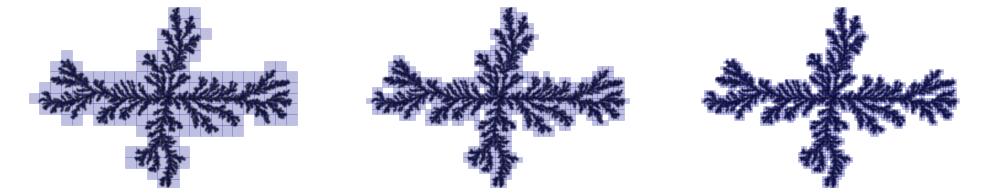

The Fractal dimension of the DLA algorithm is 1.59


In [187]:
Z = 1-DLA/255
sizes = 128, 64, 32
#sizes = 32, 16, 8
xmin, xmax = 0, Z.shape[1]
ymin, ymax = 0, Z.shape[0]
fig = plt.figure(figsize=(14, 11))
for i, size in enumerate(sizes):
    ax = plt.subplot(1, len(sizes), i+1, frameon=False)
    ax.imshow(1-Z, plt.cm.gray, interpolation="bicubic", vmin=0, vmax=1,
              extent=[xmin, xmax, ymin, ymax], origin="upper")
    ax.set_xticks([])
    ax.set_yticks([])
    for y in range(Z.shape[0]//size+1):
        for x in range(Z.shape[1]//size+1):
            s = (Z[y*size:(y+1)*size, x*size:(x+1)*size] > 0.25).sum()
            if s > 0 and s < size*size:
                rect = patches.Rectangle(
                    (x*size, Z.shape[0]-1-(y+1)*size),
                    width=size, height=size,
                    linewidth=.5, edgecolor='.25',
                    facecolor='.75', alpha=.25, color='darkblue')
                ax.add_patch(rect)

plt.tight_layout()
plt.show();
print("The Fractal dimension of the DLA algorithm is %.2f"%(fractal_dimension(Z, threshold=0.25)[0]));

Interestingly enough, our results agree with what was given on the Homework 7 solution: 1.58(2). With this being the case, I believe that the box counting method has proven to be a valid method. However, this code could be expanded upon in many ways, which will be discussed in the final section.

# 5. Conclusions/Future Work

# Conclusion



Overall, the box counting method has proven to be effective in being able to calculate the fractal dimension of coastlines and other shapes between 1 and 2 dimensions. All calculated values are within expected values from previous calculations (see wikipedia page here:https://en.wikipedia.org/wiki/List_of_fractals_by_Hausdorff_dimension, which references relevant literature). The only discrepencies come from the calculation with Norway, which had its northern and southern parts differ from that of the whole country due to the watermarks in the image of the country. 

With regards to the map of the whole world, it is rather interesting that the fractal dimension of the entire world's coastline hasn't changed much since the time of the dinosaurs. This, along with the small changes in the dimension for different geographical features in Northern and Southern Norway, indicate that there is an inherent pattern in coastlines/landmasses when it comes to their structure. 

Finally, our analysis of an image generate using the DLA algorithm yields a fractal dimension that is in agreement with what was found on homework 7. Thus, our confidence in this method is grounded.

Extensions of this project could include extending this code to be able to count boxes for objects that are beyond 2D, such as 3-Dimensional or higher order objects. This would allow for us to analyze elevation maps, 3D DLA clusters, etc. Also, we could have used a CNN to calculate the fractal dimensions for these images. If there wasn't that hiccup with the group project, I probably would have had enough time to figure it out and make it happen. Although I wasn't able to do this, I don't see why this wouldn't be able to be done. The only difficulties could be the lack of training data that is readily available online. I would have to generate training data using the box counting method and then go from there. Truthfully, I will probably do it on the weekends this summer, since this project was very interesting and I really enjoyed doing it.

Intersting, matches literature except for Norway, which said south coast was found to be 1.52, rather vague though and everything else is good.
CNN image recognition, extend dimension for between 2 and 3d.
